In [1]:
#using Pkg
#Pkg.add(PackageSpec(name="JWAS",rev="master"))
#Pkg.add("RecipesBase")
#using RecipesBase

In [2]:
#methods(add_genotypes)

In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [4]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Complete_EXP_Health_WFI.dat", types=Dict(:ID => String, :SlaughterDate => String), delim = ' ',header=true, missingstrings=["NA"] )
phenotypes= dropmissing(phenotypes, :FinPenBatch)
phenotypes= dropmissing(phenotypes, :SlaughterDate)
phenotypes= dropmissing(phenotypes, :PreSlaughterWt)
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String⍰
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
6,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
7,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
8,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02
9,0012,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02


In [5]:
DressPer_model_equations = "DressPer = intercept + Batch + SlaughterDate + SlaughterAge + PreSlaughterWt + FinPenBatch + SowID"
DressPer_R=2.62140
DressPer_model=build_model(DressPer_model_equations,DressPer_R);
set_covariate(DressPer_model,"SlaughterAge")
set_covariate(DressPer_model,"PreSlaughterWt")
DressPer_G1=0.110927
set_random(DressPer_model,"FinPenBatch",DressPer_G1)
DressPer_G2=0.118307
set_random(DressPer_model,"SowID",DressPer_G2)

In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 18.408442 seconds (37.77 k allocations: 10.393 GiB, 0.09% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [7]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))
DressPer_G3=0.523813
@time add_genotypes(DressPer_model,M,DressPer_G3,header=false, rowID=rowID)
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
444.074635 seconds (6.93 M allocations: 15.937 GiB, 1.67% gc time)


In [8]:
@time DressPer_outB=runMCMC(DressPer_model,phenotypes,methods="BayesB", missing_phenotypes=true, Pi=0.999, estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 0027 in the row 24 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0347 in the row 203 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0382 in the row 222 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0391 in the row 229 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0414 in the row 247 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0418 in the row 250 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0524 in the row 335 are missing. This record is deleted.
Phenotypes for all traits included in the model for indi

running MCMC for BayesB...100%|█████████████████████████| Time: 5:47:45




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


20963.837481 seconds (90.30 G allocations: 2.048 TiB, 1.69% gc time)


Dict{Any,Any} with 8 entries:
  "marker effects"          => 435172×5 DataFrame…
  "EBV_DressPer"            => 3205×3 DataFrame…
  "heritability"            => 1×3 DataFrame…
  "location parameters"     => 1233×5 DataFrame…
  "residual variance"       => 1×3 DataFrame…
  "ScaleEffectVar"          => 1×3 DataFrame…
  "genetic_variance"        => 1×3 DataFrame…
  "marker effects variance" => 1×3 DataFrame…

In [9]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,DressPer
,Int64,Float64
1,1,0.158567
2,2,0.1874
3,3,0.176937
4,4,0.16373
5,5,0.189511
6,6,0.180857
7,7,0.204085
8,8,0.194432
9,9,0.185424


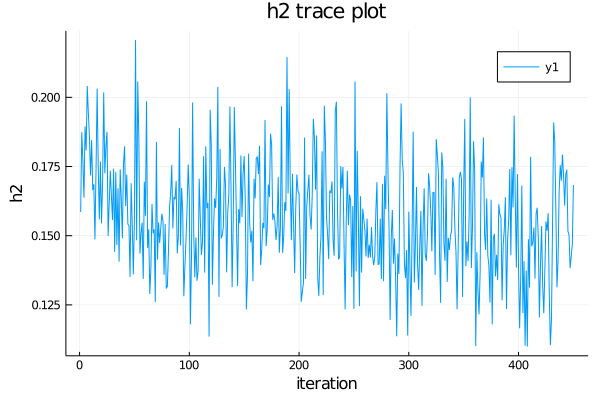

In [10]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [3]:
@time DressPer_outB,DressPer_winVarProps = GWAS("MCMC_samples_marker_effects_DressPer.txt","/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    M;header=true,window_size="0.25 Mb",threshold=0.001,output_winVarProps=false)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:28:35


BoundsError: BoundsError: attempt to access (9375×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 8284   │ 16     │ 5500000   │ 5750000   │ 5503230   │ 5749813   │ 68     │ 0.0057166      │ 0.0122904   │ 1.1      │ 0.277778   │ 0.277778  │
│ 2    │ 1     │ 4021   │ 7      │ 40250000  │ 40500000  │ 40264575  │ 40497251  │ 52     │ 0.0057714      │ 0.0132717   │ 1.14     │ 0.266667   │ 0.272222  │
│ 3    │ 1     │ 6359   │ 13     │ 14250000  │ 14500000  │ 14252479  │ 14496033  │ 59     │ 0.0014911      │ 0.00416722  │ 0.29     │ 0.202222   │ 0.248889  │
│ 4    │ 1     │ 2711   │ 4      │ 118750000 │ 119000000 │ 118750514 │ 118998248 │ 61     │ 0.00186624     │ 0.00522163  │ 0.36     │ 0.2        │ 0.236667  │
│ 5    │ 1     │ 4469   │ 8      │ 30250000  │ 30500000  │ 30254199  │ 30495795  │ 62     │ 0.00159834     │ 0.00526146  │ 0.31     │ 0.2        │ 0.229333  │
│ 6    │ 1     │ 7364   │ 14     │ 57500000  │ 57750000  │ 57500000  │ 57749345  │ 72     │ 0.0026091      │ 0.00715671  │ 0.5      │ 0.195556   │ 0.223704  │
│ 7    │ 1     │ 6559   │ 13     │ 64250000  │ 64500000  │ 64254810  │ 64498182  │ 64     │ 0.00311134     │ 0.00933297  │ 0.61     │ 0.182222   │ 0.217778  │
│ 8    │ 1     │ 3308   │ 6      │ 32250000  │ 32500000  │ 32252185  │ 32492699  │ 65     │ 0.00186845     │ 0.00639423  │ 0.35     │ 0.166667   │ 0.211389  │
│ 9    │ 1     │ 6221   │ 12     │ 41500000  │ 41750000  │ 41503380  │ 41748207  │ 76     │ 0.00137408     │ 0.00556444  │ 0.28     │ 0.151111   │ 0.204691  │
│ 10   │ 1     │ 6558   │ 13     │ 64000000  │ 64250000  │ 64002972  │ 64245300  │ 66     │ 0.00181439     │ 0.00661499  │ 0.37     │ 0.151111   │ 0.199333  │
│ 11   │ 1     │ 6402   │ 13     │ 25000000  │ 25250000  │ 25003126  │ 25247844  │ 66     │ 0.00130274     │ 0.00481999  │ 0.25     │ 0.146667   │ 0.194545  │
│ 12   │ 1     │ 3839   │ 6      │ 165750000 │ 166000000 │ 165752774 │ 165997868 │ 46     │ 0.0020636      │ 0.00706924  │ 0.41     │ 0.14       │ 0.19      │
│ 13   │ 1     │ 7365   │ 14     │ 57750000  │ 58000000  │ 57751807  │ 57998868  │ 51     │ 0.00188915     │ 0.0075985   │ 0.37     │ 0.14       │ 0.186154  │
│ 14   │ 1     │ 6547   │ 13     │ 61250000  │ 61500000  │ 61252570  │ 61499304  │ 69     │ 0.00115957     │ 0.00540453  │ 0.23     │ 0.131111   │ 0.182222  │
│ 15   │ 1     │ 6560   │ 13     │ 64500000  │ 64750000  │ 64500742  │ 64745198  │ 66     │ 0.00132265     │ 0.0049876   │ 0.26     │ 0.128889   │ 0.178667  │
│ 16   │ 1     │ 1831   │ 3      │ 31750000  │ 32000000  │ 31751303  │ 31998911  │ 50     │ 0.000634806    │ 0.00226278  │ 0.13     │ 0.126667   │ 0.175417  │
│ 17   │ 1     │ 3167   │ 5      │ 101750000 │ 102000000 │ 101750667 │ 101995416 │ 73     │ 0.000792356    │ 0.00340492  │ 0.16     │ 0.126667   │ 0.172549  │
│ 18   │ 1     │ 5229   │ 9      │ 81500000  │ 81750000  │ 81500392  │ 81747982  │ 59     │ 0.000695609    │ 0.00302084  │ 0.14     │ 0.124444   │ 0.169877  │
│ 19   │ 1     │ 6362   │ 13     │ 15000000  │ 15250000  │ 15014599  │ 15248769  │ 65     │ 0.000630371    │ 0.00255608  │ 0.13     │ 0.124444   │ 0.167485  │
│ 20   │ 1     │ 1830   │ 3      │ 31500000  │ 31750000  │ 31500612  │ 31744765  │ 80     │ 0.000847221    │ 0.00362215  │ 0.17     │ 0.12       │ 0.165111  │
│ 21   │ 1     │ 5173   │ 9      │ 67500000  │ 67750000  │ 67502733  │ 67748747  │ 47     │ 0.00107883     │ 0.00396056  │ 0.22     │ 0.12       │ 0.162963  │
│ 22   │ 1     │ 6082   │ 12     │ 6750000   │ 7000000   │ 6750763   │ 6998493   │ 72     │ 0.00078698     │ 0.00345149  │ 0.15     │ 0.12       │ 0.16101   │
│ 23   │ 1     │ 1677   │ 2      │ 145250000 │ 145500000 │ 145252792 │ 145494535 │ 51     │ 0.0014962      │ 0.00662849  │ 0.29     │ 0.111111   │ 0.158841  │
│ 24   │ 1     │ 8285   │ 16     │ 5750000   │ 6000000   │ 5753908   │ 5999039   │ 79     │ 0.00102644     │ 0.00446869  │ 0.21     │ 0.111111   │ 0.156852  │
│ 25   │ 1     │ 8286   │ 16     │ 6000000   │ 6250000   │ 6005896   │ 6249070   │ 67     │ 0.00107968     │ 0.00515683  │ 0.21     │ 0.106667   │ 0.154844  │
│ 26   │ 1     │ 4056   │ 7      │ 49000000  │ 49250000  │ 49001175  │ 49247719  │ 75     │ 0.00059972     │ 0.00256418  │ 0.12     │ 0.104444   │ 0.152906  │
│ 27   │ 1     │ 4912   │ 9      │ 2000000   │ 2250000   │ 2001714   │ 2249056   │ 81     │ 0.000498534    │ 0.00217829  │ 0.1      │ 0.102222   │ 0.151029  │
│ 28   │ 1     │ 8688   │ 17     │ 26500000  │ 26750000  │ 26503869  │ 26748553  │ 65     │ 0.0005114      │ 0.0022066   │ 0.1      │ 0.102222   │ 0.149286  │
│ 29   │ 1     │ 5635   │ 10     │ 43500000  │ 43750000  │ 43501152  │ 43748989  │ 80     │ 0.000561338    │ 0.00250913  │ 0.11     │ 0.1        │ 0.147586  │
│ 30   │ 1     │ 7422   │ 14     │ 72000000  │ 72250000  │ 72002695  │ 72248888  │ 65     │ 0.000655978    │ 0.00304883  │ 0.13     │ 0.1        │ 0.146     │
│ 31   │ 1     │ 2546   │ 4      │ 77500000  │ 77750000  │ 77503038  │ 77748592  │ 48     │ 0.000664268    │ 0.00297581  │ 0.14     │ 0.0977778  │ 0.144444  │
│ 32   │ 1     │ 7419   │ 14     │ 71250000  │ 71500000  │ 71252522  │ 71498628  │ 58     │ 0.000842445    │ 0.00370655  │ 0.16     │ 0.0955556  │ 0.142917  │
│ 33   │ 1     │ 7423   │ 14     │ 72250000  │ 72500000  │ 72261851  │ 72496356  │ 70     │ 0.00112407     │ 0.00747799  │ 0.23     │ 0.0955556  │ 0.141481  │
│ 34   │ 1     │ 8362   │ 16     │ 25000000  │ 25250000  │ 25009115  │ 25249237  │ 57     │ 0.000516301    │ 0.00272127  │ 0.09     │ 0.0955556  │ 0.140131  │
│ 35   │ 1     │ 8691   │ 17     │ 27250000  │ 27500000  │ 27267865  │ 27490696  │ 71     │ 0.000453386    │ 0.0021078   │ 0.09     │ 0.0955556  │ 0.138857  │
│ 36   │ 1     │ 3879   │ 7      │ 4750000   │ 5000000   │ 4752542   │ 4999309   │ 64     │ 0.000586874    │ 0.00282235  │ 0.12     │ 0.0933333  │ 0.137593  │
│ 37   │ 1     │ 3950   │ 7      │ 22500000  │ 22750000  │ 22501546  │ 22745850  │ 77     │ 0.000445988    │ 0.00215844  │ 0.09     │ 0.0911111  │ 0.136336  │
│ 38   │ 1     │ 6557   │ 13     │ 63750000  │ 64000000  │ 63754967  │ 63994715  │ 63     │ 0.000871106    │ 0.00404458  │ 0.18     │ 0.0911111  │ 0.135146  │
│ 39   │ 1     │ 1157   │ 2      │ 15000000  │ 15250000  │ 15000499  │ 15240264  │ 51     │ 0.000854974    │ 0.00445441  │ 0.16     │ 0.0888889  │ 0.13396   │
│ 40   │ 1     │ 8687   │ 17     │ 26250000  │ 26500000  │ 26250300  │ 26499291  │ 68     │ 0.000279183    │ 0.00115998  │ 0.06     │ 0.0866667  │ 0.132778  │
│ 41   │ 1     │ 1749   │ 3      │ 11250000  │ 11500000  │ 11250457  │ 11497906  │ 62     │ 0.000730622    │ 0.00348786  │ 0.14     │ 0.0844444  │ 0.131599  │
│ 42   │ 1     │ 2751   │ 4      │ 128750000 │ 129000000 │ 128750655 │ 128996809 │ 75     │ 0.000563042    │ 0.00275121  │ 0.11     │ 0.0844444  │ 0.130476  │
│ 43   │ 1     │ 4879   │ 8      │ 132750000 │ 133000000 │ 132752758 │ 132996052 │ 77     │ 0.000410489    │ 0.00220195  │ 0.08     │ 0.0844444  │ 0.129406  │
│ 44   │ 1     │ 722    │ 1      │ 180500000 │ 180750000 │ 180515863 │ 180748356 │ 44     │ 0.000651428    │ 0.00330187  │ 0.14     │ 0.0822222  │ 0.128333  │
│ 45   │ 1     │ 1494   │ 2      │ 99500000  │ 99750000  │ 99501740  │ 99748647  │ 47     │ 0.000580196    │ 0.00314808  │ 0.11     │ 0.0822222  │ 0.127309  │
│ 46   │ 1     │ 2804   │ 5      │ 11000000  │ 11250000  │ 11001667  │ 11248994  │ 69     │ 0.00045692     │ 0.00226706  │ 0.08     │ 0.0822222  │ 0.126329  │
│ 47   │ 1     │ 6081   │ 12     │ 6500000   │ 6750000   │ 6505052   │ 6747593   │ 67     │ 0.00036349     │ 0.00204284  │ 0.07     │ 0.0822222  │ 0.12539   │
│ 48   │ 1     │ 7145   │ 14     │ 2750000   │ 3000000   │ 2755029   │ 2994973   │ 57     │ 0.000833788    │ 0.00425702  │ 0.17     │ 0.0822222  │ 0.124491  │
│ 49   │ 1     │ 8273   │ 16     │ 2750000   │ 3000000   │ 2760188   │ 2999331   │ 59     │ 0.000877423    │ 0.0046907   │ 0.17     │ 0.0822222  │ 0.123628  │
│ 50   │ 1     │ 170    │ 1      │ 42250000  │ 42500000  │ 42278421  │ 42498141  │ 54     │ 0.000649586    │ 0.00384482  │ 0.14     │ 0.08       │ 0.122756  │
│ 51   │ 1     │ 5464   │ 10     │ 750000    │ 1000000   │ 763229    │ 998239    │ 73     │ 0.000493299    │ 0.00285122  │ 0.1      │ 0.08       │ 0.121917  │
│ 52   │ 1     │ 168    │ 1      │ 41750000  │ 42000000  │ 41750699  │ 41995556  │ 59     │ 0.000489573    │ 0.0025264   │ 0.09     │ 0.0777778  │ 0.121068  │
│ 53   │ 1     │ 3719   │ 6      │ 135750000 │ 136000000 │ 135752826 │ 135998609 │ 76     │ 0.000331711    │ 0.00160059  │ 0.07     │ 0.0777778  │ 0.120252  │
│ 54   │ 1     │ 6361   │ 13     │ 14750000  │ 15000000  │ 14754911  │ 14992413  │ 52     │ 0.000295771    │ 0.00179449  │ 0.06     │ 0.0777778  │ 0.119465  │
│ 55   │ 1     │ 1174   │ 2      │ 19250000  │ 19500000  │ 19253051  │ 19498460  │ 56     │ 0.000323572    │ 0.00196337  │ 0.06     │ 0.0755556  │ 0.118667  │
│ 56   │ 1     │ 2660   │ 4      │ 106000000 │ 106250000 │ 106002452 │ 106246591 │ 46     │ 0.000343697    │ 0.00158268  │ 0.07     │ 0.0755556  │ 0.117897  │
│ 57   │ 1     │ 2777   │ 5      │ 4250000   │ 4500000   │ 4252365   │ 4492774   │ 42     │ 0.00049339     │ 0.00288189  │ 0.1      │ 0.0755556  │ 0.117154  │
│ 58   │ 1     │ 4032   │ 7      │ 43000000  │ 43250000  │ 43002291  │ 43249348  │ 60     │ 0.000427922    │ 0.00214838  │ 0.09     │ 0.0755556  │ 0.116437  │
│ 59   │ 1     │ 4057   │ 7      │ 49250000  │ 49500000  │ 49251084  │ 49494622  │ 77     │ 0.000407741    │ 0.00195535  │ 0.08     │ 0.0755556  │ 0.115744  │
│ 60   │ 1     │ 7505   │ 14     │ 92750000  │ 93000000  │ 92754059  │ 92996602  │ 54     │ 0.000274296    │ 0.00126773  │ 0.06     │ 0.0755556  │ 0.115074  │
│ 61   │ 1     │ 7506   │ 14     │ 93000000  │ 93250000  │ 93001930  │ 93246496  │ 55     │ 0.000375371    │ 0.00200441  │ 0.08     │ 0.0755556  │ 0.114426  │
│ 62   │ 1     │ 172    │ 1      │ 42750000  │ 43000000  │ 42753579  │ 42997288  │ 65     │ 0.000597376    │ 0.0031756   │ 0.13     │ 0.0733333  │ 0.113763  │
│ 63   │ 1     │ 2712   │ 4      │ 119000000 │ 119250000 │ 119000782 │ 119243856 │ 63     │ 0.000618534    │ 0.00351855  │ 0.13     │ 0.0733333  │ 0.113122  │
│ 64   │ 1     │ 4906   │ 9      │ 500000    │ 750000    │ 501912    │ 748121    │ 60     │ 0.000549943    │ 0.00303345  │ 0.11     │ 0.0733333  │ 0.1125    │
│ 65   │ 1     │ 186    │ 1      │ 46250000  │ 46500000  │ 46255539  │ 46499968  │ 51     │ 0.000230233    │ 0.00115875  │ 0.05     │ 0.0711111  │ 0.111863  │
│ 66   │ 1     │ 2747   │ 4      │ 127750000 │ 128000000 │ 127750912 │ 127993436 │ 64     │ 0.00029082     │ 0.00164822  │ 0.06     │ 0.0711111  │ 0.111246  │
│ 67   │ 1     │ 3484   │ 6      │ 76750000  │ 77000000  │ 76754616  │ 76996113  │ 91     │ 0.000275276    │ 0.00169233  │ 0.05     │ 0.0711111  │ 0.110647  │
│ 68   │ 1     │ 4036   │ 7      │ 44000000  │ 44250000  │ 44006459  │ 44249404  │ 62     │ 0.000251156    │ 0.00139297  │ 0.05     │ 0.0711111  │ 0.110065  │
│ 69   │ 1     │ 4470   │ 8      │ 30500000  │ 30750000  │ 30500058  │ 30740074  │ 64     │ 0.000318972    │ 0.00170401  │ 0.06     │ 0.0711111  │ 0.109501  │
│ 70   │ 1     │ 8799   │ 17     │ 54250000  │ 54500000  │ 54252218  │ 54495789  │ 77     │ 0.000296843    │ 0.00136491  │ 0.06     │ 0.0711111  │ 0.108952  │
│ 71   │ 1     │ 160    │ 1      │ 39750000  │ 40000000  │ 39750594  │ 39991606  │ 73     │ 0.000431947    │ 0.00287027  │ 0.09     │ 0.0688889  │ 0.108388  │
│ 72   │ 1     │ 1492   │ 2      │ 99000000  │ 99250000  │ 99002885  │ 99247587  │ 53     │ 0.000313317    │ 0.00190895  │ 0.06     │ 0.0688889  │ 0.10784   │
│ 73   │ 1     │ 1752   │ 3      │ 12000000  │ 12250000  │ 12005480  │ 12249295  │ 61     │ 0.00043568     │ 0.00235437  │ 0.09     │ 0.0688889  │ 0.107306  │
│ 74   │ 1     │ 5265   │ 9      │ 90500000  │ 90750000  │ 90502687  │ 90748868  │ 66     │ 0.000315971    │ 0.00180202  │ 0.06     │ 0.0688889  │ 0.106787  │
│ 75   │ 1     │ 1493   │ 2      │ 99250000  │ 99500000  │ 99250690  │ 99489837  │ 53     │ 0.000310662    │ 0.00190068  │ 0.06     │ 0.0666667  │ 0.106252  │
│ 76   │ 1     │ 1750   │ 3      │ 11500000  │ 11750000  │ 11500741  │ 11747968  │ 58     │ 0.000296464    │ 0.00200078  │ 0.06     │ 0.0666667  │ 0.105731  │
│ 77   │ 1     │ 2574   │ 4      │ 84500000  │ 84750000  │ 84505632  │ 84749684  │ 74     │ 0.000422277    │ 0.00245973  │ 0.09     │ 0.0666667  │ 0.105224  │
│ 78   │ 1     │ 5465   │ 10     │ 1000000   │ 1250000   │ 1001021   │ 1247071   │ 51     │ 0.000323319    │ 0.0020061   │ 0.06     │ 0.0666667  │ 0.104729  │
│ 79   │ 1     │ 5692   │ 10     │ 57750000  │ 58000000  │ 57759315  │ 57998402  │ 62     │ 0.000256388    │ 0.00165992  │ 0.05     │ 0.0666667  │ 0.104248  │
│ 80   │ 1     │ 6222   │ 12     │ 41750000  │ 42000000  │ 41750353  │ 41950202  │ 47     │ 0.000400599    │ 0.00222666  │ 0.08     │ 0.0666667  │ 0.103778  │
│ 81   │ 1     │ 6520   │ 13     │ 54500000  │ 54750000  │ 54502215  │ 54748168  │ 73     │ 0.000355922    │ 0.00209423  │ 0.07     │ 0.0666667  │ 0.10332   │
│ 82   │ 1     │ 8681   │ 17     │ 24750000  │ 25000000  │ 24750349  │ 24996793  │ 55     │ 0.000377931    │ 0.00217295  │ 0.08     │ 0.0666667  │ 0.102873  │
│ 83   │ 1     │ 1090   │ 1      │ 272500000 │ 272750000 │ 272501080 │ 272746057 │ 59     │ 0.000263936    │ 0.00134673  │ 0.05     │ 0.0644444  │ 0.10241   │
│ 84   │ 1     │ 1486   │ 2      │ 97500000  │ 97750000  │ 97500130  │ 97742706  │ 53     │ 0.00021663     │ 0.0013287   │ 0.05     │ 0.0644444  │ 0.101958  │
│ 85   │ 1     │ 2657   │ 4      │ 105250000 │ 105500000 │ 105260826 │ 105496841 │ 42     │ 0.000879686    │ 0.00455408  │ 0.18     │ 0.0644444  │ 0.101516  │
│ 86   │ 1     │ 2706   │ 4      │ 117500000 │ 117750000 │ 117503652 │ 117745447 │ 63     │ 0.000373958    │ 0.0020439   │ 0.07     │ 0.0644444  │ 0.101085  │
│ 87   │ 1     │ 3480   │ 6      │ 75750000  │ 76000000  │ 75751148  │ 75998821  │ 71     │ 0.000463854    │ 0.00268285  │ 0.09     │ 0.0644444  │ 0.100664  │
│ 88   │ 1     │ 4058   │ 7      │ 49500000  │ 49750000  │ 49504198  │ 49748787  │ 60     │ 0.000254227    │ 0.00143756  │ 0.05     │ 0.0644444  │ 0.100253  │
│ 89   │ 1     │ 4416   │ 8      │ 17000000  │ 17250000  │ 17001930  │ 17247573  │ 76     │ 0.000195855    │ 0.00109827  │ 0.04     │ 0.0644444  │ 0.0998502 │
│ 90   │ 1     │ 5627   │ 10     │ 41500000  │ 41750000  │ 41508322  │ 41743406  │ 55     │ 0.000389842    │ 0.00204042  │ 0.07     │ 0.0644444  │ 0.0994568 │
│ 91   │ 1     │ 6555   │ 13     │ 63250000  │ 63500000  │ 63250635  │ 63489252  │ 48     │ 0.000336142    │ 0.00195919  │ 0.07     │ 0.0644444  │ 0.099072  │
│ 92   │ 1     │ 7161   │ 14     │ 6750000   │ 7000000   │ 6752763   │ 6996902   │ 74     │ 0.000241565    │ 0.00163662  │ 0.05     │ 0.0644444  │ 0.0986957 │
│ 93   │ 1     │ 7425   │ 14     │ 72750000  │ 73000000  │ 72750395  │ 72995809  │ 67     │ 0.000235119    │ 0.00123939  │ 0.05     │ 0.0644444  │ 0.0983274 │
│ 94   │ 1     │ 8450   │ 16     │ 47000000  │ 47250000  │ 47001764  │ 47249245  │ 65     │ 0.000185883    │ 0.00109881  │ 0.04     │ 0.0644444  │ 0.0979669 │
│ 95   │ 1     │ 8689   │ 17     │ 26750000  │ 27000000  │ 26752116  │ 26996510  │ 69     │ 0.00020585     │ 0.00113271  │ 0.04     │ 0.0644444  │ 0.097614  │
│ 96   │ 1     │ 8692   │ 17     │ 27500000  │ 27750000  │ 27501543  │ 27748749  │ 72     │ 0.000234509    │ 0.00133608  │ 0.04     │ 0.0644444  │ 0.0972685 │
│ 97   │ 1     │ 9021   │ 18     │ 46500000  │ 46750000  │ 46502682  │ 46742088  │ 59     │ 0.000316956    │ 0.00165308  │ 0.06     │ 0.0644444  │ 0.0969301 │
│ 98   │ 1     │ 163    │ 1      │ 40500000  │ 40750000  │ 40504879  │ 40745525  │ 67     │ 0.000375835    │ 0.0021721   │ 0.07     │ 0.0622222  │ 0.096576  │
│ 99   │ 1     │ 701    │ 1      │ 175250000 │ 175500000 │ 175257448 │ 175488707 │ 44     │ 0.000201721    │ 0.00103933  │ 0.04     │ 0.0622222  │ 0.096229  │
│ 100  │ 1     │ 4639   │ 8      │ 72750000  │ 73000000  │ 72756372  │ 72997258  │ 58     │ 0.000237278    │ 0.00136667  │ 0.05     │ 0.0622222  │ 0.0958889 │
│ 101  │ 1     │ 5522   │ 10     │ 15250000  │ 15500000  │ 15259009  │ 15495375  │ 66     │ 0.000334495    │ 0.00197096  │ 0.06     │ 0.0622222  │ 0.0955556 │
│ 102  │ 1     │ 6590   │ 13     │ 72000000  │ 72250000  │ 72001702  │ 72240667  │ 53     │ 0.000323101    │ 0.00208906  │ 0.07     │ 0.0622222  │ 0.0952288 │
│ 103  │ 1     │ 7414   │ 14     │ 70000000  │ 70250000  │ 70006052  │ 70248402  │ 63     │ 0.000470962    │ 0.00326729  │ 0.09     │ 0.0622222  │ 0.0949083 │
│ 104  │ 1     │ 7418   │ 14     │ 71000000  │ 71250000  │ 71000515  │ 71241880  │ 35     │ 0.000382901    │ 0.0028094   │ 0.08     │ 0.0622222  │ 0.094594  │
│ 105  │ 1     │ 7526   │ 14     │ 98000000  │ 98250000  │ 98003202  │ 98249875  │ 66     │ 0.000213607    │ 0.0011882   │ 0.04     │ 0.0622222  │ 0.0942857 │
│ 106  │ 1     │ 918    │ 1      │ 229500000 │ 229750000 │ 229502058 │ 229748074 │ 66     │ 0.000333187    │ 0.0018689   │ 0.07     │ 0.06       │ 0.0939623 │
│ 107  │ 1     │ 1675   │ 2      │ 144750000 │ 145000000 │ 144761674 │ 144982683 │ 56     │ 0.000253306    │ 0.00146368  │ 0.05     │ 0.06       │ 0.0936449 │
│ 108  │ 1     │ 1676   │ 2      │ 145000000 │ 145250000 │ 145004602 │ 145243276 │ 66     │ 0.000311386    │ 0.00177258  │ 0.06     │ 0.06       │ 0.0933333 │
│ 109  │ 1     │ 2724   │ 4      │ 122000000 │ 122250000 │ 122001885 │ 122246724 │ 65     │ 0.000230301    │ 0.00135025  │ 0.05     │ 0.06       │ 0.0930275 │
│ 110  │ 1     │ 3909   │ 7      │ 12250000  │ 12500000  │ 12253352  │ 12495904  │ 68     │ 0.000159261    │ 0.000912935 │ 0.03     │ 0.06       │ 0.0927273 │
│ 111  │ 1     │ 4907   │ 9      │ 750000    │ 1000000   │ 756338    │ 994046    │ 73     │ 0.000300678    │ 0.00178419  │ 0.06     │ 0.06       │ 0.0924324 │
│ 112  │ 1     │ 5398   │ 9      │ 123750000 │ 124000000 │ 123750163 │ 123999702 │ 62     │ 0.000439236    │ 0.00268046  │ 0.08     │ 0.06       │ 0.0921429 │
│ 113  │ 1     │ 5773   │ 11     │ 8500000   │ 8750000   │ 8511850   │ 8747998   │ 68     │ 0.000166045    │ 0.000872882 │ 0.03     │ 0.06       │ 0.0918584 │
│ 114  │ 1     │ 7413   │ 14     │ 69750000  │ 70000000  │ 69753753  │ 69999911  │ 57     │ 0.000301485    │ 0.00185162  │ 0.06     │ 0.06       │ 0.0915789 │
│ 115  │ 1     │ 7502   │ 14     │ 92000000  │ 92250000  │ 92002120  │ 92245150  │ 48     │ 0.000302451    │ 0.00211347  │ 0.07     │ 0.06       │ 0.0913043 │
│ 116  │ 1     │ 7838   │ 15     │ 34250000  │ 34500000  │ 34265634  │ 34495562  │ 75     │ 0.0002085      │ 0.00160071  │ 0.04     │ 0.06       │ 0.0910345 │
│ 117  │ 1     │ 8253   │ 15     │ 138250000 │ 138500000 │ 138261921 │ 138494953 │ 47     │ 0.000465013    │ 0.00271414  │ 0.09     │ 0.06       │ 0.0907692 │
│ 118  │ 1     │ 8798   │ 17     │ 54000000  │ 54250000  │ 54003350  │ 54246208  │ 68     │ 0.000177883    │ 0.00099273  │ 0.03     │ 0.06       │ 0.0905085 │
│ 119  │ 1     │ 9019   │ 18     │ 46000000  │ 46250000  │ 46008401  │ 46249295  │ 73     │ 0.000221257    │ 0.00149754  │ 0.04     │ 0.06       │ 0.0902521 │
│ 120  │ 1     │ 1584   │ 2      │ 122000000 │ 122250000 │ 122000482 │ 122249193 │ 59     │ 0.000179291    │ 0.00105559  │ 0.04     │ 0.0577778  │ 0.0899815 │
│ 121  │ 1     │ 3056   │ 5      │ 74000000  │ 74250000  │ 74010393  │ 74249579  │ 52     │ 0.000137106    │ 0.000767248 │ 0.03     │ 0.0577778  │ 0.0897153 │
│ 122  │ 1     │ 3678   │ 6      │ 125500000 │ 125750000 │ 125500334 │ 125749259 │ 56     │ 0.000237136    │ 0.00136821  │ 0.05     │ 0.0577778  │ 0.0894536 │
│ 123  │ 1     │ 4913   │ 9      │ 2250000   │ 2500000   │ 2252059   │ 2498582   │ 79     │ 0.000171895    │ 0.000850524 │ 0.04     │ 0.0577778  │ 0.089196  │
│ 124  │ 1     │ 6117   │ 12     │ 15500000  │ 15750000  │ 15501252  │ 15664072  │ 43     │ 0.00028986     │ 0.00154149  │ 0.06     │ 0.0577778  │ 0.0889427 │
│ 125  │ 1     │ 6828   │ 13     │ 131750000 │ 132000000 │ 131751357 │ 131988999 │ 43     │ 0.000299176    │ 0.00193068  │ 0.06     │ 0.0577778  │ 0.0886933 │
│ 126  │ 1     │ 7172   │ 14     │ 9500000   │ 9750000   │ 9500648   │ 9747565   │ 73     │ 0.000198527    │ 0.00116863  │ 0.04     │ 0.0577778  │ 0.088448  │
│ 127  │ 1     │ 7400   │ 14     │ 66500000  │ 66750000  │ 66506283  │ 66748559  │ 44     │ 0.000363952    │ 0.00219147  │ 0.07     │ 0.0577778  │ 0.0882065 │
│ 128  │ 1     │ 7653   │ 14     │ 129750000 │ 130000000 │ 129750106 │ 129998870 │ 69     │ 0.000171433    │ 0.000852189 │ 0.03     │ 0.0577778  │ 0.0879688 │
│ 129  │ 1     │ 8364   │ 16     │ 25500000  │ 25750000  │ 25502559  │ 25744099  │ 61     │ 0.000353459    │ 0.00219593  │ 0.07     │ 0.0577778  │ 0.0877347 │
│ 130  │ 1     │ 8539   │ 16     │ 69250000  │ 69500000  │ 69250023  │ 69494257  │ 64     │ 0.000328787    │ 0.00228335  │ 0.06     │ 0.0577778  │ 0.0875043 │
│ 131  │ 1     │ 945    │ 1      │ 236250000 │ 236500000 │ 236254196 │ 236496386 │ 58     │ 0.000200949    │ 0.00133559  │ 0.04     │ 0.0555556  │ 0.0872604 │
│ 132  │ 1     │ 1465   │ 2      │ 92250000  │ 92500000  │ 92257026  │ 92490522  │ 70     │ 0.000222076    │ 0.00124712  │ 0.05     │ 0.0555556  │ 0.0870202 │
│ 133  │ 1     │ 1764   │ 3      │ 15000000  │ 15250000  │ 15002999  │ 15249737  │ 47     │ 0.000279395    │ 0.00183452  │ 0.05     │ 0.0555556  │ 0.0867836 │
│ 134  │ 1     │ 2298   │ 4      │ 15500000  │ 15750000  │ 15501051  │ 15745338  │ 73     │ 0.000267588    │ 0.00159992  │ 0.05     │ 0.0555556  │ 0.0865506 │
│ 135  │ 1     │ 2752   │ 4      │ 129000000 │ 129250000 │ 129000232 │ 129248163 │ 72     │ 0.000158723    │ 0.000875185 │ 0.03     │ 0.0555556  │ 0.086321  │
│ 136  │ 1     │ 3157   │ 5      │ 99250000  │ 99500000  │ 99250521  │ 99498255  │ 42     │ 0.000351385    │ 0.00243178  │ 0.07     │ 0.0555556  │ 0.0860948 │
│ 137  │ 1     │ 3162   │ 5      │ 100500000 │ 100750000 │ 100502760 │ 100749274 │ 63     │ 0.000142621    │ 0.00091407  │ 0.03     │ 0.0555556  │ 0.0858719 │
│ 138  │ 1     │ 4038   │ 7      │ 44500000  │ 44750000  │ 44504044  │ 44746958  │ 62     │ 0.000342444    │ 0.00227034  │ 0.07     │ 0.0555556  │ 0.0856522 │
│ 139  │ 1     │ 4295   │ 7      │ 108750000 │ 109000000 │ 108751068 │ 108996302 │ 60     │ 0.000202523    │ 0.00118655  │ 0.04     │ 0.0555556  │ 0.0854357 │
│ 140  │ 1     │ 4874   │ 8      │ 131500000 │ 131750000 │ 131502354 │ 131749137 │ 67     │ 0.000158039    │ 0.000888013 │ 0.03     │ 0.0555556  │ 0.0852222 │
│ 141  │ 1     │ 5488   │ 10     │ 6750000   │ 7000000   │ 6757333   │ 6996554   │ 72     │ 0.000186112    │ 0.00116186  │ 0.04     │ 0.0555556  │ 0.0850118 │
│ 142  │ 1     │ 5914   │ 11     │ 44000000  │ 44250000  │ 44005756  │ 44243914  │ 63     │ 0.000172088    │ 0.00120664  │ 0.04     │ 0.0555556  │ 0.0848044 │
│ 143  │ 1     │ 7162   │ 14     │ 7000000   │ 7250000   │ 7001829   │ 7248925   │ 70     │ 0.000152904    │ 0.000855276 │ 0.03     │ 0.0555556  │ 0.0845998 │
│ 144  │ 1     │ 7187   │ 14     │ 13250000  │ 13500000  │ 13253548  │ 13499612  │ 58     │ 0.000157556    │ 0.000795229 │ 0.03     │ 0.0555556  │ 0.0843981 │
│ 145  │ 1     │ 7198   │ 14     │ 16000000  │ 16250000  │ 16001978  │ 16249578  │ 63     │ 0.000229714    │ 0.00141066  │ 0.05     │ 0.0555556  │ 0.0841992 │
│ 146  │ 1     │ 7371   │ 14     │ 59250000  │ 59500000  │ 59252647  │ 59497467  │ 71     │ 0.000250565    │ 0.00147847  │ 0.05     │ 0.0555556  │ 0.084003  │
│ 147  │ 1     │ 7399   │ 14     │ 66250000  │ 66500000  │ 66252910  │ 66499228  │ 61     │ 0.000275342    │ 0.00252747  │ 0.05     │ 0.0555556  │ 0.0838095 │
│ 148  │ 1     │ 8448   │ 16     │ 46500000  │ 46750000  │ 46501298  │ 46741187  │ 44     │ 0.00025535     │ 0.00174003  │ 0.05     │ 0.0555556  │ 0.0836186 │
│ 149  │ 1     │ 5      │ 1      │ 1000000   │ 1250000   │ 1005658   │ 1248474   │ 79     │ 9.00252e-5     │ 0.000432018 │ 0.02     │ 0.0533333  │ 0.0834154 │
│ 150  │ 1     │ 173    │ 1      │ 43000000  │ 43250000  │ 43001431  │ 43245576  │ 51     │ 0.000383026    │ 0.00235553  │ 0.08     │ 0.0533333  │ 0.0832148 │
│ 151  │ 1     │ 237    │ 1      │ 59000000  │ 59250000  │ 59002370  │ 59248533  │ 56     │ 0.000150627    │ 0.000932692 │ 0.03     │ 0.0533333  │ 0.0830169 │
│ 152  │ 1     │ 1463   │ 2      │ 91750000  │ 92000000  │ 91752273  │ 91997849  │ 68     │ 0.000202758    │ 0.00119831  │ 0.04     │ 0.0533333  │ 0.0828216 │
│ 153  │ 1     │ 1832   │ 3      │ 32000000  │ 32250000  │ 32003405  │ 32246445  │ 61     │ 0.000191156    │ 0.00114424  │ 0.04     │ 0.0533333  │ 0.0826289 │
│ 154  │ 1     │ 1833   │ 3      │ 32250000  │ 32500000  │ 32250576  │ 32497290  │ 74     │ 0.000232906    │ 0.0015685   │ 0.04     │ 0.0533333  │ 0.0824387 │
│ 155  │ 1     │ 2239   │ 4      │ 750000    │ 1000000   │ 886823    │ 994415    │ 21     │ 0.000169821    │ 0.0010201   │ 0.04     │ 0.0533333  │ 0.0822509 │
│ 156  │ 1     │ 2544   │ 4      │ 77000000  │ 77250000  │ 77003274  │ 77247074  │ 49     │ 0.000264106    │ 0.00180382  │ 0.05     │ 0.0533333  │ 0.0820655 │
│ 157  │ 1     │ 2549   │ 4      │ 78250000  │ 78500000  │ 78251550  │ 78499093  │ 74     │ 0.00018495     │ 0.000972477 │ 0.04     │ 0.0533333  │ 0.0818825 │
│ 158  │ 1     │ 2664   │ 4      │ 107000000 │ 107250000 │ 107002287 │ 107248206 │ 57     │ 0.000253125    │ 0.00152757  │ 0.05     │ 0.0533333  │ 0.0817018 │
│ 159  │ 1     │ 2754   │ 4      │ 129500000 │ 129750000 │ 129500529 │ 129748593 │ 66     │ 0.0003018      │ 0.00169608  │ 0.06     │ 0.0533333  │ 0.0815234 │
│ 160  │ 1     │ 3701   │ 6      │ 131250000 │ 131500000 │ 131250415 │ 131494731 │ 53     │ 0.000122634    │ 0.000646148 │ 0.03     │ 0.0533333  │ 0.0813472 │
│ 161  │ 1     │ 3760   │ 6      │ 146000000 │ 146250000 │ 146001490 │ 146248190 │ 60     │ 0.000203318    │ 0.00133921  │ 0.04     │ 0.0533333  │ 0.0811732 │
│ 162  │ 1     │ 4015   │ 7      │ 38750000  │ 39000000  │ 38754069  │ 38998747  │ 53     │ 0.000166268    │ 0.00116319  │ 0.03     │ 0.0533333  │ 0.0810014 │
│ 163  │ 1     │ 4203   │ 7      │ 85750000  │ 86000000  │ 85752403  │ 85996849  │ 73     │ 0.000210012    │ 0.00146194  │ 0.04     │ 0.0533333  │ 0.0808316 │
│ 164  │ 1     │ 4380   │ 8      │ 8000000   │ 8250000   │ 8003511   │ 8249006   │ 65     │ 0.000278619    │ 0.00173832  │ 0.05     │ 0.0533333  │ 0.080664  │
│ 165  │ 1     │ 4468   │ 8      │ 30000000  │ 30250000  │ 30000607  │ 30249273  │ 73     │ 0.000294409    │ 0.00188409  │ 0.06     │ 0.0533333  │ 0.0804983 │
│ 166  │ 1     │ 4880   │ 8      │ 133000000 │ 133250000 │ 133005049 │ 133247899 │ 59     │ 0.000209626    │ 0.00145052  │ 0.04     │ 0.0533333  │ 0.0803347 │
│ 167  │ 1     │ 4914   │ 9      │ 2500000   │ 2750000   │ 2501818   │ 2748966   │ 60     │ 0.000213828    │ 0.00119599  │ 0.04     │ 0.0533333  │ 0.080173  │
│ 168  │ 1     │ 5508   │ 10     │ 11750000  │ 12000000  │ 11752832  │ 11998795  │ 63     │ 0.000201795    │ 0.00151645  │ 0.04     │ 0.0533333  │ 0.0800132 │
│ 169  │ 1     │ 5698   │ 10     │ 59250000  │ 59500000  │ 59253394  │ 59496065  │ 72     │ 0.000213858    │ 0.0013212   │ 0.04     │ 0.0533333  │ 0.0798554 │
│ 170  │ 1     │ 5777   │ 11     │ 9500000   │ 9750000   │ 9505293   │ 9748630   │ 79     │ 0.000185601    │ 0.00138332  │ 0.03     │ 0.0533333  │ 0.0796993 │
│ 171  │ 1     │ 5984   │ 11     │ 61500000  │ 61750000  │ 61501554  │ 61744519  │ 59     │ 0.000358211    │ 0.00214881  │ 0.07     │ 0.0533333  │ 0.0795452 │
│ 172  │ 1     │ 6080   │ 12     │ 6250000   │ 6500000   │ 6276833   │ 6498360   │ 43     │ 0.000298056    │ 0.00189086  │ 0.06     │ 0.0533333  │ 0.0793928 │
│ 173  │ 1     │ 6220   │ 12     │ 41250000  │ 41500000  │ 41253777  │ 41499183  │ 89     │ 0.00018859     │ 0.00122259  │ 0.04     │ 0.0533333  │ 0.0792421 │
│ 174  │ 1     │ 6401   │ 13     │ 24750000  │ 25000000  │ 24757981  │ 24999439  │ 48     │ 0.000145992    │ 0.000822368 │ 0.03     │ 0.0533333  │ 0.0790932 │
│ 175  │ 1     │ 6536   │ 13     │ 58500000  │ 58750000  │ 58503066  │ 58747937  │ 54     │ 0.000312819    │ 0.00181676  │ 0.06     │ 0.0533333  │ 0.078946  │
│ 176  │ 1     │ 7185   │ 14     │ 12750000  │ 13000000  │ 12756639  │ 12998431  │ 62     │ 0.000136208    │ 0.000748948 │ 0.03     │ 0.0533333  │ 0.0788005 │
│ 177  │ 1     │ 7479   │ 14     │ 86250000  │ 86500000  │ 86255366  │ 86498982  │ 52     │ 0.000148039    │ 0.00106442  │ 0.03     │ 0.0533333  │ 0.0786566 │
│ 178  │ 1     │ 7843   │ 15     │ 35500000  │ 35750000  │ 35504287  │ 35747598  │ 58     │ 0.000182108    │ 0.00108611  │ 0.03     │ 0.0533333  │ 0.0785144 │
│ 179  │ 1     │ 8022   │ 15     │ 80500000  │ 80750000  │ 80504011  │ 80746638  │ 59     │ 0.000254221    │ 0.00153481  │ 0.05     │ 0.0533333  │ 0.0783737 │
│ 180  │ 1     │ 8245   │ 15     │ 136250000 │ 136500000 │ 136256565 │ 136495562 │ 63     │ 0.000309048    │ 0.00201684  │ 0.06     │ 0.0533333  │ 0.0782346 │
│ 181  │ 1     │ 8283   │ 16     │ 5250000   │ 5500000   │ 5251606   │ 5497710   │ 80     │ 0.000244709    │ 0.00142914  │ 0.05     │ 0.0533333  │ 0.078097  │
│ 182  │ 1     │ 8404   │ 16     │ 35500000  │ 35750000  │ 35503532  │ 35744468  │ 66     │ 0.00029465     │ 0.00165062  │ 0.06     │ 0.0533333  │ 0.0779609 │
│ 183  │ 1     │ 8643   │ 17     │ 15250000  │ 15500000  │ 15254076  │ 15499427  │ 60     │ 0.000302845    │ 0.00162918  │ 0.06     │ 0.0533333  │ 0.0778264 │
│ 184  │ 1     │ 8651   │ 17     │ 17250000  │ 17500000  │ 17256692  │ 17498777  │ 64     │ 0.000145357    │ 0.000819247 │ 0.03     │ 0.0533333  │ 0.0776932 │
│ 185  │ 1     │ 8891   │ 18     │ 14000000  │ 14250000  │ 14002845  │ 14247538  │ 52     │ 0.00025149     │ 0.00151661  │ 0.05     │ 0.0533333  │ 0.0775616 │
│ 186  │ 1     │ 8979   │ 18     │ 36000000  │ 36250000  │ 36000925  │ 36249683  │ 70     │ 0.000277479    │ 0.00230756  │ 0.05     │ 0.0533333  │ 0.0774313 │
│ 187  │ 1     │ 8997   │ 18     │ 40500000  │ 40750000  │ 40500217  │ 40749546  │ 53     │ 0.00018598     │ 0.000967662 │ 0.04     │ 0.0533333  │ 0.0773024 │
│ 188  │ 1     │ 102    │ 1      │ 25250000  │ 25500000  │ 25251269  │ 25492538  │ 70     │ 0.000171207    │ 0.00113856  │ 0.03     │ 0.0511111  │ 0.0771631 │
│ 189  │ 1     │ 356    │ 1      │ 88750000  │ 89000000  │ 88750097  │ 88996286  │ 60     │ 0.000245632    │ 0.00148068  │ 0.05     │ 0.0511111  │ 0.0770253 │
│ 190  │ 1     │ 1622   │ 2      │ 131500000 │ 131750000 │ 131503446 │ 131746408 │ 57     │ 0.000163919    │ 0.00102304  │ 0.03     │ 0.0511111  │ 0.0768889 │
│ 191  │ 1     │ 2348   │ 4      │ 28000000  │ 28250000  │ 28001744  │ 28248311  │ 63     │ 0.000215091    │ 0.00175723  │ 0.04     │ 0.0511111  │ 0.0767539 │
│ 192  │ 1     │ 2545   │ 4      │ 77250000  │ 77500000  │ 77256307  │ 77499391  │ 51     │ 0.000197763    │ 0.000992925 │ 0.04     │ 0.0511111  │ 0.0766204 │
│ 193  │ 1     │ 2746   │ 4      │ 127500000 │ 127750000 │ 127500392 │ 127749186 │ 59     │ 0.000109108    │ 0.000596634 │ 0.02     │ 0.0511111  │ 0.0764882 │
│ 194  │ 1     │ 3052   │ 5      │ 73000000  │ 73250000  │ 73002857  │ 73247527  │ 68     │ 0.000149562    │ 0.000763643 │ 0.03     │ 0.0511111  │ 0.0763574 │
│ 195  │ 1     │ 4010   │ 7      │ 37500000  │ 37750000  │ 37501141  │ 37749404  │ 60     │ 0.000203869    │ 0.00127712  │ 0.04     │ 0.0511111  │ 0.0762279 │
│ 196  │ 1     │ 4033   │ 7      │ 43250000  │ 43500000  │ 43252576  │ 43494808  │ 47     │ 0.000189365    │ 0.00141952  │ 0.04     │ 0.0511111  │ 0.0760998 │
│ 197  │ 1     │ 4035   │ 7      │ 43750000  │ 44000000  │ 43751514  │ 43998322  │ 63     │ 0.000191676    │ 0.00101382  │ 0.04     │ 0.0511111  │ 0.0759729 │
│ 198  │ 1     │ 5002   │ 9      │ 24500000  │ 24750000  │ 24506145  │ 24740842  │ 62     │ 0.000383024    │ 0.0023827   │ 0.07     │ 0.0511111  │ 0.0758474 │
│ 199  │ 1     │ 5476   │ 10     │ 3750000   │ 4000000   │ 3750796   │ 3999351   │ 55     │ 0.000195414    │ 0.0013195   │ 0.04     │ 0.0511111  │ 0.0757231 │
│ 200  │ 1     │ 6519   │ 13     │ 54250000  │ 54500000  │ 54259038  │ 54495785  │ 47     │ 0.000224487    │ 0.00125716  │ 0.04     │ 0.0511111  │ 0.0756    │
│ 201  │ 1     │ 7169   │ 14     │ 8750000   │ 9000000   │ 8761232   │ 8994023   │ 65     │ 0.000335008    │ 0.00298069  │ 0.07     │ 0.0511111  │ 0.0754782 │
│ 202  │ 1     │ 7499   │ 14     │ 91250000  │ 91500000  │ 91253691  │ 91496419  │ 60     │ 8.64872e-5     │ 0.000439799 │ 0.02     │ 0.0511111  │ 0.0753575 │
│ 203  │ 1     │ 7561   │ 14     │ 106750000 │ 107000000 │ 106750452 │ 106997098 │ 80     │ 0.000111621    │ 0.000650722 │ 0.02     │ 0.0511111  │ 0.0752381 │
│ 204  │ 1     │ 8187   │ 15     │ 121750000 │ 122000000 │ 121761986 │ 121992925 │ 75     │ 8.51392e-5     │ 0.000474645 │ 0.02     │ 0.0511111  │ 0.0751198 │
│ 205  │ 1     │ 8538   │ 16     │ 69000000  │ 69250000  │ 69000916  │ 69246565  │ 70     │ 0.000212637    │ 0.00142578  │ 0.04     │ 0.0511111  │ 0.0750027 │
│ 206  │ 1     │ 8690   │ 17     │ 27000000  │ 27250000  │ 27001572  │ 27248558  │ 63     │ 0.000200336    │ 0.00145171  │ 0.04     │ 0.0511111  │ 0.0748867 │
│ 207  │ 1     │ 8713   │ 17     │ 32750000  │ 33000000  │ 32753792  │ 32998532  │ 71     │ 0.000218141    │ 0.00154555  │ 0.04     │ 0.0511111  │ 0.0747719 │
│ 208  │ 1     │ 9000   │ 18     │ 41250000  │ 41500000  │ 41250065  │ 41498597  │ 74     │ 0.000239136    │ 0.00188857  │ 0.04     │ 0.0511111  │ 0.0746581 │
│ 209  │ 1     │ 7      │ 1      │ 1500000   │ 1750000   │ 1503174   │ 1748174   │ 72     │ 0.000132396    │ 0.00068699  │ 0.03     │ 0.0488889  │ 0.0745348 │
│ 210  │ 1     │ 1019   │ 1      │ 254750000 │ 255000000 │ 254750249 │ 254998655 │ 71     │ 0.000120913    │ 0.000749389 │ 0.02     │ 0.0488889  │ 0.0744127 │
│ 211  │ 1     │ 1751   │ 3      │ 11750000  │ 12000000  │ 11753943  │ 11999563  │ 75     │ 0.000151453    │ 0.000891034 │ 0.03     │ 0.0488889  │ 0.0742917 │
│ 212  │ 1     │ 1753   │ 3      │ 12250000  │ 12500000  │ 12253486  │ 12498338  │ 74     │ 0.000185918    │ 0.00141467  │ 0.03     │ 0.0488889  │ 0.0741719 │
│ 213  │ 1     │ 1966   │ 3      │ 65500000  │ 65750000  │ 65506560  │ 65741931  │ 49     │ 0.000225873    │ 0.0013689   │ 0.05     │ 0.0488889  │ 0.0740532 │
│ 214  │ 1     │ 2007   │ 3      │ 75750000  │ 76000000  │ 75753388  │ 75999116  │ 57     │ 0.000145181    │ 0.000784374 │ 0.03     │ 0.0488889  │ 0.0739356 │
│ 215  │ 1     │ 2314   │ 4      │ 19500000  │ 19750000  │ 19502427  │ 19747179  │ 64     │ 0.000136624    │ 0.000763708 │ 0.03     │ 0.0488889  │ 0.0738191 │
│ 216  │ 1     │ 2529   │ 4      │ 73250000  │ 73500000  │ 73253665  │ 73499621  │ 41     │ 0.000315       │ 0.00185284  │ 0.06     │ 0.0488889  │ 0.0737037 │
│ 217  │ 1     │ 2661   │ 4      │ 106250000 │ 106500000 │ 106259343 │ 106496871 │ 52     │ 0.00027795     │ 0.00177186  │ 0.05     │ 0.0488889  │ 0.0735893 │
│ 218  │ 1     │ 2719   │ 4      │ 120750000 │ 121000000 │ 120759606 │ 120997236 │ 64     │ 0.000352545    │ 0.00276093  │ 0.07     │ 0.0488889  │ 0.073476  │
│ 219  │ 1     │ 3021   │ 5      │ 65250000  │ 65500000  │ 65250371  │ 65497170  │ 73     │ 0.000228762    │ 0.00146947  │ 0.05     │ 0.0488889  │ 0.0733638 │
│ 220  │ 1     │ 3068   │ 5      │ 77000000  │ 77250000  │ 77000223  │ 77248822  │ 62     │ 0.000267311    │ 0.0019921   │ 0.05     │ 0.0488889  │ 0.0732525 │
│ 221  │ 1     │ 3142   │ 5      │ 95500000  │ 95750000  │ 95512401  │ 95742293  │ 47     │ 0.00015624     │ 0.000930674 │ 0.03     │ 0.0488889  │ 0.0731423 │
│ 222  │ 1     │ 3528   │ 6      │ 87750000  │ 88000000  │ 87750496  │ 87998848  │ 59     │ 0.000237062    │ 0.00160406  │ 0.05     │ 0.0488889  │ 0.073033  │
│ 223  │ 1     │ 3669   │ 6      │ 123250000 │ 123500000 │ 123251272 │ 123499160 │ 64     │ 0.000112166    │ 0.000631666 │ 0.02     │ 0.0488889  │ 0.0729248 │
│ 224  │ 1     │ 3795   │ 6      │ 154750000 │ 155000000 │ 154750461 │ 154998189 │ 75     │ 0.000142136    │ 0.000945864 │ 0.03     │ 0.0488889  │ 0.0728175 │
│ 225  │ 1     │ 3865   │ 7      │ 1250000   │ 1500000   │ 1266094   │ 1499398   │ 46     │ 0.000170315    │ 0.00119679  │ 0.03     │ 0.0488889  │ 0.0727111 │
│ 226  │ 1     │ 4034   │ 7      │ 43500000  │ 43750000  │ 43501436  │ 43749668  │ 67     │ 0.000137435    │ 0.000782383 │ 0.03     │ 0.0488889  │ 0.0726057 │
│ 227  │ 1     │ 4090   │ 7      │ 57500000  │ 57750000  │ 57508115  │ 57747224  │ 58     │ 0.000161774    │ 0.000896757 │ 0.03     │ 0.0488889  │ 0.0725012 │
│ 228  │ 1     │ 4341   │ 7      │ 120250000 │ 120500000 │ 120252780 │ 120487595 │ 52     │ 0.000237069    │ 0.00165594  │ 0.05     │ 0.0488889  │ 0.0723977 │
│ 229  │ 1     │ 4634   │ 8      │ 71500000  │ 71750000  │ 71500357  │ 71743682  │ 67     │ 8.91861e-5     │ 0.00052909  │ 0.02     │ 0.0488889  │ 0.072295  │
│ 230  │ 1     │ 4843   │ 8      │ 123750000 │ 124000000 │ 123770281 │ 123999102 │ 55     │ 0.000236688    │ 0.00164188  │ 0.05     │ 0.0488889  │ 0.0721932 │
│ 231  │ 1     │ 4956   │ 9      │ 13000000  │ 13250000  │ 13001616  │ 13248889  │ 77     │ 0.000188098    │ 0.00108346  │ 0.04     │ 0.0488889  │ 0.0720924 │
│ 232  │ 1     │ 4998   │ 9      │ 23500000  │ 23750000  │ 23502264  │ 23748401  │ 67     │ 0.000194114    │ 0.00146369  │ 0.04     │ 0.0488889  │ 0.0719923 │
│ 233  │ 1     │ 5140   │ 9      │ 59000000  │ 59250000  │ 59003035  │ 59242425  │ 68     │ 0.000148521    │ 0.000869465 │ 0.03     │ 0.0488889  │ 0.0718932 │
│ 234  │ 1     │ 5228   │ 9      │ 81250000  │ 81500000  │ 81258403  │ 81495182  │ 36     │ 0.000192509    │ 0.0013629   │ 0.04     │ 0.0488889  │ 0.0717949 │
│ 235  │ 1     │ 5503   │ 10     │ 10500000  │ 10750000  │ 10500922  │ 10749888  │ 41     │ 0.000184005    │ 0.00128884  │ 0.04     │ 0.0488889  │ 0.0716974 │
│ 236  │ 1     │ 6345   │ 13     │ 10750000  │ 11000000  │ 10752900  │ 10999616  │ 76     │ 0.000103273    │ 0.000524757 │ 0.02     │ 0.0488889  │ 0.0716008 │
│ 237  │ 1     │ 6364   │ 13     │ 15500000  │ 15750000  │ 15503324  │ 15746204  │ 70     │ 0.000150864    │ 0.000833928 │ 0.03     │ 0.0488889  │ 0.0715049 │
│ 238  │ 1     │ 6588   │ 13     │ 71500000  │ 71750000  │ 71506277  │ 71747703  │ 37     │ 0.000302266    │ 0.00221104  │ 0.06     │ 0.0488889  │ 0.0714099 │
│ 239  │ 1     │ 7168   │ 14     │ 8500000   │ 8750000   │ 8537558   │ 8747686   │ 43     │ 0.000175761    │ 0.00111409  │ 0.03     │ 0.0488889  │ 0.0713157 │
│ 240  │ 1     │ 7207   │ 14     │ 18250000  │ 18500000  │ 18254655  │ 18496949  │ 64     │ 0.000193468    │ 0.00118806  │ 0.04     │ 0.0488889  │ 0.0712222 │
│ 241  │ 1     │ 7209   │ 14     │ 18750000  │ 19000000  │ 18750526  │ 18999757  │ 56     │ 0.000129795    │ 0.000772772 │ 0.03     │ 0.0488889  │ 0.0711296 │
│ 242  │ 1     │ 7368   │ 14     │ 58500000  │ 58750000  │ 58503682  │ 58745198  │ 81     │ 0.000289907    │ 0.00182671  │ 0.06     │ 0.0488889  │ 0.0710376 │
│ 243  │ 1     │ 7398   │ 14     │ 66000000  │ 66250000  │ 66000643  │ 66247524  │ 49     │ 0.000161887    │ 0.0010296   │ 0.03     │ 0.0488889  │ 0.0709465 │
│ 244  │ 1     │ 7402   │ 14     │ 67000000  │ 67250000  │ 67000453  │ 67249836  │ 52     │ 0.000316235    │ 0.00292058  │ 0.06     │ 0.0488889  │ 0.0708561 │
│ 245  │ 1     │ 7403   │ 14     │ 67250000  │ 67500000  │ 67251167  │ 67481630  │ 56     │ 0.000172334    │ 0.0011064   │ 0.03     │ 0.0488889  │ 0.0707664 │
│ 246  │ 1     │ 7733   │ 15     │ 8000000   │ 8250000   │ 8002324   │ 8248538   │ 69     │ 0.000173295    │ 0.000972543 │ 0.03     │ 0.0488889  │ 0.0706775 │
│ 247  │ 1     │ 8070   │ 15     │ 92500000  │ 92750000  │ 92512686  │ 92746851  │ 52     │ 0.000313659    │ 0.00182888  │ 0.06     │ 0.0488889  │ 0.0705893 │
│ 248  │ 1     │ 8513   │ 16     │ 62750000  │ 63000000  │ 62750208  │ 62999696  │ 62     │ 0.000206503    │ 0.0013585   │ 0.04     │ 0.0488889  │ 0.0705018 │
│ 249  │ 1     │ 8656   │ 17     │ 18500000  │ 18750000  │ 18500116  │ 18746402  │ 79     │ 0.000207527    │ 0.0012567   │ 0.04     │ 0.0488889  │ 0.070415  │
│ 250  │ 1     │ 8882   │ 18     │ 11750000  │ 12000000  │ 11750584  │ 11998800  │ 66     │ 0.000220396    │ 0.00146327  │ 0.04     │ 0.0488889  │ 0.0703289 │
│ 251  │ 1     │ 169    │ 1      │ 42000000  │ 42250000  │ 42004485  │ 42245228  │ 39     │ 0.000321482    │ 0.00195677  │ 0.06     │ 0.0466667  │ 0.0702346 │
│ 252  │ 1     │ 639    │ 1      │ 159750000 │ 160000000 │ 159750850 │ 159997351 │ 65     │ 0.000171189    │ 0.00141623  │ 0.04     │ 0.0466667  │ 0.0701411 │
│ 253  │ 1     │ 1000   │ 1      │ 250000000 │ 250250000 │ 250007490 │ 250248285 │ 56     │ 0.000164568    │ 0.00108768  │ 0.03     │ 0.0466667  │ 0.0700483 │
│ 254  │ 1     │ 1023   │ 1      │ 255750000 │ 256000000 │ 255750564 │ 255999886 │ 75     │ 0.000112697    │ 0.000595528 │ 0.02     │ 0.0466667  │ 0.0699563 │
│ 255  │ 1     │ 1462   │ 2      │ 91500000  │ 91750000  │ 91502389  │ 91748376  │ 68     │ 0.000129217    │ 0.000829133 │ 0.03     │ 0.0466667  │ 0.0698649 │
│ 256  │ 1     │ 1839   │ 3      │ 33750000  │ 34000000  │ 33751416  │ 33999597  │ 78     │ 0.000127174    │ 0.000680462 │ 0.03     │ 0.0466667  │ 0.0697743 │
│ 257  │ 1     │ 1841   │ 3      │ 34250000  │ 34500000  │ 34250067  │ 34497450  │ 74     │ 0.000195236    │ 0.00147124  │ 0.04     │ 0.0466667  │ 0.0696844 │
│ 258  │ 1     │ 2492   │ 4      │ 64000000  │ 64250000  │ 64003654  │ 64233258  │ 56     │ 0.000366522    │ 0.00259011  │ 0.07     │ 0.0466667  │ 0.0695952 │
│ 259  │ 1     │ 2534   │ 4      │ 74500000  │ 74750000  │ 74506120  │ 74747565  │ 58     │ 0.000111578    │ 0.000721853 │ 0.02     │ 0.0466667  │ 0.0695066 │
│ 260  │ 1     │ 3488   │ 6      │ 77750000  │ 78000000  │ 77756039  │ 77994120  │ 74     │ 0.000211628    │ 0.0013617   │ 0.04     │ 0.0466667  │ 0.0694188 │
│ 261  │ 1     │ 3682   │ 6      │ 126500000 │ 126750000 │ 126506283 │ 126698976 │ 44     │ 0.000197121    │ 0.00124354  │ 0.04     │ 0.0466667  │ 0.0693316 │
│ 262  │ 1     │ 3699   │ 6      │ 130750000 │ 131000000 │ 130754326 │ 130994450 │ 58     │ 0.000108905    │ 0.000673156 │ 0.02     │ 0.0466667  │ 0.0692451 │
│ 263  │ 1     │ 3836   │ 6      │ 165000000 │ 165250000 │ 165000002 │ 165249700 │ 65     │ 0.000152079    │ 0.000879442 │ 0.03     │ 0.0466667  │ 0.0691593 │
│ 264  │ 1     │ 3838   │ 6      │ 165500000 │ 165750000 │ 165502178 │ 165749990 │ 34     │ 0.000295026    │ 0.00177762  │ 0.06     │ 0.0466667  │ 0.0690741 │
│ 265  │ 1     │ 3921   │ 7      │ 15250000  │ 15500000  │ 15251350  │ 15498060  │ 76     │ 0.00010887     │ 0.0005412   │ 0.02     │ 0.0466667  │ 0.0689895 │
│ 266  │ 1     │ 4040   │ 7      │ 45000000  │ 45250000  │ 45006606  │ 45240243  │ 56     │ 0.00031005     │ 0.00211363  │ 0.06     │ 0.0466667  │ 0.0689056 │
│ 267  │ 1     │ 4473   │ 8      │ 31250000  │ 31500000  │ 31253770  │ 31498101  │ 71     │ 0.000118148    │ 0.000700407 │ 0.02     │ 0.0466667  │ 0.0688223 │
│ 268  │ 1     │ 4875   │ 8      │ 131750000 │ 132000000 │ 131751715 │ 131999439 │ 67     │ 0.000145083    │ 0.000799592 │ 0.03     │ 0.0466667  │ 0.0687396 │
│ 269  │ 1     │ 4964   │ 9      │ 15000000  │ 15250000  │ 15005226  │ 15246219  │ 59     │ 7.50316e-5     │ 0.000393251 │ 0.01     │ 0.0466667  │ 0.0686576 │
│ 270  │ 1     │ 4996   │ 9      │ 23000000  │ 23250000  │ 23015572  │ 23247028  │ 56     │ 0.000241596    │ 0.00157652  │ 0.05     │ 0.0466667  │ 0.0685761 │
│ 271  │ 1     │ 4997   │ 9      │ 23250000  │ 23500000  │ 23253450  │ 23498447  │ 58     │ 0.000182125    │ 0.00121945  │ 0.03     │ 0.0466667  │ 0.0684953 │
│ 272  │ 1     │ 5031   │ 9      │ 31750000  │ 32000000  │ 31755160  │ 31998179  │ 53     │ 0.000187766    │ 0.00140282  │ 0.04     │ 0.0466667  │ 0.068415  │
│ 273  │ 1     │ 5139   │ 9      │ 58750000  │ 59000000  │ 58754612  │ 58994013  │ 68     │ 0.000135403    │ 0.00088075  │ 0.03     │ 0.0466667  │ 0.0683354 │
│ 274  │ 1     │ 5429   │ 9      │ 131500000 │ 131750000 │ 131502016 │ 131741010 │ 64     │ 0.000194727    │ 0.00145765  │ 0.04     │ 0.0466667  │ 0.0682563 │
│ 275  │ 1     │ 5448   │ 9      │ 136250000 │ 136500000 │ 136251462 │ 136487587 │ 52     │ 0.000126437    │ 0.000784073 │ 0.03     │ 0.0466667  │ 0.0681778 │
│ 276  │ 1     │ 5489   │ 10     │ 7000000   │ 7250000   │ 7001294   │ 7246418   │ 75     │ 0.000135324    │ 0.000768465 │ 0.03     │ 0.0466667  │ 0.0680998 │
│ 277  │ 1     │ 5625   │ 10     │ 41000000  │ 41250000  │ 41003708  │ 41242213  │ 70     │ 0.000132428    │ 0.000707547 │ 0.02     │ 0.0466667  │ 0.0680225 │
│ 278  │ 1     │ 5754   │ 11     │ 3750000   │ 4000000   │ 3754888   │ 3999891   │ 66     │ 0.000135383    │ 0.000768715 │ 0.03     │ 0.0466667  │ 0.0679456 │
│ 279  │ 1     │ 6046   │ 11     │ 77000000  │ 77250000  │ 77000749  │ 77218219  │ 62     │ 9.09923e-5     │ 0.000576429 │ 0.02     │ 0.0466667  │ 0.0678694 │
│ 280  │ 1     │ 6091   │ 12     │ 9000000   │ 9250000   │ 9001175   │ 9249412   │ 75     │ 0.000113486    │ 0.000873707 │ 0.02     │ 0.0466667  │ 0.0677937 │
│ 281  │ 1     │ 6215   │ 12     │ 40000000  │ 40250000  │ 40000835  │ 40239828  │ 62     │ 0.000104079    │ 0.000762503 │ 0.02     │ 0.0466667  │ 0.0677185 │
│ 282  │ 1     │ 6216   │ 12     │ 40250000  │ 40500000  │ 40256635  │ 40494800  │ 74     │ 0.000107939    │ 0.00070017  │ 0.02     │ 0.0466667  │ 0.0676438 │
│ 283  │ 1     │ 6218   │ 12     │ 40750000  │ 41000000  │ 40750155  │ 40995926  │ 66     │ 0.000151847    │ 0.000961311 │ 0.03     │ 0.0466667  │ 0.0675697 │
│ 284  │ 1     │ 6548   │ 13     │ 61500000  │ 61750000  │ 61503196  │ 61744371  │ 58     │ 0.000240897    │ 0.00140178  │ 0.05     │ 0.0466667  │ 0.0674961 │
│ 285  │ 1     │ 7153   │ 14     │ 4750000   │ 5000000   │ 4751169   │ 4998137   │ 62     │ 0.000242595    │ 0.00156313  │ 0.05     │ 0.0466667  │ 0.067423  │
│ 286  │ 1     │ 7173   │ 14     │ 9750000   │ 10000000  │ 9754430   │ 9996775   │ 75     │ 0.000131292    │ 0.000887471 │ 0.03     │ 0.0466667  │ 0.0673504 │
│ 287  │ 1     │ 7205   │ 14     │ 17750000  │ 18000000  │ 17756972  │ 17997381  │ 63     │ 0.000152121    │ 0.000870551 │ 0.03     │ 0.0466667  │ 0.0672784 │
│ 288  │ 1     │ 7206   │ 14     │ 18000000  │ 18250000  │ 18000496  │ 18249606  │ 62     │ 0.000128601    │ 0.000820689 │ 0.03     │ 0.0466667  │ 0.0672068 │
│ 289  │ 1     │ 7363   │ 14     │ 57250000  │ 57500000  │ 57250439  │ 57496044  │ 66     │ 0.000205144    │ 0.0012466   │ 0.04     │ 0.0466667  │ 0.0671357 │
│ 290  │ 1     │ 7577   │ 14     │ 110750000 │ 111000000 │ 110750129 │ 110996258 │ 63     │ 0.000165865    │ 0.000989764 │ 0.03     │ 0.0466667  │ 0.0670651 │
│ 291  │ 1     │ 7924   │ 15     │ 55750000  │ 56000000  │ 55751365  │ 55991031  │ 59     │ 0.000163894    │ 0.00110046  │ 0.03     │ 0.0466667  │ 0.066995  │
│ 292  │ 1     │ 8000   │ 15     │ 75000000  │ 75250000  │ 75002754  │ 75245535  │ 55     │ 0.000102668    │ 0.000769141 │ 0.02     │ 0.0466667  │ 0.0669254 │
│ 293  │ 1     │ 8016   │ 15     │ 79000000  │ 79250000  │ 79006559  │ 79248081  │ 56     │ 0.000236883    │ 0.00171081  │ 0.05     │ 0.0466667  │ 0.0668563 │
│ 294  │ 1     │ 8019   │ 15     │ 79750000  │ 80000000  │ 79750571  │ 79992667  │ 57     │ 0.000279445    │ 0.00187727  │ 0.05     │ 0.0466667  │ 0.0667876 │
│ 295  │ 1     │ 8282   │ 16     │ 5000000   │ 5250000   │ 5002482   │ 5248899   │ 74     │ 0.000178051    │ 0.000965789 │ 0.04     │ 0.0466667  │ 0.0667194 │
│ 296  │ 1     │ 9020   │ 18     │ 46250000  │ 46500000  │ 46252237  │ 46499581  │ 54     │ 0.000171099    │ 0.00124117  │ 0.04     │ 0.0466667  │ 0.0666517 │
│ 297  │ 1     │ 165    │ 1      │ 41000000  │ 41250000  │ 41001244  │ 41247900  │ 61     │ 0.000130835    │ 0.000927315 │ 0.03     │ 0.0444444  │ 0.0665769 │
│ 298  │ 1     │ 166    │ 1      │ 41250000  │ 41500000  │ 41255377  │ 41499271  │ 52     │ 0.000158291    │ 0.00115509  │ 0.03     │ 0.0444444  │ 0.0665026 │
│ 299  │ 1     │ 175    │ 1      │ 43500000  │ 43750000  │ 43504853  │ 43748357  │ 60     │ 0.000119305    │ 0.00076378  │ 0.02     │ 0.0444444  │ 0.0664288 │
│ 300  │ 1     │ 234    │ 1      │ 58250000  │ 58500000  │ 58250201  │ 58490862  │ 68     │ 0.000157113    │ 0.00114874  │ 0.03     │ 0.0444444  │ 0.0663556 │
│ 301  │ 1     │ 238    │ 1      │ 59250000  │ 59500000  │ 59252224  │ 59497083  │ 60     │ 0.000193142    │ 0.00157055  │ 0.04     │ 0.0444444  │ 0.0662828 │
│ 302  │ 1     │ 284    │ 1      │ 70750000  │ 71000000  │ 70750847  │ 70997605  │ 49     │ 0.000237613    │ 0.00148546  │ 0.05     │ 0.0444444  │ 0.0662104 │
│ 303  │ 1     │ 1008   │ 1      │ 252000000 │ 252250000 │ 252008666 │ 252249604 │ 66     │ 8.37101e-5     │ 0.00046612  │ 0.02     │ 0.0444444  │ 0.0661386 │
│ 304  │ 1     │ 1022   │ 1      │ 255500000 │ 255750000 │ 255500712 │ 255747528 │ 77     │ 0.000108346    │ 0.000577299 │ 0.02     │ 0.0444444  │ 0.0660673 │
│ 305  │ 1     │ 1436   │ 2      │ 85000000  │ 85250000  │ 85000251  │ 85248821  │ 78     │ 7.29573e-5     │ 0.000388266 │ 0.01     │ 0.0444444  │ 0.0659964 │
│ 306  │ 1     │ 1437   │ 2      │ 85250000  │ 85500000  │ 85251325  │ 85491489  │ 76     │ 0.000124931    │ 0.000804734 │ 0.02     │ 0.0444444  │ 0.0659259 │
│ 307  │ 1     │ 1487   │ 2      │ 97750000  │ 98000000  │ 97758219  │ 97995618  │ 56     │ 0.000247997    │ 0.00162742  │ 0.05     │ 0.0444444  │ 0.065856  │
│ 308  │ 1     │ 1491   │ 2      │ 98750000  │ 99000000  │ 98762122  │ 98997887  │ 34     │ 0.000196322    │ 0.00106443  │ 0.04     │ 0.0444444  │ 0.0657864 │
│ 309  │ 1     │ 1637   │ 2      │ 135250000 │ 135500000 │ 135253566 │ 135497224 │ 64     │ 0.000105183    │ 0.000762001 │ 0.02     │ 0.0444444  │ 0.0657174 │
│ 310  │ 1     │ 1837   │ 3      │ 33250000  │ 33500000  │ 33251331  │ 33493895  │ 64     │ 0.000148789    │ 0.000885582 │ 0.03     │ 0.0444444  │ 0.0656487 │
│ 311  │ 1     │ 2187   │ 3      │ 120750000 │ 121000000 │ 120750869 │ 120997364 │ 66     │ 0.00011172     │ 0.000707829 │ 0.02     │ 0.0444444  │ 0.0655806 │
│ 312  │ 1     │ 2283   │ 4      │ 11750000  │ 12000000  │ 11750927  │ 11998453  │ 73     │ 7.78645e-5     │ 0.000422811 │ 0.02     │ 0.0444444  │ 0.0655128 │
│ 313  │ 1     │ 2473   │ 4      │ 59250000  │ 59500000  │ 59252765  │ 59497966  │ 58     │ 5.59832e-5     │ 0.000269242 │ 0.01     │ 0.0444444  │ 0.0654455 │
│ 314  │ 1     │ 2705   │ 4      │ 117250000 │ 117500000 │ 117256570 │ 117486030 │ 50     │ 0.000237299    │ 0.00173381  │ 0.05     │ 0.0444444  │ 0.0653786 │
│ 315  │ 1     │ 3259   │ 6      │ 20000000  │ 20250000  │ 20002651  │ 20249896  │ 74     │ 7.54232e-5     │ 0.000373487 │ 0.02     │ 0.0444444  │ 0.0653122 │
│ 316  │ 1     │ 3483   │ 6      │ 76500000  │ 76750000  │ 76501001  │ 76748439  │ 70     │ 0.000231512    │ 0.00165654  │ 0.05     │ 0.0444444  │ 0.0652461 │
│ 317  │ 1     │ 3497   │ 6      │ 80000000  │ 80250000  │ 80013070  │ 80247868  │ 58     │ 0.000160851    │ 0.00109324  │ 0.03     │ 0.0444444  │ 0.0651805 │
│ 318  │ 1     │ 3499   │ 6      │ 80500000  │ 80750000  │ 80505196  │ 80748766  │ 69     │ 0.000157961    │ 0.00101573  │ 0.03     │ 0.0444444  │ 0.0651153 │
│ 319  │ 1     │ 3679   │ 6      │ 125750000 │ 126000000 │ 125752490 │ 125997565 │ 61     │ 0.000161       │ 0.000940444 │ 0.03     │ 0.0444444  │ 0.0650505 │
│ 320  │ 1     │ 3680   │ 6      │ 126000000 │ 126250000 │ 126011940 │ 126247600 │ 54     │ 0.000254758    │ 0.00184482  │ 0.05     │ 0.0444444  │ 0.0649861 │
│ 321  │ 1     │ 3764   │ 6      │ 147000000 │ 147250000 │ 147000268 │ 147248914 │ 60     │ 0.00022499     │ 0.00128091  │ 0.04     │ 0.0444444  │ 0.0649221 │
│ 322  │ 1     │ 3938   │ 7      │ 19500000  │ 19750000  │ 19504743  │ 19744719  │ 65     │ 0.000113305    │ 0.000603376 │ 0.02     │ 0.0444444  │ 0.0648585 │
│ 323  │ 1     │ 3975   │ 7      │ 28750000  │ 29000000  │ 28752404  │ 28999976  │ 60     │ 0.000120175    │ 0.000697863 │ 0.02     │ 0.0444444  │ 0.0647953 │
│ 324  │ 1     │ 3986   │ 7      │ 31500000  │ 31750000  │ 31504025  │ 31747822  │ 68     │ 0.000140512    │ 0.00116994  │ 0.03     │ 0.0444444  │ 0.0647325 │
│ 325  │ 1     │ 3993   │ 7      │ 33250000  │ 33500000  │ 33251467  │ 33496631  │ 60     │ 9.27248e-5     │ 0.000664173 │ 0.02     │ 0.0444444  │ 0.0646701 │
│ 326  │ 1     │ 4030   │ 7      │ 42500000  │ 42750000  │ 42501808  │ 42742074  │ 42     │ 0.000126314    │ 0.000899906 │ 0.03     │ 0.0444444  │ 0.064608  │
│ 327  │ 1     │ 4315   │ 7      │ 113750000 │ 114000000 │ 113751906 │ 113999709 │ 70     │ 9.09562e-5     │ 0.000517664 │ 0.02     │ 0.0444444  │ 0.0645464 │
│ 328  │ 1     │ 4331   │ 7      │ 117750000 │ 118000000 │ 117753513 │ 117999329 │ 62     │ 0.000109082    │ 0.000728164 │ 0.02     │ 0.0444444  │ 0.0644851 │
│ 329  │ 1     │ 4412   │ 8      │ 16000000  │ 16250000  │ 16009853  │ 16244015  │ 70     │ 0.00010754     │ 0.000655632 │ 0.02     │ 0.0444444  │ 0.0644242 │
│ 330  │ 1     │ 4440   │ 8      │ 23000000  │ 23250000  │ 23001877  │ 23230546  │ 61     │ 0.000201948    │ 0.00189483  │ 0.05     │ 0.0444444  │ 0.0643636 │
│ 331  │ 1     │ 4655   │ 8      │ 76750000  │ 77000000  │ 76750960  │ 76996247  │ 77     │ 0.000110669    │ 0.00110126  │ 0.02     │ 0.0444444  │ 0.0643035 │
│ 332  │ 1     │ 5472   │ 10     │ 2750000   │ 3000000   │ 2761383   │ 2996701   │ 57     │ 0.00015987     │ 0.000920253 │ 0.03     │ 0.0444444  │ 0.0642436 │
│ 333  │ 1     │ 5502   │ 10     │ 10250000  │ 10500000  │ 10253217  │ 10485702  │ 45     │ 0.000129664    │ 0.000776979 │ 0.03     │ 0.0444444  │ 0.0641842 │
│ 334  │ 1     │ 5728   │ 10     │ 66750000  │ 67000000  │ 66751118  │ 66995986  │ 67     │ 9.15882e-5     │ 0.000528538 │ 0.02     │ 0.0444444  │ 0.0641251 │
│ 335  │ 1     │ 5759   │ 11     │ 5000000   │ 5250000   │ 5000468   │ 5241814   │ 64     │ 0.000110599    │ 0.000585954 │ 0.02     │ 0.0444444  │ 0.0640663 │
│ 336  │ 1     │ 5767   │ 11     │ 7000000   │ 7250000   │ 7001005   │ 7247322   │ 63     │ 0.000100645    │ 0.000704427 │ 0.02     │ 0.0444444  │ 0.0640079 │
│ 337  │ 1     │ 5983   │ 11     │ 61250000  │ 61500000  │ 61251718  │ 61488650  │ 61     │ 0.000169837    │ 0.00116066  │ 0.03     │ 0.0444444  │ 0.0639499 │
│ 338  │ 1     │ 6050   │ 11     │ 78000000  │ 78250000  │ 78002475  │ 78249811  │ 52     │ 0.000139627    │ 0.00108176  │ 0.03     │ 0.0444444  │ 0.0638922 │
│ 339  │ 1     │ 6109   │ 12     │ 13500000  │ 13750000  │ 13501765  │ 13747319  │ 55     │ 0.000185313    │ 0.00137431  │ 0.04     │ 0.0444444  │ 0.0638348 │
│ 340  │ 1     │ 6546   │ 13     │ 61000000  │ 61250000  │ 61007899  │ 61249009  │ 42     │ 0.000306504    │ 0.00232433  │ 0.06     │ 0.0444444  │ 0.0637778 │
│ 341  │ 1     │ 6554   │ 13     │ 63000000  │ 63250000  │ 63004485  │ 63218765  │ 26     │ 0.00053094     │ 0.00411588  │ 0.11     │ 0.0444444  │ 0.0637211 │
│ 342  │ 1     │ 6569   │ 13     │ 66750000  │ 67000000  │ 66750695  │ 66999309  │ 70     │ 6.97866e-5     │ 0.000405347 │ 0.01     │ 0.0444444  │ 0.0636647 │
│ 343  │ 1     │ 6927   │ 13     │ 156500000 │ 156750000 │ 156500020 │ 156748535 │ 63     │ 0.000161575    │ 0.00153464  │ 0.03     │ 0.0444444  │ 0.0636087 │
│ 344  │ 1     │ 7362   │ 14     │ 57000000  │ 57250000  │ 57000936  │ 57247597  │ 74     │ 0.000104953    │ 0.000822401 │ 0.02     │ 0.0444444  │ 0.063553  │
│ 345  │ 1     │ 7366   │ 14     │ 58000000  │ 58250000  │ 58002731  │ 58248431  │ 67     │ 0.000212786    │ 0.00131792  │ 0.04     │ 0.0444444  │ 0.0634976 │
│ 346  │ 1     │ 7424   │ 14     │ 72500000  │ 72750000  │ 72500288  │ 72747373  │ 38     │ 0.000329188    │ 0.00215352  │ 0.06     │ 0.0444444  │ 0.0634425 │
│ 347  │ 1     │ 8363   │ 16     │ 25250000  │ 25500000  │ 25254702  │ 25499363  │ 63     │ 0.000184283    │ 0.00137388  │ 0.03     │ 0.0444444  │ 0.0633878 │
│ 348  │ 1     │ 8592   │ 17     │ 2500000   │ 2750000   │ 2500471   │ 2736665   │ 50     │ 6.00152e-5     │ 0.000355389 │ 0.01     │ 0.0444444  │ 0.0633333 │
│ 349  │ 1     │ 8716   │ 17     │ 33500000  │ 33750000  │ 33504635  │ 33745846  │ 57     │ 0.000111727    │ 0.000631388 │ 0.02     │ 0.0444444  │ 0.0632792 │
│ 350  │ 1     │ 9      │ 1      │ 2000000   │ 2250000   │ 2000553   │ 2244388   │ 68     │ 0.000122828    │ 0.000788134 │ 0.02     │ 0.0422222  │ 0.063219  │
│ 351  │ 1     │ 78     │ 1      │ 19250000  │ 19500000  │ 19252734  │ 19482415  │ 56     │ 0.000120274    │ 0.000750475 │ 0.03     │ 0.0422222  │ 0.0631592 │
│ 352  │ 1     │ 131    │ 1      │ 32500000  │ 32750000  │ 32511332  │ 32749073  │ 69     │ 0.000114928    │ 0.000803275 │ 0.02     │ 0.0422222  │ 0.0630997 │
│ 353  │ 1     │ 161    │ 1      │ 40000000  │ 40250000  │ 40017009  │ 40245864  │ 54     │ 0.000276768    │ 0.0017799   │ 0.06     │ 0.0422222  │ 0.0630406 │
│ 354  │ 1     │ 210    │ 1      │ 52250000  │ 52500000  │ 52251037  │ 52499848  │ 67     │ 9.21735e-5     │ 0.000645258 │ 0.02     │ 0.0422222  │ 0.0629818 │
│ 355  │ 1     │ 903    │ 1      │ 225750000 │ 226000000 │ 225753860 │ 225998235 │ 54     │ 9.53299e-5     │ 0.000550982 │ 0.02     │ 0.0422222  │ 0.0629233 │
│ 356  │ 1     │ 994    │ 1      │ 248500000 │ 248750000 │ 248503695 │ 248749811 │ 61     │ 0.000159259    │ 0.00106312  │ 0.03     │ 0.0422222  │ 0.0628652 │
│ 357  │ 1     │ 1004   │ 1      │ 251000000 │ 251250000 │ 251002983 │ 251249295 │ 74     │ 0.000141282    │ 0.00104398  │ 0.03     │ 0.0422222  │ 0.0628073 │
│ 358  │ 1     │ 1265   │ 2      │ 42000000  │ 42250000  │ 42000823  │ 42242850  │ 64     │ 0.000165213    │ 0.00127378  │ 0.03     │ 0.0422222  │ 0.0627498 │
│ 359  │ 1     │ 1432   │ 2      │ 84000000  │ 84250000  │ 84008293  │ 84242966  │ 69     │ 0.000241213    │ 0.00175319  │ 0.05     │ 0.0422222  │ 0.0626927 │
│ 360  │ 1     │ 1438   │ 2      │ 85500000  │ 85750000  │ 85501760  │ 85745867  │ 73     │ 0.000104711    │ 0.000651064 │ 0.02     │ 0.0422222  │ 0.0626358 │
│ 361  │ 1     │ 1474   │ 2      │ 94500000  │ 94750000  │ 94502042  │ 94745296  │ 66     │ 0.000155724    │ 0.0013053   │ 0.03     │ 0.0422222  │ 0.0625793 │
│ 362  │ 1     │ 1485   │ 2      │ 97250000  │ 97500000  │ 97252425  │ 97495491  │ 48     │ 0.000256304    │ 0.00162467  │ 0.05     │ 0.0422222  │ 0.062523  │
│ 363  │ 1     │ 1495   │ 2      │ 99750000  │ 100000000 │ 99751032  │ 99999077  │ 50     │ 0.00010986     │ 0.000649486 │ 0.02     │ 0.0422222  │ 0.0624671 │
│ 364  │ 1     │ 1578   │ 2      │ 120500000 │ 120750000 │ 120504561 │ 120749854 │ 77     │ 7.04095e-5     │ 0.000371026 │ 0.01     │ 0.0422222  │ 0.0624115 │
│ 365  │ 1     │ 1625   │ 2      │ 132250000 │ 132500000 │ 132253671 │ 132499960 │ 71     │ 8.28964e-5     │ 0.000563265 │ 0.02     │ 0.0422222  │ 0.0623562 │
│ 366  │ 1     │ 1681   │ 2      │ 146250000 │ 146500000 │ 146253305 │ 146497240 │ 63     │ 0.000131957    │ 0.000900999 │ 0.02     │ 0.0422222  │ 0.0623012 │
│ 367  │ 1     │ 1756   │ 3      │ 13000000  │ 13250000  │ 13004192  │ 13245399  │ 74     │ 0.000119764    │ 0.000690387 │ 0.02     │ 0.0422222  │ 0.0622464 │
│ 368  │ 1     │ 1823   │ 3      │ 29750000  │ 30000000  │ 29764455  │ 29998112  │ 66     │ 0.000120412    │ 0.00072058  │ 0.02     │ 0.0422222  │ 0.062192  │
│ 369  │ 1     │ 1824   │ 3      │ 30000000  │ 30250000  │ 30000059  │ 30245326  │ 56     │ 0.00011121     │ 0.000699206 │ 0.02     │ 0.0422222  │ 0.0621379 │
│ 370  │ 1     │ 2296   │ 4      │ 15000000  │ 15250000  │ 15003409  │ 15246294  │ 51     │ 0.000181542    │ 0.00144018  │ 0.04     │ 0.0422222  │ 0.0620841 │
│ 371  │ 1     │ 2299   │ 4      │ 15750000  │ 16000000  │ 15750637  │ 15999904  │ 73     │ 0.000110184    │ 0.000637563 │ 0.02     │ 0.0422222  │ 0.0620305 │
│ 372  │ 1     │ 2318   │ 4      │ 20500000  │ 20750000  │ 20502798  │ 20744836  │ 58     │ 0.000147793    │ 0.000918589 │ 0.03     │ 0.0422222  │ 0.0619773 │
│ 373  │ 1     │ 2413   │ 4      │ 44250000  │ 44500000  │ 44250267  │ 44499526  │ 54     │ 0.000122987    │ 0.000890594 │ 0.02     │ 0.0422222  │ 0.0619243 │
│ 374  │ 1     │ 2522   │ 4      │ 71500000  │ 71750000  │ 71500015  │ 71748945  │ 55     │ 0.000248967    │ 0.0019474   │ 0.05     │ 0.0422222  │ 0.0618717 │
│ 375  │ 1     │ 2547   │ 4      │ 77750000  │ 78000000  │ 77752407  │ 77998869  │ 61     │ 0.000166988    │ 0.0011449   │ 0.03     │ 0.0422222  │ 0.0618193 │
│ 376  │ 1     │ 2598   │ 4      │ 90500000  │ 90750000  │ 90503378  │ 90743743  │ 75     │ 0.000144794    │ 0.00100819  │ 0.03     │ 0.0422222  │ 0.0617671 │
│ 377  │ 1     │ 2609   │ 4      │ 93250000  │ 93500000  │ 93250863  │ 93492857  │ 58     │ 0.000113877    │ 0.000725234 │ 0.02     │ 0.0422222  │ 0.0617153 │
│ 378  │ 1     │ 2808   │ 5      │ 12000000  │ 12250000  │ 12001289  │ 12246122  │ 54     │ 0.000206184    │ 0.00136958  │ 0.04     │ 0.0422222  │ 0.0616637 │
│ 379  │ 1     │ 2811   │ 5      │ 12750000  │ 13000000  │ 12750388  │ 12999067  │ 77     │ 0.000158197    │ 0.00154063  │ 0.03     │ 0.0422222  │ 0.0616124 │
│ 380  │ 1     │ 2860   │ 5      │ 25000000  │ 25250000  │ 25001966  │ 25247669  │ 59     │ 0.000106914    │ 0.000667442 │ 0.02     │ 0.0422222  │ 0.0615614 │
│ 381  │ 1     │ 3022   │ 5      │ 65500000  │ 65750000  │ 65500578  │ 65747114  │ 77     │ 0.000124148    │ 0.000871943 │ 0.02     │ 0.0422222  │ 0.0615106 │
│ 382  │ 1     │ 3114   │ 5      │ 88500000  │ 88750000  │ 88501589  │ 88738359  │ 62     │ 0.00010568     │ 0.000637788 │ 0.02     │ 0.0422222  │ 0.0614602 │
│ 383  │ 1     │ 3190   │ 6      │ 2750000   │ 3000000   │ 2750136   │ 2999538   │ 83     │ 5.70955e-5     │ 0.000286874 │ 0.01     │ 0.0422222  │ 0.0614099 │
│ 384  │ 1     │ 3522   │ 6      │ 86250000  │ 86500000  │ 86250115  │ 86499391  │ 76     │ 9.51321e-5     │ 0.000514107 │ 0.02     │ 0.0422222  │ 0.06136   │
│ 385  │ 1     │ 3829   │ 6      │ 163250000 │ 163500000 │ 163250236 │ 163499239 │ 63     │ 0.000151879    │ 0.000872299 │ 0.03     │ 0.0422222  │ 0.0613102 │
│ 386  │ 1     │ 3868   │ 7      │ 2000000   │ 2250000   │ 2000772   │ 2246738   │ 49     │ 0.000128409    │ 0.000895332 │ 0.03     │ 0.0422222  │ 0.0612608 │
│ 387  │ 1     │ 3940   │ 7      │ 20000000  │ 20250000  │ 20001975  │ 20249027  │ 78     │ 0.000307943    │ 0.0027265   │ 0.07     │ 0.0422222  │ 0.0612116 │
│ 388  │ 1     │ 4024   │ 7      │ 41000000  │ 41250000  │ 41003627  │ 41231236  │ 59     │ 0.000127932    │ 0.00103978  │ 0.03     │ 0.0422222  │ 0.0611627 │
│ 389  │ 1     │ 4031   │ 7      │ 42750000  │ 43000000  │ 42750900  │ 42987987  │ 42     │ 0.000443349    │ 0.00284972  │ 0.09     │ 0.0422222  │ 0.061114  │
│ 390  │ 1     │ 4037   │ 7      │ 44250000  │ 44500000  │ 44251751  │ 44489604  │ 57     │ 0.000153645    │ 0.00107001  │ 0.03     │ 0.0422222  │ 0.0610655 │
│ 391  │ 1     │ 4043   │ 7      │ 45750000  │ 46000000  │ 45751655  │ 45993155  │ 76     │ 7.06331e-5     │ 0.00039197  │ 0.01     │ 0.0422222  │ 0.0610173 │
│ 392  │ 1     │ 4467   │ 8      │ 29750000  │ 30000000  │ 29750337  │ 29996164  │ 73     │ 8.81687e-5     │ 0.000479942 │ 0.02     │ 0.0422222  │ 0.0609694 │
│ 393  │ 1     │ 4480   │ 8      │ 33000000  │ 33250000  │ 33001959  │ 33247555  │ 66     │ 0.000140755    │ 0.00097285  │ 0.03     │ 0.0422222  │ 0.0609217 │
│ 394  │ 1     │ 4505   │ 8      │ 39250000  │ 39500000  │ 39253399  │ 39496775  │ 51     │ 8.43125e-5     │ 0.000483516 │ 0.02     │ 0.0422222  │ 0.0608742 │
│ 395  │ 1     │ 4640   │ 8      │ 73000000  │ 73250000  │ 73000889  │ 73247253  │ 53     │ 0.00011168     │ 0.000683478 │ 0.02     │ 0.0422222  │ 0.060827  │
│ 396  │ 1     │ 4646   │ 8      │ 74500000  │ 74750000  │ 74501459  │ 74747486  │ 54     │ 0.000127685    │ 0.000853555 │ 0.02     │ 0.0422222  │ 0.06078   │
│ 397  │ 1     │ 4916   │ 9      │ 3000000   │ 3250000   │ 3005863   │ 3247777   │ 57     │ 0.000109914    │ 0.000662192 │ 0.02     │ 0.0422222  │ 0.0607333 │
│ 398  │ 1     │ 4962   │ 9      │ 14500000  │ 14750000  │ 14500620  │ 14744069  │ 61     │ 0.000219609    │ 0.00134959  │ 0.04     │ 0.0422222  │ 0.0606868 │
│ 399  │ 1     │ 5098   │ 9      │ 48500000  │ 48750000  │ 48500136  │ 48747596  │ 77     │ 5.86861e-5     │ 0.000300338 │ 0.01     │ 0.0422222  │ 0.0606405 │
│ 400  │ 1     │ 5223   │ 9      │ 80000000  │ 80250000  │ 80007910  │ 80246070  │ 49     │ 0.000170324    │ 0.000958483 │ 0.03     │ 0.0422222  │ 0.0605944 │
│ 401  │ 1     │ 5373   │ 9      │ 117500000 │ 117750000 │ 117507380 │ 117745829 │ 70     │ 5.07798e-5     │ 0.000253101 │ 0.01     │ 0.0422222  │ 0.0605486 │
│ 402  │ 1     │ 5397   │ 9      │ 123500000 │ 123750000 │ 123500675 │ 123749798 │ 75     │ 0.000116909    │ 0.000707172 │ 0.02     │ 0.0422222  │ 0.060503  │
│ 403  │ 1     │ 5407   │ 9      │ 126000000 │ 126250000 │ 126000423 │ 126249411 │ 68     │ 0.000109615    │ 0.000660245 │ 0.02     │ 0.0422222  │ 0.0604577 │
│ 404  │ 1     │ 5457   │ 9      │ 138500000 │ 138750000 │ 138501019 │ 138746611 │ 73     │ 0.000121887    │ 0.000693774 │ 0.02     │ 0.0422222  │ 0.0604125 │
│ 405  │ 1     │ 5462   │ 10     │ 250000    │ 500000    │ 251423    │ 491187    │ 59     │ 0.000142137    │ 0.000919565 │ 0.03     │ 0.0422222  │ 0.0603676 │
│ 406  │ 1     │ 5468   │ 10     │ 1750000   │ 2000000   │ 1750223   │ 1998337   │ 76     │ 0.000101993    │ 0.000652114 │ 0.02     │ 0.0422222  │ 0.0603229 │
│ 407  │ 1     │ 5483   │ 10     │ 5500000   │ 5750000   │ 5502006   │ 5739301   │ 65     │ 0.000130888    │ 0.000950484 │ 0.03     │ 0.0422222  │ 0.0602785 │
│ 408  │ 1     │ 5731   │ 10     │ 67500000  │ 67750000  │ 67501019  │ 67745922  │ 78     │ 7.183e-5       │ 0.000407099 │ 0.01     │ 0.0422222  │ 0.0602342 │
│ 409  │ 1     │ 5993   │ 11     │ 63750000  │ 64000000  │ 63755463  │ 63994069  │ 55     │ 9.65323e-5     │ 0.0005607   │ 0.02     │ 0.0422222  │ 0.0601902 │
│ 410  │ 1     │ 6008   │ 11     │ 67500000  │ 67750000  │ 67501184  │ 67748934  │ 70     │ 0.000233345    │ 0.00142747  │ 0.05     │ 0.0422222  │ 0.0601463 │
│ 411  │ 1     │ 6071   │ 12     │ 4000000   │ 4250000   │ 4000815   │ 4249194   │ 77     │ 8.97689e-5     │ 0.000469342 │ 0.02     │ 0.0422222  │ 0.0601027 │
│ 412  │ 1     │ 6108   │ 12     │ 13250000  │ 13500000  │ 13251735  │ 13498591  │ 65     │ 0.000101788    │ 0.000529335 │ 0.02     │ 0.0422222  │ 0.0600593 │
│ 413  │ 1     │ 6186   │ 12     │ 32750000  │ 33000000  │ 32752485  │ 32998605  │ 49     │ 8.83984e-5     │ 0.00055224  │ 0.02     │ 0.0422222  │ 0.0600161 │
│ 414  │ 1     │ 6242   │ 12     │ 46750000  │ 47000000  │ 46751167  │ 46993421  │ 83     │ 0.000142324    │ 0.00125257  │ 0.03     │ 0.0422222  │ 0.0599732 │
│ 415  │ 1     │ 6264   │ 12     │ 52250000  │ 52500000  │ 52252600  │ 52491337  │ 60     │ 0.000173058    │ 0.00120681  │ 0.03     │ 0.0422222  │ 0.0599304 │
│ 416  │ 1     │ 6360   │ 13     │ 14500000  │ 14750000  │ 14501029  │ 14749705  │ 48     │ 0.000139335    │ 0.000981828 │ 0.03     │ 0.0422222  │ 0.0598878 │
│ 417  │ 1     │ 6363   │ 13     │ 15250000  │ 15500000  │ 15250712  │ 15499667  │ 61     │ 0.000150008    │ 0.000903357 │ 0.03     │ 0.0422222  │ 0.0598455 │
│ 418  │ 1     │ 6915   │ 13     │ 153500000 │ 153750000 │ 153505582 │ 153740992 │ 62     │ 0.000111471    │ 0.000784285 │ 0.02     │ 0.0422222  │ 0.0598033 │
│ 419  │ 1     │ 7356   │ 14     │ 55500000  │ 55750000  │ 55500996  │ 55732775  │ 56     │ 0.000108962    │ 0.000692865 │ 0.02     │ 0.0422222  │ 0.0597613 │
│ 420  │ 1     │ 7358   │ 14     │ 56000000  │ 56250000  │ 56000888  │ 56248269  │ 59     │ 0.000344134    │ 0.00262599  │ 0.07     │ 0.0422222  │ 0.0597196 │
│ 421  │ 1     │ 7401   │ 14     │ 66750000  │ 67000000  │ 66751617  │ 66986109  │ 40     │ 0.000186266    │ 0.00135066  │ 0.04     │ 0.0422222  │ 0.059678  │
│ 422  │ 1     │ 7404   │ 14     │ 67500000  │ 67750000  │ 67508288  │ 67746399  │ 59     │ 0.00015822     │ 0.00125199  │ 0.03     │ 0.0422222  │ 0.0596367 │
│ 423  │ 1     │ 7417   │ 14     │ 70750000  │ 71000000  │ 70750857  │ 70997321  │ 36     │ 0.000356486    │ 0.00252565  │ 0.07     │ 0.0422222  │ 0.0595955 │
│ 424  │ 1     │ 7475   │ 14     │ 85250000  │ 85500000  │ 85251656  │ 85497079  │ 70     │ 0.000199442    │ 0.00152159  │ 0.04     │ 0.0422222  │ 0.0595545 │
│ 425  │ 1     │ 7498   │ 14     │ 91000000  │ 91250000  │ 91046897  │ 91249399  │ 46     │ 0.000204457    │ 0.00158972  │ 0.04     │ 0.0422222  │ 0.0595137 │
│ 426  │ 1     │ 7519   │ 14     │ 96250000  │ 96500000  │ 96255104  │ 96498935  │ 55     │ 0.000137102    │ 0.00104867  │ 0.03     │ 0.0422222  │ 0.0594731 │
│ 427  │ 1     │ 7676   │ 14     │ 135500000 │ 135750000 │ 135502851 │ 135744962 │ 71     │ 0.000153248    │ 0.0010876   │ 0.03     │ 0.0422222  │ 0.0594327 │
│ 428  │ 1     │ 8196   │ 15     │ 124000000 │ 124250000 │ 124007839 │ 124247114 │ 62     │ 0.000112858    │ 0.000737493 │ 0.02     │ 0.0422222  │ 0.0593925 │
│ 429  │ 1     │ 8287   │ 16     │ 6250000   │ 6500000   │ 6256257   │ 6499225   │ 65     │ 0.000280803    │ 0.00203982  │ 0.05     │ 0.0422222  │ 0.0593525 │
│ 430  │ 1     │ 8381   │ 16     │ 29750000  │ 30000000  │ 29753018  │ 29999987  │ 60     │ 0.000149043    │ 0.00148647  │ 0.03     │ 0.0422222  │ 0.0593127 │
│ 431  │ 1     │ 8648   │ 17     │ 16500000  │ 16750000  │ 16503675  │ 16749886  │ 62     │ 0.00017648     │ 0.00135071  │ 0.04     │ 0.0422222  │ 0.059273  │
│ 432  │ 1     │ 8712   │ 17     │ 32500000  │ 32750000  │ 32502364  │ 32749465  │ 60     │ 9.60215e-5     │ 0.000571592 │ 0.02     │ 0.0422222  │ 0.0592335 │
│ 433  │ 1     │ 36     │ 1      │ 8750000   │ 9000000   │ 8755990   │ 8996136   │ 72     │ 0.000149507    │ 0.000837737 │ 0.03     │ 0.04       │ 0.0591891 │
│ 434  │ 1     │ 99     │ 1      │ 24500000  │ 24750000  │ 24503209  │ 24747818  │ 63     │ 0.000112062    │ 0.000878612 │ 0.02     │ 0.04       │ 0.0591449 │
│ 435  │ 1     │ 382    │ 1      │ 95500000  │ 95750000  │ 95508626  │ 95743243  │ 62     │ 7.84918e-5     │ 0.00045771  │ 0.01     │ 0.04       │ 0.0591009 │
│ 436  │ 1     │ 774    │ 1      │ 193500000 │ 193750000 │ 193509768 │ 193749899 │ 55     │ 0.00020195     │ 0.00160053  │ 0.04     │ 0.04       │ 0.0590571 │
│ 437  │ 1     │ 923    │ 1      │ 230750000 │ 231000000 │ 230755723 │ 230998382 │ 48     │ 0.000253851    │ 0.00155106  │ 0.05     │ 0.04       │ 0.0590135 │
│ 438  │ 1     │ 1002   │ 1      │ 250500000 │ 250750000 │ 250502513 │ 250741740 │ 59     │ 8.79185e-5     │ 0.000578871 │ 0.02     │ 0.04       │ 0.0589701 │
│ 439  │ 1     │ 1025   │ 1      │ 256250000 │ 256500000 │ 256251508 │ 256499525 │ 58     │ 0.000105107    │ 0.000621839 │ 0.02     │ 0.04       │ 0.0589269 │
│ 440  │ 1     │ 1046   │ 1      │ 261500000 │ 261750000 │ 261502693 │ 261748691 │ 72     │ 0.00016013     │ 0.00114305  │ 0.03     │ 0.04       │ 0.0588838 │
│ 441  │ 1     │ 1089   │ 1      │ 272250000 │ 272500000 │ 272256406 │ 272492628 │ 53     │ 8.82339e-5     │ 0.000519558 │ 0.02     │ 0.04       │ 0.058841  │
│ 442  │ 1     │ 1158   │ 2      │ 15250000  │ 15500000  │ 15251356  │ 15489501  │ 56     │ 0.000260285    │ 0.00182758  │ 0.05     │ 0.04       │ 0.0587984 │
│ 443  │ 1     │ 1168   │ 2      │ 17750000  │ 18000000  │ 17755299  │ 17993589  │ 49     │ 0.000176101    │ 0.00113586  │ 0.03     │ 0.04       │ 0.058756  │
│ 444  │ 1     │ 1184   │ 2      │ 21750000  │ 22000000  │ 21751485  │ 21999021  │ 57     │ 0.000139111    │ 0.00105095  │ 0.03     │ 0.04       │ 0.0587137 │
│ 445  │ 1     │ 1459   │ 2      │ 90750000  │ 91000000  │ 90753245  │ 90998852  │ 61     │ 0.000152954    │ 0.00158262  │ 0.03     │ 0.04       │ 0.0586717 │
│ 446  │ 1     │ 1516   │ 2      │ 105000000 │ 105250000 │ 105000048 │ 105244886 │ 55     │ 8.34053e-5     │ 0.000486819 │ 0.02     │ 0.04       │ 0.0586298 │
│ 447  │ 1     │ 1565   │ 2      │ 117250000 │ 117500000 │ 117250593 │ 117498764 │ 66     │ 8.44428e-5     │ 0.000484486 │ 0.02     │ 0.04       │ 0.0585881 │
│ 448  │ 1     │ 1576   │ 2      │ 120000000 │ 120250000 │ 120000220 │ 120240553 │ 52     │ 8.30406e-5     │ 0.000531121 │ 0.02     │ 0.04       │ 0.0585466 │
│ 449  │ 1     │ 1704   │ 3      │ 0         │ 250000    │ 28868     │ 247650    │ 33     │ 0.000347551    │ 0.00289698  │ 0.07     │ 0.04       │ 0.0585053 │
│ 450  │ 1     │ 1748   │ 3      │ 11000000  │ 11250000  │ 11001814  │ 11249284  │ 70     │ 7.26343e-5     │ 0.000434203 │ 0.02     │ 0.04       │ 0.0584642 │
│ 451  │ 1     │ 1757   │ 3      │ 13250000  │ 13500000  │ 13256095  │ 13496770  │ 45     │ 8.9668e-5      │ 0.000548944 │ 0.02     │ 0.04       │ 0.0584233 │
│ 452  │ 1     │ 1778   │ 3      │ 18500000  │ 18750000  │ 18505448  │ 18749135  │ 60     │ 7.86791e-5     │ 0.000473636 │ 0.02     │ 0.04       │ 0.0583825 │
│ 453  │ 1     │ 2194   │ 3      │ 122500000 │ 122750000 │ 122505074 │ 122748010 │ 80     │ 9.61551e-5     │ 0.000564168 │ 0.02     │ 0.04       │ 0.0583419 │
│ 454  │ 1     │ 2234   │ 3      │ 132500000 │ 132750000 │ 132501946 │ 132725705 │ 41     │ 0.000120266    │ 0.000789375 │ 0.02     │ 0.04       │ 0.0583015 │
│ 455  │ 1     │ 2292   │ 4      │ 14000000  │ 14250000  │ 14003029  │ 14244981  │ 76     │ 0.000106662    │ 0.000642048 │ 0.02     │ 0.04       │ 0.0582613 │
│ 456  │ 1     │ 2300   │ 4      │ 16000000  │ 16250000  │ 16002595  │ 16245257  │ 69     │ 9.45861e-5     │ 0.000558007 │ 0.02     │ 0.04       │ 0.0582212 │
│ 457  │ 1     │ 2319   │ 4      │ 20750000  │ 21000000  │ 20751837  │ 20998807  │ 83     │ 0.000107487    │ 0.000616327 │ 0.02     │ 0.04       │ 0.0581814 │
│ 458  │ 1     │ 2396   │ 4      │ 40000000  │ 40250000  │ 40000761  │ 40245541  │ 70     │ 0.000178204    │ 0.00145627  │ 0.04     │ 0.04       │ 0.0581417 │
│ 459  │ 1     │ 2435   │ 4      │ 49750000  │ 50000000  │ 49755781  │ 49997689  │ 60     │ 0.000229182    │ 0.00144438  │ 0.04     │ 0.04       │ 0.0581022 │
│ 460  │ 1     │ 2627   │ 4      │ 97750000  │ 98000000  │ 97751876  │ 97999480  │ 65     │ 7.72014e-5     │ 0.000459445 │ 0.01     │ 0.04       │ 0.0580628 │
│ 461  │ 1     │ 2714   │ 4      │ 119500000 │ 119750000 │ 119500673 │ 119742168 │ 45     │ 0.000118938    │ 0.000695205 │ 0.02     │ 0.04       │ 0.0580236 │
│ 462  │ 1     │ 2723   │ 4      │ 121750000 │ 122000000 │ 121750964 │ 121992471 │ 78     │ 7.54647e-5     │ 0.000504701 │ 0.02     │ 0.04       │ 0.0579846 │
│ 463  │ 1     │ 2745   │ 4      │ 127250000 │ 127500000 │ 127252208 │ 127492397 │ 40     │ 9.00859e-5     │ 0.000478805 │ 0.02     │ 0.04       │ 0.0579458 │
│ 464  │ 1     │ 2817   │ 5      │ 14250000  │ 14500000  │ 14255605  │ 14499235  │ 74     │ 0.000129131    │ 0.00102975  │ 0.03     │ 0.04       │ 0.0579071 │
│ 465  │ 1     │ 2882   │ 5      │ 30500000  │ 30750000  │ 30505943  │ 30746165  │ 61     │ 0.000103431    │ 0.000672168 │ 0.02     │ 0.04       │ 0.0578686 │
│ 466  │ 1     │ 2895   │ 5      │ 33750000  │ 34000000  │ 33752799  │ 33999341  │ 68     │ 5.82732e-5     │ 0.000368219 │ 0.01     │ 0.04       │ 0.0578302 │
│ 467  │ 1     │ 3020   │ 5      │ 65000000  │ 65250000  │ 65000007  │ 65243569  │ 74     │ 0.00012665     │ 0.00106436  │ 0.03     │ 0.04       │ 0.0577921 │
│ 468  │ 1     │ 3201   │ 6      │ 5500000   │ 5750000   │ 5500670   │ 5748981   │ 70     │ 9.38528e-5     │ 0.000483788 │ 0.02     │ 0.04       │ 0.057754  │
│ 469  │ 1     │ 3344   │ 6      │ 41250000  │ 41500000  │ 41254167  │ 41467550  │ 61     │ 0.00011112     │ 0.000644615 │ 0.02     │ 0.04       │ 0.0577162 │
│ 470  │ 1     │ 3481   │ 6      │ 76000000  │ 76250000  │ 76010373  │ 76249862  │ 73     │ 0.000123573    │ 0.000830105 │ 0.02     │ 0.04       │ 0.0576785 │
│ 471  │ 1     │ 3487   │ 6      │ 77500000  │ 77750000  │ 77501237  │ 77749458  │ 54     │ 0.000127913    │ 0.000789305 │ 0.03     │ 0.04       │ 0.057641  │
│ 472  │ 1     │ 3573   │ 6      │ 99000000  │ 99250000  │ 99001060  │ 99213656  │ 57     │ 5.26083e-5     │ 0.000288852 │ 0.01     │ 0.04       │ 0.0576036 │
│ 473  │ 1     │ 3621   │ 6      │ 111000000 │ 111250000 │ 111005596 │ 111232287 │ 50     │ 9.95472e-5     │ 0.000595922 │ 0.02     │ 0.04       │ 0.0575664 │
│ 474  │ 1     │ 3677   │ 6      │ 125250000 │ 125500000 │ 125250484 │ 125497043 │ 44     │ 0.000280002    │ 0.00191575  │ 0.06     │ 0.04       │ 0.0575293 │
│ 475  │ 1     │ 3711   │ 6      │ 133750000 │ 134000000 │ 133758990 │ 133998191 │ 57     │ 0.00014942     │ 0.00135446  │ 0.03     │ 0.04       │ 0.0574924 │
│ 476  │ 1     │ 3788   │ 6      │ 153000000 │ 153250000 │ 153001762 │ 153247477 │ 70     │ 0.00013317     │ 0.000814565 │ 0.03     │ 0.04       │ 0.0574556 │
│ 477  │ 1     │ 3790   │ 6      │ 153500000 │ 153750000 │ 153500350 │ 153748030 │ 76     │ 7.62778e-5     │ 0.000479711 │ 0.02     │ 0.04       │ 0.0574191 │
│ 478  │ 1     │ 3937   │ 7      │ 19250000  │ 19500000  │ 19254572  │ 19497860  │ 63     │ 9.40951e-5     │ 0.000568597 │ 0.02     │ 0.04       │ 0.0573826 │
│ 479  │ 1     │ 3939   │ 7      │ 19750000  │ 20000000  │ 19751868  │ 19998274  │ 58     │ 0.000129364    │ 0.00080097  │ 0.03     │ 0.04       │ 0.0573463 │
│ 480  │ 1     │ 4023   │ 7      │ 40750000  │ 41000000  │ 40752825  │ 40999948  │ 71     │ 8.9882e-5      │ 0.000574678 │ 0.02     │ 0.04       │ 0.0573102 │
│ 481  │ 1     │ 4050   │ 7      │ 47500000  │ 47750000  │ 47519505  │ 47746112  │ 65     │ 7.68334e-5     │ 0.000452407 │ 0.01     │ 0.04       │ 0.0572742 │
│ 482  │ 1     │ 4059   │ 7      │ 49750000  │ 50000000  │ 49750991  │ 49998683  │ 73     │ 0.000103916    │ 0.000707942 │ 0.02     │ 0.04       │ 0.0572384 │
│ 483  │ 1     │ 4266   │ 7      │ 101500000 │ 101750000 │ 101500822 │ 101743639 │ 70     │ 7.64244e-5     │ 0.000464575 │ 0.02     │ 0.04       │ 0.0572027 │
│ 484  │ 1     │ 4271   │ 7      │ 102750000 │ 103000000 │ 102764146 │ 102999253 │ 52     │ 0.000129698    │ 0.000925864 │ 0.03     │ 0.04       │ 0.0571671 │
│ 485  │ 1     │ 4340   │ 7      │ 120000000 │ 120250000 │ 120001397 │ 120244866 │ 52     │ 0.00013647     │ 0.000890636 │ 0.03     │ 0.04       │ 0.0571317 │
│ 486  │ 1     │ 4381   │ 8      │ 8250000   │ 8500000   │ 8251151   │ 8496417   │ 61     │ 0.000117426    │ 0.000755869 │ 0.02     │ 0.04       │ 0.0570965 │
│ 487  │ 1     │ 4420   │ 8      │ 18000000  │ 18250000  │ 18002033  │ 18249462  │ 84     │ 0.000128177    │ 0.000895737 │ 0.02     │ 0.04       │ 0.0570614 │
│ 488  │ 1     │ 4482   │ 8      │ 33500000  │ 33750000  │ 33502168  │ 33728684  │ 46     │ 0.000143061    │ 0.0010364   │ 0.03     │ 0.04       │ 0.0570264 │
│ 489  │ 1     │ 4506   │ 8      │ 39500000  │ 39750000  │ 39510634  │ 39746565  │ 39     │ 0.000164783    │ 0.00147012  │ 0.03     │ 0.04       │ 0.0569916 │
│ 490  │ 1     │ 4509   │ 8      │ 40250000  │ 40500000  │ 40252688  │ 40498539  │ 62     │ 0.000148447    │ 0.00114848  │ 0.03     │ 0.04       │ 0.0569569 │
│ 491  │ 1     │ 4637   │ 8      │ 72250000  │ 72500000  │ 72252893  │ 72495306  │ 62     │ 0.000150979    │ 0.0011433   │ 0.03     │ 0.04       │ 0.0569224 │
│ 492  │ 1     │ 4751   │ 8      │ 100750000 │ 101000000 │ 100754387 │ 100991708 │ 65     │ 6.67717e-5     │ 0.000361292 │ 0.01     │ 0.04       │ 0.056888  │
│ 493  │ 1     │ 4828   │ 8      │ 120000000 │ 120250000 │ 120002228 │ 120248271 │ 59     │ 6.38063e-5     │ 0.000375882 │ 0.01     │ 0.04       │ 0.0568537 │
│ 494  │ 1     │ 4936   │ 9      │ 8000000   │ 8250000   │ 8003885   │ 8249440   │ 62     │ 6.19283e-5     │ 0.000330981 │ 0.01     │ 0.04       │ 0.0568196 │
│ 495  │ 1     │ 5006   │ 9      │ 25500000  │ 25750000  │ 25508522  │ 25743263  │ 74     │ 9.98664e-5     │ 0.000599861 │ 0.02     │ 0.04       │ 0.0567856 │
│ 496  │ 1     │ 5146   │ 9      │ 60500000  │ 60750000  │ 60504863  │ 60738980  │ 63     │ 8.13515e-5     │ 0.000480719 │ 0.02     │ 0.04       │ 0.0567518 │
│ 497  │ 1     │ 5219   │ 9      │ 79000000  │ 79250000  │ 79006317  │ 79245901  │ 57     │ 9.33054e-5     │ 0.000683428 │ 0.02     │ 0.04       │ 0.0567181 │
│ 498  │ 1     │ 5288   │ 9      │ 96250000  │ 96500000  │ 96255033  │ 96498030  │ 45     │ 0.00023107     │ 0.00219578  │ 0.05     │ 0.04       │ 0.0566845 │
│ 499  │ 1     │ 5466   │ 10     │ 1250000   │ 1500000   │ 1251882   │ 1498720   │ 81     │ 0.000123668    │ 0.000699218 │ 0.02     │ 0.04       │ 0.0566511 │
│ 500  │ 1     │ 5470   │ 10     │ 2250000   │ 2500000   │ 2287879   │ 2489202   │ 51     │ 0.000113674    │ 0.00112502  │ 0.02     │ 0.04       │ 0.0566178 │
│ 501  │ 1     │ 5471   │ 10     │ 2500000   │ 2750000   │ 2502189   │ 2748950   │ 56     │ 7.35981e-5     │ 0.000494042 │ 0.02     │ 0.04       │ 0.0565846 │
│ 502  │ 1     │ 5555   │ 10     │ 23500000  │ 23750000  │ 23500910  │ 23747416  │ 51     │ 8.90351e-5     │ 0.000546479 │ 0.02     │ 0.04       │ 0.0565516 │
│ 503  │ 1     │ 5572   │ 10     │ 27750000  │ 28000000  │ 27753246  │ 27998066  │ 75     │ 6.54364e-5     │ 0.000358746 │ 0.01     │ 0.04       │ 0.0565187 │
│ 504  │ 1     │ 5634   │ 10     │ 43250000  │ 43500000  │ 43251455  │ 43499592  │ 65     │ 0.000126137    │ 0.000793952 │ 0.03     │ 0.04       │ 0.0564859 │
│ 505  │ 1     │ 5637   │ 10     │ 44000000  │ 44250000  │ 44002230  │ 44248099  │ 67     │ 0.00014982     │ 0.00099855  │ 0.03     │ 0.04       │ 0.0564532 │
│ 506  │ 1     │ 6019   │ 11     │ 70250000  │ 70500000  │ 70252839  │ 70496873  │ 67     │ 0.000137133    │ 0.00100537  │ 0.03     │ 0.04       │ 0.0564207 │
│ 507  │ 1     │ 6083   │ 12     │ 7000000   │ 7250000   │ 7006069   │ 7248548   │ 57     │ 7.09842e-5     │ 0.000472241 │ 0.01     │ 0.04       │ 0.0563883 │
│ 508  │ 1     │ 6088   │ 12     │ 8250000   │ 8500000   │ 8250421   │ 8499334   │ 76     │ 6.13074e-5     │ 0.000375739 │ 0.01     │ 0.04       │ 0.0563561 │
│ 509  │ 1     │ 6197   │ 12     │ 35500000  │ 35750000  │ 35502577  │ 35749188  │ 60     │ 0.000104602    │ 0.000766462 │ 0.02     │ 0.04       │ 0.0563239 │
│ 510  │ 1     │ 6235   │ 12     │ 45000000  │ 45250000  │ 45002695  │ 45248905  │ 64     │ 5.96491e-5     │ 0.000347695 │ 0.01     │ 0.04       │ 0.0562919 │
│ 511  │ 1     │ 6244   │ 12     │ 47250000  │ 47500000  │ 47250939  │ 47490032  │ 42     │ 0.000214642    │ 0.00134154  │ 0.04     │ 0.04       │ 0.0562601 │
│ 512  │ 1     │ 6281   │ 12     │ 56500000  │ 56750000  │ 56500401  │ 56746451  │ 53     │ 8.35321e-5     │ 0.00050814  │ 0.02     │ 0.04       │ 0.0562283 │
│ 513  │ 1     │ 6288   │ 12     │ 58250000  │ 58500000  │ 58274359  │ 58497983  │ 63     │ 0.000113886    │ 0.000716234 │ 0.02     │ 0.04       │ 0.0561967 │
│ 514  │ 1     │ 6403   │ 13     │ 25250000  │ 25500000  │ 25252960  │ 25488017  │ 67     │ 0.000191497    │ 0.00126027  │ 0.03     │ 0.04       │ 0.0561652 │
│ 515  │ 1     │ 6404   │ 13     │ 25500000  │ 25750000  │ 25500024  │ 25749463  │ 60     │ 0.000136214    │ 0.00111713  │ 0.03     │ 0.04       │ 0.0561338 │
│ 516  │ 1     │ 6407   │ 13     │ 26250000  │ 26500000  │ 26254347  │ 26498394  │ 68     │ 6.61697e-5     │ 0.000369252 │ 0.01     │ 0.04       │ 0.0561025 │
│ 517  │ 1     │ 6518   │ 13     │ 54000000  │ 54250000  │ 54011001  │ 54243496  │ 61     │ 7.62528e-5     │ 0.000451791 │ 0.02     │ 0.04       │ 0.0560714 │
│ 518  │ 1     │ 6524   │ 13     │ 55500000  │ 55750000  │ 55500909  │ 55747539  │ 50     │ 8.40174e-5     │ 0.000462608 │ 0.02     │ 0.04       │ 0.0560403 │
│ 519  │ 1     │ 6538   │ 13     │ 59000000  │ 59250000  │ 59000633  │ 59246044  │ 68     │ 0.000132447    │ 0.000967625 │ 0.03     │ 0.04       │ 0.0560094 │
│ 520  │ 1     │ 6552   │ 13     │ 62500000  │ 62750000  │ 62506521  │ 62749881  │ 52     │ 0.000173487    │ 0.00122957  │ 0.03     │ 0.04       │ 0.0559786 │
│ 521  │ 1     │ 6754   │ 13     │ 113250000 │ 113500000 │ 113251335 │ 113490496 │ 45     │ 0.000110503    │ 0.000730756 │ 0.02     │ 0.04       │ 0.055948  │
│ 522  │ 1     │ 6820   │ 13     │ 129750000 │ 130000000 │ 129755375 │ 129999806 │ 51     │ 0.000113623    │ 0.000763411 │ 0.02     │ 0.04       │ 0.0559174 │
│ 523  │ 1     │ 7179   │ 14     │ 11250000  │ 11500000  │ 11251462  │ 11497310  │ 75     │ 0.00011401     │ 0.000700564 │ 0.02     │ 0.04       │ 0.055887  │
│ 524  │ 1     │ 7193   │ 14     │ 14750000  │ 15000000  │ 14750303  │ 14998750  │ 70     │ 0.00010748     │ 0.000638559 │ 0.02     │ 0.04       │ 0.0558567 │
│ 525  │ 1     │ 7361   │ 14     │ 56750000  │ 57000000  │ 56754209  │ 56995943  │ 68     │ 9.51627e-5     │ 0.000529293 │ 0.02     │ 0.04       │ 0.0558265 │
│ 526  │ 1     │ 7373   │ 14     │ 59750000  │ 60000000  │ 59751355  │ 59998949  │ 52     │ 0.000145909    │ 0.00108073  │ 0.03     │ 0.04       │ 0.0557964 │
│ 527  │ 1     │ 7501   │ 14     │ 91750000  │ 92000000  │ 91753758  │ 91998848  │ 65     │ 0.000237109    │ 0.00168601  │ 0.04     │ 0.04       │ 0.0557664 │
│ 528  │ 1     │ 7509   │ 14     │ 93750000  │ 94000000  │ 93752206  │ 93997024  │ 58     │ 8.23885e-5     │ 0.000486863 │ 0.02     │ 0.04       │ 0.0557365 │
│ 529  │ 1     │ 7517   │ 14     │ 95750000  │ 96000000  │ 95754253  │ 95997401  │ 56     │ 6.81765e-5     │ 0.000412253 │ 0.01     │ 0.04       │ 0.0557068 │
│ 530  │ 1     │ 7518   │ 14     │ 96000000  │ 96250000  │ 96001123  │ 96249567  │ 52     │ 0.000120238    │ 0.000884075 │ 0.03     │ 0.04       │ 0.0556771 │
│ 531  │ 1     │ 7524   │ 14     │ 97500000  │ 97750000  │ 97507648  │ 97746226  │ 53     │ 9.5235e-5      │ 0.000596955 │ 0.02     │ 0.04       │ 0.0556476 │
│ 532  │ 1     │ 7572   │ 14     │ 109500000 │ 109750000 │ 109501585 │ 109749916 │ 73     │ 8.67846e-5     │ 0.000474911 │ 0.02     │ 0.04       │ 0.0556182 │
│ 533  │ 1     │ 7591   │ 14     │ 114250000 │ 114500000 │ 114250614 │ 114497343 │ 55     │ 0.000100605    │ 0.000833095 │ 0.02     │ 0.04       │ 0.0555889 │
│ 534  │ 1     │ 7802   │ 15     │ 25250000  │ 25500000  │ 25250466  │ 25499288  │ 64     │ 0.000139509    │ 0.000903982 │ 0.03     │ 0.04       │ 0.0555597 │
│ 535  │ 1     │ 8194   │ 15     │ 123500000 │ 123750000 │ 123503164 │ 123742609 │ 67     │ 0.000106901    │ 0.000707717 │ 0.02     │ 0.04       │ 0.0555306 │
│ 536  │ 1     │ 8242   │ 15     │ 135500000 │ 135750000 │ 135503754 │ 135749830 │ 69     │ 0.000123302    │ 0.00089055  │ 0.03     │ 0.04       │ 0.0555017 │
│ 537  │ 1     │ 8280   │ 16     │ 4500000   │ 4750000   │ 4506993   │ 4749669   │ 59     │ 0.000136815    │ 0.000809645 │ 0.03     │ 0.04       │ 0.0554728 │
│ 538  │ 1     │ 8361   │ 16     │ 24750000  │ 25000000  │ 24750974  │ 24998106  │ 55     │ 0.000121517    │ 0.000846233 │ 0.02     │ 0.04       │ 0.055444  │
│ 539  │ 1     │ 8525   │ 16     │ 65750000  │ 66000000  │ 65753266  │ 65999536  │ 64     │ 0.00014711     │ 0.000906535 │ 0.03     │ 0.04       │ 0.0554154 │
│ 540  │ 1     │ 8544   │ 16     │ 70500000  │ 70750000  │ 70500632  │ 70749902  │ 56     │ 9.50984e-5     │ 0.000609178 │ 0.02     │ 0.04       │ 0.0553868 │
│ 541  │ 1     │ 8607   │ 17     │ 6250000   │ 6500000   │ 6254655   │ 6499349   │ 44     │ 0.000172565    │ 0.00140015  │ 0.03     │ 0.04       │ 0.0553584 │
│ 542  │ 1     │ 8623   │ 17     │ 10250000  │ 10500000  │ 10250619  │ 10498558  │ 81     │ 0.000109528    │ 0.000763913 │ 0.02     │ 0.04       │ 0.0553301 │
│ 543  │ 1     │ 8878   │ 18     │ 10750000  │ 11000000  │ 10752810  │ 10998919  │ 53     │ 0.000209757    │ 0.00136805  │ 0.04     │ 0.04       │ 0.0553018 │
│ 544  │ 1     │ 8921   │ 18     │ 21500000  │ 21750000  │ 21507443  │ 21738080  │ 53     │ 0.00014861     │ 0.00108037  │ 0.03     │ 0.04       │ 0.0552737 │
│ 545  │ 1     │ 9043   │ 18     │ 52000000  │ 52250000  │ 52000481  │ 52249739  │ 74     │ 8.6299e-5      │ 0.000515831 │ 0.02     │ 0.04       │ 0.0552457 │
│ 546  │ 1     │ 57     │ 1      │ 14000000  │ 14250000  │ 14002294  │ 14248440  │ 70     │ 6.85862e-5     │ 0.000384634 │ 0.01     │ 0.0377778  │ 0.0552137 │
│ 547  │ 1     │ 104    │ 1      │ 25750000  │ 26000000  │ 25750298  │ 25998814  │ 78     │ 8.53827e-5     │ 0.000572912 │ 0.02     │ 0.0377778  │ 0.0551818 │
│ 548  │ 1     │ 151    │ 1      │ 37500000  │ 37750000  │ 37500545  │ 37748484  │ 70     │ 8.45724e-5     │ 0.000474701 │ 0.02     │ 0.0377778  │ 0.05515   │
│ 549  │ 1     │ 159    │ 1      │ 39500000  │ 39750000  │ 39503218  │ 39748890  │ 57     │ 8.33236e-5     │ 0.000628037 │ 0.02     │ 0.0377778  │ 0.0551184 │
│ 550  │ 1     │ 357    │ 1      │ 89000000  │ 89250000  │ 89001945  │ 89247324  │ 52     │ 0.000108721    │ 0.000762618 │ 0.02     │ 0.0377778  │ 0.0550869 │
│ 551  │ 1     │ 466    │ 1      │ 116500000 │ 116750000 │ 116501055 │ 116748710 │ 62     │ 9.47589e-5     │ 0.000565542 │ 0.02     │ 0.0377778  │ 0.0550555 │
│ 552  │ 1     │ 1062   │ 1      │ 265500000 │ 265750000 │ 265562311 │ 265747347 │ 42     │ 0.000106124    │ 0.000712113 │ 0.02     │ 0.0377778  │ 0.0550242 │
│ 553  │ 1     │ 1501   │ 2      │ 101250000 │ 101500000 │ 101252314 │ 101497782 │ 55     │ 9.17288e-5     │ 0.000529207 │ 0.02     │ 0.0377778  │ 0.054993  │
│ 554  │ 1     │ 1564   │ 2      │ 117000000 │ 117250000 │ 117000589 │ 117244846 │ 62     │ 0.000108463    │ 0.000727758 │ 0.02     │ 0.0377778  │ 0.0549619 │
│ 555  │ 1     │ 1633   │ 2      │ 134250000 │ 134500000 │ 134250063 │ 134497960 │ 62     │ 0.000108326    │ 0.000804741 │ 0.02     │ 0.0377778  │ 0.0549309 │
│ 556  │ 1     │ 1652   │ 2      │ 139000000 │ 139250000 │ 139000185 │ 139249885 │ 85     │ 8.91194e-5     │ 0.00054803  │ 0.02     │ 0.0377778  │ 0.0549001 │
│ 557  │ 1     │ 1694   │ 2      │ 149500000 │ 149750000 │ 149500513 │ 149749488 │ 65     │ 0.000173134    │ 0.00168718  │ 0.03     │ 0.0377778  │ 0.0548693 │
│ 558  │ 1     │ 1695   │ 2      │ 149750000 │ 150000000 │ 149760014 │ 149998604 │ 67     │ 0.000102387    │ 0.000643628 │ 0.02     │ 0.0377778  │ 0.0548387 │
│ 559  │ 1     │ 1755   │ 3      │ 12750000  │ 13000000  │ 12750294  │ 12996879  │ 75     │ 8.6344e-5      │ 0.000549421 │ 0.02     │ 0.0377778  │ 0.0548082 │
│ 560  │ 1     │ 1840   │ 3      │ 34000000  │ 34250000  │ 34006372  │ 34246943  │ 60     │ 8.41015e-5     │ 0.00050803  │ 0.02     │ 0.0377778  │ 0.0547778 │
│ 561  │ 1     │ 2042   │ 3      │ 84500000  │ 84750000  │ 84501119  │ 84736454  │ 48     │ 0.000129756    │ 0.000708001 │ 0.02     │ 0.0377778  │ 0.0547475 │
│ 562  │ 1     │ 2099   │ 3      │ 98750000  │ 99000000  │ 98754688  │ 98977271  │ 51     │ 0.000141191    │ 0.000954699 │ 0.03     │ 0.0377778  │ 0.0547173 │
│ 563  │ 1     │ 2205   │ 3      │ 125250000 │ 125500000 │ 125251130 │ 125495928 │ 43     │ 8.9002e-5      │ 0.000516817 │ 0.02     │ 0.0377778  │ 0.0546872 │
│ 564  │ 1     │ 2253   │ 4      │ 4250000   │ 4500000   │ 4251999   │ 4496188   │ 75     │ 7.54686e-5     │ 0.000568957 │ 0.02     │ 0.0377778  │ 0.0546572 │
│ 565  │ 1     │ 2274   │ 4      │ 9500000   │ 9750000   │ 9500048   │ 9745595   │ 62     │ 0.000322367    │ 0.00264134  │ 0.06     │ 0.0377778  │ 0.0546273 │
│ 566  │ 1     │ 2276   │ 4      │ 10000000  │ 10250000  │ 10001816  │ 10248914  │ 78     │ 5.56781e-5     │ 0.000273731 │ 0.01     │ 0.0377778  │ 0.0545976 │
│ 567  │ 1     │ 2519   │ 4      │ 70750000  │ 71000000  │ 70753873  │ 70997928  │ 67     │ 6.8949e-5      │ 0.000398701 │ 0.01     │ 0.0377778  │ 0.0545679 │
│ 568  │ 1     │ 2528   │ 4      │ 73000000  │ 73250000  │ 73000292  │ 73249381  │ 76     │ 8.55282e-5     │ 0.000531113 │ 0.02     │ 0.0377778  │ 0.0545383 │
│ 569  │ 1     │ 2584   │ 4      │ 87000000  │ 87250000  │ 87001010  │ 87246352  │ 64     │ 9.17261e-5     │ 0.000596669 │ 0.02     │ 0.0377778  │ 0.0545089 │
│ 570  │ 1     │ 2713   │ 4      │ 119250000 │ 119500000 │ 119250059 │ 119497735 │ 57     │ 0.000257624    │ 0.00195316  │ 0.05     │ 0.0377778  │ 0.0544795 │
│ 571  │ 1     │ 2743   │ 4      │ 126750000 │ 127000000 │ 126751259 │ 126996149 │ 96     │ 8.65834e-5     │ 0.000607572 │ 0.02     │ 0.0377778  │ 0.0544503 │
│ 572  │ 1     │ 2776   │ 5      │ 4000000   │ 4250000   │ 4066031   │ 4243056   │ 37     │ 0.000216261    │ 0.00177295  │ 0.04     │ 0.0377778  │ 0.0544211 │
│ 573  │ 1     │ 2884   │ 5      │ 31000000  │ 31250000  │ 31000167  │ 31249937  │ 75     │ 6.44498e-5     │ 0.00035454  │ 0.01     │ 0.0377778  │ 0.0543921 │
│ 574  │ 1     │ 3029   │ 5      │ 67250000  │ 67500000  │ 67253689  │ 67497017  │ 62     │ 8.6333e-5      │ 0.000537809 │ 0.02     │ 0.0377778  │ 0.0543631 │
│ 575  │ 1     │ 3154   │ 5      │ 98500000  │ 98750000  │ 98500019  │ 98749942  │ 64     │ 7.90866e-5     │ 0.00049463  │ 0.02     │ 0.0377778  │ 0.0543343 │
│ 576  │ 1     │ 3168   │ 5      │ 102000000 │ 102250000 │ 102003878 │ 102248859 │ 79     │ 7.56878e-5     │ 0.000407303 │ 0.01     │ 0.0377778  │ 0.0543056 │
│ 577  │ 1     │ 3372   │ 6      │ 48250000  │ 48500000  │ 48250480  │ 48496972  │ 61     │ 6.30967e-5     │ 0.000442716 │ 0.01     │ 0.0377778  │ 0.0542769 │
│ 578  │ 1     │ 3441   │ 6      │ 66000000  │ 66250000  │ 66003236  │ 66247216  │ 74     │ 0.000106636    │ 0.000602824 │ 0.02     │ 0.0377778  │ 0.0542484 │
│ 579  │ 1     │ 3504   │ 6      │ 81750000  │ 82000000  │ 81751633  │ 81998261  │ 63     │ 8.52482e-5     │ 0.000522445 │ 0.02     │ 0.0377778  │ 0.0542199 │
│ 580  │ 1     │ 3568   │ 6      │ 97750000  │ 98000000  │ 97751731  │ 97998157  │ 61     │ 5.774e-5       │ 0.000340385 │ 0.01     │ 0.0377778  │ 0.0541916 │
│ 581  │ 1     │ 3570   │ 6      │ 98250000  │ 98500000  │ 98257805  │ 98495496  │ 55     │ 9.84955e-5     │ 0.000647045 │ 0.02     │ 0.0377778  │ 0.0541633 │
│ 582  │ 1     │ 3691   │ 6      │ 128750000 │ 129000000 │ 128753534 │ 128998532 │ 78     │ 0.000119397    │ 0.000745532 │ 0.02     │ 0.0377778  │ 0.0541352 │
│ 583  │ 1     │ 3721   │ 6      │ 136250000 │ 136500000 │ 136250562 │ 136498157 │ 73     │ 0.000104443    │ 0.000580692 │ 0.02     │ 0.0377778  │ 0.0541071 │
│ 584  │ 1     │ 3787   │ 6      │ 152750000 │ 153000000 │ 152783408 │ 152998317 │ 59     │ 0.000123347    │ 0.000907663 │ 0.02     │ 0.0377778  │ 0.0540791 │
│ 585  │ 1     │ 3837   │ 6      │ 165250000 │ 165500000 │ 165256903 │ 165497688 │ 53     │ 0.000207015    │ 0.00146107  │ 0.04     │ 0.0377778  │ 0.0540513 │
│ 586  │ 1     │ 3853   │ 6      │ 169250000 │ 169500000 │ 169250048 │ 169496422 │ 62     │ 7.05065e-5     │ 0.000477867 │ 0.01     │ 0.0377778  │ 0.0540235 │
│ 587  │ 1     │ 3870   │ 7      │ 2500000   │ 2750000   │ 2504298   │ 2749878   │ 76     │ 6.81302e-5     │ 0.000420916 │ 0.01     │ 0.0377778  │ 0.0539958 │
│ 588  │ 1     │ 3894   │ 7      │ 8500000   │ 8750000   │ 8502065   │ 8747765   │ 66     │ 0.000129005    │ 0.000887575 │ 0.02     │ 0.0377778  │ 0.0539683 │
│ 589  │ 1     │ 3952   │ 7      │ 23000000  │ 23250000  │ 23001142  │ 23249903  │ 78     │ 8.50929e-5     │ 0.000544047 │ 0.02     │ 0.0377778  │ 0.0539408 │
│ 590  │ 1     │ 4039   │ 7      │ 44750000  │ 45000000  │ 44750034  │ 44986763  │ 39     │ 0.000169334    │ 0.00150785  │ 0.03     │ 0.0377778  │ 0.0539134 │
│ 591  │ 1     │ 4042   │ 7      │ 45500000  │ 45750000  │ 45501518  │ 45748809  │ 75     │ 0.000100386    │ 0.000685911 │ 0.02     │ 0.0377778  │ 0.0538861 │
│ 592  │ 1     │ 4204   │ 7      │ 86000000  │ 86250000  │ 86000701  │ 86247222  │ 63     │ 7.83138e-5     │ 0.000496653 │ 0.02     │ 0.0377778  │ 0.0538589 │
│ 593  │ 1     │ 4276   │ 7      │ 104000000 │ 104250000 │ 104010472 │ 104249518 │ 68     │ 8.66753e-5     │ 0.000521922 │ 0.02     │ 0.0377778  │ 0.0538317 │
│ 594  │ 1     │ 4379   │ 8      │ 7750000   │ 8000000   │ 7752037   │ 7982448   │ 60     │ 9.66718e-5     │ 0.000602765 │ 0.02     │ 0.0377778  │ 0.0538047 │
│ 595  │ 1     │ 4411   │ 8      │ 15750000  │ 16000000  │ 15760687  │ 15998941  │ 76     │ 6.96015e-5     │ 0.000427672 │ 0.01     │ 0.0377778  │ 0.0537778 │
│ 596  │ 1     │ 4474   │ 8      │ 31500000  │ 31750000  │ 31501031  │ 31704004  │ 47     │ 0.000148947    │ 0.00150642  │ 0.03     │ 0.0377778  │ 0.0537509 │
│ 597  │ 1     │ 4500   │ 8      │ 38000000  │ 38250000  │ 38000661  │ 38238708  │ 51     │ 8.32133e-5     │ 0.000530385 │ 0.02     │ 0.0377778  │ 0.0537242 │
│ 598  │ 1     │ 4734   │ 8      │ 96500000  │ 96750000  │ 96501470  │ 96746853  │ 65     │ 6.70591e-5     │ 0.000353803 │ 0.01     │ 0.0377778  │ 0.0536975 │
│ 599  │ 1     │ 4747   │ 8      │ 99750000  │ 100000000 │ 99751856  │ 99995528  │ 50     │ 8.3725e-5      │ 0.000541138 │ 0.02     │ 0.0377778  │ 0.0536709 │
│ 600  │ 1     │ 4901   │ 8      │ 138250000 │ 138500000 │ 138251919 │ 138498107 │ 79     │ 8.17236e-5     │ 0.000501609 │ 0.02     │ 0.0377778  │ 0.0536444 │
│ 601  │ 1     │ 4949   │ 9      │ 11250000  │ 11500000  │ 11250510  │ 11495116  │ 61     │ 0.000109329    │ 0.000637555 │ 0.02     │ 0.0377778  │ 0.053618  │
│ 602  │ 1     │ 4965   │ 9      │ 15250000  │ 15500000  │ 15253067  │ 15499467  │ 67     │ 0.00010601     │ 0.000666406 │ 0.02     │ 0.0377778  │ 0.0535917 │
│ 603  │ 1     │ 4988   │ 9      │ 21000000  │ 21250000  │ 21002022  │ 21247455  │ 64     │ 6.98683e-5     │ 0.000434238 │ 0.01     │ 0.0377778  │ 0.0535655 │
│ 604  │ 1     │ 5021   │ 9      │ 29250000  │ 29500000  │ 29252998  │ 29498687  │ 44     │ 7.66432e-5     │ 0.000469911 │ 0.02     │ 0.0377778  │ 0.0535394 │
│ 605  │ 1     │ 5171   │ 9      │ 67000000  │ 67250000  │ 67020035  │ 67249790  │ 47     │ 0.000143533    │ 0.0013432   │ 0.03     │ 0.0377778  │ 0.0535133 │
│ 606  │ 1     │ 5204   │ 9      │ 75250000  │ 75500000  │ 75250245  │ 75485757  │ 55     │ 9.56385e-5     │ 0.00068543  │ 0.02     │ 0.0377778  │ 0.0534873 │
│ 607  │ 1     │ 5287   │ 9      │ 96000000  │ 96250000  │ 96003299  │ 96241306  │ 27     │ 0.000198854    │ 0.00136575  │ 0.04     │ 0.0377778  │ 0.0534615 │
│ 608  │ 1     │ 5409   │ 9      │ 126500000 │ 126750000 │ 126503405 │ 126748216 │ 66     │ 0.000104244    │ 0.000654166 │ 0.02     │ 0.0377778  │ 0.0534357 │
│ 609  │ 1     │ 5456   │ 9      │ 138250000 │ 138500000 │ 138256378 │ 138497190 │ 74     │ 9.61755e-5     │ 0.000707377 │ 0.02     │ 0.0377778  │ 0.05341   │
│ 610  │ 1     │ 5485   │ 10     │ 6000000   │ 6250000   │ 6000857   │ 6247446   │ 65     │ 0.000142561    │ 0.000962852 │ 0.03     │ 0.0377778  │ 0.0533843 │
│ 611  │ 1     │ 5505   │ 10     │ 11000000  │ 11250000  │ 11004581  │ 11249560  │ 82     │ 9.47978e-5     │ 0.000493471 │ 0.02     │ 0.0377778  │ 0.0533588 │
│ 612  │ 1     │ 5509   │ 10     │ 12000000  │ 12250000  │ 12001141  │ 12249957  │ 81     │ 0.000104274    │ 0.000618286 │ 0.02     │ 0.0377778  │ 0.0533333 │
│ 613  │ 1     │ 5675   │ 10     │ 53500000  │ 53750000  │ 53505963  │ 53748673  │ 76     │ 6.02176e-5     │ 0.000373035 │ 0.01     │ 0.0377778  │ 0.053308  │
│ 614  │ 1     │ 5677   │ 10     │ 54000000  │ 54250000  │ 54003286  │ 54248892  │ 75     │ 9.97185e-5     │ 0.000664463 │ 0.02     │ 0.0377778  │ 0.0532827 │
│ 615  │ 1     │ 5697   │ 10     │ 59000000  │ 59250000  │ 59006362  │ 59247636  │ 66     │ 7.02501e-5     │ 0.000422982 │ 0.01     │ 0.0377778  │ 0.0532575 │
│ 616  │ 1     │ 5730   │ 10     │ 67250000  │ 67500000  │ 67251874  │ 67498087  │ 77     │ 8.98406e-5     │ 0.00053087  │ 0.02     │ 0.0377778  │ 0.0532323 │
│ 617  │ 1     │ 5782   │ 11     │ 10750000  │ 11000000  │ 10757714  │ 10997846  │ 78     │ 7.37495e-5     │ 0.000517028 │ 0.01     │ 0.0377778  │ 0.0532073 │
│ 618  │ 1     │ 5851   │ 11     │ 28000000  │ 28250000  │ 28001468  │ 28249342  │ 64     │ 8.681e-5       │ 0.00048551  │ 0.02     │ 0.0377778  │ 0.0531823 │
│ 619  │ 1     │ 5896   │ 11     │ 39500000  │ 39750000  │ 39503065  │ 39745909  │ 46     │ 0.000170603    │ 0.00132142  │ 0.04     │ 0.0377778  │ 0.0531574 │
│ 620  │ 1     │ 5904   │ 11     │ 41500000  │ 41750000  │ 41503689  │ 41746817  │ 42     │ 9.38231e-5     │ 0.000714695 │ 0.02     │ 0.0377778  │ 0.0531326 │
│ 621  │ 1     │ 5988   │ 11     │ 62500000  │ 62750000  │ 62502451  │ 62749948  │ 75     │ 5.90105e-5     │ 0.000300831 │ 0.01     │ 0.0377778  │ 0.0531079 │
│ 622  │ 1     │ 6003   │ 11     │ 66250000  │ 66500000  │ 66251526  │ 66499761  │ 51     │ 0.000144889    │ 0.000943768 │ 0.03     │ 0.0377778  │ 0.0530832 │
│ 623  │ 1     │ 6060   │ 12     │ 1250000   │ 1500000   │ 1260678   │ 1497349   │ 48     │ 9.35282e-5     │ 0.000670032 │ 0.02     │ 0.0377778  │ 0.0530587 │
│ 624  │ 1     │ 6085   │ 12     │ 7500000   │ 7750000   │ 7500005   │ 7747753   │ 76     │ 0.000136261    │ 0.0010307   │ 0.03     │ 0.0377778  │ 0.0530342 │
│ 625  │ 1     │ 6096   │ 12     │ 10250000  │ 10500000  │ 10252009  │ 10488061  │ 55     │ 6.37855e-5     │ 0.000364816 │ 0.01     │ 0.0377778  │ 0.0530098 │
│ 626  │ 1     │ 6155   │ 12     │ 25000000  │ 25250000  │ 25003594  │ 25246758  │ 62     │ 0.000145096    │ 0.00112663  │ 0.03     │ 0.0377778  │ 0.0529854 │
│ 627  │ 1     │ 6165   │ 12     │ 27500000  │ 27750000  │ 27501460  │ 27749732  │ 69     │ 8.49865e-5     │ 0.000468641 │ 0.02     │ 0.0377778  │ 0.0529612 │
│ 628  │ 1     │ 6209   │ 12     │ 38500000  │ 38750000  │ 38504224  │ 38742446  │ 64     │ 0.000108476    │ 0.000848901 │ 0.02     │ 0.0377778  │ 0.052937  │
│ 629  │ 1     │ 6270   │ 12     │ 53750000  │ 54000000  │ 53752358  │ 53995960  │ 72     │ 6.87436e-5     │ 0.000410789 │ 0.01     │ 0.0377778  │ 0.0529129 │
│ 630  │ 1     │ 6284   │ 12     │ 57250000  │ 57500000  │ 57251611  │ 57498228  │ 74     │ 0.000142514    │ 0.00122592  │ 0.03     │ 0.0377778  │ 0.0528889 │
│ 631  │ 1     │ 6350   │ 13     │ 12000000  │ 12250000  │ 12002261  │ 12249932  │ 73     │ 0.000106666    │ 0.000680094 │ 0.02     │ 0.0377778  │ 0.0528649 │
│ 632  │ 1     │ 6357   │ 13     │ 13750000  │ 14000000  │ 13754584  │ 13999230  │ 66     │ 0.000100901    │ 0.000811859 │ 0.02     │ 0.0377778  │ 0.0528411 │
│ 633  │ 1     │ 6358   │ 13     │ 14000000  │ 14250000  │ 14000314  │ 14247775  │ 60     │ 0.000196282    │ 0.00142514  │ 0.04     │ 0.0377778  │ 0.0528173 │
│ 634  │ 1     │ 6396   │ 13     │ 23500000  │ 23750000  │ 23501006  │ 23748245  │ 70     │ 9.21207e-5     │ 0.000634132 │ 0.02     │ 0.0377778  │ 0.0527936 │
│ 635  │ 1     │ 6400   │ 13     │ 24500000  │ 24750000  │ 24502994  │ 24749340  │ 63     │ 0.000112121    │ 0.000779326 │ 0.02     │ 0.0377778  │ 0.0527699 │
│ 636  │ 1     │ 6549   │ 13     │ 61750000  │ 62000000  │ 61751840  │ 61997713  │ 66     │ 0.000188015    │ 0.00150261  │ 0.04     │ 0.0377778  │ 0.0527463 │
│ 637  │ 1     │ 6551   │ 13     │ 62250000  │ 62500000  │ 62251867  │ 62494265  │ 60     │ 9.03695e-5     │ 0.000601657 │ 0.02     │ 0.0377778  │ 0.0527228 │
│ 638  │ 1     │ 6596   │ 13     │ 73500000  │ 73750000  │ 73503470  │ 73748133  │ 61     │ 0.000126773    │ 0.00115427  │ 0.02     │ 0.0377778  │ 0.0526994 │
│ 639  │ 1     │ 6601   │ 13     │ 74750000  │ 75000000  │ 74754599  │ 74999566  │ 53     │ 9.76357e-5     │ 0.000672997 │ 0.02     │ 0.0377778  │ 0.0526761 │
│ 640  │ 1     │ 6624   │ 13     │ 80500000  │ 80750000  │ 80501143  │ 80746549  │ 57     │ 0.000175946    │ 0.00137218  │ 0.03     │ 0.0377778  │ 0.0526528 │
│ 641  │ 1     │ 6634   │ 13     │ 83000000  │ 83250000  │ 83003064  │ 83245428  │ 51     │ 0.000143688    │ 0.00108467  │ 0.03     │ 0.0377778  │ 0.0526296 │
│ 642  │ 1     │ 6661   │ 13     │ 89750000  │ 90000000  │ 89751037  │ 89999002  │ 58     │ 7.97171e-5     │ 0.000488078 │ 0.02     │ 0.0377778  │ 0.0526064 │
│ 643  │ 1     │ 7208   │ 14     │ 18500000  │ 18750000  │ 18500467  │ 18748069  │ 54     │ 0.000108453    │ 0.000681539 │ 0.02     │ 0.0377778  │ 0.0525834 │
│ 644  │ 1     │ 7213   │ 14     │ 19750000  │ 20000000  │ 19765402  │ 19994871  │ 67     │ 0.000123649    │ 0.000747351 │ 0.02     │ 0.0377778  │ 0.0525604 │
│ 645  │ 1     │ 7262   │ 14     │ 32000000  │ 32250000  │ 32001432  │ 32248388  │ 64     │ 7.47002e-5     │ 0.000460507 │ 0.02     │ 0.0377778  │ 0.0525375 │
│ 646  │ 1     │ 7372   │ 14     │ 59500000  │ 59750000  │ 59504291  │ 59749005  │ 55     │ 0.000114637    │ 0.00075531  │ 0.02     │ 0.0377778  │ 0.0525146 │
│ 647  │ 1     │ 7393   │ 14     │ 64750000  │ 65000000  │ 64754837  │ 64998434  │ 53     │ 0.000212872    │ 0.00154907  │ 0.04     │ 0.0377778  │ 0.0524918 │
│ 648  │ 1     │ 7431   │ 14     │ 74250000  │ 74500000  │ 74252789  │ 74495318  │ 57     │ 0.000152051    │ 0.00125844  │ 0.03     │ 0.0377778  │ 0.0524691 │
│ 649  │ 1     │ 7485   │ 14     │ 87750000  │ 88000000  │ 87750644  │ 87999535  │ 66     │ 7.50537e-5     │ 0.000474886 │ 0.02     │ 0.0377778  │ 0.0524465 │
│ 650  │ 1     │ 7504   │ 14     │ 92500000  │ 92750000  │ 92502081  │ 92748892  │ 44     │ 0.000112047    │ 0.000844839 │ 0.02     │ 0.0377778  │ 0.0524239 │
│ 651  │ 1     │ 7525   │ 14     │ 97750000  │ 98000000  │ 97752221  │ 97990791  │ 58     │ 0.000121833    │ 0.000839374 │ 0.03     │ 0.0377778  │ 0.0524014 │
│ 652  │ 1     │ 7542   │ 14     │ 102000000 │ 102250000 │ 102014072 │ 102245069 │ 57     │ 6.77637e-5     │ 0.000350397 │ 0.01     │ 0.0377778  │ 0.052379  │
│ 653  │ 1     │ 7600   │ 14     │ 116500000 │ 116750000 │ 116503148 │ 116747877 │ 65     │ 0.00013058     │ 0.000946783 │ 0.03     │ 0.0377778  │ 0.0523566 │
│ 654  │ 1     │ 7637   │ 14     │ 125750000 │ 126000000 │ 125752879 │ 125999039 │ 63     │ 0.00012993     │ 0.000973089 │ 0.03     │ 0.0377778  │ 0.0523344 │
│ 655  │ 1     │ 7662   │ 14     │ 132000000 │ 132250000 │ 132003108 │ 132245430 │ 54     │ 7.15988e-5     │ 0.000486038 │ 0.01     │ 0.0377778  │ 0.0523121 │
│ 656  │ 1     │ 7770   │ 15     │ 17250000  │ 17500000  │ 17253368  │ 17497702  │ 74     │ 7.76271e-5     │ 0.000487208 │ 0.02     │ 0.0377778  │ 0.05229   │
│ 657  │ 1     │ 7996   │ 15     │ 74000000  │ 74250000  │ 74007371  │ 74238881  │ 37     │ 6.71876e-5     │ 0.000471323 │ 0.01     │ 0.0377778  │ 0.0522679 │
│ 658  │ 1     │ 8159   │ 15     │ 114750000 │ 115000000 │ 114764843 │ 114999739 │ 39     │ 0.000164561    │ 0.00161592  │ 0.03     │ 0.0377778  │ 0.0522459 │
│ 659  │ 1     │ 8191   │ 15     │ 122750000 │ 123000000 │ 122767349 │ 122998178 │ 61     │ 5.57391e-5     │ 0.000283643 │ 0.01     │ 0.0377778  │ 0.0522239 │
│ 660  │ 1     │ 8279   │ 16     │ 4250000   │ 4500000   │ 4253782   │ 4491758   │ 60     │ 0.000107566    │ 0.000642475 │ 0.02     │ 0.0377778  │ 0.052202  │
│ 661  │ 1     │ 8359   │ 16     │ 24250000  │ 24500000  │ 24324808  │ 24499035  │ 44     │ 0.000322675    │ 0.00232268  │ 0.06     │ 0.0377778  │ 0.0521802 │
│ 662  │ 1     │ 8360   │ 16     │ 24500000  │ 24750000  │ 24504586  │ 24748474  │ 60     │ 0.000138178    │ 0.000938327 │ 0.03     │ 0.0377778  │ 0.0521584 │
│ 663  │ 1     │ 8366   │ 16     │ 26000000  │ 26250000  │ 26005303  │ 26244944  │ 61     │ 9.76104e-5     │ 0.000795848 │ 0.02     │ 0.0377778  │ 0.0521368 │
│ 664  │ 1     │ 8380   │ 16     │ 29500000  │ 29750000  │ 29503761  │ 29749867  │ 61     │ 7.73489e-5     │ 0.000481292 │ 0.02     │ 0.0377778  │ 0.0521151 │
│ 665  │ 1     │ 8403   │ 16     │ 35250000  │ 35500000  │ 35250628  │ 35498865  │ 59     │ 0.000108733    │ 0.000763232 │ 0.02     │ 0.0377778  │ 0.0520936 │
│ 666  │ 1     │ 8624   │ 17     │ 10500000  │ 10750000  │ 10503838  │ 10746347  │ 58     │ 0.000111919    │ 0.000787199 │ 0.02     │ 0.0377778  │ 0.0520721 │
│ 667  │ 1     │ 8711   │ 17     │ 32250000  │ 32500000  │ 32250013  │ 32497670  │ 67     │ 0.000132395    │ 0.000822597 │ 0.03     │ 0.0377778  │ 0.0520506 │
│ 668  │ 1     │ 8819   │ 17     │ 59250000  │ 59500000  │ 59250009  │ 59497409  │ 74     │ 7.10011e-5     │ 0.000587027 │ 0.01     │ 0.0377778  │ 0.0520293 │
│ 669  │ 1     │ 8917   │ 18     │ 20500000  │ 20750000  │ 20502589  │ 20729472  │ 50     │ 0.000126219    │ 0.000785879 │ 0.03     │ 0.0377778  │ 0.052008  │
│ 670  │ 1     │ 8      │ 1      │ 1750000   │ 2000000   │ 1751943   │ 1991610   │ 57     │ 0.000112975    │ 0.000757728 │ 0.02     │ 0.0355556  │ 0.0519834 │
│ 671  │ 1     │ 11     │ 1      │ 2500000   │ 2750000   │ 2502100   │ 2747345   │ 74     │ 7.77832e-5     │ 0.000643593 │ 0.02     │ 0.0355556  │ 0.0519589 │
│ 672  │ 1     │ 111    │ 1      │ 27500000  │ 27750000  │ 27506650  │ 27747279  │ 73     │ 8.34486e-5     │ 0.000666564 │ 0.02     │ 0.0355556  │ 0.0519345 │
│ 673  │ 1     │ 142    │ 1      │ 35250000  │ 35500000  │ 35250232  │ 35489910  │ 50     │ 0.000111375    │ 0.000884467 │ 0.02     │ 0.0355556  │ 0.0519102 │
│ 674  │ 1     │ 157    │ 1      │ 39000000  │ 39250000  │ 39000584  │ 39248744  │ 49     │ 0.000105427    │ 0.000691977 │ 0.02     │ 0.0355556  │ 0.0518859 │
│ 675  │ 1     │ 164    │ 1      │ 40750000  │ 41000000  │ 40752843  │ 40997806  │ 57     │ 0.00011586     │ 0.000879889 │ 0.02     │ 0.0355556  │ 0.0518617 │
│ 676  │ 1     │ 174    │ 1      │ 43250000  │ 43500000  │ 43254524  │ 43499512  │ 64     │ 8.34764e-5     │ 0.000545759 │ 0.02     │ 0.0355556  │ 0.0518376 │
│ 677  │ 1     │ 322    │ 1      │ 80250000  │ 80500000  │ 80251985  │ 80497113  │ 48     │ 0.000256935    │ 0.00324632  │ 0.05     │ 0.0355556  │ 0.0518136 │
│ 678  │ 1     │ 675    │ 1      │ 168750000 │ 169000000 │ 168763890 │ 168994200 │ 48     │ 6.70829e-5     │ 0.000410616 │ 0.01     │ 0.0355556  │ 0.0517896 │
│ 679  │ 1     │ 938    │ 1      │ 234500000 │ 234750000 │ 234510351 │ 234749123 │ 55     │ 9.66741e-5     │ 0.000691114 │ 0.02     │ 0.0355556  │ 0.0517657 │
│ 680  │ 1     │ 1015   │ 1      │ 253750000 │ 254000000 │ 253751102 │ 253992920 │ 64     │ 0.000144006    │ 0.00107273  │ 0.03     │ 0.0355556  │ 0.0517418 │
│ 681  │ 1     │ 1180   │ 2      │ 20750000  │ 21000000  │ 20753801  │ 20998357  │ 50     │ 0.000121063    │ 0.00109553  │ 0.02     │ 0.0355556  │ 0.0517181 │
│ 682  │ 1     │ 1188   │ 2      │ 22750000  │ 23000000  │ 22751381  │ 22996590  │ 62     │ 0.000142374    │ 0.000877368 │ 0.03     │ 0.0355556  │ 0.0516944 │
│ 683  │ 1     │ 1439   │ 2      │ 85750000  │ 86000000  │ 85754717  │ 85999261  │ 62     │ 7.11109e-5     │ 0.000604326 │ 0.01     │ 0.0355556  │ 0.0516707 │
│ 684  │ 1     │ 1453   │ 2      │ 89250000  │ 89500000  │ 89253535  │ 89489739  │ 54     │ 0.000111457    │ 0.00100943  │ 0.02     │ 0.0355556  │ 0.0516472 │
│ 685  │ 1     │ 1498   │ 2      │ 100500000 │ 100750000 │ 100503030 │ 100749860 │ 43     │ 0.000112782    │ 0.00069154  │ 0.02     │ 0.0355556  │ 0.0516237 │
│ 686  │ 1     │ 1499   │ 2      │ 100750000 │ 101000000 │ 100753508 │ 100990857 │ 50     │ 0.00010659     │ 0.00105593  │ 0.02     │ 0.0355556  │ 0.0516003 │
│ 687  │ 1     │ 1518   │ 2      │ 105500000 │ 105750000 │ 105501159 │ 105747448 │ 50     │ 0.000106286    │ 0.00117659  │ 0.02     │ 0.0355556  │ 0.0515769 │
│ 688  │ 1     │ 1522   │ 2      │ 106500000 │ 106750000 │ 106503902 │ 106747849 │ 62     │ 8.8062e-5      │ 0.000573744 │ 0.02     │ 0.0355556  │ 0.0515536 │
│ 689  │ 1     │ 1534   │ 2      │ 109500000 │ 109750000 │ 109500057 │ 109749843 │ 53     │ 7.7359e-5      │ 0.000478274 │ 0.01     │ 0.0355556  │ 0.0515304 │
│ 690  │ 1     │ 1615   │ 2      │ 129750000 │ 130000000 │ 129751237 │ 129997872 │ 81     │ 6.40012e-5     │ 0.000430943 │ 0.01     │ 0.0355556  │ 0.0515072 │
│ 691  │ 1     │ 1640   │ 2      │ 136000000 │ 136250000 │ 136002896 │ 136246764 │ 63     │ 7.94842e-5     │ 0.000550105 │ 0.02     │ 0.0355556  │ 0.0514842 │
│ 692  │ 1     │ 1727   │ 3      │ 5750000   │ 6000000   │ 5750822   │ 5997754   │ 76     │ 0.000126288    │ 0.000893993 │ 0.02     │ 0.0355556  │ 0.0514611 │
│ 693  │ 1     │ 2043   │ 3      │ 84750000  │ 85000000  │ 84754476  │ 84996056  │ 57     │ 9.74175e-5     │ 0.000633025 │ 0.02     │ 0.0355556  │ 0.0514382 │
│ 694  │ 1     │ 2251   │ 4      │ 3750000   │ 4000000   │ 3751657   │ 3998029   │ 76     │ 0.000121742    │ 0.00102104  │ 0.02     │ 0.0355556  │ 0.0514153 │
│ 695  │ 1     │ 2261   │ 4      │ 6250000   │ 6500000   │ 6250995   │ 6497521   │ 69     │ 0.000113668    │ 0.000739792 │ 0.02     │ 0.0355556  │ 0.0513925 │
│ 696  │ 1     │ 2266   │ 4      │ 7500000   │ 7750000   │ 7505568   │ 7749666   │ 66     │ 0.000138699    │ 0.00116721  │ 0.03     │ 0.0355556  │ 0.0513697 │
│ 697  │ 1     │ 2284   │ 4      │ 12000000  │ 12250000  │ 12000731  │ 12248359  │ 76     │ 7.25939e-5     │ 0.000451372 │ 0.01     │ 0.0355556  │ 0.051347  │
│ 698  │ 1     │ 2306   │ 4      │ 17500000  │ 17750000  │ 17514513  │ 17744153  │ 56     │ 6.08679e-5     │ 0.000373335 │ 0.01     │ 0.0355556  │ 0.0513244 │
│ 699  │ 1     │ 2392   │ 4      │ 39000000  │ 39250000  │ 39000577  │ 39246726  │ 30     │ 0.0001678      │ 0.00150589  │ 0.03     │ 0.0355556  │ 0.0513019 │
│ 700  │ 1     │ 2605   │ 4      │ 92250000  │ 92500000  │ 92250121  │ 92496510  │ 65     │ 0.000116138    │ 0.000734389 │ 0.02     │ 0.0355556  │ 0.0512794 │
│ 701  │ 1     │ 2618   │ 4      │ 95500000  │ 95750000  │ 95504550  │ 95749687  │ 61     │ 0.000114114    │ 0.000881528 │ 0.02     │ 0.0355556  │ 0.0512569 │
│ 702  │ 1     │ 2682   │ 4      │ 111500000 │ 111750000 │ 111502138 │ 111748666 │ 62     │ 7.1708e-5      │ 0.000399506 │ 0.01     │ 0.0355556  │ 0.0512346 │
│ 703  │ 1     │ 2729   │ 4      │ 123250000 │ 123500000 │ 123255132 │ 123497781 │ 72     │ 0.000102263    │ 0.000628781 │ 0.02     │ 0.0355556  │ 0.0512123 │
│ 704  │ 1     │ 2730   │ 4      │ 123500000 │ 123750000 │ 123502012 │ 123747918 │ 74     │ 0.000114813    │ 0.000853308 │ 0.03     │ 0.0355556  │ 0.05119   │
│ 705  │ 1     │ 2734   │ 4      │ 124500000 │ 124750000 │ 124502806 │ 124746318 │ 75     │ 7.81422e-5     │ 0.000478631 │ 0.02     │ 0.0355556  │ 0.0511678 │
│ 706  │ 1     │ 2750   │ 4      │ 128500000 │ 128750000 │ 128500803 │ 128743514 │ 55     │ 0.00012202     │ 0.000892063 │ 0.02     │ 0.0355556  │ 0.0511457 │
│ 707  │ 1     │ 2753   │ 4      │ 129250000 │ 129500000 │ 129253797 │ 129496898 │ 58     │ 0.000166266    │ 0.00112703  │ 0.03     │ 0.0355556  │ 0.0511237 │
│ 708  │ 1     │ 2755   │ 4      │ 129750000 │ 130000000 │ 129750925 │ 129997909 │ 75     │ 0.00016306     │ 0.00113468  │ 0.03     │ 0.0355556  │ 0.0511017 │
│ 709  │ 1     │ 2757   │ 4      │ 130250000 │ 130500000 │ 130258501 │ 130497007 │ 78     │ 0.000106207    │ 0.000663688 │ 0.02     │ 0.0355556  │ 0.0510798 │
│ 710  │ 1     │ 3064   │ 5      │ 76000000  │ 76250000  │ 76003264  │ 76244450  │ 54     │ 5.40063e-5     │ 0.000373017 │ 0.01     │ 0.0355556  │ 0.0510579 │
│ 711  │ 1     │ 3165   │ 5      │ 101250000 │ 101500000 │ 101250753 │ 101499279 │ 58     │ 0.000123454    │ 0.000739646 │ 0.02     │ 0.0355556  │ 0.0510361 │
│ 712  │ 1     │ 3194   │ 6      │ 3750000   │ 4000000   │ 3754464   │ 3998114   │ 80     │ 7.77846e-5     │ 0.00047369  │ 0.02     │ 0.0355556  │ 0.0510144 │
│ 713  │ 1     │ 3215   │ 6      │ 9000000   │ 9250000   │ 9032624   │ 9249453   │ 62     │ 7.39347e-5     │ 0.000431097 │ 0.01     │ 0.0355556  │ 0.0509927 │
│ 714  │ 1     │ 3229   │ 6      │ 12500000  │ 12750000  │ 12504838  │ 12749590  │ 51     │ 6.44783e-5     │ 0.000411677 │ 0.01     │ 0.0355556  │ 0.0509711 │
│ 715  │ 1     │ 3257   │ 6      │ 19500000  │ 19750000  │ 19520622  │ 19748873  │ 58     │ 8.9654e-5      │ 0.000706105 │ 0.02     │ 0.0355556  │ 0.0509495 │
│ 716  │ 1     │ 3302   │ 6      │ 30750000  │ 31000000  │ 30750656  │ 30999284  │ 45     │ 9.67125e-5     │ 0.00065158  │ 0.02     │ 0.0355556  │ 0.050928  │
│ 717  │ 1     │ 3419   │ 6      │ 60000000  │ 60250000  │ 60018305  │ 60248120  │ 57     │ 9.19992e-5     │ 0.00058026  │ 0.02     │ 0.0355556  │ 0.0509066 │
│ 718  │ 1     │ 3462   │ 6      │ 71250000  │ 71500000  │ 71251806  │ 71499075  │ 80     │ 8.80656e-5     │ 0.000619154 │ 0.02     │ 0.0355556  │ 0.0508852 │
│ 719  │ 1     │ 3482   │ 6      │ 76250000  │ 76500000  │ 76253780  │ 76499354  │ 35     │ 9.27209e-5     │ 0.000645355 │ 0.02     │ 0.0355556  │ 0.0508639 │
│ 720  │ 1     │ 3498   │ 6      │ 80250000  │ 80500000  │ 80255459  │ 80497893  │ 57     │ 0.00011078     │ 0.000705249 │ 0.02     │ 0.0355556  │ 0.0508426 │
│ 721  │ 1     │ 3623   │ 6      │ 111500000 │ 111750000 │ 111500457 │ 111747298 │ 46     │ 6.40859e-5     │ 0.000421508 │ 0.01     │ 0.0355556  │ 0.0508214 │
│ 722  │ 1     │ 3676   │ 6      │ 125000000 │ 125250000 │ 125002684 │ 125237849 │ 56     │ 8.03191e-5     │ 0.000573891 │ 0.02     │ 0.0355556  │ 0.0508002 │
│ 723  │ 1     │ 3765   │ 6      │ 147250000 │ 147500000 │ 147252270 │ 147498631 │ 57     │ 9.92474e-5     │ 0.000779495 │ 0.02     │ 0.0355556  │ 0.0507792 │
│ 724  │ 1     │ 3841   │ 6      │ 166250000 │ 166500000 │ 166250574 │ 166495075 │ 65     │ 9.87694e-5     │ 0.000711538 │ 0.02     │ 0.0355556  │ 0.0507581 │
│ 725  │ 1     │ 3857   │ 6      │ 170250000 │ 170500000 │ 170252543 │ 170494873 │ 61     │ 0.000205642    │ 0.00157603  │ 0.04     │ 0.0355556  │ 0.0507372 │
│ 726  │ 1     │ 3989   │ 7      │ 32250000  │ 32500000  │ 32252312  │ 32499573  │ 70     │ 6.48621e-5     │ 0.000366388 │ 0.01     │ 0.0355556  │ 0.0507163 │
│ 727  │ 1     │ 4045   │ 7      │ 46250000  │ 46500000  │ 46257770  │ 46499842  │ 66     │ 0.000113667    │ 0.000820979 │ 0.02     │ 0.0355556  │ 0.0506954 │
│ 728  │ 1     │ 4051   │ 7      │ 47750000  │ 48000000  │ 47750129  │ 47998980  │ 67     │ 7.37349e-5     │ 0.000453283 │ 0.01     │ 0.0355556  │ 0.0506746 │
│ 729  │ 1     │ 4052   │ 7      │ 48000000  │ 48250000  │ 48002486  │ 48248184  │ 75     │ 9.76235e-5     │ 0.000802978 │ 0.02     │ 0.0355556  │ 0.0506539 │
│ 730  │ 1     │ 4053   │ 7      │ 48250000  │ 48500000  │ 48253376  │ 48496620  │ 68     │ 8.32121e-5     │ 0.000495818 │ 0.02     │ 0.0355556  │ 0.0506332 │
│ 731  │ 1     │ 4185   │ 7      │ 81250000  │ 81500000  │ 81257559  │ 81497332  │ 54     │ 6.45012e-5     │ 0.000411978 │ 0.01     │ 0.0355556  │ 0.0506126 │
│ 732  │ 1     │ 4253   │ 7      │ 98250000  │ 98500000  │ 98255494  │ 98496533  │ 39     │ 0.000104797    │ 0.000657879 │ 0.02     │ 0.0355556  │ 0.050592  │
│ 733  │ 1     │ 4265   │ 7      │ 101250000 │ 101500000 │ 101251876 │ 101498308 │ 58     │ 8.21556e-5     │ 0.000508486 │ 0.02     │ 0.0355556  │ 0.0505715 │
│ 734  │ 1     │ 4392   │ 8      │ 11000000  │ 11250000  │ 11001859  │ 11248543  │ 67     │ 0.000112744    │ 0.0010816   │ 0.02     │ 0.0355556  │ 0.050551  │
│ 735  │ 1     │ 4394   │ 8      │ 11500000  │ 11750000  │ 11501506  │ 11747431  │ 73     │ 0.000167118    │ 0.00157514  │ 0.03     │ 0.0355556  │ 0.0505306 │
│ 736  │ 1     │ 4410   │ 8      │ 15500000  │ 15750000  │ 15500460  │ 15746169  │ 62     │ 0.000135791    │ 0.00100244  │ 0.03     │ 0.0355556  │ 0.0505103 │
│ 737  │ 1     │ 4479   │ 8      │ 32750000  │ 33000000  │ 32754257  │ 32989418  │ 63     │ 5.8676e-5      │ 0.000328174 │ 0.01     │ 0.0355556  │ 0.05049   │
│ 738  │ 1     │ 4481   │ 8      │ 33250000  │ 33500000  │ 33252011  │ 33499813  │ 64     │ 9.50918e-5     │ 0.000683421 │ 0.02     │ 0.0355556  │ 0.0504697 │
│ 739  │ 1     │ 4494   │ 8      │ 36500000  │ 36750000  │ 36500406  │ 36749110  │ 62     │ 5.31215e-5     │ 0.000290232 │ 0.01     │ 0.0355556  │ 0.0504496 │
│ 740  │ 1     │ 4643   │ 8      │ 73750000  │ 74000000  │ 73750786  │ 73986542  │ 64     │ 9.67351e-5     │ 0.000646721 │ 0.02     │ 0.0355556  │ 0.0504294 │
│ 741  │ 1     │ 4706   │ 8      │ 89500000  │ 89750000  │ 89501245  │ 89748998  │ 49     │ 5.21835e-5     │ 0.000297366 │ 0.01     │ 0.0355556  │ 0.0504094 │
│ 742  │ 1     │ 4793   │ 8      │ 111250000 │ 111500000 │ 111251758 │ 111498381 │ 63     │ 0.000138151    │ 0.00104921  │ 0.03     │ 0.0355556  │ 0.0503893 │
│ 743  │ 1     │ 4827   │ 8      │ 119750000 │ 120000000 │ 119750475 │ 119998373 │ 63     │ 0.000112357    │ 0.000748904 │ 0.02     │ 0.0355556  │ 0.0503694 │
│ 744  │ 1     │ 4882   │ 8      │ 133500000 │ 133750000 │ 133501037 │ 133747164 │ 73     │ 6.76816e-5     │ 0.000385992 │ 0.01     │ 0.0355556  │ 0.0503495 │
│ 745  │ 1     │ 4888   │ 8      │ 135000000 │ 135250000 │ 135003045 │ 135247616 │ 77     │ 0.00010043     │ 0.000752317 │ 0.02     │ 0.0355556  │ 0.0503296 │
│ 746  │ 1     │ 4900   │ 8      │ 138000000 │ 138250000 │ 138000902 │ 138248515 │ 74     │ 6.73453e-5     │ 0.000367898 │ 0.01     │ 0.0355556  │ 0.0503098 │
│ 747  │ 1     │ 4917   │ 9      │ 3250000   │ 3500000   │ 3251639   │ 3491283   │ 66     │ 0.000126496    │ 0.000861395 │ 0.03     │ 0.0355556  │ 0.05029   │
│ 748  │ 1     │ 4963   │ 9      │ 14750000  │ 15000000  │ 14751219  │ 14998227  │ 63     │ 0.000114784    │ 0.000788422 │ 0.02     │ 0.0355556  │ 0.0502704 │
│ 749  │ 1     │ 4985   │ 9      │ 20250000  │ 20500000  │ 20250743  │ 20497193  │ 76     │ 6.75074e-5     │ 0.000427876 │ 0.01     │ 0.0355556  │ 0.0502507 │
│ 750  │ 1     │ 5001   │ 9      │ 24250000  │ 24500000  │ 24256400  │ 24498578  │ 72     │ 7.01534e-5     │ 0.000489477 │ 0.01     │ 0.0355556  │ 0.0502311 │
│ 751  │ 1     │ 5020   │ 9      │ 29000000  │ 29250000  │ 29001236  │ 29240344  │ 55     │ 8.61615e-5     │ 0.000557113 │ 0.02     │ 0.0355556  │ 0.0502116 │
│ 752  │ 1     │ 5030   │ 9      │ 31500000  │ 31750000  │ 31500253  │ 31743351  │ 47     │ 0.000112501    │ 0.000845807 │ 0.02     │ 0.0355556  │ 0.0501921 │
│ 753  │ 1     │ 5078   │ 9      │ 43500000  │ 43750000  │ 43518440  │ 43749338  │ 59     │ 0.00010402     │ 0.000696374 │ 0.02     │ 0.0355556  │ 0.0501726 │
│ 754  │ 1     │ 5145   │ 9      │ 60250000  │ 60500000  │ 60250957  │ 60491999  │ 66     │ 9.79986e-5     │ 0.000663857 │ 0.02     │ 0.0355556  │ 0.0501533 │
│ 755  │ 1     │ 5230   │ 9      │ 81750000  │ 82000000  │ 81750838  │ 81999295  │ 38     │ 0.000161721    │ 0.00119485  │ 0.03     │ 0.0355556  │ 0.0501339 │
│ 756  │ 1     │ 5231   │ 9      │ 82000000  │ 82250000  │ 82005042  │ 82246163  │ 59     │ 0.000223732    │ 0.00162864  │ 0.05     │ 0.0355556  │ 0.0501146 │
│ 757  │ 1     │ 5329   │ 9      │ 106500000 │ 106750000 │ 106501211 │ 106744399 │ 46     │ 9.25721e-5     │ 0.000691605 │ 0.02     │ 0.0355556  │ 0.0500954 │
│ 758  │ 1     │ 5343   │ 9      │ 110000000 │ 110250000 │ 110000472 │ 110246937 │ 56     │ 7.41921e-5     │ 0.00048425  │ 0.02     │ 0.0355556  │ 0.0500762 │
│ 759  │ 1     │ 5458   │ 9      │ 138750000 │ 139000000 │ 138750298 │ 138998103 │ 65     │ 6.11035e-5     │ 0.000361188 │ 0.01     │ 0.0355556  │ 0.0500571 │
│ 760  │ 1     │ 5463   │ 10     │ 500000    │ 750000    │ 509606    │ 739437    │ 57     │ 0.000109375    │ 0.000837507 │ 0.02     │ 0.0355556  │ 0.050038  │
│ 761  │ 1     │ 5474   │ 10     │ 3250000   │ 3500000   │ 3253139   │ 3498852   │ 70     │ 6.48457e-5     │ 0.000356613 │ 0.01     │ 0.0355556  │ 0.050019  │
│ 762  │ 1     │ 5504   │ 10     │ 10750000  │ 11000000  │ 10754974  │ 10998944  │ 62     │ 8.0632e-5      │ 0.000561556 │ 0.02     │ 0.0355556  │ 0.05      │
│ 763  │ 1     │ 5510   │ 10     │ 12250000  │ 12500000  │ 12252387  │ 12498356  │ 74     │ 8.39935e-5     │ 0.00051305  │ 0.02     │ 0.0355556  │ 0.0499811 │
│ 764  │ 1     │ 5546   │ 10     │ 21250000  │ 21500000  │ 21251710  │ 21493766  │ 64     │ 0.000111084    │ 0.000737925 │ 0.02     │ 0.0355556  │ 0.0499622 │
│ 765  │ 1     │ 5628   │ 10     │ 41750000  │ 42000000  │ 41752577  │ 41997951  │ 35     │ 0.000150479    │ 0.00100008  │ 0.03     │ 0.0355556  │ 0.0499434 │
│ 766  │ 1     │ 5633   │ 10     │ 43000000  │ 43250000  │ 43010618  │ 43248014  │ 57     │ 7.7071e-5      │ 0.000493749 │ 0.02     │ 0.0355556  │ 0.0499246 │
│ 767  │ 1     │ 5653   │ 10     │ 48000000  │ 48250000  │ 48001571  │ 48144674  │ 36     │ 0.000112834    │ 0.000919609 │ 0.02     │ 0.0355556  │ 0.0499058 │
│ 768  │ 1     │ 5749   │ 11     │ 2500000   │ 2750000   │ 2502906   │ 2748324   │ 68     │ 4.45851e-5     │ 0.000254617 │ 0.01     │ 0.0355556  │ 0.0498872 │
│ 769  │ 1     │ 5801   │ 11     │ 15500000  │ 15750000  │ 15522631  │ 15749766  │ 50     │ 0.000136278    │ 0.000887672 │ 0.03     │ 0.0355556  │ 0.0498685 │
│ 770  │ 1     │ 5902   │ 11     │ 41000000  │ 41250000  │ 41014426  │ 41248864  │ 32     │ 0.000120459    │ 0.000835925 │ 0.03     │ 0.0355556  │ 0.0498499 │
│ 771  │ 1     │ 6037   │ 11     │ 74750000  │ 75000000  │ 74755151  │ 74999586  │ 82     │ 6.96727e-5     │ 0.000385107 │ 0.01     │ 0.0355556  │ 0.0498314 │
│ 772  │ 1     │ 6045   │ 11     │ 76750000  │ 77000000  │ 76750623  │ 76995102  │ 65     │ 0.000150435    │ 0.00115157  │ 0.03     │ 0.0355556  │ 0.0498129 │
│ 773  │ 1     │ 6086   │ 12     │ 7750000   │ 8000000   │ 7750152   │ 7982108   │ 66     │ 7.22029e-5     │ 0.000474508 │ 0.01     │ 0.0355556  │ 0.0497945 │
│ 774  │ 1     │ 6089   │ 12     │ 8500000   │ 8750000   │ 8504544   │ 8747257   │ 66     │ 9.87358e-5     │ 0.00074055  │ 0.02     │ 0.0355556  │ 0.0497761 │
│ 775  │ 1     │ 6101   │ 12     │ 11500000  │ 11750000  │ 11501427  │ 11747242  │ 74     │ 0.000121792    │ 0.000724917 │ 0.02     │ 0.0355556  │ 0.0497577 │
│ 776  │ 1     │ 6202   │ 12     │ 36750000  │ 37000000  │ 36751432  │ 36999953  │ 61     │ 0.000109628    │ 0.000856839 │ 0.02     │ 0.0355556  │ 0.0497394 │
│ 777  │ 1     │ 6277   │ 12     │ 55500000  │ 55750000  │ 55500872  │ 55737145  │ 61     │ 5.55547e-5     │ 0.000339978 │ 0.01     │ 0.0355556  │ 0.0497211 │
│ 778  │ 1     │ 6282   │ 12     │ 56750000  │ 57000000  │ 56751590  │ 56989198  │ 65     │ 9.66803e-5     │ 0.000788087 │ 0.02     │ 0.0355556  │ 0.0497029 │
│ 779  │ 1     │ 6324   │ 13     │ 5500000   │ 5750000   │ 5501486   │ 5749234   │ 48     │ 6.7426e-5      │ 0.000419168 │ 0.01     │ 0.0355556  │ 0.0496848 │
│ 780  │ 1     │ 6344   │ 13     │ 10500000  │ 10750000  │ 10503723  │ 10748253  │ 66     │ 9.3174e-5      │ 0.000569819 │ 0.02     │ 0.0355556  │ 0.0496667 │
│ 781  │ 1     │ 6371   │ 13     │ 17250000  │ 17500000  │ 17253892  │ 17498699  │ 67     │ 0.000144771    │ 0.00128713  │ 0.03     │ 0.0355556  │ 0.0496486 │
│ 782  │ 1     │ 6516   │ 13     │ 53500000  │ 53750000  │ 53500441  │ 53746257  │ 76     │ 7.7106e-5      │ 0.000554763 │ 0.01     │ 0.0355556  │ 0.0496306 │
│ 783  │ 1     │ 6530   │ 13     │ 57000000  │ 57250000  │ 57004735  │ 57245057  │ 60     │ 9.6369e-5      │ 0.000679098 │ 0.02     │ 0.0355556  │ 0.0496126 │
│ 784  │ 1     │ 6539   │ 13     │ 59250000  │ 59500000  │ 59252095  │ 59498473  │ 61     │ 6.77112e-5     │ 0.000376888 │ 0.01     │ 0.0355556  │ 0.0495947 │
│ 785  │ 1     │ 6639   │ 13     │ 84250000  │ 84500000  │ 84253513  │ 84499453  │ 69     │ 5.82909e-5     │ 0.000320902 │ 0.01     │ 0.0355556  │ 0.0495768 │
│ 786  │ 1     │ 6735   │ 13     │ 108250000 │ 108500000 │ 108250080 │ 108498627 │ 46     │ 0.000111056    │ 0.000813911 │ 0.02     │ 0.0355556  │ 0.0495589 │
│ 787  │ 1     │ 6848   │ 13     │ 136750000 │ 137000000 │ 136756089 │ 136996866 │ 65     │ 8.06283e-5     │ 0.000501255 │ 0.02     │ 0.0355556  │ 0.0495412 │
│ 788  │ 1     │ 6913   │ 13     │ 153000000 │ 153250000 │ 153004508 │ 153243485 │ 48     │ 0.000143059    │ 0.00114455  │ 0.03     │ 0.0355556  │ 0.0495234 │
│ 789  │ 1     │ 7018   │ 13     │ 179500000 │ 179750000 │ 179501934 │ 179749884 │ 69     │ 7.17782e-5     │ 0.000415306 │ 0.01     │ 0.0355556  │ 0.0495057 │
│ 790  │ 1     │ 7082   │ 13     │ 195500000 │ 195750000 │ 195504651 │ 195708954 │ 40     │ 7.88656e-5     │ 0.000497435 │ 0.02     │ 0.0355556  │ 0.049488  │
│ 791  │ 1     │ 7142   │ 14     │ 2000000   │ 2250000   │ 2002014   │ 2248239   │ 46     │ 9.0135e-5      │ 0.00056717  │ 0.02     │ 0.0355556  │ 0.0494704 │
│ 792  │ 1     │ 7196   │ 14     │ 15500000  │ 15750000  │ 15500169  │ 15731100  │ 52     │ 0.00014897     │ 0.00112291  │ 0.03     │ 0.0355556  │ 0.0494529 │
│ 793  │ 1     │ 7210   │ 14     │ 19000000  │ 19250000  │ 19002350  │ 19249293  │ 46     │ 7.75699e-5     │ 0.000481595 │ 0.02     │ 0.0355556  │ 0.0494353 │
│ 794  │ 1     │ 7222   │ 14     │ 22000000  │ 22250000  │ 22000774  │ 22249661  │ 60     │ 8.01605e-5     │ 0.00054871  │ 0.02     │ 0.0355556  │ 0.0494179 │
│ 795  │ 1     │ 7228   │ 14     │ 23500000  │ 23750000  │ 23504300  │ 23749382  │ 58     │ 0.000134056    │ 0.00112494  │ 0.02     │ 0.0355556  │ 0.0494004 │
│ 796  │ 1     │ 7310   │ 14     │ 44000000  │ 44250000  │ 44001184  │ 44248550  │ 68     │ 5.83362e-5     │ 0.000382946 │ 0.01     │ 0.0355556  │ 0.049383  │
│ 797  │ 1     │ 7354   │ 14     │ 55000000  │ 55250000  │ 55009586  │ 55247659  │ 63     │ 7.54762e-5     │ 0.00047831  │ 0.01     │ 0.0355556  │ 0.0493657 │
│ 798  │ 1     │ 7369   │ 14     │ 58750000  │ 59000000  │ 58750006  │ 58998786  │ 64     │ 0.000180681    │ 0.001283    │ 0.04     │ 0.0355556  │ 0.0493484 │
│ 799  │ 1     │ 7389   │ 14     │ 63750000  │ 64000000  │ 63759211  │ 63991663  │ 63     │ 9.80922e-5     │ 0.000668111 │ 0.02     │ 0.0355556  │ 0.0493311 │
│ 800  │ 1     │ 7420   │ 14     │ 71500000  │ 71750000  │ 71500869  │ 71749978  │ 39     │ 0.000230013    │ 0.00179228  │ 0.05     │ 0.0355556  │ 0.0493139 │
│ 801  │ 1     │ 7432   │ 14     │ 74500000  │ 74750000  │ 74505765  │ 74746670  │ 65     │ 0.000124559    │ 0.00094108  │ 0.02     │ 0.0355556  │ 0.0492967 │
│ 802  │ 1     │ 7508   │ 14     │ 93500000  │ 93750000  │ 93502477  │ 93736347  │ 38     │ 0.00010526     │ 0.000600979 │ 0.02     │ 0.0355556  │ 0.0492796 │
│ 803  │ 1     │ 7514   │ 14     │ 95000000  │ 95250000  │ 95003810  │ 95245924  │ 43     │ 0.00010478     │ 0.000906127 │ 0.02     │ 0.0355556  │ 0.0492625 │
│ 804  │ 1     │ 7545   │ 14     │ 102750000 │ 103000000 │ 102751499 │ 102987801 │ 54     │ 8.6818e-5      │ 0.000513299 │ 0.02     │ 0.0355556  │ 0.0492454 │
│ 805  │ 1     │ 7628   │ 14     │ 123500000 │ 123750000 │ 123502118 │ 123746434 │ 72     │ 7.09816e-5     │ 0.000409862 │ 0.01     │ 0.0355556  │ 0.0492284 │
│ 806  │ 1     │ 7641   │ 14     │ 126750000 │ 127000000 │ 126752397 │ 126997328 │ 74     │ 0.000126421    │ 0.00108025  │ 0.03     │ 0.0355556  │ 0.0492115 │
│ 807  │ 1     │ 7642   │ 14     │ 127000000 │ 127250000 │ 127000716 │ 127241475 │ 53     │ 5.11945e-5     │ 0.000311007 │ 0.01     │ 0.0355556  │ 0.0491945 │
│ 808  │ 1     │ 7779   │ 15     │ 19500000  │ 19750000  │ 19502249  │ 19736504  │ 65     │ 0.000133728    │ 0.000930871 │ 0.03     │ 0.0355556  │ 0.0491777 │
│ 809  │ 1     │ 7815   │ 15     │ 28500000  │ 28750000  │ 28503036  │ 28749893  │ 61     │ 8.29958e-5     │ 0.000535129 │ 0.02     │ 0.0355556  │ 0.0491608 │
│ 810  │ 1     │ 7825   │ 15     │ 31000000  │ 31250000  │ 31047023  │ 31234305  │ 57     │ 0.000103921    │ 0.00075724  │ 0.02     │ 0.0355556  │ 0.049144  │
│ 811  │ 1     │ 8129   │ 15     │ 107250000 │ 107500000 │ 107259807 │ 107497881 │ 57     │ 0.000126979    │ 0.000991935 │ 0.03     │ 0.0355556  │ 0.0491273 │
│ 812  │ 1     │ 8303   │ 16     │ 10250000  │ 10500000  │ 10251094  │ 10491449  │ 61     │ 9.31152e-5     │ 0.000592968 │ 0.02     │ 0.0355556  │ 0.0491106 │
│ 813  │ 1     │ 8367   │ 16     │ 26250000  │ 26500000  │ 26252954  │ 26499408  │ 69     │ 0.000169979    │ 0.00131108  │ 0.03     │ 0.0355556  │ 0.0490939 │
│ 814  │ 1     │ 8400   │ 16     │ 34500000  │ 34750000  │ 34508412  │ 34749572  │ 58     │ 9.35706e-5     │ 0.000624063 │ 0.02     │ 0.0355556  │ 0.0490773 │
│ 815  │ 1     │ 8482   │ 16     │ 55000000  │ 55250000  │ 55000251  │ 55241160  │ 65     │ 0.000112606    │ 0.000777835 │ 0.02     │ 0.0355556  │ 0.0490607 │
│ 816  │ 1     │ 8606   │ 17     │ 6000000   │ 6250000   │ 6002142   │ 6235189   │ 63     │ 9.81906e-5     │ 0.000626454 │ 0.02     │ 0.0355556  │ 0.0490441 │
│ 817  │ 1     │ 8696   │ 17     │ 28500000  │ 28750000  │ 28500055  │ 28749484  │ 59     │ 9.20092e-5     │ 0.000619949 │ 0.02     │ 0.0355556  │ 0.0490276 │
│ 818  │ 1     │ 8714   │ 17     │ 33000000  │ 33250000  │ 33003841  │ 33244886  │ 62     │ 4.52591e-5     │ 0.000251047 │ 0.01     │ 0.0355556  │ 0.0490111 │
│ 819  │ 1     │ 8728   │ 17     │ 36500000  │ 36750000  │ 36502725  │ 36749127  │ 79     │ 9.23901e-5     │ 0.000965545 │ 0.02     │ 0.0355556  │ 0.0489947 │
│ 820  │ 1     │ 8763   │ 17     │ 45250000  │ 45500000  │ 45255346  │ 45499945  │ 69     │ 8.39531e-5     │ 0.000490476 │ 0.02     │ 0.0355556  │ 0.0489783 │
│ 821  │ 1     │ 8845   │ 18     │ 2500000   │ 2750000   │ 2503901   │ 2748020   │ 59     │ 9.64511e-5     │ 0.000654253 │ 0.02     │ 0.0355556  │ 0.048962  │
│ 822  │ 1     │ 8864   │ 18     │ 7250000   │ 7500000   │ 7252487   │ 7498054   │ 64     │ 0.000118614    │ 0.00120786  │ 0.02     │ 0.0355556  │ 0.0489457 │
│ 823  │ 1     │ 9002   │ 18     │ 41750000  │ 42000000  │ 41765432  │ 41997754  │ 70     │ 0.000239576    │ 0.0017369   │ 0.05     │ 0.0355556  │ 0.0489294 │
│ 824  │ 1     │ 9044   │ 18     │ 52250000  │ 52500000  │ 52252368  │ 52497832  │ 71     │ 5.50624e-5     │ 0.000301306 │ 0.01     │ 0.0355556  │ 0.0489132 │
│ 825  │ 1     │ 6      │ 1      │ 1250000   │ 1500000   │ 1252256   │ 1499068   │ 72     │ 6.03506e-5     │ 0.000339426 │ 0.01     │ 0.0333333  │ 0.0488943 │
│ 826  │ 1     │ 35     │ 1      │ 8500000   │ 8750000   │ 8500105   │ 8748819   │ 66     │ 8.88033e-5     │ 0.00056892  │ 0.02     │ 0.0333333  │ 0.0488754 │
│ 827  │ 1     │ 56     │ 1      │ 13750000  │ 14000000  │ 13778641  │ 13999491  │ 67     │ 5.6329e-5      │ 0.000412865 │ 0.01     │ 0.0333333  │ 0.0488566 │
│ 828  │ 1     │ 66     │ 1      │ 16250000  │ 16500000  │ 16252772  │ 16495214  │ 59     │ 7.77119e-5     │ 0.000560961 │ 0.01     │ 0.0333333  │ 0.0488379 │
│ 829  │ 1     │ 101    │ 1      │ 25000000  │ 25250000  │ 25000643  │ 25248454  │ 65     │ 0.000101623    │ 0.000720496 │ 0.02     │ 0.0333333  │ 0.0488192 │
│ 830  │ 1     │ 103    │ 1      │ 25500000  │ 25750000  │ 25502333  │ 25746104  │ 64     │ 0.00012531     │ 0.00110528  │ 0.02     │ 0.0333333  │ 0.0488005 │
│ 831  │ 1     │ 125    │ 1      │ 31000000  │ 31250000  │ 31001089  │ 31249652  │ 66     │ 0.00011566     │ 0.000875866 │ 0.02     │ 0.0333333  │ 0.0487819 │
│ 832  │ 1     │ 129    │ 1      │ 32000000  │ 32250000  │ 32024388  │ 32248863  │ 69     │ 0.000114628    │ 0.000786672 │ 0.02     │ 0.0333333  │ 0.0487634 │
│ 833  │ 1     │ 223    │ 1      │ 55500000  │ 55750000  │ 55501807  │ 55748824  │ 64     │ 5.48286e-5     │ 0.000352473 │ 0.01     │ 0.0333333  │ 0.0487448 │
│ 834  │ 1     │ 236    │ 1      │ 58750000  │ 59000000  │ 58752553  │ 58999705  │ 64     │ 0.000111433    │ 0.000738092 │ 0.02     │ 0.0333333  │ 0.0487264 │
│ 835  │ 1     │ 267    │ 1      │ 66500000  │ 66750000  │ 66501937  │ 66749045  │ 56     │ 5.89265e-5     │ 0.00037817  │ 0.01     │ 0.0333333  │ 0.0487079 │
│ 836  │ 1     │ 306    │ 1      │ 76250000  │ 76500000  │ 76250694  │ 76494773  │ 54     │ 8.37013e-5     │ 0.000511709 │ 0.02     │ 0.0333333  │ 0.0486895 │
│ 837  │ 1     │ 312    │ 1      │ 77750000  │ 78000000  │ 77750030  │ 77999996  │ 70     │ 6.67566e-5     │ 0.000436139 │ 0.01     │ 0.0333333  │ 0.0486712 │
│ 838  │ 1     │ 355    │ 1      │ 88500000  │ 88750000  │ 88501305  │ 88748738  │ 60     │ 6.64987e-5     │ 0.00041241  │ 0.01     │ 0.0333333  │ 0.0486529 │
│ 839  │ 1     │ 451    │ 1      │ 112750000 │ 113000000 │ 112762904 │ 112996255 │ 63     │ 5.78556e-5     │ 0.000365623 │ 0.01     │ 0.0333333  │ 0.0486346 │
│ 840  │ 1     │ 527    │ 1      │ 131750000 │ 132000000 │ 131767236 │ 131997760 │ 40     │ 8.37142e-5     │ 0.000580851 │ 0.02     │ 0.0333333  │ 0.0486164 │
│ 841  │ 1     │ 649    │ 1      │ 162250000 │ 162500000 │ 162250389 │ 162497905 │ 52     │ 6.59832e-5     │ 0.000500087 │ 0.01     │ 0.0333333  │ 0.0485982 │
│ 842  │ 1     │ 676    │ 1      │ 169000000 │ 169250000 │ 169007402 │ 169249061 │ 44     │ 6.98713e-5     │ 0.000442877 │ 0.02     │ 0.0333333  │ 0.0485801 │
│ 843  │ 1     │ 706    │ 1      │ 176500000 │ 176750000 │ 176501514 │ 176748472 │ 61     │ 4.95228e-5     │ 0.000307636 │ 0.01     │ 0.0333333  │ 0.048562  │
│ 844  │ 1     │ 915    │ 1      │ 228750000 │ 229000000 │ 228752337 │ 228999076 │ 66     │ 9.70537e-5     │ 0.000708843 │ 0.02     │ 0.0333333  │ 0.048544  │
│ 845  │ 1     │ 1026   │ 1      │ 256500000 │ 256750000 │ 256502461 │ 256749135 │ 73     │ 7.14635e-5     │ 0.000529957 │ 0.01     │ 0.0333333  │ 0.048526  │
│ 846  │ 1     │ 1077   │ 1      │ 269250000 │ 269500000 │ 269252461 │ 269491858 │ 58     │ 0.000160431    │ 0.00187311  │ 0.03     │ 0.0333333  │ 0.048508  │
│ 847  │ 1     │ 1125   │ 2      │ 7000000   │ 7250000   │ 7012200   │ 7248069   │ 68     │ 8.16377e-5     │ 0.000460575 │ 0.02     │ 0.0333333  │ 0.0484901 │
│ 848  │ 1     │ 1137   │ 2      │ 10000000  │ 10250000  │ 10002414  │ 10247647  │ 66     │ 4.75633e-5     │ 0.000267831 │ 0.01     │ 0.0333333  │ 0.0484722 │
│ 849  │ 1     │ 1139   │ 2      │ 10500000  │ 10750000  │ 10500109  │ 10748705  │ 64     │ 6.28435e-5     │ 0.000400152 │ 0.01     │ 0.0333333  │ 0.0484544 │
│ 850  │ 1     │ 1144   │ 2      │ 11750000  │ 12000000  │ 11753026  │ 11996496  │ 68     │ 7.37133e-5     │ 0.000598323 │ 0.01     │ 0.0333333  │ 0.0484366 │
│ 851  │ 1     │ 1186   │ 2      │ 22250000  │ 22500000  │ 22255286  │ 22496034  │ 57     │ 9.14959e-5     │ 0.000568406 │ 0.02     │ 0.0333333  │ 0.0484189 │
│ 852  │ 1     │ 1199   │ 2      │ 25500000  │ 25750000  │ 25502288  │ 25749441  │ 77     │ 9.33073e-5     │ 0.000800039 │ 0.02     │ 0.0333333  │ 0.0484011 │
│ 853  │ 1     │ 1255   │ 2      │ 39500000  │ 39750000  │ 39501032  │ 39749947  │ 84     │ 6.39934e-5     │ 0.000423492 │ 0.01     │ 0.0333333  │ 0.0483835 │
│ 854  │ 1     │ 1289   │ 2      │ 48000000  │ 48250000  │ 48003485  │ 48247276  │ 55     │ 7.84164e-5     │ 0.000520001 │ 0.02     │ 0.0333333  │ 0.0483659 │
│ 855  │ 1     │ 1397   │ 2      │ 75250000  │ 75500000  │ 75252707  │ 75476515  │ 36     │ 0.000108632    │ 0.000779537 │ 0.02     │ 0.0333333  │ 0.0483483 │
│ 856  │ 1     │ 1458   │ 2      │ 90500000  │ 90750000  │ 90502814  │ 90749726  │ 61     │ 0.000100824    │ 0.000754539 │ 0.02     │ 0.0333333  │ 0.0483307 │
│ 857  │ 1     │ 1544   │ 2      │ 112000000 │ 112250000 │ 112002628 │ 112243576 │ 52     │ 6.84765e-5     │ 0.000450826 │ 0.01     │ 0.0333333  │ 0.0483132 │
│ 858  │ 1     │ 1669   │ 2      │ 143250000 │ 143500000 │ 143250758 │ 143498591 │ 61     │ 8.75121e-5     │ 0.000665456 │ 0.02     │ 0.0333333  │ 0.0482958 │
│ 859  │ 1     │ 1674   │ 2      │ 144500000 │ 144750000 │ 144501233 │ 144747974 │ 66     │ 0.000143233    │ 0.000985487 │ 0.03     │ 0.0333333  │ 0.0482784 │
│ 860  │ 1     │ 1680   │ 2      │ 146000000 │ 146250000 │ 146001237 │ 146245448 │ 65     │ 0.000122231    │ 0.000985126 │ 0.02     │ 0.0333333  │ 0.048261  │
│ 861  │ 1     │ 1685   │ 2      │ 147250000 │ 147500000 │ 147252028 │ 147495731 │ 67     │ 6.70497e-5     │ 0.00039391  │ 0.01     │ 0.0333333  │ 0.0482436 │
│ 862  │ 1     │ 1740   │ 3      │ 9000000   │ 9250000   │ 9000187   │ 9246263   │ 53     │ 0.000168351    │ 0.00111645  │ 0.03     │ 0.0333333  │ 0.0482263 │
│ 863  │ 1     │ 1754   │ 3      │ 12500000  │ 12750000  │ 12500129  │ 12749194  │ 70     │ 0.000130647    │ 0.00104916  │ 0.03     │ 0.0333333  │ 0.0482091 │
│ 864  │ 1     │ 1760   │ 3      │ 14000000  │ 14250000  │ 14005702  │ 14249133  │ 59     │ 8.98955e-5     │ 0.000562412 │ 0.02     │ 0.0333333  │ 0.0481919 │
│ 865  │ 1     │ 1806   │ 3      │ 25500000  │ 25750000  │ 25503690  │ 25747038  │ 74     │ 4.74044e-5     │ 0.000261026 │ 0.01     │ 0.0333333  │ 0.0481747 │
│ 866  │ 1     │ 1838   │ 3      │ 33500000  │ 33750000  │ 33508135  │ 33737772  │ 49     │ 0.000102438    │ 0.00065103  │ 0.02     │ 0.0333333  │ 0.0481576 │
│ 867  │ 1     │ 1942   │ 3      │ 59500000  │ 59750000  │ 59502894  │ 59748591  │ 59     │ 8.89988e-5     │ 0.000621332 │ 0.02     │ 0.0333333  │ 0.0481405 │
│ 868  │ 1     │ 1963   │ 3      │ 64750000  │ 65000000  │ 64755159  │ 64999103  │ 56     │ 0.000120329    │ 0.000864919 │ 0.03     │ 0.0333333  │ 0.0481234 │
│ 869  │ 1     │ 2040   │ 3      │ 84000000  │ 84250000  │ 84003648  │ 84247490  │ 39     │ 8.77509e-5     │ 0.000555677 │ 0.02     │ 0.0333333  │ 0.0481064 │
│ 870  │ 1     │ 2148   │ 3      │ 111000000 │ 111250000 │ 111003857 │ 111249877 │ 54     │ 5.68693e-5     │ 0.00040761  │ 0.01     │ 0.0333333  │ 0.0480894 │
│ 871  │ 1     │ 2246   │ 4      │ 2500000   │ 2750000   │ 2501691   │ 2749949   │ 71     │ 7.06307e-5     │ 0.000526395 │ 0.01     │ 0.0333333  │ 0.0480725 │
│ 872  │ 1     │ 2248   │ 4      │ 3000000   │ 3250000   │ 3000583   │ 3248135   │ 65     │ 6.24245e-5     │ 0.000407089 │ 0.01     │ 0.0333333  │ 0.0480556 │
│ 873  │ 1     │ 2457   │ 4      │ 55250000  │ 55500000  │ 55270001  │ 55499515  │ 45     │ 9.04831e-5     │ 0.000640981 │ 0.02     │ 0.0333333  │ 0.0480387 │
│ 874  │ 1     │ 2459   │ 4      │ 55750000  │ 56000000  │ 55751630  │ 55999499  │ 60     │ 0.000129038    │ 0.000887362 │ 0.03     │ 0.0333333  │ 0.0480219 │
│ 875  │ 1     │ 2593   │ 4      │ 89250000  │ 89500000  │ 89256443  │ 89479908  │ 64     │ 7.88951e-5     │ 0.000614157 │ 0.02     │ 0.0333333  │ 0.0480051 │
│ 876  │ 1     │ 2604   │ 4      │ 92000000  │ 92250000  │ 92005234  │ 92246267  │ 71     │ 0.000108469    │ 0.000696067 │ 0.02     │ 0.0333333  │ 0.0479883 │
│ 877  │ 1     │ 2656   │ 4      │ 105000000 │ 105250000 │ 105002063 │ 105249567 │ 63     │ 7.01891e-5     │ 0.000452246 │ 0.01     │ 0.0333333  │ 0.0479716 │
│ 878  │ 1     │ 2737   │ 4      │ 125250000 │ 125500000 │ 125251952 │ 125497843 │ 78     │ 5.41695e-5     │ 0.000335287 │ 0.01     │ 0.0333333  │ 0.0479549 │
│ 879  │ 1     │ 2806   │ 5      │ 11500000  │ 11750000  │ 11547576  │ 11746975  │ 59     │ 4.32568e-5     │ 0.000229861 │ 0.01     │ 0.0333333  │ 0.0479383 │
│ 880  │ 1     │ 2810   │ 5      │ 12500000  │ 12750000  │ 12502932  │ 12747027  │ 73     │ 9.04909e-5     │ 0.00094163  │ 0.02     │ 0.0333333  │ 0.0479217 │
│ 881  │ 1     │ 2818   │ 5      │ 14500000  │ 14750000  │ 14530203  │ 14743291  │ 66     │ 9.16719e-5     │ 0.000599206 │ 0.02     │ 0.0333333  │ 0.0479052 │
│ 882  │ 1     │ 2821   │ 5      │ 15250000  │ 15500000  │ 15250621  │ 15497830  │ 56     │ 4.74177e-5     │ 0.000276329 │ 0.01     │ 0.0333333  │ 0.0478886 │
│ 883  │ 1     │ 2831   │ 5      │ 17750000  │ 18000000  │ 17751914  │ 17998660  │ 45     │ 8.66731e-5     │ 0.000563477 │ 0.02     │ 0.0333333  │ 0.0478722 │
│ 884  │ 1     │ 2859   │ 5      │ 24750000  │ 25000000  │ 24753596  │ 24993832  │ 58     │ 5.26635e-5     │ 0.000282613 │ 0.01     │ 0.0333333  │ 0.0478557 │
│ 885  │ 1     │ 2865   │ 5      │ 26250000  │ 26500000  │ 26252680  │ 26498659  │ 58     │ 0.000135286    │ 0.00104023  │ 0.03     │ 0.0333333  │ 0.0478393 │
│ 886  │ 1     │ 2885   │ 5      │ 31250000  │ 31500000  │ 31252854  │ 31496725  │ 62     │ 9.84019e-5     │ 0.000896651 │ 0.02     │ 0.0333333  │ 0.0478229 │
│ 887  │ 1     │ 2997   │ 5      │ 59250000  │ 59500000  │ 59277072  │ 59495336  │ 46     │ 0.000107812    │ 0.000845023 │ 0.02     │ 0.0333333  │ 0.0478066 │
│ 888  │ 1     │ 3030   │ 5      │ 67500000  │ 67750000  │ 67503486  │ 67748235  │ 56     │ 0.00012551     │ 0.00114825  │ 0.03     │ 0.0333333  │ 0.0477903 │
│ 889  │ 1     │ 3037   │ 5      │ 69250000  │ 69500000  │ 69251215  │ 69497774  │ 63     │ 7.6677e-5      │ 0.000518913 │ 0.01     │ 0.0333333  │ 0.047774  │
│ 890  │ 1     │ 3051   │ 5      │ 72750000  │ 73000000  │ 72750205  │ 72994204  │ 56     │ 0.000107812    │ 0.000936427 │ 0.02     │ 0.0333333  │ 0.0477578 │
│ 891  │ 1     │ 3166   │ 5      │ 101500000 │ 101750000 │ 101507541 │ 101744871 │ 51     │ 5.09182e-5     │ 0.000346785 │ 0.01     │ 0.0333333  │ 0.0477416 │
│ 892  │ 1     │ 3170   │ 5      │ 102500000 │ 102750000 │ 102500725 │ 102745383 │ 68     │ 6.04818e-5     │ 0.000341508 │ 0.01     │ 0.0333333  │ 0.0477255 │
│ 893  │ 1     │ 3200   │ 6      │ 5250000   │ 5500000   │ 5250123   │ 5499430   │ 68     │ 7.15814e-5     │ 0.000400534 │ 0.01     │ 0.0333333  │ 0.0477093 │
│ 894  │ 1     │ 3225   │ 6      │ 11500000  │ 11750000  │ 11502304  │ 11748308  │ 71     │ 5.76585e-5     │ 0.000393641 │ 0.01     │ 0.0333333  │ 0.0476933 │
│ 895  │ 1     │ 3382   │ 6      │ 50750000  │ 51000000  │ 50753389  │ 50998567  │ 50     │ 6.19219e-5     │ 0.000400088 │ 0.01     │ 0.0333333  │ 0.0476772 │
│ 896  │ 1     │ 3421   │ 6      │ 60500000  │ 60750000  │ 60528390  │ 60748109  │ 60     │ 5.99603e-5     │ 0.000402047 │ 0.01     │ 0.0333333  │ 0.0476612 │
│ 897  │ 1     │ 3456   │ 6      │ 69750000  │ 70000000  │ 69791937  │ 69996437  │ 48     │ 5.24973e-5     │ 0.000328434 │ 0.01     │ 0.0333333  │ 0.0476452 │
│ 898  │ 1     │ 3461   │ 6      │ 71000000  │ 71250000  │ 71001289  │ 71249002  │ 73     │ 5.48072e-5     │ 0.000332374 │ 0.01     │ 0.0333333  │ 0.0476293 │
│ 899  │ 1     │ 3475   │ 6      │ 74500000  │ 74750000  │ 74503294  │ 74749654  │ 57     │ 7.54173e-5     │ 0.000553797 │ 0.01     │ 0.0333333  │ 0.0476134 │
│ 900  │ 1     │ 3491   │ 6      │ 78500000  │ 78750000  │ 78503533  │ 78749934  │ 80     │ 5.64111e-5     │ 0.000303107 │ 0.01     │ 0.0333333  │ 0.0475975 │
│ 901  │ 1     │ 3564   │ 6      │ 96750000  │ 97000000  │ 96751984  │ 96996882  │ 57     │ 6.34197e-5     │ 0.000523872 │ 0.01     │ 0.0333333  │ 0.0475817 │
│ 902  │ 1     │ 3651   │ 6      │ 118500000 │ 118750000 │ 118500063 │ 118745133 │ 62     │ 0.00011078     │ 0.000928422 │ 0.02     │ 0.0333333  │ 0.0475659 │
│ 903  │ 1     │ 3703   │ 6      │ 131750000 │ 132000000 │ 131750300 │ 131994799 │ 50     │ 7.46361e-5     │ 0.000452766 │ 0.02     │ 0.0333333  │ 0.0475501 │
│ 904  │ 1     │ 3723   │ 6      │ 136750000 │ 137000000 │ 136751669 │ 136999743 │ 73     │ 0.000116165    │ 0.000835031 │ 0.02     │ 0.0333333  │ 0.0475344 │
│ 905  │ 1     │ 3883   │ 7      │ 5750000   │ 6000000   │ 5750837   │ 5990741   │ 75     │ 4.68546e-5     │ 0.000230809 │ 0.01     │ 0.0333333  │ 0.0475187 │
│ 906  │ 1     │ 3888   │ 7      │ 7000000   │ 7250000   │ 7004353   │ 7249806   │ 58     │ 7.72272e-5     │ 0.00047798  │ 0.01     │ 0.0333333  │ 0.0475031 │
│ 907  │ 1     │ 3920   │ 7      │ 15000000  │ 15250000  │ 15004764  │ 15247787  │ 57     │ 6.29555e-5     │ 0.000399248 │ 0.01     │ 0.0333333  │ 0.0474874 │
│ 908  │ 1     │ 3941   │ 7      │ 20250000  │ 20500000  │ 20252636  │ 20498625  │ 69     │ 0.000184415    │ 0.0015662   │ 0.04     │ 0.0333333  │ 0.0474719 │
│ 909  │ 1     │ 3964   │ 7      │ 26000000  │ 26250000  │ 26007598  │ 26246557  │ 62     │ 0.000105139    │ 0.000793613 │ 0.02     │ 0.0333333  │ 0.0474563 │
│ 910  │ 1     │ 3983   │ 7      │ 30750000  │ 31000000  │ 30751351  │ 30998307  │ 67     │ 7.0892e-5      │ 0.000396018 │ 0.01     │ 0.0333333  │ 0.0474408 │
│ 911  │ 1     │ 3999   │ 7      │ 34750000  │ 35000000  │ 34750556  │ 34998791  │ 72     │ 0.000119104    │ 0.00100332  │ 0.03     │ 0.0333333  │ 0.0474253 │
│ 912  │ 1     │ 4009   │ 7      │ 37250000  │ 37500000  │ 37251516  │ 37499635  │ 63     │ 0.000104029    │ 0.000828587 │ 0.02     │ 0.0333333  │ 0.0474098 │
│ 913  │ 1     │ 4013   │ 7      │ 38250000  │ 38500000  │ 38255297  │ 38497261  │ 67     │ 0.000136098    │ 0.00159566  │ 0.03     │ 0.0333333  │ 0.0473944 │
│ 914  │ 1     │ 4029   │ 7      │ 42250000  │ 42500000  │ 42251359  │ 42492467  │ 55     │ 6.46642e-5     │ 0.00043524  │ 0.01     │ 0.0333333  │ 0.047379  │
│ 915  │ 1     │ 4055   │ 7      │ 48750000  │ 49000000  │ 48751343  │ 48992096  │ 55     │ 9.40455e-5     │ 0.000632511 │ 0.02     │ 0.0333333  │ 0.0473637 │
│ 916  │ 1     │ 4155   │ 7      │ 73750000  │ 74000000  │ 73752763  │ 73999704  │ 47     │ 7.67502e-5     │ 0.000656597 │ 0.02     │ 0.0333333  │ 0.0473484 │
│ 917  │ 1     │ 4165   │ 7      │ 76250000  │ 76500000  │ 76255769  │ 76498768  │ 60     │ 5.63246e-5     │ 0.000331801 │ 0.01     │ 0.0333333  │ 0.0473331 │
│ 918  │ 1     │ 4240   │ 7      │ 95000000  │ 95250000  │ 95003365  │ 95249813  │ 61     │ 4.06809e-5     │ 0.000228964 │ 0.01     │ 0.0333333  │ 0.0473178 │
│ 919  │ 1     │ 4324   │ 7      │ 116000000 │ 116250000 │ 116000136 │ 116249988 │ 69     │ 9.42502e-5     │ 0.000649066 │ 0.02     │ 0.0333333  │ 0.0473026 │
│ 920  │ 1     │ 4326   │ 7      │ 116500000 │ 116750000 │ 116501529 │ 116748570 │ 64     │ 0.000113468    │ 0.000837985 │ 0.02     │ 0.0333333  │ 0.0472874 │
│ 921  │ 1     │ 4363   │ 8      │ 3750000   │ 4000000   │ 3750757   │ 3999807   │ 68     │ 5.67766e-5     │ 0.000349417 │ 0.01     │ 0.0333333  │ 0.0472723 │
│ 922  │ 1     │ 4368   │ 8      │ 5000000   │ 5250000   │ 5005169   │ 5249861   │ 38     │ 0.000136926    │ 0.0011912   │ 0.03     │ 0.0333333  │ 0.0472572 │
│ 923  │ 1     │ 4415   │ 8      │ 16750000  │ 17000000  │ 16750222  │ 16999617  │ 69     │ 9.32885e-5     │ 0.000668722 │ 0.02     │ 0.0333333  │ 0.0472421 │
│ 924  │ 1     │ 4499   │ 8      │ 37750000  │ 38000000  │ 37750509  │ 37997272  │ 43     │ 0.000103311    │ 0.000697133 │ 0.02     │ 0.0333333  │ 0.047227  │
│ 925  │ 1     │ 4625   │ 8      │ 69250000  │ 69500000  │ 69255662  │ 69496166  │ 47     │ 6.93098e-5     │ 0.000594763 │ 0.01     │ 0.0333333  │ 0.047212  │
│ 926  │ 1     │ 4633   │ 8      │ 71250000  │ 71500000  │ 71254661  │ 71498650  │ 57     │ 7.54518e-5     │ 0.000533224 │ 0.02     │ 0.0333333  │ 0.047197  │
│ 927  │ 1     │ 4638   │ 8      │ 72500000  │ 72750000  │ 72504080  │ 72743099  │ 61     │ 9.79113e-5     │ 0.000600324 │ 0.02     │ 0.0333333  │ 0.0471821 │
│ 928  │ 1     │ 4642   │ 8      │ 73500000  │ 73750000  │ 73500632  │ 73743856  │ 54     │ 0.000170211    │ 0.00134503  │ 0.03     │ 0.0333333  │ 0.0471671 │
│ 929  │ 1     │ 4647   │ 8      │ 74750000  │ 75000000  │ 74750188  │ 74999275  │ 66     │ 7.14295e-5     │ 0.000434585 │ 0.02     │ 0.0333333  │ 0.0471523 │
│ 930  │ 1     │ 4770   │ 8      │ 105500000 │ 105750000 │ 105510054 │ 105744565 │ 54     │ 0.00011102     │ 0.000711548 │ 0.02     │ 0.0333333  │ 0.0471374 │
│ 931  │ 1     │ 4847   │ 8      │ 124750000 │ 125000000 │ 124753036 │ 124991605 │ 55     │ 0.00011775     │ 0.00080656  │ 0.02     │ 0.0333333  │ 0.0471226 │
│ 932  │ 1     │ 4883   │ 8      │ 133750000 │ 134000000 │ 133750610 │ 133999293 │ 68     │ 7.1723e-5      │ 0.000593475 │ 0.01     │ 0.0333333  │ 0.0471078 │
│ 933  │ 1     │ 4958   │ 9      │ 13500000  │ 13750000  │ 13501593  │ 13745543  │ 66     │ 0.000177414    │ 0.00134781  │ 0.03     │ 0.0333333  │ 0.047093  │
│ 934  │ 1     │ 4974   │ 9      │ 17500000  │ 17750000  │ 17503967  │ 17743775  │ 62     │ 7.35462e-5     │ 0.000632119 │ 0.01     │ 0.0333333  │ 0.0470783 │
│ 935  │ 1     │ 4994   │ 9      │ 22500000  │ 22750000  │ 22506639  │ 22749381  │ 67     │ 0.00011962     │ 0.000978917 │ 0.02     │ 0.0333333  │ 0.0470636 │
│ 936  │ 1     │ 5023   │ 9      │ 29750000  │ 30000000  │ 29761261  │ 29997197  │ 35     │ 0.000123775    │ 0.00104111  │ 0.02     │ 0.0333333  │ 0.0470489 │
│ 937  │ 1     │ 5058   │ 9      │ 38500000  │ 38750000  │ 38506365  │ 38749989  │ 72     │ 4.92201e-5     │ 0.000322219 │ 0.01     │ 0.0333333  │ 0.0470343 │
│ 938  │ 1     │ 5132   │ 9      │ 57000000  │ 57250000  │ 57001883  │ 57249740  │ 59     │ 6.67433e-5     │ 0.000471552 │ 0.01     │ 0.0333333  │ 0.0470197 │
│ 939  │ 1     │ 5147   │ 9      │ 60750000  │ 61000000  │ 60754978  │ 60999036  │ 61     │ 4.01839e-5     │ 0.000209998 │ 0.01     │ 0.0333333  │ 0.0470051 │
│ 940  │ 1     │ 5181   │ 9      │ 69500000  │ 69750000  │ 69503096  │ 69749481  │ 51     │ 7.64222e-5     │ 0.000468893 │ 0.02     │ 0.0333333  │ 0.0469905 │
│ 941  │ 1     │ 5218   │ 9      │ 78750000  │ 79000000  │ 78751858  │ 78999228  │ 53     │ 6.89954e-5     │ 0.000523688 │ 0.01     │ 0.0333333  │ 0.046976  │
│ 942  │ 1     │ 5221   │ 9      │ 79500000  │ 79750000  │ 79501977  │ 79746778  │ 53     │ 0.00010853     │ 0.000729306 │ 0.02     │ 0.0333333  │ 0.0469615 │
│ 943  │ 1     │ 5341   │ 9      │ 109500000 │ 109750000 │ 109512755 │ 109748016 │ 65     │ 0.000100822    │ 0.000835047 │ 0.02     │ 0.0333333  │ 0.0469471 │
│ 944  │ 1     │ 5349   │ 9      │ 111500000 │ 111750000 │ 111500785 │ 111747261 │ 48     │ 6.34901e-5     │ 0.000379631 │ 0.01     │ 0.0333333  │ 0.0469327 │
│ 945  │ 1     │ 5391   │ 9      │ 122000000 │ 122250000 │ 122000183 │ 122248206 │ 55     │ 8.79638e-5     │ 0.000610685 │ 0.02     │ 0.0333333  │ 0.0469183 │
│ 946  │ 1     │ 5406   │ 9      │ 125750000 │ 126000000 │ 125751570 │ 125993313 │ 58     │ 8.60564e-5     │ 0.000547646 │ 0.02     │ 0.0333333  │ 0.0469039 │
│ 947  │ 1     │ 5430   │ 9      │ 131750000 │ 132000000 │ 131754160 │ 131975063 │ 58     │ 0.000109568    │ 0.00106461  │ 0.02     │ 0.0333333  │ 0.0468896 │
│ 948  │ 1     │ 5520   │ 10     │ 14750000  │ 15000000  │ 14752274  │ 14996779  │ 59     │ 0.000130335    │ 0.00133261  │ 0.03     │ 0.0333333  │ 0.0468753 │
│ 949  │ 1     │ 5523   │ 10     │ 15500000  │ 15750000  │ 15502709  │ 15745543  │ 65     │ 0.000117317    │ 0.000922752 │ 0.02     │ 0.0333333  │ 0.046861  │
│ 950  │ 1     │ 5631   │ 10     │ 42500000  │ 42750000  │ 42503289  │ 42748666  │ 60     │ 6.34867e-5     │ 0.000375442 │ 0.01     │ 0.0333333  │ 0.0468468 │
│ 951  │ 1     │ 5691   │ 10     │ 57500000  │ 57750000  │ 57506241  │ 57745664  │ 57     │ 9.65035e-5     │ 0.000572176 │ 0.02     │ 0.0333333  │ 0.0468326 │
│ 952  │ 1     │ 5695   │ 10     │ 58500000  │ 58750000  │ 58504064  │ 58749165  │ 44     │ 0.00012909     │ 0.00106877  │ 0.03     │ 0.0333333  │ 0.0468184 │
│ 953  │ 1     │ 5699   │ 10     │ 59500000  │ 59750000  │ 59500973  │ 59749071  │ 77     │ 5.56293e-5     │ 0.000395768 │ 0.01     │ 0.0333333  │ 0.0468042 │
│ 954  │ 1     │ 5717   │ 10     │ 64000000  │ 64250000  │ 64001935  │ 64246874  │ 73     │ 6.15031e-5     │ 0.000411403 │ 0.01     │ 0.0333333  │ 0.0467901 │
│ 955  │ 1     │ 5769   │ 11     │ 7500000   │ 7750000   │ 7513072   │ 7748967   │ 65     │ 9.16395e-5     │ 0.000587024 │ 0.02     │ 0.0333333  │ 0.046776  │
│ 956  │ 1     │ 5819   │ 11     │ 20000000  │ 20250000  │ 20015049  │ 20248806  │ 49     │ 7.53151e-5     │ 0.000497134 │ 0.02     │ 0.0333333  │ 0.046762  │
│ 957  │ 1     │ 5834   │ 11     │ 23750000  │ 24000000  │ 23752119  │ 23997546  │ 72     │ 8.42025e-5     │ 0.000547732 │ 0.02     │ 0.0333333  │ 0.0467479 │
│ 958  │ 1     │ 5857   │ 11     │ 29500000  │ 29750000  │ 29503343  │ 29738465  │ 37     │ 5.12609e-5     │ 0.00034799  │ 0.01     │ 0.0333333  │ 0.0467339 │
│ 959  │ 1     │ 5900   │ 11     │ 40500000  │ 40750000  │ 40502312  │ 40748741  │ 40     │ 0.000116104    │ 0.000825096 │ 0.02     │ 0.0333333  │ 0.04672   │
│ 960  │ 1     │ 5982   │ 11     │ 61000000  │ 61250000  │ 61002195  │ 61245394  │ 64     │ 0.000103974    │ 0.000802599 │ 0.02     │ 0.0333333  │ 0.046706  │
│ 961  │ 1     │ 6107   │ 12     │ 13000000  │ 13250000  │ 13008602  │ 13244104  │ 76     │ 6.81229e-5     │ 0.000483422 │ 0.01     │ 0.0333333  │ 0.0466921 │
│ 962  │ 1     │ 6127   │ 12     │ 18000000  │ 18250000  │ 18001496  │ 18249439  │ 74     │ 8.77111e-5     │ 0.000721597 │ 0.02     │ 0.0333333  │ 0.0466782 │
│ 963  │ 1     │ 6129   │ 12     │ 18500000  │ 18750000  │ 18500563  │ 18746997  │ 67     │ 8.37342e-5     │ 0.000561009 │ 0.02     │ 0.0333333  │ 0.0466644 │
│ 964  │ 1     │ 6160   │ 12     │ 26250000  │ 26500000  │ 26250533  │ 26497661  │ 68     │ 8.07755e-5     │ 0.000581308 │ 0.01     │ 0.0333333  │ 0.0466505 │
│ 965  │ 1     │ 6162   │ 12     │ 26750000  │ 27000000  │ 26768739  │ 26998030  │ 64     │ 5.31162e-5     │ 0.000339524 │ 0.01     │ 0.0333333  │ 0.0466367 │
│ 966  │ 1     │ 6243   │ 12     │ 47000000  │ 47250000  │ 47024669  │ 47249877  │ 69     │ 0.00011314     │ 0.000895892 │ 0.02     │ 0.0333333  │ 0.046623  │
│ 967  │ 1     │ 6273   │ 12     │ 54500000  │ 54750000  │ 54558926  │ 54747803  │ 57     │ 9.11111e-5     │ 0.000711762 │ 0.02     │ 0.0333333  │ 0.0466092 │
│ 968  │ 1     │ 6303   │ 13     │ 250000    │ 500000    │ 265328    │ 496320    │ 63     │ 6.6061e-5      │ 0.000613543 │ 0.01     │ 0.0333333  │ 0.0465955 │
│ 969  │ 1     │ 6498   │ 13     │ 49000000  │ 49250000  │ 49004461  │ 49236723  │ 47     │ 7.69301e-5     │ 0.000463363 │ 0.02     │ 0.0333333  │ 0.0465818 │
│ 970  │ 1     │ 6534   │ 13     │ 58000000  │ 58250000  │ 58006608  │ 58249512  │ 55     │ 0.00017171     │ 0.00122074  │ 0.03     │ 0.0333333  │ 0.0465682 │
│ 971  │ 1     │ 6589   │ 13     │ 71750000  │ 72000000  │ 71750165  │ 71994971  │ 59     │ 0.000141169    │ 0.00114782  │ 0.03     │ 0.0333333  │ 0.0465545 │
│ 972  │ 1     │ 6625   │ 13     │ 80750000  │ 81000000  │ 80751958  │ 80998155  │ 63     │ 5.71467e-5     │ 0.00035442  │ 0.01     │ 0.0333333  │ 0.0465409 │
│ 973  │ 1     │ 6686   │ 13     │ 96000000  │ 96250000  │ 96003121  │ 96245780  │ 53     │ 9.71547e-5     │ 0.000685597 │ 0.02     │ 0.0333333  │ 0.0465273 │
│ 974  │ 1     │ 6726   │ 13     │ 106000000 │ 106250000 │ 106003005 │ 106248943 │ 45     │ 7.06746e-5     │ 0.000453447 │ 0.01     │ 0.0333333  │ 0.0465138 │
│ 975  │ 1     │ 6741   │ 13     │ 109750000 │ 110000000 │ 109751206 │ 109999581 │ 72     │ 9.04932e-5     │ 0.000754478 │ 0.02     │ 0.0333333  │ 0.0465003 │
│ 976  │ 1     │ 6891   │ 13     │ 147500000 │ 147750000 │ 147502795 │ 147744626 │ 70     │ 6.88968e-5     │ 0.00045879  │ 0.01     │ 0.0333333  │ 0.0464868 │
│ 977  │ 1     │ 6933   │ 13     │ 158000000 │ 158250000 │ 158008097 │ 158248295 │ 58     │ 8.85852e-5     │ 0.000609435 │ 0.02     │ 0.0333333  │ 0.0464733 │
│ 978  │ 1     │ 7086   │ 13     │ 196500000 │ 196750000 │ 196503768 │ 196749869 │ 76     │ 6.35187e-5     │ 0.000389395 │ 0.01     │ 0.0333333  │ 0.0464599 │
│ 979  │ 1     │ 7108   │ 13     │ 202000000 │ 202250000 │ 202002946 │ 202242990 │ 64     │ 8.47181e-5     │ 0.000658391 │ 0.02     │ 0.0333333  │ 0.0464465 │
│ 980  │ 1     │ 7117   │ 13     │ 204250000 │ 204500000 │ 204252597 │ 204492917 │ 42     │ 0.000148253    │ 0.00104769  │ 0.03     │ 0.0333333  │ 0.0464331 │
│ 981  │ 1     │ 7152   │ 14     │ 4500000   │ 4750000   │ 4504675   │ 4747985   │ 59     │ 4.97271e-5     │ 0.000341005 │ 0.01     │ 0.0333333  │ 0.0464198 │
│ 982  │ 1     │ 7188   │ 14     │ 13500000  │ 13750000  │ 13506704  │ 13746155  │ 57     │ 0.000105273    │ 0.000756088 │ 0.02     │ 0.0333333  │ 0.0464064 │
│ 983  │ 1     │ 7189   │ 14     │ 13750000  │ 14000000  │ 13752312  │ 13994109  │ 67     │ 7.71098e-5     │ 0.000567771 │ 0.01     │ 0.0333333  │ 0.0463931 │
│ 984  │ 1     │ 7236   │ 14     │ 25500000  │ 25750000  │ 25501302  │ 25747482  │ 74     │ 5.22041e-5     │ 0.000338933 │ 0.01     │ 0.0333333  │ 0.0463799 │
│ 985  │ 1     │ 7277   │ 14     │ 35750000  │ 36000000  │ 35757494  │ 35999529  │ 63     │ 6.55699e-5     │ 0.000466958 │ 0.01     │ 0.0333333  │ 0.0463666 │
│ 986  │ 1     │ 7288   │ 14     │ 38500000  │ 38750000  │ 38502606  │ 38748117  │ 62     │ 6.20994e-5     │ 0.000376578 │ 0.01     │ 0.0333333  │ 0.0463534 │
│ 987  │ 1     │ 7290   │ 14     │ 39000000  │ 39250000  │ 39001669  │ 39249102  │ 62     │ 4.54343e-5     │ 0.000296101 │ 0.01     │ 0.0333333  │ 0.0463402 │
│ 988  │ 1     │ 7405   │ 14     │ 67750000  │ 68000000  │ 67757437  │ 67996849  │ 56     │ 7.05487e-5     │ 0.000553884 │ 0.01     │ 0.0333333  │ 0.046327  │
│ 989  │ 1     │ 7411   │ 14     │ 69250000  │ 69500000  │ 69252726  │ 69497523  │ 43     │ 8.12073e-5     │ 0.000623853 │ 0.02     │ 0.0333333  │ 0.0463139 │
│ 990  │ 1     │ 7430   │ 14     │ 74000000  │ 74250000  │ 74000370  │ 74249751  │ 73     │ 5.46234e-5     │ 0.00033784  │ 0.01     │ 0.0333333  │ 0.0463008 │
│ 991  │ 1     │ 7480   │ 14     │ 86500000  │ 86750000  │ 86505890  │ 86747826  │ 53     │ 7.78829e-5     │ 0.000713033 │ 0.02     │ 0.0333333  │ 0.0462877 │
│ 992  │ 1     │ 7513   │ 14     │ 94750000  │ 95000000  │ 94752759  │ 94998201  │ 48     │ 7.81601e-5     │ 0.000514689 │ 0.02     │ 0.0333333  │ 0.0462746 │
│ 993  │ 1     │ 8213   │ 15     │ 128250000 │ 128500000 │ 128251391 │ 128498746 │ 81     │ 7.49478e-5     │ 0.000501008 │ 0.01     │ 0.0333333  │ 0.0462616 │
│ 994  │ 1     │ 8241   │ 15     │ 135250000 │ 135500000 │ 135261232 │ 135499254 │ 65     │ 5.34461e-5     │ 0.000327182 │ 0.01     │ 0.0333333  │ 0.0462486 │
│ 995  │ 1     │ 8247   │ 15     │ 136750000 │ 137000000 │ 136752035 │ 136998863 │ 65     │ 0.000114897    │ 0.000933992 │ 0.02     │ 0.0333333  │ 0.0462356 │
│ 996  │ 1     │ 8266   │ 16     │ 1000000   │ 1250000   │ 1001972   │ 1248780   │ 56     │ 8.35856e-5     │ 0.00057697  │ 0.02     │ 0.0333333  │ 0.0462227 │
│ 997  │ 1     │ 8298   │ 16     │ 9000000   │ 9250000   │ 9006943   │ 9248413   │ 53     │ 7.80051e-5     │ 0.000624255 │ 0.02     │ 0.0333333  │ 0.0462097 │
│ 998  │ 1     │ 8333   │ 16     │ 17750000  │ 18000000  │ 17751484  │ 17996098  │ 69     │ 8.69669e-5     │ 0.000622447 │ 0.02     │ 0.0333333  │ 0.0461968 │
│ 999  │ 1     │ 8368   │ 16     │ 26500000  │ 26750000  │ 26503547  │ 26746795  │ 65     │ 9.9273e-5      │ 0.000792039 │ 0.02     │ 0.0333333  │ 0.046184  │
│ 1000 │ 1     │ 8609   │ 17     │ 6750000   │ 7000000   │ 6756221   │ 6997846   │ 34     │ 0.000136974    │ 0.00104865  │ 0.03     │ 0.0333333  │ 0.0461711 │
│ 1001 │ 1     │ 8646   │ 17     │ 16000000  │ 16250000  │ 16019048  │ 16244697  │ 45     │ 7.79172e-5     │ 0.000589797 │ 0.02     │ 0.0333333  │ 0.0461583 │
│ 1002 │ 1     │ 8675   │ 17     │ 23250000  │ 23500000  │ 23254690  │ 23499768  │ 60     │ 9.54103e-5     │ 0.000734206 │ 0.02     │ 0.0333333  │ 0.0461455 │
│ 1003 │ 1     │ 8677   │ 17     │ 23750000  │ 24000000  │ 23752493  │ 23983893  │ 60     │ 6.58727e-5     │ 0.00046744  │ 0.01     │ 0.0333333  │ 0.0461327 │
│ 1004 │ 1     │ 8686   │ 17     │ 26000000  │ 26250000  │ 26002741  │ 26249106  │ 65     │ 3.98968e-5     │ 0.000215462 │ 0.01     │ 0.0333333  │ 0.04612   │
│ 1005 │ 1     │ 8693   │ 17     │ 27750000  │ 28000000  │ 27752180  │ 27999153  │ 69     │ 9.16008e-5     │ 0.000644619 │ 0.02     │ 0.0333333  │ 0.0461072 │
│ 1006 │ 1     │ 8715   │ 17     │ 33250000  │ 33500000  │ 33255444  │ 33498655  │ 69     │ 0.000143596    │ 0.0010187   │ 0.03     │ 0.0333333  │ 0.0460945 │
│ 1007 │ 1     │ 8724   │ 17     │ 35500000  │ 35750000  │ 35507474  │ 35749899  │ 72     │ 0.000124962    │ 0.00092276  │ 0.03     │ 0.0333333  │ 0.0460819 │
│ 1008 │ 1     │ 8727   │ 17     │ 36250000  │ 36500000  │ 36252621  │ 36498120  │ 67     │ 8.86262e-5     │ 0.000965836 │ 0.02     │ 0.0333333  │ 0.0460692 │
│ 1009 │ 1     │ 8765   │ 17     │ 45750000  │ 46000000  │ 45752632  │ 45999754  │ 77     │ 6.01489e-5     │ 0.000353643 │ 0.01     │ 0.0333333  │ 0.0460566 │
│ 1010 │ 1     │ 8786   │ 17     │ 51000000  │ 51250000  │ 51003279  │ 51247578  │ 74     │ 8.04946e-5     │ 0.000633755 │ 0.02     │ 0.0333333  │ 0.046044  │
│ 1011 │ 1     │ 8793   │ 17     │ 52750000  │ 53000000  │ 52750520  │ 52999509  │ 81     │ 4.8656e-5      │ 0.000302502 │ 0.01     │ 0.0333333  │ 0.0460314 │
│ 1012 │ 1     │ 8795   │ 17     │ 53250000  │ 53500000  │ 53279854  │ 53497557  │ 64     │ 7.49722e-5     │ 0.000552732 │ 0.01     │ 0.0333333  │ 0.0460189 │
│ 1013 │ 1     │ 8827   │ 17     │ 61250000  │ 61500000  │ 61251028  │ 61478964  │ 43     │ 6.99367e-5     │ 0.000424777 │ 0.01     │ 0.0333333  │ 0.0460064 │
│ 1014 │ 1     │ 8892   │ 18     │ 14250000  │ 14500000  │ 14267958  │ 14496947  │ 40     │ 8.71165e-5     │ 0.000617951 │ 0.02     │ 0.0333333  │ 0.0459939 │
│ 1015 │ 1     │ 8962   │ 18     │ 31750000  │ 32000000  │ 31754633  │ 31940216  │ 35     │ 0.000106974    │ 0.00069815  │ 0.02     │ 0.0333333  │ 0.0459814 │
│ 1016 │ 1     │ 8978   │ 18     │ 35750000  │ 36000000  │ 35753542  │ 35998977  │ 43     │ 8.44179e-5     │ 0.000519646 │ 0.02     │ 0.0333333  │ 0.0459689 │
│ 1017 │ 1     │ 8999   │ 18     │ 41000000  │ 41250000  │ 41007612  │ 41245628  │ 57     │ 0.000119386    │ 0.000933577 │ 0.02     │ 0.0333333  │ 0.0459565 │
│ 1018 │ 1     │ 2      │ 1      │ 250000    │ 500000    │ 251883    │ 496376    │ 54     │ 5.63633e-5     │ 0.000473206 │ 0.01     │ 0.0311111  │ 0.0459419 │
│ 1019 │ 1     │ 53     │ 1      │ 13000000  │ 13250000  │ 13002602  │ 13246655  │ 71     │ 8.33496e-5     │ 0.000576854 │ 0.02     │ 0.0311111  │ 0.0459274 │
│ 1020 │ 1     │ 68     │ 1      │ 16750000  │ 17000000  │ 16750058  │ 16988798  │ 46     │ 9.95369e-5     │ 0.000671461 │ 0.02     │ 0.0311111  │ 0.0459129 │
│ 1021 │ 1     │ 83     │ 1      │ 20500000  │ 20750000  │ 20500828  │ 20748061  │ 42     │ 7.42186e-5     │ 0.000571484 │ 0.01     │ 0.0311111  │ 0.0458984 │
│ 1022 │ 1     │ 90     │ 1      │ 22250000  │ 22500000  │ 22253124  │ 22499865  │ 75     │ 5.19107e-5     │ 0.000311183 │ 0.01     │ 0.0311111  │ 0.0458839 │
│ 1023 │ 1     │ 91     │ 1      │ 22500000  │ 22750000  │ 22503138  │ 22747140  │ 54     │ 4.13347e-5     │ 0.000235242 │ 0.01     │ 0.0311111  │ 0.0458694 │
│ 1024 │ 1     │ 141    │ 1      │ 35000000  │ 35250000  │ 35002738  │ 35248144  │ 62     │ 4.83822e-5     │ 0.000318813 │ 0.01     │ 0.0311111  │ 0.045855  │
│ 1025 │ 1     │ 171    │ 1      │ 42500000  │ 42750000  │ 42509158  │ 42741491  │ 41     │ 0.000201453    │ 0.00174025  │ 0.04     │ 0.0311111  │ 0.0458407 │
│ 1026 │ 1     │ 213    │ 1      │ 53000000  │ 53250000  │ 53000537  │ 53248919  │ 67     │ 8.42995e-5     │ 0.000541726 │ 0.02     │ 0.0311111  │ 0.0458263 │
│ 1027 │ 1     │ 231    │ 1      │ 57500000  │ 57750000  │ 57500126  │ 57748322  │ 63     │ 4.2511e-5      │ 0.000239694 │ 0.01     │ 0.0311111  │ 0.045812  │
│ 1028 │ 1     │ 257    │ 1      │ 64000000  │ 64250000  │ 64000088  │ 64249560  │ 61     │ 9.34391e-5     │ 0.000628254 │ 0.02     │ 0.0311111  │ 0.0457977 │
│ 1029 │ 1     │ 288    │ 1      │ 71750000  │ 72000000  │ 71751580  │ 71999425  │ 62     │ 9.07957e-5     │ 0.000627833 │ 0.02     │ 0.0311111  │ 0.0457834 │
│ 1030 │ 1     │ 307    │ 1      │ 76500000  │ 76750000  │ 76523957  │ 76746580  │ 53     │ 8.68714e-5     │ 0.000576128 │ 0.02     │ 0.0311111  │ 0.0457691 │
│ 1031 │ 1     │ 310    │ 1      │ 77250000  │ 77500000  │ 77250074  │ 77499184  │ 53     │ 0.000117161    │ 0.000832117 │ 0.02     │ 0.0311111  │ 0.0457549 │
│ 1032 │ 1     │ 324    │ 1      │ 80750000  │ 81000000  │ 80752557  │ 80998979  │ 55     │ 8.18304e-5     │ 0.000546865 │ 0.02     │ 0.0311111  │ 0.0457407 │
│ 1033 │ 1     │ 380    │ 1      │ 95000000  │ 95250000  │ 95000322  │ 95249591  │ 77     │ 6.48595e-5     │ 0.00044239  │ 0.01     │ 0.0311111  │ 0.0457266 │
│ 1034 │ 1     │ 386    │ 1      │ 96500000  │ 96750000  │ 96502267  │ 96749024  │ 42     │ 9.74364e-5     │ 0.000742778 │ 0.02     │ 0.0311111  │ 0.0457124 │
│ 1035 │ 1     │ 422    │ 1      │ 105500000 │ 105750000 │ 105504360 │ 105744951 │ 42     │ 9.31359e-5     │ 0.000897591 │ 0.02     │ 0.0311111  │ 0.0456983 │
│ 1036 │ 1     │ 432    │ 1      │ 108000000 │ 108250000 │ 108003187 │ 108231430 │ 52     │ 6.72269e-5     │ 0.000379676 │ 0.01     │ 0.0311111  │ 0.0456843 │
│ 1037 │ 1     │ 593    │ 1      │ 148250000 │ 148500000 │ 148322906 │ 148497978 │ 52     │ 0.00010092     │ 0.000750841 │ 0.02     │ 0.0311111  │ 0.0456702 │
│ 1038 │ 1     │ 673    │ 1      │ 168250000 │ 168500000 │ 168251914 │ 168493893 │ 33     │ 0.000109246    │ 0.00104398  │ 0.02     │ 0.0311111  │ 0.0456562 │
│ 1039 │ 1     │ 920    │ 1      │ 230000000 │ 230250000 │ 230003015 │ 230249063 │ 50     │ 8.5262e-5      │ 0.000534192 │ 0.02     │ 0.0311111  │ 0.0456422 │
│ 1040 │ 1     │ 1011   │ 1      │ 252750000 │ 253000000 │ 252750854 │ 252997229 │ 77     │ 8.64262e-5     │ 0.000657182 │ 0.02     │ 0.0311111  │ 0.0456282 │
│ 1041 │ 1     │ 1024   │ 1      │ 256000000 │ 256250000 │ 256004810 │ 256244956 │ 65     │ 0.000116616    │ 0.000898692 │ 0.02     │ 0.0311111  │ 0.0456143 │
│ 1042 │ 1     │ 1030   │ 1      │ 257500000 │ 257750000 │ 257525948 │ 257748698 │ 59     │ 9.00359e-5     │ 0.000729274 │ 0.02     │ 0.0311111  │ 0.0456003 │
│ 1043 │ 1     │ 1160   │ 2      │ 15750000  │ 16000000  │ 15759684  │ 15999015  │ 46     │ 0.000135415    │ 0.00149751  │ 0.02     │ 0.0311111  │ 0.0455864 │
│ 1044 │ 1     │ 1164   │ 2      │ 16750000  │ 17000000  │ 16752843  │ 16999821  │ 70     │ 0.000104077    │ 0.0008809   │ 0.02     │ 0.0311111  │ 0.0455726 │
│ 1045 │ 1     │ 1175   │ 2      │ 19500000  │ 19750000  │ 19500618  │ 19748789  │ 58     │ 0.000120305    │ 0.000939733 │ 0.03     │ 0.0311111  │ 0.0455587 │
│ 1046 │ 1     │ 1200   │ 2      │ 25750000  │ 26000000  │ 25751527  │ 25999526  │ 79     │ 0.000156834    │ 0.00143756  │ 0.03     │ 0.0311111  │ 0.0455449 │
│ 1047 │ 1     │ 1257   │ 2      │ 40000000  │ 40250000  │ 40001880  │ 40249873  │ 72     │ 8.05638e-5     │ 0.00047799  │ 0.02     │ 0.0311111  │ 0.0455311 │
│ 1048 │ 1     │ 1262   │ 2      │ 41250000  │ 41500000  │ 41250750  │ 41497477  │ 69     │ 9.56278e-5     │ 0.000691631 │ 0.02     │ 0.0311111  │ 0.0455174 │
│ 1049 │ 1     │ 1271   │ 2      │ 43500000  │ 43750000  │ 43502103  │ 43749486  │ 67     │ 6.10619e-5     │ 0.000400194 │ 0.01     │ 0.0311111  │ 0.0455037 │
│ 1050 │ 1     │ 1286   │ 2      │ 47250000  │ 47500000  │ 47252894  │ 47498088  │ 44     │ 0.000102744    │ 0.000960408 │ 0.02     │ 0.0311111  │ 0.0454899 │
│ 1051 │ 1     │ 1293   │ 2      │ 49000000  │ 49250000  │ 49001520  │ 49240948  │ 55     │ 9.30651e-5     │ 0.000753    │ 0.02     │ 0.0311111  │ 0.0454763 │
│ 1052 │ 1     │ 1443   │ 2      │ 86750000  │ 87000000  │ 86750746  │ 86998119  │ 67     │ 8.27562e-5     │ 0.000641446 │ 0.02     │ 0.0311111  │ 0.0454626 │
│ 1053 │ 1     │ 1452   │ 2      │ 89000000  │ 89250000  │ 89000241  │ 89245841  │ 62     │ 7.0939e-5      │ 0.000475986 │ 0.01     │ 0.0311111  │ 0.045449  │
│ 1054 │ 1     │ 1464   │ 2      │ 92000000  │ 92250000  │ 92001580  │ 92244742  │ 47     │ 0.000122094    │ 0.00124977  │ 0.03     │ 0.0311111  │ 0.0454354 │
│ 1055 │ 1     │ 1467   │ 2      │ 92750000  │ 93000000  │ 92751602  │ 92998862  │ 51     │ 0.00014135     │ 0.00124717  │ 0.03     │ 0.0311111  │ 0.0454218 │
│ 1056 │ 1     │ 1480   │ 2      │ 96000000  │ 96250000  │ 96002743  │ 96247610  │ 60     │ 8.35402e-5     │ 0.000682572 │ 0.02     │ 0.0311111  │ 0.0454082 │
│ 1057 │ 1     │ 1488   │ 2      │ 98000000  │ 98250000  │ 98001290  │ 98246191  │ 46     │ 0.000138187    │ 0.000954889 │ 0.03     │ 0.0311111  │ 0.0453947 │
│ 1058 │ 1     │ 1504   │ 2      │ 102000000 │ 102250000 │ 102000568 │ 102247512 │ 69     │ 4.73416e-5     │ 0.000253722 │ 0.01     │ 0.0311111  │ 0.0453812 │
│ 1059 │ 1     │ 1541   │ 2      │ 111250000 │ 111500000 │ 111253087 │ 111498882 │ 44     │ 0.000123868    │ 0.000946446 │ 0.02     │ 0.0311111  │ 0.0453677 │
│ 1060 │ 1     │ 1562   │ 2      │ 116500000 │ 116750000 │ 116500920 │ 116745487 │ 71     │ 7.7452e-5      │ 0.000555069 │ 0.02     │ 0.0311111  │ 0.0453543 │
│ 1061 │ 1     │ 1598   │ 2      │ 125500000 │ 125750000 │ 125501606 │ 125747052 │ 68     │ 7.30993e-5     │ 0.000460053 │ 0.01     │ 0.0311111  │ 0.0453409 │
│ 1062 │ 1     │ 1609   │ 2      │ 128250000 │ 128500000 │ 128251673 │ 128496519 │ 80     │ 8.05482e-5     │ 0.000697538 │ 0.02     │ 0.0311111  │ 0.0453275 │
│ 1063 │ 1     │ 1619   │ 2      │ 130750000 │ 131000000 │ 130750072 │ 130990463 │ 63     │ 9.54954e-5     │ 0.000671866 │ 0.02     │ 0.0311111  │ 0.0453141 │
│ 1064 │ 1     │ 1620   │ 2      │ 131000000 │ 131250000 │ 131002030 │ 131236618 │ 52     │ 0.000125319    │ 0.00106326  │ 0.03     │ 0.0311111  │ 0.0453008 │
│ 1065 │ 1     │ 1627   │ 2      │ 132750000 │ 133000000 │ 132754079 │ 132982619 │ 62     │ 9.8178e-5      │ 0.000892966 │ 0.02     │ 0.0311111  │ 0.0452874 │
│ 1066 │ 1     │ 1653   │ 2      │ 139250000 │ 139500000 │ 139251821 │ 139499671 │ 65     │ 6.97944e-5     │ 0.000471446 │ 0.02     │ 0.0311111  │ 0.0452741 │
│ 1067 │ 1     │ 1672   │ 2      │ 144000000 │ 144250000 │ 144002611 │ 144249484 │ 73     │ 4.65842e-5     │ 0.000243666 │ 0.01     │ 0.0311111  │ 0.0452609 │
│ 1068 │ 1     │ 1692   │ 2      │ 149000000 │ 149250000 │ 149000090 │ 149249354 │ 73     │ 6.45917e-5     │ 0.000568338 │ 0.01     │ 0.0311111  │ 0.0452476 │
│ 1069 │ 1     │ 1696   │ 2      │ 150000000 │ 150250000 │ 150000500 │ 150245419 │ 71     │ 8.46065e-5     │ 0.000562169 │ 0.02     │ 0.0311111  │ 0.0452344 │
│ 1070 │ 1     │ 1699   │ 2      │ 150750000 │ 151000000 │ 150750360 │ 150995892 │ 64     │ 6.30429e-5     │ 0.000451166 │ 0.01     │ 0.0311111  │ 0.0452212 │
│ 1071 │ 1     │ 1715   │ 3      │ 2750000   │ 3000000   │ 2752371   │ 2996059   │ 67     │ 4.509e-5       │ 0.00023764  │ 0.01     │ 0.0311111  │ 0.045208  │
│ 1072 │ 1     │ 1735   │ 3      │ 7750000   │ 8000000   │ 7768897   │ 7961385   │ 59     │ 8.8371e-5      │ 0.000580813 │ 0.02     │ 0.0311111  │ 0.0451949 │
│ 1073 │ 1     │ 1807   │ 3      │ 25750000  │ 26000000  │ 25751096  │ 25998487  │ 72     │ 7.90236e-5     │ 0.000533461 │ 0.01     │ 0.0311111  │ 0.0451817 │
│ 1074 │ 1     │ 1828   │ 3      │ 31000000  │ 31250000  │ 31002224  │ 31239866  │ 58     │ 0.000101715    │ 0.000671223 │ 0.02     │ 0.0311111  │ 0.0451686 │
│ 1075 │ 1     │ 1834   │ 3      │ 32500000  │ 32750000  │ 32504083  │ 32746200  │ 49     │ 0.000104286    │ 0.000701862 │ 0.02     │ 0.0311111  │ 0.0451556 │
│ 1076 │ 1     │ 1901   │ 3      │ 49250000  │ 49500000  │ 49252695  │ 49499297  │ 75     │ 5.68814e-5     │ 0.000342881 │ 0.01     │ 0.0311111  │ 0.0451425 │
│ 1077 │ 1     │ 1917   │ 3      │ 53250000  │ 53500000  │ 53251621  │ 53499299  │ 64     │ 5.44804e-5     │ 0.000425507 │ 0.01     │ 0.0311111  │ 0.0451295 │
│ 1078 │ 1     │ 1941   │ 3      │ 59250000  │ 59500000  │ 59252665  │ 59499098  │ 65     │ 6.89343e-5     │ 0.000552525 │ 0.02     │ 0.0311111  │ 0.0451165 │
│ 1079 │ 1     │ 2145   │ 3      │ 110250000 │ 110500000 │ 110251234 │ 110494256 │ 50     │ 6.07859e-5     │ 0.000417686 │ 0.01     │ 0.0311111  │ 0.0451035 │
│ 1080 │ 1     │ 2267   │ 4      │ 7750000   │ 8000000   │ 7755757   │ 7999400   │ 61     │ 5.61083e-5     │ 0.000394599 │ 0.01     │ 0.0311111  │ 0.0450905 │
│ 1081 │ 1     │ 2494   │ 4      │ 64500000  │ 64750000  │ 64501256  │ 64740240  │ 59     │ 8.90251e-5     │ 0.000629157 │ 0.02     │ 0.0311111  │ 0.0450776 │
│ 1082 │ 1     │ 2513   │ 4      │ 69250000  │ 69500000  │ 69252035  │ 69496787  │ 66     │ 7.61062e-5     │ 0.000557826 │ 0.02     │ 0.0311111  │ 0.0450647 │
│ 1083 │ 1     │ 2683   │ 4      │ 111750000 │ 112000000 │ 111750758 │ 111995964 │ 94     │ 6.45744e-5     │ 0.000411406 │ 0.01     │ 0.0311111  │ 0.0450518 │
│ 1084 │ 1     │ 2720   │ 4      │ 121000000 │ 121250000 │ 121001225 │ 121240880 │ 65     │ 6.55066e-5     │ 0.000396619 │ 0.01     │ 0.0311111  │ 0.045039  │
│ 1085 │ 1     │ 2748   │ 4      │ 128000000 │ 128250000 │ 128015990 │ 128244327 │ 42     │ 0.00018914     │ 0.00155323  │ 0.04     │ 0.0311111  │ 0.0450261 │
│ 1086 │ 1     │ 2795   │ 5      │ 8750000   │ 9000000   │ 8752005   │ 8998287   │ 52     │ 6.2868e-5      │ 0.000562917 │ 0.01     │ 0.0311111  │ 0.0450133 │
│ 1087 │ 1     │ 2912   │ 5      │ 38000000  │ 38250000  │ 38001521  │ 38245841  │ 53     │ 5.4539e-5      │ 0.000472837 │ 0.01     │ 0.0311111  │ 0.0450005 │
│ 1088 │ 1     │ 3011   │ 5      │ 62750000  │ 63000000  │ 62753540  │ 62999146  │ 63     │ 0.000112064    │ 0.000824203 │ 0.02     │ 0.0311111  │ 0.0449877 │
│ 1089 │ 1     │ 3074   │ 5      │ 78500000  │ 78750000  │ 78501103  │ 78748363  │ 42     │ 6.82247e-5     │ 0.000454853 │ 0.01     │ 0.0311111  │ 0.044975  │
│ 1090 │ 1     │ 3106   │ 5      │ 86500000  │ 86750000  │ 86501898  │ 86749072  │ 56     │ 0.000107037    │ 0.000741629 │ 0.02     │ 0.0311111  │ 0.0449623 │
│ 1091 │ 1     │ 3134   │ 5      │ 93500000  │ 93750000  │ 93504564  │ 93727105  │ 51     │ 6.87134e-5     │ 0.000445849 │ 0.01     │ 0.0311111  │ 0.0449496 │
│ 1092 │ 1     │ 3155   │ 5      │ 98750000  │ 99000000  │ 98751602  │ 98998425  │ 59     │ 7.31672e-5     │ 0.000546069 │ 0.01     │ 0.0311111  │ 0.0449369 │
│ 1093 │ 1     │ 3156   │ 5      │ 99000000  │ 99250000  │ 99002953  │ 99237783  │ 36     │ 9.63319e-5     │ 0.000776873 │ 0.02     │ 0.0311111  │ 0.0449243 │
│ 1094 │ 1     │ 3164   │ 5      │ 101000000 │ 101250000 │ 101034865 │ 101243967 │ 59     │ 5.39579e-5     │ 0.000341684 │ 0.01     │ 0.0311111  │ 0.0449116 │
│ 1095 │ 1     │ 3176   │ 5      │ 104000000 │ 104250000 │ 104007937 │ 104242161 │ 50     │ 5.63173e-5     │ 0.000466598 │ 0.01     │ 0.0311111  │ 0.044899  │
│ 1096 │ 1     │ 3195   │ 6      │ 4000000   │ 4250000   │ 4004938   │ 4247026   │ 59     │ 4.7275e-5      │ 0.00031335  │ 0.01     │ 0.0311111  │ 0.0448865 │
│ 1097 │ 1     │ 3227   │ 6      │ 12000000  │ 12250000  │ 12000842  │ 12246005  │ 69     │ 9.14421e-5     │ 0.000609111 │ 0.02     │ 0.0311111  │ 0.0448739 │
│ 1098 │ 1     │ 3265   │ 6      │ 21500000  │ 21750000  │ 21501866  │ 21746841  │ 72     │ 4.95445e-5     │ 0.000348522 │ 0.01     │ 0.0311111  │ 0.0448614 │
│ 1099 │ 1     │ 3266   │ 6      │ 21750000  │ 22000000  │ 21750532  │ 21999671  │ 81     │ 5.58167e-5     │ 0.000329351 │ 0.01     │ 0.0311111  │ 0.0448489 │
│ 1100 │ 1     │ 3272   │ 6      │ 23250000  │ 23500000  │ 23253763  │ 23493312  │ 58     │ 0.000100151    │ 0.000668399 │ 0.02     │ 0.0311111  │ 0.0448364 │
│ 1101 │ 1     │ 3279   │ 6      │ 25000000  │ 25250000  │ 25001451  │ 25249390  │ 61     │ 7.05618e-5     │ 0.00045808  │ 0.01     │ 0.0311111  │ 0.0448239 │
│ 1102 │ 1     │ 3350   │ 6      │ 42750000  │ 43000000  │ 42752727  │ 42998265  │ 71     │ 5.39247e-5     │ 0.000335155 │ 0.01     │ 0.0311111  │ 0.0448115 │
│ 1103 │ 1     │ 3500   │ 6      │ 80750000  │ 81000000  │ 80751626  │ 80998399  │ 70     │ 0.000123393    │ 0.00109923  │ 0.02     │ 0.0311111  │ 0.044799  │
│ 1104 │ 1     │ 3526   │ 6      │ 87250000  │ 87500000  │ 87252807  │ 87493265  │ 72     │ 6.10809e-5     │ 0.000392154 │ 0.01     │ 0.0311111  │ 0.0447866 │
│ 1105 │ 1     │ 3534   │ 6      │ 89250000  │ 89500000  │ 89254331  │ 89498020  │ 73     │ 4.95775e-5     │ 0.000314915 │ 0.01     │ 0.0311111  │ 0.0447743 │
│ 1106 │ 1     │ 3609   │ 6      │ 108000000 │ 108250000 │ 108000897 │ 108243948 │ 55     │ 5.3161e-5      │ 0.000299027 │ 0.01     │ 0.0311111  │ 0.0447619 │
│ 1107 │ 1     │ 3661   │ 6      │ 121000000 │ 121250000 │ 121005974 │ 121248074 │ 60     │ 0.000111426    │ 0.00106231  │ 0.02     │ 0.0311111  │ 0.0447496 │
│ 1108 │ 1     │ 3702   │ 6      │ 131500000 │ 131750000 │ 131500918 │ 131748586 │ 68     │ 0.000142191    │ 0.00124974  │ 0.03     │ 0.0311111  │ 0.0447373 │
│ 1109 │ 1     │ 3758   │ 6      │ 145500000 │ 145750000 │ 145516140 │ 145744575 │ 46     │ 7.96423e-5     │ 0.00062309  │ 0.02     │ 0.0311111  │ 0.044725  │
│ 1110 │ 1     │ 3799   │ 6      │ 155750000 │ 156000000 │ 155752099 │ 155999302 │ 73     │ 7.18081e-5     │ 0.000458446 │ 0.01     │ 0.0311111  │ 0.0447127 │
│ 1111 │ 1     │ 3828   │ 6      │ 163000000 │ 163250000 │ 163014315 │ 163247776 │ 44     │ 0.000104106    │ 0.000919957 │ 0.02     │ 0.0311111  │ 0.0447005 │
│ 1112 │ 1     │ 3842   │ 6      │ 166500000 │ 166750000 │ 166517768 │ 166749772 │ 61     │ 7.77036e-5     │ 0.000447245 │ 0.02     │ 0.0311111  │ 0.0446882 │
│ 1113 │ 1     │ 3877   │ 7      │ 4250000   │ 4500000   │ 4252876   │ 4493110   │ 60     │ 0.000134308    │ 0.00107734  │ 0.03     │ 0.0311111  │ 0.0446761 │
│ 1114 │ 1     │ 3908   │ 7      │ 12000000  │ 12250000  │ 12008520  │ 12241776  │ 40     │ 6.05613e-5     │ 0.000358776 │ 0.01     │ 0.0311111  │ 0.0446639 │
│ 1115 │ 1     │ 3947   │ 7      │ 21750000  │ 22000000  │ 21753379  │ 21991079  │ 32     │ 0.000110927    │ 0.000844391 │ 0.02     │ 0.0311111  │ 0.0446517 │
│ 1116 │ 1     │ 3954   │ 7      │ 23500000  │ 23750000  │ 23506483  │ 23744838  │ 62     │ 7.298e-5       │ 0.00050477  │ 0.02     │ 0.0311111  │ 0.0446396 │
│ 1117 │ 1     │ 3967   │ 7      │ 26750000  │ 27000000  │ 26750322  │ 26997638  │ 77     │ 7.8519e-5      │ 0.000513074 │ 0.02     │ 0.0311111  │ 0.0446275 │
│ 1118 │ 1     │ 3976   │ 7      │ 29000000  │ 29250000  │ 29001223  │ 29245737  │ 77     │ 4.8421e-5      │ 0.000239889 │ 0.01     │ 0.0311111  │ 0.0446154 │
│ 1119 │ 1     │ 3978   │ 7      │ 29500000  │ 29750000  │ 29500086  │ 29744642  │ 66     │ 7.56252e-5     │ 0.000436084 │ 0.01     │ 0.0311111  │ 0.0446033 │
│ 1120 │ 1     │ 3979   │ 7      │ 29750000  │ 30000000  │ 29755017  │ 29997805  │ 70     │ 7.91821e-5     │ 0.000559521 │ 0.02     │ 0.0311111  │ 0.0445913 │
│ 1121 │ 1     │ 4001   │ 7      │ 35250000  │ 35500000  │ 35252340  │ 35496952  │ 73     │ 7.35454e-5     │ 0.00045155  │ 0.02     │ 0.0311111  │ 0.0445792 │
│ 1122 │ 1     │ 4012   │ 7      │ 38000000  │ 38250000  │ 38001363  │ 38248090  │ 69     │ 9.51774e-5     │ 0.000741021 │ 0.02     │ 0.0311111  │ 0.0445672 │
│ 1123 │ 1     │ 4026   │ 7      │ 41500000  │ 41750000  │ 41501589  │ 41748224  │ 61     │ 6.64234e-5     │ 0.000444596 │ 0.01     │ 0.0311111  │ 0.0445553 │
│ 1124 │ 1     │ 4046   │ 7      │ 46500000  │ 46750000  │ 46502537  │ 46748999  │ 64     │ 9.01324e-5     │ 0.000684217 │ 0.02     │ 0.0311111  │ 0.0445433 │
│ 1125 │ 1     │ 4060   │ 7      │ 50000000  │ 50250000  │ 50001617  │ 50248064  │ 73     │ 6.50072e-5     │ 0.00041886  │ 0.01     │ 0.0311111  │ 0.0445314 │
│ 1126 │ 1     │ 4219   │ 7      │ 89750000  │ 90000000  │ 89750320  │ 89999875  │ 62     │ 5.99432e-5     │ 0.000359181 │ 0.01     │ 0.0311111  │ 0.0445194 │
│ 1127 │ 1     │ 4294   │ 7      │ 108500000 │ 108750000 │ 108501468 │ 108748427 │ 61     │ 6.54866e-5     │ 0.000474618 │ 0.01     │ 0.0311111  │ 0.0445075 │
│ 1128 │ 1     │ 4352   │ 8      │ 1000000   │ 1250000   │ 1005267   │ 1248666   │ 54     │ 6.55895e-5     │ 0.000469507 │ 0.01     │ 0.0311111  │ 0.0444957 │
│ 1129 │ 1     │ 4426   │ 8      │ 19500000  │ 19750000  │ 19500987  │ 19748892  │ 63     │ 6.75521e-5     │ 0.000471029 │ 0.01     │ 0.0311111  │ 0.0444838 │
│ 1130 │ 1     │ 4449   │ 8      │ 25250000  │ 25500000  │ 25261703  │ 25499219  │ 54     │ 7.45877e-5     │ 0.000446955 │ 0.01     │ 0.0311111  │ 0.044472  │
│ 1131 │ 1     │ 4484   │ 8      │ 34000000  │ 34250000  │ 34002159  │ 34247658  │ 68     │ 8.04435e-5     │ 0.000542143 │ 0.02     │ 0.0311111  │ 0.0444602 │
│ 1132 │ 1     │ 4487   │ 8      │ 34750000  │ 35000000  │ 34752231  │ 34998881  │ 60     │ 5.27203e-5     │ 0.00035571  │ 0.01     │ 0.0311111  │ 0.0444484 │
│ 1133 │ 1     │ 4508   │ 8      │ 40000000  │ 40250000  │ 40001725  │ 40249593  │ 61     │ 8.6582e-5      │ 0.00067089  │ 0.02     │ 0.0311111  │ 0.0444366 │
│ 1134 │ 1     │ 4636   │ 8      │ 72000000  │ 72250000  │ 72000801  │ 72249242  │ 74     │ 0.000109824    │ 0.000960021 │ 0.02     │ 0.0311111  │ 0.0444248 │
│ 1135 │ 1     │ 4644   │ 8      │ 74000000  │ 74250000  │ 74016052  │ 74248100  │ 59     │ 0.000198046    │ 0.00173764  │ 0.04     │ 0.0311111  │ 0.0444131 │
│ 1136 │ 1     │ 4649   │ 8      │ 75250000  │ 75500000  │ 75277043  │ 75477577  │ 51     │ 6.86525e-5     │ 0.00052709  │ 0.01     │ 0.0311111  │ 0.0444014 │
│ 1137 │ 1     │ 4656   │ 8      │ 77000000  │ 77250000  │ 77002839  │ 77245641  │ 69     │ 7.96903e-5     │ 0.000641838 │ 0.02     │ 0.0311111  │ 0.0443897 │
│ 1138 │ 1     │ 4696   │ 8      │ 87000000  │ 87250000  │ 87002058  │ 87248961  │ 72     │ 6.18757e-5     │ 0.0003656   │ 0.01     │ 0.0311111  │ 0.0443781 │
│ 1139 │ 1     │ 4834   │ 8      │ 121500000 │ 121750000 │ 121501732 │ 121748867 │ 64     │ 5.03242e-5     │ 0.000335667 │ 0.01     │ 0.0311111  │ 0.0443664 │
│ 1140 │ 1     │ 4876   │ 8      │ 132000000 │ 132250000 │ 132008266 │ 132246676 │ 62     │ 5.23856e-5     │ 0.000311972 │ 0.01     │ 0.0311111  │ 0.0443548 │
│ 1141 │ 1     │ 4947   │ 9      │ 10750000  │ 11000000  │ 10752382  │ 10999166  │ 64     │ 5.2896e-5      │ 0.000308766 │ 0.01     │ 0.0311111  │ 0.0443432 │
│ 1142 │ 1     │ 4975   │ 9      │ 17750000  │ 18000000  │ 17751960  │ 17996542  │ 67     │ 6.01103e-5     │ 0.000375015 │ 0.01     │ 0.0311111  │ 0.0443316 │
│ 1143 │ 1     │ 5000   │ 9      │ 24000000  │ 24250000  │ 24004093  │ 24249627  │ 68     │ 6.411e-5       │ 0.000436984 │ 0.01     │ 0.0311111  │ 0.04432   │
│ 1144 │ 1     │ 5004   │ 9      │ 25000000  │ 25250000  │ 25000259  │ 25240888  │ 76     │ 5.45181e-5     │ 0.000340533 │ 0.01     │ 0.0311111  │ 0.0443085 │
│ 1145 │ 1     │ 5013   │ 9      │ 27250000  │ 27500000  │ 27261562  │ 27498880  │ 52     │ 5.81175e-5     │ 0.000391493 │ 0.01     │ 0.0311111  │ 0.0442969 │
│ 1146 │ 1     │ 5022   │ 9      │ 29500000  │ 29750000  │ 29502118  │ 29748863  │ 45     │ 0.000151787    │ 0.00110094  │ 0.03     │ 0.0311111  │ 0.0442854 │
│ 1147 │ 1     │ 5026   │ 9      │ 30500000  │ 30750000  │ 30501011  │ 30748549  │ 36     │ 7.04345e-5     │ 0.000492026 │ 0.01     │ 0.0311111  │ 0.044274  │
│ 1148 │ 1     │ 5029   │ 9      │ 31250000  │ 31500000  │ 31250028  │ 31493332  │ 56     │ 0.00011131     │ 0.000841654 │ 0.02     │ 0.0311111  │ 0.0442625 │
│ 1149 │ 1     │ 5073   │ 9      │ 42250000  │ 42500000  │ 42262327  │ 42494792  │ 52     │ 0.000132797    │ 0.00106386  │ 0.03     │ 0.0311111  │ 0.044251  │
│ 1150 │ 1     │ 5124   │ 9      │ 55000000  │ 55250000  │ 55000216  │ 55246593  │ 55     │ 5.09457e-5     │ 0.000343454 │ 0.01     │ 0.0311111  │ 0.0442396 │
│ 1151 │ 1     │ 5166   │ 9      │ 65750000  │ 66000000  │ 65751949  │ 65999371  │ 48     │ 0.000164191    │ 0.00138377  │ 0.03     │ 0.0311111  │ 0.0442282 │
│ 1152 │ 1     │ 5168   │ 9      │ 66250000  │ 66500000  │ 66259887  │ 66497201  │ 56     │ 7.36612e-5     │ 0.000562281 │ 0.01     │ 0.0311111  │ 0.0442168 │
│ 1153 │ 1     │ 5267   │ 9      │ 91000000  │ 91250000  │ 91001182  │ 91248164  │ 66     │ 5.62024e-5     │ 0.000369219 │ 0.01     │ 0.0311111  │ 0.0442055 │
│ 1154 │ 1     │ 5420   │ 9      │ 129250000 │ 129500000 │ 129263010 │ 129497497 │ 72     │ 7.15586e-5     │ 0.000461355 │ 0.01     │ 0.0311111  │ 0.0441941 │
│ 1155 │ 1     │ 5427   │ 9      │ 131000000 │ 131250000 │ 131001569 │ 131242091 │ 68     │ 5.99137e-5     │ 0.000399002 │ 0.01     │ 0.0311111  │ 0.0441828 │
│ 1156 │ 1     │ 5442   │ 9      │ 134750000 │ 135000000 │ 134752716 │ 134999851 │ 47     │ 5.1788e-5      │ 0.00049485  │ 0.01     │ 0.0311111  │ 0.0441715 │
│ 1157 │ 1     │ 5444   │ 9      │ 135250000 │ 135500000 │ 135252989 │ 135497526 │ 71     │ 7.85854e-5     │ 0.000581094 │ 0.02     │ 0.0311111  │ 0.0441602 │
│ 1158 │ 1     │ 5497   │ 10     │ 9000000   │ 9250000   │ 9003124   │ 9249006   │ 78     │ 5.18525e-5     │ 0.00028981  │ 0.01     │ 0.0311111  │ 0.0441489 │
│ 1159 │ 1     │ 5524   │ 10     │ 15750000  │ 16000000  │ 15756197  │ 15999931  │ 67     │ 8.17305e-5     │ 0.000525584 │ 0.02     │ 0.0311111  │ 0.0441377 │
│ 1160 │ 1     │ 5528   │ 10     │ 16750000  │ 17000000  │ 16754035  │ 16998009  │ 65     │ 7.48493e-5     │ 0.000591829 │ 0.01     │ 0.0311111  │ 0.0441264 │
│ 1161 │ 1     │ 5556   │ 10     │ 23750000  │ 24000000  │ 23751049  │ 23998429  │ 53     │ 0.000100973    │ 0.000685405 │ 0.02     │ 0.0311111  │ 0.0441152 │
│ 1162 │ 1     │ 5594   │ 10     │ 33250000  │ 33500000  │ 33259298  │ 33498636  │ 65     │ 5.37029e-5     │ 0.000300401 │ 0.01     │ 0.0311111  │ 0.044104  │
│ 1163 │ 1     │ 5619   │ 10     │ 39500000  │ 39750000  │ 39503040  │ 39742865  │ 62     │ 6.68051e-5     │ 0.000460557 │ 0.01     │ 0.0311111  │ 0.0440929 │
│ 1164 │ 1     │ 5622   │ 10     │ 40250000  │ 40500000  │ 40259321  │ 40495573  │ 68     │ 8.27132e-5     │ 0.000634553 │ 0.02     │ 0.0311111  │ 0.0440817 │
│ 1165 │ 1     │ 5636   │ 10     │ 43750000  │ 44000000  │ 43753309  │ 43997605  │ 58     │ 0.00010035     │ 0.000728157 │ 0.02     │ 0.0311111  │ 0.0440706 │
│ 1166 │ 1     │ 5702   │ 10     │ 60250000  │ 60500000  │ 60251568  │ 60499341  │ 68     │ 0.000113291    │ 0.00088291  │ 0.02     │ 0.0311111  │ 0.0440595 │
│ 1167 │ 1     │ 5753   │ 11     │ 3500000   │ 3750000   │ 3505982   │ 3749894   │ 62     │ 0.000103858    │ 0.000729265 │ 0.02     │ 0.0311111  │ 0.0440484 │
│ 1168 │ 1     │ 5766   │ 11     │ 6750000   │ 7000000   │ 6756004   │ 6997888   │ 68     │ 8.55936e-5     │ 0.000546902 │ 0.02     │ 0.0311111  │ 0.0440373 │
│ 1169 │ 1     │ 5791   │ 11     │ 13000000  │ 13250000  │ 13011748  │ 13249113  │ 63     │ 0.000105674    │ 0.000776824 │ 0.02     │ 0.0311111  │ 0.0440262 │
│ 1170 │ 1     │ 5842   │ 11     │ 25750000  │ 26000000  │ 25805663  │ 25993045  │ 48     │ 6.74406e-5     │ 0.000590654 │ 0.02     │ 0.0311111  │ 0.0440152 │
│ 1171 │ 1     │ 5843   │ 11     │ 26000000  │ 26250000  │ 26016976  │ 26245702  │ 57     │ 0.000107384    │ 0.000932147 │ 0.02     │ 0.0311111  │ 0.0440042 │
│ 1172 │ 1     │ 5907   │ 11     │ 42250000  │ 42500000  │ 42251496  │ 42495044  │ 41     │ 9.87011e-5     │ 0.000745638 │ 0.02     │ 0.0311111  │ 0.0439932 │
│ 1173 │ 1     │ 6035   │ 11     │ 74250000  │ 74500000  │ 74251947  │ 74498042  │ 70     │ 5.55862e-5     │ 0.000344389 │ 0.01     │ 0.0311111  │ 0.0439822 │
│ 1174 │ 1     │ 6043   │ 11     │ 76250000  │ 76500000  │ 76255239  │ 76492894  │ 50     │ 9.96265e-5     │ 0.000743985 │ 0.02     │ 0.0311111  │ 0.0439712 │
│ 1175 │ 1     │ 6087   │ 12     │ 8000000   │ 8250000   │ 8012809   │ 8246641   │ 71     │ 5.06034e-5     │ 0.00032442  │ 0.01     │ 0.0311111  │ 0.0439603 │
│ 1176 │ 1     │ 6115   │ 12     │ 15000000  │ 15250000  │ 15004647  │ 15247306  │ 63     │ 9.43236e-5     │ 0.000729573 │ 0.02     │ 0.0311111  │ 0.0439494 │
│ 1177 │ 1     │ 6185   │ 12     │ 32500000  │ 32750000  │ 32502071  │ 32746107  │ 70     │ 8.57691e-5     │ 0.000571573 │ 0.02     │ 0.0311111  │ 0.0439384 │
│ 1178 │ 1     │ 6211   │ 12     │ 39000000  │ 39250000  │ 39008834  │ 39244222  │ 61     │ 9.02127e-5     │ 0.000560038 │ 0.02     │ 0.0311111  │ 0.0439276 │
│ 1179 │ 1     │ 6292   │ 12     │ 59250000  │ 59500000  │ 59254583  │ 59496739  │ 64     │ 5.90142e-5     │ 0.000350684 │ 0.01     │ 0.0311111  │ 0.0439167 │
│ 1180 │ 1     │ 6316   │ 13     │ 3500000   │ 3750000   │ 3500097   │ 3741948   │ 70     │ 7.92651e-5     │ 0.000453981 │ 0.02     │ 0.0311111  │ 0.0439058 │
│ 1181 │ 1     │ 6327   │ 13     │ 6250000   │ 6500000   │ 6256000   │ 6498250   │ 59     │ 0.000104326    │ 0.000971865 │ 0.02     │ 0.0311111  │ 0.043895  │
│ 1182 │ 1     │ 6335   │ 13     │ 8250000   │ 8500000   │ 8253224   │ 8499912   │ 72     │ 0.0001245      │ 0.00119172  │ 0.02     │ 0.0311111  │ 0.0438842 │
│ 1183 │ 1     │ 6342   │ 13     │ 10000000  │ 10250000  │ 10003121  │ 10248910  │ 52     │ 5.60543e-5     │ 0.000340843 │ 0.01     │ 0.0311111  │ 0.0438734 │
│ 1184 │ 1     │ 6347   │ 13     │ 11250000  │ 11500000  │ 11253249  │ 11499365  │ 72     │ 4.60958e-5     │ 0.00026404  │ 0.01     │ 0.0311111  │ 0.0438626 │
│ 1185 │ 1     │ 6355   │ 13     │ 13250000  │ 13500000  │ 13252291  │ 13497768  │ 69     │ 8.59636e-5     │ 0.000677356 │ 0.02     │ 0.0311111  │ 0.0438519 │
│ 1186 │ 1     │ 6397   │ 13     │ 23750000  │ 24000000  │ 23752357  │ 23997082  │ 61     │ 9.55246e-5     │ 0.000783787 │ 0.02     │ 0.0311111  │ 0.0438411 │
│ 1187 │ 1     │ 6517   │ 13     │ 53750000  │ 54000000  │ 53755408  │ 53994927  │ 72     │ 0.000124351    │ 0.00082918  │ 0.02     │ 0.0311111  │ 0.0438304 │
│ 1188 │ 1     │ 6521   │ 13     │ 54750000  │ 55000000  │ 54751521  │ 54999320  │ 56     │ 4.71557e-5     │ 0.000280001 │ 0.01     │ 0.0311111  │ 0.0438197 │
│ 1189 │ 1     │ 6540   │ 13     │ 59500000  │ 59750000  │ 59502481  │ 59747580  │ 64     │ 8.84881e-5     │ 0.000934411 │ 0.02     │ 0.0311111  │ 0.043809  │
│ 1190 │ 1     │ 6553   │ 13     │ 62750000  │ 63000000  │ 62761142  │ 62991534  │ 49     │ 8.77454e-5     │ 0.00065783  │ 0.02     │ 0.0311111  │ 0.0437983 │
│ 1191 │ 1     │ 6564   │ 13     │ 65500000  │ 65750000  │ 65501714  │ 65745222  │ 60     │ 8.76473e-5     │ 0.000582214 │ 0.02     │ 0.0311111  │ 0.0437877 │
│ 1192 │ 1     │ 6566   │ 13     │ 66000000  │ 66250000  │ 66001059  │ 66249500  │ 59     │ 6.99887e-5     │ 0.000431439 │ 0.01     │ 0.0311111  │ 0.043777  │
│ 1193 │ 1     │ 6567   │ 13     │ 66250000  │ 66500000  │ 66263072  │ 66499477  │ 54     │ 5.72413e-5     │ 0.000357409 │ 0.01     │ 0.0311111  │ 0.0437664 │
│ 1194 │ 1     │ 6591   │ 13     │ 72250000  │ 72500000  │ 72251896  │ 72495442  │ 42     │ 0.000136541    │ 0.000972035 │ 0.03     │ 0.0311111  │ 0.0437558 │
│ 1195 │ 1     │ 6623   │ 13     │ 80250000  │ 80500000  │ 80256207  │ 80491254  │ 66     │ 6.35214e-5     │ 0.000359243 │ 0.01     │ 0.0311111  │ 0.0437452 │
│ 1196 │ 1     │ 6678   │ 13     │ 94000000  │ 94250000  │ 94000375  │ 94247615  │ 45     │ 0.000133759    │ 0.00097797  │ 0.03     │ 0.0311111  │ 0.0437347 │
│ 1197 │ 1     │ 6697   │ 13     │ 98750000  │ 99000000  │ 98752334  │ 98996971  │ 48     │ 8.59892e-5     │ 0.000577707 │ 0.02     │ 0.0311111  │ 0.0437241 │
│ 1198 │ 1     │ 6698   │ 13     │ 99000000  │ 99250000  │ 99003132  │ 99236125  │ 67     │ 9.08676e-5     │ 0.000632212 │ 0.02     │ 0.0311111  │ 0.0437136 │
│ 1199 │ 1     │ 6752   │ 13     │ 112750000 │ 113000000 │ 112752259 │ 112997040 │ 33     │ 0.000121768    │ 0.000910616 │ 0.02     │ 0.0311111  │ 0.0437031 │
│ 1200 │ 1     │ 6896   │ 13     │ 148750000 │ 149000000 │ 148750765 │ 148998193 │ 58     │ 6.52994e-5     │ 0.000438515 │ 0.01     │ 0.0311111  │ 0.0436926 │
│ 1201 │ 1     │ 6928   │ 13     │ 156750000 │ 157000000 │ 156752234 │ 156986020 │ 46     │ 8.95168e-5     │ 0.000605088 │ 0.02     │ 0.0311111  │ 0.0436821 │
│ 1202 │ 1     │ 6952   │ 13     │ 162750000 │ 163000000 │ 162750102 │ 162994256 │ 53     │ 5.35732e-5     │ 0.000370453 │ 0.01     │ 0.0311111  │ 0.0436717 │
│ 1203 │ 1     │ 7062   │ 13     │ 190500000 │ 190750000 │ 190502852 │ 190748964 │ 63     │ 8.86454e-5     │ 0.000672433 │ 0.02     │ 0.0311111  │ 0.0436612 │
│ 1204 │ 1     │ 7107   │ 13     │ 201750000 │ 202000000 │ 201752360 │ 201999102 │ 72     │ 9.93811e-5     │ 0.000727617 │ 0.02     │ 0.0311111  │ 0.0436508 │
│ 1205 │ 1     │ 7109   │ 13     │ 202250000 │ 202500000 │ 202250497 │ 202482205 │ 52     │ 5.12803e-5     │ 0.00028216  │ 0.01     │ 0.0311111  │ 0.0436404 │
│ 1206 │ 1     │ 7134   │ 14     │ 0         │ 250000    │ 11088     │ 249778    │ 70     │ 6.44677e-5     │ 0.000408633 │ 0.01     │ 0.0311111  │ 0.04363   │
│ 1207 │ 1     │ 7166   │ 14     │ 8000000   │ 8250000   │ 8001609   │ 8248055   │ 50     │ 7.37358e-5     │ 0.000631163 │ 0.02     │ 0.0311111  │ 0.0436196 │
│ 1208 │ 1     │ 7167   │ 14     │ 8250000   │ 8500000   │ 8275155   │ 8489666   │ 50     │ 9.74609e-5     │ 0.000620016 │ 0.02     │ 0.0311111  │ 0.0436093 │
│ 1209 │ 1     │ 7186   │ 14     │ 13000000  │ 13250000  │ 13001454  │ 13248671  │ 63     │ 8.23569e-5     │ 0.000837517 │ 0.02     │ 0.0311111  │ 0.0435989 │
│ 1210 │ 1     │ 7229   │ 14     │ 23750000  │ 24000000  │ 23750189  │ 23996549  │ 66     │ 8.99934e-5     │ 0.000619574 │ 0.02     │ 0.0311111  │ 0.0435886 │
│ 1211 │ 1     │ 7296   │ 14     │ 40500000  │ 40750000  │ 40500296  │ 40747749  │ 63     │ 6.29922e-5     │ 0.000407288 │ 0.01     │ 0.0311111  │ 0.0435783 │
│ 1212 │ 1     │ 7299   │ 14     │ 41250000  │ 41500000  │ 41252195  │ 41497643  │ 66     │ 9.39769e-5     │ 0.000610414 │ 0.02     │ 0.0311111  │ 0.043568  │
│ 1213 │ 1     │ 7300   │ 14     │ 41500000  │ 41750000  │ 41502014  │ 41747992  │ 73     │ 6.68687e-5     │ 0.000373361 │ 0.01     │ 0.0311111  │ 0.0435578 │
│ 1214 │ 1     │ 7314   │ 14     │ 45000000  │ 45250000  │ 45001414  │ 45240098  │ 59     │ 9.85083e-5     │ 0.000759164 │ 0.02     │ 0.0311111  │ 0.0435475 │
│ 1215 │ 1     │ 7407   │ 14     │ 68250000  │ 68500000  │ 68254923  │ 68498436  │ 33     │ 0.000107067    │ 0.000871207 │ 0.02     │ 0.0311111  │ 0.0435373 │
│ 1216 │ 1     │ 7421   │ 14     │ 71750000  │ 72000000  │ 71752260  │ 71999625  │ 45     │ 0.000111888    │ 0.000930222 │ 0.02     │ 0.0311111  │ 0.043527  │
│ 1217 │ 1     │ 7459   │ 14     │ 81250000  │ 81500000  │ 81253433  │ 81499568  │ 56     │ 0.000107753    │ 0.000707251 │ 0.02     │ 0.0311111  │ 0.0435168 │
│ 1218 │ 1     │ 7470   │ 14     │ 84000000  │ 84250000  │ 84006294  │ 84249969  │ 38     │ 6.37151e-5     │ 0.000415866 │ 0.01     │ 0.0311111  │ 0.0435067 │
│ 1219 │ 1     │ 7500   │ 14     │ 91500000  │ 91750000  │ 91502527  │ 91749683  │ 76     │ 8.50882e-5     │ 0.000584279 │ 0.02     │ 0.0311111  │ 0.0434965 │
│ 1220 │ 1     │ 7522   │ 14     │ 97000000  │ 97250000  │ 97001027  │ 97249146  │ 51     │ 9.36549e-5     │ 0.000625531 │ 0.02     │ 0.0311111  │ 0.0434863 │
│ 1221 │ 1     │ 7537   │ 14     │ 100750000 │ 101000000 │ 100751898 │ 100999535 │ 74     │ 4.90236e-5     │ 0.000280158 │ 0.01     │ 0.0311111  │ 0.0434762 │
│ 1222 │ 1     │ 7576   │ 14     │ 110500000 │ 110750000 │ 110511422 │ 110746782 │ 63     │ 0.00012876     │ 0.0014408   │ 0.03     │ 0.0311111  │ 0.0434661 │
│ 1223 │ 1     │ 7663   │ 14     │ 132250000 │ 132500000 │ 132266795 │ 132495049 │ 42     │ 8.18721e-5     │ 0.000682939 │ 0.02     │ 0.0311111  │ 0.043456  │
│ 1224 │ 1     │ 7682   │ 14     │ 137000000 │ 137250000 │ 137000956 │ 137246033 │ 69     │ 6.82448e-5     │ 0.000507475 │ 0.01     │ 0.0311111  │ 0.0434459 │
│ 1225 │ 1     │ 7691   │ 14     │ 139250000 │ 139500000 │ 139253097 │ 139492834 │ 48     │ 5.67573e-5     │ 0.000410318 │ 0.01     │ 0.0311111  │ 0.0434358 │
│ 1226 │ 1     │ 7713   │ 15     │ 3000000   │ 3250000   │ 3000073   │ 3247916   │ 63     │ 5.11005e-5     │ 0.000300761 │ 0.01     │ 0.0311111  │ 0.0434258 │
│ 1227 │ 1     │ 7757   │ 15     │ 14000000  │ 14250000  │ 14013036  │ 14246431  │ 61     │ 5.48862e-5     │ 0.00029731  │ 0.01     │ 0.0311111  │ 0.0434157 │
│ 1228 │ 1     │ 7778   │ 15     │ 19250000  │ 19500000  │ 19250106  │ 19499980  │ 49     │ 0.00010056     │ 0.000855412 │ 0.02     │ 0.0311111  │ 0.0434057 │
│ 1229 │ 1     │ 7828   │ 15     │ 31750000  │ 32000000  │ 31755708  │ 31998840  │ 36     │ 9.12095e-5     │ 0.000658374 │ 0.02     │ 0.0311111  │ 0.0433957 │
│ 1230 │ 1     │ 7840   │ 15     │ 34750000  │ 35000000  │ 34752546  │ 34996698  │ 51     │ 3.5205e-5      │ 0.000186526 │ 0.01     │ 0.0311111  │ 0.0433857 │
│ 1231 │ 1     │ 7903   │ 15     │ 50500000  │ 50750000  │ 50502599  │ 50739472  │ 55     │ 6.44105e-5     │ 0.000476214 │ 0.01     │ 0.0311111  │ 0.0433758 │
│ 1232 │ 1     │ 8021   │ 15     │ 80250000  │ 80500000  │ 80252901  │ 80499818  │ 45     │ 0.00012909     │ 0.00125659  │ 0.03     │ 0.0311111  │ 0.0433658 │
│ 1233 │ 1     │ 8023   │ 15     │ 80750000  │ 81000000  │ 80752829  │ 80973208  │ 58     │ 8.46798e-5     │ 0.000620812 │ 0.02     │ 0.0311111  │ 0.0433559 │
│ 1234 │ 1     │ 8175   │ 15     │ 118750000 │ 119000000 │ 118768583 │ 118998748 │ 64     │ 4.903e-5       │ 0.000266205 │ 0.01     │ 0.0311111  │ 0.0433459 │
│ 1235 │ 1     │ 8248   │ 15     │ 137000000 │ 137250000 │ 137002628 │ 137249709 │ 62     │ 8.97793e-5     │ 0.000757874 │ 0.02     │ 0.0311111  │ 0.043336  │
│ 1236 │ 1     │ 8251   │ 15     │ 137750000 │ 138000000 │ 137760622 │ 137995913 │ 55     │ 0.000135691    │ 0.000972192 │ 0.03     │ 0.0311111  │ 0.0433261 │
│ 1237 │ 1     │ 8252   │ 15     │ 138000000 │ 138250000 │ 138003374 │ 138249190 │ 47     │ 0.00013624     │ 0.000913513 │ 0.03     │ 0.0311111  │ 0.0433163 │
│ 1238 │ 1     │ 8255   │ 15     │ 138750000 │ 139000000 │ 138751432 │ 138997397 │ 57     │ 0.00010062     │ 0.000838137 │ 0.02     │ 0.0311111  │ 0.0433064 │
│ 1239 │ 1     │ 8339   │ 16     │ 19250000  │ 19500000  │ 19252487  │ 19499875  │ 52     │ 0.000119475    │ 0.000864915 │ 0.02     │ 0.0311111  │ 0.0432966 │
│ 1240 │ 1     │ 8370   │ 16     │ 27000000  │ 27250000  │ 27006632  │ 27247420  │ 47     │ 0.000110972    │ 0.000802    │ 0.02     │ 0.0311111  │ 0.0432867 │
│ 1241 │ 1     │ 8378   │ 16     │ 29000000  │ 29250000  │ 29007627  │ 29248115  │ 47     │ 5.31555e-5     │ 0.000354283 │ 0.01     │ 0.0311111  │ 0.0432769 │
│ 1242 │ 1     │ 8383   │ 16     │ 30250000  │ 30500000  │ 30250571  │ 30496904  │ 63     │ 5.32872e-5     │ 0.000324211 │ 0.01     │ 0.0311111  │ 0.0432671 │
│ 1243 │ 1     │ 8389   │ 16     │ 31750000  │ 32000000  │ 31751597  │ 31997915  │ 59     │ 7.2346e-5      │ 0.000598581 │ 0.01     │ 0.0311111  │ 0.0432574 │
│ 1244 │ 1     │ 8399   │ 16     │ 34250000  │ 34500000  │ 34253236  │ 34497639  │ 62     │ 8.78763e-5     │ 0.00065093  │ 0.02     │ 0.0311111  │ 0.0432476 │
│ 1245 │ 1     │ 8481   │ 16     │ 54750000  │ 55000000  │ 54750563  │ 54997875  │ 62     │ 4.41768e-5     │ 0.000290004 │ 0.01     │ 0.0311111  │ 0.0432378 │
│ 1246 │ 1     │ 8531   │ 16     │ 67250000  │ 67500000  │ 67250135  │ 67499257  │ 63     │ 6.45847e-5     │ 0.00061712  │ 0.01     │ 0.0311111  │ 0.0432281 │
│ 1247 │ 1     │ 8608   │ 17     │ 6500000   │ 6750000   │ 6500440   │ 6744550   │ 42     │ 0.000190139    │ 0.00164943  │ 0.04     │ 0.0311111  │ 0.0432184 │
│ 1248 │ 1     │ 8613   │ 17     │ 7750000   │ 8000000   │ 7759640   │ 7998227   │ 59     │ 5.82956e-5     │ 0.000434326 │ 0.01     │ 0.0311111  │ 0.0432087 │
│ 1249 │ 1     │ 8649   │ 17     │ 16750000  │ 17000000  │ 16755332  │ 16997180  │ 53     │ 7.46399e-5     │ 0.000544804 │ 0.01     │ 0.0311111  │ 0.043199  │
│ 1250 │ 1     │ 8655   │ 17     │ 18250000  │ 18500000  │ 18252552  │ 18496102  │ 68     │ 8.53489e-5     │ 0.000578796 │ 0.02     │ 0.0311111  │ 0.0431893 │
│ 1251 │ 1     │ 8661   │ 17     │ 19750000  │ 20000000  │ 19751461  │ 19999960  │ 66     │ 8.50434e-5     │ 0.000527185 │ 0.02     │ 0.0311111  │ 0.0431797 │
│ 1252 │ 1     │ 8671   │ 17     │ 22250000  │ 22500000  │ 22250395  │ 22496686  │ 45     │ 6.13575e-5     │ 0.000394758 │ 0.01     │ 0.0311111  │ 0.04317   │
│ 1253 │ 1     │ 8695   │ 17     │ 28250000  │ 28500000  │ 28251833  │ 28497563  │ 63     │ 7.1924e-5      │ 0.000681334 │ 0.02     │ 0.0311111  │ 0.0431604 │
│ 1254 │ 1     │ 8800   │ 17     │ 54500000  │ 54750000  │ 54501153  │ 54749989  │ 73     │ 0.000132036    │ 0.00136829  │ 0.02     │ 0.0311111  │ 0.0431508 │
│ 1255 │ 1     │ 8802   │ 17     │ 55000000  │ 55250000  │ 55001404  │ 55247274  │ 77     │ 5.13257e-5     │ 0.000289743 │ 0.01     │ 0.0311111  │ 0.0431412 │
│ 1256 │ 1     │ 8884   │ 18     │ 12250000  │ 12500000  │ 12251953  │ 12496210  │ 57     │ 9.28863e-5     │ 0.000695499 │ 0.02     │ 0.0311111  │ 0.0431316 │
│ 1257 │ 1     │ 8889   │ 18     │ 13500000  │ 13750000  │ 13500504  │ 13744067  │ 56     │ 7.86508e-5     │ 0.00050134  │ 0.02     │ 0.0311111  │ 0.0431221 │
│ 1258 │ 1     │ 8896   │ 18     │ 15250000  │ 15500000  │ 15254730  │ 15499079  │ 63     │ 5.28364e-5     │ 0.000354484 │ 0.01     │ 0.0311111  │ 0.0431125 │
│ 1259 │ 1     │ 8914   │ 18     │ 19750000  │ 20000000  │ 19751770  │ 19988911  │ 59     │ 8.37561e-5     │ 0.000566978 │ 0.02     │ 0.0311111  │ 0.043103  │
│ 1260 │ 1     │ 8919   │ 18     │ 21000000  │ 21250000  │ 21011004  │ 21246573  │ 69     │ 7.13645e-5     │ 0.000645566 │ 0.02     │ 0.0311111  │ 0.0430935 │
│ 1261 │ 1     │ 8928   │ 18     │ 23250000  │ 23500000  │ 23251051  │ 23494906  │ 59     │ 0.000205793    │ 0.0018017   │ 0.04     │ 0.0311111  │ 0.043084  │
│ 1262 │ 1     │ 8931   │ 18     │ 24000000  │ 24250000  │ 24002131  │ 24248011  │ 69     │ 6.1954e-5      │ 0.000422422 │ 0.01     │ 0.0311111  │ 0.0430745 │
│ 1263 │ 1     │ 8975   │ 18     │ 35000000  │ 35250000  │ 35005202  │ 35249142  │ 59     │ 5.15875e-5     │ 0.000278586 │ 0.01     │ 0.0311111  │ 0.043065  │
│ 1264 │ 1     │ 9015   │ 18     │ 45000000  │ 45250000  │ 45004125  │ 45245903  │ 62     │ 6.42643e-5     │ 0.000443317 │ 0.01     │ 0.0311111  │ 0.0430556 │
│ 1265 │ 1     │ 27     │ 1      │ 6500000   │ 6750000   │ 6500228   │ 6745262   │ 74     │ 7.38538e-5     │ 0.000581104 │ 0.01     │ 0.0288889  │ 0.0430444 │
│ 1266 │ 1     │ 77     │ 1      │ 19000000  │ 19250000  │ 19001152  │ 19244926  │ 50     │ 9.42533e-5     │ 0.000673909 │ 0.02     │ 0.0288889  │ 0.0430332 │
│ 1267 │ 1     │ 92     │ 1      │ 22750000  │ 23000000  │ 22753012  │ 22991873  │ 50     │ 5.50009e-5     │ 0.000339675 │ 0.01     │ 0.0288889  │ 0.043022  │
│ 1268 │ 1     │ 109    │ 1      │ 27000000  │ 27250000  │ 27000297  │ 27248937  │ 80     │ 8.31912e-5     │ 0.00051219  │ 0.02     │ 0.0288889  │ 0.0430109 │
│ 1269 │ 1     │ 153    │ 1      │ 38000000  │ 38250000  │ 38000390  │ 38248038  │ 68     │ 4.65939e-5     │ 0.000267362 │ 0.01     │ 0.0288889  │ 0.0429997 │
│ 1270 │ 1     │ 176    │ 1      │ 43750000  │ 44000000  │ 43751286  │ 43999473  │ 62     │ 8.27232e-5     │ 0.000638665 │ 0.02     │ 0.0288889  │ 0.0429886 │
│ 1271 │ 1     │ 178    │ 1      │ 44250000  │ 44500000  │ 44258499  │ 44496205  │ 62     │ 0.000102698    │ 0.000772337 │ 0.02     │ 0.0288889  │ 0.0429775 │
│ 1272 │ 1     │ 201    │ 1      │ 50000000  │ 50250000  │ 50004551  │ 50248941  │ 66     │ 3.72082e-5     │ 0.00023286  │ 0.01     │ 0.0288889  │ 0.0429665 │
│ 1273 │ 1     │ 269    │ 1      │ 67000000  │ 67250000  │ 67001376  │ 67248505  │ 42     │ 5.74154e-5     │ 0.000344999 │ 0.01     │ 0.0288889  │ 0.0429554 │
│ 1274 │ 1     │ 283    │ 1      │ 70500000  │ 70750000  │ 70519860  │ 70741947  │ 49     │ 6.48204e-5     │ 0.000476832 │ 0.01     │ 0.0288889  │ 0.0429444 │
│ 1275 │ 1     │ 287    │ 1      │ 71500000  │ 71750000  │ 71500926  │ 71746605  │ 69     │ 4.95146e-5     │ 0.000309173 │ 0.01     │ 0.0288889  │ 0.0429333 │
│ 1276 │ 1     │ 377    │ 1      │ 94250000  │ 94500000  │ 94250329  │ 94497968  │ 63     │ 5.53763e-5     │ 0.000362981 │ 0.01     │ 0.0288889  │ 0.0429223 │
│ 1277 │ 1     │ 392    │ 1      │ 98000000  │ 98250000  │ 98000949  │ 98248822  │ 64     │ 4.83947e-5     │ 0.000314618 │ 0.01     │ 0.0288889  │ 0.0429113 │
│ 1278 │ 1     │ 417    │ 1      │ 104250000 │ 104500000 │ 104252042 │ 104499882 │ 34     │ 6.88647e-5     │ 0.000543909 │ 0.01     │ 0.0288889  │ 0.0429004 │
│ 1279 │ 1     │ 501    │ 1      │ 125250000 │ 125500000 │ 125251167 │ 125499423 │ 60     │ 5.63373e-5     │ 0.000368822 │ 0.01     │ 0.0288889  │ 0.0428894 │
│ 1280 │ 1     │ 558    │ 1      │ 139500000 │ 139750000 │ 139501135 │ 139746847 │ 65     │ 7.45261e-5     │ 0.000507764 │ 0.01     │ 0.0288889  │ 0.0428785 │
│ 1281 │ 1     │ 560    │ 1      │ 140000000 │ 140250000 │ 140001245 │ 140248723 │ 61     │ 5.87445e-5     │ 0.000413945 │ 0.01     │ 0.0288889  │ 0.0428676 │
│ 1282 │ 1     │ 638    │ 1      │ 159500000 │ 159750000 │ 159500733 │ 159748821 │ 57     │ 7.5062e-5      │ 0.000547608 │ 0.02     │ 0.0288889  │ 0.0428566 │
│ 1283 │ 1     │ 665    │ 1      │ 166250000 │ 166500000 │ 166253306 │ 166497707 │ 57     │ 4.09053e-5     │ 0.000229    │ 0.01     │ 0.0288889  │ 0.0428458 │
│ 1284 │ 1     │ 755    │ 1      │ 188750000 │ 189000000 │ 188750938 │ 188969445 │ 39     │ 6.98434e-5     │ 0.000474515 │ 0.01     │ 0.0288889  │ 0.0428349 │
│ 1285 │ 1     │ 887    │ 1      │ 221750000 │ 222000000 │ 221751353 │ 221999900 │ 67     │ 5.32506e-5     │ 0.000365801 │ 0.01     │ 0.0288889  │ 0.042824  │
│ 1286 │ 1     │ 921    │ 1      │ 230250000 │ 230500000 │ 230261374 │ 230496080 │ 47     │ 7.98816e-5     │ 0.000692087 │ 0.01     │ 0.0288889  │ 0.0428132 │
│ 1287 │ 1     │ 926    │ 1      │ 231500000 │ 231750000 │ 231504368 │ 231731637 │ 53     │ 8.46358e-5     │ 0.000705926 │ 0.02     │ 0.0288889  │ 0.0428024 │
│ 1288 │ 1     │ 935    │ 1      │ 233750000 │ 234000000 │ 233759334 │ 233987267 │ 39     │ 7.40536e-5     │ 0.000605078 │ 0.02     │ 0.0288889  │ 0.0427916 │
│ 1289 │ 1     │ 939    │ 1      │ 234750000 │ 235000000 │ 234751538 │ 234999703 │ 51     │ 7.42635e-5     │ 0.000560029 │ 0.02     │ 0.0288889  │ 0.0427808 │
│ 1290 │ 1     │ 961    │ 1      │ 240250000 │ 240500000 │ 240250094 │ 240493437 │ 61     │ 7.554e-5       │ 0.000653184 │ 0.01     │ 0.0288889  │ 0.04277   │
│ 1291 │ 1     │ 1013   │ 1      │ 253250000 │ 253500000 │ 253252359 │ 253498599 │ 74     │ 6.48484e-5     │ 0.000475278 │ 0.01     │ 0.0288889  │ 0.0427593 │
│ 1292 │ 1     │ 1028   │ 1      │ 257000000 │ 257250000 │ 257005908 │ 257249021 │ 73     │ 5.60317e-5     │ 0.000359604 │ 0.01     │ 0.0288889  │ 0.0427485 │
│ 1293 │ 1     │ 1042   │ 1      │ 260500000 │ 260750000 │ 260502581 │ 260742908 │ 63     │ 8.09668e-5     │ 0.000639844 │ 0.02     │ 0.0288889  │ 0.0427378 │
│ 1294 │ 1     │ 1063   │ 1      │ 265750000 │ 266000000 │ 265750583 │ 265989600 │ 52     │ 6.41471e-5     │ 0.000439127 │ 0.01     │ 0.0288889  │ 0.0427271 │
│ 1295 │ 1     │ 1064   │ 1      │ 266000000 │ 266250000 │ 266007499 │ 266219811 │ 48     │ 9.27752e-5     │ 0.000792243 │ 0.02     │ 0.0288889  │ 0.0427164 │
│ 1296 │ 1     │ 1066   │ 1      │ 266500000 │ 266750000 │ 266502362 │ 266746755 │ 66     │ 6.10229e-5     │ 0.000472891 │ 0.01     │ 0.0288889  │ 0.0427058 │
│ 1297 │ 1     │ 1116   │ 2      │ 4750000   │ 5000000   │ 4756132   │ 4999397   │ 52     │ 9.80578e-5     │ 0.000802946 │ 0.02     │ 0.0288889  │ 0.0426951 │
│ 1298 │ 1     │ 1124   │ 2      │ 6750000   │ 7000000   │ 6751300   │ 6999483   │ 66     │ 0.000110339    │ 0.00118526  │ 0.02     │ 0.0288889  │ 0.0426845 │
│ 1299 │ 1     │ 1135   │ 2      │ 9500000   │ 9750000   │ 9500417   │ 9748922   │ 69     │ 6.82839e-5     │ 0.00047285  │ 0.01     │ 0.0288889  │ 0.0426739 │
│ 1300 │ 1     │ 1167   │ 2      │ 17500000  │ 17750000  │ 17500795  │ 17748970  │ 62     │ 6.28016e-5     │ 0.000503908 │ 0.01     │ 0.0288889  │ 0.0426632 │
│ 1301 │ 1     │ 1196   │ 2      │ 24750000  │ 25000000  │ 24750795  │ 24998492  │ 79     │ 7.6315e-5      │ 0.000609746 │ 0.01     │ 0.0288889  │ 0.0426527 │
│ 1302 │ 1     │ 1210   │ 2      │ 28250000  │ 28500000  │ 28254755  │ 28498627  │ 55     │ 5.79531e-5     │ 0.000389263 │ 0.01     │ 0.0288889  │ 0.0426421 │
│ 1303 │ 1     │ 1233   │ 2      │ 34000000  │ 34250000  │ 34003742  │ 34249053  │ 56     │ 3.6575e-5      │ 0.000264745 │ 0.01     │ 0.0288889  │ 0.0426315 │
│ 1304 │ 1     │ 1241   │ 2      │ 36000000  │ 36250000  │ 36001739  │ 36247528  │ 39     │ 0.000110854    │ 0.000737195 │ 0.02     │ 0.0288889  │ 0.042621  │
│ 1305 │ 1     │ 1319   │ 2      │ 55750000  │ 56000000  │ 55750330  │ 55987059  │ 24     │ 8.57498e-5     │ 0.000664577 │ 0.02     │ 0.0288889  │ 0.0426105 │
│ 1306 │ 1     │ 1401   │ 2      │ 76250000  │ 76500000  │ 76251368  │ 76494336  │ 36     │ 8.69781e-5     │ 0.000705429 │ 0.02     │ 0.0288889  │ 0.0426    │
│ 1307 │ 1     │ 1405   │ 2      │ 77250000  │ 77500000  │ 77255871  │ 77481598  │ 34     │ 0.000120248    │ 0.00111064  │ 0.03     │ 0.0288889  │ 0.0425895 │
│ 1308 │ 1     │ 1425   │ 2      │ 82250000  │ 82500000  │ 82252557  │ 82496030  │ 58     │ 5.54185e-5     │ 0.00040157  │ 0.01     │ 0.0288889  │ 0.042579  │
│ 1309 │ 1     │ 1427   │ 2      │ 82750000  │ 83000000  │ 82752537  │ 82992603  │ 63     │ 6.85382e-5     │ 0.000494788 │ 0.01     │ 0.0288889  │ 0.0425685 │
│ 1310 │ 1     │ 1442   │ 2      │ 86500000  │ 86750000  │ 86505377  │ 86749279  │ 59     │ 4.76193e-5     │ 0.000313561 │ 0.01     │ 0.0288889  │ 0.0425581 │
│ 1311 │ 1     │ 1473   │ 2      │ 94250000  │ 94500000  │ 94253941  │ 94499159  │ 62     │ 6.46106e-5     │ 0.0003864   │ 0.01     │ 0.0288889  │ 0.0425477 │
│ 1312 │ 1     │ 1513   │ 2      │ 104250000 │ 104500000 │ 104250239 │ 104499035 │ 45     │ 8.29097e-5     │ 0.000678629 │ 0.02     │ 0.0288889  │ 0.0425373 │
│ 1313 │ 1     │ 1538   │ 2      │ 110500000 │ 110750000 │ 110507803 │ 110747801 │ 46     │ 7.27895e-5     │ 0.00061941  │ 0.01     │ 0.0288889  │ 0.0425269 │
│ 1314 │ 1     │ 1557   │ 2      │ 115250000 │ 115500000 │ 115274783 │ 115499415 │ 52     │ 5.62211e-5     │ 0.000367883 │ 0.01     │ 0.0288889  │ 0.0425165 │
│ 1315 │ 1     │ 1612   │ 2      │ 129000000 │ 129250000 │ 129001454 │ 129244728 │ 58     │ 4.65511e-5     │ 0.000236448 │ 0.01     │ 0.0288889  │ 0.0425061 │
│ 1316 │ 1     │ 1650   │ 2      │ 138500000 │ 138750000 │ 138502598 │ 138749899 │ 74     │ 4.25791e-5     │ 0.000246868 │ 0.01     │ 0.0288889  │ 0.0424958 │
│ 1317 │ 1     │ 1658   │ 2      │ 140500000 │ 140750000 │ 140511700 │ 140747942 │ 65     │ 8.51414e-5     │ 0.000953126 │ 0.02     │ 0.0288889  │ 0.0424854 │
│ 1318 │ 1     │ 1716   │ 3      │ 3000000   │ 3250000   │ 3001527   │ 3241591   │ 52     │ 4.74513e-5     │ 0.000335006 │ 0.01     │ 0.0288889  │ 0.0424751 │
│ 1319 │ 1     │ 1746   │ 3      │ 10500000  │ 10750000  │ 10500582  │ 10749527  │ 63     │ 7.63506e-5     │ 0.000717658 │ 0.01     │ 0.0288889  │ 0.0424648 │
│ 1320 │ 1     │ 1767   │ 3      │ 15750000  │ 16000000  │ 15754840  │ 15991838  │ 66     │ 7.54571e-5     │ 0.00054384  │ 0.01     │ 0.0288889  │ 0.0424545 │
│ 1321 │ 1     │ 1768   │ 3      │ 16000000  │ 16250000  │ 16000461  │ 16246989  │ 59     │ 0.000104319    │ 0.00078636  │ 0.02     │ 0.0288889  │ 0.0424443 │
│ 1322 │ 1     │ 1776   │ 3      │ 18000000  │ 18250000  │ 18008602  │ 18230516  │ 42     │ 9.05366e-5     │ 0.000906277 │ 0.02     │ 0.0288889  │ 0.042434  │
│ 1323 │ 1     │ 1787   │ 3      │ 20750000  │ 21000000  │ 20752321  │ 20989760  │ 55     │ 6.47056e-5     │ 0.000574688 │ 0.01     │ 0.0288889  │ 0.0424238 │
│ 1324 │ 1     │ 1812   │ 3      │ 27000000  │ 27250000  │ 27002279  │ 27248829  │ 73     │ 4.98527e-5     │ 0.000301348 │ 0.01     │ 0.0288889  │ 0.0424136 │
│ 1325 │ 1     │ 1817   │ 3      │ 28250000  │ 28500000  │ 28251515  │ 28498391  │ 62     │ 7.85102e-5     │ 0.000621751 │ 0.02     │ 0.0288889  │ 0.0424034 │
│ 1326 │ 1     │ 1829   │ 3      │ 31250000  │ 31500000  │ 31254973  │ 31497173  │ 53     │ 7.46748e-5     │ 0.000562953 │ 0.02     │ 0.0288889  │ 0.0423932 │
│ 1327 │ 1     │ 1836   │ 3      │ 33000000  │ 33250000  │ 33001353  │ 33249561  │ 74     │ 6.69712e-5     │ 0.000489137 │ 0.01     │ 0.0288889  │ 0.042383  │
│ 1328 │ 1     │ 1935   │ 3      │ 57750000  │ 58000000  │ 57750531  │ 57997464  │ 69     │ 5.98701e-5     │ 0.000395821 │ 0.01     │ 0.0288889  │ 0.0423728 │
│ 1329 │ 1     │ 1939   │ 3      │ 58750000  │ 59000000  │ 58750776  │ 58995587  │ 68     │ 9.65569e-5     │ 0.000845352 │ 0.02     │ 0.0288889  │ 0.0423627 │
│ 1330 │ 1     │ 1960   │ 3      │ 64000000  │ 64250000  │ 64000437  │ 64248696  │ 65     │ 5.9571e-5      │ 0.000479275 │ 0.01     │ 0.0288889  │ 0.0423525 │
│ 1331 │ 1     │ 2110   │ 3      │ 101500000 │ 101750000 │ 101500937 │ 101749245 │ 53     │ 4.49503e-5     │ 0.000317519 │ 0.01     │ 0.0288889  │ 0.0423424 │
│ 1332 │ 1     │ 2152   │ 3      │ 112000000 │ 112250000 │ 112000154 │ 112245538 │ 54     │ 5.46675e-5     │ 0.000348094 │ 0.01     │ 0.0288889  │ 0.0423323 │
│ 1333 │ 1     │ 2159   │ 3      │ 113750000 │ 114000000 │ 113750595 │ 113997746 │ 48     │ 0.000166283    │ 0.00137306  │ 0.03     │ 0.0288889  │ 0.0423222 │
│ 1334 │ 1     │ 2171   │ 3      │ 116750000 │ 117000000 │ 116753749 │ 116998338 │ 63     │ 0.000105949    │ 0.000929208 │ 0.02     │ 0.0288889  │ 0.0423122 │
│ 1335 │ 1     │ 2189   │ 3      │ 121250000 │ 121500000 │ 121251117 │ 121499907 │ 77     │ 2.82229e-5     │ 0.000154677 │ 0.01     │ 0.0288889  │ 0.0423021 │
│ 1336 │ 1     │ 2207   │ 3      │ 125750000 │ 126000000 │ 125753088 │ 125996584 │ 67     │ 5.24973e-5     │ 0.000335967 │ 0.01     │ 0.0288889  │ 0.0422921 │
│ 1337 │ 1     │ 2228   │ 3      │ 131000000 │ 131250000 │ 131022107 │ 131248953 │ 56     │ 0.000100705    │ 0.000816837 │ 0.02     │ 0.0288889  │ 0.0422821 │
│ 1338 │ 1     │ 2247   │ 4      │ 2750000   │ 3000000   │ 2753960   │ 2999722   │ 49     │ 0.000145703    │ 0.00108012  │ 0.03     │ 0.0288889  │ 0.042272  │
│ 1339 │ 1     │ 2250   │ 4      │ 3500000   │ 3750000   │ 3500258   │ 3748481   │ 60     │ 6.86845e-5     │ 0.000477019 │ 0.01     │ 0.0288889  │ 0.0422621 │
│ 1340 │ 1     │ 2254   │ 4      │ 4500000   │ 4750000   │ 4504355   │ 4749670   │ 83     │ 8.90461e-5     │ 0.000662207 │ 0.02     │ 0.0288889  │ 0.0422521 │
│ 1341 │ 1     │ 2259   │ 4      │ 5750000   │ 6000000   │ 5752943   │ 5998661   │ 66     │ 6.56036e-5     │ 0.000445081 │ 0.01     │ 0.0288889  │ 0.0422421 │
│ 1342 │ 1     │ 2263   │ 4      │ 6750000   │ 7000000   │ 6751731   │ 6999460   │ 47     │ 8.85185e-5     │ 0.000638025 │ 0.02     │ 0.0288889  │ 0.0422322 │
│ 1343 │ 1     │ 2304   │ 4      │ 17000000  │ 17250000  │ 17002855  │ 17248520  │ 42     │ 0.000218265    │ 0.00172968  │ 0.04     │ 0.0288889  │ 0.0422222 │
│ 1344 │ 1     │ 2307   │ 4      │ 17750000  │ 18000000  │ 17750301  │ 17998425  │ 62     │ 7.43162e-5     │ 0.00046254  │ 0.01     │ 0.0288889  │ 0.0422123 │
│ 1345 │ 1     │ 2401   │ 4      │ 41250000  │ 41500000  │ 41251590  │ 41463839  │ 59     │ 5.8152e-5      │ 0.000395185 │ 0.01     │ 0.0288889  │ 0.0422024 │
│ 1346 │ 1     │ 2436   │ 4      │ 50000000  │ 50250000  │ 50002897  │ 50248323  │ 46     │ 0.000133616    │ 0.00100723  │ 0.03     │ 0.0288889  │ 0.0421925 │
│ 1347 │ 1     │ 2452   │ 4      │ 54000000  │ 54250000  │ 54039821  │ 54234551  │ 25     │ 4.42713e-5     │ 0.000267734 │ 0.01     │ 0.0288889  │ 0.0421826 │
│ 1348 │ 1     │ 2458   │ 4      │ 55500000  │ 55750000  │ 55502206  │ 55736728  │ 51     │ 3.66691e-5     │ 0.000222177 │ 0.01     │ 0.0288889  │ 0.0421728 │
│ 1349 │ 1     │ 2461   │ 4      │ 56250000  │ 56500000  │ 56252462  │ 56496026  │ 59     │ 7.75622e-5     │ 0.000567815 │ 0.02     │ 0.0288889  │ 0.0421629 │
│ 1350 │ 1     │ 2483   │ 4      │ 61750000  │ 62000000  │ 61753709  │ 61993682  │ 49     │ 6.23371e-5     │ 0.000541551 │ 0.01     │ 0.0288889  │ 0.0421531 │
│ 1351 │ 1     │ 2485   │ 4      │ 62250000  │ 62500000  │ 62255471  │ 62498212  │ 49     │ 6.06232e-5     │ 0.000431888 │ 0.01     │ 0.0288889  │ 0.0421433 │
│ 1352 │ 1     │ 2507   │ 4      │ 67750000  │ 68000000  │ 67750664  │ 67994797  │ 52     │ 4.96245e-5     │ 0.000301657 │ 0.01     │ 0.0288889  │ 0.0421335 │
│ 1353 │ 1     │ 2597   │ 4      │ 90250000  │ 90500000  │ 90250028  │ 90495919  │ 73     │ 6.75078e-5     │ 0.000504545 │ 0.01     │ 0.0288889  │ 0.0421237 │
│ 1354 │ 1     │ 2655   │ 4      │ 104750000 │ 105000000 │ 104751739 │ 104999857 │ 75     │ 5.81796e-5     │ 0.000443027 │ 0.01     │ 0.0288889  │ 0.0421139 │
│ 1355 │ 1     │ 2678   │ 4      │ 110500000 │ 110750000 │ 110524775 │ 110749414 │ 54     │ 8.25884e-5     │ 0.000615305 │ 0.02     │ 0.0288889  │ 0.0421041 │
│ 1356 │ 1     │ 2679   │ 4      │ 110750000 │ 111000000 │ 110758451 │ 110995943 │ 63     │ 9.22302e-5     │ 0.00102752  │ 0.02     │ 0.0288889  │ 0.0420944 │
│ 1357 │ 1     │ 2684   │ 4      │ 112000000 │ 112250000 │ 112003198 │ 112249380 │ 64     │ 4.842e-5       │ 0.000297414 │ 0.01     │ 0.0288889  │ 0.0420847 │
│ 1358 │ 1     │ 2689   │ 4      │ 113250000 │ 113500000 │ 113253325 │ 113499545 │ 65     │ 6.82574e-5     │ 0.000397467 │ 0.01     │ 0.0288889  │ 0.0420749 │
│ 1359 │ 1     │ 2690   │ 4      │ 113500000 │ 113750000 │ 113502179 │ 113739914 │ 55     │ 6.5806e-5      │ 0.000515337 │ 0.01     │ 0.0288889  │ 0.0420652 │
│ 1360 │ 1     │ 2721   │ 4      │ 121250000 │ 121500000 │ 121257311 │ 121498510 │ 60     │ 7.00395e-5     │ 0.000411952 │ 0.01     │ 0.0288889  │ 0.0420556 │
│ 1361 │ 1     │ 2836   │ 5      │ 19000000  │ 19250000  │ 19002497  │ 19244274  │ 60     │ 5.84853e-5     │ 0.000409377 │ 0.01     │ 0.0288889  │ 0.0420459 │
│ 1362 │ 1     │ 2868   │ 5      │ 27000000  │ 27250000  │ 27015037  │ 27239921  │ 48     │ 0.000175688    │ 0.00156122  │ 0.04     │ 0.0288889  │ 0.0420362 │
│ 1363 │ 1     │ 2988   │ 5      │ 57000000  │ 57250000  │ 57001023  │ 57249112  │ 63     │ 5.98897e-5     │ 0.000430881 │ 0.01     │ 0.0288889  │ 0.0420266 │
│ 1364 │ 1     │ 2999   │ 5      │ 59750000  │ 60000000  │ 59755921  │ 59980512  │ 24     │ 8.70862e-5     │ 0.00055278  │ 0.02     │ 0.0288889  │ 0.0420169 │
│ 1365 │ 1     │ 3005   │ 5      │ 61250000  │ 61500000  │ 61251369  │ 61498821  │ 59     │ 4.64871e-5     │ 0.000348856 │ 0.01     │ 0.0288889  │ 0.0420073 │
│ 1366 │ 1     │ 3015   │ 5      │ 63750000  │ 64000000  │ 63757020  │ 63999657  │ 62     │ 0.000123385    │ 0.00167622  │ 0.03     │ 0.0288889  │ 0.0419977 │
│ 1367 │ 1     │ 3040   │ 5      │ 70000000  │ 70250000  │ 70006346  │ 70248255  │ 66     │ 7.3074e-5      │ 0.000561404 │ 0.02     │ 0.0288889  │ 0.0419881 │
│ 1368 │ 1     │ 3042   │ 5      │ 70500000  │ 70750000  │ 70500600  │ 70747818  │ 54     │ 3.97257e-5     │ 0.000280212 │ 0.01     │ 0.0288889  │ 0.0419786 │
│ 1369 │ 1     │ 3075   │ 5      │ 78750000  │ 79000000  │ 78750149  │ 78975667  │ 37     │ 4.3397e-5      │ 0.000303511 │ 0.01     │ 0.0288889  │ 0.041969  │
│ 1370 │ 1     │ 3203   │ 6      │ 6000000   │ 6250000   │ 6004854   │ 6237466   │ 53     │ 0.000104295    │ 0.00077528  │ 0.02     │ 0.0288889  │ 0.0419594 │
│ 1371 │ 1     │ 3285   │ 6      │ 26500000  │ 26750000  │ 26501937  │ 26740348  │ 48     │ 5.62561e-5     │ 0.000345588 │ 0.01     │ 0.0288889  │ 0.0419499 │
│ 1372 │ 1     │ 3342   │ 6      │ 40750000  │ 41000000  │ 40757982  │ 40994989  │ 49     │ 8.26379e-5     │ 0.000572494 │ 0.02     │ 0.0288889  │ 0.0419404 │
│ 1373 │ 1     │ 3349   │ 6      │ 42500000  │ 42750000  │ 42501003  │ 42748631  │ 65     │ 6.13189e-5     │ 0.000411822 │ 0.01     │ 0.0288889  │ 0.0419309 │
│ 1374 │ 1     │ 3363   │ 6      │ 46000000  │ 46250000  │ 46001718  │ 46248115  │ 62     │ 4.64655e-5     │ 0.000281132 │ 0.01     │ 0.0288889  │ 0.0419214 │
│ 1375 │ 1     │ 3369   │ 6      │ 47500000  │ 47750000  │ 47502754  │ 47748210  │ 57     │ 5.05643e-5     │ 0.000339728 │ 0.01     │ 0.0288889  │ 0.0419119 │
│ 1376 │ 1     │ 3460   │ 6      │ 70750000  │ 71000000  │ 70750416  │ 70999043  │ 56     │ 6.35231e-5     │ 0.000447174 │ 0.01     │ 0.0288889  │ 0.0419025 │
│ 1377 │ 1     │ 3473   │ 6      │ 74000000  │ 74250000  │ 74015961  │ 74249278  │ 64     │ 3.15325e-5     │ 0.000187292 │ 0.01     │ 0.0288889  │ 0.041893  │
│ 1378 │ 1     │ 3523   │ 6      │ 86500000  │ 86750000  │ 86511457  │ 86747331  │ 54     │ 7.75339e-5     │ 0.000505207 │ 0.02     │ 0.0288889  │ 0.0418836 │
│ 1379 │ 1     │ 3536   │ 6      │ 89750000  │ 90000000  │ 89750088  │ 89992968  │ 67     │ 4.46375e-5     │ 0.000279116 │ 0.01     │ 0.0288889  │ 0.0418741 │
│ 1380 │ 1     │ 3616   │ 6      │ 109750000 │ 110000000 │ 109752206 │ 109980773 │ 40     │ 4.85067e-5     │ 0.00030572  │ 0.01     │ 0.0288889  │ 0.0418647 │
│ 1381 │ 1     │ 3622   │ 6      │ 111250000 │ 111500000 │ 111252861 │ 111493922 │ 61     │ 8.07141e-5     │ 0.000505996 │ 0.02     │ 0.0288889  │ 0.0418553 │
│ 1382 │ 1     │ 3706   │ 6      │ 132500000 │ 132750000 │ 132501900 │ 132725201 │ 63     │ 8.12686e-5     │ 0.000772343 │ 0.02     │ 0.0288889  │ 0.041846  │
│ 1383 │ 1     │ 3709   │ 6      │ 133250000 │ 133500000 │ 133262503 │ 133499478 │ 62     │ 0.000122459    │ 0.000897129 │ 0.03     │ 0.0288889  │ 0.0418366 │
│ 1384 │ 1     │ 3742   │ 6      │ 141500000 │ 141750000 │ 141514587 │ 141748543 │ 47     │ 7.96065e-5     │ 0.000612758 │ 0.02     │ 0.0288889  │ 0.0418272 │
│ 1385 │ 1     │ 3746   │ 6      │ 142500000 │ 142750000 │ 142506238 │ 142746654 │ 37     │ 7.31197e-5     │ 0.000580959 │ 0.02     │ 0.0288889  │ 0.0418179 │
│ 1386 │ 1     │ 3749   │ 6      │ 143250000 │ 143500000 │ 143253486 │ 143498372 │ 55     │ 5.80652e-5     │ 0.000410637 │ 0.01     │ 0.0288889  │ 0.0418086 │
│ 1387 │ 1     │ 3775   │ 6      │ 149750000 │ 150000000 │ 149751290 │ 149984023 │ 53     │ 7.85563e-5     │ 0.000631411 │ 0.02     │ 0.0288889  │ 0.0417992 │
│ 1388 │ 1     │ 3777   │ 6      │ 150250000 │ 150500000 │ 150252926 │ 150495146 │ 43     │ 4.31075e-5     │ 0.00025769  │ 0.01     │ 0.0288889  │ 0.0417899 │
│ 1389 │ 1     │ 3791   │ 6      │ 153750000 │ 154000000 │ 153751037 │ 153999285 │ 74     │ 6.62841e-5     │ 0.000515256 │ 0.01     │ 0.0288889  │ 0.0417807 │
│ 1390 │ 1     │ 3840   │ 6      │ 166000000 │ 166250000 │ 166002527 │ 166248954 │ 43     │ 6.57686e-5     │ 0.000506052 │ 0.01     │ 0.0288889  │ 0.0417714 │
│ 1391 │ 1     │ 3843   │ 6      │ 166750000 │ 167000000 │ 166759382 │ 166991801 │ 55     │ 9.40703e-5     │ 0.000661137 │ 0.02     │ 0.0288889  │ 0.0417621 │
│ 1392 │ 1     │ 3922   │ 7      │ 15500000  │ 15750000  │ 15502287  │ 15749046  │ 53     │ 7.56134e-5     │ 0.000499592 │ 0.02     │ 0.0288889  │ 0.0417529 │
│ 1393 │ 1     │ 3970   │ 7      │ 27500000  │ 27750000  │ 27502436  │ 27739781  │ 61     │ 4.7594e-5      │ 0.000314592 │ 0.01     │ 0.0288889  │ 0.0417436 │
│ 1394 │ 1     │ 3980   │ 7      │ 30000000  │ 30250000  │ 30000596  │ 30247666  │ 73     │ 5.79846e-5     │ 0.000335824 │ 0.01     │ 0.0288889  │ 0.0417344 │
│ 1395 │ 1     │ 4004   │ 7      │ 36000000  │ 36250000  │ 36005167  │ 36248607  │ 69     │ 7.55859e-5     │ 0.000615523 │ 0.02     │ 0.0288889  │ 0.0417252 │
│ 1396 │ 1     │ 4005   │ 7      │ 36250000  │ 36500000  │ 36251023  │ 36495190  │ 52     │ 7.20594e-5     │ 0.000471158 │ 0.02     │ 0.0288889  │ 0.041716  │
│ 1397 │ 1     │ 4016   │ 7      │ 39000000  │ 39250000  │ 39001990  │ 39246867  │ 43     │ 0.000119575    │ 0.000929093 │ 0.02     │ 0.0288889  │ 0.0417068 │
│ 1398 │ 1     │ 4047   │ 7      │ 46750000  │ 47000000  │ 46753106  │ 46998696  │ 55     │ 7.10959e-5     │ 0.00058554  │ 0.01     │ 0.0288889  │ 0.0416977 │
│ 1399 │ 1     │ 4202   │ 7      │ 85500000  │ 85750000  │ 85508025  │ 85746244  │ 53     │ 3.75795e-5     │ 0.000239589 │ 0.01     │ 0.0288889  │ 0.0416885 │
│ 1400 │ 1     │ 4207   │ 7      │ 86750000  │ 87000000  │ 86750721  │ 86997788  │ 77     │ 3.66635e-5     │ 0.000195653 │ 0.01     │ 0.0288889  │ 0.0416794 │
│ 1401 │ 1     │ 4208   │ 7      │ 87000000  │ 87250000  │ 87003720  │ 87246599  │ 73     │ 0.000114877    │ 0.000854124 │ 0.02     │ 0.0288889  │ 0.0416702 │
│ 1402 │ 1     │ 4216   │ 7      │ 89000000  │ 89250000  │ 89005643  │ 89248596  │ 63     │ 7.36358e-5     │ 0.000643439 │ 0.01     │ 0.0288889  │ 0.0416611 │
│ 1403 │ 1     │ 4250   │ 7      │ 97500000  │ 97750000  │ 97511738  │ 97744708  │ 39     │ 8.43124e-5     │ 0.000615277 │ 0.02     │ 0.0288889  │ 0.041652  │
│ 1404 │ 1     │ 4299   │ 7      │ 109750000 │ 110000000 │ 109751793 │ 109976377 │ 64     │ 9.98418e-5     │ 0.00094342  │ 0.02     │ 0.0288889  │ 0.0416429 │
│ 1405 │ 1     │ 4330   │ 7      │ 117500000 │ 117750000 │ 117507349 │ 117749180 │ 48     │ 0.000178604    │ 0.00141643  │ 0.04     │ 0.0288889  │ 0.0416338 │
│ 1406 │ 1     │ 4359   │ 8      │ 2750000   │ 3000000   │ 2751642   │ 2996467   │ 59     │ 7.7827e-5      │ 0.000748132 │ 0.02     │ 0.0288889  │ 0.0416248 │
│ 1407 │ 1     │ 4375   │ 8      │ 6750000   │ 7000000   │ 6750268   │ 6999129   │ 65     │ 7.37269e-5     │ 0.00060604  │ 0.01     │ 0.0288889  │ 0.0416157 │
│ 1408 │ 1     │ 4409   │ 8      │ 15250000  │ 15500000  │ 15256417  │ 15499083  │ 72     │ 4.87779e-5     │ 0.000304758 │ 0.01     │ 0.0288889  │ 0.0416067 │
│ 1409 │ 1     │ 4445   │ 8      │ 24250000  │ 24500000  │ 24250298  │ 24497967  │ 51     │ 4.56393e-5     │ 0.000271366 │ 0.01     │ 0.0288889  │ 0.0415977 │
│ 1410 │ 1     │ 4489   │ 8      │ 35250000  │ 35500000  │ 35250548  │ 35497977  │ 52     │ 9.33684e-5     │ 0.00103141  │ 0.02     │ 0.0288889  │ 0.0415887 │
│ 1411 │ 1     │ 4501   │ 8      │ 38250000  │ 38500000  │ 38286547  │ 38497157  │ 45     │ 0.000110811    │ 0.000829128 │ 0.02     │ 0.0288889  │ 0.0415797 │
│ 1412 │ 1     │ 4540   │ 8      │ 48000000  │ 48250000  │ 48005002  │ 48246935  │ 57     │ 4.8371e-5      │ 0.000328355 │ 0.01     │ 0.0288889  │ 0.0415707 │
│ 1413 │ 1     │ 4627   │ 8      │ 69750000  │ 70000000  │ 69752744  │ 69988491  │ 58     │ 0.0001343      │ 0.00103352  │ 0.03     │ 0.0288889  │ 0.0415617 │
│ 1414 │ 1     │ 4635   │ 8      │ 71750000  │ 72000000  │ 71756104  │ 71999108  │ 61     │ 7.71229e-5     │ 0.000485883 │ 0.02     │ 0.0288889  │ 0.0415527 │
│ 1415 │ 1     │ 4693   │ 8      │ 86250000  │ 86500000  │ 86251027  │ 86498022  │ 65     │ 7.85707e-5     │ 0.000610697 │ 0.01     │ 0.0288889  │ 0.0415438 │
│ 1416 │ 1     │ 4694   │ 8      │ 86500000  │ 86750000  │ 86500716  │ 86746942  │ 59     │ 9.07202e-5     │ 0.000770679 │ 0.02     │ 0.0288889  │ 0.0415348 │
│ 1417 │ 1     │ 4698   │ 8      │ 87500000  │ 87750000  │ 87501081  │ 87747738  │ 60     │ 6.02857e-5     │ 0.000429829 │ 0.01     │ 0.0288889  │ 0.0415259 │
│ 1418 │ 1     │ 4733   │ 8      │ 96250000  │ 96500000  │ 96252512  │ 96499076  │ 57     │ 5.03699e-5     │ 0.000337458 │ 0.01     │ 0.0288889  │ 0.041517  │
│ 1419 │ 1     │ 4735   │ 8      │ 96750000  │ 97000000  │ 96751629  │ 96994212  │ 52     │ 8.00863e-5     │ 0.000455633 │ 0.02     │ 0.0288889  │ 0.0415081 │
│ 1420 │ 1     │ 4797   │ 8      │ 112250000 │ 112500000 │ 112254766 │ 112497103 │ 53     │ 0.000216402    │ 0.00216769  │ 0.04     │ 0.0288889  │ 0.0414992 │
│ 1421 │ 1     │ 4801   │ 8      │ 113250000 │ 113500000 │ 113260237 │ 113495870 │ 45     │ 7.52946e-5     │ 0.000476877 │ 0.02     │ 0.0288889  │ 0.0414903 │
│ 1422 │ 1     │ 4868   │ 8      │ 130000000 │ 130250000 │ 130001772 │ 130207142 │ 52     │ 6.25251e-5     │ 0.000457303 │ 0.01     │ 0.0288889  │ 0.0414815 │
│ 1423 │ 1     │ 4878   │ 8      │ 132500000 │ 132750000 │ 132503008 │ 132748374 │ 68     │ 6.18553e-5     │ 0.000417875 │ 0.01     │ 0.0288889  │ 0.0414726 │
│ 1424 │ 1     │ 4887   │ 8      │ 134750000 │ 135000000 │ 134750037 │ 134996704 │ 81     │ 7.09396e-5     │ 0.00049988  │ 0.01     │ 0.0288889  │ 0.0414638 │
│ 1425 │ 1     │ 4904   │ 9      │ 0         │ 250000    │ 42279     │ 249011    │ 53     │ 9.33336e-5     │ 0.000682592 │ 0.02     │ 0.0288889  │ 0.041455  │
│ 1426 │ 1     │ 4911   │ 9      │ 1750000   │ 2000000   │ 1810925   │ 1998281   │ 39     │ 0.00013669     │ 0.000943377 │ 0.03     │ 0.0288889  │ 0.0414462 │
│ 1427 │ 1     │ 4941   │ 9      │ 9250000   │ 9500000   │ 9255310   │ 9497326   │ 73     │ 4.86118e-5     │ 0.000313026 │ 0.01     │ 0.0288889  │ 0.0414374 │
│ 1428 │ 1     │ 4973   │ 9      │ 17250000  │ 17500000  │ 17251776  │ 17499612  │ 59     │ 4.34722e-5     │ 0.000226148 │ 0.01     │ 0.0288889  │ 0.0414286 │
│ 1429 │ 1     │ 4993   │ 9      │ 22250000  │ 22500000  │ 22251175  │ 22497562  │ 56     │ 0.000173097    │ 0.00150788  │ 0.03     │ 0.0288889  │ 0.0414198 │
│ 1430 │ 1     │ 4995   │ 9      │ 22750000  │ 23000000  │ 22753598  │ 22996082  │ 69     │ 4.55413e-5     │ 0.000294948 │ 0.01     │ 0.0288889  │ 0.041411  │
│ 1431 │ 1     │ 5003   │ 9      │ 24750000  │ 25000000  │ 24750687  │ 24994001  │ 82     │ 9.0377e-5      │ 0.000615191 │ 0.02     │ 0.0288889  │ 0.0414023 │
│ 1432 │ 1     │ 5005   │ 9      │ 25250000  │ 25500000  │ 25253728  │ 25499833  │ 81     │ 8.3812e-5      │ 0.000619812 │ 0.02     │ 0.0288889  │ 0.0413935 │
│ 1433 │ 1     │ 5056   │ 9      │ 38000000  │ 38250000  │ 38000328  │ 38239078  │ 63     │ 4.33531e-5     │ 0.000289291 │ 0.01     │ 0.0288889  │ 0.0413848 │
│ 1434 │ 1     │ 5100   │ 9      │ 49000000  │ 49250000  │ 49009733  │ 49246397  │ 63     │ 5.13325e-5     │ 0.000317662 │ 0.01     │ 0.0288889  │ 0.0413761 │
│ 1435 │ 1     │ 5129   │ 9      │ 56250000  │ 56500000  │ 56250350  │ 56496142  │ 70     │ 4.84187e-5     │ 0.000333603 │ 0.01     │ 0.0288889  │ 0.0413674 │
│ 1436 │ 1     │ 5138   │ 9      │ 58500000  │ 58750000  │ 58505272  │ 58749147  │ 69     │ 6.60858e-5     │ 0.000401714 │ 0.01     │ 0.0288889  │ 0.0413587 │
│ 1437 │ 1     │ 5143   │ 9      │ 59750000  │ 60000000  │ 59752055  │ 59999654  │ 60     │ 6.06073e-5     │ 0.000400132 │ 0.01     │ 0.0288889  │ 0.04135   │
│ 1438 │ 1     │ 5158   │ 9      │ 63750000  │ 64000000  │ 63764460  │ 63997503  │ 59     │ 4.65123e-5     │ 0.000388602 │ 0.01     │ 0.0288889  │ 0.0413414 │
│ 1439 │ 1     │ 5177   │ 9      │ 68500000  │ 68750000  │ 68502980  │ 68741017  │ 38     │ 0.000165693    │ 0.00120664  │ 0.03     │ 0.0288889  │ 0.0413327 │
│ 1440 │ 1     │ 5179   │ 9      │ 69000000  │ 69250000  │ 69000120  │ 69246412  │ 50     │ 7.79003e-5     │ 0.000646954 │ 0.01     │ 0.0288889  │ 0.0413241 │
│ 1441 │ 1     │ 5187   │ 9      │ 71000000  │ 71250000  │ 71001828  │ 71246222  │ 74     │ 6.9534e-5      │ 0.000485082 │ 0.01     │ 0.0288889  │ 0.0413154 │
│ 1442 │ 1     │ 5192   │ 9      │ 72250000  │ 72500000  │ 72256760  │ 72493372  │ 49     │ 7.34103e-5     │ 0.000495372 │ 0.01     │ 0.0288889  │ 0.0413068 │
│ 1443 │ 1     │ 5250   │ 9      │ 86750000  │ 87000000  │ 86750570  │ 86994798  │ 58     │ 0.000104562    │ 0.000895855 │ 0.02     │ 0.0288889  │ 0.0412982 │
│ 1444 │ 1     │ 5317   │ 9      │ 103500000 │ 103750000 │ 103501057 │ 103746665 │ 51     │ 5.89786e-5     │ 0.000346375 │ 0.01     │ 0.0288889  │ 0.0412896 │
│ 1445 │ 1     │ 5326   │ 9      │ 105750000 │ 106000000 │ 105753423 │ 105990390 │ 63     │ 6.14498e-5     │ 0.000439424 │ 0.01     │ 0.0288889  │ 0.041281  │
│ 1446 │ 1     │ 5368   │ 9      │ 116250000 │ 116500000 │ 116251606 │ 116498853 │ 59     │ 4.09686e-5     │ 0.000247593 │ 0.01     │ 0.0288889  │ 0.0412725 │
│ 1447 │ 1     │ 5386   │ 9      │ 120750000 │ 121000000 │ 120753673 │ 120995072 │ 56     │ 4.78885e-5     │ 0.000322204 │ 0.01     │ 0.0288889  │ 0.0412639 │
│ 1448 │ 1     │ 5400   │ 9      │ 124250000 │ 124500000 │ 124260606 │ 124497145 │ 60     │ 0.000111335    │ 0.00073019  │ 0.02     │ 0.0288889  │ 0.0412554 │
│ 1449 │ 1     │ 5401   │ 9      │ 124500000 │ 124750000 │ 124501448 │ 124745842 │ 61     │ 9.29307e-5     │ 0.000796679 │ 0.02     │ 0.0288889  │ 0.0412468 │
│ 1450 │ 1     │ 5486   │ 10     │ 6250000   │ 6500000   │ 6251252   │ 6474597   │ 59     │ 4.86658e-5     │ 0.000315312 │ 0.01     │ 0.0288889  │ 0.0412383 │
│ 1451 │ 1     │ 5521   │ 10     │ 15000000  │ 15250000  │ 15000580  │ 15247774  │ 53     │ 5.34774e-5     │ 0.000388415 │ 0.01     │ 0.0288889  │ 0.0412298 │
│ 1452 │ 1     │ 5541   │ 10     │ 20000000  │ 20250000  │ 20001357  │ 20248186  │ 60     │ 3.52442e-5     │ 0.000226966 │ 0.01     │ 0.0288889  │ 0.0412213 │
│ 1453 │ 1     │ 5583   │ 10     │ 30500000  │ 30750000  │ 30501615  │ 30749867  │ 76     │ 5.93906e-5     │ 0.000358124 │ 0.01     │ 0.0288889  │ 0.0412128 │
│ 1454 │ 1     │ 5623   │ 10     │ 40500000  │ 40750000  │ 40506035  │ 40744949  │ 56     │ 8.68637e-5     │ 0.000589386 │ 0.02     │ 0.0288889  │ 0.0412043 │
│ 1455 │ 1     │ 5624   │ 10     │ 40750000  │ 41000000  │ 40750429  │ 40999605  │ 67     │ 0.000130701    │ 0.00107489  │ 0.02     │ 0.0288889  │ 0.0411959 │
│ 1456 │ 1     │ 5649   │ 10     │ 47000000  │ 47250000  │ 47003394  │ 47249840  │ 58     │ 0.000104855    │ 0.000879293 │ 0.02     │ 0.0288889  │ 0.0411874 │
│ 1457 │ 1     │ 5661   │ 10     │ 50000000  │ 50250000  │ 50002842  │ 50241895  │ 56     │ 4.88206e-5     │ 0.00035652  │ 0.01     │ 0.0288889  │ 0.041179  │
│ 1458 │ 1     │ 5708   │ 10     │ 61750000  │ 62000000  │ 61750876  │ 61997554  │ 51     │ 5.00057e-5     │ 0.000309465 │ 0.01     │ 0.0288889  │ 0.0411706 │
│ 1459 │ 1     │ 5724   │ 10     │ 65750000  │ 66000000  │ 65751323  │ 65992839  │ 59     │ 6.19711e-5     │ 0.000484064 │ 0.01     │ 0.0288889  │ 0.0411621 │
│ 1460 │ 1     │ 5781   │ 11     │ 10500000  │ 10750000  │ 10523182  │ 10717460  │ 48     │ 3.99234e-5     │ 0.000254922 │ 0.01     │ 0.0288889  │ 0.0411537 │
│ 1461 │ 1     │ 5821   │ 11     │ 20500000  │ 20750000  │ 20500463  │ 20743462  │ 65     │ 0.000111209    │ 0.00106067  │ 0.02     │ 0.0288889  │ 0.0411453 │
│ 1462 │ 1     │ 5829   │ 11     │ 22500000  │ 22750000  │ 22500275  │ 22748986  │ 49     │ 7.30814e-5     │ 0.000481804 │ 0.02     │ 0.0288889  │ 0.041137  │
│ 1463 │ 1     │ 5847   │ 11     │ 27000000  │ 27250000  │ 27003658  │ 27245276  │ 55     │ 4.961e-5       │ 0.000304889 │ 0.01     │ 0.0288889  │ 0.0411286 │
│ 1464 │ 1     │ 5872   │ 11     │ 33250000  │ 33500000  │ 33252974  │ 33496511  │ 57     │ 8.17268e-5     │ 0.000598898 │ 0.02     │ 0.0288889  │ 0.0411202 │
│ 1465 │ 1     │ 5893   │ 11     │ 38750000  │ 39000000  │ 38752401  │ 38997006  │ 51     │ 4.21487e-5     │ 0.000315376 │ 0.01     │ 0.0288889  │ 0.0411119 │
│ 1466 │ 1     │ 5897   │ 11     │ 39750000  │ 40000000  │ 39750909  │ 39996016  │ 45     │ 0.000132317    │ 0.00133047  │ 0.03     │ 0.0288889  │ 0.0411035 │
│ 1467 │ 1     │ 5903   │ 11     │ 41250000  │ 41500000  │ 41268336  │ 41499852  │ 38     │ 6.81096e-5     │ 0.000486317 │ 0.01     │ 0.0288889  │ 0.0410952 │
│ 1468 │ 1     │ 5917   │ 11     │ 44750000  │ 45000000  │ 44752811  │ 44998836  │ 66     │ 4.07147e-5     │ 0.000246144 │ 0.01     │ 0.0288889  │ 0.0410869 │
│ 1469 │ 1     │ 5950   │ 11     │ 53000000  │ 53250000  │ 53002442  │ 53248306  │ 54     │ 6.20952e-5     │ 0.000440737 │ 0.01     │ 0.0288889  │ 0.0410786 │
│ 1470 │ 1     │ 5981   │ 11     │ 60750000  │ 61000000  │ 60750970  │ 60999334  │ 54     │ 7.18529e-5     │ 0.00052497  │ 0.01     │ 0.0288889  │ 0.0410703 │
│ 1471 │ 1     │ 6024   │ 11     │ 71500000  │ 71750000  │ 71504169  │ 71746125  │ 67     │ 9.35645e-5     │ 0.00075996  │ 0.02     │ 0.0288889  │ 0.041062  │
│ 1472 │ 1     │ 6027   │ 11     │ 72250000  │ 72500000  │ 72251349  │ 72493796  │ 68     │ 5.34253e-5     │ 0.000308112 │ 0.01     │ 0.0288889  │ 0.0410537 │
│ 1473 │ 1     │ 6058   │ 12     │ 750000    │ 1000000   │ 759565    │ 982454    │ 37     │ 7.77803e-5     │ 0.000549919 │ 0.02     │ 0.0288889  │ 0.0410455 │
│ 1474 │ 1     │ 6100   │ 12     │ 11250000  │ 11500000  │ 11257399  │ 11498825  │ 48     │ 6.32096e-5     │ 0.000384757 │ 0.01     │ 0.0288889  │ 0.0410372 │
│ 1475 │ 1     │ 6151   │ 12     │ 24000000  │ 24250000  │ 24004187  │ 24247238  │ 56     │ 4.40182e-5     │ 0.00027101  │ 0.01     │ 0.0288889  │ 0.041029  │
│ 1476 │ 1     │ 6152   │ 12     │ 24250000  │ 24500000  │ 24250712  │ 24498667  │ 56     │ 8.94777e-5     │ 0.000702348 │ 0.02     │ 0.0288889  │ 0.0410208 │
│ 1477 │ 1     │ 6158   │ 12     │ 25750000  │ 26000000  │ 25753473  │ 25998088  │ 67     │ 0.000135197    │ 0.00100814  │ 0.03     │ 0.0288889  │ 0.0410126 │
│ 1478 │ 1     │ 6181   │ 12     │ 31500000  │ 31750000  │ 31506410  │ 31749313  │ 58     │ 7.28769e-5     │ 0.000455369 │ 0.01     │ 0.0288889  │ 0.0410044 │
│ 1479 │ 1     │ 6182   │ 12     │ 31750000  │ 32000000  │ 31752854  │ 31995513  │ 52     │ 6.42206e-5     │ 0.000450976 │ 0.01     │ 0.0288889  │ 0.0409962 │
│ 1480 │ 1     │ 6224   │ 12     │ 42250000  │ 42500000  │ 42255646  │ 42490544  │ 66     │ 4.77316e-5     │ 0.000338376 │ 0.01     │ 0.0288889  │ 0.040988  │
│ 1481 │ 1     │ 6256   │ 12     │ 50250000  │ 50500000  │ 50250869  │ 50498823  │ 62     │ 3.47377e-5     │ 0.000196067 │ 0.01     │ 0.0288889  │ 0.0409798 │
│ 1482 │ 1     │ 6259   │ 12     │ 51000000  │ 51250000  │ 51002627  │ 51248940  │ 63     │ 5.83026e-5     │ 0.000367896 │ 0.01     │ 0.0288889  │ 0.0409717 │
│ 1483 │ 1     │ 6265   │ 12     │ 52500000  │ 52750000  │ 52500309  │ 52747325  │ 51     │ 0.000132465    │ 0.00120765  │ 0.03     │ 0.0288889  │ 0.0409635 │
│ 1484 │ 1     │ 6272   │ 12     │ 54250000  │ 54500000  │ 54250603  │ 54462602  │ 56     │ 8.98819e-5     │ 0.000919983 │ 0.02     │ 0.0288889  │ 0.0409554 │
│ 1485 │ 1     │ 6280   │ 12     │ 56250000  │ 56500000  │ 56251654  │ 56496674  │ 70     │ 5.24652e-5     │ 0.000352625 │ 0.01     │ 0.0288889  │ 0.0409473 │
│ 1486 │ 1     │ 6351   │ 13     │ 12250000  │ 12500000  │ 12252964  │ 12493567  │ 76     │ 9.73939e-5     │ 0.000708095 │ 0.02     │ 0.0288889  │ 0.0409391 │
│ 1487 │ 1     │ 6395   │ 13     │ 23250000  │ 23500000  │ 23252531  │ 23494230  │ 66     │ 9.78472e-5     │ 0.000974643 │ 0.02     │ 0.0288889  │ 0.040931  │
│ 1488 │ 1     │ 6399   │ 13     │ 24250000  │ 24500000  │ 24255222  │ 24499501  │ 60     │ 4.88108e-5     │ 0.000397504 │ 0.01     │ 0.0288889  │ 0.0409229 │
│ 1489 │ 1     │ 6423   │ 13     │ 30250000  │ 30500000  │ 30250953  │ 30497996  │ 63     │ 6.004e-5       │ 0.000416825 │ 0.01     │ 0.0288889  │ 0.0409149 │
│ 1490 │ 1     │ 6480   │ 13     │ 44500000  │ 44750000  │ 44504014  │ 44749844  │ 52     │ 7.99255e-5     │ 0.000544621 │ 0.02     │ 0.0288889  │ 0.0409068 │
│ 1491 │ 1     │ 6485   │ 13     │ 45750000  │ 46000000  │ 45750915  │ 45997291  │ 62     │ 5.17965e-5     │ 0.000327729 │ 0.01     │ 0.0288889  │ 0.0408987 │
│ 1492 │ 1     │ 6504   │ 13     │ 50500000  │ 50750000  │ 50500065  │ 50745712  │ 65     │ 7.66068e-5     │ 0.00064529  │ 0.02     │ 0.0288889  │ 0.0408907 │
│ 1493 │ 1     │ 6509   │ 13     │ 51750000  │ 52000000  │ 51754740  │ 51999050  │ 59     │ 4.57163e-5     │ 0.000318824 │ 0.01     │ 0.0288889  │ 0.0408826 │
│ 1494 │ 1     │ 6522   │ 13     │ 55000000  │ 55250000  │ 55002845  │ 55241363  │ 64     │ 8.29896e-5     │ 0.00059152  │ 0.02     │ 0.0288889  │ 0.0408746 │
│ 1495 │ 1     │ 6543   │ 13     │ 60250000  │ 60500000  │ 60254113  │ 60497641  │ 61     │ 7.88961e-5     │ 0.000579886 │ 0.02     │ 0.0288889  │ 0.0408666 │
│ 1496 │ 1     │ 6550   │ 13     │ 62000000  │ 62250000  │ 62000186  │ 62242318  │ 59     │ 0.000110977    │ 0.000947137 │ 0.02     │ 0.0288889  │ 0.0408586 │
│ 1497 │ 1     │ 6579   │ 13     │ 69250000  │ 69500000  │ 69250776  │ 69492356  │ 53     │ 5.87896e-5     │ 0.000443849 │ 0.01     │ 0.0288889  │ 0.0408506 │
│ 1498 │ 1     │ 6619   │ 13     │ 79250000  │ 79500000  │ 79254377  │ 79499751  │ 53     │ 3.96292e-5     │ 0.000229821 │ 0.01     │ 0.0288889  │ 0.0408426 │
│ 1499 │ 1     │ 6666   │ 13     │ 91000000  │ 91250000  │ 91001101  │ 91247919  │ 65     │ 5.11101e-5     │ 0.000330972 │ 0.01     │ 0.0288889  │ 0.0408346 │
│ 1500 │ 1     │ 6725   │ 13     │ 105750000 │ 106000000 │ 105764108 │ 105992519 │ 40     │ 6.48499e-5     │ 0.000433561 │ 0.01     │ 0.0288889  │ 0.0408267 │
│ 1501 │ 1     │ 6751   │ 13     │ 112500000 │ 112750000 │ 112500396 │ 112747824 │ 52     │ 0.000116033    │ 0.000931023 │ 0.02     │ 0.0288889  │ 0.0408187 │
│ 1502 │ 1     │ 6893   │ 13     │ 148000000 │ 148250000 │ 148000070 │ 148243530 │ 62     │ 4.84693e-5     │ 0.00033358  │ 0.01     │ 0.0288889  │ 0.0408108 │
│ 1503 │ 1     │ 6901   │ 13     │ 150000000 │ 150250000 │ 150107858 │ 150247558 │ 42     │ 5.13795e-5     │ 0.000356742 │ 0.01     │ 0.0288889  │ 0.0408028 │
│ 1504 │ 1     │ 6911   │ 13     │ 152500000 │ 152750000 │ 152507789 │ 152749017 │ 60     │ 6.5086e-5      │ 0.000448928 │ 0.01     │ 0.0288889  │ 0.0407949 │
│ 1505 │ 1     │ 6917   │ 13     │ 154000000 │ 154250000 │ 154012540 │ 154246152 │ 50     │ 8.50029e-5     │ 0.000662881 │ 0.02     │ 0.0288889  │ 0.040787  │
│ 1506 │ 1     │ 6991   │ 13     │ 172750000 │ 173000000 │ 172753529 │ 172971008 │ 36     │ 0.000111873    │ 0.000896621 │ 0.03     │ 0.0288889  │ 0.0407791 │
│ 1507 │ 1     │ 7069   │ 13     │ 192250000 │ 192500000 │ 192254083 │ 192499130 │ 65     │ 0.000160912    │ 0.00131018  │ 0.03     │ 0.0288889  │ 0.0407712 │
│ 1508 │ 1     │ 7077   │ 13     │ 194250000 │ 194500000 │ 194371406 │ 194499867 │ 29     │ 4.76279e-5     │ 0.000334721 │ 0.01     │ 0.0288889  │ 0.0407633 │
│ 1509 │ 1     │ 7095   │ 13     │ 198750000 │ 199000000 │ 198752983 │ 198998586 │ 49     │ 9.04216e-5     │ 0.000675903 │ 0.02     │ 0.0288889  │ 0.0407555 │
│ 1510 │ 1     │ 7165   │ 14     │ 7750000   │ 8000000   │ 7752760   │ 7998693   │ 79     │ 4.96225e-5     │ 0.000408979 │ 0.01     │ 0.0288889  │ 0.0407476 │
│ 1511 │ 1     │ 7170   │ 14     │ 9000000   │ 9250000   │ 9004188   │ 9247258   │ 61     │ 0.000118132    │ 0.000964078 │ 0.02     │ 0.0288889  │ 0.0407398 │
│ 1512 │ 1     │ 7183   │ 14     │ 12250000  │ 12500000  │ 12251254  │ 12499898  │ 52     │ 5.68625e-5     │ 0.000446381 │ 0.01     │ 0.0288889  │ 0.0407319 │
│ 1513 │ 1     │ 7184   │ 14     │ 12500000  │ 12750000  │ 12503354  │ 12749046  │ 52     │ 6.63036e-5     │ 0.000464679 │ 0.01     │ 0.0288889  │ 0.0407241 │
│ 1514 │ 1     │ 7199   │ 14     │ 16250000  │ 16500000  │ 16255107  │ 16496892  │ 59     │ 4.73766e-5     │ 0.000303662 │ 0.01     │ 0.0288889  │ 0.0407163 │
│ 1515 │ 1     │ 7211   │ 14     │ 19250000  │ 19500000  │ 19255148  │ 19499586  │ 47     │ 9.36578e-5     │ 0.000878507 │ 0.02     │ 0.0288889  │ 0.0407085 │
│ 1516 │ 1     │ 7297   │ 14     │ 40750000  │ 41000000  │ 40754870  │ 40995716  │ 51     │ 5.54179e-5     │ 0.000403918 │ 0.01     │ 0.0288889  │ 0.0407007 │
│ 1517 │ 1     │ 7303   │ 14     │ 42250000  │ 42500000  │ 42250990  │ 42496782  │ 66     │ 6.70303e-5     │ 0.00047285  │ 0.01     │ 0.0288889  │ 0.0406929 │
│ 1518 │ 1     │ 7304   │ 14     │ 42500000  │ 42750000  │ 42503663  │ 42747447  │ 69     │ 5.80599e-5     │ 0.000430871 │ 0.01     │ 0.0288889  │ 0.0406851 │
│ 1519 │ 1     │ 7319   │ 14     │ 46250000  │ 46500000  │ 46250370  │ 46499201  │ 61     │ 4.78588e-5     │ 0.000282721 │ 0.01     │ 0.0288889  │ 0.0406773 │
│ 1520 │ 1     │ 7325   │ 14     │ 47750000  │ 48000000  │ 47750613  │ 47999414  │ 75     │ 7.41823e-5     │ 0.000485831 │ 0.01     │ 0.0288889  │ 0.0406696 │
│ 1521 │ 1     │ 7331   │ 14     │ 49250000  │ 49500000  │ 49252292  │ 49498919  │ 52     │ 7.02502e-5     │ 0.000502213 │ 0.01     │ 0.0288889  │ 0.0406618 │
│ 1522 │ 1     │ 7412   │ 14     │ 69500000  │ 69750000  │ 69502694  │ 69749604  │ 50     │ 7.67575e-5     │ 0.000480816 │ 0.02     │ 0.0288889  │ 0.0406541 │
│ 1523 │ 1     │ 7436   │ 14     │ 75500000  │ 75750000  │ 75503161  │ 75747387  │ 52     │ 4.8366e-5      │ 0.000286812 │ 0.01     │ 0.0288889  │ 0.0406464 │
│ 1524 │ 1     │ 7477   │ 14     │ 85750000  │ 86000000  │ 85751402  │ 85998405  │ 57     │ 6.41389e-5     │ 0.00045103  │ 0.01     │ 0.0288889  │ 0.0406387 │
│ 1525 │ 1     │ 7494   │ 14     │ 90000000  │ 90250000  │ 90001876  │ 90243163  │ 60     │ 8.26746e-5     │ 0.000532121 │ 0.02     │ 0.0288889  │ 0.040631  │
│ 1526 │ 1     │ 7511   │ 14     │ 94250000  │ 94500000  │ 94250978  │ 94499163  │ 49     │ 0.000104877    │ 0.000819047 │ 0.02     │ 0.0288889  │ 0.0406233 │
│ 1527 │ 1     │ 7512   │ 14     │ 94500000  │ 94750000  │ 94502969  │ 94748746  │ 47     │ 0.00010199     │ 0.000695327 │ 0.02     │ 0.0288889  │ 0.0406156 │
│ 1528 │ 1     │ 7516   │ 14     │ 95500000  │ 95750000  │ 95500249  │ 95747795  │ 47     │ 0.000114759    │ 0.000810598 │ 0.02     │ 0.0288889  │ 0.0406079 │
│ 1529 │ 1     │ 7529   │ 14     │ 98750000  │ 99000000  │ 98753342  │ 98999414  │ 62     │ 9.53916e-5     │ 0.00097351  │ 0.02     │ 0.0288889  │ 0.0406002 │
│ 1530 │ 1     │ 7652   │ 14     │ 129500000 │ 129750000 │ 129500803 │ 129744767 │ 51     │ 9.9259e-5      │ 0.000746493 │ 0.02     │ 0.0288889  │ 0.0405926 │
│ 1531 │ 1     │ 7654   │ 14     │ 130000000 │ 130250000 │ 130000022 │ 130247972 │ 60     │ 7.39038e-5     │ 0.00049703  │ 0.02     │ 0.0288889  │ 0.0405849 │
│ 1532 │ 1     │ 7655   │ 14     │ 130250000 │ 130500000 │ 130250507 │ 130498899 │ 68     │ 7.46736e-5     │ 0.000717471 │ 0.01     │ 0.0288889  │ 0.0405773 │
│ 1533 │ 1     │ 7656   │ 14     │ 130500000 │ 130750000 │ 130500895 │ 130749289 │ 61     │ 3.95951e-5     │ 0.00026063  │ 0.01     │ 0.0288889  │ 0.0405697 │
│ 1534 │ 1     │ 7659   │ 14     │ 131250000 │ 131500000 │ 131250627 │ 131497220 │ 70     │ 6.54411e-5     │ 0.000386203 │ 0.01     │ 0.0288889  │ 0.0405621 │
│ 1535 │ 1     │ 7665   │ 14     │ 132750000 │ 133000000 │ 132751486 │ 132998713 │ 70     │ 4.1427e-5      │ 0.000233913 │ 0.01     │ 0.0288889  │ 0.0405545 │
│ 1536 │ 1     │ 7673   │ 14     │ 134750000 │ 135000000 │ 134751580 │ 134996889 │ 72     │ 5.82671e-5     │ 0.000346905 │ 0.01     │ 0.0288889  │ 0.0405469 │
│ 1537 │ 1     │ 7684   │ 14     │ 137500000 │ 137750000 │ 137501931 │ 137742410 │ 62     │ 4.47414e-5     │ 0.000261023 │ 0.01     │ 0.0288889  │ 0.0405393 │
│ 1538 │ 1     │ 7685   │ 14     │ 137750000 │ 138000000 │ 137750776 │ 137998069 │ 61     │ 6.20638e-5     │ 0.000523114 │ 0.01     │ 0.0288889  │ 0.0405317 │
│ 1539 │ 1     │ 7827   │ 15     │ 31500000  │ 31750000  │ 31500971  │ 31745705  │ 54     │ 8.43025e-5     │ 0.00072543  │ 0.02     │ 0.0288889  │ 0.0405241 │
│ 1540 │ 1     │ 7833   │ 15     │ 33000000  │ 33250000  │ 33009952  │ 33248719  │ 58     │ 0.000124562    │ 0.000955315 │ 0.02     │ 0.0288889  │ 0.0405166 │
│ 1541 │ 1     │ 7852   │ 15     │ 37750000  │ 38000000  │ 37750297  │ 37992104  │ 42     │ 8.70752e-5     │ 0.000663355 │ 0.02     │ 0.0288889  │ 0.040509  │
│ 1542 │ 1     │ 7937   │ 15     │ 59000000  │ 59250000  │ 59000909  │ 59249309  │ 45     │ 7.09108e-5     │ 0.000470188 │ 0.01     │ 0.0288889  │ 0.0405015 │
│ 1543 │ 1     │ 8017   │ 15     │ 79250000  │ 79500000  │ 79251645  │ 79496595  │ 49     │ 9.8739e-5      │ 0.000875125 │ 0.02     │ 0.0288889  │ 0.040494  │
│ 1544 │ 1     │ 8051   │ 15     │ 87750000  │ 88000000  │ 87753269  │ 87996155  │ 42     │ 5.77849e-5     │ 0.000364422 │ 0.01     │ 0.0288889  │ 0.0404865 │
│ 1545 │ 1     │ 8069   │ 15     │ 92250000  │ 92500000  │ 92256683  │ 92497258  │ 30     │ 0.000210253    │ 0.00200098  │ 0.04     │ 0.0288889  │ 0.040479  │
│ 1546 │ 1     │ 8071   │ 15     │ 92750000  │ 93000000  │ 92750923  │ 92997097  │ 21     │ 0.000169652    │ 0.00132709  │ 0.03     │ 0.0288889  │ 0.0404715 │
│ 1547 │ 1     │ 8116   │ 15     │ 104000000 │ 104250000 │ 104003369 │ 104248366 │ 44     │ 0.000114997    │ 0.000840962 │ 0.02     │ 0.0288889  │ 0.040464  │
│ 1548 │ 1     │ 8188   │ 15     │ 122000000 │ 122250000 │ 122000140 │ 122247049 │ 81     │ 7.34012e-5     │ 0.000500346 │ 0.01     │ 0.0288889  │ 0.0404565 │
│ 1549 │ 1     │ 8212   │ 15     │ 128000000 │ 128250000 │ 128006746 │ 128249094 │ 59     │ 4.56165e-5     │ 0.000294092 │ 0.01     │ 0.0288889  │ 0.040449  │
│ 1550 │ 1     │ 8214   │ 15     │ 128500000 │ 128750000 │ 128502448 │ 128746194 │ 68     │ 7.20852e-5     │ 0.000592872 │ 0.01     │ 0.0288889  │ 0.0404416 │
│ 1551 │ 1     │ 8219   │ 15     │ 129750000 │ 130000000 │ 129750302 │ 129996887 │ 55     │ 6.10729e-5     │ 0.000340981 │ 0.01     │ 0.0288889  │ 0.0404341 │
│ 1552 │ 1     │ 8220   │ 15     │ 130000000 │ 130250000 │ 130004539 │ 130241751 │ 69     │ 6.13123e-5     │ 0.000430803 │ 0.01     │ 0.0288889  │ 0.0404267 │
│ 1553 │ 1     │ 8275   │ 16     │ 3250000   │ 3500000   │ 3251059   │ 3498478   │ 75     │ 4.50652e-5     │ 0.000276896 │ 0.01     │ 0.0288889  │ 0.0404193 │
│ 1554 │ 1     │ 8342   │ 16     │ 20000000  │ 20250000  │ 20000699  │ 20246948  │ 75     │ 6.64342e-5     │ 0.000444694 │ 0.01     │ 0.0288889  │ 0.0404118 │
│ 1555 │ 1     │ 8352   │ 16     │ 22500000  │ 22750000  │ 22501133  │ 22743436  │ 65     │ 7.56244e-5     │ 0.000567103 │ 0.01     │ 0.0288889  │ 0.0404044 │
│ 1556 │ 1     │ 8365   │ 16     │ 25750000  │ 26000000  │ 25760592  │ 25998926  │ 51     │ 8.18868e-5     │ 0.000614398 │ 0.02     │ 0.0288889  │ 0.040397  │
│ 1557 │ 1     │ 8401   │ 16     │ 34750000  │ 35000000  │ 34752507  │ 34993549  │ 55     │ 6.42762e-5     │ 0.000421727 │ 0.01     │ 0.0288889  │ 0.0403896 │
│ 1558 │ 1     │ 8411   │ 16     │ 37250000  │ 37500000  │ 37250358  │ 37498484  │ 61     │ 0.000131629    │ 0.000999844 │ 0.03     │ 0.0288889  │ 0.0403823 │
│ 1559 │ 1     │ 8449   │ 16     │ 46750000  │ 47000000  │ 46760712  │ 46999109  │ 40     │ 8.86139e-5     │ 0.000735056 │ 0.02     │ 0.0288889  │ 0.0403749 │
│ 1560 │ 1     │ 8524   │ 16     │ 65500000  │ 65750000  │ 65500900  │ 65747469  │ 53     │ 5.52407e-5     │ 0.000431603 │ 0.01     │ 0.0288889  │ 0.0403675 │
│ 1561 │ 1     │ 8530   │ 16     │ 67000000  │ 67250000  │ 67000816  │ 67248498  │ 62     │ 5.31368e-5     │ 0.000324212 │ 0.01     │ 0.0288889  │ 0.0403602 │
│ 1562 │ 1     │ 8554   │ 16     │ 73000000  │ 73250000  │ 73002992  │ 73249093  │ 69     │ 4.4023e-5      │ 0.000252162 │ 0.01     │ 0.0288889  │ 0.0403528 │
│ 1563 │ 1     │ 8560   │ 16     │ 74500000  │ 74750000  │ 74503284  │ 74728351  │ 69     │ 4.19807e-5     │ 0.000247959 │ 0.01     │ 0.0288889  │ 0.0403455 │
│ 1564 │ 1     │ 8577   │ 16     │ 78750000  │ 79000000  │ 78756343  │ 78995586  │ 55     │ 5.54186e-5     │ 0.00045215  │ 0.01     │ 0.0288889  │ 0.0403382 │
│ 1565 │ 1     │ 8603   │ 17     │ 5250000   │ 5500000   │ 5251442   │ 5499142   │ 64     │ 9.61697e-5     │ 0.000736978 │ 0.02     │ 0.0288889  │ 0.0403308 │
│ 1566 │ 1     │ 8610   │ 17     │ 7000000   │ 7250000   │ 7002195   │ 7233229   │ 43     │ 5.26114e-5     │ 0.000382378 │ 0.01     │ 0.0288889  │ 0.0403235 │
│ 1567 │ 1     │ 8627   │ 17     │ 11250000  │ 11500000  │ 11251502  │ 11489923  │ 65     │ 7.38177e-5     │ 0.000663773 │ 0.01     │ 0.0288889  │ 0.0403162 │
│ 1568 │ 1     │ 8647   │ 17     │ 16250000  │ 16500000  │ 16252523  │ 16499289  │ 49     │ 7.59479e-5     │ 0.000594703 │ 0.02     │ 0.0288889  │ 0.040309  │
│ 1569 │ 1     │ 8650   │ 17     │ 17000000  │ 17250000  │ 17000621  │ 17248148  │ 55     │ 6.83646e-5     │ 0.000503777 │ 0.01     │ 0.0288889  │ 0.0403017 │
│ 1570 │ 1     │ 8653   │ 17     │ 17750000  │ 18000000  │ 17750617  │ 17997825  │ 67     │ 4.99841e-5     │ 0.00031847  │ 0.01     │ 0.0288889  │ 0.0402944 │
│ 1571 │ 1     │ 8657   │ 17     │ 18750000  │ 19000000  │ 18751162  │ 18991191  │ 64     │ 8.75063e-5     │ 0.000613854 │ 0.02     │ 0.0288889  │ 0.0402871 │
│ 1572 │ 1     │ 8679   │ 17     │ 24250000  │ 24500000  │ 24251167  │ 24496431  │ 67     │ 5.56375e-5     │ 0.000332339 │ 0.01     │ 0.0288889  │ 0.0402799 │
│ 1573 │ 1     │ 8697   │ 17     │ 28750000  │ 29000000  │ 28753482  │ 28996069  │ 74     │ 4.60084e-5     │ 0.000329841 │ 0.01     │ 0.0288889  │ 0.0402727 │
│ 1574 │ 1     │ 8740   │ 17     │ 39500000  │ 39750000  │ 39502382  │ 39747576  │ 76     │ 4.98831e-5     │ 0.000332218 │ 0.01     │ 0.0288889  │ 0.0402654 │
│ 1575 │ 1     │ 8747   │ 17     │ 41250000  │ 41500000  │ 41250842  │ 41497605  │ 57     │ 3.51325e-5     │ 0.000187487 │ 0.01     │ 0.0288889  │ 0.0402582 │
│ 1576 │ 1     │ 8761   │ 17     │ 44750000  │ 45000000  │ 44751346  │ 44997333  │ 69     │ 8.07315e-5     │ 0.00052453  │ 0.02     │ 0.0288889  │ 0.040251  │
│ 1577 │ 1     │ 8803   │ 17     │ 55250000  │ 55500000  │ 55251751  │ 55498125  │ 77     │ 5.3209e-5      │ 0.0003665   │ 0.01     │ 0.0288889  │ 0.0402438 │
│ 1578 │ 1     │ 8844   │ 18     │ 2250000   │ 2500000   │ 2252278   │ 2492429   │ 58     │ 3.20948e-5     │ 0.000190343 │ 0.01     │ 0.0288889  │ 0.0402366 │
│ 1579 │ 1     │ 8869   │ 18     │ 8500000   │ 8750000   │ 8500155   │ 8749459   │ 66     │ 0.000107734    │ 0.00081419  │ 0.02     │ 0.0288889  │ 0.0402294 │
│ 1580 │ 1     │ 8933   │ 18     │ 24500000  │ 24750000  │ 24500720  │ 24747936  │ 67     │ 5.22456e-5     │ 0.000346337 │ 0.01     │ 0.0288889  │ 0.0402222 │
│ 1581 │ 1     │ 8935   │ 18     │ 25000000  │ 25250000  │ 25003089  │ 25244372  │ 70     │ 5.92175e-5     │ 0.000410275 │ 0.01     │ 0.0288889  │ 0.0402151 │
│ 1582 │ 1     │ 8955   │ 18     │ 30000000  │ 30250000  │ 30000120  │ 30248643  │ 50     │ 6.30948e-5     │ 0.000484768 │ 0.01     │ 0.0288889  │ 0.0402079 │
│ 1583 │ 1     │ 8985   │ 18     │ 37500000  │ 37750000  │ 37501757  │ 37749488  │ 74     │ 5.82839e-5     │ 0.000339963 │ 0.01     │ 0.0288889  │ 0.0402007 │
│ 1584 │ 1     │ 9011   │ 18     │ 44000000  │ 44250000  │ 44003130  │ 44248426  │ 75     │ 5.10945e-5     │ 0.000314372 │ 0.01     │ 0.0288889  │ 0.0401936 │
│ 1585 │ 1     │ 9012   │ 18     │ 44250000  │ 44500000  │ 44252450  │ 44493150  │ 41     │ 0.000149558    │ 0.00150193  │ 0.03     │ 0.0288889  │ 0.0401865 │
│ 1586 │ 1     │ 4      │ 1      │ 750000    │ 1000000   │ 750400    │ 998132    │ 45     │ 4.59675e-5     │ 0.000356831 │ 0.01     │ 0.0266667  │ 0.0401779 │
│ 1587 │ 1     │ 20     │ 1      │ 4750000   │ 5000000   │ 4751837   │ 4992802   │ 71     │ 5.17013e-5     │ 0.00040979  │ 0.01     │ 0.0266667  │ 0.0401694 │
│ 1588 │ 1     │ 37     │ 1      │ 9000000   │ 9250000   │ 9009759   │ 9249958   │ 78     │ 5.0843e-5      │ 0.000339718 │ 0.01     │ 0.0266667  │ 0.0401609 │
│ 1589 │ 1     │ 47     │ 1      │ 11500000  │ 11750000  │ 11502856  │ 11747120  │ 62     │ 4.02036e-5     │ 0.000243325 │ 0.01     │ 0.0266667  │ 0.0401524 │
│ 1590 │ 1     │ 49     │ 1      │ 12000000  │ 12250000  │ 12003243  │ 12248410  │ 64     │ 7.92559e-5     │ 0.000514124 │ 0.02     │ 0.0266667  │ 0.040144  │
│ 1591 │ 1     │ 64     │ 1      │ 15750000  │ 16000000  │ 15752411  │ 15972270  │ 52     │ 6.21279e-5     │ 0.000435374 │ 0.01     │ 0.0266667  │ 0.0401355 │
│ 1592 │ 1     │ 79     │ 1      │ 19500000  │ 19750000  │ 19504474  │ 19749847  │ 44     │ 0.000116971    │ 0.000840061 │ 0.02     │ 0.0266667  │ 0.040127  │
│ 1593 │ 1     │ 82     │ 1      │ 20250000  │ 20500000  │ 20251519  │ 20496789  │ 41     │ 9.91893e-5     │ 0.000847945 │ 0.02     │ 0.0266667  │ 0.0401186 │
│ 1594 │ 1     │ 87     │ 1      │ 21500000  │ 21750000  │ 21502842  │ 21746694  │ 61     │ 3.57768e-5     │ 0.000205812 │ 0.01     │ 0.0266667  │ 0.0401101 │
│ 1595 │ 1     │ 114    │ 1      │ 28250000  │ 28500000  │ 28254749  │ 28495846  │ 56     │ 5.34434e-5     │ 0.000380007 │ 0.01     │ 0.0266667  │ 0.0401017 │
│ 1596 │ 1     │ 121    │ 1      │ 30000000  │ 30250000  │ 30000944  │ 30232043  │ 59     │ 6.16714e-5     │ 0.000417565 │ 0.01     │ 0.0266667  │ 0.0400933 │
│ 1597 │ 1     │ 124    │ 1      │ 30750000  │ 31000000  │ 30755541  │ 30998818  │ 60     │ 3.71359e-5     │ 0.000219228 │ 0.01     │ 0.0266667  │ 0.0400849 │
│ 1598 │ 1     │ 128    │ 1      │ 31750000  │ 32000000  │ 31752114  │ 31978268  │ 41     │ 6.07987e-5     │ 0.000420345 │ 0.01     │ 0.0266667  │ 0.0400765 │
│ 1599 │ 1     │ 135    │ 1      │ 33500000  │ 33750000  │ 33505607  │ 33746133  │ 76     │ 7.33285e-5     │ 0.000584586 │ 0.01     │ 0.0266667  │ 0.0400681 │
│ 1600 │ 1     │ 139    │ 1      │ 34500000  │ 34750000  │ 34505019  │ 34748949  │ 47     │ 3.6378e-5      │ 0.000251698 │ 0.01     │ 0.0266667  │ 0.0400597 │
│ 1601 │ 1     │ 162    │ 1      │ 40250000  │ 40500000  │ 40251693  │ 40497108  │ 46     │ 6.14516e-5     │ 0.000407351 │ 0.01     │ 0.0266667  │ 0.0400514 │
│ 1602 │ 1     │ 199    │ 1      │ 49500000  │ 49750000  │ 49503000  │ 49741871  │ 68     │ 3.76299e-5     │ 0.000232856 │ 0.01     │ 0.0266667  │ 0.040043  │
│ 1603 │ 1     │ 216    │ 1      │ 53750000  │ 54000000  │ 53757078  │ 53998155  │ 57     │ 6.62162e-5     │ 0.000467871 │ 0.01     │ 0.0266667  │ 0.0400347 │
│ 1604 │ 1     │ 219    │ 1      │ 54500000  │ 54750000  │ 54500495  │ 54744477  │ 51     │ 6.01927e-5     │ 0.000521661 │ 0.01     │ 0.0266667  │ 0.0400263 │
│ 1605 │ 1     │ 225    │ 1      │ 56000000  │ 56250000  │ 56003300  │ 56249634  │ 74     │ 5.99656e-5     │ 0.000403284 │ 0.01     │ 0.0266667  │ 0.040018  │
│ 1606 │ 1     │ 227    │ 1      │ 56500000  │ 56750000  │ 56500036  │ 56738549  │ 66     │ 9.61808e-5     │ 0.0007269   │ 0.02     │ 0.0266667  │ 0.0400097 │
│ 1607 │ 1     │ 232    │ 1      │ 57750000  │ 58000000  │ 57750720  │ 57996588  │ 57     │ 4.87543e-5     │ 0.000407514 │ 0.01     │ 0.0266667  │ 0.0400014 │
│ 1608 │ 1     │ 235    │ 1      │ 58500000  │ 58750000  │ 58506284  │ 58740963  │ 32     │ 0.000117474    │ 0.000969322 │ 0.02     │ 0.0266667  │ 0.0399931 │
│ 1609 │ 1     │ 240    │ 1      │ 59750000  │ 60000000  │ 59750229  │ 59998801  │ 42     │ 8.29278e-5     │ 0.000566869 │ 0.02     │ 0.0266667  │ 0.0399848 │
│ 1610 │ 1     │ 270    │ 1      │ 67250000  │ 67500000  │ 67251704  │ 67496805  │ 61     │ 6.75264e-5     │ 0.000729856 │ 0.01     │ 0.0266667  │ 0.0399765 │
│ 1611 │ 1     │ 274    │ 1      │ 68250000  │ 68500000  │ 68251097  │ 68496300  │ 56     │ 0.000100071    │ 0.000830937 │ 0.02     │ 0.0266667  │ 0.0399683 │
│ 1612 │ 1     │ 343    │ 1      │ 85500000  │ 85750000  │ 85502728  │ 85748057  │ 51     │ 5.66275e-5     │ 0.000447938 │ 0.01     │ 0.0266667  │ 0.03996   │
│ 1613 │ 1     │ 347    │ 1      │ 86500000  │ 86750000  │ 86502245  │ 86748765  │ 54     │ 5.59274e-5     │ 0.00039296  │ 0.01     │ 0.0266667  │ 0.0399518 │
│ 1614 │ 1     │ 471    │ 1      │ 117750000 │ 118000000 │ 117755679 │ 117988311 │ 62     │ 5.53918e-5     │ 0.000367719 │ 0.01     │ 0.0266667  │ 0.0399435 │
│ 1615 │ 1     │ 582    │ 1      │ 145500000 │ 145750000 │ 145502248 │ 145747710 │ 46     │ 4.8621e-5      │ 0.00030508  │ 0.01     │ 0.0266667  │ 0.0399353 │
│ 1616 │ 1     │ 589    │ 1      │ 147250000 │ 147500000 │ 147259333 │ 147498017 │ 55     │ 8.57877e-5     │ 0.000614206 │ 0.02     │ 0.0266667  │ 0.0399271 │
│ 1617 │ 1     │ 634    │ 1      │ 158500000 │ 158750000 │ 158501891 │ 158748647 │ 62     │ 3.91926e-5     │ 0.000247978 │ 0.01     │ 0.0266667  │ 0.0399189 │
│ 1618 │ 1     │ 645    │ 1      │ 161250000 │ 161500000 │ 161252022 │ 161497353 │ 55     │ 8.4819e-5      │ 0.000655581 │ 0.02     │ 0.0266667  │ 0.0399107 │
│ 1619 │ 1     │ 652    │ 1      │ 163000000 │ 163250000 │ 163003130 │ 163247023 │ 38     │ 5.84856e-5     │ 0.000448821 │ 0.01     │ 0.0266667  │ 0.0399025 │
│ 1620 │ 1     │ 740    │ 1      │ 185000000 │ 185250000 │ 185012878 │ 185249691 │ 67     │ 5.37377e-5     │ 0.000342345 │ 0.01     │ 0.0266667  │ 0.0398944 │
│ 1621 │ 1     │ 756    │ 1      │ 189000000 │ 189250000 │ 189004033 │ 189242131 │ 22     │ 0.000169769    │ 0.00173191  │ 0.03     │ 0.0266667  │ 0.0398862 │
│ 1622 │ 1     │ 760    │ 1      │ 190000000 │ 190250000 │ 190001724 │ 190249411 │ 44     │ 0.000129573    │ 0.00115289  │ 0.03     │ 0.0266667  │ 0.0398781 │
│ 1623 │ 1     │ 770    │ 1      │ 192500000 │ 192750000 │ 192503450 │ 192745442 │ 56     │ 6.68008e-5     │ 0.00052156  │ 0.01     │ 0.0266667  │ 0.0398699 │
│ 1624 │ 1     │ 839    │ 1      │ 209750000 │ 210000000 │ 209751023 │ 209996034 │ 58     │ 4.35819e-5     │ 0.000276489 │ 0.01     │ 0.0266667  │ 0.0398618 │
│ 1625 │ 1     │ 893    │ 1      │ 223250000 │ 223500000 │ 223253245 │ 223494476 │ 70     │ 5.42058e-5     │ 0.000312781 │ 0.01     │ 0.0266667  │ 0.0398537 │
│ 1626 │ 1     │ 904    │ 1      │ 226000000 │ 226250000 │ 226002283 │ 226248133 │ 47     │ 0.000137949    │ 0.00167677  │ 0.03     │ 0.0266667  │ 0.0398456 │
│ 1627 │ 1     │ 919    │ 1      │ 229750000 │ 230000000 │ 229755564 │ 229999238 │ 43     │ 0.000162104    │ 0.00199818  │ 0.03     │ 0.0266667  │ 0.0398375 │
│ 1628 │ 1     │ 947    │ 1      │ 236750000 │ 237000000 │ 236764414 │ 236979237 │ 39     │ 7.31926e-5     │ 0.000617825 │ 0.01     │ 0.0266667  │ 0.0398294 │
│ 1629 │ 1     │ 955    │ 1      │ 238750000 │ 239000000 │ 238754516 │ 238995914 │ 58     │ 5.53633e-5     │ 0.000330282 │ 0.01     │ 0.0266667  │ 0.0398213 │
│ 1630 │ 1     │ 963    │ 1      │ 240750000 │ 241000000 │ 240759755 │ 240997339 │ 53     │ 6.64324e-5     │ 0.000436581 │ 0.01     │ 0.0266667  │ 0.0398132 │
│ 1631 │ 1     │ 1006   │ 1      │ 251500000 │ 251750000 │ 251501210 │ 251748100 │ 75     │ 5.7543e-5      │ 0.000405362 │ 0.01     │ 0.0266667  │ 0.0398052 │
│ 1632 │ 1     │ 1007   │ 1      │ 251750000 │ 252000000 │ 251754048 │ 251996484 │ 65     │ 6.46578e-5     │ 0.000550422 │ 0.01     │ 0.0266667  │ 0.0397971 │
│ 1633 │ 1     │ 1010   │ 1      │ 252500000 │ 252750000 │ 252516402 │ 252748344 │ 51     │ 4.28687e-5     │ 0.000292341 │ 0.01     │ 0.0266667  │ 0.0397891 │
│ 1634 │ 1     │ 1016   │ 1      │ 254000000 │ 254250000 │ 254005981 │ 254248088 │ 58     │ 3.96472e-5     │ 0.000258954 │ 0.01     │ 0.0266667  │ 0.039781  │
│ 1635 │ 1     │ 1017   │ 1      │ 254250000 │ 254500000 │ 254251691 │ 254498103 │ 56     │ 7.62459e-5     │ 0.000542918 │ 0.02     │ 0.0266667  │ 0.039773  │
│ 1636 │ 1     │ 1021   │ 1      │ 255250000 │ 255500000 │ 255253513 │ 255499024 │ 58     │ 8.03223e-5     │ 0.000742799 │ 0.02     │ 0.0266667  │ 0.039765  │
│ 1637 │ 1     │ 1027   │ 1      │ 256750000 │ 257000000 │ 256751587 │ 256993292 │ 65     │ 7.87108e-5     │ 0.000641324 │ 0.02     │ 0.0266667  │ 0.039757  │
│ 1638 │ 1     │ 1031   │ 1      │ 257750000 │ 258000000 │ 257751776 │ 257981656 │ 60     │ 4.38651e-5     │ 0.000286821 │ 0.01     │ 0.0266667  │ 0.039749  │
│ 1639 │ 1     │ 1079   │ 1      │ 269750000 │ 270000000 │ 269763787 │ 269999953 │ 55     │ 6.29104e-5     │ 0.000391542 │ 0.01     │ 0.0266667  │ 0.039741  │
│ 1640 │ 1     │ 1098   │ 2      │ 0         │ 250000    │ 1420      │ 246502    │ 55     │ 5.63337e-5     │ 0.000418667 │ 0.01     │ 0.0266667  │ 0.0397331 │
│ 1641 │ 1     │ 1112   │ 2      │ 3750000   │ 4000000   │ 3773639   │ 3985548   │ 64     │ 8.51739e-5     │ 0.000692159 │ 0.02     │ 0.0266667  │ 0.0397251 │
│ 1642 │ 1     │ 1150   │ 2      │ 13250000  │ 13500000  │ 13250465  │ 13486889  │ 50     │ 6.133e-5       │ 0.000527092 │ 0.01     │ 0.0266667  │ 0.0397171 │
│ 1643 │ 1     │ 1159   │ 2      │ 15500000  │ 15750000  │ 15503411  │ 15742716  │ 42     │ 0.000165876    │ 0.00203372  │ 0.04     │ 0.0266667  │ 0.0397092 │
│ 1644 │ 1     │ 1166   │ 2      │ 17250000  │ 17500000  │ 17251250  │ 17498380  │ 54     │ 4.55079e-5     │ 0.000326533 │ 0.01     │ 0.0266667  │ 0.0397013 │
│ 1645 │ 1     │ 1195   │ 2      │ 24500000  │ 24750000  │ 24502660  │ 24745607  │ 60     │ 4.00303e-5     │ 0.000334895 │ 0.01     │ 0.0266667  │ 0.0396933 │
│ 1646 │ 1     │ 1221   │ 2      │ 31000000  │ 31250000  │ 31014526  │ 31247445  │ 41     │ 7.63223e-5     │ 0.000572696 │ 0.02     │ 0.0266667  │ 0.0396854 │
│ 1647 │ 1     │ 1236   │ 2      │ 34750000  │ 35000000  │ 34753730  │ 34998101  │ 52     │ 4.63444e-5     │ 0.00031754  │ 0.01     │ 0.0266667  │ 0.0396775 │
│ 1648 │ 1     │ 1260   │ 2      │ 40750000  │ 41000000  │ 40751652  │ 40999735  │ 54     │ 0.000103914    │ 0.000872276 │ 0.02     │ 0.0266667  │ 0.0396696 │
│ 1649 │ 1     │ 1266   │ 2      │ 42250000  │ 42500000  │ 42292895  │ 42402115  │ 22     │ 0.000105752    │ 0.000829618 │ 0.02     │ 0.0266667  │ 0.0396617 │
│ 1650 │ 1     │ 1267   │ 2      │ 42500000  │ 42750000  │ 42542930  │ 42735144  │ 31     │ 0.000119036    │ 0.0011062   │ 0.02     │ 0.0266667  │ 0.0396539 │
│ 1651 │ 1     │ 1282   │ 2      │ 46250000  │ 46500000  │ 46251882  │ 46498277  │ 67     │ 6.44808e-5     │ 0.000391481 │ 0.01     │ 0.0266667  │ 0.039646  │
│ 1652 │ 1     │ 1371   │ 2      │ 68750000  │ 69000000  │ 68751589  │ 68995337  │ 43     │ 5.79923e-5     │ 0.000525291 │ 0.01     │ 0.0266667  │ 0.0396381 │
│ 1653 │ 1     │ 1383   │ 2      │ 71750000  │ 72000000  │ 71750012  │ 71935181  │ 43     │ 0.000136832    │ 0.00127889  │ 0.03     │ 0.0266667  │ 0.0396303 │
│ 1654 │ 1     │ 1446   │ 2      │ 87500000  │ 87750000  │ 87501477  │ 87748866  │ 66     │ 4.34261e-5     │ 0.00026671  │ 0.01     │ 0.0266667  │ 0.0396225 │
│ 1655 │ 1     │ 1448   │ 2      │ 88000000  │ 88250000  │ 88001262  │ 88242444  │ 52     │ 5.66024e-5     │ 0.000507311 │ 0.01     │ 0.0266667  │ 0.0396146 │
│ 1656 │ 1     │ 1455   │ 2      │ 89750000  │ 90000000  │ 89753475  │ 89999357  │ 64     │ 4.88979e-5     │ 0.000451814 │ 0.01     │ 0.0266667  │ 0.0396068 │
│ 1657 │ 1     │ 1456   │ 2      │ 90000000  │ 90250000  │ 90002695  │ 90248595  │ 54     │ 5.51507e-5     │ 0.000392841 │ 0.01     │ 0.0266667  │ 0.039599  │
│ 1658 │ 1     │ 1481   │ 2      │ 96250000  │ 96500000  │ 96283180  │ 96497779  │ 37     │ 8.59028e-5     │ 0.000749838 │ 0.02     │ 0.0266667  │ 0.0395912 │
│ 1659 │ 1     │ 1489   │ 2      │ 98250000  │ 98500000  │ 98250426  │ 98496876  │ 50     │ 0.000105465    │ 0.0008391   │ 0.02     │ 0.0266667  │ 0.0395834 │
│ 1660 │ 1     │ 1497   │ 2      │ 100250000 │ 100500000 │ 100252832 │ 100494332 │ 53     │ 6.7682e-5      │ 0.000590952 │ 0.01     │ 0.0266667  │ 0.0395756 │
│ 1661 │ 1     │ 1543   │ 2      │ 111750000 │ 112000000 │ 111754567 │ 111998640 │ 35     │ 6.0498e-5      │ 0.00049197  │ 0.01     │ 0.0266667  │ 0.0395679 │
│ 1662 │ 1     │ 1555   │ 2      │ 114750000 │ 115000000 │ 114755089 │ 114996369 │ 61     │ 3.55689e-5     │ 0.000227513 │ 0.01     │ 0.0266667  │ 0.0395601 │
│ 1663 │ 1     │ 1559   │ 2      │ 115750000 │ 116000000 │ 115754240 │ 115999406 │ 60     │ 5.44032e-5     │ 0.000402486 │ 0.01     │ 0.0266667  │ 0.0395523 │
│ 1664 │ 1     │ 1567   │ 2      │ 117750000 │ 118000000 │ 117750667 │ 117998711 │ 66     │ 3.82267e-5     │ 0.000221681 │ 0.01     │ 0.0266667  │ 0.0395446 │
│ 1665 │ 1     │ 1600   │ 2      │ 126000000 │ 126250000 │ 126004600 │ 126247838 │ 56     │ 5.05713e-5     │ 0.000327686 │ 0.01     │ 0.0266667  │ 0.0395369 │
│ 1666 │ 1     │ 1606   │ 2      │ 127500000 │ 127750000 │ 127502334 │ 127747371 │ 69     │ 6.96794e-5     │ 0.000516433 │ 0.01     │ 0.0266667  │ 0.0395291 │
│ 1667 │ 1     │ 1614   │ 2      │ 129500000 │ 129750000 │ 129502782 │ 129748881 │ 62     │ 5.24646e-5     │ 0.000324872 │ 0.01     │ 0.0266667  │ 0.0395214 │
│ 1668 │ 1     │ 1617   │ 2      │ 130250000 │ 130500000 │ 130257425 │ 130494312 │ 46     │ 5.18364e-5     │ 0.000373812 │ 0.01     │ 0.0266667  │ 0.0395137 │
│ 1669 │ 1     │ 1634   │ 2      │ 134500000 │ 134750000 │ 134501915 │ 134749982 │ 72     │ 6.00842e-5     │ 0.00045521  │ 0.01     │ 0.0266667  │ 0.039506  │
│ 1670 │ 1     │ 1636   │ 2      │ 135000000 │ 135250000 │ 135005920 │ 135238716 │ 65     │ 5.00003e-5     │ 0.000310402 │ 0.01     │ 0.0266667  │ 0.0394983 │
│ 1671 │ 1     │ 1638   │ 2      │ 135500000 │ 135750000 │ 135500512 │ 135746746 │ 67     │ 6.08203e-5     │ 0.000367835 │ 0.01     │ 0.0266667  │ 0.0394907 │
│ 1672 │ 1     │ 1651   │ 2      │ 138750000 │ 139000000 │ 138753818 │ 138997891 │ 61     │ 4.54965e-5     │ 0.000320578 │ 0.01     │ 0.0266667  │ 0.039483  │
│ 1673 │ 1     │ 1693   │ 2      │ 149250000 │ 149500000 │ 149252002 │ 149497230 │ 62     │ 4.94726e-5     │ 0.000321884 │ 0.01     │ 0.0266667  │ 0.0394753 │
│ 1674 │ 1     │ 1726   │ 3      │ 5500000   │ 5750000   │ 5500853   │ 5747201   │ 68     │ 9.71353e-5     │ 0.000956749 │ 0.02     │ 0.0266667  │ 0.0394677 │
│ 1675 │ 1     │ 1728   │ 3      │ 6000000   │ 6250000   │ 6001861   │ 6249846   │ 46     │ 4.12724e-5     │ 0.000267503 │ 0.01     │ 0.0266667  │ 0.03946   │
│ 1676 │ 1     │ 1771   │ 3      │ 16750000  │ 17000000  │ 16758319  │ 16991704  │ 47     │ 7.74236e-5     │ 0.000652082 │ 0.02     │ 0.0266667  │ 0.0394524 │
│ 1677 │ 1     │ 1789   │ 3      │ 21250000  │ 21500000  │ 21263132  │ 21486961  │ 56     │ 8.48792e-5     │ 0.000858256 │ 0.02     │ 0.0266667  │ 0.0394448 │
│ 1678 │ 1     │ 1795   │ 3      │ 22750000  │ 23000000  │ 22752110  │ 22985475  │ 57     │ 4.51514e-5     │ 0.000336405 │ 0.01     │ 0.0266667  │ 0.0394372 │
│ 1679 │ 1     │ 1802   │ 3      │ 24500000  │ 24750000  │ 24513377  │ 24748942  │ 41     │ 5.70744e-5     │ 0.000390616 │ 0.01     │ 0.0266667  │ 0.0394296 │
│ 1680 │ 1     │ 1822   │ 3      │ 29500000  │ 29750000  │ 29502818  │ 29748085  │ 73     │ 6.803e-5       │ 0.000456889 │ 0.01     │ 0.0266667  │ 0.039422  │
│ 1681 │ 1     │ 1826   │ 3      │ 30500000  │ 30750000  │ 30502901  │ 30749727  │ 58     │ 5.14793e-5     │ 0.00035314  │ 0.01     │ 0.0266667  │ 0.0394144 │
│ 1682 │ 1     │ 1848   │ 3      │ 36000000  │ 36250000  │ 36005512  │ 36248128  │ 72     │ 5.65943e-5     │ 0.000420469 │ 0.01     │ 0.0266667  │ 0.0394068 │
│ 1683 │ 1     │ 1851   │ 3      │ 36750000  │ 37000000  │ 36754857  │ 36996446  │ 56     │ 4.06151e-5     │ 0.000247718 │ 0.01     │ 0.0266667  │ 0.0393992 │
│ 1684 │ 1     │ 1899   │ 3      │ 48750000  │ 49000000  │ 48750692  │ 48996757  │ 64     │ 4.33671e-5     │ 0.000266676 │ 0.01     │ 0.0266667  │ 0.0393917 │
│ 1685 │ 1     │ 1927   │ 3      │ 55750000  │ 56000000  │ 55750501  │ 55932716  │ 39     │ 7.76195e-5     │ 0.000599998 │ 0.02     │ 0.0266667  │ 0.0393841 │
│ 1686 │ 1     │ 1938   │ 3      │ 58500000  │ 58750000  │ 58502678  │ 58746901  │ 69     │ 4.41744e-5     │ 0.000282489 │ 0.01     │ 0.0266667  │ 0.0393766 │
│ 1687 │ 1     │ 1959   │ 3      │ 63750000  │ 64000000  │ 63754799  │ 63999017  │ 64     │ 5.96045e-5     │ 0.000439898 │ 0.01     │ 0.0266667  │ 0.039369  │
│ 1688 │ 1     │ 1978   │ 3      │ 68500000  │ 68750000  │ 68504086  │ 68748799  │ 58     │ 6.97535e-5     │ 0.000503513 │ 0.01     │ 0.0266667  │ 0.0393615 │
│ 1689 │ 1     │ 2000   │ 3      │ 74000000  │ 74250000  │ 74001283  │ 74248214  │ 53     │ 6.75426e-5     │ 0.000450939 │ 0.01     │ 0.0266667  │ 0.039354  │
│ 1690 │ 1     │ 2029   │ 3      │ 81250000  │ 81500000  │ 81262905  │ 81494248  │ 53     │ 0.000170279    │ 0.00224174  │ 0.03     │ 0.0266667  │ 0.0393465 │
│ 1691 │ 1     │ 2068   │ 3      │ 91000000  │ 91250000  │ 91000075  │ 91248155  │ 46     │ 4.0904e-5      │ 0.000293486 │ 0.01     │ 0.0266667  │ 0.039339  │
│ 1692 │ 1     │ 2077   │ 3      │ 93250000  │ 93500000  │ 93253696  │ 93499358  │ 54     │ 3.53531e-5     │ 0.000229224 │ 0.01     │ 0.0266667  │ 0.0393315 │
│ 1693 │ 1     │ 2089   │ 3      │ 96250000  │ 96500000  │ 96250051  │ 96494692  │ 57     │ 7.85399e-5     │ 0.000497289 │ 0.02     │ 0.0266667  │ 0.039324  │
│ 1694 │ 1     │ 2119   │ 3      │ 103750000 │ 104000000 │ 103754341 │ 103998487 │ 66     │ 7.79342e-5     │ 0.000522932 │ 0.01     │ 0.0266667  │ 0.0393165 │
│ 1695 │ 1     │ 2158   │ 3      │ 113500000 │ 113750000 │ 113507191 │ 113747531 │ 60     │ 6.84068e-5     │ 0.000471223 │ 0.01     │ 0.0266667  │ 0.0393091 │
│ 1696 │ 1     │ 2185   │ 3      │ 120250000 │ 120500000 │ 120254428 │ 120497789 │ 57     │ 6.66199e-5     │ 0.000472879 │ 0.01     │ 0.0266667  │ 0.0393016 │
│ 1697 │ 1     │ 2197   │ 3      │ 123250000 │ 123500000 │ 123251997 │ 123498142 │ 48     │ 5.89958e-5     │ 0.000399012 │ 0.01     │ 0.0266667  │ 0.0392942 │
│ 1698 │ 1     │ 2200   │ 3      │ 124000000 │ 124250000 │ 124004026 │ 124248535 │ 66     │ 7.57134e-5     │ 0.000584645 │ 0.02     │ 0.0266667  │ 0.0392867 │
│ 1699 │ 1     │ 2204   │ 3      │ 125000000 │ 125250000 │ 125000519 │ 125248334 │ 75     │ 9.42932e-5     │ 0.000861346 │ 0.02     │ 0.0266667  │ 0.0392793 │
│ 1700 │ 1     │ 2264   │ 4      │ 7000000   │ 7250000   │ 7000962   │ 7246865   │ 60     │ 7.85391e-5     │ 0.000599637 │ 0.02     │ 0.0266667  │ 0.0392719 │
│ 1701 │ 1     │ 2272   │ 4      │ 9000000   │ 9250000   │ 9002400   │ 9249634   │ 52     │ 4.72035e-5     │ 0.000372163 │ 0.01     │ 0.0266667  │ 0.0392645 │
│ 1702 │ 1     │ 2294   │ 4      │ 14500000  │ 14750000  │ 14500530  │ 14748479  │ 54     │ 4.1103e-5      │ 0.00036057  │ 0.01     │ 0.0266667  │ 0.0392571 │
│ 1703 │ 1     │ 2303   │ 4      │ 16750000  │ 17000000  │ 16769904  │ 16995953  │ 45     │ 6.65632e-5     │ 0.000425856 │ 0.01     │ 0.0266667  │ 0.0392497 │
│ 1704 │ 1     │ 2310   │ 4      │ 18500000  │ 18750000  │ 18500016  │ 18747481  │ 63     │ 7.16603e-5     │ 0.000537424 │ 0.01     │ 0.0266667  │ 0.0392423 │
│ 1705 │ 1     │ 2322   │ 4      │ 21500000  │ 21750000  │ 21510410  │ 21729168  │ 46     │ 6.30754e-5     │ 0.000413924 │ 0.01     │ 0.0266667  │ 0.0392349 │
│ 1706 │ 1     │ 2332   │ 4      │ 24000000  │ 24250000  │ 24003588  │ 24238734  │ 56     │ 4.38395e-5     │ 0.000268383 │ 0.01     │ 0.0266667  │ 0.0392276 │
│ 1707 │ 1     │ 2370   │ 4      │ 33500000  │ 33750000  │ 33502249  │ 33749825  │ 67     │ 6.13143e-5     │ 0.000388486 │ 0.01     │ 0.0266667  │ 0.0392202 │
│ 1708 │ 1     │ 2404   │ 4      │ 42000000  │ 42250000  │ 42001625  │ 42239666  │ 45     │ 7.95497e-5     │ 0.00060142  │ 0.02     │ 0.0266667  │ 0.0392129 │
│ 1709 │ 1     │ 2462   │ 4      │ 56500000  │ 56750000  │ 56501538  │ 56711969  │ 58     │ 0.000111664    │ 0.000947155 │ 0.02     │ 0.0266667  │ 0.0392055 │
│ 1710 │ 1     │ 2465   │ 4      │ 57250000  │ 57500000  │ 57252275  │ 57496810  │ 45     │ 4.87294e-5     │ 0.000315365 │ 0.01     │ 0.0266667  │ 0.0391982 │
│ 1711 │ 1     │ 2466   │ 4      │ 57500000  │ 57750000  │ 57500862  │ 57744791  │ 65     │ 4.79571e-5     │ 0.000308388 │ 0.01     │ 0.0266667  │ 0.0391909 │
│ 1712 │ 1     │ 2486   │ 4      │ 62500000  │ 62750000  │ 62502822  │ 62745242  │ 43     │ 0.000109321    │ 0.000869888 │ 0.02     │ 0.0266667  │ 0.0391835 │
│ 1713 │ 1     │ 2489   │ 4      │ 63250000  │ 63500000  │ 63253029  │ 63496848  │ 55     │ 0.000212865    │ 0.00169531  │ 0.04     │ 0.0266667  │ 0.0391762 │
│ 1714 │ 1     │ 2497   │ 4      │ 65250000  │ 65500000  │ 65253554  │ 65499054  │ 68     │ 8.81541e-5     │ 0.000752525 │ 0.02     │ 0.0266667  │ 0.0391689 │
│ 1715 │ 1     │ 2523   │ 4      │ 71750000  │ 72000000  │ 71756633  │ 71999979  │ 61     │ 6.00304e-5     │ 0.000523853 │ 0.01     │ 0.0266667  │ 0.0391616 │
│ 1716 │ 1     │ 2548   │ 4      │ 78000000  │ 78250000  │ 78004201  │ 78243888  │ 60     │ 5.54203e-5     │ 0.000361353 │ 0.01     │ 0.0266667  │ 0.0391544 │
│ 1717 │ 1     │ 2551   │ 4      │ 78750000  │ 79000000  │ 78751993  │ 78987036  │ 44     │ 5.8792e-5      │ 0.000421709 │ 0.01     │ 0.0266667  │ 0.0391471 │
│ 1718 │ 1     │ 2590   │ 4      │ 88500000  │ 88750000  │ 88500301  │ 88748657  │ 53     │ 5.30912e-5     │ 0.000361902 │ 0.01     │ 0.0266667  │ 0.0391398 │
│ 1719 │ 1     │ 2601   │ 4      │ 91250000  │ 91500000  │ 91251186  │ 91495198  │ 68     │ 6.75108e-5     │ 0.000456023 │ 0.01     │ 0.0266667  │ 0.0391326 │
│ 1720 │ 1     │ 2603   │ 4      │ 91750000  │ 92000000  │ 91756335  │ 91980413  │ 42     │ 5.95207e-5     │ 0.000407018 │ 0.01     │ 0.0266667  │ 0.0391253 │
│ 1721 │ 1     │ 2606   │ 4      │ 92500000  │ 92750000  │ 92503993  │ 92747550  │ 60     │ 0.000109712    │ 0.000988476 │ 0.02     │ 0.0266667  │ 0.0391181 │
│ 1722 │ 1     │ 2607   │ 4      │ 92750000  │ 93000000  │ 92752460  │ 92991619  │ 48     │ 7.33229e-5     │ 0.000572387 │ 0.02     │ 0.0266667  │ 0.0391109 │
│ 1723 │ 1     │ 2620   │ 4      │ 96000000  │ 96250000  │ 96001092  │ 96248872  │ 70     │ 8.17058e-5     │ 0.000753139 │ 0.02     │ 0.0266667  │ 0.0391036 │
│ 1724 │ 1     │ 2630   │ 4      │ 98500000  │ 98750000  │ 98501022  │ 98744955  │ 62     │ 6.37618e-5     │ 0.000524173 │ 0.01     │ 0.0266667  │ 0.0390964 │
│ 1725 │ 1     │ 2670   │ 4      │ 108500000 │ 108750000 │ 108501445 │ 108746592 │ 69     │ 7.08663e-5     │ 0.000477957 │ 0.01     │ 0.0266667  │ 0.0390892 │
│ 1726 │ 1     │ 2672   │ 4      │ 109000000 │ 109250000 │ 109000526 │ 109249636 │ 64     │ 3.74079e-5     │ 0.000195311 │ 0.01     │ 0.0266667  │ 0.039082  │
│ 1727 │ 1     │ 2685   │ 4      │ 112250000 │ 112500000 │ 112251838 │ 112497789 │ 73     │ 7.96911e-5     │ 0.000601576 │ 0.01     │ 0.0266667  │ 0.0390748 │
│ 1728 │ 1     │ 2702   │ 4      │ 116500000 │ 116750000 │ 116502643 │ 116748036 │ 56     │ 4.71433e-5     │ 0.000354297 │ 0.01     │ 0.0266667  │ 0.0390676 │
│ 1729 │ 1     │ 2709   │ 4      │ 118250000 │ 118500000 │ 118251372 │ 118499212 │ 62     │ 6.58429e-5     │ 0.000521253 │ 0.01     │ 0.0266667  │ 0.0390605 │
│ 1730 │ 1     │ 2717   │ 4      │ 120250000 │ 120500000 │ 120251199 │ 120497203 │ 63     │ 5.66406e-5     │ 0.000395882 │ 0.01     │ 0.0266667  │ 0.0390533 │
│ 1731 │ 1     │ 2726   │ 4      │ 122500000 │ 122750000 │ 122500689 │ 122749829 │ 62     │ 7.61974e-5     │ 0.000523964 │ 0.01     │ 0.0266667  │ 0.0390462 │
│ 1732 │ 1     │ 2738   │ 4      │ 125500000 │ 125750000 │ 125500733 │ 125746392 │ 64     │ 5.80236e-5     │ 0.000380278 │ 0.01     │ 0.0266667  │ 0.039039  │
│ 1733 │ 1     │ 2739   │ 4      │ 125750000 │ 126000000 │ 125750544 │ 125997761 │ 66     │ 4.78119e-5     │ 0.000314843 │ 0.01     │ 0.0266667  │ 0.0390319 │
│ 1734 │ 1     │ 2749   │ 4      │ 128250000 │ 128500000 │ 128251720 │ 128498076 │ 61     │ 9.03775e-5     │ 0.000671152 │ 0.02     │ 0.0266667  │ 0.0390247 │
│ 1735 │ 1     │ 2799   │ 5      │ 9750000   │ 10000000  │ 9761235   │ 9995640   │ 49     │ 7.85647e-5     │ 0.000867232 │ 0.02     │ 0.0266667  │ 0.0390176 │
│ 1736 │ 1     │ 2801   │ 5      │ 10250000  │ 10500000  │ 10251491  │ 10492541  │ 61     │ 4.8794e-5      │ 0.000332318 │ 0.01     │ 0.0266667  │ 0.0390105 │
│ 1737 │ 1     │ 2820   │ 5      │ 15000000  │ 15250000  │ 15004193  │ 15242928  │ 49     │ 9.13126e-5     │ 0.000708867 │ 0.02     │ 0.0266667  │ 0.0390034 │
│ 1738 │ 1     │ 2827   │ 5      │ 16750000  │ 17000000  │ 16761575  │ 16999361  │ 52     │ 3.68382e-5     │ 0.000209772 │ 0.01     │ 0.0266667  │ 0.0389963 │
│ 1739 │ 1     │ 2855   │ 5      │ 23750000  │ 24000000  │ 23757515  │ 23997180  │ 54     │ 4.70149e-5     │ 0.000283093 │ 0.01     │ 0.0266667  │ 0.0389892 │
│ 1740 │ 1     │ 2867   │ 5      │ 26750000  │ 27000000  │ 26751019  │ 26975822  │ 41     │ 6.20798e-5     │ 0.000420113 │ 0.01     │ 0.0266667  │ 0.0389821 │
│ 1741 │ 1     │ 2869   │ 5      │ 27250000  │ 27500000  │ 27251068  │ 27497547  │ 66     │ 7.44816e-5     │ 0.000578114 │ 0.02     │ 0.0266667  │ 0.038975  │
│ 1742 │ 1     │ 2879   │ 5      │ 29750000  │ 30000000  │ 29753195  │ 29990506  │ 40     │ 9.32224e-5     │ 0.000619575 │ 0.02     │ 0.0266667  │ 0.038968  │
│ 1743 │ 1     │ 2888   │ 5      │ 32000000  │ 32250000  │ 32000324  │ 32246089  │ 38     │ 8.77272e-5     │ 0.000760243 │ 0.02     │ 0.0266667  │ 0.0389609 │
│ 1744 │ 1     │ 2949   │ 5      │ 47250000  │ 47500000  │ 47256873  │ 47499884  │ 48     │ 6.34601e-5     │ 0.000495864 │ 0.01     │ 0.0266667  │ 0.0389539 │
│ 1745 │ 1     │ 2995   │ 5      │ 58750000  │ 59000000  │ 58751257  │ 58987988  │ 77     │ 0.000107858    │ 0.00107726  │ 0.02     │ 0.0266667  │ 0.0389468 │
│ 1746 │ 1     │ 3001   │ 5      │ 60250000  │ 60500000  │ 60253115  │ 60499806  │ 64     │ 0.000111507    │ 0.000939833 │ 0.02     │ 0.0266667  │ 0.0389398 │
│ 1747 │ 1     │ 3023   │ 5      │ 65750000  │ 66000000  │ 65750929  │ 65997447  │ 78     │ 0.000115188    │ 0.00123357  │ 0.02     │ 0.0266667  │ 0.0389328 │
│ 1748 │ 1     │ 3026   │ 5      │ 66500000  │ 66750000  │ 66504533  │ 66749501  │ 71     │ 5.35127e-5     │ 0.000373348 │ 0.01     │ 0.0266667  │ 0.0389258 │
│ 1749 │ 1     │ 3027   │ 5      │ 66750000  │ 67000000  │ 66751793  │ 66997593  │ 68     │ 4.85376e-5     │ 0.000290429 │ 0.01     │ 0.0266667  │ 0.0389187 │
│ 1750 │ 1     │ 3077   │ 5      │ 79250000  │ 79500000  │ 79252424  │ 79492528  │ 56     │ 5.47041e-5     │ 0.000355317 │ 0.01     │ 0.0266667  │ 0.0389117 │
│ 1751 │ 1     │ 3110   │ 5      │ 87500000  │ 87750000  │ 87505317  │ 87745235  │ 58     │ 4.906e-5       │ 0.000308225 │ 0.01     │ 0.0266667  │ 0.0389048 │
│ 1752 │ 1     │ 3126   │ 5      │ 91500000  │ 91750000  │ 91501426  │ 91741484  │ 46     │ 7.1362e-5      │ 0.000580469 │ 0.01     │ 0.0266667  │ 0.0388978 │
│ 1753 │ 1     │ 3138   │ 5      │ 94500000  │ 94750000  │ 94505494  │ 94746858  │ 64     │ 8.60496e-5     │ 0.000608033 │ 0.02     │ 0.0266667  │ 0.0388908 │
│ 1754 │ 1     │ 3199   │ 6      │ 5000000   │ 5250000   │ 5006887   │ 5245916   │ 75     │ 0.0001043      │ 0.000993626 │ 0.02     │ 0.0266667  │ 0.0388838 │
│ 1755 │ 1     │ 3206   │ 6      │ 6750000   │ 7000000   │ 6750487   │ 6995932   │ 72     │ 4.19315e-5     │ 0.000250114 │ 0.01     │ 0.0266667  │ 0.0388769 │
│ 1756 │ 1     │ 3256   │ 6      │ 19250000  │ 19500000  │ 19251446  │ 19496950  │ 75     │ 5.50565e-5     │ 0.000403227 │ 0.01     │ 0.0266667  │ 0.0388699 │
│ 1757 │ 1     │ 3262   │ 6      │ 20750000  │ 21000000  │ 20756321  │ 20956433  │ 56     │ 5.72757e-5     │ 0.000425567 │ 0.01     │ 0.0266667  │ 0.038863  │
│ 1758 │ 1     │ 3268   │ 6      │ 22250000  │ 22500000  │ 22251282  │ 22495916  │ 54     │ 3.82993e-5     │ 0.000258846 │ 0.01     │ 0.0266667  │ 0.038856  │
│ 1759 │ 1     │ 3281   │ 6      │ 25500000  │ 25750000  │ 25502774  │ 25748244  │ 66     │ 7.42945e-5     │ 0.000546558 │ 0.01     │ 0.0266667  │ 0.0388491 │
│ 1760 │ 1     │ 3309   │ 6      │ 32500000  │ 32750000  │ 32501200  │ 32742573  │ 64     │ 8.51837e-5     │ 0.00102009  │ 0.02     │ 0.0266667  │ 0.0388422 │
│ 1761 │ 1     │ 3311   │ 6      │ 33000000  │ 33250000  │ 33021386  │ 33239826  │ 48     │ 9.54933e-5     │ 0.00101689  │ 0.02     │ 0.0266667  │ 0.0388353 │
│ 1762 │ 1     │ 3312   │ 6      │ 33250000  │ 33500000  │ 33252031  │ 33493119  │ 47     │ 0.000177246    │ 0.00138591  │ 0.04     │ 0.0266667  │ 0.0388284 │
│ 1763 │ 1     │ 3346   │ 6      │ 41750000  │ 42000000  │ 41753079  │ 41999273  │ 76     │ 6.2812e-5      │ 0.000462736 │ 0.01     │ 0.0266667  │ 0.0388215 │
│ 1764 │ 1     │ 3426   │ 6      │ 62250000  │ 62500000  │ 62260996  │ 62499226  │ 48     │ 8.30487e-5     │ 0.00063935  │ 0.02     │ 0.0266667  │ 0.0388146 │
│ 1765 │ 1     │ 3430   │ 6      │ 63250000  │ 63500000  │ 63300445  │ 63497288  │ 51     │ 5.39273e-5     │ 0.000540546 │ 0.01     │ 0.0266667  │ 0.0388077 │
│ 1766 │ 1     │ 3443   │ 6      │ 66500000  │ 66750000  │ 66503020  │ 66747919  │ 62     │ 3.34231e-5     │ 0.000217942 │ 0.01     │ 0.0266667  │ 0.0388008 │
│ 1767 │ 1     │ 3458   │ 6      │ 70250000  │ 70500000  │ 70250676  │ 70496858  │ 73     │ 4.83187e-5     │ 0.000388168 │ 0.01     │ 0.0266667  │ 0.0387939 │
│ 1768 │ 1     │ 3485   │ 6      │ 77000000  │ 77250000  │ 77003280  │ 77246120  │ 51     │ 5.10942e-5     │ 0.000333983 │ 0.01     │ 0.0266667  │ 0.0387871 │
│ 1769 │ 1     │ 3493   │ 6      │ 79000000  │ 79250000  │ 79001177  │ 79246094  │ 54     │ 4.67622e-5     │ 0.000356454 │ 0.01     │ 0.0266667  │ 0.0387802 │
│ 1770 │ 1     │ 3501   │ 6      │ 81000000  │ 81250000  │ 81000734  │ 81249221  │ 58     │ 6.17467e-5     │ 0.000505866 │ 0.01     │ 0.0266667  │ 0.0387734 │
│ 1771 │ 1     │ 3502   │ 6      │ 81250000  │ 81500000  │ 81260730  │ 81481699  │ 28     │ 0.00016381     │ 0.00135049  │ 0.03     │ 0.0266667  │ 0.0387665 │
│ 1772 │ 1     │ 3505   │ 6      │ 82000000  │ 82250000  │ 82002369  │ 82249859  │ 75     │ 7.1561e-5      │ 0.000588462 │ 0.02     │ 0.0266667  │ 0.0387597 │
│ 1773 │ 1     │ 3512   │ 6      │ 83750000  │ 84000000  │ 83764088  │ 83995868  │ 56     │ 8.41901e-5     │ 0.000657669 │ 0.02     │ 0.0266667  │ 0.0387529 │
│ 1774 │ 1     │ 3517   │ 6      │ 85000000  │ 85250000  │ 85001910  │ 85245623  │ 70     │ 4.99447e-5     │ 0.000321182 │ 0.01     │ 0.0266667  │ 0.0387461 │
│ 1775 │ 1     │ 3529   │ 6      │ 88000000  │ 88250000  │ 88002592  │ 88247330  │ 58     │ 7.46154e-5     │ 0.000622944 │ 0.02     │ 0.0266667  │ 0.0387393 │
│ 1776 │ 1     │ 3652   │ 6      │ 118750000 │ 119000000 │ 118752305 │ 118990157 │ 57     │ 4.79403e-5     │ 0.000293675 │ 0.01     │ 0.0266667  │ 0.0387325 │
│ 1777 │ 1     │ 3660   │ 6      │ 120750000 │ 121000000 │ 120754457 │ 120999865 │ 50     │ 5.81619e-5     │ 0.000376597 │ 0.01     │ 0.0266667  │ 0.0387257 │
│ 1778 │ 1     │ 3663   │ 6      │ 121500000 │ 121750000 │ 121501056 │ 121749132 │ 73     │ 8.79062e-5     │ 0.000626857 │ 0.02     │ 0.0266667  │ 0.0387189 │
│ 1779 │ 1     │ 3666   │ 6      │ 122500000 │ 122750000 │ 122504160 │ 122747802 │ 63     │ 3.58565e-5     │ 0.00019426  │ 0.01     │ 0.0266667  │ 0.0387121 │
│ 1780 │ 1     │ 3671   │ 6      │ 123750000 │ 124000000 │ 123755967 │ 123996985 │ 50     │ 7.34077e-5     │ 0.000656027 │ 0.01     │ 0.0266667  │ 0.0387054 │
│ 1781 │ 1     │ 3692   │ 6      │ 129000000 │ 129250000 │ 129001285 │ 129249481 │ 58     │ 5.61316e-5     │ 0.000361236 │ 0.01     │ 0.0266667  │ 0.0386986 │
│ 1782 │ 1     │ 3716   │ 6      │ 135000000 │ 135250000 │ 135001414 │ 135239034 │ 71     │ 8.4047e-5      │ 0.000587492 │ 0.02     │ 0.0266667  │ 0.0386919 │
│ 1783 │ 1     │ 3741   │ 6      │ 141250000 │ 141500000 │ 141252102 │ 141490376 │ 35     │ 5.5438e-5      │ 0.000392186 │ 0.01     │ 0.0266667  │ 0.0386851 │
│ 1784 │ 1     │ 3743   │ 6      │ 141750000 │ 142000000 │ 141753200 │ 141999302 │ 58     │ 9.96683e-5     │ 0.00112459  │ 0.02     │ 0.0266667  │ 0.0386784 │
│ 1785 │ 1     │ 3763   │ 6      │ 146750000 │ 147000000 │ 146782297 │ 146997249 │ 50     │ 9.77522e-5     │ 0.000695111 │ 0.02     │ 0.0266667  │ 0.0386716 │
│ 1786 │ 1     │ 3768   │ 6      │ 148000000 │ 148250000 │ 148004247 │ 148243414 │ 48     │ 6.67509e-5     │ 0.000531123 │ 0.01     │ 0.0266667  │ 0.0386649 │
│ 1787 │ 1     │ 3769   │ 6      │ 148250000 │ 148500000 │ 148250668 │ 148497252 │ 72     │ 5.71053e-5     │ 0.000411992 │ 0.01     │ 0.0266667  │ 0.0386582 │
│ 1788 │ 1     │ 3792   │ 6      │ 154000000 │ 154250000 │ 154003539 │ 154247328 │ 65     │ 5.68152e-5     │ 0.000439448 │ 0.01     │ 0.0266667  │ 0.0386515 │
│ 1789 │ 1     │ 3864   │ 7      │ 1000000   │ 1250000   │ 1006444   │ 1244664   │ 38     │ 0.000171126    │ 0.00151387  │ 0.03     │ 0.0266667  │ 0.0386448 │
│ 1790 │ 1     │ 3867   │ 7      │ 1750000   │ 2000000   │ 1764942   │ 1999960   │ 32     │ 0.000100446    │ 0.000747574 │ 0.02     │ 0.0266667  │ 0.0386381 │
│ 1791 │ 1     │ 3871   │ 7      │ 2750000   │ 3000000   │ 2759994   │ 2995872   │ 43     │ 9.13189e-5     │ 0.000842164 │ 0.02     │ 0.0266667  │ 0.0386314 │
│ 1792 │ 1     │ 3874   │ 7      │ 3500000   │ 3750000   │ 3501494   │ 3744600   │ 79     │ 4.23813e-5     │ 0.000253345 │ 0.01     │ 0.0266667  │ 0.0386248 │
│ 1793 │ 1     │ 3875   │ 7      │ 3750000   │ 4000000   │ 3754311   │ 3994603   │ 57     │ 4.94911e-5     │ 0.000309677 │ 0.01     │ 0.0266667  │ 0.0386181 │
│ 1794 │ 1     │ 3881   │ 7      │ 5250000   │ 5500000   │ 5263121   │ 5492015   │ 57     │ 5.17282e-5     │ 0.000432911 │ 0.01     │ 0.0266667  │ 0.0386114 │
│ 1795 │ 1     │ 3930   │ 7      │ 17500000  │ 17750000  │ 17509702  │ 17748012  │ 74     │ 7.54876e-5     │ 0.000695806 │ 0.01     │ 0.0266667  │ 0.0386048 │
│ 1796 │ 1     │ 3956   │ 7      │ 24000000  │ 24250000  │ 24003441  │ 24247099  │ 54     │ 3.8084e-5      │ 0.000246863 │ 0.01     │ 0.0266667  │ 0.0385981 │
│ 1797 │ 1     │ 3959   │ 7      │ 24750000  │ 25000000  │ 24764780  │ 24993022  │ 46     │ 5.73694e-5     │ 0.000455628 │ 0.01     │ 0.0266667  │ 0.0385915 │
│ 1798 │ 1     │ 3960   │ 7      │ 25000000  │ 25250000  │ 25001072  │ 25248747  │ 61     │ 8.14027e-5     │ 0.000624562 │ 0.02     │ 0.0266667  │ 0.0385848 │
│ 1799 │ 1     │ 3961   │ 7      │ 25250000  │ 25500000  │ 25252532  │ 25498095  │ 71     │ 3.52115e-5     │ 0.000192897 │ 0.01     │ 0.0266667  │ 0.0385782 │
│ 1800 │ 1     │ 3973   │ 7      │ 28250000  │ 28500000  │ 28251971  │ 28493479  │ 60     │ 5.88208e-5     │ 0.000445493 │ 0.01     │ 0.0266667  │ 0.0385716 │
│ 1801 │ 1     │ 3977   │ 7      │ 29250000  │ 29500000  │ 29252271  │ 29499552  │ 78     │ 3.15301e-5     │ 0.000184972 │ 0.01     │ 0.0266667  │ 0.038565  │
│ 1802 │ 1     │ 3985   │ 7      │ 31250000  │ 31500000  │ 31251621  │ 31494727  │ 63     │ 6.09338e-5     │ 0.000466372 │ 0.01     │ 0.0266667  │ 0.0385584 │
│ 1803 │ 1     │ 3997   │ 7      │ 34250000  │ 34500000  │ 34251152  │ 34494360  │ 67     │ 5.36053e-5     │ 0.000364453 │ 0.01     │ 0.0266667  │ 0.0385518 │
│ 1804 │ 1     │ 4017   │ 7      │ 39250000  │ 39500000  │ 39250511  │ 39493108  │ 49     │ 4.18652e-5     │ 0.00027149  │ 0.01     │ 0.0266667  │ 0.0385452 │
│ 1805 │ 1     │ 4022   │ 7      │ 40500000  │ 40750000  │ 40502439  │ 40749308  │ 47     │ 8.48807e-5     │ 0.000852888 │ 0.02     │ 0.0266667  │ 0.0385386 │
│ 1806 │ 1     │ 4170   │ 7      │ 77500000  │ 77750000  │ 77503717  │ 77746159  │ 46     │ 3.78831e-5     │ 0.000214438 │ 0.01     │ 0.0266667  │ 0.0385321 │
│ 1807 │ 1     │ 4187   │ 7      │ 81750000  │ 82000000  │ 81751972  │ 81999432  │ 57     │ 0.000108336    │ 0.00087115  │ 0.02     │ 0.0266667  │ 0.0385255 │
│ 1808 │ 1     │ 4188   │ 7      │ 82000000  │ 82250000  │ 82003699  │ 82249820  │ 42     │ 3.51996e-5     │ 0.000231814 │ 0.01     │ 0.0266667  │ 0.0385189 │
│ 1809 │ 1     │ 4195   │ 7      │ 83750000  │ 84000000  │ 83755373  │ 83998615  │ 49     │ 5.1414e-5      │ 0.00034958  │ 0.01     │ 0.0266667  │ 0.0385124 │
│ 1810 │ 1     │ 4227   │ 7      │ 91750000  │ 92000000  │ 91750381  │ 91997133  │ 68     │ 6.99112e-5     │ 0.000536153 │ 0.02     │ 0.0266667  │ 0.0385058 │
│ 1811 │ 1     │ 4239   │ 7      │ 94750000  │ 95000000  │ 94751327  │ 94997328  │ 55     │ 6.07771e-5     │ 0.000484743 │ 0.01     │ 0.0266667  │ 0.0384993 │
│ 1812 │ 1     │ 4327   │ 7      │ 116750000 │ 117000000 │ 116752079 │ 116996697 │ 69     │ 4.65731e-5     │ 0.000294107 │ 0.01     │ 0.0266667  │ 0.0384928 │
│ 1813 │ 1     │ 4361   │ 8      │ 3250000   │ 3500000   │ 3255542   │ 3491034   │ 56     │ 6.58499e-5     │ 0.000525765 │ 0.01     │ 0.0266667  │ 0.0384862 │
│ 1814 │ 1     │ 4372   │ 8      │ 6000000   │ 6250000   │ 6000883   │ 6232232   │ 53     │ 5.3879e-5      │ 0.000363876 │ 0.01     │ 0.0266667  │ 0.0384797 │
│ 1815 │ 1     │ 4378   │ 8      │ 7500000   │ 7750000   │ 7501954   │ 7749352   │ 61     │ 8.88973e-5     │ 0.000901176 │ 0.02     │ 0.0266667  │ 0.0384732 │
│ 1816 │ 1     │ 4418   │ 8      │ 17500000  │ 17750000  │ 17504145  │ 17746454  │ 73     │ 7.22121e-5     │ 0.000462273 │ 0.01     │ 0.0266667  │ 0.0384667 │
│ 1817 │ 1     │ 4422   │ 8      │ 18500000  │ 18750000  │ 18501865  │ 18736270  │ 59     │ 3.72133e-5     │ 0.000271724 │ 0.01     │ 0.0266667  │ 0.0384602 │
│ 1818 │ 1     │ 4424   │ 8      │ 19000000  │ 19250000  │ 19000245  │ 19247515  │ 54     │ 5.94843e-5     │ 0.000556755 │ 0.01     │ 0.0266667  │ 0.0384537 │
│ 1819 │ 1     │ 4439   │ 8      │ 22750000  │ 23000000  │ 22750760  │ 22997278  │ 57     │ 9.80252e-5     │ 0.000827199 │ 0.02     │ 0.0266667  │ 0.0384473 │
│ 1820 │ 1     │ 4450   │ 8      │ 25500000  │ 25750000  │ 25502130  │ 25747079  │ 40     │ 5.21648e-5     │ 0.000353737 │ 0.01     │ 0.0266667  │ 0.0384408 │
│ 1821 │ 1     │ 4452   │ 8      │ 26000000  │ 26250000  │ 26003622  │ 26245207  │ 51     │ 5.73015e-5     │ 0.000415105 │ 0.01     │ 0.0266667  │ 0.0384343 │
│ 1822 │ 1     │ 4458   │ 8      │ 27500000  │ 27750000  │ 27503963  │ 27748307  │ 58     │ 5.21323e-5     │ 0.000384409 │ 0.01     │ 0.0266667  │ 0.0384279 │
│ 1823 │ 1     │ 4568   │ 8      │ 55000000  │ 55250000  │ 55009764  │ 55239042  │ 45     │ 4.9078e-5      │ 0.000340732 │ 0.01     │ 0.0266667  │ 0.0384214 │
│ 1824 │ 1     │ 4631   │ 8      │ 70750000  │ 71000000  │ 70750299  │ 70998959  │ 63     │ 0.00014323     │ 0.00115097  │ 0.03     │ 0.0266667  │ 0.038415  │
│ 1825 │ 1     │ 4641   │ 8      │ 73250000  │ 73500000  │ 73256710  │ 73497349  │ 39     │ 6.95166e-5     │ 0.000452638 │ 0.01     │ 0.0266667  │ 0.0384085 │
│ 1826 │ 1     │ 4657   │ 8      │ 77250000  │ 77500000  │ 77250200  │ 77499742  │ 56     │ 8.04481e-5     │ 0.000565468 │ 0.02     │ 0.0266667  │ 0.0384021 │
│ 1827 │ 1     │ 4695   │ 8      │ 86750000  │ 87000000  │ 86751805  │ 86999541  │ 76     │ 5.42432e-5     │ 0.000392419 │ 0.01     │ 0.0266667  │ 0.0383957 │
│ 1828 │ 1     │ 4711   │ 8      │ 90750000  │ 91000000  │ 90753345  │ 90970592  │ 42     │ 6.35134e-5     │ 0.000519828 │ 0.01     │ 0.0266667  │ 0.0383893 │
│ 1829 │ 1     │ 4750   │ 8      │ 100500000 │ 100750000 │ 100506126 │ 100747884 │ 60     │ 5.70374e-5     │ 0.00049103  │ 0.01     │ 0.0266667  │ 0.0383828 │
│ 1830 │ 1     │ 4789   │ 8      │ 110250000 │ 110500000 │ 110254604 │ 110496477 │ 51     │ 4.71619e-5     │ 0.000295017 │ 0.01     │ 0.0266667  │ 0.0383764 │
│ 1831 │ 1     │ 4817   │ 8      │ 117250000 │ 117500000 │ 117254732 │ 117498594 │ 63     │ 8.66657e-5     │ 0.000922383 │ 0.02     │ 0.0266667  │ 0.03837   │
│ 1832 │ 1     │ 4819   │ 8      │ 117750000 │ 118000000 │ 117751769 │ 117993437 │ 60     │ 6.61629e-5     │ 0.000551873 │ 0.01     │ 0.0266667  │ 0.0383637 │
│ 1833 │ 1     │ 4831   │ 8      │ 120750000 │ 121000000 │ 120750855 │ 120996281 │ 47     │ 0.000102245    │ 0.000838877 │ 0.02     │ 0.0266667  │ 0.0383573 │
│ 1834 │ 1     │ 4848   │ 8      │ 125000000 │ 125250000 │ 125001558 │ 125246716 │ 65     │ 4.20923e-5     │ 0.000255774 │ 0.01     │ 0.0266667  │ 0.0383509 │
│ 1835 │ 1     │ 4869   │ 8      │ 130250000 │ 130500000 │ 130261743 │ 130494441 │ 69     │ 3.94315e-5     │ 0.000240752 │ 0.01     │ 0.0266667  │ 0.0383445 │
│ 1836 │ 1     │ 4886   │ 8      │ 134500000 │ 134750000 │ 134502772 │ 134746481 │ 61     │ 5.46535e-5     │ 0.000357445 │ 0.01     │ 0.0266667  │ 0.0383382 │
│ 1837 │ 1     │ 4899   │ 8      │ 137750000 │ 138000000 │ 137754572 │ 137997531 │ 66     │ 5.79833e-5     │ 0.000379617 │ 0.01     │ 0.0266667  │ 0.0383318 │
│ 1838 │ 1     │ 4909   │ 9      │ 1250000   │ 1500000   │ 1250372   │ 1499315   │ 64     │ 0.000109093    │ 0.000882396 │ 0.02     │ 0.0266667  │ 0.0383255 │
│ 1839 │ 1     │ 4920   │ 9      │ 4000000   │ 4250000   │ 4041245   │ 4249077   │ 44     │ 7.53342e-5     │ 0.000505343 │ 0.01     │ 0.0266667  │ 0.0383191 │
│ 1840 │ 1     │ 4928   │ 9      │ 6000000   │ 6250000   │ 6001171   │ 6248061   │ 77     │ 4.36495e-5     │ 0.000265285 │ 0.01     │ 0.0266667  │ 0.0383128 │
│ 1841 │ 1     │ 4935   │ 9      │ 7750000   │ 8000000   │ 7751360   │ 7997565   │ 48     │ 6.20568e-5     │ 0.000439546 │ 0.01     │ 0.0266667  │ 0.0383065 │
│ 1842 │ 1     │ 4955   │ 9      │ 12750000  │ 13000000  │ 12754381  │ 12998175  │ 66     │ 5.77998e-5     │ 0.000405072 │ 0.01     │ 0.0266667  │ 0.0383002 │
│ 1843 │ 1     │ 4960   │ 9      │ 14000000  │ 14250000  │ 14002914  │ 14248051  │ 51     │ 4.21122e-5     │ 0.000268846 │ 0.01     │ 0.0266667  │ 0.0382938 │
│ 1844 │ 1     │ 4961   │ 9      │ 14250000  │ 14500000  │ 14257904  │ 14498830  │ 53     │ 5.84562e-5     │ 0.000393188 │ 0.01     │ 0.0266667  │ 0.0382875 │
│ 1845 │ 1     │ 4991   │ 9      │ 21750000  │ 22000000  │ 21753536  │ 21993278  │ 69     │ 5.16032e-5     │ 0.000370006 │ 0.01     │ 0.0266667  │ 0.0382812 │
│ 1846 │ 1     │ 5007   │ 9      │ 25750000  │ 26000000  │ 25750942  │ 25998536  │ 73     │ 3.0938e-5      │ 0.000183843 │ 0.01     │ 0.0266667  │ 0.0382749 │
│ 1847 │ 1     │ 5011   │ 9      │ 26750000  │ 27000000  │ 26751055  │ 26997617  │ 61     │ 4.85644e-5     │ 0.000385355 │ 0.01     │ 0.0266667  │ 0.0382687 │
│ 1848 │ 1     │ 5017   │ 9      │ 28250000  │ 28500000  │ 28252511  │ 28493229  │ 49     │ 7.3282e-5      │ 0.000519053 │ 0.02     │ 0.0266667  │ 0.0382624 │
│ 1849 │ 1     │ 5024   │ 9      │ 30000000  │ 30250000  │ 30000389  │ 30249912  │ 30     │ 8.78516e-5     │ 0.000718648 │ 0.02     │ 0.0266667  │ 0.0382561 │
│ 1850 │ 1     │ 5075   │ 9      │ 42750000  │ 43000000  │ 42751292  │ 42999019  │ 66     │ 0.000111131    │ 0.00082418  │ 0.02     │ 0.0266667  │ 0.0382498 │
│ 1851 │ 1     │ 5076   │ 9      │ 43000000  │ 43250000  │ 43005954  │ 43248585  │ 52     │ 4.88842e-5     │ 0.000543208 │ 0.01     │ 0.0266667  │ 0.0382436 │
│ 1852 │ 1     │ 5102   │ 9      │ 49500000  │ 49750000  │ 49501723  │ 49747728  │ 58     │ 5.20114e-5     │ 0.000348029 │ 0.01     │ 0.0266667  │ 0.0382373 │
│ 1853 │ 1     │ 5128   │ 9      │ 56000000  │ 56250000  │ 56015537  │ 56245696  │ 50     │ 4.29357e-5     │ 0.00026631  │ 0.01     │ 0.0266667  │ 0.0382311 │
│ 1854 │ 1     │ 5172   │ 9      │ 67250000  │ 67500000  │ 67253137  │ 67498533  │ 68     │ 8.18066e-5     │ 0.00100408  │ 0.02     │ 0.0266667  │ 0.0382249 │
│ 1855 │ 1     │ 5175   │ 9      │ 68000000  │ 68250000  │ 68001607  │ 68248612  │ 44     │ 5.43799e-5     │ 0.000385678 │ 0.01     │ 0.0266667  │ 0.0382186 │
│ 1856 │ 1     │ 5224   │ 9      │ 80250000  │ 80500000  │ 80256892  │ 80498026  │ 38     │ 0.000101973    │ 0.00135102  │ 0.02     │ 0.0266667  │ 0.0382124 │
│ 1857 │ 1     │ 5243   │ 9      │ 85000000  │ 85250000  │ 85007060  │ 85249627  │ 60     │ 5.0786e-5      │ 0.000534226 │ 0.01     │ 0.0266667  │ 0.0382062 │
│ 1858 │ 1     │ 5266   │ 9      │ 90750000  │ 91000000  │ 90755392  │ 90998982  │ 71     │ 7.86133e-5     │ 0.000720387 │ 0.02     │ 0.0266667  │ 0.0382    │
│ 1859 │ 1     │ 5320   │ 9      │ 104250000 │ 104500000 │ 104252404 │ 104482613 │ 51     │ 5.24474e-5     │ 0.000397891 │ 0.01     │ 0.0266667  │ 0.0381938 │
│ 1860 │ 1     │ 5323   │ 9      │ 105000000 │ 105250000 │ 105002398 │ 105249143 │ 40     │ 8.0089e-5      │ 0.000601289 │ 0.02     │ 0.0266667  │ 0.0381876 │
│ 1861 │ 1     │ 5369   │ 9      │ 116500000 │ 116750000 │ 116501760 │ 116749283 │ 49     │ 7.70691e-5     │ 0.000908969 │ 0.01     │ 0.0266667  │ 0.0381814 │
│ 1862 │ 1     │ 5387   │ 9      │ 121000000 │ 121250000 │ 121012904 │ 121247449 │ 48     │ 5.80715e-5     │ 0.000472821 │ 0.01     │ 0.0266667  │ 0.0381752 │
│ 1863 │ 1     │ 5402   │ 9      │ 124750000 │ 125000000 │ 124751476 │ 124991294 │ 59     │ 5.57677e-5     │ 0.000364746 │ 0.01     │ 0.0266667  │ 0.038169  │
│ 1864 │ 1     │ 5410   │ 9      │ 126750000 │ 127000000 │ 126750191 │ 126999164 │ 56     │ 4.32009e-5     │ 0.000300085 │ 0.01     │ 0.0266667  │ 0.0381629 │
│ 1865 │ 1     │ 5417   │ 9      │ 128500000 │ 128750000 │ 128505253 │ 128749217 │ 61     │ 5.63185e-5     │ 0.000412589 │ 0.01     │ 0.0266667  │ 0.0381567 │
│ 1866 │ 1     │ 5419   │ 9      │ 129000000 │ 129250000 │ 129012278 │ 129247200 │ 73     │ 4.0805e-5      │ 0.000257711 │ 0.01     │ 0.0266667  │ 0.0381505 │
│ 1867 │ 1     │ 5443   │ 9      │ 135000000 │ 135250000 │ 135002727 │ 135247805 │ 27     │ 8.4915e-5      │ 0.000816077 │ 0.02     │ 0.0266667  │ 0.0381444 │
│ 1868 │ 1     │ 5482   │ 10     │ 5250000   │ 5500000   │ 5252464   │ 5499285   │ 69     │ 5.98265e-5     │ 0.000363093 │ 0.01     │ 0.0266667  │ 0.0381382 │
│ 1869 │ 1     │ 5526   │ 10     │ 16250000  │ 16500000  │ 16278197  │ 16497027  │ 57     │ 6.23567e-5     │ 0.000426111 │ 0.01     │ 0.0266667  │ 0.0381321 │
│ 1870 │ 1     │ 5534   │ 10     │ 18250000  │ 18500000  │ 18257832  │ 18496578  │ 61     │ 4.72023e-5     │ 0.000290892 │ 0.01     │ 0.0266667  │ 0.038126  │
│ 1871 │ 1     │ 5565   │ 10     │ 26000000  │ 26250000  │ 26004430  │ 26245415  │ 48     │ 9.80327e-5     │ 0.000717832 │ 0.02     │ 0.0266667  │ 0.0381198 │
│ 1872 │ 1     │ 5568   │ 10     │ 26750000  │ 27000000  │ 26750295  │ 26999239  │ 59     │ 6.98391e-5     │ 0.000629915 │ 0.01     │ 0.0266667  │ 0.0381137 │
│ 1873 │ 1     │ 5570   │ 10     │ 27250000  │ 27500000  │ 27252964  │ 27496296  │ 53     │ 6.23492e-5     │ 0.000522464 │ 0.01     │ 0.0266667  │ 0.0381076 │
│ 1874 │ 1     │ 5581   │ 10     │ 30000000  │ 30250000  │ 30001562  │ 30247768  │ 75     │ 3.80142e-5     │ 0.000231538 │ 0.01     │ 0.0266667  │ 0.0381015 │
│ 1875 │ 1     │ 5591   │ 10     │ 32500000  │ 32750000  │ 32504019  │ 32732650  │ 46     │ 4.70217e-5     │ 0.000284923 │ 0.01     │ 0.0266667  │ 0.0380954 │
│ 1876 │ 1     │ 5601   │ 10     │ 35000000  │ 35250000  │ 35002296  │ 35241993  │ 56     │ 5.13917e-5     │ 0.000377879 │ 0.01     │ 0.0266667  │ 0.0380893 │
│ 1877 │ 1     │ 5670   │ 10     │ 52250000  │ 52500000  │ 52257630  │ 52493735  │ 59     │ 3.24882e-5     │ 0.000214262 │ 0.01     │ 0.0266667  │ 0.0380832 │
│ 1878 │ 1     │ 5678   │ 10     │ 54250000  │ 54500000  │ 54250710  │ 54499260  │ 62     │ 6.1057e-5      │ 0.000558042 │ 0.01     │ 0.0266667  │ 0.0380772 │
│ 1879 │ 1     │ 5703   │ 10     │ 60500000  │ 60750000  │ 60501656  │ 60749739  │ 61     │ 4.65801e-5     │ 0.000332053 │ 0.01     │ 0.0266667  │ 0.0380711 │
│ 1880 │ 1     │ 5716   │ 10     │ 63750000  │ 64000000  │ 63752291  │ 63999113  │ 58     │ 5.13679e-5     │ 0.000340455 │ 0.01     │ 0.0266667  │ 0.038065  │
│ 1881 │ 1     │ 5719   │ 10     │ 64500000  │ 64750000  │ 64509977  │ 64747578  │ 67     │ 6.85709e-5     │ 0.000504092 │ 0.01     │ 0.0266667  │ 0.038059  │
│ 1882 │ 1     │ 5774   │ 11     │ 8750000   │ 9000000   │ 8751287   │ 8997478   │ 39     │ 9.59568e-5     │ 0.000807363 │ 0.02     │ 0.0266667  │ 0.0380529 │
│ 1883 │ 1     │ 5787   │ 11     │ 12000000  │ 12250000  │ 12008972  │ 12248077  │ 77     │ 8.42758e-5     │ 0.000680216 │ 0.02     │ 0.0266667  │ 0.0380469 │
│ 1884 │ 1     │ 5790   │ 11     │ 12750000  │ 13000000  │ 12806123  │ 12996406  │ 31     │ 9.61151e-5     │ 0.000722494 │ 0.02     │ 0.0266667  │ 0.0380408 │
│ 1885 │ 1     │ 5817   │ 11     │ 19500000  │ 19750000  │ 19532879  │ 19736706  │ 52     │ 3.83458e-5     │ 0.000239345 │ 0.01     │ 0.0266667  │ 0.0380348 │
│ 1886 │ 1     │ 5844   │ 11     │ 26250000  │ 26500000  │ 26251342  │ 26494790  │ 70     │ 9.47352e-5     │ 0.000860371 │ 0.02     │ 0.0266667  │ 0.0380287 │
│ 1887 │ 1     │ 5849   │ 11     │ 27500000  │ 27750000  │ 27500630  │ 27745733  │ 60     │ 5.72478e-5     │ 0.00042335  │ 0.01     │ 0.0266667  │ 0.0380227 │
│ 1888 │ 1     │ 5948   │ 11     │ 52500000  │ 52750000  │ 52505113  │ 52743383  │ 51     │ 4.02795e-5     │ 0.000327475 │ 0.01     │ 0.0266667  │ 0.0380167 │
│ 1889 │ 1     │ 5979   │ 11     │ 60250000  │ 60500000  │ 60251421  │ 60498105  │ 61     │ 6.72155e-5     │ 0.000481238 │ 0.01     │ 0.0266667  │ 0.0380107 │
│ 1890 │ 1     │ 5987   │ 11     │ 62250000  │ 62500000  │ 62252620  │ 62498123  │ 72     │ 6.93574e-5     │ 0.000577336 │ 0.01     │ 0.0266667  │ 0.0380047 │
│ 1891 │ 1     │ 5992   │ 11     │ 63500000  │ 63750000  │ 63502429  │ 63747566  │ 46     │ 6.25152e-5     │ 0.000581866 │ 0.01     │ 0.0266667  │ 0.0379987 │
│ 1892 │ 1     │ 6005   │ 11     │ 66750000  │ 67000000  │ 66750160  │ 66995856  │ 70     │ 5.25392e-5     │ 0.00033959  │ 0.01     │ 0.0266667  │ 0.0379927 │
│ 1893 │ 1     │ 6010   │ 11     │ 68000000  │ 68250000  │ 68002275  │ 68246676  │ 69     │ 5.23013e-5     │ 0.00048156  │ 0.01     │ 0.0266667  │ 0.0379867 │
│ 1894 │ 1     │ 6020   │ 11     │ 70500000  │ 70750000  │ 70500213  │ 70748681  │ 76     │ 4.27891e-5     │ 0.000294874 │ 0.01     │ 0.0266667  │ 0.0379808 │
│ 1895 │ 1     │ 6038   │ 11     │ 75000000  │ 75250000  │ 75000503  │ 75249194  │ 63     │ 6.01211e-5     │ 0.000424488 │ 0.01     │ 0.0266667  │ 0.0379748 │
│ 1896 │ 1     │ 6062   │ 12     │ 1750000   │ 2000000   │ 1755216   │ 1999386   │ 70     │ 4.11911e-5     │ 0.00022113  │ 0.01     │ 0.0266667  │ 0.0379688 │
│ 1897 │ 1     │ 6093   │ 12     │ 9500000   │ 9750000   │ 9500144   │ 9747883   │ 72     │ 5.95092e-5     │ 0.000406129 │ 0.01     │ 0.0266667  │ 0.0379629 │
│ 1898 │ 1     │ 6097   │ 12     │ 10500000  │ 10750000  │ 10503748  │ 10749779  │ 76     │ 3.87631e-5     │ 0.000304268 │ 0.01     │ 0.0266667  │ 0.0379569 │
│ 1899 │ 1     │ 6102   │ 12     │ 11750000  │ 12000000  │ 11750354  │ 11993411  │ 57     │ 3.87516e-5     │ 0.000224341 │ 0.01     │ 0.0266667  │ 0.037951  │
│ 1900 │ 1     │ 6139   │ 12     │ 21000000  │ 21250000  │ 21006253  │ 21244954  │ 56     │ 8.96463e-5     │ 0.000731609 │ 0.02     │ 0.0266667  │ 0.037945  │
│ 1901 │ 1     │ 6187   │ 12     │ 33000000  │ 33250000  │ 33001559  │ 33247688  │ 65     │ 5.65331e-5     │ 0.000480418 │ 0.01     │ 0.0266667  │ 0.0379391 │
│ 1902 │ 1     │ 6193   │ 12     │ 34500000  │ 34750000  │ 34501587  │ 34743152  │ 56     │ 4.02005e-5     │ 0.000291259 │ 0.01     │ 0.0266667  │ 0.0379332 │
│ 1903 │ 1     │ 6208   │ 12     │ 38250000  │ 38500000  │ 38255701  │ 38498773  │ 66     │ 7.81718e-5     │ 0.000812922 │ 0.01     │ 0.0266667  │ 0.0379272 │
│ 1904 │ 1     │ 6213   │ 12     │ 39500000  │ 39750000  │ 39517066  │ 39728236  │ 56     │ 4.16955e-5     │ 0.000283591 │ 0.01     │ 0.0266667  │ 0.0379213 │
│ 1905 │ 1     │ 6318   │ 13     │ 4000000   │ 4250000   │ 4002562   │ 4249264   │ 56     │ 5.91974e-5     │ 0.000425759 │ 0.01     │ 0.0266667  │ 0.0379154 │
│ 1906 │ 1     │ 6326   │ 13     │ 6000000   │ 6250000   │ 6000488   │ 6248614   │ 61     │ 4.13033e-5     │ 0.000248054 │ 0.01     │ 0.0266667  │ 0.0379095 │
│ 1907 │ 1     │ 6368   │ 13     │ 16500000  │ 16750000  │ 16502191  │ 16748223  │ 59     │ 6.87269e-5     │ 0.000562799 │ 0.01     │ 0.0266667  │ 0.0379036 │
│ 1908 │ 1     │ 6370   │ 13     │ 17000000  │ 17250000  │ 17002355  │ 17249251  │ 48     │ 8.4464e-5      │ 0.00058057  │ 0.02     │ 0.0266667  │ 0.0378977 │
│ 1909 │ 1     │ 6373   │ 13     │ 17750000  │ 18000000  │ 17801164  │ 17999537  │ 56     │ 0.00015082     │ 0.00160794  │ 0.03     │ 0.0266667  │ 0.0378919 │
│ 1910 │ 1     │ 6381   │ 13     │ 19750000  │ 20000000  │ 19752188  │ 19992160  │ 58     │ 5.03381e-5     │ 0.000382915 │ 0.01     │ 0.0266667  │ 0.037886  │
│ 1911 │ 1     │ 6389   │ 13     │ 21750000  │ 22000000  │ 21754123  │ 21994628  │ 48     │ 5.26266e-5     │ 0.000385959 │ 0.01     │ 0.0266667  │ 0.0378801 │
│ 1912 │ 1     │ 6405   │ 13     │ 25750000  │ 26000000  │ 25752636  │ 25999180  │ 70     │ 5.83182e-5     │ 0.000444225 │ 0.01     │ 0.0266667  │ 0.0378742 │
│ 1913 │ 1     │ 6420   │ 13     │ 29500000  │ 29750000  │ 29502290  │ 29749626  │ 71     │ 5.50902e-5     │ 0.000364579 │ 0.01     │ 0.0266667  │ 0.0378684 │
│ 1914 │ 1     │ 6434   │ 13     │ 33000000  │ 33250000  │ 33003550  │ 33248240  │ 54     │ 7.62447e-5     │ 0.000562508 │ 0.02     │ 0.0266667  │ 0.0378625 │
│ 1915 │ 1     │ 6441   │ 13     │ 34750000  │ 35000000  │ 34757330  │ 34999535  │ 57     │ 3.87309e-5     │ 0.000291316 │ 0.01     │ 0.0266667  │ 0.0378567 │
│ 1916 │ 1     │ 6443   │ 13     │ 35250000  │ 35500000  │ 35257382  │ 35498603  │ 59     │ 4.99613e-5     │ 0.000331948 │ 0.01     │ 0.0266667  │ 0.0378508 │
│ 1917 │ 1     │ 6446   │ 13     │ 36000000  │ 36250000  │ 36007489  │ 36247641  │ 55     │ 5.11618e-5     │ 0.000304262 │ 0.01     │ 0.0266667  │ 0.037845  │
│ 1918 │ 1     │ 6451   │ 13     │ 37250000  │ 37500000  │ 37252987  │ 37499415  │ 53     │ 7.03623e-5     │ 0.000521763 │ 0.01     │ 0.0266667  │ 0.0378392 │
│ 1919 │ 1     │ 6488   │ 13     │ 46500000  │ 46750000  │ 46502307  │ 46749265  │ 69     │ 3.42178e-5     │ 0.00018139  │ 0.01     │ 0.0266667  │ 0.0378334 │
│ 1920 │ 1     │ 6515   │ 13     │ 53250000  │ 53500000  │ 53250214  │ 53496843  │ 81     │ 5.20354e-5     │ 0.000430746 │ 0.01     │ 0.0266667  │ 0.0378275 │
│ 1921 │ 1     │ 6532   │ 13     │ 57500000  │ 57750000  │ 57500031  │ 57743613  │ 56     │ 6.45052e-5     │ 0.000461577 │ 0.01     │ 0.0266667  │ 0.0378217 │
│ 1922 │ 1     │ 6537   │ 13     │ 58750000  │ 59000000  │ 58751562  │ 58997844  │ 62     │ 4.95315e-5     │ 0.000417475 │ 0.01     │ 0.0266667  │ 0.0378159 │
│ 1923 │ 1     │ 6542   │ 13     │ 60000000  │ 60250000  │ 60002688  │ 60246396  │ 57     │ 6.72582e-5     │ 0.000562116 │ 0.01     │ 0.0266667  │ 0.0378101 │
│ 1924 │ 1     │ 6545   │ 13     │ 60750000  │ 61000000  │ 60752536  │ 60997664  │ 46     │ 9.99989e-5     │ 0.000887433 │ 0.02     │ 0.0266667  │ 0.0378043 │
│ 1925 │ 1     │ 6592   │ 13     │ 72500000  │ 72750000  │ 72501019  │ 72748585  │ 39     │ 7.42073e-5     │ 0.000695528 │ 0.02     │ 0.0266667  │ 0.0377986 │
│ 1926 │ 1     │ 6622   │ 13     │ 80000000  │ 80250000  │ 80000384  │ 80249935  │ 59     │ 7.94774e-5     │ 0.000838981 │ 0.01     │ 0.0266667  │ 0.0377928 │
│ 1927 │ 1     │ 6633   │ 13     │ 82750000  │ 83000000  │ 82751207  │ 82998466  │ 39     │ 5.20159e-5     │ 0.000349616 │ 0.01     │ 0.0266667  │ 0.037787  │
│ 1928 │ 1     │ 6637   │ 13     │ 83750000  │ 84000000  │ 83753218  │ 83999657  │ 63     │ 6.35794e-5     │ 0.000420228 │ 0.01     │ 0.0266667  │ 0.0377812 │
│ 1929 │ 1     │ 6654   │ 13     │ 88000000  │ 88250000  │ 88002698  │ 88248417  │ 49     │ 8.26785e-5     │ 0.000666244 │ 0.02     │ 0.0266667  │ 0.0377755 │
│ 1930 │ 1     │ 6677   │ 13     │ 93750000  │ 94000000  │ 93769601  │ 93996604  │ 40     │ 0.000154794    │ 0.00162596  │ 0.03     │ 0.0266667  │ 0.0377697 │
│ 1931 │ 1     │ 6690   │ 13     │ 97000000  │ 97250000  │ 97000012  │ 97240528  │ 54     │ 3.93849e-5     │ 0.00022356  │ 0.01     │ 0.0266667  │ 0.037764  │
│ 1932 │ 1     │ 6722   │ 13     │ 105000000 │ 105250000 │ 105004316 │ 105249476 │ 46     │ 9.21667e-5     │ 0.000644857 │ 0.02     │ 0.0266667  │ 0.0377582 │
│ 1933 │ 1     │ 6736   │ 13     │ 108500000 │ 108750000 │ 108512461 │ 108747290 │ 32     │ 9.30961e-5     │ 0.000680917 │ 0.02     │ 0.0266667  │ 0.0377525 │
│ 1934 │ 1     │ 6771   │ 13     │ 117500000 │ 117750000 │ 117514168 │ 117748223 │ 37     │ 6.08082e-5     │ 0.000427372 │ 0.01     │ 0.0266667  │ 0.0377468 │
│ 1935 │ 1     │ 6839   │ 13     │ 134500000 │ 134750000 │ 134500044 │ 134745334 │ 56     │ 8.4555e-5      │ 0.000636281 │ 0.02     │ 0.0266667  │ 0.037741  │
│ 1936 │ 1     │ 6842   │ 13     │ 135250000 │ 135500000 │ 135250365 │ 135497407 │ 63     │ 8.70484e-5     │ 0.000562731 │ 0.02     │ 0.0266667  │ 0.0377353 │
│ 1937 │ 1     │ 6852   │ 13     │ 137750000 │ 138000000 │ 137754583 │ 137994487 │ 51     │ 4.10446e-5     │ 0.000308307 │ 0.01     │ 0.0266667  │ 0.0377296 │
│ 1938 │ 1     │ 6905   │ 13     │ 151000000 │ 151250000 │ 151030326 │ 151245929 │ 61     │ 8.63724e-5     │ 0.000598244 │ 0.02     │ 0.0266667  │ 0.0377239 │
│ 1939 │ 1     │ 6916   │ 13     │ 153750000 │ 154000000 │ 153755784 │ 153999763 │ 47     │ 7.08167e-5     │ 0.00049474  │ 0.01     │ 0.0266667  │ 0.0377182 │
│ 1940 │ 1     │ 6919   │ 13     │ 154500000 │ 154750000 │ 154509050 │ 154639801 │ 36     │ 5.29155e-5     │ 0.000343615 │ 0.01     │ 0.0266667  │ 0.0377125 │
│ 1941 │ 1     │ 6923   │ 13     │ 155500000 │ 155750000 │ 155514873 │ 155749994 │ 36     │ 5.53104e-5     │ 0.000421532 │ 0.01     │ 0.0266667  │ 0.0377068 │
│ 1942 │ 1     │ 6938   │ 13     │ 159250000 │ 159500000 │ 159250629 │ 159498067 │ 43     │ 7.04487e-5     │ 0.000553222 │ 0.01     │ 0.0266667  │ 0.0377011 │
│ 1943 │ 1     │ 7023   │ 13     │ 180750000 │ 181000000 │ 180777921 │ 180999700 │ 55     │ 5.08603e-5     │ 0.000399115 │ 0.01     │ 0.0266667  │ 0.0376954 │
│ 1944 │ 1     │ 7065   │ 13     │ 191250000 │ 191500000 │ 191250613 │ 191497752 │ 51     │ 4.41763e-5     │ 0.000309716 │ 0.01     │ 0.0266667  │ 0.0376898 │
│ 1945 │ 1     │ 7089   │ 13     │ 197250000 │ 197500000 │ 197257810 │ 197495827 │ 70     │ 9.12853e-5     │ 0.000694162 │ 0.02     │ 0.0266667  │ 0.0376841 │
│ 1946 │ 1     │ 7090   │ 13     │ 197500000 │ 197750000 │ 197502607 │ 197738250 │ 67     │ 4.19424e-5     │ 0.000331298 │ 0.01     │ 0.0266667  │ 0.0376784 │
│ 1947 │ 1     │ 7096   │ 13     │ 199000000 │ 199250000 │ 199000571 │ 199248484 │ 46     │ 6.51563e-5     │ 0.000474237 │ 0.01     │ 0.0266667  │ 0.0376728 │
│ 1948 │ 1     │ 7102   │ 13     │ 200500000 │ 200750000 │ 200500281 │ 200746413 │ 57     │ 8.57927e-5     │ 0.000652584 │ 0.02     │ 0.0266667  │ 0.0376671 │
│ 1949 │ 1     │ 7159   │ 14     │ 6250000   │ 6500000   │ 6252110   │ 6499878   │ 54     │ 5.02325e-5     │ 0.000358645 │ 0.01     │ 0.0266667  │ 0.0376615 │
│ 1950 │ 1     │ 7175   │ 14     │ 10250000  │ 10500000  │ 10254158  │ 10494509  │ 67     │ 6.37479e-5     │ 0.000518959 │ 0.01     │ 0.0266667  │ 0.0376558 │
│ 1951 │ 1     │ 7178   │ 14     │ 11000000  │ 11250000  │ 11024678  │ 11246315  │ 66     │ 6.92676e-5     │ 0.000466006 │ 0.01     │ 0.0266667  │ 0.0376502 │
│ 1952 │ 1     │ 7182   │ 14     │ 12000000  │ 12250000  │ 12006796  │ 12249615  │ 74     │ 4.32153e-5     │ 0.000291998 │ 0.01     │ 0.0266667  │ 0.0376446 │
│ 1953 │ 1     │ 7204   │ 14     │ 17500000  │ 17750000  │ 17500595  │ 17747894  │ 61     │ 5.14009e-5     │ 0.000326834 │ 0.01     │ 0.0266667  │ 0.037639  │
│ 1954 │ 1     │ 7248   │ 14     │ 28500000  │ 28750000  │ 28503275  │ 28746545  │ 46     │ 6.50003e-5     │ 0.000468263 │ 0.01     │ 0.0266667  │ 0.0376333 │
│ 1955 │ 1     │ 7251   │ 14     │ 29250000  │ 29500000  │ 29253702  │ 29496862  │ 51     │ 5.89235e-5     │ 0.000397886 │ 0.01     │ 0.0266667  │ 0.0376277 │
│ 1956 │ 1     │ 7263   │ 14     │ 32250000  │ 32500000  │ 32250406  │ 32499469  │ 43     │ 6.76904e-5     │ 0.000480503 │ 0.01     │ 0.0266667  │ 0.0376221 │
│ 1957 │ 1     │ 7282   │ 14     │ 37000000  │ 37250000  │ 37002918  │ 37248022  │ 52     │ 6.77402e-5     │ 0.000455237 │ 0.01     │ 0.0266667  │ 0.0376165 │
│ 1958 │ 1     │ 7289   │ 14     │ 38750000  │ 39000000  │ 38756398  │ 38985697  │ 55     │ 5.34937e-5     │ 0.000394961 │ 0.01     │ 0.0266667  │ 0.0376109 │
│ 1959 │ 1     │ 7295   │ 14     │ 40250000  │ 40500000  │ 40257465  │ 40497880  │ 41     │ 4.48834e-5     │ 0.000351944 │ 0.01     │ 0.0266667  │ 0.0376054 │
│ 1960 │ 1     │ 7320   │ 14     │ 46500000  │ 46750000  │ 46501477  │ 46744709  │ 63     │ 0.00012741     │ 0.00131033  │ 0.03     │ 0.0266667  │ 0.0375998 │
│ 1961 │ 1     │ 7359   │ 14     │ 56250000  │ 56500000  │ 56250337  │ 56498559  │ 74     │ 0.00010091     │ 0.00107661  │ 0.02     │ 0.0266667  │ 0.0375942 │
│ 1962 │ 1     │ 7370   │ 14     │ 59000000  │ 59250000  │ 59014476  │ 59246013  │ 49     │ 0.000280632    │ 0.00303296  │ 0.05     │ 0.0266667  │ 0.0375886 │
│ 1963 │ 1     │ 7374   │ 14     │ 60000000  │ 60250000  │ 60001837  │ 60242121  │ 65     │ 5.05824e-5     │ 0.000365202 │ 0.01     │ 0.0266667  │ 0.0375831 │
│ 1964 │ 1     │ 7390   │ 14     │ 64000000  │ 64250000  │ 64000946  │ 64248130  │ 69     │ 5.87636e-5     │ 0.000365424 │ 0.01     │ 0.0266667  │ 0.0375775 │
│ 1965 │ 1     │ 7408   │ 14     │ 68500000  │ 68750000  │ 68500566  │ 68747052  │ 48     │ 6.11419e-5     │ 0.000380083 │ 0.01     │ 0.0266667  │ 0.037572  │
│ 1966 │ 1     │ 7410   │ 14     │ 69000000  │ 69250000  │ 69000745  │ 69243641  │ 39     │ 0.000180976    │ 0.00164402  │ 0.03     │ 0.0266667  │ 0.0375664 │
│ 1967 │ 1     │ 7416   │ 14     │ 70500000  │ 70750000  │ 70502037  │ 70749872  │ 55     │ 7.473e-5       │ 0.000507182 │ 0.01     │ 0.0266667  │ 0.0375609 │
│ 1968 │ 1     │ 7448   │ 14     │ 78500000  │ 78750000  │ 78514273  │ 78690886  │ 48     │ 6.30407e-5     │ 0.000395152 │ 0.01     │ 0.0266667  │ 0.0375553 │
│ 1969 │ 1     │ 7489   │ 14     │ 88750000  │ 89000000  │ 88750287  │ 88995928  │ 69     │ 9.37069e-5     │ 0.0011866   │ 0.02     │ 0.0266667  │ 0.0375498 │
│ 1970 │ 1     │ 7492   │ 14     │ 89500000  │ 89750000  │ 89502333  │ 89744682  │ 58     │ 5.33321e-5     │ 0.0003904   │ 0.01     │ 0.0266667  │ 0.0375443 │
│ 1971 │ 1     │ 7515   │ 14     │ 95250000  │ 95500000  │ 95251612  │ 95495439  │ 38     │ 7.41713e-5     │ 0.000617445 │ 0.01     │ 0.0266667  │ 0.0375388 │
│ 1972 │ 1     │ 7523   │ 14     │ 97250000  │ 97500000  │ 97252156  │ 97494511  │ 54     │ 8.58019e-5     │ 0.000653769 │ 0.02     │ 0.0266667  │ 0.0375332 │
│ 1973 │ 1     │ 7527   │ 14     │ 98250000  │ 98500000  │ 98251576  │ 98495073  │ 54     │ 0.000107546    │ 0.00094253  │ 0.02     │ 0.0266667  │ 0.0375277 │
│ 1974 │ 1     │ 7532   │ 14     │ 99500000  │ 99750000  │ 99501194  │ 99746244  │ 63     │ 4.42809e-5     │ 0.000275753 │ 0.01     │ 0.0266667  │ 0.0375222 │
│ 1975 │ 1     │ 7543   │ 14     │ 102250000 │ 102500000 │ 102253325 │ 102492597 │ 57     │ 9.9885e-5      │ 0.00112756  │ 0.02     │ 0.0266667  │ 0.0375167 │
│ 1976 │ 1     │ 7554   │ 14     │ 105000000 │ 105250000 │ 105000792 │ 105248036 │ 62     │ 6.15781e-5     │ 0.000448381 │ 0.01     │ 0.0266667  │ 0.0375112 │
│ 1977 │ 1     │ 7565   │ 14     │ 107750000 │ 108000000 │ 107755532 │ 107987938 │ 73     │ 3.69159e-5     │ 0.000214588 │ 0.01     │ 0.0266667  │ 0.0375058 │
│ 1978 │ 1     │ 7571   │ 14     │ 109250000 │ 109500000 │ 109255508 │ 109497913 │ 56     │ 8.36019e-5     │ 0.000576165 │ 0.02     │ 0.0266667  │ 0.0375003 │
│ 1979 │ 1     │ 7635   │ 14     │ 125250000 │ 125500000 │ 125252037 │ 125489055 │ 65     │ 4.70483e-5     │ 0.000343006 │ 0.01     │ 0.0266667  │ 0.0374948 │
│ 1980 │ 1     │ 7638   │ 14     │ 126000000 │ 126250000 │ 126006582 │ 126248999 │ 64     │ 4.05294e-5     │ 0.000283742 │ 0.01     │ 0.0266667  │ 0.0374893 │
│ 1981 │ 1     │ 7677   │ 14     │ 135750000 │ 136000000 │ 135752352 │ 135999248 │ 68     │ 7.27479e-5     │ 0.000610773 │ 0.01     │ 0.0266667  │ 0.0374839 │
│ 1982 │ 1     │ 7678   │ 14     │ 136000000 │ 136250000 │ 136002179 │ 136239353 │ 41     │ 8.98363e-5     │ 0.000744999 │ 0.02     │ 0.0266667  │ 0.0374784 │
│ 1983 │ 1     │ 7706   │ 15     │ 1250000   │ 1500000   │ 1263934   │ 1497641   │ 61     │ 5.13995e-5     │ 0.000423188 │ 0.01     │ 0.0266667  │ 0.037473  │
│ 1984 │ 1     │ 7709   │ 15     │ 2000000   │ 2250000   │ 2001206   │ 2248288   │ 66     │ 3.54429e-5     │ 0.000227133 │ 0.01     │ 0.0266667  │ 0.0374675 │
│ 1985 │ 1     │ 7734   │ 15     │ 8250000   │ 8500000   │ 8252185   │ 8499221   │ 59     │ 5.67352e-5     │ 0.000354578 │ 0.01     │ 0.0266667  │ 0.0374621 │
│ 1986 │ 1     │ 7752   │ 15     │ 12750000  │ 13000000  │ 12752091  │ 12997362  │ 63     │ 3.16558e-5     │ 0.000184532 │ 0.01     │ 0.0266667  │ 0.0374566 │
│ 1987 │ 1     │ 7776   │ 15     │ 18750000  │ 19000000  │ 18752370  │ 18996465  │ 41     │ 3.16052e-5     │ 0.000204545 │ 0.01     │ 0.0266667  │ 0.0374512 │
│ 1988 │ 1     │ 7777   │ 15     │ 19000000  │ 19250000  │ 19000134  │ 19246623  │ 53     │ 3.73188e-5     │ 0.000248436 │ 0.01     │ 0.0266667  │ 0.0374458 │
│ 1989 │ 1     │ 7803   │ 15     │ 25500000  │ 25750000  │ 25502596  │ 25740246  │ 71     │ 5.3014e-5      │ 0.000370545 │ 0.01     │ 0.0266667  │ 0.0374404 │
│ 1990 │ 1     │ 7816   │ 15     │ 28750000  │ 29000000  │ 28752870  │ 28998375  │ 61     │ 8.96453e-5     │ 0.000688138 │ 0.02     │ 0.0266667  │ 0.037435  │
│ 1991 │ 1     │ 7818   │ 15     │ 29250000  │ 29500000  │ 29251098  │ 29495910  │ 63     │ 3.94067e-5     │ 0.000239544 │ 0.01     │ 0.0266667  │ 0.0374295 │
│ 1992 │ 1     │ 7847   │ 15     │ 36500000  │ 36750000  │ 36500843  │ 36740902  │ 50     │ 9.82606e-5     │ 0.000722056 │ 0.02     │ 0.0266667  │ 0.0374241 │
│ 1993 │ 1     │ 7848   │ 15     │ 36750000  │ 37000000  │ 36752384  │ 36998024  │ 58     │ 4.80491e-5     │ 0.000365535 │ 0.01     │ 0.0266667  │ 0.0374187 │
│ 1994 │ 1     │ 7869   │ 15     │ 42000000  │ 42250000  │ 42002747  │ 42246689  │ 57     │ 5.59758e-5     │ 0.00042078  │ 0.01     │ 0.0266667  │ 0.0374134 │
│ 1995 │ 1     │ 7895   │ 15     │ 48500000  │ 48750000  │ 48528929  │ 48749850  │ 44     │ 8.89511e-5     │ 0.000666534 │ 0.02     │ 0.0266667  │ 0.037408  │
│ 1996 │ 1     │ 7931   │ 15     │ 57500000  │ 57750000  │ 57502658  │ 57744183  │ 59     │ 4.06639e-5     │ 0.000279635 │ 0.01     │ 0.0266667  │ 0.0374026 │
│ 1997 │ 1     │ 8006   │ 15     │ 76500000  │ 76750000  │ 76501651  │ 76748063  │ 66     │ 4.99174e-5     │ 0.000389221 │ 0.01     │ 0.0266667  │ 0.0373972 │
│ 1998 │ 1     │ 8025   │ 15     │ 81250000  │ 81500000  │ 81252342  │ 81496113  │ 62     │ 5.1995e-5      │ 0.000365686 │ 0.01     │ 0.0266667  │ 0.0373918 │
│ 1999 │ 1     │ 8149   │ 15     │ 112250000 │ 112500000 │ 112255447 │ 112487020 │ 61     │ 5.16271e-5     │ 0.00034253  │ 0.01     │ 0.0266667  │ 0.0373865 │
│ 2000 │ 1     │ 8163   │ 15     │ 115750000 │ 116000000 │ 115753454 │ 115995128 │ 48     │ 8.41659e-5     │ 0.000698658 │ 0.02     │ 0.0266667  │ 0.0373811 │
│ 2001 │ 1     │ 8199   │ 15     │ 124750000 │ 125000000 │ 124753970 │ 124994407 │ 73     │ 4.30111e-5     │ 0.000308706 │ 0.01     │ 0.0266667  │ 0.0373758 │
│ 2002 │ 1     │ 8203   │ 15     │ 125750000 │ 126000000 │ 125751071 │ 125995930 │ 57     │ 4.81103e-5     │ 0.000318924 │ 0.01     │ 0.0266667  │ 0.0373704 │
│ 2003 │ 1     │ 8211   │ 15     │ 127750000 │ 128000000 │ 127751415 │ 127995861 │ 62     │ 6.06936e-5     │ 0.000543478 │ 0.01     │ 0.0266667  │ 0.0373651 │
│ 2004 │ 1     │ 8238   │ 15     │ 134500000 │ 134750000 │ 134501326 │ 134749317 │ 69     │ 5.26742e-5     │ 0.000386498 │ 0.01     │ 0.0266667  │ 0.0373597 │
│ 2005 │ 1     │ 8271   │ 16     │ 2250000   │ 2500000   │ 2252390   │ 2499513   │ 49     │ 4.20763e-5     │ 0.000280097 │ 0.01     │ 0.0266667  │ 0.0373544 │
│ 2006 │ 1     │ 8281   │ 16     │ 4750000   │ 5000000   │ 4753224   │ 4994366   │ 68     │ 6.42627e-5     │ 0.000456127 │ 0.01     │ 0.0266667  │ 0.0373491 │
│ 2007 │ 1     │ 8292   │ 16     │ 7500000   │ 7750000   │ 7500791   │ 7748285   │ 32     │ 7.67959e-5     │ 0.000693642 │ 0.02     │ 0.0266667  │ 0.0373437 │
│ 2008 │ 1     │ 8301   │ 16     │ 9750000   │ 10000000  │ 9753987   │ 9994767   │ 52     │ 0.000118142    │ 0.000853649 │ 0.02     │ 0.0266667  │ 0.0373384 │
│ 2009 │ 1     │ 8302   │ 16     │ 10000000  │ 10250000  │ 10005210  │ 10246596  │ 59     │ 5.17762e-5     │ 0.000355797 │ 0.01     │ 0.0266667  │ 0.0373331 │
│ 2010 │ 1     │ 8312   │ 16     │ 12500000  │ 12750000  │ 12504339  │ 12747823  │ 43     │ 5.36806e-5     │ 0.00035325  │ 0.01     │ 0.0266667  │ 0.0373278 │
│ 2011 │ 1     │ 8317   │ 16     │ 13750000  │ 14000000  │ 13753068  │ 13988343  │ 43     │ 3.66917e-5     │ 0.000242379 │ 0.01     │ 0.0266667  │ 0.0373225 │
│ 2012 │ 1     │ 8335   │ 16     │ 18250000  │ 18500000  │ 18250038  │ 18492361  │ 65     │ 4.07573e-5     │ 0.000255202 │ 0.01     │ 0.0266667  │ 0.0373172 │
│ 2013 │ 1     │ 8344   │ 16     │ 20500000  │ 20750000  │ 20500701  │ 20743023  │ 64     │ 4.11326e-5     │ 0.000280173 │ 0.01     │ 0.0266667  │ 0.0373119 │
│ 2014 │ 1     │ 8355   │ 16     │ 23250000  │ 23500000  │ 23252416  │ 23498186  │ 72     │ 5.93477e-5     │ 0.000437943 │ 0.01     │ 0.0266667  │ 0.0373066 │
│ 2015 │ 1     │ 8371   │ 16     │ 27250000  │ 27500000  │ 27251369  │ 27497613  │ 60     │ 7.89033e-5     │ 0.000545482 │ 0.02     │ 0.0266667  │ 0.0373014 │
│ 2016 │ 1     │ 8372   │ 16     │ 27500000  │ 27750000  │ 27501422  │ 27728899  │ 39     │ 0.000126185    │ 0.000988318 │ 0.02     │ 0.0266667  │ 0.0372961 │
│ 2017 │ 1     │ 8375   │ 16     │ 28250000  │ 28500000  │ 28258709  │ 28498130  │ 44     │ 4.78743e-5     │ 0.000360254 │ 0.01     │ 0.0266667  │ 0.0372908 │
│ 2018 │ 1     │ 8390   │ 16     │ 32000000  │ 32250000  │ 32004019  │ 32246012  │ 62     │ 4.97354e-5     │ 0.000340583 │ 0.01     │ 0.0266667  │ 0.0372855 │
│ 2019 │ 1     │ 8396   │ 16     │ 33500000  │ 33750000  │ 33504275  │ 33749355  │ 59     │ 4.694e-5       │ 0.000348434 │ 0.01     │ 0.0266667  │ 0.0372803 │
│ 2020 │ 1     │ 8402   │ 16     │ 35000000  │ 35250000  │ 35006355  │ 35248761  │ 63     │ 0.000151648    │ 0.00179031  │ 0.03     │ 0.0266667  │ 0.037275  │
│ 2021 │ 1     │ 8459   │ 16     │ 49250000  │ 49500000  │ 49271969  │ 49497996  │ 41     │ 0.000115265    │ 0.00100163  │ 0.02     │ 0.0266667  │ 0.0372698 │
│ 2022 │ 1     │ 8506   │ 16     │ 61000000  │ 61250000  │ 61002486  │ 61241654  │ 48     │ 4.02244e-5     │ 0.000258451 │ 0.01     │ 0.0266667  │ 0.0372645 │
│ 2023 │ 1     │ 8509   │ 16     │ 61750000  │ 62000000  │ 61761012  │ 61999546  │ 49     │ 9.53667e-5     │ 0.000656554 │ 0.02     │ 0.0266667  │ 0.0372593 │
│ 2024 │ 1     │ 8510   │ 16     │ 62000000  │ 62250000  │ 62001741  │ 62249165  │ 39     │ 6.90035e-5     │ 0.000595845 │ 0.01     │ 0.0266667  │ 0.0372541 │
│ 2025 │ 1     │ 8514   │ 16     │ 63000000  │ 63250000  │ 63004405  │ 63245478  │ 58     │ 8.4664e-5      │ 0.00064769  │ 0.01     │ 0.0266667  │ 0.0372488 │
│ 2026 │ 1     │ 8523   │ 16     │ 65250000  │ 65500000  │ 65257320  │ 65495813  │ 65     │ 6.10275e-5     │ 0.000392716 │ 0.01     │ 0.0266667  │ 0.0372436 │
│ 2027 │ 1     │ 8545   │ 16     │ 70750000  │ 71000000  │ 70750882  │ 70999408  │ 58     │ 6.17096e-5     │ 0.000461504 │ 0.01     │ 0.0266667  │ 0.0372384 │
│ 2028 │ 1     │ 8559   │ 16     │ 74250000  │ 74500000  │ 74251866  │ 74494618  │ 63     │ 5.69524e-5     │ 0.000422177 │ 0.01     │ 0.0266667  │ 0.0372332 │
│ 2029 │ 1     │ 8567   │ 16     │ 76250000  │ 76500000  │ 76253300  │ 76499815  │ 72     │ 4.41688e-5     │ 0.0002824   │ 0.01     │ 0.0266667  │ 0.037228  │
│ 2030 │ 1     │ 8654   │ 17     │ 18000000  │ 18250000  │ 18000621  │ 18249647  │ 74     │ 8.353e-5       │ 0.000607386 │ 0.02     │ 0.0266667  │ 0.0372228 │
│ 2031 │ 1     │ 8662   │ 17     │ 20000000  │ 20250000  │ 20006726  │ 20248493  │ 55     │ 8.52601e-5     │ 0.000733865 │ 0.02     │ 0.0266667  │ 0.0372176 │
│ 2032 │ 1     │ 8667   │ 17     │ 21250000  │ 21500000  │ 21259317  │ 21483716  │ 55     │ 3.76682e-5     │ 0.000245632 │ 0.01     │ 0.0266667  │ 0.0372124 │
│ 2033 │ 1     │ 8673   │ 17     │ 22750000  │ 23000000  │ 22766718  │ 22997210  │ 52     │ 4.88232e-5     │ 0.000347266 │ 0.01     │ 0.0266667  │ 0.0372072 │
│ 2034 │ 1     │ 8680   │ 17     │ 24500000  │ 24750000  │ 24502253  │ 24741128  │ 62     │ 3.35837e-5     │ 0.000217742 │ 0.01     │ 0.0266667  │ 0.037202  │
│ 2035 │ 1     │ 8698   │ 17     │ 29000000  │ 29250000  │ 29004555  │ 29249117  │ 48     │ 9.68533e-5     │ 0.00088158  │ 0.02     │ 0.0266667  │ 0.0371968 │
│ 2036 │ 1     │ 8703   │ 17     │ 30250000  │ 30500000  │ 30254077  │ 30497854  │ 58     │ 3.74669e-5     │ 0.000268871 │ 0.01     │ 0.0266667  │ 0.0371917 │
│ 2037 │ 1     │ 8709   │ 17     │ 31750000  │ 32000000  │ 31756334  │ 31999780  │ 70     │ 7.10725e-5     │ 0.000524526 │ 0.01     │ 0.0266667  │ 0.0371865 │
│ 2038 │ 1     │ 8721   │ 17     │ 34750000  │ 35000000  │ 34750144  │ 34995452  │ 61     │ 4.33204e-5     │ 0.000266767 │ 0.01     │ 0.0266667  │ 0.0371813 │
│ 2039 │ 1     │ 8742   │ 17     │ 40000000  │ 40250000  │ 40005226  │ 40248004  │ 49     │ 8.86854e-5     │ 0.000856719 │ 0.02     │ 0.0266667  │ 0.0371762 │
│ 2040 │ 1     │ 8764   │ 17     │ 45500000  │ 45750000  │ 45506497  │ 45749556  │ 66     │ 7.32897e-5     │ 0.00057352  │ 0.01     │ 0.0266667  │ 0.037171  │
│ 2041 │ 1     │ 8775   │ 17     │ 48250000  │ 48500000  │ 48270590  │ 48499332  │ 51     │ 6.95692e-5     │ 0.000582146 │ 0.01     │ 0.0266667  │ 0.0371659 │
│ 2042 │ 1     │ 8782   │ 17     │ 50000000  │ 50250000  │ 50006522  │ 50222340  │ 60     │ 5.2992e-5      │ 0.000377206 │ 0.01     │ 0.0266667  │ 0.0371607 │
│ 2043 │ 1     │ 8787   │ 17     │ 51250000  │ 51500000  │ 51254674  │ 51449492  │ 59     │ 5.08928e-5     │ 0.000356075 │ 0.01     │ 0.0266667  │ 0.0371556 │
│ 2044 │ 1     │ 8794   │ 17     │ 53000000  │ 53250000  │ 53004264  │ 53243180  │ 73     │ 9.42039e-5     │ 0.000770725 │ 0.02     │ 0.0266667  │ 0.0371505 │
│ 2045 │ 1     │ 8796   │ 17     │ 53500000  │ 53750000  │ 53501955  │ 53741407  │ 56     │ 4.54291e-5     │ 0.000281327 │ 0.01     │ 0.0266667  │ 0.0371453 │
│ 2046 │ 1     │ 8846   │ 18     │ 2750000   │ 3000000   │ 2751682   │ 2994394   │ 77     │ 7.13202e-5     │ 0.000759006 │ 0.01     │ 0.0266667  │ 0.0371402 │
│ 2047 │ 1     │ 8852   │ 18     │ 4250000   │ 4500000   │ 4250843   │ 4498610   │ 70     │ 5.45664e-5     │ 0.000394198 │ 0.01     │ 0.0266667  │ 0.0371351 │
│ 2048 │ 1     │ 8870   │ 18     │ 8750000   │ 9000000   │ 8755529   │ 8938737   │ 43     │ 3.13544e-5     │ 0.00020271  │ 0.01     │ 0.0266667  │ 0.03713   │
│ 2049 │ 1     │ 8905   │ 18     │ 17500000  │ 17750000  │ 17502980  │ 17742162  │ 54     │ 0.000134052    │ 0.00160935  │ 0.03     │ 0.0266667  │ 0.0371249 │
│ 2050 │ 1     │ 8954   │ 18     │ 29750000  │ 30000000  │ 29752483  │ 29996793  │ 45     │ 7.66446e-5     │ 0.000690192 │ 0.02     │ 0.0266667  │ 0.0371198 │
│ 2051 │ 1     │ 8957   │ 18     │ 30500000  │ 30750000  │ 30500032  │ 30747052  │ 46     │ 6.98594e-5     │ 0.000451091 │ 0.01     │ 0.0266667  │ 0.0371147 │
│ 2052 │ 1     │ 8967   │ 18     │ 33000000  │ 33250000  │ 33002655  │ 33241045  │ 63     │ 4.96454e-5     │ 0.000408801 │ 0.01     │ 0.0266667  │ 0.0371096 │
│ 2053 │ 1     │ 9003   │ 18     │ 42000000  │ 42250000  │ 42004068  │ 42248048  │ 70     │ 5.63272e-5     │ 0.000441897 │ 0.01     │ 0.0266667  │ 0.0371045 │
│ 2054 │ 1     │ 9008   │ 18     │ 43250000  │ 43500000  │ 43251832  │ 43499031  │ 77     │ 5.26959e-5     │ 0.000331071 │ 0.01     │ 0.0266667  │ 0.0370994 │
│ 2055 │ 1     │ 9018   │ 18     │ 45750000  │ 46000000  │ 45751370  │ 45995488  │ 54     │ 5.54507e-5     │ 0.000364069 │ 0.01     │ 0.0266667  │ 0.0370943 │
│ 2056 │ 1     │ 9022   │ 18     │ 46750000  │ 47000000  │ 46751579  │ 46998911  │ 66     │ 5.69182e-5     │ 0.000357672 │ 0.01     │ 0.0266667  │ 0.0370893 │
│ 2057 │ 1     │ 9050   │ 18     │ 53750000  │ 54000000  │ 53750194  │ 53996539  │ 40     │ 4.55531e-5     │ 0.000269673 │ 0.01     │ 0.0266667  │ 0.0370842 │
│ 2058 │ 1     │ 9052   │ 18     │ 54250000  │ 54500000  │ 54254317  │ 54499840  │ 36     │ 9.78426e-5     │ 0.000981266 │ 0.02     │ 0.0266667  │ 0.0370791 │
│ 2059 │ 1     │ 33     │ 1      │ 8000000   │ 8250000   │ 8006283   │ 8249261   │ 69     │ 5.25437e-5     │ 0.000364867 │ 0.01     │ 0.0244444  │ 0.037073  │
│ 2060 │ 1     │ 38     │ 1      │ 9250000   │ 9500000   │ 9252149   │ 9458115   │ 58     │ 4.70605e-5     │ 0.00030687  │ 0.01     │ 0.0244444  │ 0.0370669 │
│ 2061 │ 1     │ 54     │ 1      │ 13250000  │ 13500000  │ 13251239  │ 13494245  │ 65     │ 5.74436e-5     │ 0.000411391 │ 0.01     │ 0.0244444  │ 0.0370608 │
│ 2062 │ 1     │ 55     │ 1      │ 13500000  │ 13750000  │ 13501448  │ 13742567  │ 58     │ 3.47369e-5     │ 0.000294397 │ 0.01     │ 0.0244444  │ 0.0370546 │
│ 2063 │ 1     │ 63     │ 1      │ 15500000  │ 15750000  │ 15509381  │ 15747889  │ 54     │ 4.49775e-5     │ 0.000354881 │ 0.01     │ 0.0244444  │ 0.0370485 │
│ 2064 │ 1     │ 69     │ 1      │ 17000000  │ 17250000  │ 17007778  │ 17246923  │ 38     │ 6.36648e-5     │ 0.000527274 │ 0.01     │ 0.0244444  │ 0.0370424 │
│ 2065 │ 1     │ 85     │ 1      │ 21000000  │ 21250000  │ 21014920  │ 21242199  │ 39     │ 4.97155e-5     │ 0.00044457  │ 0.01     │ 0.0244444  │ 0.0370363 │
│ 2066 │ 1     │ 110    │ 1      │ 27250000  │ 27500000  │ 27251841  │ 27499941  │ 72     │ 5.04474e-5     │ 0.000310285 │ 0.01     │ 0.0244444  │ 0.0370302 │
│ 2067 │ 1     │ 112    │ 1      │ 27750000  │ 28000000  │ 27750374  │ 27992242  │ 59     │ 3.69533e-5     │ 0.000248279 │ 0.01     │ 0.0244444  │ 0.0370241 │
│ 2068 │ 1     │ 115    │ 1      │ 28500000  │ 28750000  │ 28506559  │ 28744560  │ 66     │ 6.54845e-5     │ 0.000502793 │ 0.01     │ 0.0244444  │ 0.0370181 │
│ 2069 │ 1     │ 126    │ 1      │ 31250000  │ 31500000  │ 31254802  │ 31488035  │ 56     │ 0.000109604    │ 0.00101218  │ 0.02     │ 0.0244444  │ 0.037012  │
│ 2070 │ 1     │ 138    │ 1      │ 34250000  │ 34500000  │ 34267164  │ 34495991  │ 43     │ 4.1971e-5      │ 0.00031305  │ 0.01     │ 0.0244444  │ 0.0370059 │
│ 2071 │ 1     │ 193    │ 1      │ 48000000  │ 48250000  │ 48000402  │ 48247524  │ 58     │ 6.95148e-5     │ 0.000539454 │ 0.01     │ 0.0244444  │ 0.0369998 │
│ 2072 │ 1     │ 200    │ 1      │ 49750000  │ 50000000  │ 49759965  │ 49997984  │ 65     │ 3.80247e-5     │ 0.000250466 │ 0.01     │ 0.0244444  │ 0.0369938 │
│ 2073 │ 1     │ 202    │ 1      │ 50250000  │ 50500000  │ 50256436  │ 50499172  │ 56     │ 6.00262e-5     │ 0.000438261 │ 0.01     │ 0.0244444  │ 0.0369877 │
│ 2074 │ 1     │ 209    │ 1      │ 52000000  │ 52250000  │ 52000507  │ 52249290  │ 73     │ 6.02977e-5     │ 0.000476173 │ 0.01     │ 0.0244444  │ 0.0369817 │
│ 2075 │ 1     │ 212    │ 1      │ 52750000  │ 53000000  │ 52750496  │ 52988384  │ 65     │ 5.30687e-5     │ 0.000502834 │ 0.01     │ 0.0244444  │ 0.0369756 │
│ 2076 │ 1     │ 215    │ 1      │ 53500000  │ 53750000  │ 53503628  │ 53748757  │ 53     │ 6.59278e-5     │ 0.000497367 │ 0.01     │ 0.0244444  │ 0.0369696 │
│ 2077 │ 1     │ 218    │ 1      │ 54250000  │ 54500000  │ 54259727  │ 54494097  │ 59     │ 5.21125e-5     │ 0.000355113 │ 0.01     │ 0.0244444  │ 0.0369636 │
│ 2078 │ 1     │ 228    │ 1      │ 56750000  │ 57000000  │ 56751024  │ 56997558  │ 52     │ 4.97766e-5     │ 0.000363484 │ 0.01     │ 0.0244444  │ 0.0369575 │
│ 2079 │ 1     │ 246    │ 1      │ 61250000  │ 61500000  │ 61252833  │ 61467114  │ 44     │ 5.21265e-5     │ 0.000454275 │ 0.01     │ 0.0244444  │ 0.0369515 │
│ 2080 │ 1     │ 273    │ 1      │ 68000000  │ 68250000  │ 68002588  │ 68245569  │ 48     │ 6.09397e-5     │ 0.000495963 │ 0.01     │ 0.0244444  │ 0.0369455 │
│ 2081 │ 1     │ 286    │ 1      │ 71250000  │ 71500000  │ 71252208  │ 71496749  │ 61     │ 5.6485e-5      │ 0.000440249 │ 0.01     │ 0.0244444  │ 0.0369395 │
│ 2082 │ 1     │ 289    │ 1      │ 72000000  │ 72250000  │ 72002524  │ 72249160  │ 49     │ 7.63088e-5     │ 0.000544756 │ 0.02     │ 0.0244444  │ 0.0369335 │
│ 2083 │ 1     │ 295    │ 1      │ 73500000  │ 73750000  │ 73501881  │ 73745511  │ 58     │ 5.0853e-5      │ 0.000395403 │ 0.01     │ 0.0244444  │ 0.0369275 │
│ 2084 │ 1     │ 303    │ 1      │ 75500000  │ 75750000  │ 75500259  │ 75732722  │ 59     │ 5.871e-5       │ 0.000399489 │ 0.01     │ 0.0244444  │ 0.0369215 │
│ 2085 │ 1     │ 308    │ 1      │ 76750000  │ 77000000  │ 76750564  │ 76997251  │ 40     │ 9.27987e-5     │ 0.000706683 │ 0.02     │ 0.0244444  │ 0.0369155 │
│ 2086 │ 1     │ 315    │ 1      │ 78500000  │ 78750000  │ 78501059  │ 78749005  │ 47     │ 5.06142e-5     │ 0.000395932 │ 0.01     │ 0.0244444  │ 0.0369096 │
│ 2087 │ 1     │ 358    │ 1      │ 89250000  │ 89500000  │ 89250052  │ 89499212  │ 57     │ 4.54565e-5     │ 0.000273996 │ 0.01     │ 0.0244444  │ 0.0369036 │
│ 2088 │ 1     │ 365    │ 1      │ 91000000  │ 91250000  │ 91005035  │ 91249544  │ 59     │ 4.07576e-5     │ 0.000336692 │ 0.01     │ 0.0244444  │ 0.0368976 │
│ 2089 │ 1     │ 409    │ 1      │ 102250000 │ 102500000 │ 102256438 │ 102476368 │ 50     │ 6.20734e-5     │ 0.000464299 │ 0.01     │ 0.0244444  │ 0.0368917 │
│ 2090 │ 1     │ 478    │ 1      │ 119500000 │ 119750000 │ 119505578 │ 119736472 │ 52     │ 3.80681e-5     │ 0.000291802 │ 0.01     │ 0.0244444  │ 0.0368857 │
│ 2091 │ 1     │ 497    │ 1      │ 124250000 │ 124500000 │ 124251913 │ 124492895 │ 54     │ 4.57214e-5     │ 0.000345741 │ 0.01     │ 0.0244444  │ 0.0368797 │
│ 2092 │ 1     │ 631    │ 1      │ 157750000 │ 158000000 │ 157754256 │ 157980147 │ 32     │ 4.85734e-5     │ 0.000468113 │ 0.01     │ 0.0244444  │ 0.0368738 │
│ 2093 │ 1     │ 646    │ 1      │ 161500000 │ 161750000 │ 161500456 │ 161747004 │ 66     │ 5.85387e-5     │ 0.000498192 │ 0.01     │ 0.0244444  │ 0.0368679 │
│ 2094 │ 1     │ 651    │ 1      │ 162750000 │ 163000000 │ 162753794 │ 162998721 │ 62     │ 3.34578e-5     │ 0.000212306 │ 0.01     │ 0.0244444  │ 0.0368619 │
│ 2095 │ 1     │ 655    │ 1      │ 163750000 │ 164000000 │ 163753654 │ 163990350 │ 47     │ 3.47738e-5     │ 0.000224234 │ 0.01     │ 0.0244444  │ 0.036856  │
│ 2096 │ 1     │ 658    │ 1      │ 164500000 │ 164750000 │ 164507581 │ 164747171 │ 44     │ 2.97697e-5     │ 0.000192854 │ 0.01     │ 0.0244444  │ 0.0368501 │
│ 2097 │ 1     │ 663    │ 1      │ 165750000 │ 166000000 │ 165756649 │ 165994631 │ 41     │ 9.03189e-5     │ 0.000859946 │ 0.02     │ 0.0244444  │ 0.0368442 │
│ 2098 │ 1     │ 687    │ 1      │ 171750000 │ 172000000 │ 171755292 │ 171995837 │ 43     │ 5.79727e-5     │ 0.000459481 │ 0.01     │ 0.0244444  │ 0.0368383 │
│ 2099 │ 1     │ 698    │ 1      │ 174500000 │ 174750000 │ 174507063 │ 174749199 │ 47     │ 8.5991e-5      │ 0.000734523 │ 0.02     │ 0.0244444  │ 0.0368324 │
│ 2100 │ 1     │ 723    │ 1      │ 180750000 │ 181000000 │ 180753091 │ 180994825 │ 52     │ 0.000208852    │ 0.00159086  │ 0.04     │ 0.0244444  │ 0.0368265 │
│ 2101 │ 1     │ 724    │ 1      │ 181000000 │ 181250000 │ 181002521 │ 181245816 │ 49     │ 4.79961e-5     │ 0.000351475 │ 0.01     │ 0.0244444  │ 0.0368206 │
│ 2102 │ 1     │ 736    │ 1      │ 184000000 │ 184250000 │ 184002653 │ 184247316 │ 43     │ 8.70139e-5     │ 0.000632122 │ 0.02     │ 0.0244444  │ 0.0368147 │
│ 2103 │ 1     │ 752    │ 1      │ 188000000 │ 188250000 │ 188010236 │ 188222289 │ 31     │ 4.86258e-5     │ 0.000441224 │ 0.01     │ 0.0244444  │ 0.0368088 │
│ 2104 │ 1     │ 777    │ 1      │ 194250000 │ 194500000 │ 194277144 │ 194498545 │ 39     │ 3.9058e-5      │ 0.000258416 │ 0.01     │ 0.0244444  │ 0.0368029 │
│ 2105 │ 1     │ 944    │ 1      │ 236000000 │ 236250000 │ 236001433 │ 236243213 │ 58     │ 9.09785e-5     │ 0.000763615 │ 0.02     │ 0.0244444  │ 0.036797  │
│ 2106 │ 1     │ 981    │ 1      │ 245250000 │ 245500000 │ 245260901 │ 245499706 │ 48     │ 3.87738e-5     │ 0.000298154 │ 0.01     │ 0.0244444  │ 0.0367912 │
│ 2107 │ 1     │ 996    │ 1      │ 249000000 │ 249250000 │ 249005732 │ 249247854 │ 57     │ 5.99375e-5     │ 0.000458222 │ 0.01     │ 0.0244444  │ 0.0367853 │
│ 2108 │ 1     │ 997    │ 1      │ 249250000 │ 249500000 │ 249250475 │ 249495847 │ 50     │ 4.21114e-5     │ 0.000330013 │ 0.01     │ 0.0244444  │ 0.0367795 │
│ 2109 │ 1     │ 1001   │ 1      │ 250250000 │ 250500000 │ 250253143 │ 250499908 │ 49     │ 4.71207e-5     │ 0.000379957 │ 0.01     │ 0.0244444  │ 0.0367736 │
│ 2110 │ 1     │ 1012   │ 1      │ 253000000 │ 253250000 │ 253003350 │ 253249295 │ 61     │ 4.63966e-5     │ 0.000245491 │ 0.01     │ 0.0244444  │ 0.0367678 │
│ 2111 │ 1     │ 1036   │ 1      │ 259000000 │ 259250000 │ 259002162 │ 259249334 │ 60     │ 3.02419e-5     │ 0.000179561 │ 0.01     │ 0.0244444  │ 0.0367619 │
│ 2112 │ 1     │ 1051   │ 1      │ 262750000 │ 263000000 │ 262833752 │ 262994287 │ 19     │ 0.000114421    │ 0.000972614 │ 0.03     │ 0.0244444  │ 0.0367561 │
│ 2113 │ 1     │ 1068   │ 1      │ 267000000 │ 267250000 │ 267004702 │ 267246675 │ 45     │ 5.04245e-5     │ 0.000361042 │ 0.01     │ 0.0244444  │ 0.0367503 │
│ 2114 │ 1     │ 1071   │ 1      │ 267750000 │ 268000000 │ 267754704 │ 267999461 │ 70     │ 4.34672e-5     │ 0.000331217 │ 0.01     │ 0.0244444  │ 0.0367445 │
│ 2115 │ 1     │ 1083   │ 1      │ 270750000 │ 271000000 │ 270751039 │ 270998751 │ 66     │ 5.71549e-5     │ 0.000581301 │ 0.01     │ 0.0244444  │ 0.0367386 │
│ 2116 │ 1     │ 1113   │ 2      │ 4000000   │ 4250000   │ 4012479   │ 4249741   │ 49     │ 5.69053e-5     │ 0.000466747 │ 0.01     │ 0.0244444  │ 0.0367328 │
│ 2117 │ 1     │ 1132   │ 2      │ 8750000   │ 9000000   │ 8753305   │ 8999588   │ 56     │ 5.78247e-5     │ 0.000486263 │ 0.01     │ 0.0244444  │ 0.036727  │
│ 2118 │ 1     │ 1177   │ 2      │ 20000000  │ 20250000  │ 20003474  │ 20241086  │ 48     │ 4.23937e-5     │ 0.000281599 │ 0.01     │ 0.0244444  │ 0.0367212 │
│ 2119 │ 1     │ 1216   │ 2      │ 29750000  │ 30000000  │ 29751370  │ 29990578  │ 61     │ 5.67927e-5     │ 0.000440814 │ 0.01     │ 0.0244444  │ 0.0367154 │
│ 2120 │ 1     │ 1235   │ 2      │ 34500000  │ 34750000  │ 34501870  │ 34746456  │ 54     │ 8.40088e-5     │ 0.000739202 │ 0.02     │ 0.0244444  │ 0.0367096 │
│ 2121 │ 1     │ 1256   │ 2      │ 39750000  │ 40000000  │ 39752729  │ 39999794  │ 77     │ 4.27914e-5     │ 0.000259274 │ 0.01     │ 0.0244444  │ 0.0367039 │
│ 2122 │ 1     │ 1270   │ 2      │ 43250000  │ 43500000  │ 43251367  │ 43495877  │ 60     │ 3.88382e-5     │ 0.000263087 │ 0.01     │ 0.0244444  │ 0.0366981 │
│ 2123 │ 1     │ 1288   │ 2      │ 47750000  │ 48000000  │ 47750349  │ 47997430  │ 41     │ 3.27297e-5     │ 0.000215375 │ 0.01     │ 0.0244444  │ 0.0366923 │
│ 2124 │ 1     │ 1386   │ 2      │ 72500000  │ 72750000  │ 72514812  │ 72729581  │ 16     │ 0.00011677     │ 0.00170508  │ 0.02     │ 0.0244444  │ 0.0366865 │
│ 2125 │ 1     │ 1413   │ 2      │ 79250000  │ 79500000  │ 79254890  │ 79490134  │ 27     │ 0.000112978    │ 0.000855494 │ 0.02     │ 0.0244444  │ 0.0366808 │
│ 2126 │ 1     │ 1417   │ 2      │ 80250000  │ 80500000  │ 80254071  │ 80494832  │ 29     │ 8.89885e-5     │ 0.000833828 │ 0.02     │ 0.0244444  │ 0.036675  │
│ 2127 │ 1     │ 1431   │ 2      │ 83750000  │ 84000000  │ 83754287  │ 83995823  │ 59     │ 6.33924e-5     │ 0.000461552 │ 0.01     │ 0.0244444  │ 0.0366693 │
│ 2128 │ 1     │ 1434   │ 2      │ 84500000  │ 84750000  │ 84502424  │ 84747819  │ 66     │ 4.06583e-5     │ 0.000296263 │ 0.01     │ 0.0244444  │ 0.0366635 │
│ 2129 │ 1     │ 1469   │ 2      │ 93250000  │ 93500000  │ 93251557  │ 93493770  │ 35     │ 5.97818e-5     │ 0.000430959 │ 0.01     │ 0.0244444  │ 0.0366578 │
│ 2130 │ 1     │ 1476   │ 2      │ 95000000  │ 95250000  │ 95004512  │ 95242375  │ 49     │ 9.80485e-5     │ 0.000739369 │ 0.02     │ 0.0244444  │ 0.0366521 │
│ 2131 │ 1     │ 1479   │ 2      │ 95750000  │ 96000000  │ 95750068  │ 95999632  │ 50     │ 5.6218e-5      │ 0.000395886 │ 0.01     │ 0.0244444  │ 0.0366463 │
│ 2132 │ 1     │ 1510   │ 2      │ 103500000 │ 103750000 │ 103503143 │ 103746040 │ 52     │ 4.53377e-5     │ 0.000306162 │ 0.01     │ 0.0244444  │ 0.0366406 │
│ 2133 │ 1     │ 1528   │ 2      │ 108000000 │ 108250000 │ 108003265 │ 108243687 │ 64     │ 7.37407e-5     │ 0.000646221 │ 0.01     │ 0.0244444  │ 0.0366349 │
│ 2134 │ 1     │ 1530   │ 2      │ 108500000 │ 108750000 │ 108500311 │ 108747496 │ 48     │ 6.6052e-5      │ 0.000578665 │ 0.01     │ 0.0244444  │ 0.0366292 │
│ 2135 │ 1     │ 1539   │ 2      │ 110750000 │ 111000000 │ 110754515 │ 110969262 │ 35     │ 4.83509e-5     │ 0.000334629 │ 0.01     │ 0.0244444  │ 0.0366235 │
│ 2136 │ 1     │ 1546   │ 2      │ 112500000 │ 112750000 │ 112501823 │ 112746533 │ 50     │ 6.47559e-5     │ 0.000500532 │ 0.01     │ 0.0244444  │ 0.0366178 │
│ 2137 │ 1     │ 1566   │ 2      │ 117500000 │ 117750000 │ 117500288 │ 117744847 │ 62     │ 7.00566e-5     │ 0.000741879 │ 0.01     │ 0.0244444  │ 0.0366121 │
│ 2138 │ 1     │ 1595   │ 2      │ 124750000 │ 125000000 │ 124753453 │ 124994787 │ 64     │ 5.13677e-5     │ 0.000340452 │ 0.01     │ 0.0244444  │ 0.0366064 │
│ 2139 │ 1     │ 1601   │ 2      │ 126250000 │ 126500000 │ 126260523 │ 126498463 │ 48     │ 6.62327e-5     │ 0.000552167 │ 0.01     │ 0.0244444  │ 0.0366007 │
│ 2140 │ 1     │ 1608   │ 2      │ 128000000 │ 128250000 │ 128001588 │ 128247506 │ 69     │ 0.000110496    │ 0.00100131  │ 0.02     │ 0.0244444  │ 0.036595  │
│ 2141 │ 1     │ 1611   │ 2      │ 128750000 │ 129000000 │ 128752505 │ 128999358 │ 64     │ 4.39432e-5     │ 0.000347769 │ 0.01     │ 0.0244444  │ 0.0365893 │
│ 2142 │ 1     │ 1635   │ 2      │ 134750000 │ 135000000 │ 134754452 │ 134999864 │ 54     │ 9.77284e-5     │ 0.000940048 │ 0.02     │ 0.0244444  │ 0.0365837 │
│ 2143 │ 1     │ 1646   │ 2      │ 137500000 │ 137750000 │ 137504477 │ 137749278 │ 71     │ 4.8909e-5      │ 0.000325578 │ 0.01     │ 0.0244444  │ 0.036578  │
│ 2144 │ 1     │ 1649   │ 2      │ 138250000 │ 138500000 │ 138253796 │ 138499139 │ 64     │ 4.1714e-5      │ 0.000298879 │ 0.01     │ 0.0244444  │ 0.0365723 │
│ 2145 │ 1     │ 1660   │ 2      │ 141000000 │ 141250000 │ 141004867 │ 141236966 │ 55     │ 7.92569e-5     │ 0.000526919 │ 0.02     │ 0.0244444  │ 0.0365667 │
│ 2146 │ 1     │ 1668   │ 2      │ 143000000 │ 143250000 │ 143000961 │ 143247717 │ 65     │ 3.42732e-5     │ 0.000219268 │ 0.01     │ 0.0244444  │ 0.036561  │
│ 2147 │ 1     │ 1713   │ 3      │ 2250000   │ 2500000   │ 2274133   │ 2497165   │ 57     │ 4.3353e-5      │ 0.00030361  │ 0.01     │ 0.0244444  │ 0.0365554 │
│ 2148 │ 1     │ 1747   │ 3      │ 10750000  │ 11000000  │ 10751163  │ 10997821  │ 54     │ 5.03614e-5     │ 0.000318868 │ 0.01     │ 0.0244444  │ 0.0365498 │
│ 2149 │ 1     │ 1759   │ 3      │ 13750000  │ 14000000  │ 13750193  │ 13959763  │ 48     │ 2.54717e-5     │ 0.000153825 │ 0.01     │ 0.0244444  │ 0.0365441 │
│ 2150 │ 1     │ 1791   │ 3      │ 21750000  │ 22000000  │ 21750351  │ 21996174  │ 64     │ 4.35282e-5     │ 0.000323762 │ 0.01     │ 0.0244444  │ 0.0365385 │
│ 2151 │ 1     │ 1813   │ 3      │ 27250000  │ 27500000  │ 27252572  │ 27499161  │ 77     │ 5.99416e-5     │ 0.000604827 │ 0.01     │ 0.0244444  │ 0.0365329 │
│ 2152 │ 1     │ 1819   │ 3      │ 28750000  │ 29000000  │ 28756645  │ 28996380  │ 48     │ 6.80198e-5     │ 0.000491993 │ 0.01     │ 0.0244444  │ 0.0365273 │
│ 2153 │ 1     │ 1845   │ 3      │ 35250000  │ 35500000  │ 35254972  │ 35492847  │ 58     │ 0.000101514    │ 0.00105452  │ 0.02     │ 0.0244444  │ 0.0365216 │
│ 2154 │ 1     │ 1846   │ 3      │ 35500000  │ 35750000  │ 35511077  │ 35745392  │ 49     │ 6.9574e-5      │ 0.000604075 │ 0.01     │ 0.0244444  │ 0.036516  │
│ 2155 │ 1     │ 1919   │ 3      │ 53750000  │ 54000000  │ 53757563  │ 53999655  │ 46     │ 3.92115e-5     │ 0.00031809  │ 0.01     │ 0.0244444  │ 0.0365104 │
│ 2156 │ 1     │ 1937   │ 3      │ 58250000  │ 58500000  │ 58250090  │ 58498783  │ 53     │ 6.57032e-5     │ 0.000441112 │ 0.01     │ 0.0244444  │ 0.0365048 │
│ 2157 │ 1     │ 1940   │ 3      │ 59000000  │ 59250000  │ 59001725  │ 59248580  │ 76     │ 6.23187e-5     │ 0.000472621 │ 0.01     │ 0.0244444  │ 0.0364993 │
│ 2158 │ 1     │ 1948   │ 3      │ 61000000  │ 61250000  │ 61000274  │ 61243546  │ 45     │ 5.08015e-5     │ 0.00043731  │ 0.01     │ 0.0244444  │ 0.0364937 │
│ 2159 │ 1     │ 1958   │ 3      │ 63500000  │ 63750000  │ 63505435  │ 63748466  │ 74     │ 5.47737e-5     │ 0.000406168 │ 0.01     │ 0.0244444  │ 0.0364881 │
│ 2160 │ 1     │ 1961   │ 3      │ 64250000  │ 64500000  │ 64270704  │ 64491165  │ 33     │ 6.2104e-5      │ 0.000524973 │ 0.01     │ 0.0244444  │ 0.0364825 │
│ 2161 │ 1     │ 1991   │ 3      │ 71750000  │ 72000000  │ 71751189  │ 71999561  │ 45     │ 6.75857e-5     │ 0.000505664 │ 0.01     │ 0.0244444  │ 0.0364769 │
│ 2162 │ 1     │ 2009   │ 3      │ 76250000  │ 76500000  │ 76255489  │ 76484018  │ 53     │ 4.54482e-5     │ 0.000296542 │ 0.01     │ 0.0244444  │ 0.0364714 │
│ 2163 │ 1     │ 2017   │ 3      │ 78250000  │ 78500000  │ 78251036  │ 78492767  │ 40     │ 6.70493e-5     │ 0.00056175  │ 0.01     │ 0.0244444  │ 0.0364658 │
│ 2164 │ 1     │ 2053   │ 3      │ 87250000  │ 87500000  │ 87260668  │ 87499946  │ 46     │ 4.73137e-5     │ 0.000332111 │ 0.01     │ 0.0244444  │ 0.0364603 │
│ 2165 │ 1     │ 2064   │ 3      │ 90000000  │ 90250000  │ 90005499  │ 90248997  │ 58     │ 5.04569e-5     │ 0.000376972 │ 0.01     │ 0.0244444  │ 0.0364547 │
│ 2166 │ 1     │ 2117   │ 3      │ 103250000 │ 103500000 │ 103250870 │ 103498310 │ 63     │ 5.00433e-5     │ 0.000441043 │ 0.01     │ 0.0244444  │ 0.0364492 │
│ 2167 │ 1     │ 2118   │ 3      │ 103500000 │ 103750000 │ 103504747 │ 103749366 │ 75     │ 5.37914e-5     │ 0.000354161 │ 0.01     │ 0.0244444  │ 0.0364436 │
│ 2168 │ 1     │ 2137   │ 3      │ 108250000 │ 108500000 │ 108253992 │ 108474620 │ 54     │ 3.00183e-5     │ 0.000188318 │ 0.01     │ 0.0244444  │ 0.0364381 │
│ 2169 │ 1     │ 2147   │ 3      │ 110750000 │ 111000000 │ 110754349 │ 110989284 │ 59     │ 2.84894e-5     │ 0.000200276 │ 0.01     │ 0.0244444  │ 0.0364326 │
│ 2170 │ 1     │ 2186   │ 3      │ 120500000 │ 120750000 │ 120501888 │ 120748646 │ 51     │ 5.94089e-5     │ 0.000465694 │ 0.01     │ 0.0244444  │ 0.036427  │
│ 2171 │ 1     │ 2188   │ 3      │ 121000000 │ 121250000 │ 121001446 │ 121246450 │ 64     │ 4.81922e-5     │ 0.000336228 │ 0.01     │ 0.0244444  │ 0.0364215 │
│ 2172 │ 1     │ 2193   │ 3      │ 122250000 │ 122500000 │ 122263341 │ 122497223 │ 55     │ 3.83991e-5     │ 0.000249033 │ 0.01     │ 0.0244444  │ 0.036416  │
│ 2173 │ 1     │ 2222   │ 3      │ 129500000 │ 129750000 │ 129502968 │ 129748906 │ 80     │ 4.90859e-5     │ 0.00034658  │ 0.01     │ 0.0244444  │ 0.0364105 │
│ 2174 │ 1     │ 2223   │ 3      │ 129750000 │ 130000000 │ 129753138 │ 129998184 │ 46     │ 7.10354e-5     │ 0.000737037 │ 0.01     │ 0.0244444  │ 0.036405  │
│ 2175 │ 1     │ 2256   │ 4      │ 5000000   │ 5250000   │ 5000886   │ 5248938   │ 77     │ 3.79339e-5     │ 0.000266859 │ 0.01     │ 0.0244444  │ 0.0363995 │
│ 2176 │ 1     │ 2257   │ 4      │ 5250000   │ 5500000   │ 5250585   │ 5497861   │ 70     │ 3.26536e-5     │ 0.000211237 │ 0.01     │ 0.0244444  │ 0.036394  │
│ 2177 │ 1     │ 2258   │ 4      │ 5500000   │ 5750000   │ 5503851   │ 5746770   │ 77     │ 4.39135e-5     │ 0.000310867 │ 0.01     │ 0.0244444  │ 0.0363885 │
│ 2178 │ 1     │ 2265   │ 4      │ 7250000   │ 7500000   │ 7251785   │ 7499398   │ 72     │ 9.06533e-5     │ 0.000857114 │ 0.02     │ 0.0244444  │ 0.036383  │
│ 2179 │ 1     │ 2281   │ 4      │ 11250000  │ 11500000  │ 11251406  │ 11498072  │ 76     │ 6.82667e-5     │ 0.000758453 │ 0.01     │ 0.0244444  │ 0.0363775 │
│ 2180 │ 1     │ 2391   │ 4      │ 38750000  │ 39000000  │ 38753141  │ 38995425  │ 47     │ 5.70156e-5     │ 0.000360574 │ 0.01     │ 0.0244444  │ 0.0363721 │
│ 2181 │ 1     │ 2395   │ 4      │ 39750000  │ 40000000  │ 39754183  │ 39999581  │ 65     │ 5.42e-5        │ 0.000425143 │ 0.01     │ 0.0244444  │ 0.0363666 │
│ 2182 │ 1     │ 2414   │ 4      │ 44500000  │ 44750000  │ 44505584  │ 44749662  │ 44     │ 7.73917e-5     │ 0.000576164 │ 0.02     │ 0.0244444  │ 0.0363611 │
│ 2183 │ 1     │ 2429   │ 4      │ 48250000  │ 48500000  │ 48253368  │ 48493504  │ 34     │ 0.000114295    │ 0.00134586  │ 0.03     │ 0.0244444  │ 0.0363557 │
│ 2184 │ 1     │ 2434   │ 4      │ 49500000  │ 49750000  │ 49502488  │ 49748356  │ 35     │ 7.0529e-5      │ 0.000688549 │ 0.01     │ 0.0244444  │ 0.0363502 │
│ 2185 │ 1     │ 2464   │ 4      │ 57000000  │ 57250000  │ 57000232  │ 57249244  │ 53     │ 3.80125e-5     │ 0.000297356 │ 0.01     │ 0.0244444  │ 0.0363448 │
│ 2186 │ 1     │ 2498   │ 4      │ 65500000  │ 65750000  │ 65502676  │ 65748132  │ 73     │ 6.99752e-5     │ 0.000552776 │ 0.01     │ 0.0244444  │ 0.0363393 │
│ 2187 │ 1     │ 2505   │ 4      │ 67250000  │ 67500000  │ 67250913  │ 67490111  │ 64     │ 7.54167e-5     │ 0.000564241 │ 0.01     │ 0.0244444  │ 0.0363339 │
│ 2188 │ 1     │ 2521   │ 4      │ 71250000  │ 71500000  │ 71257120  │ 71495317  │ 61     │ 4.32208e-5     │ 0.000321611 │ 0.01     │ 0.0244444  │ 0.0363285 │
│ 2189 │ 1     │ 2526   │ 4      │ 72500000  │ 72750000  │ 72501246  │ 72749649  │ 67     │ 5.97887e-5     │ 0.000510053 │ 0.01     │ 0.0244444  │ 0.036323  │
│ 2190 │ 1     │ 2560   │ 4      │ 81000000  │ 81250000  │ 81003261  │ 81235623  │ 47     │ 4.82529e-5     │ 0.000331059 │ 0.01     │ 0.0244444  │ 0.0363176 │
│ 2191 │ 1     │ 2562   │ 4      │ 81500000  │ 81750000  │ 81501372  │ 81745776  │ 56     │ 4.60184e-5     │ 0.000311133 │ 0.01     │ 0.0244444  │ 0.0363122 │
│ 2192 │ 1     │ 2575   │ 4      │ 84750000  │ 85000000  │ 84752785  │ 84993977  │ 51     │ 7.47374e-5     │ 0.000705144 │ 0.02     │ 0.0244444  │ 0.0363068 │
│ 2193 │ 1     │ 2577   │ 4      │ 85250000  │ 85500000  │ 85250748  │ 85498273  │ 66     │ 3.24346e-5     │ 0.000206038 │ 0.01     │ 0.0244444  │ 0.0363014 │
│ 2194 │ 1     │ 2579   │ 4      │ 85750000  │ 86000000  │ 85751612  │ 85987161  │ 66     │ 5.53162e-5     │ 0.000386665 │ 0.01     │ 0.0244444  │ 0.036296  │
│ 2195 │ 1     │ 2580   │ 4      │ 86000000  │ 86250000  │ 86005084  │ 86248138  │ 69     │ 4.12573e-5     │ 0.000249371 │ 0.01     │ 0.0244444  │ 0.0362906 │
│ 2196 │ 1     │ 2583   │ 4      │ 86750000  │ 87000000  │ 86750350  │ 86991254  │ 54     │ 4.98067e-5     │ 0.000359841 │ 0.01     │ 0.0244444  │ 0.0362852 │
│ 2197 │ 1     │ 2589   │ 4      │ 88250000  │ 88500000  │ 88251440  │ 88494694  │ 76     │ 4.80879e-5     │ 0.000326314 │ 0.01     │ 0.0244444  │ 0.0362798 │
│ 2198 │ 1     │ 2602   │ 4      │ 91500000  │ 91750000  │ 91500117  │ 91746947  │ 61     │ 3.59819e-5     │ 0.000238242 │ 0.01     │ 0.0244444  │ 0.0362744 │
│ 2199 │ 1     │ 2610   │ 4      │ 93500000  │ 93750000  │ 93506724  │ 93748656  │ 60     │ 6.54414e-5     │ 0.000495623 │ 0.01     │ 0.0244444  │ 0.036269  │
│ 2200 │ 1     │ 2611   │ 4      │ 93750000  │ 94000000  │ 93751734  │ 93995045  │ 55     │ 8.42917e-5     │ 0.0007315   │ 0.02     │ 0.0244444  │ 0.0362636 │
│ 2201 │ 1     │ 2642   │ 4      │ 101500000 │ 101750000 │ 101500328 │ 101748928 │ 66     │ 4.29529e-5     │ 0.000293712 │ 0.01     │ 0.0244444  │ 0.0362583 │
│ 2202 │ 1     │ 2646   │ 4      │ 102500000 │ 102750000 │ 102501291 │ 102748490 │ 63     │ 6.47415e-5     │ 0.000642658 │ 0.01     │ 0.0244444  │ 0.0362529 │
│ 2203 │ 1     │ 2669   │ 4      │ 108250000 │ 108500000 │ 108259860 │ 108498799 │ 62     │ 8.32487e-5     │ 0.000619541 │ 0.02     │ 0.0244444  │ 0.0362475 │
│ 2204 │ 1     │ 2671   │ 4      │ 108750000 │ 109000000 │ 108752378 │ 108996804 │ 68     │ 6.58715e-5     │ 0.000480847 │ 0.01     │ 0.0244444  │ 0.0362422 │
│ 2205 │ 1     │ 2680   │ 4      │ 111000000 │ 111250000 │ 111013891 │ 111245313 │ 65     │ 4.00665e-5     │ 0.000262624 │ 0.01     │ 0.0244444  │ 0.0362368 │
│ 2206 │ 1     │ 2688   │ 4      │ 113000000 │ 113250000 │ 113001261 │ 113247206 │ 72     │ 4.28649e-5     │ 0.000298168 │ 0.01     │ 0.0244444  │ 0.0362315 │
│ 2207 │ 1     │ 2695   │ 4      │ 114750000 │ 115000000 │ 114759893 │ 114997387 │ 59     │ 7.1504e-5      │ 0.000628419 │ 0.01     │ 0.0244444  │ 0.0362261 │
│ 2208 │ 1     │ 2698   │ 4      │ 115500000 │ 115750000 │ 115500308 │ 115732172 │ 58     │ 5.94543e-5     │ 0.000468559 │ 0.01     │ 0.0244444  │ 0.0362208 │
│ 2209 │ 1     │ 2769   │ 5      │ 2250000   │ 2500000   │ 2250903   │ 2493635   │ 44     │ 3.97082e-5     │ 0.000280844 │ 0.01     │ 0.0244444  │ 0.0362155 │
│ 2210 │ 1     │ 2778   │ 5      │ 4500000   │ 4750000   │ 4502447   │ 4742278   │ 47     │ 8.35109e-5     │ 0.000780018 │ 0.02     │ 0.0244444  │ 0.0362102 │
│ 2211 │ 1     │ 2780   │ 5      │ 5000000   │ 5250000   │ 5032757   │ 5240097   │ 39     │ 5.20442e-5     │ 0.000402431 │ 0.01     │ 0.0244444  │ 0.0362048 │
│ 2212 │ 1     │ 2792   │ 5      │ 8000000   │ 8250000   │ 8004360   │ 8248683   │ 55     │ 3.82699e-5     │ 0.000250675 │ 0.01     │ 0.0244444  │ 0.0361995 │
│ 2213 │ 1     │ 2802   │ 5      │ 10500000  │ 10750000  │ 10501359  │ 10745420  │ 65     │ 4.47167e-5     │ 0.000319739 │ 0.01     │ 0.0244444  │ 0.0361942 │
│ 2214 │ 1     │ 2803   │ 5      │ 10750000  │ 11000000  │ 10755285  │ 10999692  │ 72     │ 5.60174e-5     │ 0.000380391 │ 0.01     │ 0.0244444  │ 0.0361889 │
│ 2215 │ 1     │ 2824   │ 5      │ 16000000  │ 16250000  │ 16003709  │ 16244416  │ 49     │ 3.65719e-5     │ 0.000261122 │ 0.01     │ 0.0244444  │ 0.0361836 │
│ 2216 │ 1     │ 2861   │ 5      │ 25250000  │ 25500000  │ 25250606  │ 25477127  │ 46     │ 5.39264e-5     │ 0.000371446 │ 0.01     │ 0.0244444  │ 0.0361783 │
│ 2217 │ 1     │ 2872   │ 5      │ 28000000  │ 28250000  │ 28008002  │ 28248231  │ 55     │ 4.43663e-5     │ 0.000314711 │ 0.01     │ 0.0244444  │ 0.036173  │
│ 2218 │ 1     │ 2873   │ 5      │ 28250000  │ 28500000  │ 28252128  │ 28499156  │ 75     │ 5.03825e-5     │ 0.000344527 │ 0.01     │ 0.0244444  │ 0.0361677 │
│ 2219 │ 1     │ 2886   │ 5      │ 31500000  │ 31750000  │ 31501882  │ 31748565  │ 45     │ 4.22848e-5     │ 0.000356317 │ 0.01     │ 0.0244444  │ 0.0361624 │
│ 2220 │ 1     │ 2900   │ 5      │ 35000000  │ 35250000  │ 35001077  │ 35241581  │ 49     │ 4.79525e-5     │ 0.000337431 │ 0.01     │ 0.0244444  │ 0.0361572 │
│ 2221 │ 1     │ 2956   │ 5      │ 49000000  │ 49250000  │ 49003496  │ 49229002  │ 44     │ 6.47199e-5     │ 0.000489859 │ 0.01     │ 0.0244444  │ 0.0361519 │
│ 2222 │ 1     │ 2991   │ 5      │ 57750000  │ 58000000  │ 57756782  │ 57999432  │ 52     │ 9.59985e-5     │ 0.00104847  │ 0.02     │ 0.0244444  │ 0.0361466 │
│ 2223 │ 1     │ 3032   │ 5      │ 68000000  │ 68250000  │ 68008083  │ 68248563  │ 49     │ 3.53541e-5     │ 0.000243022 │ 0.01     │ 0.0244444  │ 0.0361414 │
│ 2224 │ 1     │ 3036   │ 5      │ 69000000  │ 69250000  │ 69006206  │ 69245236  │ 55     │ 5.67155e-5     │ 0.000462335 │ 0.01     │ 0.0244444  │ 0.0361361 │
│ 2225 │ 1     │ 3061   │ 5      │ 75250000  │ 75500000  │ 75253150  │ 75494763  │ 38     │ 7.81956e-5     │ 0.000642371 │ 0.02     │ 0.0244444  │ 0.0361308 │
│ 2226 │ 1     │ 3076   │ 5      │ 79000000  │ 79250000  │ 79007679  │ 79224183  │ 42     │ 9.9368e-5      │ 0.00113332  │ 0.02     │ 0.0244444  │ 0.0361256 │
│ 2227 │ 1     │ 3078   │ 5      │ 79500000  │ 79750000  │ 79513170  │ 79745598  │ 57     │ 5.46496e-5     │ 0.00038771  │ 0.01     │ 0.0244444  │ 0.0361203 │
│ 2228 │ 1     │ 3121   │ 5      │ 90250000  │ 90500000  │ 90252192  │ 90494989  │ 67     │ 6.30723e-5     │ 0.000531554 │ 0.01     │ 0.0244444  │ 0.0361151 │
│ 2229 │ 1     │ 3158   │ 5      │ 99500000  │ 99750000  │ 99501373  │ 99745586  │ 63     │ 5.38256e-5     │ 0.000503085 │ 0.01     │ 0.0244444  │ 0.0361099 │
│ 2230 │ 1     │ 3159   │ 5      │ 99750000  │ 100000000 │ 99751434  │ 99926406  │ 43     │ 0.000120518    │ 0.00114658  │ 0.02     │ 0.0244444  │ 0.0361046 │
│ 2231 │ 1     │ 3172   │ 5      │ 103000000 │ 103250000 │ 103002119 │ 103248178 │ 66     │ 6.36617e-5     │ 0.00045684  │ 0.01     │ 0.0244444  │ 0.0360994 │
│ 2232 │ 1     │ 3202   │ 6      │ 5750000   │ 6000000   │ 5752553   │ 5998640   │ 59     │ 3.86561e-5     │ 0.0002878   │ 0.01     │ 0.0244444  │ 0.0360942 │
│ 2233 │ 1     │ 3218   │ 6      │ 9750000   │ 10000000  │ 9758305   │ 9997578   │ 45     │ 3.99469e-5     │ 0.000262704 │ 0.01     │ 0.0244444  │ 0.036089  │
│ 2234 │ 1     │ 3221   │ 6      │ 10500000  │ 10750000  │ 10501707  │ 10743368  │ 62     │ 6.08745e-5     │ 0.00040222  │ 0.01     │ 0.0244444  │ 0.0360838 │
│ 2235 │ 1     │ 3223   │ 6      │ 11000000  │ 11250000  │ 11002381  │ 11248701  │ 67     │ 5.25083e-5     │ 0.000353389 │ 0.01     │ 0.0244444  │ 0.0360785 │
│ 2236 │ 1     │ 3248   │ 6      │ 17250000  │ 17500000  │ 17250526  │ 17497822  │ 48     │ 4.51104e-5     │ 0.000284293 │ 0.01     │ 0.0244444  │ 0.0360733 │
│ 2237 │ 1     │ 3299   │ 6      │ 30000000  │ 30250000  │ 30007247  │ 30249443  │ 59     │ 5.38282e-5     │ 0.000457578 │ 0.01     │ 0.0244444  │ 0.0360681 │
│ 2238 │ 1     │ 3319   │ 6      │ 35000000  │ 35250000  │ 35000125  │ 35244120  │ 60     │ 3.32635e-5     │ 0.00020978  │ 0.01     │ 0.0244444  │ 0.036063  │
│ 2239 │ 1     │ 3335   │ 6      │ 39000000  │ 39250000  │ 39000452  │ 39249576  │ 57     │ 5.76842e-5     │ 0.000472268 │ 0.01     │ 0.0244444  │ 0.0360578 │
│ 2240 │ 1     │ 3341   │ 6      │ 40500000  │ 40750000  │ 40501168  │ 40749242  │ 60     │ 6.59787e-5     │ 0.000623936 │ 0.01     │ 0.0244444  │ 0.0360526 │
│ 2241 │ 1     │ 3355   │ 6      │ 44000000  │ 44250000  │ 44007794  │ 44249381  │ 39     │ 7.44489e-5     │ 0.00109151  │ 0.02     │ 0.0244444  │ 0.0360474 │
│ 2242 │ 1     │ 3392   │ 6      │ 53250000  │ 53500000  │ 53256496  │ 53497579  │ 55     │ 6.8092e-5      │ 0.000582046 │ 0.01     │ 0.0244444  │ 0.0360422 │
│ 2243 │ 1     │ 3411   │ 6      │ 58000000  │ 58250000  │ 58002692  │ 58247916  │ 55     │ 4.9875e-5      │ 0.0003843   │ 0.01     │ 0.0244444  │ 0.0360371 │
│ 2244 │ 1     │ 3448   │ 6      │ 67750000  │ 68000000  │ 67753465  │ 67983431  │ 50     │ 8.07301e-5     │ 0.000613313 │ 0.02     │ 0.0244444  │ 0.0360319 │
│ 2245 │ 1     │ 3449   │ 6      │ 68000000  │ 68250000  │ 68006113  │ 68246379  │ 58     │ 4.47212e-5     │ 0.000301833 │ 0.01     │ 0.0244444  │ 0.0360267 │
│ 2246 │ 1     │ 3459   │ 6      │ 70500000  │ 70750000  │ 70502843  │ 70747740  │ 69     │ 4.71455e-5     │ 0.000321716 │ 0.01     │ 0.0244444  │ 0.0360216 │
│ 2247 │ 1     │ 3466   │ 6      │ 72250000  │ 72500000  │ 72270051  │ 72491193  │ 50     │ 5.40061e-5     │ 0.000381067 │ 0.01     │ 0.0244444  │ 0.0360164 │
│ 2248 │ 1     │ 3472   │ 6      │ 73750000  │ 74000000  │ 73753725  │ 73996865  │ 70     │ 5.8573e-5      │ 0.00045058  │ 0.01     │ 0.0244444  │ 0.0360113 │
│ 2249 │ 1     │ 3474   │ 6      │ 74250000  │ 74500000  │ 74250906  │ 74493562  │ 56     │ 9.27352e-5     │ 0.000686411 │ 0.02     │ 0.0244444  │ 0.0360061 │
│ 2250 │ 1     │ 3490   │ 6      │ 78250000  │ 78500000  │ 78250929  │ 78498269  │ 67     │ 4.86403e-5     │ 0.000342076 │ 0.01     │ 0.0244444  │ 0.036001  │
│ 2251 │ 1     │ 3506   │ 6      │ 82250000  │ 82500000  │ 82253779  │ 82497952  │ 67     │ 4.87795e-5     │ 0.000415591 │ 0.01     │ 0.0244444  │ 0.0359959 │
│ 2252 │ 1     │ 3507   │ 6      │ 82500000  │ 82750000  │ 82501738  │ 82748208  │ 71     │ 4.6522e-5      │ 0.000296    │ 0.01     │ 0.0244444  │ 0.0359907 │
│ 2253 │ 1     │ 3509   │ 6      │ 83000000  │ 83250000  │ 83006198  │ 83244759  │ 71     │ 3.51146e-5     │ 0.000250155 │ 0.01     │ 0.0244444  │ 0.0359856 │
│ 2254 │ 1     │ 3540   │ 6      │ 90750000  │ 91000000  │ 90755405  │ 90991232  │ 39     │ 4.59965e-5     │ 0.000362918 │ 0.01     │ 0.0244444  │ 0.0359805 │
│ 2255 │ 1     │ 3643   │ 6      │ 116500000 │ 116750000 │ 116508198 │ 116745126 │ 60     │ 0.000153547    │ 0.00241111  │ 0.03     │ 0.0244444  │ 0.0359754 │
│ 2256 │ 1     │ 3656   │ 6      │ 119750000 │ 120000000 │ 119750533 │ 119996184 │ 55     │ 5.40963e-5     │ 0.000432836 │ 0.01     │ 0.0244444  │ 0.0359703 │
│ 2257 │ 1     │ 3657   │ 6      │ 120000000 │ 120250000 │ 120002571 │ 120249147 │ 63     │ 4.19759e-5     │ 0.000263266 │ 0.01     │ 0.0244444  │ 0.0359651 │
│ 2258 │ 1     │ 3668   │ 6      │ 123000000 │ 123250000 │ 123003461 │ 123244959 │ 44     │ 5.14155e-5     │ 0.000484061 │ 0.01     │ 0.0244444  │ 0.03596   │
│ 2259 │ 1     │ 3674   │ 6      │ 124500000 │ 124750000 │ 124501448 │ 124748166 │ 61     │ 6.21791e-5     │ 0.00044767  │ 0.01     │ 0.0244444  │ 0.0359549 │
│ 2260 │ 1     │ 3675   │ 6      │ 124750000 │ 125000000 │ 124755984 │ 124996553 │ 50     │ 6.61929e-5     │ 0.0004676   │ 0.01     │ 0.0244444  │ 0.0359499 │
│ 2261 │ 1     │ 3698   │ 6      │ 130500000 │ 130750000 │ 130501924 │ 130749334 │ 59     │ 6.28414e-5     │ 0.000495271 │ 0.01     │ 0.0244444  │ 0.0359448 │
│ 2262 │ 1     │ 3700   │ 6      │ 131000000 │ 131250000 │ 131001348 │ 131246261 │ 53     │ 0.000106255    │ 0.00108116  │ 0.02     │ 0.0244444  │ 0.0359397 │
│ 2263 │ 1     │ 3767   │ 6      │ 147750000 │ 148000000 │ 147754369 │ 147995891 │ 35     │ 6.98431e-5     │ 0.000559643 │ 0.01     │ 0.0244444  │ 0.0359346 │
│ 2264 │ 1     │ 3779   │ 6      │ 150750000 │ 151000000 │ 150755909 │ 150998203 │ 59     │ 7.45687e-5     │ 0.000527593 │ 0.02     │ 0.0244444  │ 0.0359295 │
│ 2265 │ 1     │ 3784   │ 6      │ 152000000 │ 152250000 │ 152000131 │ 152246869 │ 42     │ 4.55499e-5     │ 0.000330543 │ 0.01     │ 0.0244444  │ 0.0359245 │
│ 2266 │ 1     │ 3831   │ 6      │ 163750000 │ 164000000 │ 163750101 │ 163999013 │ 63     │ 4.17827e-5     │ 0.00029187  │ 0.01     │ 0.0244444  │ 0.0359194 │
│ 2267 │ 1     │ 3848   │ 6      │ 168000000 │ 168250000 │ 168002831 │ 168228612 │ 46     │ 4.88798e-5     │ 0.000337302 │ 0.01     │ 0.0244444  │ 0.0359143 │
│ 2268 │ 1     │ 3866   │ 7      │ 1500000   │ 1750000   │ 1502123   │ 1735281   │ 30     │ 5.85066e-5     │ 0.000486349 │ 0.01     │ 0.0244444  │ 0.0359093 │
│ 2269 │ 1     │ 3887   │ 7      │ 6750000   │ 7000000   │ 6751979   │ 6988259   │ 70     │ 3.81265e-5     │ 0.000241941 │ 0.01     │ 0.0244444  │ 0.0359042 │
│ 2270 │ 1     │ 3901   │ 7      │ 10250000  │ 10500000  │ 10250174  │ 10499115  │ 64     │ 7.80975e-5     │ 0.000529396 │ 0.02     │ 0.0244444  │ 0.0358992 │
│ 2271 │ 1     │ 3904   │ 7      │ 11000000  │ 11250000  │ 11003222  │ 11247678  │ 64     │ 4.0496e-5      │ 0.000273302 │ 0.01     │ 0.0244444  │ 0.0358941 │
│ 2272 │ 1     │ 3953   │ 7      │ 23250000  │ 23500000  │ 23252697  │ 23496766  │ 65     │ 6.92806e-5     │ 0.00056864  │ 0.01     │ 0.0244444  │ 0.0358891 │
│ 2273 │ 1     │ 3966   │ 7      │ 26500000  │ 26750000  │ 26500623  │ 26747706  │ 66     │ 0.000100321    │ 0.00097925  │ 0.02     │ 0.0244444  │ 0.035884  │
│ 2274 │ 1     │ 3968   │ 7      │ 27000000  │ 27250000  │ 27000204  │ 27249064  │ 68     │ 4.72758e-5     │ 0.000302541 │ 0.01     │ 0.0244444  │ 0.035879  │
│ 2275 │ 1     │ 3974   │ 7      │ 28500000  │ 28750000  │ 28504819  │ 28749550  │ 56     │ 4.98133e-5     │ 0.000322839 │ 0.01     │ 0.0244444  │ 0.035874  │
│ 2276 │ 1     │ 3984   │ 7      │ 31000000  │ 31250000  │ 31003408  │ 31245153  │ 61     │ 6.19692e-5     │ 0.000513533 │ 0.01     │ 0.0244444  │ 0.035869  │
│ 2277 │ 1     │ 3988   │ 7      │ 32000000  │ 32250000  │ 32001514  │ 32248315  │ 67     │ 4.64847e-5     │ 0.000323615 │ 0.01     │ 0.0244444  │ 0.035864  │
│ 2278 │ 1     │ 3998   │ 7      │ 34500000  │ 34750000  │ 34500795  │ 34747688  │ 74     │ 7.7889e-5      │ 0.000752686 │ 0.02     │ 0.0244444  │ 0.0358589 │
│ 2279 │ 1     │ 4000   │ 7      │ 35000000  │ 35250000  │ 35002703  │ 35249080  │ 69     │ 4.21976e-5     │ 0.000313991 │ 0.01     │ 0.0244444  │ 0.0358539 │
│ 2280 │ 1     │ 4007   │ 7      │ 36750000  │ 37000000  │ 36750113  │ 36992566  │ 55     │ 6.90344e-5     │ 0.000485966 │ 0.01     │ 0.0244444  │ 0.0358489 │
│ 2281 │ 1     │ 4019   │ 7      │ 39750000  │ 40000000  │ 39778394  │ 39991914  │ 31     │ 8.5236e-5      │ 0.000678524 │ 0.02     │ 0.0244444  │ 0.0358439 │
│ 2282 │ 1     │ 4049   │ 7      │ 47250000  │ 47500000  │ 47272382  │ 47486247  │ 50     │ 5.53881e-5     │ 0.000413743 │ 0.01     │ 0.0244444  │ 0.0358389 │
│ 2283 │ 1     │ 4061   │ 7      │ 50250000  │ 50500000  │ 50250577  │ 50498935  │ 74     │ 3.27694e-5     │ 0.000197936 │ 0.01     │ 0.0244444  │ 0.0358339 │
│ 2284 │ 1     │ 4068   │ 7      │ 52000000  │ 52250000  │ 52002198  │ 52241320  │ 70     │ 8.61883e-5     │ 0.000664382 │ 0.02     │ 0.0244444  │ 0.035829  │
│ 2285 │ 1     │ 4119   │ 7      │ 64750000  │ 65000000  │ 64788291  │ 64991158  │ 43     │ 6.35354e-5     │ 0.000607723 │ 0.01     │ 0.0244444  │ 0.035824  │
│ 2286 │ 1     │ 4152   │ 7      │ 73000000  │ 73250000  │ 73002153  │ 73249583  │ 43     │ 4.88887e-5     │ 0.000351567 │ 0.01     │ 0.0244444  │ 0.035819  │
│ 2287 │ 1     │ 4184   │ 7      │ 81000000  │ 81250000  │ 81017824  │ 81247618  │ 39     │ 3.1292e-5      │ 0.000206552 │ 0.01     │ 0.0244444  │ 0.035814  │
│ 2288 │ 1     │ 4190   │ 7      │ 82500000  │ 82750000  │ 82501326  │ 82746264  │ 42     │ 7.12432e-5     │ 0.000596797 │ 0.01     │ 0.0244444  │ 0.0358091 │
│ 2289 │ 1     │ 4196   │ 7      │ 84000000  │ 84250000  │ 84002432  │ 84248416  │ 64     │ 7.47419e-5     │ 0.000639454 │ 0.01     │ 0.0244444  │ 0.0358041 │
│ 2290 │ 1     │ 4229   │ 7      │ 92250000  │ 92500000  │ 92252063  │ 92497426  │ 71     │ 4.12227e-5     │ 0.000262346 │ 0.01     │ 0.0244444  │ 0.0357991 │
│ 2291 │ 1     │ 4231   │ 7      │ 92750000  │ 93000000  │ 92752038  │ 92992472  │ 65     │ 5.56082e-5     │ 0.000479024 │ 0.01     │ 0.0244444  │ 0.0357942 │
│ 2292 │ 1     │ 4236   │ 7      │ 94000000  │ 94250000  │ 94005381  │ 94248111  │ 39     │ 3.64956e-5     │ 0.000220711 │ 0.01     │ 0.0244444  │ 0.0357892 │
│ 2293 │ 1     │ 4241   │ 7      │ 95250000  │ 95500000  │ 95254285  │ 95485640  │ 55     │ 5.39356e-5     │ 0.000417173 │ 0.01     │ 0.0244444  │ 0.0357843 │
│ 2294 │ 1     │ 4264   │ 7      │ 101000000 │ 101250000 │ 101000409 │ 101248411 │ 56     │ 0.000187162    │ 0.00176813  │ 0.04     │ 0.0244444  │ 0.0357793 │
│ 2295 │ 1     │ 4269   │ 7      │ 102250000 │ 102500000 │ 102259440 │ 102497941 │ 60     │ 5.82873e-5     │ 0.000471502 │ 0.01     │ 0.0244444  │ 0.0357744 │
│ 2296 │ 1     │ 4291   │ 7      │ 107750000 │ 108000000 │ 107759923 │ 107993502 │ 44     │ 5.7534e-5      │ 0.000631119 │ 0.01     │ 0.0244444  │ 0.0357695 │
│ 2297 │ 1     │ 4292   │ 7      │ 108000000 │ 108250000 │ 108003545 │ 108247933 │ 49     │ 5.76941e-5     │ 0.000417811 │ 0.01     │ 0.0244444  │ 0.0357645 │
│ 2298 │ 1     │ 4308   │ 7      │ 112000000 │ 112250000 │ 112003882 │ 112244204 │ 47     │ 4.37525e-5     │ 0.00030709  │ 0.01     │ 0.0244444  │ 0.0357596 │
│ 2299 │ 1     │ 4329   │ 7      │ 117250000 │ 117500000 │ 117250109 │ 117497243 │ 58     │ 6.35855e-5     │ 0.000434846 │ 0.01     │ 0.0244444  │ 0.0357547 │
│ 2300 │ 1     │ 4334   │ 7      │ 118500000 │ 118750000 │ 118500686 │ 118748841 │ 64     │ 3.82667e-5     │ 0.000236491 │ 0.01     │ 0.0244444  │ 0.0357498 │
│ 2301 │ 1     │ 4342   │ 7      │ 120500000 │ 120750000 │ 120504036 │ 120747958 │ 56     │ 6.11512e-5     │ 0.000553188 │ 0.01     │ 0.0244444  │ 0.0357448 │
│ 2302 │ 1     │ 4357   │ 8      │ 2250000   │ 2500000   │ 2253270   │ 2496220   │ 44     │ 3.66042e-5     │ 0.000230502 │ 0.01     │ 0.0244444  │ 0.0357399 │
│ 2303 │ 1     │ 4362   │ 8      │ 3500000   │ 3750000   │ 3500563   │ 3748549   │ 39     │ 3.85262e-5     │ 0.000299483 │ 0.01     │ 0.0244444  │ 0.035735  │
│ 2304 │ 1     │ 4366   │ 8      │ 4500000   │ 4750000   │ 4502447   │ 4748717   │ 47     │ 7.58346e-5     │ 0.00071802  │ 0.02     │ 0.0244444  │ 0.0357301 │
│ 2305 │ 1     │ 4373   │ 8      │ 6250000   │ 6500000   │ 6251533   │ 6499659   │ 37     │ 6.7018e-5      │ 0.000735784 │ 0.01     │ 0.0244444  │ 0.0357252 │
│ 2306 │ 1     │ 4382   │ 8      │ 8500000   │ 8750000   │ 8502828   │ 8749689   │ 51     │ 5.50236e-5     │ 0.000487971 │ 0.01     │ 0.0244444  │ 0.0357203 │
│ 2307 │ 1     │ 4390   │ 8      │ 10500000  │ 10750000  │ 10500292  │ 10748016  │ 73     │ 3.04954e-5     │ 0.000216283 │ 0.01     │ 0.0244444  │ 0.0357155 │
│ 2308 │ 1     │ 4396   │ 8      │ 12000000  │ 12250000  │ 12003401  │ 12247938  │ 61     │ 5.63848e-5     │ 0.000421084 │ 0.01     │ 0.0244444  │ 0.0357106 │
│ 2309 │ 1     │ 4405   │ 8      │ 14250000  │ 14500000  │ 14250025  │ 14497623  │ 61     │ 7.72325e-5     │ 0.000541902 │ 0.01     │ 0.0244444  │ 0.0357057 │
│ 2310 │ 1     │ 4413   │ 8      │ 16250000  │ 16500000  │ 16251908  │ 16499556  │ 82     │ 5.14662e-5     │ 0.000369029 │ 0.01     │ 0.0244444  │ 0.0357008 │
│ 2311 │ 1     │ 4414   │ 8      │ 16500000  │ 16750000  │ 16501861  │ 16677354  │ 53     │ 8.48758e-5     │ 0.000636664 │ 0.02     │ 0.0244444  │ 0.0356959 │
│ 2312 │ 1     │ 4417   │ 8      │ 17250000  │ 17500000  │ 17250439  │ 17489263  │ 66     │ 4.17798e-5     │ 0.000295443 │ 0.01     │ 0.0244444  │ 0.0356911 │
│ 2313 │ 1     │ 4429   │ 8      │ 20250000  │ 20500000  │ 20252238  │ 20496088  │ 47     │ 5.70011e-5     │ 0.000526171 │ 0.01     │ 0.0244444  │ 0.0356862 │
│ 2314 │ 1     │ 4463   │ 8      │ 28750000  │ 29000000  │ 28758290  │ 28999930  │ 53     │ 3.21443e-5     │ 0.000209851 │ 0.01     │ 0.0244444  │ 0.0356814 │
│ 2315 │ 1     │ 4466   │ 8      │ 29500000  │ 29750000  │ 29503379  │ 29747179  │ 73     │ 5.90037e-5     │ 0.000585838 │ 0.01     │ 0.0244444  │ 0.0356765 │
│ 2316 │ 1     │ 4478   │ 8      │ 32500000  │ 32750000  │ 32501090  │ 32749167  │ 70     │ 5.16323e-5     │ 0.000306866 │ 0.01     │ 0.0244444  │ 0.0356717 │
│ 2317 │ 1     │ 4483   │ 8      │ 33750000  │ 34000000  │ 33750758  │ 33994137  │ 54     │ 8.17302e-5     │ 0.000674977 │ 0.02     │ 0.0244444  │ 0.0356668 │
│ 2318 │ 1     │ 4488   │ 8      │ 35000000  │ 35250000  │ 35006256  │ 35248058  │ 50     │ 6.83898e-5     │ 0.000560456 │ 0.01     │ 0.0244444  │ 0.035662  │
│ 2319 │ 1     │ 4596   │ 8      │ 62000000  │ 62250000  │ 62010570  │ 62200211  │ 36     │ 4.53777e-5     │ 0.000370092 │ 0.01     │ 0.0244444  │ 0.0356571 │
│ 2320 │ 1     │ 4607   │ 8      │ 64750000  │ 65000000  │ 64761007  │ 64997911  │ 65     │ 4.96309e-5     │ 0.000362795 │ 0.01     │ 0.0244444  │ 0.0356523 │
│ 2321 │ 1     │ 4653   │ 8      │ 76250000  │ 76500000  │ 76317853  │ 76495526  │ 45     │ 6.60327e-5     │ 0.00056932  │ 0.01     │ 0.0244444  │ 0.0356475 │
│ 2322 │ 1     │ 4664   │ 8      │ 79000000  │ 79250000  │ 79002684  │ 79246819  │ 48     │ 5.72358e-5     │ 0.000480788 │ 0.01     │ 0.0244444  │ 0.0356426 │
│ 2323 │ 1     │ 4665   │ 8      │ 79250000  │ 79500000  │ 79250102  │ 79497027  │ 66     │ 5.71845e-5     │ 0.000510297 │ 0.01     │ 0.0244444  │ 0.0356378 │
│ 2324 │ 1     │ 4719   │ 8      │ 92750000  │ 93000000  │ 92750218  │ 92997323  │ 59     │ 3.81956e-5     │ 0.000275524 │ 0.01     │ 0.0244444  │ 0.035633  │
│ 2325 │ 1     │ 4738   │ 8      │ 97500000  │ 97750000  │ 97500822  │ 97742705  │ 47     │ 6.44734e-5     │ 0.000610458 │ 0.01     │ 0.0244444  │ 0.0356282 │
│ 2326 │ 1     │ 4761   │ 8      │ 103250000 │ 103500000 │ 103251100 │ 103494710 │ 60     │ 3.69604e-5     │ 0.000274546 │ 0.01     │ 0.0244444  │ 0.0356234 │
│ 2327 │ 1     │ 4845   │ 8      │ 124250000 │ 124500000 │ 124252802 │ 124496161 │ 67     │ 4.28092e-5     │ 0.000252354 │ 0.01     │ 0.0244444  │ 0.0356186 │
│ 2328 │ 1     │ 4858   │ 8      │ 127500000 │ 127750000 │ 127501912 │ 127747230 │ 51     │ 8.59702e-5     │ 0.001261    │ 0.02     │ 0.0244444  │ 0.0356138 │
│ 2329 │ 1     │ 4859   │ 8      │ 127750000 │ 128000000 │ 127750091 │ 127993152 │ 50     │ 6.47735e-5     │ 0.000699965 │ 0.01     │ 0.0244444  │ 0.035609  │
│ 2330 │ 1     │ 4872   │ 8      │ 131000000 │ 131250000 │ 131003752 │ 131240857 │ 63     │ 7.7902e-5      │ 0.000869437 │ 0.02     │ 0.0244444  │ 0.0356042 │
│ 2331 │ 1     │ 4873   │ 8      │ 131250000 │ 131500000 │ 131251746 │ 131498657 │ 65     │ 7.41706e-5     │ 0.000508863 │ 0.02     │ 0.0244444  │ 0.0355994 │
│ 2332 │ 1     │ 4890   │ 8      │ 135500000 │ 135750000 │ 135502562 │ 135747658 │ 83     │ 3.97676e-5     │ 0.000263677 │ 0.01     │ 0.0244444  │ 0.0355946 │
│ 2333 │ 1     │ 4898   │ 8      │ 137500000 │ 137750000 │ 137500010 │ 137746581 │ 66     │ 5.65372e-5     │ 0.000415282 │ 0.01     │ 0.0244444  │ 0.0355898 │
│ 2334 │ 1     │ 4902   │ 8      │ 138500000 │ 138750000 │ 138501614 │ 138747930 │ 68     │ 7.45837e-5     │ 0.000628569 │ 0.01     │ 0.0244444  │ 0.0355851 │
│ 2335 │ 1     │ 4925   │ 9      │ 5250000   │ 5500000   │ 5250898   │ 5494424   │ 76     │ 3.73364e-5     │ 0.000198854 │ 0.01     │ 0.0244444  │ 0.0355803 │
│ 2336 │ 1     │ 4926   │ 9      │ 5500000   │ 5750000   │ 5502581   │ 5749159   │ 69     │ 6.61702e-5     │ 0.000512405 │ 0.01     │ 0.0244444  │ 0.0355755 │
│ 2337 │ 1     │ 4933   │ 9      │ 7250000   │ 7500000   │ 7253981   │ 7497812   │ 63     │ 4.87766e-5     │ 0.000349528 │ 0.01     │ 0.0244444  │ 0.0355708 │
│ 2338 │ 1     │ 4946   │ 9      │ 10500000  │ 10750000  │ 10501053  │ 10748686  │ 65     │ 4.81856e-5     │ 0.000300851 │ 0.01     │ 0.0244444  │ 0.035566  │
│ 2339 │ 1     │ 4950   │ 9      │ 11500000  │ 11750000  │ 11500204  │ 11749599  │ 53     │ 4.96113e-5     │ 0.000405207 │ 0.01     │ 0.0244444  │ 0.0355613 │
│ 2340 │ 1     │ 4966   │ 9      │ 15500000  │ 15750000  │ 15501739  │ 15743318  │ 72     │ 5.90503e-5     │ 0.000485301 │ 0.01     │ 0.0244444  │ 0.0355565 │
│ 2341 │ 1     │ 4967   │ 9      │ 15750000  │ 16000000  │ 15751388  │ 15999083  │ 69     │ 3.74548e-5     │ 0.000263867 │ 0.01     │ 0.0244444  │ 0.0355518 │
│ 2342 │ 1     │ 4971   │ 9      │ 16750000  │ 17000000  │ 16751790  │ 16998670  │ 73     │ 6.59071e-5     │ 0.000666383 │ 0.01     │ 0.0244444  │ 0.035547  │
│ 2343 │ 1     │ 4984   │ 9      │ 20000000  │ 20250000  │ 20001064  │ 20248154  │ 57     │ 5.64401e-5     │ 0.000375945 │ 0.01     │ 0.0244444  │ 0.0355423 │
│ 2344 │ 1     │ 5014   │ 9      │ 27500000  │ 27750000  │ 27503015  │ 27745731  │ 43     │ 5.34104e-5     │ 0.000451    │ 0.01     │ 0.0244444  │ 0.0355375 │
│ 2345 │ 1     │ 5036   │ 9      │ 33000000  │ 33250000  │ 33003512  │ 33249148  │ 44     │ 3.85119e-5     │ 0.000283161 │ 0.01     │ 0.0244444  │ 0.0355328 │
│ 2346 │ 1     │ 5042   │ 9      │ 34500000  │ 34750000  │ 34502022  │ 34746630  │ 57     │ 4.89912e-5     │ 0.000318924 │ 0.01     │ 0.0244444  │ 0.0355281 │
│ 2347 │ 1     │ 5059   │ 9      │ 38750000  │ 39000000  │ 38753465  │ 38997534  │ 49     │ 4.52117e-5     │ 0.000347623 │ 0.01     │ 0.0244444  │ 0.0355234 │
│ 2348 │ 1     │ 5064   │ 9      │ 40000000  │ 40250000  │ 40000657  │ 40245427  │ 60     │ 7.80381e-5     │ 0.000655065 │ 0.01     │ 0.0244444  │ 0.0355186 │
│ 2349 │ 1     │ 5074   │ 9      │ 42500000  │ 42750000  │ 42500108  │ 42749130  │ 58     │ 6.18e-5        │ 0.000423235 │ 0.01     │ 0.0244444  │ 0.0355139 │
│ 2350 │ 1     │ 5080   │ 9      │ 44000000  │ 44250000  │ 44002488  │ 44247639  │ 55     │ 5.54748e-5     │ 0.000464774 │ 0.01     │ 0.0244444  │ 0.0355092 │
│ 2351 │ 1     │ 5083   │ 9      │ 44750000  │ 45000000  │ 44750691  │ 44960898  │ 57     │ 6.67769e-5     │ 0.000483329 │ 0.01     │ 0.0244444  │ 0.0355045 │
│ 2352 │ 1     │ 5126   │ 9      │ 55500000  │ 55750000  │ 55501056  │ 55747623  │ 63     │ 5.05762e-5     │ 0.000368502 │ 0.01     │ 0.0244444  │ 0.0354998 │
│ 2353 │ 1     │ 5136   │ 9      │ 58000000  │ 58250000  │ 58000081  │ 58249469  │ 51     │ 6.53376e-5     │ 0.000651457 │ 0.01     │ 0.0244444  │ 0.0354951 │
│ 2354 │ 1     │ 5144   │ 9      │ 60000000  │ 60250000  │ 60001318  │ 60244288  │ 66     │ 3.93917e-5     │ 0.000260049 │ 0.01     │ 0.0244444  │ 0.0354904 │
│ 2355 │ 1     │ 5162   │ 9      │ 64750000  │ 65000000  │ 64755711  │ 64998071  │ 64     │ 4.1707e-5      │ 0.000262905 │ 0.01     │ 0.0244444  │ 0.0354857 │
│ 2356 │ 1     │ 5164   │ 9      │ 65250000  │ 65500000  │ 65252883  │ 65490923  │ 59     │ 4.03102e-5     │ 0.000290855 │ 0.01     │ 0.0244444  │ 0.035481  │
│ 2357 │ 1     │ 5167   │ 9      │ 66000000  │ 66250000  │ 66004378  │ 66238143  │ 44     │ 5.66602e-5     │ 0.000389826 │ 0.01     │ 0.0244444  │ 0.0354764 │
│ 2358 │ 1     │ 5176   │ 9      │ 68250000  │ 68500000  │ 68252214  │ 68495025  │ 50     │ 4.49172e-5     │ 0.000375245 │ 0.01     │ 0.0244444  │ 0.0354717 │
│ 2359 │ 1     │ 5180   │ 9      │ 69250000  │ 69500000  │ 69256286  │ 69498656  │ 55     │ 4.14926e-5     │ 0.000275166 │ 0.01     │ 0.0244444  │ 0.035467  │
│ 2360 │ 1     │ 5205   │ 9      │ 75500000  │ 75750000  │ 75502569  │ 75748432  │ 56     │ 4.92515e-5     │ 0.000326349 │ 0.01     │ 0.0244444  │ 0.0354623 │
│ 2361 │ 1     │ 5208   │ 9      │ 76250000  │ 76500000  │ 76256835  │ 76494892  │ 43     │ 4.58592e-5     │ 0.000350974 │ 0.01     │ 0.0244444  │ 0.0354577 │
│ 2362 │ 1     │ 5239   │ 9      │ 84000000  │ 84250000  │ 84001988  │ 84249742  │ 50     │ 5.22108e-5     │ 0.000343648 │ 0.01     │ 0.0244444  │ 0.035453  │
│ 2363 │ 1     │ 5241   │ 9      │ 84500000  │ 84750000  │ 84502482  │ 84747724  │ 52     │ 3.91363e-5     │ 0.000287574 │ 0.01     │ 0.0244444  │ 0.0354483 │
│ 2364 │ 1     │ 5258   │ 9      │ 88750000  │ 89000000  │ 88753880  │ 88997505  │ 44     │ 3.32625e-5     │ 0.000205282 │ 0.01     │ 0.0244444  │ 0.0354437 │
│ 2365 │ 1     │ 5318   │ 9      │ 103750000 │ 104000000 │ 103750602 │ 103996802 │ 48     │ 8.24488e-5     │ 0.000607435 │ 0.02     │ 0.0244444  │ 0.035439  │
│ 2366 │ 1     │ 5344   │ 9      │ 110250000 │ 110500000 │ 110254786 │ 110489354 │ 56     │ 8.00047e-5     │ 0.000890633 │ 0.02     │ 0.0244444  │ 0.0354344 │
│ 2367 │ 1     │ 5379   │ 9      │ 119000000 │ 119250000 │ 119000691 │ 119249393 │ 51     │ 6.32022e-5     │ 0.000478715 │ 0.01     │ 0.0244444  │ 0.0354298 │
│ 2368 │ 1     │ 5435   │ 9      │ 133000000 │ 133250000 │ 133003177 │ 133240499 │ 62     │ 5.38633e-5     │ 0.000430662 │ 0.01     │ 0.0244444  │ 0.0354251 │
│ 2369 │ 1     │ 5446   │ 9      │ 135750000 │ 136000000 │ 135774975 │ 135997392 │ 35     │ 4.50581e-5     │ 0.000344808 │ 0.01     │ 0.0244444  │ 0.0354205 │
│ 2370 │ 1     │ 5447   │ 9      │ 136000000 │ 136250000 │ 136002936 │ 136248821 │ 32     │ 4.79998e-5     │ 0.000348413 │ 0.01     │ 0.0244444  │ 0.0354158 │
│ 2371 │ 1     │ 5473   │ 10     │ 3000000   │ 3250000   │ 3000281   │ 3248696   │ 67     │ 3.0332e-5      │ 0.000211921 │ 0.01     │ 0.0244444  │ 0.0354112 │
│ 2372 │ 1     │ 5477   │ 10     │ 4000000   │ 4250000   │ 4003053   │ 4244873   │ 57     │ 5.31743e-5     │ 0.000379375 │ 0.01     │ 0.0244444  │ 0.0354066 │
│ 2373 │ 1     │ 5501   │ 10     │ 10000000  │ 10250000  │ 10000677  │ 10243532  │ 61     │ 6.40916e-5     │ 0.000654088 │ 0.01     │ 0.0244444  │ 0.035402  │
│ 2374 │ 1     │ 5543   │ 10     │ 20500000  │ 20750000  │ 20500764  │ 20746935  │ 52     │ 4.92431e-5     │ 0.000314033 │ 0.01     │ 0.0244444  │ 0.0353974 │
│ 2375 │ 1     │ 5566   │ 10     │ 26250000  │ 26500000  │ 26250197  │ 26496292  │ 64     │ 5.92549e-5     │ 0.000506118 │ 0.01     │ 0.0244444  │ 0.0353927 │
│ 2376 │ 1     │ 5569   │ 10     │ 27000000  │ 27250000  │ 27009150  │ 27247069  │ 71     │ 5.28487e-5     │ 0.000353962 │ 0.01     │ 0.0244444  │ 0.0353881 │
│ 2377 │ 1     │ 5574   │ 10     │ 28250000  │ 28500000  │ 28251062  │ 28497705  │ 53     │ 3.65762e-5     │ 0.000242964 │ 0.01     │ 0.0244444  │ 0.0353835 │
│ 2378 │ 1     │ 5576   │ 10     │ 28750000  │ 29000000  │ 28750414  │ 28999742  │ 58     │ 4.2242e-5      │ 0.000250538 │ 0.01     │ 0.0244444  │ 0.0353789 │
│ 2379 │ 1     │ 5578   │ 10     │ 29250000  │ 29500000  │ 29258798  │ 29498316  │ 60     │ 2.91838e-5     │ 0.000199306 │ 0.01     │ 0.0244444  │ 0.0353743 │
│ 2380 │ 1     │ 5596   │ 10     │ 33750000  │ 34000000  │ 33756186  │ 33994117  │ 71     │ 4.27969e-5     │ 0.000260896 │ 0.01     │ 0.0244444  │ 0.0353697 │
│ 2381 │ 1     │ 5621   │ 10     │ 40000000  │ 40250000  │ 40000791  │ 40247032  │ 63     │ 5.55736e-5     │ 0.000370154 │ 0.01     │ 0.0244444  │ 0.0353652 │
│ 2382 │ 1     │ 5626   │ 10     │ 41250000  │ 41500000  │ 41251306  │ 41495989  │ 55     │ 7.9644e-5      │ 0.000537677 │ 0.02     │ 0.0244444  │ 0.0353606 │
│ 2383 │ 1     │ 5630   │ 10     │ 42250000  │ 42500000  │ 42255618  │ 42499999  │ 64     │ 9.35657e-5     │ 0.000749552 │ 0.02     │ 0.0244444  │ 0.035356  │
│ 2384 │ 1     │ 5650   │ 10     │ 47250000  │ 47500000  │ 47251599  │ 47497437  │ 75     │ 4.6355e-5      │ 0.000307949 │ 0.01     │ 0.0244444  │ 0.0353514 │
│ 2385 │ 1     │ 5656   │ 10     │ 48750000  │ 49000000  │ 48751920  │ 48998044  │ 56     │ 5.0449e-5      │ 0.000411299 │ 0.01     │ 0.0244444  │ 0.0353468 │
│ 2386 │ 1     │ 5667   │ 10     │ 51500000  │ 51750000  │ 51506301  │ 51748375  │ 60     │ 4.98125e-5     │ 0.000330445 │ 0.01     │ 0.0244444  │ 0.0353423 │
│ 2387 │ 1     │ 5676   │ 10     │ 53750000  │ 54000000  │ 53751316  │ 53996652  │ 68     │ 4.35365e-5     │ 0.000282593 │ 0.01     │ 0.0244444  │ 0.0353377 │
│ 2388 │ 1     │ 5679   │ 10     │ 54500000  │ 54750000  │ 54504352  │ 54748317  │ 54     │ 7.6914e-5      │ 0.000598002 │ 0.02     │ 0.0244444  │ 0.0353331 │
│ 2389 │ 1     │ 5690   │ 10     │ 57250000  │ 57500000  │ 57254586  │ 57499849  │ 66     │ 5.01523e-5     │ 0.000380693 │ 0.01     │ 0.0244444  │ 0.0353286 │
│ 2390 │ 1     │ 5701   │ 10     │ 60000000  │ 60250000  │ 60003552  │ 60248202  │ 64     │ 0.000109925    │ 0.000973383 │ 0.02     │ 0.0244444  │ 0.035324  │
│ 2391 │ 1     │ 5712   │ 10     │ 62750000  │ 63000000  │ 62753407  │ 62999619  │ 63     │ 4.38501e-5     │ 0.000282736 │ 0.01     │ 0.0244444  │ 0.0353195 │
│ 2392 │ 1     │ 5729   │ 10     │ 67000000  │ 67250000  │ 67000332  │ 67248269  │ 52     │ 3.15925e-5     │ 0.000199368 │ 0.01     │ 0.0244444  │ 0.0353149 │
│ 2393 │ 1     │ 5783   │ 11     │ 11000000  │ 11250000  │ 11001723  │ 11249881  │ 55     │ 3.3896e-5      │ 0.000205065 │ 0.01     │ 0.0244444  │ 0.0353104 │
│ 2394 │ 1     │ 5788   │ 11     │ 12250000  │ 12500000  │ 12250262  │ 12498151  │ 67     │ 5.92654e-5     │ 0.000475687 │ 0.01     │ 0.0244444  │ 0.0353059 │
│ 2395 │ 1     │ 5823   │ 11     │ 21000000  │ 21250000  │ 21002337  │ 21249992  │ 55     │ 4.39241e-5     │ 0.000350055 │ 0.01     │ 0.0244444  │ 0.0353013 │
│ 2396 │ 1     │ 5833   │ 11     │ 23500000  │ 23750000  │ 23502211  │ 23749824  │ 64     │ 5.03322e-5     │ 0.00043226  │ 0.01     │ 0.0244444  │ 0.0352968 │
│ 2397 │ 1     │ 5836   │ 11     │ 24250000  │ 24500000  │ 24251818  │ 24496120  │ 65     │ 8.33807e-5     │ 0.000685985 │ 0.02     │ 0.0244444  │ 0.0352923 │
│ 2398 │ 1     │ 5845   │ 11     │ 26500000  │ 26750000  │ 26505728  │ 26744544  │ 62     │ 3.0829e-5      │ 0.000213145 │ 0.01     │ 0.0244444  │ 0.0352877 │
│ 2399 │ 1     │ 5898   │ 11     │ 40000000  │ 40250000  │ 40009974  │ 40217444  │ 42     │ 6.4673e-5      │ 0.000558209 │ 0.01     │ 0.0244444  │ 0.0352832 │
│ 2400 │ 1     │ 5899   │ 11     │ 40250000  │ 40500000  │ 40263873  │ 40485353  │ 35     │ 8.81855e-5     │ 0.000635532 │ 0.02     │ 0.0244444  │ 0.0352787 │
│ 2401 │ 1     │ 5927   │ 11     │ 47250000  │ 47500000  │ 47255121  │ 47499879  │ 70     │ 4.42383e-5     │ 0.000336933 │ 0.01     │ 0.0244444  │ 0.0352742 │
│ 2402 │ 1     │ 5942   │ 11     │ 51000000  │ 51250000  │ 51000783  │ 51245801  │ 60     │ 5.15678e-5     │ 0.000371944 │ 0.01     │ 0.0244444  │ 0.0352697 │
│ 2403 │ 1     │ 5945   │ 11     │ 51750000  │ 52000000  │ 51750263  │ 51997126  │ 59     │ 8.62226e-5     │ 0.000791876 │ 0.02     │ 0.0244444  │ 0.0352652 │
│ 2404 │ 1     │ 5969   │ 11     │ 57750000  │ 58000000  │ 57755988  │ 57998723  │ 45     │ 5.13296e-5     │ 0.000468442 │ 0.01     │ 0.0244444  │ 0.0352607 │
│ 2405 │ 1     │ 5980   │ 11     │ 60500000  │ 60750000  │ 60501827  │ 60747909  │ 51     │ 8.14387e-5     │ 0.000706423 │ 0.02     │ 0.0244444  │ 0.0352562 │
│ 2406 │ 1     │ 5986   │ 11     │ 62000000  │ 62250000  │ 62003503  │ 62249799  │ 65     │ 0.000111915    │ 0.000993429 │ 0.02     │ 0.0244444  │ 0.0352517 │
│ 2407 │ 1     │ 5994   │ 11     │ 64000000  │ 64250000  │ 64004560  │ 64246137  │ 49     │ 9.95748e-5     │ 0.000889701 │ 0.02     │ 0.0244444  │ 0.0352472 │
│ 2408 │ 1     │ 6064   │ 12     │ 2250000   │ 2500000   │ 2251058   │ 2497540   │ 59     │ 6.53118e-5     │ 0.000506995 │ 0.01     │ 0.0244444  │ 0.0352427 │
│ 2409 │ 1     │ 6073   │ 12     │ 4500000   │ 4750000   │ 4501092   │ 4745324   │ 58     │ 5.77833e-5     │ 0.000475067 │ 0.01     │ 0.0244444  │ 0.0352382 │
│ 2410 │ 1     │ 6116   │ 12     │ 15250000  │ 15500000  │ 15253709  │ 15497280  │ 63     │ 4.81802e-5     │ 0.000289955 │ 0.01     │ 0.0244444  │ 0.0352337 │
│ 2411 │ 1     │ 6119   │ 12     │ 16000000  │ 16250000  │ 16000187  │ 16232184  │ 65     │ 7.48331e-5     │ 0.000615724 │ 0.01     │ 0.0244444  │ 0.0352293 │
│ 2412 │ 1     │ 6142   │ 12     │ 21750000  │ 22000000  │ 21752649  │ 21996928  │ 45     │ 8.07759e-5     │ 0.000625512 │ 0.02     │ 0.0244444  │ 0.0352248 │
│ 2413 │ 1     │ 6191   │ 12     │ 34000000  │ 34250000  │ 34003193  │ 34242809  │ 75     │ 0.000121742    │ 0.000850047 │ 0.03     │ 0.0244444  │ 0.0352203 │
│ 2414 │ 1     │ 6198   │ 12     │ 35750000  │ 36000000  │ 35751427  │ 35999309  │ 52     │ 6.76337e-5     │ 0.000481193 │ 0.01     │ 0.0244444  │ 0.0352159 │
│ 2415 │ 1     │ 6207   │ 12     │ 38000000  │ 38250000  │ 38000462  │ 38248407  │ 58     │ 6.7058e-5      │ 0.000512677 │ 0.01     │ 0.0244444  │ 0.0352114 │
│ 2416 │ 1     │ 6223   │ 12     │ 42000000  │ 42250000  │ 42033475  │ 42246689  │ 58     │ 5.65223e-5     │ 0.000461289 │ 0.01     │ 0.0244444  │ 0.035207  │
│ 2417 │ 1     │ 6228   │ 12     │ 43250000  │ 43500000  │ 43252663  │ 43497091  │ 61     │ 4.60556e-5     │ 0.000319631 │ 0.01     │ 0.0244444  │ 0.0352025 │
│ 2418 │ 1     │ 6234   │ 12     │ 44750000  │ 45000000  │ 44753720  │ 44992193  │ 71     │ 3.53304e-5     │ 0.000214302 │ 0.01     │ 0.0244444  │ 0.0351981 │
│ 2419 │ 1     │ 6241   │ 12     │ 46500000  │ 46750000  │ 46502166  │ 46745165  │ 61     │ 4.41824e-5     │ 0.000309465 │ 0.01     │ 0.0244444  │ 0.0351936 │
│ 2420 │ 1     │ 6250   │ 12     │ 48750000  │ 49000000  │ 48753388  │ 48998732  │ 68     │ 5.09232e-5     │ 0.000350358 │ 0.01     │ 0.0244444  │ 0.0351892 │
│ 2421 │ 1     │ 6278   │ 12     │ 55750000  │ 56000000  │ 55754005  │ 55998317  │ 53     │ 4.31728e-5     │ 0.000287017 │ 0.01     │ 0.0244444  │ 0.0351847 │
│ 2422 │ 1     │ 6333   │ 13     │ 7750000   │ 8000000   │ 7751914   │ 7988873   │ 52     │ 9.70679e-5     │ 0.000985903 │ 0.02     │ 0.0244444  │ 0.0351803 │
│ 2423 │ 1     │ 6340   │ 13     │ 9500000   │ 9750000   │ 9506040   │ 9748839   │ 62     │ 5.18451e-5     │ 0.000333818 │ 0.01     │ 0.0244444  │ 0.0351759 │
│ 2424 │ 1     │ 6341   │ 13     │ 9750000   │ 10000000  │ 9750605   │ 9999921   │ 72     │ 7.36638e-5     │ 0.000596882 │ 0.01     │ 0.0244444  │ 0.0351714 │
│ 2425 │ 1     │ 6356   │ 13     │ 13500000  │ 13750000  │ 13507242  │ 13744395  │ 56     │ 6.82179e-5     │ 0.000472076 │ 0.01     │ 0.0244444  │ 0.035167  │
│ 2426 │ 1     │ 6369   │ 13     │ 16750000  │ 17000000  │ 16752205  │ 16999600  │ 58     │ 6.04089e-5     │ 0.000425522 │ 0.01     │ 0.0244444  │ 0.0351626 │
│ 2427 │ 1     │ 6418   │ 13     │ 29000000  │ 29250000  │ 29003720  │ 29247944  │ 64     │ 5.45159e-5     │ 0.000424529 │ 0.01     │ 0.0244444  │ 0.0351582 │
│ 2428 │ 1     │ 6421   │ 13     │ 29750000  │ 30000000  │ 29757233  │ 29991280  │ 54     │ 4.56848e-5     │ 0.000329938 │ 0.01     │ 0.0244444  │ 0.0351538 │
│ 2429 │ 1     │ 6478   │ 13     │ 44000000  │ 44250000  │ 44002946  │ 44248754  │ 54     │ 7.6904e-5      │ 0.000650172 │ 0.02     │ 0.0244444  │ 0.0351494 │
│ 2430 │ 1     │ 6511   │ 13     │ 52250000  │ 52500000  │ 52252871  │ 52497016  │ 49     │ 5.87028e-5     │ 0.000409074 │ 0.01     │ 0.0244444  │ 0.0351449 │
│ 2431 │ 1     │ 6513   │ 13     │ 52750000  │ 53000000  │ 52752545  │ 52997382  │ 70     │ 4.74165e-5     │ 0.000306529 │ 0.01     │ 0.0244444  │ 0.0351405 │
│ 2432 │ 1     │ 6525   │ 13     │ 55750000  │ 56000000  │ 55754489  │ 55999252  │ 68     │ 6.21443e-5     │ 0.000440074 │ 0.01     │ 0.0244444  │ 0.0351361 │
│ 2433 │ 1     │ 6526   │ 13     │ 56000000  │ 56250000  │ 56003654  │ 56243316  │ 60     │ 4.61701e-5     │ 0.000348522 │ 0.01     │ 0.0244444  │ 0.0351318 │
│ 2434 │ 1     │ 6528   │ 13     │ 56500000  │ 56750000  │ 56510083  │ 56727393  │ 45     │ 3.45923e-5     │ 0.000277539 │ 0.01     │ 0.0244444  │ 0.0351274 │
│ 2435 │ 1     │ 6533   │ 13     │ 57750000  │ 58000000  │ 57752862  │ 57998818  │ 57     │ 6.47313e-5     │ 0.000550508 │ 0.01     │ 0.0244444  │ 0.035123  │
│ 2436 │ 1     │ 6541   │ 13     │ 59750000  │ 60000000  │ 59752647  │ 59999369  │ 36     │ 6.85193e-5     │ 0.000632248 │ 0.01     │ 0.0244444  │ 0.0351186 │
│ 2437 │ 1     │ 6573   │ 13     │ 67750000  │ 68000000  │ 67750040  │ 67999278  │ 52     │ 6.5088e-5      │ 0.000483942 │ 0.01     │ 0.0244444  │ 0.0351142 │
│ 2438 │ 1     │ 6582   │ 13     │ 70000000  │ 70250000  │ 70001503  │ 70249281  │ 59     │ 7.90182e-5     │ 0.000837445 │ 0.02     │ 0.0244444  │ 0.0351098 │
│ 2439 │ 1     │ 6584   │ 13     │ 70500000  │ 70750000  │ 70505993  │ 70746241  │ 57     │ 5.74207e-5     │ 0.000451952 │ 0.01     │ 0.0244444  │ 0.0351055 │
│ 2440 │ 1     │ 6595   │ 13     │ 73250000  │ 73500000  │ 73251836  │ 73497925  │ 49     │ 6.29731e-5     │ 0.00051469  │ 0.01     │ 0.0244444  │ 0.0351011 │
│ 2441 │ 1     │ 6599   │ 13     │ 74250000  │ 74500000  │ 74254316  │ 74497127  │ 63     │ 0.000106283    │ 0.00106887  │ 0.02     │ 0.0244444  │ 0.0350967 │
│ 2442 │ 1     │ 6627   │ 13     │ 81250000  │ 81500000  │ 81253252  │ 81488325  │ 56     │ 5.02862e-5     │ 0.000427478 │ 0.01     │ 0.0244444  │ 0.0350924 │
│ 2443 │ 1     │ 6682   │ 13     │ 95000000  │ 95250000  │ 95004568  │ 95243930  │ 57     │ 8.79837e-5     │ 0.000827345 │ 0.02     │ 0.0244444  │ 0.035088  │
│ 2444 │ 1     │ 6797   │ 13     │ 124000000 │ 124250000 │ 124002274 │ 124246423 │ 43     │ 9.65584e-5     │ 0.00080229  │ 0.02     │ 0.0244444  │ 0.0350837 │
│ 2445 │ 1     │ 6821   │ 13     │ 130000000 │ 130250000 │ 130002556 │ 130234716 │ 35     │ 8.04683e-5     │ 0.000554518 │ 0.02     │ 0.0244444  │ 0.0350793 │
│ 2446 │ 1     │ 6894   │ 13     │ 148250000 │ 148500000 │ 148254310 │ 148497035 │ 68     │ 5.52449e-5     │ 0.000607227 │ 0.01     │ 0.0244444  │ 0.035075  │
│ 2447 │ 1     │ 6895   │ 13     │ 148500000 │ 148750000 │ 148501669 │ 148742433 │ 60     │ 4.0479e-5      │ 0.000267678 │ 0.01     │ 0.0244444  │ 0.0350706 │
│ 2448 │ 1     │ 6909   │ 13     │ 152000000 │ 152250000 │ 152005693 │ 152249417 │ 51     │ 5.19222e-5     │ 0.000330651 │ 0.01     │ 0.0244444  │ 0.0350663 │
│ 2449 │ 1     │ 6926   │ 13     │ 156250000 │ 156500000 │ 156251732 │ 156496413 │ 45     │ 5.27171e-5     │ 0.000379407 │ 0.01     │ 0.0244444  │ 0.0350619 │
│ 2450 │ 1     │ 6965   │ 13     │ 166000000 │ 166250000 │ 166006748 │ 166247852 │ 52     │ 4.48563e-5     │ 0.000329083 │ 0.01     │ 0.0244444  │ 0.0350576 │
│ 2451 │ 1     │ 7059   │ 13     │ 189750000 │ 190000000 │ 189758484 │ 189996490 │ 51     │ 7.04242e-5     │ 0.000534696 │ 0.01     │ 0.0244444  │ 0.0350533 │
│ 2452 │ 1     │ 7068   │ 13     │ 192000000 │ 192250000 │ 192003047 │ 192248745 │ 64     │ 4.87562e-5     │ 0.00035018  │ 0.01     │ 0.0244444  │ 0.0350489 │
│ 2453 │ 1     │ 7074   │ 13     │ 193500000 │ 193750000 │ 193501216 │ 193745977 │ 43     │ 5.01705e-5     │ 0.000377099 │ 0.01     │ 0.0244444  │ 0.0350446 │
│ 2454 │ 1     │ 7106   │ 13     │ 201500000 │ 201750000 │ 201501949 │ 201744649 │ 66     │ 6.73259e-5     │ 0.000517455 │ 0.01     │ 0.0244444  │ 0.0350403 │
│ 2455 │ 1     │ 7171   │ 14     │ 9250000   │ 9500000   │ 9253342   │ 9492506   │ 75     │ 4.04859e-5     │ 0.000294028 │ 0.01     │ 0.0244444  │ 0.035036  │
│ 2456 │ 1     │ 7194   │ 14     │ 15000000  │ 15250000  │ 15010065  │ 15244719  │ 63     │ 7.86021e-5     │ 0.000761738 │ 0.02     │ 0.0244444  │ 0.0350317 │
│ 2457 │ 1     │ 7200   │ 14     │ 16500000  │ 16750000  │ 16500641  │ 16739859  │ 43     │ 4.70332e-5     │ 0.000388666 │ 0.01     │ 0.0244444  │ 0.0350274 │
│ 2458 │ 1     │ 7214   │ 14     │ 20000000  │ 20250000  │ 20001647  │ 20249695  │ 54     │ 5.67628e-5     │ 0.000512225 │ 0.01     │ 0.0244444  │ 0.0350231 │
│ 2459 │ 1     │ 7216   │ 14     │ 20500000  │ 20750000  │ 20504570  │ 20747927  │ 71     │ 6.2881e-5      │ 0.00061834  │ 0.01     │ 0.0244444  │ 0.0350188 │
│ 2460 │ 1     │ 7219   │ 14     │ 21250000  │ 21500000  │ 21252159  │ 21498839  │ 57     │ 8.83353e-5     │ 0.000782134 │ 0.02     │ 0.0244444  │ 0.0350145 │
│ 2461 │ 1     │ 7230   │ 14     │ 24000000  │ 24250000  │ 24000282  │ 24246013  │ 72     │ 5.63391e-5     │ 0.000472348 │ 0.01     │ 0.0244444  │ 0.0350102 │
│ 2462 │ 1     │ 7256   │ 14     │ 30500000  │ 30750000  │ 30500721  │ 30744887  │ 43     │ 3.23115e-5     │ 0.000230399 │ 0.01     │ 0.0244444  │ 0.0350059 │
│ 2463 │ 1     │ 7273   │ 14     │ 34750000  │ 35000000  │ 34751435  │ 34998680  │ 68     │ 4.47402e-5     │ 0.000301561 │ 0.01     │ 0.0244444  │ 0.0350016 │
│ 2464 │ 1     │ 7287   │ 14     │ 38250000  │ 38500000  │ 38257655  │ 38495434  │ 52     │ 9.19733e-5     │ 0.000905628 │ 0.02     │ 0.0244444  │ 0.0349973 │
│ 2465 │ 1     │ 7291   │ 14     │ 39250000  │ 39500000  │ 39254698  │ 39495748  │ 54     │ 5.42781e-5     │ 0.000403268 │ 0.01     │ 0.0244444  │ 0.034993  │
│ 2466 │ 1     │ 7306   │ 14     │ 43000000  │ 43250000  │ 43000400  │ 43242401  │ 55     │ 7.56908e-5     │ 0.000534753 │ 0.01     │ 0.0244444  │ 0.0349887 │
│ 2467 │ 1     │ 7311   │ 14     │ 44250000  │ 44500000  │ 44250687  │ 44498857  │ 66     │ 5.19065e-5     │ 0.000357391 │ 0.01     │ 0.0244444  │ 0.0349845 │
│ 2468 │ 1     │ 7313   │ 14     │ 44750000  │ 45000000  │ 44755505  │ 44992256  │ 55     │ 3.84203e-5     │ 0.000267399 │ 0.01     │ 0.0244444  │ 0.0349802 │
│ 2469 │ 1     │ 7323   │ 14     │ 47250000  │ 47500000  │ 47255230  │ 47498248  │ 49     │ 8.89214e-5     │ 0.000723378 │ 0.02     │ 0.0244444  │ 0.0349759 │
│ 2470 │ 1     │ 7351   │ 14     │ 54250000  │ 54500000  │ 54253686  │ 54498143  │ 61     │ 4.87034e-5     │ 0.000385506 │ 0.01     │ 0.0244444  │ 0.0349717 │
│ 2471 │ 1     │ 7352   │ 14     │ 54500000  │ 54750000  │ 54500038  │ 54749543  │ 66     │ 5.26768e-5     │ 0.000314959 │ 0.01     │ 0.0244444  │ 0.0349674 │
│ 2472 │ 1     │ 7353   │ 14     │ 54750000  │ 55000000  │ 54757348  │ 54993594  │ 76     │ 4.84411e-5     │ 0.000393661 │ 0.01     │ 0.0244444  │ 0.0349631 │
│ 2473 │ 1     │ 7375   │ 14     │ 60250000  │ 60500000  │ 60253836  │ 60498547  │ 55     │ 0.000137801    │ 0.00130022  │ 0.03     │ 0.0244444  │ 0.0349589 │
│ 2474 │ 1     │ 7376   │ 14     │ 60500000  │ 60750000  │ 60501983  │ 60746233  │ 69     │ 5.23176e-5     │ 0.000346963 │ 0.01     │ 0.0244444  │ 0.0349546 │
│ 2475 │ 1     │ 7380   │ 14     │ 61500000  │ 61750000  │ 61503379  │ 61710516  │ 48     │ 4.71778e-5     │ 0.000365565 │ 0.01     │ 0.0244444  │ 0.0349504 │
│ 2476 │ 1     │ 7406   │ 14     │ 68000000  │ 68250000  │ 68001105  │ 68247701  │ 45     │ 5.93589e-5     │ 0.000462364 │ 0.01     │ 0.0244444  │ 0.0349461 │
│ 2477 │ 1     │ 7409   │ 14     │ 68750000  │ 69000000  │ 68750571  │ 68995223  │ 49     │ 0.00011073     │ 0.000963381 │ 0.02     │ 0.0244444  │ 0.0349419 │
│ 2478 │ 1     │ 7438   │ 14     │ 76000000  │ 76250000  │ 76002771  │ 76245571  │ 44     │ 8.1125e-5      │ 0.000611847 │ 0.02     │ 0.0244444  │ 0.0349377 │
│ 2479 │ 1     │ 7439   │ 14     │ 76250000  │ 76500000  │ 76251995  │ 76498121  │ 46     │ 4.17148e-5     │ 0.000364582 │ 0.01     │ 0.0244444  │ 0.0349334 │
│ 2480 │ 1     │ 7453   │ 14     │ 79750000  │ 80000000  │ 79750711  │ 79997421  │ 53     │ 5.42301e-5     │ 0.00040733  │ 0.01     │ 0.0244444  │ 0.0349292 │
│ 2481 │ 1     │ 7468   │ 14     │ 83500000  │ 83750000  │ 83504897  │ 83748338  │ 56     │ 9.15996e-5     │ 0.000810837 │ 0.02     │ 0.0244444  │ 0.034925  │
│ 2482 │ 1     │ 7469   │ 14     │ 83750000  │ 84000000  │ 83751464  │ 83999348  │ 55     │ 4.44551e-5     │ 0.000360147 │ 0.01     │ 0.0244444  │ 0.0349208 │
│ 2483 │ 1     │ 7481   │ 14     │ 86750000  │ 87000000  │ 86751534  │ 86999536  │ 65     │ 4.28758e-5     │ 0.000302714 │ 0.01     │ 0.0244444  │ 0.0349165 │
│ 2484 │ 1     │ 7534   │ 14     │ 100000000 │ 100250000 │ 100000585 │ 100247183 │ 77     │ 4.02583e-5     │ 0.000251948 │ 0.01     │ 0.0244444  │ 0.0349123 │
│ 2485 │ 1     │ 7553   │ 14     │ 104750000 │ 105000000 │ 104751257 │ 104994028 │ 61     │ 4.42917e-5     │ 0.000326707 │ 0.01     │ 0.0244444  │ 0.0349081 │
│ 2486 │ 1     │ 7557   │ 14     │ 105750000 │ 106000000 │ 105750939 │ 105990792 │ 55     │ 7.85344e-5     │ 0.00082511  │ 0.01     │ 0.0244444  │ 0.0349039 │
│ 2487 │ 1     │ 7586   │ 14     │ 113000000 │ 113250000 │ 113001063 │ 113248946 │ 48     │ 3.90502e-5     │ 0.000278116 │ 0.01     │ 0.0244444  │ 0.0348997 │
│ 2488 │ 1     │ 7588   │ 14     │ 113500000 │ 113750000 │ 113502388 │ 113745140 │ 53     │ 5.4363e-5      │ 0.000351802 │ 0.01     │ 0.0244444  │ 0.0348955 │
│ 2489 │ 1     │ 7602   │ 14     │ 117000000 │ 117250000 │ 117001044 │ 117249919 │ 53     │ 7.81053e-5     │ 0.000765828 │ 0.02     │ 0.0244444  │ 0.0348913 │
│ 2490 │ 1     │ 7606   │ 14     │ 118000000 │ 118250000 │ 118016099 │ 118249151 │ 39     │ 3.81303e-5     │ 0.000261106 │ 0.01     │ 0.0244444  │ 0.0348871 │
│ 2491 │ 1     │ 7616   │ 14     │ 120500000 │ 120750000 │ 120511134 │ 120746008 │ 32     │ 4.08041e-5     │ 0.000268285 │ 0.01     │ 0.0244444  │ 0.0348829 │
│ 2492 │ 1     │ 7636   │ 14     │ 125500000 │ 125750000 │ 125500580 │ 125744098 │ 50     │ 7.84249e-5     │ 0.000550079 │ 0.02     │ 0.0244444  │ 0.0348787 │
│ 2493 │ 1     │ 7670   │ 14     │ 134000000 │ 134250000 │ 134001290 │ 134242279 │ 64     │ 4.81089e-5     │ 0.000377843 │ 0.01     │ 0.0244444  │ 0.0348745 │
│ 2494 │ 1     │ 7690   │ 14     │ 139000000 │ 139250000 │ 139006152 │ 139248582 │ 56     │ 6.32755e-5     │ 0.000432116 │ 0.01     │ 0.0244444  │ 0.0348704 │
│ 2495 │ 1     │ 7705   │ 15     │ 1000000   │ 1250000   │ 1001402   │ 1246781   │ 52     │ 3.28394e-5     │ 0.000232952 │ 0.01     │ 0.0244444  │ 0.0348662 │
│ 2496 │ 1     │ 7710   │ 15     │ 2250000   │ 2500000   │ 2253854   │ 2497182   │ 53     │ 4.60187e-5     │ 0.000386375 │ 0.01     │ 0.0244444  │ 0.034862  │
│ 2497 │ 1     │ 7725   │ 15     │ 6000000   │ 6250000   │ 6000085   │ 6246484   │ 42     │ 3.14147e-5     │ 0.000248067 │ 0.01     │ 0.0244444  │ 0.0348578 │
│ 2498 │ 1     │ 7730   │ 15     │ 7250000   │ 7500000   │ 7251305   │ 7498458   │ 57     │ 5.57343e-5     │ 0.00039596  │ 0.01     │ 0.0244444  │ 0.0348537 │
│ 2499 │ 1     │ 7732   │ 15     │ 7750000   │ 8000000   │ 7757067   │ 7957037   │ 52     │ 7.55534e-5     │ 0.000606136 │ 0.02     │ 0.0244444  │ 0.0348495 │
│ 2500 │ 1     │ 7781   │ 15     │ 20000000  │ 20250000  │ 20000859  │ 20248155  │ 65     │ 3.31667e-5     │ 0.000190764 │ 0.01     │ 0.0244444  │ 0.0348453 │
│ 2501 │ 1     │ 7817   │ 15     │ 29000000  │ 29250000  │ 29002268  │ 29247288  │ 67     │ 4.4619e-5      │ 0.000288034 │ 0.01     │ 0.0244444  │ 0.0348412 │
│ 2502 │ 1     │ 7882   │ 15     │ 45250000  │ 45500000  │ 45253975  │ 45497562  │ 61     │ 3.77036e-5     │ 0.000256911 │ 0.01     │ 0.0244444  │ 0.034837  │
│ 2503 │ 1     │ 7938   │ 15     │ 59250000  │ 59500000  │ 59254273  │ 59490319  │ 46     │ 4.76213e-5     │ 0.000405235 │ 0.01     │ 0.0244444  │ 0.0348329 │
│ 2504 │ 1     │ 7968   │ 15     │ 67000000  │ 67250000  │ 67000643  │ 67244679  │ 33     │ 4.64051e-5     │ 0.000330093 │ 0.01     │ 0.0244444  │ 0.0348287 │
│ 2505 │ 1     │ 8015   │ 15     │ 78750000  │ 79000000  │ 78758759  │ 78999472  │ 60     │ 7.03214e-5     │ 0.000628347 │ 0.01     │ 0.0244444  │ 0.0348246 │
│ 2506 │ 1     │ 8101   │ 15     │ 100250000 │ 100500000 │ 100255871 │ 100490918 │ 50     │ 6.42752e-5     │ 0.00048374  │ 0.01     │ 0.0244444  │ 0.0348204 │
│ 2507 │ 1     │ 8128   │ 15     │ 107000000 │ 107250000 │ 107002777 │ 107245855 │ 54     │ 3.80146e-5     │ 0.000262607 │ 0.01     │ 0.0244444  │ 0.0348163 │
│ 2508 │ 1     │ 8132   │ 15     │ 108000000 │ 108250000 │ 108000102 │ 108246782 │ 64     │ 3.48782e-5     │ 0.000226334 │ 0.01     │ 0.0244444  │ 0.0348122 │
│ 2509 │ 1     │ 8134   │ 15     │ 108500000 │ 108750000 │ 108500533 │ 108746940 │ 56     │ 4.76147e-5     │ 0.000335546 │ 0.01     │ 0.0244444  │ 0.034808  │
│ 2510 │ 1     │ 8140   │ 15     │ 110000000 │ 110250000 │ 110011379 │ 110244208 │ 69     │ 2.83263e-5     │ 0.00014738  │ 0.01     │ 0.0244444  │ 0.0348039 │
│ 2511 │ 1     │ 8172   │ 15     │ 118000000 │ 118250000 │ 118000415 │ 118247778 │ 80     │ 3.70111e-5     │ 0.0001961   │ 0.01     │ 0.0244444  │ 0.0347998 │
│ 2512 │ 1     │ 8179   │ 15     │ 119750000 │ 120000000 │ 119752773 │ 119998878 │ 68     │ 9.32403e-5     │ 0.000753005 │ 0.02     │ 0.0244444  │ 0.0347956 │
│ 2513 │ 1     │ 8185   │ 15     │ 121250000 │ 121500000 │ 121254490 │ 121497565 │ 48     │ 5.55095e-5     │ 0.000390782 │ 0.01     │ 0.0244444  │ 0.0347915 │
│ 2514 │ 1     │ 8215   │ 15     │ 128750000 │ 129000000 │ 128759796 │ 128999950 │ 69     │ 3.78454e-5     │ 0.000272655 │ 0.01     │ 0.0244444  │ 0.0347874 │
│ 2515 │ 1     │ 8228   │ 15     │ 132000000 │ 132250000 │ 132000316 │ 132244941 │ 52     │ 8.34139e-5     │ 0.000784526 │ 0.02     │ 0.0244444  │ 0.0347833 │
│ 2516 │ 1     │ 8243   │ 15     │ 135750000 │ 136000000 │ 135753911 │ 135998552 │ 64     │ 7.12989e-5     │ 0.000501939 │ 0.01     │ 0.0244444  │ 0.0347792 │
│ 2517 │ 1     │ 8265   │ 16     │ 750000    │ 1000000   │ 751533    │ 992635    │ 45     │ 9.94661e-5     │ 0.00102563  │ 0.02     │ 0.0244444  │ 0.0347751 │
│ 2518 │ 1     │ 8306   │ 16     │ 11000000  │ 11250000  │ 11003155  │ 11238857  │ 57     │ 7.9888e-5      │ 0.000662896 │ 0.02     │ 0.0244444  │ 0.034771  │
│ 2519 │ 1     │ 8331   │ 16     │ 17250000  │ 17500000  │ 17255695  │ 17498981  │ 62     │ 6.85132e-5     │ 0.000485351 │ 0.01     │ 0.0244444  │ 0.0347669 │
│ 2520 │ 1     │ 8336   │ 16     │ 18500000  │ 18750000  │ 18506319  │ 18748090  │ 45     │ 8.10873e-5     │ 0.00057763  │ 0.02     │ 0.0244444  │ 0.0347628 │
│ 2521 │ 1     │ 8338   │ 16     │ 19000000  │ 19250000  │ 19001572  │ 19248015  │ 60     │ 5.14537e-5     │ 0.00037948  │ 0.01     │ 0.0244444  │ 0.0347587 │
│ 2522 │ 1     │ 8341   │ 16     │ 19750000  │ 20000000  │ 19750282  │ 19994835  │ 34     │ 0.000130016    │ 0.00123374  │ 0.03     │ 0.0244444  │ 0.0347546 │
│ 2523 │ 1     │ 8354   │ 16     │ 23000000  │ 23250000  │ 23002426  │ 23249513  │ 72     │ 3.78558e-5     │ 0.000231083 │ 0.01     │ 0.0244444  │ 0.0347505 │
│ 2524 │ 1     │ 8358   │ 16     │ 24000000  │ 24250000  │ 24000735  │ 24228669  │ 55     │ 2.92265e-5     │ 0.000184022 │ 0.01     │ 0.0244444  │ 0.0347464 │
│ 2525 │ 1     │ 8374   │ 16     │ 28000000  │ 28250000  │ 28004236  │ 28248897  │ 60     │ 5.29619e-5     │ 0.000347494 │ 0.01     │ 0.0244444  │ 0.0347424 │
│ 2526 │ 1     │ 8442   │ 16     │ 45000000  │ 45250000  │ 45002854  │ 45249006  │ 62     │ 4.60143e-5     │ 0.000299724 │ 0.01     │ 0.0244444  │ 0.0347383 │
│ 2527 │ 1     │ 8485   │ 16     │ 55750000  │ 56000000  │ 55750580  │ 55997272  │ 69     │ 6.09405e-5     │ 0.000551006 │ 0.01     │ 0.0244444  │ 0.0347342 │
│ 2528 │ 1     │ 8511   │ 16     │ 62250000  │ 62500000  │ 62258733  │ 62499255  │ 45     │ 6.13387e-5     │ 0.000545832 │ 0.01     │ 0.0244444  │ 0.0347301 │
│ 2529 │ 1     │ 8540   │ 16     │ 69500000  │ 69750000  │ 69501440  │ 69747669  │ 53     │ 7.29261e-5     │ 0.000628453 │ 0.01     │ 0.0244444  │ 0.0347261 │
│ 2530 │ 1     │ 8549   │ 16     │ 71750000  │ 72000000  │ 71751869  │ 71995274  │ 65     │ 4.12944e-5     │ 0.000376578 │ 0.01     │ 0.0244444  │ 0.034722  │
│ 2531 │ 1     │ 8593   │ 17     │ 2750000   │ 3000000   │ 2759066   │ 2999192   │ 57     │ 6.33913e-5     │ 0.000541255 │ 0.01     │ 0.0244444  │ 0.0347179 │
│ 2532 │ 1     │ 8625   │ 17     │ 10750000  │ 11000000  │ 10755630  │ 10995434  │ 69     │ 3.99535e-5     │ 0.000261182 │ 0.01     │ 0.0244444  │ 0.0347139 │
│ 2533 │ 1     │ 8645   │ 17     │ 15750000  │ 16000000  │ 15758097  │ 15995802  │ 70     │ 0.000126837    │ 0.00130689  │ 0.03     │ 0.0244444  │ 0.0347098 │
│ 2534 │ 1     │ 8658   │ 17     │ 19000000  │ 19250000  │ 19001078  │ 19248462  │ 53     │ 5.59385e-5     │ 0.000487733 │ 0.01     │ 0.0244444  │ 0.0347058 │
│ 2535 │ 1     │ 8684   │ 17     │ 25500000  │ 25750000  │ 25500406  │ 25749285  │ 53     │ 5.33989e-5     │ 0.000367354 │ 0.01     │ 0.0244444  │ 0.0347017 │
│ 2536 │ 1     │ 8702   │ 17     │ 30000000  │ 30250000  │ 30002660  │ 30238567  │ 72     │ 5.75951e-5     │ 0.000375113 │ 0.01     │ 0.0244444  │ 0.0346977 │
│ 2537 │ 1     │ 8706   │ 17     │ 31000000  │ 31250000  │ 31013974  │ 31239573  │ 47     │ 2.86436e-5     │ 0.000174748 │ 0.01     │ 0.0244444  │ 0.0346936 │
│ 2538 │ 1     │ 8717   │ 17     │ 33750000  │ 34000000  │ 33760447  │ 33998498  │ 70     │ 3.20366e-5     │ 0.000190811 │ 0.01     │ 0.0244444  │ 0.0346896 │
│ 2539 │ 1     │ 8720   │ 17     │ 34500000  │ 34750000  │ 34501762  │ 34748380  │ 53     │ 4.87451e-5     │ 0.000371692 │ 0.01     │ 0.0244444  │ 0.0346856 │
│ 2540 │ 1     │ 8743   │ 17     │ 40250000  │ 40500000  │ 40252353  │ 40497540  │ 61     │ 4.6067e-5      │ 0.000383976 │ 0.01     │ 0.0244444  │ 0.0346815 │
│ 2541 │ 1     │ 8744   │ 17     │ 40500000  │ 40750000  │ 40502121  │ 40748606  │ 62     │ 5.80838e-5     │ 0.000385838 │ 0.01     │ 0.0244444  │ 0.0346775 │
│ 2542 │ 1     │ 8749   │ 17     │ 41750000  │ 42000000  │ 41753539  │ 41998620  │ 68     │ 7.33244e-5     │ 0.000605798 │ 0.01     │ 0.0244444  │ 0.0346735 │
│ 2543 │ 1     │ 8750   │ 17     │ 42000000  │ 42250000  │ 42000632  │ 42245073  │ 59     │ 5.95323e-5     │ 0.000413305 │ 0.01     │ 0.0244444  │ 0.0346695 │
│ 2544 │ 1     │ 8762   │ 17     │ 45000000  │ 45250000  │ 45001680  │ 45244382  │ 67     │ 4.12379e-5     │ 0.000283787 │ 0.01     │ 0.0244444  │ 0.0346654 │
│ 2545 │ 1     │ 8766   │ 17     │ 46000000  │ 46250000  │ 46002822  │ 46249675  │ 54     │ 5.78827e-5     │ 0.000483234 │ 0.01     │ 0.0244444  │ 0.0346614 │
│ 2546 │ 1     │ 8784   │ 17     │ 50500000  │ 50750000  │ 50501253  │ 50748280  │ 65     │ 5.09715e-5     │ 0.000350955 │ 0.01     │ 0.0244444  │ 0.0346574 │
│ 2547 │ 1     │ 8797   │ 17     │ 53750000  │ 54000000  │ 53760068  │ 53999484  │ 61     │ 4.16802e-5     │ 0.000324254 │ 0.01     │ 0.0244444  │ 0.0346534 │
│ 2548 │ 1     │ 8806   │ 17     │ 56000000  │ 56250000  │ 56000454  │ 56247998  │ 62     │ 4.2535e-5      │ 0.000319222 │ 0.01     │ 0.0244444  │ 0.0346494 │
│ 2549 │ 1     │ 8843   │ 18     │ 2000000   │ 2250000   │ 2004529   │ 2249576   │ 63     │ 4.54467e-5     │ 0.000373204 │ 0.01     │ 0.0244444  │ 0.0346454 │
│ 2550 │ 1     │ 8849   │ 18     │ 3500000   │ 3750000   │ 3502463   │ 3713566   │ 60     │ 4.23749e-5     │ 0.000289595 │ 0.01     │ 0.0244444  │ 0.0346414 │
│ 2551 │ 1     │ 8862   │ 18     │ 6750000   │ 7000000   │ 6764114   │ 6998466   │ 66     │ 6.66024e-5     │ 0.000497361 │ 0.01     │ 0.0244444  │ 0.0346374 │
│ 2552 │ 1     │ 8923   │ 18     │ 22000000  │ 22250000  │ 22002178  │ 22247470  │ 46     │ 4.5087e-5      │ 0.000308377 │ 0.01     │ 0.0244444  │ 0.0346334 │
│ 2553 │ 1     │ 8924   │ 18     │ 22250000  │ 22500000  │ 22250345  │ 22494789  │ 43     │ 6.3602e-5      │ 0.000535771 │ 0.01     │ 0.0244444  │ 0.0346294 │
│ 2554 │ 1     │ 8934   │ 18     │ 24750000  │ 25000000  │ 24750359  │ 24999354  │ 56     │ 3.87168e-5     │ 0.000277721 │ 0.01     │ 0.0244444  │ 0.0346254 │
│ 2555 │ 1     │ 8945   │ 18     │ 27500000  │ 27750000  │ 27506744  │ 27734558  │ 45     │ 8.28856e-5     │ 0.000637225 │ 0.02     │ 0.0244444  │ 0.0346214 │
│ 2556 │ 1     │ 8950   │ 18     │ 28750000  │ 29000000  │ 28753416  │ 28991659  │ 55     │ 4.21269e-5     │ 0.000265347 │ 0.01     │ 0.0244444  │ 0.0346175 │
│ 2557 │ 1     │ 8961   │ 18     │ 31500000  │ 31750000  │ 31503475  │ 31742385  │ 49     │ 4.80569e-5     │ 0.000331798 │ 0.01     │ 0.0244444  │ 0.0346135 │
│ 2558 │ 1     │ 8968   │ 18     │ 33250000  │ 33500000  │ 33255045  │ 33496975  │ 44     │ 5.99668e-5     │ 0.000385543 │ 0.01     │ 0.0244444  │ 0.0346095 │
│ 2559 │ 1     │ 8971   │ 18     │ 34000000  │ 34250000  │ 34007636  │ 34247257  │ 46     │ 3.78098e-5     │ 0.000249668 │ 0.01     │ 0.0244444  │ 0.0346055 │
│ 2560 │ 1     │ 9001   │ 18     │ 41500000  │ 41750000  │ 41501199  │ 41695039  │ 43     │ 0.000135802    │ 0.00132151  │ 0.03     │ 0.0244444  │ 0.0346016 │
│ 2561 │ 1     │ 9016   │ 18     │ 45250000  │ 45500000  │ 45252401  │ 45495137  │ 51     │ 6.04357e-5     │ 0.000514388 │ 0.01     │ 0.0244444  │ 0.0345976 │
│ 2562 │ 1     │ 9025   │ 18     │ 47500000  │ 47750000  │ 47503969  │ 47749481  │ 65     │ 3.76422e-5     │ 0.000300089 │ 0.01     │ 0.0244444  │ 0.0345936 │
│ 2563 │ 1     │ 9035   │ 18     │ 50000000  │ 50250000  │ 50004085  │ 50246602  │ 56     │ 3.56557e-5     │ 0.000228178 │ 0.01     │ 0.0244444  │ 0.0345897 │
│ 2564 │ 1     │ 9036   │ 18     │ 50250000  │ 50500000  │ 50250665  │ 50497846  │ 52     │ 4.06514e-5     │ 0.000297824 │ 0.01     │ 0.0244444  │ 0.0345857 │
│ 2565 │ 1     │ 1      │ 1      │ 0         │ 250000    │ 10204     │ 247624    │ 47     │ 2.62984e-5     │ 0.000175701 │ 0.01     │ 0.0222222  │ 0.0345809 │
│ 2566 │ 1     │ 3      │ 1      │ 500000    │ 750000    │ 501133    │ 744678    │ 47     │ 0.000103565    │ 0.00101427  │ 0.02     │ 0.0222222  │ 0.0345761 │
│ 2567 │ 1     │ 12     │ 1      │ 2750000   │ 3000000   │ 2751428   │ 2998071   │ 66     │ 3.92588e-5     │ 0.00025669  │ 0.01     │ 0.0222222  │ 0.0345713 │
│ 2568 │ 1     │ 13     │ 1      │ 3000000   │ 3250000   │ 3015934   │ 3244780   │ 46     │ 3.53828e-5     │ 0.000306948 │ 0.01     │ 0.0222222  │ 0.0345665 │
│ 2569 │ 1     │ 17     │ 1      │ 4000000   │ 4250000   │ 4000817   │ 4249603   │ 43     │ 3.98751e-5     │ 0.000328339 │ 0.01     │ 0.0222222  │ 0.0345617 │
│ 2570 │ 1     │ 26     │ 1      │ 6250000   │ 6500000   │ 6252163   │ 6496197   │ 70     │ 4.49051e-5     │ 0.000339459 │ 0.01     │ 0.0222222  │ 0.0345569 │
│ 2571 │ 1     │ 48     │ 1      │ 11750000  │ 12000000  │ 11750626  │ 11999490  │ 63     │ 0.000106959    │ 0.000988867 │ 0.02     │ 0.0222222  │ 0.0345521 │
│ 2572 │ 1     │ 59     │ 1      │ 14500000  │ 14750000  │ 14502277  │ 14749650  │ 71     │ 5.36888e-5     │ 0.000395279 │ 0.01     │ 0.0222222  │ 0.0345473 │
│ 2573 │ 1     │ 65     │ 1      │ 16000000  │ 16250000  │ 16000593  │ 16245310  │ 44     │ 7.62525e-5     │ 0.000757086 │ 0.02     │ 0.0222222  │ 0.0345425 │
│ 2574 │ 1     │ 71     │ 1      │ 17500000  │ 17750000  │ 17508079  │ 17748224  │ 56     │ 5.26528e-5     │ 0.000444915 │ 0.01     │ 0.0222222  │ 0.0345377 │
│ 2575 │ 1     │ 93     │ 1      │ 23000000  │ 23250000  │ 23002334  │ 23245557  │ 50     │ 6.41375e-5     │ 0.000477633 │ 0.01     │ 0.0222222  │ 0.0345329 │
│ 2576 │ 1     │ 94     │ 1      │ 23250000  │ 23500000  │ 23250301  │ 23499504  │ 46     │ 8.03025e-5     │ 0.000996973 │ 0.02     │ 0.0222222  │ 0.0345281 │
│ 2577 │ 1     │ 133    │ 1      │ 33000000  │ 33250000  │ 33002217  │ 33249640  │ 81     │ 5.23256e-5     │ 0.000368401 │ 0.01     │ 0.0222222  │ 0.0345233 │
│ 2578 │ 1     │ 134    │ 1      │ 33250000  │ 33500000  │ 33256472  │ 33499854  │ 71     │ 3.30475e-5     │ 0.000234758 │ 0.01     │ 0.0222222  │ 0.0345186 │
│ 2579 │ 1     │ 149    │ 1      │ 37000000  │ 37250000  │ 37001580  │ 37245154  │ 60     │ 2.68166e-5     │ 0.000168454 │ 0.01     │ 0.0222222  │ 0.0345138 │
│ 2580 │ 1     │ 177    │ 1      │ 44000000  │ 44250000  │ 44006026  │ 44248915  │ 53     │ 3.51503e-5     │ 0.000289519 │ 0.01     │ 0.0222222  │ 0.034509  │
│ 2581 │ 1     │ 184    │ 1      │ 45750000  │ 46000000  │ 45754014  │ 45999436  │ 52     │ 4.16384e-5     │ 0.000322125 │ 0.01     │ 0.0222222  │ 0.0345043 │
│ 2582 │ 1     │ 185    │ 1      │ 46000000  │ 46250000  │ 46000976  │ 46245849  │ 56     │ 8.17805e-5     │ 0.000590909 │ 0.02     │ 0.0222222  │ 0.0344995 │
│ 2583 │ 1     │ 188    │ 1      │ 46750000  │ 47000000  │ 46750986  │ 46995468  │ 33     │ 4.08178e-5     │ 0.000313256 │ 0.01     │ 0.0222222  │ 0.0344948 │
│ 2584 │ 1     │ 190    │ 1      │ 47250000  │ 47500000  │ 47252190  │ 47483846  │ 60     │ 4.28326e-5     │ 0.000298823 │ 0.01     │ 0.0222222  │ 0.03449   │
│ 2585 │ 1     │ 195    │ 1      │ 48500000  │ 48750000  │ 48504723  │ 48746860  │ 50     │ 3.95213e-5     │ 0.000276467 │ 0.01     │ 0.0222222  │ 0.0344853 │
│ 2586 │ 1     │ 214    │ 1      │ 53250000  │ 53500000  │ 53252886  │ 53498894  │ 57     │ 2.5324e-5      │ 0.000183641 │ 0.01     │ 0.0222222  │ 0.0344805 │
│ 2587 │ 1     │ 221    │ 1      │ 55000000  │ 55250000  │ 55000843  │ 55245767  │ 64     │ 7.69563e-5     │ 0.000627782 │ 0.02     │ 0.0222222  │ 0.0344758 │
│ 2588 │ 1     │ 226    │ 1      │ 56250000  │ 56500000  │ 56253865  │ 56495788  │ 71     │ 3.73366e-5     │ 0.000248811 │ 0.01     │ 0.0222222  │ 0.0344711 │
│ 2589 │ 1     │ 229    │ 1      │ 57000000  │ 57250000  │ 57002360  │ 57249612  │ 50     │ 2.63605e-5     │ 0.000157277 │ 0.01     │ 0.0222222  │ 0.0344663 │
│ 2590 │ 1     │ 239    │ 1      │ 59500000  │ 59750000  │ 59501222  │ 59748956  │ 51     │ 3.91441e-5     │ 0.000284233 │ 0.01     │ 0.0222222  │ 0.0344616 │
│ 2591 │ 1     │ 241    │ 1      │ 60000000  │ 60250000  │ 60006991  │ 60235024  │ 45     │ 6.64112e-5     │ 0.000726277 │ 0.01     │ 0.0222222  │ 0.0344569 │
│ 2592 │ 1     │ 256    │ 1      │ 63750000  │ 64000000  │ 63753893  │ 63992807  │ 52     │ 2.90784e-5     │ 0.000173572 │ 0.01     │ 0.0222222  │ 0.0344522 │
│ 2593 │ 1     │ 260    │ 1      │ 64750000  │ 65000000  │ 64750816  │ 64999142  │ 48     │ 4.05575e-5     │ 0.000293727 │ 0.01     │ 0.0222222  │ 0.0344474 │
│ 2594 │ 1     │ 264    │ 1      │ 65750000  │ 66000000  │ 65755011  │ 65999375  │ 65     │ 3.50872e-5     │ 0.000276148 │ 0.01     │ 0.0222222  │ 0.0344427 │
│ 2595 │ 1     │ 271    │ 1      │ 67500000  │ 67750000  │ 67501988  │ 67746139  │ 53     │ 3.66954e-5     │ 0.000248597 │ 0.01     │ 0.0222222  │ 0.034438  │
│ 2596 │ 1     │ 301    │ 1      │ 75000000  │ 75250000  │ 75002773  │ 75246144  │ 46     │ 2.73872e-5     │ 0.000177388 │ 0.01     │ 0.0222222  │ 0.0344333 │
│ 2597 │ 1     │ 313    │ 1      │ 78000000  │ 78250000  │ 78005125  │ 78247582  │ 52     │ 3.7946e-5      │ 0.000291249 │ 0.01     │ 0.0222222  │ 0.0344286 │
│ 2598 │ 1     │ 323    │ 1      │ 80500000  │ 80750000  │ 80500582  │ 80745995  │ 68     │ 0.000102623    │ 0.00106389  │ 0.02     │ 0.0222222  │ 0.0344239 │
│ 2599 │ 1     │ 338    │ 1      │ 84250000  │ 84500000  │ 84251219  │ 84496683  │ 59     │ 5.22963e-5     │ 0.000443959 │ 0.01     │ 0.0222222  │ 0.0344192 │
│ 2600 │ 1     │ 345    │ 1      │ 86000000  │ 86250000  │ 86005404  │ 86249259  │ 60     │ 4.49891e-5     │ 0.000320368 │ 0.01     │ 0.0222222  │ 0.0344145 │
│ 2601 │ 1     │ 351    │ 1      │ 87500000  │ 87750000  │ 87526160  │ 87730185  │ 44     │ 2.9571e-5      │ 0.000225845 │ 0.01     │ 0.0222222  │ 0.0344098 │
│ 2602 │ 1     │ 353    │ 1      │ 88000000  │ 88250000  │ 88002139  │ 88243611  │ 54     │ 5.09104e-5     │ 0.000438137 │ 0.01     │ 0.0222222  │ 0.0344052 │
│ 2603 │ 1     │ 359    │ 1      │ 89500000  │ 89750000  │ 89501355  │ 89743097  │ 53     │ 3.55737e-5     │ 0.000237324 │ 0.01     │ 0.0222222  │ 0.0344005 │
│ 2604 │ 1     │ 383    │ 1      │ 95750000  │ 96000000  │ 95758114  │ 95999221  │ 62     │ 3.8138e-5      │ 0.000293072 │ 0.01     │ 0.0222222  │ 0.0343958 │
│ 2605 │ 1     │ 419    │ 1      │ 104750000 │ 105000000 │ 104759167 │ 104988076 │ 44     │ 4.39381e-5     │ 0.000302607 │ 0.01     │ 0.0222222  │ 0.0343911 │
│ 2606 │ 1     │ 446    │ 1      │ 111500000 │ 111750000 │ 111502096 │ 111748259 │ 59     │ 2.95825e-5     │ 0.000205522 │ 0.01     │ 0.0222222  │ 0.0343865 │
│ 2607 │ 1     │ 490    │ 1      │ 122500000 │ 122750000 │ 122502094 │ 122746890 │ 32     │ 3.30358e-5     │ 0.000262462 │ 0.01     │ 0.0222222  │ 0.0343818 │
│ 2608 │ 1     │ 503    │ 1      │ 125750000 │ 126000000 │ 125760305 │ 125999448 │ 37     │ 4.44603e-5     │ 0.000384844 │ 0.01     │ 0.0222222  │ 0.0343771 │
│ 2609 │ 1     │ 504    │ 1      │ 126000000 │ 126250000 │ 126005634 │ 126239340 │ 47     │ 7.00505e-5     │ 0.000629866 │ 0.01     │ 0.0222222  │ 0.0343725 │
│ 2610 │ 1     │ 522    │ 1      │ 130500000 │ 130750000 │ 130525477 │ 130748231 │ 32     │ 5.11767e-5     │ 0.000364987 │ 0.01     │ 0.0222222  │ 0.0343678 │
│ 2611 │ 1     │ 539    │ 1      │ 134750000 │ 135000000 │ 134754904 │ 134998333 │ 38     │ 5.66865e-5     │ 0.000476025 │ 0.01     │ 0.0222222  │ 0.0343632 │
│ 2612 │ 1     │ 628    │ 1      │ 157000000 │ 157250000 │ 157000218 │ 157246645 │ 26     │ 8.10746e-5     │ 0.000637373 │ 0.02     │ 0.0222222  │ 0.0343585 │
│ 2613 │ 1     │ 633    │ 1      │ 158250000 │ 158500000 │ 158250706 │ 158497190 │ 49     │ 6.02684e-5     │ 0.000579052 │ 0.01     │ 0.0222222  │ 0.0343539 │
│ 2614 │ 1     │ 644    │ 1      │ 161000000 │ 161250000 │ 161005018 │ 161247684 │ 52     │ 0.000101679    │ 0.000930271 │ 0.02     │ 0.0222222  │ 0.0343492 │
│ 2615 │ 1     │ 648    │ 1      │ 162000000 │ 162250000 │ 162004596 │ 162247741 │ 47     │ 5.32207e-5     │ 0.000384944 │ 0.01     │ 0.0222222  │ 0.0343446 │
│ 2616 │ 1     │ 656    │ 1      │ 164000000 │ 164250000 │ 164000402 │ 164247400 │ 58     │ 4.48544e-5     │ 0.00031937  │ 0.01     │ 0.0222222  │ 0.03434   │
│ 2617 │ 1     │ 664    │ 1      │ 166000000 │ 166250000 │ 166003026 │ 166249235 │ 57     │ 5.54927e-5     │ 0.000431172 │ 0.01     │ 0.0222222  │ 0.0343353 │
│ 2618 │ 1     │ 668    │ 1      │ 167000000 │ 167250000 │ 167007155 │ 167237810 │ 42     │ 3.86444e-5     │ 0.000280879 │ 0.01     │ 0.0222222  │ 0.0343307 │
│ 2619 │ 1     │ 670    │ 1      │ 167500000 │ 167750000 │ 167500575 │ 167748288 │ 52     │ 6.02528e-5     │ 0.000460944 │ 0.01     │ 0.0222222  │ 0.0343261 │
│ 2620 │ 1     │ 715    │ 1      │ 178750000 │ 179000000 │ 178760144 │ 178994918 │ 59     │ 8.78246e-5     │ 0.000825648 │ 0.02     │ 0.0222222  │ 0.0343215 │
│ 2621 │ 1     │ 719    │ 1      │ 179750000 │ 180000000 │ 179752602 │ 179952056 │ 26     │ 9.02892e-5     │ 0.000767121 │ 0.02     │ 0.0222222  │ 0.0343168 │
│ 2622 │ 1     │ 758    │ 1      │ 189500000 │ 189750000 │ 189502578 │ 189746308 │ 30     │ 4.42209e-5     │ 0.000316265 │ 0.01     │ 0.0222222  │ 0.0343122 │
│ 2623 │ 1     │ 765    │ 1      │ 191250000 │ 191500000 │ 191252429 │ 191496857 │ 37     │ 0.000117285    │ 0.00117123  │ 0.02     │ 0.0222222  │ 0.0343076 │
│ 2624 │ 1     │ 786    │ 1      │ 196500000 │ 196750000 │ 196506064 │ 196746571 │ 45     │ 6.56975e-5     │ 0.0005892   │ 0.01     │ 0.0222222  │ 0.034303  │
│ 2625 │ 1     │ 793    │ 1      │ 198250000 │ 198500000 │ 198252525 │ 198496679 │ 41     │ 4.71232e-5     │ 0.000336038 │ 0.01     │ 0.0222222  │ 0.0342984 │
│ 2626 │ 1     │ 794    │ 1      │ 198500000 │ 198750000 │ 198503534 │ 198746702 │ 46     │ 4.8425e-5      │ 0.000321668 │ 0.01     │ 0.0222222  │ 0.0342938 │
│ 2627 │ 1     │ 838    │ 1      │ 209500000 │ 209750000 │ 209500868 │ 209744014 │ 52     │ 4.50582e-5     │ 0.0003167   │ 0.01     │ 0.0222222  │ 0.0342892 │
│ 2628 │ 1     │ 856    │ 1      │ 214000000 │ 214250000 │ 214002759 │ 214249897 │ 62     │ 5.96952e-5     │ 0.000427188 │ 0.01     │ 0.0222222  │ 0.0342846 │
│ 2629 │ 1     │ 901    │ 1      │ 225250000 │ 225500000 │ 225254556 │ 225484149 │ 54     │ 6.95203e-5     │ 0.000563814 │ 0.01     │ 0.0222222  │ 0.03428   │
│ 2630 │ 1     │ 917    │ 1      │ 229250000 │ 229500000 │ 229257553 │ 229498361 │ 49     │ 6.15738e-5     │ 0.000600838 │ 0.01     │ 0.0222222  │ 0.0342755 │
│ 2631 │ 1     │ 925    │ 1      │ 231250000 │ 231500000 │ 231251430 │ 231498335 │ 53     │ 5.10583e-5     │ 0.000403719 │ 0.01     │ 0.0222222  │ 0.0342709 │
│ 2632 │ 1     │ 962    │ 1      │ 240500000 │ 240750000 │ 240503691 │ 240746666 │ 53     │ 8.09216e-5     │ 0.000580002 │ 0.02     │ 0.0222222  │ 0.0342663 │
│ 2633 │ 1     │ 993    │ 1      │ 248250000 │ 248500000 │ 248259907 │ 248498557 │ 59     │ 3.84281e-5     │ 0.00029331  │ 0.01     │ 0.0222222  │ 0.0342617 │
│ 2634 │ 1     │ 1014   │ 1      │ 253500000 │ 253750000 │ 253502746 │ 253743804 │ 45     │ 3.08403e-5     │ 0.000175504 │ 0.01     │ 0.0222222  │ 0.0342572 │
│ 2635 │ 1     │ 1082   │ 1      │ 270500000 │ 270750000 │ 270502020 │ 270744668 │ 45     │ 4.40971e-5     │ 0.000350061 │ 0.01     │ 0.0222222  │ 0.0342526 │
│ 2636 │ 1     │ 1115   │ 2      │ 4500000   │ 4750000   │ 4508850   │ 4744560   │ 36     │ 9.80609e-5     │ 0.000856725 │ 0.02     │ 0.0222222  │ 0.034248  │
│ 2637 │ 1     │ 1126   │ 2      │ 7250000   │ 7500000   │ 7252757   │ 7497310   │ 57     │ 3.92853e-5     │ 0.000310771 │ 0.01     │ 0.0222222  │ 0.0342435 │
│ 2638 │ 1     │ 1162   │ 2      │ 16250000  │ 16500000  │ 16252554  │ 16499563  │ 63     │ 2.99658e-5     │ 0.000157268 │ 0.01     │ 0.0222222  │ 0.0342389 │
│ 2639 │ 1     │ 1179   │ 2      │ 20500000  │ 20750000  │ 20504553  │ 20745080  │ 67     │ 3.56625e-5     │ 0.000242591 │ 0.01     │ 0.0222222  │ 0.0342343 │
│ 2640 │ 1     │ 1189   │ 2      │ 23000000  │ 23250000  │ 23006617  │ 23249738  │ 58     │ 3.10113e-5     │ 0.000207118 │ 0.01     │ 0.0222222  │ 0.0342298 │
│ 2641 │ 1     │ 1203   │ 2      │ 26500000  │ 26750000  │ 26512221  │ 26748564  │ 75     │ 5.37918e-5     │ 0.000408127 │ 0.01     │ 0.0222222  │ 0.0342253 │
│ 2642 │ 1     │ 1224   │ 2      │ 31750000  │ 32000000  │ 31753593  │ 31993346  │ 50     │ 4.54321e-5     │ 0.000339494 │ 0.01     │ 0.0222222  │ 0.0342207 │
│ 2643 │ 1     │ 1250   │ 2      │ 38250000  │ 38500000  │ 38250678  │ 38499406  │ 73     │ 3.32973e-5     │ 0.000268665 │ 0.01     │ 0.0222222  │ 0.0342162 │
│ 2644 │ 1     │ 1259   │ 2      │ 40500000  │ 40750000  │ 40500592  │ 40749718  │ 55     │ 0.000137746    │ 0.00135348  │ 0.03     │ 0.0222222  │ 0.0342116 │
│ 2645 │ 1     │ 1261   │ 2      │ 41000000  │ 41250000  │ 41003027  │ 41249391  │ 57     │ 4.30702e-5     │ 0.00030817  │ 0.01     │ 0.0222222  │ 0.0342071 │
│ 2646 │ 1     │ 1370   │ 2      │ 68500000  │ 68750000  │ 68518903  │ 68747399  │ 38     │ 5.65262e-5     │ 0.000445135 │ 0.01     │ 0.0222222  │ 0.0342026 │
│ 2647 │ 1     │ 1415   │ 2      │ 79750000  │ 80000000  │ 79754385  │ 79998247  │ 49     │ 7.17081e-5     │ 0.000530224 │ 0.01     │ 0.0222222  │ 0.034198  │
│ 2648 │ 1     │ 1447   │ 2      │ 87750000  │ 88000000  │ 87751981  │ 87999303  │ 68     │ 4.2861e-5      │ 0.000406845 │ 0.01     │ 0.0222222  │ 0.0341935 │
│ 2649 │ 1     │ 1451   │ 2      │ 88750000  │ 89000000  │ 88750466  │ 88998495  │ 56     │ 4.7264e-5      │ 0.000325136 │ 0.01     │ 0.0222222  │ 0.034189  │
│ 2650 │ 1     │ 1457   │ 2      │ 90250000  │ 90500000  │ 90252344  │ 90495086  │ 64     │ 5.22189e-5     │ 0.000333029 │ 0.01     │ 0.0222222  │ 0.0341845 │
│ 2651 │ 1     │ 1471   │ 2      │ 93750000  │ 94000000  │ 93753192  │ 93998332  │ 41     │ 2.64734e-5     │ 0.000171602 │ 0.01     │ 0.0222222  │ 0.03418   │
│ 2652 │ 1     │ 1475   │ 2      │ 94750000  │ 95000000  │ 94750075  │ 94999932  │ 50     │ 7.55122e-5     │ 0.000610226 │ 0.02     │ 0.0222222  │ 0.0341755 │
│ 2653 │ 1     │ 1505   │ 2      │ 102250000 │ 102500000 │ 102253463 │ 102499375 │ 65     │ 3.88958e-5     │ 0.00034005  │ 0.01     │ 0.0222222  │ 0.034171  │
│ 2654 │ 1     │ 1519   │ 2      │ 105750000 │ 106000000 │ 105750643 │ 105989893 │ 46     │ 4.33209e-5     │ 0.00032983  │ 0.01     │ 0.0222222  │ 0.0341665 │
│ 2655 │ 1     │ 1526   │ 2      │ 107500000 │ 107750000 │ 107503621 │ 107749460 │ 57     │ 6.71585e-5     │ 0.000508549 │ 0.01     │ 0.0222222  │ 0.034162  │
│ 2656 │ 1     │ 1536   │ 2      │ 110000000 │ 110250000 │ 110025798 │ 110237765 │ 39     │ 5.27448e-5     │ 0.000429412 │ 0.01     │ 0.0222222  │ 0.0341575 │
│ 2657 │ 1     │ 1547   │ 2      │ 112750000 │ 113000000 │ 112755414 │ 112994275 │ 63     │ 4.79491e-5     │ 0.000343902 │ 0.01     │ 0.0222222  │ 0.034153  │
│ 2658 │ 1     │ 1569   │ 2      │ 118250000 │ 118500000 │ 118251469 │ 118497478 │ 57     │ 3.29775e-5     │ 0.000220182 │ 0.01     │ 0.0222222  │ 0.0341485 │
│ 2659 │ 1     │ 1572   │ 2      │ 119000000 │ 119250000 │ 119002930 │ 119248190 │ 57     │ 4.13424e-5     │ 0.000277005 │ 0.01     │ 0.0222222  │ 0.034144  │
│ 2660 │ 1     │ 1588   │ 2      │ 123000000 │ 123250000 │ 123001944 │ 123249886 │ 53     │ 4.59768e-5     │ 0.000362104 │ 0.01     │ 0.0222222  │ 0.0341395 │
│ 2661 │ 1     │ 1590   │ 2      │ 123500000 │ 123750000 │ 123502850 │ 123748872 │ 58     │ 9.09362e-5     │ 0.0010026   │ 0.02     │ 0.0222222  │ 0.034135  │
│ 2662 │ 1     │ 1594   │ 2      │ 124500000 │ 124750000 │ 124500103 │ 124737286 │ 51     │ 3.11485e-5     │ 0.000210658 │ 0.01     │ 0.0222222  │ 0.0341306 │
│ 2663 │ 1     │ 1616   │ 2      │ 130000000 │ 130250000 │ 130005707 │ 130246847 │ 60     │ 4.11391e-5     │ 0.000282453 │ 0.01     │ 0.0222222  │ 0.0341261 │
│ 2664 │ 1     │ 1618   │ 2      │ 130500000 │ 130750000 │ 130515519 │ 130748314 │ 59     │ 5.80834e-5     │ 0.000414118 │ 0.01     │ 0.0222222  │ 0.0341216 │
│ 2665 │ 1     │ 1623   │ 2      │ 131750000 │ 132000000 │ 131750850 │ 131991172 │ 53     │ 4.01667e-5     │ 0.00042542  │ 0.01     │ 0.0222222  │ 0.0341172 │
│ 2666 │ 1     │ 1624   │ 2      │ 132000000 │ 132250000 │ 132004620 │ 132249552 │ 54     │ 4.26222e-5     │ 0.000306584 │ 0.01     │ 0.0222222  │ 0.0341127 │
│ 2667 │ 1     │ 1641   │ 2      │ 136250000 │ 136500000 │ 136250615 │ 136495387 │ 67     │ 3.54052e-5     │ 0.000294979 │ 0.01     │ 0.0222222  │ 0.0341082 │
│ 2668 │ 1     │ 1662   │ 2      │ 141500000 │ 141750000 │ 141512061 │ 141744083 │ 42     │ 4.68748e-5     │ 0.000408266 │ 0.01     │ 0.0222222  │ 0.0341038 │
│ 2669 │ 1     │ 1683   │ 2      │ 146750000 │ 147000000 │ 146750379 │ 146994948 │ 59     │ 5.53086e-5     │ 0.000458498 │ 0.01     │ 0.0222222  │ 0.0340993 │
│ 2670 │ 1     │ 1686   │ 2      │ 147500000 │ 147750000 │ 147500131 │ 147747549 │ 65     │ 3.27858e-5     │ 0.000208735 │ 0.01     │ 0.0222222  │ 0.0340949 │
│ 2671 │ 1     │ 1687   │ 2      │ 147750000 │ 148000000 │ 147750191 │ 147999694 │ 73     │ 5.02082e-5     │ 0.000340465 │ 0.01     │ 0.0222222  │ 0.0340904 │
│ 2672 │ 1     │ 1688   │ 2      │ 148000000 │ 148250000 │ 148002378 │ 148247184 │ 61     │ 2.79689e-5     │ 0.000183692 │ 0.01     │ 0.0222222  │ 0.034086  │
│ 2673 │ 1     │ 1697   │ 2      │ 150250000 │ 150500000 │ 150250881 │ 150498662 │ 73     │ 5.32466e-5     │ 0.000404595 │ 0.01     │ 0.0222222  │ 0.0340816 │
│ 2674 │ 1     │ 1720   │ 3      │ 4000000   │ 4250000   │ 4003207   │ 4246657   │ 56     │ 5.95468e-5     │ 0.000489752 │ 0.01     │ 0.0222222  │ 0.0340771 │
│ 2675 │ 1     │ 1732   │ 3      │ 7000000   │ 7250000   │ 7000600   │ 7249032   │ 40     │ 6.99096e-5     │ 0.00052148  │ 0.01     │ 0.0222222  │ 0.0340727 │
│ 2676 │ 1     │ 1737   │ 3      │ 8250000   │ 8500000   │ 8261817   │ 8498552   │ 47     │ 8.66285e-5     │ 0.000993873 │ 0.02     │ 0.0222222  │ 0.0340683 │
│ 2677 │ 1     │ 1742   │ 3      │ 9500000   │ 9750000   │ 9503637   │ 9746533   │ 60     │ 3.22175e-5     │ 0.000246601 │ 0.01     │ 0.0222222  │ 0.0340638 │
│ 2678 │ 1     │ 1758   │ 3      │ 13500000  │ 13750000  │ 13508173  │ 13747448  │ 69     │ 4.15456e-5     │ 0.000282654 │ 0.01     │ 0.0222222  │ 0.0340594 │
│ 2679 │ 1     │ 1762   │ 3      │ 14500000  │ 14750000  │ 14500707  │ 14747781  │ 68     │ 5.94805e-5     │ 0.000495831 │ 0.01     │ 0.0222222  │ 0.034055  │
│ 2680 │ 1     │ 1769   │ 3      │ 16250000  │ 16500000  │ 16254189  │ 16497764  │ 61     │ 8.10248e-5     │ 0.000632921 │ 0.02     │ 0.0222222  │ 0.0340506 │
│ 2681 │ 1     │ 1777   │ 3      │ 18250000  │ 18500000  │ 18278603  │ 18446092  │ 20     │ 6.65295e-5     │ 0.000716674 │ 0.01     │ 0.0222222  │ 0.0340462 │
│ 2682 │ 1     │ 1796   │ 3      │ 23000000  │ 23250000  │ 23003889  │ 23246684  │ 65     │ 4.95607e-5     │ 0.000491364 │ 0.01     │ 0.0222222  │ 0.0340418 │
│ 2683 │ 1     │ 1810   │ 3      │ 26500000  │ 26750000  │ 26500108  │ 26738255  │ 54     │ 4.95928e-5     │ 0.000374306 │ 0.01     │ 0.0222222  │ 0.0340374 │
│ 2684 │ 1     │ 1814   │ 3      │ 27500000  │ 27750000  │ 27500382  │ 27746592  │ 65     │ 2.76789e-5     │ 0.000191474 │ 0.01     │ 0.0222222  │ 0.034033  │
│ 2685 │ 1     │ 1816   │ 3      │ 28000000  │ 28250000  │ 28009836  │ 28241728  │ 71     │ 6.71274e-5     │ 0.00045     │ 0.01     │ 0.0222222  │ 0.0340286 │
│ 2686 │ 1     │ 1827   │ 3      │ 30750000  │ 31000000  │ 30752002  │ 30999216  │ 74     │ 5.01042e-5     │ 0.000351906 │ 0.01     │ 0.0222222  │ 0.0340242 │
│ 2687 │ 1     │ 1857   │ 3      │ 38250000  │ 38500000  │ 38257181  │ 38499257  │ 47     │ 4.74233e-5     │ 0.000422399 │ 0.01     │ 0.0222222  │ 0.0340198 │
│ 2688 │ 1     │ 1889   │ 3      │ 46250000  │ 46500000  │ 46253226  │ 46499552  │ 50     │ 2.37073e-5     │ 0.000156744 │ 0.0      │ 0.0222222  │ 0.0340154 │
│ 2689 │ 1     │ 1898   │ 3      │ 48500000  │ 48750000  │ 48502220  │ 48747145  │ 69     │ 2.93397e-5     │ 0.000178953 │ 0.01     │ 0.0222222  │ 0.034011  │
│ 2690 │ 1     │ 1933   │ 3      │ 57250000  │ 57500000  │ 57276817  │ 57494396  │ 71     │ 5.65343e-5     │ 0.000419407 │ 0.01     │ 0.0222222  │ 0.0340066 │
│ 2691 │ 1     │ 1943   │ 3      │ 59750000  │ 60000000  │ 59750787  │ 59994441  │ 54     │ 3.72296e-5     │ 0.000255144 │ 0.01     │ 0.0222222  │ 0.0340022 │
│ 2692 │ 1     │ 1945   │ 3      │ 60250000  │ 60500000  │ 60250565  │ 60496145  │ 53     │ 6.0181e-5      │ 0.000448154 │ 0.01     │ 0.0222222  │ 0.0339979 │
│ 2693 │ 1     │ 1953   │ 3      │ 62250000  │ 62500000  │ 62250291  │ 62491715  │ 46     │ 0.00010137     │ 0.00105704  │ 0.02     │ 0.0222222  │ 0.0339935 │
│ 2694 │ 1     │ 1969   │ 3      │ 66250000  │ 66500000  │ 66259094  │ 66488639  │ 38     │ 5.10817e-5     │ 0.00039775  │ 0.01     │ 0.0222222  │ 0.0339891 │
│ 2695 │ 1     │ 1971   │ 3      │ 66750000  │ 67000000  │ 66753662  │ 66982192  │ 42     │ 5.39603e-5     │ 0.000440055 │ 0.01     │ 0.0222222  │ 0.0339847 │
│ 2696 │ 1     │ 2008   │ 3      │ 76000000  │ 76250000  │ 76006097  │ 76247162  │ 40     │ 5.78314e-5     │ 0.000474705 │ 0.01     │ 0.0222222  │ 0.0339804 │
│ 2697 │ 1     │ 2022   │ 3      │ 79500000  │ 79750000  │ 79500689  │ 79748438  │ 42     │ 5.56837e-5     │ 0.000385195 │ 0.01     │ 0.0222222  │ 0.033976  │
│ 2698 │ 1     │ 2057   │ 3      │ 88250000  │ 88500000  │ 88254648  │ 88490013  │ 49     │ 1.74556e-5     │ 0.000111116 │ 0.0      │ 0.0222222  │ 0.0339717 │
│ 2699 │ 1     │ 2060   │ 3      │ 89000000  │ 89250000  │ 89005540  │ 89247438  │ 49     │ 4.03261e-5     │ 0.000343733 │ 0.01     │ 0.0222222  │ 0.0339673 │
│ 2700 │ 1     │ 2063   │ 3      │ 89750000  │ 90000000  │ 89767243  │ 89993385  │ 42     │ 5.46336e-5     │ 0.000587882 │ 0.01     │ 0.0222222  │ 0.033963  │
│ 2701 │ 1     │ 2065   │ 3      │ 90250000  │ 90500000  │ 90252309  │ 90498847  │ 59     │ 2.67812e-5     │ 0.000160213 │ 0.01     │ 0.0222222  │ 0.0339586 │
│ 2702 │ 1     │ 2067   │ 3      │ 90750000  │ 91000000  │ 90751282  │ 90990801  │ 60     │ 2.89183e-5     │ 0.000194731 │ 0.01     │ 0.0222222  │ 0.0339543 │
│ 2703 │ 1     │ 2079   │ 3      │ 93750000  │ 94000000  │ 93751541  │ 93998657  │ 55     │ 3.53031e-5     │ 0.000263024 │ 0.01     │ 0.0222222  │ 0.0339499 │
│ 2704 │ 1     │ 2080   │ 3      │ 94000000  │ 94250000  │ 94002162  │ 94240617  │ 62     │ 4.06081e-5     │ 0.000287031 │ 0.01     │ 0.0222222  │ 0.0339456 │
│ 2705 │ 1     │ 2085   │ 3      │ 95250000  │ 95500000  │ 95250086  │ 95484728  │ 55     │ 4.97254e-5     │ 0.000379167 │ 0.01     │ 0.0222222  │ 0.0339413 │
│ 2706 │ 1     │ 2093   │ 3      │ 97250000  │ 97500000  │ 97255136  │ 97494726  │ 52     │ 3.57922e-5     │ 0.000225696 │ 0.01     │ 0.0222222  │ 0.0339369 │
│ 2707 │ 1     │ 2101   │ 3      │ 99250000  │ 99500000  │ 99255791  │ 99498321  │ 41     │ 8.03943e-5     │ 0.000648697 │ 0.02     │ 0.0222222  │ 0.0339326 │
│ 2708 │ 1     │ 2122   │ 3      │ 104500000 │ 104750000 │ 104504539 │ 104747543 │ 55     │ 3.60626e-5     │ 0.000250518 │ 0.01     │ 0.0222222  │ 0.0339283 │
│ 2709 │ 1     │ 2130   │ 3      │ 106500000 │ 106750000 │ 106509844 │ 106747696 │ 67     │ 2.86544e-5     │ 0.000190038 │ 0.01     │ 0.0222222  │ 0.033924  │
│ 2710 │ 1     │ 2138   │ 3      │ 108500000 │ 108750000 │ 108538042 │ 108718870 │ 42     │ 3.59669e-5     │ 0.000226846 │ 0.01     │ 0.0222222  │ 0.0339196 │
│ 2711 │ 1     │ 2150   │ 3      │ 111500000 │ 111750000 │ 111501236 │ 111749685 │ 67     │ 5.41434e-5     │ 0.000436964 │ 0.01     │ 0.0222222  │ 0.0339153 │
│ 2712 │ 1     │ 2163   │ 3      │ 114750000 │ 115000000 │ 114771295 │ 114997670 │ 56     │ 3.71544e-5     │ 0.000247721 │ 0.01     │ 0.0222222  │ 0.033911  │
│ 2713 │ 1     │ 2216   │ 3      │ 128000000 │ 128250000 │ 128003120 │ 128248772 │ 67     │ 5.33641e-5     │ 0.000392031 │ 0.01     │ 0.0222222  │ 0.0339067 │
│ 2714 │ 1     │ 2224   │ 3      │ 130000000 │ 130250000 │ 130000414 │ 130248627 │ 59     │ 5.33373e-5     │ 0.000450441 │ 0.01     │ 0.0222222  │ 0.0339024 │
│ 2715 │ 1     │ 2225   │ 3      │ 130250000 │ 130500000 │ 130252331 │ 130498855 │ 54     │ 7.62029e-5     │ 0.0009163   │ 0.01     │ 0.0222222  │ 0.0338981 │
│ 2716 │ 1     │ 2229   │ 3      │ 131250000 │ 131500000 │ 131251871 │ 131499496 │ 57     │ 4.99129e-5     │ 0.000396772 │ 0.01     │ 0.0222222  │ 0.0338938 │
│ 2717 │ 1     │ 2231   │ 3      │ 131750000 │ 132000000 │ 131758601 │ 131996617 │ 66     │ 4.23521e-5     │ 0.000277707 │ 0.01     │ 0.0222222  │ 0.0338895 │
│ 2718 │ 1     │ 2238   │ 4      │ 500000    │ 750000    │ 511361    │ 707921    │ 29     │ 4.02775e-5     │ 0.000305589 │ 0.01     │ 0.0222222  │ 0.0338852 │
│ 2719 │ 1     │ 2244   │ 4      │ 2000000   │ 2250000   │ 2002107   │ 2248443   │ 62     │ 4.52335e-5     │ 0.000330463 │ 0.01     │ 0.0222222  │ 0.0338809 │
│ 2720 │ 1     │ 2260   │ 4      │ 6000000   │ 6250000   │ 6000203   │ 6249054   │ 68     │ 4.67952e-5     │ 0.000346197 │ 0.01     │ 0.0222222  │ 0.0338766 │
│ 2721 │ 1     │ 2269   │ 4      │ 8250000   │ 8500000   │ 8255162   │ 8495687   │ 59     │ 4.83597e-5     │ 0.000369512 │ 0.01     │ 0.0222222  │ 0.0338724 │
│ 2722 │ 1     │ 2271   │ 4      │ 8750000   │ 9000000   │ 8752275   │ 8998174   │ 58     │ 4.88763e-5     │ 0.000330883 │ 0.01     │ 0.0222222  │ 0.0338681 │
│ 2723 │ 1     │ 2275   │ 4      │ 9750000   │ 10000000  │ 9756621   │ 9997747   │ 52     │ 5.6739e-5      │ 0.000492064 │ 0.01     │ 0.0222222  │ 0.0338638 │
│ 2724 │ 1     │ 2277   │ 4      │ 10250000  │ 10500000  │ 10253617  │ 10497642  │ 45     │ 2.2892e-5      │ 0.000135866 │ 0.0      │ 0.0222222  │ 0.0338595 │
│ 2725 │ 1     │ 2279   │ 4      │ 10750000  │ 11000000  │ 10761530  │ 10995063  │ 57     │ 5.67591e-5     │ 0.000365509 │ 0.01     │ 0.0222222  │ 0.0338552 │
│ 2726 │ 1     │ 2289   │ 4      │ 13250000  │ 13500000  │ 13253383  │ 13498922  │ 64     │ 7.46652e-5     │ 0.000580843 │ 0.02     │ 0.0222222  │ 0.033851  │
│ 2727 │ 1     │ 2312   │ 4      │ 19000000  │ 19250000  │ 19001591  │ 19249459  │ 60     │ 3.0853e-5      │ 0.000179013 │ 0.01     │ 0.0222222  │ 0.0338467 │
│ 2728 │ 1     │ 2320   │ 4      │ 21000000  │ 21250000  │ 21000187  │ 21246700  │ 58     │ 5.79116e-5     │ 0.000487648 │ 0.01     │ 0.0222222  │ 0.0338425 │
│ 2729 │ 1     │ 2327   │ 4      │ 22750000  │ 23000000  │ 22752384  │ 22995083  │ 39     │ 6.26077e-5     │ 0.000506138 │ 0.01     │ 0.0222222  │ 0.0338382 │
│ 2730 │ 1     │ 2330   │ 4      │ 23500000  │ 23750000  │ 23504931  │ 23746509  │ 55     │ 5.69395e-5     │ 0.000405645 │ 0.01     │ 0.0222222  │ 0.0338339 │
│ 2731 │ 1     │ 2354   │ 4      │ 29500000  │ 29750000  │ 29500228  │ 29723048  │ 45     │ 5.68253e-5     │ 0.000432027 │ 0.01     │ 0.0222222  │ 0.0338297 │
│ 2732 │ 1     │ 2363   │ 4      │ 31750000  │ 32000000  │ 31752264  │ 31999916  │ 52     │ 3.60442e-5     │ 0.000233133 │ 0.01     │ 0.0222222  │ 0.0338254 │
│ 2733 │ 1     │ 2380   │ 4      │ 36000000  │ 36250000  │ 36007171  │ 36245236  │ 51     │ 4.28658e-5     │ 0.000314385 │ 0.01     │ 0.0222222  │ 0.0338212 │
│ 2734 │ 1     │ 2409   │ 4      │ 43250000  │ 43500000  │ 43268642  │ 43496351  │ 46     │ 5.83739e-5     │ 0.000455985 │ 0.01     │ 0.0222222  │ 0.033817  │
│ 2735 │ 1     │ 2428   │ 4      │ 48000000  │ 48250000  │ 48005374  │ 48246464  │ 30     │ 4.37971e-5     │ 0.000388796 │ 0.01     │ 0.0222222  │ 0.0338127 │
│ 2736 │ 1     │ 2456   │ 4      │ 55000000  │ 55250000  │ 55002341  │ 55247682  │ 48     │ 5.93577e-5     │ 0.00046086  │ 0.01     │ 0.0222222  │ 0.0338085 │
│ 2737 │ 1     │ 2467   │ 4      │ 57750000  │ 58000000  │ 57754225  │ 57997888  │ 58     │ 5.0581e-5      │ 0.000399658 │ 0.01     │ 0.0222222  │ 0.0338042 │
│ 2738 │ 1     │ 2482   │ 4      │ 61500000  │ 61750000  │ 61505178  │ 61745914  │ 61     │ 6.0698e-5      │ 0.000441622 │ 0.01     │ 0.0222222  │ 0.0338    │
│ 2739 │ 1     │ 2487   │ 4      │ 62750000  │ 63000000  │ 62755262  │ 62999337  │ 71     │ 5.6594e-5      │ 0.000456552 │ 0.01     │ 0.0222222  │ 0.0337958 │
│ 2740 │ 1     │ 2488   │ 4      │ 63000000  │ 63250000  │ 63001075  │ 63249867  │ 47     │ 3.14227e-5     │ 0.000210738 │ 0.01     │ 0.0222222  │ 0.0337916 │
│ 2741 │ 1     │ 2504   │ 4      │ 67000000  │ 67250000  │ 67064117  │ 67247553  │ 46     │ 5.8216e-5      │ 0.000413845 │ 0.01     │ 0.0222222  │ 0.0337873 │
│ 2742 │ 1     │ 2508   │ 4      │ 68000000  │ 68250000  │ 68004345  │ 68245872  │ 67     │ 4.76137e-5     │ 0.000330971 │ 0.01     │ 0.0222222  │ 0.0337831 │
│ 2743 │ 1     │ 2531   │ 4      │ 73750000  │ 74000000  │ 73769657  │ 73993762  │ 20     │ 0.000152973    │ 0.00174514  │ 0.03     │ 0.0222222  │ 0.0337789 │
│ 2744 │ 1     │ 2532   │ 4      │ 74000000  │ 74250000  │ 74002300  │ 74236645  │ 38     │ 9.6483e-5      │ 0.00115434  │ 0.02     │ 0.0222222  │ 0.0337747 │
│ 2745 │ 1     │ 2543   │ 4      │ 76750000  │ 77000000  │ 76750401  │ 76999110  │ 38     │ 0.000109574    │ 0.00116162  │ 0.02     │ 0.0222222  │ 0.0337705 │
│ 2746 │ 1     │ 2587   │ 4      │ 87750000  │ 88000000  │ 87750988  │ 87994867  │ 62     │ 5.14028e-5     │ 0.000441054 │ 0.01     │ 0.0222222  │ 0.0337663 │
│ 2747 │ 1     │ 2619   │ 4      │ 95750000  │ 96000000  │ 95755171  │ 95997593  │ 55     │ 3.12097e-5     │ 0.000233493 │ 0.01     │ 0.0222222  │ 0.0337621 │
│ 2748 │ 1     │ 2625   │ 4      │ 97250000  │ 97500000  │ 97253083  │ 97497906  │ 73     │ 4.22084e-5     │ 0.000299935 │ 0.01     │ 0.0222222  │ 0.0337579 │
│ 2749 │ 1     │ 2626   │ 4      │ 97500000  │ 97750000  │ 97500510  │ 97748802  │ 73     │ 3.50934e-5     │ 0.000264395 │ 0.01     │ 0.0222222  │ 0.0337537 │
│ 2750 │ 1     │ 2629   │ 4      │ 98250000  │ 98500000  │ 98256106  │ 98495625  │ 51     │ 2.81007e-5     │ 0.00020525  │ 0.01     │ 0.0222222  │ 0.0337495 │
│ 2751 │ 1     │ 2681   │ 4      │ 111250000 │ 111500000 │ 111259022 │ 111497312 │ 61     │ 0.000101393    │ 0.0010437   │ 0.02     │ 0.0222222  │ 0.0337453 │
│ 2752 │ 1     │ 2700   │ 4      │ 116000000 │ 116250000 │ 116009255 │ 116248637 │ 60     │ 3.69546e-5     │ 0.000274973 │ 0.01     │ 0.0222222  │ 0.0337411 │
│ 2753 │ 1     │ 2742   │ 4      │ 126500000 │ 126750000 │ 126501497 │ 126749577 │ 61     │ 4.41525e-5     │ 0.000342849 │ 0.01     │ 0.0222222  │ 0.0337369 │
│ 2754 │ 1     │ 2770   │ 5      │ 2500000   │ 2750000   │ 2503481   │ 2748876   │ 45     │ 7.3328e-5      │ 0.000627732 │ 0.01     │ 0.0222222  │ 0.0337328 │
│ 2755 │ 1     │ 2781   │ 5      │ 5250000   │ 5500000   │ 5254343   │ 5489822   │ 44     │ 6.71817e-5     │ 0.000528238 │ 0.01     │ 0.0222222  │ 0.0337286 │
│ 2756 │ 1     │ 2793   │ 5      │ 8250000   │ 8500000   │ 8251679   │ 8495493   │ 70     │ 5.57127e-5     │ 0.000459854 │ 0.01     │ 0.0222222  │ 0.0337244 │
│ 2757 │ 1     │ 2807   │ 5      │ 11750000  │ 12000000  │ 11756588  │ 11996380  │ 53     │ 5.08092e-5     │ 0.000422689 │ 0.01     │ 0.0222222  │ 0.0337202 │
│ 2758 │ 1     │ 2857   │ 5      │ 24250000  │ 24500000  │ 24250599  │ 24434935  │ 37     │ 9.04582e-5     │ 0.00082255  │ 0.02     │ 0.0222222  │ 0.0337161 │
│ 2759 │ 1     │ 2880   │ 5      │ 30000000  │ 30250000  │ 30011796  │ 30240423  │ 34     │ 3.78009e-5     │ 0.000280139 │ 0.01     │ 0.0222222  │ 0.0337119 │
│ 2760 │ 1     │ 2881   │ 5      │ 30250000  │ 30500000  │ 30250196  │ 30496993  │ 45     │ 7.79225e-5     │ 0.000605862 │ 0.02     │ 0.0222222  │ 0.0337077 │
│ 2761 │ 1     │ 2944   │ 5      │ 46000000  │ 46250000  │ 46008027  │ 46244433  │ 66     │ 7.14805e-5     │ 0.000710157 │ 0.01     │ 0.0222222  │ 0.0337036 │
│ 2762 │ 1     │ 2950   │ 5      │ 47500000  │ 47750000  │ 47504311  │ 47738156  │ 46     │ 3.65662e-5     │ 0.000248304 │ 0.01     │ 0.0222222  │ 0.0336994 │
│ 2763 │ 1     │ 2967   │ 5      │ 51750000  │ 52000000  │ 51750888  │ 51999725  │ 30     │ 7.37601e-5     │ 0.000574329 │ 0.02     │ 0.0222222  │ 0.0336953 │
│ 2764 │ 1     │ 2994   │ 5      │ 58500000  │ 58750000  │ 58503050  │ 58749112  │ 65     │ 4.61675e-5     │ 0.000302793 │ 0.01     │ 0.0222222  │ 0.0336911 │
│ 2765 │ 1     │ 3057   │ 5      │ 74250000  │ 74500000  │ 74264669  │ 74496548  │ 42     │ 3.03488e-5     │ 0.000217043 │ 0.01     │ 0.0222222  │ 0.033687  │
│ 2766 │ 1     │ 3060   │ 5      │ 75000000  │ 75250000  │ 75000259  │ 75246630  │ 35     │ 6.16269e-5     │ 0.000512641 │ 0.01     │ 0.0222222  │ 0.0336828 │
│ 2767 │ 1     │ 3069   │ 5      │ 77250000  │ 77500000  │ 77251641  │ 77499331  │ 57     │ 4.20168e-5     │ 0.000276619 │ 0.01     │ 0.0222222  │ 0.0336787 │
│ 2768 │ 1     │ 3073   │ 5      │ 78250000  │ 78500000  │ 78254237  │ 78496112  │ 61     │ 6.88255e-5     │ 0.000582883 │ 0.01     │ 0.0222222  │ 0.0336745 │
│ 2769 │ 1     │ 3082   │ 5      │ 80500000  │ 80750000  │ 80501963  │ 80748200  │ 63     │ 6.20451e-5     │ 0.000721652 │ 0.01     │ 0.0222222  │ 0.0336704 │
│ 2770 │ 1     │ 3083   │ 5      │ 80750000  │ 81000000  │ 80750702  │ 80998897  │ 64     │ 4.28906e-5     │ 0.000341121 │ 0.01     │ 0.0222222  │ 0.0336663 │
│ 2771 │ 1     │ 3087   │ 5      │ 81750000  │ 82000000  │ 81755490  │ 81998173  │ 54     │ 5.41896e-5     │ 0.000437092 │ 0.01     │ 0.0222222  │ 0.0336621 │
│ 2772 │ 1     │ 3093   │ 5      │ 83250000  │ 83500000  │ 83251671  │ 83490650  │ 47     │ 4.0851e-5      │ 0.000415482 │ 0.01     │ 0.0222222  │ 0.033658  │
│ 2773 │ 1     │ 3094   │ 5      │ 83500000  │ 83750000  │ 83521906  │ 83744187  │ 42     │ 3.04905e-5     │ 0.000232456 │ 0.01     │ 0.0222222  │ 0.0336539 │
│ 2774 │ 1     │ 3150   │ 5      │ 97500000  │ 97750000  │ 97511179  │ 97745637  │ 32     │ 7.85221e-5     │ 0.000838229 │ 0.02     │ 0.0222222  │ 0.0336498 │
│ 2775 │ 1     │ 3153   │ 5      │ 98250000  │ 98500000  │ 98252669  │ 98496078  │ 58     │ 6.12551e-5     │ 0.000498756 │ 0.01     │ 0.0222222  │ 0.0336456 │
│ 2776 │ 1     │ 3161   │ 5      │ 100250000 │ 100500000 │ 100257640 │ 100498667 │ 63     │ 0.000121795    │ 0.00113759  │ 0.02     │ 0.0222222  │ 0.0336415 │
│ 2777 │ 1     │ 3171   │ 5      │ 102750000 │ 103000000 │ 102754071 │ 102990446 │ 57     │ 5.73612e-5     │ 0.000521182 │ 0.01     │ 0.0222222  │ 0.0336374 │
│ 2778 │ 1     │ 3205   │ 6      │ 6500000   │ 6750000   │ 6500538   │ 6748016   │ 61     │ 2.69228e-5     │ 0.000166288 │ 0.01     │ 0.0222222  │ 0.0336333 │
│ 2779 │ 1     │ 3226   │ 6      │ 11750000  │ 12000000  │ 11750354  │ 11996440  │ 55     │ 6.6502e-5      │ 0.000570533 │ 0.01     │ 0.0222222  │ 0.0336292 │
│ 2780 │ 1     │ 3261   │ 6      │ 20500000  │ 20750000  │ 20502227  │ 20747549  │ 71     │ 5.58971e-5     │ 0.000453106 │ 0.01     │ 0.0222222  │ 0.0336251 │
│ 2781 │ 1     │ 3282   │ 6      │ 25750000  │ 26000000  │ 25751462  │ 25998715  │ 75     │ 5.09638e-5     │ 0.000365644 │ 0.01     │ 0.0222222  │ 0.033621  │
│ 2782 │ 1     │ 3357   │ 6      │ 44500000  │ 44750000  │ 44501791  │ 44749864  │ 66     │ 3.76437e-5     │ 0.000254489 │ 0.01     │ 0.0222222  │ 0.0336169 │
│ 2783 │ 1     │ 3366   │ 6      │ 46750000  │ 47000000  │ 46761300  │ 46999974  │ 54     │ 3.64141e-5     │ 0.000270154 │ 0.01     │ 0.0222222  │ 0.0336128 │
│ 2784 │ 1     │ 3422   │ 6      │ 60750000  │ 61000000  │ 60753312  │ 60998166  │ 58     │ 7.8534e-5      │ 0.000633225 │ 0.01     │ 0.0222222  │ 0.0336087 │
│ 2785 │ 1     │ 3439   │ 6      │ 65500000  │ 65750000  │ 65500129  │ 65747698  │ 81     │ 3.39846e-5     │ 0.000217028 │ 0.01     │ 0.0222222  │ 0.0336046 │
│ 2786 │ 1     │ 3451   │ 6      │ 68500000  │ 68750000  │ 68501727  │ 68746870  │ 63     │ 3.74064e-5     │ 0.00028136  │ 0.01     │ 0.0222222  │ 0.0336005 │
│ 2787 │ 1     │ 3510   │ 6      │ 83250000  │ 83500000  │ 83266785  │ 83499042  │ 64     │ 6.0041e-5      │ 0.000437891 │ 0.01     │ 0.0222222  │ 0.0335965 │
│ 2788 │ 1     │ 3514   │ 6      │ 84250000  │ 84500000  │ 84252927  │ 84497992  │ 69     │ 4.61546e-5     │ 0.000310439 │ 0.01     │ 0.0222222  │ 0.0335924 │
│ 2789 │ 1     │ 3539   │ 6      │ 90500000  │ 90750000  │ 90500376  │ 90749208  │ 71     │ 5.41004e-5     │ 0.000375227 │ 0.01     │ 0.0222222  │ 0.0335883 │
│ 2790 │ 1     │ 3550   │ 6      │ 93250000  │ 93500000  │ 93254989  │ 93487616  │ 47     │ 8.9515e-5      │ 0.000651844 │ 0.02     │ 0.0222222  │ 0.0335842 │
│ 2791 │ 1     │ 3579   │ 6      │ 100500000 │ 100750000 │ 100501951 │ 100741775 │ 62     │ 5.2469e-5      │ 0.000425888 │ 0.01     │ 0.0222222  │ 0.0335802 │
│ 2792 │ 1     │ 3589   │ 6      │ 103000000 │ 103250000 │ 103004299 │ 103243969 │ 53     │ 3.03762e-5     │ 0.000189987 │ 0.01     │ 0.0222222  │ 0.0335761 │
│ 2793 │ 1     │ 3636   │ 6      │ 114750000 │ 115000000 │ 114758831 │ 114995636 │ 57     │ 4.69686e-5     │ 0.000358174 │ 0.01     │ 0.0222222  │ 0.033572  │
│ 2794 │ 1     │ 3640   │ 6      │ 115750000 │ 116000000 │ 115767713 │ 115999711 │ 38     │ 4.73112e-5     │ 0.000317354 │ 0.01     │ 0.0222222  │ 0.033568  │
│ 2795 │ 1     │ 3659   │ 6      │ 120500000 │ 120750000 │ 120501873 │ 120742593 │ 54     │ 5.415e-5       │ 0.000384763 │ 0.01     │ 0.0222222  │ 0.0335639 │
│ 2796 │ 1     │ 3685   │ 6      │ 127250000 │ 127500000 │ 127256682 │ 127498467 │ 19     │ 8.36761e-5     │ 0.000933156 │ 0.02     │ 0.0222222  │ 0.0335598 │
│ 2797 │ 1     │ 3688   │ 6      │ 128000000 │ 128250000 │ 128003734 │ 128248062 │ 44     │ 4.27512e-5     │ 0.000291759 │ 0.01     │ 0.0222222  │ 0.0335558 │
│ 2798 │ 1     │ 3693   │ 6      │ 129250000 │ 129500000 │ 129259612 │ 129497065 │ 48     │ 4.69429e-5     │ 0.000318984 │ 0.01     │ 0.0222222  │ 0.0335517 │
│ 2799 │ 1     │ 3704   │ 6      │ 132000000 │ 132250000 │ 132002947 │ 132249610 │ 53     │ 7.42255e-5     │ 0.000631348 │ 0.01     │ 0.0222222  │ 0.0335477 │
│ 2800 │ 1     │ 3715   │ 6      │ 134750000 │ 135000000 │ 134764306 │ 134988109 │ 45     │ 3.68669e-5     │ 0.00029125  │ 0.01     │ 0.0222222  │ 0.0335437 │
│ 2801 │ 1     │ 3718   │ 6      │ 135500000 │ 135750000 │ 135511152 │ 135749001 │ 49     │ 3.66947e-5     │ 0.000299257 │ 0.01     │ 0.0222222  │ 0.0335396 │
│ 2802 │ 1     │ 3726   │ 6      │ 137500000 │ 137750000 │ 137500604 │ 137748970 │ 46     │ 5.28395e-5     │ 0.000427436 │ 0.01     │ 0.0222222  │ 0.0335356 │
│ 2803 │ 1     │ 3727   │ 6      │ 137750000 │ 138000000 │ 137753162 │ 137996946 │ 48     │ 3.71429e-5     │ 0.000272227 │ 0.01     │ 0.0222222  │ 0.0335315 │
│ 2804 │ 1     │ 3734   │ 6      │ 139500000 │ 139750000 │ 139510492 │ 139747509 │ 31     │ 7.76808e-5     │ 0.00061552  │ 0.02     │ 0.0222222  │ 0.0335275 │
│ 2805 │ 1     │ 3800   │ 6      │ 156000000 │ 156250000 │ 156001546 │ 156249875 │ 47     │ 5.74752e-5     │ 0.000536887 │ 0.01     │ 0.0222222  │ 0.0335235 │
│ 2806 │ 1     │ 3851   │ 6      │ 168750000 │ 169000000 │ 168753393 │ 168935232 │ 46     │ 5.09108e-5     │ 0.00040775  │ 0.01     │ 0.0222222  │ 0.0335194 │
│ 2807 │ 1     │ 3869   │ 7      │ 2250000   │ 2500000   │ 2253334   │ 2497820   │ 68     │ 3.77203e-5     │ 0.000276788 │ 0.01     │ 0.0222222  │ 0.0335154 │
│ 2808 │ 1     │ 3880   │ 7      │ 5000000   │ 5250000   │ 5000936   │ 5242217   │ 71     │ 5.68673e-5     │ 0.0003827   │ 0.01     │ 0.0222222  │ 0.0335114 │
│ 2809 │ 1     │ 3890   │ 7      │ 7500000   │ 7750000   │ 7501029   │ 7738126   │ 52     │ 5.60015e-5     │ 0.000434052 │ 0.01     │ 0.0222222  │ 0.0335074 │
│ 2810 │ 1     │ 3917   │ 7      │ 14250000  │ 14500000  │ 14252241  │ 14497811  │ 49     │ 3.46512e-5     │ 0.000246727 │ 0.01     │ 0.0222222  │ 0.0335034 │
│ 2811 │ 1     │ 3925   │ 7      │ 16250000  │ 16500000  │ 16250806  │ 16497263  │ 59     │ 5.12312e-5     │ 0.000371588 │ 0.01     │ 0.0222222  │ 0.0334993 │
│ 2812 │ 1     │ 3932   │ 7      │ 18000000  │ 18250000  │ 18000280  │ 18248308  │ 63     │ 3.05324e-5     │ 0.000177357 │ 0.01     │ 0.0222222  │ 0.0334953 │
│ 2813 │ 1     │ 3936   │ 7      │ 19000000  │ 19250000  │ 19005336  │ 19245456  │ 68     │ 2.90589e-5     │ 0.000161301 │ 0.01     │ 0.0222222  │ 0.0334913 │
│ 2814 │ 1     │ 3949   │ 7      │ 22250000  │ 22500000  │ 22253336  │ 22497178  │ 35     │ 0.000129377    │ 0.00119529  │ 0.02     │ 0.0222222  │ 0.0334873 │
│ 2815 │ 1     │ 3955   │ 7      │ 23750000  │ 24000000  │ 23751863  │ 23999710  │ 38     │ 2.51067e-5     │ 0.000189529 │ 0.01     │ 0.0222222  │ 0.0334833 │
│ 2816 │ 1     │ 3994   │ 7      │ 33500000  │ 33750000  │ 33504331  │ 33749004  │ 61     │ 4.07728e-5     │ 0.000296758 │ 0.01     │ 0.0222222  │ 0.0334793 │
│ 2817 │ 1     │ 4014   │ 7      │ 38500000  │ 38750000  │ 38501153  │ 38748336  │ 53     │ 7.7602e-5      │ 0.000541972 │ 0.01     │ 0.0222222  │ 0.0334753 │
│ 2818 │ 1     │ 4018   │ 7      │ 39500000  │ 39750000  │ 39504336  │ 39728172  │ 45     │ 5.33418e-5     │ 0.000525587 │ 0.01     │ 0.0222222  │ 0.0334713 │
│ 2819 │ 1     │ 4028   │ 7      │ 42000000  │ 42250000  │ 42002747  │ 42242204  │ 54     │ 4.61976e-5     │ 0.000387141 │ 0.01     │ 0.0222222  │ 0.0334673 │
│ 2820 │ 1     │ 4044   │ 7      │ 46000000  │ 46250000  │ 46001468  │ 46245706  │ 69     │ 3.96703e-5     │ 0.000270279 │ 0.01     │ 0.0222222  │ 0.0334634 │
│ 2821 │ 1     │ 4089   │ 7      │ 57250000  │ 57500000  │ 57252364  │ 57494011  │ 43     │ 0.000104748    │ 0.00145657  │ 0.02     │ 0.0222222  │ 0.0334594 │
│ 2822 │ 1     │ 4116   │ 7      │ 64000000  │ 64250000  │ 64003225  │ 64247462  │ 52     │ 4.03612e-5     │ 0.00032248  │ 0.01     │ 0.0222222  │ 0.0334554 │
│ 2823 │ 1     │ 4121   │ 7      │ 65250000  │ 65500000  │ 65260397  │ 65492357  │ 58     │ 7.31401e-5     │ 0.00073794  │ 0.01     │ 0.0222222  │ 0.0334514 │
│ 2824 │ 1     │ 4123   │ 7      │ 65750000  │ 66000000  │ 65752350  │ 65999783  │ 64     │ 4.61281e-5     │ 0.000332605 │ 0.01     │ 0.0222222  │ 0.0334474 │
│ 2825 │ 1     │ 4166   │ 7      │ 76500000  │ 76750000  │ 76501614  │ 76747308  │ 46     │ 3.1868e-5      │ 0.000218847 │ 0.01     │ 0.0222222  │ 0.0334435 │
│ 2826 │ 1     │ 4198   │ 7      │ 84500000  │ 84750000  │ 84502986  │ 84739802  │ 61     │ 5.06402e-5     │ 0.000377486 │ 0.01     │ 0.0222222  │ 0.0334395 │
│ 2827 │ 1     │ 4209   │ 7      │ 87250000  │ 87500000  │ 87251891  │ 87498269  │ 66     │ 3.8067e-5      │ 0.000268438 │ 0.01     │ 0.0222222  │ 0.0334355 │
│ 2828 │ 1     │ 4210   │ 7      │ 87500000  │ 87750000  │ 87501874  │ 87747118  │ 66     │ 3.31037e-5     │ 0.000240963 │ 0.01     │ 0.0222222  │ 0.0334316 │
│ 2829 │ 1     │ 4212   │ 7      │ 88000000  │ 88250000  │ 88017033  │ 88248826  │ 56     │ 4.21343e-5     │ 0.00028532  │ 0.01     │ 0.0222222  │ 0.0334276 │
│ 2830 │ 1     │ 4249   │ 7      │ 97250000  │ 97500000  │ 97250174  │ 97499186  │ 41     │ 4.15992e-5     │ 0.000425148 │ 0.01     │ 0.0222222  │ 0.0334236 │
│ 2831 │ 1     │ 4252   │ 7      │ 98000000  │ 98250000  │ 98001868  │ 98246645  │ 42     │ 7.43469e-5     │ 0.000690004 │ 0.01     │ 0.0222222  │ 0.0334197 │
│ 2832 │ 1     │ 4256   │ 7      │ 99000000  │ 99250000  │ 99015944  │ 99247668  │ 51     │ 6.80744e-5     │ 0.000563948 │ 0.01     │ 0.0222222  │ 0.0334157 │
│ 2833 │ 1     │ 4300   │ 7      │ 110000000 │ 110250000 │ 110006808 │ 110249512 │ 68     │ 3.10283e-5     │ 0.000212507 │ 0.01     │ 0.0222222  │ 0.0334118 │
│ 2834 │ 1     │ 4307   │ 7      │ 111750000 │ 112000000 │ 111752106 │ 111999958 │ 55     │ 5.16769e-5     │ 0.000421974 │ 0.01     │ 0.0222222  │ 0.0334078 │
│ 2835 │ 1     │ 4346   │ 7      │ 121500000 │ 121750000 │ 121500398 │ 121734168 │ 51     │ 7.75774e-5     │ 0.00103134  │ 0.02     │ 0.0222222  │ 0.0334039 │
│ 2836 │ 1     │ 4386   │ 8      │ 9500000   │ 9750000   │ 9501709   │ 9748888   │ 58     │ 3.32241e-5     │ 0.00022732  │ 0.01     │ 0.0222222  │ 0.0333999 │
│ 2837 │ 1     │ 4389   │ 8      │ 10250000  │ 10500000  │ 10252061  │ 10498605  │ 61     │ 3.28048e-5     │ 0.000212649 │ 0.01     │ 0.0222222  │ 0.033396  │
│ 2838 │ 1     │ 4395   │ 8      │ 11750000  │ 12000000  │ 11750509  │ 11995518  │ 73     │ 5.72029e-5     │ 0.000688387 │ 0.01     │ 0.0222222  │ 0.0333921 │
│ 2839 │ 1     │ 4421   │ 8      │ 18250000  │ 18500000  │ 18250962  │ 18498741  │ 69     │ 5.5711e-5      │ 0.00042156  │ 0.01     │ 0.0222222  │ 0.0333881 │
│ 2840 │ 1     │ 4451   │ 8      │ 25750000  │ 26000000  │ 25780233  │ 25998293  │ 43     │ 4.85794e-5     │ 0.000351427 │ 0.01     │ 0.0222222  │ 0.0333842 │
│ 2841 │ 1     │ 4459   │ 8      │ 27750000  │ 28000000  │ 27751754  │ 27999820  │ 60     │ 4.62168e-5     │ 0.000336154 │ 0.01     │ 0.0222222  │ 0.0333803 │
│ 2842 │ 1     │ 4477   │ 8      │ 32250000  │ 32500000  │ 32254728  │ 32495808  │ 63     │ 3.26989e-5     │ 0.000207086 │ 0.01     │ 0.0222222  │ 0.0333763 │
│ 2843 │ 1     │ 4485   │ 8      │ 34250000  │ 34500000  │ 34250707  │ 34468737  │ 36     │ 7.7453e-5      │ 0.000546897 │ 0.02     │ 0.0222222  │ 0.0333724 │
│ 2844 │ 1     │ 4504   │ 8      │ 39000000  │ 39250000  │ 39001357  │ 39247694  │ 65     │ 4.81144e-5     │ 0.000415315 │ 0.01     │ 0.0222222  │ 0.0333685 │
│ 2845 │ 1     │ 4561   │ 8      │ 53250000  │ 53500000  │ 53277596  │ 53497439  │ 40     │ 3.27782e-5     │ 0.000223508 │ 0.01     │ 0.0222222  │ 0.0333646 │
│ 2846 │ 1     │ 4618   │ 8      │ 67500000  │ 67750000  │ 67501492  │ 67747099  │ 54     │ 4.13576e-5     │ 0.00036132  │ 0.01     │ 0.0222222  │ 0.0333607 │
│ 2847 │ 1     │ 4654   │ 8      │ 76500000  │ 76750000  │ 76503154  │ 76745654  │ 45     │ 7.78067e-5     │ 0.000711764 │ 0.02     │ 0.0222222  │ 0.0333567 │
│ 2848 │ 1     │ 4675   │ 8      │ 81750000  │ 82000000  │ 81751050  │ 81999744  │ 47     │ 4.57864e-5     │ 0.000329524 │ 0.01     │ 0.0222222  │ 0.0333528 │
│ 2849 │ 1     │ 4680   │ 8      │ 83000000  │ 83250000  │ 83004968  │ 83249301  │ 49     │ 4.42194e-5     │ 0.00032523  │ 0.01     │ 0.0222222  │ 0.0333489 │
│ 2850 │ 1     │ 4700   │ 8      │ 88000000  │ 88250000  │ 88003699  │ 88246418  │ 68     │ 4.2204e-5      │ 0.000312042 │ 0.01     │ 0.0222222  │ 0.033345  │
│ 2851 │ 1     │ 4723   │ 8      │ 93750000  │ 94000000  │ 93764000  │ 93962546  │ 24     │ 6.17786e-5     │ 0.000511035 │ 0.01     │ 0.0222222  │ 0.0333411 │
│ 2852 │ 1     │ 4752   │ 8      │ 101000000 │ 101250000 │ 101009629 │ 101249975 │ 56     │ 3.12187e-5     │ 0.000195448 │ 0.01     │ 0.0222222  │ 0.0333372 │
│ 2853 │ 1     │ 4755   │ 8      │ 101750000 │ 102000000 │ 101752217 │ 101993032 │ 54     │ 5.19621e-5     │ 0.000404935 │ 0.01     │ 0.0222222  │ 0.0333333 │
│ 2854 │ 1     │ 4768   │ 8      │ 105000000 │ 105250000 │ 105000579 │ 105247109 │ 70     │ 4.4456e-5      │ 0.000389483 │ 0.01     │ 0.0222222  │ 0.0333294 │
│ 2855 │ 1     │ 4769   │ 8      │ 105250000 │ 105500000 │ 105256894 │ 105497546 │ 59     │ 3.46123e-5     │ 0.000229466 │ 0.01     │ 0.0222222  │ 0.0333255 │
│ 2856 │ 1     │ 4772   │ 8      │ 106000000 │ 106250000 │ 106003794 │ 106244207 │ 34     │ 3.64813e-5     │ 0.000255554 │ 0.01     │ 0.0222222  │ 0.0333217 │
│ 2857 │ 1     │ 4815   │ 8      │ 116750000 │ 117000000 │ 116756544 │ 116999307 │ 52     │ 3.57006e-5     │ 0.000257226 │ 0.01     │ 0.0222222  │ 0.0333178 │
│ 2858 │ 1     │ 4844   │ 8      │ 124000000 │ 124250000 │ 124008610 │ 124235311 │ 48     │ 6.74367e-5     │ 0.000524365 │ 0.01     │ 0.0222222  │ 0.0333139 │
│ 2859 │ 1     │ 4853   │ 8      │ 126250000 │ 126500000 │ 126251096 │ 126499310 │ 61     │ 5.6452e-5      │ 0.000408992 │ 0.01     │ 0.0222222  │ 0.03331   │
│ 2860 │ 1     │ 4855   │ 8      │ 126750000 │ 127000000 │ 126755749 │ 126998421 │ 55     │ 3.27997e-5     │ 0.000209448 │ 0.01     │ 0.0222222  │ 0.0333061 │
│ 2861 │ 1     │ 4865   │ 8      │ 129250000 │ 129500000 │ 129251532 │ 129499688 │ 60     │ 4.2888e-5      │ 0.00030555  │ 0.01     │ 0.0222222  │ 0.0333023 │
│ 2862 │ 1     │ 4866   │ 8      │ 129500000 │ 129750000 │ 129500527 │ 129745799 │ 65     │ 4.33007e-5     │ 0.000261071 │ 0.01     │ 0.0222222  │ 0.0332984 │
│ 2863 │ 1     │ 4895   │ 8      │ 136750000 │ 137000000 │ 136751115 │ 136997320 │ 72     │ 4.38243e-5     │ 0.000321692 │ 0.01     │ 0.0222222  │ 0.0332945 │
│ 2864 │ 1     │ 4905   │ 9      │ 250000    │ 500000    │ 253666    │ 498217    │ 69     │ 3.9569e-5      │ 0.00026788  │ 0.01     │ 0.0222222  │ 0.0332907 │
│ 2865 │ 1     │ 4948   │ 9      │ 11000000  │ 11250000  │ 11004124  │ 11245734  │ 55     │ 4.02373e-5     │ 0.000290392 │ 0.01     │ 0.0222222  │ 0.0332868 │
│ 2866 │ 1     │ 4969   │ 9      │ 16250000  │ 16500000  │ 16253557  │ 16493785  │ 70     │ 4.93902e-5     │ 0.000357826 │ 0.01     │ 0.0222222  │ 0.0332829 │
│ 2867 │ 1     │ 4976   │ 9      │ 18000000  │ 18250000  │ 18002311  │ 18247832  │ 62     │ 5.40496e-5     │ 0.0004499   │ 0.01     │ 0.0222222  │ 0.0332791 │
│ 2868 │ 1     │ 5027   │ 9      │ 30750000  │ 31000000  │ 30752471  │ 30998948  │ 53     │ 6.43516e-5     │ 0.000485579 │ 0.01     │ 0.0222222  │ 0.0332752 │
│ 2869 │ 1     │ 5034   │ 9      │ 32500000  │ 32750000  │ 32503112  │ 32747255  │ 58     │ 4.65256e-5     │ 0.000365602 │ 0.01     │ 0.0222222  │ 0.0332714 │
│ 2870 │ 1     │ 5035   │ 9      │ 32750000  │ 33000000  │ 32751387  │ 32998067  │ 45     │ 4.89573e-5     │ 0.000332271 │ 0.01     │ 0.0222222  │ 0.0332675 │
│ 2871 │ 1     │ 5041   │ 9      │ 34250000  │ 34500000  │ 34254032  │ 34494573  │ 53     │ 6.27054e-5     │ 0.000443147 │ 0.01     │ 0.0222222  │ 0.0332637 │
│ 2872 │ 1     │ 5045   │ 9      │ 35250000  │ 35500000  │ 35250973  │ 35498120  │ 46     │ 3.64831e-5     │ 0.000272859 │ 0.01     │ 0.0222222  │ 0.0332598 │
│ 2873 │ 1     │ 5047   │ 9      │ 35750000  │ 36000000  │ 35760049  │ 35999719  │ 46     │ 4.10057e-5     │ 0.000389334 │ 0.01     │ 0.0222222  │ 0.033256  │
│ 2874 │ 1     │ 5077   │ 9      │ 43250000  │ 43500000  │ 43258702  │ 43498016  │ 52     │ 6.13579e-5     │ 0.000458543 │ 0.01     │ 0.0222222  │ 0.0332521 │
│ 2875 │ 1     │ 5090   │ 9      │ 46500000  │ 46750000  │ 46507509  │ 46746316  │ 55     │ 2.35572e-5     │ 0.000139516 │ 0.0      │ 0.0222222  │ 0.0332483 │
│ 2876 │ 1     │ 5152   │ 9      │ 62000000  │ 62250000  │ 62007331  │ 62249015  │ 46     │ 5.02874e-5     │ 0.000389497 │ 0.01     │ 0.0222222  │ 0.0332445 │
│ 2877 │ 1     │ 5163   │ 9      │ 65000000  │ 65250000  │ 65003469  │ 65237725  │ 54     │ 3.59604e-5     │ 0.000243798 │ 0.01     │ 0.0222222  │ 0.0332406 │
│ 2878 │ 1     │ 5174   │ 9      │ 67750000  │ 68000000  │ 67751425  │ 67999761  │ 52     │ 5.79699e-5     │ 0.000410784 │ 0.01     │ 0.0222222  │ 0.0332368 │
│ 2879 │ 1     │ 5186   │ 9      │ 70750000  │ 71000000  │ 70763877  │ 70999233  │ 69     │ 6.92257e-5     │ 0.000550714 │ 0.01     │ 0.0222222  │ 0.033233  │
│ 2880 │ 1     │ 5196   │ 9      │ 73250000  │ 73500000  │ 73261556  │ 73497127  │ 45     │ 4.77956e-5     │ 0.000386802 │ 0.01     │ 0.0222222  │ 0.0332292 │
│ 2881 │ 1     │ 5200   │ 9      │ 74250000  │ 74500000  │ 74251316  │ 74486611  │ 36     │ 4.65094e-5     │ 0.000395822 │ 0.01     │ 0.0222222  │ 0.0332253 │
│ 2882 │ 1     │ 5222   │ 9      │ 79750000  │ 80000000  │ 79750565  │ 79993757  │ 46     │ 5.85321e-5     │ 0.000481678 │ 0.01     │ 0.0222222  │ 0.0332215 │
│ 2883 │ 1     │ 5225   │ 9      │ 80500000  │ 80750000  │ 80502525  │ 80748793  │ 51     │ 0.000108105    │ 0.00105836  │ 0.02     │ 0.0222222  │ 0.0332177 │
│ 2884 │ 1     │ 5248   │ 9      │ 86250000  │ 86500000  │ 86253420  │ 86498479  │ 65     │ 3.79215e-5     │ 0.000285066 │ 0.01     │ 0.0222222  │ 0.0332139 │
│ 2885 │ 1     │ 5257   │ 9      │ 88500000  │ 88750000  │ 88500561  │ 88747540  │ 50     │ 3.66167e-5     │ 0.000279526 │ 0.01     │ 0.0222222  │ 0.0332101 │
│ 2886 │ 1     │ 5262   │ 9      │ 89750000  │ 90000000  │ 89750695  │ 89997932  │ 61     │ 6.396e-5       │ 0.000652962 │ 0.01     │ 0.0222222  │ 0.0332063 │
│ 2887 │ 1     │ 5276   │ 9      │ 93250000  │ 93500000  │ 93250220  │ 93487760  │ 29     │ 3.08715e-5     │ 0.00022854  │ 0.01     │ 0.0222222  │ 0.0332025 │
│ 2888 │ 1     │ 5306   │ 9      │ 100750000 │ 101000000 │ 100754307 │ 100997988 │ 54     │ 5.74263e-5     │ 0.000460091 │ 0.01     │ 0.0222222  │ 0.0331987 │
│ 2889 │ 1     │ 5310   │ 9      │ 101750000 │ 102000000 │ 101794688 │ 101999783 │ 38     │ 4.53289e-5     │ 0.000396812 │ 0.01     │ 0.0222222  │ 0.0331949 │
│ 2890 │ 1     │ 5327   │ 9      │ 106000000 │ 106250000 │ 106003716 │ 106244970 │ 62     │ 5.35082e-5     │ 0.000510983 │ 0.01     │ 0.0222222  │ 0.0331911 │
│ 2891 │ 1     │ 5334   │ 9      │ 107750000 │ 108000000 │ 107752031 │ 107997097 │ 60     │ 5.08405e-5     │ 0.000405786 │ 0.01     │ 0.0222222  │ 0.0331873 │
│ 2892 │ 1     │ 5350   │ 9      │ 111750000 │ 112000000 │ 111758136 │ 111992173 │ 55     │ 5.06417e-5     │ 0.000343379 │ 0.01     │ 0.0222222  │ 0.0331835 │
│ 2893 │ 1     │ 5355   │ 9      │ 113000000 │ 113250000 │ 113000142 │ 113246501 │ 58     │ 8.11635e-5     │ 0.000663896 │ 0.01     │ 0.0222222  │ 0.0331797 │
│ 2894 │ 1     │ 5394   │ 9      │ 122750000 │ 123000000 │ 122751502 │ 122988639 │ 36     │ 8.55084e-5     │ 0.000649812 │ 0.02     │ 0.0222222  │ 0.0331759 │
│ 2895 │ 1     │ 5405   │ 9      │ 125500000 │ 125750000 │ 125501450 │ 125747970 │ 68     │ 5.22238e-5     │ 0.000468713 │ 0.01     │ 0.0222222  │ 0.0331721 │
│ 2896 │ 1     │ 5425   │ 9      │ 130500000 │ 130750000 │ 130504515 │ 130747190 │ 68     │ 4.63167e-5     │ 0.00035486  │ 0.01     │ 0.0222222  │ 0.0331684 │
│ 2897 │ 1     │ 5434   │ 9      │ 132750000 │ 133000000 │ 132755638 │ 132998192 │ 53     │ 4.39953e-5     │ 0.000387246 │ 0.01     │ 0.0222222  │ 0.0331646 │
│ 2898 │ 1     │ 5445   │ 9      │ 135500000 │ 135750000 │ 135503291 │ 135744164 │ 69     │ 7.79328e-5     │ 0.000635854 │ 0.02     │ 0.0222222  │ 0.0331608 │
│ 2899 │ 1     │ 5455   │ 9      │ 138000000 │ 138250000 │ 138001843 │ 138248019 │ 68     │ 4.96381e-5     │ 0.000439548 │ 0.01     │ 0.0222222  │ 0.033157  │
│ 2900 │ 1     │ 5461   │ 10     │ 0         │ 250000    │ 168761    │ 249246    │ 27     │ 5.05448e-5     │ 0.000412224 │ 0.01     │ 0.0222222  │ 0.0331533 │
│ 2901 │ 1     │ 5484   │ 10     │ 5750000   │ 6000000   │ 5751390   │ 5997111   │ 53     │ 6.71071e-5     │ 0.000511894 │ 0.01     │ 0.0222222  │ 0.0331495 │
│ 2902 │ 1     │ 5490   │ 10     │ 7250000   │ 7500000   │ 7252368   │ 7495820   │ 63     │ 3.84571e-5     │ 0.000265481 │ 0.01     │ 0.0222222  │ 0.0331457 │
│ 2903 │ 1     │ 5498   │ 10     │ 9250000   │ 9500000   │ 9250642   │ 9498684   │ 70     │ 5.62192e-5     │ 0.00042964  │ 0.01     │ 0.0222222  │ 0.033142  │
│ 2904 │ 1     │ 5527   │ 10     │ 16500000  │ 16750000  │ 16500082  │ 16748027  │ 64     │ 3.16707e-5     │ 0.000194792 │ 0.01     │ 0.0222222  │ 0.0331382 │
│ 2905 │ 1     │ 5529   │ 10     │ 17000000  │ 17250000  │ 17000037  │ 17247896  │ 60     │ 3.5967e-5      │ 0.000304519 │ 0.01     │ 0.0222222  │ 0.0331344 │
│ 2906 │ 1     │ 5530   │ 10     │ 17250000  │ 17500000  │ 17251118  │ 17499661  │ 42     │ 4.33582e-5     │ 0.00031207  │ 0.01     │ 0.0222222  │ 0.0331307 │
│ 2907 │ 1     │ 5536   │ 10     │ 18750000  │ 19000000  │ 18752586  │ 18988777  │ 51     │ 3.23504e-5     │ 0.000225073 │ 0.01     │ 0.0222222  │ 0.0331269 │
│ 2908 │ 1     │ 5571   │ 10     │ 27500000  │ 27750000  │ 27505741  │ 27749066  │ 70     │ 4.71139e-5     │ 0.000408722 │ 0.01     │ 0.0222222  │ 0.0331232 │
│ 2909 │ 1     │ 5607   │ 10     │ 36500000  │ 36750000  │ 36501847  │ 36747812  │ 50     │ 3.89747e-5     │ 0.000283614 │ 0.01     │ 0.0222222  │ 0.0331194 │
│ 2910 │ 1     │ 5609   │ 10     │ 37000000  │ 37250000  │ 37006878  │ 37244990  │ 46     │ 3.12075e-5     │ 0.000212011 │ 0.01     │ 0.0222222  │ 0.0331157 │
│ 2911 │ 1     │ 5638   │ 10     │ 44250000  │ 44500000  │ 44250018  │ 44499264  │ 62     │ 4.72198e-5     │ 0.000338463 │ 0.01     │ 0.0222222  │ 0.033112  │
│ 2912 │ 1     │ 5685   │ 10     │ 56000000  │ 56250000  │ 56007735  │ 56242796  │ 71     │ 3.502e-5       │ 0.000219457 │ 0.01     │ 0.0222222  │ 0.0331082 │
│ 2913 │ 1     │ 5687   │ 10     │ 56500000  │ 56750000  │ 56500228  │ 56747077  │ 64     │ 4.40878e-5     │ 0.000355051 │ 0.01     │ 0.0222222  │ 0.0331045 │
│ 2914 │ 1     │ 5704   │ 10     │ 60750000  │ 61000000  │ 60750674  │ 60999298  │ 86     │ 6.25774e-5     │ 0.000491236 │ 0.01     │ 0.0222222  │ 0.0331007 │
│ 2915 │ 1     │ 5710   │ 10     │ 62250000  │ 62500000  │ 62257559  │ 62499145  │ 48     │ 3.54615e-5     │ 0.000257485 │ 0.01     │ 0.0222222  │ 0.033097  │
│ 2916 │ 1     │ 5745   │ 11     │ 1500000   │ 1750000   │ 1505743   │ 1748859   │ 59     │ 5.02313e-5     │ 0.000402952 │ 0.01     │ 0.0222222  │ 0.0330933 │
│ 2917 │ 1     │ 5746   │ 11     │ 1750000   │ 2000000   │ 1752634   │ 1994195   │ 40     │ 4.10712e-5     │ 0.000291665 │ 0.01     │ 0.0222222  │ 0.0330896 │
│ 2918 │ 1     │ 5756   │ 11     │ 4250000   │ 4500000   │ 4254442   │ 4497682   │ 46     │ 5.49173e-5     │ 0.000388986 │ 0.01     │ 0.0222222  │ 0.0330858 │
│ 2919 │ 1     │ 5770   │ 11     │ 7750000   │ 8000000   │ 7750392   │ 7997420   │ 61     │ 2.89572e-5     │ 0.00016518  │ 0.01     │ 0.0222222  │ 0.0330821 │
│ 2920 │ 1     │ 5802   │ 11     │ 15750000  │ 16000000  │ 15754259  │ 15998769  │ 60     │ 5.31887e-5     │ 0.000469215 │ 0.01     │ 0.0222222  │ 0.0330784 │
│ 2921 │ 1     │ 5805   │ 11     │ 16500000  │ 16750000  │ 16500129  │ 16745966  │ 49     │ 4.33304e-5     │ 0.000300758 │ 0.01     │ 0.0222222  │ 0.0330747 │
│ 2922 │ 1     │ 5824   │ 11     │ 21250000  │ 21500000  │ 21250927  │ 21494741  │ 42     │ 6.22101e-5     │ 0.000523985 │ 0.01     │ 0.0222222  │ 0.033071  │
│ 2923 │ 1     │ 5825   │ 11     │ 21500000  │ 21750000  │ 21524057  │ 21749347  │ 67     │ 4.58483e-5     │ 0.000361372 │ 0.01     │ 0.0222222  │ 0.0330672 │
│ 2924 │ 1     │ 5828   │ 11     │ 22250000  │ 22500000  │ 22255079  │ 22493060  │ 69     │ 5.72863e-5     │ 0.000572841 │ 0.01     │ 0.0222222  │ 0.0330635 │
│ 2925 │ 1     │ 5830   │ 11     │ 22750000  │ 23000000  │ 22753908  │ 22997599  │ 67     │ 4.11129e-5     │ 0.000329008 │ 0.01     │ 0.0222222  │ 0.0330598 │
│ 2926 │ 1     │ 5846   │ 11     │ 26750000  │ 27000000  │ 26750062  │ 26987955  │ 59     │ 3.24963e-5     │ 0.000186248 │ 0.01     │ 0.0222222  │ 0.0330561 │
│ 2927 │ 1     │ 5894   │ 11     │ 39000000  │ 39250000  │ 39004167  │ 39246521  │ 47     │ 4.45266e-5     │ 0.000353803 │ 0.01     │ 0.0222222  │ 0.0330524 │
│ 2928 │ 1     │ 5905   │ 11     │ 41750000  │ 42000000  │ 41758824  │ 41998950  │ 42     │ 3.72483e-5     │ 0.000261264 │ 0.01     │ 0.0222222  │ 0.0330487 │
│ 2929 │ 1     │ 5906   │ 11     │ 42000000  │ 42250000  │ 42003924  │ 42245810  │ 43     │ 0.000110577    │ 0.00105472  │ 0.02     │ 0.0222222  │ 0.033045  │
│ 2930 │ 1     │ 5924   │ 11     │ 46500000  │ 46750000  │ 46504354  │ 46746204  │ 72     │ 4.5312e-5      │ 0.000350306 │ 0.01     │ 0.0222222  │ 0.0330413 │
│ 2931 │ 1     │ 5925   │ 11     │ 46750000  │ 47000000  │ 46750128  │ 46997068  │ 55     │ 4.60967e-5     │ 0.000339248 │ 0.01     │ 0.0222222  │ 0.0330376 │
│ 2932 │ 1     │ 5934   │ 11     │ 49000000  │ 49250000  │ 49004506  │ 49249853  │ 51     │ 4.16911e-5     │ 0.000322705 │ 0.01     │ 0.0222222  │ 0.033034  │
│ 2933 │ 1     │ 5995   │ 11     │ 64250000  │ 64500000  │ 64254303  │ 64480008  │ 39     │ 8.68626e-5     │ 0.000743535 │ 0.02     │ 0.0222222  │ 0.0330303 │
│ 2934 │ 1     │ 6002   │ 11     │ 66000000  │ 66250000  │ 66001158  │ 66249133  │ 73     │ 6.31723e-5     │ 0.00061704  │ 0.01     │ 0.0222222  │ 0.0330266 │
│ 2935 │ 1     │ 6015   │ 11     │ 69250000  │ 69500000  │ 69251430  │ 69498915  │ 66     │ 3.77561e-5     │ 0.000261806 │ 0.01     │ 0.0222222  │ 0.0330229 │
│ 2936 │ 1     │ 6018   │ 11     │ 70000000  │ 70250000  │ 70000786  │ 70245353  │ 66     │ 7.31232e-5     │ 0.000521192 │ 0.01     │ 0.0222222  │ 0.0330192 │
│ 2937 │ 1     │ 6028   │ 11     │ 72500000  │ 72750000  │ 72501902  │ 72748481  │ 67     │ 2.72867e-5     │ 0.000179033 │ 0.01     │ 0.0222222  │ 0.0330155 │
│ 2938 │ 1     │ 6030   │ 11     │ 73000000  │ 73250000  │ 73004835  │ 73248604  │ 73     │ 6.67616e-5     │ 0.000533212 │ 0.01     │ 0.0222222  │ 0.0330119 │
│ 2939 │ 1     │ 6070   │ 12     │ 3750000   │ 4000000   │ 3849796   │ 3998905   │ 39     │ 2.65497e-5     │ 0.000190379 │ 0.01     │ 0.0222222  │ 0.0330082 │
│ 2940 │ 1     │ 6072   │ 12     │ 4250000   │ 4500000   │ 4253884   │ 4498039   │ 51     │ 7.91651e-5     │ 0.000911881 │ 0.02     │ 0.0222222  │ 0.0330045 │
│ 2941 │ 1     │ 6074   │ 12     │ 4750000   │ 5000000   │ 4752980   │ 4996379   │ 56     │ 8.61282e-5     │ 0.0007374   │ 0.02     │ 0.0222222  │ 0.0330009 │
│ 2942 │ 1     │ 6095   │ 12     │ 10000000  │ 10250000  │ 10005769  │ 10249552  │ 72     │ 4.41422e-5     │ 0.000321974 │ 0.01     │ 0.0222222  │ 0.0329972 │
│ 2943 │ 1     │ 6106   │ 12     │ 12750000  │ 13000000  │ 12750053  │ 12986787  │ 59     │ 3.66689e-5     │ 0.000256935 │ 0.01     │ 0.0222222  │ 0.0329935 │
│ 2944 │ 1     │ 6114   │ 12     │ 14750000  │ 15000000  │ 14754977  │ 14999460  │ 73     │ 4.60097e-5     │ 0.000297357 │ 0.01     │ 0.0222222  │ 0.0329899 │
│ 2945 │ 1     │ 6123   │ 12     │ 17000000  │ 17250000  │ 17002863  │ 17243937  │ 58     │ 3.29209e-5     │ 0.000199094 │ 0.01     │ 0.0222222  │ 0.0329862 │
│ 2946 │ 1     │ 6128   │ 12     │ 18250000  │ 18500000  │ 18251462  │ 18497891  │ 72     │ 5.09004e-5     │ 0.000350564 │ 0.01     │ 0.0222222  │ 0.0329826 │
│ 2947 │ 1     │ 6130   │ 12     │ 18750000  │ 19000000  │ 18753211  │ 18998267  │ 53     │ 5.54002e-5     │ 0.000457749 │ 0.01     │ 0.0222222  │ 0.0329789 │
│ 2948 │ 1     │ 6157   │ 12     │ 25500000  │ 25750000  │ 25500418  │ 25734333  │ 59     │ 7.97527e-5     │ 0.00064042  │ 0.01     │ 0.0222222  │ 0.0329753 │
│ 2949 │ 1     │ 6159   │ 12     │ 26000000  │ 26250000  │ 26003111  │ 26243152  │ 58     │ 7.04798e-5     │ 0.000683724 │ 0.01     │ 0.0222222  │ 0.0329716 │
│ 2950 │ 1     │ 6167   │ 12     │ 28000000  │ 28250000  │ 28000451  │ 28244736  │ 61     │ 5.57199e-5     │ 0.0004342   │ 0.01     │ 0.0222222  │ 0.032968  │
│ 2951 │ 1     │ 6179   │ 12     │ 31000000  │ 31250000  │ 31004962  │ 31248602  │ 69     │ 3.14449e-5     │ 0.000238311 │ 0.01     │ 0.0222222  │ 0.0329643 │
│ 2952 │ 1     │ 6233   │ 12     │ 44500000  │ 44750000  │ 44502978  │ 44748220  │ 68     │ 4.10011e-5     │ 0.000250776 │ 0.01     │ 0.0222222  │ 0.0329607 │
│ 2953 │ 1     │ 6240   │ 12     │ 46250000  │ 46500000  │ 46255520  │ 46498475  │ 60     │ 4.0039e-5      │ 0.000276003 │ 0.01     │ 0.0222222  │ 0.0329571 │
│ 2954 │ 1     │ 6249   │ 12     │ 48500000  │ 48750000  │ 48502191  │ 48745009  │ 49     │ 5.58173e-5     │ 0.000567575 │ 0.01     │ 0.0222222  │ 0.0329534 │
│ 2955 │ 1     │ 6314   │ 13     │ 3000000   │ 3250000   │ 3003702   │ 3247235   │ 57     │ 4.10721e-5     │ 0.000279786 │ 0.01     │ 0.0222222  │ 0.0329498 │
│ 2956 │ 1     │ 6336   │ 13     │ 8500000   │ 8750000   │ 8504707   │ 8742170   │ 64     │ 4.14564e-5     │ 0.000362701 │ 0.01     │ 0.0222222  │ 0.0329462 │
│ 2957 │ 1     │ 6352   │ 13     │ 12500000  │ 12750000  │ 12502458  │ 12748539  │ 54     │ 3.62117e-5     │ 0.000232877 │ 0.01     │ 0.0222222  │ 0.0329425 │
│ 2958 │ 1     │ 6367   │ 13     │ 16250000  │ 16500000  │ 16250045  │ 16496564  │ 55     │ 6.90325e-5     │ 0.000526004 │ 0.02     │ 0.0222222  │ 0.0329389 │
│ 2959 │ 1     │ 6372   │ 13     │ 17500000  │ 17750000  │ 17501889  │ 17734871  │ 57     │ 5.15319e-5     │ 0.000423998 │ 0.01     │ 0.0222222  │ 0.0329353 │
│ 2960 │ 1     │ 6374   │ 13     │ 18000000  │ 18250000  │ 18006278  │ 18246240  │ 70     │ 3.22152e-5     │ 0.000218723 │ 0.01     │ 0.0222222  │ 0.0329317 │
│ 2961 │ 1     │ 6385   │ 13     │ 20750000  │ 21000000  │ 20750450  │ 20999217  │ 52     │ 7.48265e-5     │ 0.000896433 │ 0.01     │ 0.0222222  │ 0.0329281 │
│ 2962 │ 1     │ 6413   │ 13     │ 27750000  │ 28000000  │ 27751397  │ 27990503  │ 58     │ 3.7457e-5      │ 0.000255705 │ 0.01     │ 0.0222222  │ 0.0329245 │
│ 2963 │ 1     │ 6415   │ 13     │ 28250000  │ 28500000  │ 28250127  │ 28493742  │ 67     │ 4.4289e-5      │ 0.000340131 │ 0.01     │ 0.0222222  │ 0.0329208 │
│ 2964 │ 1     │ 6433   │ 13     │ 32750000  │ 33000000  │ 32750912  │ 32997950  │ 71     │ 3.12117e-5     │ 0.000179144 │ 0.01     │ 0.0222222  │ 0.0329172 │
│ 2965 │ 1     │ 6439   │ 13     │ 34250000  │ 34500000  │ 34250261  │ 34498923  │ 58     │ 3.26762e-5     │ 0.000232118 │ 0.01     │ 0.0222222  │ 0.0329136 │
│ 2966 │ 1     │ 6444   │ 13     │ 35500000  │ 35750000  │ 35500661  │ 35748698  │ 70     │ 3.95712e-5     │ 0.000274941 │ 0.01     │ 0.0222222  │ 0.03291   │
│ 2967 │ 1     │ 6447   │ 13     │ 36250000  │ 36500000  │ 36250193  │ 36498208  │ 47     │ 4.15282e-5     │ 0.000270209 │ 0.01     │ 0.0222222  │ 0.0329064 │
│ 2968 │ 1     │ 6450   │ 13     │ 37000000  │ 37250000  │ 37000117  │ 37247611  │ 43     │ 2.95845e-5     │ 0.000184704 │ 0.01     │ 0.0222222  │ 0.0329028 │
│ 2969 │ 1     │ 6454   │ 13     │ 38000000  │ 38250000  │ 38001217  │ 38244462  │ 53     │ 2.32728e-5     │ 0.000134103 │ 0.0      │ 0.0222222  │ 0.0328992 │
│ 2970 │ 1     │ 6460   │ 13     │ 39500000  │ 39750000  │ 39508051  │ 39747923  │ 36     │ 6.45776e-5     │ 0.000612008 │ 0.01     │ 0.0222222  │ 0.0328956 │
│ 2971 │ 1     │ 6464   │ 13     │ 40500000  │ 40750000  │ 40503717  │ 40749843  │ 43     │ 3.73414e-5     │ 0.000272335 │ 0.01     │ 0.0222222  │ 0.032892  │
│ 2972 │ 1     │ 6467   │ 13     │ 41250000  │ 41500000  │ 41253726  │ 41496086  │ 66     │ 6.13349e-5     │ 0.000457276 │ 0.01     │ 0.0222222  │ 0.0328884 │
│ 2973 │ 1     │ 6474   │ 13     │ 43000000  │ 43250000  │ 43000453  │ 43244971  │ 47     │ 4.49792e-5     │ 0.000297528 │ 0.01     │ 0.0222222  │ 0.0328849 │
│ 2974 │ 1     │ 6482   │ 13     │ 45000000  │ 45250000  │ 45001580  │ 45249401  │ 63     │ 7.48322e-5     │ 0.0006061   │ 0.02     │ 0.0222222  │ 0.0328813 │
│ 2975 │ 1     │ 6483   │ 13     │ 45250000  │ 45500000  │ 45253147  │ 45499378  │ 58     │ 9.8196e-5      │ 0.00127241  │ 0.02     │ 0.0222222  │ 0.0328777 │
│ 2976 │ 1     │ 6494   │ 13     │ 48000000  │ 48250000  │ 48000316  │ 48249046  │ 66     │ 8.33051e-5     │ 0.000898625 │ 0.02     │ 0.0222222  │ 0.0328741 │
│ 2977 │ 1     │ 6502   │ 13     │ 50000000  │ 50250000  │ 50004552  │ 50248242  │ 47     │ 3.66335e-5     │ 0.000282785 │ 0.01     │ 0.0222222  │ 0.0328705 │
│ 2978 │ 1     │ 6510   │ 13     │ 52000000  │ 52250000  │ 52008461  │ 52244126  │ 56     │ 2.61114e-5     │ 0.000188026 │ 0.01     │ 0.0222222  │ 0.032867  │
│ 2979 │ 1     │ 6531   │ 13     │ 57250000  │ 57500000  │ 57256729  │ 57496060  │ 54     │ 6.92317e-5     │ 0.000752429 │ 0.01     │ 0.0222222  │ 0.0328634 │
│ 2980 │ 1     │ 6561   │ 13     │ 64750000  │ 65000000  │ 64752262  │ 64999497  │ 54     │ 5.90999e-5     │ 0.000403753 │ 0.01     │ 0.0222222  │ 0.0328598 │
│ 2981 │ 1     │ 6571   │ 13     │ 67250000  │ 67500000  │ 67260134  │ 67499299  │ 64     │ 3.4817e-5      │ 0.000213376 │ 0.01     │ 0.0222222  │ 0.0328562 │
│ 2982 │ 1     │ 6575   │ 13     │ 68250000  │ 68500000  │ 68251271  │ 68496506  │ 56     │ 0.000132835    │ 0.00177895  │ 0.02     │ 0.0222222  │ 0.0328527 │
│ 2983 │ 1     │ 6580   │ 13     │ 69500000  │ 69750000  │ 69502649  │ 69745784  │ 60     │ 7.08102e-5     │ 0.000710727 │ 0.01     │ 0.0222222  │ 0.0328491 │
│ 2984 │ 1     │ 6583   │ 13     │ 70250000  │ 70500000  │ 70285583  │ 70495330  │ 55     │ 2.93091e-5     │ 0.000195846 │ 0.01     │ 0.0222222  │ 0.0328455 │
│ 2985 │ 1     │ 6594   │ 13     │ 73000000  │ 73250000  │ 73002024  │ 73248225  │ 53     │ 6.70072e-5     │ 0.000544571 │ 0.01     │ 0.0222222  │ 0.032842  │
│ 2986 │ 1     │ 6597   │ 13     │ 73750000  │ 74000000  │ 73752084  │ 73999923  │ 60     │ 4.95922e-5     │ 0.000351937 │ 0.01     │ 0.0222222  │ 0.0328384 │
│ 2987 │ 1     │ 6608   │ 13     │ 76500000  │ 76750000  │ 76511260  │ 76743604  │ 42     │ 3.06518e-5     │ 0.000264387 │ 0.01     │ 0.0222222  │ 0.0328349 │
│ 2988 │ 1     │ 6632   │ 13     │ 82500000  │ 82750000  │ 82501160  │ 82735445  │ 58     │ 5.38766e-5     │ 0.000457375 │ 0.01     │ 0.0222222  │ 0.0328313 │
│ 2989 │ 1     │ 6635   │ 13     │ 83250000  │ 83500000  │ 83258782  │ 83498236  │ 37     │ 6.08024e-5     │ 0.000473315 │ 0.01     │ 0.0222222  │ 0.0328278 │
│ 2990 │ 1     │ 6638   │ 13     │ 84000000  │ 84250000  │ 84001572  │ 84249855  │ 55     │ 3.46227e-5     │ 0.000296719 │ 0.01     │ 0.0222222  │ 0.0328242 │
│ 2991 │ 1     │ 6655   │ 13     │ 88250000  │ 88500000  │ 88251616  │ 88499322  │ 49     │ 8.84367e-5     │ 0.00126693  │ 0.02     │ 0.0222222  │ 0.0328207 │
│ 2992 │ 1     │ 6663   │ 13     │ 90250000  │ 90500000  │ 90252871  │ 90494003  │ 42     │ 7.75574e-5     │ 0.000965948 │ 0.02     │ 0.0222222  │ 0.0328171 │
│ 2993 │ 1     │ 6665   │ 13     │ 90750000  │ 91000000  │ 90752087  │ 90998549  │ 49     │ 5.37918e-5     │ 0.000434436 │ 0.01     │ 0.0222222  │ 0.0328136 │
│ 2994 │ 1     │ 6668   │ 13     │ 91500000  │ 91750000  │ 91502772  │ 91748295  │ 50     │ 7.22527e-5     │ 0.00061787  │ 0.01     │ 0.0222222  │ 0.0328101 │
│ 2995 │ 1     │ 6675   │ 13     │ 93250000  │ 93500000  │ 93254883  │ 93495323  │ 41     │ 9.42536e-5     │ 0.000882037 │ 0.02     │ 0.0222222  │ 0.0328065 │
│ 2996 │ 1     │ 6676   │ 13     │ 93500000  │ 93750000  │ 93500615  │ 93747322  │ 41     │ 7.22633e-5     │ 0.000559532 │ 0.01     │ 0.0222222  │ 0.032803  │
│ 2997 │ 1     │ 6683   │ 13     │ 95250000  │ 95500000  │ 95255010  │ 95497115  │ 60     │ 4.08562e-5     │ 0.000300941 │ 0.01     │ 0.0222222  │ 0.0327995 │
│ 2998 │ 1     │ 6689   │ 13     │ 96750000  │ 97000000  │ 96755570  │ 96996214  │ 37     │ 6.31376e-5     │ 0.000712347 │ 0.01     │ 0.0222222  │ 0.0327959 │
│ 2999 │ 1     │ 6713   │ 13     │ 102750000 │ 103000000 │ 102758300 │ 102999761 │ 41     │ 5.18559e-5     │ 0.00051403  │ 0.01     │ 0.0222222  │ 0.0327924 │
│ 3000 │ 1     │ 6715   │ 13     │ 103250000 │ 103500000 │ 103251510 │ 103491180 │ 28     │ 3.97263e-5     │ 0.000262484 │ 0.01     │ 0.0222222  │ 0.0327889 │
│ 3001 │ 1     │ 6749   │ 13     │ 112000000 │ 112250000 │ 112009543 │ 112227692 │ 30     │ 9.69299e-5     │ 0.00081038  │ 0.02     │ 0.0222222  │ 0.0327854 │
│ 3002 │ 1     │ 6753   │ 13     │ 113000000 │ 113250000 │ 113002671 │ 113249951 │ 37     │ 7.436e-5       │ 0.000608925 │ 0.01     │ 0.0222222  │ 0.0327818 │
│ 3003 │ 1     │ 6762   │ 13     │ 115250000 │ 115500000 │ 115251507 │ 115494191 │ 37     │ 8.32073e-5     │ 0.000700444 │ 0.02     │ 0.0222222  │ 0.0327783 │
│ 3004 │ 1     │ 6827   │ 13     │ 131500000 │ 131750000 │ 131504811 │ 131747413 │ 54     │ 3.45537e-5     │ 0.000269203 │ 0.01     │ 0.0222222  │ 0.0327748 │
│ 3005 │ 1     │ 6832   │ 13     │ 132750000 │ 133000000 │ 132752003 │ 132993378 │ 34     │ 6.67929e-5     │ 0.000563891 │ 0.01     │ 0.0222222  │ 0.0327713 │
│ 3006 │ 1     │ 6862   │ 13     │ 140250000 │ 140500000 │ 140256463 │ 140496158 │ 40     │ 1.79219e-5     │ 0.000113254 │ 0.0      │ 0.0222222  │ 0.0327678 │
│ 3007 │ 1     │ 6877   │ 13     │ 144000000 │ 144250000 │ 144002335 │ 144246626 │ 58     │ 3.23923e-5     │ 0.000247813 │ 0.01     │ 0.0222222  │ 0.0327643 │
│ 3008 │ 1     │ 6918   │ 13     │ 154250000 │ 154500000 │ 154252362 │ 154499164 │ 48     │ 5.03978e-5     │ 0.000383453 │ 0.01     │ 0.0222222  │ 0.0327608 │
│ 3009 │ 1     │ 6925   │ 13     │ 156000000 │ 156250000 │ 156001968 │ 156241969 │ 57     │ 9.08109e-5     │ 0.000941973 │ 0.02     │ 0.0222222  │ 0.0327573 │
│ 3010 │ 1     │ 6930   │ 13     │ 157250000 │ 157500000 │ 157252855 │ 157497940 │ 43     │ 7.32976e-5     │ 0.000661892 │ 0.01     │ 0.0222222  │ 0.0327538 │
│ 3011 │ 1     │ 6934   │ 13     │ 158250000 │ 158500000 │ 158259842 │ 158496055 │ 50     │ 5.25453e-5     │ 0.000413154 │ 0.01     │ 0.0222222  │ 0.0327503 │
│ 3012 │ 1     │ 6939   │ 13     │ 159500000 │ 159750000 │ 159503244 │ 159748758 │ 39     │ 3.65001e-5     │ 0.000254436 │ 0.01     │ 0.0222222  │ 0.0327468 │
│ 3013 │ 1     │ 6957   │ 13     │ 164000000 │ 164250000 │ 164004407 │ 164244328 │ 52     │ 5.12228e-5     │ 0.000332299 │ 0.01     │ 0.0222222  │ 0.0327433 │
│ 3014 │ 1     │ 6963   │ 13     │ 165500000 │ 165750000 │ 165501524 │ 165746723 │ 59     │ 5.14027e-5     │ 0.000410698 │ 0.01     │ 0.0222222  │ 0.0327398 │
│ 3015 │ 1     │ 6966   │ 13     │ 166250000 │ 166500000 │ 166251346 │ 166474794 │ 41     │ 5.94615e-5     │ 0.000512843 │ 0.01     │ 0.0222222  │ 0.0327363 │
│ 3016 │ 1     │ 6979   │ 13     │ 169500000 │ 169750000 │ 169548989 │ 169746824 │ 33     │ 6.24806e-5     │ 0.000501338 │ 0.01     │ 0.0222222  │ 0.0327328 │
│ 3017 │ 1     │ 7013   │ 13     │ 178250000 │ 178500000 │ 178251384 │ 178499455 │ 63     │ 5.36503e-5     │ 0.000359841 │ 0.01     │ 0.0222222  │ 0.0327293 │
│ 3018 │ 1     │ 7015   │ 13     │ 178750000 │ 179000000 │ 178750658 │ 178995658 │ 59     │ 6.3625e-5      │ 0.000489444 │ 0.01     │ 0.0222222  │ 0.0327259 │
│ 3019 │ 1     │ 7016   │ 13     │ 179000000 │ 179250000 │ 179003533 │ 179244668 │ 55     │ 5.28103e-5     │ 0.000472072 │ 0.01     │ 0.0222222  │ 0.0327224 │
│ 3020 │ 1     │ 7025   │ 13     │ 181250000 │ 181500000 │ 181252954 │ 181498474 │ 49     │ 4.22727e-5     │ 0.000310204 │ 0.01     │ 0.0222222  │ 0.0327189 │
│ 3021 │ 1     │ 7053   │ 13     │ 188250000 │ 188500000 │ 188252297 │ 188497977 │ 47     │ 5.90299e-5     │ 0.000516978 │ 0.01     │ 0.0222222  │ 0.0327154 │
│ 3022 │ 1     │ 7057   │ 13     │ 189250000 │ 189500000 │ 189254786 │ 189496337 │ 52     │ 2.3739e-5      │ 0.000138328 │ 0.0      │ 0.0222222  │ 0.032712  │
│ 3023 │ 1     │ 7060   │ 13     │ 190000000 │ 190250000 │ 190004332 │ 190249558 │ 49     │ 9.76072e-5     │ 0.00140135  │ 0.02     │ 0.0222222  │ 0.0327085 │
│ 3024 │ 1     │ 7066   │ 13     │ 191500000 │ 191750000 │ 191501378 │ 191747670 │ 47     │ 4.37495e-5     │ 0.000372835 │ 0.01     │ 0.0222222  │ 0.032705  │
│ 3025 │ 1     │ 7067   │ 13     │ 191750000 │ 192000000 │ 191750203 │ 191999660 │ 52     │ 5.08496e-5     │ 0.000336277 │ 0.01     │ 0.0222222  │ 0.0327016 │
│ 3026 │ 1     │ 7073   │ 13     │ 193250000 │ 193500000 │ 193250424 │ 193495180 │ 41     │ 7.93748e-5     │ 0.000585164 │ 0.02     │ 0.0222222  │ 0.0326981 │
│ 3027 │ 1     │ 7091   │ 13     │ 197750000 │ 198000000 │ 197755614 │ 197999145 │ 61     │ 4.24152e-5     │ 0.000305128 │ 0.01     │ 0.0222222  │ 0.0326946 │
│ 3028 │ 1     │ 7097   │ 13     │ 199250000 │ 199500000 │ 199252358 │ 199497853 │ 39     │ 0.000187635    │ 0.00164086  │ 0.04     │ 0.0222222  │ 0.0326912 │
│ 3029 │ 1     │ 7118   │ 13     │ 204500000 │ 204750000 │ 204500268 │ 204744587 │ 66     │ 5.02348e-5     │ 0.000398944 │ 0.01     │ 0.0222222  │ 0.0326877 │
│ 3030 │ 1     │ 7136   │ 14     │ 500000    │ 750000    │ 501065    │ 688434    │ 45     │ 2.4106e-5      │ 0.000163586 │ 0.0      │ 0.0222222  │ 0.0326843 │
│ 3031 │ 1     │ 7151   │ 14     │ 4250000   │ 4500000   │ 4256281   │ 4498850   │ 51     │ 4.50611e-5     │ 0.000345075 │ 0.01     │ 0.0222222  │ 0.0326808 │
│ 3032 │ 1     │ 7174   │ 14     │ 10000000  │ 10250000  │ 10001094  │ 10248401  │ 72     │ 4.0195e-5      │ 0.000278219 │ 0.01     │ 0.0222222  │ 0.0326774 │
│ 3033 │ 1     │ 7221   │ 14     │ 21750000  │ 22000000  │ 21752037  │ 21998093  │ 61     │ 7.05214e-5     │ 0.000627995 │ 0.01     │ 0.0222222  │ 0.0326739 │
│ 3034 │ 1     │ 7232   │ 14     │ 24500000  │ 24750000  │ 24501628  │ 24748109  │ 56     │ 4.3829e-5      │ 0.000341586 │ 0.01     │ 0.0222222  │ 0.0326705 │
│ 3035 │ 1     │ 7233   │ 14     │ 24750000  │ 25000000  │ 24750667  │ 24997921  │ 60     │ 5.71042e-5     │ 0.000450789 │ 0.01     │ 0.0222222  │ 0.032667  │
│ 3036 │ 1     │ 7259   │ 14     │ 31250000  │ 31500000  │ 31252785  │ 31498166  │ 51     │ 6.63059e-5     │ 0.000505514 │ 0.01     │ 0.0222222  │ 0.0326636 │
│ 3037 │ 1     │ 7274   │ 14     │ 35000000  │ 35250000  │ 35000445  │ 35248374  │ 64     │ 3.8895e-5      │ 0.000286919 │ 0.01     │ 0.0222222  │ 0.0326602 │
│ 3038 │ 1     │ 7276   │ 14     │ 35500000  │ 35750000  │ 35508495  │ 35740050  │ 50     │ 6.78447e-5     │ 0.000729096 │ 0.01     │ 0.0222222  │ 0.0326567 │
│ 3039 │ 1     │ 7280   │ 14     │ 36500000  │ 36750000  │ 36507387  │ 36745613  │ 59     │ 4.7106e-5      │ 0.000453893 │ 0.01     │ 0.0222222  │ 0.0326533 │
│ 3040 │ 1     │ 7309   │ 14     │ 43750000  │ 44000000  │ 43752308  │ 43996993  │ 73     │ 3.13439e-5     │ 0.000234157 │ 0.01     │ 0.0222222  │ 0.0326499 │
│ 3041 │ 1     │ 7329   │ 14     │ 48750000  │ 49000000  │ 48750486  │ 48998602  │ 34     │ 3.11577e-5     │ 0.000250098 │ 0.01     │ 0.0222222  │ 0.0326464 │
│ 3042 │ 1     │ 7367   │ 14     │ 58250000  │ 58500000  │ 58251522  │ 58496910  │ 62     │ 6.05342e-5     │ 0.000472548 │ 0.01     │ 0.0222222  │ 0.032643  │
│ 3043 │ 1     │ 7386   │ 14     │ 63000000  │ 63250000  │ 63000046  │ 63244270  │ 50     │ 8.21016e-5     │ 0.000767847 │ 0.02     │ 0.0222222  │ 0.0326396 │
│ 3044 │ 1     │ 7387   │ 14     │ 63250000  │ 63500000  │ 63251236  │ 63498757  │ 52     │ 4.181e-5       │ 0.00028167  │ 0.01     │ 0.0222222  │ 0.0326362 │
│ 3045 │ 1     │ 7396   │ 14     │ 65500000  │ 65750000  │ 65505759  │ 65743136  │ 55     │ 4.85627e-5     │ 0.000332449 │ 0.01     │ 0.0222222  │ 0.0326327 │
│ 3046 │ 1     │ 7428   │ 14     │ 73500000  │ 73750000  │ 73505765  │ 73748834  │ 72     │ 4.30872e-5     │ 0.000282686 │ 0.01     │ 0.0222222  │ 0.0326293 │
│ 3047 │ 1     │ 7440   │ 14     │ 76500000  │ 76750000  │ 76501764  │ 76745141  │ 61     │ 2.42939e-5     │ 0.000141685 │ 0.0      │ 0.0222222  │ 0.0326259 │
│ 3048 │ 1     │ 7458   │ 14     │ 81000000  │ 81250000  │ 81000749  │ 81246553  │ 51     │ 6.55678e-5     │ 0.000575141 │ 0.01     │ 0.0222222  │ 0.0326225 │
│ 3049 │ 1     │ 7461   │ 14     │ 81750000  │ 82000000  │ 81769529  │ 81983361  │ 39     │ 8.74155e-5     │ 0.000642728 │ 0.02     │ 0.0222222  │ 0.0326191 │
│ 3050 │ 1     │ 7464   │ 14     │ 82500000  │ 82750000  │ 82501375  │ 82749971  │ 57     │ 3.65861e-5     │ 0.000284261 │ 0.01     │ 0.0222222  │ 0.0326157 │
│ 3051 │ 1     │ 7476   │ 14     │ 85500000  │ 85750000  │ 85502968  │ 85749763  │ 66     │ 3.05706e-5     │ 0.000181782 │ 0.01     │ 0.0222222  │ 0.0326123 │
│ 3052 │ 1     │ 7478   │ 14     │ 86000000  │ 86250000  │ 86003611  │ 86238285  │ 62     │ 6.05587e-5     │ 0.000410239 │ 0.01     │ 0.0222222  │ 0.0326089 │
│ 3053 │ 1     │ 7497   │ 14     │ 90750000  │ 91000000  │ 90754138  │ 90974577  │ 54     │ 6.29503e-5     │ 0.000484825 │ 0.01     │ 0.0222222  │ 0.0326055 │
│ 3054 │ 1     │ 7528   │ 14     │ 98500000  │ 98750000  │ 98511992  │ 98748314  │ 62     │ 4.64386e-5     │ 0.000402189 │ 0.01     │ 0.0222222  │ 0.0326021 │
│ 3055 │ 1     │ 7541   │ 14     │ 101750000 │ 102000000 │ 101751071 │ 101996657 │ 57     │ 2.56679e-5     │ 0.000148908 │ 0.01     │ 0.0222222  │ 0.0325987 │
│ 3056 │ 1     │ 7544   │ 14     │ 102500000 │ 102750000 │ 102507671 │ 102747711 │ 63     │ 4.28303e-5     │ 0.000355597 │ 0.01     │ 0.0222222  │ 0.0325953 │
│ 3057 │ 1     │ 7569   │ 14     │ 108750000 │ 109000000 │ 108751510 │ 108998978 │ 62     │ 5.88132e-5     │ 0.000485475 │ 0.01     │ 0.0222222  │ 0.0325919 │
│ 3058 │ 1     │ 7593   │ 14     │ 114750000 │ 115000000 │ 114752764 │ 114989583 │ 50     │ 2.95728e-5     │ 0.000200358 │ 0.01     │ 0.0222222  │ 0.0325885 │
│ 3059 │ 1     │ 7621   │ 14     │ 121750000 │ 122000000 │ 121752820 │ 121992372 │ 50     │ 3.06053e-5     │ 0.000198184 │ 0.01     │ 0.0222222  │ 0.0325851 │
│ 3060 │ 1     │ 7622   │ 14     │ 122000000 │ 122250000 │ 122009808 │ 122248175 │ 48     │ 5.60752e-5     │ 0.000489874 │ 0.01     │ 0.0222222  │ 0.0325817 │
│ 3061 │ 1     │ 7639   │ 14     │ 126250000 │ 126500000 │ 126253306 │ 126496999 │ 70     │ 3.7355e-5      │ 0.000252099 │ 0.01     │ 0.0222222  │ 0.0325783 │
│ 3062 │ 1     │ 7660   │ 14     │ 131500000 │ 131750000 │ 131501106 │ 131746100 │ 67     │ 2.69672e-5     │ 0.000213615 │ 0.01     │ 0.0222222  │ 0.0325749 │
│ 3063 │ 1     │ 7667   │ 14     │ 133250000 │ 133500000 │ 133252635 │ 133496090 │ 75     │ 4.97148e-5     │ 0.000367878 │ 0.01     │ 0.0222222  │ 0.0325716 │
│ 3064 │ 1     │ 7669   │ 14     │ 133750000 │ 134000000 │ 133751919 │ 133999067 │ 65     │ 6.28644e-5     │ 0.000528465 │ 0.01     │ 0.0222222  │ 0.0325682 │
│ 3065 │ 1     │ 7675   │ 14     │ 135250000 │ 135500000 │ 135251935 │ 135499486 │ 73     │ 9.84931e-5     │ 0.00128377  │ 0.02     │ 0.0222222  │ 0.0325648 │
│ 3066 │ 1     │ 7689   │ 14     │ 138750000 │ 139000000 │ 138751566 │ 138998054 │ 57     │ 6.15349e-5     │ 0.000558046 │ 0.01     │ 0.0222222  │ 0.0325614 │
│ 3067 │ 1     │ 7714   │ 15     │ 3250000   │ 3500000   │ 3250648   │ 3488377   │ 70     │ 4.23301e-5     │ 0.000290398 │ 0.01     │ 0.0222222  │ 0.0325581 │
│ 3068 │ 1     │ 7719   │ 15     │ 4500000   │ 4750000   │ 4501420   │ 4746537   │ 64     │ 3.73978e-5     │ 0.00028626  │ 0.01     │ 0.0222222  │ 0.0325547 │
│ 3069 │ 1     │ 7748   │ 15     │ 11750000  │ 12000000  │ 11754214  │ 11997973  │ 52     │ 5.23451e-5     │ 0.000447397 │ 0.01     │ 0.0222222  │ 0.0325513 │
│ 3070 │ 1     │ 7769   │ 15     │ 17000000  │ 17250000  │ 17031310  │ 17249691  │ 36     │ 7.21438e-5     │ 0.000580177 │ 0.01     │ 0.0222222  │ 0.032548  │
│ 3071 │ 1     │ 7775   │ 15     │ 18500000  │ 18750000  │ 18501479  │ 18749023  │ 57     │ 6.79256e-5     │ 0.000631343 │ 0.01     │ 0.0222222  │ 0.0325446 │
│ 3072 │ 1     │ 7812   │ 15     │ 27750000  │ 28000000  │ 27755517  │ 27999195  │ 52     │ 4.93306e-5     │ 0.000367551 │ 0.01     │ 0.0222222  │ 0.0325412 │
│ 3073 │ 1     │ 7821   │ 15     │ 30000000  │ 30250000  │ 30001490  │ 30247873  │ 71     │ 3.58498e-5     │ 0.000235163 │ 0.01     │ 0.0222222  │ 0.0325379 │
│ 3074 │ 1     │ 7823   │ 15     │ 30500000  │ 30750000  │ 30505591  │ 30680453  │ 48     │ 0.000105583    │ 0.00138447  │ 0.02     │ 0.0222222  │ 0.0325345 │
│ 3075 │ 1     │ 7881   │ 15     │ 45000000  │ 45250000  │ 45001067  │ 45246175  │ 57     │ 5.00429e-5     │ 0.000491611 │ 0.01     │ 0.0222222  │ 0.0325312 │
│ 3076 │ 1     │ 7892   │ 15     │ 47750000  │ 48000000  │ 47750891  │ 47999600  │ 57     │ 4.26291e-5     │ 0.000289308 │ 0.01     │ 0.0222222  │ 0.0325278 │
│ 3077 │ 1     │ 8031   │ 15     │ 82750000  │ 83000000  │ 82750631  │ 82997248  │ 52     │ 2.3186e-5      │ 0.000143525 │ 0.0      │ 0.0222222  │ 0.0325245 │
│ 3078 │ 1     │ 8053   │ 15     │ 88250000  │ 88500000  │ 88251131  │ 88494676  │ 48     │ 9.20542e-5     │ 0.000841242 │ 0.02     │ 0.0222222  │ 0.0325211 │
│ 3079 │ 1     │ 8080   │ 15     │ 95000000  │ 95250000  │ 95009625  │ 95155514  │ 33     │ 2.66229e-5     │ 0.000182698 │ 0.01     │ 0.0222222  │ 0.0325178 │
│ 3080 │ 1     │ 8105   │ 15     │ 101250000 │ 101500000 │ 101250208 │ 101463828 │ 49     │ 5.96176e-5     │ 0.000459187 │ 0.01     │ 0.0222222  │ 0.0325144 │
│ 3081 │ 1     │ 8135   │ 15     │ 108750000 │ 109000000 │ 108750001 │ 108996231 │ 54     │ 3.31414e-5     │ 0.000207814 │ 0.01     │ 0.0222222  │ 0.0325111 │
│ 3082 │ 1     │ 8170   │ 15     │ 117500000 │ 117750000 │ 117502951 │ 117745662 │ 63     │ 1.88723e-5     │ 0.000114005 │ 0.0      │ 0.0222222  │ 0.0325078 │
│ 3083 │ 1     │ 8192   │ 15     │ 123000000 │ 123250000 │ 123002910 │ 123247690 │ 63     │ 4.91951e-5     │ 0.000387089 │ 0.01     │ 0.0222222  │ 0.0325044 │
│ 3084 │ 1     │ 8193   │ 15     │ 123250000 │ 123500000 │ 123253451 │ 123494390 │ 75     │ 3.93955e-5     │ 0.000238633 │ 0.01     │ 0.0222222  │ 0.0325011 │
│ 3085 │ 1     │ 8198   │ 15     │ 124500000 │ 124750000 │ 124500365 │ 124733720 │ 70     │ 5.04698e-5     │ 0.00041065  │ 0.01     │ 0.0222222  │ 0.0324977 │
│ 3086 │ 1     │ 8224   │ 15     │ 131000000 │ 131250000 │ 131009980 │ 131245343 │ 54     │ 2.60503e-5     │ 0.000166259 │ 0.01     │ 0.0222222  │ 0.0324944 │
│ 3087 │ 1     │ 8229   │ 15     │ 132250000 │ 132500000 │ 132253077 │ 132497912 │ 66     │ 2.74731e-5     │ 0.000154039 │ 0.01     │ 0.0222222  │ 0.0324911 │
│ 3088 │ 1     │ 8257   │ 15     │ 139250000 │ 139500000 │ 139252671 │ 139497798 │ 56     │ 5.49277e-5     │ 0.000444965 │ 0.01     │ 0.0222222  │ 0.0324878 │
│ 3089 │ 1     │ 8270   │ 16     │ 2000000   │ 2250000   │ 2004411   │ 2248526   │ 51     │ 3.53492e-5     │ 0.000260104 │ 0.01     │ 0.0222222  │ 0.0324844 │
│ 3090 │ 1     │ 8274   │ 16     │ 3000000   │ 3250000   │ 3001996   │ 3248143   │ 50     │ 8.36898e-5     │ 0.000736983 │ 0.02     │ 0.0222222  │ 0.0324811 │
│ 3091 │ 1     │ 8277   │ 16     │ 3750000   │ 4000000   │ 3751488   │ 3998921   │ 63     │ 7.05396e-5     │ 0.000626908 │ 0.01     │ 0.0222222  │ 0.0324778 │
│ 3092 │ 1     │ 8289   │ 16     │ 6750000   │ 7000000   │ 6753286   │ 6998765   │ 56     │ 2.46024e-5     │ 0.000146285 │ 0.0      │ 0.0222222  │ 0.0324745 │
│ 3093 │ 1     │ 8291   │ 16     │ 7250000   │ 7500000   │ 7251126   │ 7498841   │ 47     │ 4.01157e-5     │ 0.000287607 │ 0.01     │ 0.0222222  │ 0.0324712 │
│ 3094 │ 1     │ 8296   │ 16     │ 8500000   │ 8750000   │ 8501564   │ 8748698   │ 58     │ 7.90436e-5     │ 0.000984799 │ 0.01     │ 0.0222222  │ 0.0324679 │
│ 3095 │ 1     │ 8327   │ 16     │ 16250000  │ 16500000  │ 16254933  │ 16497033  │ 65     │ 4.37546e-5     │ 0.000321901 │ 0.01     │ 0.0222222  │ 0.0324645 │
│ 3096 │ 1     │ 8343   │ 16     │ 20250000  │ 20500000  │ 20254921  │ 20499892  │ 69     │ 6.75482e-5     │ 0.000528516 │ 0.01     │ 0.0222222  │ 0.0324612 │
│ 3097 │ 1     │ 8346   │ 16     │ 21000000  │ 21250000  │ 21001291  │ 21249792  │ 69     │ 3.74733e-5     │ 0.000293204 │ 0.01     │ 0.0222222  │ 0.0324579 │
│ 3098 │ 1     │ 8373   │ 16     │ 27750000  │ 28000000  │ 27759146  │ 27998336  │ 52     │ 5.38632e-5     │ 0.000459908 │ 0.01     │ 0.0222222  │ 0.0324546 │
│ 3099 │ 1     │ 8393   │ 16     │ 32750000  │ 33000000  │ 32751390  │ 32997962  │ 57     │ 4.87606e-5     │ 0.000352102 │ 0.01     │ 0.0222222  │ 0.0324513 │
│ 3100 │ 1     │ 8394   │ 16     │ 33000000  │ 33250000  │ 33006305  │ 33247294  │ 57     │ 0.000103271    │ 0.00126094  │ 0.02     │ 0.0222222  │ 0.032448  │
│ 3101 │ 1     │ 8397   │ 16     │ 33750000  │ 34000000  │ 33750968  │ 33999511  │ 59     │ 3.57138e-5     │ 0.000243465 │ 0.01     │ 0.0222222  │ 0.0324447 │
│ 3102 │ 1     │ 8408   │ 16     │ 36500000  │ 36750000  │ 36501432  │ 36747356  │ 44     │ 4.96802e-5     │ 0.000416904 │ 0.01     │ 0.0222222  │ 0.0324414 │
│ 3103 │ 1     │ 8412   │ 16     │ 37500000  │ 37750000  │ 37502966  │ 37738224  │ 40     │ 3.61699e-5     │ 0.000295323 │ 0.01     │ 0.0222222  │ 0.0324381 │
│ 3104 │ 1     │ 8416   │ 16     │ 38500000  │ 38750000  │ 38508044  │ 38749629  │ 51     │ 7.33663e-5     │ 0.000524076 │ 0.01     │ 0.0222222  │ 0.0324349 │
│ 3105 │ 1     │ 8452   │ 16     │ 47500000  │ 47750000  │ 47502143  │ 47749699  │ 49     │ 6.45168e-5     │ 0.000555532 │ 0.01     │ 0.0222222  │ 0.0324316 │
│ 3106 │ 1     │ 8454   │ 16     │ 48000000  │ 48250000  │ 48009760  │ 48237564  │ 40     │ 4.4387e-5      │ 0.000321323 │ 0.01     │ 0.0222222  │ 0.0324283 │
│ 3107 │ 1     │ 8486   │ 16     │ 56000000  │ 56250000  │ 56003408  │ 56247697  │ 69     │ 4.99744e-5     │ 0.0003832   │ 0.01     │ 0.0222222  │ 0.032425  │
│ 3108 │ 1     │ 8566   │ 16     │ 76000000  │ 76250000  │ 76010354  │ 76241895  │ 46     │ 2.98051e-5     │ 0.000283172 │ 0.01     │ 0.0222222  │ 0.0324217 │
│ 3109 │ 1     │ 8583   │ 17     │ 250000    │ 500000    │ 251754    │ 498572    │ 56     │ 6.12905e-5     │ 0.000507788 │ 0.01     │ 0.0222222  │ 0.0324184 │
│ 3110 │ 1     │ 8598   │ 17     │ 4000000   │ 4250000   │ 4002223   │ 4248160   │ 48     │ 3.56073e-5     │ 0.000221675 │ 0.01     │ 0.0222222  │ 0.0324151 │
│ 3111 │ 1     │ 8601   │ 17     │ 4750000   │ 5000000   │ 4760717   │ 4999254   │ 53     │ 3.94273e-5     │ 0.000257081 │ 0.01     │ 0.0222222  │ 0.0324119 │
│ 3112 │ 1     │ 8602   │ 17     │ 5000000   │ 5250000   │ 5004823   │ 5249754   │ 69     │ 6.13504e-5     │ 0.000480417 │ 0.01     │ 0.0222222  │ 0.0324086 │
│ 3113 │ 1     │ 8614   │ 17     │ 8000000   │ 8250000   │ 8000855   │ 8244739   │ 53     │ 5.88105e-5     │ 0.000520155 │ 0.01     │ 0.0222222  │ 0.0324053 │
│ 3114 │ 1     │ 8628   │ 17     │ 11500000  │ 11750000  │ 11501230  │ 11749065  │ 72     │ 5.43588e-5     │ 0.000397001 │ 0.01     │ 0.0222222  │ 0.0324021 │
│ 3115 │ 1     │ 8640   │ 17     │ 14500000  │ 14750000  │ 14512837  │ 14743319  │ 38     │ 2.66709e-5     │ 0.000209817 │ 0.01     │ 0.0222222  │ 0.0323988 │
│ 3116 │ 1     │ 8644   │ 17     │ 15500000  │ 15750000  │ 15501845  │ 15747423  │ 58     │ 6.5381e-5      │ 0.000586824 │ 0.01     │ 0.0222222  │ 0.0323955 │
│ 3117 │ 1     │ 8664   │ 17     │ 20500000  │ 20750000  │ 20501080  │ 20741387  │ 50     │ 4.32714e-5     │ 0.00037126  │ 0.01     │ 0.0222222  │ 0.0323923 │
│ 3118 │ 1     │ 8668   │ 17     │ 21500000  │ 21750000  │ 21516112  │ 21749964  │ 57     │ 5.52106e-5     │ 0.00061099  │ 0.01     │ 0.0222222  │ 0.032389  │
│ 3119 │ 1     │ 8676   │ 17     │ 23500000  │ 23750000  │ 23511497  │ 23748994  │ 39     │ 3.59545e-5     │ 0.000363825 │ 0.01     │ 0.0222222  │ 0.0323857 │
│ 3120 │ 1     │ 8682   │ 17     │ 25000000  │ 25250000  │ 25001988  │ 25248447  │ 69     │ 3.81225e-5     │ 0.000248794 │ 0.01     │ 0.0222222  │ 0.0323825 │
│ 3121 │ 1     │ 8683   │ 17     │ 25250000  │ 25500000  │ 25251108  │ 25495587  │ 49     │ 4.95665e-5     │ 0.000368317 │ 0.01     │ 0.0222222  │ 0.0323792 │
│ 3122 │ 1     │ 8685   │ 17     │ 25750000  │ 26000000  │ 25754716  │ 25997624  │ 65     │ 5.63168e-5     │ 0.000450731 │ 0.01     │ 0.0222222  │ 0.032376  │
│ 3123 │ 1     │ 8722   │ 17     │ 35000000  │ 35250000  │ 35004576  │ 35249766  │ 66     │ 6.41063e-5     │ 0.000555211 │ 0.01     │ 0.0222222  │ 0.0323727 │
│ 3124 │ 1     │ 8771   │ 17     │ 47250000  │ 47500000  │ 47253760  │ 47488866  │ 56     │ 4.12622e-5     │ 0.000265657 │ 0.01     │ 0.0222222  │ 0.0323695 │
│ 3125 │ 1     │ 8774   │ 17     │ 48000000  │ 48250000  │ 48005217  │ 48234481  │ 60     │ 3.18214e-5     │ 0.000221861 │ 0.01     │ 0.0222222  │ 0.0323662 │
│ 3126 │ 1     │ 8812   │ 17     │ 57500000  │ 57750000  │ 57502562  │ 57743918  │ 64     │ 2.92615e-5     │ 0.000215536 │ 0.01     │ 0.0222222  │ 0.032363  │
│ 3127 │ 1     │ 8820   │ 17     │ 59500000  │ 59750000  │ 59504622  │ 59747361  │ 60     │ 6.21432e-5     │ 0.000541376 │ 0.01     │ 0.0222222  │ 0.0323597 │
│ 3128 │ 1     │ 8842   │ 18     │ 1750000   │ 2000000   │ 1751306   │ 1998326   │ 64     │ 3.7843e-5      │ 0.000322398 │ 0.01     │ 0.0222222  │ 0.0323565 │
│ 3129 │ 1     │ 8848   │ 18     │ 3250000   │ 3500000   │ 3253383   │ 3496024   │ 72     │ 3.79441e-5     │ 0.000258674 │ 0.01     │ 0.0222222  │ 0.0323533 │
│ 3130 │ 1     │ 8865   │ 18     │ 7500000   │ 7750000   │ 7500197   │ 7747556   │ 46     │ 9.19123e-5     │ 0.000628704 │ 0.02     │ 0.0222222  │ 0.03235   │
│ 3131 │ 1     │ 8868   │ 18     │ 8250000   │ 8500000   │ 8250254   │ 8497392   │ 70     │ 4.7598e-5      │ 0.000323495 │ 0.01     │ 0.0222222  │ 0.0323468 │
│ 3132 │ 1     │ 8874   │ 18     │ 9750000   │ 10000000  │ 9750906   │ 9997862   │ 59     │ 3.84933e-5     │ 0.000271326 │ 0.01     │ 0.0222222  │ 0.0323436 │
│ 3133 │ 1     │ 8895   │ 18     │ 15000000  │ 15250000  │ 15000208  │ 15246864  │ 54     │ 3.82986e-5     │ 0.000284584 │ 0.01     │ 0.0222222  │ 0.0323403 │
│ 3134 │ 1     │ 8927   │ 18     │ 23000000  │ 23250000  │ 23000967  │ 23245873  │ 53     │ 5.73359e-5     │ 0.000520254 │ 0.01     │ 0.0222222  │ 0.0323371 │
│ 3135 │ 1     │ 8951   │ 18     │ 29000000  │ 29250000  │ 29006412  │ 29244148  │ 50     │ 4.00119e-5     │ 0.000329125 │ 0.01     │ 0.0222222  │ 0.0323339 │
│ 3136 │ 1     │ 8980   │ 18     │ 36250000  │ 36500000  │ 36254404  │ 36497727  │ 33     │ 0.000114837    │ 0.00132151  │ 0.02     │ 0.0222222  │ 0.0323306 │
│ 3137 │ 1     │ 8984   │ 18     │ 37250000  │ 37500000  │ 37255259  │ 37498254  │ 67     │ 3.93636e-5     │ 0.000263683 │ 0.01     │ 0.0222222  │ 0.0323274 │
│ 3138 │ 1     │ 8993   │ 18     │ 39500000  │ 39750000  │ 39508485  │ 39748949  │ 59     │ 7.0555e-5      │ 0.000749244 │ 0.01     │ 0.0222222  │ 0.0323242 │
│ 3139 │ 1     │ 9006   │ 18     │ 42750000  │ 43000000  │ 42750490  │ 42999919  │ 63     │ 4.0396e-5      │ 0.000309078 │ 0.01     │ 0.0222222  │ 0.032321  │
│ 3140 │ 1     │ 9007   │ 18     │ 43000000  │ 43250000  │ 43002622  │ 43249482  │ 66     │ 5.28342e-5     │ 0.000393859 │ 0.01     │ 0.0222222  │ 0.0323178 │
│ 3141 │ 1     │ 9030   │ 18     │ 48750000  │ 49000000  │ 48752204  │ 48998034  │ 62     │ 6.19309e-5     │ 0.000401322 │ 0.01     │ 0.0222222  │ 0.0323145 │
│ 3142 │ 1     │ 9077   │ 19     │ 5000000   │ 5250000   │ 5004997   │ 5245023   │ 20     │ 0.000126202    │ 0.00144083  │ 0.02     │ 0.0222222  │ 0.0323113 │
│ 3143 │ 1     │ 10     │ 1      │ 2250000   │ 2500000   │ 2251625   │ 2499085   │ 72     │ 4.59136e-5     │ 0.00031797  │ 0.01     │ 0.02       │ 0.0323074 │
│ 3144 │ 1     │ 14     │ 1      │ 3250000   │ 3500000   │ 3275884   │ 3496506   │ 59     │ 3.20394e-5     │ 0.0002148   │ 0.01     │ 0.02       │ 0.0323035 │
│ 3145 │ 1     │ 31     │ 1      │ 7500000   │ 7750000   │ 7513299   │ 7749903   │ 66     │ 2.90708e-5     │ 0.000212933 │ 0.01     │ 0.02       │ 0.0322996 │
│ 3146 │ 1     │ 61     │ 1      │ 15000000  │ 15250000  │ 15001004  │ 15246632  │ 66     │ 5.28468e-5     │ 0.000381594 │ 0.01     │ 0.02       │ 0.0322957 │
│ 3147 │ 1     │ 70     │ 1      │ 17250000  │ 17500000  │ 17252368  │ 17498262  │ 46     │ 3.74334e-5     │ 0.000284421 │ 0.01     │ 0.02       │ 0.0322918 │
│ 3148 │ 1     │ 95     │ 1      │ 23500000  │ 23750000  │ 23500658  │ 23746912  │ 53     │ 2.4386e-5      │ 0.000184512 │ 0.01     │ 0.02       │ 0.0322879 │
│ 3149 │ 1     │ 108    │ 1      │ 26750000  │ 27000000  │ 26751288  │ 26994896  │ 64     │ 3.40001e-5     │ 0.000226693 │ 0.01     │ 0.02       │ 0.032284  │
│ 3150 │ 1     │ 117    │ 1      │ 29000000  │ 29250000  │ 29001421  │ 29247894  │ 63     │ 4.23851e-5     │ 0.000319371 │ 0.01     │ 0.02       │ 0.0322801 │
│ 3151 │ 1     │ 118    │ 1      │ 29250000  │ 29500000  │ 29252523  │ 29496612  │ 55     │ 2.71596e-5     │ 0.000210469 │ 0.01     │ 0.02       │ 0.0322762 │
│ 3152 │ 1     │ 120    │ 1      │ 29750000  │ 30000000  │ 29750984  │ 29999664  │ 66     │ 2.92469e-5     │ 0.000225593 │ 0.01     │ 0.02       │ 0.0322723 │
│ 3153 │ 1     │ 127    │ 1      │ 31500000  │ 31750000  │ 31503055  │ 31749605  │ 68     │ 3.81965e-5     │ 0.000255108 │ 0.01     │ 0.02       │ 0.0322684 │
│ 3154 │ 1     │ 130    │ 1      │ 32250000  │ 32500000  │ 32251396  │ 32498777  │ 33     │ 3.45361e-5     │ 0.000260307 │ 0.01     │ 0.02       │ 0.0322645 │
│ 3155 │ 1     │ 140    │ 1      │ 34750000  │ 35000000  │ 34752108  │ 34987225  │ 54     │ 3.78516e-5     │ 0.000274721 │ 0.01     │ 0.02       │ 0.0322606 │
│ 3156 │ 1     │ 143    │ 1      │ 35500000  │ 35750000  │ 35501168  │ 35743702  │ 47     │ 3.38383e-5     │ 0.00028806  │ 0.01     │ 0.02       │ 0.0322567 │
│ 3157 │ 1     │ 144    │ 1      │ 35750000  │ 36000000  │ 35761789  │ 35989691  │ 41     │ 4.44639e-5     │ 0.000394972 │ 0.01     │ 0.02       │ 0.0322528 │
│ 3158 │ 1     │ 154    │ 1      │ 38250000  │ 38500000  │ 38251909  │ 38490961  │ 63     │ 4.07028e-5     │ 0.000322719 │ 0.01     │ 0.02       │ 0.032249  │
│ 3159 │ 1     │ 155    │ 1      │ 38500000  │ 38750000  │ 38505190  │ 38749466  │ 63     │ 4.62352e-5     │ 0.000416213 │ 0.01     │ 0.02       │ 0.0322451 │
│ 3160 │ 1     │ 179    │ 1      │ 44500000  │ 44750000  │ 44502796  │ 44716333  │ 49     │ 2.99965e-5     │ 0.000219499 │ 0.01     │ 0.02       │ 0.0322412 │
│ 3161 │ 1     │ 180    │ 1      │ 44750000  │ 45000000  │ 44783979  │ 44994173  │ 40     │ 3.21017e-5     │ 0.000251459 │ 0.01     │ 0.02       │ 0.0322373 │
│ 3162 │ 1     │ 196    │ 1      │ 48750000  │ 49000000  │ 48751178  │ 48997742  │ 45     │ 3.26493e-5     │ 0.00024673  │ 0.01     │ 0.02       │ 0.0322335 │
│ 3163 │ 1     │ 198    │ 1      │ 49250000  │ 49500000  │ 49256499  │ 49495795  │ 56     │ 4.89394e-5     │ 0.000354206 │ 0.01     │ 0.02       │ 0.0322296 │
│ 3164 │ 1     │ 203    │ 1      │ 50500000  │ 50750000  │ 50500942  │ 50748413  │ 49     │ 4.65406e-5     │ 0.000360851 │ 0.01     │ 0.02       │ 0.0322257 │
│ 3165 │ 1     │ 205    │ 1      │ 51000000  │ 51250000  │ 51001474  │ 51249575  │ 57     │ 3.56636e-5     │ 0.000269261 │ 0.01     │ 0.02       │ 0.0322219 │
│ 3166 │ 1     │ 208    │ 1      │ 51750000  │ 52000000  │ 51753405  │ 51998674  │ 70     │ 6.49145e-5     │ 0.000555053 │ 0.01     │ 0.02       │ 0.032218  │
│ 3167 │ 1     │ 230    │ 1      │ 57250000  │ 57500000  │ 57253240  │ 57496885  │ 44     │ 3.36135e-5     │ 0.000234442 │ 0.01     │ 0.02       │ 0.0322142 │
│ 3168 │ 1     │ 242    │ 1      │ 60250000  │ 60500000  │ 60254652  │ 60490881  │ 51     │ 3.51325e-5     │ 0.000242833 │ 0.01     │ 0.02       │ 0.0322103 │
│ 3169 │ 1     │ 250    │ 1      │ 62250000  │ 62500000  │ 62250950  │ 62489663  │ 46     │ 4.15351e-5     │ 0.000346885 │ 0.01     │ 0.02       │ 0.0322064 │
│ 3170 │ 1     │ 268    │ 1      │ 66750000  │ 67000000  │ 66752856  │ 66999558  │ 60     │ 4.46393e-5     │ 0.000316437 │ 0.01     │ 0.02       │ 0.0322026 │
│ 3171 │ 1     │ 272    │ 1      │ 67750000  │ 68000000  │ 67757382  │ 67999059  │ 61     │ 3.95357e-5     │ 0.000270615 │ 0.01     │ 0.02       │ 0.0321987 │
│ 3172 │ 1     │ 278    │ 1      │ 69250000  │ 69500000  │ 69261715  │ 69481779  │ 44     │ 4.00942e-5     │ 0.000337589 │ 0.01     │ 0.02       │ 0.0321949 │
│ 3173 │ 1     │ 282    │ 1      │ 70250000  │ 70500000  │ 70250461  │ 70495977  │ 48     │ 3.47516e-5     │ 0.000266369 │ 0.01     │ 0.02       │ 0.0321911 │
│ 3174 │ 1     │ 285    │ 1      │ 71000000  │ 71250000  │ 71000195  │ 71248433  │ 59     │ 5.38012e-5     │ 0.000459144 │ 0.01     │ 0.02       │ 0.0321872 │
│ 3175 │ 1     │ 294    │ 1      │ 73250000  │ 73500000  │ 73252814  │ 73499085  │ 47     │ 4.34101e-5     │ 0.000358872 │ 0.01     │ 0.02       │ 0.0321834 │
│ 3176 │ 1     │ 296    │ 1      │ 73750000  │ 74000000  │ 73753335  │ 73999102  │ 57     │ 2.32875e-5     │ 0.000157527 │ 0.0      │ 0.02       │ 0.0321795 │
│ 3177 │ 1     │ 328    │ 1      │ 81750000  │ 82000000  │ 81754527  │ 81996397  │ 43     │ 3.63814e-5     │ 0.000259637 │ 0.01     │ 0.02       │ 0.0321757 │
│ 3178 │ 1     │ 333    │ 1      │ 83000000  │ 83250000  │ 83001395  │ 83247351  │ 53     │ 4.76213e-5     │ 0.000338446 │ 0.01     │ 0.02       │ 0.0321719 │
│ 3179 │ 1     │ 340    │ 1      │ 84750000  │ 85000000  │ 84766893  │ 84994820  │ 42     │ 3.41252e-5     │ 0.000236871 │ 0.01     │ 0.02       │ 0.032168  │
│ 3180 │ 1     │ 381    │ 1      │ 95250000  │ 95500000  │ 95252461  │ 95488966  │ 59     │ 4.39265e-5     │ 0.000307002 │ 0.01     │ 0.02       │ 0.0321642 │
│ 3181 │ 1     │ 385    │ 1      │ 96250000  │ 96500000  │ 96254583  │ 96490656  │ 38     │ 5.25363e-5     │ 0.000514272 │ 0.01     │ 0.02       │ 0.0321604 │
│ 3182 │ 1     │ 387    │ 1      │ 96750000  │ 97000000  │ 96758204  │ 96999587  │ 71     │ 3.6128e-5      │ 0.000256718 │ 0.01     │ 0.02       │ 0.0321566 │
│ 3183 │ 1     │ 448    │ 1      │ 112000000 │ 112250000 │ 112000233 │ 112243513 │ 45     │ 3.05682e-5     │ 0.000251699 │ 0.01     │ 0.02       │ 0.0321528 │
│ 3184 │ 1     │ 452    │ 1      │ 113000000 │ 113250000 │ 113004134 │ 113245463 │ 44     │ 3.68585e-5     │ 0.000293228 │ 0.01     │ 0.02       │ 0.0321489 │
│ 3185 │ 1     │ 463    │ 1      │ 115750000 │ 116000000 │ 115757343 │ 115993957 │ 26     │ 4.30979e-5     │ 0.000496907 │ 0.01     │ 0.02       │ 0.0321451 │
│ 3186 │ 1     │ 469    │ 1      │ 117250000 │ 117500000 │ 117274701 │ 117495666 │ 32     │ 3.48947e-5     │ 0.000310042 │ 0.01     │ 0.02       │ 0.0321413 │
│ 3187 │ 1     │ 494    │ 1      │ 123500000 │ 123750000 │ 123504532 │ 123746964 │ 49     │ 2.89377e-5     │ 0.000208316 │ 0.01     │ 0.02       │ 0.0321375 │
│ 3188 │ 1     │ 496    │ 1      │ 124000000 │ 124250000 │ 124001275 │ 124239634 │ 67     │ 3.34364e-5     │ 0.000225268 │ 0.01     │ 0.02       │ 0.0321337 │
│ 3189 │ 1     │ 505    │ 1      │ 126250000 │ 126500000 │ 126256496 │ 126495844 │ 41     │ 2.02957e-5     │ 0.000134357 │ 0.0      │ 0.02       │ 0.0321299 │
│ 3190 │ 1     │ 538    │ 1      │ 134500000 │ 134750000 │ 134503378 │ 134749185 │ 40     │ 7.92351e-5     │ 0.0010671   │ 0.02     │ 0.02       │ 0.0321261 │
│ 3191 │ 1     │ 585    │ 1      │ 146250000 │ 146500000 │ 146257380 │ 146498523 │ 57     │ 4.15254e-5     │ 0.00029177  │ 0.01     │ 0.02       │ 0.0321223 │
│ 3192 │ 1     │ 602    │ 1      │ 150500000 │ 150750000 │ 150500148 │ 150749622 │ 43     │ 5.18668e-5     │ 0.000515857 │ 0.01     │ 0.02       │ 0.0321185 │
│ 3193 │ 1     │ 630    │ 1      │ 157500000 │ 157750000 │ 157504828 │ 157747113 │ 52     │ 3.19219e-5     │ 0.000238055 │ 0.01     │ 0.02       │ 0.0321147 │
│ 3194 │ 1     │ 661    │ 1      │ 165250000 │ 165500000 │ 165316976 │ 165499396 │ 31     │ 5.95397e-5     │ 0.000481305 │ 0.01     │ 0.02       │ 0.0321109 │
│ 3195 │ 1     │ 667    │ 1      │ 166750000 │ 167000000 │ 166765882 │ 166999086 │ 43     │ 4.9375e-5      │ 0.000379746 │ 0.01     │ 0.02       │ 0.0321071 │
│ 3196 │ 1     │ 677    │ 1      │ 169250000 │ 169500000 │ 169253525 │ 169476463 │ 62     │ 4.88061e-5     │ 0.000407598 │ 0.01     │ 0.02       │ 0.0321033 │
│ 3197 │ 1     │ 683    │ 1      │ 170750000 │ 171000000 │ 170772020 │ 170989920 │ 41     │ 4.35046e-5     │ 0.00031918  │ 0.01     │ 0.02       │ 0.0320995 │
│ 3198 │ 1     │ 691    │ 1      │ 172750000 │ 173000000 │ 172750395 │ 172993641 │ 19     │ 2.79959e-5     │ 0.000227625 │ 0.01     │ 0.02       │ 0.0320958 │
│ 3199 │ 1     │ 692    │ 1      │ 173000000 │ 173250000 │ 173005066 │ 173249678 │ 28     │ 8.37627e-5     │ 0.000958354 │ 0.02     │ 0.02       │ 0.032092  │
│ 3200 │ 1     │ 694    │ 1      │ 173500000 │ 173750000 │ 173538449 │ 173749334 │ 32     │ 8.3318e-5      │ 0.000842949 │ 0.02     │ 0.02       │ 0.0320882 │
│ 3201 │ 1     │ 725    │ 1      │ 181250000 │ 181500000 │ 181255284 │ 181499307 │ 47     │ 4.96162e-5     │ 0.000443333 │ 0.01     │ 0.02       │ 0.0320844 │
│ 3202 │ 1     │ 731    │ 1      │ 182750000 │ 183000000 │ 182751202 │ 182988561 │ 53     │ 5.53288e-5     │ 0.000470759 │ 0.01     │ 0.02       │ 0.0320806 │
│ 3203 │ 1     │ 745    │ 1      │ 186250000 │ 186500000 │ 186251774 │ 186491520 │ 34     │ 3.33858e-5     │ 0.00028857  │ 0.01     │ 0.02       │ 0.0320769 │
│ 3204 │ 1     │ 751    │ 1      │ 187750000 │ 188000000 │ 187756775 │ 187990879 │ 49     │ 0.000147587    │ 0.00149199  │ 0.03     │ 0.02       │ 0.0320731 │
│ 3205 │ 1     │ 754    │ 1      │ 188500000 │ 188750000 │ 188500008 │ 188749008 │ 31     │ 8.28122e-5     │ 0.000999247 │ 0.02     │ 0.02       │ 0.0320693 │
│ 3206 │ 1     │ 759    │ 1      │ 189750000 │ 190000000 │ 189766877 │ 189997166 │ 37     │ 5.93756e-5     │ 0.000493137 │ 0.01     │ 0.02       │ 0.0320656 │
│ 3207 │ 1     │ 784    │ 1      │ 196000000 │ 196250000 │ 196001057 │ 196232954 │ 28     │ 7.87814e-5     │ 0.000967824 │ 0.02     │ 0.02       │ 0.0320618 │
│ 3208 │ 1     │ 788    │ 1      │ 197000000 │ 197250000 │ 197002296 │ 197247746 │ 36     │ 2.96235e-5     │ 0.000217717 │ 0.01     │ 0.02       │ 0.032058  │
│ 3209 │ 1     │ 832    │ 1      │ 208000000 │ 208250000 │ 208005987 │ 208247660 │ 55     │ 2.61205e-5     │ 0.000169509 │ 0.01     │ 0.02       │ 0.0320543 │
│ 3210 │ 1     │ 833    │ 1      │ 208250000 │ 208500000 │ 208252583 │ 208496214 │ 51     │ 4.44524e-5     │ 0.000325576 │ 0.01     │ 0.02       │ 0.0320505 │
│ 3211 │ 1     │ 840    │ 1      │ 210000000 │ 210250000 │ 210000765 │ 210249751 │ 59     │ 2.99502e-5     │ 0.000215428 │ 0.01     │ 0.02       │ 0.0320468 │
│ 3212 │ 1     │ 843    │ 1      │ 210750000 │ 211000000 │ 210751789 │ 210987509 │ 45     │ 4.17499e-5     │ 0.000332062 │ 0.01     │ 0.02       │ 0.032043  │
│ 3213 │ 1     │ 888    │ 1      │ 222000000 │ 222250000 │ 222001818 │ 222245479 │ 48     │ 4.47645e-5     │ 0.000349419 │ 0.01     │ 0.02       │ 0.0320393 │
│ 3214 │ 1     │ 890    │ 1      │ 222500000 │ 222750000 │ 222500017 │ 222748499 │ 76     │ 5.08679e-5     │ 0.000397402 │ 0.01     │ 0.02       │ 0.0320355 │
│ 3215 │ 1     │ 910    │ 1      │ 227500000 │ 227750000 │ 227525013 │ 227739391 │ 40     │ 8.14573e-5     │ 0.00102438  │ 0.02     │ 0.02       │ 0.0320318 │
│ 3216 │ 1     │ 924    │ 1      │ 231000000 │ 231250000 │ 231002406 │ 231248419 │ 50     │ 4.44702e-5     │ 0.000353932 │ 0.01     │ 0.02       │ 0.0320281 │
│ 3217 │ 1     │ 929    │ 1      │ 232250000 │ 232500000 │ 232253655 │ 232498582 │ 56     │ 2.59527e-5     │ 0.000153691 │ 0.01     │ 0.02       │ 0.0320243 │
│ 3218 │ 1     │ 1005   │ 1      │ 251250000 │ 251500000 │ 251260775 │ 251492691 │ 62     │ 3.62228e-5     │ 0.000274093 │ 0.01     │ 0.02       │ 0.0320206 │
│ 3219 │ 1     │ 1018   │ 1      │ 254500000 │ 254750000 │ 254501321 │ 254744967 │ 72     │ 6.04595e-5     │ 0.000458213 │ 0.01     │ 0.02       │ 0.0320168 │
│ 3220 │ 1     │ 1020   │ 1      │ 255000000 │ 255250000 │ 255002622 │ 255248983 │ 47     │ 3.69074e-5     │ 0.000302383 │ 0.01     │ 0.02       │ 0.0320131 │
│ 3221 │ 1     │ 1044   │ 1      │ 261000000 │ 261250000 │ 261001702 │ 261241968 │ 70     │ 2.89247e-5     │ 0.000185666 │ 0.01     │ 0.02       │ 0.0320094 │
│ 3222 │ 1     │ 1048   │ 1      │ 262000000 │ 262250000 │ 262012437 │ 262247408 │ 49     │ 3.21312e-5     │ 0.000249826 │ 0.01     │ 0.02       │ 0.0320057 │
│ 3223 │ 1     │ 1060   │ 1      │ 265000000 │ 265250000 │ 265001354 │ 265239928 │ 34     │ 5.00095e-5     │ 0.000393322 │ 0.01     │ 0.02       │ 0.0320019 │
│ 3224 │ 1     │ 1076   │ 1      │ 269000000 │ 269250000 │ 269000418 │ 269245016 │ 56     │ 4.58497e-5     │ 0.000280962 │ 0.01     │ 0.02       │ 0.0319982 │
│ 3225 │ 1     │ 1081   │ 1      │ 270250000 │ 270500000 │ 270260063 │ 270495270 │ 72     │ 2.35133e-5     │ 0.000160563 │ 0.0      │ 0.02       │ 0.0319945 │
│ 3226 │ 1     │ 1084   │ 1      │ 271000000 │ 271250000 │ 271002876 │ 271247509 │ 62     │ 3.48519e-5     │ 0.000251878 │ 0.01     │ 0.02       │ 0.0319908 │
│ 3227 │ 1     │ 1118   │ 2      │ 5250000   │ 5500000   │ 5251993   │ 5486569   │ 47     │ 3.1625e-5      │ 0.000236642 │ 0.01     │ 0.02       │ 0.0319871 │
│ 3228 │ 1     │ 1133   │ 2      │ 9000000   │ 9250000   │ 9003683   │ 9244693   │ 67     │ 5.55797e-5     │ 0.00057878  │ 0.01     │ 0.02       │ 0.0319833 │
│ 3229 │ 1     │ 1163   │ 2      │ 16500000  │ 16750000  │ 16503106  │ 16749587  │ 55     │ 5.3194e-5      │ 0.000498099 │ 0.01     │ 0.02       │ 0.0319796 │
│ 3230 │ 1     │ 1169   │ 2      │ 18000000  │ 18250000  │ 18002476  │ 18249050  │ 67     │ 5.78011e-5     │ 0.000468843 │ 0.01     │ 0.02       │ 0.0319759 │
│ 3231 │ 1     │ 1181   │ 2      │ 21000000  │ 21250000  │ 21006698  │ 21248548  │ 62     │ 4.53954e-5     │ 0.000435003 │ 0.01     │ 0.02       │ 0.0319722 │
│ 3232 │ 1     │ 1192   │ 2      │ 23750000  │ 24000000  │ 23751176  │ 23997297  │ 61     │ 5.43326e-5     │ 0.000553041 │ 0.01     │ 0.02       │ 0.0319685 │
│ 3233 │ 1     │ 1194   │ 2      │ 24250000  │ 24500000  │ 24259189  │ 24498261  │ 36     │ 2.31761e-5     │ 0.000167292 │ 0.0      │ 0.02       │ 0.0319648 │
│ 3234 │ 1     │ 1197   │ 2      │ 25000000  │ 25250000  │ 25001178  │ 25249734  │ 77     │ 3.24139e-5     │ 0.000242764 │ 0.01     │ 0.02       │ 0.0319611 │
│ 3235 │ 1     │ 1212   │ 2      │ 28750000  │ 29000000  │ 28751065  │ 28999309  │ 71     │ 4.82112e-5     │ 0.000399049 │ 0.01     │ 0.02       │ 0.0319574 │
│ 3236 │ 1     │ 1215   │ 2      │ 29500000  │ 29750000  │ 29504478  │ 29749031  │ 42     │ 3.90686e-5     │ 0.000298845 │ 0.01     │ 0.02       │ 0.0319537 │
│ 3237 │ 1     │ 1228   │ 2      │ 32750000  │ 33000000  │ 32752093  │ 32991971  │ 58     │ 7.03859e-5     │ 0.000651795 │ 0.01     │ 0.02       │ 0.03195   │
│ 3238 │ 1     │ 1232   │ 2      │ 33750000  │ 34000000  │ 33751505  │ 33995755  │ 57     │ 3.64998e-5     │ 0.000305406 │ 0.01     │ 0.02       │ 0.0319463 │
│ 3239 │ 1     │ 1244   │ 2      │ 36750000  │ 37000000  │ 36750057  │ 36998614  │ 64     │ 3.81589e-5     │ 0.000341032 │ 0.01     │ 0.02       │ 0.0319426 │
│ 3240 │ 1     │ 1249   │ 2      │ 38000000  │ 38250000  │ 38009044  │ 38244678  │ 54     │ 3.48138e-5     │ 0.000235593 │ 0.01     │ 0.02       │ 0.031939  │
│ 3241 │ 1     │ 1253   │ 2      │ 39000000  │ 39250000  │ 39002387  │ 39249197  │ 62     │ 4.08413e-5     │ 0.000319274 │ 0.01     │ 0.02       │ 0.0319353 │
│ 3242 │ 1     │ 1258   │ 2      │ 40250000  │ 40500000  │ 40252570  │ 40494939  │ 59     │ 7.92185e-5     │ 0.000765684 │ 0.01     │ 0.02       │ 0.0319316 │
│ 3243 │ 1     │ 1263   │ 2      │ 41500000  │ 41750000  │ 41501296  │ 41747257  │ 62     │ 3.10577e-5     │ 0.000191491 │ 0.01     │ 0.02       │ 0.0319279 │
│ 3244 │ 1     │ 1280   │ 2      │ 45750000  │ 46000000  │ 45750077  │ 45995075  │ 48     │ 5.74104e-5     │ 0.000539874 │ 0.01     │ 0.02       │ 0.0319242 │
│ 3245 │ 1     │ 1281   │ 2      │ 46000000  │ 46250000  │ 46007353  │ 46243348  │ 67     │ 6.00921e-5     │ 0.00058307  │ 0.01     │ 0.02       │ 0.0319206 │
│ 3246 │ 1     │ 1290   │ 2      │ 48250000  │ 48500000  │ 48251325  │ 48498749  │ 59     │ 4.12379e-5     │ 0.000395922 │ 0.01     │ 0.02       │ 0.0319169 │
│ 3247 │ 1     │ 1313   │ 2      │ 54000000  │ 54250000  │ 54036375  │ 54222615  │ 37     │ 4.22384e-5     │ 0.000355387 │ 0.01     │ 0.02       │ 0.0319132 │
│ 3248 │ 1     │ 1320   │ 2      │ 56000000  │ 56250000  │ 56006777  │ 56248877  │ 26     │ 3.64962e-5     │ 0.000303449 │ 0.01     │ 0.02       │ 0.0319096 │
│ 3249 │ 1     │ 1338   │ 2      │ 60500000  │ 60750000  │ 60502453  │ 60748425  │ 57     │ 3.885e-5       │ 0.000269252 │ 0.01     │ 0.02       │ 0.0319059 │
│ 3250 │ 1     │ 1381   │ 2      │ 71250000  │ 71500000  │ 71254305  │ 71498767  │ 32     │ 2.98945e-5     │ 0.000218191 │ 0.01     │ 0.02       │ 0.0319022 │
│ 3251 │ 1     │ 1390   │ 2      │ 73500000  │ 73750000  │ 73503440  │ 73748483  │ 17     │ 7.82535e-5     │ 0.000770367 │ 0.02     │ 0.02       │ 0.0318986 │
│ 3252 │ 1     │ 1402   │ 2      │ 76500000  │ 76750000  │ 76516782  │ 76628596  │ 26     │ 0.000110667    │ 0.000945847 │ 0.02     │ 0.02       │ 0.0318949 │
│ 3253 │ 1     │ 1411   │ 2      │ 78750000  │ 79000000  │ 78774960  │ 78992490  │ 29     │ 5.36046e-5     │ 0.000555659 │ 0.01     │ 0.02       │ 0.0318912 │
│ 3254 │ 1     │ 1435   │ 2      │ 84750000  │ 85000000  │ 84759205  │ 84997704  │ 60     │ 2.7935e-5      │ 0.000167995 │ 0.01     │ 0.02       │ 0.0318876 │
│ 3255 │ 1     │ 1441   │ 2      │ 86250000  │ 86500000  │ 86252594  │ 86499790  │ 48     │ 5.79833e-5     │ 0.000547164 │ 0.01     │ 0.02       │ 0.0318839 │
│ 3256 │ 1     │ 1445   │ 2      │ 87250000  │ 87500000  │ 87250866  │ 87499318  │ 63     │ 4.14894e-5     │ 0.000275224 │ 0.01     │ 0.02       │ 0.0318803 │
│ 3257 │ 1     │ 1461   │ 2      │ 91250000  │ 91500000  │ 91267424  │ 91498709  │ 39     │ 4.4757e-5      │ 0.000360612 │ 0.01     │ 0.02       │ 0.0318766 │
│ 3258 │ 1     │ 1482   │ 2      │ 96500000  │ 96750000  │ 96502495  │ 96749886  │ 34     │ 7.07006e-5     │ 0.000758188 │ 0.01     │ 0.02       │ 0.031873  │
│ 3259 │ 1     │ 1483   │ 2      │ 96750000  │ 97000000  │ 96768653  │ 96996269  │ 32     │ 2.89502e-5     │ 0.000213844 │ 0.01     │ 0.02       │ 0.0318694 │
│ 3260 │ 1     │ 1496   │ 2      │ 100000000 │ 100250000 │ 100001598 │ 100249581 │ 62     │ 8.89402e-5     │ 0.000832525 │ 0.02     │ 0.02       │ 0.0318657 │
│ 3261 │ 1     │ 1503   │ 2      │ 101750000 │ 102000000 │ 101757473 │ 101996802 │ 60     │ 3.23382e-5     │ 0.000259301 │ 0.01     │ 0.02       │ 0.0318621 │
│ 3262 │ 1     │ 1508   │ 2      │ 103000000 │ 103250000 │ 103002992 │ 103249156 │ 51     │ 8.61324e-5     │ 0.000912405 │ 0.02     │ 0.02       │ 0.0318584 │
│ 3263 │ 1     │ 1511   │ 2      │ 103750000 │ 104000000 │ 103753188 │ 103948697 │ 45     │ 4.11743e-5     │ 0.000359968 │ 0.01     │ 0.02       │ 0.0318548 │
│ 3264 │ 1     │ 1520   │ 2      │ 106000000 │ 106250000 │ 106002909 │ 106248234 │ 49     │ 3.58615e-5     │ 0.000292279 │ 0.01     │ 0.02       │ 0.0318512 │
│ 3265 │ 1     │ 1521   │ 2      │ 106250000 │ 106500000 │ 106250165 │ 106496109 │ 57     │ 2.50275e-5     │ 0.000176464 │ 0.01     │ 0.02       │ 0.0318475 │
│ 3266 │ 1     │ 1548   │ 2      │ 113000000 │ 113250000 │ 113000803 │ 113240238 │ 45     │ 5.56262e-5     │ 0.000600995 │ 0.01     │ 0.02       │ 0.0318439 │
│ 3267 │ 1     │ 1560   │ 2      │ 116000000 │ 116250000 │ 116000379 │ 116243522 │ 56     │ 4.74446e-5     │ 0.000318129 │ 0.01     │ 0.02       │ 0.0318403 │
│ 3268 │ 1     │ 1563   │ 2      │ 116750000 │ 117000000 │ 116750432 │ 116995291 │ 64     │ 3.76234e-5     │ 0.000254145 │ 0.01     │ 0.02       │ 0.0318367 │
│ 3269 │ 1     │ 1585   │ 2      │ 122250000 │ 122500000 │ 122250240 │ 122497392 │ 58     │ 3.55786e-5     │ 0.000263252 │ 0.01     │ 0.02       │ 0.031833  │
│ 3270 │ 1     │ 1587   │ 2      │ 122750000 │ 123000000 │ 122755565 │ 122988585 │ 56     │ 2.99737e-5     │ 0.000225128 │ 0.01     │ 0.02       │ 0.0318294 │
│ 3271 │ 1     │ 1603   │ 2      │ 126750000 │ 127000000 │ 126750099 │ 126995449 │ 68     │ 5.10487e-5     │ 0.000433535 │ 0.01     │ 0.02       │ 0.0318258 │
│ 3272 │ 1     │ 1607   │ 2      │ 127750000 │ 128000000 │ 127757002 │ 127999320 │ 69     │ 4.28551e-5     │ 0.000334218 │ 0.01     │ 0.02       │ 0.0318222 │
│ 3273 │ 1     │ 1613   │ 2      │ 129250000 │ 129500000 │ 129256795 │ 129496147 │ 54     │ 7.69551e-5     │ 0.000684867 │ 0.02     │ 0.02       │ 0.0318186 │
│ 3274 │ 1     │ 1630   │ 2      │ 133500000 │ 133750000 │ 133500273 │ 133746047 │ 59     │ 3.70531e-5     │ 0.000247388 │ 0.01     │ 0.02       │ 0.031815  │
│ 3275 │ 1     │ 1632   │ 2      │ 134000000 │ 134250000 │ 134002521 │ 134242815 │ 54     │ 3.03166e-5     │ 0.000192584 │ 0.01     │ 0.02       │ 0.0318114 │
│ 3276 │ 1     │ 1639   │ 2      │ 135750000 │ 136000000 │ 135750287 │ 135998841 │ 58     │ 4.92292e-5     │ 0.000385793 │ 0.01     │ 0.02       │ 0.0318078 │
│ 3277 │ 1     │ 1643   │ 2      │ 136750000 │ 137000000 │ 136754433 │ 136993097 │ 67     │ 4.05599e-5     │ 0.000260962 │ 0.01     │ 0.02       │ 0.0318042 │
│ 3278 │ 1     │ 1689   │ 2      │ 148250000 │ 148500000 │ 148250609 │ 148499924 │ 67     │ 4.40367e-5     │ 0.00037569  │ 0.01     │ 0.02       │ 0.0318006 │
│ 3279 │ 1     │ 1717   │ 3      │ 3250000   │ 3500000   │ 3254939   │ 3494285   │ 68     │ 2.55268e-5     │ 0.000165307 │ 0.01     │ 0.02       │ 0.031797  │
│ 3280 │ 1     │ 1724   │ 3      │ 5000000   │ 5250000   │ 5002140   │ 5246403   │ 65     │ 2.23443e-5     │ 0.000125671 │ 0.0      │ 0.02       │ 0.0317934 │
│ 3281 │ 1     │ 1725   │ 3      │ 5250000   │ 5500000   │ 5250156   │ 5495106   │ 73     │ 5.41037e-5     │ 0.000432892 │ 0.01     │ 0.02       │ 0.0317898 │
│ 3282 │ 1     │ 1741   │ 3      │ 9250000   │ 9500000   │ 9251299   │ 9499901   │ 61     │ 5.19717e-5     │ 0.000424371 │ 0.01     │ 0.02       │ 0.0317862 │
│ 3283 │ 1     │ 1743   │ 3      │ 9750000   │ 10000000  │ 9750409   │ 9994211   │ 58     │ 6.08638e-5     │ 0.000471868 │ 0.01     │ 0.02       │ 0.0317826 │
│ 3284 │ 1     │ 1761   │ 3      │ 14250000  │ 14500000  │ 14256231  │ 14499655  │ 67     │ 5.44891e-5     │ 0.000494428 │ 0.01     │ 0.02       │ 0.031779  │
│ 3285 │ 1     │ 1770   │ 3      │ 16500000  │ 16750000  │ 16501180  │ 16740560  │ 38     │ 4.04305e-5     │ 0.000280798 │ 0.01     │ 0.02       │ 0.0317754 │
│ 3286 │ 1     │ 1779   │ 3      │ 18750000  │ 19000000  │ 18751762  │ 18999939  │ 53     │ 8.23927e-5     │ 0.000939982 │ 0.02     │ 0.02       │ 0.0317718 │
│ 3287 │ 1     │ 1785   │ 3      │ 20250000  │ 20500000  │ 20252535  │ 20499037  │ 68     │ 4.60254e-5     │ 0.000304485 │ 0.01     │ 0.02       │ 0.0317682 │
│ 3288 │ 1     │ 1788   │ 3      │ 21000000  │ 21250000  │ 21001639  │ 21249032  │ 56     │ 5.32858e-5     │ 0.000424096 │ 0.01     │ 0.02       │ 0.0317647 │
│ 3289 │ 1     │ 1792   │ 3      │ 22000000  │ 22250000  │ 22000037  │ 22248220  │ 65     │ 5.49722e-5     │ 0.000423422 │ 0.01     │ 0.02       │ 0.0317611 │
│ 3290 │ 1     │ 1797   │ 3      │ 23250000  │ 23500000  │ 23250348  │ 23496958  │ 64     │ 4.35827e-5     │ 0.000315546 │ 0.01     │ 0.02       │ 0.0317575 │
│ 3291 │ 1     │ 1801   │ 3      │ 24250000  │ 24500000  │ 24251698  │ 24490862  │ 47     │ 3.34213e-5     │ 0.000243659 │ 0.01     │ 0.02       │ 0.0317539 │
│ 3292 │ 1     │ 1825   │ 3      │ 30250000  │ 30500000  │ 30252681  │ 30491655  │ 54     │ 4.51404e-5     │ 0.000405597 │ 0.01     │ 0.02       │ 0.0317504 │
│ 3293 │ 1     │ 1835   │ 3      │ 32750000  │ 33000000  │ 32756965  │ 32995581  │ 53     │ 7.78216e-5     │ 0.000646147 │ 0.01     │ 0.02       │ 0.0317468 │
│ 3294 │ 1     │ 1844   │ 3      │ 35000000  │ 35250000  │ 35002558  │ 35249455  │ 71     │ 4.94066e-5     │ 0.000379253 │ 0.01     │ 0.02       │ 0.0317432 │
│ 3295 │ 1     │ 1849   │ 3      │ 36250000  │ 36500000  │ 36251163  │ 36496665  │ 68     │ 3.78174e-5     │ 0.000248205 │ 0.01     │ 0.02       │ 0.0317397 │
│ 3296 │ 1     │ 1907   │ 3      │ 50750000  │ 51000000  │ 50754501  │ 50994111  │ 51     │ 3.72058e-5     │ 0.000287047 │ 0.01     │ 0.02       │ 0.0317361 │
│ 3297 │ 1     │ 1908   │ 3      │ 51000000  │ 51250000  │ 51005536  │ 51248058  │ 57     │ 2.79968e-5     │ 0.000165811 │ 0.01     │ 0.02       │ 0.0317326 │
│ 3298 │ 1     │ 1915   │ 3      │ 52750000  │ 53000000  │ 52770832  │ 52993670  │ 57     │ 6.34934e-5     │ 0.00060972  │ 0.01     │ 0.02       │ 0.031729  │
│ 3299 │ 1     │ 1925   │ 3      │ 55250000  │ 55500000  │ 55250001  │ 55498610  │ 50     │ 3.06047e-5     │ 0.000232607 │ 0.01     │ 0.02       │ 0.0317254 │
│ 3300 │ 1     │ 1982   │ 3      │ 69500000  │ 69750000  │ 69503678  │ 69739006  │ 76     │ 2.85404e-5     │ 0.000220065 │ 0.01     │ 0.02       │ 0.0317219 │
│ 3301 │ 1     │ 2006   │ 3      │ 75500000  │ 75750000  │ 75503391  │ 75746187  │ 52     │ 3.09907e-5     │ 0.000193552 │ 0.01     │ 0.02       │ 0.0317183 │
│ 3302 │ 1     │ 2031   │ 3      │ 81750000  │ 82000000  │ 81762461  │ 81992966  │ 27     │ 8.01048e-5     │ 0.00069736  │ 0.02     │ 0.02       │ 0.0317148 │
│ 3303 │ 1     │ 2032   │ 3      │ 82000000  │ 82250000  │ 82016599  │ 82244700  │ 47     │ 4.40254e-5     │ 0.000359132 │ 0.01     │ 0.02       │ 0.0317112 │
│ 3304 │ 1     │ 2037   │ 3      │ 83250000  │ 83500000  │ 83258108  │ 83459084  │ 21     │ 5.79741e-5     │ 0.000550532 │ 0.01     │ 0.02       │ 0.0317077 │
│ 3305 │ 1     │ 2038   │ 3      │ 83500000  │ 83750000  │ 83538654  │ 83747235  │ 38     │ 6.20028e-5     │ 0.000565525 │ 0.01     │ 0.02       │ 0.0317042 │
│ 3306 │ 1     │ 2062   │ 3      │ 89500000  │ 89750000  │ 89508754  │ 89748987  │ 38     │ 2.21933e-5     │ 0.000151517 │ 0.0      │ 0.02       │ 0.0317006 │
│ 3307 │ 1     │ 2070   │ 3      │ 91500000  │ 91750000  │ 91508465  │ 91749609  │ 39     │ 5.20011e-5     │ 0.000432527 │ 0.01     │ 0.02       │ 0.0316971 │
│ 3308 │ 1     │ 2092   │ 3      │ 97000000  │ 97250000  │ 97007094  │ 97247809  │ 69     │ 5.46247e-5     │ 0.00041403  │ 0.01     │ 0.02       │ 0.0316935 │
│ 3309 │ 1     │ 2112   │ 3      │ 102000000 │ 102250000 │ 102004555 │ 102246896 │ 62     │ 5.78547e-5     │ 0.000468844 │ 0.01     │ 0.02       │ 0.03169   │
│ 3310 │ 1     │ 2125   │ 3      │ 105250000 │ 105500000 │ 105252243 │ 105499962 │ 55     │ 2.93341e-5     │ 0.000193485 │ 0.01     │ 0.02       │ 0.0316865 │
│ 3311 │ 1     │ 2128   │ 3      │ 106000000 │ 106250000 │ 106002704 │ 106249287 │ 63     │ 3.85057e-5     │ 0.000273123 │ 0.01     │ 0.02       │ 0.0316829 │
│ 3312 │ 1     │ 2142   │ 3      │ 109500000 │ 109750000 │ 109504492 │ 109746749 │ 63     │ 3.91428e-5     │ 0.000286191 │ 0.01     │ 0.02       │ 0.0316794 │
│ 3313 │ 1     │ 2153   │ 3      │ 112250000 │ 112500000 │ 112250613 │ 112499119 │ 62     │ 3.9371e-5      │ 0.000312258 │ 0.01     │ 0.02       │ 0.0316759 │
│ 3314 │ 1     │ 2154   │ 3      │ 112500000 │ 112750000 │ 112505765 │ 112745024 │ 62     │ 4.37858e-5     │ 0.000337748 │ 0.01     │ 0.02       │ 0.0316724 │
│ 3315 │ 1     │ 2156   │ 3      │ 113000000 │ 113250000 │ 113000985 │ 113249170 │ 62     │ 4.37351e-5     │ 0.000323177 │ 0.01     │ 0.02       │ 0.0316688 │
│ 3316 │ 1     │ 2157   │ 3      │ 113250000 │ 113500000 │ 113258530 │ 113496085 │ 58     │ 2.06087e-5     │ 0.000138153 │ 0.0      │ 0.02       │ 0.0316653 │
│ 3317 │ 1     │ 2172   │ 3      │ 117000000 │ 117250000 │ 117002565 │ 117243479 │ 52     │ 2.18034e-5     │ 0.000131059 │ 0.0      │ 0.02       │ 0.0316618 │
│ 3318 │ 1     │ 2190   │ 3      │ 121500000 │ 121750000 │ 121501725 │ 121747820 │ 61     │ 4.58345e-5     │ 0.000377804 │ 0.01     │ 0.02       │ 0.0316583 │
│ 3319 │ 1     │ 2198   │ 3      │ 123500000 │ 123750000 │ 123500812 │ 123744450 │ 54     │ 5.65939e-5     │ 0.000542582 │ 0.01     │ 0.02       │ 0.0316548 │
│ 3320 │ 1     │ 2227   │ 3      │ 130750000 │ 131000000 │ 130763110 │ 130976523 │ 39     │ 4.50155e-5     │ 0.000391734 │ 0.01     │ 0.02       │ 0.0316513 │
│ 3321 │ 1     │ 2249   │ 4      │ 3250000   │ 3500000   │ 3251992   │ 3497204   │ 76     │ 3.97767e-5     │ 0.000269239 │ 0.01     │ 0.02       │ 0.0316478 │
│ 3322 │ 1     │ 2252   │ 4      │ 4000000   │ 4250000   │ 4004185   │ 4245201   │ 53     │ 3.51594e-5     │ 0.000307829 │ 0.01     │ 0.02       │ 0.0316443 │
│ 3323 │ 1     │ 2255   │ 4      │ 4750000   │ 5000000   │ 4753078   │ 4993072   │ 80     │ 3.24105e-5     │ 0.000227471 │ 0.01     │ 0.02       │ 0.0316408 │
│ 3324 │ 1     │ 2273   │ 4      │ 9250000   │ 9500000   │ 9250836   │ 9497862   │ 75     │ 3.09402e-5     │ 0.000199202 │ 0.01     │ 0.02       │ 0.0316373 │
│ 3325 │ 1     │ 2280   │ 4      │ 11000000  │ 11250000  │ 11001885  │ 11247782  │ 62     │ 2.67213e-5     │ 0.000189628 │ 0.01     │ 0.02       │ 0.0316338 │
│ 3326 │ 1     │ 2288   │ 4      │ 13000000  │ 13250000  │ 13000977  │ 13244030  │ 63     │ 5.28216e-5     │ 0.000481475 │ 0.01     │ 0.02       │ 0.0316303 │
│ 3327 │ 1     │ 2293   │ 4      │ 14250000  │ 14500000  │ 14252824  │ 14476931  │ 55     │ 2.77607e-5     │ 0.000183452 │ 0.01     │ 0.02       │ 0.0316268 │
│ 3328 │ 1     │ 2295   │ 4      │ 14750000  │ 15000000  │ 14752503  │ 14999626  │ 52     │ 4.06759e-5     │ 0.00031795  │ 0.01     │ 0.02       │ 0.0316233 │
│ 3329 │ 1     │ 2297   │ 4      │ 15250000  │ 15500000  │ 15251194  │ 15495528  │ 50     │ 3.40914e-5     │ 0.000233816 │ 0.01     │ 0.02       │ 0.0316198 │
│ 3330 │ 1     │ 2301   │ 4      │ 16250000  │ 16500000  │ 16251150  │ 16497154  │ 74     │ 3.33415e-5     │ 0.000224296 │ 0.01     │ 0.02       │ 0.0316163 │
│ 3331 │ 1     │ 2317   │ 4      │ 20250000  │ 20500000  │ 20252990  │ 20498115  │ 52     │ 3.59431e-5     │ 0.000248107 │ 0.01     │ 0.02       │ 0.0316128 │
│ 3332 │ 1     │ 2334   │ 4      │ 24500000  │ 24750000  │ 24511753  │ 24749965  │ 45     │ 5.68191e-5     │ 0.000586036 │ 0.01     │ 0.02       │ 0.0316093 │
│ 3333 │ 1     │ 2359   │ 4      │ 30750000  │ 31000000  │ 30754644  │ 30999242  │ 63     │ 3.72017e-5     │ 0.000277809 │ 0.01     │ 0.02       │ 0.0316058 │
│ 3334 │ 1     │ 2371   │ 4      │ 33750000  │ 34000000  │ 33751060  │ 33996671  │ 54     │ 4.56686e-5     │ 0.000336946 │ 0.01     │ 0.02       │ 0.0316023 │
│ 3335 │ 1     │ 2372   │ 4      │ 34000000  │ 34250000  │ 34006164  │ 34239939  │ 63     │ 4.82882e-5     │ 0.000487757 │ 0.01     │ 0.02       │ 0.0315989 │
│ 3336 │ 1     │ 2393   │ 4      │ 39250000  │ 39500000  │ 39250669  │ 39491439  │ 45     │ 3.07036e-5     │ 0.000299365 │ 0.01     │ 0.02       │ 0.0315954 │
│ 3337 │ 1     │ 2399   │ 4      │ 40750000  │ 41000000  │ 40752552  │ 40998021  │ 70     │ 3.66242e-5     │ 0.000304095 │ 0.01     │ 0.02       │ 0.0315919 │
│ 3338 │ 1     │ 2412   │ 4      │ 44000000  │ 44250000  │ 44002145  │ 44245267  │ 51     │ 2.64336e-5     │ 0.000182604 │ 0.01     │ 0.02       │ 0.0315884 │
│ 3339 │ 1     │ 2419   │ 4      │ 45750000  │ 46000000  │ 45750277  │ 45928050  │ 36     │ 5.98401e-5     │ 0.000592231 │ 0.01     │ 0.02       │ 0.031585  │
│ 3340 │ 1     │ 2422   │ 4      │ 46500000  │ 46750000  │ 46520767  │ 46746253  │ 40     │ 4.65273e-5     │ 0.000368135 │ 0.01     │ 0.02       │ 0.0315815 │
│ 3341 │ 1     │ 2454   │ 4      │ 54500000  │ 54750000  │ 54507068  │ 54746223  │ 43     │ 5.52713e-5     │ 0.000608213 │ 0.01     │ 0.02       │ 0.031578  │
│ 3342 │ 1     │ 2474   │ 4      │ 59500000  │ 59750000  │ 59505125  │ 59747875  │ 51     │ 4.64556e-5     │ 0.000317653 │ 0.01     │ 0.02       │ 0.0315746 │
│ 3343 │ 1     │ 2479   │ 4      │ 60750000  │ 61000000  │ 60750431  │ 60988280  │ 61     │ 3.73994e-5     │ 0.000267671 │ 0.01     │ 0.02       │ 0.0315711 │
│ 3344 │ 1     │ 2496   │ 4      │ 65000000  │ 65250000  │ 65004977  │ 65247584  │ 36     │ 0.000206357    │ 0.00187959  │ 0.04     │ 0.02       │ 0.0315677 │
│ 3345 │ 1     │ 2506   │ 4      │ 67500000  │ 67750000  │ 67504870  │ 67741831  │ 46     │ 4.80838e-5     │ 0.000433675 │ 0.01     │ 0.02       │ 0.0315642 │
│ 3346 │ 1     │ 2516   │ 4      │ 70000000  │ 70250000  │ 70005673  │ 70242805  │ 37     │ 3.79725e-5     │ 0.0003046   │ 0.01     │ 0.02       │ 0.0315607 │
│ 3347 │ 1     │ 2525   │ 4      │ 72250000  │ 72500000  │ 72252370  │ 72499657  │ 72     │ 3.55284e-5     │ 0.000267033 │ 0.01     │ 0.02       │ 0.0315573 │
│ 3348 │ 1     │ 2558   │ 4      │ 80500000  │ 80750000  │ 80502664  │ 80749752  │ 51     │ 3.08871e-5     │ 0.000210794 │ 0.01     │ 0.02       │ 0.0315538 │
│ 3349 │ 1     │ 2585   │ 4      │ 87250000  │ 87500000  │ 87251094  │ 87499947  │ 70     │ 4.73644e-5     │ 0.000314105 │ 0.01     │ 0.02       │ 0.0315504 │
│ 3350 │ 1     │ 2596   │ 4      │ 90000000  │ 90250000  │ 90001950  │ 90236551  │ 52     │ 3.39893e-5     │ 0.00025543  │ 0.01     │ 0.02       │ 0.0315469 │
│ 3351 │ 1     │ 2599   │ 4      │ 90750000  │ 91000000  │ 90752843  │ 90995247  │ 48     │ 3.37457e-5     │ 0.000281509 │ 0.01     │ 0.02       │ 0.0315435 │
│ 3352 │ 1     │ 2612   │ 4      │ 94000000  │ 94250000  │ 94002308  │ 94246922  │ 47     │ 6.94843e-5     │ 0.000589751 │ 0.01     │ 0.02       │ 0.03154   │
│ 3353 │ 1     │ 2628   │ 4      │ 98000000  │ 98250000  │ 98002607  │ 98243760  │ 65     │ 7.25035e-5     │ 0.000810874 │ 0.01     │ 0.02       │ 0.0315366 │
│ 3354 │ 1     │ 2631   │ 4      │ 98750000  │ 99000000  │ 98753631  │ 98999075  │ 51     │ 3.25535e-5     │ 0.000239163 │ 0.01     │ 0.02       │ 0.0315332 │
│ 3355 │ 1     │ 2636   │ 4      │ 100000000 │ 100250000 │ 100002369 │ 100240514 │ 61     │ 3.7034e-5      │ 0.000261788 │ 0.01     │ 0.02       │ 0.0315297 │
│ 3356 │ 1     │ 2648   │ 4      │ 103000000 │ 103250000 │ 103001016 │ 103244680 │ 66     │ 3.70676e-5     │ 0.000229844 │ 0.01     │ 0.02       │ 0.0315263 │
│ 3357 │ 1     │ 2649   │ 4      │ 103250000 │ 103500000 │ 103250086 │ 103498029 │ 66     │ 2.91212e-5     │ 0.000209551 │ 0.01     │ 0.02       │ 0.0315229 │
│ 3358 │ 1     │ 2652   │ 4      │ 104000000 │ 104250000 │ 104002031 │ 104246042 │ 69     │ 3.99381e-5     │ 0.00038876  │ 0.01     │ 0.02       │ 0.0315194 │
│ 3359 │ 1     │ 2674   │ 4      │ 109500000 │ 109750000 │ 109506947 │ 109749761 │ 56     │ 4.85628e-5     │ 0.000445775 │ 0.01     │ 0.02       │ 0.031516  │
│ 3360 │ 1     │ 2686   │ 4      │ 112500000 │ 112750000 │ 112502208 │ 112745359 │ 57     │ 6.93552e-5     │ 0.000534805 │ 0.01     │ 0.02       │ 0.0315126 │
│ 3361 │ 1     │ 2732   │ 4      │ 124000000 │ 124250000 │ 124002280 │ 124246562 │ 49     │ 3.04129e-5     │ 0.000201583 │ 0.01     │ 0.02       │ 0.0315091 │
│ 3362 │ 1     │ 2740   │ 4      │ 126000000 │ 126250000 │ 126004065 │ 126243287 │ 56     │ 4.73614e-5     │ 0.000462275 │ 0.01     │ 0.02       │ 0.0315057 │
│ 3363 │ 1     │ 2773   │ 5      │ 3250000   │ 3500000   │ 3253138   │ 3494756   │ 33     │ 0.00010509     │ 0.00112631  │ 0.02     │ 0.02       │ 0.0315023 │
│ 3364 │ 1     │ 2783   │ 5      │ 5750000   │ 6000000   │ 5750829   │ 5995664   │ 58     │ 3.053e-5       │ 0.000221345 │ 0.01     │ 0.02       │ 0.0314989 │
│ 3365 │ 1     │ 2791   │ 5      │ 7750000   │ 8000000   │ 7751304   │ 7997195   │ 58     │ 5.91894e-5     │ 0.000533708 │ 0.01     │ 0.02       │ 0.0314955 │
│ 3366 │ 1     │ 2823   │ 5      │ 15750000  │ 16000000  │ 15752460  │ 15997198  │ 59     │ 4.68283e-5     │ 0.000326202 │ 0.01     │ 0.02       │ 0.031492  │
│ 3367 │ 1     │ 2832   │ 5      │ 18000000  │ 18250000  │ 18001026  │ 18244738  │ 63     │ 3.51924e-5     │ 0.000231416 │ 0.01     │ 0.02       │ 0.0314886 │
│ 3368 │ 1     │ 2854   │ 5      │ 23500000  │ 23750000  │ 23500280  │ 23748596  │ 62     │ 3.09389e-5     │ 0.00022465  │ 0.01     │ 0.02       │ 0.0314852 │
│ 3369 │ 1     │ 2866   │ 5      │ 26500000  │ 26750000  │ 26501069  │ 26746173  │ 48     │ 5.95185e-5     │ 0.000731376 │ 0.01     │ 0.02       │ 0.0314818 │
│ 3370 │ 1     │ 2890   │ 5      │ 32500000  │ 32750000  │ 32536510  │ 32742905  │ 52     │ 5.53407e-5     │ 0.000388622 │ 0.01     │ 0.02       │ 0.0314784 │
│ 3371 │ 1     │ 2911   │ 5      │ 37750000  │ 38000000  │ 37750739  │ 37992170  │ 42     │ 5.32062e-5     │ 0.000433807 │ 0.01     │ 0.02       │ 0.031475  │
│ 3372 │ 1     │ 2937   │ 5      │ 44250000  │ 44500000  │ 44257412  │ 44495641  │ 51     │ 3.18595e-5     │ 0.00022781  │ 0.01     │ 0.02       │ 0.0314716 │
│ 3373 │ 1     │ 3002   │ 5      │ 60500000  │ 60750000  │ 60507280  │ 60749346  │ 71     │ 5.43838e-5     │ 0.000415172 │ 0.01     │ 0.02       │ 0.0314682 │
│ 3374 │ 1     │ 3010   │ 5      │ 62500000  │ 62750000  │ 62500419  │ 62748730  │ 69     │ 3.05649e-5     │ 0.000228359 │ 0.01     │ 0.02       │ 0.0314648 │
│ 3375 │ 1     │ 3028   │ 5      │ 67000000  │ 67250000  │ 67003698  │ 67245751  │ 57     │ 3.75514e-5     │ 0.000233554 │ 0.01     │ 0.02       │ 0.0314614 │
│ 3376 │ 1     │ 3084   │ 5      │ 81000000  │ 81250000  │ 81004643  │ 81247170  │ 60     │ 1.91985e-5     │ 0.000114178 │ 0.0      │ 0.02       │ 0.031458  │
│ 3377 │ 1     │ 3097   │ 5      │ 84250000  │ 84500000  │ 84257094  │ 84494069  │ 52     │ 2.97913e-5     │ 0.000215907 │ 0.01     │ 0.02       │ 0.0314546 │
│ 3378 │ 1     │ 3107   │ 5      │ 86750000  │ 87000000  │ 86755979  │ 86872108  │ 32     │ 2.83592e-5     │ 0.000248119 │ 0.01     │ 0.02       │ 0.0314512 │
│ 3379 │ 1     │ 3122   │ 5      │ 90500000  │ 90750000  │ 90504516  │ 90743020  │ 59     │ 2.7046e-5      │ 0.00024492  │ 0.01     │ 0.02       │ 0.0314478 │
│ 3380 │ 1     │ 3124   │ 5      │ 91000000  │ 91250000  │ 91001049  │ 91244437  │ 57     │ 5.00428e-5     │ 0.00044396  │ 0.01     │ 0.02       │ 0.0314444 │
│ 3381 │ 1     │ 3132   │ 5      │ 93000000  │ 93250000  │ 93007872  │ 93227100  │ 58     │ 9.64112e-5     │ 0.00108243  │ 0.02     │ 0.02       │ 0.0314411 │
│ 3382 │ 1     │ 3139   │ 5      │ 94750000  │ 95000000  │ 94761300  │ 94995182  │ 52     │ 4.19356e-5     │ 0.00028954  │ 0.01     │ 0.02       │ 0.0314377 │
│ 3383 │ 1     │ 3143   │ 5      │ 95750000  │ 96000000  │ 95751946  │ 95986242  │ 52     │ 3.11942e-5     │ 0.000235483 │ 0.01     │ 0.02       │ 0.0314343 │
│ 3384 │ 1     │ 3147   │ 5      │ 96750000  │ 97000000  │ 96752914  │ 96989449  │ 37     │ 4.31622e-5     │ 0.00037456  │ 0.01     │ 0.02       │ 0.0314309 │
│ 3385 │ 1     │ 3186   │ 6      │ 1750000   │ 2000000   │ 1755131   │ 1997795   │ 54     │ 4.95112e-5     │ 0.00040138  │ 0.01     │ 0.02       │ 0.0314275 │
│ 3386 │ 1     │ 3189   │ 6      │ 2500000   │ 2750000   │ 2502162   │ 2744147   │ 43     │ 3.64762e-5     │ 0.000364846 │ 0.01     │ 0.02       │ 0.0314242 │
│ 3387 │ 1     │ 3198   │ 6      │ 4750000   │ 5000000   │ 4752301   │ 4998954   │ 69     │ 5.14975e-5     │ 0.000348786 │ 0.01     │ 0.02       │ 0.0314208 │
│ 3388 │ 1     │ 3216   │ 6      │ 9250000   │ 9500000   │ 9263495   │ 9497375   │ 45     │ 3.64763e-5     │ 0.000251357 │ 0.01     │ 0.02       │ 0.0314174 │
│ 3389 │ 1     │ 3244   │ 6      │ 16250000  │ 16500000  │ 16254371  │ 16487361  │ 52     │ 5.21116e-5     │ 0.000402197 │ 0.01     │ 0.02       │ 0.0314141 │
│ 3390 │ 1     │ 3271   │ 6      │ 23000000  │ 23250000  │ 23119642  │ 23249663  │ 42     │ 3.53419e-5     │ 0.000245152 │ 0.01     │ 0.02       │ 0.0314107 │
│ 3391 │ 1     │ 3277   │ 6      │ 24500000  │ 24750000  │ 24501610  │ 24747669  │ 71     │ 6.49488e-5     │ 0.000561726 │ 0.01     │ 0.02       │ 0.0314073 │
│ 3392 │ 1     │ 3298   │ 6      │ 29750000  │ 30000000  │ 29752965  │ 29999972  │ 61     │ 4.38836e-5     │ 0.000350059 │ 0.01     │ 0.02       │ 0.031404  │
│ 3393 │ 1     │ 3303   │ 6      │ 31000000  │ 31250000  │ 31001556  │ 31247336  │ 67     │ 4.80913e-5     │ 0.00029685  │ 0.01     │ 0.02       │ 0.0314006 │
│ 3394 │ 1     │ 3314   │ 6      │ 33750000  │ 34000000  │ 33753428  │ 33999933  │ 65     │ 4.3954e-5      │ 0.000325727 │ 0.01     │ 0.02       │ 0.0313972 │
│ 3395 │ 1     │ 3320   │ 6      │ 35250000  │ 35500000  │ 35250466  │ 35464639  │ 41     │ 3.97875e-5     │ 0.000319843 │ 0.01     │ 0.02       │ 0.0313939 │
│ 3396 │ 1     │ 3332   │ 6      │ 38250000  │ 38500000  │ 38268854  │ 38498619  │ 54     │ 1.91764e-5     │ 0.000113227 │ 0.0      │ 0.02       │ 0.0313905 │
│ 3397 │ 1     │ 3340   │ 6      │ 40250000  │ 40500000  │ 40264857  │ 40498737  │ 66     │ 2.30223e-5     │ 0.000139582 │ 0.0      │ 0.02       │ 0.0313872 │
│ 3398 │ 1     │ 3345   │ 6      │ 41500000  │ 41750000  │ 41519876  │ 41748888  │ 63     │ 4.22455e-5     │ 0.000348591 │ 0.01     │ 0.02       │ 0.0313838 │
│ 3399 │ 1     │ 3348   │ 6      │ 42250000  │ 42500000  │ 42251326  │ 42497077  │ 71     │ 3.85977e-5     │ 0.000347922 │ 0.01     │ 0.02       │ 0.0313805 │
│ 3400 │ 1     │ 3356   │ 6      │ 44250000  │ 44500000  │ 44257938  │ 44497613  │ 41     │ 4.2385e-5      │ 0.000320954 │ 0.01     │ 0.02       │ 0.0313771 │
│ 3401 │ 1     │ 3375   │ 6      │ 49000000  │ 49250000  │ 49001879  │ 49241854  │ 43     │ 5.15593e-5     │ 0.000452451 │ 0.01     │ 0.02       │ 0.0313738 │
│ 3402 │ 1     │ 3376   │ 6      │ 49250000  │ 49500000  │ 49250057  │ 49496521  │ 39     │ 4.53148e-5     │ 0.000330784 │ 0.01     │ 0.02       │ 0.0313704 │
│ 3403 │ 1     │ 3378   │ 6      │ 49750000  │ 50000000  │ 49756176  │ 49993934  │ 46     │ 6.50557e-5     │ 0.000541048 │ 0.01     │ 0.02       │ 0.0313671 │
│ 3404 │ 1     │ 3381   │ 6      │ 50500000  │ 50750000  │ 50500768  │ 50747618  │ 61     │ 3.09667e-5     │ 0.000248953 │ 0.01     │ 0.02       │ 0.0313638 │
│ 3405 │ 1     │ 3394   │ 6      │ 53750000  │ 54000000  │ 53750767  │ 53986822  │ 44     │ 5.15129e-5     │ 0.000420534 │ 0.01     │ 0.02       │ 0.0313604 │
│ 3406 │ 1     │ 3400   │ 6      │ 55250000  │ 55500000  │ 55252482  │ 55495646  │ 51     │ 6.62653e-5     │ 0.000614354 │ 0.01     │ 0.02       │ 0.0313571 │
│ 3407 │ 1     │ 3424   │ 6      │ 61250000  │ 61500000  │ 61253795  │ 61450238  │ 41     │ 2.56766e-5     │ 0.00020988  │ 0.0      │ 0.02       │ 0.0313537 │
│ 3408 │ 1     │ 3433   │ 6      │ 64000000  │ 64250000  │ 64009586  │ 64143427  │ 28     │ 3.89069e-5     │ 0.000293793 │ 0.01     │ 0.02       │ 0.0313504 │
│ 3409 │ 1     │ 3437   │ 6      │ 65000000  │ 65250000  │ 65004525  │ 65240419  │ 43     │ 6.631e-5       │ 0.000548317 │ 0.01     │ 0.02       │ 0.0313471 │
│ 3410 │ 1     │ 3438   │ 6      │ 65250000  │ 65500000  │ 65262725  │ 65498178  │ 55     │ 5.59226e-5     │ 0.000658634 │ 0.01     │ 0.02       │ 0.0313438 │
│ 3411 │ 1     │ 3440   │ 6      │ 65750000  │ 66000000  │ 65753446  │ 65999097  │ 52     │ 2.29583e-5     │ 0.000164553 │ 0.0      │ 0.02       │ 0.0313404 │
│ 3412 │ 1     │ 3445   │ 6      │ 67000000  │ 67250000  │ 67008777  │ 67246013  │ 56     │ 4.66273e-5     │ 0.000366909 │ 0.01     │ 0.02       │ 0.0313371 │
│ 3413 │ 1     │ 3464   │ 6      │ 71750000  │ 72000000  │ 71756480  │ 71993130  │ 61     │ 3.25876e-5     │ 0.000209618 │ 0.01     │ 0.02       │ 0.0313338 │
│ 3414 │ 1     │ 3467   │ 6      │ 72500000  │ 72750000  │ 72512704  │ 72742454  │ 57     │ 3.22794e-5     │ 0.000203337 │ 0.01     │ 0.02       │ 0.0313305 │
│ 3415 │ 1     │ 3478   │ 6      │ 75250000  │ 75500000  │ 75254901  │ 75497685  │ 58     │ 3.78813e-5     │ 0.000275192 │ 0.01     │ 0.02       │ 0.0313272 │
│ 3416 │ 1     │ 3489   │ 6      │ 78000000  │ 78250000  │ 78000385  │ 78245725  │ 51     │ 4.83373e-5     │ 0.000413637 │ 0.01     │ 0.02       │ 0.0313238 │
│ 3417 │ 1     │ 3492   │ 6      │ 78750000  │ 79000000  │ 78752237  │ 78999521  │ 73     │ 2.98973e-5     │ 0.000196927 │ 0.01     │ 0.02       │ 0.0313205 │
│ 3418 │ 1     │ 3503   │ 6      │ 81500000  │ 81750000  │ 81500750  │ 81741871  │ 57     │ 3.21901e-5     │ 0.000224524 │ 0.01     │ 0.02       │ 0.0313172 │
│ 3419 │ 1     │ 3525   │ 6      │ 87000000  │ 87250000  │ 87000831  │ 87249104  │ 51     │ 3.41317e-5     │ 0.000257214 │ 0.01     │ 0.02       │ 0.0313139 │
│ 3420 │ 1     │ 3535   │ 6      │ 89500000  │ 89750000  │ 89504415  │ 89742481  │ 57     │ 5.21593e-5     │ 0.00057231  │ 0.01     │ 0.02       │ 0.0313106 │
│ 3421 │ 1     │ 3587   │ 6      │ 102500000 │ 102750000 │ 102500615 │ 102744479 │ 50     │ 2.33766e-5     │ 0.000163748 │ 0.0      │ 0.02       │ 0.0313073 │
│ 3422 │ 1     │ 3595   │ 6      │ 104500000 │ 104750000 │ 104509967 │ 104727621 │ 39     │ 2.9724e-5      │ 0.000231586 │ 0.01     │ 0.02       │ 0.031304  │
│ 3423 │ 1     │ 3596   │ 6      │ 104750000 │ 105000000 │ 104766725 │ 104999127 │ 39     │ 3.29748e-5     │ 0.000235688 │ 0.01     │ 0.02       │ 0.0313007 │
│ 3424 │ 1     │ 3598   │ 6      │ 105250000 │ 105500000 │ 105264678 │ 105489230 │ 60     │ 5.13162e-5     │ 0.000413557 │ 0.01     │ 0.02       │ 0.0312974 │
│ 3425 │ 1     │ 3608   │ 6      │ 107750000 │ 108000000 │ 107751476 │ 107988318 │ 38     │ 7.14369e-5     │ 0.000687567 │ 0.01     │ 0.02       │ 0.0312941 │
│ 3426 │ 1     │ 3610   │ 6      │ 108250000 │ 108500000 │ 108250465 │ 108493817 │ 69     │ 3.69143e-5     │ 0.000243175 │ 0.01     │ 0.02       │ 0.0312908 │
│ 3427 │ 1     │ 3658   │ 6      │ 120250000 │ 120500000 │ 120259899 │ 120498014 │ 73     │ 3.13054e-5     │ 0.000211325 │ 0.01     │ 0.02       │ 0.0312875 │
│ 3428 │ 1     │ 3689   │ 6      │ 128250000 │ 128500000 │ 128251588 │ 128430140 │ 20     │ 7.53097e-5     │ 0.000715601 │ 0.02     │ 0.02       │ 0.0312842 │
│ 3429 │ 1     │ 3705   │ 6      │ 132250000 │ 132500000 │ 132252182 │ 132492485 │ 56     │ 3.59684e-5     │ 0.000258942 │ 0.01     │ 0.02       │ 0.0312809 │
│ 3430 │ 1     │ 3713   │ 6      │ 134250000 │ 134500000 │ 134252691 │ 134493330 │ 48     │ 3.99251e-5     │ 0.000337035 │ 0.01     │ 0.02       │ 0.0312776 │
│ 3431 │ 1     │ 3717   │ 6      │ 135250000 │ 135500000 │ 135250219 │ 135488848 │ 42     │ 3.72322e-5     │ 0.000254802 │ 0.01     │ 0.02       │ 0.0312743 │
│ 3432 │ 1     │ 3722   │ 6      │ 136500000 │ 136750000 │ 136501415 │ 136744015 │ 62     │ 3.96583e-5     │ 0.000288663 │ 0.01     │ 0.02       │ 0.031271  │
│ 3433 │ 1     │ 3730   │ 6      │ 138500000 │ 138750000 │ 138502073 │ 138689777 │ 41     │ 4.63067e-5     │ 0.00039529  │ 0.01     │ 0.02       │ 0.0312678 │
│ 3434 │ 1     │ 3740   │ 6      │ 141000000 │ 141250000 │ 141001519 │ 141247885 │ 46     │ 4.73827e-5     │ 0.000374696 │ 0.01     │ 0.02       │ 0.0312645 │
│ 3435 │ 1     │ 3771   │ 6      │ 148750000 │ 149000000 │ 148753151 │ 148999157 │ 64     │ 2.70102e-5     │ 0.000178865 │ 0.01     │ 0.02       │ 0.0312612 │
│ 3436 │ 1     │ 3774   │ 6      │ 149500000 │ 149750000 │ 149503211 │ 149747467 │ 68     │ 2.63925e-5     │ 0.000186535 │ 0.01     │ 0.02       │ 0.0312579 │
│ 3437 │ 1     │ 3781   │ 6      │ 151250000 │ 151500000 │ 151250280 │ 151474109 │ 60     │ 4.07895e-5     │ 0.000328232 │ 0.01     │ 0.02       │ 0.0312546 │
│ 3438 │ 1     │ 3830   │ 6      │ 163500000 │ 163750000 │ 163501754 │ 163749438 │ 59     │ 8.42216e-5     │ 0.000756315 │ 0.02     │ 0.02       │ 0.0312514 │
│ 3439 │ 1     │ 3845   │ 6      │ 167250000 │ 167500000 │ 167250784 │ 167497141 │ 62     │ 3.70447e-5     │ 0.000259653 │ 0.01     │ 0.02       │ 0.0312481 │
│ 3440 │ 1     │ 3850   │ 6      │ 168500000 │ 168750000 │ 168503664 │ 168749807 │ 64     │ 4.65621e-5     │ 0.00044278  │ 0.01     │ 0.02       │ 0.0312448 │
│ 3441 │ 1     │ 3872   │ 7      │ 3000000   │ 3250000   │ 3001119   │ 3249660   │ 41     │ 4.74103e-5     │ 0.000392719 │ 0.01     │ 0.02       │ 0.0312416 │
│ 3442 │ 1     │ 3873   │ 7      │ 3250000   │ 3500000   │ 3257987   │ 3496297   │ 43     │ 6.41264e-5     │ 0.000598029 │ 0.01     │ 0.02       │ 0.0312383 │
│ 3443 │ 1     │ 3882   │ 7      │ 5500000   │ 5750000   │ 5503036   │ 5748810   │ 62     │ 3.01737e-5     │ 0.0001951   │ 0.01     │ 0.02       │ 0.031235  │
│ 3444 │ 1     │ 3906   │ 7      │ 11500000  │ 11750000  │ 11502819  │ 11747591  │ 41     │ 0.000151978    │ 0.00147953  │ 0.03     │ 0.02       │ 0.0312318 │
│ 3445 │ 1     │ 3907   │ 7      │ 11750000  │ 12000000  │ 11763168  │ 11989354  │ 51     │ 3.78734e-5     │ 0.000301368 │ 0.01     │ 0.02       │ 0.0312285 │
│ 3446 │ 1     │ 3910   │ 7      │ 12500000  │ 12750000  │ 12501319  │ 12747717  │ 55     │ 5.60329e-5     │ 0.000371918 │ 0.01     │ 0.02       │ 0.0312253 │
│ 3447 │ 1     │ 3915   │ 7      │ 13750000  │ 14000000  │ 13752502  │ 13998175  │ 61     │ 2.83311e-5     │ 0.000163444 │ 0.01     │ 0.02       │ 0.031222  │
│ 3448 │ 1     │ 3918   │ 7      │ 14500000  │ 14750000  │ 14502884  │ 14749365  │ 47     │ 4.67318e-5     │ 0.000385507 │ 0.01     │ 0.02       │ 0.0312187 │
│ 3449 │ 1     │ 3927   │ 7      │ 16750000  │ 17000000  │ 16751522  │ 16998532  │ 68     │ 3.21819e-5     │ 0.000271616 │ 0.01     │ 0.02       │ 0.0312155 │
│ 3450 │ 1     │ 3928   │ 7      │ 17000000  │ 17250000  │ 17002783  │ 17248906  │ 66     │ 2.55282e-5     │ 0.000141799 │ 0.01     │ 0.02       │ 0.0312122 │
│ 3451 │ 1     │ 3929   │ 7      │ 17250000  │ 17500000  │ 17251875  │ 17489256  │ 66     │ 4.11633e-5     │ 0.000293266 │ 0.01     │ 0.02       │ 0.031209  │
│ 3452 │ 1     │ 3943   │ 7      │ 20750000  │ 21000000  │ 20797858  │ 20995550  │ 51     │ 5.93119e-5     │ 0.000568721 │ 0.01     │ 0.02       │ 0.0312057 │
│ 3453 │ 1     │ 3946   │ 7      │ 21500000  │ 21750000  │ 21504835  │ 21749623  │ 56     │ 6.7694e-5      │ 0.000673117 │ 0.01     │ 0.02       │ 0.0312025 │
│ 3454 │ 1     │ 3992   │ 7      │ 33000000  │ 33250000  │ 33005211  │ 33247054  │ 61     │ 4.42339e-5     │ 0.00036446  │ 0.01     │ 0.02       │ 0.0311993 │
│ 3455 │ 1     │ 4003   │ 7      │ 35750000  │ 36000000  │ 35750860  │ 35999908  │ 54     │ 2.826e-5       │ 0.000196668 │ 0.01     │ 0.02       │ 0.031196  │
│ 3456 │ 1     │ 4006   │ 7      │ 36500000  │ 36750000  │ 36502766  │ 36746263  │ 71     │ 4.69621e-5     │ 0.00037646  │ 0.01     │ 0.02       │ 0.0311928 │
│ 3457 │ 1     │ 4054   │ 7      │ 48500000  │ 48750000  │ 48500135  │ 48749400  │ 58     │ 4.76099e-5     │ 0.0003284   │ 0.01     │ 0.02       │ 0.0311895 │
│ 3458 │ 1     │ 4062   │ 7      │ 50500000  │ 50750000  │ 50506269  │ 50728561  │ 63     │ 2.68569e-5     │ 0.000214534 │ 0.01     │ 0.02       │ 0.0311863 │
│ 3459 │ 1     │ 4069   │ 7      │ 52250000  │ 52500000  │ 52252749  │ 52498473  │ 61     │ 4.11812e-5     │ 0.000341116 │ 0.01     │ 0.02       │ 0.0311831 │
│ 3460 │ 1     │ 4091   │ 7      │ 57750000  │ 58000000  │ 57756600  │ 57985363  │ 62     │ 3.90223e-5     │ 0.000284206 │ 0.01     │ 0.02       │ 0.0311798 │
│ 3461 │ 1     │ 4130   │ 7      │ 67500000  │ 67750000  │ 67504909  │ 67748519  │ 63     │ 3.30407e-5     │ 0.000231347 │ 0.01     │ 0.02       │ 0.0311766 │
│ 3462 │ 1     │ 4132   │ 7      │ 68000000  │ 68250000  │ 68000910  │ 68247565  │ 47     │ 3.23674e-5     │ 0.000218474 │ 0.01     │ 0.02       │ 0.0311734 │
│ 3463 │ 1     │ 4175   │ 7      │ 78750000  │ 79000000  │ 78756586  │ 78996160  │ 40     │ 4.97218e-5     │ 0.000502043 │ 0.01     │ 0.02       │ 0.0311701 │
│ 3464 │ 1     │ 4193   │ 7      │ 83250000  │ 83500000  │ 83250429  │ 83499482  │ 61     │ 4.83195e-5     │ 0.000351939 │ 0.01     │ 0.02       │ 0.0311669 │
│ 3465 │ 1     │ 4199   │ 7      │ 84750000  │ 85000000  │ 84752742  │ 84999260  │ 36     │ 2.94091e-5     │ 0.000205297 │ 0.01     │ 0.02       │ 0.0311637 │
│ 3466 │ 1     │ 4215   │ 7      │ 88750000  │ 89000000  │ 88758443  │ 88995313  │ 57     │ 8.13271e-5     │ 0.000736091 │ 0.02     │ 0.02       │ 0.0311605 │
│ 3467 │ 1     │ 4222   │ 7      │ 90500000  │ 90750000  │ 90562042  │ 90749901  │ 27     │ 2.64676e-5     │ 0.000179335 │ 0.01     │ 0.02       │ 0.0311573 │
│ 3468 │ 1     │ 4248   │ 7      │ 97000000  │ 97250000  │ 97020636  │ 97236974  │ 48     │ 3.74091e-5     │ 0.000246497 │ 0.01     │ 0.02       │ 0.031154  │
│ 3469 │ 1     │ 4281   │ 7      │ 105250000 │ 105500000 │ 105252713 │ 105497609 │ 50     │ 3.11162e-5     │ 0.000208981 │ 0.01     │ 0.02       │ 0.0311508 │
│ 3470 │ 1     │ 4304   │ 7      │ 111000000 │ 111250000 │ 111007443 │ 111247473 │ 60     │ 3.47967e-5     │ 0.000301244 │ 0.01     │ 0.02       │ 0.0311476 │
│ 3471 │ 1     │ 4305   │ 7      │ 111250000 │ 111500000 │ 111250442 │ 111498271 │ 53     │ 6.3981e-5      │ 0.000529014 │ 0.01     │ 0.02       │ 0.0311444 │
│ 3472 │ 1     │ 4313   │ 7      │ 113250000 │ 113500000 │ 113258057 │ 113498103 │ 66     │ 4.19396e-5     │ 0.000356201 │ 0.01     │ 0.02       │ 0.0311412 │
│ 3473 │ 1     │ 4316   │ 7      │ 114000000 │ 114250000 │ 114002077 │ 114247694 │ 70     │ 4.5597e-5      │ 0.000297234 │ 0.01     │ 0.02       │ 0.031138  │
│ 3474 │ 1     │ 4320   │ 7      │ 115000000 │ 115250000 │ 115001346 │ 115245541 │ 69     │ 3.16749e-5     │ 0.000234781 │ 0.01     │ 0.02       │ 0.0311348 │
│ 3475 │ 1     │ 4325   │ 7      │ 116250000 │ 116500000 │ 116253431 │ 116494983 │ 62     │ 7.872e-5       │ 0.000659321 │ 0.02     │ 0.02       │ 0.0311316 │
│ 3476 │ 1     │ 4355   │ 8      │ 1750000   │ 2000000   │ 1750351   │ 1997315   │ 66     │ 3.8144e-5      │ 0.000339745 │ 0.01     │ 0.02       │ 0.0311284 │
│ 3477 │ 1     │ 4367   │ 8      │ 4750000   │ 5000000   │ 4751623   │ 4992908   │ 53     │ 3.94083e-5     │ 0.000306271 │ 0.01     │ 0.02       │ 0.0311252 │
│ 3478 │ 1     │ 4403   │ 8      │ 13750000  │ 14000000  │ 13761855  │ 13997222  │ 52     │ 3.45124e-5     │ 0.000245602 │ 0.01     │ 0.02       │ 0.031122  │
│ 3479 │ 1     │ 4423   │ 8      │ 18750000  │ 19000000  │ 18759905  │ 18998044  │ 57     │ 4.93741e-5     │ 0.000432234 │ 0.01     │ 0.02       │ 0.0311188 │
│ 3480 │ 1     │ 4425   │ 8      │ 19250000  │ 19500000  │ 19252767  │ 19493764  │ 65     │ 3.72429e-5     │ 0.000282132 │ 0.01     │ 0.02       │ 0.0311156 │
│ 3481 │ 1     │ 4428   │ 8      │ 20000000  │ 20250000  │ 20000311  │ 20248606  │ 62     │ 4.94811e-5     │ 0.000362109 │ 0.01     │ 0.02       │ 0.0311124 │
│ 3482 │ 1     │ 4444   │ 8      │ 24000000  │ 24250000  │ 24008886  │ 24245438  │ 40     │ 3.28041e-5     │ 0.000315001 │ 0.01     │ 0.02       │ 0.0311092 │
│ 3483 │ 1     │ 4453   │ 8      │ 26250000  │ 26500000  │ 26343946  │ 26496930  │ 40     │ 5.73019e-5     │ 0.000419789 │ 0.01     │ 0.02       │ 0.031106  │
│ 3484 │ 1     │ 4455   │ 8      │ 26750000  │ 27000000  │ 26750641  │ 26994819  │ 44     │ 3.61768e-5     │ 0.000298098 │ 0.01     │ 0.02       │ 0.0311028 │
│ 3485 │ 1     │ 4462   │ 8      │ 28500000  │ 28750000  │ 28500036  │ 28748429  │ 59     │ 3.87872e-5     │ 0.000307401 │ 0.01     │ 0.02       │ 0.0310996 │
│ 3486 │ 1     │ 4465   │ 8      │ 29250000  │ 29500000  │ 29251553  │ 29495959  │ 63     │ 8.677e-5       │ 0.000653499 │ 0.02     │ 0.02       │ 0.0310964 │
│ 3487 │ 1     │ 4476   │ 8      │ 32000000  │ 32250000  │ 32000065  │ 32244511  │ 63     │ 6.21719e-5     │ 0.000563798 │ 0.01     │ 0.02       │ 0.0310933 │
│ 3488 │ 1     │ 4491   │ 8      │ 35750000  │ 36000000  │ 35751064  │ 35996593  │ 52     │ 2.9984e-5      │ 0.00025299  │ 0.01     │ 0.02       │ 0.0310901 │
│ 3489 │ 1     │ 4493   │ 8      │ 36250000  │ 36500000  │ 36251027  │ 36488060  │ 32     │ 4.79812e-5     │ 0.000390071 │ 0.01     │ 0.02       │ 0.0310869 │
│ 3490 │ 1     │ 4511   │ 8      │ 40750000  │ 41000000  │ 40761429  │ 40982260  │ 42     │ 4.89255e-5     │ 0.000502272 │ 0.01     │ 0.02       │ 0.0310837 │
│ 3491 │ 1     │ 4539   │ 8      │ 47750000  │ 48000000  │ 47756511  │ 47999603  │ 36     │ 3.79571e-5     │ 0.000331365 │ 0.01     │ 0.02       │ 0.0310806 │
│ 3492 │ 1     │ 4608   │ 8      │ 65000000  │ 65250000  │ 65002821  │ 65248163  │ 63     │ 2.8663e-5      │ 0.000172513 │ 0.01     │ 0.02       │ 0.0310774 │
│ 3493 │ 1     │ 4624   │ 8      │ 69000000  │ 69250000  │ 69000999  │ 69247437  │ 40     │ 3.22821e-5     │ 0.000216703 │ 0.01     │ 0.02       │ 0.0310742 │
│ 3494 │ 1     │ 4630   │ 8      │ 70500000  │ 70750000  │ 70504217  │ 70749262  │ 49     │ 5.28456e-5     │ 0.000686968 │ 0.01     │ 0.02       │ 0.031071  │
│ 3495 │ 1     │ 4661   │ 8      │ 78250000  │ 78500000  │ 78263198  │ 78497762  │ 38     │ 2.92718e-5     │ 0.000217604 │ 0.01     │ 0.02       │ 0.0310679 │
│ 3496 │ 1     │ 4662   │ 8      │ 78500000  │ 78750000  │ 78504574  │ 78748039  │ 41     │ 6.13365e-5     │ 0.000600017 │ 0.01     │ 0.02       │ 0.0310647 │
│ 3497 │ 1     │ 4691   │ 8      │ 85750000  │ 86000000  │ 85753292  │ 85996686  │ 43     │ 2.87492e-5     │ 0.0002184   │ 0.01     │ 0.02       │ 0.0310615 │
│ 3498 │ 1     │ 4704   │ 8      │ 89000000  │ 89250000  │ 89008083  │ 89249886  │ 57     │ 2.94886e-5     │ 0.00021307  │ 0.01     │ 0.02       │ 0.0310584 │
│ 3499 │ 1     │ 4709   │ 8      │ 90250000  │ 90500000  │ 90253183  │ 90493802  │ 49     │ 3.36241e-5     │ 0.000250859 │ 0.01     │ 0.02       │ 0.0310552 │
│ 3500 │ 1     │ 4748   │ 8      │ 100000000 │ 100250000 │ 100000924 │ 100247221 │ 53     │ 6.431e-5       │ 0.000575252 │ 0.01     │ 0.02       │ 0.0310521 │
│ 3501 │ 1     │ 4756   │ 8      │ 102000000 │ 102250000 │ 102000637 │ 102243337 │ 58     │ 3.24274e-5     │ 0.000205777 │ 0.01     │ 0.02       │ 0.0310489 │
│ 3502 │ 1     │ 4787   │ 8      │ 109750000 │ 110000000 │ 109752263 │ 109995324 │ 63     │ 3.32066e-5     │ 0.000284433 │ 0.01     │ 0.02       │ 0.0310458 │
│ 3503 │ 1     │ 4792   │ 8      │ 111000000 │ 111250000 │ 111000702 │ 111249161 │ 39     │ 4.7368e-5      │ 0.000401309 │ 0.01     │ 0.02       │ 0.0310426 │
│ 3504 │ 1     │ 4829   │ 8      │ 120250000 │ 120500000 │ 120252278 │ 120499555 │ 68     │ 4.94386e-5     │ 0.000394057 │ 0.01     │ 0.02       │ 0.0310394 │
│ 3505 │ 1     │ 4830   │ 8      │ 120500000 │ 120750000 │ 120502242 │ 120748009 │ 57     │ 4.53684e-5     │ 0.000381002 │ 0.01     │ 0.02       │ 0.0310363 │
│ 3506 │ 1     │ 4835   │ 8      │ 121750000 │ 122000000 │ 121751456 │ 121940439 │ 45     │ 4.06207e-5     │ 0.000381532 │ 0.01     │ 0.02       │ 0.0310331 │
│ 3507 │ 1     │ 4852   │ 8      │ 126000000 │ 126250000 │ 126001921 │ 126247076 │ 46     │ 3.79611e-5     │ 0.000392526 │ 0.01     │ 0.02       │ 0.03103   │
│ 3508 │ 1     │ 4861   │ 8      │ 128250000 │ 128500000 │ 128252820 │ 128495731 │ 53     │ 2.6469e-5      │ 0.000164681 │ 0.01     │ 0.02       │ 0.0310269 │
│ 3509 │ 1     │ 4885   │ 8      │ 134250000 │ 134500000 │ 134253190 │ 134493423 │ 47     │ 2.81039e-5     │ 0.000185204 │ 0.01     │ 0.02       │ 0.0310237 │
│ 3510 │ 1     │ 4891   │ 8      │ 135750000 │ 136000000 │ 135751832 │ 135995736 │ 61     │ 3.19787e-5     │ 0.000196483 │ 0.01     │ 0.02       │ 0.0310206 │
│ 3511 │ 1     │ 4903   │ 8      │ 138750000 │ 139000000 │ 138751412 │ 138943693 │ 55     │ 3.55709e-5     │ 0.000257088 │ 0.01     │ 0.02       │ 0.0310174 │
│ 3512 │ 1     │ 4923   │ 9      │ 4750000   │ 5000000   │ 4761973   │ 4912307   │ 42     │ 2.94229e-5     │ 0.000200826 │ 0.01     │ 0.02       │ 0.0310143 │
│ 3513 │ 1     │ 4931   │ 9      │ 6750000   │ 7000000   │ 6750401   │ 6998992   │ 53     │ 4.52379e-5     │ 0.000399346 │ 0.01     │ 0.02       │ 0.0310112 │
│ 3514 │ 1     │ 4942   │ 9      │ 9500000   │ 9750000   │ 9500253   │ 9743740   │ 62     │ 4.36396e-5     │ 0.000382061 │ 0.01     │ 0.02       │ 0.031008  │
│ 3515 │ 1     │ 4944   │ 9      │ 10000000  │ 10250000  │ 10022102  │ 10248822  │ 53     │ 6.86514e-5     │ 0.000504977 │ 0.01     │ 0.02       │ 0.0310049 │
│ 3516 │ 1     │ 4953   │ 9      │ 12250000  │ 12500000  │ 12252237  │ 12491311  │ 60     │ 3.24726e-5     │ 0.000230117 │ 0.01     │ 0.02       │ 0.0310018 │
│ 3517 │ 1     │ 4992   │ 9      │ 22000000  │ 22250000  │ 22001833  │ 22248452  │ 77     │ 3.87764e-5     │ 0.000264111 │ 0.01     │ 0.02       │ 0.0309986 │
│ 3518 │ 1     │ 4999   │ 9      │ 23750000  │ 24000000  │ 23750960  │ 23998130  │ 63     │ 3.92507e-5     │ 0.000290885 │ 0.01     │ 0.02       │ 0.0309955 │
│ 3519 │ 1     │ 5015   │ 9      │ 27750000  │ 28000000  │ 27750050  │ 27997577  │ 53     │ 6.57536e-5     │ 0.00061462  │ 0.01     │ 0.02       │ 0.0309924 │
│ 3520 │ 1     │ 5037   │ 9      │ 33250000  │ 33500000  │ 33252356  │ 33489016  │ 50     │ 3.6787e-5      │ 0.000311896 │ 0.01     │ 0.02       │ 0.0309893 │
│ 3521 │ 1     │ 5038   │ 9      │ 33500000  │ 33750000  │ 33505920  │ 33747231  │ 50     │ 3.71781e-5     │ 0.000279742 │ 0.01     │ 0.02       │ 0.0309861 │
│ 3522 │ 1     │ 5043   │ 9      │ 34750000  │ 35000000  │ 34751576  │ 34988112  │ 43     │ 5.64561e-5     │ 0.000519718 │ 0.01     │ 0.02       │ 0.030983  │
│ 3523 │ 1     │ 5061   │ 9      │ 39250000  │ 39500000  │ 39253973  │ 39495648  │ 32     │ 8.96374e-5     │ 0.000696985 │ 0.02     │ 0.02       │ 0.0309799 │
│ 3524 │ 1     │ 5063   │ 9      │ 39750000  │ 40000000  │ 39751260  │ 39998534  │ 52     │ 4.68751e-5     │ 0.000289635 │ 0.01     │ 0.02       │ 0.0309768 │
│ 3525 │ 1     │ 5084   │ 9      │ 45000000  │ 45250000  │ 45014421  │ 45246498  │ 62     │ 4.49074e-5     │ 0.000339914 │ 0.01     │ 0.02       │ 0.0309737 │
│ 3526 │ 1     │ 5101   │ 9      │ 49250000  │ 49500000  │ 49250191  │ 49498442  │ 51     │ 3.00422e-5     │ 0.000216662 │ 0.01     │ 0.02       │ 0.0309706 │
│ 3527 │ 1     │ 5170   │ 9      │ 66750000  │ 67000000  │ 66754558  │ 66994338  │ 48     │ 3.06211e-5     │ 0.000253643 │ 0.01     │ 0.02       │ 0.0309675 │
│ 3528 │ 1     │ 5195   │ 9      │ 73000000  │ 73250000  │ 73000517  │ 73249900  │ 39     │ 6.58023e-5     │ 0.000689579 │ 0.01     │ 0.02       │ 0.0309643 │
│ 3529 │ 1     │ 5214   │ 9      │ 77750000  │ 78000000  │ 77756570  │ 77960135  │ 51     │ 3.29408e-5     │ 0.000255271 │ 0.01     │ 0.02       │ 0.0309612 │
│ 3530 │ 1     │ 5227   │ 9      │ 81000000  │ 81250000  │ 81002355  │ 81243830  │ 44     │ 0.000127514    │ 0.00175964  │ 0.03     │ 0.02       │ 0.0309581 │
│ 3531 │ 1     │ 5237   │ 9      │ 83500000  │ 83750000  │ 83501548  │ 83747896  │ 37     │ 3.04989e-5     │ 0.000232187 │ 0.01     │ 0.02       │ 0.030955  │
│ 3532 │ 1     │ 5269   │ 9      │ 91500000  │ 91750000  │ 91501337  │ 91742715  │ 45     │ 3.19066e-5     │ 0.000230977 │ 0.01     │ 0.02       │ 0.0309519 │
│ 3533 │ 1     │ 5285   │ 9      │ 95500000  │ 95750000  │ 95512653  │ 95739573  │ 33     │ 5.01306e-5     │ 0.000436766 │ 0.01     │ 0.02       │ 0.0309488 │
│ 3534 │ 1     │ 5314   │ 9      │ 102750000 │ 103000000 │ 102754197 │ 102997097 │ 31     │ 9.68872e-5     │ 0.000954241 │ 0.02     │ 0.02       │ 0.0309457 │
│ 3535 │ 1     │ 5330   │ 9      │ 106750000 │ 107000000 │ 106760084 │ 106934964 │ 37     │ 4.08362e-5     │ 0.000284957 │ 0.01     │ 0.02       │ 0.0309426 │
│ 3536 │ 1     │ 5346   │ 9      │ 110750000 │ 111000000 │ 110752411 │ 110992792 │ 44     │ 4.58444e-5     │ 0.00037787  │ 0.01     │ 0.02       │ 0.0309395 │
│ 3537 │ 1     │ 5352   │ 9      │ 112250000 │ 112500000 │ 112250637 │ 112494232 │ 50     │ 6.39239e-5     │ 0.000532073 │ 0.01     │ 0.02       │ 0.0309364 │
│ 3538 │ 1     │ 5372   │ 9      │ 117250000 │ 117500000 │ 117255978 │ 117497249 │ 61     │ 2.56019e-5     │ 0.000170129 │ 0.01     │ 0.02       │ 0.0309334 │
│ 3539 │ 1     │ 5384   │ 9      │ 120250000 │ 120500000 │ 120257593 │ 120495866 │ 59     │ 3.33435e-5     │ 0.000234911 │ 0.01     │ 0.02       │ 0.0309303 │
│ 3540 │ 1     │ 5390   │ 9      │ 121750000 │ 122000000 │ 121750017 │ 121992523 │ 40     │ 4.8172e-5      │ 0.000370377 │ 0.01     │ 0.02       │ 0.0309272 │
│ 3541 │ 1     │ 5393   │ 9      │ 122500000 │ 122750000 │ 122502078 │ 122747823 │ 38     │ 3.95956e-5     │ 0.000346968 │ 0.01     │ 0.02       │ 0.0309241 │
│ 3542 │ 1     │ 5414   │ 9      │ 127750000 │ 128000000 │ 127800880 │ 127999769 │ 54     │ 3.01644e-5     │ 0.00020471  │ 0.01     │ 0.02       │ 0.030921  │
│ 3543 │ 1     │ 5426   │ 9      │ 130750000 │ 131000000 │ 130750408 │ 130982218 │ 53     │ 4.79449e-5     │ 0.000413898 │ 0.01     │ 0.02       │ 0.0309179 │
│ 3544 │ 1     │ 5452   │ 9      │ 137250000 │ 137500000 │ 137251602 │ 137497566 │ 78     │ 3.71334e-5     │ 0.000258631 │ 0.01     │ 0.02       │ 0.0309148 │
│ 3545 │ 1     │ 5454   │ 9      │ 137750000 │ 138000000 │ 137754816 │ 137996923 │ 57     │ 4.16711e-5     │ 0.000346607 │ 0.01     │ 0.02       │ 0.0309118 │
│ 3546 │ 1     │ 5475   │ 10     │ 3500000   │ 3750000   │ 3501841   │ 3748064   │ 59     │ 5.40427e-5     │ 0.000417938 │ 0.01     │ 0.02       │ 0.0309087 │
│ 3547 │ 1     │ 5481   │ 10     │ 5000000   │ 5250000   │ 5008611   │ 5248682   │ 62     │ 3.56089e-5     │ 0.000249166 │ 0.01     │ 0.02       │ 0.0309056 │
│ 3548 │ 1     │ 5491   │ 10     │ 7500000   │ 7750000   │ 7501608   │ 7748100   │ 69     │ 4.6942e-5      │ 0.000390222 │ 0.01     │ 0.02       │ 0.0309025 │
│ 3549 │ 1     │ 5494   │ 10     │ 8250000   │ 8500000   │ 8250536   │ 8498445   │ 65     │ 2.45456e-5     │ 0.000146853 │ 0.0      │ 0.02       │ 0.0308995 │
│ 3550 │ 1     │ 5515   │ 10     │ 13500000  │ 13750000  │ 13502514  │ 13748202  │ 70     │ 7.12629e-5     │ 0.000724595 │ 0.01     │ 0.02       │ 0.0308964 │
│ 3551 │ 1     │ 5516   │ 10     │ 13750000  │ 14000000  │ 13750902  │ 13998342  │ 59     │ 4.45154e-5     │ 0.000277976 │ 0.01     │ 0.02       │ 0.0308933 │
│ 3552 │ 1     │ 5519   │ 10     │ 14500000  │ 14750000  │ 14501475  │ 14748165  │ 61     │ 5.62512e-5     │ 0.000569728 │ 0.01     │ 0.02       │ 0.0308903 │
│ 3553 │ 1     │ 5532   │ 10     │ 17750000  │ 18000000  │ 17751135  │ 17977608  │ 59     │ 4.97648e-5     │ 0.00048241  │ 0.01     │ 0.02       │ 0.0308872 │
│ 3554 │ 1     │ 5533   │ 10     │ 18000000  │ 18250000  │ 18012398  │ 18239007  │ 58     │ 5.80144e-5     │ 0.0006965   │ 0.01     │ 0.02       │ 0.0308841 │
│ 3555 │ 1     │ 5538   │ 10     │ 19250000  │ 19500000  │ 19262551  │ 19499336  │ 32     │ 4.66523e-5     │ 0.000353929 │ 0.01     │ 0.02       │ 0.0308811 │
│ 3556 │ 1     │ 5544   │ 10     │ 20750000  │ 21000000  │ 20750746  │ 20992572  │ 57     │ 9.02202e-5     │ 0.000753377 │ 0.02     │ 0.02       │ 0.030878  │
│ 3557 │ 1     │ 5582   │ 10     │ 30250000  │ 30500000  │ 30250539  │ 30497838  │ 66     │ 3.16173e-5     │ 0.000182301 │ 0.01     │ 0.02       │ 0.030875  │
│ 3558 │ 1     │ 5587   │ 10     │ 31500000  │ 31750000  │ 31500868  │ 31706215  │ 48     │ 3.86493e-5     │ 0.00029614  │ 0.01     │ 0.02       │ 0.0308719 │
│ 3559 │ 1     │ 5593   │ 10     │ 33000000  │ 33250000  │ 33002080  │ 33249524  │ 67     │ 3.57295e-5     │ 0.000274889 │ 0.01     │ 0.02       │ 0.0308688 │
│ 3560 │ 1     │ 5595   │ 10     │ 33500000  │ 33750000  │ 33500784  │ 33749400  │ 48     │ 3.31337e-5     │ 0.000275039 │ 0.01     │ 0.02       │ 0.0308658 │
│ 3561 │ 1     │ 5647   │ 10     │ 46500000  │ 46750000  │ 46500068  │ 46749684  │ 56     │ 5.99887e-5     │ 0.000566093 │ 0.01     │ 0.02       │ 0.0308627 │
│ 3562 │ 1     │ 5648   │ 10     │ 46750000  │ 47000000  │ 46752853  │ 46997126  │ 49     │ 4.38811e-5     │ 0.000355032 │ 0.01     │ 0.02       │ 0.0308597 │
│ 3563 │ 1     │ 5655   │ 10     │ 48500000  │ 48750000  │ 48525474  │ 48741116  │ 54     │ 5.85106e-5     │ 0.000577505 │ 0.01     │ 0.02       │ 0.0308566 │
│ 3564 │ 1     │ 5659   │ 10     │ 49500000  │ 49750000  │ 49501309  │ 49749811  │ 50     │ 2.64334e-5     │ 0.000184782 │ 0.01     │ 0.02       │ 0.0308536 │
│ 3565 │ 1     │ 5683   │ 10     │ 55500000  │ 55750000  │ 55503340  │ 55739019  │ 62     │ 3.47615e-5     │ 0.00024079  │ 0.01     │ 0.02       │ 0.0308506 │
│ 3566 │ 1     │ 5686   │ 10     │ 56250000  │ 56500000  │ 56251593  │ 56492824  │ 60     │ 3.01897e-5     │ 0.000221215 │ 0.01     │ 0.02       │ 0.0308475 │
│ 3567 │ 1     │ 5693   │ 10     │ 58000000  │ 58250000  │ 58000026  │ 58238376  │ 62     │ 4.19545e-5     │ 0.000313929 │ 0.01     │ 0.02       │ 0.0308445 │
│ 3568 │ 1     │ 5694   │ 10     │ 58250000  │ 58500000  │ 58255562  │ 58498142  │ 67     │ 6.95689e-5     │ 0.000637571 │ 0.01     │ 0.02       │ 0.0308414 │
│ 3569 │ 1     │ 5713   │ 10     │ 63000000  │ 63250000  │ 63000776  │ 63244529  │ 69     │ 4.04404e-5     │ 0.000299902 │ 0.01     │ 0.02       │ 0.0308384 │
│ 3570 │ 1     │ 5721   │ 10     │ 65000000  │ 65250000  │ 65008063  │ 65243920  │ 50     │ 2.66043e-5     │ 0.00015326  │ 0.01     │ 0.02       │ 0.0308354 │
│ 3571 │ 1     │ 5736   │ 10     │ 68750000  │ 69000000  │ 68762299  │ 68992040  │ 59     │ 3.51417e-5     │ 0.000276749 │ 0.01     │ 0.02       │ 0.0308323 │
│ 3572 │ 1     │ 5750   │ 11     │ 2750000   │ 3000000   │ 2750331   │ 2995603   │ 56     │ 3.72277e-5     │ 0.000299811 │ 0.01     │ 0.02       │ 0.0308293 │
│ 3573 │ 1     │ 5755   │ 11     │ 4000000   │ 4250000   │ 4005778   │ 4249951   │ 60     │ 6.31857e-5     │ 0.000514275 │ 0.01     │ 0.02       │ 0.0308263 │
│ 3574 │ 1     │ 5763   │ 11     │ 6000000   │ 6250000   │ 6007631   │ 6245283   │ 40     │ 5.85778e-5     │ 0.000572813 │ 0.01     │ 0.02       │ 0.0308232 │
│ 3575 │ 1     │ 5775   │ 11     │ 9000000   │ 9250000   │ 9002820   │ 9249389   │ 43     │ 4.90461e-5     │ 0.000405483 │ 0.01     │ 0.02       │ 0.0308202 │
│ 3576 │ 1     │ 5803   │ 11     │ 16000000  │ 16250000  │ 16000869  │ 16248240  │ 64     │ 4.18951e-5     │ 0.000287306 │ 0.01     │ 0.02       │ 0.0308172 │
│ 3577 │ 1     │ 5837   │ 11     │ 24500000  │ 24750000  │ 24504765  │ 24746457  │ 71     │ 4.2729e-5      │ 0.000410779 │ 0.01     │ 0.02       │ 0.0308142 │
│ 3578 │ 1     │ 5848   │ 11     │ 27250000  │ 27500000  │ 27250629  │ 27494623  │ 66     │ 3.46253e-5     │ 0.000234876 │ 0.01     │ 0.02       │ 0.0308111 │
│ 3579 │ 1     │ 5860   │ 11     │ 30250000  │ 30500000  │ 30253109  │ 30499778  │ 45     │ 1.98758e-5     │ 0.000127196 │ 0.0      │ 0.02       │ 0.0308081 │
│ 3580 │ 1     │ 5861   │ 11     │ 30500000  │ 30750000  │ 30502053  │ 30741957  │ 44     │ 3.84127e-5     │ 0.000294697 │ 0.01     │ 0.02       │ 0.0308051 │
│ 3581 │ 1     │ 5862   │ 11     │ 30750000  │ 31000000  │ 30757786  │ 30991985  │ 47     │ 2.16914e-5     │ 0.00013548  │ 0.0      │ 0.02       │ 0.0308021 │
│ 3582 │ 1     │ 5895   │ 11     │ 39250000  │ 39500000  │ 39253947  │ 39498132  │ 52     │ 4.91538e-5     │ 0.000363184 │ 0.01     │ 0.02       │ 0.0307991 │
│ 3583 │ 1     │ 5919   │ 11     │ 45250000  │ 45500000  │ 45279392  │ 45499103  │ 39     │ 3.91581e-5     │ 0.000297644 │ 0.01     │ 0.02       │ 0.030796  │
│ 3584 │ 1     │ 5958   │ 11     │ 55000000  │ 55250000  │ 55008303  │ 55240382  │ 44     │ 5.18731e-5     │ 0.000462309 │ 0.01     │ 0.02       │ 0.030793  │
│ 3585 │ 1     │ 5972   │ 11     │ 58500000  │ 58750000  │ 58502046  │ 58738646  │ 49     │ 3.86826e-5     │ 0.000297803 │ 0.01     │ 0.02       │ 0.03079   │
│ 3586 │ 1     │ 5973   │ 11     │ 58750000  │ 59000000  │ 58752588  │ 58983069  │ 48     │ 3.43593e-5     │ 0.000225707 │ 0.01     │ 0.02       │ 0.030787  │
│ 3587 │ 1     │ 5989   │ 11     │ 62750000  │ 63000000  │ 62752442  │ 62999512  │ 60     │ 5.13202e-5     │ 0.000455691 │ 0.01     │ 0.02       │ 0.030784  │
│ 3588 │ 1     │ 5990   │ 11     │ 63000000  │ 63250000  │ 63010760  │ 63243414  │ 49     │ 4.46633e-5     │ 0.000480943 │ 0.01     │ 0.02       │ 0.030781  │
│ 3589 │ 1     │ 6013   │ 11     │ 68750000  │ 69000000  │ 68750686  │ 68994666  │ 49     │ 3.94559e-5     │ 0.000362548 │ 0.01     │ 0.02       │ 0.030778  │
│ 3590 │ 1     │ 6025   │ 11     │ 71750000  │ 72000000  │ 71750083  │ 71995416  │ 55     │ 3.16145e-5     │ 0.000243312 │ 0.01     │ 0.02       │ 0.030775  │
│ 3591 │ 1     │ 6036   │ 11     │ 74500000  │ 74750000  │ 74502145  │ 74748566  │ 61     │ 6.51323e-5     │ 0.000535803 │ 0.01     │ 0.02       │ 0.030772  │
│ 3592 │ 1     │ 6047   │ 11     │ 77250000  │ 77500000  │ 77252295  │ 77492829  │ 49     │ 3.35153e-5     │ 0.000287606 │ 0.01     │ 0.02       │ 0.030769  │
│ 3593 │ 1     │ 6048   │ 11     │ 77500000  │ 77750000  │ 77501646  │ 77749966  │ 51     │ 5.02053e-5     │ 0.000493765 │ 0.01     │ 0.02       │ 0.030766  │
│ 3594 │ 1     │ 6049   │ 11     │ 77750000  │ 78000000  │ 77753002  │ 77992952  │ 66     │ 2.87425e-5     │ 0.000202698 │ 0.01     │ 0.02       │ 0.030763  │
│ 3595 │ 1     │ 6063   │ 12     │ 2000000   │ 2250000   │ 2005645   │ 2249596   │ 45     │ 3.78466e-5     │ 0.000303924 │ 0.01     │ 0.02       │ 0.03076   │
│ 3596 │ 1     │ 6065   │ 12     │ 2500000   │ 2750000   │ 2500741   │ 2748745   │ 58     │ 3.45997e-5     │ 0.000325324 │ 0.01     │ 0.02       │ 0.030757  │
│ 3597 │ 1     │ 6076   │ 12     │ 5250000   │ 5500000   │ 5253188   │ 5495826   │ 44     │ 6.60911e-5     │ 0.000612137 │ 0.01     │ 0.02       │ 0.030754  │
│ 3598 │ 1     │ 6084   │ 12     │ 7250000   │ 7500000   │ 7255059   │ 7498143   │ 71     │ 8.97213e-5     │ 0.00109864  │ 0.02     │ 0.02       │ 0.030751  │
│ 3599 │ 1     │ 6090   │ 12     │ 8750000   │ 9000000   │ 8750044   │ 8997541   │ 37     │ 3.91278e-5     │ 0.000284726 │ 0.01     │ 0.02       │ 0.030748  │
│ 3600 │ 1     │ 6094   │ 12     │ 9750000   │ 10000000  │ 9753347   │ 9997294   │ 68     │ 6.15205e-5     │ 0.000474682 │ 0.01     │ 0.02       │ 0.0307451 │
│ 3601 │ 1     │ 6099   │ 12     │ 11000000  │ 11250000  │ 11001264  │ 11246837  │ 68     │ 3.29459e-5     │ 0.000221723 │ 0.01     │ 0.02       │ 0.0307421 │
│ 3602 │ 1     │ 6104   │ 12     │ 12250000  │ 12500000  │ 12252596  │ 12498313  │ 51     │ 3.91585e-5     │ 0.000295326 │ 0.01     │ 0.02       │ 0.0307391 │
│ 3603 │ 1     │ 6113   │ 12     │ 14500000  │ 14750000  │ 14511766  │ 14738463  │ 28     │ 3.53964e-5     │ 0.000319954 │ 0.01     │ 0.02       │ 0.0307361 │
│ 3604 │ 1     │ 6149   │ 12     │ 23500000  │ 23750000  │ 23501404  │ 23736309  │ 50     │ 5.16969e-5     │ 0.000412181 │ 0.01     │ 0.02       │ 0.0307331 │
│ 3605 │ 1     │ 6194   │ 12     │ 34750000  │ 35000000  │ 34751636  │ 34998176  │ 47     │ 3.09509e-5     │ 0.000224218 │ 0.01     │ 0.02       │ 0.0307302 │
│ 3606 │ 1     │ 6201   │ 12     │ 36500000  │ 36750000  │ 36503862  │ 36749772  │ 48     │ 2.4934e-5      │ 0.000169949 │ 0.01     │ 0.02       │ 0.0307272 │
│ 3607 │ 1     │ 6217   │ 12     │ 40500000  │ 40750000  │ 40509146  │ 40743230  │ 67     │ 6.10782e-5     │ 0.000541368 │ 0.01     │ 0.02       │ 0.0307242 │
│ 3608 │ 1     │ 6253   │ 12     │ 49500000  │ 49750000  │ 49506299  │ 49748526  │ 49     │ 4.32273e-5     │ 0.000345243 │ 0.01     │ 0.02       │ 0.0307212 │
│ 3609 │ 1     │ 6257   │ 12     │ 50500000  │ 50750000  │ 50503281  │ 50744799  │ 68     │ 2.64686e-5     │ 0.000183383 │ 0.01     │ 0.02       │ 0.0307183 │
│ 3610 │ 1     │ 6258   │ 12     │ 50750000  │ 51000000  │ 50753309  │ 50999769  │ 63     │ 3.36082e-5     │ 0.000227366 │ 0.01     │ 0.02       │ 0.0307153 │
│ 3611 │ 1     │ 6283   │ 12     │ 57000000  │ 57250000  │ 57001278  │ 57249101  │ 63     │ 5.68253e-5     │ 0.000451705 │ 0.01     │ 0.02       │ 0.0307123 │
│ 3612 │ 1     │ 6285   │ 12     │ 57500000  │ 57750000  │ 57501196  │ 57749060  │ 74     │ 4.54964e-5     │ 0.000361933 │ 0.01     │ 0.02       │ 0.0307094 │
│ 3613 │ 1     │ 6287   │ 12     │ 58000000  │ 58250000  │ 58000054  │ 58233987  │ 56     │ 2.96832e-5     │ 0.000213869 │ 0.01     │ 0.02       │ 0.0307064 │
│ 3614 │ 1     │ 6298   │ 12     │ 60750000  │ 61000000  │ 60757842  │ 60999657  │ 46     │ 4.38103e-5     │ 0.000385929 │ 0.01     │ 0.02       │ 0.0307034 │
│ 3615 │ 1     │ 6334   │ 13     │ 8000000   │ 8250000   │ 8013058   │ 8248921   │ 57     │ 3.4277e-5      │ 0.000238248 │ 0.01     │ 0.02       │ 0.0307005 │
│ 3616 │ 1     │ 6339   │ 13     │ 9250000   │ 9500000   │ 9252137   │ 9496134   │ 61     │ 3.85067e-5     │ 0.000321879 │ 0.01     │ 0.02       │ 0.0306975 │
│ 3617 │ 1     │ 6343   │ 13     │ 10250000  │ 10500000  │ 10251941  │ 10497544  │ 61     │ 5.51858e-5     │ 0.000460026 │ 0.01     │ 0.02       │ 0.0306946 │
│ 3618 │ 1     │ 6382   │ 13     │ 20000000  │ 20250000  │ 20001244  │ 20246312  │ 68     │ 3.69092e-5     │ 0.000250391 │ 0.01     │ 0.02       │ 0.0306916 │
│ 3619 │ 1     │ 6393   │ 13     │ 22750000  │ 23000000  │ 22750454  │ 22992518  │ 55     │ 3.52066e-5     │ 0.000262755 │ 0.01     │ 0.02       │ 0.0306886 │
│ 3620 │ 1     │ 6408   │ 13     │ 26500000  │ 26750000  │ 26501515  │ 26749307  │ 59     │ 4.04008e-5     │ 0.000318525 │ 0.01     │ 0.02       │ 0.0306857 │
│ 3621 │ 1     │ 6410   │ 13     │ 27000000  │ 27250000  │ 27001607  │ 27246912  │ 56     │ 2.55931e-5     │ 0.000208976 │ 0.0      │ 0.02       │ 0.0306827 │
│ 3622 │ 1     │ 6428   │ 13     │ 31500000  │ 31750000  │ 31501700  │ 31749926  │ 53     │ 4.22805e-5     │ 0.0003243   │ 0.01     │ 0.02       │ 0.0306798 │
│ 3623 │ 1     │ 6431   │ 13     │ 32250000  │ 32500000  │ 32255252  │ 32490305  │ 44     │ 3.83414e-5     │ 0.000285042 │ 0.01     │ 0.02       │ 0.0306768 │
│ 3624 │ 1     │ 6490   │ 13     │ 47000000  │ 47250000  │ 47001646  │ 47243928  │ 56     │ 3.98553e-5     │ 0.00035225  │ 0.01     │ 0.02       │ 0.0306739 │
│ 3625 │ 1     │ 6495   │ 13     │ 48250000  │ 48500000  │ 48255369  │ 48496974  │ 57     │ 3.92105e-5     │ 0.000312038 │ 0.01     │ 0.02       │ 0.030671  │
│ 3626 │ 1     │ 6505   │ 13     │ 50750000  │ 51000000  │ 50751071  │ 50998542  │ 62     │ 3.85599e-5     │ 0.00029684  │ 0.01     │ 0.02       │ 0.030668  │
│ 3627 │ 1     │ 6507   │ 13     │ 51250000  │ 51500000  │ 51253061  │ 51499700  │ 65     │ 2.84314e-5     │ 0.000189681 │ 0.01     │ 0.02       │ 0.0306651 │
│ 3628 │ 1     │ 6512   │ 13     │ 52500000  │ 52750000  │ 52503048  │ 52749996  │ 71     │ 2.87866e-5     │ 0.000227367 │ 0.01     │ 0.02       │ 0.0306621 │
│ 3629 │ 1     │ 6523   │ 13     │ 55250000  │ 55500000  │ 55258042  │ 55489694  │ 59     │ 2.85356e-5     │ 0.000188504 │ 0.01     │ 0.02       │ 0.0306592 │
│ 3630 │ 1     │ 6544   │ 13     │ 60500000  │ 60750000  │ 60500028  │ 60748778  │ 52     │ 0.000105817    │ 0.00102353  │ 0.02     │ 0.02       │ 0.0306563 │
│ 3631 │ 1     │ 6568   │ 13     │ 66500000  │ 66750000  │ 66502085  │ 66746849  │ 65     │ 5.70486e-5     │ 0.000488287 │ 0.01     │ 0.02       │ 0.0306533 │
│ 3632 │ 1     │ 6585   │ 13     │ 70750000  │ 71000000  │ 70750294  │ 70998813  │ 51     │ 4.46993e-5     │ 0.000421157 │ 0.01     │ 0.02       │ 0.0306504 │
│ 3633 │ 1     │ 6593   │ 13     │ 72750000  │ 73000000  │ 72754118  │ 72881009  │ 28     │ 7.8829e-5      │ 0.00076253  │ 0.01     │ 0.02       │ 0.0306475 │
│ 3634 │ 1     │ 6626   │ 13     │ 81000000  │ 81250000  │ 81006231  │ 81249573  │ 66     │ 3.50383e-5     │ 0.000285657 │ 0.01     │ 0.02       │ 0.0306445 │
│ 3635 │ 1     │ 6657   │ 13     │ 88750000  │ 89000000  │ 88753185  │ 88999545  │ 39     │ 2.85905e-5     │ 0.000251479 │ 0.01     │ 0.02       │ 0.0306416 │
│ 3636 │ 1     │ 6667   │ 13     │ 91250000  │ 91500000  │ 91252839  │ 91497617  │ 48     │ 5.83382e-5     │ 0.000476696 │ 0.01     │ 0.02       │ 0.0306387 │
│ 3637 │ 1     │ 6671   │ 13     │ 92250000  │ 92500000  │ 92259600  │ 92457602  │ 28     │ 2.70138e-5     │ 0.000177524 │ 0.01     │ 0.02       │ 0.0306357 │
│ 3638 │ 1     │ 6673   │ 13     │ 92750000  │ 93000000  │ 92753107  │ 92997132  │ 46     │ 4.5739e-5      │ 0.000393995 │ 0.01     │ 0.02       │ 0.0306328 │
│ 3639 │ 1     │ 6685   │ 13     │ 95750000  │ 96000000  │ 95750631  │ 95997995  │ 48     │ 6.16686e-5     │ 0.000587858 │ 0.01     │ 0.02       │ 0.0306299 │
│ 3640 │ 1     │ 6688   │ 13     │ 96500000  │ 96750000  │ 96501500  │ 96728377  │ 37     │ 3.52261e-5     │ 0.000251781 │ 0.01     │ 0.02       │ 0.030627  │
│ 3641 │ 1     │ 6700   │ 13     │ 99500000  │ 99750000  │ 99505389  │ 99747496  │ 59     │ 5.06355e-5     │ 0.000535474 │ 0.01     │ 0.02       │ 0.0306241 │
│ 3642 │ 1     │ 6707   │ 13     │ 101250000 │ 101500000 │ 101265328 │ 101478438 │ 32     │ 4.04992e-5     │ 0.000321529 │ 0.01     │ 0.02       │ 0.0306211 │
│ 3643 │ 1     │ 6724   │ 13     │ 105500000 │ 105750000 │ 105501003 │ 105747517 │ 35     │ 3.21845e-5     │ 0.000313659 │ 0.01     │ 0.02       │ 0.0306182 │
│ 3644 │ 1     │ 6730   │ 13     │ 107000000 │ 107250000 │ 107001901 │ 107243024 │ 48     │ 2.53973e-5     │ 0.000156457 │ 0.01     │ 0.02       │ 0.0306153 │
│ 3645 │ 1     │ 6746   │ 13     │ 111000000 │ 111250000 │ 111016981 │ 111186295 │ 29     │ 4.79911e-5     │ 0.000474555 │ 0.01     │ 0.02       │ 0.0306124 │
│ 3646 │ 1     │ 6755   │ 13     │ 113500000 │ 113750000 │ 113500520 │ 113745443 │ 47     │ 8.08485e-5     │ 0.000906657 │ 0.02     │ 0.02       │ 0.0306095 │
│ 3647 │ 1     │ 6805   │ 13     │ 126000000 │ 126250000 │ 126009393 │ 126235714 │ 44     │ 3.46238e-5     │ 0.000302497 │ 0.01     │ 0.02       │ 0.0306066 │
│ 3648 │ 1     │ 6815   │ 13     │ 128500000 │ 128750000 │ 128543993 │ 128748449 │ 39     │ 2.25526e-5     │ 0.00015681  │ 0.0      │ 0.02       │ 0.0306037 │
│ 3649 │ 1     │ 6823   │ 13     │ 130500000 │ 130750000 │ 130505594 │ 130746503 │ 37     │ 3.7376e-5      │ 0.000302562 │ 0.01     │ 0.02       │ 0.0306008 │
│ 3650 │ 1     │ 6837   │ 13     │ 134000000 │ 134250000 │ 134002539 │ 134243430 │ 50     │ 2.76092e-5     │ 0.000195456 │ 0.01     │ 0.02       │ 0.0305979 │
│ 3651 │ 1     │ 6843   │ 13     │ 135500000 │ 135750000 │ 135500070 │ 135747706 │ 35     │ 2.67816e-5     │ 0.000165875 │ 0.01     │ 0.02       │ 0.030595  │
│ 3652 │ 1     │ 6865   │ 13     │ 141000000 │ 141250000 │ 141009542 │ 141242770 │ 42     │ 4.46844e-5     │ 0.0003895   │ 0.01     │ 0.02       │ 0.0305921 │
│ 3653 │ 1     │ 6906   │ 13     │ 151250000 │ 151500000 │ 151250019 │ 151499977 │ 60     │ 3.00799e-5     │ 0.000223556 │ 0.01     │ 0.02       │ 0.0305892 │
│ 3654 │ 1     │ 6940   │ 13     │ 159750000 │ 160000000 │ 159756675 │ 159991709 │ 45     │ 3.25317e-5     │ 0.000277903 │ 0.01     │ 0.02       │ 0.0305863 │
│ 3655 │ 1     │ 6956   │ 13     │ 163750000 │ 164000000 │ 163758914 │ 163992518 │ 35     │ 4.86665e-5     │ 0.000386664 │ 0.01     │ 0.02       │ 0.0305834 │
│ 3656 │ 1     │ 6962   │ 13     │ 165250000 │ 165500000 │ 165269100 │ 165498051 │ 49     │ 6.28701e-5     │ 0.000520542 │ 0.01     │ 0.02       │ 0.0305805 │
│ 3657 │ 1     │ 6967   │ 13     │ 166500000 │ 166750000 │ 166508348 │ 166746011 │ 45     │ 3.60036e-5     │ 0.000273963 │ 0.01     │ 0.02       │ 0.0305776 │
│ 3658 │ 1     │ 6974   │ 13     │ 168250000 │ 168500000 │ 168258760 │ 168497964 │ 47     │ 4.3642e-5      │ 0.000338188 │ 0.01     │ 0.02       │ 0.0305747 │
│ 3659 │ 1     │ 7002   │ 13     │ 175500000 │ 175750000 │ 175500055 │ 175747863 │ 54     │ 3.42263e-5     │ 0.000263903 │ 0.01     │ 0.02       │ 0.0305718 │
│ 3660 │ 1     │ 7011   │ 13     │ 177750000 │ 178000000 │ 177753186 │ 177988506 │ 52     │ 5.72936e-5     │ 0.0004121   │ 0.01     │ 0.02       │ 0.0305689 │
│ 3661 │ 1     │ 7029   │ 13     │ 182250000 │ 182500000 │ 182251017 │ 182495085 │ 48     │ 7.21716e-5     │ 0.000638573 │ 0.02     │ 0.02       │ 0.030566  │
│ 3662 │ 1     │ 7035   │ 13     │ 183750000 │ 184000000 │ 183753483 │ 183996587 │ 46     │ 8.21717e-5     │ 0.00110536  │ 0.02     │ 0.02       │ 0.0305631 │
│ 3663 │ 1     │ 7054   │ 13     │ 188500000 │ 188750000 │ 188501054 │ 188743898 │ 42     │ 9.52016e-5     │ 0.00130411  │ 0.02     │ 0.02       │ 0.0305603 │
│ 3664 │ 1     │ 7071   │ 13     │ 192750000 │ 193000000 │ 192751334 │ 192997488 │ 44     │ 3.35368e-5     │ 0.000239181 │ 0.01     │ 0.02       │ 0.0305574 │
│ 3665 │ 1     │ 7080   │ 13     │ 195000000 │ 195250000 │ 195010145 │ 195247982 │ 47     │ 3.78321e-5     │ 0.000381396 │ 0.01     │ 0.02       │ 0.0305545 │
│ 3666 │ 1     │ 7103   │ 13     │ 200750000 │ 201000000 │ 200751098 │ 200992556 │ 40     │ 3.79662e-5     │ 0.000250352 │ 0.01     │ 0.02       │ 0.0305516 │
│ 3667 │ 1     │ 7112   │ 13     │ 203000000 │ 203250000 │ 203001704 │ 203242402 │ 47     │ 4.26883e-5     │ 0.000430707 │ 0.01     │ 0.02       │ 0.0305487 │
│ 3668 │ 1     │ 7114   │ 13     │ 203500000 │ 203750000 │ 203525398 │ 203725241 │ 46     │ 2.95693e-5     │ 0.000215966 │ 0.01     │ 0.02       │ 0.0305459 │
│ 3669 │ 1     │ 7119   │ 13     │ 204750000 │ 205000000 │ 204753041 │ 204998164 │ 60     │ 4.26271e-5     │ 0.000305027 │ 0.01     │ 0.02       │ 0.030543  │
│ 3670 │ 1     │ 7123   │ 13     │ 205750000 │ 206000000 │ 205756645 │ 205988867 │ 46     │ 4.6014e-5      │ 0.000350464 │ 0.01     │ 0.02       │ 0.0305401 │
│ 3671 │ 1     │ 7160   │ 14     │ 6500000   │ 6750000   │ 6505505   │ 6741000   │ 54     │ 3.59413e-5     │ 0.000245625 │ 0.01     │ 0.02       │ 0.0305372 │
│ 3672 │ 1     │ 7176   │ 14     │ 10500000  │ 10750000  │ 10500074  │ 10747609  │ 72     │ 8.07718e-5     │ 0.00109376  │ 0.02     │ 0.02       │ 0.0305344 │
│ 3673 │ 1     │ 7180   │ 14     │ 11500000  │ 11750000  │ 11507217  │ 11747593  │ 66     │ 3.83459e-5     │ 0.000376596 │ 0.01     │ 0.02       │ 0.0305315 │
│ 3674 │ 1     │ 7239   │ 14     │ 26250000  │ 26500000  │ 26253649  │ 26498131  │ 60     │ 3.89734e-5     │ 0.000305552 │ 0.01     │ 0.02       │ 0.0305286 │
│ 3675 │ 1     │ 7240   │ 14     │ 26500000  │ 26750000  │ 26500183  │ 26746671  │ 74     │ 3.58661e-5     │ 0.0002585   │ 0.01     │ 0.02       │ 0.0305258 │
│ 3676 │ 1     │ 7243   │ 14     │ 27250000  │ 27500000  │ 27251927  │ 27495313  │ 35     │ 4.72268e-5     │ 0.000399831 │ 0.01     │ 0.02       │ 0.0305229 │
│ 3677 │ 1     │ 7257   │ 14     │ 30750000  │ 31000000  │ 30758500  │ 30997622  │ 48     │ 4.93856e-5     │ 0.000470224 │ 0.01     │ 0.02       │ 0.03052   │
│ 3678 │ 1     │ 7283   │ 14     │ 37250000  │ 37500000  │ 37251259  │ 37497888  │ 50     │ 2.90104e-5     │ 0.000200313 │ 0.01     │ 0.02       │ 0.0305172 │
│ 3679 │ 1     │ 7286   │ 14     │ 38000000  │ 38250000  │ 38016878  │ 38247772  │ 53     │ 3.69834e-5     │ 0.000259319 │ 0.01     │ 0.02       │ 0.0305143 │
│ 3680 │ 1     │ 7292   │ 14     │ 39500000  │ 39750000  │ 39500365  │ 39745195  │ 36     │ 5.18655e-5     │ 0.000412681 │ 0.01     │ 0.02       │ 0.0305115 │
│ 3681 │ 1     │ 7302   │ 14     │ 42000000  │ 42250000  │ 42000735  │ 42248078  │ 61     │ 3.46464e-5     │ 0.000260679 │ 0.01     │ 0.02       │ 0.0305086 │
│ 3682 │ 1     │ 7321   │ 14     │ 46750000  │ 47000000  │ 46752865  │ 46998737  │ 55     │ 5.95116e-5     │ 0.000584246 │ 0.01     │ 0.02       │ 0.0305058 │
│ 3683 │ 1     │ 7322   │ 14     │ 47000000  │ 47250000  │ 47005710  │ 47249974  │ 54     │ 7.01717e-5     │ 0.000541169 │ 0.01     │ 0.02       │ 0.0305029 │
│ 3684 │ 1     │ 7342   │ 14     │ 52000000  │ 52250000  │ 52002744  │ 52245906  │ 49     │ 2.57655e-5     │ 0.000225366 │ 0.01     │ 0.02       │ 0.0305001 │
│ 3685 │ 1     │ 7388   │ 14     │ 63500000  │ 63750000  │ 63504845  │ 63748572  │ 66     │ 5.73421e-5     │ 0.000417142 │ 0.01     │ 0.02       │ 0.0304972 │
│ 3686 │ 1     │ 7392   │ 14     │ 64500000  │ 64750000  │ 64500985  │ 64749254  │ 63     │ 0.000130284    │ 0.00160112  │ 0.03     │ 0.02       │ 0.0304944 │
│ 3687 │ 1     │ 7395   │ 14     │ 65250000  │ 65500000  │ 65252712  │ 65497913  │ 66     │ 3.39772e-5     │ 0.000239144 │ 0.01     │ 0.02       │ 0.0304915 │
│ 3688 │ 1     │ 7397   │ 14     │ 65750000  │ 66000000  │ 65750445  │ 65996530  │ 55     │ 5.87552e-5     │ 0.000658364 │ 0.01     │ 0.02       │ 0.0304887 │
│ 3689 │ 1     │ 7415   │ 14     │ 70250000  │ 70500000  │ 70250940  │ 70497145  │ 47     │ 6.97041e-5     │ 0.000716283 │ 0.01     │ 0.02       │ 0.0304858 │
│ 3690 │ 1     │ 7484   │ 14     │ 87500000  │ 87750000  │ 87501880  │ 87748541  │ 46     │ 7.87789e-5     │ 0.000705921 │ 0.02     │ 0.02       │ 0.030483  │
│ 3691 │ 1     │ 7488   │ 14     │ 88500000  │ 88750000  │ 88500469  │ 88747074  │ 67     │ 9.39743e-5     │ 0.00115695  │ 0.02     │ 0.02       │ 0.0304801 │
│ 3692 │ 1     │ 7493   │ 14     │ 89750000  │ 90000000  │ 89752035  │ 89997874  │ 60     │ 6.32922e-5     │ 0.000486896 │ 0.01     │ 0.02       │ 0.0304773 │
│ 3693 │ 1     │ 7507   │ 14     │ 93250000  │ 93500000  │ 93257525  │ 93496328  │ 42     │ 7.23038e-5     │ 0.000630916 │ 0.02     │ 0.02       │ 0.0304745 │
│ 3694 │ 1     │ 7539   │ 14     │ 101250000 │ 101500000 │ 101252113 │ 101498568 │ 74     │ 5.40732e-5     │ 0.000604682 │ 0.01     │ 0.02       │ 0.0304716 │
│ 3695 │ 1     │ 7549   │ 14     │ 103750000 │ 104000000 │ 103750880 │ 103998855 │ 72     │ 2.28195e-5     │ 0.000146663 │ 0.0      │ 0.02       │ 0.0304688 │
│ 3696 │ 1     │ 7552   │ 14     │ 104500000 │ 104750000 │ 104500353 │ 104747550 │ 52     │ 5.44332e-5     │ 0.000503229 │ 0.01     │ 0.02       │ 0.030466  │
│ 3697 │ 1     │ 7592   │ 14     │ 114500000 │ 114750000 │ 114500993 │ 114732085 │ 36     │ 2.19308e-5     │ 0.000163777 │ 0.0      │ 0.02       │ 0.0304631 │
│ 3698 │ 1     │ 7611   │ 14     │ 119250000 │ 119500000 │ 119251553 │ 119499622 │ 44     │ 3.0922e-5      │ 0.000236597 │ 0.01     │ 0.02       │ 0.0304603 │
│ 3699 │ 1     │ 7619   │ 14     │ 121250000 │ 121500000 │ 121252509 │ 121499293 │ 45     │ 9.6489e-5      │ 0.000923218 │ 0.02     │ 0.02       │ 0.0304575 │
│ 3700 │ 1     │ 7631   │ 14     │ 124250000 │ 124500000 │ 124253543 │ 124497228 │ 39     │ 3.74774e-5     │ 0.000307848 │ 0.01     │ 0.02       │ 0.0304547 │
│ 3701 │ 1     │ 7632   │ 14     │ 124500000 │ 124750000 │ 124508616 │ 124748991 │ 62     │ 3.45654e-5     │ 0.000201873 │ 0.01     │ 0.02       │ 0.0304518 │
│ 3702 │ 1     │ 7646   │ 14     │ 128000000 │ 128250000 │ 128002216 │ 128246693 │ 34     │ 9.01853e-5     │ 0.00121096  │ 0.02     │ 0.02       │ 0.030449  │
│ 3703 │ 1     │ 7661   │ 14     │ 131750000 │ 132000000 │ 131750948 │ 131998574 │ 76     │ 3.56784e-5     │ 0.000254726 │ 0.01     │ 0.02       │ 0.0304462 │
│ 3704 │ 1     │ 7664   │ 14     │ 132500000 │ 132750000 │ 132500006 │ 132748566 │ 56     │ 2.68575e-5     │ 0.000211287 │ 0.01     │ 0.02       │ 0.0304434 │
│ 3705 │ 1     │ 7671   │ 14     │ 134250000 │ 134500000 │ 134256293 │ 134497922 │ 68     │ 4.41826e-5     │ 0.000347957 │ 0.01     │ 0.02       │ 0.0304405 │
│ 3706 │ 1     │ 7679   │ 14     │ 136250000 │ 136500000 │ 136273177 │ 136498841 │ 44     │ 3.81322e-5     │ 0.000270075 │ 0.01     │ 0.02       │ 0.0304377 │
│ 3707 │ 1     │ 7683   │ 14     │ 137250000 │ 137500000 │ 137252875 │ 137491587 │ 69     │ 6.12203e-5     │ 0.000571146 │ 0.01     │ 0.02       │ 0.0304349 │
│ 3708 │ 1     │ 7686   │ 14     │ 138000000 │ 138250000 │ 138002903 │ 138247025 │ 48     │ 5.67018e-5     │ 0.000515374 │ 0.01     │ 0.02       │ 0.0304321 │
│ 3709 │ 1     │ 7722   │ 15     │ 5250000   │ 5500000   │ 5251348   │ 5499129   │ 49     │ 2.56298e-5     │ 0.000164779 │ 0.01     │ 0.02       │ 0.0304293 │
│ 3710 │ 1     │ 7749   │ 15     │ 12000000  │ 12250000  │ 12002874  │ 12246889  │ 60     │ 3.55927e-5     │ 0.000316513 │ 0.01     │ 0.02       │ 0.0304265 │
│ 3711 │ 1     │ 7753   │ 15     │ 13000000  │ 13250000  │ 13004351  │ 13247598  │ 61     │ 3.56822e-5     │ 0.00027663  │ 0.01     │ 0.02       │ 0.0304237 │
│ 3712 │ 1     │ 7755   │ 15     │ 13500000  │ 13750000  │ 13503738  │ 13747766  │ 50     │ 4.46215e-5     │ 0.000493852 │ 0.01     │ 0.02       │ 0.0304209 │
│ 3713 │ 1     │ 7773   │ 15     │ 18000000  │ 18250000  │ 18007956  │ 18248939  │ 48     │ 5.08402e-5     │ 0.00048818  │ 0.01     │ 0.02       │ 0.0304181 │
│ 3714 │ 1     │ 7780   │ 15     │ 19750000  │ 20000000  │ 19750590  │ 19994125  │ 52     │ 4.66722e-5     │ 0.000326502 │ 0.01     │ 0.02       │ 0.0304152 │
│ 3715 │ 1     │ 7783   │ 15     │ 20500000  │ 20750000  │ 20514445  │ 20743071  │ 51     │ 3.56114e-5     │ 0.000299453 │ 0.01     │ 0.02       │ 0.0304124 │
│ 3716 │ 1     │ 7800   │ 15     │ 24750000  │ 25000000  │ 24750417  │ 24993092  │ 54     │ 3.26363e-5     │ 0.000217937 │ 0.01     │ 0.02       │ 0.0304096 │
│ 3717 │ 1     │ 7813   │ 15     │ 28000000  │ 28250000  │ 28004345  │ 28244250  │ 59     │ 3.29233e-5     │ 0.000231981 │ 0.01     │ 0.02       │ 0.0304068 │
│ 3718 │ 1     │ 7836   │ 15     │ 33750000  │ 34000000  │ 33751854  │ 33997827  │ 56     │ 2.97721e-5     │ 0.000232128 │ 0.01     │ 0.02       │ 0.030404  │
│ 3719 │ 1     │ 7841   │ 15     │ 35000000  │ 35250000  │ 35000399  │ 35242597  │ 48     │ 8.77077e-5     │ 0.00105427  │ 0.02     │ 0.02       │ 0.0304012 │
│ 3720 │ 1     │ 7919   │ 15     │ 54500000  │ 54750000  │ 54506478  │ 54745561  │ 52     │ 4.45847e-5     │ 0.000343838 │ 0.01     │ 0.02       │ 0.0303984 │
│ 3721 │ 1     │ 7923   │ 15     │ 55500000  │ 55750000  │ 55520736  │ 55741996  │ 26     │ 3.70303e-5     │ 0.000296343 │ 0.01     │ 0.02       │ 0.0303957 │
│ 3722 │ 1     │ 7967   │ 15     │ 66750000  │ 67000000  │ 66790167  │ 66993270  │ 39     │ 6.63686e-5     │ 0.00078058  │ 0.01     │ 0.02       │ 0.0303929 │
│ 3723 │ 1     │ 7997   │ 15     │ 74250000  │ 74500000  │ 74272946  │ 74497254  │ 39     │ 4.85999e-5     │ 0.00042479  │ 0.01     │ 0.02       │ 0.0303901 │
│ 3724 │ 1     │ 8013   │ 15     │ 78250000  │ 78500000  │ 78284581  │ 78494840  │ 23     │ 3.67768e-5     │ 0.000274499 │ 0.01     │ 0.02       │ 0.0303873 │
│ 3725 │ 1     │ 8014   │ 15     │ 78500000  │ 78750000  │ 78502190  │ 78745777  │ 54     │ 9.49641e-5     │ 0.00073432  │ 0.02     │ 0.02       │ 0.0303845 │
│ 3726 │ 1     │ 8018   │ 15     │ 79500000  │ 79750000  │ 79500609  │ 79748389  │ 50     │ 3.56789e-5     │ 0.000252913 │ 0.01     │ 0.02       │ 0.0303817 │
│ 3727 │ 1     │ 8026   │ 15     │ 81500000  │ 81750000  │ 81502790  │ 81743940  │ 61     │ 2.94544e-5     │ 0.000174485 │ 0.01     │ 0.02       │ 0.0303789 │
│ 3728 │ 1     │ 8050   │ 15     │ 87500000  │ 87750000  │ 87511336  │ 87742930  │ 36     │ 9.80352e-5     │ 0.000931702 │ 0.02     │ 0.02       │ 0.0303761 │
│ 3729 │ 1     │ 8085   │ 15     │ 96250000  │ 96500000  │ 96259811  │ 96496827  │ 56     │ 5.26245e-5     │ 0.000442001 │ 0.01     │ 0.02       │ 0.0303734 │
│ 3730 │ 1     │ 8089   │ 15     │ 97250000  │ 97500000  │ 97250965  │ 97487148  │ 38     │ 8.00258e-5     │ 0.000665096 │ 0.02     │ 0.02       │ 0.0303706 │
│ 3731 │ 1     │ 8115   │ 15     │ 103750000 │ 104000000 │ 103751874 │ 103995883 │ 49     │ 4.19897e-5     │ 0.00030673  │ 0.01     │ 0.02       │ 0.0303678 │
│ 3732 │ 1     │ 8133   │ 15     │ 108250000 │ 108500000 │ 108252037 │ 108499575 │ 51     │ 5.42639e-5     │ 0.000532647 │ 0.01     │ 0.02       │ 0.030365  │
│ 3733 │ 1     │ 8141   │ 15     │ 110250000 │ 110500000 │ 110250678 │ 110494040 │ 60     │ 5.285e-5       │ 0.000500898 │ 0.01     │ 0.02       │ 0.0303622 │
│ 3734 │ 1     │ 8158   │ 15     │ 114500000 │ 114750000 │ 114504339 │ 114713202 │ 29     │ 4.86559e-5     │ 0.000359747 │ 0.01     │ 0.02       │ 0.0303595 │
│ 3735 │ 1     │ 8168   │ 15     │ 117000000 │ 117250000 │ 117007290 │ 117245400 │ 57     │ 6.51833e-5     │ 0.000542279 │ 0.01     │ 0.02       │ 0.0303567 │
│ 3736 │ 1     │ 8173   │ 15     │ 118250000 │ 118500000 │ 118250509 │ 118497258 │ 68     │ 2.5732e-5      │ 0.000158557 │ 0.01     │ 0.02       │ 0.0303539 │
│ 3737 │ 1     │ 8177   │ 15     │ 119250000 │ 119500000 │ 119256341 │ 119497365 │ 60     │ 3.71705e-5     │ 0.000354306 │ 0.01     │ 0.02       │ 0.0303511 │
│ 3738 │ 1     │ 8180   │ 15     │ 120000000 │ 120250000 │ 120001924 │ 120248587 │ 69     │ 5.23835e-5     │ 0.000476755 │ 0.01     │ 0.02       │ 0.0303484 │
│ 3739 │ 1     │ 8190   │ 15     │ 122500000 │ 122750000 │ 122503503 │ 122749654 │ 65     │ 3.1183e-5      │ 0.000232522 │ 0.01     │ 0.02       │ 0.0303456 │
│ 3740 │ 1     │ 8204   │ 15     │ 126000000 │ 126250000 │ 126003496 │ 126237452 │ 54     │ 3.87471e-5     │ 0.000305843 │ 0.01     │ 0.02       │ 0.0303428 │
│ 3741 │ 1     │ 8205   │ 15     │ 126250000 │ 126500000 │ 126251303 │ 126495389 │ 45     │ 2.91765e-5     │ 0.000215583 │ 0.01     │ 0.02       │ 0.0303401 │
│ 3742 │ 1     │ 8210   │ 15     │ 127500000 │ 127750000 │ 127509941 │ 127747607 │ 57     │ 2.24132e-5     │ 0.00014855  │ 0.0      │ 0.02       │ 0.0303373 │
│ 3743 │ 1     │ 8258   │ 15     │ 139500000 │ 139750000 │ 139506828 │ 139734553 │ 27     │ 3.34227e-5     │ 0.000240494 │ 0.01     │ 0.02       │ 0.0303346 │
│ 3744 │ 1     │ 8260   │ 15     │ 140000000 │ 140250000 │ 140000061 │ 140216062 │ 34     │ 4.442e-5       │ 0.000384814 │ 0.01     │ 0.02       │ 0.0303318 │
│ 3745 │ 1     │ 8293   │ 16     │ 7750000   │ 8000000   │ 7752198   │ 7990445   │ 39     │ 4.28279e-5     │ 0.000315958 │ 0.01     │ 0.02       │ 0.030329  │
│ 3746 │ 1     │ 8299   │ 16     │ 9250000   │ 9500000   │ 9255963   │ 9488963   │ 44     │ 6.13902e-5     │ 0.000478838 │ 0.01     │ 0.02       │ 0.0303263 │
│ 3747 │ 1     │ 8304   │ 16     │ 10500000  │ 10750000  │ 10500454  │ 10736836  │ 49     │ 9.59983e-5     │ 0.000909327 │ 0.02     │ 0.02       │ 0.0303235 │
│ 3748 │ 1     │ 8340   │ 16     │ 19500000  │ 19750000  │ 19505000  │ 19746815  │ 66     │ 3.10215e-5     │ 0.000214295 │ 0.01     │ 0.02       │ 0.0303208 │
│ 3749 │ 1     │ 8348   │ 16     │ 21500000  │ 21750000  │ 21500926  │ 21747563  │ 47     │ 3.64188e-5     │ 0.000352808 │ 0.01     │ 0.02       │ 0.030318  │
│ 3750 │ 1     │ 8349   │ 16     │ 21750000  │ 22000000  │ 21750799  │ 21999443  │ 67     │ 2.77538e-5     │ 0.000177435 │ 0.01     │ 0.02       │ 0.0303153 │
│ 3751 │ 1     │ 8357   │ 16     │ 23750000  │ 24000000  │ 23751020  │ 23997380  │ 73     │ 4.99375e-5     │ 0.000380032 │ 0.01     │ 0.02       │ 0.0303125 │
│ 3752 │ 1     │ 8384   │ 16     │ 30500000  │ 30750000  │ 30500754  │ 30749955  │ 53     │ 3.52163e-5     │ 0.000299843 │ 0.01     │ 0.02       │ 0.0303098 │
│ 3753 │ 1     │ 8391   │ 16     │ 32250000  │ 32500000  │ 32252713  │ 32498146  │ 65     │ 4.69645e-5     │ 0.000401251 │ 0.01     │ 0.02       │ 0.030307  │
│ 3754 │ 1     │ 8423   │ 16     │ 40250000  │ 40500000  │ 40256196  │ 40496253  │ 51     │ 4.74411e-5     │ 0.000396773 │ 0.01     │ 0.02       │ 0.0303043 │
│ 3755 │ 1     │ 8446   │ 16     │ 46000000  │ 46250000  │ 46005600  │ 46242976  │ 48     │ 8.09943e-5     │ 0.000922001 │ 0.02     │ 0.02       │ 0.0303015 │
│ 3756 │ 1     │ 8469   │ 16     │ 51750000  │ 52000000  │ 51757905  │ 51999170  │ 57     │ 2.45777e-5     │ 0.000179728 │ 0.0      │ 0.02       │ 0.0302988 │
│ 3757 │ 1     │ 8522   │ 16     │ 65000000  │ 65250000  │ 65007018  │ 65246809  │ 46     │ 4.09623e-5     │ 0.00031662  │ 0.01     │ 0.02       │ 0.030296  │
│ 3758 │ 1     │ 8526   │ 16     │ 66000000  │ 66250000  │ 66005903  │ 66249177  │ 66     │ 2.49154e-5     │ 0.000166916 │ 0.01     │ 0.02       │ 0.0302933 │
│ 3759 │ 1     │ 8536   │ 16     │ 68500000  │ 68750000  │ 68502059  │ 68746906  │ 41     │ 5.22029e-5     │ 0.000458588 │ 0.01     │ 0.02       │ 0.0302906 │
│ 3760 │ 1     │ 8541   │ 16     │ 69750000  │ 70000000  │ 69750033  │ 69996877  │ 66     │ 4.77651e-5     │ 0.000391099 │ 0.01     │ 0.02       │ 0.0302878 │
│ 3761 │ 1     │ 8556   │ 16     │ 73500000  │ 73750000  │ 73505892  │ 73746470  │ 71     │ 3.74498e-5     │ 0.000286354 │ 0.01     │ 0.02       │ 0.0302851 │
│ 3762 │ 1     │ 8562   │ 16     │ 75000000  │ 75250000  │ 75001305  │ 75247075  │ 55     │ 2.46337e-5     │ 0.000188367 │ 0.01     │ 0.02       │ 0.0302824 │
│ 3763 │ 1     │ 8563   │ 16     │ 75250000  │ 75500000  │ 75251696  │ 75495336  │ 56     │ 3.15362e-5     │ 0.000237359 │ 0.01     │ 0.02       │ 0.0302796 │
│ 3764 │ 1     │ 8575   │ 16     │ 78250000  │ 78500000  │ 78257786  │ 78497553  │ 45     │ 7.12434e-5     │ 0.000502438 │ 0.01     │ 0.02       │ 0.0302769 │
│ 3765 │ 1     │ 8584   │ 17     │ 500000    │ 750000    │ 505337    │ 748422    │ 60     │ 4.28651e-5     │ 0.000384042 │ 0.01     │ 0.02       │ 0.0302742 │
│ 3766 │ 1     │ 8585   │ 17     │ 750000    │ 1000000   │ 750808    │ 998891    │ 56     │ 7.22575e-5     │ 0.000723075 │ 0.01     │ 0.02       │ 0.0302714 │
│ 3767 │ 1     │ 8600   │ 17     │ 4500000   │ 4750000   │ 4509544   │ 4739321   │ 61     │ 4.48187e-5     │ 0.000322497 │ 0.01     │ 0.02       │ 0.0302687 │
│ 3768 │ 1     │ 8619   │ 17     │ 9250000   │ 9500000   │ 9251839   │ 9497082   │ 45     │ 3.9457e-5      │ 0.000298238 │ 0.01     │ 0.02       │ 0.030266  │
│ 3769 │ 1     │ 8622   │ 17     │ 10000000  │ 10250000  │ 10004193  │ 10247857  │ 62     │ 4.7034e-5      │ 0.000364055 │ 0.01     │ 0.02       │ 0.0302633 │
│ 3770 │ 1     │ 8659   │ 17     │ 19250000  │ 19500000  │ 19256969  │ 19496980  │ 64     │ 3.56406e-5     │ 0.000230099 │ 0.01     │ 0.02       │ 0.0302605 │
│ 3771 │ 1     │ 8704   │ 17     │ 30500000  │ 30750000  │ 30502975  │ 30749578  │ 68     │ 3.5083e-5      │ 0.000277386 │ 0.01     │ 0.02       │ 0.0302578 │
│ 3772 │ 1     │ 8705   │ 17     │ 30750000  │ 31000000  │ 30752010  │ 30993815  │ 54     │ 4.32592e-5     │ 0.000343674 │ 0.01     │ 0.02       │ 0.0302551 │
│ 3773 │ 1     │ 8708   │ 17     │ 31500000  │ 31750000  │ 31501886  │ 31747665  │ 52     │ 4.52486e-5     │ 0.000396705 │ 0.01     │ 0.02       │ 0.0302524 │
│ 3774 │ 1     │ 8719   │ 17     │ 34250000  │ 34500000  │ 34265976  │ 34497420  │ 62     │ 5.15192e-5     │ 0.000492471 │ 0.01     │ 0.02       │ 0.0302497 │
│ 3775 │ 1     │ 8748   │ 17     │ 41500000  │ 41750000  │ 41506253  │ 41748936  │ 59     │ 6.65231e-5     │ 0.000612715 │ 0.01     │ 0.02       │ 0.0302469 │
│ 3776 │ 1     │ 8752   │ 17     │ 42500000  │ 42750000  │ 42500272  │ 42744670  │ 42     │ 6.40956e-5     │ 0.000501677 │ 0.01     │ 0.02       │ 0.0302442 │
│ 3777 │ 1     │ 8754   │ 17     │ 43000000  │ 43250000  │ 43002623  │ 43230202  │ 49     │ 3.87185e-5     │ 0.000306661 │ 0.01     │ 0.02       │ 0.0302415 │
│ 3778 │ 1     │ 8767   │ 17     │ 46250000  │ 46500000  │ 46252872  │ 46497909  │ 68     │ 3.57017e-5     │ 0.000223086 │ 0.01     │ 0.02       │ 0.0302388 │
│ 3779 │ 1     │ 8768   │ 17     │ 46500000  │ 46750000  │ 46501751  │ 46748758  │ 67     │ 5.69704e-5     │ 0.000530137 │ 0.01     │ 0.02       │ 0.0302361 │
│ 3780 │ 1     │ 8772   │ 17     │ 47500000  │ 47750000  │ 47517860  │ 47740022  │ 48     │ 3.97728e-5     │ 0.000321532 │ 0.01     │ 0.02       │ 0.0302334 │
│ 3781 │ 1     │ 8781   │ 17     │ 49750000  │ 50000000  │ 49753863  │ 49999706  │ 59     │ 2.54427e-5     │ 0.000173408 │ 0.01     │ 0.02       │ 0.0302307 │
│ 3782 │ 1     │ 8783   │ 17     │ 50250000  │ 50500000  │ 50265804  │ 50498118  │ 53     │ 3.27403e-5     │ 0.000244987 │ 0.01     │ 0.02       │ 0.030228  │
│ 3783 │ 1     │ 8785   │ 17     │ 50750000  │ 51000000  │ 50750183  │ 50999548  │ 56     │ 5.21926e-5     │ 0.00035126  │ 0.01     │ 0.02       │ 0.0302253 │
│ 3784 │ 1     │ 8792   │ 17     │ 52500000  │ 52750000  │ 52500637  │ 52744209  │ 57     │ 5.46892e-5     │ 0.000453819 │ 0.01     │ 0.02       │ 0.0302226 │
│ 3785 │ 1     │ 8801   │ 17     │ 54750000  │ 55000000  │ 54753371  │ 54999214  │ 76     │ 3.17356e-5     │ 0.000195105 │ 0.01     │ 0.02       │ 0.0302199 │
│ 3786 │ 1     │ 8811   │ 17     │ 57250000  │ 57500000  │ 57251888  │ 57499464  │ 69     │ 5.95546e-5     │ 0.000445274 │ 0.01     │ 0.02       │ 0.0302172 │
│ 3787 │ 1     │ 8886   │ 18     │ 12750000  │ 13000000  │ 12752251  │ 12991966  │ 47     │ 7.58336e-5     │ 0.000697343 │ 0.02     │ 0.02       │ 0.0302145 │
│ 3788 │ 1     │ 8907   │ 18     │ 18000000  │ 18250000  │ 18001991  │ 18248824  │ 42     │ 6.2028e-5      │ 0.000542991 │ 0.01     │ 0.02       │ 0.0302118 │
│ 3789 │ 1     │ 8915   │ 18     │ 20000000  │ 20250000  │ 20007968  │ 20229772  │ 30     │ 3.06157e-5     │ 0.000301675 │ 0.01     │ 0.02       │ 0.0302091 │
│ 3790 │ 1     │ 8918   │ 18     │ 20750000  │ 21000000  │ 20768809  │ 20992711  │ 36     │ 5.04595e-5     │ 0.000379807 │ 0.01     │ 0.02       │ 0.0302064 │
│ 3791 │ 1     │ 8929   │ 18     │ 23500000  │ 23750000  │ 23501148  │ 23748948  │ 58     │ 3.18697e-5     │ 0.000199305 │ 0.01     │ 0.02       │ 0.0302037 │
│ 3792 │ 1     │ 8940   │ 18     │ 26250000  │ 26500000  │ 26256557  │ 26499762  │ 55     │ 4.59342e-5     │ 0.000339789 │ 0.01     │ 0.02       │ 0.030201  │
│ 3793 │ 1     │ 8959   │ 18     │ 31000000  │ 31250000  │ 31000781  │ 31249246  │ 52     │ 6.85143e-5     │ 0.000628713 │ 0.01     │ 0.02       │ 0.0301983 │
│ 3794 │ 1     │ 8970   │ 18     │ 33750000  │ 34000000  │ 33764238  │ 33998685  │ 37     │ 5.75694e-5     │ 0.000493348 │ 0.01     │ 0.02       │ 0.0301956 │
│ 3795 │ 1     │ 8981   │ 18     │ 36500000  │ 36750000  │ 36504976  │ 36745365  │ 52     │ 5.35903e-5     │ 0.00050256  │ 0.01     │ 0.02       │ 0.0301929 │
│ 3796 │ 1     │ 8992   │ 18     │ 39250000  │ 39500000  │ 39254968  │ 39496190  │ 60     │ 4.25298e-5     │ 0.000361187 │ 0.01     │ 0.02       │ 0.0301903 │
│ 3797 │ 1     │ 9004   │ 18     │ 42250000  │ 42500000  │ 42251287  │ 42498761  │ 51     │ 6.56955e-5     │ 0.000648849 │ 0.01     │ 0.02       │ 0.0301876 │
│ 3798 │ 1     │ 9010   │ 18     │ 43750000  │ 44000000  │ 43750102  │ 43999665  │ 74     │ 4.40135e-5     │ 0.000478986 │ 0.01     │ 0.02       │ 0.0301849 │
│ 3799 │ 1     │ 9017   │ 18     │ 45500000  │ 45750000  │ 45503620  │ 45747600  │ 63     │ 2.94059e-5     │ 0.000217059 │ 0.01     │ 0.02       │ 0.0301822 │
│ 3800 │ 1     │ 9024   │ 18     │ 47250000  │ 47500000  │ 47254416  │ 47498512  │ 63     │ 5.11665e-5     │ 0.000383076 │ 0.01     │ 0.02       │ 0.0301795 │
│ 3801 │ 1     │ 9039   │ 18     │ 51000000  │ 51250000  │ 51002661  │ 51248897  │ 59     │ 6.27028e-5     │ 0.000477838 │ 0.01     │ 0.02       │ 0.0301769 │
│ 3802 │ 1     │ 9051   │ 18     │ 54000000  │ 54250000  │ 54025912  │ 54249623  │ 36     │ 2.90681e-5     │ 0.000242501 │ 0.01     │ 0.02       │ 0.0301742 │
│ 3803 │ 1     │ 9078   │ 19     │ 5500000   │ 5750000   │ 5520919   │ 5737760   │ 34     │ 4.69743e-5     │ 0.000393883 │ 0.01     │ 0.02       │ 0.0301715 │
│ 3804 │ 1     │ 15     │ 1      │ 3500000   │ 3750000   │ 3501012   │ 3743609   │ 62     │ 4.03727e-5     │ 0.000332199 │ 0.01     │ 0.0177778  │ 0.0301682 │
│ 3805 │ 1     │ 19     │ 1      │ 4500000   │ 4750000   │ 4507516   │ 4749689   │ 65     │ 3.62323e-5     │ 0.000244912 │ 0.01     │ 0.0177778  │ 0.030165  │
│ 3806 │ 1     │ 24     │ 1      │ 5750000   │ 6000000   │ 5752257   │ 5994381   │ 64     │ 3.51444e-5     │ 0.000279334 │ 0.01     │ 0.0177778  │ 0.0301617 │
│ 3807 │ 1     │ 25     │ 1      │ 6000000   │ 6250000   │ 6011062   │ 6246035   │ 58     │ 2.08596e-5     │ 0.000151604 │ 0.0      │ 0.0177778  │ 0.0301585 │
│ 3808 │ 1     │ 29     │ 1      │ 7000000   │ 7250000   │ 7002079   │ 7247588   │ 59     │ 2.14019e-5     │ 0.000142633 │ 0.0      │ 0.0177778  │ 0.0301552 │
│ 3809 │ 1     │ 34     │ 1      │ 8250000   │ 8500000   │ 8251440   │ 8497031   │ 69     │ 3.61353e-5     │ 0.000229902 │ 0.01     │ 0.0177778  │ 0.030152  │
│ 3810 │ 1     │ 51     │ 1      │ 12500000  │ 12750000  │ 12501121  │ 12749472  │ 58     │ 3.43012e-5     │ 0.000245902 │ 0.01     │ 0.0177778  │ 0.0301487 │
│ 3811 │ 1     │ 58     │ 1      │ 14250000  │ 14500000  │ 14252100  │ 14497494  │ 58     │ 4.6111e-5      │ 0.000348196 │ 0.01     │ 0.0177778  │ 0.0301455 │
│ 3812 │ 1     │ 81     │ 1      │ 20000000  │ 20250000  │ 20068231  │ 20248508  │ 41     │ 3.69256e-5     │ 0.000323679 │ 0.01     │ 0.0177778  │ 0.0301422 │
│ 3813 │ 1     │ 96     │ 1      │ 23750000  │ 24000000  │ 23750335  │ 23996828  │ 33     │ 4.9203e-5      │ 0.000462724 │ 0.01     │ 0.0177778  │ 0.030139  │
│ 3814 │ 1     │ 106    │ 1      │ 26250000  │ 26500000  │ 26266513  │ 26498614  │ 67     │ 4.9496e-5      │ 0.000432837 │ 0.01     │ 0.0177778  │ 0.0301358 │
│ 3815 │ 1     │ 107    │ 1      │ 26500000  │ 26750000  │ 26500521  │ 26746777  │ 72     │ 3.94416e-5     │ 0.000292199 │ 0.01     │ 0.0177778  │ 0.0301325 │
│ 3816 │ 1     │ 119    │ 1      │ 29500000  │ 29750000  │ 29500553  │ 29748608  │ 63     │ 3.79568e-5     │ 0.000374796 │ 0.01     │ 0.0177778  │ 0.0301293 │
│ 3817 │ 1     │ 123    │ 1      │ 30500000  │ 30750000  │ 30500551  │ 30746906  │ 64     │ 3.36045e-5     │ 0.000343364 │ 0.01     │ 0.0177778  │ 0.030126  │
│ 3818 │ 1     │ 147    │ 1      │ 36500000  │ 36750000  │ 36503068  │ 36738943  │ 59     │ 3.58792e-5     │ 0.000360345 │ 0.01     │ 0.0177778  │ 0.0301228 │
│ 3819 │ 1     │ 148    │ 1      │ 36750000  │ 37000000  │ 36757463  │ 36999985  │ 63     │ 3.97037e-5     │ 0.000317873 │ 0.01     │ 0.0177778  │ 0.0301196 │
│ 3820 │ 1     │ 152    │ 1      │ 37750000  │ 38000000  │ 37752411  │ 37998213  │ 56     │ 5.36431e-5     │ 0.000387279 │ 0.01     │ 0.0177778  │ 0.0301163 │
│ 3821 │ 1     │ 183    │ 1      │ 45500000  │ 45750000  │ 45512137  │ 45748475  │ 51     │ 3.7443e-5      │ 0.000308174 │ 0.01     │ 0.0177778  │ 0.0301131 │
│ 3822 │ 1     │ 187    │ 1      │ 46500000  │ 46750000  │ 46504181  │ 46744831  │ 39     │ 5.84579e-5     │ 0.000536277 │ 0.01     │ 0.0177778  │ 0.0301099 │
│ 3823 │ 1     │ 207    │ 1      │ 51500000  │ 51750000  │ 51500448  │ 51746122  │ 65     │ 3.69303e-5     │ 0.000303052 │ 0.01     │ 0.0177778  │ 0.0301067 │
│ 3824 │ 1     │ 220    │ 1      │ 54750000  │ 55000000  │ 54767513  │ 54998449  │ 44     │ 2.59623e-5     │ 0.000199621 │ 0.01     │ 0.0177778  │ 0.0301034 │
│ 3825 │ 1     │ 222    │ 1      │ 55250000  │ 55500000  │ 55257134  │ 55497639  │ 53     │ 6.95812e-5     │ 0.000537235 │ 0.01     │ 0.0177778  │ 0.0301002 │
│ 3826 │ 1     │ 253    │ 1      │ 63000000  │ 63250000  │ 63000926  │ 63249474  │ 50     │ 3.90453e-5     │ 0.000301357 │ 0.01     │ 0.0177778  │ 0.030097  │
│ 3827 │ 1     │ 254    │ 1      │ 63250000  │ 63500000  │ 63251675  │ 63495419  │ 46     │ 3.59517e-5     │ 0.000300408 │ 0.01     │ 0.0177778  │ 0.0300938 │
│ 3828 │ 1     │ 275    │ 1      │ 68500000  │ 68750000  │ 68508587  │ 68740759  │ 49     │ 5.2506e-5      │ 0.000431201 │ 0.01     │ 0.0177778  │ 0.0300906 │
│ 3829 │ 1     │ 276    │ 1      │ 68750000  │ 69000000  │ 68751591  │ 68996339  │ 46     │ 3.95015e-5     │ 0.000348915 │ 0.01     │ 0.0177778  │ 0.0300873 │
│ 3830 │ 1     │ 292    │ 1      │ 72750000  │ 73000000  │ 72751581  │ 72998025  │ 66     │ 5.64001e-5     │ 0.000559262 │ 0.01     │ 0.0177778  │ 0.0300841 │
│ 3831 │ 1     │ 314    │ 1      │ 78250000  │ 78500000  │ 78255265  │ 78498226  │ 42     │ 8.97095e-5     │ 0.000916067 │ 0.02     │ 0.0177778  │ 0.0300809 │
│ 3832 │ 1     │ 318    │ 1      │ 79250000  │ 79500000  │ 79250661  │ 79499239  │ 47     │ 0.000148114    │ 0.00210448  │ 0.03     │ 0.0177778  │ 0.0300777 │
│ 3833 │ 1     │ 325    │ 1      │ 81000000  │ 81250000  │ 81001561  │ 81246308  │ 54     │ 4.18278e-5     │ 0.000427561 │ 0.01     │ 0.0177778  │ 0.0300745 │
│ 3834 │ 1     │ 330    │ 1      │ 82250000  │ 82500000  │ 82260981  │ 82498942  │ 33     │ 3.41495e-5     │ 0.000292486 │ 0.01     │ 0.0177778  │ 0.0300713 │
│ 3835 │ 1     │ 334    │ 1      │ 83250000  │ 83500000  │ 83252361  │ 83498421  │ 33     │ 2.18329e-5     │ 0.000150538 │ 0.0      │ 0.0177778  │ 0.0300681 │
│ 3836 │ 1     │ 335    │ 1      │ 83500000  │ 83750000  │ 83501126  │ 83742907  │ 52     │ 2.89124e-5     │ 0.000278616 │ 0.01     │ 0.0177778  │ 0.0300649 │
│ 3837 │ 1     │ 346    │ 1      │ 86250000  │ 86500000  │ 86256377  │ 86499987  │ 60     │ 3.18178e-5     │ 0.000289588 │ 0.01     │ 0.0177778  │ 0.0300617 │
│ 3838 │ 1     │ 348    │ 1      │ 86750000  │ 87000000  │ 86751140  │ 86999929  │ 42     │ 4.60127e-5     │ 0.000372136 │ 0.01     │ 0.0177778  │ 0.0300585 │
│ 3839 │ 1     │ 354    │ 1      │ 88250000  │ 88500000  │ 88254923  │ 88499414  │ 45     │ 3.6909e-5      │ 0.000295688 │ 0.01     │ 0.0177778  │ 0.0300553 │
│ 3840 │ 1     │ 360    │ 1      │ 89750000  │ 90000000  │ 89756414  │ 89996424  │ 54     │ 2.79937e-5     │ 0.00019038  │ 0.01     │ 0.0177778  │ 0.0300521 │
│ 3841 │ 1     │ 378    │ 1      │ 94500000  │ 94750000  │ 94502839  │ 94744270  │ 47     │ 6.14848e-5     │ 0.000581954 │ 0.01     │ 0.0177778  │ 0.0300489 │
│ 3842 │ 1     │ 388    │ 1      │ 97000000  │ 97250000  │ 97003511  │ 97249111  │ 65     │ 2.45516e-5     │ 0.000157932 │ 0.01     │ 0.0177778  │ 0.0300457 │
│ 3843 │ 1     │ 398    │ 1      │ 99500000  │ 99750000  │ 99500584  │ 99721283  │ 52     │ 4.36118e-5     │ 0.000370375 │ 0.01     │ 0.0177778  │ 0.0300425 │
│ 3844 │ 1     │ 405    │ 1      │ 101250000 │ 101500000 │ 101264659 │ 101473397 │ 36     │ 3.66911e-5     │ 0.000359269 │ 0.01     │ 0.0177778  │ 0.0300393 │
│ 3845 │ 1     │ 413    │ 1      │ 103250000 │ 103500000 │ 103250134 │ 103497376 │ 33     │ 1.56008e-5     │ 0.000103049 │ 0.0      │ 0.0177778  │ 0.0300361 │
│ 3846 │ 1     │ 418    │ 1      │ 104500000 │ 104750000 │ 104507340 │ 104746973 │ 37     │ 7.16771e-5     │ 0.000744507 │ 0.01     │ 0.0177778  │ 0.0300329 │
│ 3847 │ 1     │ 433    │ 1      │ 108250000 │ 108500000 │ 108263906 │ 108488620 │ 35     │ 2.97305e-5     │ 0.000216052 │ 0.01     │ 0.0177778  │ 0.0300297 │
│ 3848 │ 1     │ 449    │ 1      │ 112250000 │ 112500000 │ 112252702 │ 112497893 │ 34     │ 2.47751e-5     │ 0.000205637 │ 0.01     │ 0.0177778  │ 0.0300266 │
│ 3849 │ 1     │ 467    │ 1      │ 116750000 │ 117000000 │ 116750487 │ 116998626 │ 51     │ 3.12855e-5     │ 0.000233441 │ 0.01     │ 0.0177778  │ 0.0300234 │
│ 3850 │ 1     │ 493    │ 1      │ 123250000 │ 123500000 │ 123250497 │ 123498023 │ 67     │ 5.89174e-5     │ 0.000633323 │ 0.01     │ 0.0177778  │ 0.0300202 │
│ 3851 │ 1     │ 502    │ 1      │ 125500000 │ 125750000 │ 125507506 │ 125743790 │ 37     │ 4.27286e-5     │ 0.000497887 │ 0.01     │ 0.0177778  │ 0.030017  │
│ 3852 │ 1     │ 521    │ 1      │ 130250000 │ 130500000 │ 130252637 │ 130498903 │ 38     │ 4.68415e-5     │ 0.000392841 │ 0.01     │ 0.0177778  │ 0.0300138 │
│ 3853 │ 1     │ 523    │ 1      │ 130750000 │ 131000000 │ 130750211 │ 130996899 │ 59     │ 1.90237e-5     │ 0.000133088 │ 0.0      │ 0.0177778  │ 0.0300107 │
│ 3854 │ 1     │ 528    │ 1      │ 132000000 │ 132250000 │ 132002472 │ 132247028 │ 46     │ 5.77883e-5     │ 0.000712615 │ 0.01     │ 0.0177778  │ 0.0300075 │
│ 3855 │ 1     │ 559    │ 1      │ 139750000 │ 140000000 │ 139750247 │ 139999096 │ 57     │ 2.0322e-5      │ 0.000121914 │ 0.0      │ 0.0177778  │ 0.0300043 │
│ 3856 │ 1     │ 562    │ 1      │ 140500000 │ 140750000 │ 140512041 │ 140743097 │ 51     │ 3.77471e-5     │ 0.000294175 │ 0.01     │ 0.0177778  │ 0.0300012 │
│ 3857 │ 1     │ 590    │ 1      │ 147500000 │ 147750000 │ 147500033 │ 147746243 │ 59     │ 2.76802e-5     │ 0.00021952  │ 0.01     │ 0.0177778  │ 0.029998  │
│ 3858 │ 1     │ 625    │ 1      │ 156250000 │ 156500000 │ 156252265 │ 156477638 │ 46     │ 5.34707e-5     │ 0.000565227 │ 0.01     │ 0.0177778  │ 0.0299948 │
│ 3859 │ 1     │ 647    │ 1      │ 161750000 │ 162000000 │ 161753812 │ 161999307 │ 50     │ 6.34367e-5     │ 0.000658808 │ 0.01     │ 0.0177778  │ 0.0299917 │
│ 3860 │ 1     │ 653    │ 1      │ 163250000 │ 163500000 │ 163250609 │ 163486591 │ 50     │ 3.4638e-5      │ 0.000249589 │ 0.01     │ 0.0177778  │ 0.0299885 │
│ 3861 │ 1     │ 654    │ 1      │ 163500000 │ 163750000 │ 163506342 │ 163741630 │ 48     │ 5.60048e-5     │ 0.000800504 │ 0.01     │ 0.0177778  │ 0.0299853 │
│ 3862 │ 1     │ 672    │ 1      │ 168000000 │ 168250000 │ 168003027 │ 168237563 │ 33     │ 7.42928e-5     │ 0.000694723 │ 0.01     │ 0.0177778  │ 0.0299822 │
│ 3863 │ 1     │ 689    │ 1      │ 172250000 │ 172500000 │ 172252595 │ 172490512 │ 53     │ 4.733e-5       │ 0.000369978 │ 0.01     │ 0.0177778  │ 0.029979  │
│ 3864 │ 1     │ 700    │ 1      │ 175000000 │ 175250000 │ 175061030 │ 175247238 │ 16     │ 0.000103625    │ 0.000895985 │ 0.02     │ 0.0177778  │ 0.0299758 │
│ 3865 │ 1     │ 705    │ 1      │ 176250000 │ 176500000 │ 176257777 │ 176496105 │ 38     │ 2.9732e-5      │ 0.000250838 │ 0.01     │ 0.0177778  │ 0.0299727 │
│ 3866 │ 1     │ 708    │ 1      │ 177000000 │ 177250000 │ 177004564 │ 177247109 │ 34     │ 3.91249e-5     │ 0.000328979 │ 0.01     │ 0.0177778  │ 0.0299695 │
│ 3867 │ 1     │ 716    │ 1      │ 179000000 │ 179250000 │ 179003894 │ 179246253 │ 38     │ 4.66538e-5     │ 0.000441612 │ 0.01     │ 0.0177778  │ 0.0299664 │
│ 3868 │ 1     │ 737    │ 1      │ 184250000 │ 184500000 │ 184262075 │ 184499888 │ 58     │ 2.76277e-5     │ 0.000192182 │ 0.01     │ 0.0177778  │ 0.0299632 │
│ 3869 │ 1     │ 766    │ 1      │ 191500000 │ 191750000 │ 191501625 │ 191748803 │ 61     │ 4.4703e-5      │ 0.000369466 │ 0.01     │ 0.0177778  │ 0.0299601 │
│ 3870 │ 1     │ 773    │ 1      │ 193250000 │ 193500000 │ 193255486 │ 193496717 │ 51     │ 6.17366e-5     │ 0.000548906 │ 0.01     │ 0.0177778  │ 0.0299569 │
│ 3871 │ 1     │ 795    │ 1      │ 198750000 │ 199000000 │ 198751050 │ 198995725 │ 34     │ 6.58759e-5     │ 0.000720721 │ 0.01     │ 0.0177778  │ 0.0299538 │
│ 3872 │ 1     │ 797    │ 1      │ 199250000 │ 199500000 │ 199250325 │ 199498529 │ 37     │ 2.66491e-5     │ 0.000219356 │ 0.01     │ 0.0177778  │ 0.0299506 │
│ 3873 │ 1     │ 821    │ 1      │ 205250000 │ 205500000 │ 205252736 │ 205491478 │ 44     │ 3.72559e-5     │ 0.000300462 │ 0.01     │ 0.0177778  │ 0.0299475 │
│ 3874 │ 1     │ 834    │ 1      │ 208500000 │ 208750000 │ 208500095 │ 208747833 │ 57     │ 2.87105e-5     │ 0.000200869 │ 0.01     │ 0.0177778  │ 0.0299444 │
│ 3875 │ 1     │ 837    │ 1      │ 209250000 │ 209500000 │ 209258095 │ 209497696 │ 44     │ 4.89101e-5     │ 0.000388305 │ 0.01     │ 0.0177778  │ 0.0299412 │
│ 3876 │ 1     │ 851    │ 1      │ 212750000 │ 213000000 │ 212750894 │ 212956614 │ 33     │ 3.41039e-5     │ 0.00031103  │ 0.01     │ 0.0177778  │ 0.0299381 │
│ 3877 │ 1     │ 857    │ 1      │ 214250000 │ 214500000 │ 214259938 │ 214492979 │ 57     │ 3.93822e-5     │ 0.000339069 │ 0.01     │ 0.0177778  │ 0.0299349 │
│ 3878 │ 1     │ 883    │ 1      │ 220750000 │ 221000000 │ 220750248 │ 220999472 │ 40     │ 4.6616e-5      │ 0.000549302 │ 0.01     │ 0.0177778  │ 0.0299318 │
│ 3879 │ 1     │ 900    │ 1      │ 225000000 │ 225250000 │ 225002603 │ 225245520 │ 51     │ 5.27946e-5     │ 0.000475558 │ 0.01     │ 0.0177778  │ 0.0299287 │
│ 3880 │ 1     │ 905    │ 1      │ 226250000 │ 226500000 │ 226264635 │ 226497240 │ 44     │ 5.0868e-5      │ 0.00039984  │ 0.01     │ 0.0177778  │ 0.0299255 │
│ 3881 │ 1     │ 907    │ 1      │ 226750000 │ 227000000 │ 226762867 │ 226997199 │ 39     │ 8.08966e-5     │ 0.000759006 │ 0.02     │ 0.0177778  │ 0.0299224 │
│ 3882 │ 1     │ 922    │ 1      │ 230500000 │ 230750000 │ 230502290 │ 230738049 │ 46     │ 4.04452e-5     │ 0.000367378 │ 0.01     │ 0.0177778  │ 0.0299193 │
│ 3883 │ 1     │ 941    │ 1      │ 235250000 │ 235500000 │ 235269944 │ 235498215 │ 44     │ 2.72426e-5     │ 0.000220343 │ 0.01     │ 0.0177778  │ 0.0299162 │
│ 3884 │ 1     │ 946    │ 1      │ 236500000 │ 236750000 │ 236501171 │ 236745016 │ 28     │ 4.94813e-5     │ 0.000544026 │ 0.01     │ 0.0177778  │ 0.029913  │
│ 3885 │ 1     │ 953    │ 1      │ 238250000 │ 238500000 │ 238252685 │ 238498818 │ 59     │ 4.12775e-5     │ 0.000323563 │ 0.01     │ 0.0177778  │ 0.0299099 │
│ 3886 │ 1     │ 956    │ 1      │ 239000000 │ 239250000 │ 239004635 │ 239249162 │ 62     │ 5.43297e-5     │ 0.000496172 │ 0.01     │ 0.0177778  │ 0.0299068 │
│ 3887 │ 1     │ 959    │ 1      │ 239750000 │ 240000000 │ 239755990 │ 239999041 │ 64     │ 3.44996e-5     │ 0.00023411  │ 0.01     │ 0.0177778  │ 0.0299037 │
│ 3888 │ 1     │ 973    │ 1      │ 243250000 │ 243500000 │ 243287481 │ 243497892 │ 53     │ 2.04194e-5     │ 0.000131777 │ 0.0      │ 0.0177778  │ 0.0299005 │
│ 3889 │ 1     │ 998    │ 1      │ 249500000 │ 249750000 │ 249501866 │ 249743299 │ 55     │ 3.55401e-5     │ 0.000281143 │ 0.01     │ 0.0177778  │ 0.0298974 │
│ 3890 │ 1     │ 1009   │ 1      │ 252250000 │ 252500000 │ 252251428 │ 252494719 │ 37     │ 3.36319e-5     │ 0.00024198  │ 0.01     │ 0.0177778  │ 0.0298943 │
│ 3891 │ 1     │ 1037   │ 1      │ 259250000 │ 259500000 │ 259252068 │ 259496373 │ 63     │ 2.79811e-5     │ 0.000200129 │ 0.01     │ 0.0177778  │ 0.0298912 │
│ 3892 │ 1     │ 1041   │ 1      │ 260250000 │ 260500000 │ 260252510 │ 260498742 │ 73     │ 3.12813e-5     │ 0.000209443 │ 0.01     │ 0.0177778  │ 0.0298881 │
│ 3893 │ 1     │ 1056   │ 1      │ 264000000 │ 264250000 │ 264011397 │ 264247465 │ 26     │ 4.85818e-5     │ 0.000456448 │ 0.01     │ 0.0177778  │ 0.029885  │
│ 3894 │ 1     │ 1094   │ 1      │ 273500000 │ 273750000 │ 273511050 │ 273739728 │ 39     │ 2.54435e-5     │ 0.000188947 │ 0.0      │ 0.0177778  │ 0.0298819 │
│ 3895 │ 1     │ 1120   │ 2      │ 5750000   │ 6000000   │ 5755235   │ 5998495   │ 31     │ 2.25074e-5     │ 0.000155601 │ 0.0      │ 0.0177778  │ 0.0298788 │
│ 3896 │ 1     │ 1122   │ 2      │ 6250000   │ 6500000   │ 6251408   │ 6499849   │ 44     │ 4.4534e-5      │ 0.00037796  │ 0.01     │ 0.0177778  │ 0.0298757 │
│ 3897 │ 1     │ 1123   │ 2      │ 6500000   │ 6750000   │ 6504226   │ 6748126   │ 58     │ 2.95094e-5     │ 0.000216075 │ 0.01     │ 0.0177778  │ 0.0298726 │
│ 3898 │ 1     │ 1142   │ 2      │ 11250000  │ 11500000  │ 11251703  │ 11440433  │ 49     │ 2.41526e-5     │ 0.000151978 │ 0.0      │ 0.0177778  │ 0.0298694 │
│ 3899 │ 1     │ 1161   │ 2      │ 16000000  │ 16250000  │ 16003552  │ 16240778  │ 48     │ 6.03496e-5     │ 0.000513519 │ 0.01     │ 0.0177778  │ 0.0298663 │
│ 3900 │ 1     │ 1176   │ 2      │ 19750000  │ 20000000  │ 19753620  │ 19999202  │ 54     │ 2.67967e-5     │ 0.000188742 │ 0.01     │ 0.0177778  │ 0.0298632 │
│ 3901 │ 1     │ 1185   │ 2      │ 22000000  │ 22250000  │ 22001883  │ 22249737  │ 55     │ 4.74713e-5     │ 0.000376163 │ 0.01     │ 0.0177778  │ 0.0298601 │
│ 3902 │ 1     │ 1193   │ 2      │ 24000000  │ 24250000  │ 24003949  │ 24186882  │ 47     │ 5.27463e-5     │ 0.000596303 │ 0.01     │ 0.0177778  │ 0.0298571 │
│ 3903 │ 1     │ 1205   │ 2      │ 27000000  │ 27250000  │ 27001294  │ 27249287  │ 68     │ 3.64175e-5     │ 0.000270453 │ 0.01     │ 0.0177778  │ 0.029854  │
│ 3904 │ 1     │ 1206   │ 2      │ 27250000  │ 27500000  │ 27252681  │ 27498281  │ 52     │ 2.60356e-5     │ 0.000199207 │ 0.01     │ 0.0177778  │ 0.0298509 │
│ 3905 │ 1     │ 1219   │ 2      │ 30500000  │ 30750000  │ 30501579  │ 30747314  │ 58     │ 4.67553e-5     │ 0.000401884 │ 0.01     │ 0.0177778  │ 0.0298478 │
│ 3906 │ 1     │ 1229   │ 2      │ 33000000  │ 33250000  │ 33000819  │ 33245848  │ 63     │ 4.82766e-5     │ 0.000565891 │ 0.01     │ 0.0177778  │ 0.0298447 │
│ 3907 │ 1     │ 1231   │ 2      │ 33500000  │ 33750000  │ 33505770  │ 33738133  │ 51     │ 3.09898e-5     │ 0.00026983  │ 0.01     │ 0.0177778  │ 0.0298416 │
│ 3908 │ 1     │ 1237   │ 2      │ 35000000  │ 35250000  │ 35001883  │ 35248617  │ 58     │ 2.74041e-5     │ 0.000169239 │ 0.01     │ 0.0177778  │ 0.0298385 │
│ 3909 │ 1     │ 1238   │ 2      │ 35250000  │ 35500000  │ 35254357  │ 35496834  │ 53     │ 4.90733e-5     │ 0.000382791 │ 0.01     │ 0.0177778  │ 0.0298354 │
│ 3910 │ 1     │ 1240   │ 2      │ 35750000  │ 36000000  │ 35755625  │ 35999450  │ 52     │ 5.86384e-5     │ 0.000453896 │ 0.01     │ 0.0177778  │ 0.0298323 │
│ 3911 │ 1     │ 1243   │ 2      │ 36500000  │ 36750000  │ 36504055  │ 36746460  │ 54     │ 5.41116e-5     │ 0.00051356  │ 0.01     │ 0.0177778  │ 0.0298293 │
│ 3912 │ 1     │ 1251   │ 2      │ 38500000  │ 38750000  │ 38502743  │ 38742790  │ 35     │ 2.74431e-5     │ 0.000237729 │ 0.01     │ 0.0177778  │ 0.0298262 │
│ 3913 │ 1     │ 1264   │ 2      │ 41750000  │ 42000000  │ 41750523  │ 41994631  │ 67     │ 5.39635e-5     │ 0.00047486  │ 0.01     │ 0.0177778  │ 0.0298231 │
│ 3914 │ 1     │ 1269   │ 2      │ 43000000  │ 43250000  │ 43000868  │ 43249856  │ 64     │ 4.21354e-5     │ 0.000317287 │ 0.01     │ 0.0177778  │ 0.02982   │
│ 3915 │ 1     │ 1277   │ 2      │ 45000000  │ 45250000  │ 45001028  │ 45243048  │ 48     │ 2.71489e-5     │ 0.00019521  │ 0.01     │ 0.0177778  │ 0.0298169 │
│ 3916 │ 1     │ 1340   │ 2      │ 61000000  │ 61250000  │ 61004529  │ 61241250  │ 40     │ 4.91847e-5     │ 0.000388285 │ 0.01     │ 0.0177778  │ 0.0298139 │
│ 3917 │ 1     │ 1359   │ 2      │ 65750000  │ 66000000  │ 65755698  │ 65994356  │ 49     │ 5.20027e-5     │ 0.000435783 │ 0.01     │ 0.0177778  │ 0.0298108 │
│ 3918 │ 1     │ 1364   │ 2      │ 67000000  │ 67250000  │ 67000305  │ 67248325  │ 39     │ 3.40327e-5     │ 0.000231204 │ 0.01     │ 0.0177778  │ 0.0298077 │
│ 3919 │ 1     │ 1377   │ 2      │ 70250000  │ 70500000  │ 70264424  │ 70459133  │ 22     │ 2.69089e-5     │ 0.000229698 │ 0.01     │ 0.0177778  │ 0.0298047 │
│ 3920 │ 1     │ 1416   │ 2      │ 80000000  │ 80250000  │ 80006825  │ 80243657  │ 34     │ 3.0713e-5      │ 0.000243991 │ 0.01     │ 0.0177778  │ 0.0298016 │
│ 3921 │ 1     │ 1440   │ 2      │ 86000000  │ 86250000  │ 86002826  │ 86240757  │ 67     │ 3.69495e-5     │ 0.000310633 │ 0.01     │ 0.0177778  │ 0.0297985 │
│ 3922 │ 1     │ 1449   │ 2      │ 88250000  │ 88500000  │ 88250120  │ 88499414  │ 48     │ 6.02546e-5     │ 0.000615771 │ 0.01     │ 0.0177778  │ 0.0297955 │
│ 3923 │ 1     │ 1466   │ 2      │ 92500000  │ 92750000  │ 92501273  │ 92748106  │ 42     │ 6.85384e-5     │ 0.000622549 │ 0.01     │ 0.0177778  │ 0.0297924 │
│ 3924 │ 1     │ 1470   │ 2      │ 93500000  │ 93750000  │ 93506483  │ 93749642  │ 43     │ 4.71551e-5     │ 0.00038383  │ 0.01     │ 0.0177778  │ 0.0297893 │
│ 3925 │ 1     │ 1477   │ 2      │ 95250000  │ 95500000  │ 95250867  │ 95483544  │ 50     │ 5.08769e-5     │ 0.000404123 │ 0.01     │ 0.0177778  │ 0.0297863 │
│ 3926 │ 1     │ 1484   │ 2      │ 97000000  │ 97250000  │ 97001732  │ 97247923  │ 24     │ 3.94347e-5     │ 0.000412304 │ 0.01     │ 0.0177778  │ 0.0297832 │
│ 3927 │ 1     │ 1517   │ 2      │ 105250000 │ 105500000 │ 105252114 │ 105496986 │ 50     │ 6.2842e-5      │ 0.00070475  │ 0.01     │ 0.0177778  │ 0.0297802 │
│ 3928 │ 1     │ 1523   │ 2      │ 106750000 │ 107000000 │ 106755122 │ 106994537 │ 53     │ 2.46061e-5     │ 0.000154588 │ 0.0      │ 0.0177778  │ 0.0297771 │
│ 3929 │ 1     │ 1524   │ 2      │ 107000000 │ 107250000 │ 107001372 │ 107243475 │ 49     │ 3.78357e-5     │ 0.000377447 │ 0.01     │ 0.0177778  │ 0.029774  │
│ 3930 │ 1     │ 1542   │ 2      │ 111500000 │ 111750000 │ 111502326 │ 111746521 │ 41     │ 6.72593e-5     │ 0.00089581  │ 0.01     │ 0.0177778  │ 0.029771  │
│ 3931 │ 1     │ 1545   │ 2      │ 112250000 │ 112500000 │ 112251566 │ 112488811 │ 58     │ 5.25213e-5     │ 0.000422996 │ 0.01     │ 0.0177778  │ 0.0297679 │
│ 3932 │ 1     │ 1550   │ 2      │ 113500000 │ 113750000 │ 113501526 │ 113748047 │ 57     │ 6.01492e-5     │ 0.000548919 │ 0.01     │ 0.0177778  │ 0.0297649 │
│ 3933 │ 1     │ 1570   │ 2      │ 118500000 │ 118750000 │ 118500293 │ 118746885 │ 52     │ 3.70961e-5     │ 0.000355345 │ 0.01     │ 0.0177778  │ 0.0297618 │
│ 3934 │ 1     │ 1579   │ 2      │ 120750000 │ 121000000 │ 120753013 │ 120996518 │ 61     │ 2.64879e-5     │ 0.000185939 │ 0.01     │ 0.0177778  │ 0.0297588 │
│ 3935 │ 1     │ 1583   │ 2      │ 121750000 │ 122000000 │ 121750641 │ 121996522 │ 58     │ 2.12577e-5     │ 0.000162128 │ 0.0      │ 0.0177778  │ 0.0297558 │
│ 3936 │ 1     │ 1586   │ 2      │ 122500000 │ 122750000 │ 122501004 │ 122746840 │ 63     │ 2.87616e-5     │ 0.000190214 │ 0.01     │ 0.0177778  │ 0.0297527 │
│ 3937 │ 1     │ 1589   │ 2      │ 123250000 │ 123500000 │ 123254942 │ 123498892 │ 58     │ 2.92311e-5     │ 0.000207413 │ 0.01     │ 0.0177778  │ 0.0297497 │
│ 3938 │ 1     │ 1604   │ 2      │ 127000000 │ 127250000 │ 127000238 │ 127249958 │ 56     │ 4.4428e-5      │ 0.000359081 │ 0.01     │ 0.0177778  │ 0.0297466 │
│ 3939 │ 1     │ 1605   │ 2      │ 127250000 │ 127500000 │ 127254025 │ 127499678 │ 41     │ 2.82086e-5     │ 0.000262819 │ 0.01     │ 0.0177778  │ 0.0297436 │
│ 3940 │ 1     │ 1626   │ 2      │ 132500000 │ 132750000 │ 132505619 │ 132748640 │ 59     │ 4.54897e-5     │ 0.000337813 │ 0.01     │ 0.0177778  │ 0.0297406 │
│ 3941 │ 1     │ 1648   │ 2      │ 138000000 │ 138250000 │ 138004354 │ 138243756 │ 64     │ 4.41351e-5     │ 0.000333789 │ 0.01     │ 0.0177778  │ 0.0297375 │
│ 3942 │ 1     │ 1654   │ 2      │ 139500000 │ 139750000 │ 139503023 │ 139748221 │ 57     │ 4.2665e-5      │ 0.000381033 │ 0.01     │ 0.0177778  │ 0.0297345 │
│ 3943 │ 1     │ 1657   │ 2      │ 140250000 │ 140500000 │ 140253234 │ 140497689 │ 54     │ 8.42384e-5     │ 0.000997422 │ 0.02     │ 0.0177778  │ 0.0297315 │
│ 3944 │ 1     │ 1667   │ 2      │ 142750000 │ 143000000 │ 142750005 │ 142984354 │ 39     │ 5.24955e-5     │ 0.000445682 │ 0.01     │ 0.0177778  │ 0.0297284 │
│ 3945 │ 1     │ 1671   │ 2      │ 143750000 │ 144000000 │ 143790232 │ 143999489 │ 65     │ 3.01677e-5     │ 0.00025944  │ 0.01     │ 0.0177778  │ 0.0297254 │
│ 3946 │ 1     │ 1690   │ 2      │ 148500000 │ 148750000 │ 148503362 │ 148744106 │ 57     │ 2.22e-5        │ 0.000145015 │ 0.0      │ 0.0177778  │ 0.0297224 │
│ 3947 │ 1     │ 1698   │ 2      │ 150500000 │ 150750000 │ 150504958 │ 150748073 │ 74     │ 4.01757e-5     │ 0.000359625 │ 0.01     │ 0.0177778  │ 0.0297193 │
│ 3948 │ 1     │ 1703   │ 2      │ 151750000 │ 152000000 │ 151806740 │ 151913489 │ 11     │ 3.49434e-5     │ 0.000303319 │ 0.01     │ 0.0177778  │ 0.0297163 │
│ 3949 │ 1     │ 1705   │ 3      │ 250000    │ 500000    │ 256207    │ 498328    │ 44     │ 5.66189e-5     │ 0.00052778  │ 0.01     │ 0.0177778  │ 0.0297133 │
│ 3950 │ 1     │ 1718   │ 3      │ 3500000   │ 3750000   │ 3500697   │ 3749330   │ 63     │ 3.44561e-5     │ 0.000277622 │ 0.01     │ 0.0177778  │ 0.0297103 │
│ 3951 │ 1     │ 1719   │ 3      │ 3750000   │ 4000000   │ 3752553   │ 3996633   │ 55     │ 3.15272e-5     │ 0.000242712 │ 0.01     │ 0.0177778  │ 0.0297072 │
│ 3952 │ 1     │ 1721   │ 3      │ 4250000   │ 4500000   │ 4250578   │ 4499557   │ 45     │ 4.09976e-5     │ 0.000331393 │ 0.01     │ 0.0177778  │ 0.0297042 │
│ 3953 │ 1     │ 1736   │ 3      │ 8000000   │ 8250000   │ 8076384   │ 8238197   │ 31     │ 3.45573e-5     │ 0.000292822 │ 0.01     │ 0.0177778  │ 0.0297012 │
│ 3954 │ 1     │ 1765   │ 3      │ 15250000  │ 15500000  │ 15252136  │ 15498248  │ 69     │ 3.03116e-5     │ 0.000245758 │ 0.01     │ 0.0177778  │ 0.0296982 │
│ 3955 │ 1     │ 1766   │ 3      │ 15500000  │ 15750000  │ 15502893  │ 15748195  │ 53     │ 4.63211e-5     │ 0.000447394 │ 0.01     │ 0.0177778  │ 0.0296952 │
│ 3956 │ 1     │ 1773   │ 3      │ 17250000  │ 17500000  │ 17256469  │ 17479977  │ 27     │ 3.35397e-5     │ 0.000378862 │ 0.01     │ 0.0177778  │ 0.0296922 │
│ 3957 │ 1     │ 1780   │ 3      │ 19000000  │ 19250000  │ 19009885  │ 19249679  │ 45     │ 2.63136e-5     │ 0.000232267 │ 0.01     │ 0.0177778  │ 0.0296892 │
│ 3958 │ 1     │ 1783   │ 3      │ 19750000  │ 20000000  │ 19753671  │ 19986394  │ 59     │ 4.45987e-5     │ 0.000368986 │ 0.01     │ 0.0177778  │ 0.0296861 │
│ 3959 │ 1     │ 1794   │ 3      │ 22500000  │ 22750000  │ 22529727  │ 22749453  │ 59     │ 1.93223e-5     │ 0.000134939 │ 0.0      │ 0.0177778  │ 0.0296831 │
│ 3960 │ 1     │ 1798   │ 3      │ 23500000  │ 23750000  │ 23502729  │ 23732630  │ 66     │ 4.07658e-5     │ 0.00031417  │ 0.01     │ 0.0177778  │ 0.0296801 │
│ 3961 │ 1     │ 1820   │ 3      │ 29000000  │ 29250000  │ 29000896  │ 29247559  │ 69     │ 5.66929e-5     │ 0.000654218 │ 0.01     │ 0.0177778  │ 0.0296771 │
│ 3962 │ 1     │ 1842   │ 3      │ 34500000  │ 34750000  │ 34500903  │ 34747084  │ 48     │ 4.80034e-5     │ 0.00042404  │ 0.01     │ 0.0177778  │ 0.0296741 │
│ 3963 │ 1     │ 1853   │ 3      │ 37250000  │ 37500000  │ 37256360  │ 37491877  │ 43     │ 3.88958e-5     │ 0.000490045 │ 0.01     │ 0.0177778  │ 0.0296711 │
│ 3964 │ 1     │ 1887   │ 3      │ 45750000  │ 46000000  │ 45766432  │ 45998479  │ 45     │ 3.49186e-5     │ 0.000286381 │ 0.01     │ 0.0177778  │ 0.0296681 │
│ 3965 │ 1     │ 1892   │ 3      │ 47000000  │ 47250000  │ 47005350  │ 47247400  │ 55     │ 4.18821e-5     │ 0.000404267 │ 0.01     │ 0.0177778  │ 0.0296651 │
│ 3966 │ 1     │ 1902   │ 3      │ 49500000  │ 49750000  │ 49501623  │ 49721688  │ 52     │ 2.64753e-5     │ 0.000205479 │ 0.0      │ 0.0177778  │ 0.0296621 │
│ 3967 │ 1     │ 1912   │ 3      │ 52000000  │ 52250000  │ 52001575  │ 52248261  │ 38     │ 2.42654e-5     │ 0.000167809 │ 0.0      │ 0.0177778  │ 0.0296591 │
│ 3968 │ 1     │ 1918   │ 3      │ 53500000  │ 53750000  │ 53504266  │ 53745762  │ 58     │ 2.7431e-5      │ 0.000221751 │ 0.01     │ 0.0177778  │ 0.0296561 │
│ 3969 │ 1     │ 1923   │ 3      │ 54750000  │ 55000000  │ 54753578  │ 54986924  │ 42     │ 2.94334e-5     │ 0.000227861 │ 0.01     │ 0.0177778  │ 0.0296531 │
│ 3970 │ 1     │ 1928   │ 3      │ 56000000  │ 56250000  │ 56012179  │ 56246487  │ 53     │ 3.82503e-5     │ 0.000341618 │ 0.01     │ 0.0177778  │ 0.0296502 │
│ 3971 │ 1     │ 1930   │ 3      │ 56500000  │ 56750000  │ 56501101  │ 56749657  │ 53     │ 3.60321e-5     │ 0.000264082 │ 0.01     │ 0.0177778  │ 0.0296472 │
│ 3972 │ 1     │ 1931   │ 3      │ 56750000  │ 57000000  │ 56755098  │ 56964058  │ 47     │ 6.56057e-5     │ 0.000628033 │ 0.01     │ 0.0177778  │ 0.0296442 │
│ 3973 │ 1     │ 1934   │ 3      │ 57500000  │ 57750000  │ 57505189  │ 57748101  │ 57     │ 3.16382e-5     │ 0.000194904 │ 0.01     │ 0.0177778  │ 0.0296412 │
│ 3974 │ 1     │ 1950   │ 3      │ 61500000  │ 61750000  │ 61512989  │ 61748985  │ 38     │ 2.68201e-5     │ 0.000203106 │ 0.01     │ 0.0177778  │ 0.0296382 │
│ 3975 │ 1     │ 1962   │ 3      │ 64500000  │ 64750000  │ 64507483  │ 64745182  │ 31     │ 7.77908e-5     │ 0.000651406 │ 0.02     │ 0.0177778  │ 0.0296352 │
│ 3976 │ 1     │ 1968   │ 3      │ 66000000  │ 66250000  │ 66011782  │ 66243803  │ 32     │ 4.65833e-5     │ 0.000524455 │ 0.01     │ 0.0177778  │ 0.0296322 │
│ 3977 │ 1     │ 1970   │ 3      │ 66500000  │ 66750000  │ 66503394  │ 66749397  │ 37     │ 3.35033e-5     │ 0.000323341 │ 0.01     │ 0.0177778  │ 0.0296293 │
│ 3978 │ 1     │ 1973   │ 3      │ 67250000  │ 67500000  │ 67257428  │ 67478294  │ 36     │ 2.57546e-5     │ 0.000221271 │ 0.01     │ 0.0177778  │ 0.0296263 │
│ 3979 │ 1     │ 1977   │ 3      │ 68250000  │ 68500000  │ 68252847  │ 68495673  │ 56     │ 3.3604e-5      │ 0.000281488 │ 0.01     │ 0.0177778  │ 0.0296233 │
│ 3980 │ 1     │ 1980   │ 3      │ 69000000  │ 69250000  │ 69000055  │ 69247686  │ 58     │ 3.10333e-5     │ 0.000218834 │ 0.01     │ 0.0177778  │ 0.0296203 │
│ 3981 │ 1     │ 1992   │ 3      │ 72000000  │ 72250000  │ 72002884  │ 72242710  │ 39     │ 5.07016e-5     │ 0.000524516 │ 0.01     │ 0.0177778  │ 0.0296173 │
│ 3982 │ 1     │ 1998   │ 3      │ 73500000  │ 73750000  │ 73500248  │ 73721517  │ 47     │ 3.41061e-5     │ 0.000288477 │ 0.01     │ 0.0177778  │ 0.0296144 │
│ 3983 │ 1     │ 2004   │ 3      │ 75000000  │ 75250000  │ 75005583  │ 75246807  │ 40     │ 3.82521e-5     │ 0.000347504 │ 0.01     │ 0.0177778  │ 0.0296114 │
│ 3984 │ 1     │ 2005   │ 3      │ 75250000  │ 75500000  │ 75250778  │ 75498222  │ 55     │ 4.48935e-5     │ 0.00041622  │ 0.01     │ 0.0177778  │ 0.0296084 │
│ 3985 │ 1     │ 2010   │ 3      │ 76500000  │ 76750000  │ 76518392  │ 76734017  │ 34     │ 6.68567e-5     │ 0.000684102 │ 0.01     │ 0.0177778  │ 0.0296055 │
│ 3986 │ 1     │ 2011   │ 3      │ 76750000  │ 77000000  │ 76760026  │ 76998798  │ 48     │ 3.87308e-5     │ 0.000356203 │ 0.01     │ 0.0177778  │ 0.0296025 │
│ 3987 │ 1     │ 2034   │ 3      │ 82500000  │ 82750000  │ 82510224  │ 82746361  │ 28     │ 5.59691e-5     │ 0.000517446 │ 0.01     │ 0.0177778  │ 0.0295995 │
│ 3988 │ 1     │ 2039   │ 3      │ 83750000  │ 84000000  │ 83754151  │ 83990821  │ 41     │ 5.35311e-5     │ 0.000551256 │ 0.01     │ 0.0177778  │ 0.0295966 │
│ 3989 │ 1     │ 2044   │ 3      │ 85000000  │ 85250000  │ 85003412  │ 85246599  │ 60     │ 3.78205e-5     │ 0.000298416 │ 0.01     │ 0.0177778  │ 0.0295936 │
│ 3990 │ 1     │ 2045   │ 3      │ 85250000  │ 85500000  │ 85251249  │ 85498518  │ 52     │ 2.34628e-5     │ 0.000170311 │ 0.01     │ 0.0177778  │ 0.0295906 │
│ 3991 │ 1     │ 2051   │ 3      │ 86750000  │ 87000000  │ 86750282  │ 86997000  │ 63     │ 2.23165e-5     │ 0.00014791  │ 0.0      │ 0.0177778  │ 0.0295877 │
│ 3992 │ 1     │ 2102   │ 3      │ 99500000  │ 99750000  │ 99500319  │ 99740719  │ 24     │ 3.76796e-5     │ 0.000325326 │ 0.01     │ 0.0177778  │ 0.0295847 │
│ 3993 │ 1     │ 2111   │ 3      │ 101750000 │ 102000000 │ 101755468 │ 101988890 │ 48     │ 2.64521e-5     │ 0.000195891 │ 0.01     │ 0.0177778  │ 0.0295818 │
│ 3994 │ 1     │ 2120   │ 3      │ 104000000 │ 104250000 │ 104003625 │ 104210085 │ 48     │ 3.9605e-5      │ 0.000348004 │ 0.01     │ 0.0177778  │ 0.0295788 │
│ 3995 │ 1     │ 2124   │ 3      │ 105000000 │ 105250000 │ 105000502 │ 105249521 │ 53     │ 3.46919e-5     │ 0.000258598 │ 0.01     │ 0.0177778  │ 0.0295759 │
│ 3996 │ 1     │ 2131   │ 3      │ 106750000 │ 107000000 │ 106750830 │ 106999209 │ 64     │ 2.9512e-5      │ 0.0002013   │ 0.01     │ 0.0177778  │ 0.0295729 │
│ 3997 │ 1     │ 2136   │ 3      │ 108000000 │ 108250000 │ 108001127 │ 108248961 │ 64     │ 4.27385e-5     │ 0.000309586 │ 0.01     │ 0.0177778  │ 0.02957   │
│ 3998 │ 1     │ 2144   │ 3      │ 110000000 │ 110250000 │ 110002293 │ 110245986 │ 57     │ 5.306e-5       │ 0.000571848 │ 0.01     │ 0.0177778  │ 0.029567  │
│ 3999 │ 1     │ 2164   │ 3      │ 115000000 │ 115250000 │ 115012855 │ 115241553 │ 61     │ 2.49117e-5     │ 0.000166463 │ 0.01     │ 0.0177778  │ 0.0295641 │
│ 4000 │ 1     │ 2173   │ 3      │ 117250000 │ 117500000 │ 117252698 │ 117498219 │ 63     │ 3.93614e-5     │ 0.000297989 │ 0.01     │ 0.0177778  │ 0.0295611 │
│ 4001 │ 1     │ 2176   │ 3      │ 118000000 │ 118250000 │ 118008871 │ 118237675 │ 43     │ 3.94041e-5     │ 0.000341569 │ 0.01     │ 0.0177778  │ 0.0295582 │
│ 4002 │ 1     │ 2192   │ 3      │ 122000000 │ 122250000 │ 122002698 │ 122228866 │ 67     │ 3.64124e-5     │ 0.000282913 │ 0.01     │ 0.0177778  │ 0.0295552 │
│ 4003 │ 1     │ 2201   │ 3      │ 124250000 │ 124500000 │ 124250487 │ 124499858 │ 55     │ 2.79261e-5     │ 0.000186051 │ 0.01     │ 0.0177778  │ 0.0295523 │
│ 4004 │ 1     │ 2215   │ 3      │ 127750000 │ 128000000 │ 127752312 │ 127998185 │ 69     │ 2.52995e-5     │ 0.000152292 │ 0.01     │ 0.0177778  │ 0.0295493 │
│ 4005 │ 1     │ 2221   │ 3      │ 129250000 │ 129500000 │ 129250567 │ 129499610 │ 54     │ 2.51576e-5     │ 0.000152679 │ 0.01     │ 0.0177778  │ 0.0295464 │
│ 4006 │ 1     │ 2230   │ 3      │ 131500000 │ 131750000 │ 131504553 │ 131747785 │ 61     │ 3.43218e-5     │ 0.000278461 │ 0.01     │ 0.0177778  │ 0.0295435 │
│ 4007 │ 1     │ 2232   │ 3      │ 132000000 │ 132250000 │ 132000962 │ 132244257 │ 51     │ 3.05009e-5     │ 0.000279116 │ 0.01     │ 0.0177778  │ 0.0295405 │
│ 4008 │ 1     │ 2236   │ 4      │ 0         │ 250000    │ 27691     │ 242604    │ 38     │ 7.64702e-5     │ 0.000876555 │ 0.02     │ 0.0177778  │ 0.0295376 │
│ 4009 │ 1     │ 2270   │ 4      │ 8500000   │ 8750000   │ 8501840   │ 8748477   │ 73     │ 2.73885e-5     │ 0.000169388 │ 0.01     │ 0.0177778  │ 0.0295347 │
│ 4010 │ 1     │ 2291   │ 4      │ 13750000  │ 14000000  │ 13770727  │ 13998827  │ 28     │ 0.000108831    │ 0.0010871   │ 0.02     │ 0.0177778  │ 0.0295317 │
│ 4011 │ 1     │ 2311   │ 4      │ 18750000  │ 19000000  │ 18751788  │ 18996573  │ 69     │ 4.93229e-5     │ 0.00042337  │ 0.01     │ 0.0177778  │ 0.0295288 │
│ 4012 │ 1     │ 2321   │ 4      │ 21250000  │ 21500000  │ 21251770  │ 21481120  │ 55     │ 2.8072e-5      │ 0.000270421 │ 0.01     │ 0.0177778  │ 0.0295259 │
│ 4013 │ 1     │ 2345   │ 4      │ 27250000  │ 27500000  │ 27251221  │ 27499841  │ 56     │ 1.99786e-5     │ 0.000122822 │ 0.0      │ 0.0177778  │ 0.0295229 │
│ 4014 │ 1     │ 2360   │ 4      │ 31000000  │ 31250000  │ 31005318  │ 31245200  │ 37     │ 1.94241e-5     │ 0.000130659 │ 0.0      │ 0.0177778  │ 0.02952   │
│ 4015 │ 1     │ 2365   │ 4      │ 32250000  │ 32500000  │ 32258554  │ 32498755  │ 55     │ 1.84792e-5     │ 0.000133537 │ 0.0      │ 0.0177778  │ 0.0295171 │
│ 4016 │ 1     │ 2378   │ 4      │ 35500000  │ 35750000  │ 35504716  │ 35746156  │ 41     │ 2.65473e-5     │ 0.000240184 │ 0.01     │ 0.0177778  │ 0.0295142 │
│ 4017 │ 1     │ 2397   │ 4      │ 40250000  │ 40500000  │ 40252124  │ 40498202  │ 63     │ 4.77833e-5     │ 0.000369075 │ 0.01     │ 0.0177778  │ 0.0295112 │
│ 4018 │ 1     │ 2405   │ 4      │ 42250000  │ 42500000  │ 42250080  │ 42481422  │ 33     │ 5.0477e-5      │ 0.000364296 │ 0.01     │ 0.0177778  │ 0.0295083 │
│ 4019 │ 1     │ 2410   │ 4      │ 43500000  │ 43750000  │ 43501842  │ 43686151  │ 30     │ 3.30895e-5     │ 0.000279114 │ 0.01     │ 0.0177778  │ 0.0295054 │
│ 4020 │ 1     │ 2411   │ 4      │ 43750000  │ 44000000  │ 43823892  │ 43997849  │ 22     │ 3.86527e-5     │ 0.000319185 │ 0.01     │ 0.0177778  │ 0.0295025 │
│ 4021 │ 1     │ 2421   │ 4      │ 46250000  │ 46500000  │ 46254840  │ 46481554  │ 28     │ 5.29904e-5     │ 0.000550585 │ 0.01     │ 0.0177778  │ 0.0294996 │
│ 4022 │ 1     │ 2427   │ 4      │ 47750000  │ 48000000  │ 47752781  │ 47997790  │ 33     │ 4.10853e-5     │ 0.00041707  │ 0.01     │ 0.0177778  │ 0.0294967 │
│ 4023 │ 1     │ 2475   │ 4      │ 59750000  │ 60000000  │ 59750483  │ 59994189  │ 50     │ 2.99678e-5     │ 0.000212009 │ 0.01     │ 0.0177778  │ 0.0294937 │
│ 4024 │ 1     │ 2490   │ 4      │ 63500000  │ 63750000  │ 63505595  │ 63749680  │ 65     │ 3.9579e-5      │ 0.000334203 │ 0.01     │ 0.0177778  │ 0.0294908 │
│ 4025 │ 1     │ 2512   │ 4      │ 69000000  │ 69250000  │ 69006884  │ 69249351  │ 42     │ 3.01571e-5     │ 0.000300631 │ 0.01     │ 0.0177778  │ 0.0294879 │
│ 4026 │ 1     │ 2520   │ 4      │ 71000000  │ 71250000  │ 71000510  │ 71249995  │ 67     │ 5.43281e-5     │ 0.000480147 │ 0.01     │ 0.0177778  │ 0.029485  │
│ 4027 │ 1     │ 2527   │ 4      │ 72750000  │ 73000000  │ 72751768  │ 72997352  │ 67     │ 5.61258e-5     │ 0.000529985 │ 0.01     │ 0.0177778  │ 0.0294821 │
│ 4028 │ 1     │ 2553   │ 4      │ 79250000  │ 79500000  │ 79250594  │ 79498367  │ 57     │ 4.37879e-5     │ 0.00033632  │ 0.01     │ 0.0177778  │ 0.0294792 │
│ 4029 │ 1     │ 2569   │ 4      │ 83250000  │ 83500000  │ 83251473  │ 83499545  │ 57     │ 2.56572e-5     │ 0.000196727 │ 0.0      │ 0.0177778  │ 0.0294763 │
│ 4030 │ 1     │ 2578   │ 4      │ 85500000  │ 85750000  │ 85502468  │ 85748794  │ 72     │ 2.92989e-5     │ 0.000230301 │ 0.01     │ 0.0177778  │ 0.0294734 │
│ 4031 │ 1     │ 2586   │ 4      │ 87500000  │ 87750000  │ 87501822  │ 87745506  │ 44     │ 4.61515e-5     │ 0.000481147 │ 0.01     │ 0.0177778  │ 0.0294705 │
│ 4032 │ 1     │ 2588   │ 4      │ 88000000  │ 88250000  │ 88000708  │ 88247810  │ 55     │ 4.60404e-5     │ 0.000360794 │ 0.01     │ 0.0177778  │ 0.0294676 │
│ 4033 │ 1     │ 2591   │ 4      │ 88750000  │ 89000000  │ 88758312  │ 88973114  │ 36     │ 4.26397e-5     │ 0.000426061 │ 0.01     │ 0.0177778  │ 0.0294647 │
│ 4034 │ 1     │ 2595   │ 4      │ 89750000  │ 90000000  │ 89750446  │ 89998284  │ 78     │ 7.4644e-5      │ 0.000846632 │ 0.02     │ 0.0177778  │ 0.0294618 │
│ 4035 │ 1     │ 2617   │ 4      │ 95250000  │ 95500000  │ 95250098  │ 95485304  │ 48     │ 3.24542e-5     │ 0.000226393 │ 0.01     │ 0.0177778  │ 0.0294589 │
│ 4036 │ 1     │ 2624   │ 4      │ 97000000  │ 97250000  │ 97001016  │ 97245031  │ 56     │ 1.57811e-5     │ 9.52179e-5  │ 0.0      │ 0.0177778  │ 0.029456  │
│ 4037 │ 1     │ 2644   │ 4      │ 102000000 │ 102250000 │ 102003131 │ 102239313 │ 62     │ 1.77744e-5     │ 0.000121176 │ 0.0      │ 0.0177778  │ 0.0294531 │
│ 4038 │ 1     │ 2663   │ 4      │ 106750000 │ 107000000 │ 106752560 │ 106995854 │ 50     │ 2.85565e-5     │ 0.000187688 │ 0.01     │ 0.0177778  │ 0.0294502 │
│ 4039 │ 1     │ 2676   │ 4      │ 110000000 │ 110250000 │ 110003682 │ 110245510 │ 41     │ 3.64651e-5     │ 0.000341792 │ 0.01     │ 0.0177778  │ 0.0294473 │
│ 4040 │ 1     │ 2687   │ 4      │ 112750000 │ 113000000 │ 112751751 │ 112997098 │ 62     │ 2.47137e-5     │ 0.000221096 │ 0.01     │ 0.0177778  │ 0.0294444 │
│ 4041 │ 1     │ 2710   │ 4      │ 118500000 │ 118750000 │ 118500932 │ 118749274 │ 68     │ 4.1677e-5      │ 0.000337365 │ 0.01     │ 0.0177778  │ 0.0294416 │
│ 4042 │ 1     │ 2731   │ 4      │ 123750000 │ 124000000 │ 123753479 │ 123998271 │ 45     │ 4.21199e-5     │ 0.000321521 │ 0.01     │ 0.0177778  │ 0.0294387 │
│ 4043 │ 1     │ 2736   │ 4      │ 125000000 │ 125250000 │ 125001553 │ 125244314 │ 70     │ 5.33372e-5     │ 0.000482606 │ 0.01     │ 0.0177778  │ 0.0294358 │
│ 4044 │ 1     │ 2741   │ 4      │ 126250000 │ 126500000 │ 126250406 │ 126495961 │ 82     │ 3.37946e-5     │ 0.000203039 │ 0.01     │ 0.0177778  │ 0.0294329 │
│ 4045 │ 1     │ 2774   │ 5      │ 3500000   │ 3750000   │ 3505730   │ 3740666   │ 46     │ 3.07757e-5     │ 0.000237772 │ 0.01     │ 0.0177778  │ 0.02943   │
│ 4046 │ 1     │ 2775   │ 5      │ 3750000   │ 4000000   │ 3769097   │ 3993061   │ 53     │ 5.44371e-5     │ 0.000483088 │ 0.01     │ 0.0177778  │ 0.0294271 │
│ 4047 │ 1     │ 2779   │ 5      │ 4750000   │ 5000000   │ 4750089   │ 4986323   │ 57     │ 7.3548e-5      │ 0.000764578 │ 0.01     │ 0.0177778  │ 0.0294243 │
│ 4048 │ 1     │ 2797   │ 5      │ 9250000   │ 9500000   │ 9257536   │ 9499855   │ 50     │ 7.28511e-5     │ 0.000767337 │ 0.01     │ 0.0177778  │ 0.0294214 │
│ 4049 │ 1     │ 2798   │ 5      │ 9500000   │ 9750000   │ 9503106   │ 9743404   │ 55     │ 3.08532e-5     │ 0.000215637 │ 0.01     │ 0.0177778  │ 0.0294185 │
│ 4050 │ 1     │ 2800   │ 5      │ 10000000  │ 10250000  │ 10001303  │ 10248974  │ 48     │ 5.17639e-5     │ 0.000475895 │ 0.01     │ 0.0177778  │ 0.0294156 │
│ 4051 │ 1     │ 2809   │ 5      │ 12250000  │ 12500000  │ 12252595  │ 12499710  │ 52     │ 4.07074e-5     │ 0.000450114 │ 0.01     │ 0.0177778  │ 0.0294128 │
│ 4052 │ 1     │ 2816   │ 5      │ 14000000  │ 14250000  │ 14001306  │ 14249135  │ 68     │ 4.0768e-5      │ 0.000414748 │ 0.01     │ 0.0177778  │ 0.0294099 │
│ 4053 │ 1     │ 2819   │ 5      │ 14750000  │ 15000000  │ 14752474  │ 14998063  │ 51     │ 5.36487e-5     │ 0.000461332 │ 0.01     │ 0.0177778  │ 0.029407  │
│ 4054 │ 1     │ 2837   │ 5      │ 19250000  │ 19500000  │ 19250089  │ 19498180  │ 55     │ 5.68903e-5     │ 0.000581009 │ 0.01     │ 0.0177778  │ 0.0294042 │
│ 4055 │ 1     │ 2876   │ 5      │ 29000000  │ 29250000  │ 29123724  │ 29246548  │ 32     │ 9.85353e-5     │ 0.00101436  │ 0.02     │ 0.0177778  │ 0.0294013 │
│ 4056 │ 1     │ 2878   │ 5      │ 29500000  │ 29750000  │ 29502434  │ 29749301  │ 50     │ 3.27368e-5     │ 0.000290781 │ 0.01     │ 0.0177778  │ 0.0293984 │
│ 4057 │ 1     │ 2887   │ 5      │ 31750000  │ 32000000  │ 31754278  │ 31997103  │ 55     │ 3.85121e-5     │ 0.000378428 │ 0.01     │ 0.0177778  │ 0.0293956 │
│ 4058 │ 1     │ 2904   │ 5      │ 36000000  │ 36250000  │ 36007222  │ 36247871  │ 39     │ 5.07802e-5     │ 0.000464722 │ 0.01     │ 0.0177778  │ 0.0293927 │
│ 4059 │ 1     │ 2936   │ 5      │ 44000000  │ 44250000  │ 44002618  │ 44249446  │ 53     │ 4.33037e-5     │ 0.000422037 │ 0.01     │ 0.0177778  │ 0.0293898 │
│ 4060 │ 1     │ 2955   │ 5      │ 48750000  │ 49000000  │ 48755777  │ 48998769  │ 61     │ 2.79464e-5     │ 0.000230854 │ 0.01     │ 0.0177778  │ 0.029387  │
│ 4061 │ 1     │ 2970   │ 5      │ 52500000  │ 52750000  │ 52515573  │ 52741471  │ 27     │ 3.79722e-5     │ 0.000305742 │ 0.01     │ 0.0177778  │ 0.0293841 │
│ 4062 │ 1     │ 3043   │ 5      │ 70750000  │ 71000000  │ 70753868  │ 70999169  │ 42     │ 2.19562e-5     │ 0.000165869 │ 0.0      │ 0.0177778  │ 0.0293813 │
│ 4063 │ 1     │ 3047   │ 5      │ 71750000  │ 72000000  │ 71756750  │ 71993514  │ 33     │ 1.99264e-5     │ 0.000153351 │ 0.0      │ 0.0177778  │ 0.0293784 │
│ 4064 │ 1     │ 3059   │ 5      │ 74750000  │ 75000000  │ 74751361  │ 74998241  │ 56     │ 3.18932e-5     │ 0.000283169 │ 0.01     │ 0.0177778  │ 0.0293755 │
│ 4065 │ 1     │ 3070   │ 5      │ 77500000  │ 77750000  │ 77505020  │ 77748817  │ 78     │ 2.05973e-5     │ 0.000123547 │ 0.0      │ 0.0177778  │ 0.0293727 │
│ 4066 │ 1     │ 3071   │ 5      │ 77750000  │ 78000000  │ 77752231  │ 77997876  │ 71     │ 4.90527e-5     │ 0.000404556 │ 0.01     │ 0.0177778  │ 0.0293698 │
│ 4067 │ 1     │ 3079   │ 5      │ 79750000  │ 80000000  │ 79754463  │ 79999346  │ 61     │ 4.79425e-5     │ 0.000328864 │ 0.01     │ 0.0177778  │ 0.029367  │
│ 4068 │ 1     │ 3090   │ 5      │ 82500000  │ 82750000  │ 82501198  │ 82734981  │ 48     │ 3.97657e-5     │ 0.000382031 │ 0.01     │ 0.0177778  │ 0.0293641 │
│ 4069 │ 1     │ 3109   │ 5      │ 87250000  │ 87500000  │ 87255773  │ 87495404  │ 56     │ 9.0387e-5      │ 0.000929908 │ 0.02     │ 0.0177778  │ 0.0293613 │
│ 4070 │ 1     │ 3113   │ 5      │ 88250000  │ 88500000  │ 88250167  │ 88499108  │ 54     │ 3.16609e-5     │ 0.000274602 │ 0.01     │ 0.0177778  │ 0.0293584 │
│ 4071 │ 1     │ 3115   │ 5      │ 88750000  │ 89000000  │ 88831317  │ 88994549  │ 43     │ 2.47927e-5     │ 0.000200949 │ 0.0      │ 0.0177778  │ 0.0293556 │
│ 4072 │ 1     │ 3116   │ 5      │ 89000000  │ 89250000  │ 89004418  │ 89248034  │ 54     │ 3.69286e-5     │ 0.000308356 │ 0.01     │ 0.0177778  │ 0.0293528 │
│ 4073 │ 1     │ 3123   │ 5      │ 90750000  │ 91000000  │ 90750510  │ 90999137  │ 47     │ 2.93131e-5     │ 0.000241048 │ 0.01     │ 0.0177778  │ 0.0293499 │
│ 4074 │ 1     │ 3137   │ 5      │ 94250000  │ 94500000  │ 94254185  │ 94495591  │ 44     │ 3.45755e-5     │ 0.000320284 │ 0.01     │ 0.0177778  │ 0.0293471 │
│ 4075 │ 1     │ 3140   │ 5      │ 95000000  │ 95250000  │ 95005622  │ 95249890  │ 49     │ 2.12419e-5     │ 0.000161952 │ 0.0      │ 0.0177778  │ 0.0293442 │
│ 4076 │ 1     │ 3169   │ 5      │ 102250000 │ 102500000 │ 102252735 │ 102498840 │ 60     │ 8.07754e-5     │ 0.000760967 │ 0.02     │ 0.0177778  │ 0.0293414 │
│ 4077 │ 1     │ 3174   │ 5      │ 103500000 │ 103750000 │ 103504656 │ 103746591 │ 43     │ 1.8293e-5      │ 0.000124694 │ 0.0      │ 0.0177778  │ 0.0293386 │
│ 4078 │ 1     │ 3175   │ 5      │ 103750000 │ 104000000 │ 103754184 │ 103990568 │ 57     │ 3.87141e-5     │ 0.000301439 │ 0.01     │ 0.0177778  │ 0.0293357 │
│ 4079 │ 1     │ 3192   │ 6      │ 3250000   │ 3500000   │ 3251148   │ 3498459   │ 59     │ 2.07011e-5     │ 0.000140484 │ 0.0      │ 0.0177778  │ 0.0293329 │
│ 4080 │ 1     │ 3193   │ 6      │ 3500000   │ 3750000   │ 3501447   │ 3749964   │ 76     │ 3.05581e-5     │ 0.000250436 │ 0.01     │ 0.0177778  │ 0.0293301 │
│ 4081 │ 1     │ 3196   │ 6      │ 4250000   │ 4500000   │ 4252968   │ 4499494   │ 58     │ 6.56163e-5     │ 0.000814692 │ 0.01     │ 0.0177778  │ 0.0293272 │
│ 4082 │ 1     │ 3204   │ 6      │ 6250000   │ 6500000   │ 6306394   │ 6491433   │ 35     │ 5.7892e-5      │ 0.000538744 │ 0.01     │ 0.0177778  │ 0.0293244 │
│ 4083 │ 1     │ 3212   │ 6      │ 8250000   │ 8500000   │ 8252860   │ 8498435   │ 73     │ 2.53645e-5     │ 0.000156985 │ 0.01     │ 0.0177778  │ 0.0293216 │
│ 4084 │ 1     │ 3217   │ 6      │ 9500000   │ 9750000   │ 9502695   │ 9749023   │ 20     │ 2.18151e-5     │ 0.000176412 │ 0.0      │ 0.0177778  │ 0.0293188 │
│ 4085 │ 1     │ 3220   │ 6      │ 10250000  │ 10500000  │ 10250986  │ 10498087  │ 42     │ 4.29369e-5     │ 0.000383352 │ 0.01     │ 0.0177778  │ 0.0293159 │
│ 4086 │ 1     │ 3224   │ 6      │ 11250000  │ 11500000  │ 11282633  │ 11496328  │ 38     │ 4.37996e-5     │ 0.000531285 │ 0.01     │ 0.0177778  │ 0.0293131 │
│ 4087 │ 1     │ 3228   │ 6      │ 12250000  │ 12500000  │ 12251766  │ 12491459  │ 45     │ 3.46897e-5     │ 0.0002941   │ 0.01     │ 0.0177778  │ 0.0293103 │
│ 4088 │ 1     │ 3230   │ 6      │ 12750000  │ 13000000  │ 12753153  │ 12996787  │ 69     │ 2.50445e-5     │ 0.000160453 │ 0.01     │ 0.0177778  │ 0.0293075 │
│ 4089 │ 1     │ 3231   │ 6      │ 13000000  │ 13250000  │ 13000752  │ 13246792  │ 61     │ 3.25065e-5     │ 0.000251412 │ 0.01     │ 0.0177778  │ 0.0293046 │
│ 4090 │ 1     │ 3234   │ 6      │ 13750000  │ 14000000  │ 13753066  │ 13998714  │ 41     │ 2.81811e-5     │ 0.000258742 │ 0.01     │ 0.0177778  │ 0.0293018 │
│ 4091 │ 1     │ 3235   │ 6      │ 14000000  │ 14250000  │ 14004420  │ 14246915  │ 31     │ 5.86925e-5     │ 0.000675193 │ 0.01     │ 0.0177778  │ 0.029299  │
│ 4092 │ 1     │ 3236   │ 6      │ 14250000  │ 14500000  │ 14250587  │ 14499499  │ 59     │ 1.84041e-5     │ 0.000124137 │ 0.0      │ 0.0177778  │ 0.0292962 │
│ 4093 │ 1     │ 3237   │ 6      │ 14500000  │ 14750000  │ 14503805  │ 14748963  │ 62     │ 3.58122e-5     │ 0.000286703 │ 0.01     │ 0.0177778  │ 0.0292934 │
│ 4094 │ 1     │ 3239   │ 6      │ 15000000  │ 15250000  │ 15000303  │ 15219929  │ 45     │ 2.54977e-5     │ 0.000211267 │ 0.01     │ 0.0177778  │ 0.0292906 │
│ 4095 │ 1     │ 3247   │ 6      │ 17000000  │ 17250000  │ 17001146  │ 17247307  │ 54     │ 2.65169e-5     │ 0.000218451 │ 0.01     │ 0.0177778  │ 0.0292877 │
│ 4096 │ 1     │ 3253   │ 6      │ 18500000  │ 18750000  │ 18514564  │ 18746674  │ 39     │ 2.27313e-5     │ 0.000193498 │ 0.0      │ 0.0177778  │ 0.0292849 │
│ 4097 │ 1     │ 3264   │ 6      │ 21250000  │ 21500000  │ 21250068  │ 21497952  │ 61     │ 3.10076e-5     │ 0.00025001  │ 0.01     │ 0.0177778  │ 0.0292821 │
│ 4098 │ 1     │ 3267   │ 6      │ 22000000  │ 22250000  │ 22001444  │ 22249584  │ 42     │ 3.48692e-5     │ 0.00025375  │ 0.01     │ 0.0177778  │ 0.0292793 │
│ 4099 │ 1     │ 3269   │ 6      │ 22500000  │ 22750000  │ 22500925  │ 22748733  │ 54     │ 2.41643e-5     │ 0.000161315 │ 0.0      │ 0.0177778  │ 0.0292765 │
│ 4100 │ 1     │ 3283   │ 6      │ 26000000  │ 26250000  │ 26001357  │ 26248750  │ 63     │ 3.70604e-5     │ 0.000328074 │ 0.01     │ 0.0177778  │ 0.0292737 │
│ 4101 │ 1     │ 3286   │ 6      │ 26750000  │ 27000000  │ 26762336  │ 26998337  │ 61     │ 2.44271e-5     │ 0.000166277 │ 0.01     │ 0.0177778  │ 0.0292709 │
│ 4102 │ 1     │ 3324   │ 6      │ 36250000  │ 36500000  │ 36261504  │ 36466052  │ 33     │ 3.16382e-5     │ 0.000242865 │ 0.01     │ 0.0177778  │ 0.0292681 │
│ 4103 │ 1     │ 3336   │ 6      │ 39250000  │ 39500000  │ 39252120  │ 39493811  │ 47     │ 5.60162e-5     │ 0.000505152 │ 0.01     │ 0.0177778  │ 0.0292653 │
│ 4104 │ 1     │ 3337   │ 6      │ 39500000  │ 39750000  │ 39500321  │ 39747798  │ 65     │ 3.18923e-5     │ 0.00024272  │ 0.01     │ 0.0177778  │ 0.0292625 │
│ 4105 │ 1     │ 3347   │ 6      │ 42000000  │ 42250000  │ 42002178  │ 42246957  │ 54     │ 3.96747e-5     │ 0.000319439 │ 0.01     │ 0.0177778  │ 0.0292597 │
│ 4106 │ 1     │ 3351   │ 6      │ 43000000  │ 43250000  │ 43004961  │ 43244535  │ 50     │ 4.66201e-5     │ 0.000443654 │ 0.01     │ 0.0177778  │ 0.0292569 │
│ 4107 │ 1     │ 3359   │ 6      │ 45000000  │ 45250000  │ 45003290  │ 45237837  │ 52     │ 4.14536e-5     │ 0.000320999 │ 0.01     │ 0.0177778  │ 0.0292541 │
│ 4108 │ 1     │ 3361   │ 6      │ 45500000  │ 45750000  │ 45501919  │ 45734370  │ 58     │ 2.44906e-5     │ 0.000169474 │ 0.01     │ 0.0177778  │ 0.0292513 │
│ 4109 │ 1     │ 3368   │ 6      │ 47250000  │ 47500000  │ 47250363  │ 47496372  │ 55     │ 4.1138e-5      │ 0.000326775 │ 0.01     │ 0.0177778  │ 0.0292485 │
│ 4110 │ 1     │ 3370   │ 6      │ 47750000  │ 48000000  │ 47751952  │ 47999899  │ 63     │ 3.583e-5       │ 0.000243686 │ 0.01     │ 0.0177778  │ 0.0292457 │
│ 4111 │ 1     │ 3374   │ 6      │ 48750000  │ 49000000  │ 48753632  │ 48997629  │ 50     │ 4.09621e-5     │ 0.000375516 │ 0.01     │ 0.0177778  │ 0.029243  │
│ 4112 │ 1     │ 3395   │ 6      │ 54000000  │ 54250000  │ 54018783  │ 54249413  │ 45     │ 4.73313e-5     │ 0.000450654 │ 0.01     │ 0.0177778  │ 0.0292402 │
│ 4113 │ 1     │ 3397   │ 6      │ 54500000  │ 54750000  │ 54501936  │ 54749489  │ 54     │ 3.40531e-5     │ 0.000284453 │ 0.01     │ 0.0177778  │ 0.0292374 │
│ 4114 │ 1     │ 3412   │ 6      │ 58250000  │ 58500000  │ 58250620  │ 58497558  │ 51     │ 2.88237e-5     │ 0.000276961 │ 0.01     │ 0.0177778  │ 0.0292346 │
│ 4115 │ 1     │ 3418   │ 6      │ 59750000  │ 60000000  │ 59750298  │ 59989157  │ 48     │ 5.82904e-5     │ 0.000529988 │ 0.01     │ 0.0177778  │ 0.0292318 │
│ 4116 │ 1     │ 3428   │ 6      │ 62750000  │ 63000000  │ 62752945  │ 62993091  │ 33     │ 3.04012e-5     │ 0.000232264 │ 0.01     │ 0.0177778  │ 0.029229  │
│ 4117 │ 1     │ 3436   │ 6      │ 64750000  │ 65000000  │ 64750640  │ 64999828  │ 63     │ 7.99163e-5     │ 0.000845541 │ 0.02     │ 0.0177778  │ 0.0292262 │
│ 4118 │ 1     │ 3457   │ 6      │ 70000000  │ 70250000  │ 70000335  │ 70246010  │ 52     │ 3.07732e-5     │ 0.000240253 │ 0.01     │ 0.0177778  │ 0.0292235 │
│ 4119 │ 1     │ 3471   │ 6      │ 73500000  │ 73750000  │ 73500604  │ 73748169  │ 67     │ 4.63325e-5     │ 0.000419341 │ 0.01     │ 0.0177778  │ 0.0292207 │
│ 4120 │ 1     │ 3494   │ 6      │ 79250000  │ 79500000  │ 79264756  │ 79499994  │ 68     │ 3.72024e-5     │ 0.000297461 │ 0.01     │ 0.0177778  │ 0.0292179 │
│ 4121 │ 1     │ 3495   │ 6      │ 79500000  │ 79750000  │ 79507220  │ 79747012  │ 45     │ 3.48295e-5     │ 0.000295752 │ 0.01     │ 0.0177778  │ 0.0292151 │
│ 4122 │ 1     │ 3533   │ 6      │ 89000000  │ 89250000  │ 89003779  │ 89240886  │ 56     │ 2.22644e-5     │ 0.000143756 │ 0.0      │ 0.0177778  │ 0.0292124 │
│ 4123 │ 1     │ 3544   │ 6      │ 91750000  │ 92000000  │ 91805155  │ 91975187  │ 25     │ 3.53778e-5     │ 0.000285061 │ 0.01     │ 0.0177778  │ 0.0292096 │
│ 4124 │ 1     │ 3553   │ 6      │ 94000000  │ 94250000  │ 94011223  │ 94249835  │ 64     │ 4.52538e-5     │ 0.000417726 │ 0.01     │ 0.0177778  │ 0.0292068 │
│ 4125 │ 1     │ 3567   │ 6      │ 97500000  │ 97750000  │ 97509061  │ 97747973  │ 75     │ 3.87351e-5     │ 0.000374172 │ 0.01     │ 0.0177778  │ 0.029204  │
│ 4126 │ 1     │ 3574   │ 6      │ 99250000  │ 99500000  │ 99272005  │ 99495666  │ 61     │ 7.4952e-5      │ 0.000577579 │ 0.01     │ 0.0177778  │ 0.0292013 │
│ 4127 │ 1     │ 3576   │ 6      │ 99750000  │ 100000000 │ 99757524  │ 99997769  │ 68     │ 2.97173e-5     │ 0.000217745 │ 0.01     │ 0.0177778  │ 0.0291985 │
│ 4128 │ 1     │ 3613   │ 6      │ 109000000 │ 109250000 │ 109023299 │ 109240131 │ 37     │ 2.29732e-5     │ 0.000177428 │ 0.0      │ 0.0177778  │ 0.0291957 │
│ 4129 │ 1     │ 3624   │ 6      │ 111750000 │ 112000000 │ 111752200 │ 111996298 │ 35     │ 2.21713e-5     │ 0.00017651  │ 0.0      │ 0.0177778  │ 0.029193  │
│ 4130 │ 1     │ 3637   │ 6      │ 115000000 │ 115250000 │ 115002198 │ 115249434 │ 45     │ 4.49616e-5     │ 0.000350543 │ 0.01     │ 0.0177778  │ 0.0291902 │
│ 4131 │ 1     │ 3655   │ 6      │ 119500000 │ 119750000 │ 119509704 │ 119745045 │ 51     │ 2.6839e-5      │ 0.000233101 │ 0.01     │ 0.0177778  │ 0.0291874 │
│ 4132 │ 1     │ 3667   │ 6      │ 122750000 │ 123000000 │ 122754724 │ 122999125 │ 49     │ 2.88201e-5     │ 0.000226204 │ 0.01     │ 0.0177778  │ 0.0291847 │
│ 4133 │ 1     │ 3687   │ 6      │ 127750000 │ 128000000 │ 127875846 │ 127995645 │ 25     │ 4.46993e-5     │ 0.000490761 │ 0.01     │ 0.0177778  │ 0.0291819 │
│ 4134 │ 1     │ 3696   │ 6      │ 130000000 │ 130250000 │ 130002995 │ 130199009 │ 43     │ 6.98232e-5     │ 0.000736691 │ 0.02     │ 0.0177778  │ 0.0291792 │
│ 4135 │ 1     │ 3720   │ 6      │ 136000000 │ 136250000 │ 136000533 │ 136248975 │ 26     │ 5.85663e-5     │ 0.000719706 │ 0.01     │ 0.0177778  │ 0.0291764 │
│ 4136 │ 1     │ 3724   │ 6      │ 137000000 │ 137250000 │ 137003240 │ 137245864 │ 55     │ 3.58359e-5     │ 0.000278187 │ 0.01     │ 0.0177778  │ 0.0291737 │
│ 4137 │ 1     │ 3739   │ 6      │ 140750000 │ 141000000 │ 140757191 │ 140991350 │ 48     │ 3.47635e-5     │ 0.00023796  │ 0.01     │ 0.0177778  │ 0.0291709 │
│ 4138 │ 1     │ 3750   │ 6      │ 143500000 │ 143750000 │ 143501059 │ 143747741 │ 54     │ 4.39542e-5     │ 0.000332627 │ 0.01     │ 0.0177778  │ 0.0291681 │
│ 4139 │ 1     │ 3762   │ 6      │ 146500000 │ 146750000 │ 146508971 │ 146737682 │ 39     │ 3.62179e-5     │ 0.000309483 │ 0.01     │ 0.0177778  │ 0.0291654 │
│ 4140 │ 1     │ 3778   │ 6      │ 150500000 │ 150750000 │ 150503340 │ 150748471 │ 63     │ 2.68198e-5     │ 0.000160651 │ 0.01     │ 0.0177778  │ 0.0291626 │
│ 4141 │ 1     │ 3805   │ 6      │ 157250000 │ 157500000 │ 157252916 │ 157496820 │ 49     │ 2.7814e-5      │ 0.000189702 │ 0.01     │ 0.0177778  │ 0.0291599 │
│ 4142 │ 1     │ 3806   │ 6      │ 157500000 │ 157750000 │ 157500418 │ 157743903 │ 56     │ 4.23409e-5     │ 0.000383339 │ 0.01     │ 0.0177778  │ 0.0291571 │
│ 4143 │ 1     │ 3811   │ 6      │ 158750000 │ 159000000 │ 158752973 │ 158992820 │ 61     │ 3.68839e-5     │ 0.000298887 │ 0.01     │ 0.0177778  │ 0.0291544 │
│ 4144 │ 1     │ 3815   │ 6      │ 159750000 │ 160000000 │ 159755549 │ 159998797 │ 42     │ 2.52267e-5     │ 0.000181359 │ 0.01     │ 0.0177778  │ 0.0291517 │
│ 4145 │ 1     │ 3825   │ 6      │ 162250000 │ 162500000 │ 162250303 │ 162492695 │ 57     │ 6.11651e-5     │ 0.000511133 │ 0.01     │ 0.0177778  │ 0.0291489 │
│ 4146 │ 1     │ 3862   │ 7      │ 500000    │ 750000    │ 520889    │ 730808    │ 22     │ 6.10216e-5     │ 0.000557185 │ 0.01     │ 0.0177778  │ 0.0291462 │
│ 4147 │ 1     │ 3878   │ 7      │ 4500000   │ 4750000   │ 4501048   │ 4748257   │ 55     │ 3.27296e-5     │ 0.000290781 │ 0.01     │ 0.0177778  │ 0.0291434 │
│ 4148 │ 1     │ 3891   │ 7      │ 7750000   │ 8000000   │ 7757751   │ 7990990   │ 44     │ 5.78822e-5     │ 0.00050761  │ 0.01     │ 0.0177778  │ 0.0291407 │
│ 4149 │ 1     │ 3911   │ 7      │ 12750000  │ 13000000  │ 12750131  │ 12999951  │ 57     │ 3.21031e-5     │ 0.000258429 │ 0.01     │ 0.0177778  │ 0.0291379 │
│ 4150 │ 1     │ 3916   │ 7      │ 14000000  │ 14250000  │ 14000259  │ 14249702  │ 55     │ 5.25186e-5     │ 0.000429928 │ 0.01     │ 0.0177778  │ 0.0291352 │
│ 4151 │ 1     │ 3919   │ 7      │ 14750000  │ 15000000  │ 14753520  │ 14996585  │ 56     │ 3.26672e-5     │ 0.000300222 │ 0.01     │ 0.0177778  │ 0.0291325 │
│ 4152 │ 1     │ 3926   │ 7      │ 16500000  │ 16750000  │ 16503961  │ 16747803  │ 61     │ 4.28057e-5     │ 0.000336985 │ 0.01     │ 0.0177778  │ 0.0291297 │
│ 4153 │ 1     │ 3945   │ 7      │ 21250000  │ 21500000  │ 21277793  │ 21496418  │ 55     │ 2.64745e-5     │ 0.000202443 │ 0.01     │ 0.0177778  │ 0.029127  │
│ 4154 │ 1     │ 3948   │ 7      │ 22000000  │ 22250000  │ 22003711  │ 22248800  │ 57     │ 4.26797e-5     │ 0.000339503 │ 0.01     │ 0.0177778  │ 0.0291243 │
│ 4155 │ 1     │ 3963   │ 7      │ 25750000  │ 26000000  │ 25762018  │ 25997123  │ 60     │ 4.04785e-5     │ 0.0003869   │ 0.01     │ 0.0177778  │ 0.0291215 │
│ 4156 │ 1     │ 3971   │ 7      │ 27750000  │ 28000000  │ 27751637  │ 27997745  │ 56     │ 2.9346e-5      │ 0.000256355 │ 0.01     │ 0.0177778  │ 0.0291188 │
│ 4157 │ 1     │ 3972   │ 7      │ 28000000  │ 28250000  │ 28000991  │ 28231039  │ 58     │ 5.3484e-5      │ 0.000404165 │ 0.01     │ 0.0177778  │ 0.0291161 │
│ 4158 │ 1     │ 3995   │ 7      │ 33750000  │ 34000000  │ 33755642  │ 33894594  │ 44     │ 2.65664e-5     │ 0.000198227 │ 0.01     │ 0.0177778  │ 0.0291134 │
│ 4159 │ 1     │ 4011   │ 7      │ 37750000  │ 38000000  │ 37750272  │ 37997693  │ 45     │ 3.88689e-5     │ 0.000412483 │ 0.01     │ 0.0177778  │ 0.0291106 │
│ 4160 │ 1     │ 4084   │ 7      │ 56000000  │ 56250000  │ 56057666  │ 56246677  │ 34     │ 2.50245e-5     │ 0.000176734 │ 0.01     │ 0.0177778  │ 0.0291079 │
│ 4161 │ 1     │ 4095   │ 7      │ 58750000  │ 59000000  │ 58753432  │ 58993482  │ 48     │ 2.71835e-5     │ 0.000196282 │ 0.01     │ 0.0177778  │ 0.0291052 │
│ 4162 │ 1     │ 4112   │ 7      │ 63000000  │ 63250000  │ 63008670  │ 63248877  │ 60     │ 2.43378e-5     │ 0.000173212 │ 0.0      │ 0.0177778  │ 0.0291025 │
│ 4163 │ 1     │ 4117   │ 7      │ 64250000  │ 64500000  │ 64252896  │ 64496325  │ 48     │ 2.54103e-5     │ 0.000181217 │ 0.01     │ 0.0177778  │ 0.0290997 │
│ 4164 │ 1     │ 4118   │ 7      │ 64500000  │ 64750000  │ 64500494  │ 64655130  │ 36     │ 4.89195e-5     │ 0.000600518 │ 0.01     │ 0.0177778  │ 0.029097  │
│ 4165 │ 1     │ 4163   │ 7      │ 75750000  │ 76000000  │ 75751734  │ 75997346  │ 43     │ 1.88426e-5     │ 0.000139163 │ 0.0      │ 0.0177778  │ 0.0290943 │
│ 4166 │ 1     │ 4173   │ 7      │ 78250000  │ 78500000  │ 78252147  │ 78497882  │ 41     │ 3.18274e-5     │ 0.000251522 │ 0.01     │ 0.0177778  │ 0.0290916 │
│ 4167 │ 1     │ 4186   │ 7      │ 81500000  │ 81750000  │ 81501936  │ 81746079  │ 58     │ 6.17379e-5     │ 0.000499162 │ 0.01     │ 0.0177778  │ 0.0290889 │
│ 4168 │ 1     │ 4189   │ 7      │ 82250000  │ 82500000  │ 82252185  │ 82499868  │ 51     │ 2.90344e-5     │ 0.000205461 │ 0.01     │ 0.0177778  │ 0.0290862 │
│ 4169 │ 1     │ 4201   │ 7      │ 85250000  │ 85500000  │ 85251678  │ 85497445  │ 41     │ 3.7586e-5      │ 0.000376854 │ 0.01     │ 0.0177778  │ 0.0290834 │
│ 4170 │ 1     │ 4206   │ 7      │ 86500000  │ 86750000  │ 86505084  │ 86747750  │ 62     │ 4.59055e-5     │ 0.000433493 │ 0.01     │ 0.0177778  │ 0.0290807 │
│ 4171 │ 1     │ 4211   │ 7      │ 87750000  │ 88000000  │ 87752005  │ 87935821  │ 44     │ 3.16844e-5     │ 0.000272503 │ 0.01     │ 0.0177778  │ 0.029078  │
│ 4172 │ 1     │ 4213   │ 7      │ 88250000  │ 88500000  │ 88251121  │ 88497522  │ 53     │ 2.8112e-5      │ 0.000242093 │ 0.01     │ 0.0177778  │ 0.0290753 │
│ 4173 │ 1     │ 4235   │ 7      │ 93750000  │ 94000000  │ 93751785  │ 93980818  │ 53     │ 2.17059e-5     │ 0.000148758 │ 0.0      │ 0.0177778  │ 0.0290726 │
│ 4174 │ 1     │ 4261   │ 7      │ 100250000 │ 100500000 │ 100250417 │ 100499228 │ 47     │ 2.63613e-5     │ 0.000205578 │ 0.01     │ 0.0177778  │ 0.0290699 │
│ 4175 │ 1     │ 4263   │ 7      │ 100750000 │ 101000000 │ 100796067 │ 100998371 │ 48     │ 4.04435e-5     │ 0.000389659 │ 0.01     │ 0.0177778  │ 0.0290672 │
│ 4176 │ 1     │ 4267   │ 7      │ 101750000 │ 102000000 │ 101750424 │ 101997489 │ 50     │ 3.485e-5       │ 0.00024571  │ 0.01     │ 0.0177778  │ 0.0290645 │
│ 4177 │ 1     │ 4277   │ 7      │ 104250000 │ 104500000 │ 104254385 │ 104497609 │ 59     │ 3.18403e-5     │ 0.000283156 │ 0.01     │ 0.0177778  │ 0.0290618 │
│ 4178 │ 1     │ 4285   │ 7      │ 106250000 │ 106500000 │ 106268771 │ 106499128 │ 51     │ 4.39919e-5     │ 0.000340595 │ 0.01     │ 0.0177778  │ 0.0290591 │
│ 4179 │ 1     │ 4289   │ 7      │ 107250000 │ 107500000 │ 107251153 │ 107499479 │ 49     │ 5.59115e-5     │ 0.000543896 │ 0.01     │ 0.0177778  │ 0.0290564 │
│ 4180 │ 1     │ 4290   │ 7      │ 107500000 │ 107750000 │ 107504324 │ 107746112 │ 57     │ 2.77507e-5     │ 0.000181145 │ 0.01     │ 0.0177778  │ 0.0290537 │
│ 4181 │ 1     │ 4301   │ 7      │ 110250000 │ 110500000 │ 110252573 │ 110492120 │ 45     │ 4.29251e-5     │ 0.00039122  │ 0.01     │ 0.0177778  │ 0.029051  │
│ 4182 │ 1     │ 4321   │ 7      │ 115250000 │ 115500000 │ 115251756 │ 115492220 │ 50     │ 2.14744e-5     │ 0.00015651  │ 0.0      │ 0.0177778  │ 0.0290483 │
│ 4183 │ 1     │ 4351   │ 8      │ 750000    │ 1000000   │ 790739    │ 998304    │ 43     │ 4.99302e-5     │ 0.000385356 │ 0.01     │ 0.0177778  │ 0.0290456 │
│ 4184 │ 1     │ 4353   │ 8      │ 1250000   │ 1500000   │ 1250386   │ 1496896   │ 63     │ 2.70347e-5     │ 0.000185907 │ 0.01     │ 0.0177778  │ 0.0290429 │
│ 4185 │ 1     │ 4354   │ 8      │ 1500000   │ 1750000   │ 1500102   │ 1748475   │ 64     │ 5.92829e-5     │ 0.000585971 │ 0.01     │ 0.0177778  │ 0.0290402 │
│ 4186 │ 1     │ 4385   │ 8      │ 9250000   │ 9500000   │ 9251617   │ 9492666   │ 65     │ 5.18352e-5     │ 0.000490464 │ 0.01     │ 0.0177778  │ 0.0290375 │
│ 4187 │ 1     │ 4398   │ 8      │ 12500000  │ 12750000  │ 12501830  │ 12745731  │ 73     │ 2.34822e-5     │ 0.000164687 │ 0.0      │ 0.0177778  │ 0.0290348 │
│ 4188 │ 1     │ 4401   │ 8      │ 13250000  │ 13500000  │ 13252589  │ 13493042  │ 35     │ 4.40816e-5     │ 0.000372329 │ 0.01     │ 0.0177778  │ 0.0290322 │
│ 4189 │ 1     │ 4407   │ 8      │ 14750000  │ 15000000  │ 14754349  │ 14996010  │ 62     │ 4.99004e-5     │ 0.00039487  │ 0.01     │ 0.0177778  │ 0.0290295 │
│ 4190 │ 1     │ 4430   │ 8      │ 20500000  │ 20750000  │ 20508807  │ 20741448  │ 70     │ 2.92257e-5     │ 0.00023269  │ 0.01     │ 0.0177778  │ 0.0290268 │
│ 4191 │ 1     │ 4446   │ 8      │ 24500000  │ 24750000  │ 24500379  │ 24748729  │ 29     │ 5.09209e-5     │ 0.000441492 │ 0.01     │ 0.0177778  │ 0.0290241 │
│ 4192 │ 1     │ 4456   │ 8      │ 27000000  │ 27250000  │ 27018514  │ 27238710  │ 41     │ 3.78411e-5     │ 0.000345604 │ 0.01     │ 0.0177778  │ 0.0290214 │
│ 4193 │ 1     │ 4457   │ 8      │ 27250000  │ 27500000  │ 27256931  │ 27499286  │ 48     │ 2.47661e-5     │ 0.000194022 │ 0.0      │ 0.0177778  │ 0.0290187 │
│ 4194 │ 1     │ 4464   │ 8      │ 29000000  │ 29250000  │ 29001693  │ 29248502  │ 67     │ 3.53496e-5     │ 0.000242271 │ 0.01     │ 0.0177778  │ 0.0290161 │
│ 4195 │ 1     │ 4471   │ 8      │ 30750000  │ 31000000  │ 30750519  │ 30996535  │ 55     │ 4.99537e-5     │ 0.000615404 │ 0.01     │ 0.0177778  │ 0.0290134 │
│ 4196 │ 1     │ 4472   │ 8      │ 31000000  │ 31250000  │ 31006994  │ 31242923  │ 51     │ 6.13761e-5     │ 0.000844655 │ 0.01     │ 0.0177778  │ 0.0290107 │
│ 4197 │ 1     │ 4560   │ 8      │ 53000000  │ 53250000  │ 53010223  │ 53241147  │ 34     │ 2.95796e-5     │ 0.000272968 │ 0.01     │ 0.0177778  │ 0.029008  │
│ 4198 │ 1     │ 4626   │ 8      │ 69500000  │ 69750000  │ 69506099  │ 69744093  │ 39     │ 5.01517e-5     │ 0.000467548 │ 0.01     │ 0.0177778  │ 0.0290053 │
│ 4199 │ 1     │ 4645   │ 8      │ 74250000  │ 74500000  │ 74250504  │ 74497410  │ 50     │ 2.84149e-5     │ 0.000203165 │ 0.01     │ 0.0177778  │ 0.0290027 │
│ 4200 │ 1     │ 4650   │ 8      │ 75500000  │ 75750000  │ 75507683  │ 75747738  │ 45     │ 3.75478e-5     │ 0.000292148 │ 0.01     │ 0.0177778  │ 0.029     │
│ 4201 │ 1     │ 4658   │ 8      │ 77500000  │ 77750000  │ 77510193  │ 77743476  │ 45     │ 8.36966e-5     │ 0.000814441 │ 0.01     │ 0.0177778  │ 0.0289973 │
│ 4202 │ 1     │ 4659   │ 8      │ 77750000  │ 78000000  │ 77753455  │ 77998224  │ 43     │ 2.16714e-5     │ 0.000173483 │ 0.0      │ 0.0177778  │ 0.0289947 │
│ 4203 │ 1     │ 4668   │ 8      │ 80000000  │ 80250000  │ 80000311  │ 80245557  │ 54     │ 2.23657e-5     │ 0.000165093 │ 0.0      │ 0.0177778  │ 0.028992  │
│ 4204 │ 1     │ 4669   │ 8      │ 80250000  │ 80500000  │ 80250115  │ 80499390  │ 59     │ 2.86879e-5     │ 0.000201268 │ 0.01     │ 0.0177778  │ 0.0289893 │
│ 4205 │ 1     │ 4686   │ 8      │ 84500000  │ 84750000  │ 84506800  │ 84747021  │ 57     │ 3.43322e-5     │ 0.00026573  │ 0.01     │ 0.0177778  │ 0.0289867 │
│ 4206 │ 1     │ 4697   │ 8      │ 87250000  │ 87500000  │ 87252646  │ 87498816  │ 55     │ 2.04117e-5     │ 0.000147405 │ 0.0      │ 0.0177778  │ 0.028984  │
│ 4207 │ 1     │ 4728   │ 8      │ 95000000  │ 95250000  │ 95003776  │ 95249990  │ 54     │ 3.85604e-5     │ 0.000331136 │ 0.01     │ 0.0177778  │ 0.0289813 │
│ 4208 │ 1     │ 4729   │ 8      │ 95250000  │ 95500000  │ 95254906  │ 95498508  │ 46     │ 3.48181e-5     │ 0.000325399 │ 0.01     │ 0.0177778  │ 0.0289787 │
│ 4209 │ 1     │ 4732   │ 8      │ 96000000  │ 96250000  │ 96001032  │ 96247830  │ 55     │ 3.47952e-5     │ 0.000339968 │ 0.01     │ 0.0177778  │ 0.028976  │
│ 4210 │ 1     │ 4739   │ 8      │ 97750000  │ 98000000  │ 97752471  │ 97996950  │ 39     │ 3.58356e-5     │ 0.000333387 │ 0.01     │ 0.0177778  │ 0.0289733 │
│ 4211 │ 1     │ 4745   │ 8      │ 99250000  │ 99500000  │ 99255895  │ 99497683  │ 59     │ 8.001e-5       │ 0.00095029  │ 0.01     │ 0.0177778  │ 0.0289707 │
│ 4212 │ 1     │ 4746   │ 8      │ 99500000  │ 99750000  │ 99503272  │ 99749415  │ 55     │ 7.8072e-5      │ 0.0008742   │ 0.01     │ 0.0177778  │ 0.028968  │
│ 4213 │ 1     │ 4753   │ 8      │ 101250000 │ 101500000 │ 101252167 │ 101493395 │ 44     │ 3.87561e-5     │ 0.000349644 │ 0.01     │ 0.0177778  │ 0.0289654 │
│ 4214 │ 1     │ 4754   │ 8      │ 101500000 │ 101750000 │ 101504456 │ 101748493 │ 65     │ 5.51641e-5     │ 0.000414031 │ 0.01     │ 0.0177778  │ 0.0289627 │
│ 4215 │ 1     │ 4758   │ 8      │ 102500000 │ 102750000 │ 102506005 │ 102748333 │ 47     │ 5.32984e-5     │ 0.000468537 │ 0.01     │ 0.0177778  │ 0.0289601 │
│ 4216 │ 1     │ 4790   │ 8      │ 110500000 │ 110750000 │ 110506660 │ 110736040 │ 43     │ 5.89386e-5     │ 0.000577716 │ 0.01     │ 0.0177778  │ 0.0289574 │
│ 4217 │ 1     │ 4796   │ 8      │ 112000000 │ 112250000 │ 112005632 │ 112172603 │ 42     │ 2.91604e-5     │ 0.000203608 │ 0.01     │ 0.0177778  │ 0.0289548 │
│ 4218 │ 1     │ 4798   │ 8      │ 112500000 │ 112750000 │ 112500689 │ 112749382 │ 46     │ 2.4819e-5      │ 0.000156196 │ 0.0      │ 0.0177778  │ 0.0289521 │
│ 4219 │ 1     │ 4813   │ 8      │ 116250000 │ 116500000 │ 116251263 │ 116498604 │ 51     │ 4.75875e-5     │ 0.000358895 │ 0.01     │ 0.0177778  │ 0.0289495 │
│ 4220 │ 1     │ 4833   │ 8      │ 121250000 │ 121500000 │ 121274542 │ 121499061 │ 49     │ 3.45829e-5     │ 0.000263823 │ 0.01     │ 0.0177778  │ 0.0289468 │
│ 4221 │ 1     │ 4836   │ 8      │ 122000000 │ 122250000 │ 122021104 │ 122246277 │ 26     │ 2.20844e-5     │ 0.000161488 │ 0.0      │ 0.0177778  │ 0.0289442 │
│ 4222 │ 1     │ 4842   │ 8      │ 123500000 │ 123750000 │ 123500355 │ 123748292 │ 44     │ 3.6575e-5      │ 0.000276243 │ 0.01     │ 0.0177778  │ 0.0289415 │
│ 4223 │ 1     │ 4849   │ 8      │ 125250000 │ 125500000 │ 125251870 │ 125499356 │ 55     │ 4.65046e-5     │ 0.000494179 │ 0.01     │ 0.0177778  │ 0.0289389 │
│ 4224 │ 1     │ 4851   │ 8      │ 125750000 │ 126000000 │ 125758036 │ 125999733 │ 35     │ 5.49188e-5     │ 0.000584933 │ 0.01     │ 0.0177778  │ 0.0289362 │
│ 4225 │ 1     │ 4860   │ 8      │ 128000000 │ 128250000 │ 128001103 │ 128248039 │ 45     │ 5.11438e-5     │ 0.000464404 │ 0.01     │ 0.0177778  │ 0.0289336 │
│ 4226 │ 1     │ 4892   │ 8      │ 136000000 │ 136250000 │ 136000761 │ 136249787 │ 74     │ 2.12772e-5     │ 0.00014689  │ 0.0      │ 0.0177778  │ 0.028931  │
│ 4227 │ 1     │ 4893   │ 8      │ 136250000 │ 136500000 │ 136253882 │ 136497988 │ 70     │ 3.47851e-5     │ 0.00023145  │ 0.01     │ 0.0177778  │ 0.0289283 │
│ 4228 │ 1     │ 4915   │ 9      │ 2750000   │ 3000000   │ 2750629   │ 2998476   │ 39     │ 3.70387e-5     │ 0.000301553 │ 0.01     │ 0.0177778  │ 0.0289257 │
│ 4229 │ 1     │ 4945   │ 9      │ 10250000  │ 10500000  │ 10250586  │ 10499100  │ 63     │ 2.20118e-5     │ 0.000145319 │ 0.0      │ 0.0177778  │ 0.028923  │
│ 4230 │ 1     │ 4951   │ 9      │ 11750000  │ 12000000  │ 11753930  │ 11997512  │ 57     │ 4.502e-5       │ 0.000431425 │ 0.01     │ 0.0177778  │ 0.0289204 │
│ 4231 │ 1     │ 4959   │ 9      │ 13750000  │ 14000000  │ 13750916  │ 13993343  │ 47     │ 4.42675e-5     │ 0.000393499 │ 0.01     │ 0.0177778  │ 0.0289178 │
│ 4232 │ 1     │ 4970   │ 9      │ 16500000  │ 16750000  │ 16505700  │ 16746552  │ 69     │ 2.92731e-5     │ 0.00019794  │ 0.01     │ 0.0177778  │ 0.0289151 │
│ 4233 │ 1     │ 4978   │ 9      │ 18500000  │ 18750000  │ 18501577  │ 18746897  │ 58     │ 5.54321e-5     │ 0.000521384 │ 0.01     │ 0.0177778  │ 0.0289125 │
│ 4234 │ 1     │ 4982   │ 9      │ 19500000  │ 19750000  │ 19500299  │ 19749588  │ 62     │ 3.27918e-5     │ 0.000221903 │ 0.01     │ 0.0177778  │ 0.0289099 │
│ 4235 │ 1     │ 4986   │ 9      │ 20500000  │ 20750000  │ 20500954  │ 20749714  │ 75     │ 5.20539e-5     │ 0.000418158 │ 0.01     │ 0.0177778  │ 0.0289073 │
│ 4236 │ 1     │ 4990   │ 9      │ 21500000  │ 21750000  │ 21500580  │ 21749745  │ 70     │ 4.58444e-5     │ 0.000361357 │ 0.01     │ 0.0177778  │ 0.0289046 │
│ 4237 │ 1     │ 5012   │ 9      │ 27000000  │ 27250000  │ 27001161  │ 27236185  │ 53     │ 2.06935e-5     │ 0.000156904 │ 0.0      │ 0.0177778  │ 0.028902  │
│ 4238 │ 1     │ 5016   │ 9      │ 28000000  │ 28250000  │ 28002255  │ 28249765  │ 56     │ 3.227e-5       │ 0.000259244 │ 0.01     │ 0.0177778  │ 0.0288994 │
│ 4239 │ 1     │ 5019   │ 9      │ 28750000  │ 29000000  │ 28750599  │ 28997584  │ 44     │ 4.86879e-5     │ 0.000639063 │ 0.01     │ 0.0177778  │ 0.0288968 │
│ 4240 │ 1     │ 5028   │ 9      │ 31000000  │ 31250000  │ 31000998  │ 31247559  │ 47     │ 4.27077e-5     │ 0.000396815 │ 0.01     │ 0.0177778  │ 0.0288941 │
│ 4241 │ 1     │ 5053   │ 9      │ 37250000  │ 37500000  │ 37265374  │ 37499425  │ 52     │ 2.64001e-5     │ 0.00019084  │ 0.01     │ 0.0177778  │ 0.0288915 │
│ 4242 │ 1     │ 5054   │ 9      │ 37500000  │ 37750000  │ 37502267  │ 37747718  │ 63     │ 3.35379e-5     │ 0.000234469 │ 0.01     │ 0.0177778  │ 0.0288889 │
│ 4243 │ 1     │ 5065   │ 9      │ 40250000  │ 40500000  │ 40252679  │ 40497498  │ 65     │ 4.52123e-5     │ 0.000376824 │ 0.01     │ 0.0177778  │ 0.0288863 │
│ 4244 │ 1     │ 5091   │ 9      │ 46750000  │ 47000000  │ 46750281  │ 46997330  │ 57     │ 4.65998e-5     │ 0.000454844 │ 0.01     │ 0.0177778  │ 0.0288837 │
│ 4245 │ 1     │ 5092   │ 9      │ 47000000  │ 47250000  │ 47002079  │ 47248228  │ 51     │ 1.96118e-5     │ 0.00012739  │ 0.0      │ 0.0177778  │ 0.028881  │
│ 4246 │ 1     │ 5097   │ 9      │ 48250000  │ 48500000  │ 48250279  │ 48494640  │ 38     │ 2.82376e-5     │ 0.000222655 │ 0.01     │ 0.0177778  │ 0.0288784 │
│ 4247 │ 1     │ 5115   │ 9      │ 52750000  │ 53000000  │ 52753690  │ 52994064  │ 35     │ 2.54012e-5     │ 0.000195303 │ 0.01     │ 0.0177778  │ 0.0288758 │
│ 4248 │ 1     │ 5123   │ 9      │ 54750000  │ 55000000  │ 54752588  │ 54996747  │ 57     │ 3.1873e-5      │ 0.000225989 │ 0.01     │ 0.0177778  │ 0.0288732 │
│ 4249 │ 1     │ 5137   │ 9      │ 58250000  │ 58500000  │ 58252631  │ 58495771  │ 54     │ 3.33598e-5     │ 0.000280725 │ 0.01     │ 0.0177778  │ 0.0288706 │
│ 4250 │ 1     │ 5141   │ 9      │ 59250000  │ 59500000  │ 59253212  │ 59498749  │ 69     │ 3.07895e-5     │ 0.000238269 │ 0.01     │ 0.0177778  │ 0.028868  │
│ 4251 │ 1     │ 5142   │ 9      │ 59500000  │ 59750000  │ 59502666  │ 59749338  │ 66     │ 8.22132e-5     │ 0.000919715 │ 0.02     │ 0.0177778  │ 0.0288654 │
│ 4252 │ 1     │ 5159   │ 9      │ 64000000  │ 64250000  │ 64000934  │ 64247042  │ 77     │ 3.81992e-5     │ 0.000357857 │ 0.01     │ 0.0177778  │ 0.0288628 │
│ 4253 │ 1     │ 5169   │ 9      │ 66500000  │ 66750000  │ 66509260  │ 66724766  │ 32     │ 5.73449e-5     │ 0.000566691 │ 0.01     │ 0.0177778  │ 0.0288602 │
│ 4254 │ 1     │ 5182   │ 9      │ 69750000  │ 70000000  │ 69755445  │ 69999326  │ 49     │ 5.05749e-5     │ 0.00044555  │ 0.01     │ 0.0177778  │ 0.0288575 │
│ 4255 │ 1     │ 5188   │ 9      │ 71250000  │ 71500000  │ 71253043  │ 71499430  │ 48     │ 4.5622e-5      │ 0.000382337 │ 0.01     │ 0.0177778  │ 0.0288549 │
│ 4256 │ 1     │ 5217   │ 9      │ 78500000  │ 78750000  │ 78507876  │ 78749091  │ 54     │ 4.29601e-5     │ 0.000326428 │ 0.01     │ 0.0177778  │ 0.0288523 │
│ 4257 │ 1     │ 5220   │ 9      │ 79250000  │ 79500000  │ 79251566  │ 79494036  │ 59     │ 2.64774e-5     │ 0.000230251 │ 0.0      │ 0.0177778  │ 0.0288497 │
│ 4258 │ 1     │ 5226   │ 9      │ 80750000  │ 81000000  │ 80767388  │ 80996316  │ 46     │ 8.44461e-5     │ 0.00081724  │ 0.02     │ 0.0177778  │ 0.0288471 │
│ 4259 │ 1     │ 5244   │ 9      │ 85250000  │ 85500000  │ 85253403  │ 85497600  │ 57     │ 3.3799e-5      │ 0.000273291 │ 0.01     │ 0.0177778  │ 0.0288445 │
│ 4260 │ 1     │ 5245   │ 9      │ 85500000  │ 85750000  │ 85500862  │ 85740428  │ 53     │ 3.99433e-5     │ 0.000375254 │ 0.01     │ 0.0177778  │ 0.0288419 │
│ 4261 │ 1     │ 5253   │ 9      │ 87500000  │ 87750000  │ 87504635  │ 87746559  │ 57     │ 2.04965e-5     │ 0.000139868 │ 0.0      │ 0.0177778  │ 0.0288393 │
│ 4262 │ 1     │ 5268   │ 9      │ 91250000  │ 91500000  │ 91251167  │ 91486716  │ 60     │ 7.12353e-5     │ 0.000702632 │ 0.01     │ 0.0177778  │ 0.0288367 │
│ 4263 │ 1     │ 5291   │ 9      │ 97000000  │ 97250000  │ 97000187  │ 97249856  │ 47     │ 4.43989e-5     │ 0.000356569 │ 0.01     │ 0.0177778  │ 0.0288342 │
│ 4264 │ 1     │ 5339   │ 9      │ 109000000 │ 109250000 │ 109006614 │ 109248590 │ 38     │ 9.5924e-5      │ 0.00123037  │ 0.02     │ 0.0177778  │ 0.0288316 │
│ 4265 │ 1     │ 5365   │ 9      │ 115500000 │ 115750000 │ 115505923 │ 115747153 │ 39     │ 6.18406e-5     │ 0.00062378  │ 0.01     │ 0.0177778  │ 0.028829  │
│ 4266 │ 1     │ 5404   │ 9      │ 125250000 │ 125500000 │ 125250228 │ 125496061 │ 57     │ 8.20375e-5     │ 0.000863675 │ 0.02     │ 0.0177778  │ 0.0288264 │
│ 4267 │ 1     │ 5411   │ 9      │ 127000000 │ 127250000 │ 127010830 │ 127238919 │ 58     │ 2.97142e-5     │ 0.000269476 │ 0.01     │ 0.0177778  │ 0.0288238 │
│ 4268 │ 1     │ 5412   │ 9      │ 127250000 │ 127500000 │ 127259374 │ 127499067 │ 38     │ 3.22072e-5     │ 0.000238785 │ 0.01     │ 0.0177778  │ 0.0288212 │
│ 4269 │ 1     │ 5413   │ 9      │ 127500000 │ 127750000 │ 127502224 │ 127726164 │ 43     │ 5.26929e-5     │ 0.000409525 │ 0.01     │ 0.0177778  │ 0.0288186 │
│ 4270 │ 1     │ 5415   │ 9      │ 128000000 │ 128250000 │ 128001989 │ 128248732 │ 59     │ 5.00529e-5     │ 0.000414404 │ 0.01     │ 0.0177778  │ 0.028816  │
│ 4271 │ 1     │ 5421   │ 9      │ 129500000 │ 129750000 │ 129505007 │ 129745315 │ 61     │ 2.64774e-5     │ 0.000216933 │ 0.01     │ 0.0177778  │ 0.0288134 │
│ 4272 │ 1     │ 5423   │ 9      │ 130000000 │ 130250000 │ 130005999 │ 130248674 │ 78     │ 5.5189e-5      │ 0.000546167 │ 0.01     │ 0.0177778  │ 0.0288109 │
│ 4273 │ 1     │ 5440   │ 9      │ 134250000 │ 134500000 │ 134251367 │ 134499514 │ 69     │ 4.26083e-5     │ 0.000347317 │ 0.01     │ 0.0177778  │ 0.0288083 │
│ 4274 │ 1     │ 5450   │ 9      │ 136750000 │ 137000000 │ 136766697 │ 136996049 │ 40     │ 2.70232e-5     │ 0.000187058 │ 0.01     │ 0.0177778  │ 0.0288057 │
│ 4275 │ 1     │ 5451   │ 9      │ 137000000 │ 137250000 │ 137002017 │ 137246632 │ 52     │ 4.93156e-5     │ 0.00041702  │ 0.01     │ 0.0177778  │ 0.0288031 │
│ 4276 │ 1     │ 5492   │ 10     │ 7750000   │ 8000000   │ 7751616   │ 7998178   │ 50     │ 4.09222e-5     │ 0.000338978 │ 0.01     │ 0.0177778  │ 0.0288005 │
│ 4277 │ 1     │ 5500   │ 10     │ 9750000   │ 10000000  │ 9751483   │ 9998051   │ 74     │ 4.86298e-5     │ 0.000543494 │ 0.01     │ 0.0177778  │ 0.028798  │
│ 4278 │ 1     │ 5511   │ 10     │ 12500000  │ 12750000  │ 12506187  │ 12748269  │ 43     │ 4.95704e-5     │ 0.000455194 │ 0.01     │ 0.0177778  │ 0.0287954 │
│ 4279 │ 1     │ 5513   │ 10     │ 13000000  │ 13250000  │ 13000306  │ 13245700  │ 54     │ 0.000133385    │ 0.00230522  │ 0.03     │ 0.0177778  │ 0.0287928 │
│ 4280 │ 1     │ 5518   │ 10     │ 14250000  │ 14500000  │ 14250506  │ 14498330  │ 37     │ 4.27998e-5     │ 0.000361875 │ 0.01     │ 0.0177778  │ 0.0287902 │
│ 4281 │ 1     │ 5547   │ 10     │ 21500000  │ 21750000  │ 21520508  │ 21742236  │ 53     │ 2.50562e-5     │ 0.000203168 │ 0.01     │ 0.0177778  │ 0.0287877 │
│ 4282 │ 1     │ 5560   │ 10     │ 24750000  │ 25000000  │ 24753453  │ 24954723  │ 42     │ 1.94677e-5     │ 0.000131542 │ 0.0      │ 0.0177778  │ 0.0287851 │
│ 4283 │ 1     │ 5563   │ 10     │ 25500000  │ 25750000  │ 25500944  │ 25748820  │ 51     │ 3.10275e-5     │ 0.000237563 │ 0.01     │ 0.0177778  │ 0.0287825 │
│ 4284 │ 1     │ 5567   │ 10     │ 26500000  │ 26750000  │ 26502782  │ 26746992  │ 70     │ 4.23301e-5     │ 0.00034385  │ 0.01     │ 0.0177778  │ 0.02878   │
│ 4285 │ 1     │ 5573   │ 10     │ 28000000  │ 28250000  │ 28000532  │ 28245245  │ 52     │ 2.37732e-5     │ 0.000177114 │ 0.01     │ 0.0177778  │ 0.0287774 │
│ 4286 │ 1     │ 5588   │ 10     │ 31750000  │ 32000000  │ 31777402  │ 31986275  │ 50     │ 2.62642e-5     │ 0.000192126 │ 0.01     │ 0.0177778  │ 0.0287748 │
│ 4287 │ 1     │ 5597   │ 10     │ 34000000  │ 34250000  │ 34006816  │ 34242823  │ 49     │ 7.6261e-5      │ 0.000972553 │ 0.01     │ 0.0177778  │ 0.0287723 │
│ 4288 │ 1     │ 5606   │ 10     │ 36250000  │ 36500000  │ 36258440  │ 36499474  │ 35     │ 2.77929e-5     │ 0.000247642 │ 0.01     │ 0.0177778  │ 0.0287697 │
│ 4289 │ 1     │ 5614   │ 10     │ 38250000  │ 38500000  │ 38250619  │ 38497729  │ 62     │ 5.39112e-5     │ 0.000506669 │ 0.01     │ 0.0177778  │ 0.0287671 │
│ 4290 │ 1     │ 5615   │ 10     │ 38500000  │ 38750000  │ 38502291  │ 38747110  │ 66     │ 5.35195e-5     │ 0.00045167  │ 0.01     │ 0.0177778  │ 0.0287646 │
│ 4291 │ 1     │ 5629   │ 10     │ 42000000  │ 42250000  │ 42021072  │ 42248115  │ 24     │ 5.72903e-5     │ 0.000595638 │ 0.01     │ 0.0177778  │ 0.028762  │
│ 4292 │ 1     │ 5641   │ 10     │ 45000000  │ 45250000  │ 45001616  │ 45246580  │ 68     │ 5.56441e-5     │ 0.000555677 │ 0.01     │ 0.0177778  │ 0.0287594 │
│ 4293 │ 1     │ 5642   │ 10     │ 45250000  │ 45500000  │ 45250090  │ 45495540  │ 74     │ 4.00836e-5     │ 0.000293846 │ 0.01     │ 0.0177778  │ 0.0287569 │
│ 4294 │ 1     │ 5644   │ 10     │ 45750000  │ 46000000  │ 45752349  │ 45999491  │ 65     │ 2.63519e-5     │ 0.000186533 │ 0.01     │ 0.0177778  │ 0.0287543 │
│ 4295 │ 1     │ 5645   │ 10     │ 46000000  │ 46250000  │ 46003211  │ 46249163  │ 63     │ 4.37095e-5     │ 0.00035425  │ 0.01     │ 0.0177778  │ 0.0287518 │
│ 4296 │ 1     │ 5646   │ 10     │ 46250000  │ 46500000  │ 46252339  │ 46499017  │ 63     │ 9.05426e-5     │ 0.000969749 │ 0.02     │ 0.0177778  │ 0.0287492 │
│ 4297 │ 1     │ 5664   │ 10     │ 50750000  │ 51000000  │ 50754901  │ 50996733  │ 70     │ 4.94801e-5     │ 0.000430741 │ 0.01     │ 0.0177778  │ 0.0287467 │
│ 4298 │ 1     │ 5688   │ 10     │ 56750000  │ 57000000  │ 56751675  │ 56998136  │ 68     │ 4.53518e-5     │ 0.000371403 │ 0.01     │ 0.0177778  │ 0.0287441 │
│ 4299 │ 1     │ 5700   │ 10     │ 59750000  │ 60000000  │ 59752196  │ 59999679  │ 46     │ 3.03987e-5     │ 0.000292625 │ 0.01     │ 0.0177778  │ 0.0287416 │
│ 4300 │ 1     │ 5714   │ 10     │ 63250000  │ 63500000  │ 63255055  │ 63498561  │ 55     │ 3.17241e-5     │ 0.000244508 │ 0.01     │ 0.0177778  │ 0.028739  │
│ 4301 │ 1     │ 5734   │ 10     │ 68250000  │ 68500000  │ 68250306  │ 68485458  │ 64     │ 2.86685e-5     │ 0.000210345 │ 0.01     │ 0.0177778  │ 0.0287365 │
│ 4302 │ 1     │ 5735   │ 10     │ 68500000  │ 68750000  │ 68516803  │ 68748149  │ 46     │ 3.65742e-5     │ 0.000280364 │ 0.01     │ 0.0177778  │ 0.0287339 │
│ 4303 │ 1     │ 5744   │ 11     │ 1250000   │ 1500000   │ 1273124   │ 1496964   │ 35     │ 3.8788e-5      │ 0.000318104 │ 0.01     │ 0.0177778  │ 0.0287314 │
│ 4304 │ 1     │ 5747   │ 11     │ 2000000   │ 2250000   │ 2001289   │ 2247678   │ 43     │ 7.45748e-5     │ 0.000906993 │ 0.02     │ 0.0177778  │ 0.0287288 │
│ 4305 │ 1     │ 5760   │ 11     │ 5250000   │ 5500000   │ 5257916   │ 5488719   │ 44     │ 4.53409e-5     │ 0.000410257 │ 0.01     │ 0.0177778  │ 0.0287263 │
│ 4306 │ 1     │ 5762   │ 11     │ 5750000   │ 6000000   │ 5750933   │ 5998023   │ 55     │ 5.79929e-5     │ 0.000605736 │ 0.01     │ 0.0177778  │ 0.0287237 │
│ 4307 │ 1     │ 5764   │ 11     │ 6250000   │ 6500000   │ 6250591   │ 6498151   │ 56     │ 3.0751e-5      │ 0.000239231 │ 0.01     │ 0.0177778  │ 0.0287212 │
│ 4308 │ 1     │ 5765   │ 11     │ 6500000   │ 6750000   │ 6501089   │ 6748938   │ 46     │ 2.41574e-5     │ 0.000186783 │ 0.01     │ 0.0177778  │ 0.0287187 │
│ 4309 │ 1     │ 5786   │ 11     │ 11750000  │ 12000000  │ 11756038  │ 11992693  │ 56     │ 6.94943e-5     │ 0.000565776 │ 0.01     │ 0.0177778  │ 0.0287161 │
│ 4310 │ 1     │ 5820   │ 11     │ 20250000  │ 20500000  │ 20255283  │ 20498019  │ 60     │ 4.12446e-5     │ 0.000333431 │ 0.01     │ 0.0177778  │ 0.0287136 │
│ 4311 │ 1     │ 5835   │ 11     │ 24000000  │ 24250000  │ 24006118  │ 24242354  │ 65     │ 2.5553e-5      │ 0.000181532 │ 0.01     │ 0.0177778  │ 0.028711  │
│ 4312 │ 1     │ 5838   │ 11     │ 24750000  │ 25000000  │ 24750938  │ 24998435  │ 78     │ 3.05697e-5     │ 0.000205903 │ 0.01     │ 0.0177778  │ 0.0287085 │
│ 4313 │ 1     │ 5850   │ 11     │ 27750000  │ 28000000  │ 27751988  │ 27998400  │ 61     │ 4.38704e-5     │ 0.000460775 │ 0.01     │ 0.0177778  │ 0.028706  │
│ 4314 │ 1     │ 5875   │ 11     │ 34000000  │ 34250000  │ 34001761  │ 34224412  │ 36     │ 4.05019e-5     │ 0.000299548 │ 0.01     │ 0.0177778  │ 0.0287034 │
│ 4315 │ 1     │ 5876   │ 11     │ 34500000  │ 34750000  │ 34511979  │ 34748146  │ 40     │ 4.36551e-5     │ 0.000564822 │ 0.01     │ 0.0177778  │ 0.0287009 │
│ 4316 │ 1     │ 5885   │ 11     │ 36750000  │ 37000000  │ 36751295  │ 36999538  │ 39     │ 3.09653e-5     │ 0.000247116 │ 0.01     │ 0.0177778  │ 0.0286984 │
│ 4317 │ 1     │ 5891   │ 11     │ 38250000  │ 38500000  │ 38250915  │ 38496106  │ 53     │ 3.55235e-5     │ 0.000333166 │ 0.01     │ 0.0177778  │ 0.0286959 │
│ 4318 │ 1     │ 5913   │ 11     │ 43750000  │ 44000000  │ 43755035  │ 43998244  │ 51     │ 3.40104e-5     │ 0.00029305  │ 0.01     │ 0.0177778  │ 0.0286933 │
│ 4319 │ 1     │ 5915   │ 11     │ 44250000  │ 44500000  │ 44250820  │ 44489590  │ 55     │ 6.23302e-5     │ 0.000561881 │ 0.01     │ 0.0177778  │ 0.0286908 │
│ 4320 │ 1     │ 5920   │ 11     │ 45500000  │ 45750000  │ 45500703  │ 45716384  │ 38     │ 5.01995e-5     │ 0.00052265  │ 0.01     │ 0.0177778  │ 0.0286883 │
│ 4321 │ 1     │ 5922   │ 11     │ 46000000  │ 46250000  │ 46003055  │ 46249433  │ 38     │ 4.18736e-5     │ 0.000385295 │ 0.01     │ 0.0177778  │ 0.0286857 │
│ 4322 │ 1     │ 5923   │ 11     │ 46250000  │ 46500000  │ 46250716  │ 46496545  │ 57     │ 4.07807e-5     │ 0.000381488 │ 0.01     │ 0.0177778  │ 0.0286832 │
│ 4323 │ 1     │ 5931   │ 11     │ 48250000  │ 48500000  │ 48251659  │ 48495532  │ 53     │ 2.28542e-5     │ 0.000147479 │ 0.0      │ 0.0177778  │ 0.0286807 │
│ 4324 │ 1     │ 5933   │ 11     │ 48750000  │ 49000000  │ 48752853  │ 48997952  │ 52     │ 3.19134e-5     │ 0.000203432 │ 0.01     │ 0.0177778  │ 0.0286782 │
│ 4325 │ 1     │ 5946   │ 11     │ 52000000  │ 52250000  │ 52000487  │ 52247184  │ 55     │ 4.12792e-5     │ 0.000347581 │ 0.01     │ 0.0177778  │ 0.0286757 │
│ 4326 │ 1     │ 5952   │ 11     │ 53500000  │ 53750000  │ 53500405  │ 53742822  │ 45     │ 4.2916e-5      │ 0.000502163 │ 0.01     │ 0.0177778  │ 0.0286731 │
│ 4327 │ 1     │ 5977   │ 11     │ 59750000  │ 60000000  │ 59756294  │ 59996394  │ 30     │ 4.68195e-5     │ 0.000436061 │ 0.01     │ 0.0177778  │ 0.0286706 │
│ 4328 │ 1     │ 6022   │ 11     │ 71000000  │ 71250000  │ 71000992  │ 71248090  │ 60     │ 2.10506e-5     │ 0.000135244 │ 0.0      │ 0.0177778  │ 0.0286681 │
│ 4329 │ 1     │ 6026   │ 11     │ 72000000  │ 72250000  │ 72000796  │ 72248160  │ 48     │ 2.92377e-5     │ 0.000250859 │ 0.01     │ 0.0177778  │ 0.0286656 │
│ 4330 │ 1     │ 6041   │ 11     │ 75750000  │ 76000000  │ 75761047  │ 75998918  │ 62     │ 5.29725e-5     │ 0.000507017 │ 0.01     │ 0.0177778  │ 0.0286631 │
│ 4331 │ 1     │ 6042   │ 11     │ 76000000  │ 76250000  │ 76001870  │ 76249713  │ 47     │ 6.64978e-5     │ 0.000675955 │ 0.01     │ 0.0177778  │ 0.0286606 │
│ 4332 │ 1     │ 6057   │ 12     │ 500000    │ 750000    │ 501605    │ 714399    │ 40     │ 4.9961e-5      │ 0.000454855 │ 0.01     │ 0.0177778  │ 0.028658  │
│ 4333 │ 1     │ 6075   │ 12     │ 5000000   │ 5250000   │ 5001388   │ 5246918   │ 50     │ 2.43924e-5     │ 0.000169013 │ 0.0      │ 0.0177778  │ 0.0286555 │
│ 4334 │ 1     │ 6077   │ 12     │ 5500000   │ 5750000   │ 5505372   │ 5748218   │ 58     │ 4.91757e-5     │ 0.000415107 │ 0.01     │ 0.0177778  │ 0.028653  │
│ 4335 │ 1     │ 6105   │ 12     │ 12500000  │ 12750000  │ 12500058  │ 12749508  │ 54     │ 5.55718e-5     │ 0.000823947 │ 0.01     │ 0.0177778  │ 0.0286505 │
│ 4336 │ 1     │ 6110   │ 12     │ 13750000  │ 14000000  │ 13751410  │ 13982775  │ 63     │ 4.96276e-5     │ 0.000392747 │ 0.01     │ 0.0177778  │ 0.028648  │
│ 4337 │ 1     │ 6118   │ 12     │ 15750000  │ 16000000  │ 15805886  │ 15993017  │ 51     │ 3.41931e-5     │ 0.000316525 │ 0.01     │ 0.0177778  │ 0.0286455 │
│ 4338 │ 1     │ 6124   │ 12     │ 17250000  │ 17500000  │ 17250204  │ 17499324  │ 54     │ 4.75043e-5     │ 0.000358189 │ 0.01     │ 0.0177778  │ 0.028643  │
│ 4339 │ 1     │ 6132   │ 12     │ 19250000  │ 19500000  │ 19253196  │ 19498162  │ 63     │ 8.31988e-5     │ 0.000795744 │ 0.02     │ 0.0177778  │ 0.0286405 │
│ 4340 │ 1     │ 6133   │ 12     │ 19500000  │ 19750000  │ 19500937  │ 19747123  │ 50     │ 4.51936e-5     │ 0.000492092 │ 0.01     │ 0.0177778  │ 0.028638  │
│ 4341 │ 1     │ 6136   │ 12     │ 20250000  │ 20500000  │ 20260964  │ 20492417  │ 51     │ 3.41124e-5     │ 0.00026574  │ 0.01     │ 0.0177778  │ 0.0286355 │
│ 4342 │ 1     │ 6141   │ 12     │ 21500000  │ 21750000  │ 21501207  │ 21749390  │ 57     │ 9.76883e-5     │ 0.000994605 │ 0.02     │ 0.0177778  │ 0.028633  │
│ 4343 │ 1     │ 6144   │ 12     │ 22250000  │ 22500000  │ 22257753  │ 22490600  │ 27     │ 2.94883e-5     │ 0.000250445 │ 0.01     │ 0.0177778  │ 0.0286305 │
│ 4344 │ 1     │ 6145   │ 12     │ 22500000  │ 22750000  │ 22507059  │ 22743493  │ 42     │ 2.56579e-5     │ 0.000177127 │ 0.01     │ 0.0177778  │ 0.028628  │
│ 4345 │ 1     │ 6148   │ 12     │ 23250000  │ 23500000  │ 23264519  │ 23499073  │ 31     │ 6.57487e-5     │ 0.000540611 │ 0.01     │ 0.0177778  │ 0.0286255 │
│ 4346 │ 1     │ 6175   │ 12     │ 30000000  │ 30250000  │ 30003136  │ 30246486  │ 43     │ 2.99768e-5     │ 0.000269677 │ 0.01     │ 0.0177778  │ 0.028623  │
│ 4347 │ 1     │ 6183   │ 12     │ 32000000  │ 32250000  │ 32000629  │ 32247066  │ 40     │ 3.5291e-5      │ 0.000308743 │ 0.01     │ 0.0177778  │ 0.0286205 │
│ 4348 │ 1     │ 6192   │ 12     │ 34250000  │ 34500000  │ 34253730  │ 34499223  │ 60     │ 2.06839e-5     │ 0.000131542 │ 0.0      │ 0.0177778  │ 0.028618  │
│ 4349 │ 1     │ 6200   │ 12     │ 36250000  │ 36500000  │ 36270207  │ 36497930  │ 28     │ 3.67944e-5     │ 0.00032657  │ 0.01     │ 0.0177778  │ 0.0286155 │
│ 4350 │ 1     │ 6231   │ 12     │ 44000000  │ 44250000  │ 44001579  │ 44249825  │ 71     │ 2.2801e-5      │ 0.000145537 │ 0.0      │ 0.0177778  │ 0.028613  │
│ 4351 │ 1     │ 6232   │ 12     │ 44250000  │ 44500000  │ 44252251  │ 44486214  │ 67     │ 3.28496e-5     │ 0.000303411 │ 0.01     │ 0.0177778  │ 0.0286105 │
│ 4352 │ 1     │ 6237   │ 12     │ 45500000  │ 45750000  │ 45500580  │ 45748898  │ 53     │ 2.83667e-5     │ 0.00020959  │ 0.01     │ 0.0177778  │ 0.028608  │
│ 4353 │ 1     │ 6239   │ 12     │ 46000000  │ 46250000  │ 46000592  │ 46242883  │ 52     │ 2.49996e-5     │ 0.000170202 │ 0.01     │ 0.0177778  │ 0.0286056 │
│ 4354 │ 1     │ 6255   │ 12     │ 50000000  │ 50250000  │ 50001815  │ 50248911  │ 58     │ 3.24108e-5     │ 0.000255622 │ 0.01     │ 0.0177778  │ 0.0286031 │
│ 4355 │ 1     │ 6268   │ 12     │ 53250000  │ 53500000  │ 53268628  │ 53497607  │ 57     │ 4.14001e-5     │ 0.000356399 │ 0.01     │ 0.0177778  │ 0.0286006 │
│ 4356 │ 1     │ 6274   │ 12     │ 54750000  │ 55000000  │ 54753308  │ 54998709  │ 55     │ 3.60159e-5     │ 0.000270136 │ 0.01     │ 0.0177778  │ 0.0285981 │
│ 4357 │ 1     │ 6279   │ 12     │ 56000000  │ 56250000  │ 56001397  │ 56247349  │ 63     │ 3.04944e-5     │ 0.000205203 │ 0.01     │ 0.0177778  │ 0.0285956 │
│ 4358 │ 1     │ 6286   │ 12     │ 57750000  │ 58000000  │ 57750845  │ 57996214  │ 71     │ 3.51889e-5     │ 0.000268977 │ 0.01     │ 0.0177778  │ 0.0285931 │
│ 4359 │ 1     │ 6291   │ 12     │ 59000000  │ 59250000  │ 59000386  │ 59245367  │ 74     │ 3.69278e-5     │ 0.000275064 │ 0.01     │ 0.0177778  │ 0.0285907 │
│ 4360 │ 1     │ 6307   │ 13     │ 1250000   │ 1500000   │ 1251219   │ 1495185   │ 61     │ 3.5804e-5      │ 0.000319313 │ 0.01     │ 0.0177778  │ 0.0285882 │
│ 4361 │ 1     │ 6322   │ 13     │ 5000000   │ 5250000   │ 5003476   │ 5244113   │ 55     │ 2.17029e-5     │ 0.000188548 │ 0.0      │ 0.0177778  │ 0.0285857 │
│ 4362 │ 1     │ 6323   │ 13     │ 5250000   │ 5500000   │ 5253796   │ 5497189   │ 48     │ 6.7077e-5      │ 0.000706061 │ 0.01     │ 0.0177778  │ 0.0285832 │
│ 4363 │ 1     │ 6328   │ 13     │ 6500000   │ 6750000   │ 6501112   │ 6748946   │ 40     │ 4.49924e-5     │ 0.0004277   │ 0.01     │ 0.0177778  │ 0.0285807 │
│ 4364 │ 1     │ 6338   │ 13     │ 9000000   │ 9250000   │ 9003326   │ 9242873   │ 59     │ 2.9503e-5      │ 0.0002024   │ 0.01     │ 0.0177778  │ 0.0285783 │
│ 4365 │ 1     │ 6365   │ 13     │ 15750000  │ 16000000  │ 15757407  │ 15993930  │ 71     │ 6.07792e-5     │ 0.000603497 │ 0.01     │ 0.0177778  │ 0.0285758 │
│ 4366 │ 1     │ 6384   │ 13     │ 20500000  │ 20750000  │ 20503509  │ 20742669  │ 52     │ 3.39296e-5     │ 0.00025857  │ 0.01     │ 0.0177778  │ 0.0285733 │
│ 4367 │ 1     │ 6386   │ 13     │ 21000000  │ 21250000  │ 21004582  │ 21245697  │ 45     │ 3.62142e-5     │ 0.000358544 │ 0.01     │ 0.0177778  │ 0.0285708 │
│ 4368 │ 1     │ 6445   │ 13     │ 35750000  │ 36000000  │ 35751025  │ 35998368  │ 61     │ 3.15497e-5     │ 0.000206919 │ 0.01     │ 0.0177778  │ 0.0285684 │
│ 4369 │ 1     │ 6479   │ 13     │ 44250000  │ 44500000  │ 44254825  │ 44499411  │ 48     │ 2.99673e-5     │ 0.00020765  │ 0.01     │ 0.0177778  │ 0.0285659 │
│ 4370 │ 1     │ 6501   │ 13     │ 49750000  │ 50000000  │ 49751040  │ 49993340  │ 61     │ 3.01295e-5     │ 0.000184818 │ 0.01     │ 0.0177778  │ 0.0285634 │
│ 4371 │ 1     │ 6527   │ 13     │ 56250000  │ 56500000  │ 56258186  │ 56485421  │ 20     │ 2.33788e-5     │ 0.000181069 │ 0.01     │ 0.0177778  │ 0.028561  │
│ 4372 │ 1     │ 6529   │ 13     │ 56750000  │ 57000000  │ 56829780  │ 56998388  │ 37     │ 6.91409e-5     │ 0.000617253 │ 0.01     │ 0.0177778  │ 0.0285585 │
│ 4373 │ 1     │ 6535   │ 13     │ 58250000  │ 58500000  │ 58252724  │ 58499055  │ 55     │ 5.78375e-5     │ 0.000451775 │ 0.01     │ 0.0177778  │ 0.028556  │
│ 4374 │ 1     │ 6556   │ 13     │ 63500000  │ 63750000  │ 63510417  │ 63742624  │ 53     │ 2.78009e-5     │ 0.000185215 │ 0.01     │ 0.0177778  │ 0.0285536 │
│ 4375 │ 1     │ 6565   │ 13     │ 65750000  │ 66000000  │ 65753453  │ 65999782  │ 54     │ 2.21566e-5     │ 0.000158677 │ 0.0      │ 0.0177778  │ 0.0285511 │
│ 4376 │ 1     │ 6586   │ 13     │ 71000000  │ 71250000  │ 71003282  │ 71149845  │ 39     │ 4.16446e-5     │ 0.000370555 │ 0.01     │ 0.0177778  │ 0.0285486 │
│ 4377 │ 1     │ 6607   │ 13     │ 76250000  │ 76500000  │ 76250382  │ 76451526  │ 45     │ 2.88694e-5     │ 0.000225415 │ 0.01     │ 0.0177778  │ 0.0285462 │
│ 4378 │ 1     │ 6616   │ 13     │ 78500000  │ 78750000  │ 78500108  │ 78748420  │ 40     │ 4.09221e-5     │ 0.000358166 │ 0.01     │ 0.0177778  │ 0.0285437 │
│ 4379 │ 1     │ 6629   │ 13     │ 81750000  │ 82000000  │ 81769127  │ 81978170  │ 40     │ 2.7422e-5      │ 0.000242559 │ 0.01     │ 0.0177778  │ 0.0285413 │
│ 4380 │ 1     │ 6636   │ 13     │ 83500000  │ 83750000  │ 83501686  │ 83747753  │ 57     │ 3.13827e-5     │ 0.000256015 │ 0.01     │ 0.0177778  │ 0.0285388 │
│ 4381 │ 1     │ 6642   │ 13     │ 85000000  │ 85250000  │ 85002191  │ 85243675  │ 37     │ 3.81858e-5     │ 0.000408826 │ 0.01     │ 0.0177778  │ 0.0285364 │
│ 4382 │ 1     │ 6662   │ 13     │ 90000000  │ 90250000  │ 90004525  │ 90238894  │ 44     │ 3.09239e-5     │ 0.000212225 │ 0.01     │ 0.0177778  │ 0.0285339 │
│ 4383 │ 1     │ 6674   │ 13     │ 93000000  │ 93250000  │ 93004647  │ 93249740  │ 49     │ 7.58672e-5     │ 0.000691422 │ 0.02     │ 0.0177778  │ 0.0285314 │
│ 4384 │ 1     │ 6679   │ 13     │ 94250000  │ 94500000  │ 94250056  │ 94493206  │ 57     │ 2.41315e-5     │ 0.000192613 │ 0.0      │ 0.0177778  │ 0.028529  │
│ 4385 │ 1     │ 6684   │ 13     │ 95500000  │ 95750000  │ 95500695  │ 95747559  │ 39     │ 5.6257e-5      │ 0.000527627 │ 0.01     │ 0.0177778  │ 0.0285265 │
│ 4386 │ 1     │ 6696   │ 13     │ 98500000  │ 98750000  │ 98506869  │ 98749626  │ 41     │ 4.14593e-5     │ 0.0003084   │ 0.01     │ 0.0177778  │ 0.0285241 │
│ 4387 │ 1     │ 6704   │ 13     │ 100500000 │ 100750000 │ 100500622 │ 100743993 │ 62     │ 4.58091e-5     │ 0.000440323 │ 0.01     │ 0.0177778  │ 0.0285216 │
│ 4388 │ 1     │ 6718   │ 13     │ 104000000 │ 104250000 │ 104005094 │ 104241313 │ 37     │ 6.04728e-5     │ 0.000680629 │ 0.01     │ 0.0177778  │ 0.0285192 │
│ 4389 │ 1     │ 6719   │ 13     │ 104250000 │ 104500000 │ 104259674 │ 104491317 │ 45     │ 3.95862e-5     │ 0.000334352 │ 0.01     │ 0.0177778  │ 0.0285167 │
│ 4390 │ 1     │ 6721   │ 13     │ 104750000 │ 105000000 │ 104798170 │ 104998721 │ 27     │ 2.99315e-5     │ 0.000207658 │ 0.01     │ 0.0177778  │ 0.0285143 │
│ 4391 │ 1     │ 6723   │ 13     │ 105250000 │ 105500000 │ 105257290 │ 105493975 │ 36     │ 5.41408e-5     │ 0.000497809 │ 0.01     │ 0.0177778  │ 0.0285119 │
│ 4392 │ 1     │ 6734   │ 13     │ 108000000 │ 108250000 │ 108005792 │ 108246057 │ 48     │ 3.16452e-5     │ 0.000244451 │ 0.01     │ 0.0177778  │ 0.0285094 │
│ 4393 │ 1     │ 6737   │ 13     │ 108750000 │ 109000000 │ 108750199 │ 108987820 │ 46     │ 4.98289e-5     │ 0.000409494 │ 0.01     │ 0.0177778  │ 0.028507  │
│ 4394 │ 1     │ 6769   │ 13     │ 117000000 │ 117250000 │ 117002471 │ 117238422 │ 39     │ 4.07356e-5     │ 0.000321619 │ 0.01     │ 0.0177778  │ 0.0285045 │
│ 4395 │ 1     │ 6773   │ 13     │ 118000000 │ 118250000 │ 118000231 │ 118249355 │ 44     │ 5.23191e-5     │ 0.000515559 │ 0.01     │ 0.0177778  │ 0.0285021 │
│ 4396 │ 1     │ 6792   │ 13     │ 122750000 │ 123000000 │ 122779676 │ 122986053 │ 39     │ 3.825e-5       │ 0.000342551 │ 0.01     │ 0.0177778  │ 0.0284996 │
│ 4397 │ 1     │ 6825   │ 13     │ 131000000 │ 131250000 │ 131000061 │ 131247649 │ 56     │ 4.84003e-5     │ 0.000367364 │ 0.01     │ 0.0177778  │ 0.0284972 │
│ 4398 │ 1     │ 6838   │ 13     │ 134250000 │ 134500000 │ 134253074 │ 134496713 │ 38     │ 3.77715e-5     │ 0.000371967 │ 0.01     │ 0.0177778  │ 0.0284948 │
│ 4399 │ 1     │ 6866   │ 13     │ 141250000 │ 141500000 │ 141254998 │ 141497500 │ 57     │ 2.88418e-5     │ 0.000216371 │ 0.01     │ 0.0177778  │ 0.0284923 │
│ 4400 │ 1     │ 6876   │ 13     │ 143750000 │ 144000000 │ 143780475 │ 143988152 │ 43     │ 2.76889e-5     │ 0.000226607 │ 0.01     │ 0.0177778  │ 0.0284899 │
│ 4401 │ 1     │ 6888   │ 13     │ 146750000 │ 147000000 │ 146776209 │ 146999624 │ 38     │ 2.29943e-5     │ 0.00015306  │ 0.0      │ 0.0177778  │ 0.0284875 │
│ 4402 │ 1     │ 6897   │ 13     │ 149000000 │ 149250000 │ 149000874 │ 149249506 │ 47     │ 6.59932e-5     │ 0.000603176 │ 0.01     │ 0.0177778  │ 0.028485  │
│ 4403 │ 1     │ 6899   │ 13     │ 149500000 │ 149750000 │ 149502785 │ 149746710 │ 42     │ 2.92339e-5     │ 0.000201849 │ 0.01     │ 0.0177778  │ 0.0284826 │
│ 4404 │ 1     │ 6914   │ 13     │ 153250000 │ 153500000 │ 153252730 │ 153498554 │ 27     │ 4.16906e-5     │ 0.000398484 │ 0.01     │ 0.0177778  │ 0.0284802 │
│ 4405 │ 1     │ 6924   │ 13     │ 155750000 │ 156000000 │ 155755853 │ 155997441 │ 37     │ 2.79659e-5     │ 0.000234159 │ 0.01     │ 0.0177778  │ 0.0284777 │
│ 4406 │ 1     │ 6936   │ 13     │ 158750000 │ 159000000 │ 158761067 │ 158997555 │ 40     │ 4.54684e-5     │ 0.000407016 │ 0.01     │ 0.0177778  │ 0.0284753 │
│ 4407 │ 1     │ 6950   │ 13     │ 162250000 │ 162500000 │ 162396867 │ 162495289 │ 26     │ 4.32698e-5     │ 0.000410968 │ 0.01     │ 0.0177778  │ 0.0284729 │
│ 4408 │ 1     │ 6987   │ 13     │ 171500000 │ 171750000 │ 171500285 │ 171744897 │ 44     │ 3.29657e-5     │ 0.000240944 │ 0.01     │ 0.0177778  │ 0.0284705 │
│ 4409 │ 1     │ 6996   │ 13     │ 174000000 │ 174250000 │ 174003090 │ 174247091 │ 45     │ 2.19181e-5     │ 0.000161766 │ 0.0      │ 0.0177778  │ 0.028468  │
│ 4410 │ 1     │ 7000   │ 13     │ 175000000 │ 175250000 │ 175036405 │ 175244870 │ 49     │ 3.49002e-5     │ 0.000284881 │ 0.01     │ 0.0177778  │ 0.0284656 │
│ 4411 │ 1     │ 7017   │ 13     │ 179250000 │ 179500000 │ 179255284 │ 179491955 │ 56     │ 3.57591e-5     │ 0.0002894   │ 0.01     │ 0.0177778  │ 0.0284632 │
│ 4412 │ 1     │ 7021   │ 13     │ 180250000 │ 180500000 │ 180256264 │ 180497100 │ 64     │ 4.04372e-5     │ 0.000335013 │ 0.01     │ 0.0177778  │ 0.0284608 │
│ 4413 │ 1     │ 7031   │ 13     │ 182750000 │ 183000000 │ 182758402 │ 182999875 │ 61     │ 5.21617e-5     │ 0.000390038 │ 0.01     │ 0.0177778  │ 0.0284583 │
│ 4414 │ 1     │ 7034   │ 13     │ 183500000 │ 183750000 │ 183503215 │ 183749066 │ 46     │ 5.15714e-5     │ 0.000454804 │ 0.01     │ 0.0177778  │ 0.0284559 │
│ 4415 │ 1     │ 7040   │ 13     │ 185000000 │ 185250000 │ 185009989 │ 185247718 │ 52     │ 3.64988e-5     │ 0.000265384 │ 0.01     │ 0.0177778  │ 0.0284535 │
│ 4416 │ 1     │ 7051   │ 13     │ 187750000 │ 188000000 │ 187757694 │ 187993435 │ 53     │ 2.35394e-5     │ 0.000154156 │ 0.0      │ 0.0177778  │ 0.0284511 │
│ 4417 │ 1     │ 7058   │ 13     │ 189500000 │ 189750000 │ 189501884 │ 189724539 │ 52     │ 5.12842e-5     │ 0.000508989 │ 0.01     │ 0.0177778  │ 0.0284487 │
│ 4418 │ 1     │ 7061   │ 13     │ 190250000 │ 190500000 │ 190258454 │ 190498394 │ 60     │ 4.27751e-5     │ 0.000359854 │ 0.01     │ 0.0177778  │ 0.0284463 │
│ 4419 │ 1     │ 7064   │ 13     │ 191000000 │ 191250000 │ 191004986 │ 191244051 │ 57     │ 5.09799e-5     │ 0.000612928 │ 0.01     │ 0.0177778  │ 0.0284438 │
│ 4420 │ 1     │ 7072   │ 13     │ 193000000 │ 193250000 │ 193001007 │ 193248237 │ 68     │ 2.21423e-5     │ 0.000140462 │ 0.0      │ 0.0177778  │ 0.0284414 │
│ 4421 │ 1     │ 7078   │ 13     │ 194500000 │ 194750000 │ 194504432 │ 194746453 │ 44     │ 3.71278e-5     │ 0.000303814 │ 0.01     │ 0.0177778  │ 0.028439  │
│ 4422 │ 1     │ 7101   │ 13     │ 200250000 │ 200500000 │ 200250209 │ 200492245 │ 59     │ 2.87118e-5     │ 0.000228711 │ 0.01     │ 0.0177778  │ 0.0284366 │
│ 4423 │ 1     │ 7104   │ 13     │ 201000000 │ 201250000 │ 201000388 │ 201248604 │ 46     │ 4.30834e-5     │ 0.000339384 │ 0.01     │ 0.0177778  │ 0.0284342 │
│ 4424 │ 1     │ 7105   │ 13     │ 201250000 │ 201500000 │ 201251914 │ 201496834 │ 59     │ 4.01944e-5     │ 0.000405216 │ 0.01     │ 0.0177778  │ 0.0284318 │
│ 4425 │ 1     │ 7110   │ 13     │ 202500000 │ 202750000 │ 202555354 │ 202745396 │ 37     │ 3.05259e-5     │ 0.00025764  │ 0.01     │ 0.0177778  │ 0.0284294 │
│ 4426 │ 1     │ 7120   │ 13     │ 205000000 │ 205250000 │ 205004172 │ 205249393 │ 54     │ 3.03991e-5     │ 0.000272461 │ 0.01     │ 0.0177778  │ 0.028427  │
│ 4427 │ 1     │ 7122   │ 13     │ 205500000 │ 205750000 │ 205503138 │ 205744906 │ 45     │ 3.68255e-5     │ 0.000281811 │ 0.01     │ 0.0177778  │ 0.0284246 │
│ 4428 │ 1     │ 7139   │ 14     │ 1250000   │ 1500000   │ 1253058   │ 1498112   │ 61     │ 5.05999e-5     │ 0.000455285 │ 0.01     │ 0.0177778  │ 0.0284222 │
│ 4429 │ 1     │ 7155   │ 14     │ 5250000   │ 5500000   │ 5250123   │ 5416597   │ 49     │ 2.21364e-5     │ 0.000174737 │ 0.0      │ 0.0177778  │ 0.0284198 │
│ 4430 │ 1     │ 7164   │ 14     │ 7500000   │ 7750000   │ 7520400   │ 7749765   │ 63     │ 4.07996e-5     │ 0.000381438 │ 0.01     │ 0.0177778  │ 0.0284174 │
│ 4431 │ 1     │ 7191   │ 14     │ 14250000  │ 14500000  │ 14253771  │ 14496645  │ 52     │ 4.22113e-5     │ 0.00033491  │ 0.01     │ 0.0177778  │ 0.028415  │
│ 4432 │ 1     │ 7203   │ 14     │ 17250000  │ 17500000  │ 17254795  │ 17499850  │ 59     │ 3.00809e-5     │ 0.00025725  │ 0.01     │ 0.0177778  │ 0.0284126 │
│ 4433 │ 1     │ 7212   │ 14     │ 19500000  │ 19750000  │ 19503711  │ 19748272  │ 35     │ 3.56219e-5     │ 0.000290924 │ 0.01     │ 0.0177778  │ 0.0284102 │
│ 4434 │ 1     │ 7224   │ 14     │ 22500000  │ 22750000  │ 22500519  │ 22734549  │ 42     │ 4.79864e-5     │ 0.00039597  │ 0.01     │ 0.0177778  │ 0.0284078 │
│ 4435 │ 1     │ 7235   │ 14     │ 25250000  │ 25500000  │ 25251341  │ 25497210  │ 69     │ 4.30858e-5     │ 0.000468743 │ 0.01     │ 0.0177778  │ 0.0284054 │
│ 4436 │ 1     │ 7242   │ 14     │ 27000000  │ 27250000  │ 27000438  │ 27248126  │ 58     │ 5.4149e-5      │ 0.000534457 │ 0.01     │ 0.0177778  │ 0.028403  │
│ 4437 │ 1     │ 7252   │ 14     │ 29500000  │ 29750000  │ 29512631  │ 29746958  │ 37     │ 4.02435e-5     │ 0.000306376 │ 0.01     │ 0.0177778  │ 0.0284006 │
│ 4438 │ 1     │ 7258   │ 14     │ 31000000  │ 31250000  │ 31001096  │ 31241071  │ 49     │ 3.81505e-5     │ 0.000309043 │ 0.01     │ 0.0177778  │ 0.0283982 │
│ 4439 │ 1     │ 7261   │ 14     │ 31750000  │ 32000000  │ 31752309  │ 31997905  │ 50     │ 5.64521e-5     │ 0.000609001 │ 0.01     │ 0.0177778  │ 0.0283958 │
│ 4440 │ 1     │ 7265   │ 14     │ 32750000  │ 33000000  │ 32750081  │ 32999542  │ 46     │ 2.65237e-5     │ 0.000199008 │ 0.01     │ 0.0177778  │ 0.0283934 │
│ 4441 │ 1     │ 7268   │ 14     │ 33500000  │ 33750000  │ 33503135  │ 33747380  │ 46     │ 2.19649e-5     │ 0.000158587 │ 0.0      │ 0.0177778  │ 0.028391  │
│ 4442 │ 1     │ 7271   │ 14     │ 34250000  │ 34500000  │ 34250923  │ 34496978  │ 56     │ 2.56405e-5     │ 0.000187048 │ 0.01     │ 0.0177778  │ 0.0283886 │
│ 4443 │ 1     │ 7272   │ 14     │ 34500000  │ 34750000  │ 34501121  │ 34743963  │ 40     │ 3.33816e-5     │ 0.000258634 │ 0.01     │ 0.0177778  │ 0.0283862 │
│ 4444 │ 1     │ 7281   │ 14     │ 36750000  │ 37000000  │ 36751760  │ 36989843  │ 57     │ 3.41604e-5     │ 0.000267333 │ 0.01     │ 0.0177778  │ 0.0283838 │
│ 4445 │ 1     │ 7301   │ 14     │ 41750000  │ 42000000  │ 41750140  │ 41995960  │ 55     │ 3.94613e-5     │ 0.000404832 │ 0.01     │ 0.0177778  │ 0.0283815 │
│ 4446 │ 1     │ 7305   │ 14     │ 42750000  │ 43000000  │ 42766702  │ 42998467  │ 51     │ 2.9301e-5      │ 0.000216031 │ 0.01     │ 0.0177778  │ 0.0283791 │
│ 4447 │ 1     │ 7327   │ 14     │ 48250000  │ 48500000  │ 48250503  │ 48497483  │ 47     │ 7.06574e-5     │ 0.000693978 │ 0.01     │ 0.0177778  │ 0.0283767 │
│ 4448 │ 1     │ 7330   │ 14     │ 49000000  │ 49250000  │ 49012254  │ 49241766  │ 46     │ 4.28694e-5     │ 0.000406604 │ 0.01     │ 0.0177778  │ 0.0283743 │
│ 4449 │ 1     │ 7332   │ 14     │ 49500000  │ 49750000  │ 49501046  │ 49746602  │ 73     │ 3.5722e-5      │ 0.000238519 │ 0.01     │ 0.0177778  │ 0.0283719 │
│ 4450 │ 1     │ 7350   │ 14     │ 54000000  │ 54250000  │ 54006810  │ 54248395  │ 61     │ 3.34271e-5     │ 0.000277388 │ 0.01     │ 0.0177778  │ 0.0283695 │
│ 4451 │ 1     │ 7377   │ 14     │ 60750000  │ 61000000  │ 60768888  │ 60999211  │ 44     │ 6.48288e-5     │ 0.000618844 │ 0.01     │ 0.0177778  │ 0.0283672 │
│ 4452 │ 1     │ 7381   │ 14     │ 61750000  │ 62000000  │ 61791346  │ 61999596  │ 48     │ 4.4804e-5      │ 0.000396481 │ 0.01     │ 0.0177778  │ 0.0283648 │
│ 4453 │ 1     │ 7391   │ 14     │ 64250000  │ 64500000  │ 64250392  │ 64497906  │ 65     │ 7.17664e-5     │ 0.000751647 │ 0.01     │ 0.0177778  │ 0.0283624 │
│ 4454 │ 1     │ 7467   │ 14     │ 83250000  │ 83500000  │ 83256257  │ 83497018  │ 52     │ 5.18168e-5     │ 0.000513438 │ 0.01     │ 0.0177778  │ 0.02836   │
│ 4455 │ 1     │ 7503   │ 14     │ 92250000  │ 92500000  │ 92259709  │ 92493927  │ 22     │ 8.46883e-5     │ 0.000727971 │ 0.02     │ 0.0177778  │ 0.0283577 │
│ 4456 │ 1     │ 7510   │ 14     │ 94000000  │ 94250000  │ 94000259  │ 94247920  │ 51     │ 4.75638e-5     │ 0.000490217 │ 0.01     │ 0.0177778  │ 0.0283553 │
│ 4457 │ 1     │ 7520   │ 14     │ 96500000  │ 96750000  │ 96500677  │ 96748436  │ 55     │ 3.56409e-5     │ 0.000330906 │ 0.01     │ 0.0177778  │ 0.0283529 │
│ 4458 │ 1     │ 7530   │ 14     │ 99000000  │ 99250000  │ 99001304  │ 99245933  │ 78     │ 3.30937e-5     │ 0.000284719 │ 0.01     │ 0.0177778  │ 0.0283505 │
│ 4459 │ 1     │ 7538   │ 14     │ 101000000 │ 101250000 │ 101001254 │ 101248370 │ 70     │ 4.28335e-5     │ 0.000450335 │ 0.01     │ 0.0177778  │ 0.0283482 │
│ 4460 │ 1     │ 7550   │ 14     │ 104000000 │ 104250000 │ 104002403 │ 104245780 │ 41     │ 2.50678e-5     │ 0.00020225  │ 0.01     │ 0.0177778  │ 0.0283458 │
│ 4461 │ 1     │ 7551   │ 14     │ 104250000 │ 104500000 │ 104251797 │ 104496384 │ 55     │ 2.52236e-5     │ 0.000204541 │ 0.01     │ 0.0177778  │ 0.0283434 │
│ 4462 │ 1     │ 7555   │ 14     │ 105250000 │ 105500000 │ 105251523 │ 105499721 │ 52     │ 2.28041e-5     │ 0.000180596 │ 0.0      │ 0.0177778  │ 0.0283411 │
│ 4463 │ 1     │ 7570   │ 14     │ 109000000 │ 109250000 │ 109002090 │ 109245149 │ 53     │ 6.80378e-5     │ 0.00067849  │ 0.01     │ 0.0177778  │ 0.0283387 │
│ 4464 │ 1     │ 7585   │ 14     │ 112750000 │ 113000000 │ 112761109 │ 112998922 │ 43     │ 3.64203e-5     │ 0.00027715  │ 0.01     │ 0.0177778  │ 0.0283363 │
│ 4465 │ 1     │ 7599   │ 14     │ 116250000 │ 116500000 │ 116257506 │ 116499017 │ 49     │ 8.20592e-5     │ 0.00067474  │ 0.02     │ 0.0177778  │ 0.028334  │
│ 4466 │ 1     │ 7614   │ 14     │ 120000000 │ 120250000 │ 120005553 │ 120248386 │ 57     │ 1.8195e-5      │ 0.000128891 │ 0.0      │ 0.0177778  │ 0.0283316 │
│ 4467 │ 1     │ 7625   │ 14     │ 122750000 │ 123000000 │ 122753665 │ 122994783 │ 64     │ 6.02245e-5     │ 0.000518835 │ 0.01     │ 0.0177778  │ 0.0283292 │
│ 4468 │ 1     │ 7634   │ 14     │ 125000000 │ 125250000 │ 125000212 │ 125248685 │ 69     │ 2.76005e-5     │ 0.000195648 │ 0.01     │ 0.0177778  │ 0.0283269 │
│ 4469 │ 1     │ 7643   │ 14     │ 127250000 │ 127500000 │ 127252803 │ 127493424 │ 59     │ 2.84329e-5     │ 0.000187753 │ 0.01     │ 0.0177778  │ 0.0283245 │
│ 4470 │ 1     │ 7644   │ 14     │ 127500000 │ 127750000 │ 127500955 │ 127744118 │ 69     │ 3.33564e-5     │ 0.000296296 │ 0.01     │ 0.0177778  │ 0.0283221 │
│ 4471 │ 1     │ 7650   │ 14     │ 129000000 │ 129250000 │ 129007506 │ 129249935 │ 55     │ 2.96258e-5     │ 0.000225159 │ 0.01     │ 0.0177778  │ 0.0283198 │
│ 4472 │ 1     │ 7651   │ 14     │ 129250000 │ 129500000 │ 129251113 │ 129497008 │ 69     │ 2.65642e-5     │ 0.000211131 │ 0.01     │ 0.0177778  │ 0.0283174 │
│ 4473 │ 1     │ 7658   │ 14     │ 131000000 │ 131250000 │ 131002943 │ 131247633 │ 42     │ 3.60962e-5     │ 0.00033824  │ 0.01     │ 0.0177778  │ 0.0283151 │
│ 4474 │ 1     │ 7666   │ 14     │ 133000000 │ 133250000 │ 133004109 │ 133248815 │ 77     │ 2.51747e-5     │ 0.000198283 │ 0.0      │ 0.0177778  │ 0.0283127 │
│ 4475 │ 1     │ 7668   │ 14     │ 133500000 │ 133750000 │ 133504403 │ 133743243 │ 51     │ 0.00011898     │ 0.000993507 │ 0.03     │ 0.0177778  │ 0.0283104 │
│ 4476 │ 1     │ 7693   │ 14     │ 139750000 │ 140000000 │ 139767230 │ 139999296 │ 57     │ 6.62154e-5     │ 0.000643266 │ 0.01     │ 0.0177778  │ 0.028308  │
│ 4477 │ 1     │ 7712   │ 15     │ 2750000   │ 3000000   │ 2752174   │ 2997811   │ 37     │ 4.82298e-5     │ 0.000538843 │ 0.01     │ 0.0177778  │ 0.0283057 │
│ 4478 │ 1     │ 7718   │ 15     │ 4250000   │ 4500000   │ 4257005   │ 4498709   │ 63     │ 4.74789e-5     │ 0.000405871 │ 0.01     │ 0.0177778  │ 0.0283033 │
│ 4479 │ 1     │ 7723   │ 15     │ 5500000   │ 5750000   │ 5502459   │ 5744880   │ 48     │ 2.68692e-5     │ 0.000205474 │ 0.01     │ 0.0177778  │ 0.028301  │
│ 4480 │ 1     │ 7729   │ 15     │ 7000000   │ 7250000   │ 7002091   │ 7249061   │ 63     │ 3.55092e-5     │ 0.000253236 │ 0.01     │ 0.0177778  │ 0.0282986 │
│ 4481 │ 1     │ 7747   │ 15     │ 11500000  │ 11750000  │ 11504885  │ 11741479  │ 57     │ 4.46354e-5     │ 0.00036089  │ 0.01     │ 0.0177778  │ 0.0282963 │
│ 4482 │ 1     │ 7750   │ 15     │ 12250000  │ 12500000  │ 12256629  │ 12495579  │ 53     │ 5.8437e-5      │ 0.000478911 │ 0.01     │ 0.0177778  │ 0.0282939 │
│ 4483 │ 1     │ 7756   │ 15     │ 13750000  │ 14000000  │ 13752834  │ 13990711  │ 69     │ 4.43243e-5     │ 0.000353377 │ 0.01     │ 0.0177778  │ 0.0282916 │
│ 4484 │ 1     │ 7766   │ 15     │ 16250000  │ 16500000  │ 16254661  │ 16493176  │ 41     │ 2.38144e-5     │ 0.00017291  │ 0.0      │ 0.0177778  │ 0.0282892 │
│ 4485 │ 1     │ 7768   │ 15     │ 16750000  │ 17000000  │ 16755742  │ 16985477  │ 46     │ 3.38501e-5     │ 0.000274132 │ 0.01     │ 0.0177778  │ 0.0282869 │
│ 4486 │ 1     │ 7772   │ 15     │ 17750000  │ 18000000  │ 17751139  │ 17998624  │ 50     │ 3.55217e-5     │ 0.000278545 │ 0.01     │ 0.0177778  │ 0.0282845 │
│ 4487 │ 1     │ 7774   │ 15     │ 18250000  │ 18500000  │ 18255796  │ 18491736  │ 44     │ 6.1345e-5      │ 0.000506291 │ 0.01     │ 0.0177778  │ 0.0282822 │
│ 4488 │ 1     │ 7785   │ 15     │ 21000000  │ 21250000  │ 21002773  │ 21243381  │ 37     │ 4.00017e-5     │ 0.000328364 │ 0.01     │ 0.0177778  │ 0.0282799 │
│ 4489 │ 1     │ 7786   │ 15     │ 21250000  │ 21500000  │ 21251819  │ 21493118  │ 45     │ 5.97653e-5     │ 0.000641962 │ 0.01     │ 0.0177778  │ 0.0282775 │
│ 4490 │ 1     │ 7787   │ 15     │ 21500000  │ 21750000  │ 21503273  │ 21745526  │ 48     │ 8.50995e-5     │ 0.000822483 │ 0.02     │ 0.0177778  │ 0.0282752 │
│ 4491 │ 1     │ 7806   │ 15     │ 26250000  │ 26500000  │ 26252890  │ 26494041  │ 73     │ 2.50079e-5     │ 0.000156367 │ 0.01     │ 0.0177778  │ 0.0282728 │
│ 4492 │ 1     │ 7809   │ 15     │ 27000000  │ 27250000  │ 27000553  │ 27248532  │ 78     │ 3.26363e-5     │ 0.000233995 │ 0.01     │ 0.0177778  │ 0.0282705 │
│ 4493 │ 1     │ 7810   │ 15     │ 27250000  │ 27500000  │ 27252645  │ 27497433  │ 73     │ 2.53394e-5     │ 0.000190755 │ 0.01     │ 0.0177778  │ 0.0282682 │
│ 4494 │ 1     │ 7811   │ 15     │ 27500000  │ 27750000  │ 27503005  │ 27749130  │ 72     │ 4.88813e-5     │ 0.000485055 │ 0.01     │ 0.0177778  │ 0.0282658 │
│ 4495 │ 1     │ 7824   │ 15     │ 30750000  │ 31000000  │ 30766946  │ 30982083  │ 44     │ 7.54104e-5     │ 0.000995759 │ 0.01     │ 0.0177778  │ 0.0282635 │
│ 4496 │ 1     │ 7834   │ 15     │ 33250000  │ 33500000  │ 33259804  │ 33494889  │ 48     │ 5.03953e-5     │ 0.000526228 │ 0.01     │ 0.0177778  │ 0.0282612 │
│ 4497 │ 1     │ 7844   │ 15     │ 35750000  │ 36000000  │ 35751290  │ 35977028  │ 55     │ 2.43959e-5     │ 0.000194275 │ 0.0      │ 0.0177778  │ 0.0282588 │
│ 4498 │ 1     │ 7846   │ 15     │ 36250000  │ 36500000  │ 36251018  │ 36488307  │ 46     │ 4.79943e-5     │ 0.00046439  │ 0.01     │ 0.0177778  │ 0.0282565 │
│ 4499 │ 1     │ 7878   │ 15     │ 44250000  │ 44500000  │ 44256301  │ 44499865  │ 60     │ 4.22269e-5     │ 0.000368336 │ 0.01     │ 0.0177778  │ 0.0282542 │
│ 4500 │ 1     │ 7886   │ 15     │ 46250000  │ 46500000  │ 46253040  │ 46491249  │ 35     │ 2.6615e-5      │ 0.000229251 │ 0.01     │ 0.0177778  │ 0.0282519 │
│ 4501 │ 1     │ 7891   │ 15     │ 47500000  │ 47750000  │ 47505659  │ 47747743  │ 53     │ 2.75718e-5     │ 0.000202725 │ 0.01     │ 0.0177778  │ 0.0282495 │
│ 4502 │ 1     │ 7904   │ 15     │ 50750000  │ 51000000  │ 50757447  │ 50996984  │ 49     │ 3.70639e-5     │ 0.000460755 │ 0.01     │ 0.0177778  │ 0.0282472 │
│ 4503 │ 1     │ 7906   │ 15     │ 51250000  │ 51500000  │ 51251038  │ 51496355  │ 60     │ 3.78618e-5     │ 0.000315582 │ 0.01     │ 0.0177778  │ 0.0282449 │
│ 4504 │ 1     │ 7909   │ 15     │ 52000000  │ 52250000  │ 52002528  │ 52194699  │ 27     │ 2.73144e-5     │ 0.000198999 │ 0.01     │ 0.0177778  │ 0.0282425 │
│ 4505 │ 1     │ 7920   │ 15     │ 54750000  │ 55000000  │ 54750350  │ 54998521  │ 52     │ 3.09604e-5     │ 0.000265025 │ 0.01     │ 0.0177778  │ 0.0282402 │
│ 4506 │ 1     │ 7921   │ 15     │ 55000000  │ 55250000  │ 55002102  │ 55248637  │ 53     │ 3.82458e-5     │ 0.00028251  │ 0.01     │ 0.0177778  │ 0.0282379 │
│ 4507 │ 1     │ 7939   │ 15     │ 59500000  │ 59750000  │ 59504181  │ 59708205  │ 26     │ 3.03626e-5     │ 0.000339936 │ 0.01     │ 0.0177778  │ 0.0282356 │
│ 4508 │ 1     │ 7960   │ 15     │ 65000000  │ 65250000  │ 65000720  │ 65241399  │ 46     │ 4.45957e-5     │ 0.000376476 │ 0.01     │ 0.0177778  │ 0.0282333 │
│ 4509 │ 1     │ 7961   │ 15     │ 65250000  │ 65500000  │ 65253703  │ 65480280  │ 25     │ 6.82695e-5     │ 0.000602763 │ 0.01     │ 0.0177778  │ 0.0282309 │
│ 4510 │ 1     │ 7978   │ 15     │ 69500000  │ 69750000  │ 69523431  │ 69741367  │ 26     │ 2.44997e-5     │ 0.000199379 │ 0.0      │ 0.0177778  │ 0.0282286 │
│ 4511 │ 1     │ 8024   │ 15     │ 81000000  │ 81250000  │ 81036679  │ 81248666  │ 57     │ 3.76369e-5     │ 0.000327633 │ 0.01     │ 0.0177778  │ 0.0282263 │
│ 4512 │ 1     │ 8067   │ 15     │ 91750000  │ 92000000  │ 91752573  │ 91988818  │ 14     │ 3.84381e-5     │ 0.000313938 │ 0.01     │ 0.0177778  │ 0.028224  │
│ 4513 │ 1     │ 8079   │ 15     │ 94750000  │ 95000000  │ 94760933  │ 94989604  │ 33     │ 2.22495e-5     │ 0.000169891 │ 0.0      │ 0.0177778  │ 0.0282217 │
│ 4514 │ 1     │ 8082   │ 15     │ 95500000  │ 95750000  │ 95515332  │ 95744456  │ 43     │ 2.63376e-5     │ 0.000194655 │ 0.01     │ 0.0177778  │ 0.0282194 │
│ 4515 │ 1     │ 8122   │ 15     │ 105500000 │ 105750000 │ 105539023 │ 105737614 │ 37     │ 3.27805e-5     │ 0.000285871 │ 0.01     │ 0.0177778  │ 0.0282171 │
│ 4516 │ 1     │ 8146   │ 15     │ 111500000 │ 111750000 │ 111500481 │ 111748857 │ 46     │ 7.79681e-5     │ 0.00061914  │ 0.01     │ 0.0177778  │ 0.0282147 │
│ 4517 │ 1     │ 8174   │ 15     │ 118500000 │ 118750000 │ 118500013 │ 118632895 │ 34     │ 3.21538e-5     │ 0.000290356 │ 0.01     │ 0.0177778  │ 0.0282124 │
│ 4518 │ 1     │ 8189   │ 15     │ 122250000 │ 122500000 │ 122251669 │ 122499802 │ 69     │ 2.38156e-5     │ 0.000150885 │ 0.0      │ 0.0177778  │ 0.0282101 │
│ 4519 │ 1     │ 8207   │ 15     │ 126750000 │ 127000000 │ 126750816 │ 126999029 │ 54     │ 3.28748e-5     │ 0.00026468  │ 0.01     │ 0.0177778  │ 0.0282078 │
│ 4520 │ 1     │ 8208   │ 15     │ 127000000 │ 127250000 │ 127002598 │ 127249474 │ 73     │ 3.14087e-5     │ 0.000242543 │ 0.01     │ 0.0177778  │ 0.0282055 │
│ 4521 │ 1     │ 8216   │ 15     │ 129000000 │ 129250000 │ 129002403 │ 129244932 │ 72     │ 2.31479e-5     │ 0.000162009 │ 0.0      │ 0.0177778  │ 0.0282032 │
│ 4522 │ 1     │ 8217   │ 15     │ 129250000 │ 129500000 │ 129251471 │ 129494746 │ 66     │ 4.28915e-5     │ 0.000345986 │ 0.01     │ 0.0177778  │ 0.0282009 │
│ 4523 │ 1     │ 8218   │ 15     │ 129500000 │ 129750000 │ 129507992 │ 129743167 │ 56     │ 4.13922e-5     │ 0.000340067 │ 0.01     │ 0.0177778  │ 0.0281986 │
│ 4524 │ 1     │ 8222   │ 15     │ 130500000 │ 130750000 │ 130505382 │ 130744665 │ 49     │ 5.79384e-5     │ 0.000732224 │ 0.01     │ 0.0177778  │ 0.0281963 │
│ 4525 │ 1     │ 8226   │ 15     │ 131500000 │ 131750000 │ 131509060 │ 131747726 │ 57     │ 5.53242e-5     │ 0.000498862 │ 0.01     │ 0.0177778  │ 0.028194  │
│ 4526 │ 1     │ 8230   │ 15     │ 132500000 │ 132750000 │ 132506729 │ 132747841 │ 36     │ 2.8639e-5      │ 0.000221606 │ 0.01     │ 0.0177778  │ 0.0281917 │
│ 4527 │ 1     │ 8233   │ 15     │ 133250000 │ 133500000 │ 133251578 │ 133497650 │ 68     │ 2.84057e-5     │ 0.000208978 │ 0.01     │ 0.0177778  │ 0.0281894 │
│ 4528 │ 1     │ 8239   │ 15     │ 134750000 │ 135000000 │ 134755750 │ 134994047 │ 64     │ 3.53878e-5     │ 0.00025164  │ 0.01     │ 0.0177778  │ 0.0281871 │
│ 4529 │ 1     │ 8288   │ 16     │ 6500000   │ 6750000   │ 6505111   │ 6748839   │ 55     │ 4.38008e-5     │ 0.000320676 │ 0.01     │ 0.0177778  │ 0.0281848 │
│ 4530 │ 1     │ 8305   │ 16     │ 10750000  │ 11000000  │ 10757177  │ 10995419  │ 53     │ 4.17428e-5     │ 0.000398159 │ 0.01     │ 0.0177778  │ 0.0281825 │
│ 4531 │ 1     │ 8309   │ 16     │ 11750000  │ 12000000  │ 11772438  │ 11978197  │ 43     │ 4.2703e-5      │ 0.000384424 │ 0.01     │ 0.0177778  │ 0.0281802 │
│ 4532 │ 1     │ 8318   │ 16     │ 14000000  │ 14250000  │ 14001456  │ 14247768  │ 45     │ 3.35378e-5     │ 0.000332938 │ 0.01     │ 0.0177778  │ 0.0281779 │
│ 4533 │ 1     │ 8326   │ 16     │ 16000000  │ 16250000  │ 16002411  │ 16249828  │ 48     │ 3.17055e-5     │ 0.000254653 │ 0.01     │ 0.0177778  │ 0.0281756 │
│ 4534 │ 1     │ 8332   │ 16     │ 17500000  │ 17750000  │ 17504294  │ 17747716  │ 66     │ 3.20866e-5     │ 0.00028695  │ 0.01     │ 0.0177778  │ 0.0281733 │
│ 4535 │ 1     │ 8347   │ 16     │ 21250000  │ 21500000  │ 21254646  │ 21498050  │ 69     │ 3.63823e-5     │ 0.000245056 │ 0.01     │ 0.0177778  │ 0.028171  │
│ 4536 │ 1     │ 8376   │ 16     │ 28500000  │ 28750000  │ 28500464  │ 28749462  │ 48     │ 4.99635e-5     │ 0.000452854 │ 0.01     │ 0.0177778  │ 0.0281687 │
│ 4537 │ 1     │ 8382   │ 16     │ 30000000  │ 30250000  │ 30010304  │ 30238792  │ 53     │ 4.03258e-5     │ 0.000343276 │ 0.01     │ 0.0177778  │ 0.0281664 │
│ 4538 │ 1     │ 8387   │ 16     │ 31250000  │ 31500000  │ 31253994  │ 31489091  │ 52     │ 3.22294e-5     │ 0.00024484  │ 0.01     │ 0.0177778  │ 0.0281641 │
│ 4539 │ 1     │ 8388   │ 16     │ 31500000  │ 31750000  │ 31502769  │ 31744120  │ 36     │ 5.23854e-5     │ 0.000499057 │ 0.01     │ 0.0177778  │ 0.0281619 │
│ 4540 │ 1     │ 8405   │ 16     │ 35750000  │ 36000000  │ 35754215  │ 35994847  │ 56     │ 5.3047e-5      │ 0.000721278 │ 0.01     │ 0.0177778  │ 0.0281596 │
│ 4541 │ 1     │ 8407   │ 16     │ 36250000  │ 36500000  │ 36254564  │ 36499647  │ 53     │ 5.19678e-5     │ 0.000565288 │ 0.01     │ 0.0177778  │ 0.0281573 │
│ 4542 │ 1     │ 8410   │ 16     │ 37000000  │ 37250000  │ 37001445  │ 37225712  │ 44     │ 6.29031e-5     │ 0.000643363 │ 0.01     │ 0.0177778  │ 0.028155  │
│ 4543 │ 1     │ 8420   │ 16     │ 39500000  │ 39750000  │ 39506627  │ 39743274  │ 43     │ 3.68807e-5     │ 0.000293703 │ 0.01     │ 0.0177778  │ 0.0281527 │
│ 4544 │ 1     │ 8421   │ 16     │ 39750000  │ 40000000  │ 39750973  │ 39995188  │ 26     │ 4.17526e-5     │ 0.000429535 │ 0.01     │ 0.0177778  │ 0.0281504 │
│ 4545 │ 1     │ 8427   │ 16     │ 41250000  │ 41500000  │ 41311872  │ 41492781  │ 35     │ 5.30342e-5     │ 0.000637079 │ 0.01     │ 0.0177778  │ 0.0281481 │
│ 4546 │ 1     │ 8441   │ 16     │ 44750000  │ 45000000  │ 44753473  │ 44998422  │ 54     │ 2.04546e-5     │ 0.000144993 │ 0.0      │ 0.0177778  │ 0.0281459 │
│ 4547 │ 1     │ 8444   │ 16     │ 45500000  │ 45750000  │ 45500092  │ 45747824  │ 48     │ 2.41977e-5     │ 0.000172475 │ 0.0      │ 0.0177778  │ 0.0281436 │
│ 4548 │ 1     │ 8445   │ 16     │ 45750000  │ 46000000  │ 45751092  │ 45996614  │ 46     │ 3.0001e-5      │ 0.000203127 │ 0.01     │ 0.0177778  │ 0.0281413 │
│ 4549 │ 1     │ 8451   │ 16     │ 47250000  │ 47500000  │ 47253101  │ 47498858  │ 41     │ 8.93522e-5     │ 0.00104475  │ 0.02     │ 0.0177778  │ 0.028139  │
│ 4550 │ 1     │ 8466   │ 16     │ 51000000  │ 51250000  │ 51001388  │ 51245269  │ 45     │ 4.00903e-5     │ 0.000299603 │ 0.01     │ 0.0177778  │ 0.0281368 │
│ 4551 │ 1     │ 8468   │ 16     │ 51500000  │ 51750000  │ 51521923  │ 51748637  │ 40     │ 4.0073e-5      │ 0.000320466 │ 0.01     │ 0.0177778  │ 0.0281345 │
│ 4552 │ 1     │ 8490   │ 16     │ 57000000  │ 57250000  │ 57000048  │ 57249483  │ 49     │ 4.04293e-5     │ 0.000343888 │ 0.01     │ 0.0177778  │ 0.0281322 │
│ 4553 │ 1     │ 8502   │ 16     │ 60000000  │ 60250000  │ 60001022  │ 60249553  │ 60     │ 2.74364e-5     │ 0.000194719 │ 0.01     │ 0.0177778  │ 0.0281299 │
│ 4554 │ 1     │ 8528   │ 16     │ 66500000  │ 66750000  │ 66517741  │ 66748266  │ 40     │ 5.37211e-5     │ 0.000451882 │ 0.01     │ 0.0177778  │ 0.0281277 │
│ 4555 │ 1     │ 8533   │ 16     │ 67750000  │ 68000000  │ 67752290  │ 67999181  │ 56     │ 3.86472e-5     │ 0.000358679 │ 0.01     │ 0.0177778  │ 0.0281254 │
│ 4556 │ 1     │ 8535   │ 16     │ 68250000  │ 68500000  │ 68250061  │ 68499449  │ 63     │ 3.84073e-5     │ 0.000292136 │ 0.01     │ 0.0177778  │ 0.0281231 │
│ 4557 │ 1     │ 8558   │ 16     │ 74000000  │ 74250000  │ 74000782  │ 74244125  │ 57     │ 2.26514e-5     │ 0.000138282 │ 0.0      │ 0.0177778  │ 0.0281208 │
│ 4558 │ 1     │ 8564   │ 16     │ 75500000  │ 75750000  │ 75500233  │ 75741568  │ 57     │ 2.34351e-5     │ 0.00014193  │ 0.0      │ 0.0177778  │ 0.0281186 │
│ 4559 │ 1     │ 8570   │ 16     │ 77000000  │ 77250000  │ 77000990  │ 77248799  │ 58     │ 4.80086e-5     │ 0.000586054 │ 0.01     │ 0.0177778  │ 0.0281163 │
│ 4560 │ 1     │ 8605   │ 17     │ 5750000   │ 6000000   │ 5754194   │ 5996688   │ 59     │ 5.07129e-5     │ 0.000458506 │ 0.01     │ 0.0177778  │ 0.028114  │
│ 4561 │ 1     │ 8615   │ 17     │ 8250000   │ 8500000   │ 8257591   │ 8499911   │ 56     │ 3.44084e-5     │ 0.000284463 │ 0.01     │ 0.0177778  │ 0.0281118 │
│ 4562 │ 1     │ 8621   │ 17     │ 9750000   │ 10000000  │ 9752974   │ 9998608   │ 65     │ 4.15256e-5     │ 0.000340888 │ 0.01     │ 0.0177778  │ 0.0281095 │
│ 4563 │ 1     │ 8635   │ 17     │ 13250000  │ 13500000  │ 13253909  │ 13483327  │ 49     │ 2.40735e-5     │ 0.000155455 │ 0.0      │ 0.0177778  │ 0.0281072 │
│ 4564 │ 1     │ 8674   │ 17     │ 23000000  │ 23250000  │ 23002439  │ 23249141  │ 59     │ 3.02965e-5     │ 0.000241416 │ 0.01     │ 0.0177778  │ 0.028105  │
│ 4565 │ 1     │ 8694   │ 17     │ 28000000  │ 28250000  │ 28010758  │ 28246731  │ 51     │ 2.16139e-5     │ 0.000135763 │ 0.0      │ 0.0177778  │ 0.0281027 │
│ 4566 │ 1     │ 8699   │ 17     │ 29250000  │ 29500000  │ 29255521  │ 29497617  │ 63     │ 4.60608e-5     │ 0.000523221 │ 0.01     │ 0.0177778  │ 0.0281005 │
│ 4567 │ 1     │ 8700   │ 17     │ 29500000  │ 29750000  │ 29503019  │ 29749928  │ 77     │ 5.33537e-5     │ 0.000535632 │ 0.01     │ 0.0177778  │ 0.0280982 │
│ 4568 │ 1     │ 8707   │ 17     │ 31250000  │ 31500000  │ 31259894  │ 31490003  │ 45     │ 6.88464e-5     │ 0.000672886 │ 0.01     │ 0.0177778  │ 0.0280959 │
│ 4569 │ 1     │ 8725   │ 17     │ 35750000  │ 36000000  │ 35751614  │ 35997507  │ 37     │ 4.42383e-5     │ 0.000365328 │ 0.01     │ 0.0177778  │ 0.0280937 │
│ 4570 │ 1     │ 8729   │ 17     │ 36750000  │ 37000000  │ 36751194  │ 36997342  │ 71     │ 3.39811e-5     │ 0.000221575 │ 0.01     │ 0.0177778  │ 0.0280914 │
│ 4571 │ 1     │ 8731   │ 17     │ 37250000  │ 37500000  │ 37251217  │ 37492321  │ 66     │ 3.05242e-5     │ 0.000273729 │ 0.01     │ 0.0177778  │ 0.0280892 │
│ 4572 │ 1     │ 8757   │ 17     │ 43750000  │ 44000000  │ 43751466  │ 43999833  │ 47     │ 3.05681e-5     │ 0.000218358 │ 0.01     │ 0.0177778  │ 0.0280869 │
│ 4573 │ 1     │ 8770   │ 17     │ 47000000  │ 47250000  │ 47000593  │ 47240939  │ 61     │ 2.46178e-5     │ 0.00015207  │ 0.0      │ 0.0177778  │ 0.0280847 │
│ 4574 │ 1     │ 8778   │ 17     │ 49000000  │ 49250000  │ 49019171  │ 49240430  │ 58     │ 3.6072e-5      │ 0.000263463 │ 0.01     │ 0.0177778  │ 0.0280824 │
│ 4575 │ 1     │ 8804   │ 17     │ 55500000  │ 55750000  │ 55500235  │ 55749409  │ 54     │ 2.94197e-5     │ 0.000277438 │ 0.01     │ 0.0177778  │ 0.0280801 │
│ 4576 │ 1     │ 8816   │ 17     │ 58500000  │ 58750000  │ 58500890  │ 58748543  │ 66     │ 4.61713e-5     │ 0.000414061 │ 0.01     │ 0.0177778  │ 0.0280779 │
│ 4577 │ 1     │ 8823   │ 17     │ 60250000  │ 60500000  │ 60252778  │ 60495913  │ 61     │ 3.7004e-5      │ 0.000247286 │ 0.01     │ 0.0177778  │ 0.0280756 │
│ 4578 │ 1     │ 8824   │ 17     │ 60500000  │ 60750000  │ 60502643  │ 60749108  │ 65     │ 3.84841e-5     │ 0.000315303 │ 0.01     │ 0.0177778  │ 0.0280734 │
│ 4579 │ 1     │ 8826   │ 17     │ 61000000  │ 61250000  │ 61004370  │ 61248195  │ 63     │ 3.35478e-5     │ 0.000273359 │ 0.01     │ 0.0177778  │ 0.0280711 │
│ 4580 │ 1     │ 8839   │ 18     │ 1000000   │ 1250000   │ 1000160   │ 1248771   │ 51     │ 3.60736e-5     │ 0.000396155 │ 0.01     │ 0.0177778  │ 0.0280689 │
│ 4581 │ 1     │ 8841   │ 18     │ 1500000   │ 1750000   │ 1505019   │ 1746909   │ 64     │ 4.02044e-5     │ 0.000397974 │ 0.01     │ 0.0177778  │ 0.0280667 │
│ 4582 │ 1     │ 8851   │ 18     │ 4000000   │ 4250000   │ 4002471   │ 4246811   │ 66     │ 3.25467e-5     │ 0.000239623 │ 0.01     │ 0.0177778  │ 0.0280644 │
│ 4583 │ 1     │ 8854   │ 18     │ 4750000   │ 5000000   │ 4753607   │ 4995194   │ 62     │ 3.10766e-5     │ 0.00029     │ 0.01     │ 0.0177778  │ 0.0280622 │
│ 4584 │ 1     │ 8857   │ 18     │ 5500000   │ 5750000   │ 5506600   │ 5745009   │ 66     │ 2.40961e-5     │ 0.000163311 │ 0.01     │ 0.0177778  │ 0.0280599 │
│ 4585 │ 1     │ 8867   │ 18     │ 8000000   │ 8250000   │ 8000801   │ 8246857   │ 50     │ 3.5302e-5      │ 0.000294341 │ 0.01     │ 0.0177778  │ 0.0280577 │
│ 4586 │ 1     │ 8904   │ 18     │ 17250000  │ 17500000  │ 17260617  │ 17498264  │ 66     │ 5.22295e-5     │ 0.000470312 │ 0.01     │ 0.0177778  │ 0.0280554 │
│ 4587 │ 1     │ 8969   │ 18     │ 33500000  │ 33750000  │ 33501772  │ 33745070  │ 67     │ 7.8137e-5      │ 0.000787846 │ 0.01     │ 0.0177778  │ 0.0280532 │
│ 4588 │ 1     │ 8990   │ 18     │ 38750000  │ 39000000  │ 38762012  │ 38986025  │ 37     │ 6.6612e-5      │ 0.000531937 │ 0.01     │ 0.0177778  │ 0.028051  │
│ 4589 │ 1     │ 9014   │ 18     │ 44750000  │ 45000000  │ 44750315  │ 44993621  │ 40     │ 4.62905e-5     │ 0.000400878 │ 0.01     │ 0.0177778  │ 0.0280487 │
│ 4590 │ 1     │ 9033   │ 18     │ 49500000  │ 49750000  │ 49501210  │ 49748652  │ 51     │ 2.63605e-5     │ 0.000186338 │ 0.01     │ 0.0177778  │ 0.0280465 │
│ 4591 │ 1     │ 9034   │ 18     │ 49750000  │ 50000000  │ 49753623  │ 49999960  │ 43     │ 4.56062e-5     │ 0.000424223 │ 0.01     │ 0.0177778  │ 0.0280442 │
│ 4592 │ 1     │ 9038   │ 18     │ 50750000  │ 51000000  │ 50754024  │ 50999480  │ 42     │ 4.9559e-5      │ 0.00061783  │ 0.01     │ 0.0177778  │ 0.028042  │
│ 4593 │ 1     │ 9054   │ 18     │ 54750000  │ 55000000  │ 54771889  │ 54995720  │ 36     │ 3.0742e-5      │ 0.000345618 │ 0.01     │ 0.0177778  │ 0.0280398 │
│ 4594 │ 1     │ 9057   │ 18     │ 55500000  │ 55750000  │ 55533192  │ 55735167  │ 24     │ 6.75708e-5     │ 0.000594942 │ 0.01     │ 0.0177778  │ 0.0280375 │
│ 4595 │ 1     │ 21     │ 1      │ 5000000   │ 5250000   │ 5000927   │ 5247456   │ 33     │ 3.31598e-5     │ 0.000311878 │ 0.01     │ 0.0155556  │ 0.0280348 │
│ 4596 │ 1     │ 30     │ 1      │ 7250000   │ 7500000   │ 7252665   │ 7496717   │ 36     │ 3.55342e-5     │ 0.000320094 │ 0.01     │ 0.0155556  │ 0.0280321 │
│ 4597 │ 1     │ 32     │ 1      │ 7750000   │ 8000000   │ 7754556   │ 7994976   │ 63     │ 2.6499e-5      │ 0.000164102 │ 0.01     │ 0.0155556  │ 0.0280294 │
│ 4598 │ 1     │ 40     │ 1      │ 9750000   │ 10000000  │ 9751900   │ 9995902   │ 63     │ 2.55648e-5     │ 0.000239183 │ 0.0      │ 0.0155556  │ 0.0280267 │
│ 4599 │ 1     │ 41     │ 1      │ 10000000  │ 10250000  │ 10008047  │ 10245617  │ 61     │ 2.19409e-5     │ 0.000158012 │ 0.0      │ 0.0155556  │ 0.028024  │
│ 4600 │ 1     │ 43     │ 1      │ 10500000  │ 10750000  │ 10503912  │ 10747506  │ 62     │ 2.25936e-5     │ 0.000171616 │ 0.0      │ 0.0155556  │ 0.0280213 │
│ 4601 │ 1     │ 46     │ 1      │ 11250000  │ 11500000  │ 11254989  │ 11499232  │ 48     │ 2.94325e-5     │ 0.000235852 │ 0.01     │ 0.0155556  │ 0.0280185 │
│ 4602 │ 1     │ 50     │ 1      │ 12250000  │ 12500000  │ 12251230  │ 12495089  │ 54     │ 3.70636e-5     │ 0.000436285 │ 0.01     │ 0.0155556  │ 0.0280158 │
│ 4603 │ 1     │ 67     │ 1      │ 16500000  │ 16750000  │ 16500163  │ 16735336  │ 49     │ 7.83926e-5     │ 0.000828239 │ 0.01     │ 0.0155556  │ 0.0280131 │
│ 4604 │ 1     │ 73     │ 1      │ 18000000  │ 18250000  │ 18007380  │ 18245831  │ 53     │ 6.37016e-5     │ 0.000772405 │ 0.01     │ 0.0155556  │ 0.0280104 │
│ 4605 │ 1     │ 113    │ 1      │ 28000000  │ 28250000  │ 28002478  │ 28249369  │ 53     │ 3.54552e-5     │ 0.000369954 │ 0.01     │ 0.0155556  │ 0.0280077 │
│ 4606 │ 1     │ 116    │ 1      │ 28750000  │ 29000000  │ 28752069  │ 28997086  │ 63     │ 3.89984e-5     │ 0.000335562 │ 0.01     │ 0.0155556  │ 0.028005  │
│ 4607 │ 1     │ 150    │ 1      │ 37250000  │ 37500000  │ 37250495  │ 37498872  │ 64     │ 3.11515e-5     │ 0.000227123 │ 0.01     │ 0.0155556  │ 0.0280023 │
│ 4608 │ 1     │ 156    │ 1      │ 38750000  │ 39000000  │ 38753318  │ 38993167  │ 50     │ 4.62943e-5     │ 0.000398469 │ 0.01     │ 0.0155556  │ 0.0279996 │
│ 4609 │ 1     │ 197    │ 1      │ 49000000  │ 49250000  │ 49000445  │ 49248290  │ 53     │ 4.37203e-5     │ 0.000411679 │ 0.01     │ 0.0155556  │ 0.0279969 │
│ 4610 │ 1     │ 204    │ 1      │ 50750000  │ 51000000  │ 50751831  │ 50997988  │ 58     │ 2.3495e-5      │ 0.000165538 │ 0.0      │ 0.0155556  │ 0.0279942 │
│ 4611 │ 1     │ 217    │ 1      │ 54000000  │ 54250000  │ 54000704  │ 54238200  │ 56     │ 4.40322e-5     │ 0.000433688 │ 0.01     │ 0.0155556  │ 0.0279915 │
│ 4612 │ 1     │ 224    │ 1      │ 55750000  │ 56000000  │ 55755753  │ 55999195  │ 52     │ 2.64441e-5     │ 0.000214347 │ 0.01     │ 0.0155556  │ 0.0279888 │
│ 4613 │ 1     │ 233    │ 1      │ 58000000  │ 58250000  │ 58007741  │ 58249895  │ 57     │ 2.46921e-5     │ 0.000179931 │ 0.0      │ 0.0155556  │ 0.0279861 │
│ 4614 │ 1     │ 244    │ 1      │ 60750000  │ 61000000  │ 60754088  │ 60997004  │ 48     │ 2.26021e-5     │ 0.00018404  │ 0.0      │ 0.0155556  │ 0.0279834 │
│ 4615 │ 1     │ 245    │ 1      │ 61000000  │ 61250000  │ 61000205  │ 61249149  │ 30     │ 4.74284e-5     │ 0.000421326 │ 0.01     │ 0.0155556  │ 0.0279807 │
│ 4616 │ 1     │ 248    │ 1      │ 61750000  │ 62000000  │ 61750319  │ 61990491  │ 37     │ 3.97774e-5     │ 0.000394381 │ 0.01     │ 0.0155556  │ 0.027978  │
│ 4617 │ 1     │ 251    │ 1      │ 62500000  │ 62750000  │ 62502264  │ 62745872  │ 35     │ 4.98457e-5     │ 0.000516671 │ 0.01     │ 0.0155556  │ 0.0279754 │
│ 4618 │ 1     │ 252    │ 1      │ 62750000  │ 63000000  │ 62752157  │ 62993816  │ 50     │ 3.4087e-5      │ 0.000300356 │ 0.01     │ 0.0155556  │ 0.0279727 │
│ 4619 │ 1     │ 255    │ 1      │ 63500000  │ 63750000  │ 63513020  │ 63748519  │ 35     │ 4.25872e-5     │ 0.000367637 │ 0.01     │ 0.0155556  │ 0.02797   │
│ 4620 │ 1     │ 258    │ 1      │ 64250000  │ 64500000  │ 64256818  │ 64498418  │ 53     │ 2.5465e-5      │ 0.000214829 │ 0.01     │ 0.0155556  │ 0.0279673 │
│ 4621 │ 1     │ 265    │ 1      │ 66000000  │ 66250000  │ 66002610  │ 66248474  │ 52     │ 3.57405e-5     │ 0.000368788 │ 0.01     │ 0.0155556  │ 0.0279646 │
│ 4622 │ 1     │ 279    │ 1      │ 69500000  │ 69750000  │ 69513391  │ 69749624  │ 45     │ 1.99202e-5     │ 0.000143309 │ 0.0      │ 0.0155556  │ 0.0279619 │
│ 4623 │ 1     │ 291    │ 1      │ 72500000  │ 72750000  │ 72506004  │ 72749530  │ 68     │ 3.32777e-5     │ 0.000275495 │ 0.01     │ 0.0155556  │ 0.0279592 │
│ 4624 │ 1     │ 297    │ 1      │ 74000000  │ 74250000  │ 74008732  │ 74244147  │ 63     │ 2.76162e-5     │ 0.000205911 │ 0.01     │ 0.0155556  │ 0.0279566 │
│ 4625 │ 1     │ 304    │ 1      │ 75750000  │ 76000000  │ 75751694  │ 75981624  │ 49     │ 3.82037e-5     │ 0.000431104 │ 0.01     │ 0.0155556  │ 0.0279539 │
│ 4626 │ 1     │ 316    │ 1      │ 78750000  │ 79000000  │ 78768034  │ 78998462  │ 47     │ 2.55263e-5     │ 0.000221642 │ 0.0      │ 0.0155556  │ 0.0279512 │
│ 4627 │ 1     │ 319    │ 1      │ 79500000  │ 79750000  │ 79503649  │ 79747674  │ 50     │ 3.43365e-5     │ 0.000331842 │ 0.01     │ 0.0155556  │ 0.0279485 │
│ 4628 │ 1     │ 336    │ 1      │ 83750000  │ 84000000  │ 83750557  │ 83997119  │ 55     │ 2.62789e-5     │ 0.000228175 │ 0.01     │ 0.0155556  │ 0.0279458 │
│ 4629 │ 1     │ 344    │ 1      │ 85750000  │ 86000000  │ 85755361  │ 85997978  │ 42     │ 5.05956e-5     │ 0.000437668 │ 0.01     │ 0.0155556  │ 0.0279432 │
│ 4630 │ 1     │ 379    │ 1      │ 94750000  │ 95000000  │ 94752041  │ 94994646  │ 55     │ 3.58321e-5     │ 0.000302402 │ 0.01     │ 0.0155556  │ 0.0279405 │
│ 4631 │ 1     │ 390    │ 1      │ 97500000  │ 97750000  │ 97516803  │ 97748916  │ 62     │ 3.24159e-5     │ 0.000227495 │ 0.01     │ 0.0155556  │ 0.0279378 │
│ 4632 │ 1     │ 394    │ 1      │ 98500000  │ 98750000  │ 98503911  │ 98743662  │ 39     │ 3.44855e-5     │ 0.000269883 │ 0.01     │ 0.0155556  │ 0.0279351 │
│ 4633 │ 1     │ 396    │ 1      │ 99000000  │ 99250000  │ 99008941  │ 99239224  │ 43     │ 4.46534e-5     │ 0.000506349 │ 0.01     │ 0.0155556  │ 0.0279325 │
│ 4634 │ 1     │ 399    │ 1      │ 99750000  │ 100000000 │ 99755102  │ 99996469  │ 43     │ 2.79536e-5     │ 0.000211288 │ 0.01     │ 0.0155556  │ 0.0279298 │
│ 4635 │ 1     │ 412    │ 1      │ 103000000 │ 103250000 │ 103015496 │ 103246559 │ 42     │ 2.79649e-5     │ 0.000226797 │ 0.01     │ 0.0155556  │ 0.0279271 │
│ 4636 │ 1     │ 441    │ 1      │ 110250000 │ 110500000 │ 110252371 │ 110499366 │ 55     │ 2.27008e-5     │ 0.000155606 │ 0.0      │ 0.0155556  │ 0.0279245 │
│ 4637 │ 1     │ 468    │ 1      │ 117000000 │ 117250000 │ 117001841 │ 117241241 │ 33     │ 2.24209e-5     │ 0.000149201 │ 0.0      │ 0.0155556  │ 0.0279218 │
│ 4638 │ 1     │ 475    │ 1      │ 118750000 │ 119000000 │ 118752536 │ 118999237 │ 31     │ 9.04109e-5     │ 0.000985105 │ 0.02     │ 0.0155556  │ 0.0279191 │
│ 4639 │ 1     │ 480    │ 1      │ 120000000 │ 120250000 │ 120004893 │ 120242532 │ 18     │ 1.56576e-5     │ 0.000132365 │ 0.0      │ 0.0155556  │ 0.0279165 │
│ 4640 │ 1     │ 506    │ 1      │ 126500000 │ 126750000 │ 126501871 │ 126740347 │ 38     │ 1.67748e-5     │ 0.000121393 │ 0.0      │ 0.0155556  │ 0.0279138 │
│ 4641 │ 1     │ 507    │ 1      │ 126750000 │ 127000000 │ 126752166 │ 126993674 │ 17     │ 1.86037e-5     │ 0.00018189  │ 0.0      │ 0.0155556  │ 0.0279111 │
│ 4642 │ 1     │ 524    │ 1      │ 131000000 │ 131250000 │ 131007899 │ 131248493 │ 39     │ 2.2012e-5      │ 0.0001844   │ 0.0      │ 0.0155556  │ 0.0279085 │
│ 4643 │ 1     │ 552    │ 1      │ 138000000 │ 138250000 │ 138003738 │ 138242922 │ 27     │ 6.20406e-5     │ 0.000802421 │ 0.01     │ 0.0155556  │ 0.0279058 │
│ 4644 │ 1     │ 555    │ 1      │ 138750000 │ 139000000 │ 138760797 │ 138997189 │ 48     │ 3.88728e-5     │ 0.00035066  │ 0.01     │ 0.0155556  │ 0.0279031 │
│ 4645 │ 1     │ 620    │ 1      │ 155000000 │ 155250000 │ 155003614 │ 155243577 │ 42     │ 2.32788e-5     │ 0.000160938 │ 0.0      │ 0.0155556  │ 0.0279005 │
│ 4646 │ 1     │ 623    │ 1      │ 155750000 │ 156000000 │ 155750862 │ 155997278 │ 37     │ 4.65157e-5     │ 0.000464879 │ 0.01     │ 0.0155556  │ 0.0278978 │
│ 4647 │ 1     │ 627    │ 1      │ 156750000 │ 157000000 │ 156752985 │ 156997313 │ 41     │ 4.83886e-5     │ 0.000491581 │ 0.01     │ 0.0155556  │ 0.0278952 │
│ 4648 │ 1     │ 629    │ 1      │ 157250000 │ 157500000 │ 157259758 │ 157498487 │ 38     │ 2.98341e-5     │ 0.000257475 │ 0.01     │ 0.0155556  │ 0.0278925 │
│ 4649 │ 1     │ 635    │ 1      │ 158750000 │ 159000000 │ 158760122 │ 158999535 │ 48     │ 5.64164e-5     │ 0.000504939 │ 0.01     │ 0.0155556  │ 0.0278899 │
│ 4650 │ 1     │ 659    │ 1      │ 164750000 │ 165000000 │ 164750789 │ 164996694 │ 64     │ 3.87526e-5     │ 0.000368995 │ 0.01     │ 0.0155556  │ 0.0278872 │
│ 4651 │ 1     │ 666    │ 1      │ 166500000 │ 166750000 │ 166502481 │ 166747135 │ 39     │ 5.11e-5        │ 0.000482681 │ 0.01     │ 0.0155556  │ 0.0278846 │
│ 4652 │ 1     │ 669    │ 1      │ 167250000 │ 167500000 │ 167252575 │ 167495057 │ 40     │ 2.97685e-5     │ 0.000250692 │ 0.01     │ 0.0155556  │ 0.0278819 │
│ 4653 │ 1     │ 684    │ 1      │ 171000000 │ 171250000 │ 171017646 │ 171247752 │ 29     │ 3.08172e-5     │ 0.000370698 │ 0.01     │ 0.0155556  │ 0.0278793 │
│ 4654 │ 1     │ 714    │ 1      │ 178500000 │ 178750000 │ 178500801 │ 178748726 │ 36     │ 3.45209e-5     │ 0.000383066 │ 0.01     │ 0.0155556  │ 0.0278766 │
│ 4655 │ 1     │ 735    │ 1      │ 183750000 │ 184000000 │ 183751014 │ 183999749 │ 38     │ 9.21808e-5     │ 0.000862286 │ 0.02     │ 0.0155556  │ 0.027874  │
│ 4656 │ 1     │ 753    │ 1      │ 188250000 │ 188500000 │ 188263347 │ 188490368 │ 47     │ 3.09979e-5     │ 0.000234932 │ 0.01     │ 0.0155556  │ 0.0278713 │
│ 4657 │ 1     │ 757    │ 1      │ 189250000 │ 189500000 │ 189275419 │ 189494047 │ 30     │ 2.9394e-5      │ 0.000238479 │ 0.01     │ 0.0155556  │ 0.0278687 │
│ 4658 │ 1     │ 799    │ 1      │ 199750000 │ 200000000 │ 199755711 │ 199998859 │ 35     │ 1.9413e-5      │ 0.000139508 │ 0.0      │ 0.0155556  │ 0.027866  │
│ 4659 │ 1     │ 804    │ 1      │ 201000000 │ 201250000 │ 201000087 │ 201248619 │ 45     │ 2.69139e-5     │ 0.000260764 │ 0.01     │ 0.0155556  │ 0.0278634 │
│ 4660 │ 1     │ 812    │ 1      │ 203000000 │ 203250000 │ 203002163 │ 203249694 │ 46     │ 2.26378e-5     │ 0.000177548 │ 0.0      │ 0.0155556  │ 0.0278608 │
│ 4661 │ 1     │ 817    │ 1      │ 204250000 │ 204500000 │ 204259013 │ 204493898 │ 30     │ 3.19288e-5     │ 0.000262727 │ 0.01     │ 0.0155556  │ 0.0278581 │
│ 4662 │ 1     │ 820    │ 1      │ 205000000 │ 205250000 │ 205000612 │ 205249235 │ 49     │ 3.32419e-5     │ 0.000277675 │ 0.01     │ 0.0155556  │ 0.0278555 │
│ 4663 │ 1     │ 823    │ 1      │ 205750000 │ 206000000 │ 205753542 │ 205998758 │ 63     │ 2.79587e-5     │ 0.000207805 │ 0.01     │ 0.0155556  │ 0.0278528 │
│ 4664 │ 1     │ 850    │ 1      │ 212500000 │ 212750000 │ 212501046 │ 212742975 │ 57     │ 2.79649e-5     │ 0.000224251 │ 0.01     │ 0.0155556  │ 0.0278502 │
│ 4665 │ 1     │ 858    │ 1      │ 214500000 │ 214750000 │ 214520561 │ 214749272 │ 54     │ 2.28228e-5     │ 0.000161394 │ 0.0      │ 0.0155556  │ 0.0278476 │
│ 4666 │ 1     │ 861    │ 1      │ 215250000 │ 215500000 │ 215263729 │ 215495944 │ 41     │ 4.79544e-5     │ 0.000477215 │ 0.01     │ 0.0155556  │ 0.0278449 │
│ 4667 │ 1     │ 866    │ 1      │ 216500000 │ 216750000 │ 216503616 │ 216749714 │ 54     │ 2.77073e-5     │ 0.000208353 │ 0.01     │ 0.0155556  │ 0.0278423 │
│ 4668 │ 1     │ 869    │ 1      │ 217250000 │ 217500000 │ 217254182 │ 217497530 │ 42     │ 5.48336e-5     │ 0.00065672  │ 0.01     │ 0.0155556  │ 0.0278397 │
│ 4669 │ 1     │ 886    │ 1      │ 221500000 │ 221750000 │ 221504463 │ 221747903 │ 53     │ 3.14618e-5     │ 0.000316654 │ 0.01     │ 0.0155556  │ 0.027837  │
│ 4670 │ 1     │ 927    │ 1      │ 231750000 │ 232000000 │ 231754380 │ 231997177 │ 37     │ 5.59026e-5     │ 0.000495628 │ 0.01     │ 0.0155556  │ 0.0278344 │
│ 4671 │ 1     │ 930    │ 1      │ 232500000 │ 232750000 │ 232508000 │ 232746595 │ 35     │ 2.89759e-5     │ 0.000265159 │ 0.01     │ 0.0155556  │ 0.0278318 │
│ 4672 │ 1     │ 936    │ 1      │ 234000000 │ 234250000 │ 234011249 │ 234248654 │ 34     │ 6.09104e-5     │ 0.000555365 │ 0.01     │ 0.0155556  │ 0.0278291 │
│ 4673 │ 1     │ 937    │ 1      │ 234250000 │ 234500000 │ 234250408 │ 234492554 │ 57     │ 2.50347e-5     │ 0.00021661  │ 0.01     │ 0.0155556  │ 0.0278265 │
│ 4674 │ 1     │ 942    │ 1      │ 235500000 │ 235750000 │ 235500215 │ 235747958 │ 38     │ 3.72275e-5     │ 0.000319007 │ 0.01     │ 0.0155556  │ 0.0278239 │
│ 4675 │ 1     │ 950    │ 1      │ 237500000 │ 237750000 │ 237501554 │ 237748430 │ 60     │ 4.88585e-5     │ 0.000403608 │ 0.01     │ 0.0155556  │ 0.0278213 │
│ 4676 │ 1     │ 957    │ 1      │ 239250000 │ 239500000 │ 239250507 │ 239497740 │ 60     │ 2.783e-5       │ 0.000249689 │ 0.01     │ 0.0155556  │ 0.0278186 │
│ 4677 │ 1     │ 958    │ 1      │ 239500000 │ 239750000 │ 239501260 │ 239747899 │ 57     │ 1.81645e-5     │ 0.000118034 │ 0.0      │ 0.0155556  │ 0.027816  │
│ 4678 │ 1     │ 960    │ 1      │ 240000000 │ 240250000 │ 240002385 │ 240247120 │ 42     │ 3.06751e-5     │ 0.000285694 │ 0.01     │ 0.0155556  │ 0.0278134 │
│ 4679 │ 1     │ 965    │ 1      │ 241250000 │ 241500000 │ 241253181 │ 241498628 │ 34     │ 2.126e-5       │ 0.000155975 │ 0.0      │ 0.0155556  │ 0.0278108 │
│ 4680 │ 1     │ 969    │ 1      │ 242250000 │ 242500000 │ 242250736 │ 242492885 │ 57     │ 2.99412e-5     │ 0.000260475 │ 0.01     │ 0.0155556  │ 0.0278082 │
│ 4681 │ 1     │ 974    │ 1      │ 243500000 │ 243750000 │ 243500470 │ 243707779 │ 50     │ 3.17433e-5     │ 0.000311115 │ 0.01     │ 0.0155556  │ 0.0278055 │
│ 4682 │ 1     │ 986    │ 1      │ 246500000 │ 246750000 │ 246501242 │ 246748800 │ 47     │ 4.31954e-5     │ 0.000447253 │ 0.01     │ 0.0155556  │ 0.0278029 │
│ 4683 │ 1     │ 991    │ 1      │ 247750000 │ 248000000 │ 247755272 │ 247998016 │ 46     │ 4.42718e-5     │ 0.000420499 │ 0.01     │ 0.0155556  │ 0.0278003 │
│ 4684 │ 1     │ 999    │ 1      │ 249750000 │ 250000000 │ 249757079 │ 249998099 │ 63     │ 3.24238e-5     │ 0.000302865 │ 0.01     │ 0.0155556  │ 0.0277977 │
│ 4685 │ 1     │ 1029   │ 1      │ 257250000 │ 257500000 │ 257252592 │ 257492176 │ 59     │ 2.33575e-5     │ 0.000199198 │ 0.01     │ 0.0155556  │ 0.0277951 │
│ 4686 │ 1     │ 1043   │ 1      │ 260750000 │ 261000000 │ 260752813 │ 260998364 │ 48     │ 2.23361e-5     │ 0.00017756  │ 0.0      │ 0.0155556  │ 0.0277925 │
│ 4687 │ 1     │ 1049   │ 1      │ 262250000 │ 262500000 │ 262251484 │ 262490937 │ 39     │ 4.02468e-5     │ 0.000324706 │ 0.01     │ 0.0155556  │ 0.0277899 │
│ 4688 │ 1     │ 1067   │ 1      │ 266750000 │ 267000000 │ 266750060 │ 266998158 │ 52     │ 4.04807e-5     │ 0.000334147 │ 0.01     │ 0.0155556  │ 0.0277873 │
│ 4689 │ 1     │ 1073   │ 1      │ 268250000 │ 268500000 │ 268251092 │ 268497864 │ 58     │ 4.03826e-5     │ 0.000346716 │ 0.01     │ 0.0155556  │ 0.0277846 │
│ 4690 │ 1     │ 1074   │ 1      │ 268500000 │ 268750000 │ 268500582 │ 268746913 │ 57     │ 3.5396e-5      │ 0.000342424 │ 0.01     │ 0.0155556  │ 0.027782  │
│ 4691 │ 1     │ 1080   │ 1      │ 270000000 │ 270250000 │ 270001548 │ 270217937 │ 52     │ 3.96711e-5     │ 0.000373419 │ 0.01     │ 0.0155556  │ 0.0277794 │
│ 4692 │ 1     │ 1096   │ 1      │ 274000000 │ 274250000 │ 274010955 │ 274242445 │ 51     │ 5.45853e-5     │ 0.000641104 │ 0.01     │ 0.0155556  │ 0.0277768 │
│ 4693 │ 1     │ 1107   │ 2      │ 2500000   │ 2750000   │ 2556939   │ 2747384   │ 47     │ 6.26133e-5     │ 0.000548838 │ 0.01     │ 0.0155556  │ 0.0277742 │
│ 4694 │ 1     │ 1114   │ 2      │ 4250000   │ 4500000   │ 4263924   │ 4499434   │ 66     │ 4.43985e-5     │ 0.000386138 │ 0.01     │ 0.0155556  │ 0.0277716 │
│ 4695 │ 1     │ 1134   │ 2      │ 9250000   │ 9500000   │ 9250235   │ 9497782   │ 65     │ 4.44881e-5     │ 0.000301905 │ 0.01     │ 0.0155556  │ 0.027769  │
│ 4696 │ 1     │ 1136   │ 2      │ 9750000   │ 10000000  │ 9750961   │ 9990081   │ 48     │ 2.63077e-5     │ 0.000224631 │ 0.01     │ 0.0155556  │ 0.0277664 │
│ 4697 │ 1     │ 1140   │ 2      │ 10750000  │ 11000000  │ 10752126  │ 10975975  │ 60     │ 2.64867e-5     │ 0.000189449 │ 0.01     │ 0.0155556  │ 0.0277638 │
│ 4698 │ 1     │ 1145   │ 2      │ 12000000  │ 12250000  │ 12006992  │ 12248218  │ 39     │ 3.52772e-5     │ 0.000273316 │ 0.01     │ 0.0155556  │ 0.0277612 │
│ 4699 │ 1     │ 1155   │ 2      │ 14500000  │ 14750000  │ 14501068  │ 14749556  │ 60     │ 3.56245e-5     │ 0.000340537 │ 0.01     │ 0.0155556  │ 0.0277586 │
│ 4700 │ 1     │ 1170   │ 2      │ 18250000  │ 18500000  │ 18250655  │ 18499249  │ 69     │ 3.01695e-5     │ 0.000229503 │ 0.01     │ 0.0155556  │ 0.027756  │
│ 4701 │ 1     │ 1171   │ 2      │ 18500000  │ 18750000  │ 18502847  │ 18747420  │ 68     │ 3.01539e-5     │ 0.000274862 │ 0.01     │ 0.0155556  │ 0.0277534 │
│ 4702 │ 1     │ 1173   │ 2      │ 19000000  │ 19250000  │ 19002276  │ 19247659  │ 58     │ 2.16244e-5     │ 0.000142368 │ 0.0      │ 0.0155556  │ 0.0277508 │
│ 4703 │ 1     │ 1178   │ 2      │ 20250000  │ 20500000  │ 20255545  │ 20499646  │ 56     │ 2.76934e-5     │ 0.000210556 │ 0.01     │ 0.0155556  │ 0.0277482 │
│ 4704 │ 1     │ 1183   │ 2      │ 21500000  │ 21750000  │ 21502774  │ 21746909  │ 62     │ 3.13593e-5     │ 0.000209222 │ 0.01     │ 0.0155556  │ 0.0277457 │
│ 4705 │ 1     │ 1198   │ 2      │ 25250000  │ 25500000  │ 25250944  │ 25499783  │ 73     │ 5.33268e-5     │ 0.000645407 │ 0.01     │ 0.0155556  │ 0.0277431 │
│ 4706 │ 1     │ 1202   │ 2      │ 26250000  │ 26500000  │ 26253387  │ 26496839  │ 73     │ 3.78165e-5     │ 0.00028633  │ 0.01     │ 0.0155556  │ 0.0277405 │
│ 4707 │ 1     │ 1204   │ 2      │ 26750000  │ 27000000  │ 26752364  │ 26996768  │ 68     │ 2.47618e-5     │ 0.000180738 │ 0.0      │ 0.0155556  │ 0.0277379 │
│ 4708 │ 1     │ 1220   │ 2      │ 30750000  │ 31000000  │ 30751660  │ 30997341  │ 61     │ 3.14539e-5     │ 0.000262834 │ 0.01     │ 0.0155556  │ 0.0277353 │
│ 4709 │ 1     │ 1230   │ 2      │ 33250000  │ 33500000  │ 33250239  │ 33494717  │ 39     │ 3.51196e-5     │ 0.000435638 │ 0.01     │ 0.0155556  │ 0.0277327 │
│ 4710 │ 1     │ 1239   │ 2      │ 35500000  │ 35750000  │ 35500025  │ 35749089  │ 58     │ 3.1646e-5      │ 0.000323988 │ 0.01     │ 0.0155556  │ 0.0277301 │
│ 4711 │ 1     │ 1245   │ 2      │ 37000000  │ 37250000  │ 37000358  │ 37247435  │ 56     │ 2.66408e-5     │ 0.000217579 │ 0.01     │ 0.0155556  │ 0.0277275 │
│ 4712 │ 1     │ 1247   │ 2      │ 37500000  │ 37750000  │ 37504763  │ 37748512  │ 54     │ 1.99197e-5     │ 0.000135737 │ 0.0      │ 0.0155556  │ 0.027725  │
│ 4713 │ 1     │ 1291   │ 2      │ 48500000  │ 48750000  │ 48504578  │ 48746205  │ 49     │ 2.33742e-5     │ 0.000179825 │ 0.0      │ 0.0155556  │ 0.0277224 │
│ 4714 │ 1     │ 1292   │ 2      │ 48750000  │ 49000000  │ 48751201  │ 48986881  │ 52     │ 3.69513e-5     │ 0.000418836 │ 0.01     │ 0.0155556  │ 0.0277198 │
│ 4715 │ 1     │ 1294   │ 2      │ 49250000  │ 49500000  │ 49253343  │ 49488419  │ 38     │ 3.57458e-5     │ 0.000376175 │ 0.01     │ 0.0155556  │ 0.0277172 │
│ 4716 │ 1     │ 1331   │ 2      │ 58750000  │ 59000000  │ 58774921  │ 58973393  │ 25     │ 5.57208e-5     │ 0.000638172 │ 0.01     │ 0.0155556  │ 0.0277146 │
│ 4717 │ 1     │ 1345   │ 2      │ 62250000  │ 62500000  │ 62258382  │ 62493364  │ 50     │ 2.80707e-5     │ 0.000232388 │ 0.01     │ 0.0155556  │ 0.0277121 │
│ 4718 │ 1     │ 1361   │ 2      │ 66250000  │ 66500000  │ 66257048  │ 66490291  │ 37     │ 2.7988e-5      │ 0.000264982 │ 0.01     │ 0.0155556  │ 0.0277095 │
│ 4719 │ 1     │ 1414   │ 2      │ 79500000  │ 79750000  │ 79504731  │ 79748819  │ 25     │ 4.74589e-5     │ 0.000515711 │ 0.01     │ 0.0155556  │ 0.0277069 │
│ 4720 │ 1     │ 1421   │ 2      │ 81250000  │ 81500000  │ 81253726  │ 81494857  │ 46     │ 2.65795e-5     │ 0.00020349  │ 0.0      │ 0.0155556  │ 0.0277043 │
│ 4721 │ 1     │ 1478   │ 2      │ 95500000  │ 95750000  │ 95548356  │ 95740633  │ 45     │ 4.88641e-5     │ 0.000498765 │ 0.01     │ 0.0155556  │ 0.0277018 │
│ 4722 │ 1     │ 1512   │ 2      │ 104000000 │ 104250000 │ 104064504 │ 104239787 │ 46     │ 2.0339e-5      │ 0.000156885 │ 0.0      │ 0.0155556  │ 0.0276992 │
│ 4723 │ 1     │ 1525   │ 2      │ 107250000 │ 107500000 │ 107250427 │ 107496252 │ 57     │ 4.19779e-5     │ 0.000404534 │ 0.01     │ 0.0155556  │ 0.0276966 │
│ 4724 │ 1     │ 1527   │ 2      │ 107750000 │ 108000000 │ 107752797 │ 107999648 │ 62     │ 4.39476e-5     │ 0.000374804 │ 0.01     │ 0.0155556  │ 0.027694  │
│ 4725 │ 1     │ 1531   │ 2      │ 108750000 │ 109000000 │ 108755639 │ 108998867 │ 64     │ 3.3155e-5      │ 0.000261857 │ 0.01     │ 0.0155556  │ 0.0276915 │
│ 4726 │ 1     │ 1532   │ 2      │ 109000000 │ 109250000 │ 109002239 │ 109247075 │ 53     │ 2.30988e-5     │ 0.0001706   │ 0.0      │ 0.0155556  │ 0.0276889 │
│ 4727 │ 1     │ 1552   │ 2      │ 114000000 │ 114250000 │ 114001748 │ 114239351 │ 54     │ 3.72669e-5     │ 0.000323983 │ 0.01     │ 0.0155556  │ 0.0276863 │
│ 4728 │ 1     │ 1573   │ 2      │ 119250000 │ 119500000 │ 119252614 │ 119499192 │ 62     │ 2.89026e-5     │ 0.000276562 │ 0.01     │ 0.0155556  │ 0.0276838 │
│ 4729 │ 1     │ 1592   │ 2      │ 124000000 │ 124250000 │ 124007765 │ 124243361 │ 53     │ 4.22495e-5     │ 0.000414438 │ 0.01     │ 0.0155556  │ 0.0276812 │
│ 4730 │ 1     │ 1593   │ 2      │ 124250000 │ 124500000 │ 124284301 │ 124497998 │ 51     │ 3.35839e-5     │ 0.000273849 │ 0.01     │ 0.0155556  │ 0.0276786 │
│ 4731 │ 1     │ 1621   │ 2      │ 131250000 │ 131500000 │ 131250483 │ 131494980 │ 30     │ 9.85652e-5     │ 0.00118652  │ 0.02     │ 0.0155556  │ 0.0276761 │
│ 4732 │ 1     │ 1628   │ 2      │ 133000000 │ 133250000 │ 133036088 │ 133245769 │ 46     │ 8.30737e-5     │ 0.00118312  │ 0.02     │ 0.0155556  │ 0.0276735 │
│ 4733 │ 1     │ 1642   │ 2      │ 136500000 │ 136750000 │ 136500481 │ 136748099 │ 56     │ 3.28272e-5     │ 0.000258276 │ 0.01     │ 0.0155556  │ 0.027671  │
│ 4734 │ 1     │ 1655   │ 2      │ 139750000 │ 140000000 │ 139755054 │ 139998786 │ 49     │ 2.45317e-5     │ 0.000188032 │ 0.0      │ 0.0155556  │ 0.0276684 │
│ 4735 │ 1     │ 1666   │ 2      │ 142500000 │ 142750000 │ 142505028 │ 142742775 │ 45     │ 5.48313e-5     │ 0.000518431 │ 0.01     │ 0.0155556  │ 0.0276658 │
│ 4736 │ 1     │ 1670   │ 2      │ 143500000 │ 143750000 │ 143503891 │ 143738328 │ 57     │ 2.33401e-5     │ 0.000200766 │ 0.0      │ 0.0155556  │ 0.0276633 │
│ 4737 │ 1     │ 1691   │ 2      │ 148750000 │ 149000000 │ 148751961 │ 148999160 │ 54     │ 7.50385e-5     │ 0.000630571 │ 0.02     │ 0.0155556  │ 0.0276607 │
│ 4738 │ 1     │ 1739   │ 3      │ 8750000   │ 9000000   │ 8849254   │ 8996583   │ 36     │ 3.50334e-5     │ 0.000415156 │ 0.01     │ 0.0155556  │ 0.0276582 │
│ 4739 │ 1     │ 1775   │ 3      │ 17750000  │ 18000000  │ 17758871  │ 17999005  │ 62     │ 2.98216e-5     │ 0.000211987 │ 0.01     │ 0.0155556  │ 0.0276556 │
│ 4740 │ 1     │ 1781   │ 3      │ 19250000  │ 19500000  │ 19252547  │ 19493124  │ 66     │ 4.01648e-5     │ 0.000366733 │ 0.01     │ 0.0155556  │ 0.0276531 │
│ 4741 │ 1     │ 1786   │ 3      │ 20500000  │ 20750000  │ 20502381  │ 20749758  │ 70     │ 3.42597e-5     │ 0.000243517 │ 0.01     │ 0.0155556  │ 0.0276505 │
│ 4742 │ 1     │ 1799   │ 3      │ 23750000  │ 24000000  │ 23755924  │ 23992988  │ 50     │ 5.7242e-5      │ 0.000925651 │ 0.01     │ 0.0155556  │ 0.027648  │
│ 4743 │ 1     │ 1800   │ 3      │ 24000000  │ 24250000  │ 24001695  │ 24248268  │ 61     │ 5.23831e-5     │ 0.000463674 │ 0.01     │ 0.0155556  │ 0.0276454 │
│ 4744 │ 1     │ 1805   │ 3      │ 25250000  │ 25500000  │ 25253140  │ 25495186  │ 68     │ 2.61672e-5     │ 0.000189746 │ 0.01     │ 0.0155556  │ 0.0276429 │
│ 4745 │ 1     │ 1809   │ 3      │ 26250000  │ 26500000  │ 26252239  │ 26493685  │ 55     │ 3.03206e-5     │ 0.000230528 │ 0.01     │ 0.0155556  │ 0.0276403 │
│ 4746 │ 1     │ 1811   │ 3      │ 26750000  │ 27000000  │ 26756467  │ 26998689  │ 61     │ 2.88435e-5     │ 0.000230444 │ 0.01     │ 0.0155556  │ 0.0276378 │
│ 4747 │ 1     │ 1815   │ 3      │ 27750000  │ 28000000  │ 27750530  │ 27999660  │ 61     │ 4.44473e-5     │ 0.000349503 │ 0.01     │ 0.0155556  │ 0.0276352 │
│ 4748 │ 1     │ 1843   │ 3      │ 34750000  │ 35000000  │ 34750485  │ 34999889  │ 55     │ 4.29929e-5     │ 0.000404185 │ 0.01     │ 0.0155556  │ 0.0276327 │
│ 4749 │ 1     │ 1876   │ 3      │ 43000000  │ 43250000  │ 43000478  │ 43246424  │ 44     │ 2.34127e-5     │ 0.000230035 │ 0.0      │ 0.0155556  │ 0.0276301 │
│ 4750 │ 1     │ 1891   │ 3      │ 46750000  │ 47000000  │ 46756401  │ 46999803  │ 50     │ 3.14389e-5     │ 0.000220337 │ 0.01     │ 0.0155556  │ 0.0276276 │
│ 4751 │ 1     │ 1904   │ 3      │ 50000000  │ 50250000  │ 50001016  │ 50247890  │ 58     │ 2.87526e-5     │ 0.000275021 │ 0.01     │ 0.0155556  │ 0.0276251 │
│ 4752 │ 1     │ 1911   │ 3      │ 51750000  │ 52000000  │ 51750357  │ 51998776  │ 45     │ 6.17087e-5     │ 0.000709724 │ 0.01     │ 0.0155556  │ 0.0276225 │
│ 4753 │ 1     │ 1921   │ 3      │ 54250000  │ 54500000  │ 54256883  │ 54499404  │ 49     │ 1.94345e-5     │ 0.00011088  │ 0.0      │ 0.0155556  │ 0.02762   │
│ 4754 │ 1     │ 1926   │ 3      │ 55500000  │ 55750000  │ 55503143  │ 55745143  │ 53     │ 1.83229e-5     │ 0.000131672 │ 0.0      │ 0.0155556  │ 0.0276174 │
│ 4755 │ 1     │ 1936   │ 3      │ 58000000  │ 58250000  │ 58000307  │ 58242955  │ 56     │ 4.51265e-5     │ 0.000380849 │ 0.01     │ 0.0155556  │ 0.0276149 │
│ 4756 │ 1     │ 1946   │ 3      │ 60500000  │ 60750000  │ 60501560  │ 60743442  │ 55     │ 5.92646e-5     │ 0.000474436 │ 0.01     │ 0.0155556  │ 0.0276124 │
│ 4757 │ 1     │ 1964   │ 3      │ 65000000  │ 65250000  │ 65007151  │ 65247359  │ 26     │ 2.83353e-5     │ 0.000244335 │ 0.01     │ 0.0155556  │ 0.0276098 │
│ 4758 │ 1     │ 1972   │ 3      │ 67000000  │ 67250000  │ 67002448  │ 67249966  │ 33     │ 2.96062e-5     │ 0.000244953 │ 0.01     │ 0.0155556  │ 0.0276073 │
│ 4759 │ 1     │ 1996   │ 3      │ 73000000  │ 73250000  │ 73001685  │ 73235015  │ 45     │ 2.60318e-5     │ 0.000268636 │ 0.01     │ 0.0155556  │ 0.0276048 │
│ 4760 │ 1     │ 2002   │ 3      │ 74500000  │ 74750000  │ 74501158  │ 74742580  │ 43     │ 5.44961e-5     │ 0.000492545 │ 0.01     │ 0.0155556  │ 0.0276022 │
│ 4761 │ 1     │ 2012   │ 3      │ 77000000  │ 77250000  │ 77003078  │ 77247525  │ 41     │ 5.08565e-5     │ 0.000728875 │ 0.01     │ 0.0155556  │ 0.0275997 │
│ 4762 │ 1     │ 2013   │ 3      │ 77250000  │ 77500000  │ 77261970  │ 77486524  │ 34     │ 3.59568e-5     │ 0.00032552  │ 0.01     │ 0.0155556  │ 0.0275972 │
│ 4763 │ 1     │ 2048   │ 3      │ 86000000  │ 86250000  │ 86000360  │ 86244607  │ 54     │ 3.141e-5       │ 0.000230408 │ 0.01     │ 0.0155556  │ 0.0275947 │
│ 4764 │ 1     │ 2055   │ 3      │ 87750000  │ 88000000  │ 87750606  │ 87997350  │ 53     │ 4.72153e-5     │ 0.00039347  │ 0.01     │ 0.0155556  │ 0.0275921 │
│ 4765 │ 1     │ 2071   │ 3      │ 91750000  │ 92000000  │ 91750437  │ 91997047  │ 76     │ 2.5296e-5      │ 0.000169894 │ 0.01     │ 0.0155556  │ 0.0275896 │
│ 4766 │ 1     │ 2098   │ 3      │ 98500000  │ 98750000  │ 98508037  │ 98743591  │ 48     │ 7.36488e-5     │ 0.000756873 │ 0.01     │ 0.0155556  │ 0.0275871 │
│ 4767 │ 1     │ 2115   │ 3      │ 102750000 │ 103000000 │ 102763654 │ 102979052 │ 44     │ 2.70529e-5     │ 0.00023136  │ 0.01     │ 0.0155556  │ 0.0275846 │
│ 4768 │ 1     │ 2123   │ 3      │ 104750000 │ 105000000 │ 104751347 │ 104996622 │ 36     │ 3.85554e-5     │ 0.000381554 │ 0.01     │ 0.0155556  │ 0.027582  │
│ 4769 │ 1     │ 2129   │ 3      │ 106250000 │ 106500000 │ 106251554 │ 106499394 │ 68     │ 1.93365e-5     │ 0.000122064 │ 0.0      │ 0.0155556  │ 0.0275795 │
│ 4770 │ 1     │ 2132   │ 3      │ 107000000 │ 107250000 │ 107002038 │ 107187806 │ 38     │ 3.26024e-5     │ 0.000303884 │ 0.01     │ 0.0155556  │ 0.027577  │
│ 4771 │ 1     │ 2166   │ 3      │ 115500000 │ 115750000 │ 115500695 │ 115742580 │ 65     │ 2.82942e-5     │ 0.000199813 │ 0.01     │ 0.0155556  │ 0.0275745 │
│ 4772 │ 1     │ 2177   │ 3      │ 118250000 │ 118500000 │ 118254263 │ 118499984 │ 60     │ 4.31131e-5     │ 0.000372778 │ 0.01     │ 0.0155556  │ 0.0275719 │
│ 4773 │ 1     │ 2178   │ 3      │ 118500000 │ 118750000 │ 118505698 │ 118747991 │ 54     │ 2.42381e-5     │ 0.000185896 │ 0.0      │ 0.0155556  │ 0.0275694 │
│ 4774 │ 1     │ 2183   │ 3      │ 119750000 │ 120000000 │ 119751010 │ 119990489 │ 38     │ 5.24808e-5     │ 0.000559758 │ 0.01     │ 0.0155556  │ 0.0275669 │
│ 4775 │ 1     │ 2184   │ 3      │ 120000000 │ 120250000 │ 120001184 │ 120248134 │ 57     │ 4.09655e-5     │ 0.000352344 │ 0.01     │ 0.0155556  │ 0.0275644 │
│ 4776 │ 1     │ 2211   │ 3      │ 126750000 │ 127000000 │ 126750750 │ 126999389 │ 66     │ 2.18695e-5     │ 0.000162031 │ 0.0      │ 0.0155556  │ 0.0275619 │
│ 4777 │ 1     │ 2220   │ 3      │ 129000000 │ 129250000 │ 129000890 │ 129246996 │ 45     │ 2.36242e-5     │ 0.000171632 │ 0.0      │ 0.0155556  │ 0.0275594 │
│ 4778 │ 1     │ 2240   │ 4      │ 1000000   │ 1250000   │ 1007411   │ 1247136   │ 31     │ 2.97523e-5     │ 0.000232938 │ 0.01     │ 0.0155556  │ 0.0275569 │
│ 4779 │ 1     │ 2278   │ 4      │ 10500000  │ 10750000  │ 10500307  │ 10749332  │ 53     │ 3.92475e-5     │ 0.000463727 │ 0.01     │ 0.0155556  │ 0.0275543 │
│ 4780 │ 1     │ 2290   │ 4      │ 13500000  │ 13750000  │ 13501902  │ 13735571  │ 24     │ 6.24842e-5     │ 0.000633156 │ 0.01     │ 0.0155556  │ 0.0275518 │
│ 4781 │ 1     │ 2302   │ 4      │ 16500000  │ 16750000  │ 16502856  │ 16730818  │ 61     │ 2.91572e-5     │ 0.000223494 │ 0.01     │ 0.0155556  │ 0.0275493 │
│ 4782 │ 1     │ 2305   │ 4      │ 17250000  │ 17500000  │ 17256872  │ 17490733  │ 55     │ 4.48129e-5     │ 0.000365062 │ 0.01     │ 0.0155556  │ 0.0275468 │
│ 4783 │ 1     │ 2315   │ 4      │ 19750000  │ 20000000  │ 19750336  │ 19998363  │ 56     │ 5.11593e-5     │ 0.000456531 │ 0.01     │ 0.0155556  │ 0.0275443 │
│ 4784 │ 1     │ 2331   │ 4      │ 23750000  │ 24000000  │ 23751735  │ 23989282  │ 38     │ 4.45887e-5     │ 0.000515543 │ 0.01     │ 0.0155556  │ 0.0275418 │
│ 4785 │ 1     │ 2347   │ 4      │ 27750000  │ 28000000  │ 27759438  │ 27995761  │ 57     │ 3.31722e-5     │ 0.000281157 │ 0.01     │ 0.0155556  │ 0.0275393 │
│ 4786 │ 1     │ 2353   │ 4      │ 29250000  │ 29500000  │ 29251385  │ 29497786  │ 46     │ 3.16474e-5     │ 0.000239763 │ 0.01     │ 0.0155556  │ 0.0275368 │
│ 4787 │ 1     │ 2355   │ 4      │ 29750000  │ 30000000  │ 29755931  │ 29997950  │ 40     │ 2.98176e-5     │ 0.000233071 │ 0.01     │ 0.0155556  │ 0.0275343 │
│ 4788 │ 1     │ 2362   │ 4      │ 31500000  │ 31750000  │ 31500227  │ 31747393  │ 50     │ 2.19912e-5     │ 0.000189199 │ 0.0      │ 0.0155556  │ 0.0275318 │
│ 4789 │ 1     │ 2369   │ 4      │ 33250000  │ 33500000  │ 33286695  │ 33499600  │ 40     │ 1.83346e-5     │ 0.000128657 │ 0.0      │ 0.0155556  │ 0.0275293 │
│ 4790 │ 1     │ 2373   │ 4      │ 34250000  │ 34500000  │ 34250526  │ 34471242  │ 53     │ 2.30242e-5     │ 0.000171252 │ 0.0      │ 0.0155556  │ 0.0275268 │
│ 4791 │ 1     │ 2389   │ 4      │ 38250000  │ 38500000  │ 38258873  │ 38492120  │ 32     │ 5.08378e-5     │ 0.000482431 │ 0.01     │ 0.0155556  │ 0.0275243 │
│ 4792 │ 1     │ 2403   │ 4      │ 41750000  │ 42000000  │ 41750355  │ 41995315  │ 45     │ 3.67375e-5     │ 0.000317506 │ 0.01     │ 0.0155556  │ 0.0275218 │
│ 4793 │ 1     │ 2415   │ 4      │ 44750000  │ 45000000  │ 44755064  │ 44999873  │ 42     │ 4.23069e-5     │ 0.000393136 │ 0.01     │ 0.0155556  │ 0.0275193 │
│ 4794 │ 1     │ 2425   │ 4      │ 47250000  │ 47500000  │ 47290154  │ 47485122  │ 33     │ 2.96332e-5     │ 0.000250591 │ 0.01     │ 0.0155556  │ 0.0275168 │
│ 4795 │ 1     │ 2426   │ 4      │ 47500000  │ 47750000  │ 47500192  │ 47749371  │ 34     │ 2.15286e-5     │ 0.000160627 │ 0.0      │ 0.0155556  │ 0.0275143 │
│ 4796 │ 1     │ 2430   │ 4      │ 48500000  │ 48750000  │ 48505484  │ 48746712  │ 35     │ 3.32389e-5     │ 0.000269821 │ 0.01     │ 0.0155556  │ 0.0275118 │
│ 4797 │ 1     │ 2469   │ 4      │ 58250000  │ 58500000  │ 58253029  │ 58479690  │ 39     │ 2.7488e-5      │ 0.000218928 │ 0.01     │ 0.0155556  │ 0.0275093 │
│ 4798 │ 1     │ 2477   │ 4      │ 60250000  │ 60500000  │ 60257887  │ 60472530  │ 38     │ 3.01496e-5     │ 0.000272066 │ 0.01     │ 0.0155556  │ 0.0275068 │
│ 4799 │ 1     │ 2540   │ 4      │ 76000000  │ 76250000  │ 76038547  │ 76249467  │ 44     │ 2.71459e-5     │ 0.000232601 │ 0.01     │ 0.0155556  │ 0.0275043 │
│ 4800 │ 1     │ 2557   │ 4      │ 80250000  │ 80500000  │ 80253009  │ 80499344  │ 49     │ 3.8259e-5      │ 0.000303237 │ 0.01     │ 0.0155556  │ 0.0275019 │
│ 4801 │ 1     │ 2561   │ 4      │ 81250000  │ 81500000  │ 81259357  │ 81497779  │ 66     │ 2.72572e-5     │ 0.000261027 │ 0.01     │ 0.0155556  │ 0.0274994 │
│ 4802 │ 1     │ 2576   │ 4      │ 85000000  │ 85250000  │ 85000238  │ 85247369  │ 64     │ 3.41425e-5     │ 0.000243883 │ 0.01     │ 0.0155556  │ 0.0274969 │
│ 4803 │ 1     │ 2582   │ 4      │ 86500000  │ 86750000  │ 86503544  │ 86748605  │ 61     │ 5.93946e-5     │ 0.000660469 │ 0.01     │ 0.0155556  │ 0.0274944 │
│ 4804 │ 1     │ 2600   │ 4      │ 91000000  │ 91250000  │ 91003507  │ 91248997  │ 56     │ 3.35021e-5     │ 0.000269547 │ 0.01     │ 0.0155556  │ 0.0274919 │
│ 4805 │ 1     │ 2623   │ 4      │ 96750000  │ 97000000  │ 96750374  │ 96996272  │ 62     │ 3.39587e-5     │ 0.000336076 │ 0.01     │ 0.0155556  │ 0.0274894 │
│ 4806 │ 1     │ 2651   │ 4      │ 103750000 │ 104000000 │ 103757148 │ 103995836 │ 64     │ 2.74285e-5     │ 0.000198095 │ 0.01     │ 0.0155556  │ 0.0274869 │
│ 4807 │ 1     │ 2653   │ 4      │ 104250000 │ 104500000 │ 104252248 │ 104490233 │ 64     │ 2.7767e-5      │ 0.000198011 │ 0.01     │ 0.0155556  │ 0.0274845 │
│ 4808 │ 1     │ 2665   │ 4      │ 107250000 │ 107500000 │ 107251345 │ 107491125 │ 41     │ 3.46353e-5     │ 0.000252498 │ 0.01     │ 0.0155556  │ 0.027482  │
│ 4809 │ 1     │ 2673   │ 4      │ 109250000 │ 109500000 │ 109252758 │ 109498754 │ 67     │ 4.76523e-5     │ 0.00039206  │ 0.01     │ 0.0155556  │ 0.0274795 │
│ 4810 │ 1     │ 2691   │ 4      │ 113750000 │ 114000000 │ 113752192 │ 113995694 │ 47     │ 4.14669e-5     │ 0.000378618 │ 0.01     │ 0.0155556  │ 0.027477  │
│ 4811 │ 1     │ 2696   │ 4      │ 115000000 │ 115250000 │ 115000371 │ 115215427 │ 33     │ 3.39483e-5     │ 0.000296401 │ 0.01     │ 0.0155556  │ 0.0274745 │
│ 4812 │ 1     │ 2704   │ 4      │ 117000000 │ 117250000 │ 117003311 │ 117245700 │ 35     │ 5.29487e-5     │ 0.000503149 │ 0.01     │ 0.0155556  │ 0.0274721 │
│ 4813 │ 1     │ 2707   │ 4      │ 117750000 │ 118000000 │ 117758227 │ 117988547 │ 51     │ 3.9291e-5      │ 0.000368145 │ 0.01     │ 0.0155556  │ 0.0274696 │
│ 4814 │ 1     │ 2728   │ 4      │ 123000000 │ 123250000 │ 123000467 │ 123247587 │ 47     │ 2.75888e-5     │ 0.000228809 │ 0.01     │ 0.0155556  │ 0.0274671 │
│ 4815 │ 1     │ 2786   │ 5      │ 6500000   │ 6750000   │ 6502249   │ 6744333   │ 56     │ 2.44344e-5     │ 0.000179335 │ 0.01     │ 0.0155556  │ 0.0274646 │
│ 4816 │ 1     │ 2812   │ 5      │ 13000000  │ 13250000  │ 13002115  │ 13249429  │ 67     │ 3.34767e-5     │ 0.000284895 │ 0.01     │ 0.0155556  │ 0.0274622 │
│ 4817 │ 1     │ 2822   │ 5      │ 15500000  │ 15750000  │ 15503361  │ 15746409  │ 52     │ 3.26867e-5     │ 0.000421128 │ 0.01     │ 0.0155556  │ 0.0274597 │
│ 4818 │ 1     │ 2830   │ 5      │ 17500000  │ 17750000  │ 17563886  │ 17742850  │ 43     │ 3.94767e-5     │ 0.000334889 │ 0.01     │ 0.0155556  │ 0.0274572 │
│ 4819 │ 1     │ 2834   │ 5      │ 18500000  │ 18750000  │ 18500528  │ 18748120  │ 71     │ 3.82809e-5     │ 0.000371473 │ 0.01     │ 0.0155556  │ 0.0274548 │
│ 4820 │ 1     │ 2839   │ 5      │ 19750000  │ 20000000  │ 19750889  │ 19997547  │ 54     │ 6.46262e-5     │ 0.000735605 │ 0.01     │ 0.0155556  │ 0.0274523 │
│ 4821 │ 1     │ 2852   │ 5      │ 23000000  │ 23250000  │ 23038302  │ 23239496  │ 29     │ 2.6788e-5      │ 0.000237171 │ 0.01     │ 0.0155556  │ 0.0274498 │
│ 4822 │ 1     │ 2853   │ 5      │ 23250000  │ 23500000  │ 23266607  │ 23498486  │ 59     │ 2.34178e-5     │ 0.000150932 │ 0.0      │ 0.0155556  │ 0.0274473 │
│ 4823 │ 1     │ 2863   │ 5      │ 25750000  │ 26000000  │ 25753450  │ 25996854  │ 46     │ 5.90404e-5     │ 0.000564647 │ 0.01     │ 0.0155556  │ 0.0274449 │
│ 4824 │ 1     │ 2864   │ 5      │ 26000000  │ 26250000  │ 26003321  │ 26248746  │ 48     │ 2.78975e-5     │ 0.000309985 │ 0.01     │ 0.0155556  │ 0.0274424 │
│ 4825 │ 1     │ 2896   │ 5      │ 34000000  │ 34250000  │ 34000744  │ 34229359  │ 56     │ 4.94651e-5     │ 0.000450332 │ 0.01     │ 0.0155556  │ 0.02744   │
│ 4826 │ 1     │ 2925   │ 5      │ 41250000  │ 41500000  │ 41299647  │ 41497472  │ 32     │ 2.41008e-5     │ 0.000175292 │ 0.0      │ 0.0155556  │ 0.0274375 │
│ 4827 │ 1     │ 2933   │ 5      │ 43250000  │ 43500000  │ 43251692  │ 43496700  │ 41     │ 3.89397e-5     │ 0.000427628 │ 0.01     │ 0.0155556  │ 0.027435  │
│ 4828 │ 1     │ 2948   │ 5      │ 47000000  │ 47250000  │ 47004915  │ 47242606  │ 56     │ 4.22207e-5     │ 0.000420038 │ 0.01     │ 0.0155556  │ 0.0274326 │
│ 4829 │ 1     │ 2953   │ 5      │ 48250000  │ 48500000  │ 48256089  │ 48499843  │ 48     │ 3.8706e-5      │ 0.000343971 │ 0.01     │ 0.0155556  │ 0.0274301 │
│ 4830 │ 1     │ 2958   │ 5      │ 49500000  │ 49750000  │ 49500129  │ 49746182  │ 49     │ 1.6393e-5      │ 0.000120466 │ 0.0      │ 0.0155556  │ 0.0274277 │
│ 4831 │ 1     │ 2960   │ 5      │ 50000000  │ 50250000  │ 50007362  │ 50247937  │ 55     │ 1.84059e-5     │ 0.000115076 │ 0.0      │ 0.0155556  │ 0.0274252 │
│ 4832 │ 1     │ 2976   │ 5      │ 54000000  │ 54250000  │ 54008374  │ 54239660  │ 31     │ 2.28115e-5     │ 0.000187192 │ 0.0      │ 0.0155556  │ 0.0274227 │
│ 4833 │ 1     │ 2996   │ 5      │ 59000000  │ 59250000  │ 59000402  │ 59149418  │ 37     │ 2.48836e-5     │ 0.000206584 │ 0.01     │ 0.0155556  │ 0.0274203 │
│ 4834 │ 1     │ 2998   │ 5      │ 59500000  │ 59750000  │ 59504493  │ 59748264  │ 28     │ 6.59972e-5     │ 0.00076747  │ 0.01     │ 0.0155556  │ 0.0274178 │
│ 4835 │ 1     │ 3009   │ 5      │ 62250000  │ 62500000  │ 62251139  │ 62498442  │ 47     │ 3.81289e-5     │ 0.000339927 │ 0.01     │ 0.0155556  │ 0.0274154 │
│ 4836 │ 1     │ 3017   │ 5      │ 64250000  │ 64500000  │ 64250091  │ 64495945  │ 59     │ 2.40447e-5     │ 0.000244008 │ 0.0      │ 0.0155556  │ 0.0274129 │
│ 4837 │ 1     │ 3033   │ 5      │ 68250000  │ 68500000  │ 68252000  │ 68496130  │ 55     │ 3.19199e-5     │ 0.000276069 │ 0.01     │ 0.0155556  │ 0.0274105 │
│ 4838 │ 1     │ 3038   │ 5      │ 69500000  │ 69750000  │ 69502878  │ 69748168  │ 40     │ 4.09515e-5     │ 0.000455965 │ 0.01     │ 0.0155556  │ 0.027408  │
│ 4839 │ 1     │ 3046   │ 5      │ 71500000  │ 71750000  │ 71503548  │ 71745736  │ 53     │ 5.66741e-5     │ 0.000616238 │ 0.01     │ 0.0155556  │ 0.0274056 │
│ 4840 │ 1     │ 3072   │ 5      │ 78000000  │ 78250000  │ 78003390  │ 78248932  │ 40     │ 2.98961e-5     │ 0.000279151 │ 0.01     │ 0.0155556  │ 0.0274031 │
│ 4841 │ 1     │ 3091   │ 5      │ 82750000  │ 83000000  │ 82752576  │ 82984680  │ 41     │ 4.78338e-5     │ 0.000498368 │ 0.01     │ 0.0155556  │ 0.0274007 │
│ 4842 │ 1     │ 3092   │ 5      │ 83000000  │ 83250000  │ 83007678  │ 83248167  │ 57     │ 2.12724e-5     │ 0.000162033 │ 0.0      │ 0.0155556  │ 0.0273982 │
│ 4843 │ 1     │ 3099   │ 5      │ 84750000  │ 85000000  │ 84751492  │ 84996048  │ 66     │ 5.56481e-5     │ 0.00049829  │ 0.01     │ 0.0155556  │ 0.0273958 │
│ 4844 │ 1     │ 3100   │ 5      │ 85000000  │ 85250000  │ 85001640  │ 85247378  │ 52     │ 2.93065e-5     │ 0.00020791  │ 0.01     │ 0.0155556  │ 0.0273933 │
│ 4845 │ 1     │ 3104   │ 5      │ 86000000  │ 86250000  │ 86009966  │ 86249600  │ 49     │ 3.77904e-5     │ 0.000285576 │ 0.01     │ 0.0155556  │ 0.0273909 │
│ 4846 │ 1     │ 3117   │ 5      │ 89250000  │ 89500000  │ 89251430  │ 89499001  │ 50     │ 2.70457e-5     │ 0.000215141 │ 0.01     │ 0.0155556  │ 0.0273885 │
│ 4847 │ 1     │ 3118   │ 5      │ 89500000  │ 89750000  │ 89502859  │ 89735476  │ 57     │ 3.48178e-5     │ 0.000318664 │ 0.01     │ 0.0155556  │ 0.027386  │
│ 4848 │ 1     │ 3127   │ 5      │ 91750000  │ 92000000  │ 91751312  │ 91996661  │ 43     │ 6.77057e-5     │ 0.000609119 │ 0.01     │ 0.0155556  │ 0.0273836 │
│ 4849 │ 1     │ 3146   │ 5      │ 96500000  │ 96750000  │ 96503448  │ 96749660  │ 45     │ 6.10087e-5     │ 0.000651683 │ 0.01     │ 0.0155556  │ 0.0273811 │
│ 4850 │ 1     │ 3160   │ 5      │ 100000000 │ 100250000 │ 100064063 │ 100249745 │ 57     │ 8.2694e-5      │ 0.000782274 │ 0.02     │ 0.0155556  │ 0.0273787 │
│ 4851 │ 1     │ 3173   │ 5      │ 103250000 │ 103500000 │ 103251444 │ 103485798 │ 58     │ 2.15532e-5     │ 0.000145207 │ 0.0      │ 0.0155556  │ 0.0273763 │
│ 4852 │ 1     │ 3179   │ 6      │ 0         │ 250000    │ 5617      │ 244884    │ 26     │ 1.75786e-5     │ 0.000137766 │ 0.0      │ 0.0155556  │ 0.0273738 │
│ 4853 │ 1     │ 3211   │ 6      │ 8000000   │ 8250000   │ 8019205   │ 8248506   │ 56     │ 2.44971e-5     │ 0.000164665 │ 0.0      │ 0.0155556  │ 0.0273714 │
│ 4854 │ 1     │ 3213   │ 6      │ 8500000   │ 8750000   │ 8504646   │ 8745519   │ 47     │ 2.69073e-5     │ 0.000237466 │ 0.01     │ 0.0155556  │ 0.027369  │
│ 4855 │ 1     │ 3219   │ 6      │ 10000000  │ 10250000  │ 10000307  │ 10249575  │ 71     │ 2.54121e-5     │ 0.000186482 │ 0.01     │ 0.0155556  │ 0.0273665 │
│ 4856 │ 1     │ 3238   │ 6      │ 14750000  │ 15000000  │ 14754787  │ 14998202  │ 60     │ 4.00282e-5     │ 0.000370194 │ 0.01     │ 0.0155556  │ 0.0273641 │
│ 4857 │ 1     │ 3246   │ 6      │ 16750000  │ 17000000  │ 16752645  │ 16998279  │ 69     │ 4.33039e-5     │ 0.000410381 │ 0.01     │ 0.0155556  │ 0.0273617 │
│ 4858 │ 1     │ 3249   │ 6      │ 17500000  │ 17750000  │ 17500839  │ 17746779  │ 57     │ 2.63867e-5     │ 0.000240499 │ 0.01     │ 0.0155556  │ 0.0273592 │
│ 4859 │ 1     │ 3250   │ 6      │ 17750000  │ 18000000  │ 17750599  │ 17803618  │ 17     │ 1.70075e-5     │ 0.000126865 │ 0.0      │ 0.0155556  │ 0.0273568 │
│ 4860 │ 1     │ 3254   │ 6      │ 18750000  │ 19000000  │ 18757915  │ 18991146  │ 27     │ 2.9384e-5      │ 0.000277575 │ 0.01     │ 0.0155556  │ 0.0273544 │
│ 4861 │ 1     │ 3274   │ 6      │ 23750000  │ 24000000  │ 23752383  │ 23957671  │ 47     │ 5.87762e-5     │ 0.00056567  │ 0.01     │ 0.0155556  │ 0.0273519 │
│ 4862 │ 1     │ 3280   │ 6      │ 25250000  │ 25500000  │ 25256424  │ 25484687  │ 39     │ 3.2926e-5      │ 0.00038783  │ 0.01     │ 0.0155556  │ 0.0273495 │
│ 4863 │ 1     │ 3297   │ 6      │ 29500000  │ 29750000  │ 29500750  │ 29744631  │ 47     │ 2.71475e-5     │ 0.000210446 │ 0.01     │ 0.0155556  │ 0.0273471 │
│ 4864 │ 1     │ 3313   │ 6      │ 33500000  │ 33750000  │ 33507384  │ 33748836  │ 50     │ 5.95136e-5     │ 0.000606441 │ 0.01     │ 0.0155556  │ 0.0273447 │
│ 4865 │ 1     │ 3323   │ 6      │ 36000000  │ 36250000  │ 36003436  │ 36246528  │ 43     │ 2.35345e-5     │ 0.000233127 │ 0.0      │ 0.0155556  │ 0.0273422 │
│ 4866 │ 1     │ 3339   │ 6      │ 40000000  │ 40250000  │ 40000532  │ 40243769  │ 57     │ 5.1536e-5      │ 0.000585953 │ 0.01     │ 0.0155556  │ 0.0273398 │
│ 4867 │ 1     │ 3352   │ 6      │ 43250000  │ 43500000  │ 43255741  │ 43481771  │ 49     │ 3.56657e-5     │ 0.000332809 │ 0.01     │ 0.0155556  │ 0.0273374 │
│ 4868 │ 1     │ 3362   │ 6      │ 45750000  │ 46000000  │ 45752755  │ 45999881  │ 56     │ 6.77732e-5     │ 0.000574853 │ 0.01     │ 0.0155556  │ 0.027335  │
│ 4869 │ 1     │ 3367   │ 6      │ 47000000  │ 47250000  │ 47001652  │ 47248301  │ 64     │ 1.62804e-5     │ 0.000107166 │ 0.0      │ 0.0155556  │ 0.0273326 │
│ 4870 │ 1     │ 3393   │ 6      │ 53500000  │ 53750000  │ 53500687  │ 53746723  │ 59     │ 3.86284e-5     │ 0.000337757 │ 0.01     │ 0.0155556  │ 0.0273301 │
│ 4871 │ 1     │ 3399   │ 6      │ 55000000  │ 55250000  │ 55001449  │ 55246187  │ 55     │ 3.88473e-5     │ 0.000319517 │ 0.01     │ 0.0155556  │ 0.0273277 │
│ 4872 │ 1     │ 3404   │ 6      │ 56250000  │ 56500000  │ 56252169  │ 56486827  │ 38     │ 2.17779e-5     │ 0.000183449 │ 0.0      │ 0.0155556  │ 0.0273253 │
│ 4873 │ 1     │ 3409   │ 6      │ 57500000  │ 57750000  │ 57503896  │ 57670917  │ 33     │ 2.12602e-5     │ 0.000172797 │ 0.0      │ 0.0155556  │ 0.0273229 │
│ 4874 │ 1     │ 3476   │ 6      │ 74750000  │ 75000000  │ 74751519  │ 74987457  │ 52     │ 3.0443e-5      │ 0.000222156 │ 0.01     │ 0.0155556  │ 0.0273205 │
│ 4875 │ 1     │ 3479   │ 6      │ 75500000  │ 75750000  │ 75501318  │ 75746252  │ 64     │ 3.19132e-5     │ 0.000279372 │ 0.01     │ 0.0155556  │ 0.0273181 │
│ 4876 │ 1     │ 3496   │ 6      │ 79750000  │ 80000000  │ 79753279  │ 79984257  │ 47     │ 2.93057e-5     │ 0.000233796 │ 0.01     │ 0.0155556  │ 0.0273157 │
│ 4877 │ 1     │ 3513   │ 6      │ 84000000  │ 84250000  │ 84012010  │ 84247610  │ 54     │ 2.81284e-5     │ 0.000233818 │ 0.01     │ 0.0155556  │ 0.0273132 │
│ 4878 │ 1     │ 3519   │ 6      │ 85500000  │ 85750000  │ 85500625  │ 85747595  │ 30     │ 2.49346e-5     │ 0.000180131 │ 0.01     │ 0.0155556  │ 0.0273108 │
│ 4879 │ 1     │ 3520   │ 6      │ 85750000  │ 86000000  │ 85750742  │ 85997279  │ 57     │ 3.11553e-5     │ 0.000259174 │ 0.01     │ 0.0155556  │ 0.0273084 │
│ 4880 │ 1     │ 3521   │ 6      │ 86000000  │ 86250000  │ 86000851  │ 86246571  │ 55     │ 3.19982e-5     │ 0.000228515 │ 0.01     │ 0.0155556  │ 0.027306  │
│ 4881 │ 1     │ 3530   │ 6      │ 88250000  │ 88500000  │ 88250087  │ 88493929  │ 68     │ 2.573e-5       │ 0.000198372 │ 0.01     │ 0.0155556  │ 0.0273036 │
│ 4882 │ 1     │ 3531   │ 6      │ 88500000  │ 88750000  │ 88502482  │ 88742126  │ 49     │ 4.99999e-5     │ 0.000546597 │ 0.01     │ 0.0155556  │ 0.0273012 │
│ 4883 │ 1     │ 3547   │ 6      │ 92500000  │ 92750000  │ 92533989  │ 92748702  │ 21     │ 2.48852e-5     │ 0.000208156 │ 0.0      │ 0.0155556  │ 0.0272988 │
│ 4884 │ 1     │ 3549   │ 6      │ 93000000  │ 93250000  │ 93003431  │ 93231496  │ 52     │ 3.23402e-5     │ 0.000300538 │ 0.01     │ 0.0155556  │ 0.0272964 │
│ 4885 │ 1     │ 3555   │ 6      │ 94500000  │ 94750000  │ 94501277  │ 94748345  │ 61     │ 2.05509e-5     │ 0.000144141 │ 0.0      │ 0.0155556  │ 0.027294  │
│ 4886 │ 1     │ 3571   │ 6      │ 98500000  │ 98750000  │ 98502464  │ 98747656  │ 51     │ 3.12101e-5     │ 0.000306711 │ 0.01     │ 0.0155556  │ 0.0272916 │
│ 4887 │ 1     │ 3577   │ 6      │ 100000000 │ 100250000 │ 100004962 │ 100246844 │ 63     │ 3.85526e-5     │ 0.000337041 │ 0.01     │ 0.0155556  │ 0.0272892 │
│ 4888 │ 1     │ 3578   │ 6      │ 100250000 │ 100500000 │ 100256788 │ 100498744 │ 42     │ 4.29787e-5     │ 0.000355418 │ 0.01     │ 0.0155556  │ 0.0272868 │
│ 4889 │ 1     │ 3580   │ 6      │ 100750000 │ 101000000 │ 100752453 │ 100999255 │ 50     │ 2.4709e-5      │ 0.000186199 │ 0.01     │ 0.0155556  │ 0.0272844 │
│ 4890 │ 1     │ 3607   │ 6      │ 107500000 │ 107750000 │ 107503697 │ 107747032 │ 53     │ 2.17606e-5     │ 0.000161583 │ 0.0      │ 0.0155556  │ 0.027282  │
│ 4891 │ 1     │ 3625   │ 6      │ 112000000 │ 112250000 │ 112007928 │ 112245505 │ 65     │ 5.33484e-5     │ 0.000479021 │ 0.01     │ 0.0155556  │ 0.0272796 │
│ 4892 │ 1     │ 3630   │ 6      │ 113250000 │ 113500000 │ 113255499 │ 113475795 │ 37     │ 2.04571e-5     │ 0.000142881 │ 0.0      │ 0.0155556  │ 0.0272772 │
│ 4893 │ 1     │ 3635   │ 6      │ 114500000 │ 114750000 │ 114529935 │ 114746748 │ 40     │ 3.97251e-5     │ 0.000344533 │ 0.01     │ 0.0155556  │ 0.0272748 │
│ 4894 │ 1     │ 3638   │ 6      │ 115250000 │ 115500000 │ 115252776 │ 115498445 │ 53     │ 5.85223e-5     │ 0.000784107 │ 0.01     │ 0.0155556  │ 0.0272724 │
│ 4895 │ 1     │ 3649   │ 6      │ 118000000 │ 118250000 │ 118016270 │ 118193604 │ 41     │ 4.38168e-5     │ 0.000402169 │ 0.01     │ 0.0155556  │ 0.02727   │
│ 4896 │ 1     │ 3653   │ 6      │ 119000000 │ 119250000 │ 119000489 │ 119247283 │ 58     │ 2.67266e-5     │ 0.000195875 │ 0.01     │ 0.0155556  │ 0.0272676 │
│ 4897 │ 1     │ 3670   │ 6      │ 123500000 │ 123750000 │ 123501617 │ 123746534 │ 58     │ 3.6026e-5      │ 0.000363704 │ 0.01     │ 0.0155556  │ 0.0272652 │
│ 4898 │ 1     │ 3710   │ 6      │ 133500000 │ 133750000 │ 133504135 │ 133745446 │ 36     │ 2.45539e-5     │ 0.000216231 │ 0.0      │ 0.0155556  │ 0.0272628 │
│ 4899 │ 1     │ 3776   │ 6      │ 150000000 │ 150250000 │ 150032914 │ 150247178 │ 68     │ 1.97688e-5     │ 0.000131518 │ 0.0      │ 0.0155556  │ 0.0272604 │
│ 4900 │ 1     │ 3793   │ 6      │ 154250000 │ 154500000 │ 154252493 │ 154494256 │ 68     │ 2.68216e-5     │ 0.000219064 │ 0.01     │ 0.0155556  │ 0.027258  │
│ 4901 │ 1     │ 3797   │ 6      │ 155250000 │ 155500000 │ 155251136 │ 155494166 │ 72     │ 5.69235e-5     │ 0.000548209 │ 0.01     │ 0.0155556  │ 0.0272557 │
│ 4902 │ 1     │ 3803   │ 6      │ 156750000 │ 157000000 │ 156750034 │ 156997362 │ 46     │ 2.98215e-5     │ 0.000207894 │ 0.01     │ 0.0155556  │ 0.0272533 │
│ 4903 │ 1     │ 3812   │ 6      │ 159000000 │ 159250000 │ 159010586 │ 159246881 │ 51     │ 3.01075e-5     │ 0.000292077 │ 0.01     │ 0.0155556  │ 0.0272509 │
│ 4904 │ 1     │ 3814   │ 6      │ 159500000 │ 159750000 │ 159532317 │ 159748084 │ 34     │ 3.13649e-5     │ 0.000286067 │ 0.01     │ 0.0155556  │ 0.0272485 │
│ 4905 │ 1     │ 3833   │ 6      │ 164250000 │ 164500000 │ 164250502 │ 164484964 │ 26     │ 2.72626e-5     │ 0.000210851 │ 0.01     │ 0.0155556  │ 0.0272461 │
│ 4906 │ 1     │ 3847   │ 6      │ 167750000 │ 168000000 │ 167751117 │ 167996655 │ 75     │ 3.03238e-5     │ 0.000241398 │ 0.01     │ 0.0155556  │ 0.0272437 │
│ 4907 │ 1     │ 3854   │ 6      │ 169500000 │ 169750000 │ 169502652 │ 169746393 │ 40     │ 2.01278e-5     │ 0.000167228 │ 0.0      │ 0.0155556  │ 0.0272414 │
│ 4908 │ 1     │ 3885   │ 7      │ 6250000   │ 6500000   │ 6255202   │ 6499061   │ 71     │ 4.21592e-5     │ 0.000428669 │ 0.01     │ 0.0155556  │ 0.027239  │
│ 4909 │ 1     │ 3893   │ 7      │ 8250000   │ 8500000   │ 8253147   │ 8495979   │ 30     │ 7.52851e-5     │ 0.000995518 │ 0.02     │ 0.0155556  │ 0.0272366 │
│ 4910 │ 1     │ 3899   │ 7      │ 9750000   │ 10000000  │ 9755824   │ 9999146   │ 47     │ 7.00357e-5     │ 0.000679766 │ 0.01     │ 0.0155556  │ 0.0272342 │
│ 4911 │ 1     │ 3902   │ 7      │ 10500000  │ 10750000  │ 10501287  │ 10748969  │ 61     │ 4.85004e-5     │ 0.000442189 │ 0.01     │ 0.0155556  │ 0.0272318 │
│ 4912 │ 1     │ 3934   │ 7      │ 18500000  │ 18750000  │ 18532033  │ 18746811  │ 50     │ 4.14223e-5     │ 0.000367781 │ 0.01     │ 0.0155556  │ 0.0272295 │
│ 4913 │ 1     │ 3944   │ 7      │ 21000000  │ 21250000  │ 21001509  │ 21213093  │ 36     │ 2.29244e-5     │ 0.000165228 │ 0.0      │ 0.0155556  │ 0.0272271 │
│ 4914 │ 1     │ 3957   │ 7      │ 24250000  │ 24500000  │ 24253412  │ 24491157  │ 37     │ 5.01896e-5     │ 0.000418335 │ 0.01     │ 0.0155556  │ 0.0272247 │
│ 4915 │ 1     │ 3962   │ 7      │ 25500000  │ 25750000  │ 25502512  │ 25748770  │ 67     │ 4.89868e-5     │ 0.000436019 │ 0.01     │ 0.0155556  │ 0.0272223 │
│ 4916 │ 1     │ 3965   │ 7      │ 26250000  │ 26500000  │ 26250728  │ 26494588  │ 60     │ 3.5461e-5      │ 0.000299836 │ 0.01     │ 0.0155556  │ 0.02722   │
│ 4917 │ 1     │ 3990   │ 7      │ 32500000  │ 32750000  │ 32503364  │ 32740776  │ 60     │ 5.54768e-5     │ 0.00066356  │ 0.01     │ 0.0155556  │ 0.0272176 │
│ 4918 │ 1     │ 3991   │ 7      │ 32750000  │ 33000000  │ 32752569  │ 32998973  │ 55     │ 2.77878e-5     │ 0.000199093 │ 0.01     │ 0.0155556  │ 0.0272152 │
│ 4919 │ 1     │ 4066   │ 7      │ 51500000  │ 51750000  │ 51500643  │ 51747916  │ 69     │ 1.8285e-5      │ 0.0001203   │ 0.0      │ 0.0155556  │ 0.0272128 │
│ 4920 │ 1     │ 4072   │ 7      │ 53000000  │ 53250000  │ 53003943  │ 53246969  │ 63     │ 3.46437e-5     │ 0.000240653 │ 0.01     │ 0.0155556  │ 0.0272105 │
│ 4921 │ 1     │ 4078   │ 7      │ 54500000  │ 54750000  │ 54513642  │ 54748261  │ 36     │ 2.88143e-5     │ 0.000273814 │ 0.01     │ 0.0155556  │ 0.0272081 │
│ 4922 │ 1     │ 4141   │ 7      │ 70250000  │ 70500000  │ 70251300  │ 70489081  │ 37     │ 2.01078e-5     │ 0.000147748 │ 0.0      │ 0.0155556  │ 0.0272057 │
│ 4923 │ 1     │ 4145   │ 7      │ 71250000  │ 71500000  │ 71253394  │ 71494925  │ 35     │ 4.09937e-5     │ 0.000346555 │ 0.01     │ 0.0155556  │ 0.0272034 │
│ 4924 │ 1     │ 4146   │ 7      │ 71500000  │ 71750000  │ 71506598  │ 71747789  │ 32     │ 5.43437e-5     │ 0.00049581  │ 0.01     │ 0.0155556  │ 0.027201  │
│ 4925 │ 1     │ 4154   │ 7      │ 73500000  │ 73750000  │ 73501480  │ 73746109  │ 51     │ 3.65531e-5     │ 0.000349873 │ 0.01     │ 0.0155556  │ 0.0271986 │
│ 4926 │ 1     │ 4183   │ 7      │ 80750000  │ 81000000  │ 80750937  │ 80980092  │ 42     │ 3.80182e-5     │ 0.00035442  │ 0.01     │ 0.0155556  │ 0.0271963 │
│ 4927 │ 1     │ 4191   │ 7      │ 82750000  │ 83000000  │ 82752408  │ 82934139  │ 44     │ 3.40057e-5     │ 0.000330598 │ 0.01     │ 0.0155556  │ 0.0271939 │
│ 4928 │ 1     │ 4194   │ 7      │ 83500000  │ 83750000  │ 83504076  │ 83746761  │ 39     │ 5.17397e-5     │ 0.000442644 │ 0.01     │ 0.0155556  │ 0.0271916 │
│ 4929 │ 1     │ 4205   │ 7      │ 86250000  │ 86500000  │ 86250391  │ 86498369  │ 61     │ 3.54766e-5     │ 0.000343878 │ 0.01     │ 0.0155556  │ 0.0271892 │
│ 4930 │ 1     │ 4223   │ 7      │ 90750000  │ 91000000  │ 90752535  │ 90997809  │ 59     │ 3.02815e-5     │ 0.000271596 │ 0.01     │ 0.0155556  │ 0.0271868 │
│ 4931 │ 1     │ 4226   │ 7      │ 91500000  │ 91750000  │ 91500839  │ 91748567  │ 50     │ 1.95587e-5     │ 0.000156376 │ 0.0      │ 0.0155556  │ 0.0271845 │
│ 4932 │ 1     │ 4244   │ 7      │ 96000000  │ 96250000  │ 96002107  │ 96248089  │ 53     │ 2.64017e-5     │ 0.000190856 │ 0.01     │ 0.0155556  │ 0.0271821 │
│ 4933 │ 1     │ 4246   │ 7      │ 96500000  │ 96750000  │ 96523241  │ 96747245  │ 54     │ 3.30648e-5     │ 0.000314963 │ 0.01     │ 0.0155556  │ 0.0271798 │
│ 4934 │ 1     │ 4262   │ 7      │ 100500000 │ 100750000 │ 100501856 │ 100748379 │ 30     │ 5.0482e-5      │ 0.000508838 │ 0.01     │ 0.0155556  │ 0.0271774 │
│ 4935 │ 1     │ 4278   │ 7      │ 104500000 │ 104750000 │ 104513938 │ 104742016 │ 50     │ 2.39489e-5     │ 0.000184434 │ 0.01     │ 0.0155556  │ 0.0271751 │
│ 4936 │ 1     │ 4288   │ 7      │ 107000000 │ 107250000 │ 107003414 │ 107249620 │ 61     │ 4.13415e-5     │ 0.000496107 │ 0.01     │ 0.0155556  │ 0.0271727 │
│ 4937 │ 1     │ 4296   │ 7      │ 109000000 │ 109250000 │ 109001736 │ 109242373 │ 45     │ 6.64041e-5     │ 0.000757329 │ 0.01     │ 0.0155556  │ 0.0271703 │
│ 4938 │ 1     │ 4337   │ 7      │ 119250000 │ 119500000 │ 119252955 │ 119487210 │ 41     │ 3.21876e-5     │ 0.000338923 │ 0.01     │ 0.0155556  │ 0.027168  │
│ 4939 │ 1     │ 4344   │ 7      │ 121000000 │ 121250000 │ 121001006 │ 121249392 │ 63     │ 3.39254e-5     │ 0.000271777 │ 0.01     │ 0.0155556  │ 0.0271656 │
│ 4940 │ 1     │ 4384   │ 8      │ 9000000   │ 9250000   │ 9003113   │ 9249232   │ 65     │ 4.21925e-5     │ 0.000396379 │ 0.01     │ 0.0155556  │ 0.0271633 │
│ 4941 │ 1     │ 4387   │ 8      │ 9750000   │ 10000000  │ 9752230   │ 9994305   │ 55     │ 1.66817e-5     │ 0.000115527 │ 0.0      │ 0.0155556  │ 0.0271609 │
│ 4942 │ 1     │ 4393   │ 8      │ 11250000  │ 11500000  │ 11251957  │ 11490840  │ 68     │ 3.43975e-5     │ 0.00031013  │ 0.01     │ 0.0155556  │ 0.0271586 │
│ 4943 │ 1     │ 4406   │ 8      │ 14500000  │ 14750000  │ 14500413  │ 14749044  │ 59     │ 2.34654e-5     │ 0.000173601 │ 0.0      │ 0.0155556  │ 0.0271562 │
│ 4944 │ 1     │ 4427   │ 8      │ 19750000  │ 20000000  │ 19750896  │ 19996073  │ 68     │ 1.69198e-5     │ 0.000123453 │ 0.0      │ 0.0155556  │ 0.0271539 │
│ 4945 │ 1     │ 4431   │ 8      │ 20750000  │ 21000000  │ 20758888  │ 20992605  │ 68     │ 3.57017e-5     │ 0.000369939 │ 0.01     │ 0.0155556  │ 0.0271516 │
│ 4946 │ 1     │ 4432   │ 8      │ 21000000  │ 21250000  │ 21000271  │ 21231804  │ 53     │ 3.29195e-5     │ 0.00024574  │ 0.01     │ 0.0155556  │ 0.0271492 │
│ 4947 │ 1     │ 4435   │ 8      │ 21750000  │ 22000000  │ 21765001  │ 21995872  │ 48     │ 2.52652e-5     │ 0.000199528 │ 0.0      │ 0.0155556  │ 0.0271469 │
│ 4948 │ 1     │ 4436   │ 8      │ 22000000  │ 22250000  │ 22000126  │ 22245666  │ 56     │ 7.82328e-5     │ 0.000907079 │ 0.02     │ 0.0155556  │ 0.0271445 │
│ 4949 │ 1     │ 4437   │ 8      │ 22250000  │ 22500000  │ 22251239  │ 22499000  │ 59     │ 3.44851e-5     │ 0.000274585 │ 0.01     │ 0.0155556  │ 0.0271422 │
│ 4950 │ 1     │ 4441   │ 8      │ 23250000  │ 23500000  │ 23314031  │ 23499364  │ 49     │ 1.61734e-5     │ 0.000110948 │ 0.0      │ 0.0155556  │ 0.0271398 │
│ 4951 │ 1     │ 4442   │ 8      │ 23500000  │ 23750000  │ 23504006  │ 23747569  │ 52     │ 0.000118406    │ 0.00165261  │ 0.02     │ 0.0155556  │ 0.0271375 │
│ 4952 │ 1     │ 4443   │ 8      │ 23750000  │ 24000000  │ 23751821  │ 23997865  │ 50     │ 6.51588e-5     │ 0.000793344 │ 0.01     │ 0.0155556  │ 0.0271352 │
│ 4953 │ 1     │ 4475   │ 8      │ 31750000  │ 32000000  │ 31808125  │ 31995066  │ 40     │ 8.78408e-5     │ 0.0009834   │ 0.02     │ 0.0155556  │ 0.0271328 │
│ 4954 │ 1     │ 4486   │ 8      │ 34500000  │ 34750000  │ 34582854  │ 34749921  │ 41     │ 6.75558e-5     │ 0.000629676 │ 0.01     │ 0.0155556  │ 0.0271305 │
│ 4955 │ 1     │ 4492   │ 8      │ 36000000  │ 36250000  │ 36003171  │ 36241714  │ 41     │ 4.64618e-5     │ 0.000465529 │ 0.01     │ 0.0155556  │ 0.0271282 │
│ 4956 │ 1     │ 4497   │ 8      │ 37250000  │ 37500000  │ 37250458  │ 37499105  │ 38     │ 2.60411e-5     │ 0.000222206 │ 0.01     │ 0.0155556  │ 0.0271258 │
│ 4957 │ 1     │ 4529   │ 8      │ 45250000  │ 45500000  │ 45251546  │ 45495106  │ 48     │ 2.36946e-5     │ 0.000161491 │ 0.0      │ 0.0155556  │ 0.0271235 │
│ 4958 │ 1     │ 4541   │ 8      │ 48250000  │ 48500000  │ 48252950  │ 48495844  │ 40     │ 6.9129e-5      │ 0.000709603 │ 0.02     │ 0.0155556  │ 0.0271212 │
│ 4959 │ 1     │ 4598   │ 8      │ 62500000  │ 62750000  │ 62502305  │ 62734967  │ 43     │ 1.85833e-5     │ 0.000146963 │ 0.0      │ 0.0155556  │ 0.0271188 │
│ 4960 │ 1     │ 4602   │ 8      │ 63500000  │ 63750000  │ 63502130  │ 63733341  │ 50     │ 2.21632e-5     │ 0.000168208 │ 0.0      │ 0.0155556  │ 0.0271165 │
│ 4961 │ 1     │ 4606   │ 8      │ 64500000  │ 64750000  │ 64505995  │ 64744633  │ 53     │ 2.34124e-5     │ 0.000166391 │ 0.0      │ 0.0155556  │ 0.0271142 │
│ 4962 │ 1     │ 4617   │ 8      │ 67250000  │ 67500000  │ 67260944  │ 67499964  │ 44     │ 7.24445e-5     │ 0.000878561 │ 0.01     │ 0.0155556  │ 0.0271118 │
│ 4963 │ 1     │ 4652   │ 8      │ 76000000  │ 76250000  │ 76002028  │ 76234031  │ 60     │ 2.49347e-5     │ 0.000183648 │ 0.01     │ 0.0155556  │ 0.0271095 │
│ 4964 │ 1     │ 4666   │ 8      │ 79500000  │ 79750000  │ 79513272  │ 79749095  │ 47     │ 4.4551e-5      │ 0.000422489 │ 0.01     │ 0.0155556  │ 0.0271072 │
│ 4965 │ 1     │ 4684   │ 8      │ 84000000  │ 84250000  │ 84009681  │ 84243757  │ 54     │ 1.34865e-5     │ 9.49139e-5  │ 0.0      │ 0.0155556  │ 0.0271048 │
│ 4966 │ 1     │ 4685   │ 8      │ 84250000  │ 84500000  │ 84254458  │ 84499053  │ 47     │ 2.52667e-5     │ 0.000182695 │ 0.0      │ 0.0155556  │ 0.0271025 │
│ 4967 │ 1     │ 4689   │ 8      │ 85250000  │ 85500000  │ 85252168  │ 85499267  │ 46     │ 3.04699e-5     │ 0.000313495 │ 0.01     │ 0.0155556  │ 0.0271002 │
│ 4968 │ 1     │ 4692   │ 8      │ 86000000  │ 86250000  │ 86001621  │ 86245423  │ 61     │ 2.63659e-5     │ 0.0002561   │ 0.0      │ 0.0155556  │ 0.0270979 │
│ 4969 │ 1     │ 4699   │ 8      │ 87750000  │ 88000000  │ 87751400  │ 87999483  │ 58     │ 2.48481e-5     │ 0.000162321 │ 0.0      │ 0.0155556  │ 0.0270955 │
│ 4970 │ 1     │ 4708   │ 8      │ 90000000  │ 90250000  │ 90005047  │ 90246050  │ 40     │ 4.17315e-5     │ 0.000559896 │ 0.01     │ 0.0155556  │ 0.0270932 │
│ 4971 │ 1     │ 4740   │ 8      │ 98000000  │ 98250000  │ 98000122  │ 98189952  │ 44     │ 3.2186e-5      │ 0.000262962 │ 0.01     │ 0.0155556  │ 0.0270909 │
│ 4972 │ 1     │ 4764   │ 8      │ 104000000 │ 104250000 │ 104000801 │ 104248929 │ 49     │ 3.03563e-5     │ 0.000255911 │ 0.01     │ 0.0155556  │ 0.0270886 │
│ 4973 │ 1     │ 4773   │ 8      │ 106250000 │ 106500000 │ 106252331 │ 106499657 │ 49     │ 4.6222e-5      │ 0.000480624 │ 0.01     │ 0.0155556  │ 0.0270863 │
│ 4974 │ 1     │ 4783   │ 8      │ 108750000 │ 109000000 │ 108750059 │ 108998507 │ 50     │ 3.70183e-5     │ 0.000353164 │ 0.01     │ 0.0155556  │ 0.0270839 │
│ 4975 │ 1     │ 4784   │ 8      │ 109000000 │ 109250000 │ 109002244 │ 109246055 │ 50     │ 2.79168e-5     │ 0.000215088 │ 0.01     │ 0.0155556  │ 0.0270816 │
│ 4976 │ 1     │ 4795   │ 8      │ 111750000 │ 112000000 │ 111752278 │ 111985497 │ 46     │ 8.06078e-5     │ 0.000801206 │ 0.01     │ 0.0155556  │ 0.0270793 │
│ 4977 │ 1     │ 4816   │ 8      │ 117000000 │ 117250000 │ 117001923 │ 117247160 │ 53     │ 4.63404e-5     │ 0.000472952 │ 0.01     │ 0.0155556  │ 0.027077  │
│ 4978 │ 1     │ 4818   │ 8      │ 117500000 │ 117750000 │ 117500607 │ 117749696 │ 36     │ 4.26116e-5     │ 0.000429544 │ 0.01     │ 0.0155556  │ 0.0270747 │
│ 4979 │ 1     │ 4822   │ 8      │ 118500000 │ 118750000 │ 118505372 │ 118746724 │ 61     │ 3.91953e-5     │ 0.000280531 │ 0.01     │ 0.0155556  │ 0.0270724 │
│ 4980 │ 1     │ 4824   │ 8      │ 119000000 │ 119250000 │ 119019419 │ 119150431 │ 15     │ 3.11796e-5     │ 0.000263359 │ 0.01     │ 0.0155556  │ 0.0270701 │
│ 4981 │ 1     │ 4850   │ 8      │ 125500000 │ 125750000 │ 125500235 │ 125748676 │ 57     │ 3.262e-5       │ 0.000291904 │ 0.01     │ 0.0155556  │ 0.0270677 │
│ 4982 │ 1     │ 4867   │ 8      │ 129750000 │ 130000000 │ 129764384 │ 129999587 │ 58     │ 2.05546e-5     │ 0.000137382 │ 0.0      │ 0.0155556  │ 0.0270654 │
│ 4983 │ 1     │ 4877   │ 8      │ 132250000 │ 132500000 │ 132250730 │ 132499519 │ 71     │ 2.79401e-5     │ 0.000210532 │ 0.01     │ 0.0155556  │ 0.0270631 │
│ 4984 │ 1     │ 4896   │ 8      │ 137000000 │ 137250000 │ 137001623 │ 137238674 │ 41     │ 2.99463e-5     │ 0.000233584 │ 0.01     │ 0.0155556  │ 0.0270608 │
│ 4985 │ 1     │ 4921   │ 9      │ 4250000   │ 4500000   │ 4263087   │ 4439929   │ 24     │ 5.96787e-5     │ 0.000675106 │ 0.01     │ 0.0155556  │ 0.0270585 │
│ 4986 │ 1     │ 4932   │ 9      │ 7000000   │ 7250000   │ 7001898   │ 7247947   │ 68     │ 3.34131e-5     │ 0.000394683 │ 0.01     │ 0.0155556  │ 0.0270562 │
│ 4987 │ 1     │ 4952   │ 9      │ 12000000  │ 12250000  │ 12000199  │ 12247332  │ 63     │ 4.21385e-5     │ 0.000381319 │ 0.01     │ 0.0155556  │ 0.0270539 │
│ 4988 │ 1     │ 4957   │ 9      │ 13250000  │ 13500000  │ 13254959  │ 13496942  │ 48     │ 3.24019e-5     │ 0.000299639 │ 0.01     │ 0.0155556  │ 0.0270516 │
│ 4989 │ 1     │ 4977   │ 9      │ 18250000  │ 18500000  │ 18253664  │ 18496977  │ 56     │ 3.74058e-5     │ 0.000398913 │ 0.01     │ 0.0155556  │ 0.0270493 │
│ 4990 │ 1     │ 4987   │ 9      │ 20750000  │ 21000000  │ 20752853  │ 20997916  │ 47     │ 5.58376e-5     │ 0.00047041  │ 0.01     │ 0.0155556  │ 0.027047  │
│ 4991 │ 1     │ 5008   │ 9      │ 26000000  │ 26250000  │ 26002283  │ 26245726  │ 51     │ 1.84187e-5     │ 0.000152105 │ 0.0      │ 0.0155556  │ 0.0270447 │
│ 4992 │ 1     │ 5010   │ 9      │ 26500000  │ 26750000  │ 26500183  │ 26748507  │ 65     │ 3.28348e-5     │ 0.000238944 │ 0.01     │ 0.0155556  │ 0.0270424 │
│ 4993 │ 1     │ 5048   │ 9      │ 36000000  │ 36250000  │ 36000763  │ 36243648  │ 50     │ 3.46775e-5     │ 0.000278998 │ 0.01     │ 0.0155556  │ 0.0270401 │
│ 4994 │ 1     │ 5079   │ 9      │ 43750000  │ 44000000  │ 43752338  │ 43998414  │ 63     │ 1.7927e-5      │ 0.00013473  │ 0.0      │ 0.0155556  │ 0.0270378 │
│ 4995 │ 1     │ 5082   │ 9      │ 44500000  │ 44750000  │ 44504695  │ 44747718  │ 41     │ 5.73112e-5     │ 0.000770202 │ 0.01     │ 0.0155556  │ 0.0270355 │
│ 4996 │ 1     │ 5085   │ 9      │ 45250000  │ 45500000  │ 45250927  │ 45498521  │ 53     │ 7.45021e-5     │ 0.000601679 │ 0.01     │ 0.0155556  │ 0.0270332 │
│ 4997 │ 1     │ 5103   │ 9      │ 49750000  │ 50000000  │ 49751613  │ 49997149  │ 41     │ 4.53043e-5     │ 0.000427187 │ 0.01     │ 0.0155556  │ 0.0270309 │
│ 4998 │ 1     │ 5109   │ 9      │ 51250000  │ 51500000  │ 51251367  │ 51493762  │ 32     │ 5.64023e-5     │ 0.000588155 │ 0.01     │ 0.0155556  │ 0.0270286 │
│ 4999 │ 1     │ 5119   │ 9      │ 53750000  │ 54000000  │ 53755969  │ 53993676  │ 41     │ 1.66904e-5     │ 0.000122963 │ 0.0      │ 0.0155556  │ 0.0270263 │
│ 5000 │ 1     │ 5120   │ 9      │ 54000000  │ 54250000  │ 54018630  │ 54248351  │ 37     │ 2.75515e-5     │ 0.000205002 │ 0.01     │ 0.0155556  │ 0.027024  │
│ 5001 │ 1     │ 5131   │ 9      │ 56750000  │ 57000000  │ 56753316  │ 56998575  │ 54     │ 4.51062e-5     │ 0.000408574 │ 0.01     │ 0.0155556  │ 0.0270217 │
│ 5002 │ 1     │ 5134   │ 9      │ 57500000  │ 57750000  │ 57509840  │ 57747372  │ 48     │ 2.997e-5       │ 0.000301528 │ 0.01     │ 0.0155556  │ 0.0270194 │
│ 5003 │ 1     │ 5135   │ 9      │ 57750000  │ 58000000  │ 57752370  │ 57992186  │ 64     │ 3.54224e-5     │ 0.000348822 │ 0.01     │ 0.0155556  │ 0.0270171 │
│ 5004 │ 1     │ 5150   │ 9      │ 61500000  │ 61750000  │ 61502262  │ 61734412  │ 34     │ 2.03603e-5     │ 0.000210759 │ 0.0      │ 0.0155556  │ 0.0270148 │
│ 5005 │ 1     │ 5153   │ 9      │ 62250000  │ 62500000  │ 62253615  │ 62498908  │ 41     │ 2.01556e-5     │ 0.000164737 │ 0.0      │ 0.0155556  │ 0.0270125 │
│ 5006 │ 1     │ 5156   │ 9      │ 63000000  │ 63250000  │ 63007875  │ 63136633  │ 10     │ 4.75066e-5     │ 0.000434303 │ 0.01     │ 0.0155556  │ 0.0270103 │
│ 5007 │ 1     │ 5191   │ 9      │ 72000000  │ 72250000  │ 72007457  │ 72249067  │ 42     │ 2.78021e-5     │ 0.000217365 │ 0.01     │ 0.0155556  │ 0.027008  │
│ 5008 │ 1     │ 5203   │ 9      │ 75000000  │ 75250000  │ 75000208  │ 75242705  │ 54     │ 4.1927e-5      │ 0.000413004 │ 0.01     │ 0.0155556  │ 0.0270057 │
│ 5009 │ 1     │ 5206   │ 9      │ 75750000  │ 76000000  │ 75752163  │ 75988228  │ 50     │ 3.63925e-5     │ 0.000393625 │ 0.01     │ 0.0155556  │ 0.0270034 │
│ 5010 │ 1     │ 5211   │ 9      │ 77000000  │ 77250000  │ 77001263  │ 77249078  │ 47     │ 2.68067e-5     │ 0.000186305 │ 0.01     │ 0.0155556  │ 0.0270011 │
│ 5011 │ 1     │ 5240   │ 9      │ 84250000  │ 84500000  │ 84253411  │ 84496838  │ 55     │ 4.11144e-5     │ 0.000359682 │ 0.01     │ 0.0155556  │ 0.0269988 │
│ 5012 │ 1     │ 5255   │ 9      │ 88000000  │ 88250000  │ 88002562  │ 88249118  │ 55     │ 2.65119e-5     │ 0.000216072 │ 0.01     │ 0.0155556  │ 0.0269965 │
│ 5013 │ 1     │ 5264   │ 9      │ 90250000  │ 90500000  │ 90250042  │ 90494908  │ 51     │ 2.08674e-5     │ 0.000157237 │ 0.0      │ 0.0155556  │ 0.0269943 │
│ 5014 │ 1     │ 5270   │ 9      │ 91750000  │ 92000000  │ 91763699  │ 91999338  │ 48     │ 2.33493e-5     │ 0.000180767 │ 0.0      │ 0.0155556  │ 0.026992  │
│ 5015 │ 1     │ 5272   │ 9      │ 92250000  │ 92500000  │ 92253672  │ 92493085  │ 26     │ 2.00439e-5     │ 0.000163638 │ 0.0      │ 0.0155556  │ 0.0269897 │
│ 5016 │ 1     │ 5277   │ 9      │ 93500000  │ 93750000  │ 93508105  │ 93737106  │ 32     │ 4.60493e-5     │ 0.000537503 │ 0.01     │ 0.0155556  │ 0.0269874 │
│ 5017 │ 1     │ 5284   │ 9      │ 95250000  │ 95500000  │ 95269740  │ 95464240  │ 22     │ 3.46773e-5     │ 0.000264623 │ 0.01     │ 0.0155556  │ 0.0269851 │
│ 5018 │ 1     │ 5292   │ 9      │ 97250000  │ 97500000  │ 97252241  │ 97466049  │ 39     │ 5.43179e-5     │ 0.000587223 │ 0.01     │ 0.0155556  │ 0.0269829 │
│ 5019 │ 1     │ 5311   │ 9      │ 102000000 │ 102250000 │ 102002550 │ 102238550 │ 63     │ 3.88608e-5     │ 0.000324735 │ 0.01     │ 0.0155556  │ 0.0269806 │
│ 5020 │ 1     │ 5319   │ 9      │ 104000000 │ 104250000 │ 104001157 │ 104248947 │ 43     │ 3.35825e-5     │ 0.000297995 │ 0.01     │ 0.0155556  │ 0.0269783 │
│ 5021 │ 1     │ 5322   │ 9      │ 104750000 │ 105000000 │ 104752810 │ 104986788 │ 29     │ 5.02899e-5     │ 0.00057496  │ 0.01     │ 0.0155556  │ 0.026976  │
│ 5022 │ 1     │ 5332   │ 9      │ 107250000 │ 107500000 │ 107256216 │ 107493831 │ 58     │ 3.40763e-5     │ 0.000277961 │ 0.01     │ 0.0155556  │ 0.0269738 │
│ 5023 │ 1     │ 5340   │ 9      │ 109250000 │ 109500000 │ 109252406 │ 109496483 │ 57     │ 2.64999e-5     │ 0.000210388 │ 0.01     │ 0.0155556  │ 0.0269715 │
│ 5024 │ 1     │ 5342   │ 9      │ 109750000 │ 110000000 │ 109755707 │ 109998027 │ 56     │ 2.70736e-5     │ 0.000219026 │ 0.01     │ 0.0155556  │ 0.0269692 │
│ 5025 │ 1     │ 5345   │ 9      │ 110500000 │ 110750000 │ 110500322 │ 110746451 │ 50     │ 2.78345e-5     │ 0.000201962 │ 0.01     │ 0.0155556  │ 0.0269669 │
│ 5026 │ 1     │ 5347   │ 9      │ 111000000 │ 111250000 │ 111000814 │ 111247431 │ 36     │ 3.03594e-5     │ 0.000254014 │ 0.01     │ 0.0155556  │ 0.0269647 │
│ 5027 │ 1     │ 5357   │ 9      │ 113500000 │ 113750000 │ 113502816 │ 113749965 │ 18     │ 6.25264e-5     │ 0.000855864 │ 0.01     │ 0.0155556  │ 0.0269624 │
│ 5028 │ 1     │ 5370   │ 9      │ 116750000 │ 117000000 │ 116761645 │ 116997561 │ 36     │ 4.23475e-5     │ 0.000490969 │ 0.01     │ 0.0155556  │ 0.0269601 │
│ 5029 │ 1     │ 5380   │ 9      │ 119250000 │ 119500000 │ 119267745 │ 119469216 │ 41     │ 2.83673e-5     │ 0.00023609  │ 0.01     │ 0.0155556  │ 0.0269579 │
│ 5030 │ 1     │ 5392   │ 9      │ 122250000 │ 122500000 │ 122250460 │ 122497566 │ 43     │ 3.51146e-5     │ 0.000305126 │ 0.01     │ 0.0155556  │ 0.0269556 │
│ 5031 │ 1     │ 5408   │ 9      │ 126250000 │ 126500000 │ 126255080 │ 126494047 │ 59     │ 3.92794e-5     │ 0.000314462 │ 0.01     │ 0.0155556  │ 0.0269533 │
│ 5032 │ 1     │ 5418   │ 9      │ 128750000 │ 129000000 │ 128753282 │ 128999372 │ 62     │ 4.1582e-5      │ 0.00034949  │ 0.01     │ 0.0155556  │ 0.0269511 │
│ 5033 │ 1     │ 5422   │ 9      │ 129750000 │ 130000000 │ 129751485 │ 129998963 │ 57     │ 2.76882e-5     │ 0.000228532 │ 0.01     │ 0.0155556  │ 0.0269488 │
│ 5034 │ 1     │ 5431   │ 9      │ 132000000 │ 132250000 │ 132029193 │ 132243523 │ 62     │ 2.7215e-5      │ 0.000195935 │ 0.01     │ 0.0155556  │ 0.0269465 │
│ 5035 │ 1     │ 5438   │ 9      │ 133750000 │ 134000000 │ 133752095 │ 133999287 │ 56     │ 2.66233e-5     │ 0.000232572 │ 0.01     │ 0.0155556  │ 0.0269443 │
│ 5036 │ 1     │ 5439   │ 9      │ 134000000 │ 134250000 │ 134002433 │ 134248613 │ 60     │ 3.25823e-5     │ 0.000236009 │ 0.01     │ 0.0155556  │ 0.026942  │
│ 5037 │ 1     │ 5441   │ 9      │ 134500000 │ 134750000 │ 134502081 │ 134749824 │ 39     │ 2.83534e-5     │ 0.000225659 │ 0.01     │ 0.0155556  │ 0.0269398 │
│ 5038 │ 1     │ 5449   │ 9      │ 136500000 │ 136750000 │ 136508920 │ 136737557 │ 35     │ 2.74542e-5     │ 0.000226151 │ 0.01     │ 0.0155556  │ 0.0269375 │
│ 5039 │ 1     │ 5459   │ 9      │ 139000000 │ 139250000 │ 139001457 │ 139249565 │ 65     │ 3.5229e-5      │ 0.000276358 │ 0.01     │ 0.0155556  │ 0.0269352 │
│ 5040 │ 1     │ 5460   │ 9      │ 139250000 │ 139500000 │ 139254306 │ 139480094 │ 49     │ 2.23578e-5     │ 0.000135188 │ 0.0      │ 0.0155556  │ 0.026933  │
│ 5041 │ 1     │ 5467   │ 10     │ 1500000   │ 1750000   │ 1511065   │ 1749459   │ 60     │ 3.71328e-5     │ 0.000310385 │ 0.01     │ 0.0155556  │ 0.0269307 │
│ 5042 │ 1     │ 5480   │ 10     │ 4750000   │ 5000000   │ 4753540   │ 4996597   │ 49     │ 5.54426e-5     │ 0.000573754 │ 0.01     │ 0.0155556  │ 0.0269285 │
│ 5043 │ 1     │ 5487   │ 10     │ 6500000   │ 6750000   │ 6517165   │ 6748585   │ 58     │ 7.42657e-5     │ 0.000718685 │ 0.01     │ 0.0155556  │ 0.0269262 │
│ 5044 │ 1     │ 5496   │ 10     │ 8750000   │ 9000000   │ 8759998   │ 8999313   │ 60     │ 3.88496e-5     │ 0.000289052 │ 0.01     │ 0.0155556  │ 0.026924  │
│ 5045 │ 1     │ 5506   │ 10     │ 11250000  │ 11500000  │ 11254971  │ 11498988  │ 77     │ 2.68753e-5     │ 0.000256997 │ 0.01     │ 0.0155556  │ 0.0269217 │
│ 5046 │ 1     │ 5507   │ 10     │ 11500000  │ 11750000  │ 11503239  │ 11749416  │ 68     │ 2.57292e-5     │ 0.00019605  │ 0.01     │ 0.0155556  │ 0.0269195 │
│ 5047 │ 1     │ 5531   │ 10     │ 17500000  │ 17750000  │ 17504351  │ 17743923  │ 63     │ 3.37928e-5     │ 0.000238437 │ 0.01     │ 0.0155556  │ 0.0269172 │
│ 5048 │ 1     │ 5540   │ 10     │ 19750000  │ 20000000  │ 19753037  │ 19992830  │ 47     │ 3.70602e-5     │ 0.000375891 │ 0.01     │ 0.0155556  │ 0.0269149 │
│ 5049 │ 1     │ 5580   │ 10     │ 29750000  │ 30000000  │ 29751037  │ 29999920  │ 40     │ 2.37483e-5     │ 0.000193461 │ 0.0      │ 0.0155556  │ 0.0269127 │
│ 5050 │ 1     │ 5584   │ 10     │ 30750000  │ 31000000  │ 30752970  │ 30997480  │ 45     │ 5.38146e-5     │ 0.000584269 │ 0.01     │ 0.0155556  │ 0.0269105 │
│ 5051 │ 1     │ 5590   │ 10     │ 32250000  │ 32500000  │ 32253044  │ 32497866  │ 48     │ 4.44237e-5     │ 0.000470803 │ 0.01     │ 0.0155556  │ 0.0269082 │
│ 5052 │ 1     │ 5598   │ 10     │ 34250000  │ 34500000  │ 34250812  │ 34497485  │ 46     │ 3.34832e-5     │ 0.000264134 │ 0.01     │ 0.0155556  │ 0.026906  │
│ 5053 │ 1     │ 5610   │ 10     │ 37250000  │ 37500000  │ 37258037  │ 37499533  │ 47     │ 4.31361e-5     │ 0.000608939 │ 0.01     │ 0.0155556  │ 0.0269037 │
│ 5054 │ 1     │ 5640   │ 10     │ 44750000  │ 45000000  │ 44755273  │ 44991759  │ 56     │ 2.84042e-5     │ 0.000213663 │ 0.01     │ 0.0155556  │ 0.0269015 │
│ 5055 │ 1     │ 5662   │ 10     │ 50250000  │ 50500000  │ 50256071  │ 50498021  │ 64     │ 2.92904e-5     │ 0.000230039 │ 0.01     │ 0.0155556  │ 0.0268992 │
│ 5056 │ 1     │ 5666   │ 10     │ 51250000  │ 51500000  │ 51253190  │ 51499334  │ 60     │ 2.80871e-5     │ 0.000271447 │ 0.01     │ 0.0155556  │ 0.026897  │
│ 5057 │ 1     │ 5668   │ 10     │ 51750000  │ 52000000  │ 51750229  │ 51999323  │ 63     │ 4.67245e-5     │ 0.00047634  │ 0.01     │ 0.0155556  │ 0.0268947 │
│ 5058 │ 1     │ 5669   │ 10     │ 52000000  │ 52250000  │ 52005271  │ 52247754  │ 55     │ 3.08166e-5     │ 0.00026688  │ 0.01     │ 0.0155556  │ 0.0268925 │
│ 5059 │ 1     │ 5672   │ 10     │ 52750000  │ 53000000  │ 52755389  │ 52998231  │ 45     │ 3.78275e-5     │ 0.000301984 │ 0.01     │ 0.0155556  │ 0.0268903 │
│ 5060 │ 1     │ 5706   │ 10     │ 61250000  │ 61500000  │ 61250801  │ 61499362  │ 61     │ 3.67353e-5     │ 0.000335861 │ 0.01     │ 0.0155556  │ 0.026888  │
│ 5061 │ 1     │ 5709   │ 10     │ 62000000  │ 62250000  │ 62003873  │ 62248469  │ 46     │ 3.90772e-5     │ 0.000358    │ 0.01     │ 0.0155556  │ 0.0268858 │
│ 5062 │ 1     │ 5726   │ 10     │ 66250000  │ 66500000  │ 66250316  │ 66498176  │ 65     │ 2.6533e-5      │ 0.000218447 │ 0.01     │ 0.0155556  │ 0.0268835 │
│ 5063 │ 1     │ 5727   │ 10     │ 66500000  │ 66750000  │ 66500952  │ 66741801  │ 56     │ 4.20298e-5     │ 0.000385396 │ 0.01     │ 0.0155556  │ 0.0268813 │
│ 5064 │ 1     │ 5748   │ 11     │ 2250000   │ 2500000   │ 2252232   │ 2497679   │ 50     │ 4.15507e-5     │ 0.000386762 │ 0.01     │ 0.0155556  │ 0.0268791 │
│ 5065 │ 1     │ 5752   │ 11     │ 3250000   │ 3500000   │ 3279170   │ 3499842   │ 45     │ 3.66431e-5     │ 0.000322868 │ 0.01     │ 0.0155556  │ 0.0268768 │
│ 5066 │ 1     │ 5757   │ 11     │ 4500000   │ 4750000   │ 4501032   │ 4745518   │ 61     │ 5.06676e-5     │ 0.000366142 │ 0.01     │ 0.0155556  │ 0.0268746 │
│ 5067 │ 1     │ 5761   │ 11     │ 5500000   │ 5750000   │ 5500380   │ 5746307   │ 51     │ 3.01972e-5     │ 0.000331137 │ 0.01     │ 0.0155556  │ 0.0268724 │
│ 5068 │ 1     │ 5771   │ 11     │ 8000000   │ 8250000   │ 8001218   │ 8244504   │ 66     │ 3.45064e-5     │ 0.000300419 │ 0.01     │ 0.0155556  │ 0.0268701 │
│ 5069 │ 1     │ 5776   │ 11     │ 9250000   │ 9500000   │ 9250050   │ 9495778   │ 53     │ 5.05456e-5     │ 0.000587584 │ 0.01     │ 0.0155556  │ 0.0268679 │
│ 5070 │ 1     │ 5778   │ 11     │ 9750000   │ 10000000  │ 9753459   │ 9997784   │ 44     │ 2.52886e-5     │ 0.000181842 │ 0.0      │ 0.0155556  │ 0.0268657 │
│ 5071 │ 1     │ 5780   │ 11     │ 10250000  │ 10500000  │ 10250995  │ 10498188  │ 69     │ 5.30741e-5     │ 0.000517652 │ 0.01     │ 0.0155556  │ 0.0268634 │
│ 5072 │ 1     │ 5794   │ 11     │ 13750000  │ 14000000  │ 13755360  │ 13993989  │ 58     │ 3.60364e-5     │ 0.000291826 │ 0.01     │ 0.0155556  │ 0.0268612 │
│ 5073 │ 1     │ 5798   │ 11     │ 14750000  │ 15000000  │ 14750578  │ 14996877  │ 32     │ 3.98886e-5     │ 0.000414691 │ 0.01     │ 0.0155556  │ 0.026859  │
│ 5074 │ 1     │ 5810   │ 11     │ 17750000  │ 18000000  │ 17752170  │ 17992589  │ 37     │ 3.37576e-5     │ 0.00028458  │ 0.01     │ 0.0155556  │ 0.0268567 │
│ 5075 │ 1     │ 5812   │ 11     │ 18250000  │ 18500000  │ 18251339  │ 18499999  │ 62     │ 2.40014e-5     │ 0.00013572  │ 0.0      │ 0.0155556  │ 0.0268545 │
│ 5076 │ 1     │ 5826   │ 11     │ 21750000  │ 22000000  │ 21757480  │ 21995476  │ 35     │ 3.23135e-5     │ 0.000288542 │ 0.01     │ 0.0155556  │ 0.0268523 │
│ 5077 │ 1     │ 5832   │ 11     │ 23250000  │ 23500000  │ 23254588  │ 23493054  │ 63     │ 3.99096e-5     │ 0.00031923  │ 0.01     │ 0.0155556  │ 0.0268501 │
│ 5078 │ 1     │ 5841   │ 11     │ 25500000  │ 25750000  │ 25503836  │ 25704909  │ 44     │ 3.15157e-5     │ 0.000261929 │ 0.01     │ 0.0155556  │ 0.0268478 │
│ 5079 │ 1     │ 5863   │ 11     │ 31000000  │ 31250000  │ 31000622  │ 31249421  │ 38     │ 5.47363e-5     │ 0.000452634 │ 0.01     │ 0.0155556  │ 0.0268456 │
│ 5080 │ 1     │ 5871   │ 11     │ 33000000  │ 33250000  │ 33006629  │ 33246338  │ 54     │ 3.71744e-5     │ 0.000338151 │ 0.01     │ 0.0155556  │ 0.0268434 │
│ 5081 │ 1     │ 5886   │ 11     │ 37000000  │ 37250000  │ 37010226  │ 37248020  │ 43     │ 5.84927e-5     │ 0.000632994 │ 0.01     │ 0.0155556  │ 0.0268412 │
│ 5082 │ 1     │ 5887   │ 11     │ 37250000  │ 37500000  │ 37257230  │ 37491913  │ 38     │ 2.39419e-5     │ 0.000190323 │ 0.01     │ 0.0155556  │ 0.026839  │
│ 5083 │ 1     │ 5890   │ 11     │ 38000000  │ 38250000  │ 38004701  │ 38249552  │ 38     │ 3.31072e-5     │ 0.000289187 │ 0.01     │ 0.0155556  │ 0.0268367 │
│ 5084 │ 1     │ 5926   │ 11     │ 47000000  │ 47250000  │ 47001271  │ 47242143  │ 61     │ 4.03968e-5     │ 0.000323089 │ 0.01     │ 0.0155556  │ 0.0268345 │
│ 5085 │ 1     │ 5928   │ 11     │ 47500000  │ 47750000  │ 47501284  │ 47749336  │ 69     │ 3.62945e-5     │ 0.000326719 │ 0.01     │ 0.0155556  │ 0.0268323 │
│ 5086 │ 1     │ 5932   │ 11     │ 48500000  │ 48750000  │ 48502647  │ 48747253  │ 30     │ 2.16048e-5     │ 0.000149671 │ 0.0      │ 0.0155556  │ 0.0268301 │
│ 5087 │ 1     │ 5935   │ 11     │ 49250000  │ 49500000  │ 49250468  │ 49499408  │ 44     │ 2.31531e-5     │ 0.000183635 │ 0.0      │ 0.0155556  │ 0.0268279 │
│ 5088 │ 1     │ 5936   │ 11     │ 49500000  │ 49750000  │ 49501344  │ 49735789  │ 42     │ 5.23532e-5     │ 0.000519703 │ 0.01     │ 0.0155556  │ 0.0268256 │
│ 5089 │ 1     │ 5944   │ 11     │ 51500000  │ 51750000  │ 51501518  │ 51747829  │ 54     │ 3.3982e-5      │ 0.000274644 │ 0.01     │ 0.0155556  │ 0.0268234 │
│ 5090 │ 1     │ 5949   │ 11     │ 52750000  │ 53000000  │ 52751443  │ 52999467  │ 54     │ 5.23501e-5     │ 0.000502004 │ 0.01     │ 0.0155556  │ 0.0268212 │
│ 5091 │ 1     │ 5966   │ 11     │ 57000000  │ 57250000  │ 57001562  │ 57244036  │ 43     │ 1.95175e-5     │ 0.000150397 │ 0.0      │ 0.0155556  │ 0.026819  │
│ 5092 │ 1     │ 5970   │ 11     │ 58000000  │ 58250000  │ 58001695  │ 58243276  │ 53     │ 2.96925e-5     │ 0.000267472 │ 0.01     │ 0.0155556  │ 0.0268168 │
│ 5093 │ 1     │ 6001   │ 11     │ 65750000  │ 66000000  │ 65752038  │ 65992889  │ 72     │ 1.74054e-5     │ 0.000155711 │ 0.0      │ 0.0155556  │ 0.0268146 │
│ 5094 │ 1     │ 6021   │ 11     │ 70750000  │ 71000000  │ 70751138  │ 70998776  │ 70     │ 3.58701e-5     │ 0.00031138  │ 0.01     │ 0.0155556  │ 0.0268124 │
│ 5095 │ 1     │ 6029   │ 11     │ 72750000  │ 73000000  │ 72753858  │ 72998064  │ 62     │ 2.42373e-5     │ 0.000173014 │ 0.0      │ 0.0155556  │ 0.0268102 │
│ 5096 │ 1     │ 6032   │ 11     │ 73500000  │ 73750000  │ 73513011  │ 73747425  │ 60     │ 3.22736e-5     │ 0.000303696 │ 0.01     │ 0.0155556  │ 0.026808  │
│ 5097 │ 1     │ 6039   │ 11     │ 75250000  │ 75500000  │ 75251557  │ 75496214  │ 59     │ 2.35312e-5     │ 0.000198694 │ 0.0      │ 0.0155556  │ 0.0268057 │
│ 5098 │ 1     │ 6040   │ 11     │ 75500000  │ 75750000  │ 75500204  │ 75738001  │ 64     │ 3.93872e-5     │ 0.000321365 │ 0.01     │ 0.0155556  │ 0.0268035 │
│ 5099 │ 1     │ 6056   │ 12     │ 250000    │ 500000    │ 251909    │ 499141    │ 67     │ 6.05067e-5     │ 0.000671811 │ 0.01     │ 0.0155556  │ 0.0268013 │
│ 5100 │ 1     │ 6061   │ 12     │ 1500000   │ 1750000   │ 1501977   │ 1744503   │ 48     │ 1.92809e-5     │ 0.000140676 │ 0.0      │ 0.0155556  │ 0.0267991 │
│ 5101 │ 1     │ 6098   │ 12     │ 10750000  │ 11000000  │ 10757508  │ 10994771  │ 52     │ 2.43495e-5     │ 0.000199025 │ 0.0      │ 0.0155556  │ 0.0267969 │
│ 5102 │ 1     │ 6121   │ 12     │ 16500000  │ 16750000  │ 16500670  │ 16747758  │ 52     │ 2.31594e-5     │ 0.000190137 │ 0.0      │ 0.0155556  │ 0.0267947 │
│ 5103 │ 1     │ 6122   │ 12     │ 16750000  │ 17000000  │ 16751220  │ 16999844  │ 49     │ 1.89987e-5     │ 0.000146945 │ 0.0      │ 0.0155556  │ 0.0267925 │
│ 5104 │ 1     │ 6135   │ 12     │ 20000000  │ 20250000  │ 20024452  │ 20248982  │ 48     │ 2.39162e-5     │ 0.000166915 │ 0.0      │ 0.0155556  │ 0.0267903 │
│ 5105 │ 1     │ 6147   │ 12     │ 23000000  │ 23250000  │ 23002390  │ 23245060  │ 31     │ 4.58769e-5     │ 0.000436712 │ 0.01     │ 0.0155556  │ 0.0267881 │
│ 5106 │ 1     │ 6153   │ 12     │ 24500000  │ 24750000  │ 24503702  │ 24746312  │ 62     │ 3.52277e-5     │ 0.000448485 │ 0.01     │ 0.0155556  │ 0.0267859 │
│ 5107 │ 1     │ 6168   │ 12     │ 28250000  │ 28500000  │ 28257365  │ 28499039  │ 29     │ 3.31012e-5     │ 0.000283175 │ 0.01     │ 0.0155556  │ 0.0267837 │
│ 5108 │ 1     │ 6204   │ 12     │ 37250000  │ 37500000  │ 37252155  │ 37498572  │ 38     │ 2.72873e-5     │ 0.000292707 │ 0.01     │ 0.0155556  │ 0.0267815 │
│ 5109 │ 1     │ 6210   │ 12     │ 38750000  │ 39000000  │ 38750713  │ 38997596  │ 45     │ 3.18963e-5     │ 0.000283292 │ 0.01     │ 0.0155556  │ 0.0267793 │
│ 5110 │ 1     │ 6214   │ 12     │ 39750000  │ 40000000  │ 39781123  │ 39997367  │ 39     │ 3.90307e-5     │ 0.000341068 │ 0.01     │ 0.0155556  │ 0.0267771 │
│ 5111 │ 1     │ 6227   │ 12     │ 43000000  │ 43250000  │ 43011071  │ 43243319  │ 26     │ 3.36764e-5     │ 0.000324414 │ 0.01     │ 0.0155556  │ 0.0267749 │
│ 5112 │ 1     │ 6230   │ 12     │ 43750000  │ 44000000  │ 43755868  │ 43999717  │ 66     │ 3.85138e-5     │ 0.000277339 │ 0.01     │ 0.0155556  │ 0.0267727 │
│ 5113 │ 1     │ 6290   │ 12     │ 58750000  │ 59000000  │ 58751783  │ 58995430  │ 59     │ 2.34935e-5     │ 0.000157422 │ 0.0      │ 0.0155556  │ 0.0267705 │
│ 5114 │ 1     │ 6319   │ 13     │ 4250000   │ 4500000   │ 4252980   │ 4499881   │ 46     │ 3.22037e-5     │ 0.00030555  │ 0.01     │ 0.0155556  │ 0.0267683 │
│ 5115 │ 1     │ 6320   │ 13     │ 4500000   │ 4750000   │ 4503323   │ 4749257   │ 52     │ 4.46219e-5     │ 0.000377995 │ 0.01     │ 0.0155556  │ 0.0267662 │
│ 5116 │ 1     │ 6325   │ 13     │ 5750000   │ 6000000   │ 5760965   │ 5994494   │ 51     │ 2.3878e-5      │ 0.000193101 │ 0.0      │ 0.0155556  │ 0.026764  │
│ 5117 │ 1     │ 6329   │ 13     │ 6750000   │ 7000000   │ 6750832   │ 6999595   │ 59     │ 3.98695e-5     │ 0.000337886 │ 0.01     │ 0.0155556  │ 0.0267618 │
│ 5118 │ 1     │ 6330   │ 13     │ 7000000   │ 7250000   │ 7001076   │ 7247314   │ 56     │ 2.47428e-5     │ 0.000203343 │ 0.01     │ 0.0155556  │ 0.0267596 │
│ 5119 │ 1     │ 6331   │ 13     │ 7250000   │ 7500000   │ 7251484   │ 7488983   │ 48     │ 3.08929e-5     │ 0.0003178   │ 0.01     │ 0.0155556  │ 0.0267574 │
│ 5120 │ 1     │ 6348   │ 13     │ 11500000  │ 11750000  │ 11501827  │ 11749645  │ 53     │ 2.73165e-5     │ 0.000192066 │ 0.01     │ 0.0155556  │ 0.0267552 │
│ 5121 │ 1     │ 6375   │ 13     │ 18250000  │ 18500000  │ 18250433  │ 18489855  │ 60     │ 2.16352e-5     │ 0.000136359 │ 0.0      │ 0.0155556  │ 0.026753  │
│ 5122 │ 1     │ 6383   │ 13     │ 20250000  │ 20500000  │ 20255526  │ 20498808  │ 52     │ 3.21423e-5     │ 0.000348319 │ 0.01     │ 0.0155556  │ 0.0267508 │
│ 5123 │ 1     │ 6394   │ 13     │ 23000000  │ 23250000  │ 23008237  │ 23248661  │ 64     │ 2.97998e-5     │ 0.000250902 │ 0.01     │ 0.0155556  │ 0.0267486 │
│ 5124 │ 1     │ 6412   │ 13     │ 27500000  │ 27750000  │ 27500920  │ 27747200  │ 43     │ 2.78917e-5     │ 0.000233575 │ 0.01     │ 0.0155556  │ 0.0267465 │
│ 5125 │ 1     │ 6442   │ 13     │ 35000000  │ 35250000  │ 35004781  │ 35236071  │ 31     │ 4.21883e-5     │ 0.00037464  │ 0.01     │ 0.0155556  │ 0.0267443 │
│ 5126 │ 1     │ 6472   │ 13     │ 42500000  │ 42750000  │ 42506290  │ 42748958  │ 47     │ 2.55442e-5     │ 0.000216891 │ 0.0      │ 0.0155556  │ 0.0267421 │
│ 5127 │ 1     │ 6476   │ 13     │ 43500000  │ 43750000  │ 43503109  │ 43746261  │ 49     │ 4.20044e-5     │ 0.000403032 │ 0.01     │ 0.0155556  │ 0.0267399 │
│ 5128 │ 1     │ 6484   │ 13     │ 45500000  │ 45750000  │ 45505191  │ 45749194  │ 64     │ 8.85406e-5     │ 0.00145713  │ 0.02     │ 0.0155556  │ 0.0267377 │
│ 5129 │ 1     │ 6491   │ 13     │ 47250000  │ 47500000  │ 47258701  │ 47499812  │ 56     │ 1.85628e-5     │ 0.000167609 │ 0.0      │ 0.0155556  │ 0.0267356 │
│ 5130 │ 1     │ 6500   │ 13     │ 49500000  │ 49750000  │ 49500111  │ 49746767  │ 59     │ 2.17722e-5     │ 0.000156834 │ 0.0      │ 0.0155556  │ 0.0267334 │
│ 5131 │ 1     │ 6506   │ 13     │ 51000000  │ 51250000  │ 51002730  │ 51248982  │ 60     │ 3.21578e-5     │ 0.000235164 │ 0.01     │ 0.0155556  │ 0.0267312 │
│ 5132 │ 1     │ 6514   │ 13     │ 53000000  │ 53250000  │ 53001612  │ 53245612  │ 76     │ 1.50751e-5     │ 8.88757e-5  │ 0.0      │ 0.0155556  │ 0.026729  │
│ 5133 │ 1     │ 6562   │ 13     │ 65000000  │ 65250000  │ 65000613  │ 65249374  │ 54     │ 2.33939e-5     │ 0.000170801 │ 0.0      │ 0.0155556  │ 0.0267268 │
│ 5134 │ 1     │ 6578   │ 13     │ 69000000  │ 69250000  │ 69001328  │ 69248955  │ 42     │ 2.41936e-5     │ 0.000194242 │ 0.0      │ 0.0155556  │ 0.0267247 │
│ 5135 │ 1     │ 6613   │ 13     │ 77750000  │ 78000000  │ 77753239  │ 77998072  │ 48     │ 4.81597e-5     │ 0.000408563 │ 0.01     │ 0.0155556  │ 0.0267225 │
│ 5136 │ 1     │ 6620   │ 13     │ 79500000  │ 79750000  │ 79508391  │ 79747700  │ 44     │ 3.48095e-5     │ 0.000281571 │ 0.01     │ 0.0155556  │ 0.0267203 │
│ 5137 │ 1     │ 6645   │ 13     │ 85750000  │ 86000000  │ 85763916  │ 85993930  │ 39     │ 1.52621e-5     │ 0.000100989 │ 0.0      │ 0.0155556  │ 0.0267181 │
│ 5138 │ 1     │ 6652   │ 13     │ 87500000  │ 87750000  │ 87502059  │ 87743207  │ 49     │ 2.25318e-5     │ 0.000162872 │ 0.0      │ 0.0155556  │ 0.026716  │
│ 5139 │ 1     │ 6660   │ 13     │ 89500000  │ 89750000  │ 89509254  │ 89741480  │ 45     │ 3.91913e-5     │ 0.000397137 │ 0.01     │ 0.0155556  │ 0.0267138 │
│ 5140 │ 1     │ 6670   │ 13     │ 92000000  │ 92250000  │ 92001449  │ 92242833  │ 31     │ 4.82949e-5     │ 0.000512045 │ 0.01     │ 0.0155556  │ 0.0267116 │
│ 5141 │ 1     │ 6680   │ 13     │ 94500000  │ 94750000  │ 94500312  │ 94749158  │ 64     │ 2.87181e-5     │ 0.000203088 │ 0.01     │ 0.0155556  │ 0.0267095 │
│ 5142 │ 1     │ 6699   │ 13     │ 99250000  │ 99500000  │ 99292407  │ 99498359  │ 41     │ 2.51149e-5     │ 0.000192848 │ 0.01     │ 0.0155556  │ 0.0267073 │
│ 5143 │ 1     │ 6714   │ 13     │ 103000000 │ 103250000 │ 103003465 │ 103241661 │ 44     │ 9.87799e-5     │ 0.00120572  │ 0.02     │ 0.0155556  │ 0.0267051 │
│ 5144 │ 1     │ 6733   │ 13     │ 107750000 │ 108000000 │ 107750165 │ 107998214 │ 39     │ 2.25705e-5     │ 0.000172993 │ 0.0      │ 0.0155556  │ 0.026703  │
│ 5145 │ 1     │ 6738   │ 13     │ 109000000 │ 109250000 │ 109004918 │ 109247706 │ 33     │ 4.03577e-5     │ 0.000362653 │ 0.01     │ 0.0155556  │ 0.0267008 │
│ 5146 │ 1     │ 6742   │ 13     │ 110000000 │ 110250000 │ 110004684 │ 110244489 │ 48     │ 5.20277e-5     │ 0.000464415 │ 0.01     │ 0.0155556  │ 0.0266986 │
│ 5147 │ 1     │ 6748   │ 13     │ 111750000 │ 112000000 │ 111753151 │ 111987619 │ 29     │ 3.97192e-5     │ 0.000429593 │ 0.01     │ 0.0155556  │ 0.0266965 │
│ 5148 │ 1     │ 6785   │ 13     │ 121000000 │ 121250000 │ 121002297 │ 121230707 │ 39     │ 2.63819e-5     │ 0.000217765 │ 0.01     │ 0.0155556  │ 0.0266943 │
│ 5149 │ 1     │ 6826   │ 13     │ 131250000 │ 131500000 │ 131250486 │ 131497090 │ 45     │ 2.51475e-5     │ 0.000201008 │ 0.0      │ 0.0155556  │ 0.0266921 │
│ 5150 │ 1     │ 6864   │ 13     │ 140750000 │ 141000000 │ 140759974 │ 140996259 │ 41     │ 1.99563e-5     │ 0.000154728 │ 0.0      │ 0.0155556  │ 0.02669   │
│ 5151 │ 1     │ 6867   │ 13     │ 141500000 │ 141750000 │ 141511605 │ 141749444 │ 40     │ 1.74937e-5     │ 0.000124958 │ 0.0      │ 0.0155556  │ 0.0266878 │
│ 5152 │ 1     │ 6878   │ 13     │ 144250000 │ 144500000 │ 144252970 │ 144499449 │ 42     │ 2.48817e-5     │ 0.000190635 │ 0.0      │ 0.0155556  │ 0.0266856 │
│ 5153 │ 1     │ 6883   │ 13     │ 145500000 │ 145750000 │ 145503046 │ 145748825 │ 36     │ 3.51624e-5     │ 0.000291105 │ 0.01     │ 0.0155556  │ 0.0266835 │
│ 5154 │ 1     │ 6910   │ 13     │ 152250000 │ 152500000 │ 152250550 │ 152498087 │ 60     │ 2.31875e-5     │ 0.000169243 │ 0.0      │ 0.0155556  │ 0.0266813 │
│ 5155 │ 1     │ 6912   │ 13     │ 152750000 │ 153000000 │ 152756235 │ 152995149 │ 58     │ 4.31712e-5     │ 0.000413012 │ 0.01     │ 0.0155556  │ 0.0266792 │
│ 5156 │ 1     │ 6921   │ 13     │ 155000000 │ 155250000 │ 155002186 │ 155241924 │ 47     │ 4.09109e-5     │ 0.000328253 │ 0.01     │ 0.0155556  │ 0.026677  │
│ 5157 │ 1     │ 6929   │ 13     │ 157000000 │ 157250000 │ 157000161 │ 157246989 │ 57     │ 4.24904e-5     │ 0.000405176 │ 0.01     │ 0.0155556  │ 0.0266749 │
│ 5158 │ 1     │ 6931   │ 13     │ 157500000 │ 157750000 │ 157503584 │ 157733002 │ 59     │ 4.22155e-5     │ 0.000325786 │ 0.01     │ 0.0155556  │ 0.0266727 │
│ 5159 │ 1     │ 6951   │ 13     │ 162500000 │ 162750000 │ 162500854 │ 162749627 │ 43     │ 3.26967e-5     │ 0.000317043 │ 0.01     │ 0.0155556  │ 0.0266705 │
│ 5160 │ 1     │ 6954   │ 13     │ 163250000 │ 163500000 │ 163252687 │ 163497780 │ 41     │ 2.76719e-5     │ 0.000240345 │ 0.01     │ 0.0155556  │ 0.0266684 │
│ 5161 │ 1     │ 6955   │ 13     │ 163500000 │ 163750000 │ 163503139 │ 163747907 │ 40     │ 4.6243e-5      │ 0.000428702 │ 0.01     │ 0.0155556  │ 0.0266662 │
│ 5162 │ 1     │ 6959   │ 13     │ 164500000 │ 164750000 │ 164505944 │ 164746659 │ 38     │ 3.14038e-5     │ 0.000272801 │ 0.01     │ 0.0155556  │ 0.0266641 │
│ 5163 │ 1     │ 6968   │ 13     │ 166750000 │ 167000000 │ 166752288 │ 166993495 │ 45     │ 4.4188e-5      │ 0.0004385   │ 0.01     │ 0.0155556  │ 0.0266619 │
│ 5164 │ 1     │ 6980   │ 13     │ 169750000 │ 170000000 │ 169754210 │ 169996104 │ 47     │ 2.70391e-5     │ 0.000208069 │ 0.01     │ 0.0155556  │ 0.0266598 │
│ 5165 │ 1     │ 6994   │ 13     │ 173500000 │ 173750000 │ 173504092 │ 173748075 │ 39     │ 2.89558e-5     │ 0.000227604 │ 0.01     │ 0.0155556  │ 0.0266576 │
│ 5166 │ 1     │ 6995   │ 13     │ 173750000 │ 174000000 │ 173759815 │ 173999571 │ 45     │ 1.9579e-5      │ 0.000146039 │ 0.0      │ 0.0155556  │ 0.0266555 │
│ 5167 │ 1     │ 6997   │ 13     │ 174250000 │ 174500000 │ 174250411 │ 174458486 │ 39     │ 3.68073e-5     │ 0.000398923 │ 0.01     │ 0.0155556  │ 0.0266533 │
│ 5168 │ 1     │ 7001   │ 13     │ 175250000 │ 175500000 │ 175251887 │ 175498233 │ 57     │ 3.10766e-5     │ 0.000270304 │ 0.01     │ 0.0155556  │ 0.0266512 │
│ 5169 │ 1     │ 7005   │ 13     │ 176250000 │ 176500000 │ 176250351 │ 176499643 │ 62     │ 4.43346e-5     │ 0.000383442 │ 0.01     │ 0.0155556  │ 0.026649  │
│ 5170 │ 1     │ 7006   │ 13     │ 176500000 │ 176750000 │ 176502495 │ 176747516 │ 58     │ 3.06396e-5     │ 0.000269636 │ 0.01     │ 0.0155556  │ 0.0266469 │
│ 5171 │ 1     │ 7007   │ 13     │ 176750000 │ 177000000 │ 176750892 │ 176951393 │ 46     │ 2.76953e-5     │ 0.000238126 │ 0.01     │ 0.0155556  │ 0.0266447 │
│ 5172 │ 1     │ 7014   │ 13     │ 178500000 │ 178750000 │ 178506113 │ 178746838 │ 60     │ 2.96763e-5     │ 0.000251562 │ 0.01     │ 0.0155556  │ 0.0266426 │
│ 5173 │ 1     │ 7019   │ 13     │ 179750000 │ 180000000 │ 179752298 │ 179999152 │ 68     │ 4.08888e-5     │ 0.000267995 │ 0.01     │ 0.0155556  │ 0.0266405 │
│ 5174 │ 1     │ 7022   │ 13     │ 180500000 │ 180750000 │ 180500899 │ 180731666 │ 47     │ 1.87567e-5     │ 0.000124416 │ 0.0      │ 0.0155556  │ 0.0266383 │
│ 5175 │ 1     │ 7024   │ 13     │ 181000000 │ 181250000 │ 181005040 │ 181243855 │ 47     │ 6.14277e-5     │ 0.000691414 │ 0.01     │ 0.0155556  │ 0.0266362 │
│ 5176 │ 1     │ 7028   │ 13     │ 182000000 │ 182250000 │ 182000829 │ 182248074 │ 47     │ 2.00693e-5     │ 0.000171642 │ 0.0      │ 0.0155556  │ 0.026634  │
│ 5177 │ 1     │ 7030   │ 13     │ 182500000 │ 182750000 │ 182504297 │ 182745925 │ 50     │ 4.12133e-5     │ 0.000357524 │ 0.01     │ 0.0155556  │ 0.0266319 │
│ 5178 │ 1     │ 7042   │ 13     │ 185500000 │ 185750000 │ 185503398 │ 185738999 │ 40     │ 5.21452e-5     │ 0.000594287 │ 0.01     │ 0.0155556  │ 0.0266298 │
│ 5179 │ 1     │ 7043   │ 13     │ 185750000 │ 186000000 │ 185757934 │ 185996326 │ 59     │ 2.59411e-5     │ 0.00016675  │ 0.01     │ 0.0155556  │ 0.0266276 │
│ 5180 │ 1     │ 7044   │ 13     │ 186000000 │ 186250000 │ 186000036 │ 186249440 │ 32     │ 2.77766e-5     │ 0.000230422 │ 0.01     │ 0.0155556  │ 0.0266255 │
│ 5181 │ 1     │ 7045   │ 13     │ 186250000 │ 186500000 │ 186252510 │ 186490565 │ 40     │ 3.53145e-5     │ 0.000313241 │ 0.01     │ 0.0155556  │ 0.0266233 │
│ 5182 │ 1     │ 7050   │ 13     │ 187500000 │ 187750000 │ 187511149 │ 187748204 │ 57     │ 4.62169e-5     │ 0.000583574 │ 0.01     │ 0.0155556  │ 0.0266212 │
│ 5183 │ 1     │ 7075   │ 13     │ 193750000 │ 194000000 │ 193750192 │ 193992812 │ 42     │ 3.70169e-5     │ 0.000432008 │ 0.01     │ 0.0155556  │ 0.0266191 │
│ 5184 │ 1     │ 7081   │ 13     │ 195250000 │ 195500000 │ 195253985 │ 195493835 │ 47     │ 2.3858e-5      │ 0.000176984 │ 0.0      │ 0.0155556  │ 0.0266169 │
│ 5185 │ 1     │ 7100   │ 13     │ 200000000 │ 200250000 │ 200015227 │ 200239434 │ 51     │ 2.65998e-5     │ 0.000243973 │ 0.01     │ 0.0155556  │ 0.0266148 │
│ 5186 │ 1     │ 7124   │ 13     │ 206000000 │ 206250000 │ 206000510 │ 206161176 │ 19     │ 1.68667e-5     │ 0.000136838 │ 0.0      │ 0.0155556  │ 0.0266127 │
│ 5187 │ 1     │ 7126   │ 13     │ 206500000 │ 206750000 │ 206500185 │ 206744522 │ 40     │ 3.04842e-5     │ 0.000255179 │ 0.01     │ 0.0155556  │ 0.0266105 │
│ 5188 │ 1     │ 7132   │ 13     │ 208000000 │ 208250000 │ 208005762 │ 208247435 │ 47     │ 1.97474e-5     │ 0.000129717 │ 0.0      │ 0.0155556  │ 0.0266084 │
│ 5189 │ 1     │ 7137   │ 14     │ 750000    │ 1000000   │ 755024    │ 995159    │ 59     │ 4.32735e-5     │ 0.000350638 │ 0.01     │ 0.0155556  │ 0.0266063 │
│ 5190 │ 1     │ 7140   │ 14     │ 1500000   │ 1750000   │ 1501558   │ 1744808   │ 49     │ 5.69202e-5     │ 0.000503138 │ 0.01     │ 0.0155556  │ 0.0266042 │
│ 5191 │ 1     │ 7143   │ 14     │ 2250000   │ 2500000   │ 2252031   │ 2497395   │ 50     │ 3.39589e-5     │ 0.000339921 │ 0.01     │ 0.0155556  │ 0.026602  │
│ 5192 │ 1     │ 7146   │ 14     │ 3000000   │ 3250000   │ 3003355   │ 3245038   │ 50     │ 2.79124e-5     │ 0.000218855 │ 0.01     │ 0.0155556  │ 0.0265999 │
│ 5193 │ 1     │ 7157   │ 14     │ 5750000   │ 6000000   │ 5753286   │ 5889257   │ 43     │ 3.24982e-5     │ 0.000258499 │ 0.01     │ 0.0155556  │ 0.0265978 │
│ 5194 │ 1     │ 7190   │ 14     │ 14000000  │ 14250000  │ 14002604  │ 14247493  │ 69     │ 2.36238e-5     │ 0.000178232 │ 0.0      │ 0.0155556  │ 0.0265956 │
│ 5195 │ 1     │ 7197   │ 14     │ 15750000  │ 16000000  │ 15890207  │ 15993512  │ 24     │ 3.54381e-5     │ 0.000293149 │ 0.01     │ 0.0155556  │ 0.0265935 │
│ 5196 │ 1     │ 7201   │ 14     │ 16750000  │ 17000000  │ 16753356  │ 16996500  │ 56     │ 5.70608e-5     │ 0.000502729 │ 0.01     │ 0.0155556  │ 0.0265914 │
│ 5197 │ 1     │ 7234   │ 14     │ 25000000  │ 25250000  │ 25000729  │ 25248729  │ 57     │ 2.47588e-5     │ 0.000219433 │ 0.01     │ 0.0155556  │ 0.0265893 │
│ 5198 │ 1     │ 7238   │ 14     │ 26000000  │ 26250000  │ 26000790  │ 26246258  │ 46     │ 3.01763e-5     │ 0.000212665 │ 0.01     │ 0.0155556  │ 0.0265871 │
│ 5199 │ 1     │ 7244   │ 14     │ 27500000  │ 27750000  │ 27503075  │ 27749608  │ 43     │ 4.51592e-5     │ 0.000362621 │ 0.01     │ 0.0155556  │ 0.026585  │
│ 5200 │ 1     │ 7253   │ 14     │ 29750000  │ 30000000  │ 29751845  │ 29997165  │ 46     │ 4.21022e-5     │ 0.000315379 │ 0.01     │ 0.0155556  │ 0.0265829 │
│ 5201 │ 1     │ 7255   │ 14     │ 30250000  │ 30500000  │ 30254410  │ 30498227  │ 35     │ 1.85595e-5     │ 0.000149744 │ 0.0      │ 0.0155556  │ 0.0265808 │
│ 5202 │ 1     │ 7264   │ 14     │ 32500000  │ 32750000  │ 32502554  │ 32746834  │ 46     │ 2.67757e-5     │ 0.000232862 │ 0.0      │ 0.0155556  │ 0.0265787 │
│ 5203 │ 1     │ 7275   │ 14     │ 35250000  │ 35500000  │ 35252407  │ 35496512  │ 62     │ 3.57926e-5     │ 0.000306731 │ 0.01     │ 0.0155556  │ 0.0265765 │
│ 5204 │ 1     │ 7285   │ 14     │ 37750000  │ 38000000  │ 37750419  │ 37998853  │ 54     │ 2.33083e-5     │ 0.000194124 │ 0.0      │ 0.0155556  │ 0.0265744 │
│ 5205 │ 1     │ 7308   │ 14     │ 43500000  │ 43750000  │ 43506206  │ 43748399  │ 68     │ 3.06056e-5     │ 0.000225982 │ 0.01     │ 0.0155556  │ 0.0265723 │
│ 5206 │ 1     │ 7316   │ 14     │ 45500000  │ 45750000  │ 45509383  │ 45748047  │ 51     │ 5.13999e-5     │ 0.000514053 │ 0.01     │ 0.0155556  │ 0.0265702 │
│ 5207 │ 1     │ 7324   │ 14     │ 47500000  │ 47750000  │ 47505397  │ 47744426  │ 50     │ 4.94018e-5     │ 0.000487441 │ 0.01     │ 0.0155556  │ 0.0265681 │
│ 5208 │ 1     │ 7328   │ 14     │ 48500000  │ 48750000  │ 48505498  │ 48746326  │ 44     │ 2.19611e-5     │ 0.00019452  │ 0.01     │ 0.0155556  │ 0.026566  │
│ 5209 │ 1     │ 7355   │ 14     │ 55250000  │ 55500000  │ 55253754  │ 55498686  │ 60     │ 4.52935e-5     │ 0.000387143 │ 0.01     │ 0.0155556  │ 0.0265639 │
│ 5210 │ 1     │ 7357   │ 14     │ 55750000  │ 56000000  │ 55750535  │ 55999131  │ 47     │ 4.95812e-5     │ 0.000468889 │ 0.01     │ 0.0155556  │ 0.0265617 │
│ 5211 │ 1     │ 7383   │ 14     │ 62250000  │ 62500000  │ 62250696  │ 62492935  │ 35     │ 2.43795e-5     │ 0.00018713  │ 0.0      │ 0.0155556  │ 0.0265596 │
│ 5212 │ 1     │ 7426   │ 14     │ 73000000  │ 73250000  │ 73028354  │ 73249655  │ 59     │ 2.31835e-5     │ 0.000239044 │ 0.0      │ 0.0155556  │ 0.0265575 │
│ 5213 │ 1     │ 7429   │ 14     │ 73750000  │ 74000000  │ 73755521  │ 73996521  │ 56     │ 3.41226e-5     │ 0.000276438 │ 0.01     │ 0.0155556  │ 0.0265554 │
│ 5214 │ 1     │ 7435   │ 14     │ 75250000  │ 75500000  │ 75261627  │ 75499203  │ 51     │ 2.99906e-5     │ 0.000257635 │ 0.01     │ 0.0155556  │ 0.0265533 │
│ 5215 │ 1     │ 7447   │ 14     │ 78250000  │ 78500000  │ 78251132  │ 78488078  │ 52     │ 3.18144e-5     │ 0.000289225 │ 0.01     │ 0.0155556  │ 0.0265512 │
│ 5216 │ 1     │ 7460   │ 14     │ 81500000  │ 81750000  │ 81507827  │ 81733295  │ 41     │ 3.05112e-5     │ 0.000288738 │ 0.01     │ 0.0155556  │ 0.0265491 │
│ 5217 │ 1     │ 7472   │ 14     │ 84500000  │ 84750000  │ 84500055  │ 84749817  │ 50     │ 2.53202e-5     │ 0.000175486 │ 0.01     │ 0.0155556  │ 0.026547  │
│ 5218 │ 1     │ 7487   │ 14     │ 88250000  │ 88500000  │ 88258993  │ 88495374  │ 50     │ 5.7967e-5      │ 0.000642921 │ 0.01     │ 0.0155556  │ 0.0265449 │
│ 5219 │ 1     │ 7495   │ 14     │ 90250000  │ 90500000  │ 90256627  │ 90498389  │ 37     │ 2.83536e-5     │ 0.000257214 │ 0.01     │ 0.0155556  │ 0.0265428 │
│ 5220 │ 1     │ 7521   │ 14     │ 96750000  │ 97000000  │ 96753908  │ 96999609  │ 38     │ 6.95636e-5     │ 0.00060973  │ 0.01     │ 0.0155556  │ 0.0265407 │
│ 5221 │ 1     │ 7548   │ 14     │ 103500000 │ 103750000 │ 103507856 │ 103747227 │ 57     │ 2.6154e-5      │ 0.000188206 │ 0.01     │ 0.0155556  │ 0.0265386 │
│ 5222 │ 1     │ 7562   │ 14     │ 107000000 │ 107250000 │ 107000498 │ 107247134 │ 65     │ 5.60487e-5     │ 0.000494061 │ 0.01     │ 0.0155556  │ 0.0265364 │
│ 5223 │ 1     │ 7568   │ 14     │ 108500000 │ 108750000 │ 108500040 │ 108748545 │ 29     │ 3.17229e-5     │ 0.000241538 │ 0.01     │ 0.0155556  │ 0.0265343 │
│ 5224 │ 1     │ 7580   │ 14     │ 111500000 │ 111750000 │ 111506497 │ 111749872 │ 54     │ 2.73971e-5     │ 0.000242939 │ 0.01     │ 0.0155556  │ 0.0265322 │
│ 5225 │ 1     │ 7589   │ 14     │ 113750000 │ 114000000 │ 113763868 │ 113998187 │ 55     │ 3.7869e-5      │ 0.000296027 │ 0.01     │ 0.0155556  │ 0.0265301 │
│ 5226 │ 1     │ 7595   │ 14     │ 115250000 │ 115500000 │ 115259797 │ 115497973 │ 49     │ 3.35879e-5     │ 0.000301808 │ 0.01     │ 0.0155556  │ 0.026528  │
│ 5227 │ 1     │ 7597   │ 14     │ 115750000 │ 116000000 │ 115751324 │ 115999524 │ 63     │ 2.84187e-5     │ 0.000211879 │ 0.01     │ 0.0155556  │ 0.0265259 │
│ 5228 │ 1     │ 7601   │ 14     │ 116750000 │ 117000000 │ 116752943 │ 116997170 │ 49     │ 2.46048e-5     │ 0.000180305 │ 0.0      │ 0.0155556  │ 0.0265238 │
│ 5229 │ 1     │ 7613   │ 14     │ 119750000 │ 120000000 │ 119750280 │ 119998828 │ 54     │ 2.37867e-5     │ 0.000162573 │ 0.0      │ 0.0155556  │ 0.0265217 │
│ 5230 │ 1     │ 7618   │ 14     │ 121000000 │ 121250000 │ 121014644 │ 121248815 │ 36     │ 1.93842e-5     │ 0.000138318 │ 0.0      │ 0.0155556  │ 0.0265197 │
│ 5231 │ 1     │ 7627   │ 14     │ 123250000 │ 123500000 │ 123252106 │ 123490557 │ 57     │ 5.60089e-5     │ 0.000561273 │ 0.01     │ 0.0155556  │ 0.0265176 │
│ 5232 │ 1     │ 7629   │ 14     │ 123750000 │ 124000000 │ 123753931 │ 123988646 │ 54     │ 3.48593e-5     │ 0.000355556 │ 0.01     │ 0.0155556  │ 0.0265155 │
│ 5233 │ 1     │ 7647   │ 14     │ 128250000 │ 128500000 │ 128250476 │ 128490257 │ 36     │ 2.72913e-5     │ 0.000211063 │ 0.01     │ 0.0155556  │ 0.0265134 │
│ 5234 │ 1     │ 7649   │ 14     │ 128750000 │ 129000000 │ 128751590 │ 128998239 │ 62     │ 3.26781e-5     │ 0.000296579 │ 0.01     │ 0.0155556  │ 0.0265113 │
│ 5235 │ 1     │ 7657   │ 14     │ 130750000 │ 131000000 │ 130765062 │ 130998592 │ 55     │ 3.59783e-5     │ 0.000322627 │ 0.01     │ 0.0155556  │ 0.0265092 │
│ 5236 │ 1     │ 7674   │ 14     │ 135000000 │ 135250000 │ 135000986 │ 135238726 │ 64     │ 2.43212e-5     │ 0.000217397 │ 0.0      │ 0.0155556  │ 0.0265071 │
│ 5237 │ 1     │ 7688   │ 14     │ 138500000 │ 138750000 │ 138500542 │ 138747746 │ 57     │ 2.90348e-5     │ 0.00023435  │ 0.01     │ 0.0155556  │ 0.026505  │
│ 5238 │ 1     │ 7695   │ 14     │ 140250000 │ 140500000 │ 140305489 │ 140495895 │ 42     │ 4.22568e-5     │ 0.00035274  │ 0.01     │ 0.0155556  │ 0.0265029 │
│ 5239 │ 1     │ 7697   │ 14     │ 140750000 │ 141000000 │ 140750059 │ 140995047 │ 34     │ 2.3262e-5      │ 0.000196563 │ 0.0      │ 0.0155556  │ 0.0265008 │
│ 5240 │ 1     │ 7698   │ 14     │ 141000000 │ 141250000 │ 141007106 │ 141249187 │ 38     │ 3.32839e-5     │ 0.000361258 │ 0.01     │ 0.0155556  │ 0.0264987 │
│ 5241 │ 1     │ 7721   │ 15     │ 5000000   │ 5250000   │ 5000848   │ 5246086   │ 56     │ 5.99519e-5     │ 0.00064349  │ 0.01     │ 0.0155556  │ 0.0264966 │
│ 5242 │ 1     │ 7741   │ 15     │ 10000000  │ 10250000  │ 10004095  │ 10248875  │ 66     │ 1.91287e-5     │ 0.0001384   │ 0.0      │ 0.0155556  │ 0.0264946 │
│ 5243 │ 1     │ 7742   │ 15     │ 10250000  │ 10500000  │ 10257062  │ 10498463  │ 43     │ 3.51139e-5     │ 0.000338152 │ 0.01     │ 0.0155556  │ 0.0264925 │
│ 5244 │ 1     │ 7746   │ 15     │ 11250000  │ 11500000  │ 11251403  │ 11498533  │ 59     │ 3.08914e-5     │ 0.000226589 │ 0.01     │ 0.0155556  │ 0.0264904 │
│ 5245 │ 1     │ 7754   │ 15     │ 13250000  │ 13500000  │ 13256052  │ 13495112  │ 45     │ 2.19597e-5     │ 0.000170037 │ 0.0      │ 0.0155556  │ 0.0264883 │
│ 5246 │ 1     │ 7763   │ 15     │ 15500000  │ 15750000  │ 15500583  │ 15747522  │ 59     │ 3.7074e-5      │ 0.000347088 │ 0.01     │ 0.0155556  │ 0.0264862 │
│ 5247 │ 1     │ 7764   │ 15     │ 15750000  │ 16000000  │ 15755121  │ 15969221  │ 35     │ 2.91852e-5     │ 0.000265805 │ 0.01     │ 0.0155556  │ 0.0264841 │
│ 5248 │ 1     │ 7801   │ 15     │ 25000000  │ 25250000  │ 25005982  │ 25248352  │ 36     │ 4.89834e-5     │ 0.000544141 │ 0.01     │ 0.0155556  │ 0.026482  │
│ 5249 │ 1     │ 7807   │ 15     │ 26500000  │ 26750000  │ 26501830  │ 26737767  │ 41     │ 2.36376e-5     │ 0.000186663 │ 0.0      │ 0.0155556  │ 0.02648   │
│ 5250 │ 1     │ 7820   │ 15     │ 29750000  │ 30000000  │ 29750580  │ 29996306  │ 55     │ 3.23506e-5     │ 0.00028469  │ 0.01     │ 0.0155556  │ 0.0264779 │
│ 5251 │ 1     │ 7822   │ 15     │ 30250000  │ 30500000  │ 30254305  │ 30497718  │ 72     │ 2.57413e-5     │ 0.000189057 │ 0.01     │ 0.0155556  │ 0.0264758 │
│ 5252 │ 1     │ 7849   │ 15     │ 37000000  │ 37250000  │ 37006182  │ 37243259  │ 48     │ 3.67435e-5     │ 0.000337734 │ 0.01     │ 0.0155556  │ 0.0264737 │
│ 5253 │ 1     │ 7851   │ 15     │ 37500000  │ 37750000  │ 37507220  │ 37739394  │ 35     │ 2.07306e-5     │ 0.000152715 │ 0.0      │ 0.0155556  │ 0.0264716 │
│ 5254 │ 1     │ 7859   │ 15     │ 39500000  │ 39750000  │ 39513477  │ 39742612  │ 31     │ 2.50087e-5     │ 0.000218635 │ 0.01     │ 0.0155556  │ 0.0264696 │
│ 5255 │ 1     │ 7890   │ 15     │ 47250000  │ 47500000  │ 47265456  │ 47499779  │ 33     │ 2.05786e-5     │ 0.000199801 │ 0.0      │ 0.0155556  │ 0.0264675 │
│ 5256 │ 1     │ 7902   │ 15     │ 50250000  │ 50500000  │ 50255267  │ 50496997  │ 68     │ 3.6535e-5      │ 0.000303121 │ 0.01     │ 0.0155556  │ 0.0264654 │
│ 5257 │ 1     │ 7907   │ 15     │ 51500000  │ 51750000  │ 51512715  │ 51748236  │ 36     │ 3.18333e-5     │ 0.000445617 │ 0.01     │ 0.0155556  │ 0.0264633 │
│ 5258 │ 1     │ 7908   │ 15     │ 51750000  │ 52000000  │ 51751739  │ 51984373  │ 51     │ 1.9028e-5      │ 0.000133627 │ 0.0      │ 0.0155556  │ 0.0264613 │
│ 5259 │ 1     │ 7913   │ 15     │ 53000000  │ 53250000  │ 53003303  │ 53247634  │ 53     │ 2.71262e-5     │ 0.00026475  │ 0.01     │ 0.0155556  │ 0.0264592 │
│ 5260 │ 1     │ 7914   │ 15     │ 53250000  │ 53500000  │ 53264256  │ 53497992  │ 54     │ 3.30124e-5     │ 0.000308389 │ 0.01     │ 0.0155556  │ 0.0264571 │
│ 5261 │ 1     │ 7927   │ 15     │ 56500000  │ 56750000  │ 56500301  │ 56743255  │ 43     │ 1.87028e-5     │ 0.000121586 │ 0.0      │ 0.0155556  │ 0.026455  │
│ 5262 │ 1     │ 7929   │ 15     │ 57000000  │ 57250000  │ 57001880  │ 57240462  │ 49     │ 2.8525e-5      │ 0.000220831 │ 0.01     │ 0.0155556  │ 0.026453  │
│ 5263 │ 1     │ 7998   │ 15     │ 74500000  │ 74750000  │ 74509660  │ 74733814  │ 42     │ 3.20052e-5     │ 0.000270781 │ 0.01     │ 0.0155556  │ 0.0264509 │
│ 5264 │ 1     │ 8009   │ 15     │ 77250000  │ 77500000  │ 77251924  │ 77497776  │ 50     │ 3.81727e-5     │ 0.000372439 │ 0.01     │ 0.0155556  │ 0.0264488 │
│ 5265 │ 1     │ 8032   │ 15     │ 83000000  │ 83250000  │ 83002450  │ 83247466  │ 54     │ 4.57785e-5     │ 0.000395002 │ 0.01     │ 0.0155556  │ 0.0264468 │
│ 5266 │ 1     │ 8038   │ 15     │ 84500000  │ 84750000  │ 84500740  │ 84743260  │ 49     │ 3.15809e-5     │ 0.000322492 │ 0.01     │ 0.0155556  │ 0.0264447 │
│ 5267 │ 1     │ 8045   │ 15     │ 86250000  │ 86500000  │ 86250099  │ 86499676  │ 37     │ 2.20037e-5     │ 0.000176221 │ 0.0      │ 0.0155556  │ 0.0264426 │
│ 5268 │ 1     │ 8047   │ 15     │ 86750000  │ 87000000  │ 86752516  │ 86995260  │ 49     │ 2.72665e-5     │ 0.000223908 │ 0.01     │ 0.0155556  │ 0.0264406 │
│ 5269 │ 1     │ 8048   │ 15     │ 87000000  │ 87250000  │ 87000450  │ 87243560  │ 39     │ 3.19742e-5     │ 0.000295452 │ 0.01     │ 0.0155556  │ 0.0264385 │
│ 5270 │ 1     │ 8059   │ 15     │ 89750000  │ 90000000  │ 89753055  │ 89997575  │ 44     │ 1.69954e-5     │ 0.000134418 │ 0.0      │ 0.0155556  │ 0.0264364 │
│ 5271 │ 1     │ 8100   │ 15     │ 100000000 │ 100250000 │ 100025125 │ 100244887 │ 37     │ 1.98506e-5     │ 0.000156903 │ 0.0      │ 0.0155556  │ 0.0264344 │
│ 5272 │ 1     │ 8102   │ 15     │ 100500000 │ 100750000 │ 100502384 │ 100733834 │ 41     │ 2.94352e-5     │ 0.00023937  │ 0.01     │ 0.0155556  │ 0.0264323 │
│ 5273 │ 1     │ 8104   │ 15     │ 101000000 │ 101250000 │ 101009768 │ 101240263 │ 55     │ 3.34021e-5     │ 0.000279266 │ 0.01     │ 0.0155556  │ 0.0264302 │
│ 5274 │ 1     │ 8109   │ 15     │ 102250000 │ 102500000 │ 102260926 │ 102484765 │ 33     │ 2.28663e-5     │ 0.000199266 │ 0.0      │ 0.0155556  │ 0.0264282 │
│ 5275 │ 1     │ 8127   │ 15     │ 106750000 │ 107000000 │ 106787248 │ 106998004 │ 38     │ 4.79348e-5     │ 0.000483636 │ 0.01     │ 0.0155556  │ 0.0264261 │
│ 5276 │ 1     │ 8131   │ 15     │ 107750000 │ 108000000 │ 107751064 │ 107995253 │ 61     │ 4.16198e-5     │ 0.000362283 │ 0.01     │ 0.0155556  │ 0.0264241 │
│ 5277 │ 1     │ 8142   │ 15     │ 110500000 │ 110750000 │ 110500028 │ 110746468 │ 38     │ 5.11598e-5     │ 0.000515157 │ 0.01     │ 0.0155556  │ 0.026422  │
│ 5278 │ 1     │ 8148   │ 15     │ 112000000 │ 112250000 │ 112005831 │ 112246975 │ 47     │ 3.9042e-5      │ 0.000313124 │ 0.01     │ 0.0155556  │ 0.0264199 │
│ 5279 │ 1     │ 8161   │ 15     │ 115250000 │ 115500000 │ 115256322 │ 115497619 │ 39     │ 4.33975e-5     │ 0.000494872 │ 0.01     │ 0.0155556  │ 0.0264179 │
│ 5280 │ 1     │ 8171   │ 15     │ 117750000 │ 118000000 │ 117753009 │ 117997398 │ 58     │ 3.56034e-5     │ 0.000365844 │ 0.01     │ 0.0155556  │ 0.0264158 │
│ 5281 │ 1     │ 8176   │ 15     │ 119000000 │ 119250000 │ 119000935 │ 119241769 │ 61     │ 2.15032e-5     │ 0.000142892 │ 0.0      │ 0.0155556  │ 0.0264138 │
│ 5282 │ 1     │ 8197   │ 15     │ 124250000 │ 124500000 │ 124253721 │ 124496919 │ 73     │ 3.43554e-5     │ 0.000268047 │ 0.01     │ 0.0155556  │ 0.0264117 │
│ 5283 │ 1     │ 8200   │ 15     │ 125000000 │ 125250000 │ 125001537 │ 125245039 │ 44     │ 3.58668e-5     │ 0.000301353 │ 0.01     │ 0.0155556  │ 0.0264097 │
│ 5284 │ 1     │ 8201   │ 15     │ 125250000 │ 125500000 │ 125253176 │ 125418875 │ 37     │ 2.2365e-5      │ 0.000157835 │ 0.0      │ 0.0155556  │ 0.0264076 │
│ 5285 │ 1     │ 8209   │ 15     │ 127250000 │ 127500000 │ 127253267 │ 127465749 │ 51     │ 2.77696e-5     │ 0.000225422 │ 0.01     │ 0.0155556  │ 0.0264056 │
│ 5286 │ 1     │ 8223   │ 15     │ 130750000 │ 131000000 │ 130751002 │ 130999697 │ 45     │ 3.38732e-5     │ 0.00039517  │ 0.01     │ 0.0155556  │ 0.0264035 │
│ 5287 │ 1     │ 8231   │ 15     │ 132750000 │ 133000000 │ 132758411 │ 132992940 │ 50     │ 3.77624e-5     │ 0.00030553  │ 0.01     │ 0.0155556  │ 0.0264014 │
│ 5288 │ 1     │ 8234   │ 15     │ 133500000 │ 133750000 │ 133505197 │ 133748235 │ 64     │ 2.158e-5       │ 0.000126174 │ 0.0      │ 0.0155556  │ 0.0263994 │
│ 5289 │ 1     │ 8237   │ 15     │ 134250000 │ 134500000 │ 134251386 │ 134497457 │ 61     │ 3.00507e-5     │ 0.000196355 │ 0.01     │ 0.0155556  │ 0.0263973 │
│ 5290 │ 1     │ 8250   │ 15     │ 137500000 │ 137750000 │ 137508342 │ 137746791 │ 60     │ 5.15675e-5     │ 0.000458999 │ 0.01     │ 0.0155556  │ 0.0263953 │
│ 5291 │ 1     │ 8254   │ 15     │ 138500000 │ 138750000 │ 138500184 │ 138745909 │ 41     │ 3.07377e-5     │ 0.000257164 │ 0.01     │ 0.0155556  │ 0.0263932 │
│ 5292 │ 1     │ 8262   │ 16     │ 0         │ 250000    │ 57109     │ 247800    │ 39     │ 4.01127e-5     │ 0.000392166 │ 0.01     │ 0.0155556  │ 0.0263912 │
│ 5293 │ 1     │ 8264   │ 16     │ 500000    │ 750000    │ 501896    │ 744902    │ 59     │ 3.74896e-5     │ 0.000393941 │ 0.01     │ 0.0155556  │ 0.0263892 │
│ 5294 │ 1     │ 8272   │ 16     │ 2500000   │ 2750000   │ 2511965   │ 2745985   │ 49     │ 4.74837e-5     │ 0.00043333  │ 0.01     │ 0.0155556  │ 0.0263871 │
│ 5295 │ 1     │ 8276   │ 16     │ 3500000   │ 3750000   │ 3501916   │ 3749550   │ 57     │ 2.3394e-5      │ 0.00017521  │ 0.0      │ 0.0155556  │ 0.0263851 │
│ 5296 │ 1     │ 8278   │ 16     │ 4000000   │ 4250000   │ 4002367   │ 4243997   │ 56     │ 2.39665e-5     │ 0.000223522 │ 0.0      │ 0.0155556  │ 0.026383  │
│ 5297 │ 1     │ 8294   │ 16     │ 8000000   │ 8250000   │ 8003979   │ 8243944   │ 42     │ 1.9906e-5      │ 0.000146775 │ 0.0      │ 0.0155556  │ 0.026381  │
│ 5298 │ 1     │ 8297   │ 16     │ 8750000   │ 9000000   │ 8752179   │ 8999021   │ 50     │ 3.63036e-5     │ 0.00033273  │ 0.01     │ 0.0155556  │ 0.0263789 │
│ 5299 │ 1     │ 8334   │ 16     │ 18000000  │ 18250000  │ 18001119  │ 18247679  │ 72     │ 1.94823e-5     │ 0.000140827 │ 0.0      │ 0.0155556  │ 0.0263769 │
│ 5300 │ 1     │ 8337   │ 16     │ 18750000  │ 19000000  │ 18801710  │ 18995564  │ 46     │ 3.24931e-5     │ 0.000273073 │ 0.01     │ 0.0155556  │ 0.0263748 │
│ 5301 │ 1     │ 8345   │ 16     │ 20750000  │ 21000000  │ 20750606  │ 20997407  │ 63     │ 4.61154e-5     │ 0.000459686 │ 0.01     │ 0.0155556  │ 0.0263728 │
│ 5302 │ 1     │ 8350   │ 16     │ 22000000  │ 22250000  │ 22004333  │ 22244766  │ 54     │ 4.4479e-5      │ 0.000552745 │ 0.01     │ 0.0155556  │ 0.0263708 │
│ 5303 │ 1     │ 8377   │ 16     │ 28750000  │ 29000000  │ 28750263  │ 28996064  │ 44     │ 4.47811e-5     │ 0.000369247 │ 0.01     │ 0.0155556  │ 0.0263687 │
│ 5304 │ 1     │ 8406   │ 16     │ 36000000  │ 36250000  │ 36000513  │ 36244574  │ 43     │ 3.78722e-5     │ 0.000322292 │ 0.01     │ 0.0155556  │ 0.0263667 │
│ 5305 │ 1     │ 8415   │ 16     │ 38250000  │ 38500000  │ 38251215  │ 38496135  │ 42     │ 5.00352e-5     │ 0.000627453 │ 0.01     │ 0.0155556  │ 0.0263646 │
│ 5306 │ 1     │ 8432   │ 16     │ 42500000  │ 42750000  │ 42504833  │ 42748724  │ 51     │ 2.86496e-5     │ 0.00021313  │ 0.01     │ 0.0155556  │ 0.0263626 │
│ 5307 │ 1     │ 8434   │ 16     │ 43000000  │ 43250000  │ 43001631  │ 43248291  │ 44     │ 3.56854e-5     │ 0.000273331 │ 0.01     │ 0.0155556  │ 0.0263606 │
│ 5308 │ 1     │ 8435   │ 16     │ 43250000  │ 43500000  │ 43253610  │ 43498641  │ 51     │ 3.28309e-5     │ 0.000302025 │ 0.01     │ 0.0155556  │ 0.0263585 │
│ 5309 │ 1     │ 8436   │ 16     │ 43500000  │ 43750000  │ 43503474  │ 43748296  │ 55     │ 2.60944e-5     │ 0.000194258 │ 0.01     │ 0.0155556  │ 0.0263565 │
│ 5310 │ 1     │ 8443   │ 16     │ 45250000  │ 45500000  │ 45252890  │ 45496200  │ 49     │ 4.28373e-5     │ 0.000461169 │ 0.01     │ 0.0155556  │ 0.0263545 │
│ 5311 │ 1     │ 8447   │ 16     │ 46250000  │ 46500000  │ 46255726  │ 46498098  │ 47     │ 3.10285e-5     │ 0.000325643 │ 0.01     │ 0.0155556  │ 0.0263524 │
│ 5312 │ 1     │ 8480   │ 16     │ 54500000  │ 54750000  │ 54500726  │ 54746828  │ 60     │ 2.98959e-5     │ 0.0003009   │ 0.01     │ 0.0155556  │ 0.0263504 │
│ 5313 │ 1     │ 8487   │ 16     │ 56250000  │ 56500000  │ 56250524  │ 56498722  │ 64     │ 2.8912e-5      │ 0.000249061 │ 0.01     │ 0.0155556  │ 0.0263484 │
│ 5314 │ 1     │ 8504   │ 16     │ 60500000  │ 60750000  │ 60500519  │ 60748315  │ 60     │ 4.08035e-5     │ 0.00032233  │ 0.01     │ 0.0155556  │ 0.0263463 │
│ 5315 │ 1     │ 8505   │ 16     │ 60750000  │ 61000000  │ 60751389  │ 60996089  │ 47     │ 4.15338e-5     │ 0.000394582 │ 0.01     │ 0.0155556  │ 0.0263443 │
│ 5316 │ 1     │ 8512   │ 16     │ 62500000  │ 62750000  │ 62508305  │ 62729521  │ 50     │ 6.38557e-5     │ 0.00068501  │ 0.01     │ 0.0155556  │ 0.0263423 │
│ 5317 │ 1     │ 8529   │ 16     │ 66750000  │ 67000000  │ 66751802  │ 66998058  │ 38     │ 3.20259e-5     │ 0.000264056 │ 0.01     │ 0.0155556  │ 0.0263403 │
│ 5318 │ 1     │ 8547   │ 16     │ 71250000  │ 71500000  │ 71250025  │ 71493186  │ 79     │ 2.88318e-5     │ 0.000281785 │ 0.01     │ 0.0155556  │ 0.0263382 │
│ 5319 │ 1     │ 8555   │ 16     │ 73250000  │ 73500000  │ 73253924  │ 73493681  │ 56     │ 2.6017e-5      │ 0.00019303  │ 0.01     │ 0.0155556  │ 0.0263362 │
│ 5320 │ 1     │ 8557   │ 16     │ 73750000  │ 74000000  │ 73750940  │ 73998828  │ 55     │ 2.35358e-5     │ 0.000181716 │ 0.0      │ 0.0155556  │ 0.0263342 │
│ 5321 │ 1     │ 8568   │ 16     │ 76500000  │ 76750000  │ 76502479  │ 76746821  │ 55     │ 3.73131e-5     │ 0.000328304 │ 0.01     │ 0.0155556  │ 0.0263321 │
│ 5322 │ 1     │ 8578   │ 16     │ 79000000  │ 79250000  │ 79000918  │ 79239079  │ 37     │ 2.26342e-5     │ 0.00018523  │ 0.0      │ 0.0155556  │ 0.0263301 │
│ 5323 │ 1     │ 8586   │ 17     │ 1000000   │ 1250000   │ 1005788   │ 1248941   │ 81     │ 4.89934e-5     │ 0.000430129 │ 0.01     │ 0.0155556  │ 0.0263281 │
│ 5324 │ 1     │ 8587   │ 17     │ 1250000   │ 1500000   │ 1252627   │ 1499162   │ 35     │ 1.77772e-5     │ 0.000157693 │ 0.0      │ 0.0155556  │ 0.0263261 │
│ 5325 │ 1     │ 8590   │ 17     │ 2000000   │ 2250000   │ 2000389   │ 2233408   │ 46     │ 3.34091e-5     │ 0.000371667 │ 0.01     │ 0.0155556  │ 0.026324  │
│ 5326 │ 1     │ 8591   │ 17     │ 2250000   │ 2500000   │ 2255196   │ 2496393   │ 44     │ 1.91906e-5     │ 0.000146296 │ 0.0      │ 0.0155556  │ 0.026322  │
│ 5327 │ 1     │ 8594   │ 17     │ 3000000   │ 3250000   │ 3005054   │ 3249995   │ 65     │ 2.58637e-5     │ 0.00022252  │ 0.01     │ 0.0155556  │ 0.02632   │
│ 5328 │ 1     │ 8599   │ 17     │ 4250000   │ 4500000   │ 4256153   │ 4493724   │ 51     │ 3.28356e-5     │ 0.00024612  │ 0.01     │ 0.0155556  │ 0.026318  │
│ 5329 │ 1     │ 8611   │ 17     │ 7250000   │ 7500000   │ 7255390   │ 7498557   │ 54     │ 4.3259e-5      │ 0.000319817 │ 0.01     │ 0.0155556  │ 0.026316  │
│ 5330 │ 1     │ 8612   │ 17     │ 7500000   │ 7750000   │ 7502981   │ 7748844   │ 48     │ 3.7911e-5      │ 0.000303835 │ 0.01     │ 0.0155556  │ 0.0263139 │
│ 5331 │ 1     │ 8626   │ 17     │ 11000000  │ 11250000  │ 11001436  │ 11245043  │ 42     │ 2.70532e-5     │ 0.000221534 │ 0.01     │ 0.0155556  │ 0.0263119 │
│ 5332 │ 1     │ 8630   │ 17     │ 12000000  │ 12250000  │ 12038013  │ 12245494  │ 62     │ 4.44075e-5     │ 0.000551039 │ 0.01     │ 0.0155556  │ 0.0263099 │
│ 5333 │ 1     │ 8631   │ 17     │ 12250000  │ 12500000  │ 12255992  │ 12493318  │ 41     │ 2.38828e-5     │ 0.000203678 │ 0.0      │ 0.0155556  │ 0.0263079 │
│ 5334 │ 1     │ 8652   │ 17     │ 17500000  │ 17750000  │ 17501035  │ 17744513  │ 61     │ 2.11542e-5     │ 0.000133918 │ 0.0      │ 0.0155556  │ 0.0263059 │
│ 5335 │ 1     │ 8660   │ 17     │ 19500000  │ 19750000  │ 19502125  │ 19746778  │ 65     │ 7.34759e-5     │ 0.000770811 │ 0.01     │ 0.0155556  │ 0.0263039 │
│ 5336 │ 1     │ 8665   │ 17     │ 20750000  │ 21000000  │ 20763022  │ 20996996  │ 48     │ 1.96424e-5     │ 0.00014008  │ 0.0      │ 0.0155556  │ 0.0263018 │
│ 5337 │ 1     │ 8666   │ 17     │ 21000000  │ 21250000  │ 21000295  │ 21245322  │ 30     │ 3.53668e-5     │ 0.000336517 │ 0.01     │ 0.0155556  │ 0.0262998 │
│ 5338 │ 1     │ 8669   │ 17     │ 21750000  │ 22000000  │ 21751404  │ 21996788  │ 53     │ 3.21373e-5     │ 0.000303893 │ 0.01     │ 0.0155556  │ 0.0262978 │
│ 5339 │ 1     │ 8678   │ 17     │ 24000000  │ 24250000  │ 24099163  │ 24247698  │ 45     │ 3.80515e-5     │ 0.000337042 │ 0.01     │ 0.0155556  │ 0.0262958 │
│ 5340 │ 1     │ 8710   │ 17     │ 32000000  │ 32250000  │ 32000858  │ 32245574  │ 62     │ 4.80973e-5     │ 0.000474508 │ 0.01     │ 0.0155556  │ 0.0262938 │
│ 5341 │ 1     │ 8718   │ 17     │ 34000000  │ 34250000  │ 34000909  │ 34248687  │ 58     │ 3.56367e-5     │ 0.000316315 │ 0.01     │ 0.0155556  │ 0.0262918 │
│ 5342 │ 1     │ 8735   │ 17     │ 38250000  │ 38500000  │ 38254135  │ 38498878  │ 53     │ 2.20477e-5     │ 0.00016831  │ 0.0      │ 0.0155556  │ 0.0262898 │
│ 5343 │ 1     │ 8769   │ 17     │ 46750000  │ 47000000  │ 46750192  │ 46991792  │ 63     │ 3.49535e-5     │ 0.000299273 │ 0.01     │ 0.0155556  │ 0.0262878 │
│ 5344 │ 1     │ 8777   │ 17     │ 48750000  │ 49000000  │ 48751860  │ 48984494  │ 73     │ 7.22032e-5     │ 0.000764128 │ 0.02     │ 0.0155556  │ 0.0262858 │
│ 5345 │ 1     │ 8780   │ 17     │ 49500000  │ 49750000  │ 49504143  │ 49747501  │ 45     │ 4.38931e-5     │ 0.000472497 │ 0.01     │ 0.0155556  │ 0.0262838 │
│ 5346 │ 1     │ 8789   │ 17     │ 51750000  │ 52000000  │ 51784172  │ 51997722  │ 34     │ 4.02613e-5     │ 0.000392833 │ 0.01     │ 0.0155556  │ 0.0262817 │
│ 5347 │ 1     │ 8813   │ 17     │ 57750000  │ 58000000  │ 57750133  │ 57998390  │ 57     │ 2.22895e-5     │ 0.000194546 │ 0.0      │ 0.0155556  │ 0.0262797 │
│ 5348 │ 1     │ 8815   │ 17     │ 58250000  │ 58500000  │ 58252850  │ 58498409  │ 77     │ 4.11135e-5     │ 0.000357787 │ 0.01     │ 0.0155556  │ 0.0262777 │
│ 5349 │ 1     │ 8818   │ 17     │ 59000000  │ 59250000  │ 59004476  │ 59247848  │ 55     │ 3.12632e-5     │ 0.000233607 │ 0.01     │ 0.0155556  │ 0.0262757 │
│ 5350 │ 1     │ 8840   │ 18     │ 1250000   │ 1500000   │ 1256300   │ 1496651   │ 34     │ 2.62884e-5     │ 0.000252158 │ 0.0      │ 0.0155556  │ 0.0262737 │
│ 5351 │ 1     │ 8853   │ 18     │ 4500000   │ 4750000   │ 4508038   │ 4747527   │ 69     │ 4.51731e-5     │ 0.000415267 │ 0.01     │ 0.0155556  │ 0.0262717 │
│ 5352 │ 1     │ 8858   │ 18     │ 5750000   │ 6000000   │ 5754684   │ 5996706   │ 58     │ 3.59962e-5     │ 0.000295408 │ 0.01     │ 0.0155556  │ 0.0262697 │
│ 5353 │ 1     │ 8860   │ 18     │ 6250000   │ 6500000   │ 6251599   │ 6496508   │ 52     │ 3.95491e-5     │ 0.000287302 │ 0.01     │ 0.0155556  │ 0.0262677 │
│ 5354 │ 1     │ 8872   │ 18     │ 9250000   │ 9500000   │ 9252208   │ 9493040   │ 55     │ 2.00443e-5     │ 0.000146341 │ 0.0      │ 0.0155556  │ 0.0262657 │
│ 5355 │ 1     │ 8881   │ 18     │ 11500000  │ 11750000  │ 11501549  │ 11747612  │ 57     │ 4.74747e-5     │ 0.000539861 │ 0.01     │ 0.0155556  │ 0.0262637 │
│ 5356 │ 1     │ 8888   │ 18     │ 13250000  │ 13500000  │ 13252371  │ 13497156  │ 34     │ 6.92954e-5     │ 0.00073353  │ 0.01     │ 0.0155556  │ 0.0262617 │
│ 5357 │ 1     │ 8901   │ 18     │ 16500000  │ 16750000  │ 16517093  │ 16743635  │ 40     │ 3.4115e-5      │ 0.00027599  │ 0.01     │ 0.0155556  │ 0.0262597 │
│ 5358 │ 1     │ 8908   │ 18     │ 18250000  │ 18500000  │ 18256335  │ 18495049  │ 34     │ 4.90287e-5     │ 0.00046515  │ 0.01     │ 0.0155556  │ 0.0262577 │
│ 5359 │ 1     │ 8932   │ 18     │ 24250000  │ 24500000  │ 24250803  │ 24495627  │ 49     │ 1.89503e-5     │ 0.000136913 │ 0.0      │ 0.0155556  │ 0.0262557 │
│ 5360 │ 1     │ 8953   │ 18     │ 29500000  │ 29750000  │ 29505788  │ 29742414  │ 48     │ 2.008e-5       │ 0.00017349  │ 0.0      │ 0.0155556  │ 0.0262537 │
│ 5361 │ 1     │ 8987   │ 18     │ 38000000  │ 38250000  │ 38000927  │ 38245198  │ 52     │ 4.5479e-5      │ 0.000577538 │ 0.01     │ 0.0155556  │ 0.0262517 │
│ 5362 │ 1     │ 8988   │ 18     │ 38250000  │ 38500000  │ 38259297  │ 38495014  │ 12     │ 9.30846e-5     │ 0.00118991  │ 0.02     │ 0.0155556  │ 0.0262497 │
│ 5363 │ 1     │ 8991   │ 18     │ 39000000  │ 39250000  │ 39001192  │ 39184099  │ 29     │ 2.66648e-5     │ 0.000212474 │ 0.01     │ 0.0155556  │ 0.0262477 │
│ 5364 │ 1     │ 8996   │ 18     │ 40250000  │ 40500000  │ 40256449  │ 40497617  │ 29     │ 6.42171e-5     │ 0.000926763 │ 0.01     │ 0.0155556  │ 0.0262458 │
│ 5365 │ 1     │ 9023   │ 18     │ 47000000  │ 47250000  │ 47009663  │ 47244586  │ 64     │ 2.61823e-5     │ 0.000167617 │ 0.01     │ 0.0155556  │ 0.0262438 │
│ 5366 │ 1     │ 9026   │ 18     │ 47750000  │ 48000000  │ 47751104  │ 47996889  │ 66     │ 4.67547e-5     │ 0.000415814 │ 0.01     │ 0.0155556  │ 0.0262418 │
│ 5367 │ 1     │ 9042   │ 18     │ 51750000  │ 52000000  │ 51762908  │ 51999096  │ 63     │ 5.71309e-5     │ 0.000455265 │ 0.01     │ 0.0155556  │ 0.0262398 │
│ 5368 │ 1     │ 9046   │ 18     │ 52750000  │ 53000000  │ 52752189  │ 52990731  │ 41     │ 2.16631e-5     │ 0.000184824 │ 0.0      │ 0.0155556  │ 0.0262378 │
│ 5369 │ 1     │ 9056   │ 18     │ 55250000  │ 55500000  │ 55250580  │ 55497825  │ 50     │ 2.89944e-5     │ 0.000290416 │ 0.01     │ 0.0155556  │ 0.0262358 │
│ 5370 │ 1     │ 23     │ 1      │ 5500000   │ 5750000   │ 5500246   │ 5748954   │ 53     │ 2.86951e-5     │ 0.000280967 │ 0.01     │ 0.0133333  │ 0.0262334 │
│ 5371 │ 1     │ 42     │ 1      │ 10250000  │ 10500000  │ 10251752  │ 10497740  │ 64     │ 2.01895e-5     │ 0.000152745 │ 0.0      │ 0.0133333  │ 0.026231  │
│ 5372 │ 1     │ 44     │ 1      │ 10750000  │ 11000000  │ 10753829  │ 10992034  │ 56     │ 1.97101e-5     │ 0.00014342  │ 0.0      │ 0.0133333  │ 0.0262286 │
│ 5373 │ 1     │ 76     │ 1      │ 18750000  │ 19000000  │ 18752764  │ 18993361  │ 49     │ 2.42879e-5     │ 0.000181154 │ 0.0      │ 0.0133333  │ 0.0262262 │
│ 5374 │ 1     │ 80     │ 1      │ 19750000  │ 20000000  │ 19752259  │ 19982000  │ 61     │ 2.18674e-5     │ 0.000158264 │ 0.0      │ 0.0133333  │ 0.0262238 │
│ 5375 │ 1     │ 88     │ 1      │ 21750000  │ 22000000  │ 21750288  │ 21999344  │ 63     │ 1.76264e-5     │ 0.00014635  │ 0.0      │ 0.0133333  │ 0.0262214 │
│ 5376 │ 1     │ 89     │ 1      │ 22000000  │ 22250000  │ 22002506  │ 22248281  │ 67     │ 4.31565e-5     │ 0.000413716 │ 0.01     │ 0.0133333  │ 0.026219  │
│ 5377 │ 1     │ 100    │ 1      │ 24750000  │ 25000000  │ 24750318  │ 24997798  │ 37     │ 3.36062e-5     │ 0.000311017 │ 0.01     │ 0.0133333  │ 0.0262166 │
│ 5378 │ 1     │ 132    │ 1      │ 32750000  │ 33000000  │ 32760033  │ 32995417  │ 58     │ 2.69664e-5     │ 0.000305644 │ 0.01     │ 0.0133333  │ 0.0262142 │
│ 5379 │ 1     │ 136    │ 1      │ 33750000  │ 34000000  │ 33771505  │ 33999771  │ 56     │ 3.52337e-5     │ 0.00028947  │ 0.01     │ 0.0133333  │ 0.0262118 │
│ 5380 │ 1     │ 145    │ 1      │ 36000000  │ 36250000  │ 36012903  │ 36247092  │ 53     │ 2.28445e-5     │ 0.000249972 │ 0.0      │ 0.0133333  │ 0.0262094 │
│ 5381 │ 1     │ 146    │ 1      │ 36250000  │ 36500000  │ 36250670  │ 36499389  │ 52     │ 1.72251e-5     │ 0.00016335  │ 0.0      │ 0.0133333  │ 0.026207  │
│ 5382 │ 1     │ 167    │ 1      │ 41500000  │ 41750000  │ 41500663  │ 41747601  │ 47     │ 2.99276e-5     │ 0.000312781 │ 0.01     │ 0.0133333  │ 0.0262046 │
│ 5383 │ 1     │ 181    │ 1      │ 45000000  │ 45250000  │ 45009954  │ 45228494  │ 51     │ 2.32735e-5     │ 0.000169094 │ 0.0      │ 0.0133333  │ 0.0262022 │
│ 5384 │ 1     │ 189    │ 1      │ 47000000  │ 47250000  │ 47006446  │ 47234758  │ 41     │ 4.03237e-5     │ 0.000448732 │ 0.01     │ 0.0133333  │ 0.0261999 │
│ 5385 │ 1     │ 194    │ 1      │ 48250000  │ 48500000  │ 48250074  │ 48493916  │ 59     │ 4.26742e-5     │ 0.000371504 │ 0.01     │ 0.0133333  │ 0.0261975 │
│ 5386 │ 1     │ 206    │ 1      │ 51250000  │ 51500000  │ 51253733  │ 51488318  │ 55     │ 4.72895e-5     │ 0.000477968 │ 0.01     │ 0.0133333  │ 0.0261951 │
│ 5387 │ 1     │ 211    │ 1      │ 52500000  │ 52750000  │ 52502195  │ 52747227  │ 71     │ 4.16613e-5     │ 0.000395736 │ 0.01     │ 0.0133333  │ 0.0261927 │
│ 5388 │ 1     │ 243    │ 1      │ 60500000  │ 60750000  │ 60543850  │ 60745363  │ 30     │ 3.13384e-5     │ 0.000331221 │ 0.01     │ 0.0133333  │ 0.0261903 │
│ 5389 │ 1     │ 249    │ 1      │ 62000000  │ 62250000  │ 62007848  │ 62243895  │ 33     │ 0.000123053    │ 0.00135729  │ 0.03     │ 0.0133333  │ 0.0261879 │
│ 5390 │ 1     │ 261    │ 1      │ 65000000  │ 65250000  │ 65001837  │ 65248759  │ 41     │ 2.13809e-5     │ 0.000197699 │ 0.0      │ 0.0133333  │ 0.0261855 │
│ 5391 │ 1     │ 262    │ 1      │ 65250000  │ 65500000  │ 65267490  │ 65499802  │ 45     │ 2.19242e-5     │ 0.000208423 │ 0.0      │ 0.0133333  │ 0.0261831 │
│ 5392 │ 1     │ 266    │ 1      │ 66250000  │ 66500000  │ 66253449  │ 66499506  │ 48     │ 4.70452e-5     │ 0.000579483 │ 0.01     │ 0.0133333  │ 0.0261808 │
│ 5393 │ 1     │ 290    │ 1      │ 72250000  │ 72500000  │ 72252659  │ 72496687  │ 50     │ 2.96027e-5     │ 0.000234842 │ 0.01     │ 0.0133333  │ 0.0261784 │
│ 5394 │ 1     │ 293    │ 1      │ 73000000  │ 73250000  │ 73006690  │ 73248314  │ 44     │ 1.29703e-5     │ 0.000112769 │ 0.0      │ 0.0133333  │ 0.026176  │
│ 5395 │ 1     │ 299    │ 1      │ 74500000  │ 74750000  │ 74500543  │ 74749134  │ 61     │ 4.10656e-5     │ 0.000548456 │ 0.01     │ 0.0133333  │ 0.0261736 │
│ 5396 │ 1     │ 300    │ 1      │ 74750000  │ 75000000  │ 74750525  │ 74999519  │ 69     │ 1.9158e-5      │ 0.000160405 │ 0.0      │ 0.0133333  │ 0.0261712 │
│ 5397 │ 1     │ 309    │ 1      │ 77000000  │ 77250000  │ 77001359  │ 77249209  │ 44     │ 3.59622e-5     │ 0.000323735 │ 0.01     │ 0.0133333  │ 0.0261689 │
│ 5398 │ 1     │ 317    │ 1      │ 79000000  │ 79250000  │ 79004139  │ 79247514  │ 35     │ 2.35461e-5     │ 0.000217179 │ 0.0      │ 0.0133333  │ 0.0261665 │
│ 5399 │ 1     │ 320    │ 1      │ 79750000  │ 80000000  │ 79758136  │ 79998526  │ 35     │ 2.72877e-5     │ 0.000236605 │ 0.01     │ 0.0133333  │ 0.0261641 │
│ 5400 │ 1     │ 339    │ 1      │ 84500000  │ 84750000  │ 84500121  │ 84723466  │ 36     │ 2.85401e-5     │ 0.00029527  │ 0.01     │ 0.0133333  │ 0.0261617 │
│ 5401 │ 1     │ 350    │ 1      │ 87250000  │ 87500000  │ 87253276  │ 87495248  │ 47     │ 3.61656e-5     │ 0.00041334  │ 0.01     │ 0.0133333  │ 0.0261594 │
│ 5402 │ 1     │ 362    │ 1      │ 90250000  │ 90500000  │ 90251598  │ 90476961  │ 46     │ 3.58758e-5     │ 0.000341325 │ 0.01     │ 0.0133333  │ 0.026157  │
│ 5403 │ 1     │ 363    │ 1      │ 90500000  │ 90750000  │ 90527587  │ 90748703  │ 48     │ 3.19136e-5     │ 0.000302394 │ 0.01     │ 0.0133333  │ 0.0261546 │
│ 5404 │ 1     │ 364    │ 1      │ 90750000  │ 91000000  │ 90765603  │ 90999222  │ 41     │ 1.87682e-5     │ 0.000134225 │ 0.0      │ 0.0133333  │ 0.0261522 │
│ 5405 │ 1     │ 369    │ 1      │ 92000000  │ 92250000  │ 92001893  │ 92248478  │ 40     │ 6.70091e-5     │ 0.000921602 │ 0.01     │ 0.0133333  │ 0.0261499 │
│ 5406 │ 1     │ 376    │ 1      │ 94000000  │ 94250000  │ 94002702  │ 94244195  │ 50     │ 1.53849e-5     │ 0.00011543  │ 0.0      │ 0.0133333  │ 0.0261475 │
│ 5407 │ 1     │ 384    │ 1      │ 96000000  │ 96250000  │ 96001995  │ 96249320  │ 52     │ 2.83938e-5     │ 0.000243913 │ 0.0      │ 0.0133333  │ 0.0261451 │
│ 5408 │ 1     │ 393    │ 1      │ 98250000  │ 98500000  │ 98257532  │ 98497649  │ 57     │ 3.3061e-5      │ 0.000279215 │ 0.01     │ 0.0133333  │ 0.0261428 │
│ 5409 │ 1     │ 407    │ 1      │ 101750000 │ 102000000 │ 101758996 │ 101997865 │ 34     │ 2.96334e-5     │ 0.000241181 │ 0.01     │ 0.0133333  │ 0.0261404 │
│ 5410 │ 1     │ 416    │ 1      │ 104000000 │ 104250000 │ 104009778 │ 104243673 │ 26     │ 3.82019e-5     │ 0.000372781 │ 0.01     │ 0.0133333  │ 0.026138  │
│ 5411 │ 1     │ 421    │ 1      │ 105250000 │ 105500000 │ 105254437 │ 105480962 │ 32     │ 2.4362e-5      │ 0.000254953 │ 0.0      │ 0.0133333  │ 0.0261356 │
│ 5412 │ 1     │ 437    │ 1      │ 109250000 │ 109500000 │ 109250705 │ 109497198 │ 32     │ 2.64008e-5     │ 0.000227226 │ 0.01     │ 0.0133333  │ 0.0261333 │
│ 5413 │ 1     │ 438    │ 1      │ 109500000 │ 109750000 │ 109500868 │ 109725224 │ 40     │ 4.53606e-5     │ 0.000660632 │ 0.01     │ 0.0133333  │ 0.0261309 │
│ 5414 │ 1     │ 443    │ 1      │ 110750000 │ 111000000 │ 110755125 │ 110994142 │ 61     │ 2.12157e-5     │ 0.000158026 │ 0.0      │ 0.0133333  │ 0.0261286 │
│ 5415 │ 1     │ 453    │ 1      │ 113250000 │ 113500000 │ 113256034 │ 113499513 │ 45     │ 3.05909e-5     │ 0.000317385 │ 0.01     │ 0.0133333  │ 0.0261262 │
│ 5416 │ 1     │ 458    │ 1      │ 114500000 │ 114750000 │ 114513084 │ 114737971 │ 38     │ 4.87243e-5     │ 0.000454042 │ 0.01     │ 0.0133333  │ 0.0261238 │
│ 5417 │ 1     │ 472    │ 1      │ 118000000 │ 118250000 │ 118001042 │ 118241326 │ 34     │ 4.6791e-5      │ 0.000440601 │ 0.01     │ 0.0133333  │ 0.0261215 │
│ 5418 │ 1     │ 485    │ 1      │ 121250000 │ 121500000 │ 121251634 │ 121488940 │ 21     │ 3.13746e-5     │ 0.000291196 │ 0.01     │ 0.0133333  │ 0.0261191 │
│ 5419 │ 1     │ 500    │ 1      │ 125000000 │ 125250000 │ 125006739 │ 125246998 │ 34     │ 3.71496e-5     │ 0.000372904 │ 0.01     │ 0.0133333  │ 0.0261167 │
│ 5420 │ 1     │ 516    │ 1      │ 129000000 │ 129250000 │ 129009007 │ 129249343 │ 44     │ 3.92377e-5     │ 0.000371158 │ 0.01     │ 0.0133333  │ 0.0261144 │
│ 5421 │ 1     │ 517    │ 1      │ 129250000 │ 129500000 │ 129254945 │ 129483836 │ 31     │ 1.35773e-5     │ 0.000107051 │ 0.0      │ 0.0133333  │ 0.026112  │
│ 5422 │ 1     │ 532    │ 1      │ 133000000 │ 133250000 │ 133034994 │ 133245793 │ 44     │ 2.4959e-5      │ 0.000223164 │ 0.0      │ 0.0133333  │ 0.0261097 │
│ 5423 │ 1     │ 543    │ 1      │ 135750000 │ 136000000 │ 135767105 │ 135997962 │ 40     │ 1.52853e-5     │ 0.000111456 │ 0.0      │ 0.0133333  │ 0.0261073 │
│ 5424 │ 1     │ 557    │ 1      │ 139250000 │ 139500000 │ 139254198 │ 139496255 │ 58     │ 3.47637e-5     │ 0.000369017 │ 0.01     │ 0.0133333  │ 0.026105  │
│ 5425 │ 1     │ 561    │ 1      │ 140250000 │ 140500000 │ 140257694 │ 140491258 │ 37     │ 1.64202e-5     │ 0.000140101 │ 0.0      │ 0.0133333  │ 0.0261026 │
│ 5426 │ 1     │ 580    │ 1      │ 145000000 │ 145250000 │ 145000660 │ 145244791 │ 28     │ 2.51947e-5     │ 0.000226419 │ 0.01     │ 0.0133333  │ 0.0261003 │
│ 5427 │ 1     │ 586    │ 1      │ 146500000 │ 146750000 │ 146520199 │ 146748287 │ 29     │ 2.03623e-5     │ 0.000180541 │ 0.0      │ 0.0133333  │ 0.0260979 │
│ 5428 │ 1     │ 591    │ 1      │ 147750000 │ 148000000 │ 147760952 │ 147997511 │ 46     │ 2.0232e-5      │ 0.000202856 │ 0.0      │ 0.0133333  │ 0.0260956 │
│ 5429 │ 1     │ 592    │ 1      │ 148000000 │ 148250000 │ 148001218 │ 148187535 │ 37     │ 2.32216e-5     │ 0.000184625 │ 0.0      │ 0.0133333  │ 0.0260932 │
│ 5430 │ 1     │ 606    │ 1      │ 151500000 │ 151750000 │ 151504103 │ 151736598 │ 44     │ 2.92063e-5     │ 0.000248289 │ 0.01     │ 0.0133333  │ 0.0260909 │
│ 5431 │ 1     │ 609    │ 1      │ 152250000 │ 152500000 │ 152258740 │ 152489641 │ 44     │ 2.16607e-5     │ 0.000151363 │ 0.0      │ 0.0133333  │ 0.0260885 │
│ 5432 │ 1     │ 636    │ 1      │ 159000000 │ 159250000 │ 159002671 │ 159245850 │ 22     │ 3.47219e-5     │ 0.000376986 │ 0.01     │ 0.0133333  │ 0.0260862 │
│ 5433 │ 1     │ 671    │ 1      │ 167750000 │ 168000000 │ 167761946 │ 167999625 │ 45     │ 2.39265e-5     │ 0.000228569 │ 0.0      │ 0.0133333  │ 0.0260838 │
│ 5434 │ 1     │ 686    │ 1      │ 171500000 │ 171750000 │ 171503243 │ 171749457 │ 33     │ 4.07507e-5     │ 0.000435051 │ 0.01     │ 0.0133333  │ 0.0260815 │
│ 5435 │ 1     │ 688    │ 1      │ 172000000 │ 172250000 │ 172001898 │ 172242745 │ 42     │ 2.10025e-5     │ 0.00020284  │ 0.0      │ 0.0133333  │ 0.0260791 │
│ 5436 │ 1     │ 697    │ 1      │ 174250000 │ 174500000 │ 174250333 │ 174487135 │ 32     │ 4.13222e-5     │ 0.000456221 │ 0.01     │ 0.0133333  │ 0.0260768 │
│ 5437 │ 1     │ 699    │ 1      │ 174750000 │ 175000000 │ 174753096 │ 174992575 │ 28     │ 5.02025e-5     │ 0.00050431  │ 0.01     │ 0.0133333  │ 0.0260744 │
│ 5438 │ 1     │ 707    │ 1      │ 176750000 │ 177000000 │ 176753337 │ 176990911 │ 24     │ 3.20107e-5     │ 0.000300209 │ 0.01     │ 0.0133333  │ 0.0260721 │
│ 5439 │ 1     │ 709    │ 1      │ 177250000 │ 177500000 │ 177250736 │ 177479222 │ 22     │ 2.83472e-5     │ 0.000350615 │ 0.01     │ 0.0133333  │ 0.0260697 │
│ 5440 │ 1     │ 720    │ 1      │ 180000000 │ 180250000 │ 180005436 │ 180240884 │ 12     │ 4.59596e-5     │ 0.00049776  │ 0.01     │ 0.0133333  │ 0.0260674 │
│ 5441 │ 1     │ 727    │ 1      │ 181750000 │ 182000000 │ 181768545 │ 181992079 │ 51     │ 2.12733e-5     │ 0.00017937  │ 0.0      │ 0.0133333  │ 0.0260651 │
│ 5442 │ 1     │ 741    │ 1      │ 185250000 │ 185500000 │ 185251566 │ 185490693 │ 53     │ 3.3934e-5      │ 0.0003722   │ 0.01     │ 0.0133333  │ 0.0260627 │
│ 5443 │ 1     │ 742    │ 1      │ 185500000 │ 185750000 │ 185509018 │ 185745822 │ 52     │ 2.80596e-5     │ 0.000296374 │ 0.01     │ 0.0133333  │ 0.0260604 │
│ 5444 │ 1     │ 781    │ 1      │ 195250000 │ 195500000 │ 195251764 │ 195493925 │ 29     │ 1.82755e-5     │ 0.000177986 │ 0.0      │ 0.0133333  │ 0.026058  │
│ 5445 │ 1     │ 789    │ 1      │ 197250000 │ 197500000 │ 197250817 │ 197491487 │ 40     │ 3.92251e-5     │ 0.000431783 │ 0.01     │ 0.0133333  │ 0.0260557 │
│ 5446 │ 1     │ 796    │ 1      │ 199000000 │ 199250000 │ 199003737 │ 199245062 │ 44     │ 1.69623e-5     │ 0.000157229 │ 0.0      │ 0.0133333  │ 0.0260534 │
│ 5447 │ 1     │ 811    │ 1      │ 202750000 │ 203000000 │ 202753756 │ 202985244 │ 41     │ 2.56815e-5     │ 0.000232807 │ 0.01     │ 0.0133333  │ 0.026051  │
│ 5448 │ 1     │ 822    │ 1      │ 205500000 │ 205750000 │ 205506515 │ 205749869 │ 52     │ 2.05304e-5     │ 0.000189893 │ 0.0      │ 0.0133333  │ 0.0260487 │
│ 5449 │ 1     │ 824    │ 1      │ 206000000 │ 206250000 │ 206000872 │ 206248994 │ 51     │ 3.25265e-5     │ 0.000313983 │ 0.01     │ 0.0133333  │ 0.0260464 │
│ 5450 │ 1     │ 825    │ 1      │ 206250000 │ 206500000 │ 206258316 │ 206498464 │ 62     │ 3.10005e-5     │ 0.000297177 │ 0.01     │ 0.0133333  │ 0.026044  │
│ 5451 │ 1     │ 826    │ 1      │ 206500000 │ 206750000 │ 206502595 │ 206748567 │ 59     │ 1.514e-5       │ 0.000115599 │ 0.0      │ 0.0133333  │ 0.0260417 │
│ 5452 │ 1     │ 831    │ 1      │ 207750000 │ 208000000 │ 207750484 │ 207997671 │ 35     │ 1.8075e-5      │ 0.000162036 │ 0.0      │ 0.0133333  │ 0.0260394 │
│ 5453 │ 1     │ 842    │ 1      │ 210500000 │ 210750000 │ 210565096 │ 210747617 │ 33     │ 5.72646e-5     │ 0.000584739 │ 0.01     │ 0.0133333  │ 0.026037  │
│ 5454 │ 1     │ 872    │ 1      │ 218000000 │ 218250000 │ 218000436 │ 218239674 │ 48     │ 2.25569e-5     │ 0.000183685 │ 0.0      │ 0.0133333  │ 0.0260347 │
│ 5455 │ 1     │ 875    │ 1      │ 218750000 │ 219000000 │ 218754288 │ 218999878 │ 48     │ 3.58182e-5     │ 0.000356861 │ 0.01     │ 0.0133333  │ 0.0260324 │
│ 5456 │ 1     │ 876    │ 1      │ 219000000 │ 219250000 │ 219043201 │ 219244998 │ 48     │ 4.40005e-5     │ 0.000602034 │ 0.01     │ 0.0133333  │ 0.0260301 │
│ 5457 │ 1     │ 878    │ 1      │ 219500000 │ 219750000 │ 219505677 │ 219746535 │ 63     │ 3.57296e-5     │ 0.000357253 │ 0.01     │ 0.0133333  │ 0.0260277 │
│ 5458 │ 1     │ 884    │ 1      │ 221000000 │ 221250000 │ 221013400 │ 221247950 │ 64     │ 2.22258e-5     │ 0.000194551 │ 0.0      │ 0.0133333  │ 0.0260254 │
│ 5459 │ 1     │ 891    │ 1      │ 222750000 │ 223000000 │ 222755084 │ 222993680 │ 60     │ 2.04353e-5     │ 0.000157777 │ 0.0      │ 0.0133333  │ 0.0260231 │
│ 5460 │ 1     │ 892    │ 1      │ 223000000 │ 223250000 │ 223018146 │ 223247027 │ 46     │ 2.03513e-5     │ 0.000121689 │ 0.0      │ 0.0133333  │ 0.0260208 │
│ 5461 │ 1     │ 895    │ 1      │ 223750000 │ 224000000 │ 223755174 │ 223998344 │ 67     │ 2.40088e-5     │ 0.000171739 │ 0.01     │ 0.0133333  │ 0.0260184 │
│ 5462 │ 1     │ 916    │ 1      │ 229000000 │ 229250000 │ 229000928 │ 229240136 │ 38     │ 5.33516e-5     │ 0.000461199 │ 0.01     │ 0.0133333  │ 0.0260161 │
│ 5463 │ 1     │ 928    │ 1      │ 232000000 │ 232250000 │ 232002641 │ 232242433 │ 53     │ 4.00728e-5     │ 0.000366961 │ 0.01     │ 0.0133333  │ 0.0260138 │
│ 5464 │ 1     │ 954    │ 1      │ 238500000 │ 238750000 │ 238502151 │ 238746945 │ 51     │ 3.76834e-5     │ 0.000388057 │ 0.01     │ 0.0133333  │ 0.0260115 │
│ 5465 │ 1     │ 968    │ 1      │ 242000000 │ 242250000 │ 242005704 │ 242247126 │ 54     │ 3.70602e-5     │ 0.000331652 │ 0.01     │ 0.0133333  │ 0.0260091 │
│ 5466 │ 1     │ 979    │ 1      │ 244750000 │ 245000000 │ 244761476 │ 244996985 │ 31     │ 3.72485e-5     │ 0.000371403 │ 0.01     │ 0.0133333  │ 0.0260068 │
│ 5467 │ 1     │ 982    │ 1      │ 245500000 │ 245750000 │ 245501878 │ 245749889 │ 38     │ 2.97592e-5     │ 0.000272455 │ 0.01     │ 0.0133333  │ 0.0260045 │
│ 5468 │ 1     │ 988    │ 1      │ 247000000 │ 247250000 │ 247007196 │ 247245810 │ 41     │ 1.57395e-5     │ 0.000148815 │ 0.0      │ 0.0133333  │ 0.0260022 │
│ 5469 │ 1     │ 1032   │ 1      │ 258000000 │ 258250000 │ 258006043 │ 258248690 │ 47     │ 3.78657e-5     │ 0.000370098 │ 0.01     │ 0.0133333  │ 0.0259999 │
│ 5470 │ 1     │ 1035   │ 1      │ 258750000 │ 259000000 │ 258755267 │ 258998618 │ 60     │ 1.39093e-5     │ 0.000101125 │ 0.0      │ 0.0133333  │ 0.0259976 │
│ 5471 │ 1     │ 1045   │ 1      │ 261250000 │ 261500000 │ 261250127 │ 261492831 │ 48     │ 3.22657e-5     │ 0.000292292 │ 0.01     │ 0.0133333  │ 0.0259952 │
│ 5472 │ 1     │ 1065   │ 1      │ 266250000 │ 266500000 │ 266271241 │ 266493934 │ 30     │ 1.7731e-5      │ 0.000170687 │ 0.0      │ 0.0133333  │ 0.0259929 │
│ 5473 │ 1     │ 1069   │ 1      │ 267250000 │ 267500000 │ 267250179 │ 267497014 │ 48     │ 4.15052e-5     │ 0.000454747 │ 0.01     │ 0.0133333  │ 0.0259906 │
│ 5474 │ 1     │ 1085   │ 1      │ 271250000 │ 271500000 │ 271252416 │ 271499799 │ 45     │ 2.77905e-5     │ 0.000224981 │ 0.01     │ 0.0133333  │ 0.0259883 │
│ 5475 │ 1     │ 1091   │ 1      │ 272750000 │ 273000000 │ 272750005 │ 272980046 │ 12     │ 3.25233e-5     │ 0.00030198  │ 0.01     │ 0.0133333  │ 0.025986  │
│ 5476 │ 1     │ 1092   │ 1      │ 273000000 │ 273250000 │ 273019490 │ 273248527 │ 53     │ 2.89953e-5     │ 0.00028048  │ 0.01     │ 0.0133333  │ 0.0259837 │
│ 5477 │ 1     │ 1099   │ 2      │ 250000    │ 500000    │ 256371    │ 494118    │ 46     │ 4.54177e-5     │ 0.000575339 │ 0.01     │ 0.0133333  │ 0.0259814 │
│ 5478 │ 1     │ 1127   │ 2      │ 7500000   │ 7750000   │ 7501113   │ 7748477   │ 48     │ 2.98668e-5     │ 0.000234673 │ 0.01     │ 0.0133333  │ 0.0259791 │
│ 5479 │ 1     │ 1130   │ 2      │ 8250000   │ 8500000   │ 8252416   │ 8494981   │ 34     │ 2.40395e-5     │ 0.000232339 │ 0.0      │ 0.0133333  │ 0.0259768 │
│ 5480 │ 1     │ 1141   │ 2      │ 11000000  │ 11250000  │ 11003302  │ 11248691  │ 54     │ 1.94465e-5     │ 0.000136108 │ 0.0      │ 0.0133333  │ 0.0259745 │
│ 5481 │ 1     │ 1146   │ 2      │ 12250000  │ 12500000  │ 12251222  │ 12497961  │ 50     │ 2.63968e-5     │ 0.000242504 │ 0.01     │ 0.0133333  │ 0.0259721 │
│ 5482 │ 1     │ 1147   │ 2      │ 12500000  │ 12750000  │ 12500994  │ 12745900  │ 65     │ 4.15252e-5     │ 0.00048823  │ 0.01     │ 0.0133333  │ 0.0259698 │
│ 5483 │ 1     │ 1148   │ 2      │ 12750000  │ 13000000  │ 12750186  │ 12999460  │ 61     │ 3.09207e-5     │ 0.000274141 │ 0.01     │ 0.0133333  │ 0.0259675 │
│ 5484 │ 1     │ 1156   │ 2      │ 14750000  │ 15000000  │ 14753237  │ 14996227  │ 57     │ 2.10431e-5     │ 0.000147248 │ 0.0      │ 0.0133333  │ 0.0259652 │
│ 5485 │ 1     │ 1182   │ 2      │ 21250000  │ 21500000  │ 21252306  │ 21498722  │ 58     │ 3.03946e-5     │ 0.000289961 │ 0.01     │ 0.0133333  │ 0.0259629 │
│ 5486 │ 1     │ 1201   │ 2      │ 26000000  │ 26250000  │ 26001259  │ 26249679  │ 67     │ 3.45612e-5     │ 0.000303882 │ 0.01     │ 0.0133333  │ 0.0259606 │
│ 5487 │ 1     │ 1211   │ 2      │ 28500000  │ 28750000  │ 28506081  │ 28749400  │ 53     │ 2.811e-5       │ 0.000243955 │ 0.01     │ 0.0133333  │ 0.0259583 │
│ 5488 │ 1     │ 1217   │ 2      │ 30000000  │ 30250000  │ 30001557  │ 30227804  │ 52     │ 2.88551e-5     │ 0.000258331 │ 0.01     │ 0.0133333  │ 0.025956  │
│ 5489 │ 1     │ 1242   │ 2      │ 36250000  │ 36500000  │ 36250799  │ 36499948  │ 48     │ 3.06078e-5     │ 0.000322083 │ 0.01     │ 0.0133333  │ 0.0259537 │
│ 5490 │ 1     │ 1268   │ 2      │ 42750000  │ 43000000  │ 42750362  │ 42983351  │ 39     │ 2.72315e-5     │ 0.000247787 │ 0.0      │ 0.0133333  │ 0.0259514 │
│ 5491 │ 1     │ 1283   │ 2      │ 46500000  │ 46750000  │ 46503189  │ 46743977  │ 43     │ 2.2395e-5      │ 0.000153391 │ 0.0      │ 0.0133333  │ 0.0259491 │
│ 5492 │ 1     │ 1306   │ 2      │ 52250000  │ 52500000  │ 52250209  │ 52479963  │ 51     │ 3.19508e-5     │ 0.000333839 │ 0.01     │ 0.0133333  │ 0.0259468 │
│ 5493 │ 1     │ 1308   │ 2      │ 52750000  │ 53000000  │ 52750591  │ 52998595  │ 30     │ 2.55481e-5     │ 0.000221132 │ 0.01     │ 0.0133333  │ 0.0259445 │
│ 5494 │ 1     │ 1341   │ 2      │ 61250000  │ 61500000  │ 61250793  │ 61488713  │ 42     │ 2.3464e-5      │ 0.000233617 │ 0.01     │ 0.0133333  │ 0.0259422 │
│ 5495 │ 1     │ 1375   │ 2      │ 69750000  │ 70000000  │ 69751332  │ 69987545  │ 28     │ 1.15623e-5     │ 9.59428e-5  │ 0.0      │ 0.0133333  │ 0.0259399 │
│ 5496 │ 1     │ 1382   │ 2      │ 71500000  │ 71750000  │ 71503939  │ 71733973  │ 45     │ 1.90068e-5     │ 0.000154493 │ 0.0      │ 0.0133333  │ 0.0259377 │
│ 5497 │ 1     │ 1391   │ 2      │ 73750000  │ 74000000  │ 73750281  │ 73996917  │ 24     │ 4.05922e-5     │ 0.000415989 │ 0.01     │ 0.0133333  │ 0.0259354 │
│ 5498 │ 1     │ 1393   │ 2      │ 74250000  │ 74500000  │ 74296852  │ 74482052  │ 22     │ 1.89777e-5     │ 0.000166925 │ 0.0      │ 0.0133333  │ 0.0259331 │
│ 5499 │ 1     │ 1396   │ 2      │ 75000000  │ 75250000  │ 75003177  │ 75244863  │ 19     │ 2.94398e-5     │ 0.000355584 │ 0.01     │ 0.0133333  │ 0.0259308 │
│ 5500 │ 1     │ 1430   │ 2      │ 83500000  │ 83750000  │ 83500427  │ 83747199  │ 54     │ 2.07689e-5     │ 0.000172597 │ 0.0      │ 0.0133333  │ 0.0259285 │
│ 5501 │ 1     │ 1450   │ 2      │ 88500000  │ 88750000  │ 88501422  │ 88745600  │ 57     │ 1.92939e-5     │ 0.000157713 │ 0.0      │ 0.0133333  │ 0.0259262 │
│ 5502 │ 1     │ 1468   │ 2      │ 93000000  │ 93250000  │ 93006612  │ 93249263  │ 27     │ 1.32345e-5     │ 0.000110436 │ 0.0      │ 0.0133333  │ 0.0259239 │
│ 5503 │ 1     │ 1490   │ 2      │ 98500000  │ 98750000  │ 98504499  │ 98686732  │ 37     │ 3.32546e-5     │ 0.00030698  │ 0.01     │ 0.0133333  │ 0.0259216 │
│ 5504 │ 1     │ 1500   │ 2      │ 101000000 │ 101250000 │ 101000616 │ 101248900 │ 36     │ 3.58398e-5     │ 0.000350819 │ 0.01     │ 0.0133333  │ 0.0259193 │
│ 5505 │ 1     │ 1502   │ 2      │ 101500000 │ 101750000 │ 101502547 │ 101748611 │ 53     │ 3.73179e-5     │ 0.000418963 │ 0.01     │ 0.0133333  │ 0.025917  │
│ 5506 │ 1     │ 1515   │ 2      │ 104750000 │ 105000000 │ 104752393 │ 104995959 │ 44     │ 4.23919e-5     │ 0.00035648  │ 0.01     │ 0.0133333  │ 0.0259148 │
│ 5507 │ 1     │ 1529   │ 2      │ 108250000 │ 108500000 │ 108251414 │ 108491882 │ 42     │ 2.36387e-5     │ 0.000207841 │ 0.0      │ 0.0133333  │ 0.0259125 │
│ 5508 │ 1     │ 1554   │ 2      │ 114500000 │ 114750000 │ 114542328 │ 114749551 │ 50     │ 2.25141e-5     │ 0.000188109 │ 0.0      │ 0.0133333  │ 0.0259102 │
│ 5509 │ 1     │ 1558   │ 2      │ 115500000 │ 115750000 │ 115506303 │ 115742154 │ 47     │ 5.32735e-5     │ 0.000745684 │ 0.01     │ 0.0133333  │ 0.0259079 │
│ 5510 │ 1     │ 1561   │ 2      │ 116250000 │ 116500000 │ 116254232 │ 116497891 │ 78     │ 2.59703e-5     │ 0.000239327 │ 0.01     │ 0.0133333  │ 0.0259056 │
│ 5511 │ 1     │ 1571   │ 2      │ 118750000 │ 119000000 │ 118750037 │ 118999711 │ 52     │ 2.61732e-5     │ 0.000187993 │ 0.0      │ 0.0133333  │ 0.0259033 │
│ 5512 │ 1     │ 1575   │ 2      │ 119750000 │ 120000000 │ 119753250 │ 119998454 │ 50     │ 2.16746e-5     │ 0.000183871 │ 0.0      │ 0.0133333  │ 0.0259011 │
│ 5513 │ 1     │ 1577   │ 2      │ 120250000 │ 120500000 │ 120253874 │ 120496978 │ 57     │ 3.35321e-5     │ 0.000365415 │ 0.01     │ 0.0133333  │ 0.0258988 │
│ 5514 │ 1     │ 1591   │ 2      │ 123750000 │ 124000000 │ 123763542 │ 123986510 │ 44     │ 2.88048e-5     │ 0.000235645 │ 0.01     │ 0.0133333  │ 0.0258965 │
│ 5515 │ 1     │ 1644   │ 2      │ 137000000 │ 137250000 │ 137000413 │ 137180757 │ 44     │ 2.22233e-5     │ 0.000200704 │ 0.0      │ 0.0133333  │ 0.0258942 │
│ 5516 │ 1     │ 1645   │ 2      │ 137250000 │ 137500000 │ 137254632 │ 137478440 │ 61     │ 1.99097e-5     │ 0.000142333 │ 0.0      │ 0.0133333  │ 0.025892  │
│ 5517 │ 1     │ 1647   │ 2      │ 137750000 │ 138000000 │ 137750935 │ 137999503 │ 77     │ 3.52806e-5     │ 0.000319493 │ 0.01     │ 0.0133333  │ 0.0258897 │
│ 5518 │ 1     │ 1663   │ 2      │ 141750000 │ 142000000 │ 141750283 │ 141996830 │ 44     │ 2.45762e-5     │ 0.00020422  │ 0.0      │ 0.0133333  │ 0.0258874 │
│ 5519 │ 1     │ 1679   │ 2      │ 145750000 │ 146000000 │ 145774965 │ 145998586 │ 37     │ 6.43233e-5     │ 0.000800697 │ 0.01     │ 0.0133333  │ 0.0258851 │
│ 5520 │ 1     │ 1682   │ 2      │ 146500000 │ 146750000 │ 146500141 │ 146747538 │ 53     │ 2.59881e-5     │ 0.000234081 │ 0.01     │ 0.0133333  │ 0.0258829 │
│ 5521 │ 1     │ 1701   │ 2      │ 151250000 │ 151500000 │ 151251114 │ 151396862 │ 38     │ 1.86613e-5     │ 0.000123936 │ 0.0      │ 0.0133333  │ 0.0258806 │
│ 5522 │ 1     │ 1711   │ 3      │ 1750000   │ 2000000   │ 1752708   │ 1999315   │ 44     │ 3.17408e-5     │ 0.000310201 │ 0.01     │ 0.0133333  │ 0.0258783 │
│ 5523 │ 1     │ 1744   │ 3      │ 10000000  │ 10250000  │ 10004557  │ 10249784  │ 36     │ 6.2379e-5      │ 0.000985186 │ 0.01     │ 0.0133333  │ 0.025876  │
│ 5524 │ 1     │ 1774   │ 3      │ 17500000  │ 17750000  │ 17508121  │ 17747242  │ 43     │ 5.10916e-5     │ 0.000548049 │ 0.01     │ 0.0133333  │ 0.0258738 │
│ 5525 │ 1     │ 1803   │ 3      │ 24750000  │ 25000000  │ 24750120  │ 24983555  │ 65     │ 2.31087e-5     │ 0.000255748 │ 0.01     │ 0.0133333  │ 0.0258715 │
│ 5526 │ 1     │ 1808   │ 3      │ 26000000  │ 26250000  │ 26003466  │ 26248615  │ 51     │ 2.37659e-5     │ 0.000182244 │ 0.01     │ 0.0133333  │ 0.0258692 │
│ 5527 │ 1     │ 1821   │ 3      │ 29250000  │ 29500000  │ 29252115  │ 29499859  │ 68     │ 4.76646e-5     │ 0.000456519 │ 0.01     │ 0.0133333  │ 0.025867  │
│ 5528 │ 1     │ 1847   │ 3      │ 35750000  │ 36000000  │ 35753681  │ 35999759  │ 55     │ 2.96964e-5     │ 0.000294657 │ 0.01     │ 0.0133333  │ 0.0258647 │
│ 5529 │ 1     │ 1860   │ 3      │ 39000000  │ 39250000  │ 39007053  │ 39245041  │ 19     │ 1.46383e-5     │ 0.000138895 │ 0.0      │ 0.0133333  │ 0.0258624 │
│ 5530 │ 1     │ 1888   │ 3      │ 46000000  │ 46250000  │ 46003398  │ 46241894  │ 53     │ 2.23929e-5     │ 0.000212182 │ 0.0      │ 0.0133333  │ 0.0258602 │
│ 5531 │ 1     │ 1893   │ 3      │ 47250000  │ 47500000  │ 47250820  │ 47497584  │ 66     │ 2.62229e-5     │ 0.000208678 │ 0.01     │ 0.0133333  │ 0.0258579 │
│ 5532 │ 1     │ 1900   │ 3      │ 49000000  │ 49250000  │ 49000352  │ 49248927  │ 59     │ 2.27526e-5     │ 0.000164033 │ 0.0      │ 0.0133333  │ 0.0258556 │
│ 5533 │ 1     │ 1913   │ 3      │ 52250000  │ 52500000  │ 52250813  │ 52499035  │ 56     │ 2.70527e-5     │ 0.000295516 │ 0.01     │ 0.0133333  │ 0.0258534 │
│ 5534 │ 1     │ 1914   │ 3      │ 52500000  │ 52750000  │ 52504264  │ 52743722  │ 46     │ 2.84935e-5     │ 0.000287758 │ 0.01     │ 0.0133333  │ 0.0258511 │
│ 5535 │ 1     │ 1947   │ 3      │ 60750000  │ 61000000  │ 60751644  │ 60995755  │ 55     │ 3.2258e-5      │ 0.000298431 │ 0.01     │ 0.0133333  │ 0.0258488 │
│ 5536 │ 1     │ 1965   │ 3      │ 65250000  │ 65500000  │ 65253390  │ 65497935  │ 41     │ 2.59006e-5     │ 0.000257175 │ 0.01     │ 0.0133333  │ 0.0258466 │
│ 5537 │ 1     │ 1979   │ 3      │ 68750000  │ 69000000  │ 68754433  │ 68998156  │ 51     │ 3.31155e-5     │ 0.000275043 │ 0.01     │ 0.0133333  │ 0.0258443 │
│ 5538 │ 1     │ 1994   │ 3      │ 72500000  │ 72750000  │ 72510426  │ 72748861  │ 46     │ 3.04337e-5     │ 0.000275472 │ 0.01     │ 0.0133333  │ 0.0258421 │
│ 5539 │ 1     │ 2016   │ 3      │ 78000000  │ 78250000  │ 78029727  │ 78243466  │ 21     │ 2.64329e-5     │ 0.000221093 │ 0.0      │ 0.0133333  │ 0.0258398 │
│ 5540 │ 1     │ 2024   │ 3      │ 80000000  │ 80250000  │ 80000882  │ 80237291  │ 19     │ 3.20411e-5     │ 0.000360916 │ 0.01     │ 0.0133333  │ 0.0258375 │
│ 5541 │ 1     │ 2028   │ 3      │ 81000000  │ 81250000  │ 81035819  │ 81241193  │ 24     │ 2.10262e-5     │ 0.000181653 │ 0.0      │ 0.0133333  │ 0.0258353 │
│ 5542 │ 1     │ 2030   │ 3      │ 81500000  │ 81750000  │ 81501532  │ 81749871  │ 37     │ 3.01565e-5     │ 0.000306693 │ 0.01     │ 0.0133333  │ 0.025833  │
│ 5543 │ 1     │ 2033   │ 3      │ 82250000  │ 82500000  │ 82258137  │ 82496867  │ 22     │ 1.63355e-5     │ 0.000136059 │ 0.0      │ 0.0133333  │ 0.0258308 │
│ 5544 │ 1     │ 2035   │ 3      │ 82750000  │ 83000000  │ 82754119  │ 82998792  │ 33     │ 4.44447e-5     │ 0.00039395  │ 0.01     │ 0.0133333  │ 0.0258285 │
│ 5545 │ 1     │ 2047   │ 3      │ 85750000  │ 86000000  │ 85754415  │ 85992139  │ 44     │ 1.96861e-5     │ 0.000151346 │ 0.0      │ 0.0133333  │ 0.0258263 │
│ 5546 │ 1     │ 2049   │ 3      │ 86250000  │ 86500000  │ 86263036  │ 86499896  │ 61     │ 4.77143e-5     │ 0.000417818 │ 0.01     │ 0.0133333  │ 0.025824  │
│ 5547 │ 1     │ 2081   │ 3      │ 94250000  │ 94500000  │ 94260569  │ 94497920  │ 47     │ 2.64358e-5     │ 0.000207499 │ 0.01     │ 0.0133333  │ 0.0258218 │
│ 5548 │ 1     │ 2082   │ 3      │ 94500000  │ 94750000  │ 94500028  │ 94744688  │ 47     │ 2.14261e-5     │ 0.000177565 │ 0.0      │ 0.0133333  │ 0.0258195 │
│ 5549 │ 1     │ 2084   │ 3      │ 95000000  │ 95250000  │ 95012364  │ 95247891  │ 56     │ 1.65908e-5     │ 0.000110071 │ 0.0      │ 0.0133333  │ 0.0258173 │
│ 5550 │ 1     │ 2097   │ 3      │ 98250000  │ 98500000  │ 98256514  │ 98485670  │ 39     │ 1.75946e-5     │ 0.000160781 │ 0.0      │ 0.0133333  │ 0.025815  │
│ 5551 │ 1     │ 2106   │ 3      │ 100500000 │ 100750000 │ 100505290 │ 100747577 │ 60     │ 1.77474e-5     │ 0.000137524 │ 0.0      │ 0.0133333  │ 0.0258128 │
│ 5552 │ 1     │ 2113   │ 3      │ 102250000 │ 102500000 │ 102254226 │ 102497938 │ 35     │ 2.25819e-5     │ 0.000228945 │ 0.0      │ 0.0133333  │ 0.0258105 │
│ 5553 │ 1     │ 2116   │ 3      │ 103000000 │ 103250000 │ 103039803 │ 103248760 │ 47     │ 1.81858e-5     │ 0.00015609  │ 0.0      │ 0.0133333  │ 0.0258083 │
│ 5554 │ 1     │ 2126   │ 3      │ 105500000 │ 105750000 │ 105502633 │ 105749444 │ 63     │ 1.64221e-5     │ 0.000119728 │ 0.0      │ 0.0133333  │ 0.025806  │
│ 5555 │ 1     │ 2139   │ 3      │ 108750000 │ 109000000 │ 108773884 │ 108999830 │ 32     │ 2.4578e-5      │ 0.000185737 │ 0.0      │ 0.0133333  │ 0.0258038 │
│ 5556 │ 1     │ 2140   │ 3      │ 109000000 │ 109250000 │ 109003670 │ 109246475 │ 58     │ 3.93274e-5     │ 0.000370645 │ 0.01     │ 0.0133333  │ 0.0258015 │
│ 5557 │ 1     │ 2143   │ 3      │ 109750000 │ 110000000 │ 109750613 │ 109999258 │ 51     │ 3.31999e-5     │ 0.000268009 │ 0.01     │ 0.0133333  │ 0.0257993 │
│ 5558 │ 1     │ 2146   │ 3      │ 110500000 │ 110750000 │ 110500033 │ 110748536 │ 39     │ 3.51824e-5     │ 0.000332724 │ 0.01     │ 0.0133333  │ 0.025797  │
│ 5559 │ 1     │ 2149   │ 3      │ 111250000 │ 111500000 │ 111252754 │ 111498985 │ 64     │ 3.11265e-5     │ 0.000285605 │ 0.01     │ 0.0133333  │ 0.0257948 │
│ 5560 │ 1     │ 2162   │ 3      │ 114500000 │ 114750000 │ 114501818 │ 114747405 │ 51     │ 2.13181e-5     │ 0.000155393 │ 0.0      │ 0.0133333  │ 0.0257926 │
│ 5561 │ 1     │ 2175   │ 3      │ 117750000 │ 118000000 │ 117755521 │ 117983679 │ 46     │ 1.82936e-5     │ 0.00012915  │ 0.0      │ 0.0133333  │ 0.0257903 │
│ 5562 │ 1     │ 2182   │ 3      │ 119500000 │ 119750000 │ 119518193 │ 119748763 │ 44     │ 2.02248e-5     │ 0.000147194 │ 0.0      │ 0.0133333  │ 0.0257881 │
│ 5563 │ 1     │ 2196   │ 3      │ 123000000 │ 123250000 │ 123003510 │ 123242350 │ 47     │ 1.43378e-5     │ 0.00012831  │ 0.0      │ 0.0133333  │ 0.0257858 │
│ 5564 │ 1     │ 2199   │ 3      │ 123750000 │ 124000000 │ 123755927 │ 123998700 │ 67     │ 1.83967e-5     │ 0.000135286 │ 0.0      │ 0.0133333  │ 0.0257836 │
│ 5565 │ 1     │ 2203   │ 3      │ 124750000 │ 125000000 │ 124780890 │ 124999448 │ 64     │ 3.03139e-5     │ 0.000250601 │ 0.01     │ 0.0133333  │ 0.0257814 │
│ 5566 │ 1     │ 2206   │ 3      │ 125500000 │ 125750000 │ 125504525 │ 125747873 │ 41     │ 6.84168e-5     │ 0.000746302 │ 0.01     │ 0.0133333  │ 0.0257791 │
│ 5567 │ 1     │ 2210   │ 3      │ 126500000 │ 126750000 │ 126500447 │ 126748916 │ 63     │ 2.48447e-5     │ 0.000198    │ 0.0      │ 0.0133333  │ 0.0257769 │
│ 5568 │ 1     │ 2212   │ 3      │ 127000000 │ 127250000 │ 127002517 │ 127248571 │ 67     │ 3.51174e-5     │ 0.000329281 │ 0.01     │ 0.0133333  │ 0.0257747 │
│ 5569 │ 1     │ 2213   │ 3      │ 127250000 │ 127500000 │ 127255962 │ 127494605 │ 40     │ 1.7355e-5      │ 0.000129677 │ 0.0      │ 0.0133333  │ 0.0257724 │
│ 5570 │ 1     │ 2218   │ 3      │ 128500000 │ 128750000 │ 128506592 │ 128748188 │ 53     │ 1.95665e-5     │ 0.000132193 │ 0.0      │ 0.0133333  │ 0.0257702 │
│ 5571 │ 1     │ 2219   │ 3      │ 128750000 │ 129000000 │ 128753460 │ 128997476 │ 49     │ 2.22414e-5     │ 0.00015947  │ 0.0      │ 0.0133333  │ 0.025768  │
│ 5572 │ 1     │ 2226   │ 3      │ 130500000 │ 130750000 │ 130510002 │ 130739610 │ 35     │ 1.75904e-5     │ 0.000125517 │ 0.0      │ 0.0133333  │ 0.0257657 │
│ 5573 │ 1     │ 2233   │ 3      │ 132250000 │ 132500000 │ 132254103 │ 132496576 │ 27     │ 3.9311e-5      │ 0.000510768 │ 0.01     │ 0.0133333  │ 0.0257635 │
│ 5574 │ 1     │ 2262   │ 4      │ 6500000   │ 6750000   │ 6500784   │ 6745818   │ 57     │ 3.02815e-5     │ 0.000279148 │ 0.01     │ 0.0133333  │ 0.0257613 │
│ 5575 │ 1     │ 2282   │ 4      │ 11500000  │ 11750000  │ 11500318  │ 11742038  │ 44     │ 2.77258e-5     │ 0.000279824 │ 0.01     │ 0.0133333  │ 0.025759  │
│ 5576 │ 1     │ 2286   │ 4      │ 12500000  │ 12750000  │ 12503515  │ 12748121  │ 58     │ 3.07794e-5     │ 0.000259278 │ 0.01     │ 0.0133333  │ 0.0257568 │
│ 5577 │ 1     │ 2287   │ 4      │ 12750000  │ 13000000  │ 12750712  │ 12994734  │ 58     │ 3.56138e-5     │ 0.000295688 │ 0.01     │ 0.0133333  │ 0.0257546 │
│ 5578 │ 1     │ 2313   │ 4      │ 19250000  │ 19500000  │ 19255157  │ 19495909  │ 61     │ 3.21777e-5     │ 0.00032673  │ 0.01     │ 0.0133333  │ 0.0257524 │
│ 5579 │ 1     │ 2316   │ 4      │ 20000000  │ 20250000  │ 20000716  │ 20247597  │ 68     │ 7.57918e-5     │ 0.000925481 │ 0.02     │ 0.0133333  │ 0.0257501 │
│ 5580 │ 1     │ 2326   │ 4      │ 22500000  │ 22750000  │ 22504204  │ 22748554  │ 46     │ 2.13808e-5     │ 0.000185131 │ 0.0      │ 0.0133333  │ 0.0257479 │
│ 5581 │ 1     │ 2346   │ 4      │ 27500000  │ 27750000  │ 27503148  │ 27747475  │ 48     │ 2.38911e-5     │ 0.000210882 │ 0.0      │ 0.0133333  │ 0.0257457 │
│ 5582 │ 1     │ 2357   │ 4      │ 30250000  │ 30500000  │ 30266157  │ 30497141  │ 46     │ 2.16861e-5     │ 0.000158725 │ 0.0      │ 0.0133333  │ 0.0257435 │
│ 5583 │ 1     │ 2364   │ 4      │ 32000000  │ 32250000  │ 32001758  │ 32243888  │ 39     │ 1.76706e-5     │ 0.000143436 │ 0.0      │ 0.0133333  │ 0.0257412 │
│ 5584 │ 1     │ 2382   │ 4      │ 36500000  │ 36750000  │ 36521003  │ 36748210  │ 35     │ 1.57572e-5     │ 0.000109074 │ 0.0      │ 0.0133333  │ 0.025739  │
│ 5585 │ 1     │ 2385   │ 4      │ 37250000  │ 37500000  │ 37252274  │ 37499532  │ 42     │ 4.04277e-5     │ 0.000416818 │ 0.01     │ 0.0133333  │ 0.0257368 │
│ 5586 │ 1     │ 2398   │ 4      │ 40500000  │ 40750000  │ 40503668  │ 40749053  │ 66     │ 4.08748e-5     │ 0.000419817 │ 0.01     │ 0.0133333  │ 0.0257346 │
│ 5587 │ 1     │ 2420   │ 4      │ 46000000  │ 46250000  │ 46009175  │ 46249307  │ 42     │ 1.7931e-5      │ 0.000135507 │ 0.0      │ 0.0133333  │ 0.0257324 │
│ 5588 │ 1     │ 2423   │ 4      │ 46750000  │ 47000000  │ 46752497  │ 46998530  │ 41     │ 2.86406e-5     │ 0.000239495 │ 0.01     │ 0.0133333  │ 0.0257301 │
│ 5589 │ 1     │ 2451   │ 4      │ 53750000  │ 54000000  │ 53760658  │ 53982405  │ 29     │ 1.33681e-5     │ 0.000128477 │ 0.0      │ 0.0133333  │ 0.0257279 │
│ 5590 │ 1     │ 2453   │ 4      │ 54250000  │ 54500000  │ 54259874  │ 54496938  │ 30     │ 2.89265e-5     │ 0.00026944  │ 0.01     │ 0.0133333  │ 0.0257257 │
│ 5591 │ 1     │ 2463   │ 4      │ 56750000  │ 57000000  │ 56779426  │ 56995249  │ 56     │ 3.21093e-5     │ 0.000317352 │ 0.01     │ 0.0133333  │ 0.0257235 │
│ 5592 │ 1     │ 2468   │ 4      │ 58000000  │ 58250000  │ 58000723  │ 58246745  │ 60     │ 2.29265e-5     │ 0.000172987 │ 0.0      │ 0.0133333  │ 0.0257213 │
│ 5593 │ 1     │ 2491   │ 4      │ 63750000  │ 64000000  │ 63751763  │ 63995039  │ 54     │ 3.21687e-5     │ 0.000350285 │ 0.01     │ 0.0133333  │ 0.0257191 │
│ 5594 │ 1     │ 2500   │ 4      │ 66000000  │ 66250000  │ 66008340  │ 66247167  │ 43     │ 2.46653e-5     │ 0.00019991  │ 0.0      │ 0.0133333  │ 0.0257168 │
│ 5595 │ 1     │ 2509   │ 4      │ 68250000  │ 68500000  │ 68251726  │ 68499466  │ 56     │ 3.45957e-5     │ 0.000352562 │ 0.01     │ 0.0133333  │ 0.0257146 │
│ 5596 │ 1     │ 2535   │ 4      │ 74750000  │ 75000000  │ 74751259  │ 74992884  │ 58     │ 7.71963e-5     │ 0.000950986 │ 0.01     │ 0.0133333  │ 0.0257124 │
│ 5597 │ 1     │ 2537   │ 4      │ 75250000  │ 75500000  │ 75258267  │ 75486438  │ 48     │ 3.1014e-5      │ 0.000268134 │ 0.01     │ 0.0133333  │ 0.0257102 │
│ 5598 │ 1     │ 2552   │ 4      │ 79000000  │ 79250000  │ 79003012  │ 79246729  │ 52     │ 2.79953e-5     │ 0.000283299 │ 0.01     │ 0.0133333  │ 0.025708  │
│ 5599 │ 1     │ 2563   │ 4      │ 81750000  │ 82000000  │ 81753174  │ 81996876  │ 44     │ 1.55746e-5     │ 0.000112046 │ 0.0      │ 0.0133333  │ 0.0257058 │
│ 5600 │ 1     │ 2566   │ 4      │ 82500000  │ 82750000  │ 82501480  │ 82742040  │ 48     │ 1.92541e-5     │ 0.00015442  │ 0.0      │ 0.0133333  │ 0.0257036 │
│ 5601 │ 1     │ 2581   │ 4      │ 86250000  │ 86500000  │ 86251159  │ 86491324  │ 55     │ 2.71514e-5     │ 0.000224824 │ 0.01     │ 0.0133333  │ 0.0257014 │
│ 5602 │ 1     │ 2608   │ 4      │ 93000000  │ 93250000  │ 93000546  │ 93246212  │ 43     │ 4.85749e-5     │ 0.000465154 │ 0.01     │ 0.0133333  │ 0.0256992 │
│ 5603 │ 1     │ 2616   │ 4      │ 95000000  │ 95250000  │ 95000494  │ 95248340  │ 48     │ 1.79652e-5     │ 0.000146355 │ 0.0      │ 0.0133333  │ 0.0256969 │
│ 5604 │ 1     │ 2633   │ 4      │ 99250000  │ 99500000  │ 99251258  │ 99496951  │ 67     │ 2.73081e-5     │ 0.000208969 │ 0.01     │ 0.0133333  │ 0.0256947 │
│ 5605 │ 1     │ 2634   │ 4      │ 99500000  │ 99750000  │ 99538814  │ 99747125  │ 43     │ 1.30997e-5     │ 9.92686e-5  │ 0.0      │ 0.0133333  │ 0.0256925 │
│ 5606 │ 1     │ 2637   │ 4      │ 100250000 │ 100500000 │ 100251797 │ 100475765 │ 44     │ 2.58709e-5     │ 0.000229759 │ 0.01     │ 0.0133333  │ 0.0256903 │
│ 5607 │ 1     │ 2647   │ 4      │ 102750000 │ 103000000 │ 102752115 │ 102997480 │ 55     │ 4.09713e-5     │ 0.000438654 │ 0.01     │ 0.0133333  │ 0.0256881 │
│ 5608 │ 1     │ 2650   │ 4      │ 103500000 │ 103750000 │ 103501687 │ 103748508 │ 70     │ 2.39647e-5     │ 0.000140465 │ 0.0      │ 0.0133333  │ 0.0256859 │
│ 5609 │ 1     │ 2662   │ 4      │ 106500000 │ 106750000 │ 106528261 │ 106748918 │ 28     │ 2.55438e-5     │ 0.000230234 │ 0.01     │ 0.0133333  │ 0.0256837 │
│ 5610 │ 1     │ 2677   │ 4      │ 110250000 │ 110500000 │ 110250026 │ 110464609 │ 26     │ 2.9774e-5      │ 0.000274323 │ 0.01     │ 0.0133333  │ 0.0256815 │
│ 5611 │ 1     │ 2699   │ 4      │ 115750000 │ 116000000 │ 115758539 │ 115998511 │ 45     │ 2.20221e-5     │ 0.00018771  │ 0.0      │ 0.0133333  │ 0.0256793 │
│ 5612 │ 1     │ 2718   │ 4      │ 120500000 │ 120750000 │ 120500134 │ 120747189 │ 66     │ 4.10241e-5     │ 0.000393881 │ 0.01     │ 0.0133333  │ 0.0256771 │
│ 5613 │ 1     │ 2722   │ 4      │ 121500000 │ 121750000 │ 121502266 │ 121748904 │ 36     │ 2.81387e-5     │ 0.000231164 │ 0.01     │ 0.0133333  │ 0.0256749 │
│ 5614 │ 1     │ 2725   │ 4      │ 122250000 │ 122500000 │ 122258828 │ 122495235 │ 61     │ 3.0302e-5      │ 0.000307963 │ 0.01     │ 0.0133333  │ 0.0256727 │
│ 5615 │ 1     │ 2735   │ 4      │ 124750000 │ 125000000 │ 124751491 │ 124995785 │ 29     │ 3.53929e-5     │ 0.000385368 │ 0.01     │ 0.0133333  │ 0.0256705 │
│ 5616 │ 1     │ 2756   │ 4      │ 130000000 │ 130250000 │ 130003831 │ 130233641 │ 43     │ 2.74869e-5     │ 0.000287056 │ 0.01     │ 0.0133333  │ 0.0256683 │
│ 5617 │ 1     │ 2759   │ 4      │ 130750000 │ 131000000 │ 130750805 │ 130881004 │ 32     │ 3.39928e-5     │ 0.000355752 │ 0.01     │ 0.0133333  │ 0.0256661 │
│ 5618 │ 1     │ 2764   │ 5      │ 1000000   │ 1250000   │ 1002694   │ 1248951   │ 46     │ 3.22214e-5     │ 0.000345764 │ 0.01     │ 0.0133333  │ 0.0256639 │
│ 5619 │ 1     │ 2782   │ 5      │ 5500000   │ 5750000   │ 5503722   │ 5744765   │ 52     │ 7.39196e-5     │ 0.000826101 │ 0.01     │ 0.0133333  │ 0.0256617 │
│ 5620 │ 1     │ 2784   │ 5      │ 6000000   │ 6250000   │ 6002613   │ 6229668   │ 42     │ 2.33011e-5     │ 0.000176657 │ 0.0      │ 0.0133333  │ 0.0256595 │
│ 5621 │ 1     │ 2788   │ 5      │ 7000000   │ 7250000   │ 7003116   │ 7246026   │ 26     │ 4.96045e-5     │ 0.000564699 │ 0.01     │ 0.0133333  │ 0.0256574 │
│ 5622 │ 1     │ 2794   │ 5      │ 8500000   │ 8750000   │ 8503530   │ 8749683   │ 46     │ 2.01605e-5     │ 0.000148599 │ 0.0      │ 0.0133333  │ 0.0256552 │
│ 5623 │ 1     │ 2814   │ 5      │ 13500000  │ 13750000  │ 13504531  │ 13740687  │ 49     │ 3.2881e-5      │ 0.000276171 │ 0.01     │ 0.0133333  │ 0.025653  │
│ 5624 │ 1     │ 2825   │ 5      │ 16250000  │ 16500000  │ 16256163  │ 16497562  │ 38     │ 3.09875e-5     │ 0.000418519 │ 0.01     │ 0.0133333  │ 0.0256508 │
│ 5625 │ 1     │ 2828   │ 5      │ 17000000  │ 17250000  │ 17001893  │ 17245936  │ 74     │ 2.16804e-5     │ 0.000139491 │ 0.0      │ 0.0133333  │ 0.0256486 │
│ 5626 │ 1     │ 2833   │ 5      │ 18250000  │ 18500000  │ 18255708  │ 18497819  │ 59     │ 2.51046e-5     │ 0.00017748  │ 0.01     │ 0.0133333  │ 0.0256464 │
│ 5627 │ 1     │ 2835   │ 5      │ 18750000  │ 19000000  │ 18751378  │ 18998498  │ 54     │ 2.57216e-5     │ 0.000226581 │ 0.01     │ 0.0133333  │ 0.0256442 │
│ 5628 │ 1     │ 2838   │ 5      │ 19500000  │ 19750000  │ 19503665  │ 19745569  │ 64     │ 2.68278e-5     │ 0.000227516 │ 0.01     │ 0.0133333  │ 0.025642  │
│ 5629 │ 1     │ 2856   │ 5      │ 24000000  │ 24250000  │ 24000573  │ 24246202  │ 47     │ 2.1653e-5      │ 0.000184112 │ 0.0      │ 0.0133333  │ 0.0256398 │
│ 5630 │ 1     │ 2870   │ 5      │ 27500000  │ 27750000  │ 27504693  │ 27748257  │ 61     │ 2.66577e-5     │ 0.000234858 │ 0.01     │ 0.0133333  │ 0.0256377 │
│ 5631 │ 1     │ 2875   │ 5      │ 28750000  │ 29000000  │ 28751245  │ 28952896  │ 32     │ 4.5344e-5      │ 0.000513216 │ 0.01     │ 0.0133333  │ 0.0256355 │
│ 5632 │ 1     │ 2877   │ 5      │ 29250000  │ 29500000  │ 29251277  │ 29499432  │ 52     │ 4.00586e-5     │ 0.000440257 │ 0.01     │ 0.0133333  │ 0.0256333 │
│ 5633 │ 1     │ 2883   │ 5      │ 30750000  │ 31000000  │ 30751599  │ 30996757  │ 60     │ 5.11015e-5     │ 0.00074678  │ 0.01     │ 0.0133333  │ 0.0256311 │
│ 5634 │ 1     │ 2889   │ 5      │ 32250000  │ 32500000  │ 32250864  │ 32497165  │ 60     │ 3.26898e-5     │ 0.000216385 │ 0.01     │ 0.0133333  │ 0.0256289 │
│ 5635 │ 1     │ 2897   │ 5      │ 34250000  │ 34500000  │ 34250531  │ 34456837  │ 36     │ 2.05979e-5     │ 0.00024879  │ 0.0      │ 0.0133333  │ 0.0256267 │
│ 5636 │ 1     │ 2903   │ 5      │ 35750000  │ 36000000  │ 35752102  │ 35998192  │ 41     │ 2.73741e-5     │ 0.000299849 │ 0.01     │ 0.0133333  │ 0.0256246 │
│ 5637 │ 1     │ 2905   │ 5      │ 36250000  │ 36500000  │ 36253617  │ 36489690  │ 49     │ 2.65941e-5     │ 0.000195707 │ 0.01     │ 0.0133333  │ 0.0256224 │
│ 5638 │ 1     │ 2908   │ 5      │ 37000000  │ 37250000  │ 37008161  │ 37219577  │ 28     │ 2.35246e-5     │ 0.000202829 │ 0.0      │ 0.0133333  │ 0.0256202 │
│ 5639 │ 1     │ 2915   │ 5      │ 38750000  │ 39000000  │ 38753233  │ 38976922  │ 51     │ 1.88999e-5     │ 0.000176122 │ 0.0      │ 0.0133333  │ 0.025618  │
│ 5640 │ 1     │ 2946   │ 5      │ 46500000  │ 46750000  │ 46502626  │ 46742793  │ 54     │ 1.54075e-5     │ 0.000128164 │ 0.0      │ 0.0133333  │ 0.0256158 │
│ 5641 │ 1     │ 2957   │ 5      │ 49250000  │ 49500000  │ 49343988  │ 49497136  │ 26     │ 2.03506e-5     │ 0.000200499 │ 0.0      │ 0.0133333  │ 0.0256137 │
│ 5642 │ 1     │ 2959   │ 5      │ 49750000  │ 50000000  │ 49750699  │ 49981227  │ 35     │ 5.20698e-5     │ 0.000538595 │ 0.01     │ 0.0133333  │ 0.0256115 │
│ 5643 │ 1     │ 2963   │ 5      │ 50750000  │ 51000000  │ 50753379  │ 50879263  │ 21     │ 2.612e-5       │ 0.000248394 │ 0.01     │ 0.0133333  │ 0.0256093 │
│ 5644 │ 1     │ 2990   │ 5      │ 57500000  │ 57750000  │ 57506021  │ 57738016  │ 60     │ 2.72916e-5     │ 0.000252005 │ 0.01     │ 0.0133333  │ 0.0256071 │
│ 5645 │ 1     │ 3003   │ 5      │ 60750000  │ 61000000  │ 60752062  │ 60941677  │ 55     │ 6.13811e-5     │ 0.000752936 │ 0.01     │ 0.0133333  │ 0.025605  │
│ 5646 │ 1     │ 3007   │ 5      │ 61750000  │ 62000000  │ 61750778  │ 61991026  │ 81     │ 4.96798e-5     │ 0.000555473 │ 0.01     │ 0.0133333  │ 0.0256028 │
│ 5647 │ 1     │ 3008   │ 5      │ 62000000  │ 62250000  │ 62006261  │ 62249754  │ 55     │ 2.00104e-5     │ 0.000181826 │ 0.0      │ 0.0133333  │ 0.0256006 │
│ 5648 │ 1     │ 3014   │ 5      │ 63500000  │ 63750000  │ 63518787  │ 63743600  │ 47     │ 2.27171e-5     │ 0.000203549 │ 0.0      │ 0.0133333  │ 0.0255984 │
│ 5649 │ 1     │ 3016   │ 5      │ 64000000  │ 64250000  │ 64006730  │ 64242164  │ 48     │ 2.0742e-5      │ 0.000182369 │ 0.0      │ 0.0133333  │ 0.0255963 │
│ 5650 │ 1     │ 3018   │ 5      │ 64500000  │ 64750000  │ 64506395  │ 64728835  │ 27     │ 2.37379e-5     │ 0.000219291 │ 0.0      │ 0.0133333  │ 0.0255941 │
│ 5651 │ 1     │ 3050   │ 5      │ 72500000  │ 72750000  │ 72514146  │ 72747757  │ 51     │ 1.5635e-5      │ 9.88302e-5  │ 0.0      │ 0.0133333  │ 0.0255919 │
│ 5652 │ 1     │ 3058   │ 5      │ 74500000  │ 74750000  │ 74504730  │ 74745273  │ 26     │ 3.87493e-5     │ 0.000382886 │ 0.01     │ 0.0133333  │ 0.0255898 │
│ 5653 │ 1     │ 3067   │ 5      │ 76750000  │ 77000000  │ 76750611  │ 76999634  │ 46     │ 2.21483e-5     │ 0.000184087 │ 0.0      │ 0.0133333  │ 0.0255876 │
│ 5654 │ 1     │ 3080   │ 5      │ 80000000  │ 80250000  │ 80004447  │ 80246799  │ 58     │ 2.38819e-5     │ 0.000225145 │ 0.0      │ 0.0133333  │ 0.0255854 │
│ 5655 │ 1     │ 3095   │ 5      │ 83750000  │ 84000000  │ 83778742  │ 83924310  │ 36     │ 2.35506e-5     │ 0.000202031 │ 0.0      │ 0.0133333  │ 0.0255833 │
│ 5656 │ 1     │ 3096   │ 5      │ 84000000  │ 84250000  │ 84052735  │ 84248475  │ 46     │ 2.88812e-5     │ 0.000258638 │ 0.01     │ 0.0133333  │ 0.0255811 │
│ 5657 │ 1     │ 3098   │ 5      │ 84500000  │ 84750000  │ 84500762  │ 84748332  │ 54     │ 2.71917e-5     │ 0.000180542 │ 0.01     │ 0.0133333  │ 0.0255789 │
│ 5658 │ 1     │ 3103   │ 5      │ 85750000  │ 86000000  │ 85750092  │ 85998523  │ 43     │ 2.88861e-5     │ 0.000260479 │ 0.01     │ 0.0133333  │ 0.0255768 │
│ 5659 │ 1     │ 3105   │ 5      │ 86250000  │ 86500000  │ 86261137  │ 86499379  │ 57     │ 2.80856e-5     │ 0.000231346 │ 0.01     │ 0.0133333  │ 0.0255746 │
│ 5660 │ 1     │ 3120   │ 5      │ 90000000  │ 90250000  │ 90013977  │ 90248754  │ 56     │ 1.91322e-5     │ 0.000142069 │ 0.0      │ 0.0133333  │ 0.0255724 │
│ 5661 │ 1     │ 3125   │ 5      │ 91250000  │ 91500000  │ 91250569  │ 91494101  │ 39     │ 2.71172e-5     │ 0.000271295 │ 0.01     │ 0.0133333  │ 0.0255703 │
│ 5662 │ 1     │ 3131   │ 5      │ 92750000  │ 93000000  │ 92764446  │ 92997259  │ 43     │ 1.65011e-5     │ 0.000117974 │ 0.0      │ 0.0133333  │ 0.0255681 │
│ 5663 │ 1     │ 3151   │ 5      │ 97750000  │ 98000000  │ 97766163  │ 97994137  │ 28     │ 1.5677e-5      │ 0.000153867 │ 0.0      │ 0.0133333  │ 0.025566  │
│ 5664 │ 1     │ 3177   │ 5      │ 104250000 │ 104500000 │ 104252324 │ 104496319 │ 44     │ 3.26489e-5     │ 0.000344426 │ 0.01     │ 0.0133333  │ 0.0255638 │
│ 5665 │ 1     │ 3191   │ 6      │ 3000000   │ 3250000   │ 3000136   │ 3247920   │ 68     │ 2.99224e-5     │ 0.000225555 │ 0.01     │ 0.0133333  │ 0.0255616 │
│ 5666 │ 1     │ 3210   │ 6      │ 7750000   │ 8000000   │ 7886553   │ 7991406   │ 26     │ 3.39508e-5     │ 0.000318244 │ 0.01     │ 0.0133333  │ 0.0255595 │
│ 5667 │ 1     │ 3222   │ 6      │ 10750000  │ 11000000  │ 10750175  │ 10997020  │ 31     │ 2.68099e-5     │ 0.000308678 │ 0.01     │ 0.0133333  │ 0.0255573 │
│ 5668 │ 1     │ 3233   │ 6      │ 13500000  │ 13750000  │ 13508500  │ 13749085  │ 31     │ 4.17307e-5     │ 0.000389784 │ 0.01     │ 0.0133333  │ 0.0255552 │
│ 5669 │ 1     │ 3243   │ 6      │ 16000000  │ 16250000  │ 16022825  │ 16249741  │ 51     │ 2.37756e-5     │ 0.000210743 │ 0.0      │ 0.0133333  │ 0.025553  │
│ 5670 │ 1     │ 3255   │ 6      │ 19000000  │ 19250000  │ 19006965  │ 19246225  │ 43     │ 4.68439e-5     │ 0.000496058 │ 0.01     │ 0.0133333  │ 0.0255509 │
│ 5671 │ 1     │ 3263   │ 6      │ 21000000  │ 21250000  │ 21110339  │ 21245080  │ 39     │ 2.23345e-5     │ 0.000211806 │ 0.0      │ 0.0133333  │ 0.0255487 │
│ 5672 │ 1     │ 3276   │ 6      │ 24250000  │ 24500000  │ 24250124  │ 24497780  │ 50     │ 2.3382e-5      │ 0.00018833  │ 0.0      │ 0.0133333  │ 0.0255465 │
│ 5673 │ 1     │ 3291   │ 6      │ 28000000  │ 28250000  │ 28034661  │ 28247644  │ 40     │ 1.33933e-5     │ 0.000103019 │ 0.0      │ 0.0133333  │ 0.0255444 │
│ 5674 │ 1     │ 3296   │ 6      │ 29250000  │ 29500000  │ 29252763  │ 29489936  │ 26     │ 2.33605e-5     │ 0.000199616 │ 0.0      │ 0.0133333  │ 0.0255422 │
│ 5675 │ 1     │ 3307   │ 6      │ 32000000  │ 32250000  │ 32003286  │ 32231551  │ 41     │ 2.53823e-5     │ 0.000226813 │ 0.0      │ 0.0133333  │ 0.0255401 │
│ 5676 │ 1     │ 3322   │ 6      │ 35750000  │ 36000000  │ 35753827  │ 35997826  │ 39     │ 2.00777e-5     │ 0.000166553 │ 0.0      │ 0.0133333  │ 0.0255379 │
│ 5677 │ 1     │ 3331   │ 6      │ 38000000  │ 38250000  │ 38053245  │ 38241380  │ 34     │ 2.22623e-5     │ 0.000188003 │ 0.0      │ 0.0133333  │ 0.0255358 │
│ 5678 │ 1     │ 3371   │ 6      │ 48000000  │ 48250000  │ 48004334  │ 48246866  │ 59     │ 1.94379e-5     │ 0.000140374 │ 0.0      │ 0.0133333  │ 0.0255336 │
│ 5679 │ 1     │ 3377   │ 6      │ 49500000  │ 49750000  │ 49502086  │ 49744833  │ 53     │ 4.46811e-5     │ 0.000466826 │ 0.01     │ 0.0133333  │ 0.0255315 │
│ 5680 │ 1     │ 3380   │ 6      │ 50250000  │ 50500000  │ 50250679  │ 50498048  │ 51     │ 1.9779e-5      │ 0.000168844 │ 0.0      │ 0.0133333  │ 0.0255293 │
│ 5681 │ 1     │ 3384   │ 6      │ 51250000  │ 51500000  │ 51252886  │ 51491715  │ 43     │ 2.14568e-5     │ 0.000180588 │ 0.0      │ 0.0133333  │ 0.0255272 │
│ 5682 │ 1     │ 3391   │ 6      │ 53000000  │ 53250000  │ 53001644  │ 53244537  │ 53     │ 4.40719e-5     │ 0.000382549 │ 0.01     │ 0.0133333  │ 0.025525  │
│ 5683 │ 1     │ 3427   │ 6      │ 62500000  │ 62750000  │ 62504001  │ 62741866  │ 42     │ 4.71081e-5     │ 0.000419465 │ 0.01     │ 0.0133333  │ 0.0255229 │
│ 5684 │ 1     │ 3432   │ 6      │ 63750000  │ 64000000  │ 63753584  │ 63987700  │ 21     │ 2.69822e-5     │ 0.000244084 │ 0.01     │ 0.0133333  │ 0.0255208 │
│ 5685 │ 1     │ 3434   │ 6      │ 64250000  │ 64500000  │ 64269635  │ 64496246  │ 44     │ 3.22605e-5     │ 0.000371026 │ 0.01     │ 0.0133333  │ 0.0255186 │
│ 5686 │ 1     │ 3454   │ 6      │ 69250000  │ 69500000  │ 69254296  │ 69498581  │ 63     │ 1.96066e-5     │ 0.000207365 │ 0.0      │ 0.0133333  │ 0.0255165 │
│ 5687 │ 1     │ 3463   │ 6      │ 71500000  │ 71750000  │ 71505102  │ 71749469  │ 69     │ 2.92981e-5     │ 0.000254343 │ 0.01     │ 0.0133333  │ 0.0255143 │
│ 5688 │ 1     │ 3532   │ 6      │ 88750000  │ 89000000  │ 88750930  │ 88999682  │ 52     │ 3.29869e-5     │ 0.000329129 │ 0.01     │ 0.0133333  │ 0.0255122 │
│ 5689 │ 1     │ 3538   │ 6      │ 90250000  │ 90500000  │ 90252046  │ 90494468  │ 48     │ 2.10097e-5     │ 0.000138668 │ 0.0      │ 0.0133333  │ 0.02551   │
│ 5690 │ 1     │ 3556   │ 6      │ 94750000  │ 95000000  │ 94750865  │ 94976822  │ 46     │ 2.49859e-5     │ 0.000214917 │ 0.0      │ 0.0133333  │ 0.0255079 │
│ 5691 │ 1     │ 3559   │ 6      │ 95500000  │ 95750000  │ 95538883  │ 95738399  │ 26     │ 3.98313e-5     │ 0.000370913 │ 0.01     │ 0.0133333  │ 0.0255058 │
│ 5692 │ 1     │ 3565   │ 6      │ 97000000  │ 97250000  │ 97010339  │ 97247554  │ 40     │ 2.18173e-5     │ 0.000248357 │ 0.0      │ 0.0133333  │ 0.0255036 │
│ 5693 │ 1     │ 3585   │ 6      │ 102000000 │ 102250000 │ 102001293 │ 102249860 │ 57     │ 2.45127e-5     │ 0.000184613 │ 0.0      │ 0.0133333  │ 0.0255015 │
│ 5694 │ 1     │ 3617   │ 6      │ 110000000 │ 110250000 │ 110004102 │ 110234091 │ 26     │ 2.54459e-5     │ 0.000207249 │ 0.01     │ 0.0133333  │ 0.0254994 │
│ 5695 │ 1     │ 3633   │ 6      │ 114000000 │ 114250000 │ 114002123 │ 114247044 │ 27     │ 1.71044e-5     │ 0.000135847 │ 0.0      │ 0.0133333  │ 0.0254972 │
│ 5696 │ 1     │ 3639   │ 6      │ 115500000 │ 115750000 │ 115503771 │ 115705622 │ 26     │ 2.38726e-5     │ 0.000221691 │ 0.0      │ 0.0133333  │ 0.0254951 │
│ 5697 │ 1     │ 3641   │ 6      │ 116000000 │ 116250000 │ 116003927 │ 116243288 │ 41     │ 6.82925e-5     │ 0.000876387 │ 0.01     │ 0.0133333  │ 0.0254929 │
│ 5698 │ 1     │ 3654   │ 6      │ 119250000 │ 119500000 │ 119250995 │ 119497214 │ 57     │ 3.11216e-5     │ 0.000307273 │ 0.01     │ 0.0133333  │ 0.0254908 │
│ 5699 │ 1     │ 3662   │ 6      │ 121250000 │ 121500000 │ 121252721 │ 121498044 │ 64     │ 4.87728e-5     │ 0.000509249 │ 0.01     │ 0.0133333  │ 0.0254887 │
│ 5700 │ 1     │ 3695   │ 6      │ 129750000 │ 130000000 │ 129759841 │ 129990928 │ 42     │ 2.7614e-5      │ 0.000288677 │ 0.01     │ 0.0133333  │ 0.0254865 │
│ 5701 │ 1     │ 3732   │ 6      │ 139000000 │ 139250000 │ 139078982 │ 139244373 │ 39     │ 1.41735e-5     │ 0.000129368 │ 0.0      │ 0.0133333  │ 0.0254844 │
│ 5702 │ 1     │ 3733   │ 6      │ 139250000 │ 139500000 │ 139251927 │ 139459001 │ 44     │ 4.0683e-5      │ 0.000429863 │ 0.01     │ 0.0133333  │ 0.0254823 │
│ 5703 │ 1     │ 3736   │ 6      │ 140000000 │ 140250000 │ 140003127 │ 140245349 │ 46     │ 4.30652e-5     │ 0.0004452   │ 0.01     │ 0.0133333  │ 0.0254802 │
│ 5704 │ 1     │ 3738   │ 6      │ 140500000 │ 140750000 │ 140583311 │ 140747013 │ 26     │ 1.62576e-5     │ 0.000138952 │ 0.0      │ 0.0133333  │ 0.025478  │
│ 5705 │ 1     │ 3744   │ 6      │ 142000000 │ 142250000 │ 142000861 │ 142248276 │ 58     │ 2.54792e-5     │ 0.000222258 │ 0.01     │ 0.0133333  │ 0.0254759 │
│ 5706 │ 1     │ 3753   │ 6      │ 144250000 │ 144500000 │ 144250283 │ 144498389 │ 40     │ 1.57105e-5     │ 0.000123523 │ 0.0      │ 0.0133333  │ 0.0254738 │
│ 5707 │ 1     │ 3759   │ 6      │ 145750000 │ 146000000 │ 145759032 │ 145998528 │ 37     │ 3.81707e-5     │ 0.00035521  │ 0.01     │ 0.0133333  │ 0.0254716 │
│ 5708 │ 1     │ 3761   │ 6      │ 146250000 │ 146500000 │ 146255434 │ 146498747 │ 45     │ 2.77437e-5     │ 0.000235533 │ 0.01     │ 0.0133333  │ 0.0254695 │
│ 5709 │ 1     │ 3770   │ 6      │ 148500000 │ 148750000 │ 148504510 │ 148749859 │ 36     │ 4.88208e-5     │ 0.00045704  │ 0.01     │ 0.0133333  │ 0.0254674 │
│ 5710 │ 1     │ 3772   │ 6      │ 149000000 │ 149250000 │ 149001148 │ 149149189 │ 39     │ 2.1551e-5      │ 0.000177969 │ 0.0      │ 0.0133333  │ 0.0254653 │
│ 5711 │ 1     │ 3780   │ 6      │ 151000000 │ 151250000 │ 151001470 │ 151247251 │ 57     │ 2.58701e-5     │ 0.000193217 │ 0.01     │ 0.0133333  │ 0.0254631 │
│ 5712 │ 1     │ 3783   │ 6      │ 151750000 │ 152000000 │ 151754623 │ 151994661 │ 38     │ 3.89762e-5     │ 0.000387759 │ 0.01     │ 0.0133333  │ 0.025461  │
│ 5713 │ 1     │ 3785   │ 6      │ 152250000 │ 152500000 │ 152253354 │ 152499472 │ 47     │ 2.33045e-5     │ 0.000176037 │ 0.0      │ 0.0133333  │ 0.0254589 │
│ 5714 │ 1     │ 3786   │ 6      │ 152500000 │ 152750000 │ 152504006 │ 152748298 │ 56     │ 2.74096e-5     │ 0.000217552 │ 0.01     │ 0.0133333  │ 0.0254568 │
│ 5715 │ 1     │ 3798   │ 6      │ 155500000 │ 155750000 │ 155500844 │ 155749547 │ 46     │ 2.22121e-5     │ 0.000173409 │ 0.0      │ 0.0133333  │ 0.0254547 │
│ 5716 │ 1     │ 3816   │ 6      │ 160000000 │ 160250000 │ 160000786 │ 160246019 │ 48     │ 2.06703e-5     │ 0.000172393 │ 0.0      │ 0.0133333  │ 0.0254525 │
│ 5717 │ 1     │ 3817   │ 6      │ 160250000 │ 160500000 │ 160251796 │ 160491749 │ 54     │ 7.40194e-5     │ 0.000820561 │ 0.01     │ 0.0133333  │ 0.0254504 │
│ 5718 │ 1     │ 3861   │ 7      │ 250000    │ 500000    │ 257388    │ 489678    │ 26     │ 8.14938e-5     │ 0.00129034  │ 0.02     │ 0.0133333  │ 0.0254483 │
│ 5719 │ 1     │ 3876   │ 7      │ 4000000   │ 4250000   │ 4002464   │ 4233766   │ 30     │ 2.47672e-5     │ 0.000235845 │ 0.0      │ 0.0133333  │ 0.0254462 │
│ 5720 │ 1     │ 3886   │ 7      │ 6500000   │ 6750000   │ 6503307   │ 6745461   │ 62     │ 1.80123e-5     │ 0.000120223 │ 0.0      │ 0.0133333  │ 0.0254441 │
│ 5721 │ 1     │ 3889   │ 7      │ 7250000   │ 7500000   │ 7252806   │ 7496623   │ 51     │ 3.55567e-5     │ 0.000332961 │ 0.01     │ 0.0133333  │ 0.0254419 │
│ 5722 │ 1     │ 3896   │ 7      │ 9000000   │ 9250000   │ 9001952   │ 9240849   │ 43     │ 1.9129e-5      │ 0.000163123 │ 0.0      │ 0.0133333  │ 0.0254398 │
│ 5723 │ 1     │ 3897   │ 7      │ 9250000   │ 9500000   │ 9252384   │ 9498129   │ 44     │ 1.89831e-5     │ 0.000150718 │ 0.0      │ 0.0133333  │ 0.0254377 │
│ 5724 │ 1     │ 3900   │ 7      │ 10000000  │ 10250000  │ 10003001  │ 10232298  │ 45     │ 2.83483e-5     │ 0.000318363 │ 0.01     │ 0.0133333  │ 0.0254356 │
│ 5725 │ 1     │ 3914   │ 7      │ 13500000  │ 13750000  │ 13518453  │ 13749203  │ 49     │ 2.45032e-5     │ 0.000195962 │ 0.0      │ 0.0133333  │ 0.0254335 │
│ 5726 │ 1     │ 3923   │ 7      │ 15750000  │ 16000000  │ 15750791  │ 15985084  │ 60     │ 2.17675e-5     │ 0.000203457 │ 0.0      │ 0.0133333  │ 0.0254314 │
│ 5727 │ 1     │ 3933   │ 7      │ 18250000  │ 18500000  │ 18281304  │ 18430672  │ 37     │ 2.68337e-5     │ 0.000253138 │ 0.01     │ 0.0133333  │ 0.0254293 │
│ 5728 │ 1     │ 3935   │ 7      │ 18750000  │ 19000000  │ 18756062  │ 18996576  │ 43     │ 1.62325e-5     │ 0.000142461 │ 0.0      │ 0.0133333  │ 0.0254271 │
│ 5729 │ 1     │ 3969   │ 7      │ 27250000  │ 27500000  │ 27250982  │ 27497985  │ 45     │ 2.27631e-5     │ 0.000201066 │ 0.0      │ 0.0133333  │ 0.025425  │
│ 5730 │ 1     │ 4002   │ 7      │ 35500000  │ 35750000  │ 35500113  │ 35747117  │ 72     │ 2.49736e-5     │ 0.000208325 │ 0.0      │ 0.0133333  │ 0.0254229 │
│ 5731 │ 1     │ 4027   │ 7      │ 41750000  │ 42000000  │ 41750302  │ 41986320  │ 35     │ 4.34265e-5     │ 0.000525696 │ 0.01     │ 0.0133333  │ 0.0254208 │
│ 5732 │ 1     │ 4064   │ 7      │ 51000000  │ 51250000  │ 51000085  │ 51246502  │ 68     │ 3.91637e-5     │ 0.000383234 │ 0.01     │ 0.0133333  │ 0.0254187 │
│ 5733 │ 1     │ 4065   │ 7      │ 51250000  │ 51500000  │ 51252006  │ 51499349  │ 67     │ 3.08047e-5     │ 0.000276182 │ 0.01     │ 0.0133333  │ 0.0254166 │
│ 5734 │ 1     │ 4071   │ 7      │ 52750000  │ 53000000  │ 52769794  │ 52999923  │ 42     │ 2.19136e-5     │ 0.000201076 │ 0.0      │ 0.0133333  │ 0.0254145 │
│ 5735 │ 1     │ 4081   │ 7      │ 55250000  │ 55500000  │ 55250066  │ 55451289  │ 40     │ 1.79198e-5     │ 0.000129098 │ 0.0      │ 0.0133333  │ 0.0254124 │
│ 5736 │ 1     │ 4096   │ 7      │ 59000000  │ 59250000  │ 59016945  │ 59239405  │ 22     │ 2.24568e-5     │ 0.000194678 │ 0.0      │ 0.0133333  │ 0.0254103 │
│ 5737 │ 1     │ 4099   │ 7      │ 59750000  │ 60000000  │ 59768191  │ 59999790  │ 43     │ 2.51415e-5     │ 0.000248714 │ 0.01     │ 0.0133333  │ 0.0254082 │
│ 5738 │ 1     │ 4111   │ 7      │ 62750000  │ 63000000  │ 62750331  │ 62998889  │ 29     │ 1.25727e-5     │ 9.18266e-5  │ 0.0      │ 0.0133333  │ 0.0254061 │
│ 5739 │ 1     │ 4115   │ 7      │ 63750000  │ 64000000  │ 63757465  │ 63999225  │ 40     │ 2.29404e-5     │ 0.000184074 │ 0.0      │ 0.0133333  │ 0.025404  │
│ 5740 │ 1     │ 4122   │ 7      │ 65500000  │ 65750000  │ 65501405  │ 65748602  │ 64     │ 3.6577e-5      │ 0.000348566 │ 0.01     │ 0.0133333  │ 0.0254019 │
│ 5741 │ 1     │ 4133   │ 7      │ 68250000  │ 68500000  │ 68253136  │ 68468807  │ 39     │ 3.68926e-5     │ 0.000350705 │ 0.01     │ 0.0133333  │ 0.0253998 │
│ 5742 │ 1     │ 4138   │ 7      │ 69500000  │ 69750000  │ 69509980  │ 69747754  │ 31     │ 2.64204e-5     │ 0.000229882 │ 0.01     │ 0.0133333  │ 0.0253977 │
│ 5743 │ 1     │ 4158   │ 7      │ 74500000  │ 74750000  │ 74500711  │ 74726649  │ 59     │ 3.02629e-5     │ 0.000312434 │ 0.01     │ 0.0133333  │ 0.0253956 │
│ 5744 │ 1     │ 4214   │ 7      │ 88500000  │ 88750000  │ 88501529  │ 88749888  │ 59     │ 2.35477e-5     │ 0.000177345 │ 0.0      │ 0.0133333  │ 0.0253935 │
│ 5745 │ 1     │ 4230   │ 7      │ 92500000  │ 92750000  │ 92500500  │ 92746357  │ 43     │ 1.9309e-5      │ 0.000183154 │ 0.0      │ 0.0133333  │ 0.0253914 │
│ 5746 │ 1     │ 4232   │ 7      │ 93000000  │ 93250000  │ 93000355  │ 93240891  │ 54     │ 1.78471e-5     │ 0.000139545 │ 0.0      │ 0.0133333  │ 0.0253893 │
│ 5747 │ 1     │ 4233   │ 7      │ 93250000  │ 93500000  │ 93253447  │ 93497138  │ 51     │ 3.7095e-5      │ 0.000340927 │ 0.01     │ 0.0133333  │ 0.0253872 │
│ 5748 │ 1     │ 4234   │ 7      │ 93500000  │ 93750000  │ 93506055  │ 93746345  │ 70     │ 3.68786e-5     │ 0.000335519 │ 0.01     │ 0.0133333  │ 0.0253851 │
│ 5749 │ 1     │ 4247   │ 7      │ 96750000  │ 97000000  │ 96751585  │ 96999998  │ 35     │ 3.61315e-5     │ 0.000306011 │ 0.01     │ 0.0133333  │ 0.025383  │
│ 5750 │ 1     │ 4284   │ 7      │ 106000000 │ 106250000 │ 106008255 │ 106249187 │ 50     │ 1.58493e-5     │ 0.000115138 │ 0.0      │ 0.0133333  │ 0.0253809 │
│ 5751 │ 1     │ 4306   │ 7      │ 111500000 │ 111750000 │ 111510150 │ 111747466 │ 67     │ 1.75357e-5     │ 0.00012838  │ 0.0      │ 0.0133333  │ 0.0253788 │
│ 5752 │ 1     │ 4312   │ 7      │ 113000000 │ 113250000 │ 113002015 │ 113234328 │ 35     │ 2.2049e-5      │ 0.0001953   │ 0.0      │ 0.0133333  │ 0.0253767 │
│ 5753 │ 1     │ 4314   │ 7      │ 113500000 │ 113750000 │ 113501195 │ 113749018 │ 55     │ 4.06383e-5     │ 0.000369853 │ 0.01     │ 0.0133333  │ 0.0253746 │
│ 5754 │ 1     │ 4317   │ 7      │ 114250000 │ 114500000 │ 114251424 │ 114486569 │ 61     │ 4.078e-5       │ 0.000384617 │ 0.01     │ 0.0133333  │ 0.0253725 │
│ 5755 │ 1     │ 4323   │ 7      │ 115750000 │ 116000000 │ 115751726 │ 115997084 │ 37     │ 2.22656e-5     │ 0.0002057   │ 0.0      │ 0.0133333  │ 0.0253704 │
│ 5756 │ 1     │ 4332   │ 7      │ 118000000 │ 118250000 │ 118002343 │ 118201225 │ 39     │ 6.85046e-5     │ 0.000745134 │ 0.01     │ 0.0133333  │ 0.0253683 │
│ 5757 │ 1     │ 4343   │ 7      │ 120750000 │ 121000000 │ 120751563 │ 120979499 │ 43     │ 1.77973e-5     │ 0.000175539 │ 0.0      │ 0.0133333  │ 0.0253662 │
│ 5758 │ 1     │ 4348   │ 8      │ 0         │ 250000    │ 80233     │ 248035    │ 39     │ 2.12627e-5     │ 0.000168858 │ 0.0      │ 0.0133333  │ 0.0253641 │
│ 5759 │ 1     │ 4356   │ 8      │ 2000000   │ 2250000   │ 2002063   │ 2246070   │ 41     │ 2.12947e-5     │ 0.000175658 │ 0.0      │ 0.0133333  │ 0.025362  │
│ 5760 │ 1     │ 4364   │ 8      │ 4000000   │ 4250000   │ 4002508   │ 4183897   │ 51     │ 2.43172e-5     │ 0.000198902 │ 0.0      │ 0.0133333  │ 0.02536   │
│ 5761 │ 1     │ 4383   │ 8      │ 8750000   │ 9000000   │ 8756520   │ 8994563   │ 66     │ 2.25401e-5     │ 0.000187667 │ 0.0      │ 0.0133333  │ 0.0253579 │
│ 5762 │ 1     │ 4391   │ 8      │ 10750000  │ 11000000  │ 10750915  │ 10996186  │ 65     │ 2.42333e-5     │ 0.00019114  │ 0.01     │ 0.0133333  │ 0.0253558 │
│ 5763 │ 1     │ 4397   │ 8      │ 12250000  │ 12500000  │ 12251537  │ 12495310  │ 72     │ 6.36367e-5     │ 0.000600685 │ 0.01     │ 0.0133333  │ 0.0253537 │
│ 5764 │ 1     │ 4408   │ 8      │ 15000000  │ 15250000  │ 15001504  │ 15247586  │ 64     │ 2.19143e-5     │ 0.000167622 │ 0.0      │ 0.0133333  │ 0.0253516 │
│ 5765 │ 1     │ 4419   │ 8      │ 17750000  │ 18000000  │ 17755472  │ 17998827  │ 34     │ 2.85014e-5     │ 0.000294497 │ 0.01     │ 0.0133333  │ 0.0253495 │
│ 5766 │ 1     │ 4448   │ 8      │ 25000000  │ 25250000  │ 25006258  │ 25244159  │ 41     │ 2.33317e-5     │ 0.000203791 │ 0.0      │ 0.0133333  │ 0.0253474 │
│ 5767 │ 1     │ 4460   │ 8      │ 28000000  │ 28250000  │ 28003225  │ 28247823  │ 58     │ 3.0573e-5      │ 0.000268556 │ 0.01     │ 0.0133333  │ 0.0253454 │
│ 5768 │ 1     │ 4498   │ 8      │ 37500000  │ 37750000  │ 37505202  │ 37721270  │ 36     │ 4.39093e-5     │ 0.000388903 │ 0.01     │ 0.0133333  │ 0.0253433 │
│ 5769 │ 1     │ 4601   │ 8      │ 63250000  │ 63500000  │ 63252994  │ 63495578  │ 50     │ 3.33933e-5     │ 0.000430471 │ 0.01     │ 0.0133333  │ 0.0253412 │
│ 5770 │ 1     │ 4622   │ 8      │ 68500000  │ 68750000  │ 68515820  │ 68748865  │ 28     │ 2.17996e-5     │ 0.0002269   │ 0.0      │ 0.0133333  │ 0.0253391 │
│ 5771 │ 1     │ 4628   │ 8      │ 70000000  │ 70250000  │ 70009084  │ 70236753  │ 40     │ 3.69571e-5     │ 0.000343079 │ 0.01     │ 0.0133333  │ 0.025337  │
│ 5772 │ 1     │ 4660   │ 8      │ 78000000  │ 78250000  │ 78000395  │ 78244795  │ 37     │ 2.92967e-5     │ 0.000293357 │ 0.01     │ 0.0133333  │ 0.025335  │
│ 5773 │ 1     │ 4667   │ 8      │ 79750000  │ 80000000  │ 79767165  │ 79996809  │ 48     │ 2.64929e-5     │ 0.000215356 │ 0.01     │ 0.0133333  │ 0.0253329 │
│ 5774 │ 1     │ 4676   │ 8      │ 82000000  │ 82250000  │ 82005379  │ 82245123  │ 47     │ 3.2077e-5      │ 0.000269289 │ 0.01     │ 0.0133333  │ 0.0253308 │
│ 5775 │ 1     │ 4690   │ 8      │ 85500000  │ 85750000  │ 85510970  │ 85742236  │ 54     │ 3.64902e-5     │ 0.000361452 │ 0.01     │ 0.0133333  │ 0.0253287 │
│ 5776 │ 1     │ 4702   │ 8      │ 88500000  │ 88750000  │ 88501056  │ 88709395  │ 42     │ 2.39451e-5     │ 0.000171373 │ 0.0      │ 0.0133333  │ 0.0253266 │
│ 5777 │ 1     │ 4705   │ 8      │ 89250000  │ 89500000  │ 89252907  │ 89497167  │ 26     │ 3.20909e-5     │ 0.00030336  │ 0.01     │ 0.0133333  │ 0.0253246 │
│ 5778 │ 1     │ 4707   │ 8      │ 89750000  │ 90000000  │ 89753566  │ 89991311  │ 39     │ 2.19303e-5     │ 0.000171415 │ 0.0      │ 0.0133333  │ 0.0253225 │
│ 5779 │ 1     │ 4710   │ 8      │ 90500000  │ 90750000  │ 90501787  │ 90749401  │ 50     │ 1.92677e-5     │ 0.000155178 │ 0.0      │ 0.0133333  │ 0.0253204 │
│ 5780 │ 1     │ 4713   │ 8      │ 91250000  │ 91500000  │ 91252532  │ 91498359  │ 56     │ 2.88225e-5     │ 0.000224998 │ 0.01     │ 0.0133333  │ 0.0253183 │
│ 5781 │ 1     │ 4716   │ 8      │ 92000000  │ 92250000  │ 92003359  │ 92243518  │ 54     │ 2.29802e-5     │ 0.000178832 │ 0.0      │ 0.0133333  │ 0.0253163 │
│ 5782 │ 1     │ 4717   │ 8      │ 92250000  │ 92500000  │ 92250568  │ 92495910  │ 48     │ 3.93111e-5     │ 0.000434127 │ 0.01     │ 0.0133333  │ 0.0253142 │
│ 5783 │ 1     │ 4720   │ 8      │ 93000000  │ 93250000  │ 93000042  │ 93247423  │ 33     │ 2.03806e-5     │ 0.000189357 │ 0.0      │ 0.0133333  │ 0.0253121 │
│ 5784 │ 1     │ 4722   │ 8      │ 93500000  │ 93750000  │ 93503222  │ 93748931  │ 48     │ 2.64045e-5     │ 0.000222281 │ 0.0      │ 0.0133333  │ 0.0253101 │
│ 5785 │ 1     │ 4736   │ 8      │ 97000000  │ 97250000  │ 97005357  │ 97249357  │ 58     │ 2.37777e-5     │ 0.000219405 │ 0.0      │ 0.0133333  │ 0.025308  │
│ 5786 │ 1     │ 4737   │ 8      │ 97250000  │ 97500000  │ 97251372  │ 97497642  │ 43     │ 1.79292e-5     │ 0.000149651 │ 0.0      │ 0.0133333  │ 0.0253059 │
│ 5787 │ 1     │ 4742   │ 8      │ 98500000  │ 98750000  │ 98502029  │ 98743532  │ 40     │ 3.03167e-5     │ 0.000285095 │ 0.01     │ 0.0133333  │ 0.0253038 │
│ 5788 │ 1     │ 4744   │ 8      │ 99000000  │ 99250000  │ 99000318  │ 99243306  │ 47     │ 1.50324e-5     │ 9.50632e-5  │ 0.0      │ 0.0133333  │ 0.0253018 │
│ 5789 │ 1     │ 4762   │ 8      │ 103500000 │ 103750000 │ 103501303 │ 103747419 │ 53     │ 2.2451e-5      │ 0.000162169 │ 0.0      │ 0.0133333  │ 0.0252997 │
│ 5790 │ 1     │ 4771   │ 8      │ 105750000 │ 106000000 │ 105750231 │ 105999224 │ 29     │ 2.9679e-5      │ 0.000306537 │ 0.01     │ 0.0133333  │ 0.0252976 │
│ 5791 │ 1     │ 4799   │ 8      │ 112750000 │ 113000000 │ 112754574 │ 112991309 │ 24     │ 1.58777e-5     │ 0.000135647 │ 0.0      │ 0.0133333  │ 0.0252956 │
│ 5792 │ 1     │ 4804   │ 8      │ 114000000 │ 114250000 │ 114002106 │ 114234474 │ 36     │ 2.73936e-5     │ 0.000295097 │ 0.01     │ 0.0133333  │ 0.0252935 │
│ 5793 │ 1     │ 4809   │ 8      │ 115250000 │ 115500000 │ 115261267 │ 115496933 │ 41     │ 2.69324e-5     │ 0.000226455 │ 0.01     │ 0.0133333  │ 0.0252914 │
│ 5794 │ 1     │ 4820   │ 8      │ 118000000 │ 118250000 │ 118015075 │ 118248943 │ 45     │ 3.2648e-5      │ 0.000277566 │ 0.01     │ 0.0133333  │ 0.0252894 │
│ 5795 │ 1     │ 4821   │ 8      │ 118250000 │ 118500000 │ 118250137 │ 118499193 │ 46     │ 2.48321e-5     │ 0.000231438 │ 0.01     │ 0.0133333  │ 0.0252873 │
│ 5796 │ 1     │ 4826   │ 8      │ 119500000 │ 119750000 │ 119507701 │ 119749637 │ 58     │ 3.58874e-5     │ 0.000364038 │ 0.01     │ 0.0133333  │ 0.0252853 │
│ 5797 │ 1     │ 4841   │ 8      │ 123250000 │ 123500000 │ 123254483 │ 123496573 │ 51     │ 2.57747e-5     │ 0.000230052 │ 0.0      │ 0.0133333  │ 0.0252832 │
│ 5798 │ 1     │ 4862   │ 8      │ 128500000 │ 128750000 │ 128512364 │ 128748267 │ 52     │ 3.03428e-5     │ 0.00027389  │ 0.01     │ 0.0133333  │ 0.0252811 │
│ 5799 │ 1     │ 4894   │ 8      │ 136500000 │ 136750000 │ 136501036 │ 136748773 │ 81     │ 2.71456e-5     │ 0.000191419 │ 0.01     │ 0.0133333  │ 0.0252791 │
│ 5800 │ 1     │ 4908   │ 9      │ 1000000   │ 1250000   │ 1002718   │ 1238238   │ 49     │ 3.74849e-5     │ 0.000388386 │ 0.01     │ 0.0133333  │ 0.025277  │
│ 5801 │ 1     │ 4930   │ 9      │ 6500000   │ 6750000   │ 6502142   │ 6746037   │ 66     │ 2.0702e-5      │ 0.000131642 │ 0.0      │ 0.0133333  │ 0.025275  │
│ 5802 │ 1     │ 4937   │ 9      │ 8250000   │ 8500000   │ 8252566   │ 8494231   │ 61     │ 3.72774e-5     │ 0.000388522 │ 0.01     │ 0.0133333  │ 0.0252729 │
│ 5803 │ 1     │ 4939   │ 9      │ 8750000   │ 9000000   │ 8751884   │ 8997965   │ 45     │ 2.24669e-5     │ 0.000180581 │ 0.0      │ 0.0133333  │ 0.0252708 │
│ 5804 │ 1     │ 4954   │ 9      │ 12500000  │ 12750000  │ 12506455  │ 12749486  │ 52     │ 2.58955e-5     │ 0.000255735 │ 0.0      │ 0.0133333  │ 0.0252688 │
│ 5805 │ 1     │ 4983   │ 9      │ 19750000  │ 20000000  │ 19751972  │ 19997651  │ 55     │ 2.20961e-5     │ 0.000191355 │ 0.0      │ 0.0133333  │ 0.0252667 │
│ 5806 │ 1     │ 5025   │ 9      │ 30250000  │ 30500000  │ 30253067  │ 30498539  │ 35     │ 2.01151e-5     │ 0.00019984  │ 0.0      │ 0.0133333  │ 0.0252647 │
│ 5807 │ 1     │ 5039   │ 9      │ 33750000  │ 34000000  │ 33775660  │ 33995675  │ 36     │ 2.05738e-5     │ 0.000156518 │ 0.0      │ 0.0133333  │ 0.0252626 │
│ 5808 │ 1     │ 5046   │ 9      │ 35500000  │ 35750000  │ 35502158  │ 35745755  │ 48     │ 3.33127e-5     │ 0.000302526 │ 0.01     │ 0.0133333  │ 0.0252606 │
│ 5809 │ 1     │ 5051   │ 9      │ 36750000  │ 37000000  │ 36753251  │ 36998327  │ 40     │ 1.12747e-5     │ 8.39565e-5  │ 0.0      │ 0.0133333  │ 0.0252585 │
│ 5810 │ 1     │ 5052   │ 9      │ 37000000  │ 37250000  │ 37007599  │ 37229740  │ 46     │ 1.50821e-5     │ 9.59084e-5  │ 0.0      │ 0.0133333  │ 0.0252565 │
│ 5811 │ 1     │ 5062   │ 9      │ 39500000  │ 39750000  │ 39502889  │ 39746862  │ 46     │ 2.53602e-5     │ 0.000222874 │ 0.01     │ 0.0133333  │ 0.0252544 │
│ 5812 │ 1     │ 5066   │ 9      │ 40500000  │ 40750000  │ 40501562  │ 40748124  │ 71     │ 3.34712e-5     │ 0.000262761 │ 0.01     │ 0.0133333  │ 0.0252524 │
│ 5813 │ 1     │ 5081   │ 9      │ 44250000  │ 44500000  │ 44251419  │ 44494654  │ 33     │ 5.31106e-5     │ 0.000559327 │ 0.01     │ 0.0133333  │ 0.0252503 │
│ 5814 │ 1     │ 5095   │ 9      │ 47750000  │ 48000000  │ 47752416  │ 47992499  │ 42     │ 2.04415e-5     │ 0.000146885 │ 0.0      │ 0.0133333  │ 0.0252483 │
│ 5815 │ 1     │ 5099   │ 9      │ 48750000  │ 49000000  │ 48756690  │ 48990007  │ 30     │ 1.46e-5        │ 0.00012624  │ 0.0      │ 0.0133333  │ 0.0252462 │
│ 5816 │ 1     │ 5105   │ 9      │ 50250000  │ 50500000  │ 50251054  │ 50496301  │ 45     │ 2.66537e-5     │ 0.000233076 │ 0.01     │ 0.0133333  │ 0.0252442 │
│ 5817 │ 1     │ 5106   │ 9      │ 50500000  │ 50750000  │ 50501087  │ 50744841  │ 51     │ 2.41233e-5     │ 0.000210008 │ 0.0      │ 0.0133333  │ 0.0252421 │
│ 5818 │ 1     │ 5114   │ 9      │ 52500000  │ 52750000  │ 52501571  │ 52745655  │ 39     │ 1.86522e-5     │ 0.000159591 │ 0.0      │ 0.0133333  │ 0.0252401 │
│ 5819 │ 1     │ 5116   │ 9      │ 53000000  │ 53250000  │ 53010138  │ 53241809  │ 23     │ 2.37786e-5     │ 0.000230344 │ 0.0      │ 0.0133333  │ 0.025238  │
│ 5820 │ 1     │ 5183   │ 9      │ 70000000  │ 70250000  │ 70004754  │ 70248360  │ 47     │ 7.93054e-5     │ 0.000889536 │ 0.02     │ 0.0133333  │ 0.025236  │
│ 5821 │ 1     │ 5185   │ 9      │ 70500000  │ 70750000  │ 70501768  │ 70744697  │ 39     │ 1.96493e-5     │ 0.000189612 │ 0.0      │ 0.0133333  │ 0.0252339 │
│ 5822 │ 1     │ 5189   │ 9      │ 71500000  │ 71750000  │ 71507456  │ 71745916  │ 52     │ 3.90383e-5     │ 0.000382135 │ 0.01     │ 0.0133333  │ 0.0252319 │
│ 5823 │ 1     │ 5194   │ 9      │ 72750000  │ 73000000  │ 72752446  │ 72998506  │ 41     │ 3.8506e-5      │ 0.000408933 │ 0.01     │ 0.0133333  │ 0.0252298 │
│ 5824 │ 1     │ 5198   │ 9      │ 73750000  │ 74000000  │ 73756213  │ 73998248  │ 38     │ 5.22149e-5     │ 0.000635365 │ 0.01     │ 0.0133333  │ 0.0252278 │
│ 5825 │ 1     │ 5201   │ 9      │ 74500000  │ 74750000  │ 74501048  │ 74748150  │ 35     │ 3.19508e-5     │ 0.000390542 │ 0.01     │ 0.0133333  │ 0.0252258 │
│ 5826 │ 1     │ 5215   │ 9      │ 78000000  │ 78250000  │ 78066081  │ 78247066  │ 30     │ 3.32327e-5     │ 0.000377347 │ 0.01     │ 0.0133333  │ 0.0252237 │
│ 5827 │ 1     │ 5256   │ 9      │ 88250000  │ 88500000  │ 88250766  │ 88496849  │ 58     │ 1.66553e-5     │ 0.000131017 │ 0.0      │ 0.0133333  │ 0.0252217 │
│ 5828 │ 1     │ 5261   │ 9      │ 89500000  │ 89750000  │ 89504277  │ 89748559  │ 54     │ 2.40244e-5     │ 0.000213408 │ 0.01     │ 0.0133333  │ 0.0252196 │
│ 5829 │ 1     │ 5263   │ 9      │ 90000000  │ 90250000  │ 90000954  │ 90246050  │ 67     │ 2.57671e-5     │ 0.000174273 │ 0.0      │ 0.0133333  │ 0.0252176 │
│ 5830 │ 1     │ 5289   │ 9      │ 96500000  │ 96750000  │ 96506522  │ 96749429  │ 51     │ 4.0263e-5      │ 0.000534479 │ 0.01     │ 0.0133333  │ 0.0252156 │
│ 5831 │ 1     │ 5295   │ 9      │ 98000000  │ 98250000  │ 98021152  │ 98249386  │ 31     │ 1.301e-5       │ 9.95842e-5  │ 0.0      │ 0.0133333  │ 0.0252135 │
│ 5832 │ 1     │ 5297   │ 9      │ 98500000  │ 98750000  │ 98520190  │ 98746477  │ 15     │ 5.11234e-5     │ 0.000603798 │ 0.01     │ 0.0133333  │ 0.0252115 │
│ 5833 │ 1     │ 5321   │ 9      │ 104500000 │ 104750000 │ 104519242 │ 104748354 │ 35     │ 2.01058e-5     │ 0.000207417 │ 0.0      │ 0.0133333  │ 0.0252094 │
│ 5834 │ 1     │ 5324   │ 9      │ 105250000 │ 105500000 │ 105251536 │ 105492961 │ 37     │ 2.9947e-5      │ 0.000295212 │ 0.01     │ 0.0133333  │ 0.0252074 │
│ 5835 │ 1     │ 5325   │ 9      │ 105500000 │ 105750000 │ 105502185 │ 105749862 │ 61     │ 4.6714e-5      │ 0.0004828   │ 0.01     │ 0.0133333  │ 0.0252054 │
│ 5836 │ 1     │ 5328   │ 9      │ 106250000 │ 106500000 │ 106255329 │ 106495082 │ 55     │ 4.52743e-5     │ 0.000417551 │ 0.01     │ 0.0133333  │ 0.0252033 │
│ 5837 │ 1     │ 5351   │ 9      │ 112000000 │ 112250000 │ 112005473 │ 112242906 │ 41     │ 2.66106e-5     │ 0.000264872 │ 0.01     │ 0.0133333  │ 0.0252013 │
│ 5838 │ 1     │ 5382   │ 9      │ 119750000 │ 120000000 │ 119750500 │ 119994601 │ 46     │ 2.20034e-5     │ 0.000174825 │ 0.0      │ 0.0133333  │ 0.0251993 │
│ 5839 │ 1     │ 5395   │ 9      │ 123000000 │ 123250000 │ 123001818 │ 123247576 │ 62     │ 3.7521e-5      │ 0.00042279  │ 0.01     │ 0.0133333  │ 0.0251972 │
│ 5840 │ 1     │ 5416   │ 9      │ 128250000 │ 128500000 │ 128250720 │ 128495572 │ 44     │ 2.36099e-5     │ 0.000242079 │ 0.0      │ 0.0133333  │ 0.0251952 │
│ 5841 │ 1     │ 5424   │ 9      │ 130250000 │ 130500000 │ 130253169 │ 130498842 │ 54     │ 2.94111e-5     │ 0.000269886 │ 0.01     │ 0.0133333  │ 0.0251932 │
│ 5842 │ 1     │ 5432   │ 9      │ 132250000 │ 132500000 │ 132250095 │ 132495752 │ 76     │ 2.95065e-5     │ 0.000238537 │ 0.01     │ 0.0133333  │ 0.0251911 │
│ 5843 │ 1     │ 5433   │ 9      │ 132500000 │ 132750000 │ 132503845 │ 132743985 │ 57     │ 2.13952e-5     │ 0.000210294 │ 0.0      │ 0.0133333  │ 0.0251891 │
│ 5844 │ 1     │ 5479   │ 10     │ 4500000   │ 4750000   │ 4588504   │ 4741754   │ 39     │ 2.5207e-5      │ 0.000226508 │ 0.0      │ 0.0133333  │ 0.0251871 │
│ 5845 │ 1     │ 5499   │ 10     │ 9500000   │ 9750000   │ 9500942   │ 9749849   │ 68     │ 1.63158e-5     │ 0.000140118 │ 0.0      │ 0.0133333  │ 0.0251851 │
│ 5846 │ 1     │ 5512   │ 10     │ 12750000  │ 13000000  │ 12752255  │ 12996034  │ 66     │ 2.35511e-5     │ 0.000198734 │ 0.0      │ 0.0133333  │ 0.025183  │
│ 5847 │ 1     │ 5514   │ 10     │ 13250000  │ 13500000  │ 13251803  │ 13499882  │ 26     │ 3.03489e-5     │ 0.000388549 │ 0.01     │ 0.0133333  │ 0.025181  │
│ 5848 │ 1     │ 5535   │ 10     │ 18500000  │ 18750000  │ 18502701  │ 18744193  │ 62     │ 3.60263e-5     │ 0.000362386 │ 0.01     │ 0.0133333  │ 0.025179  │
│ 5849 │ 1     │ 5550   │ 10     │ 22250000  │ 22500000  │ 22251821  │ 22498762  │ 62     │ 3.41991e-5     │ 0.000303702 │ 0.01     │ 0.0133333  │ 0.025177  │
│ 5850 │ 1     │ 5553   │ 10     │ 23000000  │ 23250000  │ 23000257  │ 23248430  │ 54     │ 2.1063e-5      │ 0.00016365  │ 0.0      │ 0.0133333  │ 0.0251749 │
│ 5851 │ 1     │ 5554   │ 10     │ 23250000  │ 23500000  │ 23251782  │ 23498086  │ 38     │ 2.97192e-5     │ 0.000275788 │ 0.01     │ 0.0133333  │ 0.0251729 │
│ 5852 │ 1     │ 5559   │ 10     │ 24500000  │ 24750000  │ 24504029  │ 24745540  │ 54     │ 4.13616e-5     │ 0.0004128   │ 0.01     │ 0.0133333  │ 0.0251709 │
│ 5853 │ 1     │ 5586   │ 10     │ 31250000  │ 31500000  │ 31250420  │ 31496779  │ 71     │ 4.56712e-5     │ 0.00043709  │ 0.01     │ 0.0133333  │ 0.0251689 │
│ 5854 │ 1     │ 5592   │ 10     │ 32750000  │ 33000000  │ 32751592  │ 32992615  │ 49     │ 1.868e-5       │ 0.000136666 │ 0.0      │ 0.0133333  │ 0.0251668 │
│ 5855 │ 1     │ 5612   │ 10     │ 37750000  │ 38000000  │ 37751211  │ 37985314  │ 49     │ 1.60907e-5     │ 0.000125622 │ 0.0      │ 0.0133333  │ 0.0251648 │
│ 5856 │ 1     │ 5618   │ 10     │ 39250000  │ 39500000  │ 39254349  │ 39499852  │ 57     │ 2.40645e-5     │ 0.000154763 │ 0.0      │ 0.0133333  │ 0.0251628 │
│ 5857 │ 1     │ 5632   │ 10     │ 42750000  │ 43000000  │ 42753834  │ 42991004  │ 54     │ 3.78163e-5     │ 0.000415291 │ 0.01     │ 0.0133333  │ 0.0251608 │
│ 5858 │ 1     │ 5674   │ 10     │ 53250000  │ 53500000  │ 53259586  │ 53496139  │ 44     │ 3.16368e-5     │ 0.000318324 │ 0.01     │ 0.0133333  │ 0.0251588 │
│ 5859 │ 1     │ 5681   │ 10     │ 55000000  │ 55250000  │ 55002916  │ 55249722  │ 62     │ 3.3441e-5      │ 0.000312106 │ 0.01     │ 0.0133333  │ 0.0251567 │
│ 5860 │ 1     │ 5705   │ 10     │ 61000000  │ 61250000  │ 61002828  │ 61246932  │ 66     │ 2.51233e-5     │ 0.000225378 │ 0.0      │ 0.0133333  │ 0.0251547 │
│ 5861 │ 1     │ 5707   │ 10     │ 61500000  │ 61750000  │ 61500656  │ 61745450  │ 51     │ 1.42815e-5     │ 0.000112925 │ 0.0      │ 0.0133333  │ 0.0251527 │
│ 5862 │ 1     │ 5711   │ 10     │ 62500000  │ 62750000  │ 62500507  │ 62749536  │ 53     │ 1.97888e-5     │ 0.000139249 │ 0.0      │ 0.0133333  │ 0.0251507 │
│ 5863 │ 1     │ 5718   │ 10     │ 64250000  │ 64500000  │ 64252016  │ 64494888  │ 52     │ 1.95625e-5     │ 0.000137326 │ 0.0      │ 0.0133333  │ 0.0251487 │
│ 5864 │ 1     │ 5720   │ 10     │ 64750000  │ 65000000  │ 64751189  │ 64994211  │ 54     │ 1.62066e-5     │ 0.000105953 │ 0.0      │ 0.0133333  │ 0.0251467 │
│ 5865 │ 1     │ 5722   │ 10     │ 65250000  │ 65500000  │ 65250775  │ 65495805  │ 57     │ 2.18164e-5     │ 0.000165226 │ 0.0      │ 0.0133333  │ 0.0251446 │
│ 5866 │ 1     │ 5725   │ 10     │ 66000000  │ 66250000  │ 66001638  │ 66247738  │ 59     │ 3.12307e-5     │ 0.00024292  │ 0.01     │ 0.0133333  │ 0.0251426 │
│ 5867 │ 1     │ 5733   │ 10     │ 68000000  │ 68250000  │ 68000536  │ 68248672  │ 51     │ 2.18228e-5     │ 0.000170157 │ 0.0      │ 0.0133333  │ 0.0251406 │
│ 5868 │ 1     │ 5739   │ 11     │ 0         │ 250000    │ 1120      │ 249824    │ 37     │ 2.64349e-5     │ 0.000222588 │ 0.01     │ 0.0133333  │ 0.0251386 │
│ 5869 │ 1     │ 5742   │ 11     │ 750000    │ 1000000   │ 818680    │ 994695    │ 30     │ 5.93714e-5     │ 0.000680889 │ 0.01     │ 0.0133333  │ 0.0251366 │
│ 5870 │ 1     │ 5751   │ 11     │ 3000000   │ 3250000   │ 3001510   │ 3247045   │ 35     │ 2.88501e-5     │ 0.000320515 │ 0.01     │ 0.0133333  │ 0.0251346 │
│ 5871 │ 1     │ 5758   │ 11     │ 4750000   │ 5000000   │ 4752739   │ 4997011   │ 47     │ 2.0552e-5      │ 0.000157179 │ 0.0      │ 0.0133333  │ 0.0251326 │
│ 5872 │ 1     │ 5784   │ 11     │ 11250000  │ 11500000  │ 11251008  │ 11497253  │ 49     │ 3.1543e-5      │ 0.000378379 │ 0.01     │ 0.0133333  │ 0.0251306 │
│ 5873 │ 1     │ 5785   │ 11     │ 11500000  │ 11750000  │ 11514006  │ 11694178  │ 55     │ 1.94252e-5     │ 0.000144269 │ 0.0      │ 0.0133333  │ 0.0251286 │
│ 5874 │ 1     │ 5789   │ 11     │ 12500000  │ 12750000  │ 12501091  │ 12746498  │ 63     │ 3.43531e-5     │ 0.000316571 │ 0.01     │ 0.0133333  │ 0.0251265 │
│ 5875 │ 1     │ 5811   │ 11     │ 18000000  │ 18250000  │ 18002296  │ 18233917  │ 57     │ 1.68355e-5     │ 0.000155111 │ 0.0      │ 0.0133333  │ 0.0251245 │
│ 5876 │ 1     │ 5853   │ 11     │ 28500000  │ 28750000  │ 28511210  │ 28741718  │ 42     │ 2.79094e-5     │ 0.000260042 │ 0.01     │ 0.0133333  │ 0.0251225 │
│ 5877 │ 1     │ 5868   │ 11     │ 32250000  │ 32500000  │ 32252846  │ 32499950  │ 51     │ 4.2742e-5      │ 0.000406368 │ 0.01     │ 0.0133333  │ 0.0251205 │
│ 5878 │ 1     │ 5881   │ 11     │ 35750000  │ 36000000  │ 35753706  │ 35979365  │ 18     │ 1.46177e-5     │ 0.000115323 │ 0.0      │ 0.0133333  │ 0.0251185 │
│ 5879 │ 1     │ 5909   │ 11     │ 42750000  │ 43000000  │ 42764014  │ 42998516  │ 43     │ 2.11976e-5     │ 0.000168588 │ 0.0      │ 0.0133333  │ 0.0251165 │
│ 5880 │ 1     │ 5910   │ 11     │ 43000000  │ 43250000  │ 43017508  │ 43227182  │ 41     │ 3.31002e-5     │ 0.000334828 │ 0.01     │ 0.0133333  │ 0.0251145 │
│ 5881 │ 1     │ 5911   │ 11     │ 43250000  │ 43500000  │ 43290344  │ 43494431  │ 30     │ 2.41089e-5     │ 0.000237714 │ 0.01     │ 0.0133333  │ 0.0251125 │
│ 5882 │ 1     │ 5912   │ 11     │ 43500000  │ 43750000  │ 43501801  │ 43746234  │ 33     │ 5.81344e-5     │ 0.000628987 │ 0.01     │ 0.0133333  │ 0.0251105 │
│ 5883 │ 1     │ 5916   │ 11     │ 44500000  │ 44750000  │ 44500285  │ 44748089  │ 63     │ 2.74507e-5     │ 0.000161653 │ 0.01     │ 0.0133333  │ 0.0251085 │
│ 5884 │ 1     │ 5929   │ 11     │ 47750000  │ 48000000  │ 47750961  │ 47997707  │ 43     │ 2.7388e-5      │ 0.000239411 │ 0.01     │ 0.0133333  │ 0.0251065 │
│ 5885 │ 1     │ 5938   │ 11     │ 50000000  │ 50250000  │ 50002168  │ 50247096  │ 45     │ 2.94752e-5     │ 0.000228865 │ 0.01     │ 0.0133333  │ 0.0251045 │
│ 5886 │ 1     │ 5955   │ 11     │ 54250000  │ 54500000  │ 54258755  │ 54496390  │ 38     │ 3.29872e-5     │ 0.000321574 │ 0.01     │ 0.0133333  │ 0.0251025 │
│ 5887 │ 1     │ 5968   │ 11     │ 57500000  │ 57750000  │ 57503466  │ 57742239  │ 29     │ 3.71606e-5     │ 0.000357527 │ 0.01     │ 0.0133333  │ 0.0251005 │
│ 5888 │ 1     │ 5975   │ 11     │ 59250000  │ 59500000  │ 59260900  │ 59498850  │ 37     │ 3.32217e-5     │ 0.000326489 │ 0.01     │ 0.0133333  │ 0.0250985 │
│ 5889 │ 1     │ 5976   │ 11     │ 59500000  │ 59750000  │ 59502613  │ 59748646  │ 51     │ 4.14718e-5     │ 0.000455199 │ 0.01     │ 0.0133333  │ 0.0250965 │
│ 5890 │ 1     │ 5985   │ 11     │ 61750000  │ 62000000  │ 61753273  │ 61993162  │ 58     │ 2.82215e-5     │ 0.000239717 │ 0.01     │ 0.0133333  │ 0.0250945 │
│ 5891 │ 1     │ 5998   │ 11     │ 65000000  │ 65250000  │ 65007560  │ 65249788  │ 62     │ 8.15765e-5     │ 0.00107712  │ 0.02     │ 0.0133333  │ 0.0250925 │
│ 5892 │ 1     │ 5999   │ 11     │ 65250000  │ 65500000  │ 65256900  │ 65490395  │ 61     │ 3.09021e-5     │ 0.000254944 │ 0.01     │ 0.0133333  │ 0.0250905 │
│ 5893 │ 1     │ 6000   │ 11     │ 65500000  │ 65750000  │ 65511591  │ 65748244  │ 65     │ 2.22104e-5     │ 0.000173821 │ 0.0      │ 0.0133333  │ 0.0250885 │
│ 5894 │ 1     │ 6007   │ 11     │ 67250000  │ 67500000  │ 67253095  │ 67498381  │ 61     │ 2.88173e-5     │ 0.000254114 │ 0.01     │ 0.0133333  │ 0.0250865 │
│ 5895 │ 1     │ 6011   │ 11     │ 68250000  │ 68500000  │ 68253114  │ 68499976  │ 52     │ 1.98548e-5     │ 0.000179251 │ 0.0      │ 0.0133333  │ 0.0250845 │
│ 5896 │ 1     │ 6016   │ 11     │ 69500000  │ 69750000  │ 69510147  │ 69747893  │ 51     │ 1.8769e-5      │ 0.000144266 │ 0.0      │ 0.0133333  │ 0.0250825 │
│ 5897 │ 1     │ 6023   │ 11     │ 71250000  │ 71500000  │ 71257051  │ 71492769  │ 49     │ 2.58305e-5     │ 0.000224183 │ 0.01     │ 0.0133333  │ 0.0250805 │
│ 5898 │ 1     │ 6034   │ 11     │ 74000000  │ 74250000  │ 74000057  │ 74247887  │ 58     │ 8.29173e-5     │ 0.00124512  │ 0.02     │ 0.0133333  │ 0.0250786 │
│ 5899 │ 1     │ 6170   │ 12     │ 28750000  │ 29000000  │ 28752972  │ 28998086  │ 41     │ 2.38028e-5     │ 0.000200636 │ 0.0      │ 0.0133333  │ 0.0250766 │
│ 5900 │ 1     │ 6176   │ 12     │ 30250000  │ 30500000  │ 30250004  │ 30494490  │ 35     │ 2.4469e-5      │ 0.000259676 │ 0.0      │ 0.0133333  │ 0.0250746 │
│ 5901 │ 1     │ 6196   │ 12     │ 35250000  │ 35500000  │ 35251533  │ 35492424  │ 38     │ 2.63741e-5     │ 0.000254245 │ 0.01     │ 0.0133333  │ 0.0250726 │
│ 5902 │ 1     │ 6199   │ 12     │ 36000000  │ 36250000  │ 36011870  │ 36248805  │ 51     │ 1.77127e-5     │ 0.000122422 │ 0.0      │ 0.0133333  │ 0.0250706 │
│ 5903 │ 1     │ 6203   │ 12     │ 37000000  │ 37250000  │ 37002706  │ 37244356  │ 52     │ 4.56835e-5     │ 0.000420349 │ 0.01     │ 0.0133333  │ 0.0250686 │
│ 5904 │ 1     │ 6238   │ 12     │ 45750000  │ 46000000  │ 45755322  │ 45996395  │ 56     │ 1.97489e-5     │ 0.000188246 │ 0.0      │ 0.0133333  │ 0.0250666 │
│ 5905 │ 1     │ 6254   │ 12     │ 49750000  │ 50000000  │ 49757966  │ 49985332  │ 61     │ 1.90814e-5     │ 0.000149878 │ 0.0      │ 0.0133333  │ 0.0250646 │
│ 5906 │ 1     │ 6269   │ 12     │ 53500000  │ 53750000  │ 53500519  │ 53747693  │ 67     │ 4.37373e-5     │ 0.000403605 │ 0.01     │ 0.0133333  │ 0.0250626 │
│ 5907 │ 1     │ 6289   │ 12     │ 58500000  │ 58750000  │ 58506474  │ 58749181  │ 21     │ 2.59188e-5     │ 0.000243605 │ 0.0      │ 0.0133333  │ 0.0250607 │
│ 5908 │ 1     │ 6294   │ 12     │ 59750000  │ 60000000  │ 59750519  │ 59999582  │ 58     │ 4.06348e-5     │ 0.000372209 │ 0.01     │ 0.0133333  │ 0.0250587 │
│ 5909 │ 1     │ 6295   │ 12     │ 60000000  │ 60250000  │ 60002324  │ 60247022  │ 35     │ 3.97468e-5     │ 0.000365636 │ 0.01     │ 0.0133333  │ 0.0250567 │
│ 5910 │ 1     │ 6299   │ 12     │ 61000000  │ 61250000  │ 61002000  │ 61244191  │ 13     │ 4.65009e-5     │ 0.000487151 │ 0.01     │ 0.0133333  │ 0.0250547 │
│ 5911 │ 1     │ 6306   │ 13     │ 1000000   │ 1250000   │ 1000279   │ 1249690   │ 36     │ 2.72194e-5     │ 0.000314005 │ 0.01     │ 0.0133333  │ 0.0250527 │
│ 5912 │ 1     │ 6308   │ 13     │ 1500000   │ 1750000   │ 1505539   │ 1748894   │ 58     │ 2.56078e-5     │ 0.000261447 │ 0.01     │ 0.0133333  │ 0.0250507 │
│ 5913 │ 1     │ 6312   │ 13     │ 2500000   │ 2750000   │ 2503561   │ 2749583   │ 53     │ 4.02222e-5     │ 0.000358735 │ 0.01     │ 0.0133333  │ 0.0250488 │
│ 5914 │ 1     │ 6366   │ 13     │ 16000000  │ 16250000  │ 16000656  │ 16241121  │ 61     │ 3.28941e-5     │ 0.000291834 │ 0.01     │ 0.0133333  │ 0.0250468 │
│ 5915 │ 1     │ 6377   │ 13     │ 18750000  │ 19000000  │ 18752080  │ 18999933  │ 28     │ 4.60763e-5     │ 0.000456114 │ 0.01     │ 0.0133333  │ 0.0250448 │
│ 5916 │ 1     │ 6388   │ 13     │ 21500000  │ 21750000  │ 21501787  │ 21744920  │ 49     │ 2.95888e-5     │ 0.000255238 │ 0.01     │ 0.0133333  │ 0.0250428 │
│ 5917 │ 1     │ 6417   │ 13     │ 28750000  │ 29000000  │ 28751126  │ 28995961  │ 55     │ 1.67328e-5     │ 0.000123115 │ 0.0      │ 0.0133333  │ 0.0250408 │
│ 5918 │ 1     │ 6419   │ 13     │ 29250000  │ 29500000  │ 29254041  │ 29499656  │ 76     │ 2.51783e-5     │ 0.000210901 │ 0.0      │ 0.0133333  │ 0.0250389 │
│ 5919 │ 1     │ 6426   │ 13     │ 31000000  │ 31250000  │ 31012378  │ 31248722  │ 52     │ 3.16553e-5     │ 0.000336355 │ 0.01     │ 0.0133333  │ 0.0250369 │
│ 5920 │ 1     │ 6430   │ 13     │ 32000000  │ 32250000  │ 32010962  │ 32249457  │ 52     │ 3.21692e-5     │ 0.000267658 │ 0.01     │ 0.0133333  │ 0.0250349 │
│ 5921 │ 1     │ 6432   │ 13     │ 32500000  │ 32750000  │ 32504760  │ 32744661  │ 44     │ 2.37174e-5     │ 0.000239278 │ 0.0      │ 0.0133333  │ 0.0250329 │
│ 5922 │ 1     │ 6436   │ 13     │ 33500000  │ 33750000  │ 33505511  │ 33749878  │ 56     │ 1.77522e-5     │ 0.000132839 │ 0.0      │ 0.0133333  │ 0.025031  │
│ 5923 │ 1     │ 6440   │ 13     │ 34500000  │ 34750000  │ 34502713  │ 34735979  │ 47     │ 3.43481e-5     │ 0.00028609  │ 0.01     │ 0.0133333  │ 0.025029  │
│ 5924 │ 1     │ 6453   │ 13     │ 37750000  │ 38000000  │ 37752155  │ 37996587  │ 24     │ 4.41404e-5     │ 0.000390359 │ 0.01     │ 0.0133333  │ 0.025027  │
│ 5925 │ 1     │ 6463   │ 13     │ 40250000  │ 40500000  │ 40251807  │ 40485533  │ 41     │ 1.76268e-5     │ 0.00019973  │ 0.0      │ 0.0133333  │ 0.025025  │
│ 5926 │ 1     │ 6469   │ 13     │ 41750000  │ 42000000  │ 41754464  │ 41990513  │ 55     │ 1.94241e-5     │ 0.00015791  │ 0.0      │ 0.0133333  │ 0.0250231 │
│ 5927 │ 1     │ 6471   │ 13     │ 42250000  │ 42500000  │ 42252705  │ 42496204  │ 55     │ 3.00352e-5     │ 0.000224672 │ 0.01     │ 0.0133333  │ 0.0250211 │
│ 5928 │ 1     │ 6487   │ 13     │ 46250000  │ 46500000  │ 46252915  │ 46498700  │ 57     │ 1.90054e-5     │ 0.000179636 │ 0.0      │ 0.0133333  │ 0.0250191 │
│ 5929 │ 1     │ 6496   │ 13     │ 48500000  │ 48750000  │ 48500498  │ 48748082  │ 69     │ 3.11225e-5     │ 0.000250814 │ 0.01     │ 0.0133333  │ 0.0250171 │
│ 5930 │ 1     │ 6563   │ 13     │ 65250000  │ 65500000  │ 65270448  │ 65494997  │ 25     │ 5.22448e-5     │ 0.000553391 │ 0.01     │ 0.0133333  │ 0.0250152 │
│ 5931 │ 1     │ 6574   │ 13     │ 68000000  │ 68250000  │ 68007567  │ 68247669  │ 47     │ 3.88556e-5     │ 0.000460646 │ 0.01     │ 0.0133333  │ 0.0250132 │
│ 5932 │ 1     │ 6577   │ 13     │ 68750000  │ 69000000  │ 68753164  │ 68998306  │ 40     │ 2.31984e-5     │ 0.000210415 │ 0.01     │ 0.0133333  │ 0.0250112 │
│ 5933 │ 1     │ 6600   │ 13     │ 74500000  │ 74750000  │ 74504254  │ 74745582  │ 61     │ 4.58509e-5     │ 0.000443752 │ 0.01     │ 0.0133333  │ 0.0250093 │
│ 5934 │ 1     │ 6609   │ 13     │ 76750000  │ 77000000  │ 76752342  │ 76981838  │ 44     │ 2.14948e-5     │ 0.000177879 │ 0.0      │ 0.0133333  │ 0.0250073 │
│ 5935 │ 1     │ 6614   │ 13     │ 78000000  │ 78250000  │ 78009133  │ 78247613  │ 34     │ 3.42723e-5     │ 0.000323186 │ 0.01     │ 0.0133333  │ 0.0250053 │
│ 5936 │ 1     │ 6631   │ 13     │ 82250000  │ 82500000  │ 82251516  │ 82498818  │ 42     │ 4.95542e-5     │ 0.000458872 │ 0.01     │ 0.0133333  │ 0.0250034 │
│ 5937 │ 1     │ 6649   │ 13     │ 86750000  │ 87000000  │ 86839296  │ 86992936  │ 24     │ 2.10002e-5     │ 0.000204948 │ 0.0      │ 0.0133333  │ 0.0250014 │
│ 5938 │ 1     │ 6651   │ 13     │ 87250000  │ 87500000  │ 87250664  │ 87498976  │ 33     │ 3.3241e-5      │ 0.000299008 │ 0.01     │ 0.0133333  │ 0.0249994 │
│ 5939 │ 1     │ 6653   │ 13     │ 87750000  │ 88000000  │ 87757869  │ 87996300  │ 36     │ 1.89783e-5     │ 0.000163274 │ 0.0      │ 0.0133333  │ 0.0249975 │
│ 5940 │ 1     │ 6658   │ 13     │ 89000000  │ 89250000  │ 89003006  │ 89236527  │ 47     │ 1.53674e-5     │ 0.000105677 │ 0.0      │ 0.0133333  │ 0.0249955 │
│ 5941 │ 1     │ 6664   │ 13     │ 90500000  │ 90750000  │ 90502439  │ 90740100  │ 41     │ 2.85835e-5     │ 0.000217671 │ 0.01     │ 0.0133333  │ 0.0249935 │
│ 5942 │ 1     │ 6706   │ 13     │ 101000000 │ 101250000 │ 101003406 │ 101246040 │ 46     │ 2.56481e-5     │ 0.000290789 │ 0.01     │ 0.0133333  │ 0.0249916 │
│ 5943 │ 1     │ 6712   │ 13     │ 102500000 │ 102750000 │ 102500077 │ 102747242 │ 19     │ 2.90922e-5     │ 0.000261863 │ 0.01     │ 0.0133333  │ 0.0249896 │
│ 5944 │ 1     │ 6727   │ 13     │ 106250000 │ 106500000 │ 106253138 │ 106498872 │ 58     │ 2.72059e-5     │ 0.000231943 │ 0.01     │ 0.0133333  │ 0.0249877 │
│ 5945 │ 1     │ 6732   │ 13     │ 107500000 │ 107750000 │ 107505605 │ 107747145 │ 47     │ 2.23269e-5     │ 0.000172659 │ 0.0      │ 0.0133333  │ 0.0249857 │
│ 5946 │ 1     │ 6740   │ 13     │ 109500000 │ 109750000 │ 109500254 │ 109748102 │ 43     │ 1.80525e-5     │ 0.000147798 │ 0.0      │ 0.0133333  │ 0.0249837 │
│ 5947 │ 1     │ 6756   │ 13     │ 113750000 │ 114000000 │ 113751815 │ 113958591 │ 26     │ 4.07537e-5     │ 0.000587369 │ 0.01     │ 0.0133333  │ 0.0249818 │
│ 5948 │ 1     │ 6758   │ 13     │ 114250000 │ 114500000 │ 114253333 │ 114438953 │ 16     │ 4.30379e-5     │ 0.000418556 │ 0.01     │ 0.0133333  │ 0.0249798 │
│ 5949 │ 1     │ 6763   │ 13     │ 115500000 │ 115750000 │ 115500895 │ 115730310 │ 32     │ 1.85676e-5     │ 0.000170449 │ 0.0      │ 0.0133333  │ 0.0249779 │
│ 5950 │ 1     │ 6767   │ 13     │ 116500000 │ 116750000 │ 116503668 │ 116748900 │ 54     │ 4.35737e-5     │ 0.000492893 │ 0.01     │ 0.0133333  │ 0.0249759 │
│ 5951 │ 1     │ 6772   │ 13     │ 117750000 │ 118000000 │ 117751554 │ 117997731 │ 44     │ 1.89677e-5     │ 0.000173536 │ 0.0      │ 0.0133333  │ 0.024974  │
│ 5952 │ 1     │ 6796   │ 13     │ 123750000 │ 124000000 │ 123771210 │ 123990332 │ 41     │ 2.48387e-5     │ 0.000250645 │ 0.01     │ 0.0133333  │ 0.024972  │
│ 5953 │ 1     │ 6804   │ 13     │ 125750000 │ 126000000 │ 125778283 │ 125997975 │ 37     │ 1.56572e-5     │ 0.000121595 │ 0.0      │ 0.0133333  │ 0.02497   │
│ 5954 │ 1     │ 6811   │ 13     │ 127500000 │ 127750000 │ 127503678 │ 127749422 │ 38     │ 2.3427e-5      │ 0.00023471  │ 0.0      │ 0.0133333  │ 0.0249681 │
│ 5955 │ 1     │ 6829   │ 13     │ 132000000 │ 132250000 │ 132005093 │ 132249427 │ 48     │ 5.88973e-5     │ 0.00084008  │ 0.01     │ 0.0133333  │ 0.0249661 │
│ 5956 │ 1     │ 6844   │ 13     │ 135750000 │ 136000000 │ 135759892 │ 135997483 │ 43     │ 2.08124e-5     │ 0.000172035 │ 0.0      │ 0.0133333  │ 0.0249642 │
│ 5957 │ 1     │ 6845   │ 13     │ 136000000 │ 136250000 │ 136015147 │ 136238103 │ 42     │ 2.40921e-5     │ 0.000200034 │ 0.0      │ 0.0133333  │ 0.0249622 │
│ 5958 │ 1     │ 6863   │ 13     │ 140500000 │ 140750000 │ 140502694 │ 140747811 │ 37     │ 2.24962e-5     │ 0.0002078   │ 0.0      │ 0.0133333  │ 0.0249603 │
│ 5959 │ 1     │ 6872   │ 13     │ 142750000 │ 143000000 │ 142750293 │ 142998665 │ 50     │ 2.26354e-5     │ 0.000176903 │ 0.0      │ 0.0133333  │ 0.0249583 │
│ 5960 │ 1     │ 6907   │ 13     │ 151500000 │ 151750000 │ 151502325 │ 151749460 │ 62     │ 2.03099e-5     │ 0.000137589 │ 0.0      │ 0.0133333  │ 0.0249564 │
│ 5961 │ 1     │ 6908   │ 13     │ 151750000 │ 152000000 │ 151751525 │ 151999588 │ 49     │ 2.68774e-5     │ 0.00018591  │ 0.01     │ 0.0133333  │ 0.0249544 │
│ 5962 │ 1     │ 6922   │ 13     │ 155250000 │ 155500000 │ 155253434 │ 155499924 │ 28     │ 2.66359e-5     │ 0.000248936 │ 0.01     │ 0.0133333  │ 0.0249525 │
│ 5963 │ 1     │ 6932   │ 13     │ 157750000 │ 158000000 │ 157757643 │ 157996816 │ 57     │ 3.98545e-5     │ 0.000494989 │ 0.01     │ 0.0133333  │ 0.0249505 │
│ 5964 │ 1     │ 6935   │ 13     │ 158500000 │ 158750000 │ 158503876 │ 158748312 │ 30     │ 4.41573e-5     │ 0.000608163 │ 0.01     │ 0.0133333  │ 0.0249486 │
│ 5965 │ 1     │ 6937   │ 13     │ 159000000 │ 159250000 │ 159008015 │ 159246949 │ 49     │ 1.73484e-5     │ 0.00015941  │ 0.0      │ 0.0133333  │ 0.0249466 │
│ 5966 │ 1     │ 6941   │ 13     │ 160000000 │ 160250000 │ 160000295 │ 160239588 │ 47     │ 2.49695e-5     │ 0.000213685 │ 0.01     │ 0.0133333  │ 0.0249447 │
│ 5967 │ 1     │ 6944   │ 13     │ 160750000 │ 161000000 │ 160764145 │ 160994835 │ 36     │ 2.88542e-5     │ 0.000261297 │ 0.01     │ 0.0133333  │ 0.0249427 │
│ 5968 │ 1     │ 6958   │ 13     │ 164250000 │ 164500000 │ 164250797 │ 164491231 │ 31     │ 2.52771e-5     │ 0.000234241 │ 0.01     │ 0.0133333  │ 0.0249408 │
│ 5969 │ 1     │ 6961   │ 13     │ 165000000 │ 165250000 │ 165001598 │ 165247656 │ 39     │ 1.85924e-5     │ 0.000158871 │ 0.0      │ 0.0133333  │ 0.0249389 │
│ 5970 │ 1     │ 6964   │ 13     │ 165750000 │ 166000000 │ 165752091 │ 165999470 │ 50     │ 3.35054e-5     │ 0.000291802 │ 0.01     │ 0.0133333  │ 0.0249369 │
│ 5971 │ 1     │ 6973   │ 13     │ 168000000 │ 168250000 │ 168003909 │ 168240030 │ 29     │ 2.44317e-5     │ 0.000231076 │ 0.01     │ 0.0133333  │ 0.024935  │
│ 5972 │ 1     │ 6981   │ 13     │ 170000000 │ 170250000 │ 170004199 │ 170247775 │ 28     │ 3.49862e-5     │ 0.000343289 │ 0.01     │ 0.0133333  │ 0.024933  │
│ 5973 │ 1     │ 6990   │ 13     │ 172500000 │ 172750000 │ 172520765 │ 172749981 │ 36     │ 5.85288e-5     │ 0.000558863 │ 0.01     │ 0.0133333  │ 0.0249311 │
│ 5974 │ 1     │ 7009   │ 13     │ 177250000 │ 177500000 │ 177251442 │ 177494021 │ 57     │ 3.12137e-5     │ 0.000312864 │ 0.01     │ 0.0133333  │ 0.0249291 │
│ 5975 │ 1     │ 7020   │ 13     │ 180000000 │ 180250000 │ 180002565 │ 180247003 │ 68     │ 2.91522e-5     │ 0.000273422 │ 0.01     │ 0.0133333  │ 0.0249272 │
│ 5976 │ 1     │ 7026   │ 13     │ 181500000 │ 181750000 │ 181502707 │ 181665610 │ 46     │ 4.51596e-5     │ 0.000377261 │ 0.01     │ 0.0133333  │ 0.0249253 │
│ 5977 │ 1     │ 7036   │ 13     │ 184000000 │ 184250000 │ 184010006 │ 184248873 │ 39     │ 2.13301e-5     │ 0.000173289 │ 0.0      │ 0.0133333  │ 0.0249233 │
│ 5978 │ 1     │ 7037   │ 13     │ 184250000 │ 184500000 │ 184253677 │ 184495575 │ 44     │ 2.75565e-5     │ 0.000263836 │ 0.01     │ 0.0133333  │ 0.0249214 │
│ 5979 │ 1     │ 7038   │ 13     │ 184500000 │ 184750000 │ 184501816 │ 184748033 │ 58     │ 2.05407e-5     │ 0.000146534 │ 0.0      │ 0.0133333  │ 0.0249194 │
│ 5980 │ 1     │ 7048   │ 13     │ 187000000 │ 187250000 │ 187003391 │ 187247406 │ 38     │ 2.00389e-5     │ 0.000177938 │ 0.0      │ 0.0133333  │ 0.0249175 │
│ 5981 │ 1     │ 7055   │ 13     │ 188750000 │ 189000000 │ 188766628 │ 188935304 │ 27     │ 3.29594e-5     │ 0.000300089 │ 0.01     │ 0.0133333  │ 0.0249156 │
│ 5982 │ 1     │ 7076   │ 13     │ 194000000 │ 194250000 │ 194003329 │ 194073267 │ 14     │ 6.1209e-5      │ 0.000878465 │ 0.01     │ 0.0133333  │ 0.0249136 │
│ 5983 │ 1     │ 7079   │ 13     │ 194750000 │ 195000000 │ 194751655 │ 194993757 │ 51     │ 2.58463e-5     │ 0.000242638 │ 0.0      │ 0.0133333  │ 0.0249117 │
│ 5984 │ 1     │ 7085   │ 13     │ 196250000 │ 196500000 │ 196279032 │ 196499458 │ 46     │ 2.10315e-5     │ 0.000178712 │ 0.0      │ 0.0133333  │ 0.0249098 │
│ 5985 │ 1     │ 7115   │ 13     │ 203750000 │ 204000000 │ 203760770 │ 203997549 │ 40     │ 1.57441e-5     │ 0.000112701 │ 0.0      │ 0.0133333  │ 0.0249078 │
│ 5986 │ 1     │ 7128   │ 13     │ 207000000 │ 207250000 │ 207025418 │ 207243141 │ 45     │ 1.70912e-5     │ 0.00012629  │ 0.0      │ 0.0133333  │ 0.0249059 │
│ 5987 │ 1     │ 7129   │ 13     │ 207250000 │ 207500000 │ 207251317 │ 207498327 │ 35     │ 6.60968e-5     │ 0.000586719 │ 0.01     │ 0.0133333  │ 0.024904  │
│ 5988 │ 1     │ 7131   │ 13     │ 207750000 │ 208000000 │ 207754896 │ 207992628 │ 33     │ 2.5807e-5      │ 0.000247892 │ 0.0      │ 0.0133333  │ 0.024902  │
│ 5989 │ 1     │ 7144   │ 14     │ 2500000   │ 2750000   │ 2521049   │ 2749458   │ 37     │ 1.6771e-5      │ 0.000145226 │ 0.0      │ 0.0133333  │ 0.0249001 │
│ 5990 │ 1     │ 7147   │ 14     │ 3250000   │ 3500000   │ 3252539   │ 3483088   │ 17     │ 4.4893e-5      │ 0.000594226 │ 0.01     │ 0.0133333  │ 0.0248982 │
│ 5991 │ 1     │ 7150   │ 14     │ 4000000   │ 4250000   │ 4014029   │ 4249577   │ 34     │ 2.78555e-5     │ 0.000330564 │ 0.01     │ 0.0133333  │ 0.0248962 │
│ 5992 │ 1     │ 7195   │ 14     │ 15250000  │ 15500000  │ 15253002  │ 15497671  │ 53     │ 4.13155e-5     │ 0.00040715  │ 0.01     │ 0.0133333  │ 0.0248943 │
│ 5993 │ 1     │ 7202   │ 14     │ 17000000  │ 17250000  │ 17000319  │ 17248977  │ 38     │ 9.54902e-5     │ 0.00106405  │ 0.02     │ 0.0133333  │ 0.0248924 │
│ 5994 │ 1     │ 7217   │ 14     │ 20750000  │ 21000000  │ 20750036  │ 20994152  │ 75     │ 5.55021e-5     │ 0.000722963 │ 0.01     │ 0.0133333  │ 0.0248904 │
│ 5995 │ 1     │ 7218   │ 14     │ 21000000  │ 21250000  │ 21002406  │ 21248528  │ 42     │ 3.65966e-5     │ 0.000365351 │ 0.01     │ 0.0133333  │ 0.0248885 │
│ 5996 │ 1     │ 7226   │ 14     │ 23000000  │ 23250000  │ 23001988  │ 23245711  │ 62     │ 2.26614e-5     │ 0.00018719  │ 0.0      │ 0.0133333  │ 0.0248866 │
│ 5997 │ 1     │ 7237   │ 14     │ 25750000  │ 26000000  │ 25754410  │ 25989860  │ 57     │ 1.65453e-5     │ 0.000128585 │ 0.0      │ 0.0133333  │ 0.0248847 │
│ 5998 │ 1     │ 7241   │ 14     │ 26750000  │ 27000000  │ 26753136  │ 26988155  │ 44     │ 1.79191e-5     │ 0.000130406 │ 0.0      │ 0.0133333  │ 0.0248827 │
│ 5999 │ 1     │ 7260   │ 14     │ 31500000  │ 31750000  │ 31510537  │ 31748213  │ 41     │ 2.4823e-5      │ 0.000251472 │ 0.0      │ 0.0133333  │ 0.0248808 │
│ 6000 │ 1     │ 7267   │ 14     │ 33250000  │ 33500000  │ 33251907  │ 33489412  │ 56     │ 2.04499e-5     │ 0.000175342 │ 0.0      │ 0.0133333  │ 0.0248789 │
│ 6001 │ 1     │ 7278   │ 14     │ 36000000  │ 36250000  │ 36008678  │ 36244663  │ 58     │ 1.39566e-5     │ 0.000139305 │ 0.0      │ 0.0133333  │ 0.024877  │
│ 6002 │ 1     │ 7284   │ 14     │ 37500000  │ 37750000  │ 37507062  │ 37747385  │ 55     │ 1.52607e-5     │ 0.000111799 │ 0.0      │ 0.0133333  │ 0.024875  │
│ 6003 │ 1     │ 7294   │ 14     │ 40000000  │ 40250000  │ 40003077  │ 40249030  │ 38     │ 1.95833e-5     │ 0.00014909  │ 0.0      │ 0.0133333  │ 0.0248731 │
│ 6004 │ 1     │ 7307   │ 14     │ 43250000  │ 43500000  │ 43250657  │ 43499774  │ 59     │ 2.083e-5       │ 0.000168753 │ 0.0      │ 0.0133333  │ 0.0248712 │
│ 6005 │ 1     │ 7318   │ 14     │ 46000000  │ 46250000  │ 46022297  │ 46244972  │ 34     │ 2.96827e-5     │ 0.000283285 │ 0.01     │ 0.0133333  │ 0.0248693 │
│ 6006 │ 1     │ 7326   │ 14     │ 48000000  │ 48250000  │ 48005641  │ 48242220  │ 49     │ 3.18404e-5     │ 0.000360052 │ 0.01     │ 0.0133333  │ 0.0248674 │
│ 6007 │ 1     │ 7348   │ 14     │ 53500000  │ 53750000  │ 53505622  │ 53749252  │ 59     │ 4.73991e-5     │ 0.000491197 │ 0.01     │ 0.0133333  │ 0.0248654 │
│ 6008 │ 1     │ 7378   │ 14     │ 61000000  │ 61250000  │ 61008648  │ 61249512  │ 50     │ 2.82009e-5     │ 0.000236579 │ 0.01     │ 0.0133333  │ 0.0248635 │
│ 6009 │ 1     │ 7379   │ 14     │ 61250000  │ 61500000  │ 61253921  │ 61499721  │ 63     │ 2.30251e-5     │ 0.000144252 │ 0.0      │ 0.0133333  │ 0.0248616 │
│ 6010 │ 1     │ 7382   │ 14     │ 62000000  │ 62250000  │ 62003851  │ 62248857  │ 59     │ 4.24943e-5     │ 0.000372761 │ 0.01     │ 0.0133333  │ 0.0248597 │
│ 6011 │ 1     │ 7456   │ 14     │ 80500000  │ 80750000  │ 80502942  │ 80741325  │ 20     │ 2.95125e-5     │ 0.000333316 │ 0.01     │ 0.0133333  │ 0.0248578 │
│ 6012 │ 1     │ 7463   │ 14     │ 82250000  │ 82500000  │ 82252299  │ 82498080  │ 66     │ 3.54841e-5     │ 0.000341751 │ 0.01     │ 0.0133333  │ 0.0248558 │
│ 6013 │ 1     │ 7482   │ 14     │ 87000000  │ 87250000  │ 87001402  │ 87245349  │ 71     │ 3.41074e-5     │ 0.000287206 │ 0.01     │ 0.0133333  │ 0.0248539 │
│ 6014 │ 1     │ 7486   │ 14     │ 88000000  │ 88250000  │ 88003592  │ 88247060  │ 55     │ 2.73553e-5     │ 0.00025621  │ 0.01     │ 0.0133333  │ 0.024852  │
│ 6015 │ 1     │ 7546   │ 14     │ 103000000 │ 103250000 │ 103004166 │ 103243346 │ 39     │ 2.66682e-5     │ 0.00027007  │ 0.01     │ 0.0133333  │ 0.0248501 │
│ 6016 │ 1     │ 7556   │ 14     │ 105500000 │ 105750000 │ 105504554 │ 105749698 │ 70     │ 2.43385e-5     │ 0.000223519 │ 0.01     │ 0.0133333  │ 0.0248482 │
│ 6017 │ 1     │ 7560   │ 14     │ 106500000 │ 106750000 │ 106575417 │ 106746205 │ 23     │ 3.57253e-5     │ 0.000392382 │ 0.01     │ 0.0133333  │ 0.0248463 │
│ 6018 │ 1     │ 7564   │ 14     │ 107500000 │ 107750000 │ 107504844 │ 107749629 │ 62     │ 2.63079e-5     │ 0.000228773 │ 0.01     │ 0.0133333  │ 0.0248444 │
│ 6019 │ 1     │ 7566   │ 14     │ 108000000 │ 108250000 │ 108009305 │ 108249093 │ 56     │ 2.22869e-5     │ 0.000160127 │ 0.0      │ 0.0133333  │ 0.0248424 │
│ 6020 │ 1     │ 7567   │ 14     │ 108250000 │ 108500000 │ 108252178 │ 108495671 │ 54     │ 1.62779e-5     │ 0.000108166 │ 0.0      │ 0.0133333  │ 0.0248405 │
│ 6021 │ 1     │ 7581   │ 14     │ 111750000 │ 112000000 │ 111757057 │ 111993876 │ 46     │ 2.6103e-5      │ 0.000255206 │ 0.01     │ 0.0133333  │ 0.0248386 │
│ 6022 │ 1     │ 7617   │ 14     │ 120750000 │ 121000000 │ 120756725 │ 120994363 │ 39     │ 1.62062e-5     │ 0.000136447 │ 0.0      │ 0.0133333  │ 0.0248367 │
│ 6023 │ 1     │ 7620   │ 14     │ 121500000 │ 121750000 │ 121500675 │ 121748878 │ 58     │ 1.91814e-5     │ 0.00013365  │ 0.0      │ 0.0133333  │ 0.0248348 │
│ 6024 │ 1     │ 7626   │ 14     │ 123000000 │ 123250000 │ 123004709 │ 123240407 │ 58     │ 5.90473e-5     │ 0.000644539 │ 0.01     │ 0.0133333  │ 0.0248329 │
│ 6025 │ 1     │ 7630   │ 14     │ 124000000 │ 124250000 │ 124064721 │ 124249915 │ 37     │ 1.84397e-5     │ 0.00016526  │ 0.0      │ 0.0133333  │ 0.024831  │
│ 6026 │ 1     │ 7633   │ 14     │ 124750000 │ 125000000 │ 124756821 │ 124998323 │ 74     │ 3.08646e-5     │ 0.000268628 │ 0.01     │ 0.0133333  │ 0.0248291 │
│ 6027 │ 1     │ 7672   │ 14     │ 134500000 │ 134750000 │ 134501391 │ 134727825 │ 59     │ 2.67607e-5     │ 0.000266834 │ 0.01     │ 0.0133333  │ 0.0248272 │
│ 6028 │ 1     │ 7692   │ 14     │ 139500000 │ 139750000 │ 139506518 │ 139735312 │ 62     │ 2.21962e-5     │ 0.000155532 │ 0.0      │ 0.0133333  │ 0.0248253 │
│ 6029 │ 1     │ 7699   │ 14     │ 141250000 │ 141500000 │ 141254655 │ 141484847 │ 45     │ 2.75907e-5     │ 0.000220206 │ 0.01     │ 0.0133333  │ 0.0248234 │
│ 6030 │ 1     │ 7702   │ 15     │ 250000    │ 500000    │ 252573    │ 498916    │ 40     │ 3.31611e-5     │ 0.00031679  │ 0.01     │ 0.0133333  │ 0.0248214 │
│ 6031 │ 1     │ 7703   │ 15     │ 500000    │ 750000    │ 512456    │ 746043    │ 33     │ 3.58144e-5     │ 0.000350371 │ 0.01     │ 0.0133333  │ 0.0248195 │
│ 6032 │ 1     │ 7758   │ 15     │ 14250000  │ 14500000  │ 14250146  │ 14488499  │ 42     │ 2.3763e-5      │ 0.000196207 │ 0.0      │ 0.0133333  │ 0.0248176 │
│ 6033 │ 1     │ 7760   │ 15     │ 14750000  │ 15000000  │ 14752699  │ 14964463  │ 49     │ 1.97254e-5     │ 0.000166915 │ 0.0      │ 0.0133333  │ 0.0248157 │
│ 6034 │ 1     │ 7789   │ 15     │ 22000000  │ 22250000  │ 22009871  │ 22239857  │ 38     │ 3.16805e-5     │ 0.000305648 │ 0.01     │ 0.0133333  │ 0.0248138 │
│ 6035 │ 1     │ 7791   │ 15     │ 22500000  │ 22750000  │ 22502770  │ 22747207  │ 42     │ 2.93164e-5     │ 0.00025414  │ 0.01     │ 0.0133333  │ 0.0248119 │
│ 6036 │ 1     │ 7793   │ 15     │ 23000000  │ 23250000  │ 23021994  │ 23246458  │ 26     │ 1.93955e-5     │ 0.000186813 │ 0.0      │ 0.0133333  │ 0.02481   │
│ 6037 │ 1     │ 7799   │ 15     │ 24500000  │ 24750000  │ 24505390  │ 24747936  │ 48     │ 3.45517e-5     │ 0.000357507 │ 0.01     │ 0.0133333  │ 0.0248081 │
│ 6038 │ 1     │ 7831   │ 15     │ 32500000  │ 32750000  │ 32550488  │ 32747375  │ 45     │ 2.70973e-5     │ 0.000193373 │ 0.01     │ 0.0133333  │ 0.0248062 │
│ 6039 │ 1     │ 7855   │ 15     │ 38500000  │ 38750000  │ 38509552  │ 38745475  │ 38     │ 5.81169e-5     │ 0.000766446 │ 0.01     │ 0.0133333  │ 0.0248043 │
│ 6040 │ 1     │ 7866   │ 15     │ 41250000  │ 41500000  │ 41260164  │ 41497852  │ 53     │ 2.33082e-5     │ 0.000204166 │ 0.0      │ 0.0133333  │ 0.0248024 │
│ 6041 │ 1     │ 7870   │ 15     │ 42250000  │ 42500000  │ 42283067  │ 42499524  │ 38     │ 3.78013e-5     │ 0.000379689 │ 0.01     │ 0.0133333  │ 0.0248005 │
│ 6042 │ 1     │ 7877   │ 15     │ 44000000  │ 44250000  │ 44006149  │ 44247176  │ 48     │ 2.56287e-5     │ 0.000214552 │ 0.01     │ 0.0133333  │ 0.0247986 │
│ 6043 │ 1     │ 7905   │ 15     │ 51000000  │ 51250000  │ 51007285  │ 51245287  │ 36     │ 1.92997e-5     │ 0.000183329 │ 0.0      │ 0.0133333  │ 0.0247967 │
│ 6044 │ 1     │ 7910   │ 15     │ 52250000  │ 52500000  │ 52269921  │ 52496321  │ 39     │ 2.04591e-5     │ 0.000207734 │ 0.0      │ 0.0133333  │ 0.0247948 │
│ 6045 │ 1     │ 7925   │ 15     │ 56000000  │ 56250000  │ 56002614  │ 56249260  │ 37     │ 2.74777e-5     │ 0.000297482 │ 0.01     │ 0.0133333  │ 0.0247929 │
│ 6046 │ 1     │ 7935   │ 15     │ 58500000  │ 58750000  │ 58505146  │ 58747363  │ 46     │ 2.80199e-5     │ 0.000236113 │ 0.01     │ 0.0133333  │ 0.024791  │
│ 6047 │ 1     │ 7936   │ 15     │ 58750000  │ 59000000  │ 58750791  │ 58997911  │ 55     │ 3.78329e-5     │ 0.000370988 │ 0.01     │ 0.0133333  │ 0.0247892 │
│ 6048 │ 1     │ 7958   │ 15     │ 64500000  │ 64750000  │ 64502343  │ 64743280  │ 25     │ 2.10229e-5     │ 0.000213703 │ 0.0      │ 0.0133333  │ 0.0247873 │
│ 6049 │ 1     │ 7976   │ 15     │ 69000000  │ 69250000  │ 69003503  │ 69222212  │ 23     │ 4.98987e-5     │ 0.000508761 │ 0.01     │ 0.0133333  │ 0.0247854 │
│ 6050 │ 1     │ 7977   │ 15     │ 69250000  │ 69500000  │ 69260921  │ 69498336  │ 18     │ 2.25982e-5     │ 0.00024284  │ 0.0      │ 0.0133333  │ 0.0247835 │
│ 6051 │ 1     │ 7979   │ 15     │ 69750000  │ 70000000  │ 69753247  │ 69997306  │ 24     │ 3.48007e-5     │ 0.000307913 │ 0.01     │ 0.0133333  │ 0.0247816 │
│ 6052 │ 1     │ 7994   │ 15     │ 73500000  │ 73750000  │ 73519349  │ 73744640  │ 36     │ 1.41699e-5     │ 0.000113658 │ 0.0      │ 0.0133333  │ 0.0247797 │
│ 6053 │ 1     │ 8007   │ 15     │ 76750000  │ 77000000  │ 76753033  │ 76998429  │ 51     │ 3.63954e-5     │ 0.000343031 │ 0.01     │ 0.0133333  │ 0.0247778 │
│ 6054 │ 1     │ 8010   │ 15     │ 77500000  │ 77750000  │ 77501076  │ 77748141  │ 56     │ 2.76797e-5     │ 0.000229695 │ 0.01     │ 0.0133333  │ 0.0247759 │
│ 6055 │ 1     │ 8062   │ 15     │ 90500000  │ 90750000  │ 90526487  │ 90748124  │ 32     │ 1.64198e-5     │ 0.000144917 │ 0.0      │ 0.0133333  │ 0.024774  │
│ 6056 │ 1     │ 8065   │ 15     │ 91250000  │ 91500000  │ 91250794  │ 91494311  │ 36     │ 1.45422e-5     │ 0.000153491 │ 0.0      │ 0.0133333  │ 0.0247721 │
│ 6057 │ 1     │ 8075   │ 15     │ 93750000  │ 94000000  │ 93784726  │ 93967172  │ 20     │ 4.26417e-5     │ 0.000434939 │ 0.01     │ 0.0133333  │ 0.0247702 │
│ 6058 │ 1     │ 8123   │ 15     │ 105750000 │ 106000000 │ 105751190 │ 105997735 │ 47     │ 1.26578e-5     │ 8.72259e-5  │ 0.0      │ 0.0133333  │ 0.0247684 │
│ 6059 │ 1     │ 8143   │ 15     │ 110750000 │ 111000000 │ 110760619 │ 110998217 │ 44     │ 2.28617e-5     │ 0.000224014 │ 0.0      │ 0.0133333  │ 0.0247665 │
│ 6060 │ 1     │ 8144   │ 15     │ 111000000 │ 111250000 │ 111000897 │ 111238614 │ 48     │ 2.02471e-5     │ 0.000151139 │ 0.0      │ 0.0133333  │ 0.0247646 │
│ 6061 │ 1     │ 8152   │ 15     │ 113000000 │ 113250000 │ 113006904 │ 113243361 │ 31     │ 2.08752e-5     │ 0.000182004 │ 0.0      │ 0.0133333  │ 0.0247627 │
│ 6062 │ 1     │ 8153   │ 15     │ 113250000 │ 113500000 │ 113278889 │ 113497982 │ 43     │ 1.19672e-5     │ 9.9155e-5   │ 0.0      │ 0.0133333  │ 0.0247608 │
│ 6063 │ 1     │ 8154   │ 15     │ 113500000 │ 113750000 │ 113502388 │ 113744847 │ 46     │ 3.35287e-5     │ 0.000313427 │ 0.01     │ 0.0133333  │ 0.0247589 │
│ 6064 │ 1     │ 8165   │ 15     │ 116250000 │ 116500000 │ 116254355 │ 116495001 │ 33     │ 2.92391e-5     │ 0.000294959 │ 0.01     │ 0.0133333  │ 0.024757  │
│ 6065 │ 1     │ 8169   │ 15     │ 117250000 │ 117500000 │ 117297491 │ 117496745 │ 47     │ 1.44786e-5     │ 0.000117402 │ 0.0      │ 0.0133333  │ 0.0247552 │
│ 6066 │ 1     │ 8178   │ 15     │ 119500000 │ 119750000 │ 119510495 │ 119748854 │ 70     │ 1.87457e-5     │ 0.000125928 │ 0.0      │ 0.0133333  │ 0.0247533 │
│ 6067 │ 1     │ 8183   │ 15     │ 120750000 │ 121000000 │ 120754489 │ 120990883 │ 46     │ 1.97089e-5     │ 0.000152373 │ 0.0      │ 0.0133333  │ 0.0247514 │
│ 6068 │ 1     │ 8227   │ 15     │ 131750000 │ 132000000 │ 131751011 │ 131998360 │ 48     │ 2.80381e-5     │ 0.000243268 │ 0.01     │ 0.0133333  │ 0.0247495 │
│ 6069 │ 1     │ 8235   │ 15     │ 133750000 │ 134000000 │ 133762515 │ 133981312 │ 42     │ 2.13253e-5     │ 0.000195711 │ 0.0      │ 0.0133333  │ 0.0247476 │
│ 6070 │ 1     │ 8236   │ 15     │ 134000000 │ 134250000 │ 134045619 │ 134249298 │ 48     │ 4.37013e-5     │ 0.000497995 │ 0.01     │ 0.0133333  │ 0.0247457 │
│ 6071 │ 1     │ 8295   │ 16     │ 8250000   │ 8500000   │ 8263586   │ 8498471   │ 36     │ 1.67826e-5     │ 0.000140193 │ 0.0      │ 0.0133333  │ 0.0247439 │
│ 6072 │ 1     │ 8300   │ 16     │ 9500000   │ 9750000   │ 9500311   │ 9745598   │ 52     │ 3.62129e-5     │ 0.000349068 │ 0.01     │ 0.0133333  │ 0.024742  │
│ 6073 │ 1     │ 8310   │ 16     │ 12000000  │ 12250000  │ 12024200  │ 12243102  │ 55     │ 4.73944e-5     │ 0.000448138 │ 0.01     │ 0.0133333  │ 0.0247401 │
│ 6074 │ 1     │ 8315   │ 16     │ 13250000  │ 13500000  │ 13253160  │ 13494754  │ 50     │ 1.68201e-5     │ 0.00013537  │ 0.0      │ 0.0133333  │ 0.0247382 │
│ 6075 │ 1     │ 8321   │ 16     │ 14750000  │ 15000000  │ 14762859  │ 14999165  │ 41     │ 1.83225e-5     │ 0.000138877 │ 0.0      │ 0.0133333  │ 0.0247364 │
│ 6076 │ 1     │ 8369   │ 16     │ 26750000  │ 27000000  │ 26751678  │ 26971326  │ 33     │ 5.27614e-5     │ 0.00057327  │ 0.01     │ 0.0133333  │ 0.0247345 │
│ 6077 │ 1     │ 8386   │ 16     │ 31000000  │ 31250000  │ 31000320  │ 31246411  │ 54     │ 3.61592e-5     │ 0.000398356 │ 0.01     │ 0.0133333  │ 0.0247326 │
│ 6078 │ 1     │ 8392   │ 16     │ 32500000  │ 32750000  │ 32501710  │ 32749576  │ 53     │ 2.934e-5       │ 0.000271288 │ 0.01     │ 0.0133333  │ 0.0247307 │
│ 6079 │ 1     │ 8395   │ 16     │ 33250000  │ 33500000  │ 33252217  │ 33493331  │ 63     │ 4.26265e-5     │ 0.000433241 │ 0.01     │ 0.0133333  │ 0.0247288 │
│ 6080 │ 1     │ 8398   │ 16     │ 34000000  │ 34250000  │ 34002361  │ 34244268  │ 53     │ 4.35461e-5     │ 0.000369662 │ 0.01     │ 0.0133333  │ 0.024727  │
│ 6081 │ 1     │ 8417   │ 16     │ 38750000  │ 39000000  │ 38752406  │ 38999366  │ 49     │ 3.00206e-5     │ 0.000338666 │ 0.01     │ 0.0133333  │ 0.0247251 │
│ 6082 │ 1     │ 8418   │ 16     │ 39000000  │ 39250000  │ 39002995  │ 39248657  │ 54     │ 1.92589e-5     │ 0.000142207 │ 0.0      │ 0.0133333  │ 0.0247232 │
│ 6083 │ 1     │ 8473   │ 16     │ 52750000  │ 53000000  │ 52754568  │ 52996434  │ 26     │ 1.78618e-5     │ 0.000161214 │ 0.0      │ 0.0133333  │ 0.0247214 │
│ 6084 │ 1     │ 8476   │ 16     │ 53500000  │ 53750000  │ 53511766  │ 53739693  │ 52     │ 2.2179e-5      │ 0.000168455 │ 0.0      │ 0.0133333  │ 0.0247195 │
│ 6085 │ 1     │ 8483   │ 16     │ 55250000  │ 55500000  │ 55252893  │ 55471195  │ 30     │ 2.40392e-5     │ 0.000220815 │ 0.0      │ 0.0133333  │ 0.0247176 │
│ 6086 │ 1     │ 8489   │ 16     │ 56750000  │ 57000000  │ 56756857  │ 56990639  │ 34     │ 2.39286e-5     │ 0.000226611 │ 0.0      │ 0.0133333  │ 0.0247157 │
│ 6087 │ 1     │ 8492   │ 16     │ 57500000  │ 57750000  │ 57501232  │ 57740854  │ 56     │ 2.05448e-5     │ 0.000127398 │ 0.0      │ 0.0133333  │ 0.0247139 │
│ 6088 │ 1     │ 8496   │ 16     │ 58500000  │ 58750000  │ 58500470  │ 58746639  │ 52     │ 2.21253e-5     │ 0.000183098 │ 0.0      │ 0.0133333  │ 0.024712  │
│ 6089 │ 1     │ 8508   │ 16     │ 61500000  │ 61750000  │ 61501551  │ 61749023  │ 53     │ 5.07576e-5     │ 0.000584936 │ 0.01     │ 0.0133333  │ 0.0247101 │
│ 6090 │ 1     │ 8515   │ 16     │ 63250000  │ 63500000  │ 63254469  │ 63498985  │ 58     │ 1.91049e-5     │ 0.000138396 │ 0.0      │ 0.0133333  │ 0.0247083 │
│ 6091 │ 1     │ 8518   │ 16     │ 64000000  │ 64250000  │ 64001009  │ 64239267  │ 42     │ 3.80457e-5     │ 0.000332267 │ 0.01     │ 0.0133333  │ 0.0247064 │
│ 6092 │ 1     │ 8519   │ 16     │ 64250000  │ 64500000  │ 64252823  │ 64498192  │ 48     │ 1.82218e-5     │ 0.000146373 │ 0.0      │ 0.0133333  │ 0.0247045 │
│ 6093 │ 1     │ 8520   │ 16     │ 64500000  │ 64750000  │ 64507512  │ 64746187  │ 48     │ 2.47867e-5     │ 0.000221327 │ 0.0      │ 0.0133333  │ 0.0247027 │
│ 6094 │ 1     │ 8543   │ 16     │ 70250000  │ 70500000  │ 70256877  │ 70498997  │ 56     │ 2.75144e-5     │ 0.00020586  │ 0.01     │ 0.0133333  │ 0.0247008 │
│ 6095 │ 1     │ 8550   │ 16     │ 72000000  │ 72250000  │ 72000902  │ 72245808  │ 31     │ 2.8889e-5      │ 0.000297601 │ 0.01     │ 0.0133333  │ 0.0246989 │
│ 6096 │ 1     │ 8551   │ 16     │ 72250000  │ 72500000  │ 72253963  │ 72499898  │ 52     │ 4.18804e-5     │ 0.000522203 │ 0.01     │ 0.0133333  │ 0.0246971 │
│ 6097 │ 1     │ 8552   │ 16     │ 72500000  │ 72750000  │ 72501182  │ 72747299  │ 35     │ 1.88151e-5     │ 0.000151527 │ 0.0      │ 0.0133333  │ 0.0246952 │
│ 6098 │ 1     │ 8565   │ 16     │ 75750000  │ 76000000  │ 75753182  │ 75998400  │ 53     │ 2.19218e-5     │ 0.00023971  │ 0.0      │ 0.0133333  │ 0.0246933 │
│ 6099 │ 1     │ 8588   │ 17     │ 1500000   │ 1750000   │ 1501449   │ 1738963   │ 60     │ 3.4146e-5      │ 0.000318407 │ 0.01     │ 0.0133333  │ 0.0246915 │
│ 6100 │ 1     │ 8597   │ 17     │ 3750000   │ 4000000   │ 3784614   │ 3998447   │ 54     │ 1.98726e-5     │ 0.00015881  │ 0.0      │ 0.0133333  │ 0.0246896 │
│ 6101 │ 1     │ 8616   │ 17     │ 8500000   │ 8750000   │ 8502436   │ 8704915   │ 34     │ 5.50699e-5     │ 0.000514964 │ 0.01     │ 0.0133333  │ 0.0246878 │
│ 6102 │ 1     │ 8633   │ 17     │ 12750000  │ 13000000  │ 12753213  │ 12999322  │ 58     │ 2.683e-5       │ 0.000219117 │ 0.01     │ 0.0133333  │ 0.0246859 │
│ 6103 │ 1     │ 8634   │ 17     │ 13000000  │ 13250000  │ 13000548  │ 13249266  │ 50     │ 1.5355e-5      │ 0.000112586 │ 0.0      │ 0.0133333  │ 0.024684  │
│ 6104 │ 1     │ 8638   │ 17     │ 14000000  │ 14250000  │ 14013396  │ 14245173  │ 23     │ 3.06819e-5     │ 0.000297572 │ 0.01     │ 0.0133333  │ 0.0246822 │
│ 6105 │ 1     │ 8672   │ 17     │ 22500000  │ 22750000  │ 22505028  │ 22744970  │ 53     │ 2.56667e-5     │ 0.000212244 │ 0.0      │ 0.0133333  │ 0.0246803 │
│ 6106 │ 1     │ 8701   │ 17     │ 29750000  │ 30000000  │ 29755055  │ 29997765  │ 60     │ 3.7447e-5      │ 0.000451666 │ 0.01     │ 0.0133333  │ 0.0246785 │
│ 6107 │ 1     │ 8723   │ 17     │ 35250000  │ 35500000  │ 35255367  │ 35495591  │ 64     │ 1.6018e-5      │ 0.000107021 │ 0.0      │ 0.0133333  │ 0.0246766 │
│ 6108 │ 1     │ 8730   │ 17     │ 37000000  │ 37250000  │ 37003496  │ 37247807  │ 62     │ 2.90836e-5     │ 0.000289483 │ 0.01     │ 0.0133333  │ 0.0246747 │
│ 6109 │ 1     │ 8751   │ 17     │ 42250000  │ 42500000  │ 42252103  │ 42494663  │ 38     │ 2.10794e-5     │ 0.000219072 │ 0.0      │ 0.0133333  │ 0.0246729 │
│ 6110 │ 1     │ 8755   │ 17     │ 43250000  │ 43500000  │ 43270505  │ 43491437  │ 43     │ 3.74368e-5     │ 0.000506104 │ 0.01     │ 0.0133333  │ 0.024671  │
│ 6111 │ 1     │ 8758   │ 17     │ 44000000  │ 44250000  │ 44001475  │ 44247791  │ 51     │ 2.17891e-5     │ 0.000160547 │ 0.0      │ 0.0133333  │ 0.0246692 │
│ 6112 │ 1     │ 8760   │ 17     │ 44500000  │ 44750000  │ 44576299  │ 44747010  │ 25     │ 2.32954e-5     │ 0.000220713 │ 0.0      │ 0.0133333  │ 0.0246673 │
│ 6113 │ 1     │ 8791   │ 17     │ 52250000  │ 52500000  │ 52251153  │ 52498450  │ 60     │ 2.00528e-5     │ 0.000178794 │ 0.0      │ 0.0133333  │ 0.0246655 │
│ 6114 │ 1     │ 8805   │ 17     │ 55750000  │ 56000000  │ 55750936  │ 55998819  │ 63     │ 1.61905e-5     │ 0.000105045 │ 0.0      │ 0.0133333  │ 0.0246636 │
│ 6115 │ 1     │ 8814   │ 17     │ 58000000  │ 58250000  │ 58012455  │ 58246704  │ 77     │ 2.31623e-5     │ 0.000180731 │ 0.0      │ 0.0133333  │ 0.0246618 │
│ 6116 │ 1     │ 8821   │ 17     │ 59750000  │ 60000000  │ 59750224  │ 59998341  │ 53     │ 2.00018e-5     │ 0.000166142 │ 0.0      │ 0.0133333  │ 0.0246599 │
│ 6117 │ 1     │ 8825   │ 17     │ 60750000  │ 61000000  │ 60752422  │ 60997712  │ 58     │ 2.26129e-5     │ 0.000188781 │ 0.0      │ 0.0133333  │ 0.0246581 │
│ 6118 │ 1     │ 8832   │ 17     │ 62750000  │ 63000000  │ 62752550  │ 62914073  │ 15     │ 2.86195e-5     │ 0.000344937 │ 0.01     │ 0.0133333  │ 0.0246562 │
│ 6119 │ 1     │ 8847   │ 18     │ 3000000   │ 3250000   │ 3004929   │ 3248499   │ 55     │ 2.58748e-5     │ 0.00023798  │ 0.01     │ 0.0133333  │ 0.0246544 │
│ 6120 │ 1     │ 8856   │ 18     │ 5250000   │ 5500000   │ 5255489   │ 5495574   │ 68     │ 2.29214e-5     │ 0.000178598 │ 0.0      │ 0.0133333  │ 0.0246525 │
│ 6121 │ 1     │ 8871   │ 18     │ 9000000   │ 9250000   │ 9010257   │ 9248822   │ 52     │ 1.63238e-5     │ 0.000137786 │ 0.0      │ 0.0133333  │ 0.0246507 │
│ 6122 │ 1     │ 8876   │ 18     │ 10250000  │ 10500000  │ 10266759  │ 10481932  │ 21     │ 2.17698e-5     │ 0.000227735 │ 0.0      │ 0.0133333  │ 0.0246488 │
│ 6123 │ 1     │ 8879   │ 18     │ 11000000  │ 11250000  │ 11002932  │ 11247266  │ 34     │ 3.72651e-5     │ 0.000421637 │ 0.01     │ 0.0133333  │ 0.024647  │
│ 6124 │ 1     │ 8885   │ 18     │ 12500000  │ 12750000  │ 12512247  │ 12746786  │ 40     │ 1.75777e-5     │ 0.000130449 │ 0.0      │ 0.0133333  │ 0.0246451 │
│ 6125 │ 1     │ 8887   │ 18     │ 13000000  │ 13250000  │ 13002951  │ 13247848  │ 41     │ 6.98548e-5     │ 0.000680353 │ 0.02     │ 0.0133333  │ 0.0246433 │
│ 6126 │ 1     │ 8890   │ 18     │ 13750000  │ 14000000  │ 13763257  │ 13994396  │ 37     │ 4.72901e-5     │ 0.000529618 │ 0.01     │ 0.0133333  │ 0.0246414 │
│ 6127 │ 1     │ 8893   │ 18     │ 14500000  │ 14750000  │ 14500619  │ 14748891  │ 24     │ 2.91934e-5     │ 0.000278248 │ 0.01     │ 0.0133333  │ 0.0246396 │
│ 6128 │ 1     │ 8897   │ 18     │ 15500000  │ 15750000  │ 15508403  │ 15741602  │ 35     │ 3.24436e-5     │ 0.000251565 │ 0.01     │ 0.0133333  │ 0.0246377 │
│ 6129 │ 1     │ 8903   │ 18     │ 17000000  │ 17250000  │ 17001631  │ 17246030  │ 45     │ 2.42316e-5     │ 0.000238197 │ 0.01     │ 0.0133333  │ 0.0246359 │
│ 6130 │ 1     │ 8916   │ 18     │ 20250000  │ 20500000  │ 20265732  │ 20498086  │ 37     │ 1.5094e-5      │ 0.000103281 │ 0.0      │ 0.0133333  │ 0.024634  │
│ 6131 │ 1     │ 8920   │ 18     │ 21250000  │ 21500000  │ 21250005  │ 21499911  │ 61     │ 2.71437e-5     │ 0.000284564 │ 0.01     │ 0.0133333  │ 0.0246322 │
│ 6132 │ 1     │ 8926   │ 18     │ 22750000  │ 23000000  │ 22751107  │ 22997223  │ 40     │ 3.90404e-5     │ 0.000432597 │ 0.01     │ 0.0133333  │ 0.0246304 │
│ 6133 │ 1     │ 8937   │ 18     │ 25500000  │ 25750000  │ 25502525  │ 25747700  │ 56     │ 1.63436e-5     │ 0.000152271 │ 0.0      │ 0.0133333  │ 0.0246285 │
│ 6134 │ 1     │ 8938   │ 18     │ 25750000  │ 26000000  │ 25752267  │ 25999264  │ 59     │ 2.77339e-5     │ 0.000240274 │ 0.01     │ 0.0133333  │ 0.0246267 │
│ 6135 │ 1     │ 8939   │ 18     │ 26000000  │ 26250000  │ 26003006  │ 26249846  │ 66     │ 3.61619e-5     │ 0.000332213 │ 0.01     │ 0.0133333  │ 0.0246248 │
│ 6136 │ 1     │ 8941   │ 18     │ 26500000  │ 26750000  │ 26509692  │ 26743944  │ 52     │ 1.95949e-5     │ 0.000166835 │ 0.0      │ 0.0133333  │ 0.024623  │
│ 6137 │ 1     │ 8949   │ 18     │ 28500000  │ 28750000  │ 28512332  │ 28749919  │ 60     │ 2.30821e-5     │ 0.000195732 │ 0.01     │ 0.0133333  │ 0.0246212 │
│ 6138 │ 1     │ 8956   │ 18     │ 30250000  │ 30500000  │ 30253497  │ 30497021  │ 39     │ 7.5637e-5      │ 0.0013361   │ 0.02     │ 0.0133333  │ 0.0246193 │
│ 6139 │ 1     │ 8960   │ 18     │ 31250000  │ 31500000  │ 31253945  │ 31488040  │ 42     │ 2.6923e-5      │ 0.000222577 │ 0.01     │ 0.0133333  │ 0.0246175 │
│ 6140 │ 1     │ 8982   │ 18     │ 36750000  │ 37000000  │ 36756911  │ 36998442  │ 43     │ 5.67344e-5     │ 0.000586576 │ 0.01     │ 0.0133333  │ 0.0246156 │
│ 6141 │ 1     │ 9031   │ 18     │ 49000000  │ 49250000  │ 49015412  │ 49249657  │ 54     │ 4.43342e-5     │ 0.000583046 │ 0.01     │ 0.0133333  │ 0.0246138 │
│ 6142 │ 1     │ 9053   │ 18     │ 54500000  │ 54750000  │ 54503154  │ 54749823  │ 32     │ 1.91811e-5     │ 0.000168143 │ 0.0      │ 0.0133333  │ 0.024612  │
│ 6143 │ 1     │ 9063   │ 19     │ 1250000   │ 1500000   │ 1263673   │ 1497164   │ 13     │ 3.05731e-5     │ 0.000283322 │ 0.01     │ 0.0133333  │ 0.0246101 │
│ 6144 │ 1     │ 16     │ 1      │ 3750000   │ 4000000   │ 3754179   │ 3994225   │ 49     │ 3.9751e-5      │ 0.000436156 │ 0.01     │ 0.0111111  │ 0.0246079 │
│ 6145 │ 1     │ 22     │ 1      │ 5250000   │ 5500000   │ 5252556   │ 5496049   │ 64     │ 2.16175e-5     │ 0.00016615  │ 0.0      │ 0.0111111  │ 0.0246057 │
│ 6146 │ 1     │ 28     │ 1      │ 6750000   │ 7000000   │ 6750123   │ 6992339   │ 56     │ 1.82878e-5     │ 0.000165561 │ 0.0      │ 0.0111111  │ 0.0246035 │
│ 6147 │ 1     │ 45     │ 1      │ 11000000  │ 11250000  │ 11000101  │ 11249562  │ 43     │ 3.93868e-5     │ 0.000439505 │ 0.01     │ 0.0111111  │ 0.0246013 │
│ 6148 │ 1     │ 60     │ 1      │ 14750000  │ 15000000  │ 14752530  │ 14993669  │ 64     │ 2.28299e-5     │ 0.000226086 │ 0.0      │ 0.0111111  │ 0.0245991 │
│ 6149 │ 1     │ 84     │ 1      │ 20750000  │ 21000000  │ 20751287  │ 20995136  │ 49     │ 2.77363e-5     │ 0.00028398  │ 0.01     │ 0.0111111  │ 0.024597  │
│ 6150 │ 1     │ 86     │ 1      │ 21250000  │ 21500000  │ 21263684  │ 21499391  │ 50     │ 2.89169e-5     │ 0.000333293 │ 0.01     │ 0.0111111  │ 0.0245948 │
│ 6151 │ 1     │ 97     │ 1      │ 24000000  │ 24250000  │ 24001335  │ 24248166  │ 52     │ 2.61478e-5     │ 0.000237632 │ 0.01     │ 0.0111111  │ 0.0245926 │
│ 6152 │ 1     │ 98     │ 1      │ 24250000  │ 24500000  │ 24253290  │ 24499758  │ 59     │ 3.44936e-5     │ 0.000497297 │ 0.01     │ 0.0111111  │ 0.0245904 │
│ 6153 │ 1     │ 191    │ 1      │ 47500000  │ 47750000  │ 47507765  │ 47748411  │ 42     │ 2.07045e-5     │ 0.000166837 │ 0.0      │ 0.0111111  │ 0.0245882 │
│ 6154 │ 1     │ 192    │ 1      │ 47750000  │ 48000000  │ 47755863  │ 47995992  │ 50     │ 1.7683e-5      │ 0.000155967 │ 0.0      │ 0.0111111  │ 0.024586  │
│ 6155 │ 1     │ 247    │ 1      │ 61500000  │ 61750000  │ 61516218  │ 61747647  │ 31     │ 4.92022e-5     │ 0.000483884 │ 0.01     │ 0.0111111  │ 0.0245838 │
│ 6156 │ 1     │ 263    │ 1      │ 65500000  │ 65750000  │ 65501495  │ 65747284  │ 48     │ 1.94999e-5     │ 0.000181002 │ 0.0      │ 0.0111111  │ 0.0245816 │
│ 6157 │ 1     │ 280    │ 1      │ 69750000  │ 70000000  │ 69752633  │ 69998202  │ 46     │ 3.12339e-5     │ 0.00035172  │ 0.01     │ 0.0111111  │ 0.0245794 │
│ 6158 │ 1     │ 298    │ 1      │ 74250000  │ 74500000  │ 74250820  │ 74491721  │ 57     │ 2.47076e-5     │ 0.000233118 │ 0.01     │ 0.0111111  │ 0.0245772 │
│ 6159 │ 1     │ 302    │ 1      │ 75250000  │ 75500000  │ 75253458  │ 75499567  │ 65     │ 2.18651e-5     │ 0.000171762 │ 0.0      │ 0.0111111  │ 0.0245751 │
│ 6160 │ 1     │ 311    │ 1      │ 77500000  │ 77750000  │ 77507750  │ 77747736  │ 56     │ 2.69301e-5     │ 0.000199721 │ 0.01     │ 0.0111111  │ 0.0245729 │
│ 6161 │ 1     │ 331    │ 1      │ 82500000  │ 82750000  │ 82502645  │ 82747918  │ 43     │ 2.17041e-5     │ 0.000261129 │ 0.0      │ 0.0111111  │ 0.0245707 │
│ 6162 │ 1     │ 349    │ 1      │ 87000000  │ 87250000  │ 87006107  │ 87248272  │ 47     │ 2.87499e-5     │ 0.00028495  │ 0.01     │ 0.0111111  │ 0.0245685 │
│ 6163 │ 1     │ 352    │ 1      │ 87750000  │ 88000000  │ 87864622  │ 87995279  │ 28     │ 1.94118e-5     │ 0.000209865 │ 0.0      │ 0.0111111  │ 0.0245663 │
│ 6164 │ 1     │ 361    │ 1      │ 90000000  │ 90250000  │ 90000214  │ 90243351  │ 56     │ 1.37487e-5     │ 0.000107253 │ 0.0      │ 0.0111111  │ 0.0245641 │
│ 6165 │ 1     │ 366    │ 1      │ 91250000  │ 91500000  │ 91250317  │ 91490107  │ 38     │ 3.71511e-5     │ 0.000506351 │ 0.01     │ 0.0111111  │ 0.024562  │
│ 6166 │ 1     │ 367    │ 1      │ 91500000  │ 91750000  │ 91505386  │ 91741886  │ 20     │ 1.32099e-5     │ 0.000118797 │ 0.0      │ 0.0111111  │ 0.0245598 │
│ 6167 │ 1     │ 389    │ 1      │ 97250000  │ 97500000  │ 97252638  │ 97493567  │ 51     │ 1.58064e-5     │ 0.000150005 │ 0.0      │ 0.0111111  │ 0.0245576 │
│ 6168 │ 1     │ 391    │ 1      │ 97750000  │ 98000000  │ 97750558  │ 97996706  │ 67     │ 2.55665e-5     │ 0.000211733 │ 0.0      │ 0.0111111  │ 0.0245554 │
│ 6169 │ 1     │ 395    │ 1      │ 98750000  │ 99000000  │ 98750398  │ 98996195  │ 25     │ 2.3891e-5      │ 0.000245623 │ 0.0      │ 0.0111111  │ 0.0245532 │
│ 6170 │ 1     │ 408    │ 1      │ 102000000 │ 102250000 │ 102000871 │ 102248253 │ 49     │ 4.04255e-5     │ 0.000443122 │ 0.01     │ 0.0111111  │ 0.0245511 │
│ 6171 │ 1     │ 415    │ 1      │ 103750000 │ 104000000 │ 103764854 │ 103989409 │ 24     │ 1.61312e-5     │ 0.000158304 │ 0.0      │ 0.0111111  │ 0.0245489 │
│ 6172 │ 1     │ 426    │ 1      │ 106500000 │ 106750000 │ 106503740 │ 106745679 │ 57     │ 2.3368e-5      │ 0.000180555 │ 0.01     │ 0.0111111  │ 0.0245467 │
│ 6173 │ 1     │ 427    │ 1      │ 106750000 │ 107000000 │ 106750587 │ 106996346 │ 58     │ 2.00097e-5     │ 0.000156114 │ 0.0      │ 0.0111111  │ 0.0245445 │
│ 6174 │ 1     │ 429    │ 1      │ 107250000 │ 107500000 │ 107250153 │ 107488552 │ 30     │ 2.49364e-5     │ 0.00024068  │ 0.01     │ 0.0111111  │ 0.0245423 │
│ 6175 │ 1     │ 436    │ 1      │ 109000000 │ 109250000 │ 109000599 │ 109246898 │ 58     │ 3.682e-5       │ 0.000349275 │ 0.01     │ 0.0111111  │ 0.0245402 │
│ 6176 │ 1     │ 439    │ 1      │ 109750000 │ 110000000 │ 109757137 │ 109961801 │ 10     │ 1.99607e-5     │ 0.000245263 │ 0.0      │ 0.0111111  │ 0.024538  │
│ 6177 │ 1     │ 444    │ 1      │ 111000000 │ 111250000 │ 111010212 │ 111244629 │ 46     │ 1.96743e-5     │ 0.000156318 │ 0.0      │ 0.0111111  │ 0.0245358 │
│ 6178 │ 1     │ 454    │ 1      │ 113500000 │ 113750000 │ 113503307 │ 113742048 │ 34     │ 1.52673e-5     │ 0.0001409   │ 0.0      │ 0.0111111  │ 0.0245336 │
│ 6179 │ 1     │ 457    │ 1      │ 114250000 │ 114500000 │ 114254364 │ 114487851 │ 33     │ 1.58972e-5     │ 0.00013752  │ 0.0      │ 0.0111111  │ 0.0245315 │
│ 6180 │ 1     │ 470    │ 1      │ 117500000 │ 117750000 │ 117511135 │ 117748730 │ 55     │ 1.63089e-5     │ 0.000136186 │ 0.0      │ 0.0111111  │ 0.0245293 │
│ 6181 │ 1     │ 477    │ 1      │ 119250000 │ 119500000 │ 119258512 │ 119498834 │ 38     │ 2.28695e-5     │ 0.000258843 │ 0.0      │ 0.0111111  │ 0.0245271 │
│ 6182 │ 1     │ 483    │ 1      │ 120750000 │ 121000000 │ 120811775 │ 120991445 │ 26     │ 2.72447e-5     │ 0.000299438 │ 0.01     │ 0.0111111  │ 0.024525  │
│ 6183 │ 1     │ 484    │ 1      │ 121000000 │ 121250000 │ 121021851 │ 121241397 │ 21     │ 1.8948e-5      │ 0.000198751 │ 0.0      │ 0.0111111  │ 0.0245228 │
│ 6184 │ 1     │ 486    │ 1      │ 121500000 │ 121750000 │ 121515628 │ 121747794 │ 31     │ 1.64787e-5     │ 0.000141772 │ 0.0      │ 0.0111111  │ 0.0245206 │
│ 6185 │ 1     │ 488    │ 1      │ 122000000 │ 122250000 │ 122003486 │ 122210871 │ 20     │ 2.03925e-5     │ 0.000220713 │ 0.0      │ 0.0111111  │ 0.0245185 │
│ 6186 │ 1     │ 491    │ 1      │ 122750000 │ 123000000 │ 122751117 │ 122985685 │ 40     │ 2.6085e-5      │ 0.000292642 │ 0.01     │ 0.0111111  │ 0.0245163 │
│ 6187 │ 1     │ 515    │ 1      │ 128750000 │ 129000000 │ 128753232 │ 128995269 │ 38     │ 2.36063e-5     │ 0.000227222 │ 0.0      │ 0.0111111  │ 0.0245141 │
│ 6188 │ 1     │ 519    │ 1      │ 129750000 │ 130000000 │ 129760035 │ 129994936 │ 34     │ 1.79637e-5     │ 0.000164796 │ 0.0      │ 0.0111111  │ 0.024512  │
│ 6189 │ 1     │ 526    │ 1      │ 131500000 │ 131750000 │ 131504578 │ 131743990 │ 29     │ 1.88749e-5     │ 0.000187211 │ 0.0      │ 0.0111111  │ 0.0245098 │
│ 6190 │ 1     │ 533    │ 1      │ 133250000 │ 133500000 │ 133253349 │ 133499991 │ 38     │ 1.16182e-5     │ 8.82399e-5  │ 0.0      │ 0.0111111  │ 0.0245076 │
│ 6191 │ 1     │ 556    │ 1      │ 139000000 │ 139250000 │ 139004072 │ 139249924 │ 45     │ 2.87652e-5     │ 0.000267725 │ 0.01     │ 0.0111111  │ 0.0245055 │
│ 6192 │ 1     │ 563    │ 1      │ 140750000 │ 141000000 │ 140755403 │ 140916301 │ 41     │ 1.1815e-5      │ 9.3837e-5   │ 0.0      │ 0.0111111  │ 0.0245033 │
│ 6193 │ 1     │ 574    │ 1      │ 143500000 │ 143750000 │ 143507681 │ 143747114 │ 19     │ 4.0794e-5      │ 0.000470819 │ 0.01     │ 0.0111111  │ 0.0245011 │
│ 6194 │ 1     │ 587    │ 1      │ 146750000 │ 147000000 │ 146750694 │ 146997990 │ 68     │ 1.50255e-5     │ 0.000136276 │ 0.0      │ 0.0111111  │ 0.024499  │
│ 6195 │ 1     │ 588    │ 1      │ 147000000 │ 147250000 │ 147001436 │ 147247033 │ 51     │ 2.19509e-5     │ 0.000180183 │ 0.0      │ 0.0111111  │ 0.0244968 │
│ 6196 │ 1     │ 595    │ 1      │ 148750000 │ 149000000 │ 148757663 │ 148997209 │ 51     │ 1.82239e-5     │ 0.000176754 │ 0.0      │ 0.0111111  │ 0.0244947 │
│ 6197 │ 1     │ 598    │ 1      │ 149500000 │ 149750000 │ 149501491 │ 149747877 │ 55     │ 1.39769e-5     │ 0.000118041 │ 0.0      │ 0.0111111  │ 0.0244925 │
│ 6198 │ 1     │ 600    │ 1      │ 150000000 │ 150250000 │ 150000496 │ 150172141 │ 37     │ 2.078e-5       │ 0.000212482 │ 0.0      │ 0.0111111  │ 0.0244903 │
│ 6199 │ 1     │ 603    │ 1      │ 150750000 │ 151000000 │ 150753113 │ 150984488 │ 54     │ 1.63911e-5     │ 0.000106307 │ 0.0      │ 0.0111111  │ 0.0244882 │
│ 6200 │ 1     │ 605    │ 1      │ 151250000 │ 151500000 │ 151256704 │ 151474655 │ 49     │ 1.86961e-5     │ 0.000158375 │ 0.0      │ 0.0111111  │ 0.024486  │
│ 6201 │ 1     │ 612    │ 1      │ 153000000 │ 153250000 │ 153023518 │ 153235509 │ 24     │ 1.8263e-5      │ 0.000175496 │ 0.0      │ 0.0111111  │ 0.0244839 │
│ 6202 │ 1     │ 615    │ 1      │ 153750000 │ 154000000 │ 153766222 │ 153994073 │ 36     │ 1.25092e-5     │ 0.000114151 │ 0.0      │ 0.0111111  │ 0.0244817 │
│ 6203 │ 1     │ 619    │ 1      │ 154750000 │ 155000000 │ 154760253 │ 154998028 │ 31     │ 4.02913e-5     │ 0.000585508 │ 0.01     │ 0.0111111  │ 0.0244796 │
│ 6204 │ 1     │ 624    │ 1      │ 156000000 │ 156250000 │ 156002318 │ 156242701 │ 42     │ 1.75661e-5     │ 0.000133209 │ 0.0      │ 0.0111111  │ 0.0244774 │
│ 6205 │ 1     │ 650    │ 1      │ 162500000 │ 162750000 │ 162500974 │ 162749515 │ 32     │ 2.85212e-5     │ 0.00033048  │ 0.01     │ 0.0111111  │ 0.0244752 │
│ 6206 │ 1     │ 660    │ 1      │ 165000000 │ 165250000 │ 165001760 │ 165220732 │ 40     │ 2.65324e-5     │ 0.000226794 │ 0.01     │ 0.0111111  │ 0.0244731 │
│ 6207 │ 1     │ 662    │ 1      │ 165500000 │ 165750000 │ 165500801 │ 165748980 │ 30     │ 4.81786e-5     │ 0.000611921 │ 0.01     │ 0.0111111  │ 0.0244709 │
│ 6208 │ 1     │ 690    │ 1      │ 172500000 │ 172750000 │ 172515494 │ 172708143 │ 19     │ 2.85346e-5     │ 0.000396375 │ 0.01     │ 0.0111111  │ 0.0244688 │
│ 6209 │ 1     │ 695    │ 1      │ 173750000 │ 174000000 │ 173776120 │ 173999496 │ 42     │ 2.13417e-5     │ 0.00023517  │ 0.01     │ 0.0111111  │ 0.0244666 │
│ 6210 │ 1     │ 710    │ 1      │ 177500000 │ 177750000 │ 177518629 │ 177742573 │ 23     │ 1.79483e-5     │ 0.000187962 │ 0.0      │ 0.0111111  │ 0.0244645 │
│ 6211 │ 1     │ 713    │ 1      │ 178250000 │ 178500000 │ 178258258 │ 178499490 │ 32     │ 3.18128e-5     │ 0.000373938 │ 0.01     │ 0.0111111  │ 0.0244623 │
│ 6212 │ 1     │ 726    │ 1      │ 181500000 │ 181750000 │ 181506225 │ 181748909 │ 38     │ 4.38864e-5     │ 0.000641366 │ 0.01     │ 0.0111111  │ 0.0244602 │
│ 6213 │ 1     │ 728    │ 1      │ 182000000 │ 182250000 │ 182003531 │ 182240531 │ 45     │ 2.49554e-5     │ 0.000260576 │ 0.01     │ 0.0111111  │ 0.024458  │
│ 6214 │ 1     │ 739    │ 1      │ 184750000 │ 185000000 │ 184750803 │ 184988663 │ 53     │ 2.96084e-5     │ 0.000284124 │ 0.01     │ 0.0111111  │ 0.0244559 │
│ 6215 │ 1     │ 743    │ 1      │ 185750000 │ 186000000 │ 185751004 │ 185994661 │ 51     │ 5.9983e-5      │ 0.000728182 │ 0.01     │ 0.0111111  │ 0.0244537 │
│ 6216 │ 1     │ 746    │ 1      │ 186500000 │ 186750000 │ 186508403 │ 186746183 │ 48     │ 1.82987e-5     │ 0.000165928 │ 0.0      │ 0.0111111  │ 0.0244516 │
│ 6217 │ 1     │ 747    │ 1      │ 186750000 │ 187000000 │ 186763738 │ 186984304 │ 27     │ 3.84824e-5     │ 0.000525067 │ 0.01     │ 0.0111111  │ 0.0244494 │
│ 6218 │ 1     │ 763    │ 1      │ 190750000 │ 191000000 │ 190751255 │ 190997581 │ 21     │ 3.07225e-5     │ 0.000402349 │ 0.01     │ 0.0111111  │ 0.0244473 │
│ 6219 │ 1     │ 764    │ 1      │ 191000000 │ 191250000 │ 191000276 │ 191240435 │ 46     │ 3.49315e-5     │ 0.000455114 │ 0.01     │ 0.0111111  │ 0.0244452 │
│ 6220 │ 1     │ 768    │ 1      │ 192000000 │ 192250000 │ 192008668 │ 192230981 │ 50     │ 1.75314e-5     │ 0.000140972 │ 0.0      │ 0.0111111  │ 0.024443  │
│ 6221 │ 1     │ 776    │ 1      │ 194000000 │ 194250000 │ 194000273 │ 194246826 │ 30     │ 3.5979e-5      │ 0.000378602 │ 0.01     │ 0.0111111  │ 0.0244409 │
│ 6222 │ 1     │ 785    │ 1      │ 196250000 │ 196500000 │ 196255979 │ 196496653 │ 31     │ 1.54654e-5     │ 0.000138921 │ 0.0      │ 0.0111111  │ 0.0244387 │
│ 6223 │ 1     │ 787    │ 1      │ 196750000 │ 197000000 │ 196751134 │ 196992955 │ 29     │ 6.73327e-5     │ 0.00106216  │ 0.01     │ 0.0111111  │ 0.0244366 │
│ 6224 │ 1     │ 791    │ 1      │ 197750000 │ 198000000 │ 197752114 │ 197997386 │ 36     │ 1.7775e-5      │ 0.000178285 │ 0.0      │ 0.0111111  │ 0.0244344 │
│ 6225 │ 1     │ 798    │ 1      │ 199500000 │ 199750000 │ 199502504 │ 199722416 │ 30     │ 1.79218e-5     │ 0.000189096 │ 0.0      │ 0.0111111  │ 0.0244323 │
│ 6226 │ 1     │ 810    │ 1      │ 202500000 │ 202750000 │ 202502148 │ 202749691 │ 40     │ 1.81061e-5     │ 0.000157097 │ 0.0      │ 0.0111111  │ 0.0244302 │
│ 6227 │ 1     │ 827    │ 1      │ 206750000 │ 207000000 │ 206758039 │ 206987960 │ 40     │ 1.4398e-5      │ 0.00010097  │ 0.0      │ 0.0111111  │ 0.024428  │
│ 6228 │ 1     │ 830    │ 1      │ 207500000 │ 207750000 │ 207500137 │ 207747599 │ 56     │ 1.85623e-5     │ 0.000118178 │ 0.0      │ 0.0111111  │ 0.0244259 │
│ 6229 │ 1     │ 835    │ 1      │ 208750000 │ 209000000 │ 208752326 │ 208999734 │ 46     │ 1.95643e-5     │ 0.000167827 │ 0.0      │ 0.0111111  │ 0.0244238 │
│ 6230 │ 1     │ 836    │ 1      │ 209000000 │ 209250000 │ 209004896 │ 209244992 │ 49     │ 2.80368e-5     │ 0.000247564 │ 0.01     │ 0.0111111  │ 0.0244216 │
│ 6231 │ 1     │ 853    │ 1      │ 213250000 │ 213500000 │ 213251294 │ 213495197 │ 51     │ 1.67832e-5     │ 0.000124494 │ 0.0      │ 0.0111111  │ 0.0244195 │
│ 6232 │ 1     │ 855    │ 1      │ 213750000 │ 214000000 │ 213754440 │ 213998621 │ 37     │ 2.49785e-5     │ 0.000225865 │ 0.0      │ 0.0111111  │ 0.0244173 │
│ 6233 │ 1     │ 859    │ 1      │ 214750000 │ 215000000 │ 214761386 │ 214997475 │ 33     │ 2.28458e-5     │ 0.000224267 │ 0.0      │ 0.0111111  │ 0.0244152 │
│ 6234 │ 1     │ 865    │ 1      │ 216250000 │ 216500000 │ 216252263 │ 216499568 │ 51     │ 1.9479e-5      │ 0.000145314 │ 0.0      │ 0.0111111  │ 0.0244131 │
│ 6235 │ 1     │ 889    │ 1      │ 222250000 │ 222500000 │ 222250609 │ 222495425 │ 62     │ 1.81755e-5     │ 0.000173114 │ 0.0      │ 0.0111111  │ 0.0244109 │
│ 6236 │ 1     │ 894    │ 1      │ 223500000 │ 223750000 │ 223502975 │ 223746601 │ 32     │ 1.51777e-5     │ 0.000129667 │ 0.0      │ 0.0111111  │ 0.0244088 │
│ 6237 │ 1     │ 896    │ 1      │ 224000000 │ 224250000 │ 224002694 │ 224248785 │ 58     │ 3.45318e-5     │ 0.000418469 │ 0.01     │ 0.0111111  │ 0.0244067 │
│ 6238 │ 1     │ 898    │ 1      │ 224500000 │ 224750000 │ 224501231 │ 224682257 │ 34     │ 2.11905e-5     │ 0.00021164  │ 0.0      │ 0.0111111  │ 0.0244045 │
│ 6239 │ 1     │ 899    │ 1      │ 224750000 │ 225000000 │ 224766909 │ 224999642 │ 50     │ 1.73228e-5     │ 0.000135786 │ 0.0      │ 0.0111111  │ 0.0244024 │
│ 6240 │ 1     │ 902    │ 1      │ 225500000 │ 225750000 │ 225544947 │ 225743496 │ 35     │ 5.68895e-5     │ 0.000629107 │ 0.01     │ 0.0111111  │ 0.0244003 │
│ 6241 │ 1     │ 933    │ 1      │ 233250000 │ 233500000 │ 233252650 │ 233497101 │ 36     │ 3.10629e-5     │ 0.000320963 │ 0.01     │ 0.0111111  │ 0.0243982 │
│ 6242 │ 1     │ 940    │ 1      │ 235000000 │ 235250000 │ 235007443 │ 235245302 │ 35     │ 2.84652e-5     │ 0.000280536 │ 0.01     │ 0.0111111  │ 0.024396  │
│ 6243 │ 1     │ 948    │ 1      │ 237000000 │ 237250000 │ 237046657 │ 237247838 │ 42     │ 3.03508e-5     │ 0.000311572 │ 0.01     │ 0.0111111  │ 0.0243939 │
│ 6244 │ 1     │ 964    │ 1      │ 241000000 │ 241250000 │ 241009458 │ 241244932 │ 38     │ 3.58116e-5     │ 0.000470721 │ 0.01     │ 0.0111111  │ 0.0243918 │
│ 6245 │ 1     │ 971    │ 1      │ 242750000 │ 243000000 │ 242787170 │ 242965606 │ 31     │ 6.527e-5       │ 0.00074704  │ 0.01     │ 0.0111111  │ 0.0243896 │
│ 6246 │ 1     │ 972    │ 1      │ 243000000 │ 243250000 │ 243035494 │ 243247045 │ 47     │ 1.92582e-5     │ 0.000199868 │ 0.0      │ 0.0111111  │ 0.0243875 │
│ 6247 │ 1     │ 978    │ 1      │ 244500000 │ 244750000 │ 244506807 │ 244745533 │ 39     │ 2.25353e-5     │ 0.000234265 │ 0.0      │ 0.0111111  │ 0.0243854 │
│ 6248 │ 1     │ 985    │ 1      │ 246250000 │ 246500000 │ 246256947 │ 246483950 │ 34     │ 2.27349e-5     │ 0.000212554 │ 0.0      │ 0.0111111  │ 0.0243833 │
│ 6249 │ 1     │ 987    │ 1      │ 246750000 │ 247000000 │ 246753289 │ 246997834 │ 43     │ 1.26035e-5     │ 9.48436e-5  │ 0.0      │ 0.0111111  │ 0.0243811 │
│ 6250 │ 1     │ 995    │ 1      │ 248750000 │ 249000000 │ 248751178 │ 248999553 │ 59     │ 2.16127e-5     │ 0.000201525 │ 0.0      │ 0.0111111  │ 0.024379  │
│ 6251 │ 1     │ 1034   │ 1      │ 258500000 │ 258750000 │ 258503881 │ 258739422 │ 56     │ 1.63306e-5     │ 0.000134789 │ 0.0      │ 0.0111111  │ 0.0243769 │
│ 6252 │ 1     │ 1038   │ 1      │ 259500000 │ 259750000 │ 259500279 │ 259749780 │ 72     │ 5.7995e-5      │ 0.000617325 │ 0.01     │ 0.0111111  │ 0.0243748 │
│ 6253 │ 1     │ 1050   │ 1      │ 262500000 │ 262750000 │ 262500304 │ 262718366 │ 27     │ 1.03592e-5     │ 8.39464e-5  │ 0.0      │ 0.0111111  │ 0.0243727 │
│ 6254 │ 1     │ 1058   │ 1      │ 264500000 │ 264750000 │ 264504531 │ 264738193 │ 38     │ 1.19986e-5     │ 0.000107792 │ 0.0      │ 0.0111111  │ 0.0243705 │
│ 6255 │ 1     │ 1072   │ 1      │ 268000000 │ 268250000 │ 268000680 │ 268242350 │ 49     │ 3.15174e-5     │ 0.000399008 │ 0.01     │ 0.0111111  │ 0.0243684 │
│ 6256 │ 1     │ 1075   │ 1      │ 268750000 │ 269000000 │ 268756074 │ 268997655 │ 50     │ 2.78654e-5     │ 0.000279369 │ 0.01     │ 0.0111111  │ 0.0243663 │
│ 6257 │ 1     │ 1093   │ 1      │ 273250000 │ 273500000 │ 273252070 │ 273497833 │ 54     │ 2.22744e-5     │ 0.000192809 │ 0.0      │ 0.0111111  │ 0.0243642 │
│ 6258 │ 1     │ 1105   │ 2      │ 2000000   │ 2250000   │ 2001990   │ 2248563   │ 45     │ 2.72522e-5     │ 0.000331104 │ 0.01     │ 0.0111111  │ 0.0243621 │
│ 6259 │ 1     │ 1111   │ 2      │ 3500000   │ 3750000   │ 3504867   │ 3749997   │ 50     │ 3.04024e-5     │ 0.000298791 │ 0.01     │ 0.0111111  │ 0.0243599 │
│ 6260 │ 1     │ 1128   │ 2      │ 7750000   │ 8000000   │ 7751749   │ 7993131   │ 49     │ 2.40316e-5     │ 0.000232676 │ 0.01     │ 0.0111111  │ 0.0243578 │
│ 6261 │ 1     │ 1165   │ 2      │ 17000000  │ 17250000  │ 17006473  │ 17248493  │ 48     │ 2.58315e-5     │ 0.000232706 │ 0.01     │ 0.0111111  │ 0.0243557 │
│ 6262 │ 1     │ 1190   │ 2      │ 23250000  │ 23500000  │ 23252716  │ 23498066  │ 51     │ 2.01994e-5     │ 0.00015468  │ 0.0      │ 0.0111111  │ 0.0243536 │
│ 6263 │ 1     │ 1191   │ 2      │ 23500000  │ 23750000  │ 23501829  │ 23746648  │ 73     │ 2.09717e-5     │ 0.000157133 │ 0.0      │ 0.0111111  │ 0.0243515 │
│ 6264 │ 1     │ 1209   │ 2      │ 28000000  │ 28250000  │ 28007525  │ 28249414  │ 45     │ 1.64641e-5     │ 0.0001139   │ 0.0      │ 0.0111111  │ 0.0243494 │
│ 6265 │ 1     │ 1227   │ 2      │ 32500000  │ 32750000  │ 32507800  │ 32745604  │ 54     │ 1.59321e-5     │ 0.000109961 │ 0.0      │ 0.0111111  │ 0.0243473 │
│ 6266 │ 1     │ 1234   │ 2      │ 34250000  │ 34500000  │ 34263151  │ 34493947  │ 52     │ 1.84235e-5     │ 0.000186184 │ 0.0      │ 0.0111111  │ 0.0243451 │
│ 6267 │ 1     │ 1246   │ 2      │ 37250000  │ 37500000  │ 37250438  │ 37499757  │ 64     │ 1.70622e-5     │ 0.000140435 │ 0.0      │ 0.0111111  │ 0.024343  │
│ 6268 │ 1     │ 1254   │ 2      │ 39250000  │ 39500000  │ 39260867  │ 39497657  │ 63     │ 4.20622e-5     │ 0.000550164 │ 0.01     │ 0.0111111  │ 0.0243409 │
│ 6269 │ 1     │ 1274   │ 2      │ 44250000  │ 44500000  │ 44250631  │ 44498990  │ 36     │ 2.11813e-5     │ 0.000172568 │ 0.0      │ 0.0111111  │ 0.0243388 │
│ 6270 │ 1     │ 1278   │ 2      │ 45250000  │ 45500000  │ 45257098  │ 45498631  │ 64     │ 1.90161e-5     │ 0.00017395  │ 0.0      │ 0.0111111  │ 0.0243367 │
│ 6271 │ 1     │ 1284   │ 2      │ 46750000  │ 47000000  │ 46750107  │ 46993599  │ 40     │ 4.76707e-5     │ 0.000718551 │ 0.01     │ 0.0111111  │ 0.0243346 │
│ 6272 │ 1     │ 1295   │ 2      │ 49500000  │ 49750000  │ 49500586  │ 49737739  │ 39     │ 7.28118e-5     │ 0.000738956 │ 0.01     │ 0.0111111  │ 0.0243325 │
│ 6273 │ 1     │ 1310   │ 2      │ 53250000  │ 53500000  │ 53251327  │ 53488321  │ 31     │ 2.9757e-5      │ 0.000304463 │ 0.01     │ 0.0111111  │ 0.0243304 │
│ 6274 │ 1     │ 1321   │ 2      │ 56250000  │ 56500000  │ 56251032  │ 56464661  │ 12     │ 1.36697e-5     │ 0.000122663 │ 0.0      │ 0.0111111  │ 0.0243283 │
│ 6275 │ 1     │ 1360   │ 2      │ 66000000  │ 66250000  │ 66006938  │ 66249906  │ 35     │ 1.50555e-5     │ 0.000121023 │ 0.0      │ 0.0111111  │ 0.0243262 │
│ 6276 │ 1     │ 1374   │ 2      │ 69500000  │ 69750000  │ 69501280  │ 69746142  │ 47     │ 1.58534e-5     │ 0.000123215 │ 0.0      │ 0.0111111  │ 0.0243241 │
│ 6277 │ 1     │ 1379   │ 2      │ 70750000  │ 71000000  │ 70750737  │ 70997486  │ 40     │ 2.25207e-5     │ 0.000169591 │ 0.0      │ 0.0111111  │ 0.024322  │
│ 6278 │ 1     │ 1385   │ 2      │ 72250000  │ 72500000  │ 72295877  │ 72496841  │ 16     │ 2.62919e-5     │ 0.00030974  │ 0.01     │ 0.0111111  │ 0.0243198 │
│ 6279 │ 1     │ 1395   │ 2      │ 74750000  │ 75000000  │ 74754382  │ 74991397  │ 35     │ 5.08531e-5     │ 0.000580864 │ 0.01     │ 0.0111111  │ 0.0243177 │
│ 6280 │ 1     │ 1428   │ 2      │ 83000000  │ 83250000  │ 83018196  │ 83249855  │ 39     │ 2.43147e-5     │ 0.000229218 │ 0.01     │ 0.0111111  │ 0.0243156 │
│ 6281 │ 1     │ 1454   │ 2      │ 89500000  │ 89750000  │ 89511380  │ 89749048  │ 54     │ 2.23291e-5     │ 0.00018864  │ 0.0      │ 0.0111111  │ 0.0243135 │
│ 6282 │ 1     │ 1509   │ 2      │ 103250000 │ 103500000 │ 103252160 │ 103499743 │ 64     │ 2.32695e-5     │ 0.000188715 │ 0.0      │ 0.0111111  │ 0.0243114 │
│ 6283 │ 1     │ 1535   │ 2      │ 109750000 │ 110000000 │ 109753077 │ 109999433 │ 26     │ 5.56303e-5     │ 0.000717769 │ 0.01     │ 0.0111111  │ 0.0243093 │
│ 6284 │ 1     │ 1540   │ 2      │ 111000000 │ 111250000 │ 111078402 │ 111249247 │ 23     │ 4.3578e-5      │ 0.000460824 │ 0.01     │ 0.0111111  │ 0.0243072 │
│ 6285 │ 1     │ 1551   │ 2      │ 113750000 │ 114000000 │ 113753759 │ 113999051 │ 56     │ 2.43569e-5     │ 0.000242542 │ 0.0      │ 0.0111111  │ 0.0243051 │
│ 6286 │ 1     │ 1553   │ 2      │ 114250000 │ 114500000 │ 114261094 │ 114490586 │ 33     │ 2.46825e-5     │ 0.000245273 │ 0.01     │ 0.0111111  │ 0.024303  │
│ 6287 │ 1     │ 1574   │ 2      │ 119500000 │ 119750000 │ 119500148 │ 119747761 │ 61     │ 1.51769e-5     │ 0.000122179 │ 0.0      │ 0.0111111  │ 0.0243009 │
│ 6288 │ 1     │ 1581   │ 2      │ 121250000 │ 121500000 │ 121250945 │ 121497446 │ 47     │ 2.24849e-5     │ 0.000207358 │ 0.0      │ 0.0111111  │ 0.0242988 │
│ 6289 │ 1     │ 1582   │ 2      │ 121500000 │ 121750000 │ 121501190 │ 121747632 │ 41     │ 2.18192e-5     │ 0.000243306 │ 0.0      │ 0.0111111  │ 0.0242967 │
│ 6290 │ 1     │ 1597   │ 2      │ 125250000 │ 125500000 │ 125251038 │ 125490435 │ 45     │ 1.66956e-5     │ 0.000142357 │ 0.0      │ 0.0111111  │ 0.0242946 │
│ 6291 │ 1     │ 1602   │ 2      │ 126500000 │ 126750000 │ 126501299 │ 126745495 │ 24     │ 1.28197e-5     │ 0.000114703 │ 0.0      │ 0.0111111  │ 0.0242926 │
│ 6292 │ 1     │ 1610   │ 2      │ 128500000 │ 128750000 │ 128502492 │ 128748758 │ 64     │ 2.66094e-5     │ 0.000268989 │ 0.0      │ 0.0111111  │ 0.0242905 │
│ 6293 │ 1     │ 1629   │ 2      │ 133250000 │ 133500000 │ 133254050 │ 133493122 │ 54     │ 2.39947e-5     │ 0.000239599 │ 0.0      │ 0.0111111  │ 0.0242884 │
│ 6294 │ 1     │ 1659   │ 2      │ 140750000 │ 141000000 │ 140751707 │ 140999901 │ 58     │ 2.37083e-5     │ 0.000184129 │ 0.01     │ 0.0111111  │ 0.0242863 │
│ 6295 │ 1     │ 1664   │ 2      │ 142000000 │ 142250000 │ 142003428 │ 142241579 │ 30     │ 2.04696e-5     │ 0.000234528 │ 0.0      │ 0.0111111  │ 0.0242842 │
│ 6296 │ 1     │ 1673   │ 2      │ 144250000 │ 144500000 │ 144252367 │ 144499572 │ 63     │ 2.9306e-5      │ 0.00027318  │ 0.01     │ 0.0111111  │ 0.0242821 │
│ 6297 │ 1     │ 1678   │ 2      │ 145500000 │ 145750000 │ 145500345 │ 145667597 │ 20     │ 1.97307e-5     │ 0.000203724 │ 0.0      │ 0.0111111  │ 0.02428   │
│ 6298 │ 1     │ 1684   │ 2      │ 147000000 │ 147250000 │ 147002764 │ 147248020 │ 78     │ 2.3762e-5      │ 0.000205066 │ 0.01     │ 0.0111111  │ 0.0242779 │
│ 6299 │ 1     │ 1700   │ 2      │ 151000000 │ 151250000 │ 151000553 │ 151248635 │ 54     │ 2.14438e-5     │ 0.000156124 │ 0.0      │ 0.0111111  │ 0.0242758 │
│ 6300 │ 1     │ 1706   │ 3      │ 500000    │ 750000    │ 502104    │ 742620    │ 31     │ 1.36214e-5     │ 0.000120296 │ 0.0      │ 0.0111111  │ 0.0242737 │
│ 6301 │ 1     │ 1707   │ 3      │ 750000    │ 1000000   │ 751876    │ 988609    │ 49     │ 2.2776e-5      │ 0.000216232 │ 0.0      │ 0.0111111  │ 0.0242716 │
│ 6302 │ 1     │ 1714   │ 3      │ 2500000   │ 2750000   │ 2500530   │ 2737881   │ 53     │ 3.10287e-5     │ 0.000293924 │ 0.01     │ 0.0111111  │ 0.0242695 │
│ 6303 │ 1     │ 1729   │ 3      │ 6250000   │ 6500000   │ 6255449   │ 6498219   │ 54     │ 2.05245e-5     │ 0.000153575 │ 0.0      │ 0.0111111  │ 0.0242675 │
│ 6304 │ 1     │ 1763   │ 3      │ 14750000  │ 15000000  │ 14751319  │ 14993753  │ 54     │ 5.54885e-5     │ 0.000706463 │ 0.01     │ 0.0111111  │ 0.0242654 │
│ 6305 │ 1     │ 1772   │ 3      │ 17000000  │ 17250000  │ 17006526  │ 17248201  │ 36     │ 2.20234e-5     │ 0.000225702 │ 0.0      │ 0.0111111  │ 0.0242633 │
│ 6306 │ 1     │ 1782   │ 3      │ 19500000  │ 19750000  │ 19508643  │ 19740240  │ 52     │ 2.59746e-5     │ 0.000210639 │ 0.01     │ 0.0111111  │ 0.0242612 │
│ 6307 │ 1     │ 1804   │ 3      │ 25000000  │ 25250000  │ 25001822  │ 25243298  │ 50     │ 3.40195e-5     │ 0.000306103 │ 0.01     │ 0.0111111  │ 0.0242591 │
│ 6308 │ 1     │ 1818   │ 3      │ 28500000  │ 28750000  │ 28502025  │ 28748373  │ 50     │ 1.81585e-5     │ 0.00015656  │ 0.0      │ 0.0111111  │ 0.024257  │
│ 6309 │ 1     │ 1855   │ 3      │ 37750000  │ 38000000  │ 37751796  │ 37997101  │ 31     │ 4.30152e-5     │ 0.000519723 │ 0.01     │ 0.0111111  │ 0.0242549 │
│ 6310 │ 1     │ 1877   │ 3      │ 43250000  │ 43500000  │ 43253607  │ 43489041  │ 18     │ 1.97382e-5     │ 0.000196067 │ 0.0      │ 0.0111111  │ 0.0242529 │
│ 6311 │ 1     │ 1880   │ 3      │ 44000000  │ 44250000  │ 44000093  │ 44244750  │ 25     │ 1.08641e-5     │ 9.95199e-5  │ 0.0      │ 0.0111111  │ 0.0242508 │
│ 6312 │ 1     │ 1882   │ 3      │ 44500000  │ 44750000  │ 44502391  │ 44746146  │ 32     │ 1.26629e-5     │ 0.000115963 │ 0.0      │ 0.0111111  │ 0.0242487 │
│ 6313 │ 1     │ 1890   │ 3      │ 46500000  │ 46750000  │ 46506610  │ 46745513  │ 48     │ 1.76869e-5     │ 0.000156931 │ 0.0      │ 0.0111111  │ 0.0242466 │
│ 6314 │ 1     │ 1895   │ 3      │ 47750000  │ 48000000  │ 47752419  │ 47999924  │ 60     │ 1.97583e-5     │ 0.000148416 │ 0.0      │ 0.0111111  │ 0.0242445 │
│ 6315 │ 1     │ 1896   │ 3      │ 48000000  │ 48250000  │ 48002501  │ 48244142  │ 54     │ 3.49532e-5     │ 0.000345479 │ 0.01     │ 0.0111111  │ 0.0242425 │
│ 6316 │ 1     │ 1905   │ 3      │ 50250000  │ 50500000  │ 50252339  │ 50495846  │ 48     │ 2.57197e-5     │ 0.000260553 │ 0.01     │ 0.0111111  │ 0.0242404 │
│ 6317 │ 1     │ 1920   │ 3      │ 54000000  │ 54250000  │ 54003037  │ 54249999  │ 63     │ 2.90148e-5     │ 0.000265539 │ 0.01     │ 0.0111111  │ 0.0242383 │
│ 6318 │ 1     │ 1955   │ 3      │ 62750000  │ 63000000  │ 62788390  │ 62999517  │ 34     │ 3.05211e-5     │ 0.000347457 │ 0.01     │ 0.0111111  │ 0.0242362 │
│ 6319 │ 1     │ 1957   │ 3      │ 63250000  │ 63500000  │ 63253819  │ 63497162  │ 57     │ 2.28199e-5     │ 0.000322872 │ 0.0      │ 0.0111111  │ 0.0242341 │
│ 6320 │ 1     │ 1981   │ 3      │ 69250000  │ 69500000  │ 69251402  │ 69494738  │ 57     │ 2.1909e-5      │ 0.000185952 │ 0.0      │ 0.0111111  │ 0.0242321 │
│ 6321 │ 1     │ 1987   │ 3      │ 70750000  │ 71000000  │ 70751563  │ 70997273  │ 51     │ 2.13993e-5     │ 0.000204882 │ 0.0      │ 0.0111111  │ 0.02423   │
│ 6322 │ 1     │ 1988   │ 3      │ 71000000  │ 71250000  │ 71005193  │ 71237222  │ 44     │ 2.89979e-5     │ 0.000284913 │ 0.01     │ 0.0111111  │ 0.0242279 │
│ 6323 │ 1     │ 2023   │ 3      │ 79750000  │ 80000000  │ 79759931  │ 79993167  │ 16     │ 3.72921e-5     │ 0.000528692 │ 0.01     │ 0.0111111  │ 0.0242258 │
│ 6324 │ 1     │ 2046   │ 3      │ 85500000  │ 85750000  │ 85504087  │ 85749306  │ 38     │ 2.19444e-5     │ 0.000201529 │ 0.0      │ 0.0111111  │ 0.0242238 │
│ 6325 │ 1     │ 2050   │ 3      │ 86500000  │ 86750000  │ 86506943  │ 86745737  │ 27     │ 1.12515e-5     │ 0.000111552 │ 0.0      │ 0.0111111  │ 0.0242217 │
│ 6326 │ 1     │ 2054   │ 3      │ 87500000  │ 87750000  │ 87505911  │ 87743555  │ 53     │ 1.73894e-5     │ 0.000138028 │ 0.0      │ 0.0111111  │ 0.0242196 │
│ 6327 │ 1     │ 2056   │ 3      │ 88000000  │ 88250000  │ 88008569  │ 88248172  │ 22     │ 2.23252e-5     │ 0.000230818 │ 0.0      │ 0.0111111  │ 0.0242176 │
│ 6328 │ 1     │ 2058   │ 3      │ 88500000  │ 88750000  │ 88506678  │ 88748202  │ 48     │ 1.69833e-5     │ 0.000135042 │ 0.0      │ 0.0111111  │ 0.0242155 │
│ 6329 │ 1     │ 2061   │ 3      │ 89250000  │ 89500000  │ 89251851  │ 89498638  │ 46     │ 2.02606e-5     │ 0.000177562 │ 0.0      │ 0.0111111  │ 0.0242134 │
│ 6330 │ 1     │ 2075   │ 3      │ 92750000  │ 93000000  │ 92766052  │ 92993974  │ 50     │ 1.51277e-5     │ 0.000108891 │ 0.0      │ 0.0111111  │ 0.0242113 │
│ 6331 │ 1     │ 2100   │ 3      │ 99000000  │ 99250000  │ 99007714  │ 99246840  │ 31     │ 1.23478e-5     │ 0.00010078  │ 0.0      │ 0.0111111  │ 0.0242093 │
│ 6332 │ 1     │ 2104   │ 3      │ 100000000 │ 100250000 │ 100011046 │ 100245449 │ 40     │ 4.35045e-5     │ 0.000458116 │ 0.01     │ 0.0111111  │ 0.0242072 │
│ 6333 │ 1     │ 2114   │ 3      │ 102500000 │ 102750000 │ 102503747 │ 102744379 │ 44     │ 3.14492e-5     │ 0.000303086 │ 0.01     │ 0.0111111  │ 0.0242051 │
│ 6334 │ 1     │ 2121   │ 3      │ 104250000 │ 104500000 │ 104322455 │ 104498604 │ 38     │ 1.19935e-5     │ 0.000102963 │ 0.0      │ 0.0111111  │ 0.0242031 │
│ 6335 │ 1     │ 2161   │ 3      │ 114250000 │ 114500000 │ 114253281 │ 114495455 │ 62     │ 2.59628e-5     │ 0.000277327 │ 0.01     │ 0.0111111  │ 0.024201  │
│ 6336 │ 1     │ 2191   │ 3      │ 121750000 │ 122000000 │ 121750232 │ 121999120 │ 63     │ 1.95417e-5     │ 0.000195663 │ 0.0      │ 0.0111111  │ 0.0241989 │
│ 6337 │ 1     │ 2208   │ 3      │ 126000000 │ 126250000 │ 126001056 │ 126248280 │ 43     │ 1.31732e-5     │ 0.00014602  │ 0.0      │ 0.0111111  │ 0.0241969 │
│ 6338 │ 1     │ 2217   │ 3      │ 128250000 │ 128500000 │ 128251374 │ 128489038 │ 61     │ 1.54966e-5     │ 0.000143813 │ 0.0      │ 0.0111111  │ 0.0241948 │
│ 6339 │ 1     │ 2237   │ 4      │ 250000    │ 500000    │ 260352    │ 499851    │ 33     │ 2.98207e-5     │ 0.000309393 │ 0.01     │ 0.0111111  │ 0.0241927 │
│ 6340 │ 1     │ 2285   │ 4      │ 12250000  │ 12500000  │ 12260766  │ 12499776  │ 60     │ 1.65522e-5     │ 0.000141348 │ 0.0      │ 0.0111111  │ 0.0241907 │
│ 6341 │ 1     │ 2308   │ 4      │ 18000000  │ 18250000  │ 18000592  │ 18215038  │ 42     │ 2.06382e-5     │ 0.000185124 │ 0.0      │ 0.0111111  │ 0.0241886 │
│ 6342 │ 1     │ 2309   │ 4      │ 18250000  │ 18500000  │ 18276920  │ 18497434  │ 53     │ 2.43651e-5     │ 0.000266997 │ 0.01     │ 0.0111111  │ 0.0241866 │
│ 6343 │ 1     │ 2333   │ 4      │ 24250000  │ 24500000  │ 24257729  │ 24492285  │ 46     │ 1.32203e-5     │ 0.000105588 │ 0.0      │ 0.0111111  │ 0.0241845 │
│ 6344 │ 1     │ 2340   │ 4      │ 26000000  │ 26250000  │ 26005074  │ 26239722  │ 49     │ 2.08479e-5     │ 0.000195493 │ 0.0      │ 0.0111111  │ 0.0241824 │
│ 6345 │ 1     │ 2366   │ 4      │ 32500000  │ 32750000  │ 32504857  │ 32735448  │ 38     │ 2.17628e-5     │ 0.000287715 │ 0.0      │ 0.0111111  │ 0.0241804 │
│ 6346 │ 1     │ 2367   │ 4      │ 32750000  │ 33000000  │ 32766894  │ 32998244  │ 48     │ 2.49632e-5     │ 0.000231506 │ 0.0      │ 0.0111111  │ 0.0241783 │
│ 6347 │ 1     │ 2383   │ 4      │ 36750000  │ 37000000  │ 36754451  │ 36998738  │ 43     │ 1.98354e-5     │ 0.00015977  │ 0.0      │ 0.0111111  │ 0.0241763 │
│ 6348 │ 1     │ 2384   │ 4      │ 37000000  │ 37250000  │ 37001346  │ 37239079  │ 26     │ 1.9101e-5      │ 0.000188067 │ 0.0      │ 0.0111111  │ 0.0241742 │
│ 6349 │ 1     │ 2402   │ 4      │ 41500000  │ 41750000  │ 41618559  │ 41748562  │ 22     │ 4.63135e-5     │ 0.000482983 │ 0.01     │ 0.0111111  │ 0.0241721 │
│ 6350 │ 1     │ 2431   │ 4      │ 48750000  │ 49000000  │ 48760221  │ 48997154  │ 35     │ 1.63257e-5     │ 0.000163611 │ 0.0      │ 0.0111111  │ 0.0241701 │
│ 6351 │ 1     │ 2433   │ 4      │ 49250000  │ 49500000  │ 49253639  │ 49496838  │ 35     │ 3.89879e-5     │ 0.000440677 │ 0.01     │ 0.0111111  │ 0.024168  │
│ 6352 │ 1     │ 2455   │ 4      │ 54750000  │ 55000000  │ 54751245  │ 54991689  │ 43     │ 2.13738e-5     │ 0.000188887 │ 0.0      │ 0.0111111  │ 0.024166  │
│ 6353 │ 1     │ 2476   │ 4      │ 60000000  │ 60250000  │ 60000583  │ 60247044  │ 33     │ 2.20685e-5     │ 0.00023913  │ 0.0      │ 0.0111111  │ 0.0241639 │
│ 6354 │ 1     │ 2484   │ 4      │ 62000000  │ 62250000  │ 62001106  │ 62248423  │ 51     │ 2.26542e-5     │ 0.000230989 │ 0.01     │ 0.0111111  │ 0.0241619 │
│ 6355 │ 1     │ 2499   │ 4      │ 65750000  │ 66000000  │ 65753890  │ 65980845  │ 55     │ 3.23505e-5     │ 0.000300795 │ 0.01     │ 0.0111111  │ 0.0241598 │
│ 6356 │ 1     │ 2501   │ 4      │ 66250000  │ 66500000  │ 66251184  │ 66489975  │ 33     │ 2.45932e-5     │ 0.000208326 │ 0.0      │ 0.0111111  │ 0.0241578 │
│ 6357 │ 1     │ 2517   │ 4      │ 70250000  │ 70500000  │ 70251747  │ 70499498  │ 55     │ 1.44751e-5     │ 0.000132139 │ 0.0      │ 0.0111111  │ 0.0241557 │
│ 6358 │ 1     │ 2524   │ 4      │ 72000000  │ 72250000  │ 72003837  │ 72247472  │ 61     │ 2.31644e-5     │ 0.000231395 │ 0.0      │ 0.0111111  │ 0.0241536 │
│ 6359 │ 1     │ 2530   │ 4      │ 73500000  │ 73750000  │ 73513054  │ 73722786  │ 37     │ 2.72497e-5     │ 0.000283023 │ 0.01     │ 0.0111111  │ 0.0241516 │
│ 6360 │ 1     │ 2536   │ 4      │ 75000000  │ 75250000  │ 75001079  │ 75248722  │ 37     │ 1.68373e-5     │ 0.000177039 │ 0.0      │ 0.0111111  │ 0.0241495 │
│ 6361 │ 1     │ 2550   │ 4      │ 78500000  │ 78750000  │ 78502013  │ 78748857  │ 31     │ 1.09842e-5     │ 9.71023e-5  │ 0.0      │ 0.0111111  │ 0.0241475 │
│ 6362 │ 1     │ 2554   │ 4      │ 79500000  │ 79750000  │ 79501475  │ 79740965  │ 55     │ 2.34065e-5     │ 0.000226177 │ 0.0      │ 0.0111111  │ 0.0241454 │
│ 6363 │ 1     │ 2564   │ 4      │ 82000000  │ 82250000  │ 82006926  │ 82248065  │ 49     │ 1.99925e-5     │ 0.000188348 │ 0.0      │ 0.0111111  │ 0.0241434 │
│ 6364 │ 1     │ 2571   │ 4      │ 83750000  │ 84000000  │ 83750271  │ 83998919  │ 60     │ 8.54496e-6     │ 6.73631e-5  │ 0.0      │ 0.0111111  │ 0.0241414 │
│ 6365 │ 1     │ 2572   │ 4      │ 84000000  │ 84250000  │ 84000643  │ 84243553  │ 49     │ 2.17407e-5     │ 0.000198309 │ 0.0      │ 0.0111111  │ 0.0241393 │
│ 6366 │ 1     │ 2573   │ 4      │ 84250000  │ 84500000  │ 84265302  │ 84497922  │ 55     │ 3.04065e-5     │ 0.000296225 │ 0.01     │ 0.0111111  │ 0.0241373 │
│ 6367 │ 1     │ 2594   │ 4      │ 89500000  │ 89750000  │ 89642890  │ 89749942  │ 32     │ 1.55389e-5     │ 0.000156395 │ 0.0      │ 0.0111111  │ 0.0241352 │
│ 6368 │ 1     │ 2621   │ 4      │ 96250000  │ 96500000  │ 96251273  │ 96424686  │ 46     │ 2.26286e-5     │ 0.000212262 │ 0.0      │ 0.0111111  │ 0.0241332 │
│ 6369 │ 1     │ 2635   │ 4      │ 99750000  │ 100000000 │ 99752925  │ 99993326  │ 67     │ 3.8398e-5      │ 0.000366176 │ 0.01     │ 0.0111111  │ 0.0241311 │
│ 6370 │ 1     │ 2643   │ 4      │ 101750000 │ 102000000 │ 101757265 │ 101996784 │ 51     │ 1.91985e-5     │ 0.000140018 │ 0.0      │ 0.0111111  │ 0.0241291 │
│ 6371 │ 1     │ 2654   │ 4      │ 104500000 │ 104750000 │ 104517306 │ 104748584 │ 61     │ 1.62585e-5     │ 0.000140162 │ 0.0      │ 0.0111111  │ 0.024127  │
│ 6372 │ 1     │ 2658   │ 4      │ 105500000 │ 105750000 │ 105503970 │ 105740956 │ 40     │ 2.83916e-5     │ 0.000270697 │ 0.01     │ 0.0111111  │ 0.024125  │
│ 6373 │ 1     │ 2666   │ 4      │ 107500000 │ 107750000 │ 107506553 │ 107746068 │ 53     │ 3.24e-5        │ 0.000374976 │ 0.01     │ 0.0111111  │ 0.0241229 │
│ 6374 │ 1     │ 2694   │ 4      │ 114500000 │ 114750000 │ 114506305 │ 114747893 │ 34     │ 3.40254e-5     │ 0.000356299 │ 0.01     │ 0.0111111  │ 0.0241209 │
│ 6375 │ 1     │ 2697   │ 4      │ 115250000 │ 115500000 │ 115250842 │ 115499600 │ 39     │ 2.33738e-5     │ 0.000306236 │ 0.01     │ 0.0111111  │ 0.0241189 │
│ 6376 │ 1     │ 2708   │ 4      │ 118000000 │ 118250000 │ 118017560 │ 118244588 │ 47     │ 2.85866e-5     │ 0.000239248 │ 0.01     │ 0.0111111  │ 0.0241168 │
│ 6377 │ 1     │ 2715   │ 4      │ 119750000 │ 120000000 │ 119752675 │ 119990133 │ 53     │ 6.7956e-5      │ 0.00100291  │ 0.02     │ 0.0111111  │ 0.0241148 │
│ 6378 │ 1     │ 2727   │ 4      │ 122750000 │ 123000000 │ 122771610 │ 122999219 │ 44     │ 1.70465e-5     │ 0.00013624  │ 0.0      │ 0.0111111  │ 0.0241127 │
│ 6379 │ 1     │ 2733   │ 4      │ 124250000 │ 124500000 │ 124254531 │ 124496746 │ 54     │ 2.49764e-5     │ 0.000221826 │ 0.01     │ 0.0111111  │ 0.0241107 │
│ 6380 │ 1     │ 2744   │ 4      │ 127000000 │ 127250000 │ 127002826 │ 127245003 │ 56     │ 3.19952e-5     │ 0.000302557 │ 0.01     │ 0.0111111  │ 0.0241087 │
│ 6381 │ 1     │ 2787   │ 5      │ 6750000   │ 7000000   │ 6752332   │ 6999956   │ 42     │ 3.35227e-5     │ 0.000376509 │ 0.01     │ 0.0111111  │ 0.0241066 │
│ 6382 │ 1     │ 2805   │ 5      │ 11250000  │ 11500000  │ 11252476  │ 11453488  │ 54     │ 1.55287e-5     │ 0.000180391 │ 0.0      │ 0.0111111  │ 0.0241046 │
│ 6383 │ 1     │ 2815   │ 5      │ 13750000  │ 14000000  │ 13769758  │ 13995572  │ 48     │ 1.51186e-5     │ 0.000105732 │ 0.0      │ 0.0111111  │ 0.0241026 │
│ 6384 │ 1     │ 2840   │ 5      │ 20000000  │ 20250000  │ 20010294  │ 20163375  │ 34     │ 2.12561e-5     │ 0.000221512 │ 0.0      │ 0.0111111  │ 0.0241005 │
│ 6385 │ 1     │ 2858   │ 5      │ 24500000  │ 24750000  │ 24503859  │ 24749535  │ 43     │ 2.25185e-5     │ 0.000201624 │ 0.0      │ 0.0111111  │ 0.0240985 │
│ 6386 │ 1     │ 2871   │ 5      │ 27750000  │ 28000000  │ 27752507  │ 27999952  │ 28     │ 1.82949e-5     │ 0.000159495 │ 0.0      │ 0.0111111  │ 0.0240965 │
│ 6387 │ 1     │ 2891   │ 5      │ 32750000  │ 33000000  │ 32750554  │ 32999440  │ 41     │ 1.60132e-5     │ 0.00015006  │ 0.0      │ 0.0111111  │ 0.0240944 │
│ 6388 │ 1     │ 2899   │ 5      │ 34750000  │ 35000000  │ 34751440  │ 34994745  │ 56     │ 1.92874e-5     │ 0.000190866 │ 0.0      │ 0.0111111  │ 0.0240924 │
│ 6389 │ 1     │ 2902   │ 5      │ 35500000  │ 35750000  │ 35513145  │ 35748032  │ 42     │ 1.8901e-5      │ 0.000204112 │ 0.0      │ 0.0111111  │ 0.0240904 │
│ 6390 │ 1     │ 2909   │ 5      │ 37250000  │ 37500000  │ 37261727  │ 37495348  │ 33     │ 1.98752e-5     │ 0.000188609 │ 0.0      │ 0.0111111  │ 0.0240883 │
│ 6391 │ 1     │ 2927   │ 5      │ 41750000  │ 42000000  │ 41767760  │ 41999309  │ 31     │ 1.68865e-5     │ 0.000175313 │ 0.0      │ 0.0111111  │ 0.0240863 │
│ 6392 │ 1     │ 2939   │ 5      │ 44750000  │ 45000000  │ 44750317  │ 44977257  │ 36     │ 1.85932e-5     │ 0.000145603 │ 0.0      │ 0.0111111  │ 0.0240843 │
│ 6393 │ 1     │ 2942   │ 5      │ 45500000  │ 45750000  │ 45502943  │ 45746294  │ 42     │ 2.04545e-5     │ 0.000159715 │ 0.0      │ 0.0111111  │ 0.0240822 │
│ 6394 │ 1     │ 2951   │ 5      │ 47750000  │ 48000000  │ 47751592  │ 47997173  │ 47     │ 3.7136e-5      │ 0.000340664 │ 0.01     │ 0.0111111  │ 0.0240802 │
│ 6395 │ 1     │ 2952   │ 5      │ 48000000  │ 48250000  │ 48002280  │ 48249724  │ 43     │ 2.03797e-5     │ 0.000188797 │ 0.0      │ 0.0111111  │ 0.0240782 │
│ 6396 │ 1     │ 2954   │ 5      │ 48500000  │ 48750000  │ 48502891  │ 48748204  │ 32     │ 2.23448e-5     │ 0.00021536  │ 0.0      │ 0.0111111  │ 0.0240762 │
│ 6397 │ 1     │ 2961   │ 5      │ 50250000  │ 50500000  │ 50250067  │ 50482016  │ 45     │ 2.06705e-5     │ 0.000185465 │ 0.0      │ 0.0111111  │ 0.0240741 │
│ 6398 │ 1     │ 2964   │ 5      │ 51000000  │ 51250000  │ 51044921  │ 51248345  │ 25     │ 1.50722e-5     │ 0.000182346 │ 0.0      │ 0.0111111  │ 0.0240721 │
│ 6399 │ 1     │ 2965   │ 5      │ 51250000  │ 51500000  │ 51255234  │ 51466244  │ 39     │ 3.3535e-5      │ 0.000384594 │ 0.01     │ 0.0111111  │ 0.0240701 │
│ 6400 │ 1     │ 2966   │ 5      │ 51500000  │ 51750000  │ 51504609  │ 51688297  │ 30     │ 2.14611e-5     │ 0.000234679 │ 0.0      │ 0.0111111  │ 0.0240681 │
│ 6401 │ 1     │ 2972   │ 5      │ 53000000  │ 53250000  │ 53022037  │ 53243666  │ 25     │ 1.59428e-5     │ 0.000149526 │ 0.0      │ 0.0111111  │ 0.024066  │
│ 6402 │ 1     │ 2974   │ 5      │ 53500000  │ 53750000  │ 53517880  │ 53747768  │ 41     │ 3.62755e-5     │ 0.000424961 │ 0.01     │ 0.0111111  │ 0.024064  │
│ 6403 │ 1     │ 2980   │ 5      │ 55000000  │ 55250000  │ 55003151  │ 55249313  │ 38     │ 2.55917e-5     │ 0.000243255 │ 0.01     │ 0.0111111  │ 0.024062  │
│ 6404 │ 1     │ 2982   │ 5      │ 55500000  │ 55750000  │ 55502238  │ 55748161  │ 31     │ 1.57542e-5     │ 0.00013302  │ 0.0      │ 0.0111111  │ 0.02406   │
│ 6405 │ 1     │ 2983   │ 5      │ 55750000  │ 56000000  │ 55761084  │ 55999504  │ 37     │ 1.9389e-5      │ 0.000160912 │ 0.0      │ 0.0111111  │ 0.0240579 │
│ 6406 │ 1     │ 2984   │ 5      │ 56000000  │ 56250000  │ 56010724  │ 56156448  │ 28     │ 2.03236e-5     │ 0.000165289 │ 0.0      │ 0.0111111  │ 0.0240559 │
│ 6407 │ 1     │ 2985   │ 5      │ 56250000  │ 56500000  │ 56315219  │ 56498918  │ 42     │ 2.51034e-5     │ 0.000308274 │ 0.0      │ 0.0111111  │ 0.0240539 │
│ 6408 │ 1     │ 3000   │ 5      │ 60000000  │ 60250000  │ 60058969  │ 60249750  │ 28     │ 4.30552e-5     │ 0.000543992 │ 0.01     │ 0.0111111  │ 0.0240519 │
│ 6409 │ 1     │ 3006   │ 5      │ 61500000  │ 61750000  │ 61507336  │ 61744841  │ 53     │ 2.17747e-5     │ 0.000183237 │ 0.0      │ 0.0111111  │ 0.0240499 │
│ 6410 │ 1     │ 3019   │ 5      │ 64750000  │ 65000000  │ 64753808  │ 64996554  │ 36     │ 2.74569e-5     │ 0.000280167 │ 0.01     │ 0.0111111  │ 0.0240478 │
│ 6411 │ 1     │ 3024   │ 5      │ 66000000  │ 66250000  │ 66000830  │ 66244036  │ 48     │ 3.28346e-5     │ 0.000326491 │ 0.01     │ 0.0111111  │ 0.0240458 │
│ 6412 │ 1     │ 3025   │ 5      │ 66250000  │ 66500000  │ 66253429  │ 66491437  │ 57     │ 2.72582e-5     │ 0.000234763 │ 0.01     │ 0.0111111  │ 0.0240438 │
│ 6413 │ 1     │ 3034   │ 5      │ 68500000  │ 68750000  │ 68500378  │ 68746904  │ 51     │ 2.27246e-5     │ 0.00023383  │ 0.0      │ 0.0111111  │ 0.0240418 │
│ 6414 │ 1     │ 3039   │ 5      │ 69750000  │ 70000000  │ 69750392  │ 69997517  │ 53     │ 3.83711e-5     │ 0.000352729 │ 0.01     │ 0.0111111  │ 0.0240398 │
│ 6415 │ 1     │ 3045   │ 5      │ 71250000  │ 71500000  │ 71252685  │ 71498794  │ 54     │ 3.30944e-5     │ 0.000349574 │ 0.01     │ 0.0111111  │ 0.0240378 │
│ 6416 │ 1     │ 3048   │ 5      │ 72000000  │ 72250000  │ 72002250  │ 72244415  │ 39     │ 2.55308e-5     │ 0.00025989  │ 0.01     │ 0.0111111  │ 0.0240357 │
│ 6417 │ 1     │ 3062   │ 5      │ 75500000  │ 75750000  │ 75503810  │ 75742510  │ 35     │ 2.17975e-5     │ 0.000225684 │ 0.0      │ 0.0111111  │ 0.0240337 │
│ 6418 │ 1     │ 3081   │ 5      │ 80250000  │ 80500000  │ 80250651  │ 80491466  │ 44     │ 2.68797e-5     │ 0.000235471 │ 0.01     │ 0.0111111  │ 0.0240317 │
│ 6419 │ 1     │ 3085   │ 5      │ 81250000  │ 81500000  │ 81253778  │ 81496208  │ 57     │ 1.50559e-5     │ 9.9434e-5   │ 0.0      │ 0.0111111  │ 0.0240297 │
│ 6420 │ 1     │ 3086   │ 5      │ 81500000  │ 81750000  │ 81501080  │ 81741750  │ 51     │ 5.73422e-5     │ 0.000763832 │ 0.01     │ 0.0111111  │ 0.0240277 │
│ 6421 │ 1     │ 3102   │ 5      │ 85500000  │ 85750000  │ 85502963  │ 85749005  │ 39     │ 1.55678e-5     │ 0.000133264 │ 0.0      │ 0.0111111  │ 0.0240257 │
│ 6422 │ 1     │ 3112   │ 5      │ 88000000  │ 88250000  │ 88008270  │ 88246415  │ 34     │ 1.355e-5       │ 0.000117654 │ 0.0      │ 0.0111111  │ 0.0240237 │
│ 6423 │ 1     │ 3135   │ 5      │ 93750000  │ 94000000  │ 93801313  │ 93995640  │ 22     │ 3.33835e-5     │ 0.000327075 │ 0.01     │ 0.0111111  │ 0.0240217 │
│ 6424 │ 1     │ 3141   │ 5      │ 95250000  │ 95500000  │ 95252820  │ 95498931  │ 37     │ 1.71088e-5     │ 0.000144411 │ 0.0      │ 0.0111111  │ 0.0240196 │
│ 6425 │ 1     │ 3145   │ 5      │ 96250000  │ 96500000  │ 96251881  │ 96489622  │ 52     │ 2.69177e-5     │ 0.000239048 │ 0.01     │ 0.0111111  │ 0.0240176 │
│ 6426 │ 1     │ 3181   │ 6      │ 500000    │ 750000    │ 505349    │ 731532    │ 33     │ 1.63126e-5     │ 0.000173039 │ 0.0      │ 0.0111111  │ 0.0240156 │
│ 6427 │ 1     │ 3187   │ 6      │ 2000000   │ 2250000   │ 2002563   │ 2249585   │ 57     │ 2.38802e-5     │ 0.000209349 │ 0.0      │ 0.0111111  │ 0.0240136 │
│ 6428 │ 1     │ 3188   │ 6      │ 2250000   │ 2500000   │ 2252239   │ 2498919   │ 64     │ 1.90425e-5     │ 0.000149524 │ 0.0      │ 0.0111111  │ 0.0240116 │
│ 6429 │ 1     │ 3197   │ 6      │ 4500000   │ 4750000   │ 4502755   │ 4748174   │ 23     │ 2.22406e-5     │ 0.000225915 │ 0.0      │ 0.0111111  │ 0.0240096 │
│ 6430 │ 1     │ 3209   │ 6      │ 7500000   │ 7750000   │ 7524832   │ 7664575   │ 31     │ 1.43235e-5     │ 0.000115627 │ 0.0      │ 0.0111111  │ 0.0240076 │
│ 6431 │ 1     │ 3232   │ 6      │ 13250000  │ 13500000  │ 13254571  │ 13497072  │ 56     │ 1.04471e-5     │ 8.40003e-5  │ 0.0      │ 0.0111111  │ 0.0240056 │
│ 6432 │ 1     │ 3241   │ 6      │ 15500000  │ 15750000  │ 15512762  │ 15747238  │ 50     │ 1.00179e-5     │ 8.42137e-5  │ 0.0      │ 0.0111111  │ 0.0240036 │
│ 6433 │ 1     │ 3245   │ 6      │ 16500000  │ 16750000  │ 16505469  │ 16740504  │ 72     │ 2.08339e-5     │ 0.000129033 │ 0.0      │ 0.0111111  │ 0.0240016 │
│ 6434 │ 1     │ 3252   │ 6      │ 18250000  │ 18500000  │ 18250184  │ 18370020  │ 26     │ 2.24874e-5     │ 0.000232893 │ 0.0      │ 0.0111111  │ 0.0239996 │
│ 6435 │ 1     │ 3273   │ 6      │ 23500000  │ 23750000  │ 23502585  │ 23749761  │ 48     │ 2.05609e-5     │ 0.000169316 │ 0.0      │ 0.0111111  │ 0.0239976 │
│ 6436 │ 1     │ 3293   │ 6      │ 28500000  │ 28750000  │ 28503076  │ 28746932  │ 50     │ 1.5179e-5      │ 0.00010353  │ 0.0      │ 0.0111111  │ 0.0239956 │
│ 6437 │ 1     │ 3326   │ 6      │ 36750000  │ 37000000  │ 36753597  │ 36998770  │ 30     │ 3.40652e-5     │ 0.000368609 │ 0.01     │ 0.0111111  │ 0.0239936 │
│ 6438 │ 1     │ 3343   │ 6      │ 41000000  │ 41250000  │ 41001533  │ 41249997  │ 50     │ 1.96165e-5     │ 0.000175093 │ 0.0      │ 0.0111111  │ 0.0239916 │
│ 6439 │ 1     │ 3358   │ 6      │ 44750000  │ 45000000  │ 44757753  │ 44999321  │ 68     │ 1.38713e-5     │ 0.000117464 │ 0.0      │ 0.0111111  │ 0.0239896 │
│ 6440 │ 1     │ 3373   │ 6      │ 48500000  │ 48750000  │ 48507243  │ 48748372  │ 41     │ 1.85073e-5     │ 0.000182892 │ 0.0      │ 0.0111111  │ 0.0239876 │
│ 6441 │ 1     │ 3385   │ 6      │ 51500000  │ 51750000  │ 51517460  │ 51748595  │ 26     │ 2.1801e-5      │ 0.000177021 │ 0.0      │ 0.0111111  │ 0.0239856 │
│ 6442 │ 1     │ 3396   │ 6      │ 54250000  │ 54500000  │ 54262695  │ 54490379  │ 32     │ 4.15675e-5     │ 0.000688269 │ 0.01     │ 0.0111111  │ 0.0239836 │
│ 6443 │ 1     │ 3401   │ 6      │ 55500000  │ 55750000  │ 55501501  │ 55611359  │ 21     │ 5.84832e-5     │ 0.000913353 │ 0.01     │ 0.0111111  │ 0.0239816 │
│ 6444 │ 1     │ 3402   │ 6      │ 55750000  │ 56000000  │ 55764755  │ 55999294  │ 42     │ 2.65764e-5     │ 0.000247524 │ 0.01     │ 0.0111111  │ 0.0239796 │
│ 6445 │ 1     │ 3407   │ 6      │ 57000000  │ 57250000  │ 57030669  │ 57246554  │ 20     │ 6.81186e-5     │ 0.000753394 │ 0.01     │ 0.0111111  │ 0.0239776 │
│ 6446 │ 1     │ 3410   │ 6      │ 57750000  │ 58000000  │ 57821167  │ 57996861  │ 29     │ 2.11759e-5     │ 0.000186241 │ 0.0      │ 0.0111111  │ 0.0239756 │
│ 6447 │ 1     │ 3414   │ 6      │ 58750000  │ 59000000  │ 58752282  │ 58989410  │ 41     │ 1.77169e-5     │ 0.000199227 │ 0.0      │ 0.0111111  │ 0.0239736 │
│ 6448 │ 1     │ 3417   │ 6      │ 59500000  │ 59750000  │ 59618237  │ 59747105  │ 20     │ 1.06424e-5     │ 9.96492e-5  │ 0.0      │ 0.0111111  │ 0.0239716 │
│ 6449 │ 1     │ 3425   │ 6      │ 62000000  │ 62250000  │ 62017962  │ 62249104  │ 26     │ 3.35313e-5     │ 0.000393411 │ 0.01     │ 0.0111111  │ 0.0239696 │
│ 6450 │ 1     │ 3431   │ 6      │ 63500000  │ 63750000  │ 63500258  │ 63743210  │ 36     │ 2.16638e-5     │ 0.000216523 │ 0.0      │ 0.0111111  │ 0.0239676 │
│ 6451 │ 1     │ 3446   │ 6      │ 67250000  │ 67500000  │ 67251634  │ 67476230  │ 53     │ 1.52058e-5     │ 0.000112798 │ 0.0      │ 0.0111111  │ 0.0239656 │
│ 6452 │ 1     │ 3452   │ 6      │ 68750000  │ 69000000  │ 68753050  │ 68999679  │ 62     │ 3.01044e-5     │ 0.000244129 │ 0.01     │ 0.0111111  │ 0.0239636 │
│ 6453 │ 1     │ 3453   │ 6      │ 69000000  │ 69250000  │ 69010272  │ 69245789  │ 43     │ 1.36194e-5     │ 9.1425e-5   │ 0.0      │ 0.0111111  │ 0.0239616 │
│ 6454 │ 1     │ 3455   │ 6      │ 69500000  │ 69750000  │ 69502521  │ 69659906  │ 20     │ 1.24153e-5     │ 0.000115642 │ 0.0      │ 0.0111111  │ 0.0239596 │
│ 6455 │ 1     │ 3508   │ 6      │ 82750000  │ 83000000  │ 82752015  │ 82999598  │ 47     │ 1.55168e-5     │ 0.000125353 │ 0.0      │ 0.0111111  │ 0.0239577 │
│ 6456 │ 1     │ 3511   │ 6      │ 83500000  │ 83750000  │ 83500125  │ 83696131  │ 39     │ 2.04155e-5     │ 0.000217075 │ 0.0      │ 0.0111111  │ 0.0239557 │
│ 6457 │ 1     │ 3515   │ 6      │ 84500000  │ 84750000  │ 84501667  │ 84746806  │ 71     │ 2.09694e-5     │ 0.00018572  │ 0.0      │ 0.0111111  │ 0.0239537 │
│ 6458 │ 1     │ 3516   │ 6      │ 84750000  │ 85000000  │ 84753789  │ 84999474  │ 37     │ 1.18071e-5     │ 9.71977e-5  │ 0.0      │ 0.0111111  │ 0.0239517 │
│ 6459 │ 1     │ 3518   │ 6      │ 85250000  │ 85500000  │ 85250999  │ 85491929  │ 40     │ 2.32457e-5     │ 0.000218407 │ 0.0      │ 0.0111111  │ 0.0239497 │
│ 6460 │ 1     │ 3527   │ 6      │ 87500000  │ 87750000  │ 87501558  │ 87746752  │ 45     │ 1.47163e-5     │ 0.000116202 │ 0.0      │ 0.0111111  │ 0.0239477 │
│ 6461 │ 1     │ 3557   │ 6      │ 95000000  │ 95250000  │ 95057209  │ 95246020  │ 19     │ 4.43111e-5     │ 0.000657469 │ 0.01     │ 0.0111111  │ 0.0239457 │
│ 6462 │ 1     │ 3563   │ 6      │ 96500000  │ 96750000  │ 96501577  │ 96748326  │ 53     │ 2.46128e-5     │ 0.000192723 │ 0.0      │ 0.0111111  │ 0.0239437 │
│ 6463 │ 1     │ 3569   │ 6      │ 98000000  │ 98250000  │ 98002771  │ 98249874  │ 43     │ 2.39204e-5     │ 0.000267898 │ 0.0      │ 0.0111111  │ 0.0239418 │
│ 6464 │ 1     │ 3572   │ 6      │ 98750000  │ 99000000  │ 98751502  │ 98999093  │ 39     │ 1.8823e-5      │ 0.000154478 │ 0.0      │ 0.0111111  │ 0.0239398 │
│ 6465 │ 1     │ 3575   │ 6      │ 99500000  │ 99750000  │ 99503149  │ 99746731  │ 41     │ 1.31953e-5     │ 9.81279e-5  │ 0.0      │ 0.0111111  │ 0.0239378 │
│ 6466 │ 1     │ 3582   │ 6      │ 101250000 │ 101500000 │ 101251549 │ 101495158 │ 57     │ 2.62403e-5     │ 0.000202755 │ 0.01     │ 0.0111111  │ 0.0239358 │
│ 6467 │ 1     │ 3583   │ 6      │ 101500000 │ 101750000 │ 101501075 │ 101655827 │ 39     │ 1.35912e-5     │ 0.000103241 │ 0.0      │ 0.0111111  │ 0.0239338 │
│ 6468 │ 1     │ 3611   │ 6      │ 108500000 │ 108750000 │ 108500594 │ 108745157 │ 32     │ 1.90485e-5     │ 0.000204152 │ 0.0      │ 0.0111111  │ 0.0239318 │
│ 6469 │ 1     │ 3615   │ 6      │ 109500000 │ 109750000 │ 109532879 │ 109748705 │ 35     │ 1.72424e-5     │ 0.000165773 │ 0.0      │ 0.0111111  │ 0.0239299 │
│ 6470 │ 1     │ 3629   │ 6      │ 113000000 │ 113250000 │ 113001832 │ 113247092 │ 47     │ 1.75048e-5     │ 0.000159614 │ 0.0      │ 0.0111111  │ 0.0239279 │
│ 6471 │ 1     │ 3673   │ 6      │ 124250000 │ 124500000 │ 124265290 │ 124494122 │ 44     │ 2.58013e-5     │ 0.000260339 │ 0.0      │ 0.0111111  │ 0.0239259 │
│ 6472 │ 1     │ 3681   │ 6      │ 126250000 │ 126500000 │ 126252563 │ 126499362 │ 39     │ 3.26515e-5     │ 0.000341547 │ 0.01     │ 0.0111111  │ 0.0239239 │
│ 6473 │ 1     │ 3690   │ 6      │ 128500000 │ 128750000 │ 128526102 │ 128745840 │ 33     │ 3.29448e-5     │ 0.000427802 │ 0.01     │ 0.0111111  │ 0.0239219 │
│ 6474 │ 1     │ 3707   │ 6      │ 132750000 │ 133000000 │ 132833417 │ 132999380 │ 35     │ 2.73275e-5     │ 0.000312763 │ 0.01     │ 0.0111111  │ 0.02392   │
│ 6475 │ 1     │ 3712   │ 6      │ 134000000 │ 134250000 │ 134002906 │ 134247131 │ 51     │ 1.97343e-5     │ 0.000185046 │ 0.0      │ 0.0111111  │ 0.023918  │
│ 6476 │ 1     │ 3747   │ 6      │ 142750000 │ 143000000 │ 142753879 │ 142997731 │ 46     │ 1.59774e-5     │ 0.000137513 │ 0.0      │ 0.0111111  │ 0.023916  │
│ 6477 │ 1     │ 3751   │ 6      │ 143750000 │ 144000000 │ 143752040 │ 143879284 │ 31     │ 3.54283e-5     │ 0.000338828 │ 0.01     │ 0.0111111  │ 0.023914  │
│ 6478 │ 1     │ 3756   │ 6      │ 145000000 │ 145250000 │ 145001024 │ 145248342 │ 30     │ 1.47911e-5     │ 0.000149947 │ 0.0      │ 0.0111111  │ 0.023912  │
│ 6479 │ 1     │ 3789   │ 6      │ 153250000 │ 153500000 │ 153251594 │ 153496416 │ 56     │ 5.85522e-5     │ 0.000785726 │ 0.01     │ 0.0111111  │ 0.0239101 │
│ 6480 │ 1     │ 3796   │ 6      │ 155000000 │ 155250000 │ 155002417 │ 155247312 │ 50     │ 2.12523e-5     │ 0.000170816 │ 0.0      │ 0.0111111  │ 0.0239081 │
│ 6481 │ 1     │ 3802   │ 6      │ 156500000 │ 156750000 │ 156500181 │ 156738205 │ 44     │ 1.84294e-5     │ 0.000156811 │ 0.0      │ 0.0111111  │ 0.0239061 │
│ 6482 │ 1     │ 3809   │ 6      │ 158250000 │ 158500000 │ 158260574 │ 158496943 │ 54     │ 1.66519e-5     │ 0.000130779 │ 0.0      │ 0.0111111  │ 0.0239041 │
│ 6483 │ 1     │ 3810   │ 6      │ 158500000 │ 158750000 │ 158501062 │ 158742161 │ 63     │ 1.78957e-5     │ 0.000157858 │ 0.0      │ 0.0111111  │ 0.0239022 │
│ 6484 │ 1     │ 3824   │ 6      │ 162000000 │ 162250000 │ 162053645 │ 162247697 │ 38     │ 2.22746e-5     │ 0.000181282 │ 0.0      │ 0.0111111  │ 0.0239002 │
│ 6485 │ 1     │ 3826   │ 6      │ 162500000 │ 162750000 │ 162504042 │ 162748241 │ 50     │ 2.0703e-5      │ 0.000176141 │ 0.0      │ 0.0111111  │ 0.0238982 │
│ 6486 │ 1     │ 3846   │ 6      │ 167500000 │ 167750000 │ 167501448 │ 167748126 │ 33     │ 1.81186e-5     │ 0.000156096 │ 0.0      │ 0.0111111  │ 0.0238963 │
│ 6487 │ 1     │ 3855   │ 6      │ 169750000 │ 170000000 │ 169753082 │ 169991113 │ 47     │ 2.52276e-5     │ 0.0002418   │ 0.01     │ 0.0111111  │ 0.0238943 │
│ 6488 │ 1     │ 3856   │ 6      │ 170000000 │ 170250000 │ 170004534 │ 170248765 │ 35     │ 6.45493e-5     │ 0.000595339 │ 0.01     │ 0.0111111  │ 0.0238923 │
│ 6489 │ 1     │ 3884   │ 7      │ 6000000   │ 6250000   │ 6005602   │ 6248137   │ 56     │ 2.27447e-5     │ 0.000192595 │ 0.0      │ 0.0111111  │ 0.0238903 │
│ 6490 │ 1     │ 3895   │ 7      │ 8750000   │ 9000000   │ 8751109   │ 8998941   │ 51     │ 3.49068e-5     │ 0.00032839  │ 0.01     │ 0.0111111  │ 0.0238884 │
│ 6491 │ 1     │ 3898   │ 7      │ 9500000   │ 9750000   │ 9500872   │ 9747507   │ 53     │ 2.15906e-5     │ 0.000285991 │ 0.0      │ 0.0111111  │ 0.0238864 │
│ 6492 │ 1     │ 3931   │ 7      │ 17750000  │ 18000000  │ 17753072  │ 17979755  │ 61     │ 4.5142e-5      │ 0.000606391 │ 0.01     │ 0.0111111  │ 0.0238844 │
│ 6493 │ 1     │ 3951   │ 7      │ 22750000  │ 23000000  │ 22752463  │ 22970603  │ 19     │ 2.45207e-5     │ 0.000339179 │ 0.0      │ 0.0111111  │ 0.0238825 │
│ 6494 │ 1     │ 3981   │ 7      │ 30250000  │ 30500000  │ 30256309  │ 30497305  │ 56     │ 2.30959e-5     │ 0.00016573  │ 0.0      │ 0.0111111  │ 0.0238805 │
│ 6495 │ 1     │ 3996   │ 7      │ 34000000  │ 34250000  │ 34087306  │ 34244294  │ 45     │ 3.27633e-5     │ 0.000373089 │ 0.01     │ 0.0111111  │ 0.0238785 │
│ 6496 │ 1     │ 4008   │ 7      │ 37000000  │ 37250000  │ 37014607  │ 37233323  │ 34     │ 5.70526e-5     │ 0.000903419 │ 0.01     │ 0.0111111  │ 0.0238766 │
│ 6497 │ 1     │ 4063   │ 7      │ 50750000  │ 51000000  │ 50791483  │ 50996708  │ 41     │ 2.97999e-5     │ 0.000252093 │ 0.01     │ 0.0111111  │ 0.0238746 │
│ 6498 │ 1     │ 4082   │ 7      │ 55500000  │ 55750000  │ 55534749  │ 55745217  │ 34     │ 2.52185e-5     │ 0.000253678 │ 0.0      │ 0.0111111  │ 0.0238726 │
│ 6499 │ 1     │ 4105   │ 7      │ 61250000  │ 61500000  │ 61251543  │ 61487461  │ 46     │ 2.07347e-5     │ 0.000240359 │ 0.0      │ 0.0111111  │ 0.0238707 │
│ 6500 │ 1     │ 4108   │ 7      │ 62000000  │ 62250000  │ 62009185  │ 62241750  │ 35     │ 1.55317e-5     │ 0.000145049 │ 0.0      │ 0.0111111  │ 0.0238687 │
│ 6501 │ 1     │ 4113   │ 7      │ 63250000  │ 63500000  │ 63258589  │ 63499758  │ 47     │ 1.66189e-5     │ 0.000170015 │ 0.0      │ 0.0111111  │ 0.0238668 │
│ 6502 │ 1     │ 4126   │ 7      │ 66500000  │ 66750000  │ 66500761  │ 66747982  │ 51     │ 2.57114e-5     │ 0.00028087  │ 0.0      │ 0.0111111  │ 0.0238648 │
│ 6503 │ 1     │ 4127   │ 7      │ 66750000  │ 67000000  │ 66771819  │ 66987155  │ 32     │ 1.37445e-5     │ 0.000102655 │ 0.0      │ 0.0111111  │ 0.0238628 │
│ 6504 │ 1     │ 4131   │ 7      │ 67750000  │ 68000000  │ 67752252  │ 67993785  │ 38     │ 2.55595e-5     │ 0.000295776 │ 0.0      │ 0.0111111  │ 0.0238609 │
│ 6505 │ 1     │ 4140   │ 7      │ 70000000  │ 70250000  │ 70000432  │ 70248954  │ 50     │ 2.40437e-5     │ 0.000196802 │ 0.0      │ 0.0111111  │ 0.0238589 │
│ 6506 │ 1     │ 4143   │ 7      │ 70750000  │ 71000000  │ 70765476  │ 70998261  │ 39     │ 2.0151e-5      │ 0.000154142 │ 0.0      │ 0.0111111  │ 0.023857  │
│ 6507 │ 1     │ 4153   │ 7      │ 73250000  │ 73500000  │ 73251935  │ 73491596  │ 42     │ 1.50039e-5     │ 0.000119161 │ 0.0      │ 0.0111111  │ 0.023855  │
│ 6508 │ 1     │ 4159   │ 7      │ 74750000  │ 75000000  │ 74752277  │ 74993155  │ 33     │ 1.61765e-5     │ 0.000128003 │ 0.0      │ 0.0111111  │ 0.023853  │
│ 6509 │ 1     │ 4167   │ 7      │ 76750000  │ 77000000  │ 76751025  │ 76932626  │ 28     │ 1.36719e-5     │ 0.000116616 │ 0.0      │ 0.0111111  │ 0.0238511 │
│ 6510 │ 1     │ 4176   │ 7      │ 79000000  │ 79250000  │ 79006060  │ 79249783  │ 27     │ 3.30453e-5     │ 0.000383476 │ 0.01     │ 0.0111111  │ 0.0238491 │
│ 6511 │ 1     │ 4180   │ 7      │ 80000000  │ 80250000  │ 80006072  │ 80239432  │ 24     │ 5.04928e-5     │ 0.000475997 │ 0.01     │ 0.0111111  │ 0.0238472 │
│ 6512 │ 1     │ 4182   │ 7      │ 80500000  │ 80750000  │ 80500216  │ 80746051  │ 49     │ 2.30872e-5     │ 0.000183277 │ 0.0      │ 0.0111111  │ 0.0238452 │
│ 6513 │ 1     │ 4192   │ 7      │ 83000000  │ 83250000  │ 83056998  │ 83244827  │ 41     │ 3.53349e-5     │ 0.0003933   │ 0.01     │ 0.0111111  │ 0.0238433 │
│ 6514 │ 1     │ 4200   │ 7      │ 85000000  │ 85250000  │ 85002499  │ 85247058  │ 54     │ 2.46662e-5     │ 0.000249074 │ 0.0      │ 0.0111111  │ 0.0238413 │
│ 6515 │ 1     │ 4220   │ 7      │ 90000000  │ 90250000  │ 90006547  │ 90247607  │ 45     │ 4.67195e-5     │ 0.000688623 │ 0.01     │ 0.0111111  │ 0.0238393 │
│ 6516 │ 1     │ 4228   │ 7      │ 92000000  │ 92250000  │ 92001227  │ 92245952  │ 67     │ 2.28342e-5     │ 0.000174312 │ 0.0      │ 0.0111111  │ 0.0238374 │
│ 6517 │ 1     │ 4237   │ 7      │ 94250000  │ 94500000  │ 94255937  │ 94497180  │ 15     │ 2.78595e-5     │ 0.000314203 │ 0.01     │ 0.0111111  │ 0.0238354 │
│ 6518 │ 1     │ 4242   │ 7      │ 95500000  │ 95750000  │ 95556661  │ 95741201  │ 24     │ 1.01927e-5     │ 7.88971e-5  │ 0.0      │ 0.0111111  │ 0.0238335 │
│ 6519 │ 1     │ 4257   │ 7      │ 99250000  │ 99500000  │ 99265643  │ 99491117  │ 62     │ 2.61665e-5     │ 0.000266062 │ 0.01     │ 0.0111111  │ 0.0238315 │
│ 6520 │ 1     │ 4273   │ 7      │ 103250000 │ 103500000 │ 103253140 │ 103493404 │ 36     │ 2.29909e-5     │ 0.000250956 │ 0.0      │ 0.0111111  │ 0.0238296 │
│ 6521 │ 1     │ 4275   │ 7      │ 103750000 │ 104000000 │ 103815385 │ 103979734 │ 19     │ 2.04457e-5     │ 0.000200607 │ 0.0      │ 0.0111111  │ 0.0238276 │
│ 6522 │ 1     │ 4279   │ 7      │ 104750000 │ 105000000 │ 104751287 │ 104992883 │ 51     │ 2.89932e-5     │ 0.000249166 │ 0.01     │ 0.0111111  │ 0.0238257 │
│ 6523 │ 1     │ 4280   │ 7      │ 105000000 │ 105250000 │ 105017008 │ 105248952 │ 49     │ 3.8772e-5      │ 0.000362909 │ 0.01     │ 0.0111111  │ 0.0238237 │
│ 6524 │ 1     │ 4282   │ 7      │ 105500000 │ 105750000 │ 105514679 │ 105745664 │ 42     │ 2.27802e-5     │ 0.000234388 │ 0.0      │ 0.0111111  │ 0.0238218 │
│ 6525 │ 1     │ 4286   │ 7      │ 106500000 │ 106750000 │ 106502829 │ 106746686 │ 47     │ 1.82092e-5     │ 0.000147165 │ 0.0      │ 0.0111111  │ 0.0238198 │
│ 6526 │ 1     │ 4287   │ 7      │ 106750000 │ 107000000 │ 106753273 │ 106994711 │ 33     │ 2.66762e-5     │ 0.000345592 │ 0.0      │ 0.0111111  │ 0.0238179 │
│ 6527 │ 1     │ 4293   │ 7      │ 108250000 │ 108500000 │ 108251587 │ 108490063 │ 29     │ 3.58525e-5     │ 0.000375177 │ 0.01     │ 0.0111111  │ 0.0238159 │
│ 6528 │ 1     │ 4297   │ 7      │ 109250000 │ 109500000 │ 109250505 │ 109495059 │ 46     │ 1.79465e-5     │ 0.000126912 │ 0.0      │ 0.0111111  │ 0.023814  │
│ 6529 │ 1     │ 4298   │ 7      │ 109500000 │ 109750000 │ 109508118 │ 109749908 │ 64     │ 2.32466e-5     │ 0.000186875 │ 0.0      │ 0.0111111  │ 0.0238121 │
│ 6530 │ 1     │ 4319   │ 7      │ 114750000 │ 115000000 │ 114752127 │ 114999265 │ 31     │ 2.26113e-5     │ 0.000185013 │ 0.0      │ 0.0111111  │ 0.0238101 │
│ 6531 │ 1     │ 4322   │ 7      │ 115500000 │ 115750000 │ 115501090 │ 115749343 │ 60     │ 1.35861e-5     │ 7.9207e-5   │ 0.0      │ 0.0111111  │ 0.0238082 │
│ 6532 │ 1     │ 4328   │ 7      │ 117000000 │ 117250000 │ 117000432 │ 117246663 │ 47     │ 2.70741e-5     │ 0.000281529 │ 0.01     │ 0.0111111  │ 0.0238062 │
│ 6533 │ 1     │ 4369   │ 8      │ 5250000   │ 5500000   │ 5252163   │ 5498622   │ 58     │ 2.56866e-5     │ 0.00025254  │ 0.01     │ 0.0111111  │ 0.0238043 │
│ 6534 │ 1     │ 4374   │ 8      │ 6500000   │ 6750000   │ 6503224   │ 6743871   │ 54     │ 4.69388e-5     │ 0.000459944 │ 0.01     │ 0.0111111  │ 0.0238023 │
│ 6535 │ 1     │ 4376   │ 8      │ 7000000   │ 7250000   │ 7003810   │ 7248711   │ 74     │ 4.1367e-5      │ 0.000475427 │ 0.01     │ 0.0111111  │ 0.0238004 │
│ 6536 │ 1     │ 4402   │ 8      │ 13500000  │ 13750000  │ 13503837  │ 13746537  │ 66     │ 2.47691e-5     │ 0.00025455  │ 0.0      │ 0.0111111  │ 0.0237984 │
│ 6537 │ 1     │ 4404   │ 8      │ 14000000  │ 14250000  │ 14000387  │ 14235961  │ 52     │ 3.67634e-5     │ 0.000355472 │ 0.01     │ 0.0111111  │ 0.0237965 │
│ 6538 │ 1     │ 4433   │ 8      │ 21250000  │ 21500000  │ 21251004  │ 21498459  │ 38     │ 1.24651e-5     │ 0.000104734 │ 0.0      │ 0.0111111  │ 0.0237946 │
│ 6539 │ 1     │ 4438   │ 8      │ 22500000  │ 22750000  │ 22500094  │ 22747098  │ 43     │ 4.40099e-5     │ 0.000410726 │ 0.01     │ 0.0111111  │ 0.0237926 │
│ 6540 │ 1     │ 4447   │ 8      │ 24750000  │ 25000000  │ 24759212  │ 24992573  │ 40     │ 2.36645e-5     │ 0.000207455 │ 0.0      │ 0.0111111  │ 0.0237907 │
│ 6541 │ 1     │ 4454   │ 8      │ 26500000  │ 26750000  │ 26505505  │ 26743944  │ 47     │ 2.4511e-5      │ 0.000221836 │ 0.0      │ 0.0111111  │ 0.0237888 │
│ 6542 │ 1     │ 4490   │ 8      │ 35500000  │ 35750000  │ 35505323  │ 35746888  │ 47     │ 2.43587e-5     │ 0.000177305 │ 0.0      │ 0.0111111  │ 0.0237868 │
│ 6543 │ 1     │ 4495   │ 8      │ 36750000  │ 37000000  │ 36750948  │ 36996067  │ 51     │ 1.43613e-5     │ 0.00012335  │ 0.0      │ 0.0111111  │ 0.0237849 │
│ 6544 │ 1     │ 4512   │ 8      │ 41000000  │ 41250000  │ 41002026  │ 41237772  │ 44     │ 1.06145e-5     │ 0.000102687 │ 0.0      │ 0.0111111  │ 0.0237829 │
│ 6545 │ 1     │ 4524   │ 8      │ 44000000  │ 44250000  │ 44011647  │ 44234951  │ 26     │ 1.4794e-5      │ 0.000132116 │ 0.0      │ 0.0111111  │ 0.023781  │
│ 6546 │ 1     │ 4569   │ 8      │ 55250000  │ 55500000  │ 55250667  │ 55499624  │ 50     │ 3.78385e-5     │ 0.000366093 │ 0.01     │ 0.0111111  │ 0.0237791 │
│ 6547 │ 1     │ 4576   │ 8      │ 57000000  │ 57250000  │ 57007857  │ 57235076  │ 17     │ 1.66198e-5     │ 0.000142983 │ 0.0      │ 0.0111111  │ 0.0237771 │
│ 6548 │ 1     │ 4577   │ 8      │ 57250000  │ 57500000  │ 57282906  │ 57491475  │ 20     │ 1.35243e-5     │ 0.000113208 │ 0.0      │ 0.0111111  │ 0.0237752 │
│ 6549 │ 1     │ 4584   │ 8      │ 59000000  │ 59250000  │ 59005319  │ 59242997  │ 33     │ 1.6537e-5      │ 0.000136714 │ 0.0      │ 0.0111111  │ 0.0237733 │
│ 6550 │ 1     │ 4588   │ 8      │ 60000000  │ 60250000  │ 60000617  │ 60249511  │ 45     │ 4.72882e-5     │ 0.000649073 │ 0.01     │ 0.0111111  │ 0.0237713 │
│ 6551 │ 1     │ 4595   │ 8      │ 61750000  │ 62000000  │ 61751769  │ 61987434  │ 28     │ 4.24763e-5     │ 0.000603069 │ 0.01     │ 0.0111111  │ 0.0237694 │
│ 6552 │ 1     │ 4609   │ 8      │ 65250000  │ 65500000  │ 65251041  │ 65494245  │ 53     │ 4.9797e-5      │ 0.00061285  │ 0.01     │ 0.0111111  │ 0.0237675 │
│ 6553 │ 1     │ 4611   │ 8      │ 65750000  │ 66000000  │ 65754259  │ 65989539  │ 37     │ 1.69661e-5     │ 0.000127818 │ 0.0      │ 0.0111111  │ 0.0237655 │
│ 6554 │ 1     │ 4620   │ 8      │ 68000000  │ 68250000  │ 68001033  │ 68245209  │ 41     │ 3.36279e-5     │ 0.000357245 │ 0.01     │ 0.0111111  │ 0.0237636 │
│ 6555 │ 1     │ 4623   │ 8      │ 68750000  │ 69000000  │ 68753144  │ 68998573  │ 41     │ 2.01945e-5     │ 0.000168111 │ 0.0      │ 0.0111111  │ 0.0237617 │
│ 6556 │ 1     │ 4629   │ 8      │ 70250000  │ 70500000  │ 70261164  │ 70495782  │ 41     │ 3.97416e-5     │ 0.000422488 │ 0.01     │ 0.0111111  │ 0.0237597 │
│ 6557 │ 1     │ 4632   │ 8      │ 71000000  │ 71250000  │ 71002215  │ 71248704  │ 61     │ 2.04716e-5     │ 0.000220619 │ 0.0      │ 0.0111111  │ 0.0237578 │
│ 6558 │ 1     │ 4663   │ 8      │ 78750000  │ 79000000  │ 78752021  │ 78998951  │ 67     │ 5.1065e-5      │ 0.00059811  │ 0.01     │ 0.0111111  │ 0.0237559 │
│ 6559 │ 1     │ 4673   │ 8      │ 81250000  │ 81500000  │ 81253805  │ 81492385  │ 55     │ 3.05389e-5     │ 0.000275017 │ 0.01     │ 0.0111111  │ 0.023754  │
│ 6560 │ 1     │ 4674   │ 8      │ 81500000  │ 81750000  │ 81500211  │ 81746296  │ 34     │ 2.99852e-5     │ 0.000360527 │ 0.01     │ 0.0111111  │ 0.023752  │
│ 6561 │ 1     │ 4681   │ 8      │ 83250000  │ 83500000  │ 83251450  │ 83495046  │ 34     │ 1.58334e-5     │ 0.000129831 │ 0.0      │ 0.0111111  │ 0.0237501 │
│ 6562 │ 1     │ 4727   │ 8      │ 94750000  │ 95000000  │ 94754200  │ 94999452  │ 43     │ 1.5312e-5      │ 0.000115105 │ 0.0      │ 0.0111111  │ 0.0237482 │
│ 6563 │ 1     │ 4730   │ 8      │ 95500000  │ 95750000  │ 95500512  │ 95674441  │ 35     │ 1.16915e-5     │ 8.73684e-5  │ 0.0      │ 0.0111111  │ 0.0237463 │
│ 6564 │ 1     │ 4731   │ 8      │ 95750000  │ 96000000  │ 95791649  │ 95998381  │ 40     │ 1.72428e-5     │ 0.000133563 │ 0.0      │ 0.0111111  │ 0.0237443 │
│ 6565 │ 1     │ 4749   │ 8      │ 100250000 │ 100500000 │ 100263275 │ 100493417 │ 38     │ 2.29335e-5     │ 0.000195682 │ 0.0      │ 0.0111111  │ 0.0237424 │
│ 6566 │ 1     │ 4759   │ 8      │ 102750000 │ 103000000 │ 102755768 │ 102999435 │ 43     │ 2.1779e-5      │ 0.000203143 │ 0.0      │ 0.0111111  │ 0.0237405 │
│ 6567 │ 1     │ 4767   │ 8      │ 104750000 │ 105000000 │ 104751407 │ 104996962 │ 57     │ 2.66835e-5     │ 0.000198429 │ 0.01     │ 0.0111111  │ 0.0237386 │
│ 6568 │ 1     │ 4774   │ 8      │ 106500000 │ 106750000 │ 106500895 │ 106733514 │ 34     │ 3.3643e-5      │ 0.000454418 │ 0.01     │ 0.0111111  │ 0.0237366 │
│ 6569 │ 1     │ 4788   │ 8      │ 110000000 │ 110250000 │ 110003560 │ 110249682 │ 30     │ 3.25024e-5     │ 0.000449418 │ 0.01     │ 0.0111111  │ 0.0237347 │
│ 6570 │ 1     │ 4802   │ 8      │ 113500000 │ 113750000 │ 113503105 │ 113744537 │ 45     │ 6.26889e-5     │ 0.000869955 │ 0.01     │ 0.0111111  │ 0.0237328 │
│ 6571 │ 1     │ 4808   │ 8      │ 115000000 │ 115250000 │ 115002625 │ 115249430 │ 26     │ 1.69833e-5     │ 0.000145037 │ 0.0      │ 0.0111111  │ 0.0237309 │
│ 6572 │ 1     │ 4811   │ 8      │ 115750000 │ 116000000 │ 115753729 │ 115995581 │ 39     │ 3.95942e-5     │ 0.0003852   │ 0.01     │ 0.0111111  │ 0.023729  │
│ 6573 │ 1     │ 4814   │ 8      │ 116500000 │ 116750000 │ 116501445 │ 116748089 │ 65     │ 1.39275e-5     │ 0.00011332  │ 0.0      │ 0.0111111  │ 0.023727  │
│ 6574 │ 1     │ 4839   │ 8      │ 122750000 │ 123000000 │ 122778977 │ 122996257 │ 46     │ 2.37872e-5     │ 0.000202613 │ 0.0      │ 0.0111111  │ 0.0237251 │
│ 6575 │ 1     │ 4884   │ 8      │ 134000000 │ 134250000 │ 134001251 │ 134249986 │ 54     │ 3.62715e-5     │ 0.00050269  │ 0.01     │ 0.0111111  │ 0.0237232 │
│ 6576 │ 1     │ 4889   │ 8      │ 135250000 │ 135500000 │ 135250437 │ 135497793 │ 62     │ 2.36935e-5     │ 0.000181761 │ 0.0      │ 0.0111111  │ 0.0237213 │
│ 6577 │ 1     │ 4897   │ 8      │ 137250000 │ 137500000 │ 137254206 │ 137496102 │ 52     │ 3.51348e-5     │ 0.000440584 │ 0.01     │ 0.0111111  │ 0.0237194 │
│ 6578 │ 1     │ 4934   │ 9      │ 7500000   │ 7750000   │ 7502901   │ 7746977   │ 37     │ 1.95838e-5     │ 0.000203872 │ 0.0      │ 0.0111111  │ 0.0237174 │
│ 6579 │ 1     │ 4938   │ 9      │ 8500000   │ 8750000   │ 8503249   │ 8747280   │ 54     │ 2.67713e-5     │ 0.000237285 │ 0.01     │ 0.0111111  │ 0.0237155 │
│ 6580 │ 1     │ 4943   │ 9      │ 9750000   │ 10000000  │ 9753866   │ 9954551   │ 44     │ 2.78865e-5     │ 0.000361962 │ 0.01     │ 0.0111111  │ 0.0237136 │
│ 6581 │ 1     │ 4968   │ 9      │ 16000000  │ 16250000  │ 16000738  │ 16246861  │ 60     │ 1.76361e-5     │ 0.000143557 │ 0.0      │ 0.0111111  │ 0.0237117 │
│ 6582 │ 1     │ 4979   │ 9      │ 18750000  │ 19000000  │ 18752014  │ 18997798  │ 52     │ 1.93549e-5     │ 0.000159852 │ 0.0      │ 0.0111111  │ 0.0237098 │
│ 6583 │ 1     │ 4980   │ 9      │ 19000000  │ 19250000  │ 19000705  │ 19248225  │ 40     │ 3.13395e-5     │ 0.000321016 │ 0.01     │ 0.0111111  │ 0.0237079 │
│ 6584 │ 1     │ 4989   │ 9      │ 21250000  │ 21500000  │ 21254418  │ 21478144  │ 44     │ 3.05776e-5     │ 0.000301899 │ 0.01     │ 0.0111111  │ 0.023706  │
│ 6585 │ 1     │ 5009   │ 9      │ 26250000  │ 26500000  │ 26259536  │ 26497785  │ 58     │ 2.42823e-5     │ 0.000241031 │ 0.01     │ 0.0111111  │ 0.023704  │
│ 6586 │ 1     │ 5032   │ 9      │ 32000000  │ 32250000  │ 32003783  │ 32153540  │ 18     │ 2.59598e-5     │ 0.000233437 │ 0.01     │ 0.0111111  │ 0.0237021 │
│ 6587 │ 1     │ 5040   │ 9      │ 34000000  │ 34250000  │ 34000802  │ 34244659  │ 58     │ 1.71693e-5     │ 0.000133168 │ 0.0      │ 0.0111111  │ 0.0237002 │
│ 6588 │ 1     │ 5055   │ 9      │ 37750000  │ 38000000  │ 37751111  │ 37999243  │ 51     │ 2.54184e-5     │ 0.000236497 │ 0.0      │ 0.0111111  │ 0.0236983 │
│ 6589 │ 1     │ 5067   │ 9      │ 40750000  │ 41000000  │ 40757815  │ 40992793  │ 53     │ 2.80276e-5     │ 0.000243151 │ 0.01     │ 0.0111111  │ 0.0236964 │
│ 6590 │ 1     │ 5068   │ 9      │ 41000000  │ 41250000  │ 41001092  │ 41246628  │ 53     │ 1.63167e-5     │ 0.000150034 │ 0.0      │ 0.0111111  │ 0.0236945 │
│ 6591 │ 1     │ 5070   │ 9      │ 41500000  │ 41750000  │ 41506800  │ 41733925  │ 39     │ 1.47169e-5     │ 0.000125479 │ 0.0      │ 0.0111111  │ 0.0236926 │
│ 6592 │ 1     │ 5072   │ 9      │ 42000000  │ 42250000  │ 42000446  │ 42246453  │ 29     │ 2.54872e-5     │ 0.000264953 │ 0.0      │ 0.0111111  │ 0.0236907 │
│ 6593 │ 1     │ 5087   │ 9      │ 45750000  │ 46000000  │ 45788235  │ 45991310  │ 39     │ 2.57132e-5     │ 0.000211174 │ 0.0      │ 0.0111111  │ 0.0236888 │
│ 6594 │ 1     │ 5093   │ 9      │ 47250000  │ 47500000  │ 47255533  │ 47493981  │ 31     │ 2.58346e-5     │ 0.000288565 │ 0.01     │ 0.0111111  │ 0.0236869 │
│ 6595 │ 1     │ 5104   │ 9      │ 50000000  │ 50250000  │ 50018017  │ 50246231  │ 24     │ 1.65808e-5     │ 0.00014218  │ 0.0      │ 0.0111111  │ 0.0236849 │
│ 6596 │ 1     │ 5118   │ 9      │ 53500000  │ 53750000  │ 53500816  │ 53729240  │ 43     │ 1.92371e-5     │ 0.000153685 │ 0.0      │ 0.0111111  │ 0.023683  │
│ 6597 │ 1     │ 5125   │ 9      │ 55250000  │ 55500000  │ 55260215  │ 55494519  │ 49     │ 2.09203e-5     │ 0.000203455 │ 0.0      │ 0.0111111  │ 0.0236811 │
│ 6598 │ 1     │ 5127   │ 9      │ 55750000  │ 56000000  │ 55750411  │ 55997883  │ 61     │ 1.77451e-5     │ 0.000148309 │ 0.0      │ 0.0111111  │ 0.0236792 │
│ 6599 │ 1     │ 5184   │ 9      │ 70250000  │ 70500000  │ 70250790  │ 70494636  │ 65     │ 1.56319e-5     │ 0.000109726 │ 0.0      │ 0.0111111  │ 0.0236773 │
│ 6600 │ 1     │ 5197   │ 9      │ 73500000  │ 73750000  │ 73512636  │ 73740609  │ 28     │ 1.43185e-5     │ 0.000147289 │ 0.0      │ 0.0111111  │ 0.0236754 │
│ 6601 │ 1     │ 5216   │ 9      │ 78250000  │ 78500000  │ 78254206  │ 78489233  │ 53     │ 1.81337e-5     │ 0.000140832 │ 0.0      │ 0.0111111  │ 0.0236735 │
│ 6602 │ 1     │ 5232   │ 9      │ 82250000  │ 82500000  │ 82250106  │ 82496264  │ 61     │ 2.09275e-5     │ 0.000165121 │ 0.0      │ 0.0111111  │ 0.0236716 │
│ 6603 │ 1     │ 5235   │ 9      │ 83000000  │ 83250000  │ 83008269  │ 83248654  │ 32     │ 3.37195e-5     │ 0.000387531 │ 0.01     │ 0.0111111  │ 0.0236697 │
│ 6604 │ 1     │ 5238   │ 9      │ 83750000  │ 84000000  │ 83751247  │ 83998854  │ 53     │ 4.45966e-5     │ 0.000711419 │ 0.01     │ 0.0111111  │ 0.0236678 │
│ 6605 │ 1     │ 5246   │ 9      │ 85750000  │ 86000000  │ 85750064  │ 85957538  │ 43     │ 1.22217e-5     │ 9.77994e-5  │ 0.0      │ 0.0111111  │ 0.0236659 │
│ 6606 │ 1     │ 5249   │ 9      │ 86500000  │ 86750000  │ 86506981  │ 86748470  │ 52     │ 1.88936e-5     │ 0.000189117 │ 0.0      │ 0.0111111  │ 0.023664  │
│ 6607 │ 1     │ 5251   │ 9      │ 87000000  │ 87250000  │ 87008098  │ 87246815  │ 46     │ 2.54976e-5     │ 0.000241263 │ 0.01     │ 0.0111111  │ 0.0236621 │
│ 6608 │ 1     │ 5259   │ 9      │ 89000000  │ 89250000  │ 89004411  │ 89223920  │ 58     │ 2.62912e-5     │ 0.000215743 │ 0.01     │ 0.0111111  │ 0.0236602 │
│ 6609 │ 1     │ 5275   │ 9      │ 93000000  │ 93250000  │ 93002531  │ 93245732  │ 44     │ 1.58073e-5     │ 0.000132544 │ 0.0      │ 0.0111111  │ 0.0236583 │
│ 6610 │ 1     │ 5278   │ 9      │ 93750000  │ 94000000  │ 93752736  │ 93993421  │ 31     │ 5.5985e-5      │ 0.000675913 │ 0.01     │ 0.0111111  │ 0.0236564 │
│ 6611 │ 1     │ 5279   │ 9      │ 94000000  │ 94250000  │ 94020208  │ 94238562  │ 23     │ 1.80351e-5     │ 0.000157586 │ 0.0      │ 0.0111111  │ 0.0236545 │
│ 6612 │ 1     │ 5307   │ 9      │ 101000000 │ 101250000 │ 101001091 │ 101241292 │ 34     │ 1.6518e-5      │ 0.000135119 │ 0.0      │ 0.0111111  │ 0.0236526 │
│ 6613 │ 1     │ 5312   │ 9      │ 102250000 │ 102500000 │ 102252786 │ 102489203 │ 29     │ 2.20633e-5     │ 0.000196728 │ 0.0      │ 0.0111111  │ 0.0236507 │
│ 6614 │ 1     │ 5333   │ 9      │ 107500000 │ 107750000 │ 107500154 │ 107748179 │ 60     │ 1.96235e-5     │ 0.000197712 │ 0.0      │ 0.0111111  │ 0.0236488 │
│ 6615 │ 1     │ 5336   │ 9      │ 108250000 │ 108500000 │ 108252142 │ 108491423 │ 38     │ 2.66542e-5     │ 0.000234153 │ 0.01     │ 0.0111111  │ 0.0236469 │
│ 6616 │ 1     │ 5338   │ 9      │ 108750000 │ 109000000 │ 108771478 │ 108997767 │ 48     │ 2.41933e-5     │ 0.000231547 │ 0.0      │ 0.0111111  │ 0.023645  │
│ 6617 │ 1     │ 5348   │ 9      │ 111250000 │ 111500000 │ 111251268 │ 111496779 │ 49     │ 3.77508e-5     │ 0.000422904 │ 0.01     │ 0.0111111  │ 0.0236431 │
│ 6618 │ 1     │ 5358   │ 9      │ 113750000 │ 114000000 │ 113757798 │ 113999878 │ 43     │ 1.77463e-5     │ 0.000140853 │ 0.0      │ 0.0111111  │ 0.0236412 │
│ 6619 │ 1     │ 5363   │ 9      │ 115000000 │ 115250000 │ 115001746 │ 115221956 │ 28     │ 1.8121e-5      │ 0.000144449 │ 0.0      │ 0.0111111  │ 0.0236394 │
│ 6620 │ 1     │ 5364   │ 9      │ 115250000 │ 115500000 │ 115256425 │ 115474806 │ 28     │ 4.18182e-5     │ 0.00049627  │ 0.01     │ 0.0111111  │ 0.0236375 │
│ 6621 │ 1     │ 5396   │ 9      │ 123250000 │ 123500000 │ 123250797 │ 123497276 │ 49     │ 2.72752e-5     │ 0.000267862 │ 0.01     │ 0.0111111  │ 0.0236356 │
│ 6622 │ 1     │ 5436   │ 9      │ 133250000 │ 133500000 │ 133250378 │ 133499929 │ 53     │ 5.12683e-5     │ 0.00075886  │ 0.01     │ 0.0111111  │ 0.0236337 │
│ 6623 │ 1     │ 5437   │ 9      │ 133500000 │ 133750000 │ 133504553 │ 133746635 │ 51     │ 1.46449e-5     │ 0.000115679 │ 0.0      │ 0.0111111  │ 0.0236318 │
│ 6624 │ 1     │ 5495   │ 10     │ 8500000   │ 8750000   │ 8500372   │ 8743431   │ 78     │ 1.75273e-5     │ 0.000105952 │ 0.0      │ 0.0111111  │ 0.0236299 │
│ 6625 │ 1     │ 5517   │ 10     │ 14000000  │ 14250000  │ 14026569  │ 14242539  │ 49     │ 3.55352e-5     │ 0.000353758 │ 0.01     │ 0.0111111  │ 0.023628  │
│ 6626 │ 1     │ 5542   │ 10     │ 20250000  │ 20500000  │ 20259227  │ 20499572  │ 37     │ 3.76933e-5     │ 0.000411661 │ 0.01     │ 0.0111111  │ 0.0236261 │
│ 6627 │ 1     │ 5545   │ 10     │ 21000000  │ 21250000  │ 21010664  │ 21248068  │ 40     │ 3.69887e-5     │ 0.000383212 │ 0.01     │ 0.0111111  │ 0.0236242 │
│ 6628 │ 1     │ 5552   │ 10     │ 22750000  │ 23000000  │ 22797431  │ 22995215  │ 52     │ 3.28394e-5     │ 0.000368256 │ 0.01     │ 0.0111111  │ 0.0236223 │
│ 6629 │ 1     │ 5561   │ 10     │ 25000000  │ 25250000  │ 25051832  │ 25240494  │ 33     │ 2.25672e-5     │ 0.000212682 │ 0.0      │ 0.0111111  │ 0.0236205 │
│ 6630 │ 1     │ 5589   │ 10     │ 32000000  │ 32250000  │ 32026753  │ 32249473  │ 46     │ 2.6997e-5      │ 0.000241166 │ 0.01     │ 0.0111111  │ 0.0236186 │
│ 6631 │ 1     │ 5599   │ 10     │ 34500000  │ 34750000  │ 34506506  │ 34742573  │ 48     │ 1.49117e-5     │ 9.91939e-5  │ 0.0      │ 0.0111111  │ 0.0236167 │
│ 6632 │ 1     │ 5600   │ 10     │ 34750000  │ 35000000  │ 34752498  │ 34999513  │ 47     │ 1.6871e-5      │ 0.000117673 │ 0.0      │ 0.0111111  │ 0.0236148 │
│ 6633 │ 1     │ 5611   │ 10     │ 37500000  │ 37750000  │ 37504844  │ 37748502  │ 36     │ 1.8191e-5      │ 0.000166073 │ 0.0      │ 0.0111111  │ 0.0236129 │
│ 6634 │ 1     │ 5616   │ 10     │ 38750000  │ 39000000  │ 38751879  │ 38993251  │ 33     │ 1.47656e-5     │ 0.000120088 │ 0.0      │ 0.0111111  │ 0.023611  │
│ 6635 │ 1     │ 5620   │ 10     │ 39750000  │ 40000000  │ 39750080  │ 39992625  │ 54     │ 1.42726e-5     │ 0.000121716 │ 0.0      │ 0.0111111  │ 0.0236091 │
│ 6636 │ 1     │ 5658   │ 10     │ 49250000  │ 49500000  │ 49255453  │ 49495555  │ 67     │ 2.49436e-5     │ 0.000200055 │ 0.01     │ 0.0111111  │ 0.0236073 │
│ 6637 │ 1     │ 5660   │ 10     │ 49750000  │ 50000000  │ 49751869  │ 49998920  │ 57     │ 1.20199e-5     │ 9.41195e-5  │ 0.0      │ 0.0111111  │ 0.0236054 │
│ 6638 │ 1     │ 5663   │ 10     │ 50500000  │ 50750000  │ 50504846  │ 50748581  │ 51     │ 3.79142e-5     │ 0.000410358 │ 0.01     │ 0.0111111  │ 0.0236035 │
│ 6639 │ 1     │ 5665   │ 10     │ 51000000  │ 51250000  │ 51000236  │ 51248139  │ 65     │ 3.07035e-5     │ 0.00029011  │ 0.01     │ 0.0111111  │ 0.0236016 │
│ 6640 │ 1     │ 5673   │ 10     │ 53000000  │ 53250000  │ 53001759  │ 53243615  │ 43     │ 9.80906e-6     │ 7.87609e-5  │ 0.0      │ 0.0111111  │ 0.0235997 │
│ 6641 │ 1     │ 5680   │ 10     │ 54750000  │ 55000000  │ 54757463  │ 54992513  │ 72     │ 3.04685e-5     │ 0.000332621 │ 0.01     │ 0.0111111  │ 0.0235979 │
│ 6642 │ 1     │ 5715   │ 10     │ 63500000  │ 63750000  │ 63562777  │ 63744573  │ 27     │ 3.69135e-5     │ 0.00040085  │ 0.01     │ 0.0111111  │ 0.023596  │
│ 6643 │ 1     │ 5723   │ 10     │ 65500000  │ 65750000  │ 65505331  │ 65749573  │ 27     │ 2.50392e-5     │ 0.000290299 │ 0.01     │ 0.0111111  │ 0.0235941 │
│ 6644 │ 1     │ 5772   │ 11     │ 8250000   │ 8500000   │ 8261600   │ 8496854   │ 49     │ 2.75157e-5     │ 0.000214377 │ 0.01     │ 0.0111111  │ 0.0235922 │
│ 6645 │ 1     │ 5792   │ 11     │ 13250000  │ 13500000  │ 13257053  │ 13482869  │ 43     │ 2.51283e-5     │ 0.00026676  │ 0.01     │ 0.0111111  │ 0.0235903 │
│ 6646 │ 1     │ 5800   │ 11     │ 15250000  │ 15500000  │ 15258493  │ 15498622  │ 35     │ 2.56623e-5     │ 0.000248172 │ 0.01     │ 0.0111111  │ 0.0235885 │
│ 6647 │ 1     │ 5809   │ 11     │ 17500000  │ 17750000  │ 17561303  │ 17743085  │ 13     │ 1.94267e-5     │ 0.000199432 │ 0.0      │ 0.0111111  │ 0.0235866 │
│ 6648 │ 1     │ 5813   │ 11     │ 18500000  │ 18750000  │ 18502173  │ 18747510  │ 39     │ 2.77727e-5     │ 0.000255786 │ 0.01     │ 0.0111111  │ 0.0235847 │
│ 6649 │ 1     │ 5816   │ 11     │ 19250000  │ 19500000  │ 19264544  │ 19423645  │ 33     │ 2.18672e-5     │ 0.000203821 │ 0.0      │ 0.0111111  │ 0.0235828 │
│ 6650 │ 1     │ 5822   │ 11     │ 20750000  │ 21000000  │ 20752712  │ 20998438  │ 66     │ 2.10797e-5     │ 0.000185601 │ 0.0      │ 0.0111111  │ 0.023581  │
│ 6651 │ 1     │ 5827   │ 11     │ 22000000  │ 22250000  │ 22003212  │ 22248995  │ 55     │ 3.77674e-5     │ 0.000344974 │ 0.01     │ 0.0111111  │ 0.0235791 │
│ 6652 │ 1     │ 5839   │ 11     │ 25000000  │ 25250000  │ 25001041  │ 25241367  │ 58     │ 1.94276e-5     │ 0.000178144 │ 0.0      │ 0.0111111  │ 0.0235772 │
│ 6653 │ 1     │ 5852   │ 11     │ 28250000  │ 28500000  │ 28251677  │ 28499878  │ 32     │ 1.54683e-5     │ 0.000159193 │ 0.0      │ 0.0111111  │ 0.0235753 │
│ 6654 │ 1     │ 5856   │ 11     │ 29250000  │ 29500000  │ 29266005  │ 29485973  │ 32     │ 2.62433e-5     │ 0.000277329 │ 0.01     │ 0.0111111  │ 0.0235735 │
│ 6655 │ 1     │ 5869   │ 11     │ 32500000  │ 32750000  │ 32503497  │ 32746054  │ 29     │ 1.51872e-5     │ 0.000154022 │ 0.0      │ 0.0111111  │ 0.0235716 │
│ 6656 │ 1     │ 5878   │ 11     │ 35000000  │ 35250000  │ 35002876  │ 35247444  │ 26     │ 4.47897e-5     │ 0.00048088  │ 0.01     │ 0.0111111  │ 0.0235697 │
│ 6657 │ 1     │ 5882   │ 11     │ 36000000  │ 36250000  │ 36030832  │ 36247384  │ 18     │ 1.61069e-5     │ 0.000153654 │ 0.0      │ 0.0111111  │ 0.0235678 │
│ 6658 │ 1     │ 5888   │ 11     │ 37500000  │ 37750000  │ 37503432  │ 37744960  │ 35     │ 2.01519e-5     │ 0.00017769  │ 0.0      │ 0.0111111  │ 0.023566  │
│ 6659 │ 1     │ 5940   │ 11     │ 50500000  │ 50750000  │ 50500351  │ 50744445  │ 42     │ 2.8854e-5      │ 0.000327311 │ 0.01     │ 0.0111111  │ 0.0235641 │
│ 6660 │ 1     │ 5943   │ 11     │ 51250000  │ 51500000  │ 51270223  │ 51498207  │ 50     │ 1.51561e-5     │ 0.000120665 │ 0.0      │ 0.0111111  │ 0.0235622 │
│ 6661 │ 1     │ 5947   │ 11     │ 52250000  │ 52500000  │ 52251652  │ 52498813  │ 50     │ 1.47737e-5     │ 0.000121624 │ 0.0      │ 0.0111111  │ 0.0235604 │
│ 6662 │ 1     │ 5951   │ 11     │ 53250000  │ 53500000  │ 53255882  │ 53484833  │ 36     │ 4.50772e-5     │ 0.000629961 │ 0.01     │ 0.0111111  │ 0.0235585 │
│ 6663 │ 1     │ 5956   │ 11     │ 54500000  │ 54750000  │ 54503050  │ 54749796  │ 47     │ 1.82811e-5     │ 0.000151275 │ 0.0      │ 0.0111111  │ 0.0235566 │
│ 6664 │ 1     │ 5959   │ 11     │ 55250000  │ 55500000  │ 55264554  │ 55488790  │ 35     │ 1.67351e-5     │ 0.000171002 │ 0.0      │ 0.0111111  │ 0.0235548 │
│ 6665 │ 1     │ 6004   │ 11     │ 66500000  │ 66750000  │ 66507844  │ 66748878  │ 60     │ 1.89167e-5     │ 0.000159515 │ 0.0      │ 0.0111111  │ 0.0235529 │
│ 6666 │ 1     │ 6006   │ 11     │ 67000000  │ 67250000  │ 67001214  │ 67241467  │ 58     │ 3.98637e-5     │ 0.000374543 │ 0.01     │ 0.0111111  │ 0.023551  │
│ 6667 │ 1     │ 6009   │ 11     │ 67750000  │ 68000000  │ 67771293  │ 67999676  │ 55     │ 3.6722e-5      │ 0.00036707  │ 0.01     │ 0.0111111  │ 0.0235492 │
│ 6668 │ 1     │ 6031   │ 11     │ 73250000  │ 73500000  │ 73262670  │ 73498369  │ 50     │ 1.6943e-5      │ 0.000135818 │ 0.0      │ 0.0111111  │ 0.0235473 │
│ 6669 │ 1     │ 6033   │ 11     │ 73750000  │ 74000000  │ 73754207  │ 73993401  │ 57     │ 1.84504e-5     │ 0.000172694 │ 0.0      │ 0.0111111  │ 0.0235454 │
│ 6670 │ 1     │ 6067   │ 12     │ 3000000   │ 3250000   │ 3000825   │ 3248095   │ 40     │ 3.66396e-5     │ 0.000395491 │ 0.01     │ 0.0111111  │ 0.0235436 │
│ 6671 │ 1     │ 6068   │ 12     │ 3250000   │ 3500000   │ 3250027   │ 3499965   │ 72     │ 1.93879e-5     │ 0.000169238 │ 0.0      │ 0.0111111  │ 0.0235417 │
│ 6672 │ 1     │ 6079   │ 12     │ 6000000   │ 6250000   │ 6004868   │ 6239154   │ 40     │ 1.46834e-5     │ 0.000130696 │ 0.0      │ 0.0111111  │ 0.0235398 │
│ 6673 │ 1     │ 6111   │ 12     │ 14000000  │ 14250000  │ 14004791  │ 14242916  │ 49     │ 1.1236e-5      │ 8.93164e-5  │ 0.0      │ 0.0111111  │ 0.023538  │
│ 6674 │ 1     │ 6131   │ 12     │ 19000000  │ 19250000  │ 19000407  │ 19247419  │ 47     │ 2.22752e-5     │ 0.00019989  │ 0.0      │ 0.0111111  │ 0.0235361 │
│ 6675 │ 1     │ 6161   │ 12     │ 26500000  │ 26750000  │ 26501333  │ 26749501  │ 38     │ 1.95905e-5     │ 0.000172119 │ 0.0      │ 0.0111111  │ 0.0235342 │
│ 6676 │ 1     │ 6163   │ 12     │ 27000000  │ 27250000  │ 27003028  │ 27169313  │ 51     │ 3.33248e-5     │ 0.000273146 │ 0.01     │ 0.0111111  │ 0.0235324 │
│ 6677 │ 1     │ 6164   │ 12     │ 27250000  │ 27500000  │ 27294476  │ 27497776  │ 42     │ 2.76162e-5     │ 0.00024454  │ 0.01     │ 0.0111111  │ 0.0235305 │
│ 6678 │ 1     │ 6166   │ 12     │ 27750000  │ 28000000  │ 27755438  │ 27996678  │ 47     │ 2.09307e-5     │ 0.000158735 │ 0.0      │ 0.0111111  │ 0.0235287 │
│ 6679 │ 1     │ 6177   │ 12     │ 30500000  │ 30750000  │ 30507518  │ 30740580  │ 49     │ 2.52619e-5     │ 0.000262872 │ 0.01     │ 0.0111111  │ 0.0235268 │
│ 6680 │ 1     │ 6178   │ 12     │ 30750000  │ 31000000  │ 30751377  │ 30993421  │ 44     │ 2.57238e-5     │ 0.000231216 │ 0.0      │ 0.0111111  │ 0.023525  │
│ 6681 │ 1     │ 6184   │ 12     │ 32250000  │ 32500000  │ 32257423  │ 32497682  │ 65     │ 5.30571e-5     │ 0.000670308 │ 0.01     │ 0.0111111  │ 0.0235231 │
│ 6682 │ 1     │ 6188   │ 12     │ 33250000  │ 33500000  │ 33251968  │ 33496421  │ 38     │ 2.47644e-5     │ 0.000304821 │ 0.0      │ 0.0111111  │ 0.0235212 │
│ 6683 │ 1     │ 6189   │ 12     │ 33500000  │ 33750000  │ 33503578  │ 33743465  │ 54     │ 1.21892e-5     │ 9.13418e-5  │ 0.0      │ 0.0111111  │ 0.0235194 │
│ 6684 │ 1     │ 6205   │ 12     │ 37500000  │ 37750000  │ 37516792  │ 37710249  │ 29     │ 2.14106e-5     │ 0.000270638 │ 0.0      │ 0.0111111  │ 0.0235175 │
│ 6685 │ 1     │ 6212   │ 12     │ 39250000  │ 39500000  │ 39254547  │ 39498845  │ 23     │ 3.26887e-5     │ 0.000335145 │ 0.01     │ 0.0111111  │ 0.0235157 │
│ 6686 │ 1     │ 6236   │ 12     │ 45250000  │ 45500000  │ 45253713  │ 45485384  │ 40     │ 1.59135e-5     │ 0.000132504 │ 0.0      │ 0.0111111  │ 0.0235138 │
│ 6687 │ 1     │ 6246   │ 12     │ 47750000  │ 48000000  │ 47751228  │ 47982083  │ 38     │ 4.41909e-5     │ 0.000488118 │ 0.01     │ 0.0111111  │ 0.023512  │
│ 6688 │ 1     │ 6247   │ 12     │ 48000000  │ 48250000  │ 48003845  │ 48249651  │ 48     │ 1.50028e-5     │ 0.000124843 │ 0.0      │ 0.0111111  │ 0.0235101 │
│ 6689 │ 1     │ 6262   │ 12     │ 51750000  │ 52000000  │ 51750926  │ 51997436  │ 67     │ 2.13946e-5     │ 0.000178013 │ 0.0      │ 0.0111111  │ 0.0235082 │
│ 6690 │ 1     │ 6266   │ 12     │ 52750000  │ 53000000  │ 52750365  │ 52997996  │ 59     │ 2.37537e-5     │ 0.000190126 │ 0.0      │ 0.0111111  │ 0.0235064 │
│ 6691 │ 1     │ 6271   │ 12     │ 54000000  │ 54250000  │ 54004044  │ 54248371  │ 58     │ 2.1482e-5      │ 0.00021394  │ 0.0      │ 0.0111111  │ 0.0235045 │
│ 6692 │ 1     │ 6296   │ 12     │ 60250000  │ 60500000  │ 60254107  │ 60449870  │ 46     │ 1.80357e-5     │ 0.000180057 │ 0.0      │ 0.0111111  │ 0.0235027 │
│ 6693 │ 1     │ 6309   │ 13     │ 1750000   │ 2000000   │ 1756154   │ 1991523   │ 52     │ 3.29664e-5     │ 0.000362829 │ 0.01     │ 0.0111111  │ 0.0235008 │
│ 6694 │ 1     │ 6321   │ 13     │ 4750000   │ 5000000   │ 4757153   │ 4999515   │ 51     │ 2.23028e-5     │ 0.000197674 │ 0.0      │ 0.0111111  │ 0.023499  │
│ 6695 │ 1     │ 6332   │ 13     │ 7500000   │ 7750000   │ 7505377   │ 7748783   │ 45     │ 2.56874e-5     │ 0.000214357 │ 0.0      │ 0.0111111  │ 0.0234971 │
│ 6696 │ 1     │ 6398   │ 13     │ 24000000  │ 24250000  │ 24000724  │ 24242659  │ 50     │ 3.38085e-5     │ 0.000373882 │ 0.01     │ 0.0111111  │ 0.0234953 │
│ 6697 │ 1     │ 6406   │ 13     │ 26000000  │ 26250000  │ 26007656  │ 26249286  │ 66     │ 2.55329e-5     │ 0.000222403 │ 0.01     │ 0.0111111  │ 0.0234934 │
│ 6698 │ 1     │ 6409   │ 13     │ 26750000  │ 27000000  │ 26755348  │ 26998308  │ 55     │ 2.7326e-5      │ 0.00024979  │ 0.01     │ 0.0111111  │ 0.0234916 │
│ 6699 │ 1     │ 6416   │ 13     │ 28500000  │ 28750000  │ 28501171  │ 28748649  │ 75     │ 2.41442e-5     │ 0.000220606 │ 0.0      │ 0.0111111  │ 0.0234897 │
│ 6700 │ 1     │ 6422   │ 13     │ 30000000  │ 30250000  │ 30068506  │ 30243743  │ 28     │ 1.5781e-5      │ 0.000146829 │ 0.0      │ 0.0111111  │ 0.0234879 │
│ 6701 │ 1     │ 6429   │ 13     │ 31750000  │ 32000000  │ 31752365  │ 31995446  │ 60     │ 2.36737e-5     │ 0.000249288 │ 0.01     │ 0.0111111  │ 0.023486  │
│ 6702 │ 1     │ 6435   │ 13     │ 33250000  │ 33500000  │ 33251374  │ 33492712  │ 55     │ 1.85967e-5     │ 0.000165877 │ 0.0      │ 0.0111111  │ 0.0234842 │
│ 6703 │ 1     │ 6449   │ 13     │ 36750000  │ 37000000  │ 36780160  │ 36996375  │ 48     │ 2.66919e-5     │ 0.000264155 │ 0.01     │ 0.0111111  │ 0.0234824 │
│ 6704 │ 1     │ 6452   │ 13     │ 37500000  │ 37750000  │ 37507605  │ 37724204  │ 38     │ 3.28222e-5     │ 0.000336333 │ 0.01     │ 0.0111111  │ 0.0234805 │
│ 6705 │ 1     │ 6465   │ 13     │ 40750000  │ 41000000  │ 40751920  │ 40999691  │ 41     │ 2.19113e-5     │ 0.000265908 │ 0.0      │ 0.0111111  │ 0.0234787 │
│ 6706 │ 1     │ 6470   │ 13     │ 42000000  │ 42250000  │ 42000608  │ 42249549  │ 55     │ 1.7539e-5      │ 0.00019436  │ 0.0      │ 0.0111111  │ 0.0234768 │
│ 6707 │ 1     │ 6473   │ 13     │ 42750000  │ 43000000  │ 42754905  │ 42994944  │ 49     │ 1.79378e-5     │ 0.000134273 │ 0.0      │ 0.0111111  │ 0.023475  │
│ 6708 │ 1     │ 6489   │ 13     │ 46750000  │ 47000000  │ 46750416  │ 46996155  │ 58     │ 4.52587e-5     │ 0.000746165 │ 0.01     │ 0.0111111  │ 0.0234731 │
│ 6709 │ 1     │ 6499   │ 13     │ 49250000  │ 49500000  │ 49254932  │ 49496692  │ 44     │ 2.03798e-5     │ 0.000182865 │ 0.0      │ 0.0111111  │ 0.0234713 │
│ 6710 │ 1     │ 6508   │ 13     │ 51500000  │ 51750000  │ 51506247  │ 51740855  │ 49     │ 1.73693e-5     │ 0.00016281  │ 0.0      │ 0.0111111  │ 0.0234694 │
│ 6711 │ 1     │ 6570   │ 13     │ 67000000  │ 67250000  │ 67002032  │ 67249102  │ 42     │ 2.52669e-5     │ 0.000274884 │ 0.0      │ 0.0111111  │ 0.0234676 │
│ 6712 │ 1     │ 6572   │ 13     │ 67500000  │ 67750000  │ 67501914  │ 67745836  │ 67     │ 2.95952e-5     │ 0.000257086 │ 0.01     │ 0.0111111  │ 0.0234658 │
│ 6713 │ 1     │ 6587   │ 13     │ 71250000  │ 71500000  │ 71301773  │ 71496385  │ 40     │ 2.14482e-5     │ 0.000141134 │ 0.0      │ 0.0111111  │ 0.0234639 │
│ 6714 │ 1     │ 6604   │ 13     │ 75500000  │ 75750000  │ 75500778  │ 75746317  │ 55     │ 2.06616e-5     │ 0.000156273 │ 0.0      │ 0.0111111  │ 0.0234621 │
│ 6715 │ 1     │ 6605   │ 13     │ 75750000  │ 76000000  │ 75761318  │ 75999905  │ 59     │ 2.5176e-5      │ 0.00021522  │ 0.01     │ 0.0111111  │ 0.0234602 │
│ 6716 │ 1     │ 6606   │ 13     │ 76000000  │ 76250000  │ 76006529  │ 76246218  │ 60     │ 1.36655e-5     │ 9.97035e-5  │ 0.0      │ 0.0111111  │ 0.0234584 │
│ 6717 │ 1     │ 6610   │ 13     │ 77000000  │ 77250000  │ 77027782  │ 77223862  │ 25     │ 2.78679e-5     │ 0.000293295 │ 0.01     │ 0.0111111  │ 0.0234566 │
│ 6718 │ 1     │ 6615   │ 13     │ 78250000  │ 78500000  │ 78253272  │ 78491899  │ 33     │ 1.90938e-5     │ 0.000193247 │ 0.0      │ 0.0111111  │ 0.0234547 │
│ 6719 │ 1     │ 6647   │ 13     │ 86250000  │ 86500000  │ 86250787  │ 86469422  │ 35     │ 1.97685e-5     │ 0.000178091 │ 0.0      │ 0.0111111  │ 0.0234529 │
│ 6720 │ 1     │ 6656   │ 13     │ 88500000  │ 88750000  │ 88500932  │ 88745226  │ 50     │ 3.27771e-5     │ 0.000314665 │ 0.01     │ 0.0111111  │ 0.0234511 │
│ 6721 │ 1     │ 6681   │ 13     │ 94750000  │ 95000000  │ 94756422  │ 94997891  │ 54     │ 2.49724e-5     │ 0.000235525 │ 0.01     │ 0.0111111  │ 0.0234492 │
│ 6722 │ 1     │ 6695   │ 13     │ 98250000  │ 98500000  │ 98297717  │ 98499882  │ 31     │ 2.21904e-5     │ 0.000208422 │ 0.0      │ 0.0111111  │ 0.0234474 │
│ 6723 │ 1     │ 6705   │ 13     │ 100750000 │ 101000000 │ 100760569 │ 100998658 │ 47     │ 4.50185e-5     │ 0.000724513 │ 0.01     │ 0.0111111  │ 0.0234456 │
│ 6724 │ 1     │ 6716   │ 13     │ 103500000 │ 103750000 │ 103501335 │ 103719556 │ 31     │ 1.71536e-5     │ 0.000153286 │ 0.0      │ 0.0111111  │ 0.0234437 │
│ 6725 │ 1     │ 6717   │ 13     │ 103750000 │ 104000000 │ 103751843 │ 103998872 │ 43     │ 4.13859e-5     │ 0.000489393 │ 0.01     │ 0.0111111  │ 0.0234419 │
│ 6726 │ 1     │ 6720   │ 13     │ 104500000 │ 104750000 │ 104506527 │ 104729934 │ 32     │ 1.6327e-5      │ 0.000139039 │ 0.0      │ 0.0111111  │ 0.0234401 │
│ 6727 │ 1     │ 6729   │ 13     │ 106750000 │ 107000000 │ 106759238 │ 106998121 │ 43     │ 2.48552e-5     │ 0.000284905 │ 0.01     │ 0.0111111  │ 0.0234382 │
│ 6728 │ 1     │ 6731   │ 13     │ 107250000 │ 107500000 │ 107253483 │ 107493149 │ 33     │ 2.50157e-5     │ 0.000249721 │ 0.0      │ 0.0111111  │ 0.0234364 │
│ 6729 │ 1     │ 6760   │ 13     │ 114750000 │ 115000000 │ 114757069 │ 114995678 │ 38     │ 1.60643e-5     │ 0.00017664  │ 0.0      │ 0.0111111  │ 0.0234346 │
│ 6730 │ 1     │ 6761   │ 13     │ 115000000 │ 115250000 │ 115003047 │ 115241311 │ 34     │ 2.24184e-5     │ 0.000238646 │ 0.0      │ 0.0111111  │ 0.0234327 │
│ 6731 │ 1     │ 6765   │ 13     │ 116000000 │ 116250000 │ 116004113 │ 116240440 │ 37     │ 3.27988e-5     │ 0.000308768 │ 0.01     │ 0.0111111  │ 0.0234309 │
│ 6732 │ 1     │ 6774   │ 13     │ 118250000 │ 118500000 │ 118253870 │ 118495927 │ 28     │ 1.8568e-5      │ 0.000156532 │ 0.0      │ 0.0111111  │ 0.0234291 │
│ 6733 │ 1     │ 6787   │ 13     │ 121500000 │ 121750000 │ 121501441 │ 121749885 │ 44     │ 3.53591e-5     │ 0.000544564 │ 0.01     │ 0.0111111  │ 0.0234272 │
│ 6734 │ 1     │ 6801   │ 13     │ 125000000 │ 125250000 │ 125011811 │ 125244490 │ 27     │ 2.54676e-5     │ 0.000264577 │ 0.01     │ 0.0111111  │ 0.0234254 │
│ 6735 │ 1     │ 6806   │ 13     │ 126250000 │ 126500000 │ 126253860 │ 126487524 │ 21     │ 3.39181e-5     │ 0.000368588 │ 0.01     │ 0.0111111  │ 0.0234236 │
│ 6736 │ 1     │ 6812   │ 13     │ 127750000 │ 128000000 │ 127751308 │ 127997778 │ 46     │ 2.47518e-5     │ 0.000248281 │ 0.01     │ 0.0111111  │ 0.0234217 │
│ 6737 │ 1     │ 6813   │ 13     │ 128000000 │ 128250000 │ 128000534 │ 128237264 │ 49     │ 2.76531e-5     │ 0.000248322 │ 0.01     │ 0.0111111  │ 0.0234199 │
│ 6738 │ 1     │ 6816   │ 13     │ 128750000 │ 129000000 │ 128754561 │ 128999318 │ 42     │ 2.22529e-5     │ 0.000178558 │ 0.0      │ 0.0111111  │ 0.0234181 │
│ 6739 │ 1     │ 6817   │ 13     │ 129000000 │ 129250000 │ 129003666 │ 129239728 │ 27     │ 2.52164e-5     │ 0.000268206 │ 0.01     │ 0.0111111  │ 0.0234163 │
│ 6740 │ 1     │ 6824   │ 13     │ 130750000 │ 131000000 │ 130751480 │ 130991380 │ 30     │ 2.6292e-5      │ 0.000251774 │ 0.01     │ 0.0111111  │ 0.0234144 │
│ 6741 │ 1     │ 6836   │ 13     │ 133750000 │ 134000000 │ 133754438 │ 133994314 │ 30     │ 1.73172e-5     │ 0.000177044 │ 0.0      │ 0.0111111  │ 0.0234126 │
│ 6742 │ 1     │ 6849   │ 13     │ 137000000 │ 137250000 │ 137000925 │ 137209916 │ 40     │ 1.38591e-5     │ 0.000119912 │ 0.0      │ 0.0111111  │ 0.0234108 │
│ 6743 │ 1     │ 6853   │ 13     │ 138000000 │ 138250000 │ 138004532 │ 138249444 │ 33     │ 1.51129e-5     │ 0.000114157 │ 0.0      │ 0.0111111  │ 0.023409  │
│ 6744 │ 1     │ 6854   │ 13     │ 138250000 │ 138500000 │ 138253025 │ 138498853 │ 62     │ 2.74649e-5     │ 0.000318548 │ 0.01     │ 0.0111111  │ 0.0234071 │
│ 6745 │ 1     │ 6879   │ 13     │ 144500000 │ 144750000 │ 144501651 │ 144748214 │ 44     │ 1.37742e-5     │ 0.000103273 │ 0.0      │ 0.0111111  │ 0.0234053 │
│ 6746 │ 1     │ 6882   │ 13     │ 145250000 │ 145500000 │ 145262100 │ 145498142 │ 34     │ 1.85555e-5     │ 0.000156869 │ 0.0      │ 0.0111111  │ 0.0234035 │
│ 6747 │ 1     │ 6884   │ 13     │ 145750000 │ 146000000 │ 145755564 │ 145995493 │ 41     │ 2.04625e-5     │ 0.000170368 │ 0.0      │ 0.0111111  │ 0.0234017 │
│ 6748 │ 1     │ 6887   │ 13     │ 146500000 │ 146750000 │ 146502957 │ 146747215 │ 37     │ 2.76057e-5     │ 0.000294727 │ 0.01     │ 0.0111111  │ 0.0233999 │
│ 6749 │ 1     │ 6890   │ 13     │ 147250000 │ 147500000 │ 147253538 │ 147499494 │ 53     │ 1.86437e-5     │ 0.00015504  │ 0.0      │ 0.0111111  │ 0.023398  │
│ 6750 │ 1     │ 6903   │ 13     │ 150500000 │ 150750000 │ 150505386 │ 150741879 │ 57     │ 4.11659e-5     │ 0.000447475 │ 0.01     │ 0.0111111  │ 0.0233962 │
│ 6751 │ 1     │ 6920   │ 13     │ 154750000 │ 155000000 │ 154828193 │ 154989249 │ 28     │ 2.28157e-5     │ 0.000214945 │ 0.0      │ 0.0111111  │ 0.0233944 │
│ 6752 │ 1     │ 6942   │ 13     │ 160250000 │ 160500000 │ 160253783 │ 160437732 │ 35     │ 2.36137e-5     │ 0.000274968 │ 0.0      │ 0.0111111  │ 0.0233926 │
│ 6753 │ 1     │ 6945   │ 13     │ 161000000 │ 161250000 │ 161004973 │ 161180535 │ 18     │ 3.59671e-5     │ 0.000490463 │ 0.01     │ 0.0111111  │ 0.0233908 │
│ 6754 │ 1     │ 6953   │ 13     │ 163000000 │ 163250000 │ 163014718 │ 163243749 │ 36     │ 1.33696e-5     │ 0.000106305 │ 0.0      │ 0.0111111  │ 0.0233889 │
│ 6755 │ 1     │ 6970   │ 13     │ 167250000 │ 167500000 │ 167250754 │ 167498310 │ 44     │ 2.52882e-5     │ 0.000241981 │ 0.0      │ 0.0111111  │ 0.0233871 │
│ 6756 │ 1     │ 6976   │ 13     │ 168750000 │ 169000000 │ 168757690 │ 168999234 │ 29     │ 3.61269e-5     │ 0.000355094 │ 0.01     │ 0.0111111  │ 0.0233853 │
│ 6757 │ 1     │ 6983   │ 13     │ 170500000 │ 170750000 │ 170503461 │ 170745475 │ 27     │ 2.48252e-5     │ 0.000286511 │ 0.01     │ 0.0111111  │ 0.0233835 │
│ 6758 │ 1     │ 6999   │ 13     │ 174750000 │ 175000000 │ 174750638 │ 174974862 │ 44     │ 1.71646e-5     │ 0.000162748 │ 0.0      │ 0.0111111  │ 0.0233817 │
│ 6759 │ 1     │ 7004   │ 13     │ 176000000 │ 176250000 │ 176010578 │ 176246935 │ 41     │ 2.73986e-5     │ 0.000285905 │ 0.01     │ 0.0111111  │ 0.0233799 │
│ 6760 │ 1     │ 7012   │ 13     │ 178000000 │ 178250000 │ 178001286 │ 178246292 │ 28     │ 2.5085e-5      │ 0.000273152 │ 0.0      │ 0.0111111  │ 0.023378  │
│ 6761 │ 1     │ 7039   │ 13     │ 184750000 │ 185000000 │ 184759611 │ 184988161 │ 48     │ 2.23403e-5     │ 0.000197649 │ 0.0      │ 0.0111111  │ 0.0233762 │
│ 6762 │ 1     │ 7047   │ 13     │ 186750000 │ 187000000 │ 186753768 │ 186999756 │ 34     │ 1.47858e-5     │ 0.0001485   │ 0.0      │ 0.0111111  │ 0.0233744 │
│ 6763 │ 1     │ 7056   │ 13     │ 189000000 │ 189250000 │ 189009406 │ 189248590 │ 50     │ 1.63222e-5     │ 0.000133053 │ 0.0      │ 0.0111111  │ 0.0233726 │
│ 6764 │ 1     │ 7070   │ 13     │ 192500000 │ 192750000 │ 192501299 │ 192741684 │ 62     │ 1.81053e-5     │ 0.000111624 │ 0.0      │ 0.0111111  │ 0.0233708 │
│ 6765 │ 1     │ 7098   │ 13     │ 199500000 │ 199750000 │ 199505969 │ 199620821 │ 25     │ 1.86026e-5     │ 0.000230986 │ 0.0      │ 0.0111111  │ 0.023369  │
│ 6766 │ 1     │ 7099   │ 13     │ 199750000 │ 200000000 │ 199810790 │ 199985960 │ 27     │ 1.73629e-5     │ 0.000169517 │ 0.0      │ 0.0111111  │ 0.0233672 │
│ 6767 │ 1     │ 7113   │ 13     │ 203250000 │ 203500000 │ 203254042 │ 203419824 │ 35     │ 1.85454e-5     │ 0.000151575 │ 0.0      │ 0.0111111  │ 0.0233654 │
│ 6768 │ 1     │ 7135   │ 14     │ 250000    │ 500000    │ 257109    │ 497739    │ 59     │ 3.3792e-5      │ 0.000373418 │ 0.01     │ 0.0111111  │ 0.0233635 │
│ 6769 │ 1     │ 7138   │ 14     │ 1000000   │ 1250000   │ 1002911   │ 1249610   │ 47     │ 2.10648e-5     │ 0.000196065 │ 0.0      │ 0.0111111  │ 0.0233617 │
│ 6770 │ 1     │ 7141   │ 14     │ 1750000   │ 2000000   │ 1818004   │ 1995407   │ 42     │ 1.45873e-5     │ 0.000144113 │ 0.0      │ 0.0111111  │ 0.0233599 │
│ 6771 │ 1     │ 7156   │ 14     │ 5500000   │ 5750000   │ 5539276   │ 5749516   │ 40     │ 1.1621e-5      │ 0.000107828 │ 0.0      │ 0.0111111  │ 0.0233581 │
│ 6772 │ 1     │ 7220   │ 14     │ 21500000  │ 21750000  │ 21500783  │ 21743064  │ 60     │ 2.01896e-5     │ 0.000179876 │ 0.0      │ 0.0111111  │ 0.0233563 │
│ 6773 │ 1     │ 7227   │ 14     │ 23250000  │ 23500000  │ 23250417  │ 23496604  │ 60     │ 1.93049e-5     │ 0.000158004 │ 0.0      │ 0.0111111  │ 0.0233545 │
│ 6774 │ 1     │ 7245   │ 14     │ 27750000  │ 28000000  │ 27753295  │ 27992389  │ 39     │ 2.49918e-5     │ 0.000216072 │ 0.0      │ 0.0111111  │ 0.0233527 │
│ 6775 │ 1     │ 7246   │ 14     │ 28000000  │ 28250000  │ 28007583  │ 28248300  │ 51     │ 1.7323e-5      │ 0.000147996 │ 0.0      │ 0.0111111  │ 0.0233509 │
│ 6776 │ 1     │ 7247   │ 14     │ 28250000  │ 28500000  │ 28256768  │ 28499669  │ 45     │ 2.92066e-5     │ 0.000282572 │ 0.01     │ 0.0111111  │ 0.0233491 │
│ 6777 │ 1     │ 7250   │ 14     │ 29000000  │ 29250000  │ 29001692  │ 29246394  │ 53     │ 3.22367e-5     │ 0.000323053 │ 0.01     │ 0.0111111  │ 0.0233473 │
│ 6778 │ 1     │ 7269   │ 14     │ 33750000  │ 34000000  │ 33750117  │ 33999981  │ 59     │ 1.62294e-5     │ 0.000120002 │ 0.0      │ 0.0111111  │ 0.0233455 │
│ 6779 │ 1     │ 7270   │ 14     │ 34000000  │ 34250000  │ 34009454  │ 34235905  │ 38     │ 2.80476e-5     │ 0.000310303 │ 0.01     │ 0.0111111  │ 0.0233437 │
│ 6780 │ 1     │ 7293   │ 14     │ 39750000  │ 40000000  │ 39755677  │ 39998746  │ 37     │ 1.59545e-5     │ 0.000167082 │ 0.0      │ 0.0111111  │ 0.0233419 │
│ 6781 │ 1     │ 7298   │ 14     │ 41000000  │ 41250000  │ 41002054  │ 41245763  │ 54     │ 2.03516e-5     │ 0.000233645 │ 0.0      │ 0.0111111  │ 0.0233401 │
│ 6782 │ 1     │ 7315   │ 14     │ 45250000  │ 45500000  │ 45255085  │ 45479128  │ 43     │ 1.26056e-5     │ 0.000101097 │ 0.0      │ 0.0111111  │ 0.0233382 │
│ 6783 │ 1     │ 7338   │ 14     │ 51000000  │ 51250000  │ 51002925  │ 51247958  │ 44     │ 2.7339e-5      │ 0.000265712 │ 0.01     │ 0.0111111  │ 0.0233364 │
│ 6784 │ 1     │ 7349   │ 14     │ 53750000  │ 54000000  │ 53752180  │ 53999287  │ 50     │ 2.82405e-5     │ 0.000250767 │ 0.01     │ 0.0111111  │ 0.0233346 │
│ 6785 │ 1     │ 7384   │ 14     │ 62500000  │ 62750000  │ 62504958  │ 62746302  │ 41     │ 1.67825e-5     │ 0.000139279 │ 0.0      │ 0.0111111  │ 0.0233328 │
│ 6786 │ 1     │ 7434   │ 14     │ 75000000  │ 75250000  │ 75000838  │ 75246314  │ 56     │ 2.60733e-5     │ 0.000332059 │ 0.01     │ 0.0111111  │ 0.023331  │
│ 6787 │ 1     │ 7452   │ 14     │ 79500000  │ 79750000  │ 79511347  │ 79747877  │ 25     │ 1.78058e-5     │ 0.000172017 │ 0.0      │ 0.0111111  │ 0.0233292 │
│ 6788 │ 1     │ 7471   │ 14     │ 84250000  │ 84500000  │ 84253057  │ 84496749  │ 51     │ 2.00273e-5     │ 0.000177721 │ 0.0      │ 0.0111111  │ 0.0233274 │
│ 6789 │ 1     │ 7473   │ 14     │ 84750000  │ 85000000  │ 84757252  │ 84999344  │ 52     │ 1.81216e-5     │ 0.000166989 │ 0.0      │ 0.0111111  │ 0.0233256 │
│ 6790 │ 1     │ 7491   │ 14     │ 89250000  │ 89500000  │ 89253369  │ 89498585  │ 48     │ 2.85019e-5     │ 0.000258784 │ 0.01     │ 0.0111111  │ 0.0233238 │
│ 6791 │ 1     │ 7496   │ 14     │ 90500000  │ 90750000  │ 90500102  │ 90745858  │ 62     │ 2.79766e-5     │ 0.000256862 │ 0.01     │ 0.0111111  │ 0.023322  │
│ 6792 │ 1     │ 7531   │ 14     │ 99250000  │ 99500000  │ 99250072  │ 99498608  │ 72     │ 2.43042e-5     │ 0.000188238 │ 0.0      │ 0.0111111  │ 0.0233202 │
│ 6793 │ 1     │ 7533   │ 14     │ 99750000  │ 100000000 │ 99754239  │ 99997194  │ 51     │ 9.42836e-6     │ 6.59919e-5  │ 0.0      │ 0.0111111  │ 0.0233184 │
│ 6794 │ 1     │ 7535   │ 14     │ 100250000 │ 100500000 │ 100252521 │ 100487599 │ 58     │ 2.8575e-5      │ 0.000244554 │ 0.01     │ 0.0111111  │ 0.0233167 │
│ 6795 │ 1     │ 7558   │ 14     │ 106000000 │ 106250000 │ 106004313 │ 106188836 │ 11     │ 1.58973e-5     │ 0.000201858 │ 0.0      │ 0.0111111  │ 0.0233149 │
│ 6796 │ 1     │ 7563   │ 14     │ 107250000 │ 107500000 │ 107261744 │ 107497534 │ 45     │ 2.71647e-5     │ 0.000252771 │ 0.01     │ 0.0111111  │ 0.0233131 │
│ 6797 │ 1     │ 7583   │ 14     │ 112250000 │ 112500000 │ 112253162 │ 112499178 │ 46     │ 2.51451e-5     │ 0.000206686 │ 0.0      │ 0.0111111  │ 0.0233113 │
│ 6798 │ 1     │ 7623   │ 14     │ 122250000 │ 122500000 │ 122250351 │ 122499236 │ 71     │ 2.33618e-5     │ 0.000224684 │ 0.0      │ 0.0111111  │ 0.0233095 │
│ 6799 │ 1     │ 7648   │ 14     │ 128500000 │ 128750000 │ 128508403 │ 128736991 │ 54     │ 3.79431e-5     │ 0.000362216 │ 0.01     │ 0.0111111  │ 0.0233077 │
│ 6800 │ 1     │ 7687   │ 14     │ 138250000 │ 138500000 │ 138257726 │ 138497488 │ 49     │ 2.38324e-5     │ 0.000303794 │ 0.01     │ 0.0111111  │ 0.0233059 │
│ 6801 │ 1     │ 7707   │ 15     │ 1500000   │ 1750000   │ 1501839   │ 1745821   │ 67     │ 2.7862e-5      │ 0.000212819 │ 0.01     │ 0.0111111  │ 0.0233041 │
│ 6802 │ 1     │ 7711   │ 15     │ 2500000   │ 2750000   │ 2503728   │ 2743894   │ 73     │ 1.54455e-5     │ 0.000122657 │ 0.0      │ 0.0111111  │ 0.0233023 │
│ 6803 │ 1     │ 7716   │ 15     │ 3750000   │ 4000000   │ 3779235   │ 3999081   │ 44     │ 2.36982e-5     │ 0.000238816 │ 0.01     │ 0.0111111  │ 0.0233005 │
│ 6804 │ 1     │ 7720   │ 15     │ 4750000   │ 5000000   │ 4751726   │ 4999963   │ 63     │ 1.98029e-5     │ 0.000160553 │ 0.0      │ 0.0111111  │ 0.0232987 │
│ 6805 │ 1     │ 7727   │ 15     │ 6500000   │ 6750000   │ 6511106   │ 6747651   │ 36     │ 3.6266e-5      │ 0.000367961 │ 0.01     │ 0.0111111  │ 0.0232969 │
│ 6806 │ 1     │ 7738   │ 15     │ 9250000   │ 9500000   │ 9255851   │ 9499940   │ 34     │ 1.73666e-5     │ 0.000191585 │ 0.0      │ 0.0111111  │ 0.0232951 │
│ 6807 │ 1     │ 7743   │ 15     │ 10500000  │ 10750000  │ 10504034  │ 10748744  │ 48     │ 1.77331e-5     │ 0.000158726 │ 0.0      │ 0.0111111  │ 0.0232933 │
│ 6808 │ 1     │ 7751   │ 15     │ 12500000  │ 12750000  │ 12500338  │ 12749269  │ 37     │ 1.99273e-5     │ 0.000185031 │ 0.0      │ 0.0111111  │ 0.0232916 │
│ 6809 │ 1     │ 7759   │ 15     │ 14500000  │ 14750000  │ 14524626  │ 14749975  │ 46     │ 1.94794e-5     │ 0.000173082 │ 0.0      │ 0.0111111  │ 0.0232898 │
│ 6810 │ 1     │ 7771   │ 15     │ 17500000  │ 17750000  │ 17501143  │ 17749002  │ 73     │ 2.01165e-5     │ 0.000109337 │ 0.0      │ 0.0111111  │ 0.023288  │
│ 6811 │ 1     │ 7798   │ 15     │ 24250000  │ 24500000  │ 24266709  │ 24483011  │ 33     │ 1.08854e-5     │ 9.09704e-5  │ 0.0      │ 0.0111111  │ 0.0232862 │
│ 6812 │ 1     │ 7808   │ 15     │ 26750000  │ 27000000  │ 26752248  │ 26999005  │ 58     │ 3.48024e-5     │ 0.000411734 │ 0.01     │ 0.0111111  │ 0.0232844 │
│ 6813 │ 1     │ 7819   │ 15     │ 29500000  │ 29750000  │ 29502008  │ 29747563  │ 63     │ 1.9216e-5      │ 0.000155843 │ 0.0      │ 0.0111111  │ 0.0232826 │
│ 6814 │ 1     │ 7850   │ 15     │ 37250000  │ 37500000  │ 37253370  │ 37499411  │ 54     │ 1.6229e-5      │ 0.000149342 │ 0.0      │ 0.0111111  │ 0.0232808 │
│ 6815 │ 1     │ 7872   │ 15     │ 42750000  │ 43000000  │ 42771198  │ 42995139  │ 39     │ 2.50478e-5     │ 0.000291679 │ 0.0      │ 0.0111111  │ 0.023279  │
│ 6816 │ 1     │ 7875   │ 15     │ 43500000  │ 43750000  │ 43500679  │ 43747974  │ 45     │ 3.58695e-5     │ 0.000368444 │ 0.01     │ 0.0111111  │ 0.0232773 │
│ 6817 │ 1     │ 7884   │ 15     │ 45750000  │ 46000000  │ 45750493  │ 45993903  │ 51     │ 2.23406e-5     │ 0.000212685 │ 0.0      │ 0.0111111  │ 0.0232755 │
│ 6818 │ 1     │ 7901   │ 15     │ 50000000  │ 50250000  │ 50001547  │ 50249382  │ 46     │ 1.10656e-5     │ 7.31863e-5  │ 0.0      │ 0.0111111  │ 0.0232737 │
│ 6819 │ 1     │ 7911   │ 15     │ 52500000  │ 52750000  │ 52505092  │ 52749619  │ 47     │ 2.49588e-5     │ 0.000183818 │ 0.01     │ 0.0111111  │ 0.0232719 │
│ 6820 │ 1     │ 7912   │ 15     │ 52750000  │ 53000000  │ 52753822  │ 52999925  │ 51     │ 2.30479e-5     │ 0.000176199 │ 0.0      │ 0.0111111  │ 0.0232701 │
│ 6821 │ 1     │ 7928   │ 15     │ 56750000  │ 57000000  │ 56758392  │ 56999075  │ 34     │ 1.44186e-5     │ 0.000147715 │ 0.0      │ 0.0111111  │ 0.0232683 │
│ 6822 │ 1     │ 7934   │ 15     │ 58250000  │ 58500000  │ 58257030  │ 58489776  │ 39     │ 2.07683e-5     │ 0.000193717 │ 0.0      │ 0.0111111  │ 0.0232666 │
│ 6823 │ 1     │ 7944   │ 15     │ 60750000  │ 61000000  │ 60828068  │ 60997488  │ 24     │ 2.51356e-5     │ 0.000302015 │ 0.01     │ 0.0111111  │ 0.0232648 │
│ 6824 │ 1     │ 7962   │ 15     │ 65500000  │ 65750000  │ 65507385  │ 65749904  │ 45     │ 2.82504e-5     │ 0.000281317 │ 0.01     │ 0.0111111  │ 0.023263  │
│ 6825 │ 1     │ 7986   │ 15     │ 71500000  │ 71750000  │ 71500728  │ 71738200  │ 27     │ 3.61698e-5     │ 0.000508141 │ 0.01     │ 0.0111111  │ 0.0232612 │
│ 6826 │ 1     │ 7987   │ 15     │ 71750000  │ 72000000  │ 71774402  │ 71979984  │ 15     │ 1.36128e-5     │ 0.000127003 │ 0.0      │ 0.0111111  │ 0.0232594 │
│ 6827 │ 1     │ 7988   │ 15     │ 72000000  │ 72250000  │ 72051733  │ 72247015  │ 25     │ 1.43818e-5     │ 0.000130269 │ 0.0      │ 0.0111111  │ 0.0232577 │
│ 6828 │ 1     │ 7991   │ 15     │ 72750000  │ 73000000  │ 72752828  │ 72927938  │ 17     │ 4.31127e-5     │ 0.000710979 │ 0.01     │ 0.0111111  │ 0.0232559 │
│ 6829 │ 1     │ 7999   │ 15     │ 74750000  │ 75000000  │ 74782304  │ 74996949  │ 24     │ 5.38932e-5     │ 0.000655038 │ 0.01     │ 0.0111111  │ 0.0232541 │
│ 6830 │ 1     │ 8012   │ 15     │ 78000000  │ 78250000  │ 78002072  │ 78223252  │ 42     │ 1.86918e-5     │ 0.000185671 │ 0.0      │ 0.0111111  │ 0.0232523 │
│ 6831 │ 1     │ 8020   │ 15     │ 80000000  │ 80250000  │ 80002846  │ 80160249  │ 22     │ 1.41881e-5     │ 0.000128054 │ 0.0      │ 0.0111111  │ 0.0232505 │
│ 6832 │ 1     │ 8028   │ 15     │ 82000000  │ 82250000  │ 82002924  │ 82235679  │ 57     │ 3.19274e-5     │ 0.000270047 │ 0.01     │ 0.0111111  │ 0.0232488 │
│ 6833 │ 1     │ 8039   │ 15     │ 84750000  │ 85000000  │ 84750469  │ 84992994  │ 36     │ 1.88667e-5     │ 0.000159027 │ 0.0      │ 0.0111111  │ 0.023247  │
│ 6834 │ 1     │ 8041   │ 15     │ 85250000  │ 85500000  │ 85255360  │ 85497720  │ 45     │ 1.23989e-5     │ 0.000113978 │ 0.0      │ 0.0111111  │ 0.0232452 │
│ 6835 │ 1     │ 8044   │ 15     │ 86000000  │ 86250000  │ 86002190  │ 86248304  │ 32     │ 2.99576e-5     │ 0.000283444 │ 0.01     │ 0.0111111  │ 0.0232434 │
│ 6836 │ 1     │ 8046   │ 15     │ 86500000  │ 86750000  │ 86514260  │ 86749501  │ 37     │ 2.92595e-5     │ 0.000352492 │ 0.01     │ 0.0111111  │ 0.0232417 │
│ 6837 │ 1     │ 8052   │ 15     │ 88000000  │ 88250000  │ 88019618  │ 88243877  │ 17     │ 1.71796e-5     │ 0.000171407 │ 0.0      │ 0.0111111  │ 0.0232399 │
│ 6838 │ 1     │ 8076   │ 15     │ 94000000  │ 94250000  │ 94008438  │ 94216443  │ 11     │ 1.55939e-5     │ 0.000143468 │ 0.0      │ 0.0111111  │ 0.0232381 │
│ 6839 │ 1     │ 8077   │ 15     │ 94250000  │ 94500000  │ 94266886  │ 94497913  │ 23     │ 1.79594e-5     │ 0.000166068 │ 0.0      │ 0.0111111  │ 0.0232363 │
│ 6840 │ 1     │ 8078   │ 15     │ 94500000  │ 94750000  │ 94531169  │ 94748259  │ 22     │ 1.68795e-5     │ 0.00016524  │ 0.0      │ 0.0111111  │ 0.0232346 │
│ 6841 │ 1     │ 8084   │ 15     │ 96000000  │ 96250000  │ 96011207  │ 96246829  │ 29     │ 3.01415e-5     │ 0.000276535 │ 0.01     │ 0.0111111  │ 0.0232328 │
│ 6842 │ 1     │ 8086   │ 15     │ 96500000  │ 96750000  │ 96508448  │ 96748257  │ 48     │ 1.76779e-5     │ 0.000158209 │ 0.0      │ 0.0111111  │ 0.023231  │
│ 6843 │ 1     │ 8112   │ 15     │ 103000000 │ 103250000 │ 103012680 │ 103248022 │ 17     │ 1.97092e-5     │ 0.000280861 │ 0.0      │ 0.0111111  │ 0.0232293 │
│ 6844 │ 1     │ 8126   │ 15     │ 106500000 │ 106750000 │ 106502770 │ 106720034 │ 41     │ 1.43906e-5     │ 0.000101423 │ 0.0      │ 0.0111111  │ 0.0232275 │
│ 6845 │ 1     │ 8139   │ 15     │ 109750000 │ 110000000 │ 109751500 │ 109999732 │ 51     │ 2.40905e-5     │ 0.000197363 │ 0.0      │ 0.0111111  │ 0.0232257 │
│ 6846 │ 1     │ 8156   │ 15     │ 114000000 │ 114250000 │ 114006902 │ 114246243 │ 43     │ 1.96934e-5     │ 0.000176569 │ 0.0      │ 0.0111111  │ 0.0232239 │
│ 6847 │ 1     │ 8157   │ 15     │ 114250000 │ 114500000 │ 114254155 │ 114498771 │ 31     │ 6.13617e-5     │ 0.000635412 │ 0.01     │ 0.0111111  │ 0.0232222 │
│ 6848 │ 1     │ 8167   │ 15     │ 116750000 │ 117000000 │ 116755693 │ 116985429 │ 59     │ 1.75724e-5     │ 0.000144398 │ 0.0      │ 0.0111111  │ 0.0232204 │
│ 6849 │ 1     │ 8181   │ 15     │ 120250000 │ 120500000 │ 120253439 │ 120498929 │ 54     │ 3.14882e-5     │ 0.000320757 │ 0.01     │ 0.0111111  │ 0.0232186 │
│ 6850 │ 1     │ 8195   │ 15     │ 123750000 │ 124000000 │ 123757059 │ 123990939 │ 58     │ 3.11744e-5     │ 0.000280836 │ 0.01     │ 0.0111111  │ 0.0232169 │
│ 6851 │ 1     │ 8202   │ 15     │ 125500000 │ 125750000 │ 125502167 │ 125748022 │ 54     │ 1.74519e-5     │ 0.00012834  │ 0.0      │ 0.0111111  │ 0.0232151 │
│ 6852 │ 1     │ 8232   │ 15     │ 133000000 │ 133250000 │ 133003695 │ 133249345 │ 62     │ 1.91515e-5     │ 0.000159943 │ 0.0      │ 0.0111111  │ 0.0232133 │
│ 6853 │ 1     │ 8244   │ 15     │ 136000000 │ 136250000 │ 136000730 │ 136229492 │ 41     │ 1.71233e-5     │ 0.000173805 │ 0.0      │ 0.0111111  │ 0.0232116 │
│ 6854 │ 1     │ 8246   │ 15     │ 136500000 │ 136750000 │ 136504779 │ 136748129 │ 33     │ 1.50519e-5     │ 0.000145352 │ 0.0      │ 0.0111111  │ 0.0232098 │
│ 6855 │ 1     │ 8256   │ 15     │ 139000000 │ 139250000 │ 139000150 │ 139118138 │ 31     │ 3.56518e-5     │ 0.000382515 │ 0.01     │ 0.0111111  │ 0.023208  │
│ 6856 │ 1     │ 8261   │ 15     │ 140250000 │ 140500000 │ 140276430 │ 140407287 │ 17     │ 3.61651e-5     │ 0.000461982 │ 0.01     │ 0.0111111  │ 0.0232063 │
│ 6857 │ 1     │ 8268   │ 16     │ 1500000   │ 1750000   │ 1502462   │ 1745874   │ 50     │ 1.67043e-5     │ 0.000125982 │ 0.0      │ 0.0111111  │ 0.0232045 │
│ 6858 │ 1     │ 8311   │ 16     │ 12250000  │ 12500000  │ 12252238  │ 12481437  │ 60     │ 1.52315e-5     │ 0.000119288 │ 0.0      │ 0.0111111  │ 0.0232027 │
│ 6859 │ 1     │ 8319   │ 16     │ 14250000  │ 14500000  │ 14252507  │ 14492203  │ 53     │ 2.86316e-5     │ 0.000267631 │ 0.01     │ 0.0111111  │ 0.023201  │
│ 6860 │ 1     │ 8356   │ 16     │ 23500000  │ 23750000  │ 23507305  │ 23744311  │ 35     │ 1.55762e-5     │ 0.000145923 │ 0.0      │ 0.0111111  │ 0.0231992 │
│ 6861 │ 1     │ 8409   │ 16     │ 36750000  │ 37000000  │ 36750279  │ 36999043  │ 42     │ 4.02266e-5     │ 0.000594483 │ 0.01     │ 0.0111111  │ 0.0231975 │
│ 6862 │ 1     │ 8414   │ 16     │ 38000000  │ 38250000  │ 38006112  │ 38248379  │ 33     │ 1.83208e-5     │ 0.00016601  │ 0.0      │ 0.0111111  │ 0.0231957 │
│ 6863 │ 1     │ 8419   │ 16     │ 39250000  │ 39500000  │ 39253673  │ 39492844  │ 44     │ 1.78071e-5     │ 0.000168695 │ 0.0      │ 0.0111111  │ 0.0231939 │
│ 6864 │ 1     │ 8424   │ 16     │ 40500000  │ 40750000  │ 40502708  │ 40749655  │ 28     │ 1.34347e-5     │ 0.000133827 │ 0.0      │ 0.0111111  │ 0.0231922 │
│ 6865 │ 1     │ 8425   │ 16     │ 40750000  │ 41000000  │ 40752818  │ 40995213  │ 31     │ 2.68948e-5     │ 0.000315543 │ 0.01     │ 0.0111111  │ 0.0231904 │
│ 6866 │ 1     │ 8453   │ 16     │ 47750000  │ 48000000  │ 47755023  │ 47992131  │ 28     │ 5.26412e-5     │ 0.000661198 │ 0.01     │ 0.0111111  │ 0.0231887 │
│ 6867 │ 1     │ 8455   │ 16     │ 48250000  │ 48500000  │ 48252636  │ 48488759  │ 56     │ 2.76465e-5     │ 0.00025294  │ 0.01     │ 0.0111111  │ 0.0231869 │
│ 6868 │ 1     │ 8460   │ 16     │ 49500000  │ 49750000  │ 49508040  │ 49704493  │ 30     │ 2.53699e-5     │ 0.000251146 │ 0.01     │ 0.0111111  │ 0.0231851 │
│ 6869 │ 1     │ 8461   │ 16     │ 49750000  │ 50000000  │ 49777136  │ 49995603  │ 30     │ 2.75983e-5     │ 0.00032137  │ 0.01     │ 0.0111111  │ 0.0231834 │
│ 6870 │ 1     │ 8467   │ 16     │ 51250000  │ 51500000  │ 51253996  │ 51497019  │ 42     │ 1.33845e-5     │ 0.000117571 │ 0.0      │ 0.0111111  │ 0.0231816 │
│ 6871 │ 1     │ 8470   │ 16     │ 52000000  │ 52250000  │ 52003425  │ 52244005  │ 39     │ 1.32663e-5     │ 0.000118298 │ 0.0      │ 0.0111111  │ 0.0231799 │
│ 6872 │ 1     │ 8477   │ 16     │ 53750000  │ 54000000  │ 53754000  │ 53995795  │ 47     │ 1.68412e-5     │ 0.00010761  │ 0.0      │ 0.0111111  │ 0.0231781 │
│ 6873 │ 1     │ 8484   │ 16     │ 55500000  │ 55750000  │ 55512142  │ 55742662  │ 57     │ 1.98954e-5     │ 0.000174537 │ 0.0      │ 0.0111111  │ 0.0231764 │
│ 6874 │ 1     │ 8491   │ 16     │ 57250000  │ 57500000  │ 57260202  │ 57494258  │ 22     │ 1.91031e-5     │ 0.000171578 │ 0.0      │ 0.0111111  │ 0.0231746 │
│ 6875 │ 1     │ 8499   │ 16     │ 59250000  │ 59500000  │ 59252129  │ 59496198  │ 48     │ 5.4682e-5      │ 0.000720561 │ 0.01     │ 0.0111111  │ 0.0231728 │
│ 6876 │ 1     │ 8507   │ 16     │ 61250000  │ 61500000  │ 61250729  │ 61499411  │ 50     │ 4.08706e-5     │ 0.000438796 │ 0.01     │ 0.0111111  │ 0.0231711 │
│ 6877 │ 1     │ 8532   │ 16     │ 67500000  │ 67750000  │ 67503914  │ 67747320  │ 49     │ 2.13475e-5     │ 0.000207426 │ 0.0      │ 0.0111111  │ 0.0231693 │
│ 6878 │ 1     │ 8534   │ 16     │ 68000000  │ 68250000  │ 68004445  │ 68246949  │ 59     │ 2.97527e-5     │ 0.000281969 │ 0.01     │ 0.0111111  │ 0.0231676 │
│ 6879 │ 1     │ 8537   │ 16     │ 68750000  │ 69000000  │ 68755082  │ 68997660  │ 49     │ 4.19528e-5     │ 0.000445916 │ 0.01     │ 0.0111111  │ 0.0231658 │
│ 6880 │ 1     │ 8553   │ 16     │ 72750000  │ 73000000  │ 72754206  │ 72999600  │ 65     │ 2.66255e-5     │ 0.000370619 │ 0.01     │ 0.0111111  │ 0.0231641 │
│ 6881 │ 1     │ 8569   │ 16     │ 76750000  │ 77000000  │ 76752897  │ 76996245  │ 58     │ 4.17045e-5     │ 0.000419145 │ 0.01     │ 0.0111111  │ 0.0231623 │
│ 6882 │ 1     │ 8589   │ 17     │ 1750000   │ 2000000   │ 1791321   │ 1996694   │ 44     │ 1.96898e-5     │ 0.000139164 │ 0.0      │ 0.0111111  │ 0.0231606 │
│ 6883 │ 1     │ 8595   │ 17     │ 3250000   │ 3500000   │ 3257512   │ 3496720   │ 45     │ 2.18145e-5     │ 0.000177703 │ 0.0      │ 0.0111111  │ 0.0231588 │
│ 6884 │ 1     │ 8596   │ 17     │ 3500000   │ 3750000   │ 3500570   │ 3748408   │ 45     │ 2.49671e-5     │ 0.000260065 │ 0.0      │ 0.0111111  │ 0.0231571 │
│ 6885 │ 1     │ 8636   │ 17     │ 13500000  │ 13750000  │ 13502782  │ 13742427  │ 29     │ 1.53152e-5     │ 0.000144263 │ 0.0      │ 0.0111111  │ 0.0231553 │
│ 6886 │ 1     │ 8733   │ 17     │ 37750000  │ 38000000  │ 37751264  │ 37994920  │ 58     │ 1.77021e-5     │ 0.000153967 │ 0.0      │ 0.0111111  │ 0.0231536 │
│ 6887 │ 1     │ 8737   │ 17     │ 38750000  │ 39000000  │ 38750907  │ 38994504  │ 36     │ 2.01692e-5     │ 0.000172503 │ 0.0      │ 0.0111111  │ 0.0231518 │
│ 6888 │ 1     │ 8738   │ 17     │ 39000000  │ 39250000  │ 39005690  │ 39247595  │ 52     │ 1.3691e-5      │ 0.000110035 │ 0.0      │ 0.0111111  │ 0.0231501 │
│ 6889 │ 1     │ 8741   │ 17     │ 39750000  │ 40000000  │ 39750150  │ 39998170  │ 42     │ 2.13511e-5     │ 0.000197162 │ 0.0      │ 0.0111111  │ 0.0231483 │
│ 6890 │ 1     │ 8745   │ 17     │ 40750000  │ 41000000  │ 40752275  │ 40997253  │ 47     │ 6.46336e-5     │ 0.000964849 │ 0.01     │ 0.0111111  │ 0.0231466 │
│ 6891 │ 1     │ 8746   │ 17     │ 41000000  │ 41250000  │ 41000054  │ 41240144  │ 61     │ 4.798e-5       │ 0.000614652 │ 0.01     │ 0.0111111  │ 0.0231448 │
│ 6892 │ 1     │ 8776   │ 17     │ 48500000  │ 48750000  │ 48507971  │ 48746884  │ 54     │ 3.16313e-5     │ 0.000313548 │ 0.01     │ 0.0111111  │ 0.0231431 │
│ 6893 │ 1     │ 8779   │ 17     │ 49250000  │ 49500000  │ 49273393  │ 49499301  │ 59     │ 3.79779e-5     │ 0.000390584 │ 0.01     │ 0.0111111  │ 0.0231414 │
│ 6894 │ 1     │ 8790   │ 17     │ 52000000  │ 52250000  │ 52001245  │ 52249392  │ 42     │ 1.43107e-5     │ 0.000108192 │ 0.0      │ 0.0111111  │ 0.0231396 │
│ 6895 │ 1     │ 8807   │ 17     │ 56250000  │ 56500000  │ 56252067  │ 56498938  │ 59     │ 1.60726e-5     │ 0.000140016 │ 0.0      │ 0.0111111  │ 0.0231379 │
│ 6896 │ 1     │ 8808   │ 17     │ 56500000  │ 56750000  │ 56505448  │ 56738113  │ 53     │ 2.55124e-5     │ 0.000260129 │ 0.0      │ 0.0111111  │ 0.0231361 │
│ 6897 │ 1     │ 8809   │ 17     │ 56750000  │ 57000000  │ 56750548  │ 56998744  │ 61     │ 1.93935e-5     │ 0.000125185 │ 0.0      │ 0.0111111  │ 0.0231344 │
│ 6898 │ 1     │ 8810   │ 17     │ 57000000  │ 57250000  │ 57006273  │ 57243838  │ 48     │ 1.93888e-5     │ 0.000184693 │ 0.0      │ 0.0111111  │ 0.0231326 │
│ 6899 │ 1     │ 8817   │ 17     │ 58750000  │ 59000000  │ 58761913  │ 58997844  │ 63     │ 3.0738e-5      │ 0.000352918 │ 0.01     │ 0.0111111  │ 0.0231309 │
│ 6900 │ 1     │ 8822   │ 17     │ 60000000  │ 60250000  │ 60001699  │ 60248872  │ 56     │ 2.30853e-5     │ 0.000220969 │ 0.0      │ 0.0111111  │ 0.0231291 │
│ 6901 │ 1     │ 8861   │ 18     │ 6500000   │ 6750000   │ 6509347   │ 6665644   │ 36     │ 1.79387e-5     │ 0.000161966 │ 0.0      │ 0.0111111  │ 0.0231274 │
│ 6902 │ 1     │ 8877   │ 18     │ 10500000  │ 10750000  │ 10503298  │ 10746469  │ 38     │ 6.01778e-5     │ 0.000960197 │ 0.01     │ 0.0111111  │ 0.0231257 │
│ 6903 │ 1     │ 8894   │ 18     │ 14750000  │ 15000000  │ 14753169  │ 14995923  │ 48     │ 2.30544e-5     │ 0.00023042  │ 0.01     │ 0.0111111  │ 0.0231239 │
│ 6904 │ 1     │ 8900   │ 18     │ 16250000  │ 16500000  │ 16252358  │ 16497546  │ 56     │ 3.08927e-5     │ 0.000325085 │ 0.01     │ 0.0111111  │ 0.0231222 │
│ 6905 │ 1     │ 8936   │ 18     │ 25250000  │ 25500000  │ 25264512  │ 25495478  │ 45     │ 1.97678e-5     │ 0.0001807   │ 0.0      │ 0.0111111  │ 0.0231204 │
│ 6906 │ 1     │ 8947   │ 18     │ 28000000  │ 28250000  │ 28005791  │ 28248139  │ 35     │ 2.49052e-5     │ 0.000262641 │ 0.0      │ 0.0111111  │ 0.0231187 │
│ 6907 │ 1     │ 8948   │ 18     │ 28250000  │ 28500000  │ 28252534  │ 28486104  │ 49     │ 1.14808e-5     │ 8.93352e-5  │ 0.0      │ 0.0111111  │ 0.023117  │
│ 6908 │ 1     │ 8958   │ 18     │ 30750000  │ 31000000  │ 30753719  │ 30996754  │ 14     │ 2.65846e-5     │ 0.000260599 │ 0.0      │ 0.0111111  │ 0.0231152 │
│ 6909 │ 1     │ 8974   │ 18     │ 34750000  │ 35000000  │ 34756234  │ 34988064  │ 44     │ 1.61602e-5     │ 0.00017747  │ 0.0      │ 0.0111111  │ 0.0231135 │
│ 6910 │ 1     │ 8976   │ 18     │ 35250000  │ 35500000  │ 35251133  │ 35497913  │ 37     │ 1.27523e-5     │ 0.000118234 │ 0.0      │ 0.0111111  │ 0.0231118 │
│ 6911 │ 1     │ 8983   │ 18     │ 37000000  │ 37250000  │ 37004911  │ 37249274  │ 55     │ 2.82853e-5     │ 0.000304599 │ 0.01     │ 0.0111111  │ 0.02311   │
│ 6912 │ 1     │ 9013   │ 18     │ 44500000  │ 44750000  │ 44504253  │ 44746994  │ 43     │ 2.8774e-5      │ 0.000341253 │ 0.01     │ 0.0111111  │ 0.0231083 │
│ 6913 │ 1     │ 9040   │ 18     │ 51250000  │ 51500000  │ 51260280  │ 51499439  │ 43     │ 1.79159e-5     │ 0.00015462  │ 0.0      │ 0.0111111  │ 0.0231065 │
│ 6914 │ 1     │ 9049   │ 18     │ 53500000  │ 53750000  │ 53511150  │ 53745967  │ 47     │ 1.71816e-5     │ 0.000129422 │ 0.0      │ 0.0111111  │ 0.0231048 │
│ 6915 │ 1     │ 72     │ 1      │ 17750000  │ 18000000  │ 17750851  │ 17999476  │ 59     │ 1.11743e-5     │ 7.50365e-5  │ 0.0      │ 0.00888889 │ 0.0231028 │
│ 6916 │ 1     │ 105    │ 1      │ 26000000  │ 26250000  │ 26001840  │ 26246395  │ 58     │ 4.49245e-5     │ 0.000556678 │ 0.01     │ 0.00888889 │ 0.0231007 │
│ 6917 │ 1     │ 122    │ 1      │ 30250000  │ 30500000  │ 30254671  │ 30496952  │ 48     │ 1.78897e-5     │ 0.000162438 │ 0.0      │ 0.00888889 │ 0.0230986 │
│ 6918 │ 1     │ 277    │ 1      │ 69000000  │ 69250000  │ 69003694  │ 69247078  │ 29     │ 3.17448e-5     │ 0.000395829 │ 0.01     │ 0.00888889 │ 0.0230966 │
│ 6919 │ 1     │ 281    │ 1      │ 70000000  │ 70250000  │ 70001842  │ 70246315  │ 46     │ 2.96949e-5     │ 0.000301599 │ 0.01     │ 0.00888889 │ 0.0230945 │
│ 6920 │ 1     │ 326    │ 1      │ 81250000  │ 81500000  │ 81250851  │ 81496569  │ 51     │ 3.91012e-5     │ 0.000600973 │ 0.01     │ 0.00888889 │ 0.0230925 │
│ 6921 │ 1     │ 327    │ 1      │ 81500000  │ 81750000  │ 81512377  │ 81749973  │ 45     │ 1.34673e-5     │ 0.000115916 │ 0.0      │ 0.00888889 │ 0.0230904 │
│ 6922 │ 1     │ 329    │ 1      │ 82000000  │ 82250000  │ 82000359  │ 82249065  │ 48     │ 1.71498e-5     │ 0.00014807  │ 0.0      │ 0.00888889 │ 0.0230884 │
│ 6923 │ 1     │ 332    │ 1      │ 82750000  │ 83000000  │ 82755691  │ 82998024  │ 53     │ 1.33513e-5     │ 0.00011719  │ 0.0      │ 0.00888889 │ 0.0230863 │
│ 6924 │ 1     │ 337    │ 1      │ 84000000  │ 84250000  │ 84003966  │ 84249073  │ 55     │ 1.59494e-5     │ 0.000150461 │ 0.0      │ 0.00888889 │ 0.0230843 │
│ 6925 │ 1     │ 341    │ 1      │ 85000000  │ 85250000  │ 85000728  │ 85239815  │ 42     │ 2.34179e-5     │ 0.000295801 │ 0.0      │ 0.00888889 │ 0.0230822 │
│ 6926 │ 1     │ 400    │ 1      │ 100000000 │ 100250000 │ 100008538 │ 100248049 │ 33     │ 1.32575e-5     │ 0.000125079 │ 0.0      │ 0.00888889 │ 0.0230802 │
│ 6927 │ 1     │ 404    │ 1      │ 101000000 │ 101250000 │ 101008372 │ 101246521 │ 15     │ 4.82781e-5     │ 0.0008343   │ 0.01     │ 0.00888889 │ 0.0230781 │
│ 6928 │ 1     │ 410    │ 1      │ 102500000 │ 102750000 │ 102502336 │ 102718610 │ 38     │ 2.06927e-5     │ 0.000209778 │ 0.0      │ 0.00888889 │ 0.0230761 │
│ 6929 │ 1     │ 424    │ 1      │ 106000000 │ 106250000 │ 106000150 │ 106161907 │ 26     │ 2.62785e-5     │ 0.000320411 │ 0.01     │ 0.00888889 │ 0.023074  │
│ 6930 │ 1     │ 425    │ 1      │ 106250000 │ 106500000 │ 106335351 │ 106498977 │ 36     │ 2.12486e-5     │ 0.000208048 │ 0.0      │ 0.00888889 │ 0.023072  │
│ 6931 │ 1     │ 434    │ 1      │ 108500000 │ 108750000 │ 108500937 │ 108744681 │ 29     │ 1.17199e-5     │ 0.0001551   │ 0.0      │ 0.00888889 │ 0.0230699 │
│ 6932 │ 1     │ 440    │ 1      │ 110000000 │ 110250000 │ 110053220 │ 110244551 │ 19     │ 6.73047e-5     │ 0.00113436  │ 0.01     │ 0.00888889 │ 0.0230679 │
│ 6933 │ 1     │ 461    │ 1      │ 115250000 │ 115500000 │ 115250509 │ 115450707 │ 35     │ 1.21849e-5     │ 0.000102778 │ 0.0      │ 0.00888889 │ 0.0230659 │
│ 6934 │ 1     │ 473    │ 1      │ 118250000 │ 118500000 │ 118280193 │ 118493477 │ 28     │ 1.23872e-5     │ 0.000129957 │ 0.0      │ 0.00888889 │ 0.0230638 │
│ 6935 │ 1     │ 476    │ 1      │ 119000000 │ 119250000 │ 119009467 │ 119232357 │ 22     │ 1.37096e-5     │ 0.000138799 │ 0.0      │ 0.00888889 │ 0.0230618 │
│ 6936 │ 1     │ 489    │ 1      │ 122250000 │ 122500000 │ 122254945 │ 122495675 │ 33     │ 2.17994e-5     │ 0.00027952  │ 0.0      │ 0.00888889 │ 0.0230597 │
│ 6937 │ 1     │ 492    │ 1      │ 123000000 │ 123250000 │ 123011728 │ 123238195 │ 23     │ 2.74821e-5     │ 0.000364717 │ 0.01     │ 0.00888889 │ 0.0230577 │
│ 6938 │ 1     │ 498    │ 1      │ 124500000 │ 124750000 │ 124518532 │ 124730704 │ 34     │ 1.91196e-5     │ 0.000197716 │ 0.0      │ 0.00888889 │ 0.0230556 │
│ 6939 │ 1     │ 518    │ 1      │ 129500000 │ 129750000 │ 129533830 │ 129748614 │ 22     │ 2.09174e-5     │ 0.000251588 │ 0.0      │ 0.00888889 │ 0.0230536 │
│ 6940 │ 1     │ 529    │ 1      │ 132250000 │ 132500000 │ 132251193 │ 132494858 │ 28     │ 2.94988e-5     │ 0.000382919 │ 0.01     │ 0.00888889 │ 0.0230516 │
│ 6941 │ 1     │ 530    │ 1      │ 132500000 │ 132750000 │ 132501424 │ 132665233 │ 25     │ 1.74602e-5     │ 0.000217364 │ 0.0      │ 0.00888889 │ 0.0230495 │
│ 6942 │ 1     │ 535    │ 1      │ 133750000 │ 134000000 │ 133785104 │ 133989493 │ 13     │ 1.31667e-5     │ 0.0001425   │ 0.0      │ 0.00888889 │ 0.0230475 │
│ 6943 │ 1     │ 537    │ 1      │ 134250000 │ 134500000 │ 134268373 │ 134499592 │ 30     │ 1.83707e-5     │ 0.000185683 │ 0.0      │ 0.00888889 │ 0.0230454 │
│ 6944 │ 1     │ 540    │ 1      │ 135000000 │ 135250000 │ 135001416 │ 135202243 │ 16     │ 2.52691e-5     │ 0.000299726 │ 0.01     │ 0.00888889 │ 0.0230434 │
│ 6945 │ 1     │ 565    │ 1      │ 141250000 │ 141500000 │ 141301904 │ 141479291 │ 33     │ 1.6515e-5      │ 0.000135807 │ 0.0      │ 0.00888889 │ 0.0230414 │
│ 6946 │ 1     │ 575    │ 1      │ 143750000 │ 144000000 │ 143764947 │ 143998612 │ 45     │ 1.9442e-5      │ 0.00024198  │ 0.0      │ 0.00888889 │ 0.0230393 │
│ 6947 │ 1     │ 583    │ 1      │ 145750000 │ 146000000 │ 145753875 │ 145984136 │ 36     │ 2.06666e-5     │ 0.000204388 │ 0.0      │ 0.00888889 │ 0.0230373 │
│ 6948 │ 1     │ 594    │ 1      │ 148500000 │ 148750000 │ 148504469 │ 148749664 │ 61     │ 3.03147e-5     │ 0.000399212 │ 0.01     │ 0.00888889 │ 0.0230352 │
│ 6949 │ 1     │ 608    │ 1      │ 152000000 │ 152250000 │ 152002944 │ 152241319 │ 41     │ 1.79035e-5     │ 0.000169228 │ 0.0      │ 0.00888889 │ 0.0230332 │
│ 6950 │ 1     │ 610    │ 1      │ 152500000 │ 152750000 │ 152506936 │ 152728169 │ 48     │ 1.33849e-5     │ 0.000142415 │ 0.0      │ 0.00888889 │ 0.0230312 │
│ 6951 │ 1     │ 626    │ 1      │ 156500000 │ 156750000 │ 156501915 │ 156721793 │ 26     │ 3.45467e-5     │ 0.000400629 │ 0.01     │ 0.00888889 │ 0.0230291 │
│ 6952 │ 1     │ 637    │ 1      │ 159250000 │ 159500000 │ 159316327 │ 159497717 │ 35     │ 1.09281e-5     │ 9.64419e-5  │ 0.0      │ 0.00888889 │ 0.0230271 │
│ 6953 │ 1     │ 640    │ 1      │ 160000000 │ 160250000 │ 160005633 │ 160243765 │ 39     │ 1.01345e-5     │ 8.45912e-5  │ 0.0      │ 0.00888889 │ 0.0230251 │
│ 6954 │ 1     │ 641    │ 1      │ 160250000 │ 160500000 │ 160258827 │ 160494546 │ 40     │ 1.30901e-5     │ 0.000127955 │ 0.0      │ 0.00888889 │ 0.023023  │
│ 6955 │ 1     │ 682    │ 1      │ 170500000 │ 170750000 │ 170501985 │ 170689338 │ 23     │ 1.46575e-5     │ 0.000142867 │ 0.0      │ 0.00888889 │ 0.023021  │
│ 6956 │ 1     │ 718    │ 1      │ 179500000 │ 179750000 │ 179501840 │ 179742626 │ 25     │ 9.54778e-6     │ 9.74869e-5  │ 0.0      │ 0.00888889 │ 0.023019  │
│ 6957 │ 1     │ 721    │ 1      │ 180250000 │ 180500000 │ 180275627 │ 180497229 │ 18     │ 1.70714e-5     │ 0.00019299  │ 0.0      │ 0.00888889 │ 0.0230169 │
│ 6958 │ 1     │ 732    │ 1      │ 183000000 │ 183250000 │ 183001337 │ 183245543 │ 39     │ 2.63078e-5     │ 0.000286629 │ 0.01     │ 0.00888889 │ 0.0230149 │
│ 6959 │ 1     │ 734    │ 1      │ 183500000 │ 183750000 │ 183507993 │ 183745549 │ 38     │ 1.44172e-5     │ 0.00013087  │ 0.0      │ 0.00888889 │ 0.0230129 │
│ 6960 │ 1     │ 749    │ 1      │ 187250000 │ 187500000 │ 187253818 │ 187491444 │ 28     │ 1.37259e-5     │ 0.000150692 │ 0.0      │ 0.00888889 │ 0.0230109 │
│ 6961 │ 1     │ 761    │ 1      │ 190250000 │ 190500000 │ 190256901 │ 190499081 │ 33     │ 3.81142e-5     │ 0.000554003 │ 0.01     │ 0.00888889 │ 0.0230088 │
│ 6962 │ 1     │ 762    │ 1      │ 190500000 │ 190750000 │ 190500602 │ 190717641 │ 20     │ 2.47574e-5     │ 0.000310842 │ 0.0      │ 0.00888889 │ 0.0230068 │
│ 6963 │ 1     │ 769    │ 1      │ 192250000 │ 192500000 │ 192251867 │ 192499646 │ 41     │ 1.24659e-5     │ 0.000129363 │ 0.0      │ 0.00888889 │ 0.0230048 │
│ 6964 │ 1     │ 771    │ 1      │ 192750000 │ 193000000 │ 192752316 │ 192990195 │ 44     │ 2.30268e-5     │ 0.000259449 │ 0.01     │ 0.00888889 │ 0.0230027 │
│ 6965 │ 1     │ 772    │ 1      │ 193000000 │ 193250000 │ 193001406 │ 193249492 │ 38     │ 1.36722e-5     │ 0.000115349 │ 0.0      │ 0.00888889 │ 0.0230007 │
│ 6966 │ 1     │ 802    │ 1      │ 200500000 │ 200750000 │ 200541674 │ 200746022 │ 41     │ 2.71135e-5     │ 0.000285837 │ 0.01     │ 0.00888889 │ 0.0229987 │
│ 6967 │ 1     │ 813    │ 1      │ 203250000 │ 203500000 │ 203260817 │ 203495533 │ 41     │ 1.76525e-5     │ 0.000202824 │ 0.0      │ 0.00888889 │ 0.0229967 │
│ 6968 │ 1     │ 849    │ 1      │ 212250000 │ 212500000 │ 212261889 │ 212487874 │ 51     │ 1.9743e-5      │ 0.000177818 │ 0.0      │ 0.00888889 │ 0.0229946 │
│ 6969 │ 1     │ 854    │ 1      │ 213500000 │ 213750000 │ 213519950 │ 213743531 │ 38     │ 2.57595e-5     │ 0.000264805 │ 0.01     │ 0.00888889 │ 0.0229926 │
│ 6970 │ 1     │ 864    │ 1      │ 216000000 │ 216250000 │ 216006860 │ 216243010 │ 31     │ 1.42648e-5     │ 0.000160972 │ 0.0      │ 0.00888889 │ 0.0229906 │
│ 6971 │ 1     │ 867    │ 1      │ 216750000 │ 217000000 │ 216751533 │ 216994654 │ 43     │ 2.06788e-5     │ 0.000223175 │ 0.0      │ 0.00888889 │ 0.0229886 │
│ 6972 │ 1     │ 868    │ 1      │ 217000000 │ 217250000 │ 217001075 │ 217247119 │ 52     │ 1.22424e-5     │ 8.16048e-5  │ 0.0      │ 0.00888889 │ 0.0229865 │
│ 6973 │ 1     │ 871    │ 1      │ 217750000 │ 218000000 │ 217751243 │ 217985838 │ 51     │ 3.68541e-5     │ 0.000451767 │ 0.01     │ 0.00888889 │ 0.0229845 │
│ 6974 │ 1     │ 882    │ 1      │ 220500000 │ 220750000 │ 220511878 │ 220744796 │ 47     │ 1.32433e-5     │ 0.000164351 │ 0.0      │ 0.00888889 │ 0.0229825 │
│ 6975 │ 1     │ 934    │ 1      │ 233500000 │ 233750000 │ 233504221 │ 233742738 │ 44     │ 1.28174e-5     │ 0.000107464 │ 0.0      │ 0.00888889 │ 0.0229805 │
│ 6976 │ 1     │ 943    │ 1      │ 235750000 │ 236000000 │ 235758702 │ 235999464 │ 51     │ 2.05106e-5     │ 0.000214153 │ 0.0      │ 0.00888889 │ 0.0229785 │
│ 6977 │ 1     │ 949    │ 1      │ 237250000 │ 237500000 │ 237259051 │ 237489274 │ 53     │ 1.95808e-5     │ 0.000175731 │ 0.0      │ 0.00888889 │ 0.0229764 │
│ 6978 │ 1     │ 951    │ 1      │ 237750000 │ 238000000 │ 237755075 │ 237994278 │ 33     │ 9.12615e-6     │ 8.50213e-5  │ 0.0      │ 0.00888889 │ 0.0229744 │
│ 6979 │ 1     │ 989    │ 1      │ 247250000 │ 247500000 │ 247252087 │ 247499177 │ 40     │ 1.33824e-5     │ 0.000124775 │ 0.0      │ 0.00888889 │ 0.0229724 │
│ 6980 │ 1     │ 992    │ 1      │ 248000000 │ 248250000 │ 248001591 │ 248247688 │ 51     │ 1.31016e-5     │ 0.000127743 │ 0.0      │ 0.00888889 │ 0.0229704 │
│ 6981 │ 1     │ 1003   │ 1      │ 250750000 │ 251000000 │ 250803571 │ 250994543 │ 51     │ 2.49449e-5     │ 0.000333975 │ 0.0      │ 0.00888889 │ 0.0229684 │
│ 6982 │ 1     │ 1039   │ 1      │ 259750000 │ 260000000 │ 259752385 │ 259996660 │ 43     │ 2.54673e-5     │ 0.000336579 │ 0.01     │ 0.00888889 │ 0.0229664 │
│ 6983 │ 1     │ 1055   │ 1      │ 263750000 │ 264000000 │ 263752535 │ 263997507 │ 21     │ 1.21248e-5     │ 0.000119231 │ 0.0      │ 0.00888889 │ 0.0229643 │
│ 6984 │ 1     │ 1057   │ 1      │ 264250000 │ 264500000 │ 264250332 │ 264499887 │ 36     │ 1.34225e-5     │ 0.000111531 │ 0.0      │ 0.00888889 │ 0.0229623 │
│ 6985 │ 1     │ 1086   │ 1      │ 271500000 │ 271750000 │ 271500845 │ 271747178 │ 55     │ 2.23074e-5     │ 0.000254278 │ 0.0      │ 0.00888889 │ 0.0229603 │
│ 6986 │ 1     │ 1088   │ 1      │ 272000000 │ 272250000 │ 272001272 │ 272247156 │ 41     │ 1.49292e-5     │ 0.000133209 │ 0.0      │ 0.00888889 │ 0.0229583 │
│ 6987 │ 1     │ 1117   │ 2      │ 5000000   │ 5250000   │ 5002263   │ 5247567   │ 45     │ 1.29972e-5     │ 0.000125894 │ 0.0      │ 0.00888889 │ 0.0229563 │
│ 6988 │ 1     │ 1119   │ 2      │ 5500000   │ 5750000   │ 5508545   │ 5748607   │ 25     │ 2.15654e-5     │ 0.000284917 │ 0.0      │ 0.00888889 │ 0.0229543 │
│ 6989 │ 1     │ 1121   │ 2      │ 6000000   │ 6250000   │ 6000720   │ 6247249   │ 48     │ 1.00209e-5     │ 9.22163e-5  │ 0.0      │ 0.00888889 │ 0.0229523 │
│ 6990 │ 1     │ 1138   │ 2      │ 10250000  │ 10500000  │ 10253063  │ 10499542  │ 12     │ 2.02419e-5     │ 0.000248005 │ 0.0      │ 0.00888889 │ 0.0229502 │
│ 6991 │ 1     │ 1149   │ 2      │ 13000000  │ 13250000  │ 13012561  │ 13246910  │ 57     │ 1.81419e-5     │ 0.000180666 │ 0.0      │ 0.00888889 │ 0.0229482 │
│ 6992 │ 1     │ 1151   │ 2      │ 13500000  │ 13750000  │ 13560116  │ 13737294  │ 28     │ 5.19166e-5     │ 0.000603991 │ 0.01     │ 0.00888889 │ 0.0229462 │
│ 6993 │ 1     │ 1172   │ 2      │ 18750000  │ 19000000  │ 18751344  │ 18999678  │ 41     │ 4.00709e-5     │ 0.000539314 │ 0.01     │ 0.00888889 │ 0.0229442 │
│ 6994 │ 1     │ 1187   │ 2      │ 22500000  │ 22750000  │ 22508228  │ 22747633  │ 52     │ 3.93245e-5     │ 0.000561546 │ 0.01     │ 0.00888889 │ 0.0229422 │
│ 6995 │ 1     │ 1207   │ 2      │ 27500000  │ 27750000  │ 27502265  │ 27738181  │ 30     │ 1.44489e-5     │ 0.000150033 │ 0.0      │ 0.00888889 │ 0.0229402 │
│ 6996 │ 1     │ 1218   │ 2      │ 30250000  │ 30500000  │ 30323717  │ 30497295  │ 45     │ 1.70597e-5     │ 0.000171455 │ 0.0      │ 0.00888889 │ 0.0229382 │
│ 6997 │ 1     │ 1223   │ 2      │ 31500000  │ 31750000  │ 31512342  │ 31744244  │ 36     │ 1.4503e-5      │ 0.000130387 │ 0.0      │ 0.00888889 │ 0.0229362 │
│ 6998 │ 1     │ 1225   │ 2      │ 32000000  │ 32250000  │ 32013622  │ 32247564  │ 26     │ 1.31185e-5     │ 0.000139687 │ 0.0      │ 0.00888889 │ 0.0229342 │
│ 6999 │ 1     │ 1226   │ 2      │ 32250000  │ 32500000  │ 32260299  │ 32499404  │ 47     │ 1.73929e-5     │ 0.000195583 │ 0.0      │ 0.00888889 │ 0.0229322 │
│ 7000 │ 1     │ 1248   │ 2      │ 37750000  │ 38000000  │ 37750194  │ 37997305  │ 63     │ 1.40245e-5     │ 0.000120618 │ 0.0      │ 0.00888889 │ 0.0229302 │
│ 7001 │ 1     │ 1272   │ 2      │ 43750000  │ 44000000  │ 43752711  │ 43995441  │ 71     │ 1.70349e-5     │ 0.000149881 │ 0.0      │ 0.00888889 │ 0.0229282 │
│ 7002 │ 1     │ 1279   │ 2      │ 45500000  │ 45750000  │ 45502384  │ 45745663  │ 46     │ 1.47571e-5     │ 0.000171226 │ 0.0      │ 0.00888889 │ 0.0229261 │
│ 7003 │ 1     │ 1296   │ 2      │ 49750000  │ 50000000  │ 49753446  │ 49994889  │ 45     │ 3.8999e-5      │ 0.000589663 │ 0.01     │ 0.00888889 │ 0.0229241 │
│ 7004 │ 1     │ 1302   │ 2      │ 51250000  │ 51500000  │ 51254760  │ 51498894  │ 31     │ 1.74505e-5     │ 0.000131542 │ 0.0      │ 0.00888889 │ 0.0229221 │
│ 7005 │ 1     │ 1312   │ 2      │ 53750000  │ 54000000  │ 53959761  │ 53995500  │ 8      │ 1.86575e-5     │ 0.00021623  │ 0.0      │ 0.00888889 │ 0.0229201 │
│ 7006 │ 1     │ 1314   │ 2      │ 54250000  │ 54500000  │ 54327015  │ 54405544  │ 5      │ 1.46614e-5     │ 0.000214484 │ 0.0      │ 0.00888889 │ 0.0229181 │
│ 7007 │ 1     │ 1327   │ 2      │ 57750000  │ 58000000  │ 57761706  │ 57964926  │ 15     │ 2.12266e-5     │ 0.000226771 │ 0.0      │ 0.00888889 │ 0.0229161 │
│ 7008 │ 1     │ 1332   │ 2      │ 59000000  │ 59250000  │ 59024796  │ 59249575  │ 24     │ 1.87597e-5     │ 0.000179332 │ 0.0      │ 0.00888889 │ 0.0229141 │
│ 7009 │ 1     │ 1346   │ 2      │ 62500000  │ 62750000  │ 62501595  │ 62744952  │ 35     │ 1.96477e-5     │ 0.000198758 │ 0.0      │ 0.00888889 │ 0.0229121 │
│ 7010 │ 1     │ 1358   │ 2      │ 65500000  │ 65750000  │ 65502862  │ 65747239  │ 43     │ 1.39089e-5     │ 0.000136504 │ 0.0      │ 0.00888889 │ 0.0229101 │
│ 7011 │ 1     │ 1372   │ 2      │ 69000000  │ 69250000  │ 69001924  │ 69232405  │ 44     │ 1.02104e-5     │ 8.53563e-5  │ 0.0      │ 0.00888889 │ 0.0229081 │
│ 7012 │ 1     │ 1376   │ 2      │ 70000000  │ 70250000  │ 70015403  │ 70224997  │ 32     │ 1.17458e-5     │ 0.000110139 │ 0.0      │ 0.00888889 │ 0.0229061 │
│ 7013 │ 1     │ 1378   │ 2      │ 70500000  │ 70750000  │ 70505674  │ 70745033  │ 34     │ 2.81857e-5     │ 0.000266938 │ 0.01     │ 0.00888889 │ 0.0229041 │
│ 7014 │ 1     │ 1380   │ 2      │ 71000000  │ 71250000  │ 71006342  │ 71247322  │ 35     │ 1.16892e-5     │ 8.05449e-5  │ 0.0      │ 0.00888889 │ 0.0229021 │
│ 7015 │ 1     │ 1394   │ 2      │ 74500000  │ 74750000  │ 74501449  │ 74745491  │ 31     │ 1.94736e-5     │ 0.000254074 │ 0.0      │ 0.00888889 │ 0.0229001 │
│ 7016 │ 1     │ 1399   │ 2      │ 75750000  │ 76000000  │ 75750845  │ 75996960  │ 20     │ 3.42e-5        │ 0.000472665 │ 0.01     │ 0.00888889 │ 0.0228981 │
│ 7017 │ 1     │ 1400   │ 2      │ 76000000  │ 76250000  │ 76014678  │ 76234709  │ 21     │ 5.14184e-5     │ 0.000688749 │ 0.01     │ 0.00888889 │ 0.0228961 │
│ 7018 │ 1     │ 1410   │ 2      │ 78500000  │ 78750000  │ 78536837  │ 78741601  │ 21     │ 9.12132e-6     │ 8.9308e-5   │ 0.0      │ 0.00888889 │ 0.0228941 │
│ 7019 │ 1     │ 1412   │ 2      │ 79000000  │ 79250000  │ 79001261  │ 79249140  │ 31     │ 1.17581e-5     │ 0.000124169 │ 0.0      │ 0.00888889 │ 0.0228921 │
│ 7020 │ 1     │ 1420   │ 2      │ 81000000  │ 81250000  │ 81023819  │ 81244687  │ 28     │ 2.41565e-5     │ 0.000307601 │ 0.0      │ 0.00888889 │ 0.0228902 │
│ 7021 │ 1     │ 1423   │ 2      │ 81750000  │ 82000000  │ 81807744  │ 81999425  │ 29     │ 1.06752e-5     │ 0.000105248 │ 0.0      │ 0.00888889 │ 0.0228882 │
│ 7022 │ 1     │ 1424   │ 2      │ 82000000  │ 82250000  │ 82020316  │ 82249007  │ 39     │ 5.90667e-5     │ 0.000738547 │ 0.01     │ 0.00888889 │ 0.0228862 │
│ 7023 │ 1     │ 1429   │ 2      │ 83250000  │ 83500000  │ 83251759  │ 83497970  │ 48     │ 9.06861e-6     │ 6.27236e-5  │ 0.0      │ 0.00888889 │ 0.0228842 │
│ 7024 │ 1     │ 1472   │ 2      │ 94000000  │ 94250000  │ 94014188  │ 94246871  │ 37     │ 1.9287e-5      │ 0.000193257 │ 0.0      │ 0.00888889 │ 0.0228822 │
│ 7025 │ 1     │ 1506   │ 2      │ 102500000 │ 102750000 │ 102501473 │ 102744457 │ 53     │ 2.8022e-5      │ 0.000337661 │ 0.01     │ 0.00888889 │ 0.0228802 │
│ 7026 │ 1     │ 1507   │ 2      │ 102750000 │ 103000000 │ 102758914 │ 102998924 │ 27     │ 1.48606e-5     │ 0.000164604 │ 0.0      │ 0.00888889 │ 0.0228782 │
│ 7027 │ 1     │ 1514   │ 2      │ 104500000 │ 104750000 │ 104500329 │ 104744771 │ 61     │ 3.12365e-5     │ 0.000399035 │ 0.01     │ 0.00888889 │ 0.0228762 │
│ 7028 │ 1     │ 1537   │ 2      │ 110250000 │ 110500000 │ 110255055 │ 110496716 │ 48     │ 9.82025e-6     │ 7.67596e-5  │ 0.0      │ 0.00888889 │ 0.0228742 │
│ 7029 │ 1     │ 1549   │ 2      │ 113250000 │ 113500000 │ 113252485 │ 113494879 │ 51     │ 1.52501e-5     │ 0.000171155 │ 0.0      │ 0.00888889 │ 0.0228722 │
│ 7030 │ 1     │ 1568   │ 2      │ 118000000 │ 118250000 │ 118002281 │ 118246782 │ 58     │ 1.19343e-5     │ 0.000118706 │ 0.0      │ 0.00888889 │ 0.0228702 │
│ 7031 │ 1     │ 1580   │ 2      │ 121000000 │ 121250000 │ 121021366 │ 121217809 │ 46     │ 7.09543e-5     │ 0.00114362  │ 0.02     │ 0.00888889 │ 0.0228683 │
│ 7032 │ 1     │ 1631   │ 2      │ 133750000 │ 134000000 │ 133750456 │ 133983891 │ 41     │ 2.44928e-5     │ 0.000247157 │ 0.01     │ 0.00888889 │ 0.0228663 │
│ 7033 │ 1     │ 1708   │ 3      │ 1000000   │ 1250000   │ 1007245   │ 1248172   │ 33     │ 1.96235e-5     │ 0.000201609 │ 0.0      │ 0.00888889 │ 0.0228643 │
│ 7034 │ 1     │ 1745   │ 3      │ 10250000  │ 10500000  │ 10252222  │ 10496820  │ 44     │ 1.34467e-5     │ 0.000100638 │ 0.0      │ 0.00888889 │ 0.0228623 │
│ 7035 │ 1     │ 1784   │ 3      │ 20000000  │ 20250000  │ 20012454  │ 20248365  │ 50     │ 1.97843e-5     │ 0.000180718 │ 0.0      │ 0.00888889 │ 0.0228603 │
│ 7036 │ 1     │ 1850   │ 3      │ 36500000  │ 36750000  │ 36500382  │ 36748353  │ 42     │ 1.13079e-5     │ 0.00011854  │ 0.0      │ 0.00888889 │ 0.0228583 │
│ 7037 │ 1     │ 1852   │ 3      │ 37000000  │ 37250000  │ 37005762  │ 37236365  │ 47     │ 2.02403e-5     │ 0.000268058 │ 0.0      │ 0.00888889 │ 0.0228563 │
│ 7038 │ 1     │ 1863   │ 3      │ 39750000  │ 40000000  │ 39750311  │ 39986757  │ 11     │ 5.73344e-5     │ 0.000887178 │ 0.01     │ 0.00888889 │ 0.0228543 │
│ 7039 │ 1     │ 1872   │ 3      │ 42000000  │ 42250000  │ 42005780  │ 42235617  │ 42     │ 1.33262e-5     │ 0.000117422 │ 0.0      │ 0.00888889 │ 0.0228524 │
│ 7040 │ 1     │ 1875   │ 3      │ 42750000  │ 43000000  │ 42763629  │ 42989379  │ 19     │ 2.29374e-5     │ 0.00027079  │ 0.0      │ 0.00888889 │ 0.0228504 │
│ 7041 │ 1     │ 1884   │ 3      │ 45000000  │ 45250000  │ 45001539  │ 45212788  │ 37     │ 1.94771e-5     │ 0.000282378 │ 0.0      │ 0.00888889 │ 0.0228484 │
│ 7042 │ 1     │ 1903   │ 3      │ 49750000  │ 50000000  │ 49755649  │ 49997298  │ 51     │ 1.36286e-5     │ 0.00013196  │ 0.0      │ 0.00888889 │ 0.0228464 │
│ 7043 │ 1     │ 1916   │ 3      │ 53000000  │ 53250000  │ 53000052  │ 53235156  │ 52     │ 4.40121e-5     │ 0.000674174 │ 0.01     │ 0.00888889 │ 0.0228444 │
│ 7044 │ 1     │ 1922   │ 3      │ 54500000  │ 54750000  │ 54501228  │ 54749613  │ 56     │ 2.07198e-5     │ 0.000239145 │ 0.0      │ 0.00888889 │ 0.0228425 │
│ 7045 │ 1     │ 1944   │ 3      │ 60000000  │ 60250000  │ 60000585  │ 60246079  │ 65     │ 1.90563e-5     │ 0.000167581 │ 0.0      │ 0.00888889 │ 0.0228405 │
│ 7046 │ 1     │ 1952   │ 3      │ 62000000  │ 62250000  │ 62000761  │ 62245206  │ 39     │ 1.24372e-5     │ 0.000114852 │ 0.0      │ 0.00888889 │ 0.0228385 │
│ 7047 │ 1     │ 1954   │ 3      │ 62500000  │ 62750000  │ 62502894  │ 62678852  │ 42     │ 1.1449e-5      │ 0.00011243  │ 0.0      │ 0.00888889 │ 0.0228365 │
│ 7048 │ 1     │ 1976   │ 3      │ 68000000  │ 68250000  │ 68019829  │ 68248035  │ 44     │ 8.52847e-6     │ 6.99794e-5  │ 0.0      │ 0.00888889 │ 0.0228345 │
│ 7049 │ 1     │ 1985   │ 3      │ 70250000  │ 70500000  │ 70266416  │ 70497562  │ 36     │ 1.39604e-5     │ 0.000132476 │ 0.0      │ 0.00888889 │ 0.0228326 │
│ 7050 │ 1     │ 1990   │ 3      │ 71500000  │ 71750000  │ 71501335  │ 71742503  │ 38     │ 1.55583e-5     │ 0.000164147 │ 0.0      │ 0.00888889 │ 0.0228306 │
│ 7051 │ 1     │ 1999   │ 3      │ 73750000  │ 74000000  │ 73750809  │ 73992267  │ 38     │ 1.46317e-5     │ 0.000152112 │ 0.0      │ 0.00888889 │ 0.0228286 │
│ 7052 │ 1     │ 2001   │ 3      │ 74250000  │ 74500000  │ 74253289  │ 74478159  │ 37     │ 3.68845e-5     │ 0.000474617 │ 0.01     │ 0.00888889 │ 0.0228266 │
│ 7053 │ 1     │ 2019   │ 3      │ 78750000  │ 79000000  │ 78751162  │ 78991908  │ 22     │ 4.43925e-5     │ 0.000567777 │ 0.01     │ 0.00888889 │ 0.0228246 │
│ 7054 │ 1     │ 2059   │ 3      │ 88750000  │ 89000000  │ 88766783  │ 88982809  │ 45     │ 1.41437e-5     │ 0.000138848 │ 0.0      │ 0.00888889 │ 0.0228227 │
│ 7055 │ 1     │ 2095   │ 3      │ 97750000  │ 98000000  │ 97750270  │ 97933259  │ 25     │ 1.52258e-5     │ 0.000194385 │ 0.0      │ 0.00888889 │ 0.0228207 │
│ 7056 │ 1     │ 2105   │ 3      │ 100250000 │ 100500000 │ 100255195 │ 100496582 │ 25     │ 2.62514e-5     │ 0.00031458  │ 0.01     │ 0.00888889 │ 0.0228187 │
│ 7057 │ 1     │ 2108   │ 3      │ 101000000 │ 101250000 │ 101005910 │ 101244324 │ 35     │ 1.10157e-5     │ 9.8124e-5   │ 0.0      │ 0.00888889 │ 0.0228167 │
│ 7058 │ 1     │ 2127   │ 3      │ 105750000 │ 106000000 │ 105753788 │ 105995823 │ 48     │ 1.25561e-5     │ 0.000124524 │ 0.0      │ 0.00888889 │ 0.0228148 │
│ 7059 │ 1     │ 2133   │ 3      │ 107250000 │ 107500000 │ 107312400 │ 107495787 │ 23     │ 9.72224e-6     │ 0.000129716 │ 0.0      │ 0.00888889 │ 0.0228128 │
│ 7060 │ 1     │ 2134   │ 3      │ 107500000 │ 107750000 │ 107503463 │ 107743646 │ 46     │ 1.22317e-5     │ 0.000110068 │ 0.0      │ 0.00888889 │ 0.0228108 │
│ 7061 │ 1     │ 2135   │ 3      │ 107750000 │ 108000000 │ 107752603 │ 107998561 │ 43     │ 1.05911e-5     │ 9.47185e-5  │ 0.0      │ 0.00888889 │ 0.0228089 │
│ 7062 │ 1     │ 2151   │ 3      │ 111750000 │ 112000000 │ 111751415 │ 111998167 │ 43     │ 1.13535e-5     │ 9.60004e-5  │ 0.0      │ 0.00888889 │ 0.0228069 │
│ 7063 │ 1     │ 2165   │ 3      │ 115250000 │ 115500000 │ 115251814 │ 115499207 │ 58     │ 1.3645e-5      │ 0.000114274 │ 0.0      │ 0.00888889 │ 0.0228049 │
│ 7064 │ 1     │ 2167   │ 3      │ 115750000 │ 116000000 │ 115752455 │ 115980907 │ 52     │ 2.06035e-5     │ 0.000159674 │ 0.0      │ 0.00888889 │ 0.0228029 │
│ 7065 │ 1     │ 2174   │ 3      │ 117500000 │ 117750000 │ 117502686 │ 117746335 │ 62     │ 1.47634e-5     │ 9.08701e-5  │ 0.0      │ 0.00888889 │ 0.022801  │
│ 7066 │ 1     │ 2195   │ 3      │ 122750000 │ 123000000 │ 122758312 │ 122998767 │ 43     │ 1.8133e-5      │ 0.000243314 │ 0.0      │ 0.00888889 │ 0.022799  │
│ 7067 │ 1     │ 2202   │ 3      │ 124500000 │ 124750000 │ 124502020 │ 124726912 │ 43     │ 2.01093e-5     │ 0.000193931 │ 0.0      │ 0.00888889 │ 0.022797  │
│ 7068 │ 1     │ 2209   │ 3      │ 126250000 │ 126500000 │ 126254730 │ 126498237 │ 31     │ 2.14581e-5     │ 0.000261193 │ 0.0      │ 0.00888889 │ 0.0227951 │
│ 7069 │ 1     │ 2214   │ 3      │ 127500000 │ 127750000 │ 127500309 │ 127740121 │ 54     │ 2.60511e-5     │ 0.000265938 │ 0.0      │ 0.00888889 │ 0.0227931 │
│ 7070 │ 1     │ 2241   │ 4      │ 1250000   │ 1500000   │ 1250164   │ 1449044   │ 26     │ 1.27735e-5     │ 0.000117375 │ 0.0      │ 0.00888889 │ 0.0227911 │
│ 7071 │ 1     │ 2245   │ 4      │ 2250000   │ 2500000   │ 2257110   │ 2495651   │ 40     │ 1.58003e-5     │ 0.000147461 │ 0.0      │ 0.00888889 │ 0.0227892 │
│ 7072 │ 1     │ 2268   │ 4      │ 8000000   │ 8250000   │ 8001550   │ 8213912   │ 41     │ 1.51059e-5     │ 0.000146489 │ 0.0      │ 0.00888889 │ 0.0227872 │
│ 7073 │ 1     │ 2336   │ 4      │ 25000000  │ 25250000  │ 25000121  │ 25233335  │ 31     │ 8.75227e-6     │ 7.48761e-5  │ 0.0      │ 0.00888889 │ 0.0227852 │
│ 7074 │ 1     │ 2350   │ 4      │ 28500000  │ 28750000  │ 28503623  │ 28749316  │ 44     │ 2.69691e-5     │ 0.000309341 │ 0.01     │ 0.00888889 │ 0.0227833 │
│ 7075 │ 1     │ 2368   │ 4      │ 33000000  │ 33250000  │ 33002035  │ 33212712  │ 47     │ 1.19641e-5     │ 9.85851e-5  │ 0.0      │ 0.00888889 │ 0.0227813 │
│ 7076 │ 1     │ 2416   │ 4      │ 45000000  │ 45250000  │ 45006343  │ 45247881  │ 30     │ 1.92897e-5     │ 0.000214973 │ 0.0      │ 0.00888889 │ 0.0227793 │
│ 7077 │ 1     │ 2417   │ 4      │ 45250000  │ 45500000  │ 45254493  │ 45489030  │ 39     │ 1.52883e-5     │ 0.000128768 │ 0.0      │ 0.00888889 │ 0.0227774 │
│ 7078 │ 1     │ 2418   │ 4      │ 45500000  │ 45750000  │ 45518444  │ 45729782  │ 26     │ 1.84326e-5     │ 0.000254374 │ 0.0      │ 0.00888889 │ 0.0227754 │
│ 7079 │ 1     │ 2424   │ 4      │ 47000000  │ 47250000  │ 47001481  │ 47240537  │ 35     │ 1.75082e-5     │ 0.000156746 │ 0.0      │ 0.00888889 │ 0.0227735 │
│ 7080 │ 1     │ 2443   │ 4      │ 51750000  │ 52000000  │ 51750439  │ 51968832  │ 27     │ 1.54965e-5     │ 0.000154913 │ 0.0      │ 0.00888889 │ 0.0227715 │
│ 7081 │ 1     │ 2472   │ 4      │ 59000000  │ 59250000  │ 59000627  │ 59247575  │ 48     │ 1.5097e-5      │ 0.000136361 │ 0.0      │ 0.00888889 │ 0.0227695 │
│ 7082 │ 1     │ 2480   │ 4      │ 61000000  │ 61250000  │ 61002866  │ 61243768  │ 36     │ 1.62961e-5     │ 0.000178706 │ 0.0      │ 0.00888889 │ 0.0227676 │
│ 7083 │ 1     │ 2510   │ 4      │ 68500000  │ 68750000  │ 68502289  │ 68748239  │ 37     │ 1.48113e-5     │ 0.000169212 │ 0.0      │ 0.00888889 │ 0.0227656 │
│ 7084 │ 1     │ 2514   │ 4      │ 69500000  │ 69750000  │ 69500571  │ 69746199  │ 26     │ 1.71371e-5     │ 0.000180857 │ 0.0      │ 0.00888889 │ 0.0227637 │
│ 7085 │ 1     │ 2541   │ 4      │ 76250000  │ 76500000  │ 76256425  │ 76473958  │ 40     │ 1.74155e-5     │ 0.000148973 │ 0.0      │ 0.00888889 │ 0.0227617 │
│ 7086 │ 1     │ 2555   │ 4      │ 79750000  │ 80000000  │ 79751535  │ 79996444  │ 56     │ 1.47839e-5     │ 0.000112698 │ 0.0      │ 0.00888889 │ 0.0227597 │
│ 7087 │ 1     │ 2559   │ 4      │ 80750000  │ 81000000  │ 80753442  │ 80992426  │ 47     │ 1.67292e-5     │ 0.000153822 │ 0.0      │ 0.00888889 │ 0.0227578 │
│ 7088 │ 1     │ 2567   │ 4      │ 82750000  │ 83000000  │ 82755556  │ 82984925  │ 38     │ 1.46673e-5     │ 0.000135425 │ 0.0      │ 0.00888889 │ 0.0227558 │
│ 7089 │ 1     │ 2592   │ 4      │ 89000000  │ 89250000  │ 89088205  │ 89249460  │ 40     │ 2.60119e-5     │ 0.000318929 │ 0.0      │ 0.00888889 │ 0.0227539 │
│ 7090 │ 1     │ 2614   │ 4      │ 94500000  │ 94750000  │ 94501634  │ 94743467  │ 51     │ 1.94984e-5     │ 0.000223315 │ 0.0      │ 0.00888889 │ 0.0227519 │
│ 7091 │ 1     │ 2622   │ 4      │ 96500000  │ 96750000  │ 96520013  │ 96746566  │ 64     │ 1.80942e-5     │ 0.000159413 │ 0.0      │ 0.00888889 │ 0.02275   │
│ 7092 │ 1     │ 2632   │ 4      │ 99000000  │ 99250000  │ 99002346  │ 99249411  │ 46     │ 1.43031e-5     │ 0.000174051 │ 0.0      │ 0.00888889 │ 0.022748  │
│ 7093 │ 1     │ 2638   │ 4      │ 100500000 │ 100750000 │ 100674706 │ 100746904 │ 26     │ 1.00064e-5     │ 0.000109632 │ 0.0      │ 0.00888889 │ 0.0227461 │
│ 7094 │ 1     │ 2645   │ 4      │ 102250000 │ 102500000 │ 102253061 │ 102498040 │ 33     │ 1.36667e-5     │ 0.000117611 │ 0.0      │ 0.00888889 │ 0.0227441 │
│ 7095 │ 1     │ 2693   │ 4      │ 114250000 │ 114500000 │ 114252026 │ 114492493 │ 46     │ 1.19691e-5     │ 9.99992e-5  │ 0.0      │ 0.00888889 │ 0.0227422 │
│ 7096 │ 1     │ 2701   │ 4      │ 116250000 │ 116500000 │ 116251348 │ 116490484 │ 43     │ 2.09015e-5     │ 0.000231423 │ 0.0      │ 0.00888889 │ 0.0227402 │
│ 7097 │ 1     │ 2796   │ 5      │ 9000000   │ 9250000   │ 9002088   │ 9240676   │ 30     │ 1.07523e-5     │ 0.000111721 │ 0.0      │ 0.00888889 │ 0.0227382 │
│ 7098 │ 1     │ 2862   │ 5      │ 25500000  │ 25750000  │ 25505500  │ 25749821  │ 40     │ 2.45954e-5     │ 0.000291872 │ 0.0      │ 0.00888889 │ 0.0227363 │
│ 7099 │ 1     │ 2874   │ 5      │ 28500000  │ 28750000  │ 28503656  │ 28742560  │ 51     │ 1.80505e-5     │ 0.000157611 │ 0.0      │ 0.00888889 │ 0.0227343 │
│ 7100 │ 1     │ 2892   │ 5      │ 33000000  │ 33250000  │ 33000654  │ 33237492  │ 42     │ 2.40564e-5     │ 0.000198448 │ 0.01     │ 0.00888889 │ 0.0227324 │
│ 7101 │ 1     │ 2894   │ 5      │ 33500000  │ 33750000  │ 33503561  │ 33748898  │ 54     │ 1.2027e-5      │ 8.34581e-5  │ 0.0      │ 0.00888889 │ 0.0227304 │
│ 7102 │ 1     │ 2901   │ 5      │ 35250000  │ 35500000  │ 35252076  │ 35495127  │ 43     │ 1.60503e-5     │ 0.000171147 │ 0.0      │ 0.00888889 │ 0.0227285 │
│ 7103 │ 1     │ 2914   │ 5      │ 38500000  │ 38750000  │ 38509076  │ 38749597  │ 45     │ 1.56277e-5     │ 0.000185445 │ 0.0      │ 0.00888889 │ 0.0227265 │
│ 7104 │ 1     │ 2926   │ 5      │ 41500000  │ 41750000  │ 41500729  │ 41740161  │ 44     │ 2.60767e-5     │ 0.000349618 │ 0.01     │ 0.00888889 │ 0.0227246 │
│ 7105 │ 1     │ 2931   │ 5      │ 42750000  │ 43000000  │ 42750277  │ 42877139  │ 24     │ 7.54153e-6     │ 8.01949e-5  │ 0.0      │ 0.00888889 │ 0.0227227 │
│ 7106 │ 1     │ 2932   │ 5      │ 43000000  │ 43250000  │ 43015230  │ 43245530  │ 45     │ 3.25961e-5     │ 0.000408959 │ 0.01     │ 0.00888889 │ 0.0227207 │
│ 7107 │ 1     │ 2934   │ 5      │ 43500000  │ 43750000  │ 43500919  │ 43735605  │ 39     │ 1.06702e-5     │ 9.52544e-5  │ 0.0      │ 0.00888889 │ 0.0227188 │
│ 7108 │ 1     │ 2935   │ 5      │ 43750000  │ 44000000  │ 43752803  │ 43999847  │ 46     │ 1.88931e-5     │ 0.000147888 │ 0.0      │ 0.00888889 │ 0.0227168 │
│ 7109 │ 1     │ 2938   │ 5      │ 44500000  │ 44750000  │ 44501482  │ 44749266  │ 40     │ 1.25115e-5     │ 0.000122355 │ 0.0      │ 0.00888889 │ 0.0227149 │
│ 7110 │ 1     │ 2941   │ 5      │ 45250000  │ 45500000  │ 45250147  │ 45497997  │ 47     │ 1.40046e-5     │ 0.000162831 │ 0.0      │ 0.00888889 │ 0.0227129 │
│ 7111 │ 1     │ 2973   │ 5      │ 53250000  │ 53500000  │ 53273799  │ 53492611  │ 11     │ 1.35448e-5     │ 0.000163316 │ 0.0      │ 0.00888889 │ 0.022711  │
│ 7112 │ 1     │ 2975   │ 5      │ 53750000  │ 54000000  │ 53751534  │ 53999897  │ 35     │ 1.62809e-5     │ 0.000190209 │ 0.0      │ 0.00888889 │ 0.022709  │
│ 7113 │ 1     │ 2978   │ 5      │ 54500000  │ 54750000  │ 54500416  │ 54739606  │ 23     │ 1.03008e-5     │ 9.47642e-5  │ 0.0      │ 0.00888889 │ 0.0227071 │
│ 7114 │ 1     │ 2979   │ 5      │ 54750000  │ 55000000  │ 54778057  │ 54993078  │ 38     │ 2.04248e-5     │ 0.000159358 │ 0.0      │ 0.00888889 │ 0.0227052 │
│ 7115 │ 1     │ 2981   │ 5      │ 55250000  │ 55500000  │ 55253097  │ 55470400  │ 32     │ 3.87711e-5     │ 0.000414235 │ 0.01     │ 0.00888889 │ 0.0227032 │
│ 7116 │ 1     │ 2986   │ 5      │ 56500000  │ 56750000  │ 56501071  │ 56738250  │ 53     │ 2.68271e-5     │ 0.000286052 │ 0.01     │ 0.00888889 │ 0.0227013 │
│ 7117 │ 1     │ 2987   │ 5      │ 56750000  │ 57000000  │ 56756717  │ 56997987  │ 42     │ 1.47047e-5     │ 0.000145408 │ 0.0      │ 0.00888889 │ 0.0226993 │
│ 7118 │ 1     │ 3031   │ 5      │ 67750000  │ 68000000  │ 67764587  │ 67999593  │ 54     │ 1.43554e-5     │ 0.000112062 │ 0.0      │ 0.00888889 │ 0.0226974 │
│ 7119 │ 1     │ 3035   │ 5      │ 68750000  │ 69000000  │ 68754894  │ 68997896  │ 44     │ 2.53191e-5     │ 0.000272537 │ 0.0      │ 0.00888889 │ 0.0226954 │
│ 7120 │ 1     │ 3049   │ 5      │ 72250000  │ 72500000  │ 72251486  │ 72494335  │ 60     │ 1.50926e-5     │ 0.000149328 │ 0.0      │ 0.00888889 │ 0.0226935 │
│ 7121 │ 1     │ 3054   │ 5      │ 73500000  │ 73750000  │ 73545389  │ 73746915  │ 25     │ 1.28606e-5     │ 0.000129562 │ 0.0      │ 0.00888889 │ 0.0226916 │
│ 7122 │ 1     │ 3055   │ 5      │ 73750000  │ 74000000  │ 73753773  │ 73999216  │ 44     │ 1.91723e-5     │ 0.000148354 │ 0.0      │ 0.00888889 │ 0.0226896 │
│ 7123 │ 1     │ 3101   │ 5      │ 85250000  │ 85500000  │ 85251093  │ 85499112  │ 58     │ 1.32027e-5     │ 0.000120516 │ 0.0      │ 0.00888889 │ 0.0226877 │
│ 7124 │ 1     │ 3108   │ 5      │ 87000000  │ 87250000  │ 87060268  │ 87248501  │ 32     │ 1.08897e-5     │ 0.000100985 │ 0.0      │ 0.00888889 │ 0.0226858 │
│ 7125 │ 1     │ 3128   │ 5      │ 92000000  │ 92250000  │ 92003902  │ 92239318  │ 45     │ 1.3438e-5      │ 8.26232e-5  │ 0.0      │ 0.00888889 │ 0.0226838 │
│ 7126 │ 1     │ 3130   │ 5      │ 92500000  │ 92750000  │ 92505376  │ 92747020  │ 26     │ 1.59858e-5     │ 0.000164398 │ 0.0      │ 0.00888889 │ 0.0226819 │
│ 7127 │ 1     │ 3133   │ 5      │ 93250000  │ 93500000  │ 93250602  │ 93499756  │ 43     │ 3.83544e-5     │ 0.0005113   │ 0.01     │ 0.00888889 │ 0.0226799 │
│ 7128 │ 1     │ 3136   │ 5      │ 94000000  │ 94250000  │ 94002819  │ 94247674  │ 43     │ 1.45559e-5     │ 0.000120472 │ 0.0      │ 0.00888889 │ 0.022678  │
│ 7129 │ 1     │ 3144   │ 5      │ 96000000  │ 96250000  │ 96010082  │ 96246000  │ 47     │ 1.06685e-5     │ 9.64304e-5  │ 0.0      │ 0.00888889 │ 0.0226761 │
│ 7130 │ 1     │ 3148   │ 5      │ 97000000  │ 97250000  │ 97003872  │ 97246442  │ 45     │ 1.50333e-5     │ 0.000150153 │ 0.0      │ 0.00888889 │ 0.0226741 │
│ 7131 │ 1     │ 3152   │ 5      │ 98000000  │ 98250000  │ 98061367  │ 98249292  │ 28     │ 8.22149e-6     │ 7.88496e-5  │ 0.0      │ 0.00888889 │ 0.0226722 │
│ 7132 │ 1     │ 3163   │ 5      │ 100750000 │ 101000000 │ 100751064 │ 100955310 │ 13     │ 2.12945e-5     │ 0.000224131 │ 0.0      │ 0.00888889 │ 0.0226703 │
│ 7133 │ 1     │ 3242   │ 6      │ 15750000  │ 16000000  │ 15752083  │ 15977371  │ 40     │ 6.27962e-6     │ 5.64098e-5  │ 0.0      │ 0.00888889 │ 0.0226683 │
│ 7134 │ 1     │ 3251   │ 6      │ 18000000  │ 18250000  │ 18035430  │ 18242798  │ 36     │ 1.8997e-5      │ 0.000201656 │ 0.0      │ 0.00888889 │ 0.0226664 │
│ 7135 │ 1     │ 3270   │ 6      │ 22750000  │ 23000000  │ 22750598  │ 22999725  │ 27     │ 3.4585e-5      │ 0.000545893 │ 0.01     │ 0.00888889 │ 0.0226645 │
│ 7136 │ 1     │ 3300   │ 6      │ 30250000  │ 30500000  │ 30251970  │ 30490121  │ 47     │ 1.29627e-5     │ 0.000104059 │ 0.0      │ 0.00888889 │ 0.0226626 │
│ 7137 │ 1     │ 3310   │ 6      │ 32750000  │ 33000000  │ 32753890  │ 32982427  │ 18     │ 1.29351e-5     │ 0.000131012 │ 0.0      │ 0.00888889 │ 0.0226606 │
│ 7138 │ 1     │ 3317   │ 6      │ 34500000  │ 34750000  │ 34518016  │ 34677941  │ 20     │ 8.36049e-6     │ 7.33813e-5  │ 0.0      │ 0.00888889 │ 0.0226587 │
│ 7139 │ 1     │ 3338   │ 6      │ 39750000  │ 40000000  │ 39750286  │ 39998633  │ 31     │ 1.51568e-5     │ 0.000156544 │ 0.0      │ 0.00888889 │ 0.0226568 │
│ 7140 │ 1     │ 3353   │ 6      │ 43500000  │ 43750000  │ 43501901  │ 43739797  │ 49     │ 1.16393e-5     │ 0.000117384 │ 0.0      │ 0.00888889 │ 0.0226548 │
│ 7141 │ 1     │ 3354   │ 6      │ 43750000  │ 44000000  │ 43750831  │ 43981578  │ 35     │ 1.65191e-5     │ 0.000140116 │ 0.0      │ 0.00888889 │ 0.0226529 │
│ 7142 │ 1     │ 3360   │ 6      │ 45250000  │ 45500000  │ 45264653  │ 45498851  │ 53     │ 1.93467e-5     │ 0.000251755 │ 0.0      │ 0.00888889 │ 0.022651  │
│ 7143 │ 1     │ 3365   │ 6      │ 46500000  │ 46750000  │ 46504671  │ 46736519  │ 46     │ 3.25542e-5     │ 0.000331166 │ 0.01     │ 0.00888889 │ 0.0226491 │
│ 7144 │ 1     │ 3383   │ 6      │ 51000000  │ 51250000  │ 51002477  │ 51249217  │ 54     │ 1.51071e-5     │ 0.000155964 │ 0.0      │ 0.00888889 │ 0.0226471 │
│ 7145 │ 1     │ 3387   │ 6      │ 52000000  │ 52250000  │ 52001086  │ 52242479  │ 28     │ 2.04545e-5     │ 0.000257553 │ 0.0      │ 0.00888889 │ 0.0226452 │
│ 7146 │ 1     │ 3389   │ 6      │ 52500000  │ 52750000  │ 52509593  │ 52743188  │ 29     │ 9.79327e-6     │ 0.00010865  │ 0.0      │ 0.00888889 │ 0.0226433 │
│ 7147 │ 1     │ 3416   │ 6      │ 59250000  │ 59500000  │ 59297539  │ 59492525  │ 37     │ 1.9194e-5      │ 0.000258068 │ 0.0      │ 0.00888889 │ 0.0226414 │
│ 7148 │ 1     │ 3420   │ 6      │ 60250000  │ 60500000  │ 60257259  │ 60492855  │ 43     │ 2.43961e-5     │ 0.000224314 │ 0.0      │ 0.00888889 │ 0.0226394 │
│ 7149 │ 1     │ 3442   │ 6      │ 66250000  │ 66500000  │ 66250690  │ 66498105  │ 53     │ 2.92031e-5     │ 0.000288191 │ 0.01     │ 0.00888889 │ 0.0226375 │
│ 7150 │ 1     │ 3465   │ 6      │ 72000000  │ 72250000  │ 72000305  │ 72244421  │ 38     │ 1.94948e-5     │ 0.000192126 │ 0.0      │ 0.00888889 │ 0.0226356 │
│ 7151 │ 1     │ 3470   │ 6      │ 73250000  │ 73500000  │ 73252118  │ 73495169  │ 65     │ 1.92014e-5     │ 0.000132451 │ 0.0      │ 0.00888889 │ 0.0226337 │
│ 7152 │ 1     │ 3477   │ 6      │ 75000000  │ 75250000  │ 75000620  │ 75244716  │ 29     │ 1.41718e-5     │ 0.00016628  │ 0.0      │ 0.00888889 │ 0.0226317 │
│ 7153 │ 1     │ 3537   │ 6      │ 90000000  │ 90250000  │ 90000787  │ 90242081  │ 49     │ 1.93005e-5     │ 0.000179837 │ 0.0      │ 0.00888889 │ 0.0226298 │
│ 7154 │ 1     │ 3546   │ 6      │ 92250000  │ 92500000  │ 92257845  │ 92445184  │ 18     │ 3.24667e-5     │ 0.000415462 │ 0.01     │ 0.00888889 │ 0.0226279 │
│ 7155 │ 1     │ 3548   │ 6      │ 92750000  │ 93000000  │ 92752886  │ 92991147  │ 41     │ 2.32945e-5     │ 0.000273105 │ 0.0      │ 0.00888889 │ 0.022626  │
│ 7156 │ 1     │ 3558   │ 6      │ 95250000  │ 95500000  │ 95260493  │ 95481384  │ 9      │ 2.71811e-5     │ 0.000378632 │ 0.01     │ 0.00888889 │ 0.0226241 │
│ 7157 │ 1     │ 3560   │ 6      │ 95750000  │ 96000000  │ 95753240  │ 95998206  │ 35     │ 3.35195e-5     │ 0.000389194 │ 0.01     │ 0.00888889 │ 0.0226221 │
│ 7158 │ 1     │ 3562   │ 6      │ 96250000  │ 96500000  │ 96255114  │ 96497790  │ 45     │ 1.57845e-5     │ 0.000157154 │ 0.0      │ 0.00888889 │ 0.0226202 │
│ 7159 │ 1     │ 3600   │ 6      │ 105750000 │ 106000000 │ 105752983 │ 105876978 │ 18     │ 2.20905e-5     │ 0.000256572 │ 0.0      │ 0.00888889 │ 0.0226183 │
│ 7160 │ 1     │ 3626   │ 6      │ 112250000 │ 112500000 │ 112255739 │ 112489722 │ 48     │ 1.3085e-5      │ 0.000105856 │ 0.0      │ 0.00888889 │ 0.0226164 │
│ 7161 │ 1     │ 3634   │ 6      │ 114250000 │ 114500000 │ 114265432 │ 114375931 │ 18     │ 2.81366e-5     │ 0.000349823 │ 0.01     │ 0.00888889 │ 0.0226145 │
│ 7162 │ 1     │ 3642   │ 6      │ 116250000 │ 116500000 │ 116250805 │ 116498426 │ 36     │ 2.40081e-5     │ 0.000220988 │ 0.01     │ 0.00888889 │ 0.0226126 │
│ 7163 │ 1     │ 3683   │ 6      │ 126750000 │ 127000000 │ 126800353 │ 126993224 │ 25     │ 1.64315e-5     │ 0.00016871  │ 0.0      │ 0.00888889 │ 0.0226106 │
│ 7164 │ 1     │ 3694   │ 6      │ 129500000 │ 129750000 │ 129504077 │ 129748713 │ 54     │ 2.18067e-5     │ 0.00024856  │ 0.0      │ 0.00888889 │ 0.0226087 │
│ 7165 │ 1     │ 3697   │ 6      │ 130250000 │ 130500000 │ 130346153 │ 130495874 │ 19     │ 2.40349e-5     │ 0.000243159 │ 0.01     │ 0.00888889 │ 0.0226068 │
│ 7166 │ 1     │ 3714   │ 6      │ 134500000 │ 134750000 │ 134503770 │ 134746573 │ 54     │ 1.85822e-5     │ 0.000193914 │ 0.0      │ 0.00888889 │ 0.0226049 │
│ 7167 │ 1     │ 3728   │ 6      │ 138000000 │ 138250000 │ 138009042 │ 138245672 │ 46     │ 1.11426e-5     │ 0.00010564  │ 0.0      │ 0.00888889 │ 0.022603  │
│ 7168 │ 1     │ 3748   │ 6      │ 143000000 │ 143250000 │ 143005148 │ 143249531 │ 37     │ 1.5898e-5      │ 0.000186636 │ 0.0      │ 0.00888889 │ 0.0226011 │
│ 7169 │ 1     │ 3755   │ 6      │ 144750000 │ 145000000 │ 144784378 │ 144983058 │ 21     │ 1.94124e-5     │ 0.000277174 │ 0.0      │ 0.00888889 │ 0.0225992 │
│ 7170 │ 1     │ 3773   │ 6      │ 149250000 │ 149500000 │ 149328236 │ 149499601 │ 52     │ 1.53309e-5     │ 0.000170214 │ 0.0      │ 0.00888889 │ 0.0225972 │
│ 7171 │ 1     │ 3782   │ 6      │ 151500000 │ 151750000 │ 151510658 │ 151744339 │ 17     │ 9.67873e-6     │ 7.91274e-5  │ 0.0      │ 0.00888889 │ 0.0225953 │
│ 7172 │ 1     │ 3794   │ 6      │ 154500000 │ 154750000 │ 154500937 │ 154746912 │ 56     │ 1.55999e-5     │ 0.000148544 │ 0.0      │ 0.00888889 │ 0.0225934 │
│ 7173 │ 1     │ 3801   │ 6      │ 156250000 │ 156500000 │ 156256666 │ 156499309 │ 44     │ 1.04362e-5     │ 9.93151e-5  │ 0.0      │ 0.00888889 │ 0.0225915 │
│ 7174 │ 1     │ 3808   │ 6      │ 158000000 │ 158250000 │ 158000143 │ 158245431 │ 37     │ 1.50355e-5     │ 0.000156108 │ 0.0      │ 0.00888889 │ 0.0225896 │
│ 7175 │ 1     │ 3818   │ 6      │ 160500000 │ 160750000 │ 160506365 │ 160738205 │ 53     │ 2.76486e-5     │ 0.000345035 │ 0.0      │ 0.00888889 │ 0.0225877 │
│ 7176 │ 1     │ 3820   │ 6      │ 161000000 │ 161250000 │ 161028491 │ 161245551 │ 38     │ 3.36949e-5     │ 0.00038677  │ 0.01     │ 0.00888889 │ 0.0225858 │
│ 7177 │ 1     │ 3821   │ 6      │ 161250000 │ 161500000 │ 161251998 │ 161498483 │ 36     │ 1.61644e-5     │ 0.000188762 │ 0.0      │ 0.00888889 │ 0.0225839 │
│ 7178 │ 1     │ 3832   │ 6      │ 164000000 │ 164250000 │ 164001404 │ 164248012 │ 55     │ 2.04121e-5     │ 0.000232037 │ 0.0      │ 0.00888889 │ 0.022582  │
│ 7179 │ 1     │ 3844   │ 6      │ 167000000 │ 167250000 │ 167000574 │ 167248597 │ 32     │ 2.63118e-5     │ 0.000273339 │ 0.01     │ 0.00888889 │ 0.0225801 │
│ 7180 │ 1     │ 3849   │ 6      │ 168250000 │ 168500000 │ 168297535 │ 168496159 │ 29     │ 9.70979e-6     │ 9.23582e-5  │ 0.0      │ 0.00888889 │ 0.0225781 │
│ 7181 │ 1     │ 3852   │ 6      │ 169000000 │ 169250000 │ 169084556 │ 169246226 │ 33     │ 1.41729e-5     │ 0.000144084 │ 0.0      │ 0.00888889 │ 0.0225762 │
│ 7182 │ 1     │ 3860   │ 7      │ 0         │ 250000    │ 5525      │ 245805    │ 17     │ 3.01691e-5     │ 0.000376791 │ 0.01     │ 0.00888889 │ 0.0225743 │
│ 7183 │ 1     │ 3863   │ 7      │ 750000    │ 1000000   │ 761649    │ 999254    │ 29     │ 1.50777e-5     │ 0.000181031 │ 0.0      │ 0.00888889 │ 0.0225724 │
│ 7184 │ 1     │ 3892   │ 7      │ 8000000   │ 8250000   │ 8004153   │ 8242035   │ 44     │ 1.30533e-5     │ 0.000120938 │ 0.0      │ 0.00888889 │ 0.0225705 │
│ 7185 │ 1     │ 3903   │ 7      │ 10750000  │ 11000000  │ 10751598  │ 10996197  │ 65     │ 1.69887e-5     │ 0.000157588 │ 0.0      │ 0.00888889 │ 0.0225686 │
│ 7186 │ 1     │ 3905   │ 7      │ 11250000  │ 11500000  │ 11252289  │ 11491740  │ 43     │ 3.01441e-5     │ 0.000394457 │ 0.01     │ 0.00888889 │ 0.0225667 │
│ 7187 │ 1     │ 3912   │ 7      │ 13000000  │ 13250000  │ 13002660  │ 13233996  │ 44     │ 1.42614e-5     │ 0.000131933 │ 0.0      │ 0.00888889 │ 0.0225648 │
│ 7188 │ 1     │ 3924   │ 7      │ 16000000  │ 16250000  │ 16003704  │ 16247207  │ 55     │ 2.05652e-5     │ 0.000219859 │ 0.0      │ 0.00888889 │ 0.0225629 │
│ 7189 │ 1     │ 3982   │ 7      │ 30500000  │ 30750000  │ 30503700  │ 30743717  │ 66     │ 4.28962e-5     │ 0.000489898 │ 0.01     │ 0.00888889 │ 0.022561  │
│ 7190 │ 1     │ 4020   │ 7      │ 40000000  │ 40250000  │ 40003757  │ 40247424  │ 27     │ 2.20476e-5     │ 0.000245993 │ 0.0      │ 0.00888889 │ 0.0225591 │
│ 7191 │ 1     │ 4025   │ 7      │ 41250000  │ 41500000  │ 41253441  │ 41482407  │ 39     │ 4.44305e-5     │ 0.000610931 │ 0.01     │ 0.00888889 │ 0.0225572 │
│ 7192 │ 1     │ 4041   │ 7      │ 45250000  │ 45500000  │ 45250424  │ 45499733  │ 51     │ 1.17654e-5     │ 0.00010769  │ 0.0      │ 0.00888889 │ 0.0225553 │
│ 7193 │ 1     │ 4067   │ 7      │ 51750000  │ 52000000  │ 51754302  │ 51999459  │ 66     │ 1.76608e-5     │ 0.000145774 │ 0.0      │ 0.00888889 │ 0.0225534 │
│ 7194 │ 1     │ 4070   │ 7      │ 52500000  │ 52750000  │ 52502228  │ 52731768  │ 41     │ 1.87804e-5     │ 0.000182905 │ 0.0      │ 0.00888889 │ 0.0225515 │
│ 7195 │ 1     │ 4074   │ 7      │ 53500000  │ 53750000  │ 53502669  │ 53749582  │ 39     │ 1.05193e-5     │ 8.42432e-5  │ 0.0      │ 0.00888889 │ 0.0225496 │
│ 7196 │ 1     │ 4075   │ 7      │ 53750000  │ 54000000  │ 53752658  │ 53989775  │ 34     │ 1.98144e-5     │ 0.000166287 │ 0.0      │ 0.00888889 │ 0.0225477 │
│ 7197 │ 1     │ 4085   │ 7      │ 56250000  │ 56500000  │ 56255435  │ 56497097  │ 33     │ 3.769e-5       │ 0.000574493 │ 0.01     │ 0.00888889 │ 0.0225458 │
│ 7198 │ 1     │ 4097   │ 7      │ 59250000  │ 59500000  │ 59251413  │ 59498722  │ 32     │ 2.08536e-5     │ 0.000224003 │ 0.0      │ 0.00888889 │ 0.0225439 │
│ 7199 │ 1     │ 4100   │ 7      │ 60000000  │ 60250000  │ 60023465  │ 60247657  │ 33     │ 2.30534e-5     │ 0.00022484  │ 0.0      │ 0.00888889 │ 0.022542  │
│ 7200 │ 1     │ 4101   │ 7      │ 60250000  │ 60500000  │ 60252369  │ 60455410  │ 29     │ 2.01856e-5     │ 0.000273555 │ 0.0      │ 0.00888889 │ 0.0225401 │
│ 7201 │ 1     │ 4104   │ 7      │ 61000000  │ 61250000  │ 61017207  │ 61238210  │ 30     │ 2.35907e-5     │ 0.000272888 │ 0.0      │ 0.00888889 │ 0.0225382 │
│ 7202 │ 1     │ 4106   │ 7      │ 61500000  │ 61750000  │ 61512646  │ 61728179  │ 41     │ 2.6209e-5      │ 0.00025382  │ 0.01     │ 0.00888889 │ 0.0225363 │
│ 7203 │ 1     │ 4109   │ 7      │ 62250000  │ 62500000  │ 62258859  │ 62497807  │ 38     │ 1.10811e-5     │ 9.06134e-5  │ 0.0      │ 0.00888889 │ 0.0225344 │
│ 7204 │ 1     │ 4120   │ 7      │ 65000000  │ 65250000  │ 65004912  │ 65245242  │ 34     │ 2.35509e-5     │ 0.000327138 │ 0.0      │ 0.00888889 │ 0.0225325 │
│ 7205 │ 1     │ 4124   │ 7      │ 66000000  │ 66250000  │ 66005079  │ 66248363  │ 30     │ 1.23651e-5     │ 0.000136847 │ 0.0      │ 0.00888889 │ 0.0225307 │
│ 7206 │ 1     │ 4136   │ 7      │ 69000000  │ 69250000  │ 69013011  │ 69244329  │ 20     │ 1.39259e-5     │ 0.000128498 │ 0.0      │ 0.00888889 │ 0.0225288 │
│ 7207 │ 1     │ 4139   │ 7      │ 69750000  │ 70000000  │ 69753207  │ 69998926  │ 40     │ 1.43652e-5     │ 0.00013342  │ 0.0      │ 0.00888889 │ 0.0225269 │
│ 7208 │ 1     │ 4142   │ 7      │ 70500000  │ 70750000  │ 70501707  │ 70749531  │ 31     │ 1.1219e-5      │ 9.24446e-5  │ 0.0      │ 0.00888889 │ 0.022525  │
│ 7209 │ 1     │ 4144   │ 7      │ 71000000  │ 71250000  │ 71008434  │ 71239981  │ 38     │ 1.92695e-5     │ 0.00015438  │ 0.0      │ 0.00888889 │ 0.0225231 │
│ 7210 │ 1     │ 4147   │ 7      │ 71750000  │ 72000000  │ 71767786  │ 71994312  │ 26     │ 2.0073e-5      │ 0.000213645 │ 0.0      │ 0.00888889 │ 0.0225212 │
│ 7211 │ 1     │ 4148   │ 7      │ 72000000  │ 72250000  │ 72001035  │ 72246965  │ 29     │ 2.18979e-5     │ 0.000290221 │ 0.0      │ 0.00888889 │ 0.0225193 │
│ 7212 │ 1     │ 4150   │ 7      │ 72500000  │ 72750000  │ 72517411  │ 72746800  │ 21     │ 1.48404e-5     │ 0.000171613 │ 0.0      │ 0.00888889 │ 0.0225174 │
│ 7213 │ 1     │ 4164   │ 7      │ 76000000  │ 76250000  │ 76000645  │ 76247190  │ 44     │ 1.59258e-5     │ 0.000142739 │ 0.0      │ 0.00888889 │ 0.0225155 │
│ 7214 │ 1     │ 4171   │ 7      │ 77750000  │ 78000000  │ 77750720  │ 77977423  │ 31     │ 1.84907e-5     │ 0.000170211 │ 0.0      │ 0.00888889 │ 0.0225136 │
│ 7215 │ 1     │ 4172   │ 7      │ 78000000  │ 78250000  │ 78017663  │ 78248762  │ 32     │ 1.22657e-5     │ 9.57236e-5  │ 0.0      │ 0.00888889 │ 0.0225117 │
│ 7216 │ 1     │ 4197   │ 7      │ 84250000  │ 84500000  │ 84252143  │ 84492047  │ 47     │ 1.2232e-5      │ 0.000106618 │ 0.0      │ 0.00888889 │ 0.0225099 │
│ 7217 │ 1     │ 4218   │ 7      │ 89500000  │ 89750000  │ 89501720  │ 89747377  │ 58     │ 1.00835e-5     │ 9.05205e-5  │ 0.0      │ 0.00888889 │ 0.022508  │
│ 7218 │ 1     │ 4243   │ 7      │ 95750000  │ 96000000  │ 95751782  │ 95999110  │ 32     │ 1.79404e-5     │ 0.000149163 │ 0.0      │ 0.00888889 │ 0.0225061 │
│ 7219 │ 1     │ 4251   │ 7      │ 97750000  │ 98000000  │ 97752476  │ 97988976  │ 47     │ 1.59184e-5     │ 0.000151955 │ 0.0      │ 0.00888889 │ 0.0225042 │
│ 7220 │ 1     │ 4258   │ 7      │ 99500000  │ 99750000  │ 99500456  │ 99748083  │ 61     │ 1.96197e-5     │ 0.000205173 │ 0.0      │ 0.00888889 │ 0.0225023 │
│ 7221 │ 1     │ 4272   │ 7      │ 103000000 │ 103250000 │ 103003730 │ 103246875 │ 61     │ 1.43276e-5     │ 0.000106414 │ 0.0      │ 0.00888889 │ 0.0225004 │
│ 7222 │ 1     │ 4283   │ 7      │ 105750000 │ 106000000 │ 105761094 │ 105998175 │ 55     │ 3.12665e-5     │ 0.000337673 │ 0.01     │ 0.00888889 │ 0.0224985 │
│ 7223 │ 1     │ 4302   │ 7      │ 110500000 │ 110750000 │ 110501226 │ 110744786 │ 40     │ 1.14848e-5     │ 8.37689e-5  │ 0.0      │ 0.00888889 │ 0.0224967 │
│ 7224 │ 1     │ 4303   │ 7      │ 110750000 │ 111000000 │ 110752944 │ 110993875 │ 56     │ 2.62889e-5     │ 0.000276802 │ 0.01     │ 0.00888889 │ 0.0224948 │
│ 7225 │ 1     │ 4318   │ 7      │ 114500000 │ 114750000 │ 114502260 │ 114744303 │ 32     │ 1.76429e-5     │ 0.00018871  │ 0.0      │ 0.00888889 │ 0.0224929 │
│ 7226 │ 1     │ 4333   │ 7      │ 118250000 │ 118500000 │ 118272730 │ 118495297 │ 60     │ 2.03229e-5     │ 0.000190073 │ 0.0      │ 0.00888889 │ 0.022491  │
│ 7227 │ 1     │ 4335   │ 7      │ 118750000 │ 119000000 │ 118751033 │ 118995300 │ 55     │ 1.6507e-5      │ 0.000184454 │ 0.0      │ 0.00888889 │ 0.0224891 │
│ 7228 │ 1     │ 4339   │ 7      │ 119750000 │ 120000000 │ 119750135 │ 119998518 │ 43     │ 8.20341e-6     │ 6.34991e-5  │ 0.0      │ 0.00888889 │ 0.0224872 │
│ 7229 │ 1     │ 4358   │ 8      │ 2500000   │ 2750000   │ 2501549   │ 2739212   │ 15     │ 1.44427e-5     │ 0.000152332 │ 0.0      │ 0.00888889 │ 0.0224854 │
│ 7230 │ 1     │ 4365   │ 8      │ 4250000   │ 4500000   │ 4256010   │ 4498984   │ 31     │ 2.80165e-5     │ 0.000473836 │ 0.0      │ 0.00888889 │ 0.0224835 │
│ 7231 │ 1     │ 4370   │ 8      │ 5500000   │ 5750000   │ 5501602   │ 5747627   │ 47     │ 1.67906e-5     │ 0.000151053 │ 0.0      │ 0.00888889 │ 0.0224816 │
│ 7232 │ 1     │ 4434   │ 8      │ 21500000  │ 21750000  │ 21501923  │ 21747259  │ 58     │ 1.98947e-5     │ 0.000181797 │ 0.0      │ 0.00888889 │ 0.0224797 │
│ 7233 │ 1     │ 4461   │ 8      │ 28250000  │ 28500000  │ 28251022  │ 28497830  │ 54     │ 1.6356e-5      │ 0.000149349 │ 0.0      │ 0.00888889 │ 0.0224778 │
│ 7234 │ 1     │ 4496   │ 8      │ 37000000  │ 37250000  │ 37006995  │ 37238292  │ 32     │ 3.57678e-5     │ 0.000505861 │ 0.01     │ 0.00888889 │ 0.022476  │
│ 7235 │ 1     │ 4503   │ 8      │ 38750000  │ 39000000  │ 38750202  │ 38997849  │ 54     │ 2.18837e-5     │ 0.000233166 │ 0.01     │ 0.00888889 │ 0.0224741 │
│ 7236 │ 1     │ 4507   │ 8      │ 39750000  │ 40000000  │ 39759705  │ 39998603  │ 42     │ 1.72193e-5     │ 0.000146555 │ 0.0      │ 0.00888889 │ 0.0224722 │
│ 7237 │ 1     │ 4510   │ 8      │ 40500000  │ 40750000  │ 40501622  │ 40737837  │ 23     │ 4.4556e-5      │ 0.000542928 │ 0.01     │ 0.00888889 │ 0.0224703 │
│ 7238 │ 1     │ 4562   │ 8      │ 53500000  │ 53750000  │ 53501391  │ 53743161  │ 30     │ 2.22583e-5     │ 0.000252327 │ 0.0      │ 0.00888889 │ 0.0224685 │
│ 7239 │ 1     │ 4578   │ 8      │ 57500000  │ 57750000  │ 57502079  │ 57738023  │ 40     │ 1.26323e-5     │ 0.00011981  │ 0.0      │ 0.00888889 │ 0.0224666 │
│ 7240 │ 1     │ 4585   │ 8      │ 59250000  │ 59500000  │ 59265607  │ 59497566  │ 27     │ 1.56523e-5     │ 0.000155086 │ 0.0      │ 0.00888889 │ 0.0224647 │
│ 7241 │ 1     │ 4587   │ 8      │ 59750000  │ 60000000  │ 59752984  │ 59995149  │ 50     │ 1.56058e-5     │ 0.000163474 │ 0.0      │ 0.00888889 │ 0.0224628 │
│ 7242 │ 1     │ 4590   │ 8      │ 60500000  │ 60750000  │ 60508830  │ 60742065  │ 41     │ 1.3872e-5      │ 0.000119845 │ 0.0      │ 0.00888889 │ 0.022461  │
│ 7243 │ 1     │ 4593   │ 8      │ 61250000  │ 61500000  │ 61257909  │ 61486609  │ 31     │ 1.14865e-5     │ 9.30952e-5  │ 0.0      │ 0.00888889 │ 0.0224591 │
│ 7244 │ 1     │ 4604   │ 8      │ 64000000  │ 64250000  │ 64001882  │ 64244379  │ 36     │ 2.22711e-5     │ 0.000276556 │ 0.0      │ 0.00888889 │ 0.0224572 │
│ 7245 │ 1     │ 4614   │ 8      │ 66500000  │ 66750000  │ 66562061  │ 66749664  │ 26     │ 1.59651e-5     │ 0.000158814 │ 0.0      │ 0.00888889 │ 0.0224553 │
│ 7246 │ 1     │ 4616   │ 8      │ 67000000  │ 67250000  │ 67003909  │ 67152783  │ 27     │ 1.79993e-5     │ 0.000210059 │ 0.0      │ 0.00888889 │ 0.0224535 │
│ 7247 │ 1     │ 4651   │ 8      │ 75750000  │ 76000000  │ 75750520  │ 75995137  │ 42     │ 1.62791e-5     │ 0.000160052 │ 0.0      │ 0.00888889 │ 0.0224516 │
│ 7248 │ 1     │ 4677   │ 8      │ 82250000  │ 82500000  │ 82254615  │ 82472117  │ 38     │ 1.1896e-5      │ 0.000108724 │ 0.0      │ 0.00888889 │ 0.0224497 │
│ 7249 │ 1     │ 4678   │ 8      │ 82500000  │ 82750000  │ 82511193  │ 82745550  │ 35     │ 1.64806e-5     │ 0.000152501 │ 0.0      │ 0.00888889 │ 0.0224478 │
│ 7250 │ 1     │ 4683   │ 8      │ 83750000  │ 84000000  │ 83769143  │ 83999291  │ 24     │ 1.10788e-5     │ 0.000103262 │ 0.0      │ 0.00888889 │ 0.022446  │
│ 7251 │ 1     │ 4687   │ 8      │ 84750000  │ 85000000  │ 84753601  │ 84998298  │ 42     │ 1.03987e-5     │ 7.71026e-5  │ 0.0      │ 0.00888889 │ 0.0224441 │
│ 7252 │ 1     │ 4688   │ 8      │ 85000000  │ 85250000  │ 85000919  │ 85247761  │ 39     │ 7.98094e-6     │ 7.4217e-5   │ 0.0      │ 0.00888889 │ 0.0224422 │
│ 7253 │ 1     │ 4715   │ 8      │ 91750000  │ 92000000  │ 91771738  │ 91999517  │ 38     │ 2.23117e-5     │ 0.000265352 │ 0.0      │ 0.00888889 │ 0.0224404 │
│ 7254 │ 1     │ 4721   │ 8      │ 93250000  │ 93500000  │ 93252738  │ 93494191  │ 40     │ 1.32163e-5     │ 0.000125264 │ 0.0      │ 0.00888889 │ 0.0224385 │
│ 7255 │ 1     │ 4725   │ 8      │ 94250000  │ 94500000  │ 94258364  │ 94481196  │ 37     │ 1.93466e-5     │ 0.000217177 │ 0.0      │ 0.00888889 │ 0.0224366 │
│ 7256 │ 1     │ 4726   │ 8      │ 94500000  │ 94750000  │ 94501473  │ 94746579  │ 42     │ 8.25696e-6     │ 8.61284e-5  │ 0.0      │ 0.00888889 │ 0.0224348 │
│ 7257 │ 1     │ 4757   │ 8      │ 102250000 │ 102500000 │ 102256817 │ 102493001 │ 47     │ 1.84361e-5     │ 0.000169235 │ 0.0      │ 0.00888889 │ 0.0224329 │
│ 7258 │ 1     │ 4760   │ 8      │ 103000000 │ 103250000 │ 103001148 │ 103247559 │ 48     │ 1.52759e-5     │ 0.000128379 │ 0.0      │ 0.00888889 │ 0.022431  │
│ 7259 │ 1     │ 4763   │ 8      │ 103750000 │ 104000000 │ 103750341 │ 103996644 │ 59     │ 1.37253e-5     │ 0.000123812 │ 0.0      │ 0.00888889 │ 0.0224292 │
│ 7260 │ 1     │ 4765   │ 8      │ 104250000 │ 104500000 │ 104252666 │ 104494991 │ 53     │ 2.12006e-5     │ 0.000140886 │ 0.0      │ 0.00888889 │ 0.0224273 │
│ 7261 │ 1     │ 4766   │ 8      │ 104500000 │ 104750000 │ 104502298 │ 104748037 │ 35     │ 2.15316e-5     │ 0.000257626 │ 0.0      │ 0.00888889 │ 0.0224254 │
│ 7262 │ 1     │ 4780   │ 8      │ 108000000 │ 108250000 │ 108006431 │ 108248525 │ 49     │ 1.03003e-5     │ 7.30133e-5  │ 0.0      │ 0.00888889 │ 0.0224236 │
│ 7263 │ 1     │ 4781   │ 8      │ 108250000 │ 108500000 │ 108257571 │ 108498948 │ 36     │ 1.05942e-5     │ 0.000112578 │ 0.0      │ 0.00888889 │ 0.0224217 │
│ 7264 │ 1     │ 4782   │ 8      │ 108500000 │ 108750000 │ 108507022 │ 108746403 │ 39     │ 1.26703e-5     │ 0.000127209 │ 0.0      │ 0.00888889 │ 0.0224198 │
│ 7265 │ 1     │ 4800   │ 8      │ 113000000 │ 113250000 │ 113013443 │ 113245057 │ 26     │ 2.00076e-5     │ 0.000290316 │ 0.0      │ 0.00888889 │ 0.022418  │
│ 7266 │ 1     │ 4803   │ 8      │ 113750000 │ 114000000 │ 113764446 │ 113999998 │ 45     │ 1.96968e-5     │ 0.000189574 │ 0.0      │ 0.00888889 │ 0.0224161 │
│ 7267 │ 1     │ 4823   │ 8      │ 118750000 │ 119000000 │ 118750372 │ 118987283 │ 42     │ 1.28163e-5     │ 0.000117714 │ 0.0      │ 0.00888889 │ 0.0224143 │
│ 7268 │ 1     │ 4832   │ 8      │ 121000000 │ 121250000 │ 121004321 │ 121248073 │ 43     │ 3.20991e-5     │ 0.000413811 │ 0.01     │ 0.00888889 │ 0.0224124 │
│ 7269 │ 1     │ 4838   │ 8      │ 122500000 │ 122750000 │ 122501257 │ 122720870 │ 16     │ 1.43255e-5     │ 0.000135248 │ 0.0      │ 0.00888889 │ 0.0224105 │
│ 7270 │ 1     │ 4856   │ 8      │ 127000000 │ 127250000 │ 127000766 │ 127246667 │ 54     │ 3.28115e-5     │ 0.00030986  │ 0.01     │ 0.00888889 │ 0.0224087 │
│ 7271 │ 1     │ 4864   │ 8      │ 129000000 │ 129250000 │ 129000359 │ 129248311 │ 53     │ 9.60931e-6     │ 7.46373e-5  │ 0.0      │ 0.00888889 │ 0.0224068 │
│ 7272 │ 1     │ 4924   │ 9      │ 5000000   │ 5250000   │ 5019909   │ 5249493   │ 48     │ 2.35168e-5     │ 0.000213824 │ 0.0      │ 0.00888889 │ 0.022405  │
│ 7273 │ 1     │ 4927   │ 9      │ 5750000   │ 6000000   │ 5753414   │ 5997466   │ 35     │ 1.77228e-5     │ 0.000205376 │ 0.0      │ 0.00888889 │ 0.0224031 │
│ 7274 │ 1     │ 4972   │ 9      │ 17000000  │ 17250000  │ 17003236  │ 17248879  │ 75     │ 1.56791e-5     │ 0.000138748 │ 0.0      │ 0.00888889 │ 0.0224012 │
│ 7275 │ 1     │ 4981   │ 9      │ 19250000  │ 19500000  │ 19250401  │ 19494720  │ 55     │ 2.97266e-5     │ 0.000422694 │ 0.01     │ 0.00888889 │ 0.0223994 │
│ 7276 │ 1     │ 5033   │ 9      │ 32250000  │ 32500000  │ 32304973  │ 32499325  │ 41     │ 1.03746e-5     │ 7.52504e-5  │ 0.0      │ 0.00888889 │ 0.0223975 │
│ 7277 │ 1     │ 5050   │ 9      │ 36500000  │ 36750000  │ 36509153  │ 36749903  │ 49     │ 3.493e-5       │ 0.000455695 │ 0.01     │ 0.00888889 │ 0.0223957 │
│ 7278 │ 1     │ 5060   │ 9      │ 39000000  │ 39250000  │ 39001318  │ 39189253  │ 35     │ 2.60771e-5     │ 0.00030189  │ 0.01     │ 0.00888889 │ 0.0223938 │
│ 7279 │ 1     │ 5069   │ 9      │ 41250000  │ 41500000  │ 41261443  │ 41488243  │ 46     │ 1.73762e-5     │ 0.000183692 │ 0.0      │ 0.00888889 │ 0.022392  │
│ 7280 │ 1     │ 5071   │ 9      │ 41750000  │ 42000000  │ 41750701  │ 41998615  │ 28     │ 2.00763e-5     │ 0.000209708 │ 0.0      │ 0.00888889 │ 0.0223901 │
│ 7281 │ 1     │ 5086   │ 9      │ 45500000  │ 45750000  │ 45500218  │ 45707964  │ 36     │ 1.72822e-5     │ 0.000198265 │ 0.0      │ 0.00888889 │ 0.0223883 │
│ 7282 │ 1     │ 5089   │ 9      │ 46250000  │ 46500000  │ 46252837  │ 46497649  │ 40     │ 3.2162e-5      │ 0.000379062 │ 0.01     │ 0.00888889 │ 0.0223864 │
│ 7283 │ 1     │ 5108   │ 9      │ 51000000  │ 51250000  │ 51003256  │ 51226784  │ 42     │ 1.14802e-5     │ 0.000108557 │ 0.0      │ 0.00888889 │ 0.0223845 │
│ 7284 │ 1     │ 5117   │ 9      │ 53250000  │ 53500000  │ 53252273  │ 53488260  │ 41     │ 1.86329e-5     │ 0.000197087 │ 0.0      │ 0.00888889 │ 0.0223827 │
│ 7285 │ 1     │ 5122   │ 9      │ 54500000  │ 54750000  │ 54509234  │ 54727763  │ 25     │ 2.10918e-5     │ 0.000228277 │ 0.0      │ 0.00888889 │ 0.0223808 │
│ 7286 │ 1     │ 5130   │ 9      │ 56500000  │ 56750000  │ 56500039  │ 56749500  │ 40     │ 1.47225e-5     │ 0.000129876 │ 0.0      │ 0.00888889 │ 0.022379  │
│ 7287 │ 1     │ 5133   │ 9      │ 57250000  │ 57500000  │ 57260483  │ 57499329  │ 44     │ 1.33941e-5     │ 0.000117827 │ 0.0      │ 0.00888889 │ 0.0223771 │
│ 7288 │ 1     │ 5151   │ 9      │ 61750000  │ 62000000  │ 61776469  │ 61933999  │ 31     │ 2.14766e-5     │ 0.00023619  │ 0.0      │ 0.00888889 │ 0.0223753 │
│ 7289 │ 1     │ 5154   │ 9      │ 62500000  │ 62750000  │ 62502582  │ 62721295  │ 28     │ 1.67165e-5     │ 0.000186384 │ 0.0      │ 0.00888889 │ 0.0223734 │
│ 7290 │ 1     │ 5155   │ 9      │ 62750000  │ 63000000  │ 62768403  │ 62999916  │ 18     │ 7.59876e-6     │ 8.51776e-5  │ 0.0      │ 0.00888889 │ 0.0223716 │
│ 7291 │ 1     │ 5157   │ 9      │ 63500000  │ 63750000  │ 63501497  │ 63732327  │ 29     │ 1.79324e-5     │ 0.000240284 │ 0.0      │ 0.00888889 │ 0.0223697 │
│ 7292 │ 1     │ 5161   │ 9      │ 64500000  │ 64750000  │ 64509396  │ 64749927  │ 46     │ 2.68351e-5     │ 0.000327721 │ 0.01     │ 0.00888889 │ 0.0223679 │
│ 7293 │ 1     │ 5165   │ 9      │ 65500000  │ 65750000  │ 65501699  │ 65747225  │ 40     │ 1.28047e-5     │ 0.000123977 │ 0.0      │ 0.00888889 │ 0.022366  │
│ 7294 │ 1     │ 5178   │ 9      │ 68750000  │ 69000000  │ 68750730  │ 68994672  │ 32     │ 4.63758e-5     │ 0.000514285 │ 0.01     │ 0.00888889 │ 0.0223642 │
│ 7295 │ 1     │ 5190   │ 9      │ 71750000  │ 72000000  │ 71754888  │ 71999660  │ 51     │ 1.1404e-5      │ 0.000101919 │ 0.0      │ 0.00888889 │ 0.0223623 │
│ 7296 │ 1     │ 5209   │ 9      │ 76500000  │ 76750000  │ 76506147  │ 76597203  │ 25     │ 1.47244e-5     │ 0.000138752 │ 0.0      │ 0.00888889 │ 0.0223605 │
│ 7297 │ 1     │ 5210   │ 9      │ 76750000  │ 77000000  │ 76755735  │ 76986728  │ 39     │ 2.28259e-5     │ 0.000275489 │ 0.0      │ 0.00888889 │ 0.0223587 │
│ 7298 │ 1     │ 5213   │ 9      │ 77500000  │ 77750000  │ 77503197  │ 77748819  │ 36     │ 1.97096e-5     │ 0.000234049 │ 0.0      │ 0.00888889 │ 0.0223568 │
│ 7299 │ 1     │ 5242   │ 9      │ 84750000  │ 85000000  │ 84751132  │ 84995225  │ 38     │ 2.13146e-5     │ 0.00020275  │ 0.0      │ 0.00888889 │ 0.022355  │
│ 7300 │ 1     │ 5254   │ 9      │ 87750000  │ 88000000  │ 87752757  │ 87997468  │ 30     │ 2.32567e-5     │ 0.000274097 │ 0.0      │ 0.00888889 │ 0.0223531 │
│ 7301 │ 1     │ 5260   │ 9      │ 89250000  │ 89500000  │ 89267468  │ 89489444  │ 29     │ 1.27962e-5     │ 0.000140486 │ 0.0      │ 0.00888889 │ 0.0223513 │
│ 7302 │ 1     │ 5271   │ 9      │ 92000000  │ 92250000  │ 92001698  │ 92248572  │ 21     │ 1.47561e-5     │ 0.000157718 │ 0.0      │ 0.00888889 │ 0.0223494 │
│ 7303 │ 1     │ 5273   │ 9      │ 92500000  │ 92750000  │ 92551065  │ 92709938  │ 14     │ 2.40781e-5     │ 0.000346182 │ 0.01     │ 0.00888889 │ 0.0223476 │
│ 7304 │ 1     │ 5280   │ 9      │ 94250000  │ 94500000  │ 94250040  │ 94494639  │ 21     │ 1.02563e-5     │ 0.000100485 │ 0.0      │ 0.00888889 │ 0.0223457 │
│ 7305 │ 1     │ 5281   │ 9      │ 94500000  │ 94750000  │ 94577274  │ 94734117  │ 10     │ 2.29139e-5     │ 0.000259638 │ 0.0      │ 0.00888889 │ 0.0223439 │
│ 7306 │ 1     │ 5283   │ 9      │ 95000000  │ 95250000  │ 95033326  │ 95227099  │ 20     │ 9.21732e-5     │ 0.00169951  │ 0.01     │ 0.00888889 │ 0.0223421 │
│ 7307 │ 1     │ 5286   │ 9      │ 95750000  │ 96000000  │ 95759865  │ 95995203  │ 28     │ 1.43762e-5     │ 0.000166949 │ 0.0      │ 0.00888889 │ 0.0223402 │
│ 7308 │ 1     │ 5300   │ 9      │ 99250000  │ 99500000  │ 99254356  │ 99491521  │ 20     │ 2.46668e-5     │ 0.000288279 │ 0.01     │ 0.00888889 │ 0.0223384 │
│ 7309 │ 1     │ 5302   │ 9      │ 99750000  │ 100000000 │ 99756325  │ 99999702  │ 24     │ 1.79954e-5     │ 0.000215196 │ 0.0      │ 0.00888889 │ 0.0223365 │
│ 7310 │ 1     │ 5304   │ 9      │ 100250000 │ 100500000 │ 100254869 │ 100485778 │ 23     │ 1.68317e-5     │ 0.000157859 │ 0.0      │ 0.00888889 │ 0.0223347 │
│ 7311 │ 1     │ 5313   │ 9      │ 102500000 │ 102750000 │ 102529478 │ 102741559 │ 35     │ 2.17046e-5     │ 0.000261812 │ 0.0      │ 0.00888889 │ 0.0223329 │
│ 7312 │ 1     │ 5316   │ 9      │ 103250000 │ 103500000 │ 103257384 │ 103499463 │ 41     │ 2.26271e-5     │ 0.000216605 │ 0.0      │ 0.00888889 │ 0.022331  │
│ 7313 │ 1     │ 5331   │ 9      │ 107000000 │ 107250000 │ 107032509 │ 107244599 │ 44     │ 1.81496e-5     │ 0.000149431 │ 0.0      │ 0.00888889 │ 0.0223292 │
│ 7314 │ 1     │ 5335   │ 9      │ 108000000 │ 108250000 │ 108000430 │ 108244923 │ 54     │ 2.22844e-5     │ 0.000193091 │ 0.0      │ 0.00888889 │ 0.0223273 │
│ 7315 │ 1     │ 5337   │ 9      │ 108500000 │ 108750000 │ 108505158 │ 108747480 │ 34     │ 2.25695e-5     │ 0.000203814 │ 0.0      │ 0.00888889 │ 0.0223255 │
│ 7316 │ 1     │ 5354   │ 9      │ 112750000 │ 113000000 │ 112751171 │ 112997608 │ 41     │ 1.09474e-5     │ 7.82017e-5  │ 0.0      │ 0.00888889 │ 0.0223237 │
│ 7317 │ 1     │ 5359   │ 9      │ 114000000 │ 114250000 │ 114006674 │ 114247414 │ 35     │ 1.63325e-5     │ 0.000157252 │ 0.0      │ 0.00888889 │ 0.0223218 │
│ 7318 │ 1     │ 5361   │ 9      │ 114500000 │ 114750000 │ 114507284 │ 114746966 │ 30     │ 1.51043e-5     │ 0.00014251  │ 0.0      │ 0.00888889 │ 0.02232   │
│ 7319 │ 1     │ 5366   │ 9      │ 115750000 │ 116000000 │ 115758470 │ 115995877 │ 29     │ 2.1892e-5      │ 0.000259318 │ 0.0      │ 0.00888889 │ 0.0223182 │
│ 7320 │ 1     │ 5367   │ 9      │ 116000000 │ 116250000 │ 116004781 │ 116249984 │ 25     │ 2.10624e-5     │ 0.000256465 │ 0.0      │ 0.00888889 │ 0.0223163 │
│ 7321 │ 1     │ 5374   │ 9      │ 117750000 │ 118000000 │ 117752203 │ 117984788 │ 20     │ 1.22581e-5     │ 0.000120547 │ 0.0      │ 0.00888889 │ 0.0223145 │
│ 7322 │ 1     │ 5378   │ 9      │ 118750000 │ 119000000 │ 118754645 │ 118996094 │ 59     │ 2.74942e-5     │ 0.000276392 │ 0.01     │ 0.00888889 │ 0.0223127 │
│ 7323 │ 1     │ 5385   │ 9      │ 120500000 │ 120750000 │ 120504272 │ 120745783 │ 21     │ 1.51321e-5     │ 0.000163364 │ 0.0      │ 0.00888889 │ 0.0223108 │
│ 7324 │ 1     │ 5388   │ 9      │ 121250000 │ 121500000 │ 121271900 │ 121497427 │ 37     │ 2.89917e-5     │ 0.00041971  │ 0.01     │ 0.00888889 │ 0.022309  │
│ 7325 │ 1     │ 5399   │ 9      │ 124000000 │ 124250000 │ 124010697 │ 124233116 │ 35     │ 1.3331e-5      │ 0.000160025 │ 0.0      │ 0.00888889 │ 0.0223072 │
│ 7326 │ 1     │ 5403   │ 9      │ 125000000 │ 125250000 │ 125005311 │ 125246816 │ 58     │ 1.56473e-5     │ 0.000138551 │ 0.0      │ 0.00888889 │ 0.0223053 │
│ 7327 │ 1     │ 5428   │ 9      │ 131250000 │ 131500000 │ 131261255 │ 131498434 │ 52     │ 2.85986e-5     │ 0.000427593 │ 0.01     │ 0.00888889 │ 0.0223035 │
│ 7328 │ 1     │ 5493   │ 10     │ 8000000   │ 8250000   │ 8000238   │ 8241805   │ 69     │ 1.12965e-5     │ 9.19836e-5  │ 0.0      │ 0.00888889 │ 0.0223017 │
│ 7329 │ 1     │ 5549   │ 10     │ 22000000  │ 22250000  │ 22001649  │ 22249916  │ 52     │ 1.37095e-5     │ 0.000138221 │ 0.0      │ 0.00888889 │ 0.0222998 │
│ 7330 │ 1     │ 5564   │ 10     │ 25750000  │ 26000000  │ 25754863  │ 25999771  │ 54     │ 2.94454e-5     │ 0.000374635 │ 0.01     │ 0.00888889 │ 0.022298  │
│ 7331 │ 1     │ 5577   │ 10     │ 29000000  │ 29250000  │ 29001466  │ 29240604  │ 54     │ 9.54621e-6     │ 7.62689e-5  │ 0.0      │ 0.00888889 │ 0.0222962 │
│ 7332 │ 1     │ 5579   │ 10     │ 29500000  │ 29750000  │ 29500094  │ 29682283  │ 54     │ 1.91457e-5     │ 0.000239132 │ 0.0      │ 0.00888889 │ 0.0222944 │
│ 7333 │ 1     │ 5608   │ 10     │ 36750000  │ 37000000  │ 36752034  │ 36989602  │ 30     │ 2.03833e-5     │ 0.000210361 │ 0.0      │ 0.00888889 │ 0.0222925 │
│ 7334 │ 1     │ 5643   │ 10     │ 45500000  │ 45750000  │ 45502001  │ 45746002  │ 52     │ 2.51036e-5     │ 0.000263602 │ 0.0      │ 0.00888889 │ 0.0222907 │
│ 7335 │ 1     │ 5657   │ 10     │ 49000000  │ 49250000  │ 49001308  │ 49248753  │ 67     │ 2.16193e-5     │ 0.000171997 │ 0.0      │ 0.00888889 │ 0.0222889 │
│ 7336 │ 1     │ 5671   │ 10     │ 52500000  │ 52750000  │ 52500412  │ 52748107  │ 54     │ 4.4484e-5      │ 0.000644896 │ 0.01     │ 0.00888889 │ 0.022287  │
│ 7337 │ 1     │ 5682   │ 10     │ 55250000  │ 55500000  │ 55257128  │ 55497549  │ 55     │ 1.75015e-5     │ 0.000163092 │ 0.0      │ 0.00888889 │ 0.0222852 │
│ 7338 │ 1     │ 5768   │ 11     │ 7250000   │ 7500000   │ 7250704   │ 7494390   │ 61     │ 1.72391e-5     │ 0.000135704 │ 0.0      │ 0.00888889 │ 0.0222834 │
│ 7339 │ 1     │ 5779   │ 11     │ 10000000  │ 10250000  │ 10001014  │ 10249675  │ 47     │ 1.54437e-5     │ 0.000150976 │ 0.0      │ 0.00888889 │ 0.0222816 │
│ 7340 │ 1     │ 5793   │ 11     │ 13500000  │ 13750000  │ 13508429  │ 13749336  │ 47     │ 9.37913e-6     │ 6.687e-5    │ 0.0      │ 0.00888889 │ 0.0222797 │
│ 7341 │ 1     │ 5796   │ 11     │ 14250000  │ 14500000  │ 14250228  │ 14482988  │ 52     │ 3.23432e-5     │ 0.00051281  │ 0.01     │ 0.00888889 │ 0.0222779 │
│ 7342 │ 1     │ 5799   │ 11     │ 15000000  │ 15250000  │ 15000250  │ 15248813  │ 44     │ 1.90526e-5     │ 0.000172379 │ 0.0      │ 0.00888889 │ 0.0222761 │
│ 7343 │ 1     │ 5804   │ 11     │ 16250000  │ 16500000  │ 16250465  │ 16496959  │ 60     │ 2.23689e-5     │ 0.000193449 │ 0.0      │ 0.00888889 │ 0.0222743 │
│ 7344 │ 1     │ 5807   │ 11     │ 17000000  │ 17250000  │ 17003684  │ 17199855  │ 22     │ 3.18378e-5     │ 0.000381538 │ 0.01     │ 0.00888889 │ 0.0222725 │
│ 7345 │ 1     │ 5814   │ 11     │ 18750000  │ 19000000  │ 18761432  │ 18995925  │ 41     │ 3.37296e-5     │ 0.000394441 │ 0.01     │ 0.00888889 │ 0.0222706 │
│ 7346 │ 1     │ 5818   │ 11     │ 19750000  │ 20000000  │ 19779252  │ 19987013  │ 27     │ 7.66617e-6     │ 7.31833e-5  │ 0.0      │ 0.00888889 │ 0.0222688 │
│ 7347 │ 1     │ 5840   │ 11     │ 25250000  │ 25500000  │ 25250194  │ 25499106  │ 45     │ 1.33051e-5     │ 0.000111865 │ 0.0      │ 0.00888889 │ 0.022267  │
│ 7348 │ 1     │ 5864   │ 11     │ 31250000  │ 31500000  │ 31269567  │ 31473886  │ 27     │ 1.21313e-5     │ 8.16571e-5  │ 0.0      │ 0.00888889 │ 0.0222652 │
│ 7349 │ 1     │ 5870   │ 11     │ 32750000  │ 33000000  │ 32752174  │ 32881712  │ 19     │ 1.53958e-5     │ 0.000195662 │ 0.0      │ 0.00888889 │ 0.0222633 │
│ 7350 │ 1     │ 5874   │ 11     │ 33750000  │ 34000000  │ 33752146  │ 33998639  │ 24     │ 6.50207e-5     │ 0.00103404  │ 0.01     │ 0.00888889 │ 0.0222615 │
│ 7351 │ 1     │ 5877   │ 11     │ 34750000  │ 35000000  │ 34750066  │ 34981008  │ 36     │ 3.62203e-5     │ 0.00042457  │ 0.01     │ 0.00888889 │ 0.0222597 │
│ 7352 │ 1     │ 5930   │ 11     │ 48000000  │ 48250000  │ 48017285  │ 48235300  │ 45     │ 1.52374e-5     │ 0.000139528 │ 0.0      │ 0.00888889 │ 0.0222579 │
│ 7353 │ 1     │ 5941   │ 11     │ 50750000  │ 51000000  │ 50752300  │ 50994652  │ 48     │ 1.95119e-5     │ 0.000157303 │ 0.0      │ 0.00888889 │ 0.0222561 │
│ 7354 │ 1     │ 5953   │ 11     │ 53750000  │ 54000000  │ 53754239  │ 53995214  │ 41     │ 2.33965e-5     │ 0.000258172 │ 0.0      │ 0.00888889 │ 0.0222543 │
│ 7355 │ 1     │ 5960   │ 11     │ 55500000  │ 55750000  │ 55507782  │ 55711929  │ 16     │ 1.19593e-5     │ 0.000134821 │ 0.0      │ 0.00888889 │ 0.0222524 │
│ 7356 │ 1     │ 5965   │ 11     │ 56750000  │ 57000000  │ 56757556  │ 56999849  │ 30     │ 1.17816e-5     │ 0.000119683 │ 0.0      │ 0.00888889 │ 0.0222506 │
│ 7357 │ 1     │ 5971   │ 11     │ 58250000  │ 58500000  │ 58258783  │ 58496962  │ 54     │ 1.16139e-5     │ 0.000129847 │ 0.0      │ 0.00888889 │ 0.0222488 │
│ 7358 │ 1     │ 5978   │ 11     │ 60000000  │ 60250000  │ 60007249  │ 60248469  │ 36     │ 1.21823e-5     │ 0.000114705 │ 0.0      │ 0.00888889 │ 0.022247  │
│ 7359 │ 1     │ 6012   │ 11     │ 68500000  │ 68750000  │ 68510765  │ 68742030  │ 43     │ 2.9282e-5      │ 0.00031105  │ 0.01     │ 0.00888889 │ 0.0222452 │
│ 7360 │ 1     │ 6051   │ 11     │ 78250000  │ 78500000  │ 78258977  │ 78497571  │ 25     │ 1.50631e-5     │ 0.000157376 │ 0.0      │ 0.00888889 │ 0.0222434 │
│ 7361 │ 1     │ 6052   │ 11     │ 78500000  │ 78750000  │ 78508312  │ 78749078  │ 32     │ 9.46036e-6     │ 7.44579e-5  │ 0.0      │ 0.00888889 │ 0.0222415 │
│ 7362 │ 1     │ 6066   │ 12     │ 2750000   │ 3000000   │ 2756945   │ 2997712   │ 51     │ 2.28178e-5     │ 0.000213396 │ 0.0      │ 0.00888889 │ 0.0222397 │
│ 7363 │ 1     │ 6078   │ 12     │ 5750000   │ 6000000   │ 5751175   │ 5995747   │ 26     │ 1.70127e-5     │ 0.000189812 │ 0.0      │ 0.00888889 │ 0.0222379 │
│ 7364 │ 1     │ 6125   │ 12     │ 17500000  │ 17750000  │ 17501722  │ 17745509  │ 68     │ 1.86301e-5     │ 0.000158663 │ 0.0      │ 0.00888889 │ 0.0222361 │
│ 7365 │ 1     │ 6138   │ 12     │ 20750000  │ 21000000  │ 20754369  │ 20977547  │ 26     │ 1.8226e-5      │ 0.000212408 │ 0.0      │ 0.00888889 │ 0.0222343 │
│ 7366 │ 1     │ 6154   │ 12     │ 24750000  │ 25000000  │ 24751210  │ 24999455  │ 57     │ 2.61554e-5     │ 0.000277187 │ 0.0      │ 0.00888889 │ 0.0222325 │
│ 7367 │ 1     │ 6156   │ 12     │ 25250000  │ 25500000  │ 25250593  │ 25497448  │ 32     │ 6.06451e-5     │ 0.000723234 │ 0.01     │ 0.00888889 │ 0.0222307 │
│ 7368 │ 1     │ 6169   │ 12     │ 28500000  │ 28750000  │ 28537565  │ 28746383  │ 41     │ 1.37025e-5     │ 0.000136973 │ 0.0      │ 0.00888889 │ 0.0222289 │
│ 7369 │ 1     │ 6171   │ 12     │ 29000000  │ 29250000  │ 29023076  │ 29242932  │ 33     │ 7.59314e-6     │ 6.94371e-5  │ 0.0      │ 0.00888889 │ 0.022227  │
│ 7370 │ 1     │ 6173   │ 12     │ 29500000  │ 29750000  │ 29506416  │ 29742447  │ 11     │ 2.30964e-5     │ 0.000283562 │ 0.0      │ 0.00888889 │ 0.0222252 │
│ 7371 │ 1     │ 6195   │ 12     │ 35000000  │ 35250000  │ 35017720  │ 35246427  │ 27     │ 1.94194e-5     │ 0.000242656 │ 0.0      │ 0.00888889 │ 0.0222234 │
│ 7372 │ 1     │ 6229   │ 12     │ 43500000  │ 43750000  │ 43501137  │ 43743997  │ 43     │ 1.53651e-5     │ 0.000196981 │ 0.0      │ 0.00888889 │ 0.0222216 │
│ 7373 │ 1     │ 6260   │ 12     │ 51250000  │ 51500000  │ 51251349  │ 51484344  │ 35     │ 1.188e-5       │ 0.000114933 │ 0.0      │ 0.00888889 │ 0.0222198 │
│ 7374 │ 1     │ 6261   │ 12     │ 51500000  │ 51750000  │ 51505922  │ 51747789  │ 32     │ 2.37921e-5     │ 0.000306752 │ 0.01     │ 0.00888889 │ 0.022218  │
│ 7375 │ 1     │ 6263   │ 12     │ 52000000  │ 52250000  │ 52009939  │ 52246135  │ 46     │ 1.69967e-5     │ 0.000172839 │ 0.0      │ 0.00888889 │ 0.0222162 │
│ 7376 │ 1     │ 6275   │ 12     │ 55000000  │ 55250000  │ 55000050  │ 55224872  │ 41     │ 3.7275e-5      │ 0.000422996 │ 0.01     │ 0.00888889 │ 0.0222144 │
│ 7377 │ 1     │ 6276   │ 12     │ 55250000  │ 55500000  │ 55251625  │ 55475542  │ 45     │ 7.68721e-6     │ 7.36315e-5  │ 0.0      │ 0.00888889 │ 0.0222126 │
│ 7378 │ 1     │ 6293   │ 12     │ 59500000  │ 59750000  │ 59503071  │ 59748250  │ 32     │ 1.32407e-5     │ 9.97206e-5  │ 0.0      │ 0.00888889 │ 0.0222108 │
│ 7379 │ 1     │ 6305   │ 13     │ 750000    │ 1000000   │ 772786    │ 999137    │ 50     │ 1.04551e-5     │ 8.49286e-5  │ 0.0      │ 0.00888889 │ 0.022209  │
│ 7380 │ 1     │ 6313   │ 13     │ 2750000   │ 3000000   │ 2751997   │ 2991963   │ 48     │ 2.02248e-5     │ 0.000160842 │ 0.0      │ 0.00888889 │ 0.0222072 │
│ 7381 │ 1     │ 6317   │ 13     │ 3750000   │ 4000000   │ 3750966   │ 3996499   │ 55     │ 1.46843e-5     │ 0.000144027 │ 0.0      │ 0.00888889 │ 0.0222054 │
│ 7382 │ 1     │ 6349   │ 13     │ 11750000  │ 12000000  │ 11755478  │ 11997551  │ 56     │ 1.06066e-5     │ 8.08733e-5  │ 0.0      │ 0.00888889 │ 0.0222036 │
│ 7383 │ 1     │ 6376   │ 13     │ 18500000  │ 18750000  │ 18504429  │ 18746893  │ 26     │ 4.52963e-5     │ 0.000629503 │ 0.01     │ 0.00888889 │ 0.0222018 │
│ 7384 │ 1     │ 6380   │ 13     │ 19500000  │ 19750000  │ 19508025  │ 19747120  │ 62     │ 1.60042e-5     │ 0.000103335 │ 0.0      │ 0.00888889 │ 0.0222    │
│ 7385 │ 1     │ 6387   │ 13     │ 21250000  │ 21500000  │ 21256766  │ 21498788  │ 37     │ 3.2068e-5      │ 0.00042529  │ 0.01     │ 0.00888889 │ 0.0221981 │
│ 7386 │ 1     │ 6390   │ 13     │ 22000000  │ 22250000  │ 22000422  │ 22245620  │ 64     │ 1.43429e-5     │ 0.000167548 │ 0.0      │ 0.00888889 │ 0.0221963 │
│ 7387 │ 1     │ 6392   │ 13     │ 22500000  │ 22750000  │ 22510862  │ 22743871  │ 46     │ 1.44986e-5     │ 0.000152784 │ 0.0      │ 0.00888889 │ 0.0221945 │
│ 7388 │ 1     │ 6411   │ 13     │ 27250000  │ 27500000  │ 27250328  │ 27481794  │ 67     │ 1.10024e-5     │ 0.000105006 │ 0.0      │ 0.00888889 │ 0.0221927 │
│ 7389 │ 1     │ 6456   │ 13     │ 38500000  │ 38750000  │ 38507218  │ 38749059  │ 30     │ 2.08114e-5     │ 0.0003259   │ 0.0      │ 0.00888889 │ 0.0221909 │
│ 7390 │ 1     │ 6461   │ 13     │ 39750000  │ 40000000  │ 39766677  │ 39981632  │ 42     │ 2.25344e-5     │ 0.000295165 │ 0.0      │ 0.00888889 │ 0.0221891 │
│ 7391 │ 1     │ 6466   │ 13     │ 41000000  │ 41250000  │ 41001528  │ 41247218  │ 54     │ 1.48016e-5     │ 0.000161781 │ 0.0      │ 0.00888889 │ 0.0221873 │
│ 7392 │ 1     │ 6486   │ 13     │ 46000000  │ 46250000  │ 46002824  │ 46221564  │ 50     │ 1.86763e-5     │ 0.000202248 │ 0.0      │ 0.00888889 │ 0.0221855 │
│ 7393 │ 1     │ 6493   │ 13     │ 47750000  │ 48000000  │ 47750116  │ 47997581  │ 57     │ 2.24013e-5     │ 0.000282326 │ 0.0      │ 0.00888889 │ 0.0221837 │
│ 7394 │ 1     │ 6497   │ 13     │ 48750000  │ 49000000  │ 48752684  │ 48997442  │ 53     │ 1.82676e-5     │ 0.000179148 │ 0.0      │ 0.00888889 │ 0.0221819 │
│ 7395 │ 1     │ 6503   │ 13     │ 50250000  │ 50500000  │ 50254123  │ 50498976  │ 55     │ 1.90543e-5     │ 0.000212917 │ 0.0      │ 0.00888889 │ 0.0221802 │
│ 7396 │ 1     │ 6576   │ 13     │ 68500000  │ 68750000  │ 68501368  │ 68743430  │ 51     │ 1.41299e-5     │ 0.000173904 │ 0.0      │ 0.00888889 │ 0.0221784 │
│ 7397 │ 1     │ 6581   │ 13     │ 69750000  │ 70000000  │ 69750225  │ 69996439  │ 44     │ 1.23314e-5     │ 0.000107319 │ 0.0      │ 0.00888889 │ 0.0221766 │
│ 7398 │ 1     │ 6598   │ 13     │ 74000000  │ 74250000  │ 74006963  │ 74249159  │ 17     │ 1.82669e-5     │ 0.000203449 │ 0.0      │ 0.00888889 │ 0.0221748 │
│ 7399 │ 1     │ 6602   │ 13     │ 75000000  │ 75250000  │ 75008071  │ 75239657  │ 42     │ 2.58519e-5     │ 0.000293587 │ 0.0      │ 0.00888889 │ 0.022173  │
│ 7400 │ 1     │ 6618   │ 13     │ 79000000  │ 79250000  │ 79004645  │ 79248646  │ 39     │ 1.74788e-5     │ 0.000134465 │ 0.0      │ 0.00888889 │ 0.0221712 │
│ 7401 │ 1     │ 6628   │ 13     │ 81500000  │ 81750000  │ 81506117  │ 81745901  │ 54     │ 1.6948e-5      │ 0.000160693 │ 0.0      │ 0.00888889 │ 0.0221694 │
│ 7402 │ 1     │ 6630   │ 13     │ 82000000  │ 82250000  │ 82002045  │ 82241927  │ 41     │ 1.60365e-5     │ 0.000167143 │ 0.0      │ 0.00888889 │ 0.0221676 │
│ 7403 │ 1     │ 6646   │ 13     │ 86000000  │ 86250000  │ 86021176  │ 86246694  │ 34     │ 2.89626e-5     │ 0.000290238 │ 0.01     │ 0.00888889 │ 0.0221658 │
│ 7404 │ 1     │ 6650   │ 13     │ 87000000  │ 87250000  │ 87001041  │ 87246272  │ 29     │ 1.14189e-5     │ 0.000134272 │ 0.0      │ 0.00888889 │ 0.022164  │
│ 7405 │ 1     │ 6672   │ 13     │ 92500000  │ 92750000  │ 92545020  │ 92749148  │ 32     │ 2.90353e-5     │ 0.000329738 │ 0.01     │ 0.00888889 │ 0.0221622 │
│ 7406 │ 1     │ 6687   │ 13     │ 96250000  │ 96500000  │ 96257300  │ 96497192  │ 44     │ 1.01536e-5     │ 8.65516e-5  │ 0.0      │ 0.00888889 │ 0.0221604 │
│ 7407 │ 1     │ 6691   │ 13     │ 97250000  │ 97500000  │ 97261845  │ 97498492  │ 36     │ 1.9965e-5      │ 0.000221727 │ 0.0      │ 0.00888889 │ 0.0221586 │
│ 7408 │ 1     │ 6701   │ 13     │ 99750000  │ 100000000 │ 99751426  │ 99987231  │ 34     │ 1.0935e-5      │ 0.000102625 │ 0.0      │ 0.00888889 │ 0.0221568 │
│ 7409 │ 1     │ 6702   │ 13     │ 100000000 │ 100250000 │ 100000258 │ 100237327 │ 37     │ 1.96498e-5     │ 0.000171696 │ 0.0      │ 0.00888889 │ 0.022155  │
│ 7410 │ 1     │ 6703   │ 13     │ 100250000 │ 100500000 │ 100254192 │ 100491924 │ 44     │ 2.17469e-5     │ 0.000181176 │ 0.0      │ 0.00888889 │ 0.0221532 │
│ 7411 │ 1     │ 6708   │ 13     │ 101500000 │ 101750000 │ 101501654 │ 101743018 │ 33     │ 1.99935e-5     │ 0.000217233 │ 0.0      │ 0.00888889 │ 0.0221515 │
│ 7412 │ 1     │ 6750   │ 13     │ 112250000 │ 112500000 │ 112255247 │ 112498823 │ 40     │ 1.90553e-5     │ 0.000174194 │ 0.0      │ 0.00888889 │ 0.0221497 │
│ 7413 │ 1     │ 6757   │ 13     │ 114000000 │ 114250000 │ 114012911 │ 114230290 │ 22     │ 1.74222e-5     │ 0.000205159 │ 0.0      │ 0.00888889 │ 0.0221479 │
│ 7414 │ 1     │ 6766   │ 13     │ 116250000 │ 116500000 │ 116255842 │ 116499869 │ 37     │ 1.43977e-5     │ 0.000152493 │ 0.0      │ 0.00888889 │ 0.0221461 │
│ 7415 │ 1     │ 6768   │ 13     │ 116750000 │ 117000000 │ 116751160 │ 116998765 │ 48     │ 2.51355e-5     │ 0.000252469 │ 0.01     │ 0.00888889 │ 0.0221443 │
│ 7416 │ 1     │ 6776   │ 13     │ 118750000 │ 119000000 │ 118767146 │ 118994964 │ 26     │ 1.55457e-5     │ 0.000184908 │ 0.0      │ 0.00888889 │ 0.0221425 │
│ 7417 │ 1     │ 6778   │ 13     │ 119250000 │ 119500000 │ 119261276 │ 119474846 │ 15     │ 1.70573e-5     │ 0.000217101 │ 0.0      │ 0.00888889 │ 0.0221407 │
│ 7418 │ 1     │ 6783   │ 13     │ 120500000 │ 120750000 │ 120509522 │ 120748890 │ 24     │ 1.4274e-5      │ 0.000162682 │ 0.0      │ 0.00888889 │ 0.0221389 │
│ 7419 │ 1     │ 6784   │ 13     │ 120750000 │ 121000000 │ 120757398 │ 120996826 │ 27     │ 8.75907e-6     │ 7.759e-5    │ 0.0      │ 0.00888889 │ 0.0221372 │
│ 7420 │ 1     │ 6789   │ 13     │ 122000000 │ 122250000 │ 122004591 │ 122237341 │ 27     │ 1.24665e-5     │ 0.000139051 │ 0.0      │ 0.00888889 │ 0.0221354 │
│ 7421 │ 1     │ 6790   │ 13     │ 122250000 │ 122500000 │ 122252850 │ 122473401 │ 32     │ 2.54155e-5     │ 0.000360889 │ 0.01     │ 0.00888889 │ 0.0221336 │
│ 7422 │ 1     │ 6791   │ 13     │ 122500000 │ 122750000 │ 122512557 │ 122748511 │ 51     │ 1.08006e-5     │ 8.42702e-5  │ 0.0      │ 0.00888889 │ 0.0221318 │
│ 7423 │ 1     │ 6802   │ 13     │ 125250000 │ 125500000 │ 125252961 │ 125482888 │ 30     │ 2.49953e-5     │ 0.000313563 │ 0.01     │ 0.00888889 │ 0.02213   │
│ 7424 │ 1     │ 6803   │ 13     │ 125500000 │ 125750000 │ 125504361 │ 125724079 │ 18     │ 1.34539e-5     │ 0.000166137 │ 0.0      │ 0.00888889 │ 0.0221282 │
│ 7425 │ 1     │ 6819   │ 13     │ 129500000 │ 129750000 │ 129509881 │ 129747676 │ 34     │ 9.85097e-6     │ 8.58408e-5  │ 0.0      │ 0.00888889 │ 0.0221264 │
│ 7426 │ 1     │ 6833   │ 13     │ 133000000 │ 133250000 │ 133001712 │ 133248074 │ 41     │ 3.08358e-5     │ 0.000382674 │ 0.01     │ 0.00888889 │ 0.0221247 │
│ 7427 │ 1     │ 6840   │ 13     │ 134750000 │ 135000000 │ 134760758 │ 134997816 │ 12     │ 1.09775e-5     │ 0.00011081  │ 0.0      │ 0.00888889 │ 0.0221229 │
│ 7428 │ 1     │ 6850   │ 13     │ 137250000 │ 137500000 │ 137261000 │ 137498213 │ 42     │ 1.19968e-5     │ 0.000111765 │ 0.0      │ 0.00888889 │ 0.0221211 │
│ 7429 │ 1     │ 6856   │ 13     │ 138750000 │ 139000000 │ 138758154 │ 138946732 │ 28     │ 1.17006e-5     │ 0.000102941 │ 0.0      │ 0.00888889 │ 0.0221193 │
│ 7430 │ 1     │ 6858   │ 13     │ 139250000 │ 139500000 │ 139254233 │ 139486415 │ 12     │ 2.62123e-5     │ 0.000434873 │ 0.01     │ 0.00888889 │ 0.0221175 │
│ 7431 │ 1     │ 6859   │ 13     │ 139500000 │ 139750000 │ 139501122 │ 139748391 │ 28     │ 1.67576e-5     │ 0.000197716 │ 0.0      │ 0.00888889 │ 0.0221158 │
│ 7432 │ 1     │ 6861   │ 13     │ 140000000 │ 140250000 │ 140000799 │ 140248556 │ 32     │ 1.06219e-5     │ 9.34837e-5  │ 0.0      │ 0.00888889 │ 0.022114  │
│ 7433 │ 1     │ 6870   │ 13     │ 142250000 │ 142500000 │ 142275426 │ 142495756 │ 32     │ 1.88224e-5     │ 0.000190542 │ 0.0      │ 0.00888889 │ 0.0221122 │
│ 7434 │ 1     │ 6881   │ 13     │ 145000000 │ 145250000 │ 145036458 │ 145249197 │ 27     │ 2.13405e-5     │ 0.000242058 │ 0.0      │ 0.00888889 │ 0.0221104 │
│ 7435 │ 1     │ 6885   │ 13     │ 146000000 │ 146250000 │ 146001388 │ 146238654 │ 45     │ 2.05913e-5     │ 0.000246465 │ 0.0      │ 0.00888889 │ 0.0221086 │
│ 7436 │ 1     │ 6892   │ 13     │ 147750000 │ 148000000 │ 147753493 │ 147996319 │ 43     │ 1.06115e-5     │ 8.76139e-5  │ 0.0      │ 0.00888889 │ 0.0221069 │
│ 7437 │ 1     │ 6943   │ 13     │ 160500000 │ 160750000 │ 160535916 │ 160743758 │ 15     │ 1.13111e-5     │ 0.000147746 │ 0.0      │ 0.00888889 │ 0.0221051 │
│ 7438 │ 1     │ 6977   │ 13     │ 169000000 │ 169250000 │ 169014194 │ 169234902 │ 36     │ 1.68298e-5     │ 0.000188259 │ 0.0      │ 0.00888889 │ 0.0221033 │
│ 7439 │ 1     │ 6978   │ 13     │ 169250000 │ 169500000 │ 169268328 │ 169406868 │ 35     │ 1.28972e-5     │ 0.000130944 │ 0.0      │ 0.00888889 │ 0.0221015 │
│ 7440 │ 1     │ 6986   │ 13     │ 171250000 │ 171500000 │ 171308538 │ 171492863 │ 25     │ 1.27007e-5     │ 0.000140263 │ 0.0      │ 0.00888889 │ 0.0220998 │
│ 7441 │ 1     │ 6992   │ 13     │ 173000000 │ 173250000 │ 173072227 │ 173228961 │ 23     │ 1.78184e-5     │ 0.000193394 │ 0.0      │ 0.00888889 │ 0.022098  │
│ 7442 │ 1     │ 7008   │ 13     │ 177000000 │ 177250000 │ 177023550 │ 177242347 │ 38     │ 1.04724e-5     │ 8.48502e-5  │ 0.0      │ 0.00888889 │ 0.0220962 │
│ 7443 │ 1     │ 7010   │ 13     │ 177500000 │ 177750000 │ 177505711 │ 177747065 │ 57     │ 1.41154e-5     │ 0.000119246 │ 0.0      │ 0.00888889 │ 0.0220944 │
│ 7444 │ 1     │ 7041   │ 13     │ 185250000 │ 185500000 │ 185251258 │ 185493950 │ 26     │ 1.99958e-5     │ 0.000239467 │ 0.0      │ 0.00888889 │ 0.0220927 │
│ 7445 │ 1     │ 7049   │ 13     │ 187250000 │ 187500000 │ 187251670 │ 187495293 │ 51     │ 2.22537e-5     │ 0.000306203 │ 0.0      │ 0.00888889 │ 0.0220909 │
│ 7446 │ 1     │ 7052   │ 13     │ 188000000 │ 188250000 │ 188002315 │ 188249217 │ 27     │ 3.04617e-5     │ 0.000352788 │ 0.01     │ 0.00888889 │ 0.0220891 │
│ 7447 │ 1     │ 7084   │ 13     │ 196000000 │ 196250000 │ 196052038 │ 196249190 │ 56     │ 2.43665e-5     │ 0.000210705 │ 0.0      │ 0.00888889 │ 0.0220873 │
│ 7448 │ 1     │ 7088   │ 13     │ 197000000 │ 197250000 │ 197048116 │ 197247825 │ 36     │ 1.92016e-5     │ 0.000173717 │ 0.0      │ 0.00888889 │ 0.0220856 │
│ 7449 │ 1     │ 7121   │ 13     │ 205250000 │ 205500000 │ 205252155 │ 205499219 │ 60     │ 2.33287e-5     │ 0.000239778 │ 0.0      │ 0.00888889 │ 0.0220838 │
│ 7450 │ 1     │ 7130   │ 13     │ 207500000 │ 207750000 │ 207503298 │ 207748429 │ 57     │ 2.85586e-5     │ 0.000305007 │ 0.01     │ 0.00888889 │ 0.022082  │
│ 7451 │ 1     │ 7154   │ 14     │ 5000000   │ 5250000   │ 5000978   │ 5248152   │ 55     │ 1.76312e-5     │ 0.000183175 │ 0.0      │ 0.00888889 │ 0.0220803 │
│ 7452 │ 1     │ 7215   │ 14     │ 20250000  │ 20500000  │ 20255175  │ 20494970  │ 40     │ 1.3905e-5      │ 0.000131009 │ 0.0      │ 0.00888889 │ 0.0220785 │
│ 7453 │ 1     │ 7225   │ 14     │ 22750000  │ 23000000  │ 22761768  │ 22985750  │ 37     │ 1.62415e-5     │ 0.000186739 │ 0.0      │ 0.00888889 │ 0.0220767 │
│ 7454 │ 1     │ 7231   │ 14     │ 24250000  │ 24500000  │ 24250258  │ 24497541  │ 70     │ 1.76376e-5     │ 0.000168581 │ 0.0      │ 0.00888889 │ 0.0220749 │
│ 7455 │ 1     │ 7317   │ 14     │ 45750000  │ 46000000  │ 45753090  │ 45878779  │ 23     │ 2.31665e-5     │ 0.000255163 │ 0.0      │ 0.00888889 │ 0.0220732 │
│ 7456 │ 1     │ 7340   │ 14     │ 51500000  │ 51750000  │ 51501058  │ 51603901  │ 22     │ 8.95428e-6     │ 7.55984e-5  │ 0.0      │ 0.00888889 │ 0.0220714 │
│ 7457 │ 1     │ 7341   │ 14     │ 51750000  │ 52000000  │ 51773402  │ 51999578  │ 43     │ 1.9913e-5      │ 0.000183677 │ 0.0      │ 0.00888889 │ 0.0220696 │
│ 7458 │ 1     │ 7343   │ 14     │ 52250000  │ 52500000  │ 52252652  │ 52499172  │ 41     │ 2.52533e-5     │ 0.000282901 │ 0.0      │ 0.00888889 │ 0.0220679 │
│ 7459 │ 1     │ 7344   │ 14     │ 52500000  │ 52750000  │ 52510339  │ 52744997  │ 20     │ 2.1136e-5      │ 0.000257609 │ 0.0      │ 0.00888889 │ 0.0220661 │
│ 7460 │ 1     │ 7345   │ 14     │ 52750000  │ 53000000  │ 52770190  │ 52999897  │ 30     │ 1.9153e-5      │ 0.000188349 │ 0.0      │ 0.00888889 │ 0.0220643 │
│ 7461 │ 1     │ 7433   │ 14     │ 74750000  │ 75000000  │ 74751195  │ 74997667  │ 59     │ 1.46288e-5     │ 0.000157599 │ 0.0      │ 0.00888889 │ 0.0220626 │
│ 7462 │ 1     │ 7443   │ 14     │ 77250000  │ 77500000  │ 77250114  │ 77495460  │ 63     │ 2.47185e-5     │ 0.000320863 │ 0.01     │ 0.00888889 │ 0.0220608 │
│ 7463 │ 1     │ 7450   │ 14     │ 79000000  │ 79250000  │ 79005518  │ 79248071  │ 26     │ 1.09068e-5     │ 7.76256e-5  │ 0.0      │ 0.00888889 │ 0.022059  │
│ 7464 │ 1     │ 7454   │ 14     │ 80000000  │ 80250000  │ 80004609  │ 80220434  │ 36     │ 1.88322e-5     │ 0.000212422 │ 0.0      │ 0.00888889 │ 0.0220573 │
│ 7465 │ 1     │ 7462   │ 14     │ 82000000  │ 82250000  │ 82012183  │ 82246631  │ 41     │ 2.18609e-5     │ 0.000215023 │ 0.0      │ 0.00888889 │ 0.0220555 │
│ 7466 │ 1     │ 7474   │ 14     │ 85000000  │ 85250000  │ 85002338  │ 85244738  │ 37     │ 2.63584e-5     │ 0.000304118 │ 0.01     │ 0.00888889 │ 0.0220538 │
│ 7467 │ 1     │ 7573   │ 14     │ 109750000 │ 110000000 │ 109765593 │ 109994937 │ 29     │ 8.19637e-6     │ 6.85338e-5  │ 0.0      │ 0.00888889 │ 0.022052  │
│ 7468 │ 1     │ 7584   │ 14     │ 112500000 │ 112750000 │ 112503078 │ 112746575 │ 48     │ 1.65742e-5     │ 0.000165646 │ 0.0      │ 0.00888889 │ 0.0220502 │
│ 7469 │ 1     │ 7598   │ 14     │ 116000000 │ 116250000 │ 116001402 │ 116249237 │ 55     │ 2.12693e-5     │ 0.000175373 │ 0.0      │ 0.00888889 │ 0.0220485 │
│ 7470 │ 1     │ 7603   │ 14     │ 117250000 │ 117500000 │ 117253933 │ 117499575 │ 37     │ 1.66934e-5     │ 0.00019078  │ 0.0      │ 0.00888889 │ 0.0220467 │
│ 7471 │ 1     │ 7604   │ 14     │ 117500000 │ 117750000 │ 117502565 │ 117723567 │ 20     │ 1.92113e-5     │ 0.000261596 │ 0.0      │ 0.00888889 │ 0.0220449 │
│ 7472 │ 1     │ 7608   │ 14     │ 118500000 │ 118750000 │ 118511783 │ 118748319 │ 45     │ 1.17836e-5     │ 0.00010553  │ 0.0      │ 0.00888889 │ 0.0220432 │
│ 7473 │ 1     │ 7610   │ 14     │ 119000000 │ 119250000 │ 119004944 │ 119244702 │ 37     │ 1.98562e-5     │ 0.000210491 │ 0.0      │ 0.00888889 │ 0.0220414 │
│ 7474 │ 1     │ 7615   │ 14     │ 120250000 │ 120500000 │ 120251532 │ 120494778 │ 51     │ 2.29437e-5     │ 0.000216745 │ 0.0      │ 0.00888889 │ 0.0220397 │
│ 7475 │ 1     │ 7624   │ 14     │ 122500000 │ 122750000 │ 122500424 │ 122742600 │ 65     │ 2.64203e-5     │ 0.000359776 │ 0.0      │ 0.00888889 │ 0.0220379 │
│ 7476 │ 1     │ 7640   │ 14     │ 126500000 │ 126750000 │ 126500583 │ 126748252 │ 54     │ 1.86195e-5     │ 0.000160538 │ 0.0      │ 0.00888889 │ 0.0220361 │
│ 7477 │ 1     │ 7681   │ 14     │ 136750000 │ 137000000 │ 136750785 │ 136995396 │ 31     │ 1.63898e-5     │ 0.000246848 │ 0.0      │ 0.00888889 │ 0.0220344 │
│ 7478 │ 1     │ 7696   │ 14     │ 140500000 │ 140750000 │ 140500457 │ 140731675 │ 31     │ 1.63577e-5     │ 0.000183739 │ 0.0      │ 0.00888889 │ 0.0220326 │
│ 7479 │ 1     │ 7701   │ 15     │ 0         │ 250000    │ 111204    │ 249986    │ 40     │ 4.18023e-5     │ 0.000633505 │ 0.01     │ 0.00888889 │ 0.0220309 │
│ 7480 │ 1     │ 7708   │ 15     │ 1750000   │ 2000000   │ 1750092   │ 1999028   │ 68     │ 5.24686e-5     │ 0.000824567 │ 0.01     │ 0.00888889 │ 0.0220291 │
│ 7481 │ 1     │ 7717   │ 15     │ 4000000   │ 4250000   │ 4012233   │ 4243275   │ 40     │ 1.88393e-5     │ 0.000190265 │ 0.0      │ 0.00888889 │ 0.0220274 │
│ 7482 │ 1     │ 7724   │ 15     │ 5750000   │ 6000000   │ 5752976   │ 5983190   │ 43     │ 1.26424e-5     │ 9.974e-5    │ 0.0      │ 0.00888889 │ 0.0220256 │
│ 7483 │ 1     │ 7728   │ 15     │ 6750000   │ 7000000   │ 6755255   │ 6997182   │ 53     │ 1.37922e-5     │ 0.000112012 │ 0.0      │ 0.00888889 │ 0.0220238 │
│ 7484 │ 1     │ 7735   │ 15     │ 8500000   │ 8750000   │ 8503033   │ 8745450   │ 53     │ 3.03013e-5     │ 0.000326045 │ 0.01     │ 0.00888889 │ 0.0220221 │
│ 7485 │ 1     │ 7740   │ 15     │ 9750000   │ 10000000  │ 9750279   │ 9996420   │ 46     │ 3.94873e-5     │ 0.000518693 │ 0.01     │ 0.00888889 │ 0.0220203 │
│ 7486 │ 1     │ 7761   │ 15     │ 15000000  │ 15250000  │ 15006453  │ 15247130  │ 37     │ 2.56154e-5     │ 0.000301775 │ 0.0      │ 0.00888889 │ 0.0220186 │
│ 7487 │ 1     │ 7782   │ 15     │ 20250000  │ 20500000  │ 20250076  │ 20491711  │ 54     │ 1.29078e-5     │ 0.000112097 │ 0.0      │ 0.00888889 │ 0.0220168 │
│ 7488 │ 1     │ 7784   │ 15     │ 20750000  │ 21000000  │ 20753058  │ 20968390  │ 21     │ 1.39338e-5     │ 0.000157624 │ 0.0      │ 0.00888889 │ 0.0220151 │
│ 7489 │ 1     │ 7795   │ 15     │ 23500000  │ 23750000  │ 23505456  │ 23684632  │ 37     │ 2.24171e-5     │ 0.000189509 │ 0.0      │ 0.00888889 │ 0.0220133 │
│ 7490 │ 1     │ 7797   │ 15     │ 24000000  │ 24250000  │ 24003511  │ 24237766  │ 30     │ 1.63682e-5     │ 0.000116803 │ 0.0      │ 0.00888889 │ 0.0220116 │
│ 7491 │ 1     │ 7804   │ 15     │ 25750000  │ 26000000  │ 25758118  │ 25998164  │ 63     │ 1.81672e-5     │ 0.000132271 │ 0.0      │ 0.00888889 │ 0.0220098 │
│ 7492 │ 1     │ 7814   │ 15     │ 28250000  │ 28500000  │ 28251815  │ 28499919  │ 50     │ 1.93082e-5     │ 0.000159054 │ 0.0      │ 0.00888889 │ 0.0220081 │
│ 7493 │ 1     │ 7832   │ 15     │ 32750000  │ 33000000  │ 32750669  │ 32980733  │ 53     │ 1.59627e-5     │ 0.000113859 │ 0.0      │ 0.00888889 │ 0.0220063 │
│ 7494 │ 1     │ 7835   │ 15     │ 33500000  │ 33750000  │ 33503626  │ 33749563  │ 47     │ 3.10482e-5     │ 0.000360018 │ 0.01     │ 0.00888889 │ 0.0220046 │
│ 7495 │ 1     │ 7839   │ 15     │ 34500000  │ 34750000  │ 34503688  │ 34747732  │ 51     │ 2.17226e-5     │ 0.000222926 │ 0.0      │ 0.00888889 │ 0.0220028 │
│ 7496 │ 1     │ 7853   │ 15     │ 38000000  │ 38250000  │ 38000380  │ 38237809  │ 22     │ 1.81047e-5     │ 0.000197701 │ 0.0      │ 0.00888889 │ 0.0220011 │
│ 7497 │ 1     │ 7861   │ 15     │ 40000000  │ 40250000  │ 40009009  │ 40240937  │ 41     │ 1.43925e-5     │ 0.000180041 │ 0.0      │ 0.00888889 │ 0.0219993 │
│ 7498 │ 1     │ 7865   │ 15     │ 41000000  │ 41250000  │ 41016713  │ 41242250  │ 25     │ 1.05082e-5     │ 9.35622e-5  │ 0.0      │ 0.00888889 │ 0.0219976 │
│ 7499 │ 1     │ 7868   │ 15     │ 41750000  │ 42000000  │ 41750699  │ 41999578  │ 31     │ 3.15477e-5     │ 0.000365719 │ 0.01     │ 0.00888889 │ 0.0219958 │
│ 7500 │ 1     │ 7871   │ 15     │ 42500000  │ 42750000  │ 42505898  │ 42748484  │ 22     │ 2.11447e-5     │ 0.000232218 │ 0.0      │ 0.00888889 │ 0.0219941 │
│ 7501 │ 1     │ 7874   │ 15     │ 43250000  │ 43500000  │ 43250215  │ 43494500  │ 43     │ 1.62196e-5     │ 0.000161472 │ 0.0      │ 0.00888889 │ 0.0219923 │
│ 7502 │ 1     │ 7880   │ 15     │ 44750000  │ 45000000  │ 44756932  │ 44989602  │ 45     │ 1.45854e-5     │ 0.000116405 │ 0.0      │ 0.00888889 │ 0.0219906 │
│ 7503 │ 1     │ 7887   │ 15     │ 46500000  │ 46750000  │ 46507846  │ 46747336  │ 54     │ 1.26369e-5     │ 9.76833e-5  │ 0.0      │ 0.00888889 │ 0.0219888 │
│ 7504 │ 1     │ 7896   │ 15     │ 48750000  │ 49000000  │ 48753161  │ 48998812  │ 42     │ 2.00365e-5     │ 0.000222354 │ 0.0      │ 0.00888889 │ 0.0219871 │
│ 7505 │ 1     │ 7898   │ 15     │ 49250000  │ 49500000  │ 49250782  │ 49497124  │ 50     │ 1.83598e-5     │ 0.000194917 │ 0.0      │ 0.00888889 │ 0.0219853 │
│ 7506 │ 1     │ 7917   │ 15     │ 54000000  │ 54250000  │ 54004208  │ 54249412  │ 40     │ 2.09352e-5     │ 0.000231453 │ 0.0      │ 0.00888889 │ 0.0219836 │
│ 7507 │ 1     │ 7918   │ 15     │ 54250000  │ 54500000  │ 54254796  │ 54490109  │ 38     │ 3.0338e-5      │ 0.000332688 │ 0.01     │ 0.00888889 │ 0.0219819 │
│ 7508 │ 1     │ 7926   │ 15     │ 56250000  │ 56500000  │ 56291119  │ 56494393  │ 46     │ 1.14296e-5     │ 0.000108434 │ 0.0      │ 0.00888889 │ 0.0219801 │
│ 7509 │ 1     │ 7930   │ 15     │ 57250000  │ 57500000  │ 57255352  │ 57493912  │ 31     │ 1.42551e-5     │ 0.000134694 │ 0.0      │ 0.00888889 │ 0.0219784 │
│ 7510 │ 1     │ 7945   │ 15     │ 61000000  │ 61250000  │ 61002769  │ 61245927  │ 33     │ 2.89789e-5     │ 0.000330951 │ 0.01     │ 0.00888889 │ 0.0219766 │
│ 7511 │ 1     │ 7949   │ 15     │ 62000000  │ 62250000  │ 62007336  │ 62234206  │ 34     │ 1.3231e-5      │ 0.000142391 │ 0.0      │ 0.00888889 │ 0.0219749 │
│ 7512 │ 1     │ 7964   │ 15     │ 66000000  │ 66250000  │ 66019880  │ 66174363  │ 24     │ 2.82419e-5     │ 0.000443785 │ 0.01     │ 0.00888889 │ 0.0219731 │
│ 7513 │ 1     │ 7965   │ 15     │ 66250000  │ 66500000  │ 66279305  │ 66492469  │ 15     │ 1.33532e-5     │ 0.000145372 │ 0.0      │ 0.00888889 │ 0.0219714 │
│ 7514 │ 1     │ 7966   │ 15     │ 66500000  │ 66750000  │ 66522378  │ 66742496  │ 20     │ 1.46402e-5     │ 0.000131143 │ 0.0      │ 0.00888889 │ 0.0219697 │
│ 7515 │ 1     │ 7983   │ 15     │ 70750000  │ 71000000  │ 70755189  │ 70994821  │ 28     │ 3.20376e-5     │ 0.000516633 │ 0.01     │ 0.00888889 │ 0.0219679 │
│ 7516 │ 1     │ 8002   │ 15     │ 75500000  │ 75750000  │ 75501229  │ 75650502  │ 34     │ 5.14888e-5     │ 0.000733418 │ 0.01     │ 0.00888889 │ 0.0219662 │
│ 7517 │ 1     │ 8004   │ 15     │ 76000000  │ 76250000  │ 76023379  │ 76246903  │ 29     │ 2.2686e-5      │ 0.000275523 │ 0.01     │ 0.00888889 │ 0.0219644 │
│ 7518 │ 1     │ 8005   │ 15     │ 76250000  │ 76500000  │ 76264994  │ 76498989  │ 54     │ 1.76998e-5     │ 0.000151206 │ 0.0      │ 0.00888889 │ 0.0219627 │
│ 7519 │ 1     │ 8008   │ 15     │ 77000000  │ 77250000  │ 77000574  │ 77246251  │ 58     │ 1.55626e-5     │ 0.000121811 │ 0.0      │ 0.00888889 │ 0.021961  │
│ 7520 │ 1     │ 8029   │ 15     │ 82250000  │ 82500000  │ 82257968  │ 82494712  │ 52     │ 1.01713e-5     │ 7.3359e-5   │ 0.0      │ 0.00888889 │ 0.0219592 │
│ 7521 │ 1     │ 8055   │ 15     │ 88750000  │ 89000000  │ 88753455  │ 88992450  │ 41     │ 1.78628e-5     │ 0.000159855 │ 0.0      │ 0.00888889 │ 0.0219575 │
│ 7522 │ 1     │ 8056   │ 15     │ 89000000  │ 89250000  │ 89008953  │ 89230084  │ 32     │ 1.35647e-5     │ 0.000121791 │ 0.0      │ 0.00888889 │ 0.0219557 │
│ 7523 │ 1     │ 8057   │ 15     │ 89250000  │ 89500000  │ 89413974  │ 89496088  │ 13     │ 3.37848e-5     │ 0.000421307 │ 0.01     │ 0.00888889 │ 0.021954  │
│ 7524 │ 1     │ 8068   │ 15     │ 92000000  │ 92250000  │ 92029516  │ 92244265  │ 13     │ 3.36092e-5     │ 0.000383177 │ 0.01     │ 0.00888889 │ 0.0219523 │
│ 7525 │ 1     │ 8083   │ 15     │ 95750000  │ 96000000  │ 95755967  │ 95987879  │ 44     │ 1.76732e-5     │ 0.000155611 │ 0.0      │ 0.00888889 │ 0.0219505 │
│ 7526 │ 1     │ 8091   │ 15     │ 97750000  │ 98000000  │ 97821074  │ 97998748  │ 15     │ 5.37266e-5     │ 0.000625212 │ 0.01     │ 0.00888889 │ 0.0219488 │
│ 7527 │ 1     │ 8099   │ 15     │ 99750000  │ 100000000 │ 99792070  │ 99990583  │ 26     │ 2.15036e-5     │ 0.000215891 │ 0.0      │ 0.00888889 │ 0.0219471 │
│ 7528 │ 1     │ 8103   │ 15     │ 100750000 │ 101000000 │ 100763666 │ 100998834 │ 32     │ 1.26064e-5     │ 0.00012668  │ 0.0      │ 0.00888889 │ 0.0219453 │
│ 7529 │ 1     │ 8113   │ 15     │ 103250000 │ 103500000 │ 103251276 │ 103491518 │ 34     │ 1.90207e-5     │ 0.000246929 │ 0.0      │ 0.00888889 │ 0.0219436 │
│ 7530 │ 1     │ 8125   │ 15     │ 106250000 │ 106500000 │ 106253616 │ 106499818 │ 41     │ 1.87161e-5     │ 0.000270341 │ 0.0      │ 0.00888889 │ 0.0219419 │
│ 7531 │ 1     │ 8130   │ 15     │ 107500000 │ 107750000 │ 107500247 │ 107737382 │ 55     │ 2.26751e-5     │ 0.00025172  │ 0.0      │ 0.00888889 │ 0.0219401 │
│ 7532 │ 1     │ 8137   │ 15     │ 109250000 │ 109500000 │ 109252214 │ 109493944 │ 34     │ 1.65539e-5     │ 0.000147521 │ 0.0      │ 0.00888889 │ 0.0219384 │
│ 7533 │ 1     │ 8138   │ 15     │ 109500000 │ 109750000 │ 109500022 │ 109747979 │ 36     │ 1.41764e-5     │ 0.000124904 │ 0.0      │ 0.00888889 │ 0.0219367 │
│ 7534 │ 1     │ 8145   │ 15     │ 111250000 │ 111500000 │ 111267466 │ 111497486 │ 45     │ 1.25465e-5     │ 0.000113004 │ 0.0      │ 0.00888889 │ 0.0219349 │
│ 7535 │ 1     │ 8147   │ 15     │ 111750000 │ 112000000 │ 111750783 │ 111997726 │ 44     │ 2.01717e-5     │ 0.000207049 │ 0.0      │ 0.00888889 │ 0.0219332 │
│ 7536 │ 1     │ 8162   │ 15     │ 115500000 │ 115750000 │ 115501293 │ 115745229 │ 48     │ 1.94872e-5     │ 0.00019979  │ 0.0      │ 0.00888889 │ 0.0219315 │
│ 7537 │ 1     │ 8166   │ 15     │ 116500000 │ 116750000 │ 116506417 │ 116746944 │ 43     │ 1.008e-5       │ 0.000103638 │ 0.0      │ 0.00888889 │ 0.0219297 │
│ 7538 │ 1     │ 8182   │ 15     │ 120500000 │ 120750000 │ 120505391 │ 120746956 │ 47     │ 2.54782e-5     │ 0.00022182  │ 0.01     │ 0.00888889 │ 0.021928  │
│ 7539 │ 1     │ 8184   │ 15     │ 121000000 │ 121250000 │ 121002687 │ 121249216 │ 49     │ 1.86093e-5     │ 0.000191334 │ 0.0      │ 0.00888889 │ 0.0219263 │
│ 7540 │ 1     │ 8186   │ 15     │ 121500000 │ 121750000 │ 121510815 │ 121748701 │ 33     │ 2.1114e-5      │ 0.000215436 │ 0.0      │ 0.00888889 │ 0.0219246 │
│ 7541 │ 1     │ 8225   │ 15     │ 131250000 │ 131500000 │ 131253082 │ 131498316 │ 68     │ 2.07863e-5     │ 0.000158911 │ 0.0      │ 0.00888889 │ 0.0219228 │
│ 7542 │ 1     │ 8263   │ 16     │ 250000    │ 500000    │ 251751    │ 497140    │ 48     │ 9.78892e-6     │ 8.24242e-5  │ 0.0      │ 0.00888889 │ 0.0219211 │
│ 7543 │ 1     │ 8267   │ 16     │ 1250000   │ 1500000   │ 1250843   │ 1493104   │ 42     │ 2.3365e-5      │ 0.000263773 │ 0.01     │ 0.00888889 │ 0.0219194 │
│ 7544 │ 1     │ 8307   │ 16     │ 11250000  │ 11500000  │ 11254152  │ 11460649  │ 29     │ 1.08497e-5     │ 0.000105896 │ 0.0      │ 0.00888889 │ 0.0219176 │
│ 7545 │ 1     │ 8316   │ 16     │ 13500000  │ 13750000  │ 13502485  │ 13720030  │ 33     │ 1.73235e-5     │ 0.000204958 │ 0.0      │ 0.00888889 │ 0.0219159 │
│ 7546 │ 1     │ 8322   │ 16     │ 15000000  │ 15250000  │ 15000858  │ 15157423  │ 41     │ 1.31344e-5     │ 0.000137511 │ 0.0      │ 0.00888889 │ 0.0219142 │
│ 7547 │ 1     │ 8324   │ 16     │ 15500000  │ 15750000  │ 15658389  │ 15741322  │ 21     │ 1.17969e-5     │ 0.000120757 │ 0.0      │ 0.00888889 │ 0.0219125 │
│ 7548 │ 1     │ 8330   │ 16     │ 17000000  │ 17250000  │ 17001516  │ 17249479  │ 53     │ 2.90198e-5     │ 0.000300258 │ 0.01     │ 0.00888889 │ 0.0219107 │
│ 7549 │ 1     │ 8353   │ 16     │ 22750000  │ 23000000  │ 22760535  │ 22998327  │ 56     │ 1.95162e-5     │ 0.000186576 │ 0.0      │ 0.00888889 │ 0.021909  │
│ 7550 │ 1     │ 8385   │ 16     │ 30750000  │ 31000000  │ 30753069  │ 30996898  │ 55     │ 1.92241e-5     │ 0.000195765 │ 0.0      │ 0.00888889 │ 0.0219073 │
│ 7551 │ 1     │ 8422   │ 16     │ 40000000  │ 40250000  │ 40000156  │ 40249681  │ 28     │ 1.72986e-5     │ 0.000187282 │ 0.0      │ 0.00888889 │ 0.0219056 │
│ 7552 │ 1     │ 8428   │ 16     │ 41500000  │ 41750000  │ 41507575  │ 41734449  │ 31     │ 1.51053e-5     │ 0.000172713 │ 0.0      │ 0.00888889 │ 0.0219038 │
│ 7553 │ 1     │ 8431   │ 16     │ 42250000  │ 42500000  │ 42284127  │ 42491383  │ 31     │ 1.37838e-5     │ 0.000156374 │ 0.0      │ 0.00888889 │ 0.0219021 │
│ 7554 │ 1     │ 8433   │ 16     │ 42750000  │ 43000000  │ 42761268  │ 42999466  │ 16     │ 1.35657e-5     │ 0.000140656 │ 0.0      │ 0.00888889 │ 0.0219004 │
│ 7555 │ 1     │ 8440   │ 16     │ 44500000  │ 44750000  │ 44501782  │ 44741136  │ 45     │ 1.63689e-5     │ 0.000152244 │ 0.0      │ 0.00888889 │ 0.0218987 │
│ 7556 │ 1     │ 8472   │ 16     │ 52500000  │ 52750000  │ 52510957  │ 52747161  │ 33     │ 2.213e-5       │ 0.00028787  │ 0.0      │ 0.00888889 │ 0.0218969 │
│ 7557 │ 1     │ 8501   │ 16     │ 59750000  │ 60000000  │ 59752138  │ 59999133  │ 51     │ 1.00314e-5     │ 8.13512e-5  │ 0.0      │ 0.00888889 │ 0.0218952 │
│ 7558 │ 1     │ 8503   │ 16     │ 60250000  │ 60500000  │ 60251647  │ 60499069  │ 60     │ 5.84249e-5     │ 0.000810637 │ 0.01     │ 0.00888889 │ 0.0218935 │
│ 7559 │ 1     │ 8527   │ 16     │ 66250000  │ 66500000  │ 66254586  │ 66496810  │ 46     │ 2.04887e-5     │ 0.000193133 │ 0.0      │ 0.00888889 │ 0.0218918 │
│ 7560 │ 1     │ 8546   │ 16     │ 71000000  │ 71250000  │ 71022969  │ 71244079  │ 54     │ 1.75018e-5     │ 0.000175543 │ 0.0      │ 0.00888889 │ 0.0218901 │
│ 7561 │ 1     │ 8561   │ 16     │ 74750000  │ 75000000  │ 74768239  │ 74997386  │ 73     │ 1.9417e-5      │ 0.000179902 │ 0.0      │ 0.00888889 │ 0.0218883 │
│ 7562 │ 1     │ 8572   │ 16     │ 77500000  │ 77750000  │ 77501216  │ 77745837  │ 51     │ 2.73759e-5     │ 0.000282865 │ 0.01     │ 0.00888889 │ 0.0218866 │
│ 7563 │ 1     │ 8604   │ 17     │ 5500000   │ 5750000   │ 5500600   │ 5747531   │ 51     │ 3.93351e-5     │ 0.000423903 │ 0.01     │ 0.00888889 │ 0.0218849 │
│ 7564 │ 1     │ 8639   │ 17     │ 14250000  │ 14500000  │ 14252013  │ 14490557  │ 29     │ 1.0942e-5      │ 9.81083e-5  │ 0.0      │ 0.00888889 │ 0.0218832 │
│ 7565 │ 1     │ 8663   │ 17     │ 20250000  │ 20500000  │ 20263243  │ 20497381  │ 50     │ 2.23426e-5     │ 0.000277815 │ 0.0      │ 0.00888889 │ 0.0218815 │
│ 7566 │ 1     │ 8670   │ 17     │ 22000000  │ 22250000  │ 22000350  │ 22246918  │ 57     │ 2.12822e-5     │ 0.000221558 │ 0.0      │ 0.00888889 │ 0.0218798 │
│ 7567 │ 1     │ 8734   │ 17     │ 38000000  │ 38250000  │ 38001554  │ 38248983  │ 48     │ 1.77949e-5     │ 0.000163124 │ 0.0      │ 0.00888889 │ 0.021878  │
│ 7568 │ 1     │ 8736   │ 17     │ 38500000  │ 38750000  │ 38502489  │ 38740946  │ 42     │ 1.59025e-5     │ 0.000181987 │ 0.0      │ 0.00888889 │ 0.0218763 │
│ 7569 │ 1     │ 8739   │ 17     │ 39250000  │ 39500000  │ 39252171  │ 39499511  │ 68     │ 1.93522e-5     │ 0.000187304 │ 0.0      │ 0.00888889 │ 0.0218746 │
│ 7570 │ 1     │ 8753   │ 17     │ 42750000  │ 43000000  │ 42750379  │ 42998719  │ 31     │ 1.31671e-5     │ 0.000130161 │ 0.0      │ 0.00888889 │ 0.0218729 │
│ 7571 │ 1     │ 8773   │ 17     │ 47750000  │ 48000000  │ 47751614  │ 47998181  │ 56     │ 1.97595e-5     │ 0.000220204 │ 0.0      │ 0.00888889 │ 0.0218712 │
│ 7572 │ 1     │ 8828   │ 17     │ 61500000  │ 61750000  │ 61501960  │ 61639265  │ 26     │ 9.57551e-6     │ 0.000113751 │ 0.0      │ 0.00888889 │ 0.0218695 │
│ 7573 │ 1     │ 8863   │ 18     │ 7000000   │ 7250000   │ 7004683   │ 7249963   │ 45     │ 1.02715e-5     │ 8.89826e-5  │ 0.0      │ 0.00888889 │ 0.0218677 │
│ 7574 │ 1     │ 8875   │ 18     │ 10000000  │ 10250000  │ 10016453  │ 10243905  │ 41     │ 1.91357e-5     │ 0.000235503 │ 0.0      │ 0.00888889 │ 0.021866  │
│ 7575 │ 1     │ 8883   │ 18     │ 12000000  │ 12250000  │ 12001141  │ 12242448  │ 55     │ 2.12727e-5     │ 0.000219294 │ 0.0      │ 0.00888889 │ 0.0218643 │
│ 7576 │ 1     │ 8898   │ 18     │ 15750000  │ 16000000  │ 15754981  │ 15997269  │ 46     │ 2.20441e-5     │ 0.000221017 │ 0.0      │ 0.00888889 │ 0.0218626 │
│ 7577 │ 1     │ 8902   │ 18     │ 16750000  │ 17000000  │ 16753513  │ 16973145  │ 38     │ 1.67348e-5     │ 0.000196936 │ 0.0      │ 0.00888889 │ 0.0218609 │
│ 7578 │ 1     │ 8909   │ 18     │ 18500000  │ 18750000  │ 18504699  │ 18741036  │ 21     │ 9.00306e-6     │ 9.19751e-5  │ 0.0      │ 0.00888889 │ 0.0218592 │
│ 7579 │ 1     │ 8912   │ 18     │ 19250000  │ 19500000  │ 19261509  │ 19498188  │ 41     │ 1.9753e-5      │ 0.000249476 │ 0.0      │ 0.00888889 │ 0.0218575 │
│ 7580 │ 1     │ 8925   │ 18     │ 22500000  │ 22750000  │ 22505720  │ 22739597  │ 39     │ 2.8075e-5      │ 0.000310699 │ 0.01     │ 0.00888889 │ 0.0218558 │
│ 7581 │ 1     │ 8930   │ 18     │ 23750000  │ 24000000  │ 23785258  │ 23998256  │ 56     │ 1.04112e-5     │ 8.16257e-5  │ 0.0      │ 0.00888889 │ 0.0218541 │
│ 7582 │ 1     │ 8942   │ 18     │ 26750000  │ 27000000  │ 26758737  │ 26996757  │ 32     │ 1.9112e-5      │ 0.000185931 │ 0.0      │ 0.00888889 │ 0.0218523 │
│ 7583 │ 1     │ 8952   │ 18     │ 29250000  │ 29500000  │ 29258681  │ 29498507  │ 41     │ 1.97156e-5     │ 0.000191138 │ 0.0      │ 0.00888889 │ 0.0218506 │
│ 7584 │ 1     │ 8965   │ 18     │ 32500000  │ 32750000  │ 32502633  │ 32749109  │ 33     │ 1.2831e-5      │ 0.000111202 │ 0.0      │ 0.00888889 │ 0.0218489 │
│ 7585 │ 1     │ 8966   │ 18     │ 32750000  │ 33000000  │ 32750536  │ 32995182  │ 36     │ 1.3445e-5      │ 0.000114559 │ 0.0      │ 0.00888889 │ 0.0218472 │
│ 7586 │ 1     │ 8972   │ 18     │ 34250000  │ 34500000  │ 34256275  │ 34499912  │ 39     │ 1.57286e-5     │ 0.000142562 │ 0.0      │ 0.00888889 │ 0.0218455 │
│ 7587 │ 1     │ 8977   │ 18     │ 35500000  │ 35750000  │ 35501447  │ 35746674  │ 33     │ 4.50323e-5     │ 0.000654203 │ 0.01     │ 0.00888889 │ 0.0218438 │
│ 7588 │ 1     │ 8995   │ 18     │ 40000000  │ 40250000  │ 40001421  │ 40246020  │ 43     │ 1.03001e-5     │ 8.2557e-5   │ 0.0      │ 0.00888889 │ 0.0218421 │
│ 7589 │ 1     │ 9037   │ 18     │ 50500000  │ 50750000  │ 50502318  │ 50725156  │ 38     │ 1.95207e-5     │ 0.000165214 │ 0.0      │ 0.00888889 │ 0.0218404 │
│ 7590 │ 1     │ 9076   │ 19     │ 4750000   │ 5000000   │ 4788112   │ 4998210   │ 10     │ 1.20836e-5     │ 0.000142256 │ 0.0      │ 0.00888889 │ 0.0218387 │
│ 7591 │ 1     │ 9080   │ 19     │ 6000000   │ 6250000   │ 6008030   │ 6130258   │ 41     │ 1.68375e-5     │ 0.000203193 │ 0.0      │ 0.00888889 │ 0.021837  │
│ 7592 │ 1     │ 9081   │ 19     │ 6250000   │ 6500000   │ 6316275   │ 6459838   │ 18     │ 2.35967e-5     │ 0.000314043 │ 0.0      │ 0.00888889 │ 0.0218353 │
│ 7593 │ 1     │ 74     │ 1      │ 18250000  │ 18500000  │ 18256738  │ 18439933  │ 15     │ 7.56005e-6     │ 8.44323e-5  │ 0.0      │ 0.00666667 │ 0.0218333 │
│ 7594 │ 1     │ 75     │ 1      │ 18500000  │ 18750000  │ 18512060  │ 18747015  │ 30     │ 1.14537e-5     │ 0.000133505 │ 0.0      │ 0.00666667 │ 0.0218313 │
│ 7595 │ 1     │ 137    │ 1      │ 34000000  │ 34250000  │ 34016983  │ 34175063  │ 8      │ 2.08142e-5     │ 0.000311725 │ 0.0      │ 0.00666667 │ 0.0218293 │
│ 7596 │ 1     │ 158    │ 1      │ 39250000  │ 39500000  │ 39257356  │ 39497495  │ 54     │ 1.95009e-5     │ 0.000187552 │ 0.0      │ 0.00666667 │ 0.0218273 │
│ 7597 │ 1     │ 182    │ 1      │ 45250000  │ 45500000  │ 45308553  │ 45494995  │ 29     │ 7.07074e-6     │ 7.57663e-5  │ 0.0      │ 0.00666667 │ 0.0218253 │
│ 7598 │ 1     │ 259    │ 1      │ 64500000  │ 64750000  │ 64503959  │ 64749005  │ 40     │ 1.42304e-5     │ 0.000136415 │ 0.0      │ 0.00666667 │ 0.0218233 │
│ 7599 │ 1     │ 342    │ 1      │ 85250000  │ 85500000  │ 85250669  │ 85490416  │ 38     │ 1.31157e-5     │ 9.5781e-5   │ 0.0      │ 0.00666667 │ 0.0218213 │
│ 7600 │ 1     │ 368    │ 1      │ 91750000  │ 92000000  │ 91750764  │ 91990612  │ 23     │ 8.39793e-6     │ 8.36034e-5  │ 0.0      │ 0.00666667 │ 0.0218193 │
│ 7601 │ 1     │ 372    │ 1      │ 92750000  │ 93000000  │ 92762291  │ 92831114  │ 10     │ 2.04806e-5     │ 0.000265297 │ 0.0      │ 0.00666667 │ 0.0218173 │
│ 7602 │ 1     │ 373    │ 1      │ 93000000  │ 93250000  │ 93059901  │ 93244861  │ 19     │ 1.76022e-5     │ 0.000262298 │ 0.0      │ 0.00666667 │ 0.0218153 │
│ 7603 │ 1     │ 397    │ 1      │ 99250000  │ 99500000  │ 99253874  │ 99497378  │ 40     │ 2.18358e-5     │ 0.000267501 │ 0.0      │ 0.00666667 │ 0.0218133 │
│ 7604 │ 1     │ 411    │ 1      │ 102750000 │ 103000000 │ 102773864 │ 102997193 │ 19     │ 2.89882e-5     │ 0.0003832   │ 0.01     │ 0.00666667 │ 0.0218113 │
│ 7605 │ 1     │ 420    │ 1      │ 105000000 │ 105250000 │ 105000079 │ 105230923 │ 26     │ 8.08593e-6     │ 8.23714e-5  │ 0.0      │ 0.00666667 │ 0.0218093 │
│ 7606 │ 1     │ 423    │ 1      │ 105750000 │ 106000000 │ 105751534 │ 105997010 │ 36     │ 7.63075e-6     │ 6.7755e-5   │ 0.0      │ 0.00666667 │ 0.0218073 │
│ 7607 │ 1     │ 428    │ 1      │ 107000000 │ 107250000 │ 107002273 │ 107242596 │ 33     │ 1.15808e-5     │ 0.000121044 │ 0.0      │ 0.00666667 │ 0.0218054 │
│ 7608 │ 1     │ 430    │ 1      │ 107500000 │ 107750000 │ 107515007 │ 107748279 │ 24     │ 1.54571e-5     │ 0.000167912 │ 0.0      │ 0.00666667 │ 0.0218034 │
│ 7609 │ 1     │ 431    │ 1      │ 107750000 │ 108000000 │ 107756973 │ 107998123 │ 33     │ 1.3618e-5      │ 0.000179749 │ 0.0      │ 0.00666667 │ 0.0218014 │
│ 7610 │ 1     │ 447    │ 1      │ 111750000 │ 112000000 │ 111751955 │ 111979389 │ 25     │ 1.08359e-5     │ 0.00013339  │ 0.0      │ 0.00666667 │ 0.0217994 │
│ 7611 │ 1     │ 456    │ 1      │ 114000000 │ 114250000 │ 114015704 │ 114245206 │ 13     │ 1.49633e-5     │ 0.000152024 │ 0.0      │ 0.00666667 │ 0.0217974 │
│ 7612 │ 1     │ 459    │ 1      │ 114750000 │ 115000000 │ 114753209 │ 114995932 │ 31     │ 9.1657e-6      │ 0.000110193 │ 0.0      │ 0.00666667 │ 0.0217954 │
│ 7613 │ 1     │ 465    │ 1      │ 116250000 │ 116500000 │ 116254451 │ 116481416 │ 29     │ 1.37764e-5     │ 0.000135982 │ 0.0      │ 0.00666667 │ 0.0217934 │
│ 7614 │ 1     │ 474    │ 1      │ 118500000 │ 118750000 │ 118614472 │ 118736521 │ 14     │ 1.64619e-5     │ 0.000259932 │ 0.0      │ 0.00666667 │ 0.0217914 │
│ 7615 │ 1     │ 487    │ 1      │ 121750000 │ 122000000 │ 121751876 │ 121997658 │ 19     │ 1.38145e-5     │ 0.000179897 │ 0.0      │ 0.00666667 │ 0.0217895 │
│ 7616 │ 1     │ 509    │ 1      │ 127250000 │ 127500000 │ 127257347 │ 127492720 │ 27     │ 5.64414e-6     │ 5.62212e-5  │ 0.0      │ 0.00666667 │ 0.0217875 │
│ 7617 │ 1     │ 546    │ 1      │ 136500000 │ 136750000 │ 136504538 │ 136748194 │ 26     │ 1.78857e-5     │ 0.000229534 │ 0.0      │ 0.00666667 │ 0.0217855 │
│ 7618 │ 1     │ 554    │ 1      │ 138500000 │ 138750000 │ 138507236 │ 138723596 │ 18     │ 1.02258e-5     │ 0.000147116 │ 0.0      │ 0.00666667 │ 0.0217835 │
│ 7619 │ 1     │ 566    │ 1      │ 141500000 │ 141750000 │ 141539202 │ 141731802 │ 34     │ 9.00859e-6     │ 0.000121182 │ 0.0      │ 0.00666667 │ 0.0217815 │
│ 7620 │ 1     │ 571    │ 1      │ 142750000 │ 143000000 │ 142761055 │ 142990603 │ 16     │ 5.97291e-6     │ 6.206e-5    │ 0.0      │ 0.00666667 │ 0.0217795 │
│ 7621 │ 1     │ 576    │ 1      │ 144000000 │ 144250000 │ 144000747 │ 144188142 │ 23     │ 6.44932e-6     │ 8.82362e-5  │ 0.0      │ 0.00666667 │ 0.0217775 │
│ 7622 │ 1     │ 577    │ 1      │ 144250000 │ 144500000 │ 144272074 │ 144499621 │ 16     │ 9.00319e-6     │ 0.000103356 │ 0.0      │ 0.00666667 │ 0.0217756 │
│ 7623 │ 1     │ 578    │ 1      │ 144500000 │ 144750000 │ 144505105 │ 144748934 │ 24     │ 8.65749e-6     │ 8.06743e-5  │ 0.0      │ 0.00666667 │ 0.0217736 │
│ 7624 │ 1     │ 584    │ 1      │ 146000000 │ 146250000 │ 146001912 │ 146240972 │ 33     │ 1.34261e-5     │ 0.000173636 │ 0.0      │ 0.00666667 │ 0.0217716 │
│ 7625 │ 1     │ 599    │ 1      │ 149750000 │ 150000000 │ 149750359 │ 149993355 │ 49     │ 1.29757e-5     │ 0.000136813 │ 0.0      │ 0.00666667 │ 0.0217696 │
│ 7626 │ 1     │ 607    │ 1      │ 151750000 │ 152000000 │ 151759033 │ 151999265 │ 38     │ 1.14073e-5     │ 0.000107036 │ 0.0      │ 0.00666667 │ 0.0217676 │
│ 7627 │ 1     │ 614    │ 1      │ 153500000 │ 153750000 │ 153501723 │ 153745762 │ 31     │ 8.616e-6       │ 7.98647e-5  │ 0.0      │ 0.00666667 │ 0.0217657 │
│ 7628 │ 1     │ 621    │ 1      │ 155250000 │ 155500000 │ 155258003 │ 155498315 │ 36     │ 9.00793e-6     │ 8.2731e-5   │ 0.0      │ 0.00666667 │ 0.0217637 │
│ 7629 │ 1     │ 622    │ 1      │ 155500000 │ 155750000 │ 155516054 │ 155747371 │ 31     │ 1.15673e-5     │ 0.000144943 │ 0.0      │ 0.00666667 │ 0.0217617 │
│ 7630 │ 1     │ 657    │ 1      │ 164250000 │ 164500000 │ 164250155 │ 164482803 │ 41     │ 1.05689e-5     │ 7.09723e-5  │ 0.0      │ 0.00666667 │ 0.0217597 │
│ 7631 │ 1     │ 685    │ 1      │ 171250000 │ 171500000 │ 171250235 │ 171488639 │ 16     │ 1.22632e-5     │ 0.000161543 │ 0.0      │ 0.00666667 │ 0.0217577 │
│ 7632 │ 1     │ 696    │ 1      │ 174000000 │ 174250000 │ 174003287 │ 174245481 │ 44     │ 4.62373e-5     │ 0.000749346 │ 0.01     │ 0.00666667 │ 0.0217558 │
│ 7633 │ 1     │ 703    │ 1      │ 175750000 │ 176000000 │ 175751770 │ 175982916 │ 22     │ 2.50531e-5     │ 0.000401021 │ 0.0      │ 0.00666667 │ 0.0217538 │
│ 7634 │ 1     │ 712    │ 1      │ 178000000 │ 178250000 │ 178002219 │ 178249247 │ 45     │ 1.66102e-5     │ 0.000161376 │ 0.0      │ 0.00666667 │ 0.0217518 │
│ 7635 │ 1     │ 733    │ 1      │ 183250000 │ 183500000 │ 183254723 │ 183471934 │ 40     │ 1.48067e-5     │ 0.000176015 │ 0.0      │ 0.00666667 │ 0.0217498 │
│ 7636 │ 1     │ 738    │ 1      │ 184500000 │ 184750000 │ 184503757 │ 184749190 │ 42     │ 2.04226e-5     │ 0.000305354 │ 0.0      │ 0.00666667 │ 0.0217479 │
│ 7637 │ 1     │ 790    │ 1      │ 197500000 │ 197750000 │ 197503687 │ 197749005 │ 35     │ 1.82138e-5     │ 0.000290883 │ 0.0      │ 0.00666667 │ 0.0217459 │
│ 7638 │ 1     │ 792    │ 1      │ 198000000 │ 198250000 │ 198001378 │ 198248213 │ 37     │ 1.71464e-5     │ 0.000187911 │ 0.0      │ 0.00666667 │ 0.0217439 │
│ 7639 │ 1     │ 803    │ 1      │ 200750000 │ 201000000 │ 200751011 │ 200995082 │ 37     │ 1.52264e-5     │ 0.000146246 │ 0.0      │ 0.00666667 │ 0.0217419 │
│ 7640 │ 1     │ 807    │ 1      │ 201750000 │ 202000000 │ 201811520 │ 201999318 │ 19     │ 1.90703e-5     │ 0.000220139 │ 0.0      │ 0.00666667 │ 0.02174   │
│ 7641 │ 1     │ 818    │ 1      │ 204500000 │ 204750000 │ 204520081 │ 204749035 │ 46     │ 9.8768e-6      │ 9.29291e-5  │ 0.0      │ 0.00666667 │ 0.021738  │
│ 7642 │ 1     │ 819    │ 1      │ 204750000 │ 205000000 │ 204756911 │ 204996226 │ 40     │ 9.88255e-6     │ 8.19543e-5  │ 0.0      │ 0.00666667 │ 0.021736  │
│ 7643 │ 1     │ 828    │ 1      │ 207000000 │ 207250000 │ 207000664 │ 207242687 │ 32     │ 1.09351e-5     │ 9.115e-5    │ 0.0      │ 0.00666667 │ 0.021734  │
│ 7644 │ 1     │ 844    │ 1      │ 211000000 │ 211250000 │ 211001187 │ 211236852 │ 26     │ 7.47441e-6     │ 7.53143e-5  │ 0.0      │ 0.00666667 │ 0.0217321 │
│ 7645 │ 1     │ 845    │ 1      │ 211250000 │ 211500000 │ 211259470 │ 211486372 │ 20     │ 1.07844e-5     │ 0.000141292 │ 0.0      │ 0.00666667 │ 0.0217301 │
│ 7646 │ 1     │ 847    │ 1      │ 211750000 │ 212000000 │ 211753299 │ 211962978 │ 33     │ 5.0194e-6      │ 5.02724e-5  │ 0.0      │ 0.00666667 │ 0.0217281 │
│ 7647 │ 1     │ 870    │ 1      │ 217500000 │ 217750000 │ 217504648 │ 217747172 │ 44     │ 1.32018e-5     │ 0.000114487 │ 0.0      │ 0.00666667 │ 0.0217262 │
│ 7648 │ 1     │ 873    │ 1      │ 218250000 │ 218500000 │ 218264968 │ 218496709 │ 19     │ 1.70779e-5     │ 0.000219843 │ 0.0      │ 0.00666667 │ 0.0217242 │
│ 7649 │ 1     │ 874    │ 1      │ 218500000 │ 218750000 │ 218525563 │ 218747500 │ 32     │ 2.14769e-5     │ 0.000274589 │ 0.0      │ 0.00666667 │ 0.0217222 │
│ 7650 │ 1     │ 881    │ 1      │ 220250000 │ 220500000 │ 220258813 │ 220498006 │ 43     │ 1.42489e-5     │ 0.000188534 │ 0.0      │ 0.00666667 │ 0.0217203 │
│ 7651 │ 1     │ 885    │ 1      │ 221250000 │ 221500000 │ 221262052 │ 221497585 │ 41     │ 7.04853e-6     │ 6.95482e-5  │ 0.0      │ 0.00666667 │ 0.0217183 │
│ 7652 │ 1     │ 897    │ 1      │ 224250000 │ 224500000 │ 224253953 │ 224493481 │ 56     │ 1.1781e-5      │ 8.69984e-5  │ 0.0      │ 0.00666667 │ 0.0217163 │
│ 7653 │ 1     │ 906    │ 1      │ 226500000 │ 226750000 │ 226501010 │ 226728602 │ 35     │ 2.15893e-5     │ 0.000354448 │ 0.0      │ 0.00666667 │ 0.0217144 │
│ 7654 │ 1     │ 913    │ 1      │ 228250000 │ 228500000 │ 228254735 │ 228492389 │ 38     │ 8.91231e-6     │ 6.2172e-5   │ 0.0      │ 0.00666667 │ 0.0217124 │
│ 7655 │ 1     │ 914    │ 1      │ 228500000 │ 228750000 │ 228559988 │ 228748492 │ 16     │ 1.57162e-5     │ 0.000153543 │ 0.0      │ 0.00666667 │ 0.0217104 │
│ 7656 │ 1     │ 932    │ 1      │ 233000000 │ 233250000 │ 233012703 │ 233243975 │ 40     │ 8.85026e-6     │ 8.51129e-5  │ 0.0      │ 0.00666667 │ 0.0217085 │
│ 7657 │ 1     │ 952    │ 1      │ 238000000 │ 238250000 │ 238002756 │ 238221268 │ 45     │ 9.59072e-6     │ 8.84307e-5  │ 0.0      │ 0.00666667 │ 0.0217065 │
│ 7658 │ 1     │ 976    │ 1      │ 244000000 │ 244250000 │ 244072621 │ 244249914 │ 15     │ 1.38078e-5     │ 0.000166781 │ 0.0      │ 0.00666667 │ 0.0217045 │
│ 7659 │ 1     │ 977    │ 1      │ 244250000 │ 244500000 │ 244273432 │ 244484511 │ 14     │ 1.63671e-5     │ 0.000194577 │ 0.0      │ 0.00666667 │ 0.0217026 │
│ 7660 │ 1     │ 980    │ 1      │ 245000000 │ 245250000 │ 245015378 │ 245236057 │ 37     │ 1.87155e-5     │ 0.00017994  │ 0.0      │ 0.00666667 │ 0.0217006 │
│ 7661 │ 1     │ 984    │ 1      │ 246000000 │ 246250000 │ 246003470 │ 246241974 │ 41     │ 1.1283e-5      │ 0.000106497 │ 0.0      │ 0.00666667 │ 0.0216986 │
│ 7662 │ 1     │ 990    │ 1      │ 247500000 │ 247750000 │ 247501425 │ 247741609 │ 31     │ 1.12385e-5     │ 0.000133576 │ 0.0      │ 0.00666667 │ 0.0216967 │
│ 7663 │ 1     │ 1040   │ 1      │ 260000000 │ 260250000 │ 260000287 │ 260248451 │ 33     │ 1.11948e-5     │ 0.000119688 │ 0.0      │ 0.00666667 │ 0.0216947 │
│ 7664 │ 1     │ 1047   │ 1      │ 261750000 │ 262000000 │ 261750959 │ 261961317 │ 59     │ 1.05186e-5     │ 8.60478e-5  │ 0.0      │ 0.00666667 │ 0.0216928 │
│ 7665 │ 1     │ 1070   │ 1      │ 267500000 │ 267750000 │ 267500770 │ 267740682 │ 59     │ 1.25657e-5     │ 8.37515e-5  │ 0.0      │ 0.00666667 │ 0.0216908 │
│ 7666 │ 1     │ 1087   │ 1      │ 271750000 │ 272000000 │ 271753235 │ 271991310 │ 63     │ 2.5141e-5      │ 0.000266608 │ 0.0      │ 0.00666667 │ 0.0216888 │
│ 7667 │ 1     │ 1095   │ 1      │ 273750000 │ 274000000 │ 273754293 │ 273971386 │ 31     │ 1.77266e-5     │ 0.000216284 │ 0.0      │ 0.00666667 │ 0.0216869 │
│ 7668 │ 1     │ 1109   │ 2      │ 3000000   │ 3250000   │ 3001881   │ 3247822   │ 56     │ 1.07382e-5     │ 0.000102141 │ 0.0      │ 0.00666667 │ 0.0216849 │
│ 7669 │ 1     │ 1110   │ 2      │ 3250000   │ 3500000   │ 3254299   │ 3495227   │ 54     │ 1.96134e-5     │ 0.000287205 │ 0.0      │ 0.00666667 │ 0.021683  │
│ 7670 │ 1     │ 1129   │ 2      │ 8000000   │ 8250000   │ 8001437   │ 8245848   │ 39     │ 2.41895e-5     │ 0.000304727 │ 0.0      │ 0.00666667 │ 0.021681  │
│ 7671 │ 1     │ 1131   │ 2      │ 8500000   │ 8750000   │ 8506059   │ 8745301   │ 33     │ 1.7313e-5      │ 0.000152206 │ 0.0      │ 0.00666667 │ 0.0216791 │
│ 7672 │ 1     │ 1143   │ 2      │ 11500000  │ 11750000  │ 11501570  │ 11749835  │ 47     │ 1.27834e-5     │ 0.000119658 │ 0.0      │ 0.00666667 │ 0.0216771 │
│ 7673 │ 1     │ 1222   │ 2      │ 31250000  │ 31500000  │ 31254172  │ 31483808  │ 35     │ 1.0238e-5      │ 9.50878e-5  │ 0.0      │ 0.00666667 │ 0.0216751 │
│ 7674 │ 1     │ 1252   │ 2      │ 38750000  │ 39000000  │ 38756737  │ 38995031  │ 48     │ 1.74894e-5     │ 0.000162865 │ 0.0      │ 0.00666667 │ 0.0216732 │
│ 7675 │ 1     │ 1297   │ 2      │ 50000000  │ 50250000  │ 50032614  │ 50229699  │ 12     │ 7.91812e-6     │ 9.63555e-5  │ 0.0      │ 0.00666667 │ 0.0216712 │
│ 7676 │ 1     │ 1305   │ 2      │ 52000000  │ 52250000  │ 52002774  │ 52159236  │ 23     │ 2.46864e-5     │ 0.000350385 │ 0.01     │ 0.00666667 │ 0.0216693 │
│ 7677 │ 1     │ 1309   │ 2      │ 53000000  │ 53250000  │ 53000945  │ 53249095  │ 22     │ 5.71663e-6     │ 5.64657e-5  │ 0.0      │ 0.00666667 │ 0.0216673 │
│ 7678 │ 1     │ 1311   │ 2      │ 53500000  │ 53750000  │ 53533071  │ 53690785  │ 19     │ 2.04216e-5     │ 0.000243352 │ 0.0      │ 0.00666667 │ 0.0216654 │
│ 7679 │ 1     │ 1323   │ 2      │ 56750000  │ 57000000  │ 56777593  │ 56969388  │ 16     │ 1.49653e-5     │ 0.000182741 │ 0.0      │ 0.00666667 │ 0.0216634 │
│ 7680 │ 1     │ 1328   │ 2      │ 58000000  │ 58250000  │ 58047658  │ 58235837  │ 16     │ 1.63239e-5     │ 0.000195097 │ 0.0      │ 0.00666667 │ 0.0216615 │
│ 7681 │ 1     │ 1334   │ 2      │ 59500000  │ 59750000  │ 59568130  │ 59746208  │ 17     │ 1.36988e-5     │ 0.000157923 │ 0.0      │ 0.00666667 │ 0.0216595 │
│ 7682 │ 1     │ 1335   │ 2      │ 59750000  │ 60000000  │ 59750610  │ 59990150  │ 29     │ 1.00694e-5     │ 0.0001198   │ 0.0      │ 0.00666667 │ 0.0216576 │
│ 7683 │ 1     │ 1336   │ 2      │ 60000000  │ 60250000  │ 60002225  │ 60245371  │ 42     │ 7.9611e-6      │ 7.15464e-5  │ 0.0      │ 0.00666667 │ 0.0216556 │
│ 7684 │ 1     │ 1337   │ 2      │ 60250000  │ 60500000  │ 60251950  │ 60490708  │ 29     │ 7.82682e-6     │ 8.32871e-5  │ 0.0      │ 0.00666667 │ 0.0216537 │
│ 7685 │ 1     │ 1339   │ 2      │ 60750000  │ 61000000  │ 60752289  │ 60988578  │ 33     │ 8.99806e-6     │ 9.61326e-5  │ 0.0      │ 0.00666667 │ 0.0216517 │
│ 7686 │ 1     │ 1344   │ 2      │ 62000000  │ 62250000  │ 62064388  │ 62243879  │ 36     │ 3.2596e-5      │ 0.000408185 │ 0.01     │ 0.00666667 │ 0.0216498 │
│ 7687 │ 1     │ 1354   │ 2      │ 64500000  │ 64750000  │ 64531592  │ 64740968  │ 28     │ 9.40031e-6     │ 9.78962e-5  │ 0.0      │ 0.00666667 │ 0.0216478 │
│ 7688 │ 1     │ 1356   │ 2      │ 65000000  │ 65250000  │ 65024103  │ 65242606  │ 40     │ 9.58909e-6     │ 8.79925e-5  │ 0.0      │ 0.00666667 │ 0.0216459 │
│ 7689 │ 1     │ 1368   │ 2      │ 68000000  │ 68250000  │ 68053319  │ 68221621  │ 25     │ 2.13868e-5     │ 0.000300011 │ 0.0      │ 0.00666667 │ 0.0216439 │
│ 7690 │ 1     │ 1419   │ 2      │ 80750000  │ 81000000  │ 80762844  │ 80994477  │ 16     │ 9.03198e-6     │ 0.000117846 │ 0.0      │ 0.00666667 │ 0.021642  │
│ 7691 │ 1     │ 1426   │ 2      │ 82500000  │ 82750000  │ 82503275  │ 82742383  │ 29     │ 3.36119e-5     │ 0.000537731 │ 0.01     │ 0.00666667 │ 0.02164   │
│ 7692 │ 1     │ 1433   │ 2      │ 84250000  │ 84500000  │ 84260732  │ 84499453  │ 55     │ 1.64999e-5     │ 0.000183263 │ 0.0      │ 0.00666667 │ 0.0216381 │
│ 7693 │ 1     │ 1444   │ 2      │ 87000000  │ 87250000  │ 87001728  │ 87247735  │ 28     │ 1.08372e-5     │ 0.000131358 │ 0.0      │ 0.00666667 │ 0.0216361 │
│ 7694 │ 1     │ 1460   │ 2      │ 91000000  │ 91250000  │ 91002673  │ 91235781  │ 51     │ 2.38072e-5     │ 0.000369746 │ 0.0      │ 0.00666667 │ 0.0216342 │
│ 7695 │ 1     │ 1533   │ 2      │ 109250000 │ 109500000 │ 109250564 │ 109498231 │ 42     │ 1.18792e-5     │ 0.000117923 │ 0.0      │ 0.00666667 │ 0.0216322 │
│ 7696 │ 1     │ 1599   │ 2      │ 125750000 │ 126000000 │ 125751908 │ 125999643 │ 41     │ 1.56951e-5     │ 0.000192739 │ 0.0      │ 0.00666667 │ 0.0216303 │
│ 7697 │ 1     │ 1661   │ 2      │ 141250000 │ 141500000 │ 141259787 │ 141499311 │ 34     │ 2.02255e-5     │ 0.000362001 │ 0.0      │ 0.00666667 │ 0.0216283 │
│ 7698 │ 1     │ 1702   │ 2      │ 151500000 │ 151750000 │ 151602369 │ 151715842 │ 21     │ 1.09153e-5     │ 0.000129713 │ 0.0      │ 0.00666667 │ 0.0216264 │
│ 7699 │ 1     │ 1709   │ 3      │ 1250000   │ 1500000   │ 1251223   │ 1492083   │ 26     │ 1.57541e-5     │ 0.00020375  │ 0.0      │ 0.00666667 │ 0.0216245 │
│ 7700 │ 1     │ 1712   │ 3      │ 2000000   │ 2250000   │ 2002473   │ 2071648   │ 19     │ 1.34769e-5     │ 0.000179559 │ 0.0      │ 0.00666667 │ 0.0216225 │
│ 7701 │ 1     │ 1722   │ 3      │ 4500000   │ 4750000   │ 4507915   │ 4743391   │ 26     │ 8.70836e-6     │ 7.66486e-5  │ 0.0      │ 0.00666667 │ 0.0216206 │
│ 7702 │ 1     │ 1730   │ 3      │ 6500000   │ 6750000   │ 6501150   │ 6739705   │ 19     │ 7.79617e-6     │ 8.61261e-5  │ 0.0      │ 0.00666667 │ 0.0216186 │
│ 7703 │ 1     │ 1862   │ 3      │ 39500000  │ 39750000  │ 39508946  │ 39692491  │ 12     │ 1.05281e-5     │ 0.000116828 │ 0.0      │ 0.00666667 │ 0.0216167 │
│ 7704 │ 1     │ 1864   │ 3      │ 40000000  │ 40250000  │ 40015767  │ 40241891  │ 10     │ 1.73146e-5     │ 0.000254108 │ 0.0      │ 0.00666667 │ 0.0216147 │
│ 7705 │ 1     │ 1883   │ 3      │ 44750000  │ 45000000  │ 44752068  │ 44989480  │ 39     │ 6.4509e-6      │ 6.35516e-5  │ 0.0      │ 0.00666667 │ 0.0216128 │
│ 7706 │ 1     │ 1885   │ 3      │ 45250000  │ 45500000  │ 45257753  │ 45499279  │ 39     │ 1.21889e-5     │ 0.000105309 │ 0.0      │ 0.00666667 │ 0.0216109 │
│ 7707 │ 1     │ 1886   │ 3      │ 45500000  │ 45750000  │ 45502246  │ 45748408  │ 49     │ 1.03495e-5     │ 9.15186e-5  │ 0.0      │ 0.00666667 │ 0.0216089 │
│ 7708 │ 1     │ 1894   │ 3      │ 47500000  │ 47750000  │ 47500622  │ 47744944  │ 55     │ 1.42234e-5     │ 0.000110733 │ 0.0      │ 0.00666667 │ 0.021607  │
│ 7709 │ 1     │ 1906   │ 3      │ 50500000  │ 50750000  │ 50504745  │ 50749800  │ 43     │ 1.38072e-5     │ 0.000114238 │ 0.0      │ 0.00666667 │ 0.0216051 │
│ 7710 │ 1     │ 1951   │ 3      │ 61750000  │ 62000000  │ 61751008  │ 61998334  │ 48     │ 1.00924e-5     │ 7.59477e-5  │ 0.0      │ 0.00666667 │ 0.0216031 │
│ 7711 │ 1     │ 1956   │ 3      │ 63000000  │ 63250000  │ 63004901  │ 63249783  │ 45     │ 1.49545e-5     │ 0.000154006 │ 0.0      │ 0.00666667 │ 0.0216012 │
│ 7712 │ 1     │ 1967   │ 3      │ 65750000  │ 66000000  │ 65752434  │ 65985122  │ 18     │ 1.09719e-5     │ 0.000120713 │ 0.0      │ 0.00666667 │ 0.0215992 │
│ 7713 │ 1     │ 1983   │ 3      │ 69750000  │ 70000000  │ 69750805  │ 69972742  │ 42     │ 1.62698e-5     │ 0.000251038 │ 0.0      │ 0.00666667 │ 0.0215973 │
│ 7714 │ 1     │ 1986   │ 3      │ 70500000  │ 70750000  │ 70506164  │ 70747944  │ 56     │ 8.49369e-6     │ 7.08e-5     │ 0.0      │ 0.00666667 │ 0.0215954 │
│ 7715 │ 1     │ 2014   │ 3      │ 77500000  │ 77750000  │ 77506310  │ 77746857  │ 31     │ 2.83324e-5     │ 0.000351992 │ 0.01     │ 0.00666667 │ 0.0215934 │
│ 7716 │ 1     │ 2036   │ 3      │ 83000000  │ 83250000  │ 83003796  │ 83219630  │ 35     │ 2.71458e-5     │ 0.000344704 │ 0.0      │ 0.00666667 │ 0.0215915 │
│ 7717 │ 1     │ 2052   │ 3      │ 87000000  │ 87250000  │ 87002363  │ 87249236  │ 39     │ 1.24284e-5     │ 0.000129961 │ 0.0      │ 0.00666667 │ 0.0215896 │
│ 7718 │ 1     │ 2066   │ 3      │ 90500000  │ 90750000  │ 90504073  │ 90738561  │ 52     │ 1.4739e-5      │ 0.000158303 │ 0.0      │ 0.00666667 │ 0.0215876 │
│ 7719 │ 1     │ 2072   │ 3      │ 92000000  │ 92250000  │ 92007407  │ 92245007  │ 46     │ 1.8091e-5      │ 0.000214035 │ 0.0      │ 0.00666667 │ 0.0215857 │
│ 7720 │ 1     │ 2073   │ 3      │ 92250000  │ 92500000  │ 92250859  │ 92498977  │ 51     │ 1.1475e-5      │ 0.000118161 │ 0.0      │ 0.00666667 │ 0.0215838 │
│ 7721 │ 1     │ 2078   │ 3      │ 93500000  │ 93750000  │ 93501245  │ 93749887  │ 32     │ 8.592e-6       │ 9.71362e-5  │ 0.0      │ 0.00666667 │ 0.0215818 │
│ 7722 │ 1     │ 2086   │ 3      │ 95500000  │ 95750000  │ 95542373  │ 95745435  │ 40     │ 1.31384e-5     │ 0.000133656 │ 0.0      │ 0.00666667 │ 0.0215799 │
│ 7723 │ 1     │ 2090   │ 3      │ 96500000  │ 96750000  │ 96506648  │ 96746074  │ 33     │ 8.06771e-6     │ 8.88683e-5  │ 0.0      │ 0.00666667 │ 0.021578  │
│ 7724 │ 1     │ 2091   │ 3      │ 96750000  │ 97000000  │ 96751679  │ 96995264  │ 36     │ 2.23143e-5     │ 0.000270861 │ 0.0      │ 0.00666667 │ 0.021576  │
│ 7725 │ 1     │ 2109   │ 3      │ 101250000 │ 101500000 │ 101253782 │ 101490984 │ 40     │ 8.51779e-6     │ 9.27294e-5  │ 0.0      │ 0.00666667 │ 0.0215741 │
│ 7726 │ 1     │ 2155   │ 3      │ 112750000 │ 113000000 │ 112750282 │ 112997652 │ 57     │ 1.36339e-5     │ 0.000126057 │ 0.0      │ 0.00666667 │ 0.0215722 │
│ 7727 │ 1     │ 2160   │ 3      │ 114000000 │ 114250000 │ 114008047 │ 114249442 │ 41     │ 1.17482e-5     │ 0.000113316 │ 0.0      │ 0.00666667 │ 0.0215703 │
│ 7728 │ 1     │ 2169   │ 3      │ 116250000 │ 116500000 │ 116255199 │ 116492938 │ 46     │ 8.76233e-6     │ 9.44285e-5  │ 0.0      │ 0.00666667 │ 0.0215683 │
│ 7729 │ 1     │ 2243   │ 4      │ 1750000   │ 2000000   │ 1786056   │ 1996784   │ 14     │ 8.27307e-6     │ 9.82976e-5  │ 0.0      │ 0.00666667 │ 0.0215664 │
│ 7730 │ 1     │ 2323   │ 4      │ 21750000  │ 22000000  │ 21789681  │ 21991293  │ 27     │ 2.05856e-5     │ 0.000318663 │ 0.0      │ 0.00666667 │ 0.0215645 │
│ 7731 │ 1     │ 2324   │ 4      │ 22000000  │ 22250000  │ 22012792  │ 22246869  │ 34     │ 1.16078e-5     │ 0.000129286 │ 0.0      │ 0.00666667 │ 0.0215625 │
│ 7732 │ 1     │ 2328   │ 4      │ 23000000  │ 23250000  │ 23028415  │ 23249532  │ 19     │ 4.26531e-5     │ 0.000506386 │ 0.01     │ 0.00666667 │ 0.0215606 │
│ 7733 │ 1     │ 2329   │ 4      │ 23250000  │ 23500000  │ 23257361  │ 23487626  │ 48     │ 2.06983e-5     │ 0.00023454  │ 0.0      │ 0.00666667 │ 0.0215587 │
│ 7734 │ 1     │ 2335   │ 4      │ 24750000  │ 25000000  │ 24755629  │ 24983636  │ 25     │ 9.87646e-6     │ 7.34953e-5  │ 0.0      │ 0.00666667 │ 0.0215568 │
│ 7735 │ 1     │ 2339   │ 4      │ 25750000  │ 26000000  │ 25750240  │ 25999088  │ 35     │ 2.71046e-5     │ 0.000342856 │ 0.01     │ 0.00666667 │ 0.0215548 │
│ 7736 │ 1     │ 2349   │ 4      │ 28250000  │ 28500000  │ 28253191  │ 28499896  │ 28     │ 1.23821e-5     │ 0.000121622 │ 0.0      │ 0.00666667 │ 0.0215529 │
│ 7737 │ 1     │ 2358   │ 4      │ 30500000  │ 30750000  │ 30503459  │ 30743844  │ 36     │ 1.03586e-5     │ 0.000129246 │ 0.0      │ 0.00666667 │ 0.021551  │
│ 7738 │ 1     │ 2374   │ 4      │ 34500000  │ 34750000  │ 34540192  │ 34711375  │ 17     │ 2.1929e-5      │ 0.000298655 │ 0.0      │ 0.00666667 │ 0.0215491 │
│ 7739 │ 1     │ 2376   │ 4      │ 35000000  │ 35250000  │ 35001447  │ 35234707  │ 32     │ 7.35891e-6     │ 7.78336e-5  │ 0.0      │ 0.00666667 │ 0.0215471 │
│ 7740 │ 1     │ 2381   │ 4      │ 36250000  │ 36500000  │ 36254991  │ 36499881  │ 26     │ 6.67193e-6     │ 5.66839e-5  │ 0.0      │ 0.00666667 │ 0.0215452 │
│ 7741 │ 1     │ 2386   │ 4      │ 37500000  │ 37750000  │ 37530827  │ 37738993  │ 22     │ 6.70301e-6     │ 7.77191e-5  │ 0.0      │ 0.00666667 │ 0.0215433 │
│ 7742 │ 1     │ 2394   │ 4      │ 39500000  │ 39750000  │ 39500762  │ 39745261  │ 37     │ 1.66536e-5     │ 0.000182371 │ 0.0      │ 0.00666667 │ 0.0215414 │
│ 7743 │ 1     │ 2437   │ 4      │ 50250000  │ 50500000  │ 50260101  │ 50499008  │ 38     │ 8.90137e-6     │ 6.40281e-5  │ 0.0      │ 0.00666667 │ 0.0215395 │
│ 7744 │ 1     │ 2439   │ 4      │ 50750000  │ 51000000  │ 50771502  │ 50998160  │ 40     │ 1.83293e-5     │ 0.000244326 │ 0.0      │ 0.00666667 │ 0.0215375 │
│ 7745 │ 1     │ 2446   │ 4      │ 52500000  │ 52750000  │ 52508822  │ 52743069  │ 39     │ 8.49718e-6     │ 0.000101509 │ 0.0      │ 0.00666667 │ 0.0215356 │
│ 7746 │ 1     │ 2470   │ 4      │ 58500000  │ 58750000  │ 58512335  │ 58742789  │ 31     │ 9.06986e-6     │ 9.47262e-5  │ 0.0      │ 0.00666667 │ 0.0215337 │
│ 7747 │ 1     │ 2478   │ 4      │ 60500000  │ 60750000  │ 60628906  │ 60749780  │ 31     │ 1.43071e-5     │ 0.000122219 │ 0.0      │ 0.00666667 │ 0.0215318 │
│ 7748 │ 1     │ 2493   │ 4      │ 64250000  │ 64500000  │ 64408839  │ 64497101  │ 25     │ 7.46733e-5     │ 0.00128321  │ 0.02     │ 0.00666667 │ 0.0215299 │
│ 7749 │ 1     │ 2495   │ 4      │ 64750000  │ 65000000  │ 64750867  │ 64996694  │ 50     │ 1.36394e-5     │ 0.000131274 │ 0.0      │ 0.00666667 │ 0.0215279 │
│ 7750 │ 1     │ 2503   │ 4      │ 66750000  │ 67000000  │ 66753325  │ 66967019  │ 42     │ 4.91384e-6     │ 5.54293e-5  │ 0.0      │ 0.00666667 │ 0.021526  │
│ 7751 │ 1     │ 2515   │ 4      │ 69750000  │ 70000000  │ 69785708  │ 69991162  │ 35     │ 3.34262e-5     │ 0.000513678 │ 0.01     │ 0.00666667 │ 0.0215241 │
│ 7752 │ 1     │ 2518   │ 4      │ 70500000  │ 70750000  │ 70502947  │ 70748859  │ 39     │ 1.46813e-5     │ 0.000161454 │ 0.0      │ 0.00666667 │ 0.0215222 │
│ 7753 │ 1     │ 2533   │ 4      │ 74250000  │ 74500000  │ 74250569  │ 74483999  │ 49     │ 4.35223e-5     │ 0.000642379 │ 0.01     │ 0.00666667 │ 0.0215203 │
│ 7754 │ 1     │ 2542   │ 4      │ 76500000  │ 76750000  │ 76500597  │ 76746531  │ 22     │ 1.68442e-5     │ 0.000208931 │ 0.0      │ 0.00666667 │ 0.0215184 │
│ 7755 │ 1     │ 2565   │ 4      │ 82250000  │ 82500000  │ 82262463  │ 82489721  │ 46     │ 8.71415e-6     │ 6.82696e-5  │ 0.0      │ 0.00666667 │ 0.0215164 │
│ 7756 │ 1     │ 2639   │ 4      │ 100750000 │ 101000000 │ 100750042 │ 100999731 │ 40     │ 1.30562e-5     │ 9.97575e-5  │ 0.0      │ 0.00666667 │ 0.0215145 │
│ 7757 │ 1     │ 2640   │ 4      │ 101000000 │ 101250000 │ 101001525 │ 101184494 │ 36     │ 6.05092e-6     │ 6.6011e-5   │ 0.0      │ 0.00666667 │ 0.0215126 │
│ 7758 │ 1     │ 2668   │ 4      │ 108000000 │ 108250000 │ 108000319 │ 108235760 │ 27     │ 7.93392e-6     │ 6.91411e-5  │ 0.0      │ 0.00666667 │ 0.0215107 │
│ 7759 │ 1     │ 2675   │ 4      │ 109750000 │ 110000000 │ 109773336 │ 109996318 │ 36     │ 6.79604e-6     │ 5.29045e-5  │ 0.0      │ 0.00666667 │ 0.0215088 │
│ 7760 │ 1     │ 2703   │ 4      │ 116750000 │ 117000000 │ 116752171 │ 116994503 │ 52     │ 1.1544e-5      │ 0.000138741 │ 0.0      │ 0.00666667 │ 0.0215069 │
│ 7761 │ 1     │ 2716   │ 4      │ 120000000 │ 120250000 │ 120003227 │ 120247608 │ 56     │ 3.98892e-5     │ 0.000578286 │ 0.01     │ 0.00666667 │ 0.021505  │
│ 7762 │ 1     │ 2758   │ 4      │ 130500000 │ 130750000 │ 130507528 │ 130747481 │ 58     │ 1.37128e-5     │ 0.000123026 │ 0.0      │ 0.00666667 │ 0.021503  │
│ 7763 │ 1     │ 2765   │ 5      │ 1250000   │ 1500000   │ 1254343   │ 1480599   │ 20     │ 7.74114e-6     │ 8.19855e-5  │ 0.0      │ 0.00666667 │ 0.0215011 │
│ 7764 │ 1     │ 2785   │ 5      │ 6250000   │ 6500000   │ 6327871   │ 6457053   │ 30     │ 8.78241e-6     │ 8.95511e-5  │ 0.0      │ 0.00666667 │ 0.0214992 │
│ 7765 │ 1     │ 2790   │ 5      │ 7500000   │ 7750000   │ 7501397   │ 7748532   │ 56     │ 1.02764e-5     │ 6.8272e-5   │ 0.0      │ 0.00666667 │ 0.0214973 │
│ 7766 │ 1     │ 2813   │ 5      │ 13250000  │ 13500000  │ 13254773  │ 13491633  │ 47     │ 2.00197e-5     │ 0.000221171 │ 0.0      │ 0.00666667 │ 0.0214954 │
│ 7767 │ 1     │ 2826   │ 5      │ 16500000  │ 16750000  │ 16505027  │ 16660091  │ 31     │ 1.68342e-5     │ 0.000181475 │ 0.0      │ 0.00666667 │ 0.0214935 │
│ 7768 │ 1     │ 2843   │ 5      │ 20750000  │ 21000000  │ 20792576  │ 20950456  │ 6      │ 1.30567e-5     │ 0.000183475 │ 0.0      │ 0.00666667 │ 0.0214916 │
│ 7769 │ 1     │ 2844   │ 5      │ 21000000  │ 21250000  │ 21001434  │ 21246332  │ 27     │ 8.70775e-6     │ 9.39902e-5  │ 0.0      │ 0.00666667 │ 0.0214897 │
│ 7770 │ 1     │ 2845   │ 5      │ 21250000  │ 21500000  │ 21251188  │ 21488318  │ 41     │ 9.39726e-6     │ 8.20524e-5  │ 0.0      │ 0.00666667 │ 0.0214878 │
│ 7771 │ 1     │ 2850   │ 5      │ 22500000  │ 22750000  │ 22501140  │ 22747577  │ 46     │ 7.35376e-6     │ 6.34255e-5  │ 0.0      │ 0.00666667 │ 0.0214859 │
│ 7772 │ 1     │ 2893   │ 5      │ 33250000  │ 33500000  │ 33332394  │ 33499853  │ 32     │ 1.73834e-5     │ 0.00020303  │ 0.0      │ 0.00666667 │ 0.021484  │
│ 7773 │ 1     │ 2907   │ 5      │ 36750000  │ 37000000  │ 36764708  │ 36998077  │ 29     │ 8.62677e-6     │ 7.44927e-5  │ 0.0      │ 0.00666667 │ 0.0214821 │
│ 7774 │ 1     │ 2917   │ 5      │ 39250000  │ 39500000  │ 39255934  │ 39482235  │ 38     │ 1.96971e-5     │ 0.000167036 │ 0.0      │ 0.00666667 │ 0.0214801 │
│ 7775 │ 1     │ 2918   │ 5      │ 39500000  │ 39750000  │ 39503733  │ 39732060  │ 24     │ 8.44184e-6     │ 7.41426e-5  │ 0.0      │ 0.00666667 │ 0.0214782 │
│ 7776 │ 1     │ 2922   │ 5      │ 40500000  │ 40750000  │ 40506380  │ 40743754  │ 17     │ 8.0807e-6      │ 8.91212e-5  │ 0.0      │ 0.00666667 │ 0.0214763 │
│ 7777 │ 1     │ 2943   │ 5      │ 45750000  │ 46000000  │ 45752574  │ 45997657  │ 36     │ 2.01565e-5     │ 0.000237301 │ 0.0      │ 0.00666667 │ 0.0214744 │
│ 7778 │ 1     │ 2945   │ 5      │ 46250000  │ 46500000  │ 46250066  │ 46498678  │ 40     │ 1.3886e-5      │ 0.000110846 │ 0.0      │ 0.00666667 │ 0.0214725 │
│ 7779 │ 1     │ 2989   │ 5      │ 57250000  │ 57500000  │ 57252317  │ 57494867  │ 44     │ 2.07938e-5     │ 0.000260517 │ 0.0      │ 0.00666667 │ 0.0214706 │
│ 7780 │ 1     │ 3004   │ 5      │ 61000000  │ 61250000  │ 61107413  │ 61245458  │ 21     │ 1.56352e-5     │ 0.000214442 │ 0.0      │ 0.00666667 │ 0.0214687 │
│ 7781 │ 1     │ 3041   │ 5      │ 70250000  │ 70500000  │ 70262178  │ 70495065  │ 44     │ 1.43076e-5     │ 9.6531e-5   │ 0.0      │ 0.00666667 │ 0.0214668 │
│ 7782 │ 1     │ 3044   │ 5      │ 71000000  │ 71250000  │ 71008362  │ 71232632  │ 36     │ 8.49259e-6     │ 9.26956e-5  │ 0.0      │ 0.00666667 │ 0.0214649 │
│ 7783 │ 1     │ 3088   │ 5      │ 82000000  │ 82250000  │ 82006738  │ 82232547  │ 33     │ 3.84679e-5     │ 0.000516172 │ 0.01     │ 0.00666667 │ 0.021463  │
│ 7784 │ 1     │ 3149   │ 5      │ 97250000  │ 97500000  │ 97250248  │ 97499181  │ 47     │ 9.88859e-6     │ 8.02386e-5  │ 0.0      │ 0.00666667 │ 0.0214611 │
│ 7785 │ 1     │ 3180   │ 6      │ 250000    │ 500000    │ 260749    │ 497656    │ 41     │ 2.22442e-5     │ 0.000255734 │ 0.0      │ 0.00666667 │ 0.0214592 │
│ 7786 │ 1     │ 3182   │ 6      │ 750000    │ 1000000   │ 793099    │ 945088    │ 22     │ 8.89188e-6     │ 9.63426e-5  │ 0.0      │ 0.00666667 │ 0.0214573 │
│ 7787 │ 1     │ 3214   │ 6      │ 8750000   │ 9000000   │ 8750303   │ 8992477   │ 48     │ 1.36561e-5     │ 0.000152181 │ 0.0      │ 0.00666667 │ 0.0214554 │
│ 7788 │ 1     │ 3240   │ 6      │ 15250000  │ 15500000  │ 15254392  │ 15494805  │ 40     │ 8.76114e-6     │ 9.40657e-5  │ 0.0      │ 0.00666667 │ 0.0214535 │
│ 7789 │ 1     │ 3275   │ 6      │ 24000000  │ 24250000  │ 24125483  │ 24242759  │ 20     │ 1.66872e-5     │ 0.000201756 │ 0.0      │ 0.00666667 │ 0.0214516 │
│ 7790 │ 1     │ 3278   │ 6      │ 24750000  │ 25000000  │ 24750382  │ 24998378  │ 52     │ 1.12681e-5     │ 0.000101067 │ 0.0      │ 0.00666667 │ 0.0214497 │
│ 7791 │ 1     │ 3284   │ 6      │ 26250000  │ 26500000  │ 26254595  │ 26495467  │ 40     │ 2.41234e-5     │ 0.0002851   │ 0.01     │ 0.00666667 │ 0.0214478 │
│ 7792 │ 1     │ 3287   │ 6      │ 27000000  │ 27250000  │ 27005433  │ 27237101  │ 20     │ 1.01989e-5     │ 0.000137264 │ 0.0      │ 0.00666667 │ 0.0214459 │
│ 7793 │ 1     │ 3292   │ 6      │ 28250000  │ 28500000  │ 28259539  │ 28498142  │ 42     │ 1.07583e-5     │ 7.78634e-5  │ 0.0      │ 0.00666667 │ 0.021444  │
│ 7794 │ 1     │ 3301   │ 6      │ 30500000  │ 30750000  │ 30517789  │ 30744643  │ 24     │ 2.39099e-5     │ 0.000418898 │ 0.01     │ 0.00666667 │ 0.0214421 │
│ 7795 │ 1     │ 3304   │ 6      │ 31250000  │ 31500000  │ 31250010  │ 31378928  │ 30     │ 1.00623e-5     │ 9.22951e-5  │ 0.0      │ 0.00666667 │ 0.0214402 │
│ 7796 │ 1     │ 3316   │ 6      │ 34250000  │ 34500000  │ 34252979  │ 34486543  │ 33     │ 8.32043e-6     │ 6.78432e-5  │ 0.0      │ 0.00666667 │ 0.0214383 │
│ 7797 │ 1     │ 3318   │ 6      │ 34750000  │ 35000000  │ 34800501  │ 34996123  │ 24     │ 1.78743e-5     │ 0.000258575 │ 0.0      │ 0.00666667 │ 0.0214364 │
│ 7798 │ 1     │ 3325   │ 6      │ 36500000  │ 36750000  │ 36584199  │ 36749100  │ 26     │ 1.14153e-5     │ 0.0001802   │ 0.0      │ 0.00666667 │ 0.0214346 │
│ 7799 │ 1     │ 3329   │ 6      │ 37500000  │ 37750000  │ 37506459  │ 37745608  │ 41     │ 8.736e-6       │ 8.82461e-5  │ 0.0      │ 0.00666667 │ 0.0214327 │
│ 7800 │ 1     │ 3333   │ 6      │ 38500000  │ 38750000  │ 38501098  │ 38662821  │ 34     │ 9.98197e-6     │ 0.000104266 │ 0.0      │ 0.00666667 │ 0.0214308 │
│ 7801 │ 1     │ 3334   │ 6      │ 38750000  │ 39000000  │ 38838582  │ 38998476  │ 20     │ 1.12572e-5     │ 0.000126057 │ 0.0      │ 0.00666667 │ 0.0214289 │
│ 7802 │ 1     │ 3364   │ 6      │ 46250000  │ 46500000  │ 46250125  │ 46494896  │ 42     │ 9.24369e-6     │ 9.655e-5    │ 0.0      │ 0.00666667 │ 0.021427  │
│ 7803 │ 1     │ 3386   │ 6      │ 51750000  │ 52000000  │ 51760613  │ 51992940  │ 19     │ 1.58865e-5     │ 0.000211292 │ 0.0      │ 0.00666667 │ 0.0214251 │
│ 7804 │ 1     │ 3388   │ 6      │ 52250000  │ 52500000  │ 52258391  │ 52491674  │ 23     │ 1.19554e-5     │ 0.000131591 │ 0.0      │ 0.00666667 │ 0.0214232 │
│ 7805 │ 1     │ 3390   │ 6      │ 52750000  │ 53000000  │ 52753763  │ 52997239  │ 58     │ 2.42507e-5     │ 0.000291444 │ 0.01     │ 0.00666667 │ 0.0214213 │
│ 7806 │ 1     │ 3398   │ 6      │ 54750000  │ 55000000  │ 54753796  │ 54998234  │ 38     │ 1.11216e-5     │ 0.00010359  │ 0.0      │ 0.00666667 │ 0.0214194 │
│ 7807 │ 1     │ 3406   │ 6      │ 56750000  │ 57000000  │ 56809244  │ 56995852  │ 15     │ 1.03173e-5     │ 0.000122068 │ 0.0      │ 0.00666667 │ 0.0214175 │
│ 7808 │ 1     │ 3413   │ 6      │ 58500000  │ 58750000  │ 58507645  │ 58747490  │ 9      │ 1.0499e-5      │ 0.000125129 │ 0.0      │ 0.00666667 │ 0.0214156 │
│ 7809 │ 1     │ 3415   │ 6      │ 59000000  │ 59250000  │ 59008180  │ 59231317  │ 34     │ 8.3447e-6      │ 9.45133e-5  │ 0.0      │ 0.00666667 │ 0.0214138 │
│ 7810 │ 1     │ 3423   │ 6      │ 61000000  │ 61250000  │ 61001947  │ 61218668  │ 30     │ 2.32067e-5     │ 0.000267892 │ 0.0      │ 0.00666667 │ 0.0214119 │
│ 7811 │ 1     │ 3444   │ 6      │ 66750000  │ 67000000  │ 66750771  │ 66987107  │ 54     │ 1.8132e-5      │ 0.000193776 │ 0.0      │ 0.00666667 │ 0.02141   │
│ 7812 │ 1     │ 3447   │ 6      │ 67500000  │ 67750000  │ 67662607  │ 67745638  │ 15     │ 1.28793e-5     │ 0.000163185 │ 0.0      │ 0.00666667 │ 0.0214081 │
│ 7813 │ 1     │ 3469   │ 6      │ 73000000  │ 73250000  │ 73003014  │ 73243201  │ 50     │ 1.71306e-5     │ 0.000190244 │ 0.0      │ 0.00666667 │ 0.0214062 │
│ 7814 │ 1     │ 3524   │ 6      │ 86750000  │ 87000000  │ 86750127  │ 86902731  │ 34     │ 1.57982e-5     │ 0.000165399 │ 0.0      │ 0.00666667 │ 0.0214043 │
│ 7815 │ 1     │ 3541   │ 6      │ 91000000  │ 91250000  │ 91000972  │ 91152886  │ 14     │ 9.45692e-6     │ 0.000138358 │ 0.0      │ 0.00666667 │ 0.0214024 │
│ 7816 │ 1     │ 3554   │ 6      │ 94250000  │ 94500000  │ 94265869  │ 94497310  │ 40     │ 1.47507e-5     │ 0.000171066 │ 0.0      │ 0.00666667 │ 0.0214005 │
│ 7817 │ 1     │ 3561   │ 6      │ 96000000  │ 96250000  │ 96002562  │ 96249712  │ 30     │ 1.44652e-5     │ 0.000182199 │ 0.0      │ 0.00666667 │ 0.0213987 │
│ 7818 │ 1     │ 3566   │ 6      │ 97250000  │ 97500000  │ 97252080  │ 97490700  │ 64     │ 1.36509e-5     │ 8.6048e-5   │ 0.0      │ 0.00666667 │ 0.0213968 │
│ 7819 │ 1     │ 3581   │ 6      │ 101000000 │ 101250000 │ 101000917 │ 101246881 │ 56     │ 1.90537e-5     │ 0.000189719 │ 0.0      │ 0.00666667 │ 0.0213949 │
│ 7820 │ 1     │ 3586   │ 6      │ 102250000 │ 102500000 │ 102252262 │ 102498384 │ 51     │ 8.65191e-6     │ 0.000109258 │ 0.0      │ 0.00666667 │ 0.021393  │
│ 7821 │ 1     │ 3590   │ 6      │ 103250000 │ 103500000 │ 103254504 │ 103499308 │ 42     │ 1.50043e-5     │ 0.000136705 │ 0.0      │ 0.00666667 │ 0.0213911 │
│ 7822 │ 1     │ 3592   │ 6      │ 103750000 │ 104000000 │ 103753856 │ 103992729 │ 33     │ 1.47367e-5     │ 0.000158009 │ 0.0      │ 0.00666667 │ 0.0213892 │
│ 7823 │ 1     │ 3599   │ 6      │ 105500000 │ 105750000 │ 105598403 │ 105744837 │ 15     │ 1.9563e-5      │ 0.000297463 │ 0.0      │ 0.00666667 │ 0.0213874 │
│ 7824 │ 1     │ 3612   │ 6      │ 108750000 │ 109000000 │ 108750841 │ 108995164 │ 43     │ 2.67899e-5     │ 0.00034791  │ 0.01     │ 0.00666667 │ 0.0213855 │
│ 7825 │ 1     │ 3614   │ 6      │ 109250000 │ 109500000 │ 109252070 │ 109499913 │ 29     │ 1.41397e-5     │ 0.000175447 │ 0.0      │ 0.00666667 │ 0.0213836 │
│ 7826 │ 1     │ 3620   │ 6      │ 110750000 │ 111000000 │ 110752305 │ 110985111 │ 24     │ 1.81218e-5     │ 0.000244079 │ 0.0      │ 0.00666667 │ 0.0213817 │
│ 7827 │ 1     │ 3627   │ 6      │ 112500000 │ 112750000 │ 112501200 │ 112749981 │ 58     │ 1.21193e-5     │ 9.78454e-5  │ 0.0      │ 0.00666667 │ 0.0213798 │
│ 7828 │ 1     │ 3628   │ 6      │ 112750000 │ 113000000 │ 112752242 │ 112995811 │ 55     │ 1.41335e-5     │ 0.000154056 │ 0.0      │ 0.00666667 │ 0.021378  │
│ 7829 │ 1     │ 3644   │ 6      │ 116750000 │ 117000000 │ 116750003 │ 116937732 │ 16     │ 5.67216e-6     │ 5.83342e-5  │ 0.0      │ 0.00666667 │ 0.0213761 │
│ 7830 │ 1     │ 3646   │ 6      │ 117250000 │ 117500000 │ 117350965 │ 117496806 │ 22     │ 8.35819e-6     │ 8.73933e-5  │ 0.0      │ 0.00666667 │ 0.0213742 │
│ 7831 │ 1     │ 3650   │ 6      │ 118250000 │ 118500000 │ 118251502 │ 118492517 │ 25     │ 1.62827e-5     │ 0.0002158   │ 0.0      │ 0.00666667 │ 0.0213723 │
│ 7832 │ 1     │ 3672   │ 6      │ 124000000 │ 124250000 │ 124006081 │ 124243782 │ 18     │ 1.86954e-5     │ 0.000343799 │ 0.0      │ 0.00666667 │ 0.0213704 │
│ 7833 │ 1     │ 3686   │ 6      │ 127500000 │ 127750000 │ 127501227 │ 127736653 │ 34     │ 2.74908e-5     │ 0.000333768 │ 0.01     │ 0.00666667 │ 0.0213686 │
│ 7834 │ 1     │ 3708   │ 6      │ 133000000 │ 133250000 │ 133012779 │ 133245582 │ 31     │ 2.30867e-5     │ 0.000291496 │ 0.0      │ 0.00666667 │ 0.0213667 │
│ 7835 │ 1     │ 3725   │ 6      │ 137250000 │ 137500000 │ 137260980 │ 137497726 │ 27     │ 1.3719e-5      │ 0.000154234 │ 0.0      │ 0.00666667 │ 0.0213648 │
│ 7836 │ 1     │ 3731   │ 6      │ 138750000 │ 139000000 │ 138760668 │ 138997377 │ 28     │ 2.06667e-5     │ 0.000351002 │ 0.0      │ 0.00666667 │ 0.0213629 │
│ 7837 │ 1     │ 3737   │ 6      │ 140250000 │ 140500000 │ 140253415 │ 140411008 │ 35     │ 1.93883e-5     │ 0.000177906 │ 0.0      │ 0.00666667 │ 0.0213611 │
│ 7838 │ 1     │ 3745   │ 6      │ 142250000 │ 142500000 │ 142251181 │ 142499646 │ 43     │ 2.06686e-5     │ 0.000249646 │ 0.0      │ 0.00666667 │ 0.0213592 │
│ 7839 │ 1     │ 3754   │ 6      │ 144500000 │ 144750000 │ 144510207 │ 144694316 │ 25     │ 1.93524e-5     │ 0.000214376 │ 0.0      │ 0.00666667 │ 0.0213573 │
│ 7840 │ 1     │ 3766   │ 6      │ 147500000 │ 147750000 │ 147502252 │ 147746040 │ 29     │ 4.05487e-5     │ 0.00068878  │ 0.01     │ 0.00666667 │ 0.0213554 │
│ 7841 │ 1     │ 3804   │ 6      │ 157000000 │ 157250000 │ 157010367 │ 157244141 │ 38     │ 2.30189e-5     │ 0.000248029 │ 0.0      │ 0.00666667 │ 0.0213536 │
│ 7842 │ 1     │ 3813   │ 6      │ 159250000 │ 159500000 │ 159303109 │ 159481717 │ 24     │ 2.12824e-5     │ 0.000234743 │ 0.0      │ 0.00666667 │ 0.0213517 │
│ 7843 │ 1     │ 3819   │ 6      │ 160750000 │ 161000000 │ 160751832 │ 160988111 │ 28     │ 2.23676e-5     │ 0.000293406 │ 0.0      │ 0.00666667 │ 0.0213498 │
│ 7844 │ 1     │ 3834   │ 6      │ 164500000 │ 164750000 │ 164687282 │ 164746241 │ 10     │ 8.88164e-6     │ 9.73538e-5  │ 0.0      │ 0.00666667 │ 0.021348  │
│ 7845 │ 1     │ 3835   │ 6      │ 164750000 │ 165000000 │ 164750095 │ 164993693 │ 52     │ 1.50824e-5     │ 0.000173737 │ 0.0      │ 0.00666667 │ 0.0213461 │
│ 7846 │ 1     │ 3942   │ 7      │ 20500000  │ 20750000  │ 20506715  │ 20603257  │ 19     │ 1.32597e-5     │ 0.000148199 │ 0.0      │ 0.00666667 │ 0.0213442 │
│ 7847 │ 1     │ 3987   │ 7      │ 31750000  │ 32000000  │ 31755160  │ 31996106  │ 44     │ 1.20153e-5     │ 0.000135705 │ 0.0      │ 0.00666667 │ 0.0213423 │
│ 7848 │ 1     │ 4048   │ 7      │ 47000000  │ 47250000  │ 47000575  │ 47076085  │ 16     │ 2.43815e-5     │ 0.000412417 │ 0.0      │ 0.00666667 │ 0.0213405 │
│ 7849 │ 1     │ 4073   │ 7      │ 53250000  │ 53500000  │ 53252129  │ 53494732  │ 41     │ 1.26804e-5     │ 0.000118682 │ 0.0      │ 0.00666667 │ 0.0213386 │
│ 7850 │ 1     │ 4076   │ 7      │ 54000000  │ 54250000  │ 54000823  │ 54200249  │ 28     │ 9.28898e-6     │ 0.000115013 │ 0.0      │ 0.00666667 │ 0.0213367 │
│ 7851 │ 1     │ 4094   │ 7      │ 58500000  │ 58750000  │ 58517885  │ 58738392  │ 36     │ 2.18701e-5     │ 0.000255116 │ 0.0      │ 0.00666667 │ 0.0213349 │
│ 7852 │ 1     │ 4103   │ 7      │ 60750000  │ 61000000  │ 60756181  │ 60997484  │ 26     │ 1.05521e-5     │ 9.15034e-5  │ 0.0      │ 0.00666667 │ 0.021333  │
│ 7853 │ 1     │ 4114   │ 7      │ 63500000  │ 63750000  │ 63500514  │ 63702342  │ 47     │ 1.1314e-5      │ 0.000104785 │ 0.0      │ 0.00666667 │ 0.0213311 │
│ 7854 │ 1     │ 4125   │ 7      │ 66250000  │ 66500000  │ 66255030  │ 66495337  │ 34     │ 1.35673e-5     │ 0.000162308 │ 0.0      │ 0.00666667 │ 0.0213293 │
│ 7855 │ 1     │ 4135   │ 7      │ 68750000  │ 69000000  │ 68776917  │ 68976218  │ 41     │ 1.70447e-5     │ 0.000191019 │ 0.0      │ 0.00666667 │ 0.0213274 │
│ 7856 │ 1     │ 4149   │ 7      │ 72250000  │ 72500000  │ 72265532  │ 72498476  │ 36     │ 1.76263e-5     │ 0.000204255 │ 0.0      │ 0.00666667 │ 0.0213255 │
│ 7857 │ 1     │ 4156   │ 7      │ 74000000  │ 74250000  │ 74004222  │ 74249131  │ 39     │ 1.49836e-5     │ 0.000161817 │ 0.0      │ 0.00666667 │ 0.0213237 │
│ 7858 │ 1     │ 4160   │ 7      │ 75000000  │ 75250000  │ 75003441  │ 75239028  │ 20     │ 1.16671e-5     │ 0.000130238 │ 0.0      │ 0.00666667 │ 0.0213218 │
│ 7859 │ 1     │ 4178   │ 7      │ 79500000  │ 79750000  │ 79519072  │ 79707882  │ 13     │ 1.38396e-5     │ 0.000161624 │ 0.0      │ 0.00666667 │ 0.0213199 │
│ 7860 │ 1     │ 4221   │ 7      │ 90250000  │ 90500000  │ 90256521  │ 90401210  │ 24     │ 6.86596e-6     │ 6.54657e-5  │ 0.0      │ 0.00666667 │ 0.0213181 │
│ 7861 │ 1     │ 4224   │ 7      │ 91000000  │ 91250000  │ 91004014  │ 91246960  │ 57     │ 2.13548e-5     │ 0.000299061 │ 0.0      │ 0.00666667 │ 0.0213162 │
│ 7862 │ 1     │ 4259   │ 7      │ 99750000  │ 100000000 │ 99756378  │ 99997199  │ 33     │ 1.47173e-5     │ 0.000149649 │ 0.0      │ 0.00666667 │ 0.0213143 │
│ 7863 │ 1     │ 4260   │ 7      │ 100000000 │ 100250000 │ 100003085 │ 100244988 │ 60     │ 1.44167e-5     │ 0.000201162 │ 0.0      │ 0.00666667 │ 0.0213125 │
│ 7864 │ 1     │ 4268   │ 7      │ 102000000 │ 102250000 │ 102032915 │ 102247986 │ 36     │ 3.19909e-5     │ 0.00033983  │ 0.01     │ 0.00666667 │ 0.0213106 │
│ 7865 │ 1     │ 4309   │ 7      │ 112250000 │ 112500000 │ 112256713 │ 112492501 │ 57     │ 1.4123e-5      │ 0.000139093 │ 0.0      │ 0.00666667 │ 0.0213088 │
│ 7866 │ 1     │ 4310   │ 7      │ 112500000 │ 112750000 │ 112501063 │ 112745900 │ 59     │ 2.46704e-5     │ 0.00031724  │ 0.01     │ 0.00666667 │ 0.0213069 │
│ 7867 │ 1     │ 4336   │ 7      │ 119000000 │ 119250000 │ 119008795 │ 119245615 │ 67     │ 3.33176e-5     │ 0.000395997 │ 0.01     │ 0.00666667 │ 0.021305  │
│ 7868 │ 1     │ 4338   │ 7      │ 119500000 │ 119750000 │ 119505564 │ 119738743 │ 38     │ 2.25863e-5     │ 0.000292094 │ 0.01     │ 0.00666667 │ 0.0213032 │
│ 7869 │ 1     │ 4347   │ 7      │ 121750000 │ 122000000 │ 121751491 │ 121791035 │ 13     │ 1.96217e-5     │ 0.000213907 │ 0.0      │ 0.00666667 │ 0.0213013 │
│ 7870 │ 1     │ 4360   │ 8      │ 3000000   │ 3250000   │ 3002328   │ 3249649   │ 28     │ 2.46187e-5     │ 0.000305305 │ 0.0      │ 0.00666667 │ 0.0212994 │
│ 7871 │ 1     │ 4377   │ 8      │ 7250000   │ 7500000   │ 7254350   │ 7496154   │ 48     │ 2.64008e-5     │ 0.000326755 │ 0.01     │ 0.00666667 │ 0.0212976 │
│ 7872 │ 1     │ 4400   │ 8      │ 13000000  │ 13250000  │ 13043014  │ 13247319  │ 34     │ 2.66786e-5     │ 0.000354538 │ 0.01     │ 0.00666667 │ 0.0212957 │
│ 7873 │ 1     │ 4502   │ 8      │ 38500000  │ 38750000  │ 38500397  │ 38746290  │ 34     │ 1.15656e-5     │ 0.000108943 │ 0.0      │ 0.00666667 │ 0.0212939 │
│ 7874 │ 1     │ 4523   │ 8      │ 43750000  │ 44000000  │ 43778590  │ 43990712  │ 13     │ 9.11116e-6     │ 0.000126475 │ 0.0      │ 0.00666667 │ 0.021292  │
│ 7875 │ 1     │ 4528   │ 8      │ 45000000  │ 45250000  │ 45007874  │ 45241811  │ 31     │ 8.61292e-6     │ 6.6393e-5   │ 0.0      │ 0.00666667 │ 0.0212902 │
│ 7876 │ 1     │ 4548   │ 8      │ 50000000  │ 50250000  │ 50003781  │ 50239628  │ 22     │ 1.31334e-5     │ 0.000164921 │ 0.0      │ 0.00666667 │ 0.0212883 │
│ 7877 │ 1     │ 4559   │ 8      │ 52750000  │ 53000000  │ 52750355  │ 52999441  │ 29     │ 1.09489e-5     │ 9.11807e-5  │ 0.0      │ 0.00666667 │ 0.0212864 │
│ 7878 │ 1     │ 4563   │ 8      │ 53750000  │ 54000000  │ 53753393  │ 53914431  │ 19     │ 2.24378e-5     │ 0.000353964 │ 0.0      │ 0.00666667 │ 0.0212846 │
│ 7879 │ 1     │ 4564   │ 8      │ 54000000  │ 54250000  │ 54022635  │ 54232433  │ 11     │ 2.15018e-5     │ 0.000298325 │ 0.0      │ 0.00666667 │ 0.0212827 │
│ 7880 │ 1     │ 4566   │ 8      │ 54500000  │ 54750000  │ 54502160  │ 54748675  │ 23     │ 1.93948e-5     │ 0.000223319 │ 0.0      │ 0.00666667 │ 0.0212809 │
│ 7881 │ 1     │ 4567   │ 8      │ 54750000  │ 55000000  │ 54754139  │ 54999775  │ 38     │ 1.61366e-5     │ 0.000272525 │ 0.0      │ 0.00666667 │ 0.021279  │
│ 7882 │ 1     │ 4579   │ 8      │ 57750000  │ 58000000  │ 57750776  │ 57995052  │ 27     │ 8.88709e-6     │ 0.000101519 │ 0.0      │ 0.00666667 │ 0.0212772 │
│ 7883 │ 1     │ 4586   │ 8      │ 59500000  │ 59750000  │ 59503892  │ 59747720  │ 23     │ 1.57294e-5     │ 0.000218083 │ 0.0      │ 0.00666667 │ 0.0212753 │
│ 7884 │ 1     │ 4589   │ 8      │ 60250000  │ 60500000  │ 60250826  │ 60485581  │ 13     │ 2.59673e-5     │ 0.000361889 │ 0.01     │ 0.00666667 │ 0.0212735 │
│ 7885 │ 1     │ 4594   │ 8      │ 61500000  │ 61750000  │ 61505521  │ 61744633  │ 32     │ 1.32529e-5     │ 0.000113108 │ 0.0      │ 0.00666667 │ 0.0212716 │
│ 7886 │ 1     │ 4619   │ 8      │ 67750000  │ 68000000  │ 67753756  │ 67999869  │ 24     │ 1.31583e-5     │ 0.000152166 │ 0.0      │ 0.00666667 │ 0.0212698 │
│ 7887 │ 1     │ 4621   │ 8      │ 68250000  │ 68500000  │ 68259134  │ 68488407  │ 34     │ 2.09134e-5     │ 0.000286877 │ 0.0      │ 0.00666667 │ 0.0212679 │
│ 7888 │ 1     │ 4648   │ 8      │ 75000000  │ 75250000  │ 75011684  │ 75199303  │ 26     │ 7.19451e-6     │ 8.34326e-5  │ 0.0      │ 0.00666667 │ 0.0212661 │
│ 7889 │ 1     │ 4670   │ 8      │ 80500000  │ 80750000  │ 80500615  │ 80747691  │ 42     │ 1.07173e-5     │ 0.000138255 │ 0.0      │ 0.00666667 │ 0.0212642 │
│ 7890 │ 1     │ 4671   │ 8      │ 80750000  │ 81000000  │ 80751256  │ 80995030  │ 49     │ 3.1311e-5      │ 0.000409314 │ 0.01     │ 0.00666667 │ 0.0212624 │
│ 7891 │ 1     │ 4682   │ 8      │ 83500000  │ 83750000  │ 83502010  │ 83749387  │ 52     │ 1.68404e-5     │ 0.000154074 │ 0.0      │ 0.00666667 │ 0.0212605 │
│ 7892 │ 1     │ 4712   │ 8      │ 91000000  │ 91250000  │ 91002978  │ 91243646  │ 39     │ 8.59261e-6     │ 8.25673e-5  │ 0.0      │ 0.00666667 │ 0.0212587 │
│ 7893 │ 1     │ 4724   │ 8      │ 94000000  │ 94250000  │ 94013567  │ 94211973  │ 28     │ 1.80808e-5     │ 0.00019448  │ 0.0      │ 0.00666667 │ 0.0212568 │
│ 7894 │ 1     │ 4775   │ 8      │ 106750000 │ 107000000 │ 106757684 │ 106999327 │ 19     │ 8.61586e-6     │ 9.19544e-5  │ 0.0      │ 0.00666667 │ 0.021255  │
│ 7895 │ 1     │ 4779   │ 8      │ 107750000 │ 108000000 │ 107771458 │ 107985326 │ 15     │ 1.44922e-5     │ 0.00022015  │ 0.0      │ 0.00666667 │ 0.0212531 │
│ 7896 │ 1     │ 4785   │ 8      │ 109250000 │ 109500000 │ 109252546 │ 109490261 │ 58     │ 1.58532e-5     │ 0.000146285 │ 0.0      │ 0.00666667 │ 0.0212513 │
│ 7897 │ 1     │ 4791   │ 8      │ 110750000 │ 111000000 │ 110750403 │ 110996520 │ 51     │ 8.52282e-5     │ 0.00157467  │ 0.02     │ 0.00666667 │ 0.0212494 │
│ 7898 │ 1     │ 4805   │ 8      │ 114250000 │ 114500000 │ 114388457 │ 114492456 │ 20     │ 7.89858e-6     │ 7.82087e-5  │ 0.0      │ 0.00666667 │ 0.0212476 │
│ 7899 │ 1     │ 4806   │ 8      │ 114500000 │ 114750000 │ 114503239 │ 114723445 │ 25     │ 9.73218e-6     │ 8.35515e-5  │ 0.0      │ 0.00666667 │ 0.0212457 │
│ 7900 │ 1     │ 4812   │ 8      │ 116000000 │ 116250000 │ 116000633 │ 116245285 │ 44     │ 1.64102e-5     │ 0.000198653 │ 0.0      │ 0.00666667 │ 0.0212439 │
│ 7901 │ 1     │ 4825   │ 8      │ 119250000 │ 119500000 │ 119328956 │ 119495939 │ 23     │ 4.37012e-6     │ 4.64192e-5  │ 0.0      │ 0.00666667 │ 0.021242  │
│ 7902 │ 1     │ 4837   │ 8      │ 122250000 │ 122500000 │ 122252021 │ 122499378 │ 29     │ 1.60892e-5     │ 0.000196835 │ 0.0      │ 0.00666667 │ 0.0212402 │
│ 7903 │ 1     │ 4840   │ 8      │ 123000000 │ 123250000 │ 123000153 │ 123246423 │ 46     │ 7.49534e-6     │ 6.17054e-5  │ 0.0      │ 0.00666667 │ 0.0212383 │
│ 7904 │ 1     │ 4846   │ 8      │ 124500000 │ 124750000 │ 124500243 │ 124749885 │ 66     │ 1.86189e-5     │ 0.000232262 │ 0.0      │ 0.00666667 │ 0.0212365 │
│ 7905 │ 1     │ 4857   │ 8      │ 127250000 │ 127500000 │ 127260600 │ 127493338 │ 56     │ 7.16008e-6     │ 5.92813e-5  │ 0.0      │ 0.00666667 │ 0.0212347 │
│ 7906 │ 1     │ 4863   │ 8      │ 128750000 │ 129000000 │ 128754700 │ 128998337 │ 45     │ 1.1907e-5      │ 0.00013021  │ 0.0      │ 0.00666667 │ 0.0212328 │
│ 7907 │ 1     │ 4881   │ 8      │ 133250000 │ 133500000 │ 133250692 │ 133499320 │ 72     │ 2.81691e-5     │ 0.000287961 │ 0.01     │ 0.00666667 │ 0.021231  │
│ 7908 │ 1     │ 4929   │ 9      │ 6250000   │ 6500000   │ 6256144   │ 6497388   │ 68     │ 1.08948e-5     │ 8.458e-5    │ 0.0      │ 0.00666667 │ 0.0212291 │
│ 7909 │ 1     │ 4940   │ 9      │ 9000000   │ 9250000   │ 9000641   │ 9242831   │ 41     │ 2.87557e-5     │ 0.000405391 │ 0.01     │ 0.00666667 │ 0.0212273 │
│ 7910 │ 1     │ 5018   │ 9      │ 28500000  │ 28750000  │ 28500378  │ 28748248  │ 57     │ 1.32125e-5     │ 0.000152787 │ 0.0      │ 0.00666667 │ 0.0212255 │
│ 7911 │ 1     │ 5044   │ 9      │ 35000000  │ 35250000  │ 35004365  │ 35249307  │ 39     │ 1.0113e-5      │ 7.94304e-5  │ 0.0      │ 0.00666667 │ 0.0212236 │
│ 7912 │ 1     │ 5049   │ 9      │ 36250000  │ 36500000  │ 36250117  │ 36489590  │ 49     │ 1.50185e-5     │ 0.000116074 │ 0.0      │ 0.00666667 │ 0.0212218 │
│ 7913 │ 1     │ 5057   │ 9      │ 38250000  │ 38500000  │ 38251276  │ 38490285  │ 44     │ 2.93907e-5     │ 0.000384581 │ 0.01     │ 0.00666667 │ 0.0212199 │
│ 7914 │ 1     │ 5088   │ 9      │ 46000000  │ 46250000  │ 46021257  │ 46249215  │ 43     │ 9.49515e-6     │ 8.75703e-5  │ 0.0      │ 0.00666667 │ 0.0212181 │
│ 7915 │ 1     │ 5094   │ 9      │ 47500000  │ 47750000  │ 47515651  │ 47747748  │ 33     │ 1.29957e-5     │ 0.000123891 │ 0.0      │ 0.00666667 │ 0.0212163 │
│ 7916 │ 1     │ 5110   │ 9      │ 51500000  │ 51750000  │ 51500401  │ 51740238  │ 28     │ 7.10671e-6     │ 8.4585e-5   │ 0.0      │ 0.00666667 │ 0.0212144 │
│ 7917 │ 1     │ 5111   │ 9      │ 51750000  │ 52000000  │ 51750216  │ 51999003  │ 29     │ 6.01634e-6     │ 5.80005e-5  │ 0.0      │ 0.00666667 │ 0.0212126 │
│ 7918 │ 1     │ 5121   │ 9      │ 54250000  │ 54500000  │ 54252134  │ 54499194  │ 38     │ 1.58647e-5     │ 0.000179967 │ 0.0      │ 0.00666667 │ 0.0212107 │
│ 7919 │ 1     │ 5148   │ 9      │ 61000000  │ 61250000  │ 61002388  │ 61246717  │ 64     │ 2.94372e-5     │ 0.000320224 │ 0.01     │ 0.00666667 │ 0.0212089 │
│ 7920 │ 1     │ 5149   │ 9      │ 61250000  │ 61500000  │ 61250828  │ 61499758  │ 43     │ 1.64669e-5     │ 0.000224635 │ 0.0      │ 0.00666667 │ 0.0212071 │
│ 7921 │ 1     │ 5193   │ 9      │ 72500000  │ 72750000  │ 72503323  │ 72746547  │ 33     │ 6.55398e-5     │ 0.00122713  │ 0.01     │ 0.00666667 │ 0.0212052 │
│ 7922 │ 1     │ 5199   │ 9      │ 74000000  │ 74250000  │ 74002419  │ 74247151  │ 38     │ 1.06084e-5     │ 8.08352e-5  │ 0.0      │ 0.00666667 │ 0.0212034 │
│ 7923 │ 1     │ 5212   │ 9      │ 77250000  │ 77500000  │ 77253676  │ 77491398  │ 47     │ 1.08739e-5     │ 9.7584e-5   │ 0.0      │ 0.00666667 │ 0.0212016 │
│ 7924 │ 1     │ 5236   │ 9      │ 83250000  │ 83500000  │ 83252168  │ 83488222  │ 44     │ 1.38147e-5     │ 0.000156951 │ 0.0      │ 0.00666667 │ 0.0211997 │
│ 7925 │ 1     │ 5274   │ 9      │ 92750000  │ 93000000  │ 92756754  │ 92992411  │ 11     │ 1.26344e-5     │ 0.000147322 │ 0.0      │ 0.00666667 │ 0.0211979 │
│ 7926 │ 1     │ 5290   │ 9      │ 96750000  │ 97000000  │ 96755255  │ 96964397  │ 38     │ 1.05481e-5     │ 0.000103193 │ 0.0      │ 0.00666667 │ 0.0211961 │
│ 7927 │ 1     │ 5305   │ 9      │ 100500000 │ 100750000 │ 100511538 │ 100737077 │ 15     │ 1.156e-5       │ 0.000153755 │ 0.0      │ 0.00666667 │ 0.0211942 │
│ 7928 │ 1     │ 5353   │ 9      │ 112500000 │ 112750000 │ 112501648 │ 112747250 │ 42     │ 1.21876e-5     │ 0.000111177 │ 0.0      │ 0.00666667 │ 0.0211924 │
│ 7929 │ 1     │ 5389   │ 9      │ 121500000 │ 121750000 │ 121503579 │ 121745009 │ 20     │ 2.94888e-5     │ 0.000408558 │ 0.01     │ 0.00666667 │ 0.0211906 │
│ 7930 │ 1     │ 5525   │ 10     │ 16000000  │ 16250000  │ 16005966  │ 16243143  │ 35     │ 1.8014e-5      │ 0.000212757 │ 0.0      │ 0.00666667 │ 0.0211887 │
│ 7931 │ 1     │ 5558   │ 10     │ 24250000  │ 24500000  │ 24253670  │ 24497653  │ 43     │ 1.21967e-5     │ 0.000111624 │ 0.0      │ 0.00666667 │ 0.0211869 │
│ 7932 │ 1     │ 5603   │ 10     │ 35500000  │ 35750000  │ 35501795  │ 35744932  │ 31     │ 1.56913e-5     │ 0.000202616 │ 0.0      │ 0.00666667 │ 0.0211851 │
│ 7933 │ 1     │ 5605   │ 10     │ 36000000  │ 36250000  │ 36007416  │ 36243538  │ 38     │ 7.25052e-6     │ 7.95624e-5  │ 0.0      │ 0.00666667 │ 0.0211832 │
│ 7934 │ 1     │ 5639   │ 10     │ 44500000  │ 44750000  │ 44501101  │ 44749243  │ 61     │ 1.37573e-5     │ 0.000152105 │ 0.0      │ 0.00666667 │ 0.0211814 │
│ 7935 │ 1     │ 5651   │ 10     │ 47500000  │ 47750000  │ 47500940  │ 47748243  │ 74     │ 4.07766e-5     │ 0.000583586 │ 0.01     │ 0.00666667 │ 0.0211796 │
│ 7936 │ 1     │ 5652   │ 10     │ 47750000  │ 48000000  │ 47751164  │ 47999509  │ 69     │ 2.33006e-5     │ 0.000219905 │ 0.0      │ 0.00666667 │ 0.0211778 │
│ 7937 │ 1     │ 5684   │ 10     │ 55750000  │ 56000000  │ 55751726  │ 55998817  │ 14     │ 1.3447e-5      │ 0.000157168 │ 0.0      │ 0.00666667 │ 0.0211759 │
│ 7938 │ 1     │ 5689   │ 10     │ 57000000  │ 57250000  │ 57000582  │ 57247759  │ 59     │ 1.17184e-5     │ 9.74896e-5  │ 0.0      │ 0.00666667 │ 0.0211741 │
│ 7939 │ 1     │ 5696   │ 10     │ 58750000  │ 59000000  │ 58751344  │ 58998462  │ 43     │ 2.08943e-5     │ 0.000287203 │ 0.0      │ 0.00666667 │ 0.0211723 │
│ 7940 │ 1     │ 5738   │ 10     │ 69250000  │ 69500000  │ 69253933  │ 69358131  │ 18     │ 1.9926e-5      │ 0.000279559 │ 0.0      │ 0.00666667 │ 0.0211704 │
│ 7941 │ 1     │ 5740   │ 11     │ 250000    │ 500000    │ 281454    │ 485031    │ 25     │ 1.18395e-5     │ 0.000155354 │ 0.0      │ 0.00666667 │ 0.0211686 │
│ 7942 │ 1     │ 5741   │ 11     │ 500000    │ 750000    │ 520811    │ 704591    │ 18     │ 1.11195e-5     │ 0.000128417 │ 0.0      │ 0.00666667 │ 0.0211668 │
│ 7943 │ 1     │ 5797   │ 11     │ 14500000  │ 14750000  │ 14548007  │ 14748286  │ 36     │ 4.05524e-5     │ 0.000510291 │ 0.01     │ 0.00666667 │ 0.021165  │
│ 7944 │ 1     │ 5865   │ 11     │ 31500000  │ 31750000  │ 31567423  │ 31738365  │ 32     │ 1.98362e-5     │ 0.000252823 │ 0.0      │ 0.00666667 │ 0.0211631 │
│ 7945 │ 1     │ 5866   │ 11     │ 31750000  │ 32000000  │ 31760903  │ 31988265  │ 33     │ 1.18428e-5     │ 0.000114889 │ 0.0      │ 0.00666667 │ 0.0211613 │
│ 7946 │ 1     │ 5879   │ 11     │ 35250000  │ 35500000  │ 35253898  │ 35490835  │ 31     │ 2.07319e-5     │ 0.000242247 │ 0.0      │ 0.00666667 │ 0.0211595 │
│ 7947 │ 1     │ 5884   │ 11     │ 36500000  │ 36750000  │ 36527400  │ 36745025  │ 21     │ 1.13313e-5     │ 0.000138471 │ 0.0      │ 0.00666667 │ 0.0211577 │
│ 7948 │ 1     │ 5889   │ 11     │ 37750000  │ 38000000  │ 37764535  │ 37981771  │ 33     │ 1.43338e-5     │ 0.00014473  │ 0.0      │ 0.00666667 │ 0.0211558 │
│ 7949 │ 1     │ 5892   │ 11     │ 38500000  │ 38750000  │ 38507619  │ 38740135  │ 47     │ 7.93406e-6     │ 7.63032e-5  │ 0.0      │ 0.00666667 │ 0.021154  │
│ 7950 │ 1     │ 5901   │ 11     │ 40750000  │ 41000000  │ 40764391  │ 40995311  │ 15     │ 2.11067e-5     │ 0.000371286 │ 0.0      │ 0.00666667 │ 0.0211522 │
│ 7951 │ 1     │ 5918   │ 11     │ 45000000  │ 45250000  │ 45008723  │ 45249880  │ 25     │ 1.86765e-5     │ 0.000233435 │ 0.0      │ 0.00666667 │ 0.0211504 │
│ 7952 │ 1     │ 5954   │ 11     │ 54000000  │ 54250000  │ 54055713  │ 54237409  │ 24     │ 7.45916e-6     │ 6.19493e-5  │ 0.0      │ 0.00666667 │ 0.0211486 │
│ 7953 │ 1     │ 5963   │ 11     │ 56250000  │ 56500000  │ 56281846  │ 56492512  │ 29     │ 1.9707e-5      │ 0.000260793 │ 0.0      │ 0.00666667 │ 0.0211467 │
│ 7954 │ 1     │ 5974   │ 11     │ 59000000  │ 59250000  │ 59000091  │ 59249709  │ 36     │ 1.7994e-5      │ 0.000224628 │ 0.0      │ 0.00666667 │ 0.0211449 │
│ 7955 │ 1     │ 5991   │ 11     │ 63250000  │ 63500000  │ 63272581  │ 63493902  │ 25     │ 1.74189e-5     │ 0.00021691  │ 0.0      │ 0.00666667 │ 0.0211431 │
│ 7956 │ 1     │ 6014   │ 11     │ 69000000  │ 69250000  │ 69004070  │ 69247845  │ 36     │ 1.60447e-5     │ 0.000197386 │ 0.0      │ 0.00666667 │ 0.0211413 │
│ 7957 │ 1     │ 6044   │ 11     │ 76500000  │ 76750000  │ 76509212  │ 76740444  │ 26     │ 2.96556e-5     │ 0.000389044 │ 0.01     │ 0.00666667 │ 0.0211395 │
│ 7958 │ 1     │ 6053   │ 11     │ 78750000  │ 79000000  │ 78751707  │ 78996684  │ 29     │ 1.06342e-5     │ 0.000141296 │ 0.0      │ 0.00666667 │ 0.0211376 │
│ 7959 │ 1     │ 6059   │ 12     │ 1000000   │ 1250000   │ 1054083   │ 1234390   │ 18     │ 1.53697e-5     │ 0.000209764 │ 0.0      │ 0.00666667 │ 0.0211358 │
│ 7960 │ 1     │ 6092   │ 12     │ 9250000   │ 9500000   │ 9252947   │ 9497064   │ 48     │ 1.04519e-5     │ 8.46225e-5  │ 0.0      │ 0.00666667 │ 0.021134  │
│ 7961 │ 1     │ 6103   │ 12     │ 12000000  │ 12250000  │ 12000020  │ 12248321  │ 25     │ 1.02254e-5     │ 0.000109602 │ 0.0      │ 0.00666667 │ 0.0211322 │
│ 7962 │ 1     │ 6126   │ 12     │ 17750000  │ 18000000  │ 17765260  │ 17995907  │ 42     │ 2.136e-5       │ 0.000272493 │ 0.0      │ 0.00666667 │ 0.0211304 │
│ 7963 │ 1     │ 6137   │ 12     │ 20500000  │ 20750000  │ 20507047  │ 20727551  │ 27     │ 5.55768e-6     │ 6.67021e-5  │ 0.0      │ 0.00666667 │ 0.0211286 │
│ 7964 │ 1     │ 6146   │ 12     │ 22750000  │ 23000000  │ 22759296  │ 22999837  │ 20     │ 1.79413e-5     │ 0.000302969 │ 0.0      │ 0.00666667 │ 0.0211267 │
│ 7965 │ 1     │ 6172   │ 12     │ 29250000  │ 29500000  │ 29250534  │ 29417709  │ 27     │ 1.04269e-5     │ 0.000109833 │ 0.0      │ 0.00666667 │ 0.0211249 │
│ 7966 │ 1     │ 6174   │ 12     │ 29750000  │ 30000000  │ 29753591  │ 29997112  │ 25     │ 1.0228e-5      │ 0.000120837 │ 0.0      │ 0.00666667 │ 0.0211231 │
│ 7967 │ 1     │ 6180   │ 12     │ 31250000  │ 31500000  │ 31253026  │ 31495272  │ 36     │ 2.28112e-5     │ 0.000268881 │ 0.0      │ 0.00666667 │ 0.0211213 │
│ 7968 │ 1     │ 6190   │ 12     │ 33750000  │ 34000000  │ 33752770  │ 33999741  │ 67     │ 1.11525e-5     │ 0.000100793 │ 0.0      │ 0.00666667 │ 0.0211195 │
│ 7969 │ 1     │ 6206   │ 12     │ 37750000  │ 38000000  │ 37782853  │ 37997411  │ 26     │ 2.32802e-5     │ 0.000306659 │ 0.0      │ 0.00666667 │ 0.0211177 │
│ 7970 │ 1     │ 6219   │ 12     │ 41000000  │ 41250000  │ 41001232  │ 41248246  │ 18     │ 1.23512e-5     │ 0.000159113 │ 0.0      │ 0.00666667 │ 0.0211159 │
│ 7971 │ 1     │ 6225   │ 12     │ 42500000  │ 42750000  │ 42501038  │ 42746845  │ 58     │ 1.93054e-5     │ 0.000219072 │ 0.0      │ 0.00666667 │ 0.021114  │
│ 7972 │ 1     │ 6226   │ 12     │ 42750000  │ 43000000  │ 42750614  │ 42991827  │ 45     │ 1.81005e-5     │ 0.000154051 │ 0.0      │ 0.00666667 │ 0.0211122 │
│ 7973 │ 1     │ 6245   │ 12     │ 47500000  │ 47750000  │ 47507381  │ 47749960  │ 27     │ 6.34197e-6     │ 5.81601e-5  │ 0.0      │ 0.00666667 │ 0.0211104 │
│ 7974 │ 1     │ 6252   │ 12     │ 49250000  │ 49500000  │ 49250379  │ 49432372  │ 21     │ 1.25392e-5     │ 0.000141172 │ 0.0      │ 0.00666667 │ 0.0211086 │
│ 7975 │ 1     │ 6267   │ 12     │ 53000000  │ 53250000  │ 53001251  │ 53245059  │ 65     │ 2.39432e-5     │ 0.000298437 │ 0.0      │ 0.00666667 │ 0.0211068 │
│ 7976 │ 1     │ 6300   │ 12     │ 61250000  │ 61500000  │ 61250523  │ 61406036  │ 11     │ 2.85735e-5     │ 0.000385852 │ 0.01     │ 0.00666667 │ 0.021105  │
│ 7977 │ 1     │ 6310   │ 13     │ 2000000   │ 2250000   │ 2021069   │ 2244580   │ 56     │ 1.93061e-5     │ 0.000200633 │ 0.0      │ 0.00666667 │ 0.0211032 │
│ 7978 │ 1     │ 6311   │ 13     │ 2250000   │ 2500000   │ 2263648   │ 2498158   │ 55     │ 9.03278e-6     │ 5.96053e-5  │ 0.0      │ 0.00666667 │ 0.0211014 │
│ 7979 │ 1     │ 6315   │ 13     │ 3250000   │ 3500000   │ 3253331   │ 3494377   │ 58     │ 1.47898e-5     │ 0.000181159 │ 0.0      │ 0.00666667 │ 0.0210996 │
│ 7980 │ 1     │ 6337   │ 13     │ 8750000   │ 9000000   │ 8751879   │ 8995547   │ 27     │ 2.83379e-5     │ 0.000489532 │ 0.01     │ 0.00666667 │ 0.0210977 │
│ 7981 │ 1     │ 6346   │ 13     │ 11000000  │ 11250000  │ 11001967  │ 11249235  │ 69     │ 2.02513e-5     │ 0.00019203  │ 0.0      │ 0.00666667 │ 0.0210959 │
│ 7982 │ 1     │ 6353   │ 13     │ 12750000  │ 13000000  │ 12752099  │ 12991793  │ 49     │ 2.05423e-5     │ 0.000233224 │ 0.0      │ 0.00666667 │ 0.0210941 │
│ 7983 │ 1     │ 6354   │ 13     │ 13000000  │ 13250000  │ 13000934  │ 13247464  │ 42     │ 8.15198e-6     │ 9.66974e-5  │ 0.0      │ 0.00666667 │ 0.0210923 │
│ 7984 │ 1     │ 6414   │ 13     │ 28000000  │ 28250000  │ 28001643  │ 28248248  │ 59     │ 1.55116e-5     │ 0.000195531 │ 0.0      │ 0.00666667 │ 0.0210905 │
│ 7985 │ 1     │ 6427   │ 13     │ 31250000  │ 31500000  │ 31252718  │ 31498456  │ 58     │ 2.13807e-5     │ 0.00027754  │ 0.0      │ 0.00666667 │ 0.0210887 │
│ 7986 │ 1     │ 6438   │ 13     │ 34000000  │ 34250000  │ 34004251  │ 34246795  │ 46     │ 1.3308e-5      │ 0.000126416 │ 0.0      │ 0.00666667 │ 0.0210869 │
│ 7987 │ 1     │ 6455   │ 13     │ 38250000  │ 38500000  │ 38259827  │ 38497509  │ 31     │ 8.14861e-6     │ 7.37198e-5  │ 0.0      │ 0.00666667 │ 0.0210851 │
│ 7988 │ 1     │ 6468   │ 13     │ 41500000  │ 41750000  │ 41553741  │ 41749564  │ 42     │ 1.98112e-5     │ 0.000209568 │ 0.0      │ 0.00666667 │ 0.0210833 │
│ 7989 │ 1     │ 6481   │ 13     │ 44750000  │ 45000000  │ 44752394  │ 44997535  │ 59     │ 2.30174e-5     │ 0.000255717 │ 0.0      │ 0.00666667 │ 0.0210815 │
│ 7990 │ 1     │ 6603   │ 13     │ 75250000  │ 75500000  │ 75256357  │ 75495956  │ 59     │ 1.20333e-5     │ 0.000110428 │ 0.0      │ 0.00666667 │ 0.0210797 │
│ 7991 │ 1     │ 6611   │ 13     │ 77250000  │ 77500000  │ 77251845  │ 77492829  │ 28     │ 1.54637e-5     │ 0.000173229 │ 0.0      │ 0.00666667 │ 0.0210779 │
│ 7992 │ 1     │ 6612   │ 13     │ 77500000  │ 77750000  │ 77500395  │ 77749477  │ 31     │ 1.13556e-5     │ 0.000137934 │ 0.0      │ 0.00666667 │ 0.0210761 │
│ 7993 │ 1     │ 6617   │ 13     │ 78750000  │ 79000000  │ 78757353  │ 78989380  │ 36     │ 9.16937e-6     │ 0.000104892 │ 0.0      │ 0.00666667 │ 0.0210743 │
│ 7994 │ 1     │ 6641   │ 13     │ 84750000  │ 85000000  │ 84779288  │ 84998690  │ 29     │ 1.11047e-5     │ 0.000128792 │ 0.0      │ 0.00666667 │ 0.0210725 │
│ 7995 │ 1     │ 6643   │ 13     │ 85250000  │ 85500000  │ 85251848  │ 85496219  │ 35     │ 1.35871e-5     │ 0.000189459 │ 0.0      │ 0.00666667 │ 0.0210707 │
│ 7996 │ 1     │ 6644   │ 13     │ 85500000  │ 85750000  │ 85503755  │ 85747954  │ 32     │ 1.24343e-5     │ 0.000147706 │ 0.0      │ 0.00666667 │ 0.0210689 │
│ 7997 │ 1     │ 6659   │ 13     │ 89250000  │ 89500000  │ 89252059  │ 89468162  │ 32     │ 1.20686e-5     │ 0.000124074 │ 0.0      │ 0.00666667 │ 0.0210671 │
│ 7998 │ 1     │ 6669   │ 13     │ 91750000  │ 92000000  │ 91751912  │ 91847476  │ 12     │ 1.4428e-5      │ 0.000198004 │ 0.0      │ 0.00666667 │ 0.0210653 │
│ 7999 │ 1     │ 6711   │ 13     │ 102250000 │ 102500000 │ 102258972 │ 102495496 │ 24     │ 1.64375e-5     │ 0.000194628 │ 0.0      │ 0.00666667 │ 0.0210635 │
│ 8000 │ 1     │ 6728   │ 13     │ 106500000 │ 106750000 │ 106502154 │ 106749600 │ 49     │ 1.61388e-5     │ 0.000140352 │ 0.0      │ 0.00666667 │ 0.0210617 │
│ 8001 │ 1     │ 6745   │ 13     │ 110750000 │ 111000000 │ 110793626 │ 110992757 │ 22     │ 1.08095e-5     │ 0.000122845 │ 0.0      │ 0.00666667 │ 0.0210599 │
│ 8002 │ 1     │ 6770   │ 13     │ 117250000 │ 117500000 │ 117256285 │ 117489907 │ 15     │ 9.73732e-6     │ 0.000110977 │ 0.0      │ 0.00666667 │ 0.0210581 │
│ 8003 │ 1     │ 6775   │ 13     │ 118500000 │ 118750000 │ 118504537 │ 118748498 │ 31     │ 1.74501e-5     │ 0.000241933 │ 0.0      │ 0.00666667 │ 0.0210563 │
│ 8004 │ 1     │ 6782   │ 13     │ 120250000 │ 120500000 │ 120260175 │ 120493664 │ 22     │ 1.35133e-5     │ 0.000170838 │ 0.0      │ 0.00666667 │ 0.0210545 │
│ 8005 │ 1     │ 6794   │ 13     │ 123250000 │ 123500000 │ 123251808 │ 123495479 │ 40     │ 7.2973e-6      │ 8.25935e-5  │ 0.0      │ 0.00666667 │ 0.0210527 │
│ 8006 │ 1     │ 6795   │ 13     │ 123500000 │ 123750000 │ 123501081 │ 123749401 │ 25     │ 1.06228e-5     │ 0.000107033 │ 0.0      │ 0.00666667 │ 0.0210509 │
│ 8007 │ 1     │ 6798   │ 13     │ 124250000 │ 124500000 │ 124250840 │ 124493339 │ 33     │ 8.64904e-6     │ 8.66268e-5  │ 0.0      │ 0.00666667 │ 0.0210491 │
│ 8008 │ 1     │ 6800   │ 13     │ 124750000 │ 125000000 │ 124762783 │ 124998812 │ 37     │ 2.09788e-5     │ 0.000258547 │ 0.0      │ 0.00666667 │ 0.0210473 │
│ 8009 │ 1     │ 6807   │ 13     │ 126500000 │ 126750000 │ 126515376 │ 126745561 │ 30     │ 1.12754e-5     │ 0.000142987 │ 0.0      │ 0.00666667 │ 0.0210455 │
│ 8010 │ 1     │ 6808   │ 13     │ 126750000 │ 127000000 │ 126750850 │ 126974611 │ 22     │ 1.59178e-5     │ 0.000223679 │ 0.0      │ 0.00666667 │ 0.0210437 │
│ 8011 │ 1     │ 6822   │ 13     │ 130250000 │ 130500000 │ 130254619 │ 130496366 │ 33     │ 6.67597e-6     │ 6.3008e-5   │ 0.0      │ 0.00666667 │ 0.0210419 │
│ 8012 │ 1     │ 6834   │ 13     │ 133250000 │ 133500000 │ 133271769 │ 133499879 │ 30     │ 9.77852e-6     │ 0.000107055 │ 0.0      │ 0.00666667 │ 0.0210401 │
│ 8013 │ 1     │ 6841   │ 13     │ 135000000 │ 135250000 │ 135045318 │ 135247265 │ 26     │ 1.0405e-5      │ 0.000153215 │ 0.0      │ 0.00666667 │ 0.0210383 │
│ 8014 │ 1     │ 6847   │ 13     │ 136500000 │ 136750000 │ 136511907 │ 136693139 │ 30     │ 5.75641e-6     │ 5.65039e-5  │ 0.0      │ 0.00666667 │ 0.0210365 │
│ 8015 │ 1     │ 6851   │ 13     │ 137500000 │ 137750000 │ 137503292 │ 137748131 │ 19     │ 4.72719e-6     │ 4.71073e-5  │ 0.0      │ 0.00666667 │ 0.0210347 │
│ 8016 │ 1     │ 6857   │ 13     │ 139000000 │ 139250000 │ 139129585 │ 139211696 │ 12     │ 6.96924e-6     │ 6.76407e-5  │ 0.0      │ 0.00666667 │ 0.0210329 │
│ 8017 │ 1     │ 6873   │ 13     │ 143000000 │ 143250000 │ 143005864 │ 143249912 │ 33     │ 9.52364e-6     │ 9.11958e-5  │ 0.0      │ 0.00666667 │ 0.0210311 │
│ 8018 │ 1     │ 6880   │ 13     │ 144750000 │ 145000000 │ 144757713 │ 144984105 │ 27     │ 6.89612e-6     │ 7.78228e-5  │ 0.0      │ 0.00666667 │ 0.0210294 │
│ 8019 │ 1     │ 6889   │ 13     │ 147000000 │ 147250000 │ 147001436 │ 147249770 │ 53     │ 1.4594e-5      │ 0.000112907 │ 0.0      │ 0.00666667 │ 0.0210276 │
│ 8020 │ 1     │ 6904   │ 13     │ 150750000 │ 151000000 │ 150767365 │ 150888759 │ 23     │ 1.02305e-5     │ 0.000113034 │ 0.0      │ 0.00666667 │ 0.0210258 │
│ 8021 │ 1     │ 6960   │ 13     │ 164750000 │ 165000000 │ 164768849 │ 164986838 │ 27     │ 1.33376e-5     │ 0.000154068 │ 0.0      │ 0.00666667 │ 0.021024  │
│ 8022 │ 1     │ 6969   │ 13     │ 167000000 │ 167250000 │ 167001728 │ 167246773 │ 53     │ 1.4872e-5      │ 0.000118866 │ 0.0      │ 0.00666667 │ 0.0210222 │
│ 8023 │ 1     │ 7027   │ 13     │ 181750000 │ 182000000 │ 181922474 │ 181998553 │ 12     │ 1.45708e-5     │ 0.000175519 │ 0.0      │ 0.00666667 │ 0.0210204 │
│ 8024 │ 1     │ 7032   │ 13     │ 183000000 │ 183250000 │ 183009136 │ 183228916 │ 33     │ 1.07428e-5     │ 0.000106372 │ 0.0      │ 0.00666667 │ 0.0210186 │
│ 8025 │ 1     │ 7046   │ 13     │ 186500000 │ 186750000 │ 186578464 │ 186744674 │ 36     │ 1.44486e-5     │ 0.000141947 │ 0.0      │ 0.00666667 │ 0.0210168 │
│ 8026 │ 1     │ 7063   │ 13     │ 190750000 │ 191000000 │ 190765827 │ 190999021 │ 32     │ 1.27358e-5     │ 0.000143148 │ 0.0      │ 0.00666667 │ 0.021015  │
│ 8027 │ 1     │ 7087   │ 13     │ 196750000 │ 197000000 │ 196752315 │ 196986379 │ 15     │ 7.8261e-6      │ 8.49028e-5  │ 0.0      │ 0.00666667 │ 0.0210132 │
│ 8028 │ 1     │ 7092   │ 13     │ 198000000 │ 198250000 │ 198000357 │ 198247798 │ 56     │ 1.08454e-5     │ 8.65548e-5  │ 0.0      │ 0.00666667 │ 0.0210115 │
│ 8029 │ 1     │ 7116   │ 13     │ 204000000 │ 204250000 │ 204001448 │ 204236129 │ 35     │ 1.35601e-5     │ 0.000141    │ 0.0      │ 0.00666667 │ 0.0210097 │
│ 8030 │ 1     │ 7125   │ 13     │ 206250000 │ 206500000 │ 206470868 │ 206498799 │ 7      │ 5.72947e-6     │ 7.91768e-5  │ 0.0      │ 0.00666667 │ 0.0210079 │
│ 8031 │ 1     │ 7149   │ 14     │ 3750000   │ 4000000   │ 3751739   │ 3999910   │ 25     │ 1.00807e-5     │ 0.000136646 │ 0.0      │ 0.00666667 │ 0.0210061 │
│ 8032 │ 1     │ 7163   │ 14     │ 7250000   │ 7500000   │ 7253723   │ 7492325   │ 25     │ 1.82301e-5     │ 0.000269019 │ 0.0      │ 0.00666667 │ 0.0210043 │
│ 8033 │ 1     │ 7177   │ 14     │ 10750000  │ 11000000  │ 10753275  │ 10984477  │ 47     │ 1.73569e-5     │ 0.00017159  │ 0.0      │ 0.00666667 │ 0.0210025 │
│ 8034 │ 1     │ 7192   │ 14     │ 14500000  │ 14750000  │ 14503694  │ 14746727  │ 36     │ 9.37276e-6     │ 0.000104346 │ 0.0      │ 0.00666667 │ 0.0210007 │
│ 8035 │ 1     │ 7266   │ 14     │ 33000000  │ 33250000  │ 33005424  │ 33248102  │ 44     │ 2.04951e-5     │ 0.000223308 │ 0.0      │ 0.00666667 │ 0.020999  │
│ 8036 │ 1     │ 7312   │ 14     │ 44500000  │ 44750000  │ 44510715  │ 44749960  │ 46     │ 1.47309e-5     │ 0.000137443 │ 0.0      │ 0.00666667 │ 0.0209972 │
│ 8037 │ 1     │ 7334   │ 14     │ 50000000  │ 50250000  │ 50014625  │ 50244620  │ 28     │ 1.07095e-5     │ 0.000166015 │ 0.0      │ 0.00666667 │ 0.0209954 │
│ 8038 │ 1     │ 7335   │ 14     │ 50250000  │ 50500000  │ 50273019  │ 50498051  │ 27     │ 7.01625e-6     │ 6.25439e-5  │ 0.0      │ 0.00666667 │ 0.0209936 │
│ 8039 │ 1     │ 7346   │ 14     │ 53000000  │ 53250000  │ 53002224  │ 53244795  │ 22     │ 9.79078e-6     │ 0.000117251 │ 0.0      │ 0.00666667 │ 0.0209918 │
│ 8040 │ 1     │ 7385   │ 14     │ 62750000  │ 63000000  │ 62751048  │ 62997202  │ 49     │ 1.18042e-5     │ 9.85413e-5  │ 0.0      │ 0.00666667 │ 0.02099   │
│ 8041 │ 1     │ 7427   │ 14     │ 73250000  │ 73500000  │ 73251477  │ 73455311  │ 20     │ 4.94433e-5     │ 0.000686687 │ 0.01     │ 0.00666667 │ 0.0209883 │
│ 8042 │ 1     │ 7441   │ 14     │ 76750000  │ 77000000  │ 76750616  │ 76996854  │ 52     │ 1.05506e-5     │ 9.80264e-5  │ 0.0      │ 0.00666667 │ 0.0209865 │
│ 8043 │ 1     │ 7442   │ 14     │ 77000000  │ 77250000  │ 77008912  │ 77241049  │ 52     │ 1.73505e-5     │ 0.000174565 │ 0.0      │ 0.00666667 │ 0.0209847 │
│ 8044 │ 1     │ 7445   │ 14     │ 77750000  │ 78000000  │ 77754601  │ 77998661  │ 56     │ 8.55674e-6     │ 8.25746e-5  │ 0.0      │ 0.00666667 │ 0.0209829 │
│ 8045 │ 1     │ 7446   │ 14     │ 78000000  │ 78250000  │ 78001173  │ 78246736  │ 57     │ 1.11496e-5     │ 0.000102076 │ 0.0      │ 0.00666667 │ 0.0209811 │
│ 8046 │ 1     │ 7536   │ 14     │ 100500000 │ 100750000 │ 100507617 │ 100749919 │ 62     │ 1.16109e-5     │ 9.98185e-5  │ 0.0      │ 0.00666667 │ 0.0209794 │
│ 8047 │ 1     │ 7582   │ 14     │ 112000000 │ 112250000 │ 112013797 │ 112242461 │ 39     │ 1.09608e-5     │ 0.000114108 │ 0.0      │ 0.00666667 │ 0.0209776 │
│ 8048 │ 1     │ 7605   │ 14     │ 117750000 │ 118000000 │ 117751992 │ 117995166 │ 28     │ 5.07357e-6     │ 5.82179e-5  │ 0.0      │ 0.00666667 │ 0.0209758 │
│ 8049 │ 1     │ 7645   │ 14     │ 127750000 │ 128000000 │ 127750281 │ 127998828 │ 34     │ 6.55974e-6     │ 5.89507e-5  │ 0.0      │ 0.00666667 │ 0.020974  │
│ 8050 │ 1     │ 7704   │ 15     │ 750000    │ 1000000   │ 757192    │ 998446    │ 51     │ 1.07856e-5     │ 0.000120789 │ 0.0      │ 0.00666667 │ 0.0209723 │
│ 8051 │ 1     │ 7715   │ 15     │ 3500000   │ 3750000   │ 3519715   │ 3745839   │ 39     │ 1.36899e-5     │ 0.000193896 │ 0.0      │ 0.00666667 │ 0.0209705 │
│ 8052 │ 1     │ 7726   │ 15     │ 6250000   │ 6500000   │ 6250931   │ 6493829   │ 46     │ 1.23323e-5     │ 0.000117797 │ 0.0      │ 0.00666667 │ 0.0209687 │
│ 8053 │ 1     │ 7731   │ 15     │ 7500000   │ 7750000   │ 7500138   │ 7748045   │ 68     │ 9.23142e-6     │ 7.9848e-5   │ 0.0      │ 0.00666667 │ 0.0209669 │
│ 8054 │ 1     │ 7736   │ 15     │ 8750000   │ 9000000   │ 8759015   │ 8999540   │ 39     │ 7.87513e-6     │ 7.84336e-5  │ 0.0      │ 0.00666667 │ 0.0209652 │
│ 8055 │ 1     │ 7739   │ 15     │ 9500000   │ 9750000   │ 9509119   │ 9746578   │ 36     │ 6.88086e-6     │ 7.36205e-5  │ 0.0      │ 0.00666667 │ 0.0209634 │
│ 8056 │ 1     │ 7745   │ 15     │ 11000000  │ 11250000  │ 11003166  │ 11249867  │ 41     │ 1.12263e-5     │ 0.000115608 │ 0.0      │ 0.00666667 │ 0.0209616 │
│ 8057 │ 1     │ 7765   │ 15     │ 16000000  │ 16250000  │ 16020934  │ 16242698  │ 22     │ 1.19107e-5     │ 0.000134245 │ 0.0      │ 0.00666667 │ 0.0209598 │
│ 8058 │ 1     │ 7792   │ 15     │ 22750000  │ 23000000  │ 22750429  │ 22966746  │ 14     │ 1.60882e-5     │ 0.000207716 │ 0.0      │ 0.00666667 │ 0.0209581 │
│ 8059 │ 1     │ 7794   │ 15     │ 23250000  │ 23500000  │ 23270737  │ 23469646  │ 27     │ 1.21087e-5     │ 0.000153237 │ 0.0      │ 0.00666667 │ 0.0209563 │
│ 8060 │ 1     │ 7826   │ 15     │ 31250000  │ 31500000  │ 31258129  │ 31494580  │ 29     │ 1.10105e-5     │ 8.68589e-5  │ 0.0      │ 0.00666667 │ 0.0209545 │
│ 8061 │ 1     │ 7830   │ 15     │ 32250000  │ 32500000  │ 32263275  │ 32396223  │ 13     │ 1.27356e-5     │ 0.000180126 │ 0.0      │ 0.00666667 │ 0.0209527 │
│ 8062 │ 1     │ 7837   │ 15     │ 34000000  │ 34250000  │ 34008906  │ 34248468  │ 51     │ 1.76871e-5     │ 0.000167446 │ 0.0      │ 0.00666667 │ 0.020951  │
│ 8063 │ 1     │ 7860   │ 15     │ 39750000  │ 40000000  │ 39752564  │ 39999836  │ 35     │ 1.40681e-5     │ 0.000162133 │ 0.0      │ 0.00666667 │ 0.0209492 │
│ 8064 │ 1     │ 7862   │ 15     │ 40250000  │ 40500000  │ 40252479  │ 40477084  │ 26     │ 3.25712e-5     │ 0.000551956 │ 0.01     │ 0.00666667 │ 0.0209474 │
│ 8065 │ 1     │ 7863   │ 15     │ 40500000  │ 40750000  │ 40507799  │ 40541984  │ 3      │ 1.15003e-5     │ 0.000177351 │ 0.0      │ 0.00666667 │ 0.0209456 │
│ 8066 │ 1     │ 7879   │ 15     │ 44500000  │ 44750000  │ 44502650  │ 44743582  │ 55     │ 1.27897e-5     │ 0.000128148 │ 0.0      │ 0.00666667 │ 0.0209439 │
│ 8067 │ 1     │ 7883   │ 15     │ 45500000  │ 45750000  │ 45505733  │ 45749065  │ 47     │ 1.2616e-5      │ 0.000133801 │ 0.0      │ 0.00666667 │ 0.0209421 │
│ 8068 │ 1     │ 7885   │ 15     │ 46000000  │ 46250000  │ 46001421  │ 46247944  │ 54     │ 1.22999e-5     │ 0.000109197 │ 0.0      │ 0.00666667 │ 0.0209403 │
│ 8069 │ 1     │ 7897   │ 15     │ 49000000  │ 49250000  │ 49001280  │ 49241798  │ 58     │ 1.77348e-5     │ 0.000203365 │ 0.0      │ 0.00666667 │ 0.0209386 │
│ 8070 │ 1     │ 7916   │ 15     │ 53750000  │ 54000000  │ 53758023  │ 53996147  │ 33     │ 1.52693e-5     │ 0.000154742 │ 0.0      │ 0.00666667 │ 0.0209368 │
│ 8071 │ 1     │ 7922   │ 15     │ 55250000  │ 55500000  │ 55250622  │ 55490519  │ 45     │ 3.07873e-5     │ 0.000420889 │ 0.01     │ 0.00666667 │ 0.020935  │
│ 8072 │ 1     │ 7941   │ 15     │ 60000000  │ 60250000  │ 60003417  │ 60238944  │ 50     │ 2.20808e-5     │ 0.000246407 │ 0.0      │ 0.00666667 │ 0.0209333 │
│ 8073 │ 1     │ 7963   │ 15     │ 65750000  │ 66000000  │ 65755195  │ 65998483  │ 35     │ 2.8955e-5      │ 0.000348538 │ 0.01     │ 0.00666667 │ 0.0209315 │
│ 8074 │ 1     │ 7969   │ 15     │ 67250000  │ 67500000  │ 67256361  │ 67494551  │ 33     │ 9.39352e-6     │ 9.16295e-5  │ 0.0      │ 0.00666667 │ 0.0209297 │
│ 8075 │ 1     │ 7975   │ 15     │ 68750000  │ 69000000  │ 68752700  │ 68999492  │ 26     │ 2.69214e-5     │ 0.00032473  │ 0.01     │ 0.00666667 │ 0.020928  │
│ 8076 │ 1     │ 7981   │ 15     │ 70250000  │ 70500000  │ 70266600  │ 70498850  │ 31     │ 1.42534e-5     │ 0.000158177 │ 0.0      │ 0.00666667 │ 0.0209262 │
│ 8077 │ 1     │ 7990   │ 15     │ 72500000  │ 72750000  │ 72509336  │ 72748746  │ 25     │ 1.58926e-5     │ 0.000184858 │ 0.0      │ 0.00666667 │ 0.0209244 │
│ 8078 │ 1     │ 7995   │ 15     │ 73750000  │ 74000000  │ 73756091  │ 73999314  │ 18     │ 1.14122e-5     │ 0.000143289 │ 0.0      │ 0.00666667 │ 0.0209227 │
│ 8079 │ 1     │ 8011   │ 15     │ 77750000  │ 78000000  │ 77771949  │ 77988000  │ 36     │ 1.14267e-5     │ 0.000149491 │ 0.0      │ 0.00666667 │ 0.0209209 │
│ 8080 │ 1     │ 8036   │ 15     │ 84000000  │ 84250000  │ 84006590  │ 84245196  │ 60     │ 7.69034e-6     │ 6.0578e-5   │ 0.0      │ 0.00666667 │ 0.0209191 │
│ 8081 │ 1     │ 8042   │ 15     │ 85500000  │ 85750000  │ 85507254  │ 85746235  │ 41     │ 1.58951e-5     │ 0.000128046 │ 0.0      │ 0.00666667 │ 0.0209174 │
│ 8082 │ 1     │ 8054   │ 15     │ 88500000  │ 88750000  │ 88500602  │ 88739985  │ 18     │ 1.11845e-5     │ 0.000159567 │ 0.0      │ 0.00666667 │ 0.0209156 │
│ 8083 │ 1     │ 8060   │ 15     │ 90000000  │ 90250000  │ 90001625  │ 90249853  │ 37     │ 1.41348e-5     │ 0.000185531 │ 0.0      │ 0.00666667 │ 0.0209139 │
│ 8084 │ 1     │ 8061   │ 15     │ 90250000  │ 90500000  │ 90266469  │ 90479793  │ 21     │ 7.45015e-6     │ 9.02885e-5  │ 0.0      │ 0.00666667 │ 0.0209121 │
│ 8085 │ 1     │ 8066   │ 15     │ 91500000  │ 91750000  │ 91504875  │ 91749468  │ 39     │ 3.27906e-5     │ 0.000447365 │ 0.01     │ 0.00666667 │ 0.0209103 │
│ 8086 │ 1     │ 8072   │ 15     │ 93000000  │ 93250000  │ 93001758  │ 93244706  │ 20     │ 6.93352e-6     │ 6.0182e-5   │ 0.0      │ 0.00666667 │ 0.0209086 │
│ 8087 │ 1     │ 8081   │ 15     │ 95250000  │ 95500000  │ 95289101  │ 95499034  │ 29     │ 1.01233e-5     │ 9.49547e-5  │ 0.0      │ 0.00666667 │ 0.0209068 │
│ 8088 │ 1     │ 8107   │ 15     │ 101750000 │ 102000000 │ 101750925 │ 101972630 │ 19     │ 9.93503e-6     │ 9.96344e-5  │ 0.0      │ 0.00666667 │ 0.020905  │
│ 8089 │ 1     │ 8117   │ 15     │ 104250000 │ 104500000 │ 104252633 │ 104499468 │ 28     │ 1.12181e-5     │ 0.000145701 │ 0.0      │ 0.00666667 │ 0.0209033 │
│ 8090 │ 1     │ 8120   │ 15     │ 105000000 │ 105250000 │ 105011081 │ 105240309 │ 15     │ 8.39534e-6     │ 0.000104641 │ 0.0      │ 0.00666667 │ 0.0209015 │
│ 8091 │ 1     │ 8124   │ 15     │ 106000000 │ 106250000 │ 106000840 │ 106245591 │ 45     │ 8.34079e-6     │ 9.43555e-5  │ 0.0      │ 0.00666667 │ 0.0208998 │
│ 8092 │ 1     │ 8136   │ 15     │ 109000000 │ 109250000 │ 109001663 │ 109248593 │ 53     │ 1.42975e-5     │ 0.000117212 │ 0.0      │ 0.00666667 │ 0.020898  │
│ 8093 │ 1     │ 8155   │ 15     │ 113750000 │ 114000000 │ 113750851 │ 113995032 │ 26     │ 1.17656e-5     │ 0.00018447  │ 0.0      │ 0.00666667 │ 0.0208962 │
│ 8094 │ 1     │ 8164   │ 15     │ 116000000 │ 116250000 │ 116014169 │ 116243890 │ 40     │ 1.38318e-5     │ 0.000172694 │ 0.0      │ 0.00666667 │ 0.0208945 │
│ 8095 │ 1     │ 8206   │ 15     │ 126500000 │ 126750000 │ 126505438 │ 126746486 │ 67     │ 1.36713e-5     │ 0.000187947 │ 0.0      │ 0.00666667 │ 0.0208927 │
│ 8096 │ 1     │ 8221   │ 15     │ 130250000 │ 130500000 │ 130251550 │ 130495528 │ 64     │ 2.6145e-5      │ 0.000291264 │ 0.0      │ 0.00666667 │ 0.020891  │
│ 8097 │ 1     │ 8249   │ 15     │ 137250000 │ 137500000 │ 137250292 │ 137499513 │ 39     │ 1.26191e-5     │ 0.000126296 │ 0.0      │ 0.00666667 │ 0.0208892 │
│ 8098 │ 1     │ 8259   │ 15     │ 139750000 │ 140000000 │ 139775190 │ 139995461 │ 28     │ 9.38041e-6     │ 8.36835e-5  │ 0.0      │ 0.00666667 │ 0.0208875 │
│ 8099 │ 1     │ 8269   │ 16     │ 1750000   │ 2000000   │ 1784166   │ 1997491   │ 14     │ 9.17778e-6     │ 0.000108956 │ 0.0      │ 0.00666667 │ 0.0208857 │
│ 8100 │ 1     │ 8313   │ 16     │ 12750000  │ 13000000  │ 12755060  │ 12998846  │ 48     │ 1.22066e-5     │ 0.000133137 │ 0.0      │ 0.00666667 │ 0.020884  │
│ 8101 │ 1     │ 8314   │ 16     │ 13000000  │ 13250000  │ 13000758  │ 13248796  │ 41     │ 8.54838e-6     │ 7.44075e-5  │ 0.0      │ 0.00666667 │ 0.0208822 │
│ 8102 │ 1     │ 8325   │ 16     │ 15750000  │ 16000000  │ 15753014  │ 15995298  │ 34     │ 1.7596e-5      │ 0.000245414 │ 0.0      │ 0.00666667 │ 0.0208804 │
│ 8103 │ 1     │ 8328   │ 16     │ 16500000  │ 16750000  │ 16567273  │ 16748696  │ 32     │ 2.65929e-5     │ 0.000407231 │ 0.0      │ 0.00666667 │ 0.0208787 │
│ 8104 │ 1     │ 8351   │ 16     │ 22250000  │ 22500000  │ 22263883  │ 22498513  │ 47     │ 1.93053e-5     │ 0.000291906 │ 0.0      │ 0.00666667 │ 0.0208769 │
│ 8105 │ 1     │ 8379   │ 16     │ 29250000  │ 29500000  │ 29251143  │ 29496415  │ 47     │ 2.29265e-5     │ 0.000256323 │ 0.0      │ 0.00666667 │ 0.0208752 │
│ 8106 │ 1     │ 8426   │ 16     │ 41000000  │ 41250000  │ 41029906  │ 41178200  │ 14     │ 1.11269e-5     │ 0.000157868 │ 0.0      │ 0.00666667 │ 0.0208734 │
│ 8107 │ 1     │ 8437   │ 16     │ 43750000  │ 44000000  │ 43754544  │ 43995877  │ 33     │ 1.04671e-5     │ 0.000106611 │ 0.0      │ 0.00666667 │ 0.0208717 │
│ 8108 │ 1     │ 8462   │ 16     │ 50000000  │ 50250000  │ 50016545  │ 50212832  │ 24     │ 1.83079e-5     │ 0.000280197 │ 0.0      │ 0.00666667 │ 0.0208699 │
│ 8109 │ 1     │ 8474   │ 16     │ 53000000  │ 53250000  │ 53002422  │ 53249026  │ 49     │ 2.7473e-5      │ 0.000411402 │ 0.0      │ 0.00666667 │ 0.0208682 │
│ 8110 │ 1     │ 8475   │ 16     │ 53250000  │ 53500000  │ 53258765  │ 53496773  │ 52     │ 4.57206e-5     │ 0.000562493 │ 0.01     │ 0.00666667 │ 0.0208664 │
│ 8111 │ 1     │ 8479   │ 16     │ 54250000  │ 54500000  │ 54257973  │ 54490215  │ 29     │ 7.65525e-6     │ 7.88326e-5  │ 0.0      │ 0.00666667 │ 0.0208647 │
│ 8112 │ 1     │ 8488   │ 16     │ 56500000  │ 56750000  │ 56503940  │ 56747664  │ 53     │ 1.50393e-5     │ 0.000150954 │ 0.0      │ 0.00666667 │ 0.0208629 │
│ 8113 │ 1     │ 8493   │ 16     │ 57750000  │ 58000000  │ 57750066  │ 57997919  │ 39     │ 9.74699e-6     │ 0.000104112 │ 0.0      │ 0.00666667 │ 0.0208612 │
│ 8114 │ 1     │ 8495   │ 16     │ 58250000  │ 58500000  │ 58251385  │ 58498038  │ 45     │ 9.31503e-6     │ 8.06532e-5  │ 0.0      │ 0.00666667 │ 0.0208594 │
│ 8115 │ 1     │ 8498   │ 16     │ 59000000  │ 59250000  │ 59001049  │ 59246999  │ 34     │ 2.40293e-5     │ 0.000295248 │ 0.01     │ 0.00666667 │ 0.0208577 │
│ 8116 │ 1     │ 8516   │ 16     │ 63500000  │ 63750000  │ 63511045  │ 63743529  │ 50     │ 1.54876e-5     │ 0.000149647 │ 0.0      │ 0.00666667 │ 0.0208559 │
│ 8117 │ 1     │ 8517   │ 16     │ 63750000  │ 64000000  │ 63755342  │ 63987153  │ 23     │ 1.13311e-5     │ 0.000137328 │ 0.0      │ 0.00666667 │ 0.0208542 │
│ 8118 │ 1     │ 8571   │ 16     │ 77250000  │ 77500000  │ 77255383  │ 77487821  │ 50     │ 1.29625e-5     │ 0.000122306 │ 0.0      │ 0.00666667 │ 0.0208524 │
│ 8119 │ 1     │ 8573   │ 16     │ 77750000  │ 78000000  │ 77757779  │ 77999672  │ 49     │ 1.38129e-5     │ 0.000148032 │ 0.0      │ 0.00666667 │ 0.0208507 │
│ 8120 │ 1     │ 8574   │ 16     │ 78000000  │ 78250000  │ 78005346  │ 78249383  │ 49     │ 1.17872e-5     │ 0.000121969 │ 0.0      │ 0.00666667 │ 0.0208489 │
│ 8121 │ 1     │ 8618   │ 17     │ 9000000   │ 9250000   │ 9126682   │ 9249630   │ 26     │ 1.60112e-5     │ 0.000203646 │ 0.0      │ 0.00666667 │ 0.0208472 │
│ 8122 │ 1     │ 8620   │ 17     │ 9500000   │ 9750000   │ 9502199   │ 9748195   │ 13     │ 1.06538e-5     │ 0.000113616 │ 0.0      │ 0.00666667 │ 0.0208454 │
│ 8123 │ 1     │ 8642   │ 17     │ 15000000  │ 15250000  │ 15060479  │ 15238461  │ 31     │ 9.74813e-6     │ 8.3409e-5   │ 0.0      │ 0.00666667 │ 0.0208437 │
│ 8124 │ 1     │ 8835   │ 18     │ 0         │ 250000    │ 37652     │ 246911    │ 25     │ 8.63368e-6     │ 0.000101739 │ 0.0      │ 0.00666667 │ 0.0208419 │
│ 8125 │ 1     │ 8836   │ 18     │ 250000    │ 500000    │ 255755    │ 499828    │ 36     │ 1.44219e-5     │ 0.000150661 │ 0.0      │ 0.00666667 │ 0.0208402 │
│ 8126 │ 1     │ 8850   │ 18     │ 3750000   │ 4000000   │ 3830366   │ 3999029   │ 41     │ 1.05445e-5     │ 0.00010329  │ 0.0      │ 0.00666667 │ 0.0208385 │
│ 8127 │ 1     │ 8866   │ 18     │ 7750000   │ 8000000   │ 7750080   │ 7992494   │ 45     │ 1.21046e-5     │ 8.62996e-5  │ 0.0      │ 0.00666667 │ 0.0208367 │
│ 8128 │ 1     │ 8880   │ 18     │ 11250000  │ 11500000  │ 11254095  │ 11483983  │ 30     │ 1.26163e-5     │ 0.000179779 │ 0.0      │ 0.00666667 │ 0.020835  │
│ 8129 │ 1     │ 8899   │ 18     │ 16000000  │ 16250000  │ 16001016  │ 16249767  │ 49     │ 1.19969e-5     │ 0.000134314 │ 0.0      │ 0.00666667 │ 0.0208332 │
│ 8130 │ 1     │ 8910   │ 18     │ 18750000  │ 19000000  │ 18762069  │ 18991423  │ 44     │ 9.52097e-6     │ 7.96284e-5  │ 0.0      │ 0.00666667 │ 0.0208315 │
│ 8131 │ 1     │ 8943   │ 18     │ 27000000  │ 27250000  │ 27006791  │ 27249071  │ 17     │ 1.07949e-5     │ 0.000112657 │ 0.0      │ 0.00666667 │ 0.0208297 │
│ 8132 │ 1     │ 8973   │ 18     │ 34500000  │ 34750000  │ 34502118  │ 34743108  │ 37     │ 1.06542e-5     │ 8.32955e-5  │ 0.0      │ 0.00666667 │ 0.020828  │
│ 8133 │ 1     │ 8994   │ 18     │ 39750000  │ 40000000  │ 39751892  │ 39997710  │ 36     │ 7.12793e-6     │ 6.56787e-5  │ 0.0      │ 0.00666667 │ 0.0208263 │
│ 8134 │ 1     │ 9005   │ 18     │ 42500000  │ 42750000  │ 42502623  │ 42746793  │ 34     │ 9.53287e-6     │ 9.07729e-5  │ 0.0      │ 0.00666667 │ 0.0208245 │
│ 8135 │ 1     │ 9027   │ 18     │ 48000000  │ 48250000  │ 48001545  │ 48245391  │ 62     │ 9.3857e-6      │ 8.63394e-5  │ 0.0      │ 0.00666667 │ 0.0208228 │
│ 8136 │ 1     │ 9032   │ 18     │ 49250000  │ 49500000  │ 49255017  │ 49499119  │ 44     │ 2.34348e-5     │ 0.000233105 │ 0.0      │ 0.00666667 │ 0.020821  │
│ 8137 │ 1     │ 9047   │ 18     │ 53000000  │ 53250000  │ 53000166  │ 53248249  │ 36     │ 1.73078e-5     │ 0.000210037 │ 0.0      │ 0.00666667 │ 0.0208193 │
│ 8138 │ 1     │ 9055   │ 18     │ 55000000  │ 55250000  │ 55000068  │ 55246693  │ 30     │ 1.10612e-5     │ 0.000132299 │ 0.0      │ 0.00666667 │ 0.0208176 │
│ 8139 │ 1     │ 9062   │ 19     │ 1000000   │ 1250000   │ 1038507   │ 1234558   │ 22     │ 1.59494e-5     │ 0.000190532 │ 0.0      │ 0.00666667 │ 0.0208158 │
│ 8140 │ 1     │ 9067   │ 19     │ 2250000   │ 2500000   │ 2250626   │ 2481127   │ 6      │ 7.36365e-6     │ 6.50699e-5  │ 0.0      │ 0.00666667 │ 0.0208141 │
│ 8141 │ 1     │ 9068   │ 19     │ 2500000   │ 2750000   │ 2503436   │ 2690896   │ 9      │ 6.77579e-6     │ 8.78333e-5  │ 0.0      │ 0.00666667 │ 0.0208123 │
│ 8142 │ 1     │ 18     │ 1      │ 4250000   │ 4500000   │ 4251960   │ 4494393   │ 51     │ 9.61164e-6     │ 9.66739e-5  │ 0.0      │ 0.00444444 │ 0.0208103 │
│ 8143 │ 1     │ 39     │ 1      │ 9500000   │ 9750000   │ 9597435   │ 9743677   │ 40     │ 9.05054e-6     │ 6.80003e-5  │ 0.0      │ 0.00444444 │ 0.0208083 │
│ 8144 │ 1     │ 52     │ 1      │ 12750000  │ 13000000  │ 12763377  │ 12997223  │ 48     │ 6.24736e-6     │ 4.99189e-5  │ 0.0      │ 0.00444444 │ 0.0208063 │
│ 8145 │ 1     │ 62     │ 1      │ 15250000  │ 15500000  │ 15280579  │ 15498706  │ 22     │ 4.63211e-6     │ 6.51825e-5  │ 0.0      │ 0.00444444 │ 0.0208043 │
│ 8146 │ 1     │ 305    │ 1      │ 76000000  │ 76250000  │ 76123500  │ 76247204  │ 19     │ 5.90957e-6     │ 5.91253e-5  │ 0.0      │ 0.00444444 │ 0.0208023 │
│ 8147 │ 1     │ 321    │ 1      │ 80000000  │ 80250000  │ 80015980  │ 80224111  │ 35     │ 9.26245e-6     │ 0.000146965 │ 0.0      │ 0.00444444 │ 0.0208003 │
│ 8148 │ 1     │ 370    │ 1      │ 92250000  │ 92500000  │ 92257676  │ 92498512  │ 36     │ 7.36196e-6     │ 9.03787e-5  │ 0.0      │ 0.00444444 │ 0.0207983 │
│ 8149 │ 1     │ 374    │ 1      │ 93250000  │ 93500000  │ 93256609  │ 93453472  │ 25     │ 7.31561e-6     │ 9.11302e-5  │ 0.0      │ 0.00444444 │ 0.0207963 │
│ 8150 │ 1     │ 403    │ 1      │ 100750000 │ 101000000 │ 100767488 │ 100933638 │ 14     │ 5.91005e-6     │ 8.1757e-5   │ 0.0      │ 0.00444444 │ 0.0207943 │
│ 8151 │ 1     │ 435    │ 1      │ 108750000 │ 109000000 │ 108769207 │ 108996346 │ 25     │ 5.27827e-5     │ 0.000929595 │ 0.01     │ 0.00444444 │ 0.0207923 │
│ 8152 │ 1     │ 442    │ 1      │ 110500000 │ 110750000 │ 110520165 │ 110748165 │ 44     │ 1.20035e-5     │ 0.000129178 │ 0.0      │ 0.00444444 │ 0.0207903 │
│ 8153 │ 1     │ 464    │ 1      │ 116000000 │ 116250000 │ 116003388 │ 116249782 │ 29     │ 1.3888e-5      │ 0.000213698 │ 0.0      │ 0.00444444 │ 0.0207883 │
│ 8154 │ 1     │ 481    │ 1      │ 120250000 │ 120500000 │ 120260626 │ 120469270 │ 19     │ 1.22878e-5     │ 0.000225524 │ 0.0      │ 0.00444444 │ 0.0207863 │
│ 8155 │ 1     │ 495    │ 1      │ 123750000 │ 124000000 │ 123750328 │ 123995795 │ 57     │ 9.10332e-6     │ 8.08325e-5  │ 0.0      │ 0.00444444 │ 0.0207842 │
│ 8156 │ 1     │ 511    │ 1      │ 127750000 │ 128000000 │ 127752474 │ 127969006 │ 39     │ 7.06529e-6     │ 6.69144e-5  │ 0.0      │ 0.00444444 │ 0.0207822 │
│ 8157 │ 1     │ 514    │ 1      │ 128500000 │ 128750000 │ 128523033 │ 128747065 │ 17     │ 9.07896e-6     │ 0.000139071 │ 0.0      │ 0.00444444 │ 0.0207802 │
│ 8158 │ 1     │ 525    │ 1      │ 131250000 │ 131500000 │ 131266613 │ 131496530 │ 17     │ 1.68423e-5     │ 0.00024578  │ 0.0      │ 0.00444444 │ 0.0207782 │
│ 8159 │ 1     │ 534    │ 1      │ 133500000 │ 133750000 │ 133500866 │ 133709630 │ 23     │ 8.88687e-6     │ 9.09946e-5  │ 0.0      │ 0.00444444 │ 0.0207762 │
│ 8160 │ 1     │ 542    │ 1      │ 135500000 │ 135750000 │ 135502040 │ 135748478 │ 15     │ 1.31138e-5     │ 0.000209439 │ 0.0      │ 0.00444444 │ 0.0207742 │
│ 8161 │ 1     │ 549    │ 1      │ 137250000 │ 137500000 │ 137252402 │ 137495578 │ 17     │ 1.83168e-5     │ 0.000283401 │ 0.0      │ 0.00444444 │ 0.0207722 │
│ 8162 │ 1     │ 550    │ 1      │ 137500000 │ 137750000 │ 137501552 │ 137695699 │ 16     │ 1.60776e-5     │ 0.000281333 │ 0.0      │ 0.00444444 │ 0.0207702 │
│ 8163 │ 1     │ 551    │ 1      │ 137750000 │ 138000000 │ 137756057 │ 137987113 │ 20     │ 9.46457e-6     │ 0.000142945 │ 0.0      │ 0.00444444 │ 0.0207682 │
│ 8164 │ 1     │ 568    │ 1      │ 142000000 │ 142250000 │ 142015595 │ 142246726 │ 15     │ 4.38332e-6     │ 6.3353e-5   │ 0.0      │ 0.00444444 │ 0.0207662 │
│ 8165 │ 1     │ 569    │ 1      │ 142250000 │ 142500000 │ 142256153 │ 142461902 │ 11     │ 3.43504e-6     │ 4.30424e-5  │ 0.0      │ 0.00444444 │ 0.0207642 │
│ 8166 │ 1     │ 572    │ 1      │ 143000000 │ 143250000 │ 143005336 │ 143238992 │ 23     │ 5.33871e-6     │ 5.36258e-5  │ 0.0      │ 0.00444444 │ 0.0207622 │
│ 8167 │ 1     │ 573    │ 1      │ 143250000 │ 143500000 │ 143252365 │ 143490693 │ 17     │ 4.04683e-6     │ 6.11797e-5  │ 0.0      │ 0.00444444 │ 0.0207602 │
│ 8168 │ 1     │ 581    │ 1      │ 145250000 │ 145500000 │ 145276471 │ 145499936 │ 49     │ 1.2021e-5      │ 8.91648e-5  │ 0.0      │ 0.00444444 │ 0.0207582 │
│ 8169 │ 1     │ 596    │ 1      │ 149000000 │ 149250000 │ 149002313 │ 149242059 │ 37     │ 6.33505e-6     │ 6.26381e-5  │ 0.0      │ 0.00444444 │ 0.0207562 │
│ 8170 │ 1     │ 597    │ 1      │ 149250000 │ 149500000 │ 149254851 │ 149499007 │ 35     │ 7.23642e-6     │ 7.70406e-5  │ 0.0      │ 0.00444444 │ 0.0207542 │
│ 8171 │ 1     │ 604    │ 1      │ 151000000 │ 151250000 │ 151002114 │ 151248846 │ 42     │ 1.56658e-5     │ 0.000185457 │ 0.0      │ 0.00444444 │ 0.0207523 │
│ 8172 │ 1     │ 611    │ 1      │ 152750000 │ 153000000 │ 152760590 │ 152996868 │ 30     │ 4.71574e-6     │ 4.95584e-5  │ 0.0      │ 0.00444444 │ 0.0207503 │
│ 8173 │ 1     │ 643    │ 1      │ 160750000 │ 161000000 │ 160751707 │ 160987711 │ 28     │ 9.77862e-6     │ 0.000135848 │ 0.0      │ 0.00444444 │ 0.0207483 │
│ 8174 │ 1     │ 674    │ 1      │ 168500000 │ 168750000 │ 168500042 │ 168745839 │ 15     │ 1.37712e-5     │ 0.000204852 │ 0.0      │ 0.00444444 │ 0.0207463 │
│ 8175 │ 1     │ 678    │ 1      │ 169500000 │ 169750000 │ 169567130 │ 169747984 │ 20     │ 7.42961e-6     │ 0.000103315 │ 0.0      │ 0.00444444 │ 0.0207443 │
│ 8176 │ 1     │ 681    │ 1      │ 170250000 │ 170500000 │ 170291177 │ 170499936 │ 22     │ 6.25715e-6     │ 5.87593e-5  │ 0.0      │ 0.00444444 │ 0.0207423 │
│ 8177 │ 1     │ 693    │ 1      │ 173250000 │ 173500000 │ 173257127 │ 173442957 │ 10     │ 1.15769e-5     │ 0.000169507 │ 0.0      │ 0.00444444 │ 0.0207403 │
│ 8178 │ 1     │ 750    │ 1      │ 187500000 │ 187750000 │ 187501455 │ 187727137 │ 26     │ 7.46804e-6     │ 9.76511e-5  │ 0.0      │ 0.00444444 │ 0.0207383 │
│ 8179 │ 1     │ 767    │ 1      │ 191750000 │ 192000000 │ 191752527 │ 191990219 │ 32     │ 9.91349e-6     │ 0.000112419 │ 0.0      │ 0.00444444 │ 0.0207363 │
│ 8180 │ 1     │ 779    │ 1      │ 194750000 │ 195000000 │ 194767397 │ 194999558 │ 27     │ 5.14175e-6     │ 7.47165e-5  │ 0.0      │ 0.00444444 │ 0.0207343 │
│ 8181 │ 1     │ 780    │ 1      │ 195000000 │ 195250000 │ 195003570 │ 195238631 │ 24     │ 1.61703e-5     │ 0.000237664 │ 0.0      │ 0.00444444 │ 0.0207323 │
│ 8182 │ 1     │ 809    │ 1      │ 202250000 │ 202500000 │ 202252181 │ 202499791 │ 38     │ 9.08518e-6     │ 9.71235e-5  │ 0.0      │ 0.00444444 │ 0.0207303 │
│ 8183 │ 1     │ 814    │ 1      │ 203500000 │ 203750000 │ 203513154 │ 203738603 │ 37     │ 8.60339e-6     │ 7.43561e-5  │ 0.0      │ 0.00444444 │ 0.0207283 │
│ 8184 │ 1     │ 816    │ 1      │ 204000000 │ 204250000 │ 204035933 │ 204243958 │ 19     │ 6.04646e-6     │ 6.92708e-5  │ 0.0      │ 0.00444444 │ 0.0207263 │
│ 8185 │ 1     │ 848    │ 1      │ 212000000 │ 212250000 │ 212001677 │ 212246492 │ 45     │ 1.58677e-5     │ 0.000191089 │ 0.0      │ 0.00444444 │ 0.0207244 │
│ 8186 │ 1     │ 852    │ 1      │ 213000000 │ 213250000 │ 213006956 │ 213249198 │ 46     │ 9.18601e-6     │ 7.55783e-5  │ 0.0      │ 0.00444444 │ 0.0207224 │
│ 8187 │ 1     │ 860    │ 1      │ 215000000 │ 215250000 │ 215001239 │ 215247785 │ 49     │ 6.70571e-6     │ 8.44707e-5  │ 0.0      │ 0.00444444 │ 0.0207204 │
│ 8188 │ 1     │ 863    │ 1      │ 215750000 │ 216000000 │ 215754878 │ 215977821 │ 22     │ 6.35388e-6     │ 5.59104e-5  │ 0.0      │ 0.00444444 │ 0.0207184 │
│ 8189 │ 1     │ 877    │ 1      │ 219250000 │ 219500000 │ 219295090 │ 219499412 │ 42     │ 6.29645e-6     │ 8.55782e-5  │ 0.0      │ 0.00444444 │ 0.0207164 │
│ 8190 │ 1     │ 908    │ 1      │ 227000000 │ 227250000 │ 227017822 │ 227248871 │ 20     │ 1.62092e-5     │ 0.00021476  │ 0.0      │ 0.00444444 │ 0.0207144 │
│ 8191 │ 1     │ 911    │ 1      │ 227750000 │ 228000000 │ 227767954 │ 227998370 │ 45     │ 6.49293e-6     │ 8.10975e-5  │ 0.0      │ 0.00444444 │ 0.0207124 │
│ 8192 │ 1     │ 966    │ 1      │ 241500000 │ 241750000 │ 241514891 │ 241731544 │ 28     │ 3.62913e-5     │ 0.000695689 │ 0.01     │ 0.00444444 │ 0.0207104 │
│ 8193 │ 1     │ 970    │ 1      │ 242500000 │ 242750000 │ 242509360 │ 242745667 │ 33     │ 8.32071e-6     │ 0.000121762 │ 0.0      │ 0.00444444 │ 0.0207085 │
│ 8194 │ 1     │ 1033   │ 1      │ 258250000 │ 258500000 │ 258252302 │ 258487182 │ 42     │ 6.92286e-6     │ 8.19698e-5  │ 0.0      │ 0.00444444 │ 0.0207065 │
│ 8195 │ 1     │ 1059   │ 1      │ 264750000 │ 265000000 │ 264761400 │ 264992347 │ 38     │ 1.04119e-5     │ 0.000117213 │ 0.0      │ 0.00444444 │ 0.0207045 │
│ 8196 │ 1     │ 1061   │ 1      │ 265250000 │ 265500000 │ 265282050 │ 265424397 │ 5      │ 8.55651e-6     │ 0.000146647 │ 0.0      │ 0.00444444 │ 0.0207025 │
│ 8197 │ 1     │ 1097   │ 1      │ 274250000 │ 274500000 │ 274256229 │ 274325000 │ 19     │ 3.3022e-6      │ 4.43246e-5  │ 0.0      │ 0.00444444 │ 0.0207005 │
│ 8198 │ 1     │ 1100   │ 2      │ 500000    │ 750000    │ 502471    │ 731240    │ 28     │ 9.05325e-6     │ 8.63297e-5  │ 0.0      │ 0.00444444 │ 0.0206985 │
│ 8199 │ 1     │ 1101   │ 2      │ 750000    │ 1000000   │ 843199    │ 869318    │ 4      │ 4.64112e-6     │ 7.05053e-5  │ 0.0      │ 0.00444444 │ 0.0206966 │
│ 8200 │ 1     │ 1106   │ 2      │ 2250000   │ 2500000   │ 2250135   │ 2420098   │ 42     │ 9.39736e-6     │ 0.000103414 │ 0.0      │ 0.00444444 │ 0.0206946 │
│ 8201 │ 1     │ 1152   │ 2      │ 13750000  │ 14000000  │ 13872342  │ 13994371  │ 24     │ 3.77778e-5     │ 0.000556025 │ 0.01     │ 0.00444444 │ 0.0206926 │
│ 8202 │ 1     │ 1154   │ 2      │ 14250000  │ 14500000  │ 14266671  │ 14488818  │ 17     │ 6.12051e-6     │ 9.26099e-5  │ 0.0      │ 0.00444444 │ 0.0206906 │
│ 8203 │ 1     │ 1208   │ 2      │ 27750000  │ 28000000  │ 27750719  │ 27996641  │ 30     │ 1.06693e-5     │ 9.30338e-5  │ 0.0      │ 0.00444444 │ 0.0206886 │
│ 8204 │ 1     │ 1213   │ 2      │ 29000000  │ 29250000  │ 29001637  │ 29247927  │ 39     │ 1.58832e-5     │ 0.000244227 │ 0.0      │ 0.00444444 │ 0.0206867 │
│ 8205 │ 1     │ 1214   │ 2      │ 29250000  │ 29500000  │ 29278378  │ 29496266  │ 33     │ 2.43574e-5     │ 0.000343644 │ 0.0      │ 0.00444444 │ 0.0206847 │
│ 8206 │ 1     │ 1276   │ 2      │ 44750000  │ 45000000  │ 44775486  │ 44997749  │ 29     │ 4.69002e-6     │ 3.90415e-5  │ 0.0      │ 0.00444444 │ 0.0206827 │
│ 8207 │ 1     │ 1285   │ 2      │ 47000000  │ 47250000  │ 47002489  │ 47248515  │ 18     │ 1.10797e-5     │ 0.000189203 │ 0.0      │ 0.00444444 │ 0.0206807 │
│ 8208 │ 1     │ 1299   │ 2      │ 50500000  │ 50750000  │ 50646939  │ 50744582  │ 4      │ 2.74914e-6     │ 4.16397e-5  │ 0.0      │ 0.00444444 │ 0.0206787 │
│ 8209 │ 1     │ 1316   │ 2      │ 55000000  │ 55250000  │ 55013102  │ 55237615  │ 8      │ 1.98988e-5     │ 0.000319585 │ 0.0      │ 0.00444444 │ 0.0206768 │
│ 8210 │ 1     │ 1317   │ 2      │ 55250000  │ 55500000  │ 55252395  │ 55492546  │ 11     │ 3.86521e-6     │ 4.52577e-5  │ 0.0      │ 0.00444444 │ 0.0206748 │
│ 8211 │ 1     │ 1322   │ 2      │ 56500000  │ 56750000  │ 56594021  │ 56720937  │ 29     │ 5.93291e-6     │ 7.36064e-5  │ 0.0      │ 0.00444444 │ 0.0206728 │
│ 8212 │ 1     │ 1325   │ 2      │ 57250000  │ 57500000  │ 57258167  │ 57364714  │ 11     │ 1.09096e-5     │ 0.000179794 │ 0.0      │ 0.00444444 │ 0.0206708 │
│ 8213 │ 1     │ 1330   │ 2      │ 58500000  │ 58750000  │ 58532469  │ 58726449  │ 8      │ 4.13627e-6     │ 6.48036e-5  │ 0.0      │ 0.00444444 │ 0.0206689 │
│ 8214 │ 1     │ 1342   │ 2      │ 61500000  │ 61750000  │ 61502283  │ 61746770  │ 39     │ 9.4657e-6      │ 5.91711e-5  │ 0.0      │ 0.00444444 │ 0.0206669 │
│ 8215 │ 1     │ 1357   │ 2      │ 65250000  │ 65500000  │ 65250174  │ 65492323  │ 35     │ 1.20061e-5     │ 0.000107532 │ 0.0      │ 0.00444444 │ 0.0206649 │
│ 8216 │ 1     │ 1369   │ 2      │ 68250000  │ 68500000  │ 68251907  │ 68436923  │ 17     │ 8.26524e-6     │ 0.000132167 │ 0.0      │ 0.00444444 │ 0.0206629 │
│ 8217 │ 1     │ 1373   │ 2      │ 69250000  │ 69500000  │ 69253912  │ 69494061  │ 26     │ 1.41679e-5     │ 0.0001954   │ 0.0      │ 0.00444444 │ 0.020661  │
│ 8218 │ 1     │ 1388   │ 2      │ 73000000  │ 73250000  │ 73010269  │ 73224775  │ 4      │ 2.90976e-5     │ 0.000424485 │ 0.01     │ 0.00444444 │ 0.020659  │
│ 8219 │ 1     │ 1398   │ 2      │ 75500000  │ 75750000  │ 75516884  │ 75716940  │ 11     │ 7.54445e-6     │ 0.000119322 │ 0.0      │ 0.00444444 │ 0.020657  │
│ 8220 │ 1     │ 1408   │ 2      │ 78000000  │ 78250000  │ 78032669  │ 78195219  │ 13     │ 1.04366e-5     │ 0.000141538 │ 0.0      │ 0.00444444 │ 0.020655  │
│ 8221 │ 1     │ 1556   │ 2      │ 115000000 │ 115250000 │ 115002760 │ 115249941 │ 57     │ 1.50809e-5     │ 0.000232423 │ 0.0      │ 0.00444444 │ 0.0206531 │
│ 8222 │ 1     │ 1665   │ 2      │ 142250000 │ 142500000 │ 142250120 │ 142493851 │ 35     │ 7.34532e-6     │ 9.36454e-5  │ 0.0      │ 0.00444444 │ 0.0206511 │
│ 8223 │ 1     │ 1733   │ 3      │ 7250000   │ 7500000   │ 7251043   │ 7426414   │ 12     │ 3.44415e-6     │ 4.2926e-5   │ 0.0      │ 0.00444444 │ 0.0206491 │
│ 8224 │ 1     │ 1738   │ 3      │ 8500000   │ 8750000   │ 8502907   │ 8742942   │ 44     │ 1.60915e-5     │ 0.000109234 │ 0.0      │ 0.00444444 │ 0.0206472 │
│ 8225 │ 1     │ 1793   │ 3      │ 22250000  │ 22500000  │ 22252158  │ 22489875  │ 25     │ 5.26574e-6     │ 6.65507e-5  │ 0.0      │ 0.00444444 │ 0.0206452 │
│ 8226 │ 1     │ 1854   │ 3      │ 37500000  │ 37750000  │ 37501521  │ 37740984  │ 21     │ 6.22642e-6     │ 8.1276e-5   │ 0.0      │ 0.00444444 │ 0.0206432 │
│ 8227 │ 1     │ 1856   │ 3      │ 38000000  │ 38250000  │ 38001523  │ 38245756  │ 38     │ 1.08324e-5     │ 9.64898e-5  │ 0.0      │ 0.00444444 │ 0.0206412 │
│ 8228 │ 1     │ 1869   │ 3      │ 41250000  │ 41500000  │ 41253858  │ 41488514  │ 20     │ 7.375e-6       │ 0.00010031  │ 0.0      │ 0.00444444 │ 0.0206393 │
│ 8229 │ 1     │ 1870   │ 3      │ 41500000  │ 41750000  │ 41504179  │ 41638680  │ 14     │ 1.38071e-5     │ 0.000256812 │ 0.0      │ 0.00444444 │ 0.0206373 │
│ 8230 │ 1     │ 1871   │ 3      │ 41750000  │ 42000000  │ 41839222  │ 41981669  │ 15     │ 4.07831e-6     │ 5.65998e-5  │ 0.0      │ 0.00444444 │ 0.0206353 │
│ 8231 │ 1     │ 1873   │ 3      │ 42250000  │ 42500000  │ 42285779  │ 42474406  │ 11     │ 6.46873e-6     │ 9.90155e-5  │ 0.0      │ 0.00444444 │ 0.0206334 │
│ 8232 │ 1     │ 1881   │ 3      │ 44250000  │ 44500000  │ 44263662  │ 44488202  │ 21     │ 3.39765e-6     │ 4.50584e-5  │ 0.0      │ 0.00444444 │ 0.0206314 │
│ 8233 │ 1     │ 1897   │ 3      │ 48250000  │ 48500000  │ 48253086  │ 48497546  │ 29     │ 7.97943e-6     │ 9.7924e-5   │ 0.0      │ 0.00444444 │ 0.0206294 │
│ 8234 │ 1     │ 1909   │ 3      │ 51250000  │ 51500000  │ 51250714  │ 51497601  │ 43     │ 1.61103e-5     │ 0.000238391 │ 0.0      │ 0.00444444 │ 0.0206275 │
│ 8235 │ 1     │ 1924   │ 3      │ 55000000  │ 55250000  │ 55001430  │ 55246970  │ 27     │ 9.76032e-6     │ 0.000134642 │ 0.0      │ 0.00444444 │ 0.0206255 │
│ 8236 │ 1     │ 1949   │ 3      │ 61250000  │ 61500000  │ 61253682  │ 61497198  │ 45     │ 8.58263e-6     │ 0.000124951 │ 0.0      │ 0.00444444 │ 0.0206235 │
│ 8237 │ 1     │ 1974   │ 3      │ 67500000  │ 67750000  │ 67506770  │ 67742497  │ 24     │ 1.16741e-5     │ 0.000158391 │ 0.0      │ 0.00444444 │ 0.0206216 │
│ 8238 │ 1     │ 1984   │ 3      │ 70000000  │ 70250000  │ 70001388  │ 70231697  │ 27     │ 5.46127e-6     │ 6.76958e-5  │ 0.0      │ 0.00444444 │ 0.0206196 │
│ 8239 │ 1     │ 1997   │ 3      │ 73250000  │ 73500000  │ 73265210  │ 73496921  │ 41     │ 8.85697e-6     │ 7.35899e-5  │ 0.0      │ 0.00444444 │ 0.0206177 │
│ 8240 │ 1     │ 2003   │ 3      │ 74750000  │ 75000000  │ 74769145  │ 74985251  │ 38     │ 1.1132e-5      │ 0.000162253 │ 0.0      │ 0.00444444 │ 0.0206157 │
│ 8241 │ 1     │ 2021   │ 3      │ 79250000  │ 79500000  │ 79297430  │ 79478266  │ 20     │ 5.48808e-6     │ 5.84541e-5  │ 0.0      │ 0.00444444 │ 0.0206137 │
│ 8242 │ 1     │ 2026   │ 3      │ 80500000  │ 80750000  │ 80543131  │ 80649315  │ 3      │ 2.59278e-5     │ 0.000396078 │ 0.01     │ 0.00444444 │ 0.0206118 │
│ 8243 │ 1     │ 2027   │ 3      │ 80750000  │ 81000000  │ 80788346  │ 80982005  │ 5      │ 3.44833e-6     │ 5.19661e-5  │ 0.0      │ 0.00444444 │ 0.0206098 │
│ 8244 │ 1     │ 2041   │ 3      │ 84250000  │ 84500000  │ 84253456  │ 84471847  │ 22     │ 2.22669e-5     │ 0.000322661 │ 0.0      │ 0.00444444 │ 0.0206078 │
│ 8245 │ 1     │ 2069   │ 3      │ 91250000  │ 91500000  │ 91251077  │ 91498118  │ 60     │ 9.58406e-6     │ 6.47834e-5  │ 0.0      │ 0.00444444 │ 0.0206059 │
│ 8246 │ 1     │ 2083   │ 3      │ 94750000  │ 95000000  │ 94759871  │ 94991792  │ 38     │ 6.50499e-6     │ 8.61496e-5  │ 0.0      │ 0.00444444 │ 0.0206039 │
│ 8247 │ 1     │ 2087   │ 3      │ 95750000  │ 96000000  │ 95769703  │ 95998761  │ 41     │ 1.02058e-5     │ 0.000141785 │ 0.0      │ 0.00444444 │ 0.020602  │
│ 8248 │ 1     │ 2088   │ 3      │ 96000000  │ 96250000  │ 96001973  │ 96229493  │ 45     │ 6.19001e-6     │ 5.20397e-5  │ 0.0      │ 0.00444444 │ 0.0206    │
│ 8249 │ 1     │ 2141   │ 3      │ 109250000 │ 109500000 │ 109250684 │ 109498525 │ 34     │ 8.93864e-6     │ 9.68089e-5  │ 0.0      │ 0.00444444 │ 0.0205981 │
│ 8250 │ 1     │ 2170   │ 3      │ 116500000 │ 116750000 │ 116500296 │ 116746742 │ 45     │ 1.66995e-5     │ 0.000165802 │ 0.0      │ 0.00444444 │ 0.0205961 │
│ 8251 │ 1     │ 2325   │ 4      │ 22250000  │ 22500000  │ 22252878  │ 22498790  │ 28     │ 2.59975e-5     │ 0.000303767 │ 0.01     │ 0.00444444 │ 0.0205941 │
│ 8252 │ 1     │ 2338   │ 4      │ 25500000  │ 25750000  │ 25505971  │ 25748176  │ 31     │ 5.84176e-6     │ 8.73917e-5  │ 0.0      │ 0.00444444 │ 0.0205922 │
│ 8253 │ 1     │ 2341   │ 4      │ 26250000  │ 26500000  │ 26267087  │ 26484141  │ 30     │ 5.82529e-6     │ 6.70031e-5  │ 0.0      │ 0.00444444 │ 0.0205902 │
│ 8254 │ 1     │ 2343   │ 4      │ 26750000  │ 27000000  │ 26752059  │ 26992686  │ 34     │ 7.84812e-6     │ 7.96789e-5  │ 0.0      │ 0.00444444 │ 0.0205883 │
│ 8255 │ 1     │ 2344   │ 4      │ 27000000  │ 27250000  │ 27008677  │ 27248547  │ 37     │ 1.03182e-5     │ 0.00011366  │ 0.0      │ 0.00444444 │ 0.0205863 │
│ 8256 │ 1     │ 2352   │ 4      │ 29000000  │ 29250000  │ 29010632  │ 29236862  │ 35     │ 1.06358e-5     │ 0.000129584 │ 0.0      │ 0.00444444 │ 0.0205844 │
│ 8257 │ 1     │ 2356   │ 4      │ 30000000  │ 30250000  │ 30014659  │ 30249426  │ 22     │ 5.59425e-6     │ 8.30263e-5  │ 0.0      │ 0.00444444 │ 0.0205824 │
│ 8258 │ 1     │ 2375   │ 4      │ 34750000  │ 35000000  │ 34770372  │ 34990490  │ 27     │ 5.36912e-6     │ 5.23228e-5  │ 0.0      │ 0.00444444 │ 0.0205804 │
│ 8259 │ 1     │ 2379   │ 4      │ 35750000  │ 36000000  │ 35750327  │ 35999152  │ 43     │ 1.12683e-5     │ 0.000108953 │ 0.0      │ 0.00444444 │ 0.0205785 │
│ 8260 │ 1     │ 2387   │ 4      │ 37750000  │ 38000000  │ 37752214  │ 37999608  │ 37     │ 4.57609e-6     │ 5.65655e-5  │ 0.0      │ 0.00444444 │ 0.0205765 │
│ 8261 │ 1     │ 2388   │ 4      │ 38000000  │ 38250000  │ 38003861  │ 38218432  │ 10     │ 1.27419e-5     │ 0.00022277  │ 0.0      │ 0.00444444 │ 0.0205746 │
│ 8262 │ 1     │ 2406   │ 4      │ 42500000  │ 42750000  │ 42504624  │ 42741015  │ 25     │ 4.96765e-6     │ 6.94213e-5  │ 0.0      │ 0.00444444 │ 0.0205726 │
│ 8263 │ 1     │ 2407   │ 4      │ 42750000  │ 43000000  │ 42750565  │ 42973158  │ 21     │ 6.15926e-6     │ 7.28686e-5  │ 0.0      │ 0.00444444 │ 0.0205707 │
│ 8264 │ 1     │ 2438   │ 4      │ 50500000  │ 50750000  │ 50502901  │ 50747252  │ 31     │ 1.13376e-5     │ 0.000186506 │ 0.0      │ 0.00444444 │ 0.0205687 │
│ 8265 │ 1     │ 2440   │ 4      │ 51000000  │ 51250000  │ 51014794  │ 51238927  │ 41     │ 8.55364e-6     │ 0.00011046  │ 0.0      │ 0.00444444 │ 0.0205668 │
│ 8266 │ 1     │ 2450   │ 4      │ 53500000  │ 53750000  │ 53526683  │ 53748519  │ 26     │ 1.20441e-5     │ 0.000190754 │ 0.0      │ 0.00444444 │ 0.0205648 │
│ 8267 │ 1     │ 2460   │ 4      │ 56000000  │ 56250000  │ 56004966  │ 56247942  │ 59     │ 1.27353e-5     │ 0.000143187 │ 0.0      │ 0.00444444 │ 0.0205629 │
│ 8268 │ 1     │ 2481   │ 4      │ 61250000  │ 61500000  │ 61252774  │ 61499082  │ 47     │ 8.08657e-6     │ 7.40248e-5  │ 0.0      │ 0.00444444 │ 0.0205609 │
│ 8269 │ 1     │ 2502   │ 4      │ 66500000  │ 66750000  │ 66503208  │ 66749036  │ 44     │ 2.72267e-5     │ 0.000394976 │ 0.01     │ 0.00444444 │ 0.020559  │
│ 8270 │ 1     │ 2511   │ 4      │ 68750000  │ 69000000  │ 68773047  │ 68983838  │ 19     │ 4.27937e-6     │ 5.47905e-5  │ 0.0      │ 0.00444444 │ 0.020557  │
│ 8271 │ 1     │ 2539   │ 4      │ 75750000  │ 76000000  │ 75907129  │ 75999885  │ 9      │ 2.6756e-5      │ 0.000526965 │ 0.0      │ 0.00444444 │ 0.0205551 │
│ 8272 │ 1     │ 2556   │ 4      │ 80000000  │ 80250000  │ 80001559  │ 80219430  │ 31     │ 8.80932e-6     │ 9.62725e-5  │ 0.0      │ 0.00444444 │ 0.0205531 │
│ 8273 │ 1     │ 2568   │ 4      │ 83000000  │ 83250000  │ 83024687  │ 83249784  │ 41     │ 8.49792e-6     │ 7.2807e-5   │ 0.0      │ 0.00444444 │ 0.0205512 │
│ 8274 │ 1     │ 2570   │ 4      │ 83500000  │ 83750000  │ 83503344  │ 83741933  │ 54     │ 1.15632e-5     │ 0.000133903 │ 0.0      │ 0.00444444 │ 0.0205492 │
│ 8275 │ 1     │ 2667   │ 4      │ 107750000 │ 108000000 │ 107751279 │ 107996143 │ 28     │ 1.20019e-5     │ 0.000197087 │ 0.0      │ 0.00444444 │ 0.0205473 │
│ 8276 │ 1     │ 2771   │ 5      │ 2750000   │ 3000000   │ 2752533   │ 2923148   │ 16     │ 1.25684e-5     │ 0.000159897 │ 0.0      │ 0.00444444 │ 0.0205454 │
│ 8277 │ 1     │ 2772   │ 5      │ 3000000   │ 3250000   │ 3193973   │ 3249016   │ 12     │ 5.05728e-6     │ 5.1225e-5   │ 0.0      │ 0.00444444 │ 0.0205434 │
│ 8278 │ 1     │ 2789   │ 5      │ 7250000   │ 7500000   │ 7252069   │ 7426296   │ 39     │ 4.70909e-6     │ 4.60271e-5  │ 0.0      │ 0.00444444 │ 0.0205415 │
│ 8279 │ 1     │ 2829   │ 5      │ 17250000  │ 17500000  │ 17252142  │ 17489908  │ 37     │ 1.12634e-5     │ 0.000137753 │ 0.0      │ 0.00444444 │ 0.0205395 │
│ 8280 │ 1     │ 2847   │ 5      │ 21750000  │ 22000000  │ 21752428  │ 21987782  │ 27     │ 4.50343e-6     │ 6.78296e-5  │ 0.0      │ 0.00444444 │ 0.0205376 │
│ 8281 │ 1     │ 2849   │ 5      │ 22250000  │ 22500000  │ 22250049  │ 22499531  │ 40     │ 1.64379e-5     │ 0.000199784 │ 0.0      │ 0.00444444 │ 0.0205356 │
│ 8282 │ 1     │ 2898   │ 5      │ 34500000  │ 34750000  │ 34525569  │ 34747588  │ 31     │ 8.51091e-6     │ 7.27668e-5  │ 0.0      │ 0.00444444 │ 0.0205337 │
│ 8283 │ 1     │ 2928   │ 5      │ 42000000  │ 42250000  │ 42020440  │ 42248355  │ 25     │ 8.02371e-6     │ 0.000130565 │ 0.0      │ 0.00444444 │ 0.0205317 │
│ 8284 │ 1     │ 2947   │ 5      │ 46750000  │ 47000000  │ 46758750  │ 46993961  │ 36     │ 5.6495e-6      │ 6.7138e-5   │ 0.0      │ 0.00444444 │ 0.0205298 │
│ 8285 │ 1     │ 2962   │ 5      │ 50500000  │ 50750000  │ 50500469  │ 50745548  │ 40     │ 3.27704e-5     │ 0.000576702 │ 0.01     │ 0.00444444 │ 0.0205279 │
│ 8286 │ 1     │ 2977   │ 5      │ 54250000  │ 54500000  │ 54281542  │ 54492817  │ 28     │ 2.69267e-5     │ 0.000419811 │ 0.0      │ 0.00444444 │ 0.0205259 │
│ 8287 │ 1     │ 2992   │ 5      │ 58000000  │ 58250000  │ 58001578  │ 58246969  │ 37     │ 1.57406e-5     │ 0.000200792 │ 0.0      │ 0.00444444 │ 0.020524  │
│ 8288 │ 1     │ 3063   │ 5      │ 75750000  │ 76000000  │ 75750968  │ 75998326  │ 40     │ 7.19569e-6     │ 0.000101054 │ 0.0      │ 0.00444444 │ 0.020522  │
│ 8289 │ 1     │ 3066   │ 5      │ 76500000  │ 76750000  │ 76501426  │ 76747762  │ 36     │ 1.18807e-5     │ 9.74527e-5  │ 0.0      │ 0.00444444 │ 0.0205201 │
│ 8290 │ 1     │ 3089   │ 5      │ 82250000  │ 82500000  │ 82250985  │ 82492966  │ 51     │ 1.44014e-5     │ 0.000120067 │ 0.0      │ 0.00444444 │ 0.0205182 │
│ 8291 │ 1     │ 3111   │ 5      │ 87750000  │ 88000000  │ 87752623  │ 87988893  │ 21     │ 9.35574e-6     │ 0.000139278 │ 0.0      │ 0.00444444 │ 0.0205162 │
│ 8292 │ 1     │ 3185   │ 6      │ 1500000   │ 1750000   │ 1502017   │ 1749537   │ 22     │ 6.89895e-6     │ 8.63799e-5  │ 0.0      │ 0.00444444 │ 0.0205143 │
│ 8293 │ 1     │ 3208   │ 6      │ 7250000   │ 7500000   │ 7272092   │ 7425334   │ 12     │ 6.18614e-6     │ 7.36973e-5  │ 0.0      │ 0.00444444 │ 0.0205123 │
│ 8294 │ 1     │ 3258   │ 6      │ 19750000  │ 20000000  │ 19750664  │ 19999946  │ 59     │ 6.68046e-6     │ 5.99914e-5  │ 0.0      │ 0.00444444 │ 0.0205104 │
│ 8295 │ 1     │ 3260   │ 6      │ 20250000  │ 20500000  │ 20272005  │ 20490820  │ 39     │ 8.83948e-6     │ 8.50991e-5  │ 0.0      │ 0.00444444 │ 0.0205085 │
│ 8296 │ 1     │ 3288   │ 6      │ 27250000  │ 27500000  │ 27342944  │ 27427447  │ 8      │ 1.01502e-5     │ 0.000110973 │ 0.0      │ 0.00444444 │ 0.0205065 │
│ 8297 │ 1     │ 3290   │ 6      │ 27750000  │ 28000000  │ 27783148  │ 27999076  │ 33     │ 3.15881e-5     │ 0.000486436 │ 0.01     │ 0.00444444 │ 0.0205046 │
│ 8298 │ 1     │ 3294   │ 6      │ 28750000  │ 29000000  │ 28751103  │ 28999369  │ 25     │ 7.98269e-6     │ 8.68374e-5  │ 0.0      │ 0.00444444 │ 0.0205027 │
│ 8299 │ 1     │ 3330   │ 6      │ 37750000  │ 38000000  │ 37751873  │ 37983160  │ 23     │ 1.97494e-5     │ 0.000287501 │ 0.0      │ 0.00444444 │ 0.0205007 │
│ 8300 │ 1     │ 3429   │ 6      │ 63000000  │ 63250000  │ 63001354  │ 63105187  │ 14     │ 7.63667e-6     │ 0.000125133 │ 0.0      │ 0.00444444 │ 0.0204988 │
│ 8301 │ 1     │ 3435   │ 6      │ 64500000  │ 64750000  │ 64501354  │ 64746850  │ 52     │ 7.18026e-6     │ 0.000110191 │ 0.0      │ 0.00444444 │ 0.0204969 │
│ 8302 │ 1     │ 3468   │ 6      │ 72750000  │ 73000000  │ 72754986  │ 72999532  │ 38     │ 8.42911e-6     │ 0.000131033 │ 0.0      │ 0.00444444 │ 0.0204949 │
│ 8303 │ 1     │ 3486   │ 6      │ 77250000  │ 77500000  │ 77315860  │ 77497994  │ 36     │ 7.73993e-6     │ 0.000120719 │ 0.0      │ 0.00444444 │ 0.020493  │
│ 8304 │ 1     │ 3545   │ 6      │ 92000000  │ 92250000  │ 92000699  │ 92248109  │ 22     │ 5.07131e-6     │ 7.07528e-5  │ 0.0      │ 0.00444444 │ 0.0204911 │
│ 8305 │ 1     │ 3584   │ 6      │ 101750000 │ 102000000 │ 101876952 │ 101991612 │ 12     │ 5.00307e-6     │ 6.86225e-5  │ 0.0      │ 0.00444444 │ 0.0204891 │
│ 8306 │ 1     │ 3591   │ 6      │ 103500000 │ 103750000 │ 103501064 │ 103748816 │ 39     │ 7.35449e-6     │ 7.83134e-5  │ 0.0      │ 0.00444444 │ 0.0204872 │
│ 8307 │ 1     │ 3593   │ 6      │ 104000000 │ 104250000 │ 104007200 │ 104231381 │ 24     │ 6.97636e-6     │ 6.98064e-5  │ 0.0      │ 0.00444444 │ 0.0204853 │
│ 8308 │ 1     │ 3594   │ 6      │ 104250000 │ 104500000 │ 104259494 │ 104497475 │ 32     │ 8.31122e-6     │ 0.000137132 │ 0.0      │ 0.00444444 │ 0.0204833 │
│ 8309 │ 1     │ 3597   │ 6      │ 105000000 │ 105250000 │ 105002366 │ 105249721 │ 36     │ 1.30604e-5     │ 0.000123401 │ 0.0      │ 0.00444444 │ 0.0204814 │
│ 8310 │ 1     │ 3619   │ 6      │ 110500000 │ 110750000 │ 110530356 │ 110742324 │ 43     │ 1.02422e-5     │ 0.000140496 │ 0.0      │ 0.00444444 │ 0.0204795 │
│ 8311 │ 1     │ 3647   │ 6      │ 117500000 │ 117750000 │ 117500292 │ 117748118 │ 34     │ 1.04493e-5     │ 0.000149316 │ 0.0      │ 0.00444444 │ 0.0204775 │
│ 8312 │ 1     │ 3648   │ 6      │ 117750000 │ 118000000 │ 117755903 │ 117994728 │ 28     │ 5.05644e-6     │ 5.00813e-5  │ 0.0      │ 0.00444444 │ 0.0204756 │
│ 8313 │ 1     │ 3665   │ 6      │ 122250000 │ 122500000 │ 122295410 │ 122495466 │ 27     │ 2.10732e-5     │ 0.0003475   │ 0.01     │ 0.00444444 │ 0.0204737 │
│ 8314 │ 1     │ 3684   │ 6      │ 127000000 │ 127250000 │ 127004148 │ 127232574 │ 11     │ 3.06647e-6     │ 4.33878e-5  │ 0.0      │ 0.00444444 │ 0.0204718 │
│ 8315 │ 1     │ 3729   │ 6      │ 138250000 │ 138500000 │ 138252761 │ 138497590 │ 32     │ 7.30524e-6     │ 8.57121e-5  │ 0.0      │ 0.00444444 │ 0.0204698 │
│ 8316 │ 1     │ 3735   │ 6      │ 139750000 │ 140000000 │ 139922950 │ 139996247 │ 15     │ 4.1654e-6      │ 5.13923e-5  │ 0.0      │ 0.00444444 │ 0.0204679 │
│ 8317 │ 1     │ 3757   │ 6      │ 145250000 │ 145500000 │ 145252103 │ 145498229 │ 47     │ 7.63917e-6     │ 7.14188e-5  │ 0.0      │ 0.00444444 │ 0.020466  │
│ 8318 │ 1     │ 3858   │ 6      │ 170500000 │ 170750000 │ 170501397 │ 170740701 │ 20     │ 5.48191e-6     │ 5.99663e-5  │ 0.0      │ 0.00444444 │ 0.0204641 │
│ 8319 │ 1     │ 4080   │ 7      │ 55000000  │ 55250000  │ 55010418  │ 55247279  │ 21     │ 7.94012e-6     │ 0.000121097 │ 0.0      │ 0.00444444 │ 0.0204621 │
│ 8320 │ 1     │ 4086   │ 7      │ 56500000  │ 56750000  │ 56500973  │ 56729428  │ 20     │ 7.19162e-6     │ 0.000124836 │ 0.0      │ 0.00444444 │ 0.0204602 │
│ 8321 │ 1     │ 4087   │ 7      │ 56750000  │ 57000000  │ 56752202  │ 56993586  │ 14     │ 2.05451e-5     │ 0.00038378  │ 0.0      │ 0.00444444 │ 0.0204583 │
│ 8322 │ 1     │ 4098   │ 7      │ 59500000  │ 59750000  │ 59522775  │ 59737714  │ 33     │ 9.31644e-6     │ 8.92454e-5  │ 0.0      │ 0.00444444 │ 0.0204564 │
│ 8323 │ 1     │ 4128   │ 7      │ 67000000  │ 67250000  │ 67000053  │ 67240967  │ 43     │ 5.70935e-6     │ 5.27331e-5  │ 0.0      │ 0.00444444 │ 0.0204544 │
│ 8324 │ 1     │ 4137   │ 7      │ 69250000  │ 69500000  │ 69257045  │ 69497671  │ 41     │ 8.86781e-6     │ 0.000102863 │ 0.0      │ 0.00444444 │ 0.0204525 │
│ 8325 │ 1     │ 4151   │ 7      │ 72750000  │ 73000000  │ 72759770  │ 72981596  │ 21     │ 4.169e-6       │ 4.85776e-5  │ 0.0      │ 0.00444444 │ 0.0204506 │
│ 8326 │ 1     │ 4162   │ 7      │ 75500000  │ 75750000  │ 75502650  │ 75748147  │ 37     │ 1.11425e-5     │ 0.000144959 │ 0.0      │ 0.00444444 │ 0.0204487 │
│ 8327 │ 1     │ 4168   │ 7      │ 77000000  │ 77250000  │ 77172406  │ 77236362  │ 3      │ 4.98047e-6     │ 6.29775e-5  │ 0.0      │ 0.00444444 │ 0.0204467 │
│ 8328 │ 1     │ 4174   │ 7      │ 78500000  │ 78750000  │ 78506461  │ 78741390  │ 19     │ 1.36825e-5     │ 0.000202459 │ 0.0      │ 0.00444444 │ 0.0204448 │
│ 8329 │ 1     │ 4177   │ 7      │ 79250000  │ 79500000  │ 79258837  │ 79494154  │ 20     │ 9.9867e-6      │ 0.000137764 │ 0.0      │ 0.00444444 │ 0.0204429 │
│ 8330 │ 1     │ 4217   │ 7      │ 89250000  │ 89500000  │ 89254210  │ 89497976  │ 31     │ 9.18141e-6     │ 0.000131168 │ 0.0      │ 0.00444444 │ 0.020441  │
│ 8331 │ 1     │ 4245   │ 7      │ 96250000  │ 96500000  │ 96251720  │ 96481324  │ 27     │ 8.85183e-6     │ 9.71191e-5  │ 0.0      │ 0.00444444 │ 0.0204391 │
│ 8332 │ 1     │ 4254   │ 7      │ 98500000  │ 98750000  │ 98500228  │ 98745869  │ 42     │ 1.72859e-5     │ 0.000222948 │ 0.0      │ 0.00444444 │ 0.0204371 │
│ 8333 │ 1     │ 4270   │ 7      │ 102500000 │ 102750000 │ 102509357 │ 102749460 │ 43     │ 1.48841e-5     │ 0.000137775 │ 0.0      │ 0.00444444 │ 0.0204352 │
│ 8334 │ 1     │ 4274   │ 7      │ 103500000 │ 103750000 │ 103500245 │ 103732553 │ 38     │ 6.5841e-6      │ 5.23031e-5  │ 0.0      │ 0.00444444 │ 0.0204333 │
│ 8335 │ 1     │ 4311   │ 7      │ 112750000 │ 113000000 │ 112756851 │ 112999052 │ 46     │ 5.30505e-6     │ 5.99047e-5  │ 0.0      │ 0.00444444 │ 0.0204314 │
│ 8336 │ 1     │ 4345   │ 7      │ 121250000 │ 121500000 │ 121252610 │ 121499343 │ 40     │ 6.66906e-6     │ 6.99298e-5  │ 0.0      │ 0.00444444 │ 0.0204295 │
│ 8337 │ 1     │ 4349   │ 8      │ 250000    │ 500000    │ 256579    │ 331082    │ 6      │ 1.11825e-5     │ 0.000182985 │ 0.0      │ 0.00444444 │ 0.0204275 │
│ 8338 │ 1     │ 4515   │ 8      │ 41750000  │ 42000000  │ 41787265  │ 41993555  │ 37     │ 1.23778e-5     │ 0.000160268 │ 0.0      │ 0.00444444 │ 0.0204256 │
│ 8339 │ 1     │ 4520   │ 8      │ 43000000  │ 43250000  │ 43009230  │ 43241913  │ 24     │ 8.29361e-6     │ 0.000113168 │ 0.0      │ 0.00444444 │ 0.0204237 │
│ 8340 │ 1     │ 4526   │ 8      │ 44500000  │ 44750000  │ 44502125  │ 44737119  │ 21     │ 9.10375e-6     │ 0.000166769 │ 0.0      │ 0.00444444 │ 0.0204218 │
│ 8341 │ 1     │ 4527   │ 8      │ 44750000  │ 45000000  │ 44877633  │ 44999262  │ 8      │ 5.4016e-6      │ 8.45483e-5  │ 0.0      │ 0.00444444 │ 0.0204199 │
│ 8342 │ 1     │ 4534   │ 8      │ 46500000  │ 46750000  │ 46502064  │ 46692714  │ 6      │ 1.18901e-5     │ 0.000204677 │ 0.0      │ 0.00444444 │ 0.020418  │
│ 8343 │ 1     │ 4537   │ 8      │ 47250000  │ 47500000  │ 47255973  │ 47499133  │ 12     │ 5.45515e-6     │ 7.37975e-5  │ 0.0      │ 0.00444444 │ 0.0204161 │
│ 8344 │ 1     │ 4538   │ 8      │ 47500000  │ 47750000  │ 47503325  │ 47748996  │ 39     │ 5.67492e-6     │ 5.61539e-5  │ 0.0      │ 0.00444444 │ 0.0204141 │
│ 8345 │ 1     │ 4543   │ 8      │ 48750000  │ 49000000  │ 48773981  │ 48997434  │ 32     │ 1.12021e-5     │ 0.000136647 │ 0.0      │ 0.00444444 │ 0.0204122 │
│ 8346 │ 1     │ 4545   │ 8      │ 49250000  │ 49500000  │ 49261100  │ 49488090  │ 31     │ 5.8431e-6      │ 6.0184e-5   │ 0.0      │ 0.00444444 │ 0.0204103 │
│ 8347 │ 1     │ 4554   │ 8      │ 51500000  │ 51750000  │ 51508216  │ 51746232  │ 32     │ 3.75802e-6     │ 4.40757e-5  │ 0.0      │ 0.00444444 │ 0.0204084 │
│ 8348 │ 1     │ 4555   │ 8      │ 51750000  │ 52000000  │ 51751941  │ 51995449  │ 20     │ 5.84273e-6     │ 7.12857e-5  │ 0.0      │ 0.00444444 │ 0.0204065 │
│ 8349 │ 1     │ 4558   │ 8      │ 52500000  │ 52750000  │ 52500034  │ 52748149  │ 36     │ 4.94352e-6     │ 6.0975e-5   │ 0.0      │ 0.00444444 │ 0.0204046 │
│ 8350 │ 1     │ 4570   │ 8      │ 55500000  │ 55750000  │ 55506925  │ 55746604  │ 27     │ 3.93909e-6     │ 4.59646e-5  │ 0.0      │ 0.00444444 │ 0.0204027 │
│ 8351 │ 1     │ 4571   │ 8      │ 55750000  │ 56000000  │ 55751771  │ 55974535  │ 36     │ 1.06768e-5     │ 0.000123296 │ 0.0      │ 0.00444444 │ 0.0204008 │
│ 8352 │ 1     │ 4574   │ 8      │ 56500000  │ 56750000  │ 56517644  │ 56748353  │ 21     │ 9.4832e-6      │ 9.40883e-5  │ 0.0      │ 0.00444444 │ 0.0203988 │
│ 8353 │ 1     │ 4580   │ 8      │ 58000000  │ 58250000  │ 58013592  │ 58247033  │ 30     │ 7.15369e-6     │ 8.74639e-5  │ 0.0      │ 0.00444444 │ 0.0203969 │
│ 8354 │ 1     │ 4582   │ 8      │ 58500000  │ 58750000  │ 58513423  │ 58716014  │ 20     │ 1.06108e-5     │ 0.000141076 │ 0.0      │ 0.00444444 │ 0.020395  │
│ 8355 │ 1     │ 4599   │ 8      │ 62750000  │ 63000000  │ 62759995  │ 62997093  │ 36     │ 1.20508e-5     │ 0.000139838 │ 0.0      │ 0.00444444 │ 0.0203931 │
│ 8356 │ 1     │ 4600   │ 8      │ 63000000  │ 63250000  │ 63005341  │ 63248634  │ 41     │ 1.99107e-5     │ 0.000230447 │ 0.0      │ 0.00444444 │ 0.0203912 │
│ 8357 │ 1     │ 4615   │ 8      │ 66750000  │ 67000000  │ 66841020  │ 66998663  │ 24     │ 5.27021e-6     │ 6.14918e-5  │ 0.0      │ 0.00444444 │ 0.0203893 │
│ 8358 │ 1     │ 4679   │ 8      │ 82750000  │ 83000000  │ 82767751  │ 82982149  │ 33     │ 1.51326e-5     │ 0.000152672 │ 0.0      │ 0.00444444 │ 0.0203874 │
│ 8359 │ 1     │ 4701   │ 8      │ 88250000  │ 88500000  │ 88254662  │ 88498916  │ 48     │ 1.10859e-5     │ 7.63085e-5  │ 0.0      │ 0.00444444 │ 0.0203855 │
│ 8360 │ 1     │ 4703   │ 8      │ 88750000  │ 89000000  │ 88805901  │ 88994716  │ 13     │ 9.67246e-6     │ 0.000116816 │ 0.0      │ 0.00444444 │ 0.0203836 │
│ 8361 │ 1     │ 4718   │ 8      │ 92500000  │ 92750000  │ 92502110  │ 92745170  │ 47     │ 9.28395e-6     │ 7.83852e-5  │ 0.0      │ 0.00444444 │ 0.0203817 │
│ 8362 │ 1     │ 4741   │ 8      │ 98250000  │ 98500000  │ 98275789  │ 98493643  │ 23     │ 9.77796e-6     │ 0.000164062 │ 0.0      │ 0.00444444 │ 0.0203798 │
│ 8363 │ 1     │ 4743   │ 8      │ 98750000  │ 99000000  │ 98750880  │ 98996606  │ 33     │ 6.88362e-6     │ 5.94523e-5  │ 0.0      │ 0.00444444 │ 0.0203779 │
│ 8364 │ 1     │ 4786   │ 8      │ 109500000 │ 109750000 │ 109501654 │ 109749263 │ 37     │ 6.60088e-6     │ 7.76493e-5  │ 0.0      │ 0.00444444 │ 0.0203759 │
│ 8365 │ 1     │ 4794   │ 8      │ 111500000 │ 111750000 │ 111501031 │ 111743919 │ 49     │ 1.60081e-5     │ 0.000134858 │ 0.0      │ 0.00444444 │ 0.020374  │
│ 8366 │ 1     │ 4807   │ 8      │ 114750000 │ 115000000 │ 114765519 │ 114986964 │ 30     │ 8.90078e-6     │ 8.60534e-5  │ 0.0      │ 0.00444444 │ 0.0203721 │
│ 8367 │ 1     │ 4810   │ 8      │ 115500000 │ 115750000 │ 115504764 │ 115745351 │ 50     │ 1.96838e-5     │ 0.000259507 │ 0.0      │ 0.00444444 │ 0.0203702 │
│ 8368 │ 1     │ 4870   │ 8      │ 130500000 │ 130750000 │ 130505493 │ 130634579 │ 17     │ 1.73942e-5     │ 0.000272035 │ 0.0      │ 0.00444444 │ 0.0203683 │
│ 8369 │ 1     │ 5112   │ 9      │ 52000000  │ 52250000  │ 52003814  │ 52248844  │ 33     │ 7.19296e-6     │ 5.90166e-5  │ 0.0      │ 0.00444444 │ 0.0203664 │
│ 8370 │ 1     │ 5160   │ 9      │ 64250000  │ 64500000  │ 64252346  │ 64458931  │ 61     │ 4.01523e-6     │ 3.64678e-5  │ 0.0      │ 0.00444444 │ 0.0203645 │
│ 8371 │ 1     │ 5202   │ 9      │ 74750000  │ 75000000  │ 74750661  │ 74999120  │ 32     │ 3.19301e-5     │ 0.000491791 │ 0.01     │ 0.00444444 │ 0.0203626 │
│ 8372 │ 1     │ 5207   │ 9      │ 76000000  │ 76250000  │ 76003229  │ 76246691  │ 29     │ 1.2013e-5      │ 0.000164837 │ 0.0      │ 0.00444444 │ 0.0203607 │
│ 8373 │ 1     │ 5233   │ 9      │ 82500000  │ 82750000  │ 82503751  │ 82748963  │ 52     │ 1.58606e-5     │ 0.000234376 │ 0.0      │ 0.00444444 │ 0.0203588 │
│ 8374 │ 1     │ 5234   │ 9      │ 82750000  │ 83000000  │ 82753237  │ 82992384  │ 32     │ 1.41196e-5     │ 0.000178838 │ 0.0      │ 0.00444444 │ 0.0203569 │
│ 8375 │ 1     │ 5247   │ 9      │ 86000000  │ 86250000  │ 86011098  │ 86249463  │ 57     │ 8.56794e-6     │ 8.72782e-5  │ 0.0      │ 0.00444444 │ 0.020355  │
│ 8376 │ 1     │ 5252   │ 9      │ 87250000  │ 87500000  │ 87250153  │ 87487536  │ 47     │ 7.23973e-6     │ 7.42091e-5  │ 0.0      │ 0.00444444 │ 0.0203531 │
│ 8377 │ 1     │ 5282   │ 9      │ 94750000  │ 95000000  │ 94801835  │ 94994586  │ 17     │ 9.02939e-6     │ 0.000156893 │ 0.0      │ 0.00444444 │ 0.0203512 │
│ 8378 │ 1     │ 5293   │ 9      │ 97500000  │ 97750000  │ 97521990  │ 97743884  │ 14     │ 5.66906e-6     │ 7.54867e-5  │ 0.0      │ 0.00444444 │ 0.0203493 │
│ 8379 │ 1     │ 5296   │ 9      │ 98250000  │ 98500000  │ 98253104  │ 98478337  │ 15     │ 7.26721e-6     │ 9.82512e-5  │ 0.0      │ 0.00444444 │ 0.0203474 │
│ 8380 │ 1     │ 5298   │ 9      │ 98750000  │ 99000000  │ 98753791  │ 98970143  │ 21     │ 8.10409e-6     │ 9.5031e-5   │ 0.0      │ 0.00444444 │ 0.0203455 │
│ 8381 │ 1     │ 5308   │ 9      │ 101250000 │ 101500000 │ 101252059 │ 101486974 │ 28     │ 7.26877e-6     │ 0.000119122 │ 0.0      │ 0.00444444 │ 0.0203436 │
│ 8382 │ 1     │ 5356   │ 9      │ 113250000 │ 113500000 │ 113254992 │ 113480426 │ 30     │ 8.98774e-6     │ 9.09401e-5  │ 0.0      │ 0.00444444 │ 0.0203417 │
│ 8383 │ 1     │ 5360   │ 9      │ 114250000 │ 114500000 │ 114252154 │ 114496898 │ 20     │ 1.72448e-5     │ 0.000285076 │ 0.0      │ 0.00444444 │ 0.0203398 │
│ 8384 │ 1     │ 5371   │ 9      │ 117000000 │ 117250000 │ 117000628 │ 117248146 │ 37     │ 8.89091e-6     │ 0.000104945 │ 0.0      │ 0.00444444 │ 0.0203379 │
│ 8385 │ 1     │ 5376   │ 9      │ 118250000 │ 118500000 │ 118251741 │ 118485190 │ 27     │ 1.39124e-5     │ 0.000206283 │ 0.0      │ 0.00444444 │ 0.020336  │
│ 8386 │ 1     │ 5377   │ 9      │ 118500000 │ 118750000 │ 118503124 │ 118749705 │ 33     │ 8.37982e-6     │ 9.29697e-5  │ 0.0      │ 0.00444444 │ 0.0203342 │
│ 8387 │ 1     │ 5381   │ 9      │ 119500000 │ 119750000 │ 119586903 │ 119746554 │ 14     │ 2.1846e-5      │ 0.000420574 │ 0.0      │ 0.00444444 │ 0.0203323 │
│ 8388 │ 1     │ 5469   │ 10     │ 2000000   │ 2250000   │ 2000609   │ 2124338   │ 21     │ 9.87535e-6     │ 0.000101407 │ 0.0      │ 0.00444444 │ 0.0203304 │
│ 8389 │ 1     │ 5478   │ 10     │ 4250000   │ 4500000   │ 4255681   │ 4404254   │ 14     │ 2.29185e-5     │ 0.00040289  │ 0.0      │ 0.00444444 │ 0.0203285 │
│ 8390 │ 1     │ 5548   │ 10     │ 21750000  │ 22000000  │ 21751727  │ 21999389  │ 35     │ 9.66383e-6     │ 0.000108807 │ 0.0      │ 0.00444444 │ 0.0203266 │
│ 8391 │ 1     │ 5551   │ 10     │ 22500000  │ 22750000  │ 22501377  │ 22534640  │ 9      │ 7.7908e-6      │ 0.000128188 │ 0.0      │ 0.00444444 │ 0.0203247 │
│ 8392 │ 1     │ 5575   │ 10     │ 28500000  │ 28750000  │ 28500868  │ 28748771  │ 24     │ 6.09067e-6     │ 7.3411e-5   │ 0.0      │ 0.00444444 │ 0.0203228 │
│ 8393 │ 1     │ 5602   │ 10     │ 35250000  │ 35500000  │ 35251409  │ 35486648  │ 21     │ 8.03192e-6     │ 8.9174e-5   │ 0.0      │ 0.00444444 │ 0.0203209 │
│ 8394 │ 1     │ 5613   │ 10     │ 38000000  │ 38250000  │ 38037640  │ 38237256  │ 45     │ 7.26342e-6     │ 7.46961e-5  │ 0.0      │ 0.00444444 │ 0.020319  │
│ 8395 │ 1     │ 5617   │ 10     │ 39000000  │ 39250000  │ 39003462  │ 39245925  │ 54     │ 8.82718e-6     │ 6.63596e-5  │ 0.0      │ 0.00444444 │ 0.0203171 │
│ 8396 │ 1     │ 5654   │ 10     │ 48250000  │ 48500000  │ 48275558  │ 48498281  │ 25     │ 2.71039e-5     │ 0.000476376 │ 0.01     │ 0.00444444 │ 0.0203152 │
│ 8397 │ 1     │ 5795   │ 11     │ 14000000  │ 14250000  │ 14009075  │ 14236211  │ 37     │ 8.44027e-6     │ 7.89094e-5  │ 0.0      │ 0.00444444 │ 0.0203133 │
│ 8398 │ 1     │ 5806   │ 11     │ 16750000  │ 17000000  │ 16751806  │ 16999399  │ 34     │ 1.19465e-5     │ 0.0001296   │ 0.0      │ 0.00444444 │ 0.0203114 │
│ 8399 │ 1     │ 5815   │ 11     │ 19000000  │ 19250000  │ 19001678  │ 19230106  │ 40     │ 5.42072e-6     │ 5.40575e-5  │ 0.0      │ 0.00444444 │ 0.0203096 │
│ 8400 │ 1     │ 5858   │ 11     │ 29750000  │ 30000000  │ 29769989  │ 29992496  │ 40     │ 1.15563e-5     │ 0.000133456 │ 0.0      │ 0.00444444 │ 0.0203077 │
│ 8401 │ 1     │ 5859   │ 11     │ 30000000  │ 30250000  │ 30027952  │ 30246853  │ 25     │ 9.12783e-6     │ 0.000122467 │ 0.0      │ 0.00444444 │ 0.0203058 │
│ 8402 │ 1     │ 5880   │ 11     │ 35500000  │ 35750000  │ 35512913  │ 35745809  │ 19     │ 9.19307e-6     │ 0.00011644  │ 0.0      │ 0.00444444 │ 0.0203039 │
│ 8403 │ 1     │ 5883   │ 11     │ 36250000  │ 36500000  │ 36258485  │ 36474344  │ 16     │ 1.05693e-5     │ 0.000132956 │ 0.0      │ 0.00444444 │ 0.020302  │
│ 8404 │ 1     │ 5921   │ 11     │ 45750000  │ 46000000  │ 45806016  │ 45998617  │ 25     │ 6.04961e-6     │ 7.85169e-5  │ 0.0      │ 0.00444444 │ 0.0203001 │
│ 8405 │ 1     │ 5939   │ 11     │ 50250000  │ 50500000  │ 50252044  │ 50498155  │ 47     │ 1.88429e-5     │ 0.000224316 │ 0.0      │ 0.00444444 │ 0.0202982 │
│ 8406 │ 1     │ 5962   │ 11     │ 56000000  │ 56250000  │ 56002518  │ 56239063  │ 22     │ 8.0305e-6      │ 0.000104644 │ 0.0      │ 0.00444444 │ 0.0202963 │
│ 8407 │ 1     │ 5997   │ 11     │ 64750000  │ 65000000  │ 64880076  │ 64991862  │ 9      │ 1.00508e-5     │ 0.000139516 │ 0.0      │ 0.00444444 │ 0.0202945 │
│ 8408 │ 1     │ 6017   │ 11     │ 69750000  │ 70000000  │ 69750479  │ 69997665  │ 61     │ 1.3875e-5      │ 0.000156504 │ 0.0      │ 0.00444444 │ 0.0202926 │
│ 8409 │ 1     │ 6055   │ 12     │ 0         │ 250000    │ 26544     │ 243340    │ 37     │ 7.63996e-6     │ 7.42811e-5  │ 0.0      │ 0.00444444 │ 0.0202907 │
│ 8410 │ 1     │ 6069   │ 12     │ 3500000   │ 3750000   │ 3502168   │ 3698112   │ 22     │ 6.08589e-6     │ 5.5824e-5   │ 0.0      │ 0.00444444 │ 0.0202888 │
│ 8411 │ 1     │ 6120   │ 12     │ 16250000  │ 16500000  │ 16264915  │ 16486538  │ 51     │ 9.89536e-6     │ 0.000113414 │ 0.0      │ 0.00444444 │ 0.0202869 │
│ 8412 │ 1     │ 6140   │ 12     │ 21250000  │ 21500000  │ 21253440  │ 21495776  │ 40     │ 8.7661e-6      │ 7.91374e-5  │ 0.0      │ 0.00444444 │ 0.020285  │
│ 8413 │ 1     │ 6143   │ 12     │ 22000000  │ 22250000  │ 22002109  │ 22245724  │ 34     │ 9.82651e-6     │ 9.87787e-5  │ 0.0      │ 0.00444444 │ 0.0202832 │
│ 8414 │ 1     │ 6248   │ 12     │ 48250000  │ 48500000  │ 48252132  │ 48498689  │ 31     │ 9.91824e-6     │ 8.83911e-5  │ 0.0      │ 0.00444444 │ 0.0202813 │
│ 8415 │ 1     │ 6251   │ 12     │ 49000000  │ 49250000  │ 49000593  │ 49024454  │ 9      │ 6.72724e-6     │ 0.000101302 │ 0.0      │ 0.00444444 │ 0.0202794 │
│ 8416 │ 1     │ 6297   │ 12     │ 60500000  │ 60750000  │ 60501967  │ 60747093  │ 16     │ 6.21388e-6     │ 9.66436e-5  │ 0.0      │ 0.00444444 │ 0.0202775 │
│ 8417 │ 1     │ 6301   │ 12     │ 61500000  │ 61750000  │ 61513039  │ 61548390  │ 6      │ 5.5749e-6      │ 8.07118e-5  │ 0.0      │ 0.00444444 │ 0.0202756 │
│ 8418 │ 1     │ 6304   │ 13     │ 500000    │ 750000    │ 512392    │ 736491    │ 47     │ 8.75078e-6     │ 9.57625e-5  │ 0.0      │ 0.00444444 │ 0.0202738 │
│ 8419 │ 1     │ 6378   │ 13     │ 19000000  │ 19250000  │ 19006981  │ 19247591  │ 21     │ 5.32442e-6     │ 6.72379e-5  │ 0.0      │ 0.00444444 │ 0.0202719 │
│ 8420 │ 1     │ 6379   │ 13     │ 19250000  │ 19500000  │ 19259661  │ 19499651  │ 55     │ 6.83869e-6     │ 4.82623e-5  │ 0.0      │ 0.00444444 │ 0.02027   │
│ 8421 │ 1     │ 6391   │ 13     │ 22250000  │ 22500000  │ 22251858  │ 22478243  │ 56     │ 1.47006e-5     │ 0.000186905 │ 0.0      │ 0.00444444 │ 0.0202681 │
│ 8422 │ 1     │ 6424   │ 13     │ 30500000  │ 30750000  │ 30502403  │ 30745459  │ 51     │ 9.3238e-6      │ 6.34414e-5  │ 0.0      │ 0.00444444 │ 0.0202662 │
│ 8423 │ 1     │ 6437   │ 13     │ 33750000  │ 34000000  │ 33753684  │ 33989109  │ 37     │ 6.73401e-6     │ 8.35618e-5  │ 0.0      │ 0.00444444 │ 0.0202644 │
│ 8424 │ 1     │ 6458   │ 13     │ 39000000  │ 39250000  │ 39037669  │ 39246082  │ 17     │ 3.58996e-6     │ 3.93886e-5  │ 0.0      │ 0.00444444 │ 0.0202625 │
│ 8425 │ 1     │ 6462   │ 13     │ 40000000  │ 40250000  │ 40011682  │ 40246846  │ 31     │ 1.01583e-5     │ 0.000118459 │ 0.0      │ 0.00444444 │ 0.0202606 │
│ 8426 │ 1     │ 6475   │ 13     │ 43250000  │ 43500000  │ 43251552  │ 43499581  │ 25     │ 7.74618e-6     │ 0.000134284 │ 0.0      │ 0.00444444 │ 0.0202587 │
│ 8427 │ 1     │ 6477   │ 13     │ 43750000  │ 44000000  │ 43750163  │ 43997741  │ 43     │ 1.40851e-5     │ 0.000179184 │ 0.0      │ 0.00444444 │ 0.0202568 │
│ 8428 │ 1     │ 6492   │ 13     │ 47500000  │ 47750000  │ 47516640  │ 47746229  │ 59     │ 1.53992e-5     │ 9.11853e-5  │ 0.0      │ 0.00444444 │ 0.020255  │
│ 8429 │ 1     │ 6621   │ 13     │ 79750000  │ 80000000  │ 79773153  │ 79996222  │ 35     │ 4.28606e-6     │ 3.49944e-5  │ 0.0      │ 0.00444444 │ 0.0202531 │
│ 8430 │ 1     │ 6640   │ 13     │ 84500000  │ 84750000  │ 84511585  │ 84734586  │ 31     │ 6.03939e-6     │ 5.67795e-5  │ 0.0      │ 0.00444444 │ 0.0202512 │
│ 8431 │ 1     │ 6692   │ 13     │ 97500000  │ 97750000  │ 97508269  │ 97743772  │ 22     │ 1.04102e-5     │ 0.000147131 │ 0.0      │ 0.00444444 │ 0.0202493 │
│ 8432 │ 1     │ 6747   │ 13     │ 111500000 │ 111750000 │ 111687475 │ 111743823 │ 7      │ 1.16069e-5     │ 0.000166984 │ 0.0      │ 0.00444444 │ 0.0202475 │
│ 8433 │ 1     │ 6764   │ 13     │ 115750000 │ 116000000 │ 115758629 │ 115999390 │ 28     │ 4.95431e-6     │ 4.8907e-5   │ 0.0      │ 0.00444444 │ 0.0202456 │
│ 8434 │ 1     │ 6779   │ 13     │ 119500000 │ 119750000 │ 119561539 │ 119743366 │ 17     │ 8.23525e-6     │ 9.31026e-5  │ 0.0      │ 0.00444444 │ 0.0202437 │
│ 8435 │ 1     │ 6799   │ 13     │ 124500000 │ 124750000 │ 124510865 │ 124743768 │ 26     │ 4.34701e-6     │ 5.67216e-5  │ 0.0      │ 0.00444444 │ 0.0202418 │
│ 8436 │ 1     │ 6809   │ 13     │ 127000000 │ 127250000 │ 127019001 │ 127249275 │ 13     │ 4.69325e-6     │ 5.01602e-5  │ 0.0      │ 0.00444444 │ 0.02024   │
│ 8437 │ 1     │ 6810   │ 13     │ 127250000 │ 127500000 │ 127262901 │ 127493021 │ 24     │ 1.01183e-5     │ 0.000172959 │ 0.0      │ 0.00444444 │ 0.0202381 │
│ 8438 │ 1     │ 6818   │ 13     │ 129250000 │ 129500000 │ 129254683 │ 129499940 │ 28     │ 1.16286e-5     │ 0.000185287 │ 0.0      │ 0.00444444 │ 0.0202362 │
│ 8439 │ 1     │ 6831   │ 13     │ 132500000 │ 132750000 │ 132529136 │ 132749620 │ 33     │ 1.07618e-5     │ 0.000100538 │ 0.0      │ 0.00444444 │ 0.0202344 │
│ 8440 │ 1     │ 6835   │ 13     │ 133500000 │ 133750000 │ 133505194 │ 133745873 │ 10     │ 5.52717e-6     │ 9.3774e-5   │ 0.0      │ 0.00444444 │ 0.0202325 │
│ 8441 │ 1     │ 6868   │ 13     │ 141750000 │ 142000000 │ 141752300 │ 141977918 │ 24     │ 3.07527e-6     │ 3.68263e-5  │ 0.0      │ 0.00444444 │ 0.0202306 │
│ 8442 │ 1     │ 6869   │ 13     │ 142000000 │ 142250000 │ 142000878 │ 142245888 │ 30     │ 2.38547e-5     │ 0.000362032 │ 0.01     │ 0.00444444 │ 0.0202288 │
│ 8443 │ 1     │ 6871   │ 13     │ 142500000 │ 142750000 │ 142500503 │ 142747216 │ 33     │ 5.28931e-6     │ 7.08249e-5  │ 0.0      │ 0.00444444 │ 0.0202269 │
│ 8444 │ 1     │ 6947   │ 13     │ 161500000 │ 161750000 │ 161592096 │ 161740838 │ 7      │ 2.38101e-5     │ 0.000381392 │ 0.0      │ 0.00444444 │ 0.020225  │
│ 8445 │ 1     │ 6971   │ 13     │ 167500000 │ 167750000 │ 167500240 │ 167749664 │ 34     │ 1.12717e-5     │ 0.000147897 │ 0.0      │ 0.00444444 │ 0.0202231 │
│ 8446 │ 1     │ 6989   │ 13     │ 172250000 │ 172500000 │ 172384378 │ 172499366 │ 20     │ 6.04983e-6     │ 6.97241e-5  │ 0.0      │ 0.00444444 │ 0.0202213 │
│ 8447 │ 1     │ 6993   │ 13     │ 173250000 │ 173500000 │ 173387535 │ 173498875 │ 21     │ 1.28071e-5     │ 0.000225581 │ 0.0      │ 0.00444444 │ 0.0202194 │
│ 8448 │ 1     │ 7003   │ 13     │ 175750000 │ 176000000 │ 175754274 │ 175998055 │ 38     │ 5.37661e-6     │ 4.97507e-5  │ 0.0      │ 0.00444444 │ 0.0202175 │
│ 8449 │ 1     │ 7093   │ 13     │ 198250000 │ 198500000 │ 198252811 │ 198495755 │ 29     │ 9.34754e-6     │ 7.41148e-5  │ 0.0      │ 0.00444444 │ 0.0202157 │
│ 8450 │ 1     │ 7094   │ 13     │ 198500000 │ 198750000 │ 198501192 │ 198748983 │ 25     │ 9.93636e-6     │ 0.000110746 │ 0.0      │ 0.00444444 │ 0.0202138 │
│ 8451 │ 1     │ 7111   │ 13     │ 202750000 │ 203000000 │ 202757293 │ 202997469 │ 33     │ 1.0831e-5      │ 9.43607e-5  │ 0.0      │ 0.00444444 │ 0.0202119 │
│ 8452 │ 1     │ 7223   │ 14     │ 22250000  │ 22500000  │ 22252829  │ 22492747  │ 41     │ 7.83635e-6     │ 0.000100904 │ 0.0      │ 0.00444444 │ 0.0202101 │
│ 8453 │ 1     │ 7249   │ 14     │ 28750000  │ 29000000  │ 28751918  │ 28989519  │ 41     │ 6.37613e-6     │ 6.92541e-5  │ 0.0      │ 0.00444444 │ 0.0202082 │
│ 8454 │ 1     │ 7254   │ 14     │ 30000000  │ 30250000  │ 30007051  │ 30243453  │ 45     │ 1.08852e-5     │ 0.000106719 │ 0.0      │ 0.00444444 │ 0.0202063 │
│ 8455 │ 1     │ 7333   │ 14     │ 49750000  │ 50000000  │ 49750429  │ 49983551  │ 49     │ 7.04017e-6     │ 5.07366e-5  │ 0.0      │ 0.00444444 │ 0.0202045 │
│ 8456 │ 1     │ 7337   │ 14     │ 50750000  │ 51000000  │ 50777554  │ 50988184  │ 21     │ 5.31709e-6     │ 4.505e-5    │ 0.0      │ 0.00444444 │ 0.0202026 │
│ 8457 │ 1     │ 7360   │ 14     │ 56500000  │ 56750000  │ 56500579  │ 56748719  │ 58     │ 8.74768e-6     │ 7.88047e-5  │ 0.0      │ 0.00444444 │ 0.0202008 │
│ 8458 │ 1     │ 7394   │ 14     │ 65000000  │ 65250000  │ 65001983  │ 65242795  │ 23     │ 1.07118e-5     │ 0.00012446  │ 0.0      │ 0.00444444 │ 0.0201989 │
│ 8459 │ 1     │ 7449   │ 14     │ 78750000  │ 79000000  │ 78802294  │ 78997017  │ 26     │ 1.24612e-5     │ 0.000172311 │ 0.0      │ 0.00444444 │ 0.020197  │
│ 8460 │ 1     │ 7457   │ 14     │ 80750000  │ 81000000  │ 80770341  │ 80981426  │ 39     │ 4.28827e-6     │ 4.78771e-5  │ 0.0      │ 0.00444444 │ 0.0201952 │
│ 8461 │ 1     │ 7465   │ 14     │ 82750000  │ 83000000  │ 82754716  │ 82996259  │ 34     │ 1.31015e-5     │ 0.000188092 │ 0.0      │ 0.00444444 │ 0.0201933 │
│ 8462 │ 1     │ 7466   │ 14     │ 83000000  │ 83250000  │ 83004580  │ 83249106  │ 25     │ 1.22767e-5     │ 0.000173209 │ 0.0      │ 0.00444444 │ 0.0201914 │
│ 8463 │ 1     │ 7490   │ 14     │ 89000000  │ 89250000  │ 89015921  │ 89249700  │ 42     │ 8.00424e-6     │ 7.08475e-5  │ 0.0      │ 0.00444444 │ 0.0201896 │
│ 8464 │ 1     │ 7540   │ 14     │ 101500000 │ 101750000 │ 101501695 │ 101733737 │ 51     │ 9.09478e-6     │ 8.43423e-5  │ 0.0      │ 0.00444444 │ 0.0201877 │
│ 8465 │ 1     │ 7574   │ 14     │ 110000000 │ 110250000 │ 110020828 │ 110227403 │ 14     │ 1.09969e-5     │ 0.000171093 │ 0.0      │ 0.00444444 │ 0.0201859 │
│ 8466 │ 1     │ 7578   │ 14     │ 111000000 │ 111250000 │ 111006398 │ 111245172 │ 61     │ 1.24018e-5     │ 0.00014144  │ 0.0      │ 0.00444444 │ 0.020184  │
│ 8467 │ 1     │ 7587   │ 14     │ 113250000 │ 113500000 │ 113250807 │ 113494678 │ 37     │ 9.33822e-6     │ 9.54725e-5  │ 0.0      │ 0.00444444 │ 0.0201821 │
│ 8468 │ 1     │ 7594   │ 14     │ 115000000 │ 115250000 │ 115009227 │ 115247275 │ 19     │ 5.16719e-6     │ 8.22149e-5  │ 0.0      │ 0.00444444 │ 0.0201803 │
│ 8469 │ 1     │ 7607   │ 14     │ 118250000 │ 118500000 │ 118270025 │ 118478339 │ 35     │ 1.294e-5       │ 0.000195412 │ 0.0      │ 0.00444444 │ 0.0201784 │
│ 8470 │ 1     │ 7744   │ 15     │ 10750000  │ 11000000  │ 10759289  │ 10990135  │ 43     │ 7.98899e-6     │ 5.75662e-5  │ 0.0      │ 0.00444444 │ 0.0201766 │
│ 8471 │ 1     │ 7762   │ 15     │ 15250000  │ 15500000  │ 15252369  │ 15499065  │ 51     │ 1.55283e-5     │ 9.86139e-5  │ 0.0      │ 0.00444444 │ 0.0201747 │
│ 8472 │ 1     │ 7767   │ 15     │ 16500000  │ 16750000  │ 16511665  │ 16748561  │ 47     │ 1.10857e-5     │ 0.000103053 │ 0.0      │ 0.00444444 │ 0.0201729 │
│ 8473 │ 1     │ 7788   │ 15     │ 21750000  │ 22000000  │ 21758644  │ 21990476  │ 25     │ 6.84804e-6     │ 8.40999e-5  │ 0.0      │ 0.00444444 │ 0.020171  │
│ 8474 │ 1     │ 7796   │ 15     │ 23750000  │ 24000000  │ 23764100  │ 23953218  │ 17     │ 1.0461e-5      │ 0.000191433 │ 0.0      │ 0.00444444 │ 0.0201691 │
│ 8475 │ 1     │ 7842   │ 15     │ 35250000  │ 35500000  │ 35251796  │ 35498981  │ 29     │ 6.0259e-6      │ 8.47015e-5  │ 0.0      │ 0.00444444 │ 0.0201673 │
│ 8476 │ 1     │ 7857   │ 15     │ 39000000  │ 39250000  │ 39001150  │ 39242154  │ 24     │ 6.17162e-6     │ 5.41015e-5  │ 0.0      │ 0.00444444 │ 0.0201654 │
│ 8477 │ 1     │ 7864   │ 15     │ 40750000  │ 41000000  │ 40793484  │ 40998369  │ 17     │ 6.21049e-6     │ 5.6269e-5   │ 0.0      │ 0.00444444 │ 0.0201636 │
│ 8478 │ 1     │ 7867   │ 15     │ 41500000  │ 41750000  │ 41513842  │ 41749826  │ 14     │ 3.30305e-6     │ 4.75874e-5  │ 0.0      │ 0.00444444 │ 0.0201617 │
│ 8479 │ 1     │ 7873   │ 15     │ 43000000  │ 43250000  │ 43004366  │ 43234703  │ 45     │ 6.46555e-6     │ 8.74807e-5  │ 0.0      │ 0.00444444 │ 0.0201599 │
│ 8480 │ 1     │ 7888   │ 15     │ 46750000  │ 47000000  │ 46750806  │ 46988929  │ 58     │ 1.83738e-5     │ 0.000272788 │ 0.0      │ 0.00444444 │ 0.020158  │
│ 8481 │ 1     │ 7899   │ 15     │ 49500000  │ 49750000  │ 49505921  │ 49727475  │ 33     │ 1.14105e-5     │ 0.000145696 │ 0.0      │ 0.00444444 │ 0.0201562 │
│ 8482 │ 1     │ 7915   │ 15     │ 53500000  │ 53750000  │ 53504501  │ 53743476  │ 25     │ 5.61013e-6     │ 5.40054e-5  │ 0.0      │ 0.00444444 │ 0.0201543 │
│ 8483 │ 1     │ 7933   │ 15     │ 58000000  │ 58250000  │ 58000077  │ 58243428  │ 40     │ 1.74392e-5     │ 0.000211926 │ 0.0      │ 0.00444444 │ 0.0201525 │
│ 8484 │ 1     │ 7940   │ 15     │ 59750000  │ 60000000  │ 59892654  │ 59998313  │ 21     │ 6.25341e-6     │ 8.40507e-5  │ 0.0      │ 0.00444444 │ 0.0201506 │
│ 8485 │ 1     │ 7942   │ 15     │ 60250000  │ 60500000  │ 60261485  │ 60495466  │ 17     │ 6.01424e-6     │ 9.32453e-5  │ 0.0      │ 0.00444444 │ 0.0201488 │
│ 8486 │ 1     │ 7948   │ 15     │ 61750000  │ 62000000  │ 61752320  │ 61995126  │ 21     │ 8.11622e-6     │ 9.65865e-5  │ 0.0      │ 0.00444444 │ 0.0201469 │
│ 8487 │ 1     │ 7952   │ 15     │ 62750000  │ 63000000  │ 62797425  │ 62989482  │ 17     │ 3.68581e-6     │ 4.47469e-5  │ 0.0      │ 0.00444444 │ 0.0201451 │
│ 8488 │ 1     │ 7953   │ 15     │ 63000000  │ 63250000  │ 63029867  │ 63235399  │ 14     │ 3.32e-6        │ 4.63396e-5  │ 0.0      │ 0.00444444 │ 0.0201432 │
│ 8489 │ 1     │ 7954   │ 15     │ 63250000  │ 63500000  │ 63251577  │ 63481084  │ 25     │ 7.2907e-6      │ 8.25684e-5  │ 0.0      │ 0.00444444 │ 0.0201414 │
│ 8490 │ 1     │ 7955   │ 15     │ 63500000  │ 63750000  │ 63503962  │ 63736730  │ 30     │ 3.04977e-6     │ 4.26617e-5  │ 0.0      │ 0.00444444 │ 0.0201395 │
│ 8491 │ 1     │ 7957   │ 15     │ 64250000  │ 64500000  │ 64252008  │ 64498661  │ 29     │ 7.51132e-6     │ 7.15467e-5  │ 0.0      │ 0.00444444 │ 0.0201377 │
│ 8492 │ 1     │ 7973   │ 15     │ 68250000  │ 68500000  │ 68256042  │ 68425743  │ 9      │ 1.49329e-5     │ 0.000216019 │ 0.0      │ 0.00444444 │ 0.0201358 │
│ 8493 │ 1     │ 7974   │ 15     │ 68500000  │ 68750000  │ 68537437  │ 68728748  │ 12     │ 1.0195e-5      │ 0.00016884  │ 0.0      │ 0.00444444 │ 0.020134  │
│ 8494 │ 1     │ 7980   │ 15     │ 70000000  │ 70250000  │ 70009529  │ 70246574  │ 17     │ 8.12814e-6     │ 0.000103543 │ 0.0      │ 0.00444444 │ 0.0201321 │
│ 8495 │ 1     │ 7984   │ 15     │ 71000000  │ 71250000  │ 71007314  │ 71223282  │ 16     │ 1.01391e-5     │ 0.000136654 │ 0.0      │ 0.00444444 │ 0.0201303 │
│ 8496 │ 1     │ 8001   │ 15     │ 75250000  │ 75500000  │ 75253740  │ 75490478  │ 45     │ 9.12312e-6     │ 0.000129336 │ 0.0      │ 0.00444444 │ 0.0201284 │
│ 8497 │ 1     │ 8003   │ 15     │ 75750000  │ 76000000  │ 75776347  │ 75985932  │ 28     │ 4.32547e-6     │ 5.60452e-5  │ 0.0      │ 0.00444444 │ 0.0201266 │
│ 8498 │ 1     │ 8030   │ 15     │ 82500000  │ 82750000  │ 82502779  │ 82727241  │ 43     │ 1.50627e-5     │ 0.000105015 │ 0.0      │ 0.00444444 │ 0.0201247 │
│ 8499 │ 1     │ 8033   │ 15     │ 83250000  │ 83500000  │ 83251121  │ 83499024  │ 40     │ 2.0271e-5      │ 0.000335844 │ 0.0      │ 0.00444444 │ 0.0201229 │
│ 8500 │ 1     │ 8034   │ 15     │ 83500000  │ 83750000  │ 83507577  │ 83746438  │ 47     │ 9.89391e-6     │ 7.09105e-5  │ 0.0      │ 0.00444444 │ 0.020121  │
│ 8501 │ 1     │ 8035   │ 15     │ 83750000  │ 84000000  │ 83759913  │ 83999658  │ 47     │ 7.39391e-6     │ 6.44377e-5  │ 0.0      │ 0.00444444 │ 0.0201192 │
│ 8502 │ 1     │ 8037   │ 15     │ 84250000  │ 84500000  │ 84251113  │ 84497300  │ 28     │ 1.69311e-5     │ 0.000276069 │ 0.0      │ 0.00444444 │ 0.0201174 │
│ 8503 │ 1     │ 8040   │ 15     │ 85000000  │ 85250000  │ 85000161  │ 85240663  │ 37     │ 9.40416e-6     │ 9.53074e-5  │ 0.0      │ 0.00444444 │ 0.0201155 │
│ 8504 │ 1     │ 8043   │ 15     │ 85750000  │ 86000000  │ 85753357  │ 85999034  │ 35     │ 8.8469e-6      │ 9.08188e-5  │ 0.0      │ 0.00444444 │ 0.0201137 │
│ 8505 │ 1     │ 8058   │ 15     │ 89500000  │ 89750000  │ 89512189  │ 89743051  │ 23     │ 9.65373e-6     │ 0.000154935 │ 0.0      │ 0.00444444 │ 0.0201118 │
│ 8506 │ 1     │ 8074   │ 15     │ 93500000  │ 93750000  │ 93555739  │ 93739334  │ 18     │ 1.56501e-5     │ 0.000224234 │ 0.0      │ 0.00444444 │ 0.02011   │
│ 8507 │ 1     │ 8093   │ 15     │ 98250000  │ 98500000  │ 98384467  │ 98487358  │ 19     │ 9.31182e-6     │ 7.68325e-5  │ 0.0      │ 0.00444444 │ 0.0201081 │
│ 8508 │ 1     │ 8094   │ 15     │ 98500000  │ 98750000  │ 98543180  │ 98744577  │ 21     │ 5.72749e-6     │ 8.31056e-5  │ 0.0      │ 0.00444444 │ 0.0201063 │
│ 8509 │ 1     │ 8110   │ 15     │ 102500000 │ 102750000 │ 102517326 │ 102742579 │ 17     │ 8.93159e-6     │ 0.000132016 │ 0.0      │ 0.00444444 │ 0.0201045 │
│ 8510 │ 1     │ 8114   │ 15     │ 103500000 │ 103750000 │ 103542670 │ 103749156 │ 23     │ 9.77805e-6     │ 0.000118821 │ 0.0      │ 0.00444444 │ 0.0201026 │
│ 8511 │ 1     │ 8121   │ 15     │ 105250000 │ 105500000 │ 105277381 │ 105477254 │ 8      │ 3.82597e-6     │ 5.23133e-5  │ 0.0      │ 0.00444444 │ 0.0201008 │
│ 8512 │ 1     │ 8150   │ 15     │ 112500000 │ 112750000 │ 112504868 │ 112721709 │ 33     │ 7.60839e-6     │ 8.04766e-5  │ 0.0      │ 0.00444444 │ 0.0200989 │
│ 8513 │ 1     │ 8308   │ 16     │ 11500000  │ 11750000  │ 11575281  │ 11618507  │ 8      │ 6.66577e-6     │ 9.99242e-5  │ 0.0      │ 0.00444444 │ 0.0200971 │
│ 8514 │ 1     │ 8329   │ 16     │ 16750000  │ 17000000  │ 16750641  │ 16997675  │ 38     │ 6.96424e-6     │ 6.56909e-5  │ 0.0      │ 0.00444444 │ 0.0200953 │
│ 8515 │ 1     │ 8413   │ 16     │ 37750000  │ 38000000  │ 37758134  │ 37995007  │ 31     │ 9.13531e-6     │ 0.000101551 │ 0.0      │ 0.00444444 │ 0.0200934 │
│ 8516 │ 1     │ 8439   │ 16     │ 44250000  │ 44500000  │ 44252996  │ 44492985  │ 18     │ 1.09161e-5     │ 0.000171432 │ 0.0      │ 0.00444444 │ 0.0200916 │
│ 8517 │ 1     │ 8456   │ 16     │ 48500000  │ 48750000  │ 48620873  │ 48691981  │ 7      │ 4.88715e-5     │ 0.000728208 │ 0.01     │ 0.00444444 │ 0.0200898 │
│ 8518 │ 1     │ 8457   │ 16     │ 48750000  │ 49000000  │ 48753517  │ 48976459  │ 13     │ 3.67955e-6     │ 4.18049e-5  │ 0.0      │ 0.00444444 │ 0.0200879 │
│ 8519 │ 1     │ 8464   │ 16     │ 50500000  │ 50750000  │ 50532898  │ 50737562  │ 13     │ 1.07585e-5     │ 0.000124376 │ 0.0      │ 0.00444444 │ 0.0200861 │
│ 8520 │ 1     │ 8465   │ 16     │ 50750000  │ 51000000  │ 50804602  │ 50992147  │ 17     │ 4.54441e-6     │ 6.39215e-5  │ 0.0      │ 0.00444444 │ 0.0200842 │
│ 8521 │ 1     │ 8521   │ 16     │ 64750000  │ 65000000  │ 64756964  │ 64998441  │ 41     │ 1.45961e-5     │ 0.000155987 │ 0.0      │ 0.00444444 │ 0.0200824 │
│ 8522 │ 1     │ 8542   │ 16     │ 70000000  │ 70250000  │ 70000880  │ 70249581  │ 50     │ 8.91052e-6     │ 6.96238e-5  │ 0.0      │ 0.00444444 │ 0.0200806 │
│ 8523 │ 1     │ 8548   │ 16     │ 71500000  │ 71750000  │ 71500360  │ 71748558  │ 59     │ 2.56801e-5     │ 0.000424044 │ 0.01     │ 0.00444444 │ 0.0200787 │
│ 8524 │ 1     │ 8576   │ 16     │ 78500000  │ 78750000  │ 78504638  │ 78748917  │ 56     │ 1.08441e-5     │ 7.30423e-5  │ 0.0      │ 0.00444444 │ 0.0200769 │
│ 8525 │ 1     │ 8579   │ 16     │ 79250000  │ 79500000  │ 79255411  │ 79376504  │ 15     │ 6.40503e-6     │ 8.72188e-5  │ 0.0      │ 0.00444444 │ 0.0200751 │
│ 8526 │ 1     │ 8641   │ 17     │ 14750000  │ 15000000  │ 14761997  │ 14971038  │ 29     │ 5.98307e-5     │ 0.0011569   │ 0.01     │ 0.00444444 │ 0.0200732 │
│ 8527 │ 1     │ 8726   │ 17     │ 36000000  │ 36250000  │ 36001178  │ 36242345  │ 56     │ 2.93786e-5     │ 0.000497524 │ 0.01     │ 0.00444444 │ 0.0200714 │
│ 8528 │ 1     │ 8756   │ 17     │ 43500000  │ 43750000  │ 43502556  │ 43746757  │ 34     │ 1.40757e-5     │ 0.000169045 │ 0.0      │ 0.00444444 │ 0.0200696 │
│ 8529 │ 1     │ 8788   │ 17     │ 51500000  │ 51750000  │ 51513053  │ 51729436  │ 36     │ 1.41055e-5     │ 0.000158782 │ 0.0      │ 0.00444444 │ 0.0200677 │
│ 8530 │ 1     │ 8829   │ 17     │ 61750000  │ 62000000  │ 61755198  │ 61937595  │ 26     │ 4.91012e-6     │ 4.70677e-5  │ 0.0      │ 0.00444444 │ 0.0200659 │
│ 8531 │ 1     │ 8830   │ 17     │ 62000000  │ 62250000  │ 62059321  │ 62187854  │ 13     │ 1.20443e-5     │ 0.000200939 │ 0.0      │ 0.00444444 │ 0.0200641 │
│ 8532 │ 1     │ 8837   │ 18     │ 500000    │ 750000    │ 505458    │ 747166    │ 41     │ 1.37809e-5     │ 0.000209929 │ 0.0      │ 0.00444444 │ 0.0200622 │
│ 8533 │ 1     │ 8838   │ 18     │ 750000    │ 1000000   │ 761535    │ 996077    │ 16     │ 7.34192e-6     │ 0.000110811 │ 0.0      │ 0.00444444 │ 0.0200604 │
│ 8534 │ 1     │ 8859   │ 18     │ 6000000   │ 6250000   │ 6006402   │ 6231806   │ 58     │ 1.39461e-5     │ 0.000133834 │ 0.0      │ 0.00444444 │ 0.0200586 │
│ 8535 │ 1     │ 8873   │ 18     │ 9500000   │ 9750000   │ 9520284   │ 9749176   │ 55     │ 2.24193e-5     │ 0.000270446 │ 0.0      │ 0.00444444 │ 0.0200568 │
│ 8536 │ 1     │ 8913   │ 18     │ 19500000  │ 19750000  │ 19504210  │ 19745096  │ 50     │ 2.14532e-5     │ 0.000269512 │ 0.0      │ 0.00444444 │ 0.0200549 │
│ 8537 │ 1     │ 8944   │ 18     │ 27250000  │ 27500000  │ 27250688  │ 27497470  │ 31     │ 7.31299e-6     │ 8.79208e-5  │ 0.0      │ 0.00444444 │ 0.0200531 │
│ 8538 │ 1     │ 8963   │ 18     │ 32000000  │ 32250000  │ 32062521  │ 32228762  │ 10     │ 1.90097e-5     │ 0.000348759 │ 0.01     │ 0.00444444 │ 0.0200513 │
│ 8539 │ 1     │ 8964   │ 18     │ 32250000  │ 32500000  │ 32278014  │ 32491143  │ 23     │ 1.30893e-5     │ 0.000172891 │ 0.0      │ 0.00444444 │ 0.0200494 │
│ 8540 │ 1     │ 8998   │ 18     │ 40750000  │ 41000000  │ 40752627  │ 40974707  │ 28     │ 4.26643e-5     │ 0.000623797 │ 0.01     │ 0.00444444 │ 0.0200476 │
│ 8541 │ 1     │ 9009   │ 18     │ 43500000  │ 43750000  │ 43501421  │ 43746550  │ 52     │ 2.03767e-5     │ 0.000244029 │ 0.0      │ 0.00444444 │ 0.0200458 │
│ 8542 │ 1     │ 9028   │ 18     │ 48250000  │ 48500000  │ 48253386  │ 48429130  │ 33     │ 6.47481e-6     │ 7.30826e-5  │ 0.0      │ 0.00444444 │ 0.020044  │
│ 8543 │ 1     │ 9029   │ 18     │ 48500000  │ 48750000  │ 48500153  │ 48746599  │ 35     │ 2.09807e-5     │ 0.000348827 │ 0.0      │ 0.00444444 │ 0.0200421 │
│ 8544 │ 1     │ 9041   │ 18     │ 51500000  │ 51750000  │ 51501006  │ 51742471  │ 53     │ 1.15375e-5     │ 9.05521e-5  │ 0.0      │ 0.00444444 │ 0.0200403 │
│ 8545 │ 1     │ 9058   │ 18     │ 55750000  │ 56000000  │ 55752892  │ 55967009  │ 14     │ 2.28386e-5     │ 0.000325479 │ 0.0      │ 0.00444444 │ 0.0200385 │
│ 8546 │ 1     │ 9059   │ 19     │ 0         │ 250000    │ 77768     │ 221317    │ 13     │ 4.25766e-6     │ 6.60119e-5  │ 0.0      │ 0.00444444 │ 0.0200367 │
│ 8547 │ 1     │ 9061   │ 19     │ 500000    │ 750000    │ 500422    │ 683484    │ 18     │ 1.40643e-5     │ 0.000212501 │ 0.0      │ 0.00444444 │ 0.0200348 │
│ 8548 │ 1     │ 9064   │ 19     │ 1500000   │ 1750000   │ 1553963   │ 1685994   │ 8      │ 6.94138e-6     │ 0.000111363 │ 0.0      │ 0.00444444 │ 0.020033  │
│ 8549 │ 1     │ 9071   │ 19     │ 3500000   │ 3750000   │ 3641583   │ 3716581   │ 9      │ 1.77298e-5     │ 0.000315474 │ 0.0      │ 0.00444444 │ 0.0200312 │
│ 8550 │ 1     │ 9072   │ 19     │ 3750000   │ 4000000   │ 3784177   │ 3999161   │ 18     │ 9.27824e-6     │ 0.000106062 │ 0.0      │ 0.00444444 │ 0.0200294 │
│ 8551 │ 1     │ 9236   │ 19     │ 68750000  │ 69000000  │ 68779259  │ 68877142  │ 4      │ 3.0603e-6      │ 4.59463e-5  │ 0.0      │ 0.00444444 │ 0.0200275 │
│ 8552 │ 1     │ 414    │ 1      │ 103500000 │ 103750000 │ 103502350 │ 103743617 │ 54     │ 6.51463e-6     │ 6.55885e-5  │ 0.0      │ 0.00222222 │ 0.0200255 │
│ 8553 │ 1     │ 445    │ 1      │ 111250000 │ 111500000 │ 111275637 │ 111490423 │ 28     │ 6.21261e-6     │ 7.64469e-5  │ 0.0      │ 0.00222222 │ 0.0200234 │
│ 8554 │ 1     │ 450    │ 1      │ 112500000 │ 112750000 │ 112503611 │ 112742125 │ 24     │ 9.98469e-6     │ 0.000170103 │ 0.0      │ 0.00222222 │ 0.0200213 │
│ 8555 │ 1     │ 460    │ 1      │ 115000000 │ 115250000 │ 115001730 │ 115248222 │ 24     │ 4.02841e-6     │ 4.92274e-5  │ 0.0      │ 0.00222222 │ 0.0200192 │
│ 8556 │ 1     │ 479    │ 1      │ 119750000 │ 120000000 │ 119753929 │ 119998335 │ 16     │ 1.3613e-6      │ 2.64383e-5  │ 0.0      │ 0.00222222 │ 0.0200171 │
│ 8557 │ 1     │ 482    │ 1      │ 120500000 │ 120750000 │ 120581290 │ 120732569 │ 11     │ 4.36716e-6     │ 7.95808e-5  │ 0.0      │ 0.00222222 │ 0.0200151 │
│ 8558 │ 1     │ 499    │ 1      │ 124750000 │ 125000000 │ 124761543 │ 124999688 │ 19     │ 3.17395e-6     │ 4.64293e-5  │ 0.0      │ 0.00222222 │ 0.020013  │
│ 8559 │ 1     │ 510    │ 1      │ 127500000 │ 127750000 │ 127505080 │ 127742956 │ 32     │ 6.23633e-6     │ 5.13213e-5  │ 0.0      │ 0.00222222 │ 0.0200109 │
│ 8560 │ 1     │ 520    │ 1      │ 130000000 │ 130250000 │ 130002594 │ 130243146 │ 28     │ 3.72827e-6     │ 4.62505e-5  │ 0.0      │ 0.00222222 │ 0.0200088 │
│ 8561 │ 1     │ 531    │ 1      │ 132750000 │ 133000000 │ 132823500 │ 132946912 │ 12     │ 2.17703e-6     │ 4.61217e-5  │ 0.0      │ 0.00222222 │ 0.0200067 │
│ 8562 │ 1     │ 536    │ 1      │ 134000000 │ 134250000 │ 134003677 │ 134160442 │ 18     │ 4.8188e-6      │ 8.213e-5    │ 0.0      │ 0.00222222 │ 0.0200047 │
│ 8563 │ 1     │ 541    │ 1      │ 135250000 │ 135500000 │ 135267967 │ 135438623 │ 17     │ 2.80105e-6     │ 3.08288e-5  │ 0.0      │ 0.00222222 │ 0.0200026 │
│ 8564 │ 1     │ 544    │ 1      │ 136000000 │ 136250000 │ 136010405 │ 136216263 │ 7      │ 4.75447e-6     │ 7.47089e-5  │ 0.0      │ 0.00222222 │ 0.0200005 │
│ 8565 │ 1     │ 545    │ 1      │ 136250000 │ 136500000 │ 136287655 │ 136498094 │ 20     │ 2.81192e-6     │ 3.12156e-5  │ 0.0      │ 0.00222222 │ 0.0199984 │
│ 8566 │ 1     │ 548    │ 1      │ 137000000 │ 137250000 │ 137038651 │ 137239339 │ 12     │ 2.2244e-6      │ 3.98294e-5  │ 0.0      │ 0.00222222 │ 0.0199964 │
│ 8567 │ 1     │ 553    │ 1      │ 138250000 │ 138500000 │ 138256038 │ 138422174 │ 12     │ 2.81363e-6     │ 5.48074e-5  │ 0.0      │ 0.00222222 │ 0.0199943 │
│ 8568 │ 1     │ 564    │ 1      │ 141000000 │ 141250000 │ 141032708 │ 141243511 │ 12     │ 4.19613e-6     │ 5.75473e-5  │ 0.0      │ 0.00222222 │ 0.0199922 │
│ 8569 │ 1     │ 567    │ 1      │ 141750000 │ 142000000 │ 141762560 │ 141995728 │ 26     │ 6.02451e-6     │ 5.3779e-5   │ 0.0      │ 0.00222222 │ 0.0199901 │
│ 8570 │ 1     │ 579    │ 1      │ 144750000 │ 145000000 │ 144752133 │ 144986471 │ 20     │ 1.66241e-6     │ 2.36717e-5  │ 0.0      │ 0.00222222 │ 0.0199881 │
│ 8571 │ 1     │ 613    │ 1      │ 153250000 │ 153500000 │ 153253726 │ 153496521 │ 36     │ 8.16173e-6     │ 0.000112519 │ 0.0      │ 0.00222222 │ 0.019986  │
│ 8572 │ 1     │ 616    │ 1      │ 154000000 │ 154250000 │ 154000579 │ 154248372 │ 23     │ 6.16984e-6     │ 9.04338e-5  │ 0.0      │ 0.00222222 │ 0.0199839 │
│ 8573 │ 1     │ 617    │ 1      │ 154250000 │ 154500000 │ 154260619 │ 154498348 │ 18     │ 4.80929e-6     │ 5.57157e-5  │ 0.0      │ 0.00222222 │ 0.0199819 │
│ 8574 │ 1     │ 618    │ 1      │ 154500000 │ 154750000 │ 154511682 │ 154732211 │ 24     │ 6.41704e-6     │ 9.71549e-5  │ 0.0      │ 0.00222222 │ 0.0199798 │
│ 8575 │ 1     │ 642    │ 1      │ 160500000 │ 160750000 │ 160502709 │ 160749266 │ 30     │ 4.86713e-6     │ 5.93731e-5  │ 0.0      │ 0.00222222 │ 0.0199777 │
│ 8576 │ 1     │ 702    │ 1      │ 175500000 │ 175750000 │ 175509991 │ 175742704 │ 19     │ 2.42708e-6     │ 3.63743e-5  │ 0.0      │ 0.00222222 │ 0.0199756 │
│ 8577 │ 1     │ 704    │ 1      │ 176000000 │ 176250000 │ 176006370 │ 176243789 │ 29     │ 3.54748e-6     │ 4.53207e-5  │ 0.0      │ 0.00222222 │ 0.0199736 │
│ 8578 │ 1     │ 711    │ 1      │ 177750000 │ 178000000 │ 177753714 │ 177998577 │ 28     │ 3.29627e-6     │ 3.73919e-5  │ 0.0      │ 0.00222222 │ 0.0199715 │
│ 8579 │ 1     │ 717    │ 1      │ 179250000 │ 179500000 │ 179258631 │ 179497453 │ 27     │ 4.11152e-6     │ 6.56658e-5  │ 0.0      │ 0.00222222 │ 0.0199694 │
│ 8580 │ 1     │ 730    │ 1      │ 182500000 │ 182750000 │ 182507198 │ 182748191 │ 35     │ 4.29784e-6     │ 3.89345e-5  │ 0.0      │ 0.00222222 │ 0.0199674 │
│ 8581 │ 1     │ 744    │ 1      │ 186000000 │ 186250000 │ 186000538 │ 186247929 │ 27     │ 4.24973e-6     │ 4.36104e-5  │ 0.0      │ 0.00222222 │ 0.0199653 │
│ 8582 │ 1     │ 748    │ 1      │ 187000000 │ 187250000 │ 187010603 │ 187247001 │ 40     │ 1.7343e-6      │ 3.17391e-5  │ 0.0      │ 0.00222222 │ 0.0199632 │
│ 8583 │ 1     │ 775    │ 1      │ 193750000 │ 194000000 │ 193766694 │ 193991916 │ 25     │ 4.79837e-6     │ 4.78546e-5  │ 0.0      │ 0.00222222 │ 0.0199612 │
│ 8584 │ 1     │ 782    │ 1      │ 195500000 │ 195750000 │ 195503982 │ 195738409 │ 21     │ 3.84482e-6     │ 4.66819e-5  │ 0.0      │ 0.00222222 │ 0.0199591 │
│ 8585 │ 1     │ 783    │ 1      │ 195750000 │ 196000000 │ 195751410 │ 195967590 │ 22     │ 7.46479e-6     │ 0.000101825 │ 0.0      │ 0.00222222 │ 0.019957  │
│ 8586 │ 1     │ 800    │ 1      │ 200000000 │ 200250000 │ 200029079 │ 200201276 │ 20     │ 3.64858e-6     │ 4.39276e-5  │ 0.0      │ 0.00222222 │ 0.019955  │
│ 8587 │ 1     │ 801    │ 1      │ 200250000 │ 200500000 │ 200377697 │ 200475583 │ 14     │ 5.59177e-6     │ 0.000100694 │ 0.0      │ 0.00222222 │ 0.0199529 │
│ 8588 │ 1     │ 805    │ 1      │ 201250000 │ 201500000 │ 201250245 │ 201420068 │ 8      │ 2.11921e-6     │ 2.85028e-5  │ 0.0      │ 0.00222222 │ 0.0199508 │
│ 8589 │ 1     │ 806    │ 1      │ 201500000 │ 201750000 │ 201544748 │ 201638967 │ 20     │ 5.56941e-6     │ 7.16417e-5  │ 0.0      │ 0.00222222 │ 0.0199488 │
│ 8590 │ 1     │ 808    │ 1      │ 202000000 │ 202250000 │ 202008590 │ 202245548 │ 30     │ 2.42332e-6     │ 3.58529e-5  │ 0.0      │ 0.00222222 │ 0.0199467 │
│ 8591 │ 1     │ 815    │ 1      │ 203750000 │ 204000000 │ 203752646 │ 203988743 │ 30     │ 2.91009e-6     │ 3.07518e-5  │ 0.0      │ 0.00222222 │ 0.0199446 │
│ 8592 │ 1     │ 829    │ 1      │ 207250000 │ 207500000 │ 207253552 │ 207498942 │ 41     │ 3.63423e-6     │ 4.4802e-5   │ 0.0      │ 0.00222222 │ 0.0199426 │
│ 8593 │ 1     │ 841    │ 1      │ 210250000 │ 210500000 │ 210252594 │ 210372560 │ 12     │ 3.71207e-6     │ 4.61292e-5  │ 0.0      │ 0.00222222 │ 0.0199405 │
│ 8594 │ 1     │ 879    │ 1      │ 219750000 │ 220000000 │ 219750812 │ 219976872 │ 44     │ 4.59259e-6     │ 4.43585e-5  │ 0.0      │ 0.00222222 │ 0.0199385 │
│ 8595 │ 1     │ 880    │ 1      │ 220000000 │ 220250000 │ 220003048 │ 220238859 │ 38     │ 5.82742e-6     │ 5.28135e-5  │ 0.0      │ 0.00222222 │ 0.0199364 │
│ 8596 │ 1     │ 909    │ 1      │ 227250000 │ 227500000 │ 227250980 │ 227435012 │ 23     │ 1.56926e-5     │ 0.000305242 │ 0.0      │ 0.00222222 │ 0.0199343 │
│ 8597 │ 1     │ 931    │ 1      │ 232750000 │ 233000000 │ 232752910 │ 232996335 │ 48     │ 8.36244e-6     │ 0.000114317 │ 0.0      │ 0.00222222 │ 0.0199323 │
│ 8598 │ 1     │ 1052   │ 1      │ 263000000 │ 263250000 │ 263003057 │ 263193844 │ 17     │ 7.38546e-6     │ 0.000121178 │ 0.0      │ 0.00222222 │ 0.0199302 │
│ 8599 │ 1     │ 1054   │ 1      │ 263500000 │ 263750000 │ 263513857 │ 263749490 │ 18     │ 2.81536e-6     │ 5.65031e-5  │ 0.0      │ 0.00222222 │ 0.0199282 │
│ 8600 │ 1     │ 1078   │ 1      │ 269500000 │ 269750000 │ 269509248 │ 269729895 │ 39     │ 4.8391e-6      │ 4.19229e-5  │ 0.0      │ 0.00222222 │ 0.0199261 │
│ 8601 │ 1     │ 1108   │ 2      │ 2750000   │ 3000000   │ 2750825   │ 2998479   │ 62     │ 4.38568e-6     │ 3.85201e-5  │ 0.0      │ 0.00222222 │ 0.019924  │
│ 8602 │ 1     │ 1153   │ 2      │ 14000000  │ 14250000  │ 14010179  │ 14225634  │ 11     │ 4.23102e-6     │ 8.89815e-5  │ 0.0      │ 0.00222222 │ 0.019922  │
│ 8603 │ 1     │ 1273   │ 2      │ 44000000  │ 44250000  │ 44002178  │ 44244367  │ 50     │ 1.00551e-5     │ 0.000114144 │ 0.0      │ 0.00222222 │ 0.0199199 │
│ 8604 │ 1     │ 1275   │ 2      │ 44500000  │ 44750000  │ 44526513  │ 44749854  │ 44     │ 6.72843e-6     │ 6.03439e-5  │ 0.0      │ 0.00222222 │ 0.0199179 │
│ 8605 │ 1     │ 1287   │ 2      │ 47500000  │ 47750000  │ 47500639  │ 47739452  │ 35     │ 4.31685e-6     │ 3.78506e-5  │ 0.0      │ 0.00222222 │ 0.0199158 │
│ 8606 │ 1     │ 1300   │ 2      │ 50750000  │ 51000000  │ 50750725  │ 50969096  │ 21     │ 4.8902e-6      │ 6.70782e-5  │ 0.0      │ 0.00222222 │ 0.0199138 │
│ 8607 │ 1     │ 1301   │ 2      │ 51000000  │ 51250000  │ 51018962  │ 51248027  │ 24     │ 5.3741e-6      │ 5.49954e-5  │ 0.0      │ 0.00222222 │ 0.0199117 │
│ 8608 │ 1     │ 1303   │ 2      │ 51500000  │ 51750000  │ 51500072  │ 51745141  │ 26     │ 5.29539e-6     │ 4.74744e-5  │ 0.0      │ 0.00222222 │ 0.0199096 │
│ 8609 │ 1     │ 1326   │ 2      │ 57500000  │ 57750000  │ 57671196  │ 57738696  │ 12     │ 7.2657e-6      │ 0.000130485 │ 0.0      │ 0.00222222 │ 0.0199076 │
│ 8610 │ 1     │ 1348   │ 2      │ 63000000  │ 63250000  │ 63172702  │ 63246278  │ 6      │ 1.93256e-6     │ 2.71536e-5  │ 0.0      │ 0.00222222 │ 0.0199055 │
│ 8611 │ 1     │ 1355   │ 2      │ 64750000  │ 65000000  │ 64770261  │ 64876968  │ 20     │ 2.30898e-6     │ 4.42278e-5  │ 0.0      │ 0.00222222 │ 0.0199035 │
│ 8612 │ 1     │ 1362   │ 2      │ 66500000  │ 66750000  │ 66549258  │ 66742346  │ 22     │ 2.75126e-6     │ 3.33161e-5  │ 0.0      │ 0.00222222 │ 0.0199014 │
│ 8613 │ 1     │ 1363   │ 2      │ 66750000  │ 67000000  │ 66750036  │ 66999589  │ 21     │ 5.16744e-6     │ 8.59185e-5  │ 0.0      │ 0.00222222 │ 0.0198994 │
│ 8614 │ 1     │ 1365   │ 2      │ 67250000  │ 67500000  │ 67258894  │ 67463959  │ 48     │ 7.92622e-6     │ 0.000135343 │ 0.0      │ 0.00222222 │ 0.0198973 │
│ 8615 │ 1     │ 1384   │ 2      │ 72000000  │ 72250000  │ 72072710  │ 72234333  │ 3      │ 7.05525e-6     │ 0.000149664 │ 0.0      │ 0.00222222 │ 0.0198953 │
│ 8616 │ 1     │ 1387   │ 2      │ 72750000  │ 73000000  │ 72766529  │ 72988672  │ 11     │ 1.10487e-6     │ 2.34379e-5  │ 0.0      │ 0.00222222 │ 0.0198932 │
│ 8617 │ 1     │ 1404   │ 2      │ 77000000  │ 77250000  │ 77034002  │ 77240220  │ 16     │ 4.49036e-6     │ 7.03952e-5  │ 0.0      │ 0.00222222 │ 0.0198912 │
│ 8618 │ 1     │ 1407   │ 2      │ 77750000  │ 78000000  │ 77761378  │ 77997390  │ 8      │ 3.12509e-6     │ 5.07144e-5  │ 0.0      │ 0.00222222 │ 0.0198891 │
│ 8619 │ 1     │ 1418   │ 2      │ 80500000  │ 80750000  │ 80580600  │ 80744870  │ 20     │ 2.62221e-6     │ 3.53429e-5  │ 0.0      │ 0.00222222 │ 0.0198871 │
│ 8620 │ 1     │ 1422   │ 2      │ 81500000  │ 81750000  │ 81502063  │ 81717183  │ 19     │ 6.17971e-6     │ 0.000129505 │ 0.0      │ 0.00222222 │ 0.019885  │
│ 8621 │ 1     │ 1596   │ 2      │ 125000000 │ 125250000 │ 125246649 │ 125249684 │ 2      │ 1.40939e-5     │ 0.000298977 │ 0.0      │ 0.00222222 │ 0.019883  │
│ 8622 │ 1     │ 1656   │ 2      │ 140000000 │ 140250000 │ 140002900 │ 140248885 │ 37     │ 4.97669e-6     │ 4.53137e-5  │ 0.0      │ 0.00222222 │ 0.0198809 │
│ 8623 │ 1     │ 1710   │ 3      │ 1500000   │ 1750000   │ 1568978   │ 1748877   │ 14     │ 7.60821e-6     │ 0.000135118 │ 0.0      │ 0.00222222 │ 0.0198789 │
│ 8624 │ 1     │ 1723   │ 3      │ 4750000   │ 5000000   │ 4757932   │ 4995089   │ 12     │ 3.04029e-6     │ 5.79027e-5  │ 0.0      │ 0.00222222 │ 0.0198768 │
│ 8625 │ 1     │ 1731   │ 3      │ 6750000   │ 7000000   │ 6777372   │ 6987104   │ 10     │ 7.18506e-6     │ 0.000111564 │ 0.0      │ 0.00222222 │ 0.0198748 │
│ 8626 │ 1     │ 1734   │ 3      │ 7500000   │ 7750000   │ 7502798   │ 7749267   │ 14     │ 3.80876e-6     │ 4.18366e-5  │ 0.0      │ 0.00222222 │ 0.0198727 │
│ 8627 │ 1     │ 1790   │ 3      │ 21500000  │ 21750000  │ 21505143  │ 21747609  │ 14     │ 1.36909e-5     │ 0.000257132 │ 0.0      │ 0.00222222 │ 0.0198707 │
│ 8628 │ 1     │ 1858   │ 3      │ 38500000  │ 38750000  │ 38503410  │ 38742554  │ 37     │ 5.80826e-6     │ 4.36426e-5  │ 0.0      │ 0.00222222 │ 0.0198686 │
│ 8629 │ 1     │ 1859   │ 3      │ 38750000  │ 39000000  │ 38752793  │ 38993784  │ 29     │ 2.68552e-6     │ 3.38221e-5  │ 0.0      │ 0.00222222 │ 0.0198666 │
│ 8630 │ 1     │ 1861   │ 3      │ 39250000  │ 39500000  │ 39275113  │ 39466310  │ 12     │ 3.42503e-6     │ 3.44116e-5  │ 0.0      │ 0.00222222 │ 0.0198646 │
│ 8631 │ 1     │ 1868   │ 3      │ 41000000  │ 41250000  │ 41005738  │ 41244930  │ 18     │ 2.78731e-6     │ 3.66504e-5  │ 0.0      │ 0.00222222 │ 0.0198625 │
│ 8632 │ 1     │ 1874   │ 3      │ 42500000  │ 42750000  │ 42503765  │ 42739589  │ 19     │ 3.19187e-6     │ 4.40971e-5  │ 0.0      │ 0.00222222 │ 0.0198605 │
│ 8633 │ 1     │ 1878   │ 3      │ 43500000  │ 43750000  │ 43501512  │ 43730779  │ 16     │ 4.85787e-6     │ 6.54975e-5  │ 0.0      │ 0.00222222 │ 0.0198584 │
│ 8634 │ 1     │ 1879   │ 3      │ 43750000  │ 44000000  │ 43750007  │ 43987902  │ 11     │ 1.06389e-5     │ 0.000194765 │ 0.0      │ 0.00222222 │ 0.0198564 │
│ 8635 │ 1     │ 1910   │ 3      │ 51500000  │ 51750000  │ 51501440  │ 51749473  │ 49     │ 6.71084e-6     │ 4.78362e-5  │ 0.0      │ 0.00222222 │ 0.0198543 │
│ 8636 │ 1     │ 1929   │ 3      │ 56250000  │ 56500000  │ 56257683  │ 56474513  │ 51     │ 1.1235e-5      │ 0.000160539 │ 0.0      │ 0.00222222 │ 0.0198523 │
│ 8637 │ 1     │ 1975   │ 3      │ 67750000  │ 68000000  │ 67754502  │ 67924560  │ 5      │ 2.03729e-6     │ 4.32175e-5  │ 0.0      │ 0.00222222 │ 0.0198503 │
│ 8638 │ 1     │ 1989   │ 3      │ 71250000  │ 71500000  │ 71250730  │ 71499011  │ 14     │ 8.46645e-6     │ 0.000163547 │ 0.0      │ 0.00222222 │ 0.0198482 │
│ 8639 │ 1     │ 1993   │ 3      │ 72250000  │ 72500000  │ 72256409  │ 72494935  │ 20     │ 4.22049e-6     │ 8.75024e-5  │ 0.0      │ 0.00222222 │ 0.0198462 │
│ 8640 │ 1     │ 1995   │ 3      │ 72750000  │ 73000000  │ 72760692  │ 72984840  │ 22     │ 4.96397e-6     │ 5.3745e-5   │ 0.0      │ 0.00222222 │ 0.0198441 │
│ 8641 │ 1     │ 2015   │ 3      │ 77750000  │ 78000000  │ 77782543  │ 77981821  │ 19     │ 1.36113e-5     │ 0.000252985 │ 0.0      │ 0.00222222 │ 0.0198421 │
│ 8642 │ 1     │ 2025   │ 3      │ 80250000  │ 80500000  │ 80276911  │ 80497239  │ 7      │ 1.29271e-5     │ 0.000274225 │ 0.0      │ 0.00222222 │ 0.0198401 │
│ 8643 │ 1     │ 2076   │ 3      │ 93000000  │ 93250000  │ 93007283  │ 93247415  │ 49     │ 8.83387e-6     │ 9.61421e-5  │ 0.0      │ 0.00222222 │ 0.019838  │
│ 8644 │ 1     │ 2094   │ 3      │ 97500000  │ 97750000  │ 97504455  │ 97738474  │ 20     │ 4.84919e-6     │ 5.93674e-5  │ 0.0      │ 0.00222222 │ 0.019836  │
│ 8645 │ 1     │ 2096   │ 3      │ 98000000  │ 98250000  │ 98001598  │ 98249245  │ 16     │ 2.68587e-6     │ 4.15212e-5  │ 0.0      │ 0.00222222 │ 0.0198339 │
│ 8646 │ 1     │ 2107   │ 3      │ 100750000 │ 101000000 │ 100752650 │ 100998249 │ 33     │ 4.49766e-6     │ 4.52673e-5  │ 0.0      │ 0.00222222 │ 0.0198319 │
│ 8647 │ 1     │ 2168   │ 3      │ 116000000 │ 116250000 │ 116009800 │ 116228820 │ 37     │ 4.40372e-6     │ 3.99245e-5  │ 0.0      │ 0.00222222 │ 0.0198299 │
│ 8648 │ 1     │ 2179   │ 3      │ 118750000 │ 119000000 │ 118766579 │ 118986297 │ 25     │ 5.14993e-6     │ 0.000100459 │ 0.0      │ 0.00222222 │ 0.0198278 │
│ 8649 │ 1     │ 2181   │ 3      │ 119250000 │ 119500000 │ 119253069 │ 119489493 │ 15     │ 3.04761e-6     │ 3.18469e-5  │ 0.0      │ 0.00222222 │ 0.0198258 │
│ 8650 │ 1     │ 2242   │ 4      │ 1500000   │ 1750000   │ 1573060   │ 1575945   │ 2      │ 4.07194e-6     │ 8.63788e-5  │ 0.0      │ 0.00222222 │ 0.0198238 │
│ 8651 │ 1     │ 2351   │ 4      │ 28750000  │ 29000000  │ 28752372  │ 28999793  │ 30     │ 6.3416e-6      │ 9.22871e-5  │ 0.0      │ 0.00222222 │ 0.0198217 │
│ 8652 │ 1     │ 2361   │ 4      │ 31250000  │ 31500000  │ 31251336  │ 31497213  │ 39     │ 1.02762e-5     │ 0.000180007 │ 0.0      │ 0.00222222 │ 0.0198197 │
│ 8653 │ 1     │ 2390   │ 4      │ 38500000  │ 38750000  │ 38502873  │ 38742967  │ 32     │ 6.49871e-6     │ 6.92515e-5  │ 0.0      │ 0.00222222 │ 0.0198177 │
│ 8654 │ 1     │ 2400   │ 4      │ 41000000  │ 41250000  │ 41003994  │ 41248672  │ 62     │ 6.32352e-6     │ 4.82158e-5  │ 0.0      │ 0.00222222 │ 0.0198156 │
│ 8655 │ 1     │ 2408   │ 4      │ 43000000  │ 43250000  │ 43028592  │ 43177292  │ 4      │ 1.41319e-5     │ 0.000299782 │ 0.0      │ 0.00222222 │ 0.0198136 │
│ 8656 │ 1     │ 2432   │ 4      │ 49000000  │ 49250000  │ 49002111  │ 49241668  │ 25     │ 1.54139e-5     │ 0.000290755 │ 0.0      │ 0.00222222 │ 0.0198116 │
│ 8657 │ 1     │ 2442   │ 4      │ 51500000  │ 51750000  │ 51502558  │ 51747640  │ 42     │ 3.91286e-6     │ 6.28709e-5  │ 0.0      │ 0.00222222 │ 0.0198095 │
│ 8658 │ 1     │ 2444   │ 4      │ 52000000  │ 52250000  │ 52016354  │ 52249757  │ 33     │ 2.10728e-6     │ 2.90557e-5  │ 0.0      │ 0.00222222 │ 0.0198075 │
│ 8659 │ 1     │ 2447   │ 4      │ 52750000  │ 53000000  │ 52783218  │ 52999334  │ 29     │ 3.18533e-6     │ 5.98537e-5  │ 0.0      │ 0.00222222 │ 0.0198055 │
│ 8660 │ 1     │ 2448   │ 4      │ 53000000  │ 53250000  │ 53002068  │ 53243978  │ 30     │ 4.05503e-6     │ 7.09119e-5  │ 0.0      │ 0.00222222 │ 0.0198034 │
│ 8661 │ 1     │ 2449   │ 4      │ 53250000  │ 53500000  │ 53267611  │ 53287964  │ 5      │ 1.60506e-6     │ 3.40484e-5  │ 0.0      │ 0.00222222 │ 0.0198014 │
│ 8662 │ 1     │ 2471   │ 4      │ 58750000  │ 59000000  │ 58770022  │ 58996669  │ 43     │ 6.24663e-6     │ 6.97995e-5  │ 0.0      │ 0.00222222 │ 0.0197994 │
│ 8663 │ 1     │ 2615   │ 4      │ 94750000  │ 95000000  │ 94751660  │ 94999948  │ 52     │ 1.01498e-5     │ 0.000157367 │ 0.0      │ 0.00222222 │ 0.0197974 │
│ 8664 │ 1     │ 2641   │ 4      │ 101250000 │ 101500000 │ 101300999 │ 101491797 │ 16     │ 2.17932e-6     │ 3.34395e-5  │ 0.0      │ 0.00222222 │ 0.0197953 │
│ 8665 │ 1     │ 2659   │ 4      │ 105750000 │ 106000000 │ 105750454 │ 105994814 │ 52     │ 4.44218e-6     │ 3.62269e-5  │ 0.0      │ 0.00222222 │ 0.0197933 │
│ 8666 │ 1     │ 2692   │ 4      │ 114000000 │ 114250000 │ 114010039 │ 114247793 │ 44     │ 3.816e-6       │ 4.32331e-5  │ 0.0      │ 0.00222222 │ 0.0197913 │
│ 8667 │ 1     │ 2762   │ 5      │ 500000    │ 750000    │ 505440    │ 748065    │ 20     │ 3.22756e-6     │ 4.5129e-5   │ 0.0      │ 0.00222222 │ 0.0197892 │
│ 8668 │ 1     │ 2763   │ 5      │ 750000    │ 1000000   │ 753406    │ 999958    │ 13     │ 6.89372e-6     │ 0.0001173   │ 0.0      │ 0.00222222 │ 0.0197872 │
│ 8669 │ 1     │ 2768   │ 5      │ 2000000   │ 2250000   │ 2051058   │ 2246503   │ 4      │ 2.36348e-6     │ 5.01369e-5  │ 0.0      │ 0.00222222 │ 0.0197852 │
│ 8670 │ 1     │ 2842   │ 5      │ 20500000  │ 20750000  │ 20544675  │ 20738876  │ 6      │ 2.53547e-6     │ 3.2959e-5   │ 0.0      │ 0.00222222 │ 0.0197832 │
│ 8671 │ 1     │ 2848   │ 5      │ 22000000  │ 22250000  │ 22005202  │ 22246984  │ 41     │ 4.63478e-6     │ 5.18924e-5  │ 0.0      │ 0.00222222 │ 0.0197811 │
│ 8672 │ 1     │ 2851   │ 5      │ 22750000  │ 23000000  │ 22750809  │ 22924983  │ 26     │ 4.47938e-6     │ 7.21015e-5  │ 0.0      │ 0.00222222 │ 0.0197791 │
│ 8673 │ 1     │ 2919   │ 5      │ 39750000  │ 40000000  │ 39765577  │ 39996957  │ 5      │ 8.11169e-6     │ 0.000171821 │ 0.0      │ 0.00222222 │ 0.0197771 │
│ 8674 │ 1     │ 2924   │ 5      │ 41000000  │ 41250000  │ 41023849  │ 41196960  │ 12     │ 3.64119e-6     │ 4.83863e-5  │ 0.0      │ 0.00222222 │ 0.0197751 │
│ 8675 │ 1     │ 2930   │ 5      │ 42500000  │ 42750000  │ 42603564  │ 42744701  │ 25     │ 4.10251e-6     │ 7.22456e-5  │ 0.0      │ 0.00222222 │ 0.019773  │
│ 8676 │ 1     │ 2940   │ 5      │ 45000000  │ 45250000  │ 45009377  │ 45241942  │ 27     │ 3.59154e-6     │ 4.70231e-5  │ 0.0      │ 0.00222222 │ 0.019771  │
│ 8677 │ 1     │ 2968   │ 5      │ 52000000  │ 52250000  │ 52010290  │ 52234364  │ 23     │ 4.26177e-6     │ 6.97078e-5  │ 0.0      │ 0.00222222 │ 0.019769  │
│ 8678 │ 1     │ 2969   │ 5      │ 52250000  │ 52500000  │ 52252632  │ 52497304  │ 17     │ 5.27527e-6     │ 4.7965e-5   │ 0.0      │ 0.00222222 │ 0.019767  │
│ 8679 │ 1     │ 2971   │ 5      │ 52750000  │ 53000000  │ 52751185  │ 52968179  │ 20     │ 4.63365e-6     │ 8.74905e-5  │ 0.0      │ 0.00222222 │ 0.0197649 │
│ 8680 │ 1     │ 2993   │ 5      │ 58250000  │ 58500000  │ 58251156  │ 58496586  │ 18     │ 3.67005e-6     │ 4.78234e-5  │ 0.0      │ 0.00222222 │ 0.0197629 │
│ 8681 │ 1     │ 3012   │ 5      │ 63000000  │ 63250000  │ 63054599  │ 63145820  │ 12     │ 7.48027e-6     │ 0.00011975  │ 0.0      │ 0.00222222 │ 0.0197609 │
│ 8682 │ 1     │ 3013   │ 5      │ 63250000  │ 63500000  │ 63263733  │ 63467886  │ 11     │ 3.90965e-6     │ 5.2383e-5   │ 0.0      │ 0.00222222 │ 0.0197589 │
│ 8683 │ 1     │ 3053   │ 5      │ 73250000  │ 73500000  │ 73250467  │ 73264637  │ 6      │ 1.70829e-6     │ 2.46991e-5  │ 0.0      │ 0.00222222 │ 0.0197569 │
│ 8684 │ 1     │ 3065   │ 5      │ 76250000  │ 76500000  │ 76256139  │ 76499300  │ 50     │ 9.21494e-6     │ 5.97213e-5  │ 0.0      │ 0.00222222 │ 0.0197548 │
│ 8685 │ 1     │ 3119   │ 5      │ 89750000  │ 90000000  │ 89838027  │ 89838027  │ 1      │ 6.87907e-6     │ 0.000145927 │ 0.0      │ 0.00222222 │ 0.0197528 │
│ 8686 │ 1     │ 3129   │ 5      │ 92250000  │ 92500000  │ 92271516  │ 92485256  │ 16     │ 5.66842e-6     │ 5.56125e-5  │ 0.0      │ 0.00222222 │ 0.0197508 │
│ 8687 │ 1     │ 3289   │ 6      │ 27500000  │ 27750000  │ 27511606  │ 27635275  │ 19     │ 4.08201e-6     │ 7.70959e-5  │ 0.0      │ 0.00222222 │ 0.0197488 │
│ 8688 │ 1     │ 3295   │ 6      │ 29000000  │ 29250000  │ 29002258  │ 29236444  │ 27     │ 1.18448e-5     │ 0.00017426  │ 0.0      │ 0.00222222 │ 0.0197468 │
│ 8689 │ 1     │ 3305   │ 6      │ 31500000  │ 31750000  │ 31571538  │ 31748930  │ 2      │ 9.2957e-7      │ 1.97191e-5  │ 0.0      │ 0.00222222 │ 0.0197448 │
│ 8690 │ 1     │ 3315   │ 6      │ 34000000  │ 34250000  │ 34006354  │ 34249762  │ 31     │ 7.10563e-6     │ 0.000111503 │ 0.0      │ 0.00222222 │ 0.0197427 │
│ 8691 │ 1     │ 3321   │ 6      │ 35500000  │ 35750000  │ 35669295  │ 35745877  │ 15     │ 9.96458e-6     │ 0.000194208 │ 0.0      │ 0.00222222 │ 0.0197407 │
│ 8692 │ 1     │ 3327   │ 6      │ 37000000  │ 37250000  │ 37014791  │ 37234616  │ 19     │ 2.32521e-6     │ 3.8519e-5   │ 0.0      │ 0.00222222 │ 0.0197387 │
│ 8693 │ 1     │ 3403   │ 6      │ 56000000  │ 56250000  │ 56001938  │ 56245022  │ 56     │ 8.11581e-6     │ 8.53813e-5  │ 0.0      │ 0.00222222 │ 0.0197367 │
│ 8694 │ 1     │ 3405   │ 6      │ 56500000  │ 56750000  │ 56512603  │ 56687262  │ 10     │ 3.33043e-6     │ 4.88555e-5  │ 0.0      │ 0.00222222 │ 0.0197347 │
│ 8695 │ 1     │ 3450   │ 6      │ 68250000  │ 68500000  │ 68454677  │ 68491504  │ 8      │ 2.23579e-6     │ 4.16788e-5  │ 0.0      │ 0.00222222 │ 0.0197327 │
│ 8696 │ 1     │ 3542   │ 6      │ 91250000  │ 91500000  │ 91416506  │ 91499061  │ 7      │ 3.14654e-6     │ 4.78204e-5  │ 0.0      │ 0.00222222 │ 0.0197307 │
│ 8697 │ 1     │ 3543   │ 6      │ 91500000  │ 91750000  │ 91530102  │ 91695980  │ 6      │ 2.38813e-6     │ 5.00366e-5  │ 0.0      │ 0.00222222 │ 0.0197286 │
│ 8698 │ 1     │ 3551   │ 6      │ 93500000  │ 93750000  │ 93503873  │ 93732260  │ 24     │ 4.28878e-6     │ 4.97885e-5  │ 0.0      │ 0.00222222 │ 0.0197266 │
│ 8699 │ 1     │ 3588   │ 6      │ 102750000 │ 103000000 │ 102752531 │ 102997308 │ 53     │ 4.3993e-6      │ 3.83188e-5  │ 0.0      │ 0.00222222 │ 0.0197246 │
│ 8700 │ 1     │ 3604   │ 6      │ 106750000 │ 107000000 │ 106750443 │ 106980724 │ 12     │ 8.83964e-6     │ 0.000171539 │ 0.0      │ 0.00222222 │ 0.0197226 │
│ 8701 │ 1     │ 3606   │ 6      │ 107250000 │ 107500000 │ 107259925 │ 107494711 │ 24     │ 5.33614e-6     │ 8.52839e-5  │ 0.0      │ 0.00222222 │ 0.0197206 │
│ 8702 │ 1     │ 3618   │ 6      │ 110250000 │ 110500000 │ 110251165 │ 110499425 │ 34     │ 5.15961e-6     │ 0.000104328 │ 0.0      │ 0.00222222 │ 0.0197186 │
│ 8703 │ 1     │ 3632   │ 6      │ 113750000 │ 114000000 │ 113750904 │ 113998059 │ 23     │ 2.36651e-5     │ 0.000456701 │ 0.0      │ 0.00222222 │ 0.0197166 │
│ 8704 │ 1     │ 3645   │ 6      │ 117000000 │ 117250000 │ 117025506 │ 117229248 │ 6      │ 1.96872e-6     │ 3.93113e-5  │ 0.0      │ 0.00222222 │ 0.0197146 │
│ 8705 │ 1     │ 3664   │ 6      │ 121750000 │ 122000000 │ 121751773 │ 121830145 │ 14     │ 6.85384e-6     │ 8.62634e-5  │ 0.0      │ 0.00222222 │ 0.0197126 │
│ 8706 │ 1     │ 3752   │ 6      │ 144000000 │ 144250000 │ 144029142 │ 144246949 │ 18     │ 3.24393e-6     │ 5.17655e-5  │ 0.0      │ 0.00222222 │ 0.0197105 │
│ 8707 │ 1     │ 3807   │ 6      │ 157750000 │ 158000000 │ 157835376 │ 157991553 │ 16     │ 2.87952e-6     │ 5.28337e-5  │ 0.0      │ 0.00222222 │ 0.0197085 │
│ 8708 │ 1     │ 3822   │ 6      │ 161500000 │ 161750000 │ 161501843 │ 161740102 │ 37     │ 6.20319e-6     │ 5.18046e-5  │ 0.0      │ 0.00222222 │ 0.0197065 │
│ 8709 │ 1     │ 3823   │ 6      │ 161750000 │ 162000000 │ 161794370 │ 161880542 │ 9      │ 2.75609e-6     │ 4.06431e-5  │ 0.0      │ 0.00222222 │ 0.0197045 │
│ 8710 │ 1     │ 3827   │ 6      │ 162750000 │ 163000000 │ 162752157 │ 162935527 │ 45     │ 8.00997e-6     │ 7.49862e-5  │ 0.0      │ 0.00222222 │ 0.0197025 │
│ 8711 │ 1     │ 4077   │ 7      │ 54250000  │ 54500000  │ 54265201  │ 54491531  │ 31     │ 3.81667e-6     │ 5.3487e-5   │ 0.0      │ 0.00222222 │ 0.0197005 │
│ 8712 │ 1     │ 4079   │ 7      │ 54750000  │ 55000000  │ 54753493  │ 54996866  │ 36     │ 6.03634e-6     │ 4.94676e-5  │ 0.0      │ 0.00222222 │ 0.0196985 │
│ 8713 │ 1     │ 4083   │ 7      │ 55750000  │ 56000000  │ 55761335  │ 55819943  │ 8      │ 2.91121e-6     │ 4.48163e-5  │ 0.0      │ 0.00222222 │ 0.0196965 │
│ 8714 │ 1     │ 4088   │ 7      │ 57000000  │ 57250000  │ 57022789  │ 57248858  │ 27     │ 7.93188e-6     │ 0.000114421 │ 0.0      │ 0.00222222 │ 0.0196945 │
│ 8715 │ 1     │ 4092   │ 7      │ 58000000  │ 58250000  │ 58001099  │ 58232894  │ 17     │ 6.86293e-6     │ 7.76575e-5  │ 0.0      │ 0.00222222 │ 0.0196925 │
│ 8716 │ 1     │ 4107   │ 7      │ 61750000  │ 62000000  │ 61750118  │ 61993981  │ 34     │ 6.96229e-6     │ 7.55415e-5  │ 0.0      │ 0.00222222 │ 0.0196905 │
│ 8717 │ 1     │ 4110   │ 7      │ 62500000  │ 62750000  │ 62502899  │ 62740925  │ 18     │ 2.27804e-6     │ 3.29978e-5  │ 0.0      │ 0.00222222 │ 0.0196885 │
│ 8718 │ 1     │ 4129   │ 7      │ 67250000  │ 67500000  │ 67272498  │ 67498999  │ 15     │ 1.44804e-6     │ 2.51922e-5  │ 0.0      │ 0.00222222 │ 0.0196865 │
│ 8719 │ 1     │ 4134   │ 7      │ 68500000  │ 68750000  │ 68548126  │ 68669147  │ 12     │ 5.277e-6       │ 8.74455e-5  │ 0.0      │ 0.00222222 │ 0.0196845 │
│ 8720 │ 1     │ 4157   │ 7      │ 74250000  │ 74500000  │ 74252379  │ 74495833  │ 54     │ 1.12765e-5     │ 7.19158e-5  │ 0.0      │ 0.00222222 │ 0.0196825 │
│ 8721 │ 1     │ 4161   │ 7      │ 75250000  │ 75500000  │ 75254261  │ 75497811  │ 30     │ 7.18656e-6     │ 8.74468e-5  │ 0.0      │ 0.00222222 │ 0.0196805 │
│ 8722 │ 1     │ 4181   │ 7      │ 80250000  │ 80500000  │ 80256320  │ 80494939  │ 25     │ 1.82401e-6     │ 2.67822e-5  │ 0.0      │ 0.00222222 │ 0.0196785 │
│ 8723 │ 1     │ 4225   │ 7      │ 91250000  │ 91500000  │ 91251081  │ 91498954  │ 58     │ 4.93944e-6     │ 3.71737e-5  │ 0.0      │ 0.00222222 │ 0.0196765 │
│ 8724 │ 1     │ 4238   │ 7      │ 94500000  │ 94750000  │ 94511916  │ 94748051  │ 30     │ 7.46954e-6     │ 7.21254e-5  │ 0.0      │ 0.00222222 │ 0.0196745 │
│ 8725 │ 1     │ 4350   │ 8      │ 500000    │ 750000    │ 562791    │ 703647    │ 4      │ 1.12657e-5     │ 0.000216213 │ 0.0      │ 0.00222222 │ 0.0196725 │
│ 8726 │ 1     │ 4371   │ 8      │ 5750000   │ 6000000   │ 5752602   │ 5988226   │ 37     │ 6.4023e-6      │ 6.09405e-5  │ 0.0      │ 0.00222222 │ 0.0196705 │
│ 8727 │ 1     │ 4388   │ 8      │ 10000000  │ 10250000  │ 10001638  │ 10249282  │ 28     │ 2.53499e-6     │ 3.4742e-5   │ 0.0      │ 0.00222222 │ 0.0196685 │
│ 8728 │ 1     │ 4399   │ 8      │ 12750000  │ 13000000  │ 12752294  │ 12815222  │ 9      │ 3.84023e-6     │ 5.25073e-5  │ 0.0      │ 0.00222222 │ 0.0196665 │
│ 8729 │ 1     │ 4516   │ 8      │ 42000000  │ 42250000  │ 42000254  │ 42249248  │ 16     │ 4.05917e-6     │ 8.60574e-5  │ 0.0      │ 0.00222222 │ 0.0196645 │
│ 8730 │ 1     │ 4519   │ 8      │ 42750000  │ 43000000  │ 42761714  │ 42997025  │ 19     │ 2.7485e-6      │ 3.67881e-5  │ 0.0      │ 0.00222222 │ 0.0196625 │
│ 8731 │ 1     │ 4525   │ 8      │ 44250000  │ 44500000  │ 44260994  │ 44491609  │ 17     │ 3.35341e-6     │ 4.89183e-5  │ 0.0      │ 0.00222222 │ 0.0196605 │
│ 8732 │ 1     │ 4530   │ 8      │ 45500000  │ 45750000  │ 45518020  │ 45747573  │ 16     │ 4.21405e-6     │ 5.95887e-5  │ 0.0      │ 0.00222222 │ 0.0196585 │
│ 8733 │ 1     │ 4531   │ 8      │ 45750000  │ 46000000  │ 45751042  │ 45929489  │ 9      │ 1.20512e-6     │ 2.10819e-5  │ 0.0      │ 0.00222222 │ 0.0196565 │
│ 8734 │ 1     │ 4535   │ 8      │ 46750000  │ 47000000  │ 46773019  │ 46956410  │ 7      │ 4.2457e-6      │ 9.00649e-5  │ 0.0      │ 0.00222222 │ 0.0196545 │
│ 8735 │ 1     │ 4542   │ 8      │ 48500000  │ 48750000  │ 48506057  │ 48746186  │ 21     │ 4.51711e-6     │ 7.27874e-5  │ 0.0      │ 0.00222222 │ 0.0196525 │
│ 8736 │ 1     │ 4547   │ 8      │ 49750000  │ 50000000  │ 49760660  │ 49999639  │ 20     │ 1.72871e-6     │ 2.31196e-5  │ 0.0      │ 0.00222222 │ 0.0196505 │
│ 8737 │ 1     │ 4550   │ 8      │ 50500000  │ 50750000  │ 50509060  │ 50734401  │ 17     │ 4.28943e-6     │ 4.67517e-5  │ 0.0      │ 0.00222222 │ 0.0196485 │
│ 8738 │ 1     │ 4551   │ 8      │ 50750000  │ 51000000  │ 50751489  │ 50993744  │ 21     │ 4.13302e-6     │ 4.40289e-5  │ 0.0      │ 0.00222222 │ 0.0196465 │
│ 8739 │ 1     │ 4552   │ 8      │ 51000000  │ 51250000  │ 51005181  │ 51249449  │ 28     │ 1.31884e-5     │ 0.000221335 │ 0.0      │ 0.00222222 │ 0.0196445 │
│ 8740 │ 1     │ 4553   │ 8      │ 51250000  │ 51500000  │ 51251596  │ 51479624  │ 29     │ 7.51567e-6     │ 0.000102489 │ 0.0      │ 0.00222222 │ 0.0196425 │
│ 8741 │ 1     │ 4557   │ 8      │ 52250000  │ 52500000  │ 52278501  │ 52484343  │ 23     │ 6.26822e-6     │ 0.000107775 │ 0.0      │ 0.00222222 │ 0.0196405 │
│ 8742 │ 1     │ 4572   │ 8      │ 56000000  │ 56250000  │ 56016732  │ 56225011  │ 17     │ 3.85886e-6     │ 6.10167e-5  │ 0.0      │ 0.00222222 │ 0.0196385 │
│ 8743 │ 1     │ 4583   │ 8      │ 58750000  │ 59000000  │ 58769215  │ 58990728  │ 25     │ 8.23207e-6     │ 0.000114452 │ 0.0      │ 0.00222222 │ 0.0196365 │
│ 8744 │ 1     │ 4591   │ 8      │ 60750000  │ 61000000  │ 60752197  │ 60985604  │ 24     │ 3.46479e-6     │ 4.23705e-5  │ 0.0      │ 0.00222222 │ 0.0196345 │
│ 8745 │ 1     │ 4603   │ 8      │ 63750000  │ 64000000  │ 63760973  │ 63995691  │ 32     │ 5.54792e-6     │ 5.51619e-5  │ 0.0      │ 0.00222222 │ 0.0196326 │
│ 8746 │ 1     │ 4605   │ 8      │ 64250000  │ 64500000  │ 64272125  │ 64499982  │ 29     │ 5.26139e-6     │ 4.57109e-5  │ 0.0      │ 0.00222222 │ 0.0196306 │
│ 8747 │ 1     │ 4613   │ 8      │ 66250000  │ 66500000  │ 66316357  │ 66420611  │ 20     │ 3.76491e-6     │ 6.14996e-5  │ 0.0      │ 0.00222222 │ 0.0196286 │
│ 8748 │ 1     │ 4672   │ 8      │ 81000000  │ 81250000  │ 81004850  │ 81242370  │ 35     │ 3.99302e-6     │ 5.66028e-5  │ 0.0      │ 0.00222222 │ 0.0196266 │
│ 8749 │ 1     │ 4714   │ 8      │ 91500000  │ 91750000  │ 91500325  │ 91638078  │ 23     │ 1.90935e-6     │ 2.51082e-5  │ 0.0      │ 0.00222222 │ 0.0196246 │
│ 8750 │ 1     │ 4776   │ 8      │ 107000000 │ 107250000 │ 107000937 │ 107248646 │ 16     │ 4.04878e-6     │ 5.04216e-5  │ 0.0      │ 0.00222222 │ 0.0196226 │
│ 8751 │ 1     │ 4777   │ 8      │ 107250000 │ 107500000 │ 107259294 │ 107363163 │ 17     │ 6.42027e-6     │ 0.00010896  │ 0.0      │ 0.00222222 │ 0.0196206 │
│ 8752 │ 1     │ 4854   │ 8      │ 126500000 │ 126750000 │ 126503250 │ 126749852 │ 58     │ 5.51788e-6     │ 6.70425e-5  │ 0.0      │ 0.00222222 │ 0.0196186 │
│ 8753 │ 1     │ 4910   │ 9      │ 1500000   │ 1750000   │ 1500389   │ 1541711   │ 8      │ 2.69191e-6     │ 4.39451e-5  │ 0.0      │ 0.00222222 │ 0.0196166 │
│ 8754 │ 1     │ 4918   │ 9      │ 3500000   │ 3750000   │ 3611409   │ 3745828   │ 4      │ 8.15446e-6     │ 0.000169236 │ 0.0      │ 0.00222222 │ 0.0196147 │
│ 8755 │ 1     │ 4922   │ 9      │ 4500000   │ 4750000   │ 4591247   │ 4731692   │ 11     │ 2.53337e-6     │ 4.08804e-5  │ 0.0      │ 0.00222222 │ 0.0196127 │
│ 8756 │ 1     │ 5096   │ 9      │ 48000000  │ 48250000  │ 48010280  │ 48246473  │ 55     │ 1.07454e-5     │ 9.28633e-5  │ 0.0      │ 0.00222222 │ 0.0196107 │
│ 8757 │ 1     │ 5107   │ 9      │ 50750000  │ 51000000  │ 50762211  │ 50997171  │ 21     │ 6.05905e-6     │ 0.000106163 │ 0.0      │ 0.00222222 │ 0.0196087 │
│ 8758 │ 1     │ 5113   │ 9      │ 52250000  │ 52500000  │ 52257578  │ 52483733  │ 9      │ 9.94442e-6     │ 0.000174544 │ 0.0      │ 0.00222222 │ 0.0196067 │
│ 8759 │ 1     │ 5294   │ 9      │ 97750000  │ 98000000  │ 97768052  │ 97997391  │ 23     │ 6.04085e-6     │ 7.21039e-5  │ 0.0      │ 0.00222222 │ 0.0196047 │
│ 8760 │ 1     │ 5299   │ 9      │ 99000000  │ 99250000  │ 99003841  │ 99245458  │ 13     │ 6.7739e-6      │ 5.98962e-5  │ 0.0      │ 0.00222222 │ 0.0196027 │
│ 8761 │ 1     │ 5303   │ 9      │ 100000000 │ 100250000 │ 100003425 │ 100243764 │ 26     │ 4.03522e-6     │ 4.76442e-5  │ 0.0      │ 0.00222222 │ 0.0196008 │
│ 8762 │ 1     │ 5362   │ 9      │ 114750000 │ 115000000 │ 114761311 │ 114946341 │ 29     │ 3.15421e-6     │ 5.54998e-5  │ 0.0      │ 0.00222222 │ 0.0195988 │
│ 8763 │ 1     │ 5375   │ 9      │ 118000000 │ 118250000 │ 118024678 │ 118240729 │ 16     │ 3.44572e-6     │ 7.04043e-5  │ 0.0      │ 0.00222222 │ 0.0195968 │
│ 8764 │ 1     │ 5453   │ 9      │ 137500000 │ 137750000 │ 137500085 │ 137747152 │ 68     │ 4.40371e-6     │ 3.55144e-5  │ 0.0      │ 0.00222222 │ 0.0195948 │
│ 8765 │ 1     │ 5537   │ 10     │ 19000000  │ 19250000  │ 19006397  │ 19119593  │ 11     │ 1.82551e-6     │ 3.48616e-5  │ 0.0      │ 0.00222222 │ 0.0195928 │
│ 8766 │ 1     │ 5539   │ 10     │ 19500000  │ 19750000  │ 19502405  │ 19746895  │ 37     │ 7.93559e-6     │ 0.000110566 │ 0.0      │ 0.00222222 │ 0.0195908 │
│ 8767 │ 1     │ 5557   │ 10     │ 24000000  │ 24250000  │ 24001388  │ 24249834  │ 34     │ 2.8842e-6      │ 3.35196e-5  │ 0.0      │ 0.00222222 │ 0.0195889 │
│ 8768 │ 1     │ 5562   │ 10     │ 25250000  │ 25500000  │ 25252107  │ 25463092  │ 25     │ 6.90141e-6     │ 9.20793e-5  │ 0.0      │ 0.00222222 │ 0.0195869 │
│ 8769 │ 1     │ 5585   │ 10     │ 31000000  │ 31250000  │ 31007401  │ 31245941  │ 32     │ 5.99435e-6     │ 4.92208e-5  │ 0.0      │ 0.00222222 │ 0.0195849 │
│ 8770 │ 1     │ 5604   │ 10     │ 35750000  │ 36000000  │ 35760163  │ 35986289  │ 28     │ 5.26456e-6     │ 4.80862e-5  │ 0.0      │ 0.00222222 │ 0.0195829 │
│ 8771 │ 1     │ 5732   │ 10     │ 67750000  │ 68000000  │ 67752061  │ 67999635  │ 43     │ 5.26571e-6     │ 4.33054e-5  │ 0.0      │ 0.00222222 │ 0.0195809 │
│ 8772 │ 1     │ 5737   │ 10     │ 69000000  │ 69250000  │ 69004556  │ 69246492  │ 43     │ 6.64004e-6     │ 6.31743e-5  │ 0.0      │ 0.00222222 │ 0.019579  │
│ 8773 │ 1     │ 5743   │ 11     │ 1000000   │ 1250000   │ 1004053   │ 1171995   │ 23     │ 4.39307e-6     │ 4.59641e-5  │ 0.0      │ 0.00222222 │ 0.019577  │
│ 8774 │ 1     │ 5808   │ 11     │ 17250000  │ 17500000  │ 17307022  │ 17473513  │ 6      │ 8.07698e-6     │ 0.000160084 │ 0.0      │ 0.00222222 │ 0.019575  │
│ 8775 │ 1     │ 5831   │ 11     │ 23000000  │ 23250000  │ 23001541  │ 23245938  │ 54     │ 1.04705e-5     │ 9.0388e-5   │ 0.0      │ 0.00222222 │ 0.019573  │
│ 8776 │ 1     │ 5854   │ 11     │ 28750000  │ 29000000  │ 28757841  │ 28999035  │ 28     │ 3.1644e-6      │ 3.12157e-5  │ 0.0      │ 0.00222222 │ 0.0195711 │
│ 8777 │ 1     │ 5873   │ 11     │ 33500000  │ 33750000  │ 33501369  │ 33744557  │ 31     │ 5.56918e-6     │ 6.84255e-5  │ 0.0      │ 0.00222222 │ 0.0195691 │
│ 8778 │ 1     │ 5957   │ 11     │ 54750000  │ 55000000  │ 54760023  │ 54992368  │ 26     │ 1.0397e-5      │ 0.00017165  │ 0.0      │ 0.00222222 │ 0.0195671 │
│ 8779 │ 1     │ 5961   │ 11     │ 55750000  │ 56000000  │ 55815662  │ 55992408  │ 19     │ 8.28482e-6     │ 0.000166637 │ 0.0      │ 0.00222222 │ 0.0195651 │
│ 8780 │ 1     │ 5964   │ 11     │ 56500000  │ 56750000  │ 56512042  │ 56736600  │ 39     │ 5.67745e-6     │ 5.06924e-5  │ 0.0      │ 0.00222222 │ 0.0195631 │
│ 8781 │ 1     │ 5996   │ 11     │ 64500000  │ 64750000  │ 64536537  │ 64749198  │ 6      │ 3.475e-6       │ 5.84648e-5  │ 0.0      │ 0.00222222 │ 0.0195612 │
│ 8782 │ 1     │ 6054   │ 11     │ 79000000  │ 79250000  │ 79005160  │ 79123998  │ 11     │ 1.13177e-5     │ 0.000217951 │ 0.0      │ 0.00222222 │ 0.0195592 │
│ 8783 │ 1     │ 6150   │ 12     │ 23750000  │ 24000000  │ 23752930  │ 23998745  │ 55     │ 7.89582e-6     │ 9.08929e-5  │ 0.0      │ 0.00222222 │ 0.0195572 │
│ 8784 │ 1     │ 6425   │ 13     │ 30750000  │ 31000000  │ 30782545  │ 30958102  │ 6      │ 9.0674e-6      │ 0.000192349 │ 0.0      │ 0.00222222 │ 0.0195553 │
│ 8785 │ 1     │ 6448   │ 13     │ 36500000  │ 36750000  │ 36501318  │ 36749558  │ 31     │ 5.27843e-6     │ 4.58961e-5  │ 0.0      │ 0.00222222 │ 0.0195533 │
│ 8786 │ 1     │ 6457   │ 13     │ 38750000  │ 39000000  │ 38750886  │ 38984457  │ 54     │ 1.43086e-5     │ 0.00017618  │ 0.0      │ 0.00222222 │ 0.0195513 │
│ 8787 │ 1     │ 6459   │ 13     │ 39250000  │ 39500000  │ 39260001  │ 39491910  │ 23     │ 3.00641e-6     │ 3.85284e-5  │ 0.0      │ 0.00222222 │ 0.0195493 │
│ 8788 │ 1     │ 6694   │ 13     │ 98000000  │ 98250000  │ 98029965  │ 98237686  │ 8      │ 3.44245e-6     │ 7.29852e-5  │ 0.0      │ 0.00222222 │ 0.0195474 │
│ 8789 │ 1     │ 6710   │ 13     │ 102000000 │ 102250000 │ 102036077 │ 102239216 │ 14     │ 3.27028e-6     │ 5.80695e-5  │ 0.0      │ 0.00222222 │ 0.0195454 │
│ 8790 │ 1     │ 6739   │ 13     │ 109250000 │ 109500000 │ 109279739 │ 109483354 │ 27     │ 8.5121e-6      │ 0.000158323 │ 0.0      │ 0.00222222 │ 0.0195434 │
│ 8791 │ 1     │ 6743   │ 13     │ 110250000 │ 110500000 │ 110258001 │ 110469429 │ 23     │ 8.58702e-6     │ 0.000135584 │ 0.0      │ 0.00222222 │ 0.0195415 │
│ 8792 │ 1     │ 6744   │ 13     │ 110500000 │ 110750000 │ 110528332 │ 110741266 │ 12     │ 4.84759e-6     │ 6.39573e-5  │ 0.0      │ 0.00222222 │ 0.0195395 │
│ 8793 │ 1     │ 6777   │ 13     │ 119000000 │ 119250000 │ 119007346 │ 119242735 │ 19     │ 3.10839e-6     │ 4.03049e-5  │ 0.0      │ 0.00222222 │ 0.0195375 │
│ 8794 │ 1     │ 6780   │ 13     │ 119750000 │ 120000000 │ 119751428 │ 119998107 │ 24     │ 6.16413e-6     │ 5.95278e-5  │ 0.0      │ 0.00222222 │ 0.0195355 │
│ 8795 │ 1     │ 6781   │ 13     │ 120000000 │ 120250000 │ 120001924 │ 120245451 │ 22     │ 4.93231e-6     │ 5.57154e-5  │ 0.0      │ 0.00222222 │ 0.0195336 │
│ 8796 │ 1     │ 6786   │ 13     │ 121250000 │ 121500000 │ 121260499 │ 121495872 │ 22     │ 1.03237e-5     │ 0.000157368 │ 0.0      │ 0.00222222 │ 0.0195316 │
│ 8797 │ 1     │ 6793   │ 13     │ 123000000 │ 123250000 │ 123003797 │ 123247648 │ 26     │ 5.19409e-6     │ 4.69122e-5  │ 0.0      │ 0.00222222 │ 0.0195296 │
│ 8798 │ 1     │ 6846   │ 13     │ 136250000 │ 136500000 │ 136253512 │ 136493572 │ 16     │ 6.99444e-6     │ 0.000114443 │ 0.0      │ 0.00222222 │ 0.0195277 │
│ 8799 │ 1     │ 6855   │ 13     │ 138500000 │ 138750000 │ 138503698 │ 138744147 │ 33     │ 7.86423e-6     │ 0.000124222 │ 0.0      │ 0.00222222 │ 0.0195257 │
│ 8800 │ 1     │ 6860   │ 13     │ 139750000 │ 140000000 │ 139753546 │ 139990545 │ 16     │ 3.02909e-6     │ 4.65134e-5  │ 0.0      │ 0.00222222 │ 0.0195237 │
│ 8801 │ 1     │ 6874   │ 13     │ 143250000 │ 143500000 │ 143256024 │ 143462738 │ 18     │ 4.08352e-6     │ 4.27313e-5  │ 0.0      │ 0.00222222 │ 0.0195218 │
│ 8802 │ 1     │ 6875   │ 13     │ 143500000 │ 143750000 │ 143593658 │ 143732288 │ 14     │ 2.29835e-6     │ 3.71305e-5  │ 0.0      │ 0.00222222 │ 0.0195198 │
│ 8803 │ 1     │ 6898   │ 13     │ 149250000 │ 149500000 │ 149260699 │ 149496558 │ 25     │ 5.88765e-6     │ 5.01556e-5  │ 0.0      │ 0.00222222 │ 0.0195178 │
│ 8804 │ 1     │ 6900   │ 13     │ 149750000 │ 150000000 │ 149759028 │ 149933541 │ 20     │ 2.27914e-6     │ 3.83558e-5  │ 0.0      │ 0.00222222 │ 0.0195159 │
│ 8805 │ 1     │ 6902   │ 13     │ 150250000 │ 150500000 │ 150253088 │ 150498000 │ 37     │ 3.11704e-6     │ 4.14893e-5  │ 0.0      │ 0.00222222 │ 0.0195139 │
│ 8806 │ 1     │ 6972   │ 13     │ 167750000 │ 168000000 │ 167751630 │ 167999811 │ 16     │ 3.85448e-6     │ 4.7463e-5   │ 0.0      │ 0.00222222 │ 0.0195119 │
│ 8807 │ 1     │ 6975   │ 13     │ 168500000 │ 168750000 │ 168515482 │ 168749639 │ 31     │ 3.68681e-6     │ 3.8025e-5   │ 0.0      │ 0.00222222 │ 0.01951   │
│ 8808 │ 1     │ 6982   │ 13     │ 170250000 │ 170500000 │ 170250115 │ 170497971 │ 23     │ 1.02984e-5     │ 0.000183284 │ 0.0      │ 0.00222222 │ 0.019508  │
│ 8809 │ 1     │ 6985   │ 13     │ 171000000 │ 171250000 │ 171028146 │ 171233085 │ 23     │ 4.53678e-6     │ 7.94544e-5  │ 0.0      │ 0.00222222 │ 0.0195061 │
│ 8810 │ 1     │ 6998   │ 13     │ 174500000 │ 174750000 │ 174515256 │ 174747481 │ 30     │ 9.60735e-6     │ 0.000164667 │ 0.0      │ 0.00222222 │ 0.0195041 │
│ 8811 │ 1     │ 7083   │ 13     │ 195750000 │ 196000000 │ 195922510 │ 195968225 │ 6      │ 2.69298e-6     │ 5.70362e-5  │ 0.0      │ 0.00222222 │ 0.0195021 │
│ 8812 │ 1     │ 7127   │ 13     │ 206750000 │ 207000000 │ 206751190 │ 206900945 │ 9      │ 4.23353e-6     │ 6.68149e-5  │ 0.0      │ 0.00222222 │ 0.0195002 │
│ 8813 │ 1     │ 7158   │ 14     │ 6000000   │ 6250000   │ 6014643   │ 6249204   │ 27     │ 1.50608e-5     │ 0.00027271  │ 0.0      │ 0.00222222 │ 0.0194982 │
│ 8814 │ 1     │ 7181   │ 14     │ 11750000  │ 12000000  │ 11750601  │ 11996853  │ 46     │ 4.01204e-6     │ 3.81092e-5  │ 0.0      │ 0.00222222 │ 0.0194963 │
│ 8815 │ 1     │ 7279   │ 14     │ 36250000  │ 36500000  │ 36251745  │ 36498425  │ 33     │ 4.46445e-6     │ 5.4814e-5   │ 0.0      │ 0.00222222 │ 0.0194943 │
│ 8816 │ 1     │ 7336   │ 14     │ 50500000  │ 50750000  │ 50504371  │ 50720660  │ 31     │ 4.73296e-6     │ 6.0287e-5   │ 0.0      │ 0.00222222 │ 0.0194923 │
│ 8817 │ 1     │ 7339   │ 14     │ 51250000  │ 51500000  │ 51262126  │ 51495932  │ 37     │ 5.47578e-6     │ 6.00503e-5  │ 0.0      │ 0.00222222 │ 0.0194904 │
│ 8818 │ 1     │ 7437   │ 14     │ 75750000  │ 76000000  │ 75753968  │ 75997308  │ 50     │ 8.09833e-6     │ 0.000102403 │ 0.0      │ 0.00222222 │ 0.0194884 │
│ 8819 │ 1     │ 7444   │ 14     │ 77500000  │ 77750000  │ 77500698  │ 77748943  │ 65     │ 9.12116e-6     │ 0.000117135 │ 0.0      │ 0.00222222 │ 0.0194865 │
│ 8820 │ 1     │ 7451   │ 14     │ 79250000  │ 79500000  │ 79260652  │ 79487379  │ 24     │ 3.14054e-6     │ 4.14504e-5  │ 0.0      │ 0.00222222 │ 0.0194845 │
│ 8821 │ 1     │ 7455   │ 14     │ 80250000  │ 80500000  │ 80326934  │ 80499113  │ 18     │ 3.24181e-6     │ 6.51475e-5  │ 0.0      │ 0.00222222 │ 0.0194825 │
│ 8822 │ 1     │ 7483   │ 14     │ 87250000  │ 87500000  │ 87254821  │ 87499512  │ 14     │ 3.4666e-6      │ 4.35183e-5  │ 0.0      │ 0.00222222 │ 0.0194806 │
│ 8823 │ 1     │ 7547   │ 14     │ 103250000 │ 103500000 │ 103254659 │ 103487180 │ 38     │ 1.41793e-5     │ 0.0002468   │ 0.0      │ 0.00222222 │ 0.0194786 │
│ 8824 │ 1     │ 7559   │ 14     │ 106250000 │ 106500000 │ 106444165 │ 106473131 │ 2      │ 2.38419e-5     │ 0.000505764 │ 0.0      │ 0.00222222 │ 0.0194767 │
│ 8825 │ 1     │ 7575   │ 14     │ 110250000 │ 110500000 │ 110256274 │ 110491819 │ 23     │ 1.27133e-5     │ 0.00023988  │ 0.0      │ 0.00222222 │ 0.0194747 │
│ 8826 │ 1     │ 7579   │ 14     │ 111250000 │ 111500000 │ 111317831 │ 111497364 │ 33     │ 3.14883e-6     │ 3.24753e-5  │ 0.0      │ 0.00222222 │ 0.0194728 │
│ 8827 │ 1     │ 7590   │ 14     │ 114000000 │ 114250000 │ 114010346 │ 114248171 │ 25     │ 5.94877e-6     │ 7.8634e-5   │ 0.0      │ 0.00222222 │ 0.0194708 │
│ 8828 │ 1     │ 7596   │ 14     │ 115500000 │ 115750000 │ 115504893 │ 115747645 │ 31     │ 5.48941e-6     │ 4.95322e-5  │ 0.0      │ 0.00222222 │ 0.0194689 │
│ 8829 │ 1     │ 7609   │ 14     │ 118750000 │ 119000000 │ 118752392 │ 118998047 │ 46     │ 4.94083e-6     │ 4.5288e-5   │ 0.0      │ 0.00222222 │ 0.0194669 │
│ 8830 │ 1     │ 7612   │ 14     │ 119500000 │ 119750000 │ 119504434 │ 119747898 │ 51     │ 9.41635e-6     │ 6.76401e-5  │ 0.0      │ 0.00222222 │ 0.019465  │
│ 8831 │ 1     │ 7694   │ 14     │ 140000000 │ 140250000 │ 140005921 │ 140175106 │ 31     │ 9.91565e-6     │ 0.000176961 │ 0.0      │ 0.00222222 │ 0.019463  │
│ 8832 │ 1     │ 7737   │ 15     │ 9000000   │ 9250000   │ 9002398   │ 9239725   │ 22     │ 3.92851e-6     │ 3.92126e-5  │ 0.0      │ 0.00222222 │ 0.0194611 │
│ 8833 │ 1     │ 7790   │ 15     │ 22250000  │ 22500000  │ 22263567  │ 22494229  │ 24     │ 3.66947e-6     │ 4.46865e-5  │ 0.0      │ 0.00222222 │ 0.0194591 │
│ 8834 │ 1     │ 7805   │ 15     │ 26000000  │ 26250000  │ 26000931  │ 26249843  │ 43     │ 3.65211e-6     │ 3.58237e-5  │ 0.0      │ 0.00222222 │ 0.0194571 │
│ 8835 │ 1     │ 7854   │ 15     │ 38250000  │ 38500000  │ 38253783  │ 38489847  │ 24     │ 9.18975e-6     │ 0.000145112 │ 0.0      │ 0.00222222 │ 0.0194552 │
│ 8836 │ 1     │ 7876   │ 15     │ 43750000  │ 44000000  │ 43751474  │ 43991749  │ 40     │ 1.32366e-5     │ 0.000155241 │ 0.0      │ 0.00222222 │ 0.0194532 │
│ 8837 │ 1     │ 7889   │ 15     │ 47000000  │ 47250000  │ 47008391  │ 47248830  │ 32     │ 3.38002e-6     │ 4.07044e-5  │ 0.0      │ 0.00222222 │ 0.0194513 │
│ 8838 │ 1     │ 7894   │ 15     │ 48250000  │ 48500000  │ 48253277  │ 48477296  │ 19     │ 4.09178e-6     │ 6.30191e-5  │ 0.0      │ 0.00222222 │ 0.0194493 │
│ 8839 │ 1     │ 7900   │ 15     │ 49750000  │ 50000000  │ 49757722  │ 49952319  │ 27     │ 6.56458e-6     │ 0.000105728 │ 0.0      │ 0.00222222 │ 0.0194474 │
│ 8840 │ 1     │ 7943   │ 15     │ 60500000  │ 60750000  │ 60513418  │ 60744890  │ 7      │ 3.6951e-6      │ 6.70927e-5  │ 0.0      │ 0.00222222 │ 0.0194454 │
│ 8841 │ 1     │ 7947   │ 15     │ 61500000  │ 61750000  │ 61504889  │ 61743537  │ 7      │ 3.9049e-6      │ 5.69627e-5  │ 0.0      │ 0.00222222 │ 0.0194435 │
│ 8842 │ 1     │ 7950   │ 15     │ 62250000  │ 62500000  │ 62279276  │ 62494034  │ 26     │ 3.74172e-6     │ 4.00894e-5  │ 0.0      │ 0.00222222 │ 0.0194416 │
│ 8843 │ 1     │ 7951   │ 15     │ 62500000  │ 62750000  │ 62500904  │ 62747497  │ 40     │ 1.30137e-5     │ 0.000162945 │ 0.0      │ 0.00222222 │ 0.0194396 │
│ 8844 │ 1     │ 7992   │ 15     │ 73000000  │ 73250000  │ 73017684  │ 73245921  │ 18     │ 1.13001e-5     │ 0.000239712 │ 0.0      │ 0.00222222 │ 0.0194377 │
│ 8845 │ 1     │ 8027   │ 15     │ 81750000  │ 82000000  │ 81751879  │ 81995808  │ 41     │ 5.78085e-6     │ 7.5242e-5   │ 0.0      │ 0.00222222 │ 0.0194357 │
│ 8846 │ 1     │ 8049   │ 15     │ 87250000  │ 87500000  │ 87251447  │ 87496881  │ 23     │ 6.0691e-6      │ 5.17895e-5  │ 0.0      │ 0.00222222 │ 0.0194338 │
│ 8847 │ 1     │ 8063   │ 15     │ 90750000  │ 91000000  │ 90755277  │ 90995209  │ 31     │ 3.36321e-6     │ 3.71938e-5  │ 0.0      │ 0.00222222 │ 0.0194318 │
│ 8848 │ 1     │ 8064   │ 15     │ 91000000  │ 91250000  │ 91007348  │ 91245480  │ 32     │ 6.54373e-6     │ 9.32737e-5  │ 0.0      │ 0.00222222 │ 0.0194299 │
│ 8849 │ 1     │ 8087   │ 15     │ 96750000  │ 97000000  │ 96750674  │ 96976333  │ 26     │ 3.84737e-6     │ 4.67005e-5  │ 0.0      │ 0.00222222 │ 0.0194279 │
│ 8850 │ 1     │ 8088   │ 15     │ 97000000  │ 97250000  │ 97008658  │ 97228594  │ 18     │ 6.44159e-6     │ 0.000115198 │ 0.0      │ 0.00222222 │ 0.019426  │
│ 8851 │ 1     │ 8092   │ 15     │ 98000000  │ 98250000  │ 98022518  │ 98228100  │ 10     │ 1.00207e-5     │ 0.000206931 │ 0.0      │ 0.00222222 │ 0.019424  │
│ 8852 │ 1     │ 8095   │ 15     │ 98750000  │ 99000000  │ 98755698  │ 98996577  │ 28     │ 9.94682e-6     │ 7.40086e-5  │ 0.0      │ 0.00222222 │ 0.0194221 │
│ 8853 │ 1     │ 8096   │ 15     │ 99000000  │ 99250000  │ 99002373  │ 99238341  │ 18     │ 1.12477e-5     │ 0.000196415 │ 0.0      │ 0.00222222 │ 0.0194202 │
│ 8854 │ 1     │ 8098   │ 15     │ 99500000  │ 99750000  │ 99509016  │ 99557322  │ 6      │ 1.91992e-6     │ 3.41194e-5  │ 0.0      │ 0.00222222 │ 0.0194182 │
│ 8855 │ 1     │ 8106   │ 15     │ 101500000 │ 101750000 │ 101583678 │ 101747172 │ 15     │ 2.19871e-6     │ 3.01603e-5  │ 0.0      │ 0.00222222 │ 0.0194163 │
│ 8856 │ 1     │ 8108   │ 15     │ 102000000 │ 102250000 │ 102024295 │ 102248195 │ 21     │ 2.93649e-6     │ 3.80435e-5  │ 0.0      │ 0.00222222 │ 0.0194143 │
│ 8857 │ 1     │ 8111   │ 15     │ 102750000 │ 103000000 │ 102812408 │ 102998529 │ 22     │ 3.75546e-6     │ 6.8001e-5   │ 0.0      │ 0.00222222 │ 0.0194124 │
│ 8858 │ 1     │ 8119   │ 15     │ 104750000 │ 105000000 │ 104752611 │ 104991751 │ 24     │ 2.41865e-6     │ 4.82419e-5  │ 0.0      │ 0.00222222 │ 0.0194105 │
│ 8859 │ 1     │ 8151   │ 15     │ 112750000 │ 113000000 │ 112778959 │ 112992060 │ 24     │ 4.12518e-6     │ 7.63245e-5  │ 0.0      │ 0.00222222 │ 0.0194085 │
│ 8860 │ 1     │ 8160   │ 15     │ 115000000 │ 115250000 │ 115009353 │ 115237432 │ 26     │ 4.59244e-6     │ 5.29911e-5  │ 0.0      │ 0.00222222 │ 0.0194066 │
│ 8861 │ 1     │ 8290   │ 16     │ 7000000   │ 7250000   │ 7005236   │ 7246357   │ 31     │ 4.65454e-6     │ 4.20054e-5  │ 0.0      │ 0.00222222 │ 0.0194046 │
│ 8862 │ 1     │ 8320   │ 16     │ 14500000  │ 14750000  │ 14502270  │ 14739767  │ 41     │ 8.61788e-6     │ 0.000127489 │ 0.0      │ 0.00222222 │ 0.0194027 │
│ 8863 │ 1     │ 8429   │ 16     │ 41750000  │ 42000000  │ 41752683  │ 41998280  │ 31     │ 6.91348e-6     │ 5.4093e-5   │ 0.0      │ 0.00222222 │ 0.0194008 │
│ 8864 │ 1     │ 8430   │ 16     │ 42000000  │ 42250000  │ 42012797  │ 42236105  │ 28     │ 4.69483e-6     │ 4.93732e-5  │ 0.0      │ 0.00222222 │ 0.0193988 │
│ 8865 │ 1     │ 8438   │ 16     │ 44000000  │ 44250000  │ 44036706  │ 44243557  │ 40     │ 4.20187e-6     │ 4.3706e-5   │ 0.0      │ 0.00222222 │ 0.0193969 │
│ 8866 │ 1     │ 8458   │ 16     │ 49000000  │ 49250000  │ 49016638  │ 49234474  │ 19     │ 3.00461e-6     │ 3.34769e-5  │ 0.0      │ 0.00222222 │ 0.0193949 │
│ 8867 │ 1     │ 8463   │ 16     │ 50250000  │ 50500000  │ 50267358  │ 50435125  │ 6      │ 1.00782e-5     │ 0.000183985 │ 0.0      │ 0.00222222 │ 0.019393  │
│ 8868 │ 1     │ 8471   │ 16     │ 52250000  │ 52500000  │ 52250199  │ 52306469  │ 10     │ 3.48544e-6     │ 6.47707e-5  │ 0.0      │ 0.00222222 │ 0.0193911 │
│ 8869 │ 1     │ 8478   │ 16     │ 54000000  │ 54250000  │ 54003912  │ 54229623  │ 17     │ 2.31168e-6     │ 2.9341e-5   │ 0.0      │ 0.00222222 │ 0.0193891 │
│ 8870 │ 1     │ 8500   │ 16     │ 59500000  │ 59750000  │ 59516523  │ 59747430  │ 54     │ 4.64741e-6     │ 3.90916e-5  │ 0.0      │ 0.00222222 │ 0.0193872 │
│ 8871 │ 1     │ 8580   │ 16     │ 79500000  │ 79750000  │ 79533039  │ 79749183  │ 14     │ 1.3719e-5      │ 0.000279922 │ 0.0      │ 0.00222222 │ 0.0193853 │
│ 8872 │ 1     │ 8629   │ 17     │ 11750000  │ 12000000  │ 11754830  │ 11973027  │ 44     │ 6.11989e-6     │ 4.53905e-5  │ 0.0      │ 0.00222222 │ 0.0193833 │
│ 8873 │ 1     │ 8632   │ 17     │ 12500000  │ 12750000  │ 12501112  │ 12746016  │ 29     │ 2.56399e-6     │ 3.41674e-5  │ 0.0      │ 0.00222222 │ 0.0193814 │
│ 8874 │ 1     │ 8637   │ 17     │ 13750000  │ 14000000  │ 13762296  │ 13988353  │ 23     │ 6.65063e-6     │ 0.000128506 │ 0.0      │ 0.00222222 │ 0.0193795 │
│ 8875 │ 1     │ 8732   │ 17     │ 37500000  │ 37750000  │ 37522772  │ 37747635  │ 43     │ 3.93232e-6     │ 4.79162e-5  │ 0.0      │ 0.00222222 │ 0.0193775 │
│ 8876 │ 1     │ 8911   │ 18     │ 19000000  │ 19250000  │ 19006354  │ 19248637  │ 24     │ 1.80814e-6     │ 3.14569e-5  │ 0.0      │ 0.00222222 │ 0.0193756 │
│ 8877 │ 1     │ 8922   │ 18     │ 21750000  │ 22000000  │ 21758758  │ 21986147  │ 51     │ 7.13271e-6     │ 5.568e-5    │ 0.0      │ 0.00222222 │ 0.0193737 │
│ 8878 │ 1     │ 8946   │ 18     │ 27750000  │ 28000000  │ 27752981  │ 27997287  │ 30     │ 4.05004e-6     │ 5.65152e-5  │ 0.0      │ 0.00222222 │ 0.0193717 │
│ 8879 │ 1     │ 8986   │ 18     │ 37750000  │ 38000000  │ 37753392  │ 37999889  │ 41     │ 5.40307e-6     │ 5.94089e-5  │ 0.0      │ 0.00222222 │ 0.0193698 │
│ 8880 │ 1     │ 8989   │ 18     │ 38500000  │ 38750000  │ 38553919  │ 38747572  │ 16     │ 3.871e-6       │ 7.4572e-5   │ 0.0      │ 0.00222222 │ 0.0193679 │
│ 8881 │ 1     │ 9045   │ 18     │ 52500000  │ 52750000  │ 52501839  │ 52742847  │ 31     │ 5.84274e-6     │ 8.64105e-5  │ 0.0      │ 0.00222222 │ 0.0193659 │
│ 8882 │ 1     │ 9066   │ 19     │ 2000000   │ 2250000   │ 2044841   │ 2247309   │ 3      │ 5.65356e-6     │ 0.000110096 │ 0.0      │ 0.00222222 │ 0.019364  │
│ 8883 │ 1     │ 9069   │ 19     │ 2750000   │ 3000000   │ 2802748   │ 2971369   │ 9      │ 6.52152e-6     │ 0.000135285 │ 0.0      │ 0.00222222 │ 0.0193621 │
│ 8884 │ 1     │ 9070   │ 19     │ 3000000   │ 3250000   │ 3117452   │ 3187662   │ 5      │ 2.67546e-6     │ 5.6755e-5   │ 0.0      │ 0.00222222 │ 0.0193601 │
│ 8885 │ 1     │ 9074   │ 19     │ 4250000   │ 4500000   │ 4288517   │ 4434323   │ 9      │ 4.16814e-6     │ 5.77725e-5  │ 0.0      │ 0.00222222 │ 0.0193582 │
│ 8886 │ 1     │ 9075   │ 19     │ 4500000   │ 4750000   │ 4610582   │ 4741312   │ 7      │ 3.72906e-6     │ 4.36201e-5  │ 0.0      │ 0.00222222 │ 0.0193563 │
│ 8887 │ 1     │ 9089   │ 19     │ 8750000   │ 9000000   │ 8845807   │ 8845807   │ 1      │ 5.2633e-6      │ 0.000101876 │ 0.0      │ 0.00222222 │ 0.0193544 │
│ 8888 │ 1     │ 9109   │ 19     │ 16750000  │ 17000000  │ 16794017  │ 16913490  │ 5      │ 2.515e-6       │ 3.96765e-5  │ 0.0      │ 0.00222222 │ 0.0193524 │
│ 8889 │ 1     │ 9110   │ 19     │ 17000000  │ 17250000  │ 17006173  │ 17246329  │ 5      │ 6.52685e-6     │ 0.000127704 │ 0.0      │ 0.00222222 │ 0.0193505 │
│ 8890 │ 1     │ 9112   │ 19     │ 17500000  │ 17750000  │ 17631720  │ 17686819  │ 3      │ 2.08977e-6     │ 4.27318e-5  │ 0.0      │ 0.00222222 │ 0.0193486 │
│ 8891 │ 1     │ 9122   │ 19     │ 20250000  │ 20500000  │ 20278352  │ 20428141  │ 3      │ 3.40625e-6     │ 7.22574e-5  │ 0.0      │ 0.00222222 │ 0.0193467 │
│ 8892 │ 1     │ 9146   │ 19     │ 29500000  │ 29750000  │ 29665213  │ 29734469  │ 2      │ 1.27272e-6     │ 2.51722e-5  │ 0.0      │ 0.00222222 │ 0.0193447 │
│ 8893 │ 1     │ 9169   │ 19     │ 38500000  │ 38750000  │ 38585622  │ 38661152  │ 2      │ 1.39412e-6     │ 2.94999e-5  │ 0.0      │ 0.00222222 │ 0.0193428 │
│ 8894 │ 1     │ 9188   │ 19     │ 45250000  │ 45500000  │ 45289034  │ 45482055  │ 2      │ 9.13583e-7     │ 1.938e-5    │ 0.0      │ 0.00222222 │ 0.0193409 │
│ 8895 │ 1     │ 9226   │ 19     │ 65500000  │ 65750000  │ 65575365  │ 65712999  │ 4      │ 1.20928e-6     │ 2.55396e-5  │ 0.0      │ 0.00222222 │ 0.019339  │
│ 8896 │ 1     │ 9232   │ 19     │ 67250000  │ 67500000  │ 67332451  │ 67394474  │ 2      │ 1.34545e-6     │ 2.85412e-5  │ 0.0      │ 0.00222222 │ 0.019337  │
│ 8897 │ 1     │ 9243   │ 19     │ 71250000  │ 71500000  │ 71262915  │ 71496310  │ 2      │ 3.0059e-6      │ 4.76641e-5  │ 0.0      │ 0.00222222 │ 0.0193351 │
│ 8898 │ 1     │ 9253   │ 19     │ 75750000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 1.37553e-6     │ 2.91793e-5  │ 0.0      │ 0.00222222 │ 0.0193332 │
│ 8899 │ 1     │ 9276   │ 19     │ 85750000  │ 86000000  │ 85767210  │ 85835647  │ 3      │ 4.67778e-6     │ 9.5716e-5   │ 0.0      │ 0.00222222 │ 0.0193313 │
│ 8900 │ 1     │ 9333   │ 19     │ 111000000 │ 111250000 │ 111172824 │ 111206030 │ 3      │ 1.07755e-6     │ 2.13214e-5  │ 0.0      │ 0.00222222 │ 0.0193293 │
│ 8901 │ 1     │ 9344   │ 19     │ 114250000 │ 114500000 │ 114285318 │ 114484330 │ 7      │ 1.51812e-6     │ 2.5306e-5   │ 0.0      │ 0.00222222 │ 0.0193274 │
│ 8902 │ 1     │ 9363   │ 19     │ 120250000 │ 120500000 │ 120379052 │ 120472636 │ 2      │ 2.27122e-6     │ 4.81798e-5  │ 0.0      │ 0.00222222 │ 0.0193255 │
│ 8903 │ 1     │ 9367   │ 19     │ 121500000 │ 121750000 │ 121588364 │ 121599990 │ 2      │ 2.40557e-6     │ 3.76548e-5  │ 0.0      │ 0.00222222 │ 0.0193236 │
│ 8904 │ 1     │ 9374   │ 19     │ 124500000 │ 124750000 │ 124725806 │ 124725806 │ 1      │ 1.25488e-6     │ 2.66201e-5  │ 0.0      │ 0.00222222 │ 0.0193217 │
│ 8905 │ 1     │ 371    │ 1      │ 92500000  │ 92750000  │ 92617315  │ 92676123  │ 3      │ 9.40637e-7     │ 1.99539e-5  │ 0.0      │ 0.0        │ 0.0193195 │
│ 8906 │ 1     │ 375    │ 1      │ 93750000  │ 94000000  │ 93785967  │ 93989762  │ 12     │ 1.09617e-6     │ 1.64913e-5  │ 0.0      │ 0.0        │ 0.0193173 │
│ 8907 │ 1     │ 401    │ 1      │ 100250000 │ 100500000 │ 100255095 │ 100460614 │ 13     │ 6.11204e-7     │ 9.30529e-6  │ 0.0      │ 0.0        │ 0.0193151 │
│ 8908 │ 1     │ 402    │ 1      │ 100500000 │ 100750000 │ 100518694 │ 100744178 │ 12     │ 5.34866e-7     │ 8.50502e-6  │ 0.0      │ 0.0        │ 0.019313  │
│ 8909 │ 1     │ 406    │ 1      │ 101500000 │ 101750000 │ 101645590 │ 101724975 │ 9      │ 6.41866e-7     │ 1.3616e-5   │ 0.0      │ 0.0        │ 0.0193108 │
│ 8910 │ 1     │ 455    │ 1      │ 113750000 │ 114000000 │ 113777310 │ 113927500 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0193086 │
│ 8911 │ 1     │ 462    │ 1      │ 115500000 │ 115750000 │ 115577529 │ 115728687 │ 7      │ 6.74126e-7     │ 1.17196e-5  │ 0.0      │ 0.0        │ 0.0193065 │
│ 8912 │ 1     │ 508    │ 1      │ 127000000 │ 127250000 │ 127012489 │ 127242074 │ 11     │ 2.15807e-6     │ 2.72282e-5  │ 0.0      │ 0.0        │ 0.0193043 │
│ 8913 │ 1     │ 512    │ 1      │ 128000000 │ 128250000 │ 128010294 │ 128242944 │ 18     │ 3.91844e-6     │ 3.45456e-5  │ 0.0      │ 0.0        │ 0.0193021 │
│ 8914 │ 1     │ 513    │ 1      │ 128250000 │ 128500000 │ 128341289 │ 128478444 │ 6      │ 6.44912e-7     │ 1.26783e-5  │ 0.0      │ 0.0        │ 0.0193    │
│ 8915 │ 1     │ 547    │ 1      │ 136750000 │ 137000000 │ 136753908 │ 136831474 │ 10     │ 1.87069e-6     │ 2.57897e-5  │ 0.0      │ 0.0        │ 0.0192978 │
│ 8916 │ 1     │ 570    │ 1      │ 142500000 │ 142750000 │ 142500212 │ 142664331 │ 10     │ 3.58929e-7     │ 6.44417e-6  │ 0.0      │ 0.0        │ 0.0192956 │
│ 8917 │ 1     │ 601    │ 1      │ 150250000 │ 150500000 │ 150348597 │ 150495046 │ 28     │ 1.39016e-6     │ 2.19803e-5  │ 0.0      │ 0.0        │ 0.0192935 │
│ 8918 │ 1     │ 632    │ 1      │ 158000000 │ 158250000 │ 158000129 │ 158239908 │ 20     │ 1.40656e-6     │ 1.48631e-5  │ 0.0      │ 0.0        │ 0.0192913 │
│ 8919 │ 1     │ 679    │ 1      │ 169750000 │ 170000000 │ 169761351 │ 169765614 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0192892 │
│ 8920 │ 1     │ 680    │ 1      │ 170000000 │ 170250000 │ 170064540 │ 170237310 │ 6      │ 7.73528e-7     │ 1.12386e-5  │ 0.0      │ 0.0        │ 0.019287  │
│ 8921 │ 1     │ 729    │ 1      │ 182250000 │ 182500000 │ 182265955 │ 182492323 │ 29     │ 2.6094e-6      │ 2.72394e-5  │ 0.0      │ 0.0        │ 0.0192848 │
│ 8922 │ 1     │ 778    │ 1      │ 194500000 │ 194750000 │ 194504088 │ 194742079 │ 30     │ 2.57583e-6     │ 2.83585e-5  │ 0.0      │ 0.0        │ 0.0192827 │
│ 8923 │ 1     │ 846    │ 1      │ 211500000 │ 211750000 │ 211504774 │ 211740284 │ 23     │ 4.85176e-7     │ 6.61039e-6  │ 0.0      │ 0.0        │ 0.0192805 │
│ 8924 │ 1     │ 862    │ 1      │ 215500000 │ 215750000 │ 215501207 │ 215693679 │ 35     │ 4.75847e-7     │ 5.13715e-6  │ 0.0      │ 0.0        │ 0.0192784 │
│ 8925 │ 1     │ 912    │ 1      │ 228000000 │ 228250000 │ 228030099 │ 228240031 │ 43     │ 4.31005e-6     │ 3.93314e-5  │ 0.0      │ 0.0        │ 0.0192762 │
│ 8926 │ 1     │ 967    │ 1      │ 241750000 │ 242000000 │ 241767752 │ 241991594 │ 19     │ 1.36999e-6     │ 1.97608e-5  │ 0.0      │ 0.0        │ 0.019274  │
│ 8927 │ 1     │ 975    │ 1      │ 243750000 │ 244000000 │ 243753043 │ 243926410 │ 7      │ 3.41531e-7     │ 5.17598e-6  │ 0.0      │ 0.0        │ 0.0192719 │
│ 8928 │ 1     │ 983    │ 1      │ 245750000 │ 246000000 │ 245754288 │ 245989729 │ 42     │ 3.41351e-6     │ 2.94706e-5  │ 0.0      │ 0.0        │ 0.0192697 │
│ 8929 │ 1     │ 1053   │ 1      │ 263250000 │ 263500000 │ 263303500 │ 263371092 │ 8      │ 4.67436e-9     │ 9.91581e-8  │ 0.0      │ 0.0        │ 0.0192676 │
│ 8930 │ 1     │ 1102   │ 2      │ 1000000   │ 1250000   │ 1085342   │ 1237702   │ 12     │ 2.16257e-7     │ 2.24479e-6  │ 0.0      │ 0.0        │ 0.0192654 │
│ 8931 │ 1     │ 1103   │ 2      │ 1250000   │ 1500000   │ 1256452   │ 1481038   │ 10     │ 1.95014e-6     │ 2.54154e-5  │ 0.0      │ 0.0        │ 0.0192632 │
│ 8932 │ 1     │ 1104   │ 2      │ 1750000   │ 2000000   │ 1762835   │ 1987256   │ 9      │ 3.54186e-7     │ 6.75384e-6  │ 0.0      │ 0.0        │ 0.0192611 │
│ 8933 │ 1     │ 1298   │ 2      │ 50250000  │ 50500000  │ 50272661  │ 50457790  │ 20     │ 2.06044e-6     │ 2.11143e-5  │ 0.0      │ 0.0        │ 0.0192589 │
│ 8934 │ 1     │ 1304   │ 2      │ 51750000  │ 52000000  │ 51771065  │ 51980941  │ 13     │ 5.82314e-7     │ 1.16752e-5  │ 0.0      │ 0.0        │ 0.0192568 │
│ 8935 │ 1     │ 1307   │ 2      │ 52500000  │ 52750000  │ 52526720  │ 52749091  │ 5      │ 6.95581e-7     │ 1.47553e-5  │ 0.0      │ 0.0        │ 0.0192546 │
│ 8936 │ 1     │ 1315   │ 2      │ 54750000  │ 55000000  │ 54819727  │ 54988910  │ 13     │ 3.37441e-6     │ 3.54158e-5  │ 0.0      │ 0.0        │ 0.0192525 │
│ 8937 │ 1     │ 1318   │ 2      │ 55500000  │ 55750000  │ 55511119  │ 55748300  │ 11     │ 1.02237e-8     │ 2.16878e-7  │ 0.0      │ 0.0        │ 0.0192503 │
│ 8938 │ 1     │ 1324   │ 2      │ 57000000  │ 57250000  │ 57053679  │ 57243490  │ 12     │ 1.0641e-6      │ 1.4941e-5   │ 0.0      │ 0.0        │ 0.0192482 │
│ 8939 │ 1     │ 1329   │ 2      │ 58250000  │ 58500000  │ 58265184  │ 58491189  │ 15     │ 1.01524e-6     │ 1.31411e-5  │ 0.0      │ 0.0        │ 0.019246  │
│ 8940 │ 1     │ 1333   │ 2      │ 59250000  │ 59500000  │ 59271735  │ 59390389  │ 9      │ 3.44372e-7     │ 6.05711e-6  │ 0.0      │ 0.0        │ 0.0192438 │
│ 8941 │ 1     │ 1343   │ 2      │ 61750000  │ 62000000  │ 61752948  │ 61986837  │ 5      │ 7.74953e-7     │ 1.27962e-5  │ 0.0      │ 0.0        │ 0.0192417 │
│ 8942 │ 1     │ 1347   │ 2      │ 62750000  │ 63000000  │ 62750684  │ 62969002  │ 9      │ 1.03189e-8     │ 1.71736e-7  │ 0.0      │ 0.0        │ 0.0192395 │
│ 8943 │ 1     │ 1349   │ 2      │ 63250000  │ 63500000  │ 63262661  │ 63493234  │ 18     │ 1.09069e-6     │ 1.74738e-5  │ 0.0      │ 0.0        │ 0.0192374 │
│ 8944 │ 1     │ 1350   │ 2      │ 63500000  │ 63750000  │ 63506451  │ 63682809  │ 5      │ 2.34307e-7     │ 4.9704e-6   │ 0.0      │ 0.0        │ 0.0192352 │
│ 8945 │ 1     │ 1351   │ 2      │ 63750000  │ 64000000  │ 63806438  │ 63899342  │ 9      │ 2.67625e-7     │ 5.58697e-6  │ 0.0      │ 0.0        │ 0.0192331 │
│ 8946 │ 1     │ 1352   │ 2      │ 64000000  │ 64250000  │ 64046165  │ 64244441  │ 5      │ 4.92317e-7     │ 1.04436e-5  │ 0.0      │ 0.0        │ 0.0192309 │
│ 8947 │ 1     │ 1353   │ 2      │ 64250000  │ 64500000  │ 64253353  │ 64496943  │ 19     │ 1.71577e-6     │ 2.19717e-5  │ 0.0      │ 0.0        │ 0.0192288 │
│ 8948 │ 1     │ 1366   │ 2      │ 67500000  │ 67750000  │ 67564719  │ 67734614  │ 5      │ 3.7428e-7      │ 7.93968e-6  │ 0.0      │ 0.0        │ 0.0192266 │
│ 8949 │ 1     │ 1367   │ 2      │ 67750000  │ 68000000  │ 67751556  │ 67819367  │ 5      │ 9.85254e-7     │ 2.07446e-5  │ 0.0      │ 0.0        │ 0.0192245 │
│ 8950 │ 1     │ 1389   │ 2      │ 73250000  │ 73500000  │ 73318840  │ 73486574  │ 9      │ 1.16351e-9     │ 2.46818e-8  │ 0.0      │ 0.0        │ 0.0192223 │
│ 8951 │ 1     │ 1392   │ 2      │ 74000000  │ 74250000  │ 74010068  │ 74180422  │ 12     │ 8.96986e-7     │ 1.89136e-5  │ 0.0      │ 0.0        │ 0.0192202 │
│ 8952 │ 1     │ 1403   │ 2      │ 76750000  │ 77000000  │ 76784969  │ 76984907  │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0192181 │
│ 8953 │ 1     │ 1406   │ 2      │ 77500000  │ 77750000  │ 77551756  │ 77651993  │ 2      │ 2.61145e-9     │ 5.53973e-8  │ 0.0      │ 0.0        │ 0.0192159 │
│ 8954 │ 1     │ 1409   │ 2      │ 78250000  │ 78500000  │ 78276150  │ 78420602  │ 10     │ 9.89592e-7     │ 1.98147e-5  │ 0.0      │ 0.0        │ 0.0192138 │
│ 8955 │ 1     │ 1865   │ 3      │ 40250000  │ 40500000  │ 40250974  │ 40493608  │ 18     │ 1.55831e-6     │ 2.44575e-5  │ 0.0      │ 0.0        │ 0.0192116 │
│ 8956 │ 1     │ 1866   │ 3      │ 40500000  │ 40750000  │ 40513910  │ 40601016  │ 8      │ 4.39644e-7     │ 8.77924e-6  │ 0.0      │ 0.0        │ 0.0192095 │
│ 8957 │ 1     │ 1867   │ 3      │ 40750000  │ 41000000  │ 40907181  │ 40999808  │ 8      │ 7.7383e-7      │ 1.29517e-5  │ 0.0      │ 0.0        │ 0.0192073 │
│ 8958 │ 1     │ 1932   │ 3      │ 57000000  │ 57250000  │ 57027695  │ 57106351  │ 4      │ 4.56314e-7     │ 9.08906e-6  │ 0.0      │ 0.0        │ 0.0192052 │
│ 8959 │ 1     │ 2018   │ 3      │ 78500000  │ 78750000  │ 78516323  │ 78686993  │ 11     │ 2.65245e-6     │ 2.58561e-5  │ 0.0      │ 0.0        │ 0.019203  │
│ 8960 │ 1     │ 2020   │ 3      │ 79000000  │ 79250000  │ 79054397  │ 79141771  │ 6      │ 1.53955e-6     │ 2.36959e-5  │ 0.0      │ 0.0        │ 0.0192009 │
│ 8961 │ 1     │ 2074   │ 3      │ 92500000  │ 92750000  │ 92504390  │ 92746624  │ 39     │ 5.13647e-6     │ 4.12929e-5  │ 0.0      │ 0.0        │ 0.0191988 │
│ 8962 │ 1     │ 2103   │ 3      │ 99750000  │ 100000000 │ 99774943  │ 99988426  │ 19     │ 9.73263e-7     │ 1.33608e-5  │ 0.0      │ 0.0        │ 0.0191966 │
│ 8963 │ 1     │ 2180   │ 3      │ 119000000 │ 119250000 │ 119046447 │ 119195833 │ 8      │ 2.04881e-6     │ 2.54346e-5  │ 0.0      │ 0.0        │ 0.0191945 │
│ 8964 │ 1     │ 2235   │ 3      │ 132750000 │ 133000000 │ 132813528 │ 132837883 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0191923 │
│ 8965 │ 1     │ 2337   │ 4      │ 25250000  │ 25500000  │ 25262720  │ 25499056  │ 27     │ 5.00045e-6     │ 4.69855e-5  │ 0.0      │ 0.0        │ 0.0191902 │
│ 8966 │ 1     │ 2342   │ 4      │ 26500000  │ 26750000  │ 26501910  │ 26746175  │ 30     │ 1.17029e-6     │ 1.46342e-5  │ 0.0      │ 0.0        │ 0.019188  │
│ 8967 │ 1     │ 2377   │ 4      │ 35250000  │ 35500000  │ 35251205  │ 35490412  │ 28     │ 5.20761e-8     │ 5.67815e-7  │ 0.0      │ 0.0        │ 0.0191859 │
│ 8968 │ 1     │ 2441   │ 4      │ 51250000  │ 51500000  │ 51251670  │ 51491096  │ 28     │ 8.21582e-7     │ 8.96185e-6  │ 0.0      │ 0.0        │ 0.0191838 │
│ 8969 │ 1     │ 2445   │ 4      │ 52250000  │ 52500000  │ 52263590  │ 52498585  │ 37     │ 1.09172e-6     │ 1.02759e-5  │ 0.0      │ 0.0        │ 0.0191816 │
│ 8970 │ 1     │ 2538   │ 4      │ 75500000  │ 75750000  │ 75531190  │ 75731471  │ 3      │ 2.94281e-7     │ 5.33407e-6  │ 0.0      │ 0.0        │ 0.0191795 │
│ 8971 │ 1     │ 2613   │ 4      │ 94250000  │ 94500000  │ 94255581  │ 94499678  │ 17     │ 1.74731e-6     │ 2.03483e-5  │ 0.0      │ 0.0        │ 0.0191773 │
│ 8972 │ 1     │ 2760   │ 5      │ 0         │ 250000    │ 5464      │ 239359    │ 20     │ 3.98662e-7     │ 5.32987e-6  │ 0.0      │ 0.0        │ 0.0191752 │
│ 8973 │ 1     │ 2761   │ 5      │ 250000    │ 500000    │ 278200    │ 459424    │ 4      │ 1.68123e-6     │ 2.72528e-5  │ 0.0      │ 0.0        │ 0.0191731 │
│ 8974 │ 1     │ 2766   │ 5      │ 1500000   │ 1750000   │ 1640002   │ 1640085   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0191709 │
│ 8975 │ 1     │ 2767   │ 5      │ 1750000   │ 2000000   │ 1837341   │ 1983809   │ 3      │ 4.47157e-8     │ 9.48564e-7  │ 0.0      │ 0.0        │ 0.0191688 │
│ 8976 │ 1     │ 2841   │ 5      │ 20250000  │ 20500000  │ 20254323  │ 20333941  │ 7      │ 4.26376e-7     │ 9.04481e-6  │ 0.0      │ 0.0        │ 0.0191667 │
│ 8977 │ 1     │ 2846   │ 5      │ 21500000  │ 21750000  │ 21526355  │ 21745636  │ 29     │ 9.79775e-7     │ 1.06916e-5  │ 0.0      │ 0.0        │ 0.0191645 │
│ 8978 │ 1     │ 2906   │ 5      │ 36500000  │ 36750000  │ 36501743  │ 36718675  │ 15     │ 3.71933e-7     │ 5.59251e-6  │ 0.0      │ 0.0        │ 0.0191624 │
│ 8979 │ 1     │ 2910   │ 5      │ 37500000  │ 37750000  │ 37508614  │ 37713327  │ 26     │ 3.62776e-6     │ 3.31502e-5  │ 0.0      │ 0.0        │ 0.0191603 │
│ 8980 │ 1     │ 2913   │ 5      │ 38250000  │ 38500000  │ 38253106  │ 38498939  │ 26     │ 1.74151e-6     │ 1.90837e-5  │ 0.0      │ 0.0        │ 0.0191581 │
│ 8981 │ 1     │ 2916   │ 5      │ 39000000  │ 39250000  │ 39004062  │ 39236821  │ 35     │ 3.75663e-6     │ 3.06119e-5  │ 0.0      │ 0.0        │ 0.019156  │
│ 8982 │ 1     │ 2920   │ 5      │ 40000000  │ 40250000  │ 40001916  │ 40247362  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0191539 │
│ 8983 │ 1     │ 2921   │ 5      │ 40250000  │ 40500000  │ 40252218  │ 40482624  │ 19     │ 3.65177e-7     │ 6.80327e-6  │ 0.0      │ 0.0        │ 0.0191517 │
│ 8984 │ 1     │ 2923   │ 5      │ 40750000  │ 41000000  │ 40819293  │ 40983535  │ 16     │ 8.36545e-7     │ 9.40528e-6  │ 0.0      │ 0.0        │ 0.0191496 │
│ 8985 │ 1     │ 2929   │ 5      │ 42250000  │ 42500000  │ 42263607  │ 42401221  │ 14     │ 1.83729e-6     │ 2.07122e-5  │ 0.0      │ 0.0        │ 0.0191475 │
│ 8986 │ 1     │ 3178   │ 5      │ 104500000 │ 104750000 │ 104504620 │ 104511960 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0191453 │
│ 8987 │ 1     │ 3183   │ 6      │ 1000000   │ 1250000   │ 1235037   │ 1243380   │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0191432 │
│ 8988 │ 1     │ 3184   │ 6      │ 1250000   │ 1500000   │ 1252314   │ 1482248   │ 21     │ 5.77992e-7     │ 8.80356e-6  │ 0.0      │ 0.0        │ 0.0191411 │
│ 8989 │ 1     │ 3207   │ 6      │ 7000000   │ 7250000   │ 7006809   │ 7153310   │ 14     │ 5.03178e-7     │ 1.02504e-5  │ 0.0      │ 0.0        │ 0.0191389 │
│ 8990 │ 1     │ 3306   │ 6      │ 31750000  │ 32000000  │ 31750006  │ 31998541  │ 6      │ 3.50553e-7     │ 7.43635e-6  │ 0.0      │ 0.0        │ 0.0191368 │
│ 8991 │ 1     │ 3328   │ 6      │ 37250000  │ 37500000  │ 37342977  │ 37496178  │ 9      │ 1.46934e-6     │ 1.86371e-5  │ 0.0      │ 0.0        │ 0.0191347 │
│ 8992 │ 1     │ 3379   │ 6      │ 50000000  │ 50250000  │ 50003545  │ 50248611  │ 15     │ 6.70837e-7     │ 1.01303e-5  │ 0.0      │ 0.0        │ 0.0191326 │
│ 8993 │ 1     │ 3408   │ 6      │ 57250000  │ 57500000  │ 57412243  │ 57493590  │ 4      │ 3.745e-7       │ 4.68399e-6  │ 0.0      │ 0.0        │ 0.0191304 │
│ 8994 │ 1     │ 3552   │ 6      │ 93750000  │ 94000000  │ 93875601  │ 93994971  │ 11     │ 7.34587e-7     │ 1.06038e-5  │ 0.0      │ 0.0        │ 0.0191283 │
│ 8995 │ 1     │ 3601   │ 6      │ 106000000 │ 106250000 │ 106028395 │ 106203198 │ 7      │ 2.79387e-7     │ 5.89298e-6  │ 0.0      │ 0.0        │ 0.0191262 │
│ 8996 │ 1     │ 3602   │ 6      │ 106250000 │ 106500000 │ 106257182 │ 106488657 │ 8      │ 2.17983e-7     │ 4.28721e-6  │ 0.0      │ 0.0        │ 0.0191241 │
│ 8997 │ 1     │ 3603   │ 6      │ 106500000 │ 106750000 │ 106527990 │ 106684430 │ 9      │ 7.26103e-7     │ 1.38249e-5  │ 0.0      │ 0.0        │ 0.0191219 │
│ 8998 │ 1     │ 3605   │ 6      │ 107000000 │ 107250000 │ 107067495 │ 107215613 │ 7      │ 1.00956e-6     │ 2.14161e-5  │ 0.0      │ 0.0        │ 0.0191198 │
│ 8999 │ 1     │ 3631   │ 6      │ 113500000 │ 113750000 │ 113689326 │ 113741111 │ 11     │ 1.40682e-6     │ 1.51654e-5  │ 0.0      │ 0.0        │ 0.0191177 │
│ 9000 │ 1     │ 3859   │ 6      │ 170750000 │ 171000000 │ 170754902 │ 170789746 │ 7      │ 1.82764e-8     │ 3.87701e-7  │ 0.0      │ 0.0        │ 0.0191156 │
│ 9001 │ 1     │ 3913   │ 7      │ 13250000  │ 13500000  │ 13307082  │ 13497808  │ 38     │ 3.80807e-6     │ 3.61055e-5  │ 0.0      │ 0.0        │ 0.0191134 │
│ 9002 │ 1     │ 3958   │ 7      │ 24500000  │ 24750000  │ 24700133  │ 24732568  │ 5      │ 2.53258e-7     │ 5.37242e-6  │ 0.0      │ 0.0        │ 0.0191113 │
│ 9003 │ 1     │ 4093   │ 7      │ 58250000  │ 58500000  │ 58256798  │ 58477626  │ 20     │ 1.01389e-6     │ 1.46402e-5  │ 0.0      │ 0.0        │ 0.0191092 │
│ 9004 │ 1     │ 4102   │ 7      │ 60500000  │ 60750000  │ 60624442  │ 60718111  │ 10     │ 8.07486e-8     │ 1.71294e-6  │ 0.0      │ 0.0        │ 0.0191071 │
│ 9005 │ 1     │ 4169   │ 7      │ 77250000  │ 77500000  │ 77324612  │ 77498366  │ 12     │ 1.7337e-6      │ 2.6148e-5   │ 0.0      │ 0.0        │ 0.0191049 │
│ 9006 │ 1     │ 4179   │ 7      │ 79750000  │ 80000000  │ 79756291  │ 79998208  │ 23     │ 8.93294e-7     │ 1.84544e-5  │ 0.0      │ 0.0        │ 0.0191028 │
│ 9007 │ 1     │ 4255   │ 7      │ 98750000  │ 99000000  │ 98751341  │ 98994813  │ 42     │ 1.75346e-6     │ 2.01638e-5  │ 0.0      │ 0.0        │ 0.0191007 │
│ 9008 │ 1     │ 4513   │ 8      │ 41250000  │ 41500000  │ 41253743  │ 41460965  │ 12     │ 3.16465e-8     │ 5.53093e-7  │ 0.0      │ 0.0        │ 0.0190986 │
│ 9009 │ 1     │ 4514   │ 8      │ 41500000  │ 41750000  │ 41525133  │ 41704282  │ 10     │ 2.25572e-7     │ 2.93222e-6  │ 0.0      │ 0.0        │ 0.0190965 │
│ 9010 │ 1     │ 4517   │ 8      │ 42250000  │ 42500000  │ 42253686  │ 42320766  │ 7      │ 2.22177e-10    │ 4.71309e-9  │ 0.0      │ 0.0        │ 0.0190943 │
│ 9011 │ 1     │ 4518   │ 8      │ 42500000  │ 42750000  │ 42528020  │ 42747589  │ 12     │ 8.94918e-7     │ 1.89227e-5  │ 0.0      │ 0.0        │ 0.0190922 │
│ 9012 │ 1     │ 4521   │ 8      │ 43250000  │ 43500000  │ 43256805  │ 43403788  │ 10     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190901 │
│ 9013 │ 1     │ 4522   │ 8      │ 43500000  │ 43750000  │ 43586989  │ 43740217  │ 11     │ 1.0108e-6      │ 1.08957e-5  │ 0.0      │ 0.0        │ 0.019088  │
│ 9014 │ 1     │ 4532   │ 8      │ 46000000  │ 46250000  │ 46027782  │ 46222241  │ 15     │ 4.14552e-8     │ 8.79397e-7  │ 0.0      │ 0.0        │ 0.0190859 │
│ 9015 │ 1     │ 4533   │ 8      │ 46250000  │ 46500000  │ 46251271  │ 46430971  │ 5      │ 4.22803e-8     │ 8.3821e-7   │ 0.0      │ 0.0        │ 0.0190837 │
│ 9016 │ 1     │ 4536   │ 8      │ 47000000  │ 47250000  │ 47008946  │ 47222064  │ 16     │ 4.08394e-7     │ 5.14821e-6  │ 0.0      │ 0.0        │ 0.0190816 │
│ 9017 │ 1     │ 4544   │ 8      │ 49000000  │ 49250000  │ 49012738  │ 49231477  │ 30     │ 2.42466e-6     │ 1.94177e-5  │ 0.0      │ 0.0        │ 0.0190795 │
│ 9018 │ 1     │ 4546   │ 8      │ 49500000  │ 49750000  │ 49505955  │ 49721407  │ 19     │ 1.7561e-6      │ 1.65798e-5  │ 0.0      │ 0.0        │ 0.0190774 │
│ 9019 │ 1     │ 4549   │ 8      │ 50250000  │ 50500000  │ 50262187  │ 50493996  │ 18     │ 1.88932e-6     │ 1.66772e-5  │ 0.0      │ 0.0        │ 0.0190753 │
│ 9020 │ 1     │ 4556   │ 8      │ 52000000  │ 52250000  │ 52000820  │ 52249577  │ 20     │ 1.44126e-6     │ 2.13353e-5  │ 0.0      │ 0.0        │ 0.0190732 │
│ 9021 │ 1     │ 4565   │ 8      │ 54250000  │ 54500000  │ 54274455  │ 54493161  │ 17     │ 1.92522e-6     │ 2.39915e-5  │ 0.0      │ 0.0        │ 0.0190711 │
│ 9022 │ 1     │ 4573   │ 8      │ 56250000  │ 56500000  │ 56262898  │ 56485288  │ 23     │ 7.11351e-7     │ 6.68591e-6  │ 0.0      │ 0.0        │ 0.0190689 │
│ 9023 │ 1     │ 4575   │ 8      │ 56750000  │ 57000000  │ 56751275  │ 56985717  │ 19     │ 7.47804e-7     │ 1.24861e-5  │ 0.0      │ 0.0        │ 0.0190668 │
│ 9024 │ 1     │ 4581   │ 8      │ 58250000  │ 58500000  │ 58272180  │ 58492819  │ 26     │ 1.19626e-6     │ 2.0719e-5   │ 0.0      │ 0.0        │ 0.0190647 │
│ 9025 │ 1     │ 4592   │ 8      │ 61000000  │ 61250000  │ 61001692  │ 61240079  │ 23     │ 2.14372e-6     │ 2.52997e-5  │ 0.0      │ 0.0        │ 0.0190626 │
│ 9026 │ 1     │ 4597   │ 8      │ 62250000  │ 62500000  │ 62392771  │ 62498267  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190605 │
│ 9027 │ 1     │ 4610   │ 8      │ 65500000  │ 65750000  │ 65507402  │ 65739509  │ 46     │ 3.92914e-6     │ 3.22184e-5  │ 0.0      │ 0.0        │ 0.0190584 │
│ 9028 │ 1     │ 4612   │ 8      │ 66000000  │ 66250000  │ 66010794  │ 66194957  │ 16     │ 2.541e-6       │ 3.09232e-5  │ 0.0      │ 0.0        │ 0.0190563 │
│ 9029 │ 1     │ 4778   │ 8      │ 107500000 │ 107750000 │ 107656125 │ 107738788 │ 15     │ 1.55479e-6     │ 2.07366e-5  │ 0.0      │ 0.0        │ 0.0190542 │
│ 9030 │ 1     │ 4871   │ 8      │ 130750000 │ 131000000 │ 130820295 │ 130854052 │ 12     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019052  │
│ 9031 │ 1     │ 4919   │ 9      │ 3750000   │ 4000000   │ 3757018   │ 3800634   │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190499 │
│ 9032 │ 1     │ 5301   │ 9      │ 99500000  │ 99750000  │ 99599522  │ 99617375  │ 2      │ 9.16083e-8     │ 1.9433e-6   │ 0.0      │ 0.0        │ 0.0190478 │
│ 9033 │ 1     │ 5309   │ 9      │ 101500000 │ 101750000 │ 101502875 │ 101675847 │ 15     │ 1.83295e-6     │ 2.75913e-5  │ 0.0      │ 0.0        │ 0.0190457 │
│ 9034 │ 1     │ 5315   │ 9      │ 103000000 │ 103250000 │ 103000703 │ 103219689 │ 19     │ 2.21231e-7     │ 2.82021e-6  │ 0.0      │ 0.0        │ 0.0190436 │
│ 9035 │ 1     │ 5383   │ 9      │ 120000000 │ 120250000 │ 120001416 │ 120249646 │ 42     │ 3.67084e-6     │ 3.04535e-5  │ 0.0      │ 0.0        │ 0.0190415 │
│ 9036 │ 1     │ 5855   │ 11     │ 29000000  │ 29250000  │ 29018624  │ 29240734  │ 25     │ 1.30269e-6     │ 2.12383e-5  │ 0.0      │ 0.0        │ 0.0190394 │
│ 9037 │ 1     │ 5867   │ 11     │ 32000000  │ 32250000  │ 32003675  │ 32247899  │ 39     │ 4.59481e-6     │ 4.23675e-5  │ 0.0      │ 0.0        │ 0.0190373 │
│ 9038 │ 1     │ 5908   │ 11     │ 42500000  │ 42750000  │ 42506454  │ 42744433  │ 10     │ 1.5136e-6      │ 1.79536e-5  │ 0.0      │ 0.0        │ 0.0190352 │
│ 9039 │ 1     │ 5937   │ 11     │ 49750000  │ 50000000  │ 49759168  │ 49995668  │ 32     │ 2.89598e-6     │ 2.91054e-5  │ 0.0      │ 0.0        │ 0.0190331 │
│ 9040 │ 1     │ 5967   │ 11     │ 57250000  │ 57500000  │ 57266294  │ 57499953  │ 28     │ 2.61674e-6     │ 2.91452e-5  │ 0.0      │ 0.0        │ 0.019031  │
│ 9041 │ 1     │ 6112   │ 12     │ 14250000  │ 14500000  │ 14483294  │ 14494522  │ 3      │ 8.22153e-7     │ 1.74004e-5  │ 0.0      │ 0.0        │ 0.0190289 │
│ 9042 │ 1     │ 6134   │ 12     │ 19750000  │ 20000000  │ 19751023  │ 19872507  │ 10     │ 1.21363e-6     │ 2.06379e-5  │ 0.0      │ 0.0        │ 0.0190268 │
│ 9043 │ 1     │ 6302   │ 13     │ 0         │ 250000    │ 235656    │ 249746    │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190247 │
│ 9044 │ 1     │ 6648   │ 13     │ 86500000  │ 86750000  │ 86516360  │ 86589395  │ 8      │ 3.64594e-7     │ 7.68638e-6  │ 0.0      │ 0.0        │ 0.0190226 │
│ 9045 │ 1     │ 6693   │ 13     │ 97750000  │ 98000000  │ 97750578  │ 97977517  │ 21     │ 1.29972e-6     │ 1.5668e-5   │ 0.0      │ 0.0        │ 0.0190205 │
│ 9046 │ 1     │ 6709   │ 13     │ 101750000 │ 102000000 │ 101750260 │ 101761507 │ 3      │ 2.14542e-7     │ 4.55112e-6  │ 0.0      │ 0.0        │ 0.0190184 │
│ 9047 │ 1     │ 6759   │ 13     │ 114500000 │ 114750000 │ 114511280 │ 114745046 │ 15     │ 3.05498e-6     │ 3.58779e-5  │ 0.0      │ 0.0        │ 0.0190162 │
│ 9048 │ 1     │ 6788   │ 13     │ 121750000 │ 122000000 │ 121753301 │ 121987959 │ 28     │ 1.26037e-6     │ 1.58906e-5  │ 0.0      │ 0.0        │ 0.0190141 │
│ 9049 │ 1     │ 6814   │ 13     │ 128250000 │ 128500000 │ 128292930 │ 128446197 │ 18     │ 1.88521e-6     │ 2.10953e-5  │ 0.0      │ 0.0        │ 0.019012  │
│ 9050 │ 1     │ 6830   │ 13     │ 132250000 │ 132500000 │ 132252258 │ 132464331 │ 20     │ 1.43649e-6     │ 2.03699e-5  │ 0.0      │ 0.0        │ 0.0190099 │
│ 9051 │ 1     │ 6886   │ 13     │ 146250000 │ 146500000 │ 146275613 │ 146482313 │ 12     │ 1.59578e-6     │ 1.83692e-5  │ 0.0      │ 0.0        │ 0.0190078 │
│ 9052 │ 1     │ 6946   │ 13     │ 161250000 │ 161500000 │ 161479392 │ 161479392 │ 1      │ 5.77646e-8     │ 1.22537e-6  │ 0.0      │ 0.0        │ 0.0190057 │
│ 9053 │ 1     │ 6948   │ 13     │ 161750000 │ 162000000 │ 161760060 │ 161876595 │ 4      │ 3.07298e-7     │ 6.51877e-6  │ 0.0      │ 0.0        │ 0.0190036 │
│ 9054 │ 1     │ 6949   │ 13     │ 162000000 │ 162250000 │ 162030642 │ 162030642 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190015 │
│ 9055 │ 1     │ 6984   │ 13     │ 170750000 │ 171000000 │ 170750911 │ 170750911 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189994 │
│ 9056 │ 1     │ 6988   │ 13     │ 171750000 │ 172000000 │ 171783517 │ 171783517 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189973 │
│ 9057 │ 1     │ 7033   │ 13     │ 183250000 │ 183500000 │ 183493377 │ 183496393 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189953 │
│ 9058 │ 1     │ 7133   │ 13     │ 208250000 │ 208500000 │ 208250823 │ 208289987 │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189932 │
│ 9059 │ 1     │ 7148   │ 14     │ 3500000   │ 3750000   │ 3510000   │ 3715056   │ 13     │ 1.27638e-6     │ 1.68973e-5  │ 0.0      │ 0.0        │ 0.0189911 │
│ 9060 │ 1     │ 7347   │ 14     │ 53250000  │ 53500000  │ 53250844  │ 53498348  │ 42     │ 2.70264e-6     │ 2.37033e-5  │ 0.0      │ 0.0        │ 0.018989  │
│ 9061 │ 1     │ 7680   │ 14     │ 136500000 │ 136750000 │ 136506461 │ 136746828 │ 19     │ 2.59199e-6     │ 2.95014e-5  │ 0.0      │ 0.0        │ 0.0189869 │
│ 9062 │ 1     │ 7700   │ 14     │ 141500000 │ 141750000 │ 141538307 │ 141729714 │ 23     │ 2.37505e-6     │ 3.19902e-5  │ 0.0      │ 0.0        │ 0.0189848 │
│ 9063 │ 1     │ 7829   │ 15     │ 32000000  │ 32250000  │ 32005861  │ 32244876  │ 10     │ 1.52483e-6     │ 1.68023e-5  │ 0.0      │ 0.0        │ 0.0189827 │
│ 9064 │ 1     │ 7845   │ 15     │ 36000000  │ 36250000  │ 36153147  │ 36247299  │ 19     │ 1.36868e-6     │ 1.60873e-5  │ 0.0      │ 0.0        │ 0.0189806 │
│ 9065 │ 1     │ 7856   │ 15     │ 38750000  │ 39000000  │ 38750145  │ 38993082  │ 41     │ 1.14505e-6     │ 1.84547e-5  │ 0.0      │ 0.0        │ 0.0189785 │
│ 9066 │ 1     │ 7858   │ 15     │ 39250000  │ 39500000  │ 39307739  │ 39497136  │ 15     │ 1.18716e-6     │ 1.55988e-5  │ 0.0      │ 0.0        │ 0.0189764 │
│ 9067 │ 1     │ 7893   │ 15     │ 48000000  │ 48250000  │ 48004202  │ 48246804  │ 29     │ 2.49205e-6     │ 2.56832e-5  │ 0.0      │ 0.0        │ 0.0189743 │
│ 9068 │ 1     │ 7932   │ 15     │ 57750000  │ 58000000  │ 57755509  │ 57988761  │ 25     │ 1.64682e-6     │ 1.48332e-5  │ 0.0      │ 0.0        │ 0.0189722 │
│ 9069 │ 1     │ 7946   │ 15     │ 61250000  │ 61500000  │ 61251518  │ 61499360  │ 26     │ 2.09357e-6     │ 2.17409e-5  │ 0.0      │ 0.0        │ 0.0189701 │
│ 9070 │ 1     │ 7956   │ 15     │ 63750000  │ 64000000  │ 63754959  │ 63885583  │ 15     │ 1.12089e-6     │ 1.14664e-5  │ 0.0      │ 0.0        │ 0.018968  │
│ 9071 │ 1     │ 7959   │ 15     │ 64750000  │ 65000000  │ 64764259  │ 64976797  │ 29     │ 1.00512e-6     │ 1.51816e-5  │ 0.0      │ 0.0        │ 0.0189659 │
│ 9072 │ 1     │ 7970   │ 15     │ 67500000  │ 67750000  │ 67503364  │ 67739672  │ 12     │ 1.0231e-6      │ 1.56981e-5  │ 0.0      │ 0.0        │ 0.0189638 │
│ 9073 │ 1     │ 7971   │ 15     │ 67750000  │ 68000000  │ 67751765  │ 67991077  │ 29     │ 2.09932e-6     │ 2.26868e-5  │ 0.0      │ 0.0        │ 0.0189618 │
│ 9074 │ 1     │ 7972   │ 15     │ 68000000  │ 68250000  │ 68000506  │ 68249346  │ 12     │ 7.57551e-7     │ 1.29221e-5  │ 0.0      │ 0.0        │ 0.0189597 │
│ 9075 │ 1     │ 7982   │ 15     │ 70500000  │ 70750000  │ 70513193  │ 70732449  │ 18     │ 2.16161e-6     │ 2.5736e-5   │ 0.0      │ 0.0        │ 0.0189576 │
│ 9076 │ 1     │ 7985   │ 15     │ 71250000  │ 71500000  │ 71275236  │ 71493877  │ 7      │ 8.4637e-7      │ 1.67044e-5  │ 0.0      │ 0.0        │ 0.0189555 │
│ 9077 │ 1     │ 7989   │ 15     │ 72250000  │ 72500000  │ 72250577  │ 72458718  │ 27     │ 4.74676e-7     │ 8.37959e-6  │ 0.0      │ 0.0        │ 0.0189534 │
│ 9078 │ 1     │ 7993   │ 15     │ 73250000  │ 73500000  │ 73260906  │ 73427893  │ 6      │ 2.85994e-8     │ 6.06685e-7  │ 0.0      │ 0.0        │ 0.0189513 │
│ 9079 │ 1     │ 8073   │ 15     │ 93250000  │ 93500000  │ 93254847  │ 93480497  │ 18     │ 7.08824e-7     │ 1.14184e-5  │ 0.0      │ 0.0        │ 0.0189492 │
│ 9080 │ 1     │ 8090   │ 15     │ 97500000  │ 97750000  │ 97500569  │ 97503216  │ 3      │ 1.34617e-6     │ 2.80576e-5  │ 0.0      │ 0.0        │ 0.0189471 │
│ 9081 │ 1     │ 8097   │ 15     │ 99250000  │ 99500000  │ 99314138  │ 99468637  │ 7      │ 1.12057e-6     │ 1.95833e-5  │ 0.0      │ 0.0        │ 0.0189451 │
│ 9082 │ 1     │ 8118   │ 15     │ 104500000 │ 104750000 │ 104513749 │ 104749795 │ 21     │ 6.72736e-7     │ 1.38371e-5  │ 0.0      │ 0.0        │ 0.018943  │
│ 9083 │ 1     │ 8240   │ 15     │ 135000000 │ 135250000 │ 135179763 │ 135245435 │ 13     │ 8.07679e-7     │ 1.37433e-5  │ 0.0      │ 0.0        │ 0.0189409 │
│ 9084 │ 1     │ 8323   │ 16     │ 15250000  │ 15500000  │ 15323437  │ 15324602  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189388 │
│ 9085 │ 1     │ 8494   │ 16     │ 58000000  │ 58250000  │ 58002055  │ 58217874  │ 29     │ 2.053e-6       │ 2.39226e-5  │ 0.0      │ 0.0        │ 0.0189367 │
│ 9086 │ 1     │ 8497   │ 16     │ 58750000  │ 59000000  │ 58752573  │ 58998057  │ 36     │ 4.70637e-6     │ 3.61819e-5  │ 0.0      │ 0.0        │ 0.0189346 │
│ 9087 │ 1     │ 8581   │ 16     │ 79750000  │ 80000000  │ 79755467  │ 79856272  │ 8      │ 3.20678e-8     │ 6.73207e-7  │ 0.0      │ 0.0        │ 0.0189325 │
│ 9088 │ 1     │ 8582   │ 17     │ 0         │ 250000    │ 156735    │ 175775    │ 2      │ 7.61142e-7     │ 1.61463e-5  │ 0.0      │ 0.0        │ 0.0189305 │
│ 9089 │ 1     │ 8617   │ 17     │ 8750000   │ 9000000   │ 8849774   │ 8849774   │ 1      │ 7.66094e-7     │ 1.62513e-5  │ 0.0      │ 0.0        │ 0.0189284 │
│ 9090 │ 1     │ 8759   │ 17     │ 44250000  │ 44500000  │ 44251699  │ 44454825  │ 11     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189263 │
│ 9091 │ 1     │ 8831   │ 17     │ 62500000  │ 62750000  │ 62616368  │ 62676000  │ 7      │ 6.16199e-7     │ 9.24415e-6  │ 0.0      │ 0.0        │ 0.0189242 │
│ 9092 │ 1     │ 8833   │ 17     │ 63000000  │ 63250000  │ 63104067  │ 63104067  │ 1      │ 6.84989e-36    │ 1.45308e-34 │ 0.0      │ 0.0        │ 0.0189221 │
│ 9093 │ 1     │ 8834   │ 17     │ 63250000  │ 63500000  │ 63266095  │ 63382804  │ 3      │ 3.11271e-9     │ 4.66585e-8  │ 0.0      │ 0.0        │ 0.01892   │
│ 9094 │ 1     │ 8855   │ 18     │ 5000000   │ 5250000   │ 5005969   │ 5249393   │ 50     │ 2.58461e-6     │ 1.86207e-5  │ 0.0      │ 0.0        │ 0.018918  │
│ 9095 │ 1     │ 8906   │ 18     │ 17750000  │ 18000000  │ 17752819  │ 17992243  │ 23     │ 1.13117e-6     │ 1.73929e-5  │ 0.0      │ 0.0        │ 0.0189159 │
│ 9096 │ 1     │ 9048   │ 18     │ 53250000  │ 53500000  │ 53252557  │ 53493782  │ 16     │ 1.02504e-6     │ 1.65637e-5  │ 0.0      │ 0.0        │ 0.0189138 │
│ 9097 │ 1     │ 9060   │ 19     │ 250000    │ 500000    │ 407435    │ 407435    │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189117 │
│ 9098 │ 1     │ 9065   │ 19     │ 1750000   │ 2000000   │ 1949016   │ 1978847   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189097 │
│ 9099 │ 1     │ 9073   │ 19     │ 4000000   │ 4250000   │ 4000794   │ 4225246   │ 9      │ 1.18907e-6     │ 1.6301e-5   │ 0.0      │ 0.0        │ 0.0189076 │
│ 9100 │ 1     │ 9079   │ 19     │ 5750000   │ 6000000   │ 5946584   │ 5995200   │ 8      │ 1.04294e-6     │ 1.56384e-5  │ 0.0      │ 0.0        │ 0.0189055 │
│ 9101 │ 1     │ 9082   │ 19     │ 6500000   │ 6750000   │ 6639463   │ 6685280   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189034 │
│ 9102 │ 1     │ 9083   │ 19     │ 6750000   │ 7000000   │ 6761065   │ 6761065   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189013 │
│ 9103 │ 1     │ 9084   │ 19     │ 7250000   │ 7500000   │ 7384549   │ 7384549   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188993 │
│ 9104 │ 1     │ 9085   │ 19     │ 7500000   │ 7750000   │ 7508839   │ 7626932   │ 4      │ 1.87974e-7     │ 3.98752e-6  │ 0.0      │ 0.0        │ 0.0188972 │
│ 9105 │ 1     │ 9086   │ 19     │ 7750000   │ 8000000   │ 7845438   │ 7845438   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188951 │
│ 9106 │ 1     │ 9087   │ 19     │ 8000000   │ 8250000   │ 8058351   │ 8192369   │ 4      │ 2.96446e-7     │ 6.28856e-6  │ 0.0      │ 0.0        │ 0.018893  │
│ 9107 │ 1     │ 9088   │ 19     │ 8500000   │ 8750000   │ 8611287   │ 8620845   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018891  │
│ 9108 │ 1     │ 9090   │ 19     │ 9500000   │ 9750000   │ 9555704   │ 9728323   │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188889 │
│ 9109 │ 1     │ 9091   │ 19     │ 9750000   │ 10000000  │ 9754058   │ 9754058   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188868 │
│ 9110 │ 1     │ 9092   │ 19     │ 10000000  │ 10250000  │ 10009650  │ 10009650  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188847 │
│ 9111 │ 1     │ 9093   │ 19     │ 10250000  │ 10500000  │ 10352487  │ 10419573  │ 5      │ 9.66294e-10    │ 2.04982e-8  │ 0.0      │ 0.0        │ 0.0188827 │
│ 9112 │ 1     │ 9094   │ 19     │ 10500000  │ 10750000  │ 10657965  │ 10657965  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188806 │
│ 9113 │ 1     │ 9095   │ 19     │ 11000000  │ 11250000  │ 11010912  │ 11136973  │ 2      │ 1.74347e-7     │ 3.69847e-6  │ 0.0      │ 0.0        │ 0.0188785 │
│ 9114 │ 1     │ 9096   │ 19     │ 12500000  │ 12750000  │ 12573778  │ 12590748  │ 3      │ 1.02889e-7     │ 2.01147e-6  │ 0.0      │ 0.0        │ 0.0188765 │
│ 9115 │ 1     │ 9097   │ 19     │ 12750000  │ 13000000  │ 12803578  │ 12886106  │ 5      │ 1.80263e-7     │ 3.82396e-6  │ 0.0      │ 0.0        │ 0.0188744 │
│ 9116 │ 1     │ 9098   │ 19     │ 13000000  │ 13250000  │ 13137626  │ 13234021  │ 6      │ 2.79727e-8     │ 4.79866e-7  │ 0.0      │ 0.0        │ 0.0188723 │
│ 9117 │ 1     │ 9099   │ 19     │ 13250000  │ 13500000  │ 13291966  │ 13335330  │ 3      │ 3.11243e-9     │ 6.6017e-8   │ 0.0      │ 0.0        │ 0.0188702 │
│ 9118 │ 1     │ 9100   │ 19     │ 13500000  │ 13750000  │ 13577369  │ 13690983  │ 3      │ 1.9368e-7      │ 4.10858e-6  │ 0.0      │ 0.0        │ 0.0188682 │
│ 9119 │ 1     │ 9101   │ 19     │ 13750000  │ 14000000  │ 13828621  │ 13875138  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188661 │
│ 9120 │ 1     │ 9102   │ 19     │ 14000000  │ 14250000  │ 14178423  │ 14178423  │ 1      │ 3.23372e-7     │ 6.85975e-6  │ 0.0      │ 0.0        │ 0.018864  │
│ 9121 │ 1     │ 9103   │ 19     │ 14250000  │ 14500000  │ 14361533  │ 14361533  │ 1      │ 4.18816e-7     │ 6.27681e-6  │ 0.0      │ 0.0        │ 0.018862  │
│ 9122 │ 1     │ 9104   │ 19     │ 14750000  │ 15000000  │ 14782990  │ 14869097  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188599 │
│ 9123 │ 1     │ 9105   │ 19     │ 15000000  │ 15250000  │ 15048472  │ 15102155  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188578 │
│ 9124 │ 1     │ 9106   │ 19     │ 15250000  │ 15500000  │ 15308989  │ 15362765  │ 2      │ 8.05662e-9     │ 1.70907e-7  │ 0.0      │ 0.0        │ 0.0188558 │
│ 9125 │ 1     │ 9107   │ 19     │ 15500000  │ 15750000  │ 15694052  │ 15694052  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188537 │
│ 9126 │ 1     │ 9108   │ 19     │ 16500000  │ 16750000  │ 16691080  │ 16691080  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188516 │
│ 9127 │ 1     │ 9111   │ 19     │ 17250000  │ 17500000  │ 17308298  │ 17478403  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188496 │
│ 9128 │ 1     │ 9113   │ 19     │ 17750000  │ 18000000  │ 17810142  │ 17810142  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188475 │
│ 9129 │ 1     │ 9114   │ 19     │ 18000000  │ 18250000  │ 18052338  │ 18226343  │ 5      │ 4.37408e-7     │ 6.52113e-6  │ 0.0      │ 0.0        │ 0.0188454 │
│ 9130 │ 1     │ 9115   │ 19     │ 18250000  │ 18500000  │ 18376421  │ 18403826  │ 2      │ 6.31992e-7     │ 1.34066e-5  │ 0.0      │ 0.0        │ 0.0188434 │
│ 9131 │ 1     │ 9116   │ 19     │ 18500000  │ 18750000  │ 18623584  │ 18666216  │ 2      │ 1.00881e-6     │ 2.14e-5     │ 0.0      │ 0.0        │ 0.0188413 │
│ 9132 │ 1     │ 9117   │ 19     │ 18750000  │ 19000000  │ 18806365  │ 18806365  │ 1      │ 6.01732e-7     │ 1.27647e-5  │ 0.0      │ 0.0        │ 0.0188392 │
│ 9133 │ 1     │ 9118   │ 19     │ 19000000  │ 19250000  │ 19080665  │ 19201675  │ 4      │ 4.90367e-11    │ 1.04022e-9  │ 0.0      │ 0.0        │ 0.0188372 │
│ 9134 │ 1     │ 9119   │ 19     │ 19250000  │ 19500000  │ 19256896  │ 19355230  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188351 │
│ 9135 │ 1     │ 9120   │ 19     │ 19500000  │ 19750000  │ 19588768  │ 19705534  │ 2      │ 1.31932e-8     │ 2.7987e-7   │ 0.0      │ 0.0        │ 0.0188331 │
│ 9136 │ 1     │ 9121   │ 19     │ 20000000  │ 20250000  │ 20234923  │ 20234923  │ 1      │ 5.94628e-7     │ 9.00277e-6  │ 0.0      │ 0.0        │ 0.018831  │
│ 9137 │ 1     │ 9123   │ 19     │ 20500000  │ 20750000  │ 20636127  │ 20636127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188289 │
│ 9138 │ 1     │ 9124   │ 19     │ 20750000  │ 21000000  │ 20750850  │ 20923607  │ 2      │ 2.55666e-9     │ 5.42349e-8  │ 0.0      │ 0.0        │ 0.0188269 │
│ 9139 │ 1     │ 9125   │ 19     │ 21500000  │ 21750000  │ 21749270  │ 21749270  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188248 │
│ 9140 │ 1     │ 9126   │ 19     │ 21750000  │ 22000000  │ 21774688  │ 21914431  │ 2      │ 3.57768e-7     │ 7.58354e-6  │ 0.0      │ 0.0        │ 0.0188228 │
│ 9141 │ 1     │ 9127   │ 19     │ 22000000  │ 22250000  │ 22084745  │ 22216865  │ 2      │ 1.03488e-8     │ 2.19531e-7  │ 0.0      │ 0.0        │ 0.0188207 │
│ 9142 │ 1     │ 9128   │ 19     │ 22250000  │ 22500000  │ 22368057  │ 22368057  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188186 │
│ 9143 │ 1     │ 9129   │ 19     │ 22500000  │ 22750000  │ 22667319  │ 22737846  │ 2      │ 1.18408e-7     │ 2.51182e-6  │ 0.0      │ 0.0        │ 0.0188166 │
│ 9144 │ 1     │ 9130   │ 19     │ 23000000  │ 23250000  │ 23113072  │ 23113072  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188145 │
│ 9145 │ 1     │ 9131   │ 19     │ 23500000  │ 23750000  │ 23697082  │ 23697082  │ 1      │ 3.27778e-37    │ 6.95322e-36 │ 0.0      │ 0.0        │ 0.0188125 │
│ 9146 │ 1     │ 9132   │ 19     │ 23750000  │ 24000000  │ 23860998  │ 23905368  │ 2      │ 5.32405e-9     │ 1.1294e-7   │ 0.0      │ 0.0        │ 0.0188104 │
│ 9147 │ 1     │ 9133   │ 19     │ 24500000  │ 24750000  │ 24579969  │ 24597631  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188084 │
│ 9148 │ 1     │ 9134   │ 19     │ 24750000  │ 25000000  │ 24824224  │ 24899588  │ 2      │ 1.26259e-7     │ 2.46765e-6  │ 0.0      │ 0.0        │ 0.0188063 │
│ 9149 │ 1     │ 9135   │ 19     │ 25000000  │ 25250000  │ 25096190  │ 25100843  │ 2      │ 3.49463e-7     │ 7.37616e-6  │ 0.0      │ 0.0        │ 0.0188042 │
│ 9150 │ 1     │ 9136   │ 19     │ 25500000  │ 25750000  │ 25617931  │ 25650958  │ 2      │ 1.62391e-7     │ 3.44483e-6  │ 0.0      │ 0.0        │ 0.0188022 │
│ 9151 │ 1     │ 9137   │ 19     │ 25750000  │ 26000000  │ 25751303  │ 25957772  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188001 │
│ 9152 │ 1     │ 9138   │ 19     │ 26000000  │ 26250000  │ 26005106  │ 26005106  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187981 │
│ 9153 │ 1     │ 9139   │ 19     │ 26250000  │ 26500000  │ 26433872  │ 26433872  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018796  │
│ 9154 │ 1     │ 9140   │ 19     │ 26750000  │ 27000000  │ 26871714  │ 26871714  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018794  │
│ 9155 │ 1     │ 9141   │ 19     │ 27500000  │ 27750000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187919 │
│ 9156 │ 1     │ 9142   │ 19     │ 28250000  │ 28500000  │ 28389689  │ 28389689  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187899 │
│ 9157 │ 1     │ 9143   │ 19     │ 28500000  │ 28750000  │ 28512628  │ 28743536  │ 3      │ 2.77798e-8     │ 5.89298e-7  │ 0.0      │ 0.0        │ 0.0187878 │
│ 9158 │ 1     │ 9144   │ 19     │ 28750000  │ 29000000  │ 28755706  │ 28808712  │ 3      │ 8.70984e-8     │ 1.36479e-6  │ 0.0      │ 0.0        │ 0.0187858 │
│ 9159 │ 1     │ 9145   │ 19     │ 29000000  │ 29250000  │ 29051345  │ 29051345  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187837 │
│ 9160 │ 1     │ 9147   │ 19     │ 29750000  │ 30000000  │ 29864261  │ 29864261  │ 1      │ 8.32213e-9     │ 1.56056e-7  │ 0.0      │ 0.0        │ 0.0187817 │
│ 9161 │ 1     │ 9148   │ 19     │ 30000000  │ 30250000  │ 30126208  │ 30126208  │ 1      │ 9.32469e-7     │ 1.97807e-5  │ 0.0      │ 0.0        │ 0.0187796 │
│ 9162 │ 1     │ 9149   │ 19     │ 30250000  │ 30500000  │ 30263493  │ 30263493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187776 │
│ 9163 │ 1     │ 9150   │ 19     │ 30500000  │ 30750000  │ 30559267  │ 30708087  │ 3      │ 1.25577e-7     │ 2.66121e-6  │ 0.0      │ 0.0        │ 0.0187755 │
│ 9164 │ 1     │ 9151   │ 19     │ 30750000  │ 31000000  │ 30753688  │ 30919596  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187735 │
│ 9165 │ 1     │ 9152   │ 19     │ 31000000  │ 31250000  │ 31237056  │ 31237056  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187714 │
│ 9166 │ 1     │ 9153   │ 19     │ 31500000  │ 31750000  │ 31542216  │ 31564333  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187694 │
│ 9167 │ 1     │ 9154   │ 19     │ 32500000  │ 32750000  │ 32561684  │ 32646303  │ 2      │ 7.58785e-8     │ 1.60963e-6  │ 0.0      │ 0.0        │ 0.0187673 │
│ 9168 │ 1     │ 9155   │ 19     │ 32750000  │ 33000000  │ 32865106  │ 32865106  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187653 │
│ 9169 │ 1     │ 9156   │ 19     │ 33000000  │ 33250000  │ 33078120  │ 33078120  │ 1      │ 1.41735e-8     │ 3.00665e-7  │ 0.0      │ 0.0        │ 0.0187632 │
│ 9170 │ 1     │ 9157   │ 19     │ 33500000  │ 33750000  │ 33512165  │ 33736114  │ 10     │ 1.069e-7       │ 2.15727e-6  │ 0.0      │ 0.0        │ 0.0187612 │
│ 9171 │ 1     │ 9158   │ 19     │ 33750000  │ 34000000  │ 33787764  │ 33841352  │ 2      │ 7.00385e-8     │ 1.48574e-6  │ 0.0      │ 0.0        │ 0.0187591 │
│ 9172 │ 1     │ 9159   │ 19     │ 34000000  │ 34250000  │ 34049127  │ 34049127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187571 │
│ 9173 │ 1     │ 9160   │ 19     │ 35000000  │ 35250000  │ 35028375  │ 35161081  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018755  │
│ 9174 │ 1     │ 9161   │ 19     │ 35750000  │ 36000000  │ 35979554  │ 35979554  │ 1      │ 1.92707e-8     │ 4.08793e-7  │ 0.0      │ 0.0        │ 0.018753  │
│ 9175 │ 1     │ 9162   │ 19     │ 36000000  │ 36250000  │ 36052781  │ 36052781  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018751  │
│ 9176 │ 1     │ 9163   │ 19     │ 36250000  │ 36500000  │ 36346375  │ 36346375  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187489 │
│ 9177 │ 1     │ 9164   │ 19     │ 36500000  │ 36750000  │ 36744004  │ 36744004  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187469 │
│ 9178 │ 1     │ 9165   │ 19     │ 36750000  │ 37000000  │ 36877206  │ 36877206  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187448 │
│ 9179 │ 1     │ 9166   │ 19     │ 37500000  │ 37750000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187428 │
│ 9180 │ 1     │ 9167   │ 19     │ 38000000  │ 38250000  │ 38044875  │ 38044875  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187407 │
│ 9181 │ 1     │ 9168   │ 19     │ 38250000  │ 38500000  │ 38269994  │ 38400540  │ 2      │ 1.76363e-7     │ 3.11251e-6  │ 0.0      │ 0.0        │ 0.0187387 │
│ 9182 │ 1     │ 9170   │ 19     │ 38750000  │ 39000000  │ 38808197  │ 38808197  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187367 │
│ 9183 │ 1     │ 9171   │ 19     │ 39000000  │ 39250000  │ 39066433  │ 39211113  │ 6      │ 2.20074e-8     │ 3.41297e-7  │ 0.0      │ 0.0        │ 0.0187346 │
│ 9184 │ 1     │ 9172   │ 19     │ 39250000  │ 39500000  │ 39428428  │ 39428428  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187326 │
│ 9185 │ 1     │ 9173   │ 19     │ 39500000  │ 39750000  │ 39558319  │ 39558319  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187305 │
│ 9186 │ 1     │ 9174   │ 19     │ 39750000  │ 40000000  │ 39852924  │ 39948100  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187285 │
│ 9187 │ 1     │ 9175   │ 19     │ 40500000  │ 40750000  │ 40528602  │ 40742387  │ 3      │ 6.66638e-9     │ 1.41415e-7  │ 0.0      │ 0.0        │ 0.0187265 │
│ 9188 │ 1     │ 9176   │ 19     │ 41500000  │ 41750000  │ 41631257  │ 41654715  │ 2      │ 4.28118e-37    │ 9.08175e-36 │ 0.0      │ 0.0        │ 0.0187244 │
│ 9189 │ 1     │ 9177   │ 19     │ 41750000  │ 42000000  │ 41807258  │ 41956690  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187224 │
│ 9190 │ 1     │ 9178   │ 19     │ 42000000  │ 42250000  │ 42040503  │ 42051154  │ 2      │ 1.29991e-7     │ 2.75753e-6  │ 0.0      │ 0.0        │ 0.0187203 │
│ 9191 │ 1     │ 9179   │ 19     │ 42250000  │ 42500000  │ 42390350  │ 42390350  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187183 │
│ 9192 │ 1     │ 9180   │ 19     │ 42500000  │ 42750000  │ 42501661  │ 42705201  │ 10     │ 1.60663e-7     │ 3.40817e-6  │ 0.0      │ 0.0        │ 0.0187163 │
│ 9193 │ 1     │ 9181   │ 19     │ 43000000  │ 43250000  │ 43215657  │ 43215657  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187142 │
│ 9194 │ 1     │ 9182   │ 19     │ 43250000  │ 43500000  │ 43327005  │ 43491995  │ 4      │ 2.43394e-10    │ 5.16316e-9  │ 0.0      │ 0.0        │ 0.0187122 │
│ 9195 │ 1     │ 9183   │ 19     │ 43500000  │ 43750000  │ 43530097  │ 43530097  │ 1      │ 1.4477e-7      │ 3.07103e-6  │ 0.0      │ 0.0        │ 0.0187102 │
│ 9196 │ 1     │ 9184   │ 19     │ 43750000  │ 44000000  │ 43766241  │ 43846858  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187081 │
│ 9197 │ 1     │ 9185   │ 19     │ 44250000  │ 44500000  │ 44389838  │ 44389838  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187061 │
│ 9198 │ 1     │ 9186   │ 19     │ 44500000  │ 44750000  │ 44665620  │ 44665620  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187041 │
│ 9199 │ 1     │ 9187   │ 19     │ 45000000  │ 45250000  │ 45118916  │ 45194711  │ 3      │ 2.41437e-8     │ 5.12165e-7  │ 0.0      │ 0.0        │ 0.018702  │
│ 9200 │ 1     │ 9189   │ 19     │ 45500000  │ 45750000  │ 45516835  │ 45639153  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187    │
│ 9201 │ 1     │ 9190   │ 19     │ 46250000  │ 46500000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018698  │
│ 9202 │ 1     │ 9191   │ 19     │ 47250000  │ 47500000  │ 47345445  │ 47345445  │ 1      │ 2.20597e-8     │ 4.67956e-7  │ 0.0      │ 0.0        │ 0.0186959 │
│ 9203 │ 1     │ 9192   │ 19     │ 47500000  │ 47750000  │ 47720041  │ 47744575  │ 3      │ 9.04318e-7     │ 1.35609e-5  │ 0.0      │ 0.0        │ 0.0186939 │
│ 9204 │ 1     │ 9193   │ 19     │ 48500000  │ 48750000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186919 │
│ 9205 │ 1     │ 9194   │ 19     │ 49500000  │ 49750000  │ 49641471  │ 49641471  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186898 │
│ 9206 │ 1     │ 9195   │ 19     │ 50250000  │ 50500000  │ 50388554  │ 50465380  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186878 │
│ 9207 │ 1     │ 9196   │ 19     │ 50500000  │ 50750000  │ 50563236  │ 50563236  │ 1      │ 2.63379e-7     │ 5.58712e-6  │ 0.0      │ 0.0        │ 0.0186858 │
│ 9208 │ 1     │ 9197   │ 19     │ 51250000  │ 51500000  │ 51406221  │ 51497381  │ 2      │ 1.05559e-7     │ 2.23924e-6  │ 0.0      │ 0.0        │ 0.0186838 │
│ 9209 │ 1     │ 9198   │ 19     │ 51750000  │ 52000000  │ 51783486  │ 51965052  │ 4      │ 2.44291e-8     │ 3.99457e-7  │ 0.0      │ 0.0        │ 0.0186817 │
│ 9210 │ 1     │ 9199   │ 19     │ 52250000  │ 52500000  │ 52320717  │ 52465041  │ 3      │ 3.61699e-9     │ 7.67278e-8  │ 0.0      │ 0.0        │ 0.0186797 │
│ 9211 │ 1     │ 9200   │ 19     │ 52500000  │ 52750000  │ 52735304  │ 52735304  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186777 │
│ 9212 │ 1     │ 9201   │ 19     │ 52750000  │ 53000000  │ 52873281  │ 52992323  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186756 │
│ 9213 │ 1     │ 9202   │ 19     │ 53250000  │ 53500000  │ 53473194  │ 53473194  │ 1      │ 4.03485e-8     │ 8.55922e-7  │ 0.0      │ 0.0        │ 0.0186736 │
│ 9214 │ 1     │ 9203   │ 19     │ 53750000  │ 54000000  │ 53901454  │ 53901454  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186716 │
│ 9215 │ 1     │ 9204   │ 19     │ 55000000  │ 55250000  │ 55231387  │ 55231387  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186696 │
│ 9216 │ 1     │ 9205   │ 19     │ 55250000  │ 55500000  │ 55277753  │ 55414011  │ 3      │ 1.35501e-9     │ 2.5437e-8   │ 0.0      │ 0.0        │ 0.0186675 │
│ 9217 │ 1     │ 9206   │ 19     │ 55750000  │ 56000000  │ 55784809  │ 55986209  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186655 │
│ 9218 │ 1     │ 9207   │ 19     │ 56000000  │ 56250000  │ 56099955  │ 56099955  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186635 │
│ 9219 │ 1     │ 9208   │ 19     │ 56250000  │ 56500000  │ 56362780  │ 56362780  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186615 │
│ 9220 │ 1     │ 9209   │ 19     │ 57000000  │ 57250000  │ 57041097  │ 57207129  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186594 │
│ 9221 │ 1     │ 9210   │ 19     │ 57250000  │ 57500000  │ 57375188  │ 57375188  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186574 │
│ 9222 │ 1     │ 9211   │ 19     │ 57750000  │ 58000000  │ 57770781  │ 57770781  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186554 │
│ 9223 │ 1     │ 9212   │ 19     │ 58000000  │ 58250000  │ 58147680  │ 58235239  │ 2      │ 2.14253e-7     │ 4.52876e-6  │ 0.0      │ 0.0        │ 0.0186534 │
│ 9224 │ 1     │ 9213   │ 19     │ 58250000  │ 58500000  │ 58423307  │ 58446361  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186513 │
│ 9225 │ 1     │ 9214   │ 19     │ 59000000  │ 59250000  │ 59029633  │ 59236041  │ 3      │ 2.62117e-8     │ 3.9087e-7   │ 0.0      │ 0.0        │ 0.0186493 │
│ 9226 │ 1     │ 9215   │ 19     │ 60250000  │ 60500000  │ 60264430  │ 60354545  │ 2      │ 4.65796e-8     │ 6.73767e-7  │ 0.0      │ 0.0        │ 0.0186473 │
│ 9227 │ 1     │ 9216   │ 19     │ 61250000  │ 61500000  │ 61382101  │ 61454839  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186453 │
│ 9228 │ 1     │ 9217   │ 19     │ 61500000  │ 61750000  │ 61530935  │ 61530935  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186433 │
│ 9229 │ 1     │ 9218   │ 19     │ 61750000  │ 62000000  │ 61962485  │ 61962485  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186412 │
│ 9230 │ 1     │ 9219   │ 19     │ 62000000  │ 62250000  │ 62203479  │ 62203479  │ 1      │ 9.2678e-9      │ 1.966e-7    │ 0.0      │ 0.0        │ 0.0186392 │
│ 9231 │ 1     │ 9220   │ 19     │ 62500000  │ 62750000  │ 62716335  │ 62716335  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186372 │
│ 9232 │ 1     │ 9221   │ 19     │ 63000000  │ 63250000  │ 63127037  │ 63127037  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186352 │
│ 9233 │ 1     │ 9222   │ 19     │ 63250000  │ 63500000  │ 63299175  │ 63299175  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186332 │
│ 9234 │ 1     │ 9223   │ 19     │ 63750000  │ 64000000  │ 63993736  │ 63993736  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186311 │
│ 9235 │ 1     │ 9224   │ 19     │ 64250000  │ 64500000  │ 64463157  │ 64463157  │ 1      │ 5.66688e-7     │ 1.20213e-5  │ 0.0      │ 0.0        │ 0.0186291 │
│ 9236 │ 1     │ 9225   │ 19     │ 65000000  │ 65250000  │ 65079852  │ 65079852  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186271 │
│ 9237 │ 1     │ 9227   │ 19     │ 66000000  │ 66250000  │ 66072830  │ 66193074  │ 4      │ 6.94298e-9     │ 1.47283e-7  │ 0.0      │ 0.0        │ 0.0186251 │
│ 9238 │ 1     │ 9228   │ 19     │ 66250000  │ 66500000  │ 66415698  │ 66427280  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186231 │
│ 9239 │ 1     │ 9229   │ 19     │ 66500000  │ 66750000  │ 66507942  │ 66516887  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186211 │
│ 9240 │ 1     │ 9230   │ 19     │ 66750000  │ 67000000  │ 66765458  │ 66886826  │ 2      │ 1.4116e-8      │ 2.99445e-7  │ 0.0      │ 0.0        │ 0.018619  │
│ 9241 │ 1     │ 9231   │ 19     │ 67000000  │ 67250000  │ 67185861  │ 67201046  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018617  │
│ 9242 │ 1     │ 9233   │ 19     │ 67750000  │ 68000000  │ 67992081  │ 67992081  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018615  │
│ 9243 │ 1     │ 9234   │ 19     │ 68000000  │ 68250000  │ 68201454  │ 68201454  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018613  │
│ 9244 │ 1     │ 9235   │ 19     │ 68250000  │ 68500000  │ 68347643  │ 68448187  │ 3      │ 1.58714e-7     │ 3.36683e-6  │ 0.0      │ 0.0        │ 0.018611  │
│ 9245 │ 1     │ 9237   │ 19     │ 69250000  │ 69500000  │ 69353604  │ 69353604  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018609  │
│ 9246 │ 1     │ 9238   │ 19     │ 69500000  │ 69750000  │ 69575930  │ 69711261  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018607  │
│ 9247 │ 1     │ 9239   │ 19     │ 69750000  │ 70000000  │ 69869867  │ 69880740  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018605  │
│ 9248 │ 1     │ 9240   │ 19     │ 70250000  │ 70500000  │ 70403251  │ 70403251  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186029 │
│ 9249 │ 1     │ 9241   │ 19     │ 70500000  │ 70750000  │ 70525387  │ 70525387  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186009 │
│ 9250 │ 1     │ 9242   │ 19     │ 70750000  │ 71000000  │ 70855147  │ 70855147  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185989 │
│ 9251 │ 1     │ 9244   │ 19     │ 71500000  │ 71750000  │ 71620430  │ 71620430  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185969 │
│ 9252 │ 1     │ 9245   │ 19     │ 71750000  │ 72000000  │ 71946835  │ 71946835  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185949 │
│ 9253 │ 1     │ 9246   │ 19     │ 72000000  │ 72250000  │ 72004181  │ 72154886  │ 4      │ 1.88091e-7     │ 3.99001e-6  │ 0.0      │ 0.0        │ 0.0185929 │
│ 9254 │ 1     │ 9247   │ 19     │ 72250000  │ 72500000  │ 72407557  │ 72466259  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185909 │
│ 9255 │ 1     │ 9248   │ 19     │ 72750000  │ 73000000  │ 72809351  │ 72883370  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185889 │
│ 9256 │ 1     │ 9249   │ 19     │ 73000000  │ 73250000  │ 73019760  │ 73019760  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185869 │
│ 9257 │ 1     │ 9250   │ 19     │ 73500000  │ 73750000  │ 73674905  │ 73674905  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185849 │
│ 9258 │ 1     │ 9251   │ 19     │ 73750000  │ 74000000  │ 73847002  │ 73847002  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185828 │
│ 9259 │ 1     │ 9252   │ 19     │ 74750000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185808 │
│ 9260 │ 1     │ 9254   │ 19     │ 76000000  │ 76250000  │ 76019582  │ 76019582  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185788 │
│ 9261 │ 1     │ 9255   │ 19     │ 76250000  │ 76500000  │ 76261518  │ 76261518  │ 1      │ 4.66535e-10    │ 9.89671e-9  │ 0.0      │ 0.0        │ 0.0185768 │
│ 9262 │ 1     │ 9256   │ 19     │ 76750000  │ 77000000  │ 76800646  │ 76837336  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185748 │
│ 9263 │ 1     │ 9257   │ 19     │ 77750000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 4.67255e-8     │ 9.91197e-7  │ 0.0      │ 0.0        │ 0.0185728 │
│ 9264 │ 1     │ 9258   │ 19     │ 78250000  │ 78500000  │ 78302307  │ 78302307  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185708 │
│ 9265 │ 1     │ 9259   │ 19     │ 78500000  │ 78750000  │ 78521018  │ 78521018  │ 1      │ 1.0703e-37     │ 2.27044e-36 │ 0.0      │ 0.0        │ 0.0185688 │
│ 9266 │ 1     │ 9260   │ 19     │ 78750000  │ 79000000  │ 78751530  │ 78838908  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185668 │
│ 9267 │ 1     │ 9261   │ 19     │ 79000000  │ 79250000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185648 │
│ 9268 │ 1     │ 9262   │ 19     │ 80250000  │ 80500000  │ 80333220  │ 80333220  │ 1      │ 8.59064e-7     │ 1.82235e-5  │ 0.0      │ 0.0        │ 0.0185628 │
│ 9269 │ 1     │ 9263   │ 19     │ 82000000  │ 82250000  │ 82173814  │ 82173814  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185608 │
│ 9270 │ 1     │ 9264   │ 19     │ 82500000  │ 82750000  │ 82570304  │ 82650222  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185588 │
│ 9271 │ 1     │ 9265   │ 19     │ 82750000  │ 83000000  │ 82881132  │ 82881132  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185568 │
│ 9272 │ 1     │ 9266   │ 19     │ 83000000  │ 83250000  │ 83123910  │ 83123910  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185548 │
│ 9273 │ 1     │ 9267   │ 19     │ 83250000  │ 83500000  │ 83290525  │ 83372731  │ 2      │ 4.28118e-37    │ 9.08175e-36 │ 0.0      │ 0.0        │ 0.0185528 │
│ 9274 │ 1     │ 9268   │ 19     │ 83500000  │ 83750000  │ 83683178  │ 83683178  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185508 │
│ 9275 │ 1     │ 9269   │ 19     │ 83750000  │ 84000000  │ 83892141  │ 83892141  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185488 │
│ 9276 │ 1     │ 9270   │ 19     │ 84000000  │ 84250000  │ 84148203  │ 84249921  │ 2      │ 1.3438e-10     │ 2.85062e-9  │ 0.0      │ 0.0        │ 0.0185468 │
│ 9277 │ 1     │ 9271   │ 19     │ 84250000  │ 84500000  │ 84336549  │ 84394372  │ 2      │ 2.50677e-10    │ 5.31766e-9  │ 0.0      │ 0.0        │ 0.0185448 │
│ 9278 │ 1     │ 9272   │ 19     │ 84750000  │ 85000000  │ 84890456  │ 84890456  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185428 │
│ 9279 │ 1     │ 9273   │ 19     │ 85000000  │ 85250000  │ 85074105  │ 85190546  │ 3      │ 5.4689e-8      │ 1.09021e-6  │ 0.0      │ 0.0        │ 0.0185408 │
│ 9280 │ 1     │ 9274   │ 19     │ 85250000  │ 85500000  │ 85399020  │ 85454637  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185388 │
│ 9281 │ 1     │ 9275   │ 19     │ 85500000  │ 85750000  │ 85527196  │ 85692627  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185368 │
│ 9282 │ 1     │ 9277   │ 19     │ 86250000  │ 86500000  │ 86357331  │ 86357331  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185348 │
│ 9283 │ 1     │ 9278   │ 19     │ 86500000  │ 86750000  │ 86549013  │ 86615286  │ 2      │ 2.55722e-8     │ 5.42469e-7  │ 0.0      │ 0.0        │ 0.0185328 │
│ 9284 │ 1     │ 9279   │ 19     │ 86750000  │ 87000000  │ 86775966  │ 86982872  │ 4      │ 6.75701e-9     │ 1.43338e-7  │ 0.0      │ 0.0        │ 0.0185308 │
│ 9285 │ 1     │ 9280   │ 19     │ 87250000  │ 87500000  │ 87491248  │ 87491248  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185288 │
│ 9286 │ 1     │ 9281   │ 19     │ 87750000  │ 88000000  │ 87837664  │ 87982830  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185268 │
│ 9287 │ 1     │ 9282   │ 19     │ 88000000  │ 88250000  │ 88010566  │ 88177108  │ 3      │ 4.28118e-37    │ 9.08175e-36 │ 0.0      │ 0.0        │ 0.0185248 │
│ 9288 │ 1     │ 9283   │ 19     │ 88250000  │ 88500000  │ 88285529  │ 88496993  │ 6      │ 1.38044e-8     │ 2.77829e-7  │ 0.0      │ 0.0        │ 0.0185228 │
│ 9289 │ 1     │ 9284   │ 19     │ 88750000  │ 89000000  │ 88885890  │ 88975569  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185208 │
│ 9290 │ 1     │ 9285   │ 19     │ 89250000  │ 89500000  │ 89414188  │ 89460731  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185188 │
│ 9291 │ 1     │ 9286   │ 19     │ 89500000  │ 89750000  │ 89578555  │ 89710082  │ 3      │ 4.33225e-9     │ 9.1901e-8   │ 0.0      │ 0.0        │ 0.0185168 │
│ 9292 │ 1     │ 9287   │ 19     │ 89750000  │ 90000000  │ 89774146  │ 89774146  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185149 │
│ 9293 │ 1     │ 9288   │ 19     │ 90000000  │ 90250000  │ 90133584  │ 90133584  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185129 │
│ 9294 │ 1     │ 9289   │ 19     │ 90250000  │ 90500000  │ 90273170  │ 90490439  │ 13     │ 5.84779e-8     │ 9.00242e-7  │ 0.0      │ 0.0        │ 0.0185109 │
│ 9295 │ 1     │ 9290   │ 19     │ 90750000  │ 91000000  │ 90763243  │ 90793607  │ 2      │ 3.75635e-7     │ 7.96842e-6  │ 0.0      │ 0.0        │ 0.0185089 │
│ 9296 │ 1     │ 9291   │ 19     │ 91250000  │ 91500000  │ 91349780  │ 91366935  │ 2      │ 9.978e-7       │ 1.85631e-5  │ 0.0      │ 0.0        │ 0.0185069 │
│ 9297 │ 1     │ 9292   │ 19     │ 91750000  │ 92000000  │ 91960129  │ 91960129  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185049 │
│ 9298 │ 1     │ 9293   │ 19     │ 92500000  │ 92750000  │ 92740579  │ 92740579  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185029 │
│ 9299 │ 1     │ 9294   │ 19     │ 92750000  │ 93000000  │ 92921678  │ 92921678  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185009 │
│ 9300 │ 1     │ 9295   │ 19     │ 93250000  │ 93500000  │ 93266215  │ 93304192  │ 2      │ 6.84989e-36    │ 1.45308e-34 │ 0.0      │ 0.0        │ 0.0184989 │
│ 9301 │ 1     │ 9296   │ 19     │ 93500000  │ 93750000  │ 93676217  │ 93676217  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184969 │
│ 9302 │ 1     │ 9297   │ 19     │ 93750000  │ 94000000  │ 93821465  │ 93985684  │ 3      │ 4.64245e-7     │ 9.84812e-6  │ 0.0      │ 0.0        │ 0.0184949 │
│ 9303 │ 1     │ 9298   │ 19     │ 94000000  │ 94250000  │ 94034315  │ 94034315  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018493  │
│ 9304 │ 1     │ 9299   │ 19     │ 95250000  │ 95500000  │ 95313570  │ 95313570  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018491  │
│ 9305 │ 1     │ 9300   │ 19     │ 95500000  │ 95750000  │ 95561379  │ 95561379  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018489  │
│ 9306 │ 1     │ 9301   │ 19     │ 97000000  │ 97250000  │ 97159251  │ 97159251  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018487  │
│ 9307 │ 1     │ 9302   │ 19     │ 97500000  │ 97750000  │ 97737357  │ 97737357  │ 1      │ 3.12333e-12    │ 6.62559e-11 │ 0.0      │ 0.0        │ 0.018485  │
│ 9308 │ 1     │ 9303   │ 19     │ 97750000  │ 98000000  │ 97845842  │ 97885523  │ 2      │ 3.31898e-7     │ 7.04061e-6  │ 0.0      │ 0.0        │ 0.018483  │
│ 9309 │ 1     │ 9304   │ 19     │ 98500000  │ 98750000  │ 98547601  │ 98547601  │ 1      │ 1.38564e-6     │ 2.93939e-5  │ 0.0      │ 0.0        │ 0.018481  │
│ 9310 │ 1     │ 9305   │ 19     │ 99250000  │ 99500000  │ 99370971  │ 99370971  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184791 │
│ 9311 │ 1     │ 9306   │ 19     │ 99750000  │ 100000000 │ 99855201  │ 99855201  │ 1      │ 2.25736e-7     │ 4.78858e-6  │ 0.0      │ 0.0        │ 0.0184771 │
│ 9312 │ 1     │ 9307   │ 19     │ 100750000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184751 │
│ 9313 │ 1     │ 9308   │ 19     │ 101000000 │ 101250000 │ 101033345 │ 101033345 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184731 │
│ 9314 │ 1     │ 9309   │ 19     │ 101250000 │ 101500000 │ 101323365 │ 101323365 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184711 │
│ 9315 │ 1     │ 9310   │ 19     │ 102000000 │ 102250000 │ 102153605 │ 102215724 │ 2      │ 5.35395e-8     │ 8.06222e-7  │ 0.0      │ 0.0        │ 0.0184691 │
│ 9316 │ 1     │ 9311   │ 19     │ 102250000 │ 102500000 │ 102472445 │ 102472445 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184672 │
│ 9317 │ 1     │ 9312   │ 19     │ 102500000 │ 102750000 │ 102510200 │ 102671789 │ 2      │ 3.40376e-7     │ 7.22046e-6  │ 0.0      │ 0.0        │ 0.0184652 │
│ 9318 │ 1     │ 9313   │ 19     │ 103500000 │ 103750000 │ 103542295 │ 103542295 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184632 │
│ 9319 │ 1     │ 9314   │ 19     │ 104250000 │ 104500000 │ 104404441 │ 104404441 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184612 │
│ 9320 │ 1     │ 9315   │ 19     │ 104750000 │ 105000000 │ 104794461 │ 104930082 │ 3      │ 1.86408e-7     │ 3.95431e-6  │ 0.0      │ 0.0        │ 0.0184592 │
│ 9321 │ 1     │ 9316   │ 19     │ 105000000 │ 105250000 │ 105193595 │ 105193595 │ 1      │ 1.72908e-9     │ 3.66792e-8  │ 0.0      │ 0.0        │ 0.0184572 │
│ 9322 │ 1     │ 9317   │ 19     │ 105500000 │ 105750000 │ 105651061 │ 105651061 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184553 │
│ 9323 │ 1     │ 9318   │ 19     │ 105750000 │ 106000000 │ 105781221 │ 105850572 │ 2      │ 3.08256e-9     │ 6.5391e-8   │ 0.0      │ 0.0        │ 0.0184533 │
│ 9324 │ 1     │ 9319   │ 19     │ 106000000 │ 106250000 │ 106114396 │ 106114396 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184513 │
│ 9325 │ 1     │ 9320   │ 19     │ 106500000 │ 106750000 │ 106515767 │ 106744175 │ 6      │ 3.56051e-7     │ 7.51252e-6  │ 0.0      │ 0.0        │ 0.0184493 │
│ 9326 │ 1     │ 9321   │ 19     │ 106750000 │ 107000000 │ 106993238 │ 106993238 │ 1      │ 7.54044e-11    │ 1.59957e-9  │ 0.0      │ 0.0        │ 0.0184474 │
│ 9327 │ 1     │ 9322   │ 19     │ 107000000 │ 107250000 │ 107016199 │ 107016199 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184454 │
│ 9328 │ 1     │ 9323   │ 19     │ 107750000 │ 108000000 │ 107778056 │ 107784664 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184434 │
│ 9329 │ 1     │ 9324   │ 19     │ 108000000 │ 108250000 │ 108004817 │ 108114302 │ 2      │ 1.0461e-8      │ 2.21912e-7  │ 0.0      │ 0.0        │ 0.0184414 │
│ 9330 │ 1     │ 9325   │ 19     │ 108250000 │ 108500000 │ 108431429 │ 108440111 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184394 │
│ 9331 │ 1     │ 9326   │ 19     │ 108500000 │ 108750000 │ 108542740 │ 108642905 │ 3      │ 5.54213e-7     │ 1.12903e-5  │ 0.0      │ 0.0        │ 0.0184375 │
│ 9332 │ 1     │ 9327   │ 19     │ 108750000 │ 109000000 │ 108848907 │ 108848907 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184355 │
│ 9333 │ 1     │ 9328   │ 19     │ 109500000 │ 109750000 │ 109738610 │ 109738610 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184335 │
│ 9334 │ 1     │ 9329   │ 19     │ 110000000 │ 110250000 │ 110210005 │ 110210005 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184315 │
│ 9335 │ 1     │ 9330   │ 19     │ 110250000 │ 110500000 │ 110359930 │ 110359930 │ 1      │ 2.88879e-11    │ 6.12805e-10 │ 0.0      │ 0.0        │ 0.0184296 │
│ 9336 │ 1     │ 9331   │ 19     │ 110500000 │ 110750000 │ 110561850 │ 110634786 │ 2      │ 6.00745e-7     │ 1.18222e-5  │ 0.0      │ 0.0        │ 0.0184276 │
│ 9337 │ 1     │ 9332   │ 19     │ 110750000 │ 111000000 │ 110771959 │ 110928547 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184256 │
│ 9338 │ 1     │ 9334   │ 19     │ 111250000 │ 111500000 │ 111315227 │ 111377585 │ 4      │ 6.41105e-7     │ 1.11048e-5  │ 0.0      │ 0.0        │ 0.0184236 │
│ 9339 │ 1     │ 9335   │ 19     │ 111750000 │ 112000000 │ 111788904 │ 111922551 │ 4      │ 4.35719e-8     │ 9.24299e-7  │ 0.0      │ 0.0        │ 0.0184217 │
│ 9340 │ 1     │ 9336   │ 19     │ 112000000 │ 112250000 │ 112013928 │ 112249731 │ 6      │ 3.83309e-8     │ 6.3068e-7   │ 0.0      │ 0.0        │ 0.0184197 │
│ 9341 │ 1     │ 9337   │ 19     │ 112250000 │ 112500000 │ 112257216 │ 112494145 │ 8      │ 6.6614e-9      │ 1.0969e-7   │ 0.0      │ 0.0        │ 0.0184177 │
│ 9342 │ 1     │ 9338   │ 19     │ 112500000 │ 112750000 │ 112571696 │ 112717296 │ 5      │ 2.53054e-7     │ 5.28229e-6  │ 0.0      │ 0.0        │ 0.0184158 │
│ 9343 │ 1     │ 9339   │ 19     │ 112750000 │ 113000000 │ 112801661 │ 112999205 │ 7      │ 2.06157e-8     │ 4.37325e-7  │ 0.0      │ 0.0        │ 0.0184138 │
│ 9344 │ 1     │ 9340   │ 19     │ 113000000 │ 113250000 │ 113041032 │ 113211161 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184118 │
│ 9345 │ 1     │ 9341   │ 19     │ 113250000 │ 113500000 │ 113280663 │ 113471385 │ 6      │ 8.29517e-8     │ 1.5879e-6   │ 0.0      │ 0.0        │ 0.0184098 │
│ 9346 │ 1     │ 9342   │ 19     │ 113750000 │ 114000000 │ 113799383 │ 113799383 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184079 │
│ 9347 │ 1     │ 9343   │ 19     │ 114000000 │ 114250000 │ 114013682 │ 114204786 │ 3      │ 7.06452e-8     │ 1.16348e-6  │ 0.0      │ 0.0        │ 0.0184059 │
│ 9348 │ 1     │ 9345   │ 19     │ 114500000 │ 114750000 │ 114561854 │ 114561854 │ 1      │ 2.52438e-10    │ 5.35502e-9  │ 0.0      │ 0.0        │ 0.0184039 │
│ 9349 │ 1     │ 9346   │ 19     │ 114750000 │ 115000000 │ 114817733 │ 114817733 │ 1      │ 2.87151e-7     │ 6.09139e-6  │ 0.0      │ 0.0        │ 0.018402  │
│ 9350 │ 1     │ 9347   │ 19     │ 115000000 │ 115250000 │ 115198893 │ 115198893 │ 1      │ 1.71247e-36    │ 3.6327e-35  │ 0.0      │ 0.0        │ 0.0184    │
│ 9351 │ 1     │ 9348   │ 19     │ 115750000 │ 116000000 │ 115789333 │ 115789333 │ 1      │ 1.71916e-36    │ 3.6327e-35  │ 0.0      │ 0.0        │ 0.018398  │
│ 9352 │ 1     │ 9349   │ 19     │ 116000000 │ 116250000 │ 116147085 │ 116147085 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183961 │
│ 9353 │ 1     │ 9350   │ 19     │ 116250000 │ 116500000 │ 116338406 │ 116473082 │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183941 │
│ 9354 │ 1     │ 9351   │ 19     │ 117000000 │ 117250000 │ 117207666 │ 117212529 │ 2      │ 9.42274e-8     │ 1.99886e-6  │ 0.0      │ 0.0        │ 0.0183921 │
│ 9355 │ 1     │ 9352   │ 19     │ 117250000 │ 117500000 │ 117253740 │ 117253740 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183902 │
│ 9356 │ 1     │ 9353   │ 19     │ 117500000 │ 117750000 │ 117626572 │ 117690483 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183882 │
│ 9357 │ 1     │ 9354   │ 19     │ 117750000 │ 118000000 │ 117938555 │ 117938555 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183862 │
│ 9358 │ 1     │ 9355   │ 19     │ 118000000 │ 118250000 │ 118118313 │ 118118313 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183843 │
│ 9359 │ 1     │ 9356   │ 19     │ 118250000 │ 118500000 │ 118322376 │ 118480039 │ 3      │ 4.08524e-8     │ 8.26975e-7  │ 0.0      │ 0.0        │ 0.0183823 │
│ 9360 │ 1     │ 9357   │ 19     │ 118500000 │ 118750000 │ 118538830 │ 118727450 │ 6      │ 1.758e-8       │ 3.72927e-7  │ 0.0      │ 0.0        │ 0.0183803 │
│ 9361 │ 1     │ 9358   │ 19     │ 118750000 │ 119000000 │ 118844654 │ 118993807 │ 2      │ 1.75787e-10    │ 3.729e-9    │ 0.0      │ 0.0        │ 0.0183784 │
│ 9362 │ 1     │ 9359   │ 19     │ 119250000 │ 119500000 │ 119359015 │ 119359015 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183764 │
│ 9363 │ 1     │ 9360   │ 19     │ 119500000 │ 119750000 │ 119531183 │ 119549163 │ 2      │ 7.92106e-8     │ 1.65e-6     │ 0.0      │ 0.0        │ 0.0183745 │
│ 9364 │ 1     │ 9361   │ 19     │ 119750000 │ 120000000 │ 119842298 │ 119944128 │ 2      │ 7.85683e-7     │ 1.66668e-5  │ 0.0      │ 0.0        │ 0.0183725 │
│ 9365 │ 1     │ 9362   │ 19     │ 120000000 │ 120250000 │ 120162205 │ 120243919 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183705 │
│ 9366 │ 1     │ 9364   │ 19     │ 120500000 │ 120750000 │ 120606171 │ 120606171 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183686 │
│ 9367 │ 1     │ 9365   │ 19     │ 120750000 │ 121000000 │ 120970844 │ 120987479 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183666 │
│ 9368 │ 1     │ 9366   │ 19     │ 121000000 │ 121250000 │ 121097039 │ 121245223 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183646 │
│ 9369 │ 1     │ 9368   │ 19     │ 121750000 │ 122000000 │ 121793774 │ 121811040 │ 3      │ 9.63266e-37    │ 2.04339e-35 │ 0.0      │ 0.0        │ 0.0183627 │
│ 9370 │ 1     │ 9369   │ 19     │ 122000000 │ 122250000 │ 122129641 │ 122242047 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183607 │
│ 9371 │ 1     │ 9370   │ 19     │ 123000000 │ 123250000 │ 123114154 │ 123114154 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183588 │
│ 9372 │ 1     │ 9371   │ 19     │ 123500000 │ 123750000 │ 123634609 │ 123712998 │ 3      │ 7.81113e-9     │ 1.65699e-7  │ 0.0      │ 0.0        │ 0.0183568 │
│ 9373 │ 1     │ 9372   │ 19     │ 123750000 │ 124000000 │ 123980725 │ 123980725 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183548 │
│ 9374 │ 1     │ 9373   │ 19     │ 124000000 │ 124250000 │ 124091310 │ 124105485 │ 2      │ 7.92018e-35    │ 1.24199e-33 │ 0.0      │ 0.0        │ 0.0183529 │
│ 9375 │ 1     │ 9375   │ 19     │ 125500000 │ 125750000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183509 │,)
  at index [2]

In [12]:
sort(DressPer_outB, :prGenVar, rev=true)

,trait,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,estimateGenVar
,Int64,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64
1,1,2078,16,5000000,6000000,5002482,5999039,301,0.00722381
2,1,1645,13,64000000,65000000,64002972,64999497,250,0.00646334
3,1,1008,7,40000000,41000000,40003757,40999948,197,0.00600858
4,1,1847,14,57000000,58000000,57000936,57998868,263,0.00497563
5,1,962,6,165000000,166000000,165000002,165997868,198,0.00273229
6,1,1862,14,72000000,73000000,72002695,72995809,240,0.00236846
7,1,1120,8,30000000,31000000,30000607,30996535,254,0.0022895
8,1,1595,13,14000000,15000000,14000314,14992413,219,0.00219711
9,1,1560,12,41000000,42000000,41001232,41950202,230,0.00199539


In [13]:
sum(DressPer_outB[!, 8])

435172

In [4]:
CSV.write("MCMC_samples_0.25Mb_window_VarProps_DressPer.txt", DressPer_outB)

"MCMC_samples_0.25Mb_window_VarProps_DressPer.txt"

In [15]:
#marker_effects = GWAS("MCMC_samples_marker_effects_FinADG.txt";header=true) # probability of inclusion

In [16]:
#Nur2_ADG_outBPi = GWAS("MCMC_samples_marker_effects_Nur2ADG.txt",Nur2ADG_model;header=true,window_size=20,threshold=0.001,output_winVarProps=false)  # No map

In [17]:
#using DelimitedFiles
#VL_winVarProps=readdlm("JWAS-WG/Haplotype/MCMC_samples_1MbwindowVarProps_Haplotype_WG-BayesB.txt", '\t',header=false)

In [18]:
#res = VL_winVarProps .> 2/2400
#ppa = sum(res,dims=1)./450

In [19]:
#ppa[1, [261 755 1352 2185]]

In [20]:
#sort(vec(ppa))